In [1]:
# Prerequisities
# conda create -n tensorflow python=3.5
# activate tensorflow
# pip install --ignore-installed --upgrade tensorflow

In [1]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "name": "DL12_finalproject_Nuzulul_Khairu_Nissa.ipynb",
      "provenance": [],
      "collapsed_sections": []
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    },
    "accelerator": "GPU"
  },
  "cells": [
    {
      "cell_type": "markdown",
      "source": [
        "# Import Library"
      ],
      "metadata": {
        "id": "6yeFVPjdd4q3"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "import numpy as np\n",
        "import pandas as pd\n",
        "import matplotlib.pyplot as plt\n",
        "plt.style.use('seaborn')\n",
        "import seaborn as sns\n",
        "from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler\n",
        "\n",
        "from sklearn.model_selection import train_test_split\n",
        "from sklearn.metrics import r2_score\n",
        "import tensorflow as tensorflow\n",
        "from keras.models import Sequential\n",
        "from keras.layers import Dense, Dropout\n",
        "from tensorflow import keras\n",
        "from tensorflow.keras import layers\n",
        "from tensorflow.keras.optimizers import SGD\n",
        "from tensorflow.keras.utils import to_categorical\n",
        "from keras.callbacks import EarlyStopping\n",
        "from keras.callbacks import ModelCheckpoint\n",
        "from keras.utils.vis_utils import plot_model"
      ],
      "metadata": {
        "id": "lnNTng_ueW24"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "# Load Dataset"
      ],
      "metadata": {
        "id": "Pz6HD7Ywd079"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "Sumber Dataset : http://archive.ics.uci.edu/ml/datasets/Forest+Fires"
      ],
      "metadata": {
        "id": "pbls_1bisbw-"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "from google.colab import files\n",
        "uploaded = files.upload()"
      ],
      "metadata": {
        "colab": {
          "resources": {
            "http://localhost:8080/nbextensions/google.colab/files.js": {
              "data": "Ly8gQ29weXJpZ2h0IDIwMTcgR29vZ2xlIExMQwovLwovLyBMaWNlbnNlZCB1bmRlciB0aGUgQXBhY2hlIExpY2Vuc2UsIFZlcnNpb24gMi4wICh0aGUgIkxpY2Vuc2UiKTsKLy8geW91IG1heSBub3QgdXNlIHRoaXMgZmlsZSBleGNlcHQgaW4gY29tcGxpYW5jZSB3aXRoIHRoZSBMaWNlbnNlLgovLyBZb3UgbWF5IG9idGFpbiBhIGNvcHkgb2YgdGhlIExpY2Vuc2UgYXQKLy8KLy8gICAgICBodHRwOi8vd3d3LmFwYWNoZS5vcmcvbGljZW5zZXMvTElDRU5TRS0yLjAKLy8KLy8gVW5sZXNzIHJlcXVpcmVkIGJ5IGFwcGxpY2FibGUgbGF3IG9yIGFncmVlZCB0byBpbiB3cml0aW5nLCBzb2Z0d2FyZQovLyBkaXN0cmlidXRlZCB1bmRlciB0aGUgTGljZW5zZSBpcyBkaXN0cmlidXRlZCBvbiBhbiAiQVMgSVMiIEJBU0lTLAovLyBXSVRIT1VUIFdBUlJBTlRJRVMgT1IgQ09ORElUSU9OUyBPRiBBTlkgS0lORCwgZWl0aGVyIGV4cHJlc3Mgb3IgaW1wbGllZC4KLy8gU2VlIHRoZSBMaWNlbnNlIGZvciB0aGUgc3BlY2lmaWMgbGFuZ3VhZ2UgZ292ZXJuaW5nIHBlcm1pc3Npb25zIGFuZAovLyBsaW1pdGF0aW9ucyB1bmRlciB0aGUgTGljZW5zZS4KCi8qKgogKiBAZmlsZW92ZXJ2aWV3IEhlbHBlcnMgZm9yIGdvb2dsZS5jb2xhYiBQeXRob24gbW9kdWxlLgogKi8KKGZ1bmN0aW9uKHNjb3BlKSB7CmZ1bmN0aW9uIHNwYW4odGV4dCwgc3R5bGVBdHRyaWJ1dGVzID0ge30pIHsKICBjb25zdCBlbGVtZW50ID0gZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgnc3BhbicpOwogIGVsZW1lbnQudGV4dENvbnRlbnQgPSB0ZXh0OwogIGZvciAoY29uc3Qga2V5IG9mIE9iamVjdC5rZXlzKHN0eWxlQXR0cmlidXRlcykpIHsKICAgIGVsZW1lbnQuc3R5bGVba2V5XSA9IHN0eWxlQXR0cmlidXRlc1trZXldOwogIH0KICByZXR1cm4gZWxlbWVudDsKfQoKLy8gTWF4IG51bWJlciBvZiBieXRlcyB3aGljaCB3aWxsIGJlIHVwbG9hZGVkIGF0IGEgdGltZS4KY29uc3QgTUFYX1BBWUxPQURfU0laRSA9IDEwMCAqIDEwMjQ7CgpmdW5jdGlvbiBfdXBsb2FkRmlsZXMoaW5wdXRJZCwgb3V0cHV0SWQpIHsKICBjb25zdCBzdGVwcyA9IHVwbG9hZEZpbGVzU3RlcChpbnB1dElkLCBvdXRwdXRJZCk7CiAgY29uc3Qgb3V0cHV0RWxlbWVudCA9IGRvY3VtZW50LmdldEVsZW1lbnRCeUlkKG91dHB1dElkKTsKICAvLyBDYWNoZSBzdGVwcyBvbiB0aGUgb3V0cHV0RWxlbWVudCB0byBtYWtlIGl0IGF2YWlsYWJsZSBmb3IgdGhlIG5leHQgY2FsbAogIC8vIHRvIHVwbG9hZEZpbGVzQ29udGludWUgZnJvbSBQeXRob24uCiAgb3V0cHV0RWxlbWVudC5zdGVwcyA9IHN0ZXBzOwoKICByZXR1cm4gX3VwbG9hZEZpbGVzQ29udGludWUob3V0cHV0SWQpOwp9CgovLyBUaGlzIGlzIHJvdWdobHkgYW4gYXN5bmMgZ2VuZXJhdG9yIChub3Qgc3VwcG9ydGVkIGluIHRoZSBicm93c2VyIHlldCksCi8vIHdoZXJlIHRoZXJlIGFyZSBtdWx0aXBsZSBhc3luY2hyb25vdXMgc3RlcHMgYW5kIHRoZSBQeXRob24gc2lkZSBpcyBnb2luZwovLyB0byBwb2xsIGZvciBjb21wbGV0aW9uIG9mIGVhY2ggc3RlcC4KLy8gVGhpcyB1c2VzIGEgUHJvbWlzZSB0byBibG9jayB0aGUgcHl0aG9uIHNpZGUgb24gY29tcGxldGlvbiBvZiBlYWNoIHN0ZXAsCi8vIHRoZW4gcGFzc2VzIHRoZSByZXN1bHQgb2YgdGhlIHByZXZpb3VzIHN0ZXAgYXMgdGhlIGlucHV0IHRvIHRoZSBuZXh0IHN0ZXAuCmZ1bmN0aW9uIF91cGxvYWRGaWxlc0NvbnRpbnVlKG91dHB1dElkKSB7CiAgY29uc3Qgb3V0cHV0RWxlbWVudCA9IGRvY3VtZW50LmdldEVsZW1lbnRCeUlkKG91dHB1dElkKTsKICBjb25zdCBzdGVwcyA9IG91dHB1dEVsZW1lbnQuc3RlcHM7CgogIGNvbnN0IG5leHQgPSBzdGVwcy5uZXh0KG91dHB1dEVsZW1lbnQubGFzdFByb21pc2VWYWx1ZSk7CiAgcmV0dXJuIFByb21pc2UucmVzb2x2ZShuZXh0LnZhbHVlLnByb21pc2UpLnRoZW4oKHZhbHVlKSA9PiB7CiAgICAvLyBDYWNoZSB0aGUgbGFzdCBwcm9taXNlIHZhbHVlIHRvIG1ha2UgaXQgYXZhaWxhYmxlIHRvIHRoZSBuZXh0CiAgICAvLyBzdGVwIG9mIHRoZSBnZW5lcmF0b3IuCiAgICBvdXRwdXRFbGVtZW50Lmxhc3RQcm9taXNlVmFsdWUgPSB2YWx1ZTsKICAgIHJldHVybiBuZXh0LnZhbHVlLnJlc3BvbnNlOwogIH0pOwp9CgovKioKICogR2VuZXJhdG9yIGZ1bmN0aW9uIHdoaWNoIGlzIGNhbGxlZCBiZXR3ZWVuIGVhY2ggYXN5bmMgc3RlcCBvZiB0aGUgdXBsb2FkCiAqIHByb2Nlc3MuCiAqIEBwYXJhbSB7c3RyaW5nfSBpbnB1dElkIEVsZW1lbnQgSUQgb2YgdGhlIGlucHV0IGZpbGUgcGlja2VyIGVsZW1lbnQuCiAqIEBwYXJhbSB7c3RyaW5nfSBvdXRwdXRJZCBFbGVtZW50IElEIG9mIHRoZSBvdXRwdXQgZGlzcGxheS4KICogQHJldHVybiB7IUl0ZXJhYmxlPCFPYmplY3Q+fSBJdGVyYWJsZSBvZiBuZXh0IHN0ZXBzLgogKi8KZnVuY3Rpb24qIHVwbG9hZEZpbGVzU3RlcChpbnB1dElkLCBvdXRwdXRJZCkgewogIGNvbnN0IGlucHV0RWxlbWVudCA9IGRvY3VtZW50LmdldEVsZW1lbnRCeUlkKGlucHV0SWQpOwogIGlucHV0RWxlbWVudC5kaXNhYmxlZCA9IGZhbHNlOwoKICBjb25zdCBvdXRwdXRFbGVtZW50ID0gZG9jdW1lbnQuZ2V0RWxlbWVudEJ5SWQob3V0cHV0SWQpOwogIG91dHB1dEVsZW1lbnQuaW5uZXJIVE1MID0gJyc7CgogIGNvbnN0IHBpY2tlZFByb21pc2UgPSBuZXcgUHJvbWlzZSgocmVzb2x2ZSkgPT4gewogICAgaW5wdXRFbGVtZW50LmFkZEV2ZW50TGlzdGVuZXIoJ2NoYW5nZScsIChlKSA9PiB7CiAgICAgIHJlc29sdmUoZS50YXJnZXQuZmlsZXMpOwogICAgfSk7CiAgfSk7CgogIGNvbnN0IGNhbmNlbCA9IGRvY3VtZW50LmNyZWF0ZUVsZW1lbnQoJ2J1dHRvbicpOwogIGlucHV0RWxlbWVudC5wYXJlbnRFbGVtZW50LmFwcGVuZENoaWxkKGNhbmNlbCk7CiAgY2FuY2VsLnRleHRDb250ZW50ID0gJ0NhbmNlbCB1cGxvYWQnOwogIGNvbnN0IGNhbmNlbFByb21pc2UgPSBuZXcgUHJvbWlzZSgocmVzb2x2ZSkgPT4gewogICAgY2FuY2VsLm9uY2xpY2sgPSAoKSA9PiB7CiAgICAgIHJlc29sdmUobnVsbCk7CiAgICB9OwogIH0pOwoKICAvLyBXYWl0IGZvciB0aGUgdXNlciB0byBwaWNrIHRoZSBmaWxlcy4KICBjb25zdCBmaWxlcyA9IHlpZWxkIHsKICAgIHByb21pc2U6IFByb21pc2UucmFjZShbcGlja2VkUHJvbWlzZSwgY2FuY2VsUHJvbWlzZV0pLAogICAgcmVzcG9uc2U6IHsKICAgICAgYWN0aW9uOiAnc3RhcnRpbmcnLAogICAgfQogIH07CgogIGNhbmNlbC5yZW1vdmUoKTsKCiAgLy8gRGlzYWJsZSB0aGUgaW5wdXQgZWxlbWVudCBzaW5jZSBmdXJ0aGVyIHBpY2tzIGFyZSBub3QgYWxsb3dlZC4KICBpbnB1dEVsZW1lbnQuZGlzYWJsZWQgPSB0cnVlOwoKICBpZiAoIWZpbGVzKSB7CiAgICByZXR1cm4gewogICAgICByZXNwb25zZTogewogICAgICAgIGFjdGlvbjogJ2NvbXBsZXRlJywKICAgICAgfQogICAgfTsKICB9CgogIGZvciAoY29uc3QgZmlsZSBvZiBmaWxlcykgewogICAgY29uc3QgbGkgPSBkb2N1bWVudC5jcmVhdGVFbGVtZW50KCdsaScpOwogICAgbGkuYXBwZW5kKHNwYW4oZmlsZS5uYW1lLCB7Zm9udFdlaWdodDogJ2JvbGQnfSkpOwogICAgbGkuYXBwZW5kKHNwYW4oCiAgICAgICAgYCgke2ZpbGUudHlwZSB8fCAnbi9hJ30pIC0gJHtmaWxlLnNpemV9IGJ5dGVzLCBgICsKICAgICAgICBgbGFzdCBtb2RpZmllZDogJHsKICAgICAgICAgICAgZmlsZS5sYXN0TW9kaWZpZWREYXRlID8gZmlsZS5sYXN0TW9kaWZpZWREYXRlLnRvTG9jYWxlRGF0ZVN0cmluZygpIDoKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ24vYSd9IC0gYCkpOwogICAgY29uc3QgcGVyY2VudCA9IHNwYW4oJzAlIGRvbmUnKTsKICAgIGxpLmFwcGVuZENoaWxkKHBlcmNlbnQpOwoKICAgIG91dHB1dEVsZW1lbnQuYXBwZW5kQ2hpbGQobGkpOwoKICAgIGNvbnN0IGZpbGVEYXRhUHJvbWlzZSA9IG5ldyBQcm9taXNlKChyZXNvbHZlKSA9PiB7CiAgICAgIGNvbnN0IHJlYWRlciA9IG5ldyBGaWxlUmVhZGVyKCk7CiAgICAgIHJlYWRlci5vbmxvYWQgPSAoZSkgPT4gewogICAgICAgIHJlc29sdmUoZS50YXJnZXQucmVzdWx0KTsKICAgICAgfTsKICAgICAgcmVhZGVyLnJlYWRBc0FycmF5QnVmZmVyKGZpbGUpOwogICAgfSk7CiAgICAvLyBXYWl0IGZvciB0aGUgZGF0YSB0byBiZSByZWFkeS4KICAgIGxldCBmaWxlRGF0YSA9IHlpZWxkIHsKICAgICAgcHJvbWlzZTogZmlsZURhdGFQcm9taXNlLAogICAgICByZXNwb25zZTogewogICAgICAgIGFjdGlvbjogJ2NvbnRpbnVlJywKICAgICAgfQogICAgfTsKCiAgICAvLyBVc2UgYSBjaHVua2VkIHNlbmRpbmcgdG8gYXZvaWQgbWVzc2FnZSBzaXplIGxpbWl0cy4gU2VlIGIvNjIxMTU2NjAuCiAgICBsZXQgcG9zaXRpb24gPSAwOwogICAgZG8gewogICAgICBjb25zdCBsZW5ndGggPSBNYXRoLm1pbihmaWxlRGF0YS5ieXRlTGVuZ3RoIC0gcG9zaXRpb24sIE1BWF9QQVlMT0FEX1NJWkUpOwogICAgICBjb25zdCBjaHVuayA9IG5ldyBVaW50OEFycmF5KGZpbGVEYXRhLCBwb3NpdGlvbiwgbGVuZ3RoKTsKICAgICAgcG9zaXRpb24gKz0gbGVuZ3RoOwoKICAgICAgY29uc3QgYmFzZTY0ID0gYnRvYShTdHJpbmcuZnJvbUNoYXJDb2RlLmFwcGx5KG51bGwsIGNodW5rKSk7CiAgICAgIHlpZWxkIHsKICAgICAgICByZXNwb25zZTogewogICAgICAgICAgYWN0aW9uOiAnYXBwZW5kJywKICAgICAgICAgIGZpbGU6IGZpbGUubmFtZSwKICAgICAgICAgIGRhdGE6IGJhc2U2NCwKICAgICAgICB9LAogICAgICB9OwoKICAgICAgbGV0IHBlcmNlbnREb25lID0gZmlsZURhdGEuYnl0ZUxlbmd0aCA9PT0gMCA/CiAgICAgICAgICAxMDAgOgogICAgICAgICAgTWF0aC5yb3VuZCgocG9zaXRpb24gLyBmaWxlRGF0YS5ieXRlTGVuZ3RoKSAqIDEwMCk7CiAgICAgIHBlcmNlbnQudGV4dENvbnRlbnQgPSBgJHtwZXJjZW50RG9uZX0lIGRvbmVgOwoKICAgIH0gd2hpbGUgKHBvc2l0aW9uIDwgZmlsZURhdGEuYnl0ZUxlbmd0aCk7CiAgfQoKICAvLyBBbGwgZG9uZS4KICB5aWVsZCB7CiAgICByZXNwb25zZTogewogICAgICBhY3Rpb246ICdjb21wbGV0ZScsCiAgICB9CiAgfTsKfQoKc2NvcGUuZ29vZ2xlID0gc2NvcGUuZ29vZ2xlIHx8IHt9OwpzY29wZS5nb29nbGUuY29sYWIgPSBzY29wZS5nb29nbGUuY29sYWIgfHwge307CnNjb3BlLmdvb2dsZS5jb2xhYi5fZmlsZXMgPSB7CiAgX3VwbG9hZEZpbGVzLAogIF91cGxvYWRGaWxlc0NvbnRpbnVlLAp9Owp9KShzZWxmKTsK",
              "ok": true,
              "headers": [
                [
                  "content-type",
                  "application/javascript"
                ]
              ],
              "status": 200,
              "status_text": ""
            }
          },
          "base_uri": "https://localhost:8080/",
          "height": 73
        },
        "id": "e46D5gxvgsz_",
        "outputId": "50b7f843-06e6-4a6e-c12f-941e668dca9e"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/html": [
              "\n",
              "     <input type=\"file\" id=\"files-2fd52152-b4b7-49d9-b6ee-af7564a7910c\" name=\"files[]\" multiple disabled\n",
              "        style=\"border:none\" />\n",
              "     <output id=\"result-2fd52152-b4b7-49d9-b6ee-af7564a7910c\">\n",
              "      Upload widget is only available when the cell has been executed in the\n",
              "      current browser session. Please rerun this cell to enable.\n",
              "      </output>\n",
              "      <script src=\"/nbextensions/google.colab/files.js\"></script> "
            ],
            "text/plain": [
              "<IPython.core.display.HTML object>"
            ]
          },
          "metadata": {}
        },
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Saving forestfires (3).csv to forestfires (3).csv\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "execution_count": null,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 363
        },
        "id": "dDHDjycPVgUe",
        "outputId": "14d02ecb-b8cb-4ffe-f9f6-a333c09f785b"
      },
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-85e1396b-a199-47be-8881-5850857d7acb\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>X</th>\n",
              "      <th>Y</th>\n",
              "      <th>month</th>\n",
              "      <th>day</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>7</td>\n",
              "      <td>5</td>\n",
              "      <td>mar</td>\n",
              "      <td>fri</td>\n",
              "      <td>86.2</td>\n",
              "      <td>26.2</td>\n",
              "      <td>94.3</td>\n",
              "      <td>5.1</td>\n",
              "      <td>8.2</td>\n",
              "      <td>51</td>\n",
              "      <td>6.7</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>7</td>\n",
              "      <td>4</td>\n",
              "      <td>oct</td>\n",
              "      <td>tue</td>\n",
              "      <td>90.6</td>\n",
              "      <td>35.4</td>\n",
              "      <td>669.1</td>\n",
              "      <td>6.7</td>\n",
              "      <td>18.0</td>\n",
              "      <td>33</td>\n",
              "      <td>0.9</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>7</td>\n",
              "      <td>4</td>\n",
              "      <td>oct</td>\n",
              "      <td>sat</td>\n",
              "      <td>90.6</td>\n",
              "      <td>43.7</td>\n",
              "      <td>686.9</td>\n",
              "      <td>6.7</td>\n",
              "      <td>14.6</td>\n",
              "      <td>33</td>\n",
              "      <td>1.3</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>mar</td>\n",
              "      <td>fri</td>\n",
              "      <td>91.7</td>\n",
              "      <td>33.3</td>\n",
              "      <td>77.5</td>\n",
              "      <td>9.0</td>\n",
              "      <td>8.3</td>\n",
              "      <td>97</td>\n",
              "      <td>4.0</td>\n",
              "      <td>0.2</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>mar</td>\n",
              "      <td>sun</td>\n",
              "      <td>89.3</td>\n",
              "      <td>51.3</td>\n",
              "      <td>102.2</td>\n",
              "      <td>9.6</td>\n",
              "      <td>11.4</td>\n",
              "      <td>99</td>\n",
              "      <td>1.8</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>5</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>aug</td>\n",
              "      <td>sun</td>\n",
              "      <td>92.3</td>\n",
              "      <td>85.3</td>\n",
              "      <td>488.0</td>\n",
              "      <td>14.7</td>\n",
              "      <td>22.2</td>\n",
              "      <td>29</td>\n",
              "      <td>5.4</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>6</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>aug</td>\n",
              "      <td>mon</td>\n",
              "      <td>92.3</td>\n",
              "      <td>88.9</td>\n",
              "      <td>495.6</td>\n",
              "      <td>8.5</td>\n",
              "      <td>24.1</td>\n",
              "      <td>27</td>\n",
              "      <td>3.1</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>7</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>aug</td>\n",
              "      <td>mon</td>\n",
              "      <td>91.5</td>\n",
              "      <td>145.4</td>\n",
              "      <td>608.2</td>\n",
              "      <td>10.7</td>\n",
              "      <td>8.0</td>\n",
              "      <td>86</td>\n",
              "      <td>2.2</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>8</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>sep</td>\n",
              "      <td>tue</td>\n",
              "      <td>91.0</td>\n",
              "      <td>129.5</td>\n",
              "      <td>692.6</td>\n",
              "      <td>7.0</td>\n",
              "      <td>13.1</td>\n",
              "      <td>63</td>\n",
              "      <td>5.4</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>9</th>\n",
              "      <td>7</td>\n",
              "      <td>5</td>\n",
              "      <td>sep</td>\n",
              "      <td>sat</td>\n",
              "      <td>92.5</td>\n",
              "      <td>88.0</td>\n",
              "      <td>698.6</td>\n",
              "      <td>7.1</td>\n",
              "      <td>22.8</td>\n",
              "      <td>40</td>\n",
              "      <td>4.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-85e1396b-a199-47be-8881-5850857d7acb')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-85e1396b-a199-47be-8881-5850857d7acb button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-85e1396b-a199-47be-8881-5850857d7acb');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area\n",
              "0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0\n",
              "1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0\n",
              "2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0\n",
              "3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0\n",
              "4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0\n",
              "5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0\n",
              "6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0\n",
              "7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0\n",
              "8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0\n",
              "9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0"
            ]
          },
          "metadata": {},
          "execution_count": 3
        }
      ],
      "source": [
        "import io\n",
        "df = pd.read_csv(io.BytesIO(uploaded['forestfires (3).csv']))\n",
        "df.head(10)"
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "df.hist(column='area')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 315
        },
        "id": "p1f0ZRfUOxCD",
        "outputId": "5c56e2f5-3edd-4ab6-e837-0713ae6e91f0"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0610b337d0>]],\n",
              "      dtype=object)"
            ]
          },
          "metadata": {},
          "execution_count": 4
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXUAAAEHCAYAAABRF9YCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAARP0lEQVR4nO3dfZBddX3H8XfMFs2TsMGVxIiirfN1HP7o1GFQYzQ8+QgyJSod04gGKzpqDYqWGQEJtNXRQWyRqaagROiDNjOWMFhwgrZmUDKpbbW2zlfjA1UTm3WIaZDMykP6xzmLa9iHu8vdvbnfvF8zO5z7O+fe8/1yN5978jvnnsw7dOgQkqQantDrAiRJ3WOoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhA70uQJpLEfEW4L00v/t7gHXAacBrgGOBb2Tm+yPircB7gCcBXwfWZ+bBiDgB2AycBDwRuC4zPzbnjUgT8EhdR42IeCrwCeCszHwOsAu4vF39MuBtbaCvAq4GTs/Mk4D97WOAy4AfZuZzgTOAD0XEiXPYhjQpQ11HjczcCzw5M3/SDm0Hnt0ufzczv9cunwN8LjN3t48/CZzXLv8x8K729X4A/Ax41mzXLnXK6RcdNSJiPnBVRLwGmA8sAb7brr5vzKbHAb8fES9rHz8BOKZdPoXm6PwZwMPAcjw40hHEUNfR5HyaufOXZObPI+KPgLXjbLcb2JyZl4yz7hbgWuCTmXkoIn46e+VK0+cRho4mTwV+1Ab68cDrgcXjbLcVOC8ihgAi4tyI+JMxr/GNNtAvABZN8BpSTxjqOpr8HXB8ROxqly8DTgSuGbtRZv4b8OfAP0fEd2iugrm1XX058IWI+BZNmH8K+OuI+O25aUGa3Dzvpy5JdXikLkmFGOqSVIihLkmFGOqSVEhPr1MfHj4w47O0g4ML2bfvgW6Wc0Sxv/5mf/2rH3obGloyb6J1fXukPjAwv9clzCr762/217/6vbe+DXVJ0mMZ6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYVMeZuAiFgN/APwX+3QfwIfAW6m+Xce9wDrMnMkItYCG4BHgE2ZeeNsFA1wzntvnXqjWfLpS0/v2b4laTKdHqn/S2aubn/eBVwFXJ+Zq4BdwPqIWARcAZwJrAYujoils1G0JGl8M51+WU3z7zgC3EYT5KcCOzNzf2YeBO4GVj7uCiVJHev0Lo3Pi4itwFJgI7AoM0fadXuB5cAyYHjMc0bHJzQ4uLAvb54zNLSk1H56xf76W+X++rm3TkL9ezRB/nng2cBXDnveRLeAnPDWkKOO9NtbTmR4+MCs72NoaMmc7KdX7K+/Ve6vH3qb7ENnylDPzJ8Cn2sffj8ifgacEhEL2mmWFcDu9mfZmKeuAO6ZadGSpOmbck49ItZGxCXt8jLgBOAzwJp2kzXAHcAOmrA/LiIW08ynb5+VqiVJ4+pk+mUr8LcRcS5wDPB24N+Bz0bERcC9wObMfDAiLgXuBA4BGzNz/yzVLUkaRyfTLweAc8ZZddY4224BtnShLknSDPiNUkkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIMdUkqxFCXpEIGOtkoIhYA3wauBu4CbgbmA3uAdZk5EhFrgQ3AI8CmzLxxdkqWJE2k0yP1y4D72uWrgOszcxWwC1gfEYuAK4AzgdXAxRGxtMu1SpKmMGWoR8RzgecBt7dDq4Gt7fJtNEF+KrAzM/dn5kHgbmBl16uVJE2qk+mXa4B3Ahe0jxdl5ki7vBdYDiwDhsc8Z3R8UoODCxkYmN95tUeIoaElpfbTK/bX3yr318+9TRrqEfFG4OuZ+cOIGG+TeRM8daLx37Bv3wOdbHbEGR4+MOv7GBpaMif76RX762+V++uH3ib70JnqSP3VwLMj4mzg6cAIcH9ELGinWVYAu9ufZWOetwK45/EULUmavklDPTPPH12OiCuBHwEvAtYAt7T/vQPYAdwQEccBD9HMp2+YlYolSROayXXqHwQuiIjtwFJgc3vUfilwJ7AN2JiZ+7tXpiSpEx1dpw6QmVeOeXjWOOu3AFu6UJMkaYb8RqkkFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFWKoS1IhhrokFTIw1QYRsRC4CTgBeBJwNfBN4GZgPrAHWJeZIxGxFtgAPAJsyswbZ6luSdI4OjlSPwf418x8KfB64GPAVcD1mbkK2AWsj4hFwBXAmcBq4OKIWDorVUuSxjXlkXpmfm7MwxOBn9CE9tvasduAS4AEdmbmfoCIuBtY2a6XJM2BKUN9VER8DXg6cDawLTNH2lV7geXAMmB4zFNGxyVJc6TjUM/MF0XE7wK3APPGrJo3wVMmGn/U4OBCBgbmd1rCEWNoaEmp/fSK/fW3yv31c2+dnCh9PrA3M3+cmf8REQPAgYhYkJkHgRXA7vZn2ZinrgDumey19+17YOaV99Dw8IFZ38fQ0JI52U+v2F9/q9xfP/Q22YdOJydKXwK8FyAiTgAWA9uANe36NcAdwA7glIg4LiIW08ynb5952ZKk6eok1D8JPDUitgO3A+8APghc0I4tBTa3R+2XAnfShP7G0ZOmkqS50cnVLweBN4yz6qxxtt0CbOlCXZKkGfAbpZJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUY6pJUiKEuSYUMdLJRRHwEWNVu/yFgJ3AzMB/YA6zLzJGIWAtsAB4BNmXmjbNStSRpXFMeqUfEacDJmflC4BXAx4GrgOszcxWwC1gfEYuAK4AzgdXAxRGxdLYKlyQ9VifTL18FXtcu/wJYRBPaW9ux22iC/FRgZ2buz8yDwN3Ayq5WK0ma1JTTL5n5MPDL9uGFwBeBl2fmSDu2F1gOLAOGxzx1dHxCg4MLGRiYP92ae25oaEmp/fSK/fW3yv31c28dzakDRMS5NKH+MuB7Y1bNm+ApE40/at++Bzrd/RFlePjArO9jaGjJnOynV+yvv1Xurx96m+xDp6OrXyLi5cAHgFdm5n7g/ohY0K5eAexuf5aNedrouCRpjnRyovRY4KPA2Zl5Xzu8DVjTLq8B7gB2AKdExHERsZhmPn1790uWJE2kk+mX84GnAJ+PiNGxC4AbIuIi4F5gc2Y+GBGXAncCh4CN7VG9JGmOdHKidBOwaZxVZ42z7RZgSxfqkiTNgN8olaRCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKsRQl6RCDHVJKmSgk40i4mTgVuDazPxERJwI3AzMB/YA6zJzJCLWAhuAR4BNmXnjLNUtSRrHlEfqEbEIuA64a8zwVcD1mbkK2AWsb7e7AjgTWA1cHBFLu16xJGlCnUy/jACvAnaPGVsNbG2Xb6MJ8lOBnZm5PzMPAncDK7tXqiRpKlNOv2TmQ8BDETF2eFFmjrTLe4HlwDJgeMw2o+MTGhxcyMDA/GkVfCQYGlpSaj+9Yn/9rXJ//dxbR3PqU5g3zfFH7dv3QBd2P/eGhw/M+j6GhpbMyX56xf76W+X++qG3yT50Znr1y/0RsaBdXkEzNbOb5midw8YlSXNkpqG+DVjTLq8B7gB2AKdExHERsZhmPn374y9RktSpKadfIuL5wDXAScCDEfFaYC1wU0RcBNwLbM7MByPiUuBO4BCwMTP3z1rlkqTH6ORE6TdornY53FnjbLsF2PL4y5IkzYTfKJWkQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQgx1SSpkoNsvGBHXAi8ADgHvzsyd3d5Hr63/8Jd7st9PX3p6T/YrqX909Ug9Il4KPCczXwhcCPxlN19fkjS5bh+pnwH8I0BmficiBiPiyZn5f13ez1GpV39DAP+WMJf8m+Dcqfhnat6hQ4e69mIRsQm4PTNvbR9vBy7MzO92bSeSpAnN9onSebP8+pKkMbod6ruBZWMePw3Y0+V9SJIm0O1Q/xLwWoCI+D1gd2Ye6PI+JEkT6OqcOkBEfBh4CfAI8I7M/GZXdyBJmlDXQ12S1Dt+o1SSCjHUJamQrt8mYC5UuRVBRHwEWEXzPnwI2AncDMynuWpoXWaORMRaYAPNeYpNmXljj0qetohYAHwbuBq4i0L9tXW/H3gIuAL4FkX6i4jFwGeBQeCJwEbgZ8Bf0fy5+1Zmvr3d9n3A69rxjZn5xZ4U3YGIOBm4Fbg2Mz8RESfS4XsWEb8F3AQ8E3gYeHNm/qAXfUym747Uq9yKICJOA05u+3gF8HHgKuD6zFwF7ALWR8QimsA4E1gNXBwRS3tT9YxcBtzXLpfpLyKOBz4IvBg4GziXQv0BbwIyM0+juaLtL2h+R9+dmSuBYyPilRHxLOAP+PX/h49FxPwe1Typ9r24jubgYtR03rM3AL/IzBcDf0ZzIHbE6btQ57BbEQCDEfHk3pY0I1+lOboB+AWwiOYXaGs7dhvNL9WpwM7M3J+ZB4G7gZVzW+rMRMRzgecBt7dDq6nT35nAtsw8kJl7MvOt1Orv58Dx7fIgzQfzs8b8rXi0v9OAf8rMX2XmMHAvzXt+JBoBXkXzfZpRq+n8PTsD+EK77TaO0PexH0N9GTA85vEwv/mFp76QmQ9n5i/bhxcCXwQWZeZIO7YXWM5j+x0d7wfXAO8Z87hSfycBCyNia0Rsj4gzKNRfZv498IyI2EVzAHIJsG/MJn3XX2Y+1Ib0WNN5zx4dz8xHgEMRcczsVj19/Rjqh+vrWxFExLk0of7Ow1ZN1Fdf9BsRbwS+npk/nGCTvu6Pps7jgfNopio+w2/W3tf9RcQfAv+Tmb8DnA7cctgmfd3fBKbb0xHZaz+GeplbEUTEy4EPAK/MzP3A/e2JRYAVNL0e3u/o+JHu1cC5EXEP8Bbgcmr197/A19qjv+8DB4ADhfpbCdwJ0H6BcAHwlDHr+72/UdP5nXx0vD1pOi8zfzWHtXakH0O9xK0IIuJY4KPA2Zk5eiJxG7CmXV4D3AHsAE6JiOPaKxJWAtvnut7pyszzM/OUzHwBcAPN1S9l+qP5PTw9Ip7QnjRdTK3+dtHMLRMRz6T50PpORLy4XX8eTX9fBl4dEcdExNNoAvC/e1DvTE3nPfsSvz4Pdg7wlTmutSN9+Y3SCrciiIi3AlcCY29LfAFNAD6J5oTTmzPzwYh4LfA+mkvGrsvMv5njch+XiLgS+BHNkd9nKdJfRFxEM3UG8Kc0l6SW6K8Ns08DJ9Bccns5zSWNn6I5GNyRme9pt30XsJamv8sy865xX7THIuL5NOd5TgIeBH5KU/dNdPCetVf13AA8h+ak65sy88dz3cdU+jLUJUnj68fpF0nSBAx1SSrEUJekQgx1SSrEUJekQgx1SSrEUJekQv4fyaMJhsuGyGIAAAAASUVORK5CYII=\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## Add a new column = `size_category`"
      ],
      "metadata": {
        "id": "_FpkEmZ4taMD"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "- `size_category` mengkategorikan jenis kebakaran hutan yang terjadi \n",
        "\n",
        " * Jika nilai dari variabel `area` < 6 maka `size_category` akan berlabel 0 (Kebakaran Kecil)\n",
        " * jika var nilai variabel `area` >= 6 maka `size_category` akan berlabel 1 (Kebakaran Besar)"
      ],
      "metadata": {
        "id": "iqPfLhK9tiJe"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "df['size_category'] = np.where(df['area']>6, '1', '0')\n",
        "df.tail(10)"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 363
        },
        "id": "26iKR-cSN1mF",
        "outputId": "b27613c7-67e2-4797-916e-2c7fcd0ce694"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-27cd6fab-8293-45aa-8c1c-dc12156507e5\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>X</th>\n",
              "      <th>Y</th>\n",
              "      <th>month</th>\n",
              "      <th>day</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "      <th>size_category</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>507</th>\n",
              "      <td>2</td>\n",
              "      <td>4</td>\n",
              "      <td>aug</td>\n",
              "      <td>fri</td>\n",
              "      <td>91.0</td>\n",
              "      <td>166.9</td>\n",
              "      <td>752.6</td>\n",
              "      <td>7.1</td>\n",
              "      <td>25.9</td>\n",
              "      <td>41</td>\n",
              "      <td>3.6</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>508</th>\n",
              "      <td>1</td>\n",
              "      <td>2</td>\n",
              "      <td>aug</td>\n",
              "      <td>fri</td>\n",
              "      <td>91.0</td>\n",
              "      <td>166.9</td>\n",
              "      <td>752.6</td>\n",
              "      <td>7.1</td>\n",
              "      <td>25.9</td>\n",
              "      <td>41</td>\n",
              "      <td>3.6</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>509</th>\n",
              "      <td>5</td>\n",
              "      <td>4</td>\n",
              "      <td>aug</td>\n",
              "      <td>fri</td>\n",
              "      <td>91.0</td>\n",
              "      <td>166.9</td>\n",
              "      <td>752.6</td>\n",
              "      <td>7.1</td>\n",
              "      <td>21.1</td>\n",
              "      <td>71</td>\n",
              "      <td>7.6</td>\n",
              "      <td>1.4</td>\n",
              "      <td>2.17</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>510</th>\n",
              "      <td>6</td>\n",
              "      <td>5</td>\n",
              "      <td>aug</td>\n",
              "      <td>fri</td>\n",
              "      <td>91.0</td>\n",
              "      <td>166.9</td>\n",
              "      <td>752.6</td>\n",
              "      <td>7.1</td>\n",
              "      <td>18.2</td>\n",
              "      <td>62</td>\n",
              "      <td>5.4</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.43</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>511</th>\n",
              "      <td>8</td>\n",
              "      <td>6</td>\n",
              "      <td>aug</td>\n",
              "      <td>sun</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>27.8</td>\n",
              "      <td>35</td>\n",
              "      <td>2.7</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>512</th>\n",
              "      <td>4</td>\n",
              "      <td>3</td>\n",
              "      <td>aug</td>\n",
              "      <td>sun</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>27.8</td>\n",
              "      <td>32</td>\n",
              "      <td>2.7</td>\n",
              "      <td>0.0</td>\n",
              "      <td>6.44</td>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>513</th>\n",
              "      <td>2</td>\n",
              "      <td>4</td>\n",
              "      <td>aug</td>\n",
              "      <td>sun</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>21.9</td>\n",
              "      <td>71</td>\n",
              "      <td>5.8</td>\n",
              "      <td>0.0</td>\n",
              "      <td>54.29</td>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>514</th>\n",
              "      <td>7</td>\n",
              "      <td>4</td>\n",
              "      <td>aug</td>\n",
              "      <td>sun</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>21.2</td>\n",
              "      <td>70</td>\n",
              "      <td>6.7</td>\n",
              "      <td>0.0</td>\n",
              "      <td>11.16</td>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>515</th>\n",
              "      <td>1</td>\n",
              "      <td>4</td>\n",
              "      <td>aug</td>\n",
              "      <td>sat</td>\n",
              "      <td>94.4</td>\n",
              "      <td>146.0</td>\n",
              "      <td>614.7</td>\n",
              "      <td>11.3</td>\n",
              "      <td>25.6</td>\n",
              "      <td>42</td>\n",
              "      <td>4.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>516</th>\n",
              "      <td>6</td>\n",
              "      <td>3</td>\n",
              "      <td>nov</td>\n",
              "      <td>tue</td>\n",
              "      <td>79.5</td>\n",
              "      <td>3.0</td>\n",
              "      <td>106.7</td>\n",
              "      <td>1.1</td>\n",
              "      <td>11.8</td>\n",
              "      <td>31</td>\n",
              "      <td>4.5</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-27cd6fab-8293-45aa-8c1c-dc12156507e5')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-27cd6fab-8293-45aa-8c1c-dc12156507e5 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-27cd6fab-8293-45aa-8c1c-dc12156507e5');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "     X  Y month  day  FFMC    DMC  ...  temp  RH  wind  rain   area  size_category\n",
              "507  2  4   aug  fri  91.0  166.9  ...  25.9  41   3.6   0.0   0.00              0\n",
              "508  1  2   aug  fri  91.0  166.9  ...  25.9  41   3.6   0.0   0.00              0\n",
              "509  5  4   aug  fri  91.0  166.9  ...  21.1  71   7.6   1.4   2.17              0\n",
              "510  6  5   aug  fri  91.0  166.9  ...  18.2  62   5.4   0.0   0.43              0\n",
              "511  8  6   aug  sun  81.6   56.7  ...  27.8  35   2.7   0.0   0.00              0\n",
              "512  4  3   aug  sun  81.6   56.7  ...  27.8  32   2.7   0.0   6.44              1\n",
              "513  2  4   aug  sun  81.6   56.7  ...  21.9  71   5.8   0.0  54.29              1\n",
              "514  7  4   aug  sun  81.6   56.7  ...  21.2  70   6.7   0.0  11.16              1\n",
              "515  1  4   aug  sat  94.4  146.0  ...  25.6  42   4.0   0.0   0.00              0\n",
              "516  6  3   nov  tue  79.5    3.0  ...  11.8  31   4.5   0.0   0.00              0\n",
              "\n",
              "[10 rows x 14 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 5
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "**Attribute Information:**\n",
        "\n",
        "\n",
        "   1. X : x-axis spatial coordinate within the Montesinho park map: 1 to 9\n",
        "   2. Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9\n",
        "   3. month : month of the year: \"jan\" to \"dec\" \n",
        "   4. day : day of the week: \"mon\" to \"sun\"\n",
        "   5. FFMC : FFMC index (Fine Fuel Moisture Code) from the FWI system: 18.7 to 96.20 -> Kelembaban Bahan Bakar\n",
        "   6. DMC : DMC index (Duff Moisture Code) from the FWI system: 1.1 to 291.3 -> Kelembapan Duff\n",
        "   7. DC : DC index (Drought Code) from the FWI system: 7.9 to 860.6  -> Kekeringan\n",
        "   8. ISI : ISI index (Initial Spread Index) from the FWI system: 0.0 to 56.10 (related to wind and FFMC) -> Index penyebaran awal\n",
        "   9. temp : temperature in Celsius degrees: 2.2 to 33.30\n",
        "   10. RH : relative humidity in %: 15.0 to 100\n",
        "   11. wind : wind speed in km/h: 0.40 to 9.40 \n",
        "   12. rain : outside rain in mm/m2 : 0.0 to 6.4 \n",
        "   13. area : the burned area of the forest (in ha): 0.00 to 1090.84 \n",
        "   (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).\n",
        "\n",
        "   14. size_category : label if area < 6 = 0 else 1 "
      ],
      "metadata": {
        "id": "ZYJERIC7elTl"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "sns.countplot(x=\"size_category\", data=df)"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 296
        },
        "id": "iO_xfHkMObSn",
        "outputId": "22f4bcc0-0c56-4f68-ecaa-32ffced70909"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "<matplotlib.axes._subplots.AxesSubplot at 0x7f0687d7f8d0>"
            ]
          },
          "metadata": {},
          "execution_count": 6
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAEGCAYAAACHGfl5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAASZ0lEQVR4nO3df5BdZX3H8fealZJfmg0sCcZYitN+OzZOmYZIJY0EJUAdfkwNQktMLdgOqDgGxA5ojQbT0SEiUKVoasZQ0GloGGoAJQpUDKTG6BBHnPodsC1Wg5M1rDExMSRk+8c5l95s9scN7Llnyb5fM5nc+5xz7vlmJnM/93mec57T0dfXhyRpbHtZ3QVIkupnGEiSDANJkmEgScIwkCQBnXUX8EL09Oz0EihJOkzd3ZM7Bttmz0CSZBhIkgwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiReostRjIT3r1hXdwkahW7+4Hl1lyDVwp6BJMkwkCQZBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJCpcmygiJgCrgWnA0cDHgQuA2cD2crcVmXlfRCwClgAHgJWZuaqquiRJh6pyobpzge9m5vUR8dvAN4CNwLWZeW9jp4iYCCwF3gA8C2yOiLsz85kKa5MkNaksDDJzTdPbmcBPB9n1FGBzZu4AiIhHgbnAPVXVJkk6WOVLWEfERuDVwDnAVcAVEXEVsA24ApgO9DQdsg04fqjP7OqaQGfnuGoK1pjW3T257hKkWlQeBpl5akScBNwBXAlsz8wtEXEN8DGKoaNmHcN9Zm/v7hGvUwLo6dlZdwlSZYb6sVPZ1UQRMTsiZgJk5haK4PlB+RpgHfB6YCtF76BhRtkmSWqTKi8tfRPwAYCImAZMAj4fESeW2+cDjwObgDkRMSUiJlHMF2yosC5JUj9VDhN9DlgVERuA8cB7gV3AmojYXb6+JDP3lENG64E+YFljMlmS1B5VXk20B7h4gE1zBth3LbC2qlokSUPzDmRJkmEgSTIMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSqPCxlxExAVgNTAOOBj4OfB+4HRgHPA0szsy9EbEIWAIcAFZm5qqq6pIkHarKnsG5wHcz8zTgQuDTwHXALZk5D3gSuDQiJgJLgTOA+cCVETG1wrokSf1U1jPIzDVNb2cCP6X4sr+8bLsHuBpIYHNm7gCIiEeBueV2SVIbVBYGDRGxEXg1cA7wQGbuLTdtA44HpgM9TYc02gfV1TWBzs5xFVSrsa67e3LdJUi1qDwMMvPUiDgJuAPoaNrUMcghg7U/r7d390iUJh2ip2dn3SVIlRnqx05lcwYRMTsiZgJk5haK4NkZEePLXWYAW8s/05sObbRLktqkygnkNwEfAIiIacAk4AFgYbl9IXA/sAmYExFTImISxXzBhgrrkiT1U2UYfA44LiI2APcB7wU+CryzbJsK3JaZe4BrgPUUYbGsMZksSWqPKq8m2gNcPMCmBQPsuxZYW1UtkqSheQeyJMkwkCQZBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQqfAYyQERcD8wrz/MJ4DxgNrC93GVFZt4XEYuAJcABYGVmrqqyLknSwSoLg4g4HZiVmW+MiGOAx4CHgGsz896m/SYCS4E3AM8CmyPi7sx8pqraJEkHq3KY6FvA28vXvwQmAuMG2O8UYHNm7sjMPcCjwNwK65Ik9VNZzyAznwN+Xb59F/BV4Dngioi4CtgGXAFMB3qaDt0GHD/UZ3d1TaCzc6BckV6c7u7JdZcg1aLSOQOAiDifIgzOBE4Gtmfmloi4BvgYsLHfIR3DfWZv7+6RLlMCoKdnZ90lSJUZ6sdO1RPIZwEfBs7OzB3Ag02b1wG3AmspegcNM4BvV1mXJOlglc0ZRMQrgRXAOY3J4Ii4KyJOLHeZDzwObALmRMSUiJhEMV+woaq6JEmHqrJncBFwLHBnRDTavgisiYjdwC7gkszcUw4ZrQf6gGVlL0KS1CZVTiCvBFYOsOm2AfZdSzFcJEmqgXcgS5IMA0mSYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgSaLFMIiI1QO0rR/xaiRJtRhyobryQfWXA7Mi4ltNm44CplVZmCSpfYYMg8z8UkR8E/gS8NGmTQeAH1ZYlySpjYZdwjozfwbMLx9WM5X/fyzlFOCZCmuTJLVJS88ziIibgUspHlzfCIM+4MRBD5IkvWS0+nCbNwPdmfmbKouRJNWj1UtLnzAIJOnI1WrP4Kfl1USPAPsbjZm5dKiDIuJ6YF55nk8Am4HbgXHA08DizNxbXrW0hGJiemVmrjrcf4gk6YVrtWewHXgQ2As81/RnUBFxOjArM98InA3cBFwH3JKZ84AngUsjYiKwFDgDmA9cGRFTD/+fIkl6oVrtGXz8BXz2t4DvlK9/CUyk+LK/vGy7B7gaSGBzZu4AiIhHgbnldklSG7QaBvsprh5q6AN2AMcMdkBmPgf8unz7LuCrwFmZubds2wYcD0ynuEqJfu2D6uqaQGfnuBZLl1rX3T257hKkWrQUBpn5/HBSRBwFvAX4w1aOjYjzKcLgTOCJpk0dAx8xaPvzent3t3Jq6bD19OysuwSpMkP92Dnsheoy89nM/BqwYLh9I+Is4MPAn5bDQLsiYny5eQawtfwzvemwRrskqU1avens0n5NMym+tIc65pXACuCMzGzcqfwAsBC4o/z7fmAT8IWImEIxHDWX4soiSVKbtDpnMK/pdR/wK+DCYY65CDgWuDMiGm3vpPjivwx4CrgtM/dFxDXA+vKzlzUmkyVJ7dHR19c3/F6l8pLPvszsra6k4fX07Gy96EG8f8W6kShFR5ibP3he3SVIlenunjzonGyrw0SnUtwsNhnoiIjtwDsy87sjU6IkqU6tTiB/Ejg/M4/LzG7gL4BPV1eWJKmdWg2D5zLz8cabzHyMpmUpJEkvba1OIB+IiIXAN8r3ZzPMchSSpJeOVsPgcuAzwBcoFpPbAvxNVUVJktqr1WGiM4G9mdmVmcdQ3CX81urKkiS1U6th8A7gbU3vzwQuHvlyJEl1aDUMxpULzzX00cIaQpKkl4ZW5wzWRcRGYANFgLwFuKuyqiRJbdVSzyAzlwN/S7G89NPAezLz76ssTJLUPq32DMjMRygeeylJOsIc9hLWkqQjj2EgSTIMJEmGgSQJw0CShGEgScIwkCRxGPcZvBARMQv4CnBjZn42IlYDs4Ht5S4rMvO+iFgELKFYEXVlZq6qsi5J0sEqC4OImEix7PWD/TZdm5n39ttvKfAG4Flgc0TcnZnPVFWbJOlgVQ4T7aVY5nrrMPudAmzOzB2ZuQd4FJhbYV2SpH4q6xlk5n5gf0T033RFRFxFsc7RFcB0oKdp+zbg+KrqkiQdqtI5gwHcDmzPzC0RcQ3wMWBjv32GXRq7q2sCnZ3jKihPY1139+S6S5Bq0dYwyMzm+YN1wK3AWoreQcMM4NtDfU5v7+6RL04Cenp21l2CVJmhfuy09dLSiLgrIk4s384HHgc2AXMiYkpETKKYL9jQzrokaayr8mqi2cANwAnAvoi4gOLqojURsRvYBVySmXvKIaP1FE9QW5aZO6qqS5J0qConkL9H8eu/v0OekJaZaymGiyRJNfAOZElS268mkjSMD977d3WXoFFoxTnLK/18ewaSJMNAkmQYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEmi4iedRcQs4CvAjZn52YiYCdwOjAOeBhZn5t6IWAQsAQ4AKzNzVZV1SZIOVlnPICImAp8BHmxqvg64JTPnAU8Cl5b7LQXOAOYDV0bE1KrqkiQdqsphor3AW4GtTW3zgXXl63soAuAUYHNm7sjMPcCjwNwK65Ik9VPZMFFm7gf2R0Rz88TM3Fu+3gYcD0wHepr2abQPqqtrAp2d40awWqnQ3T257hKkAVX9f7PSOYNhdBxm+/N6e3ePcClSoadnZ90lSAMaif+bQwVKu68m2hUR48vXMyiGkLZS9A7o1y5JapN2h8EDwMLy9ULgfmATMCcipkTEJIr5gg1trkuSxrTKhokiYjZwA3ACsC8iLgAWAasj4jLgKeC2zNwXEdcA64E+YFlm7qiqLknSoaqcQP4exdVD/S0YYN+1wNqqapEkDc07kCVJhoEkyTCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEmiwsdeDiQi5gP/CvywbPoBcD1wOzAOeBpYnJl721mXJI11dfQMHs7M+eWf9wHXAbdk5jzgSeDSGmqSpDFtNAwTzQfWla/vAc6orxRJGpvaOkxUel1ErAOmAsuAiU3DQtuA44f7gK6uCXR2jquwRI1V3d2T6y5BGlDV/zfbHQZPUATAncCJwL/3q6GjlQ/p7d098pVJQE/PzrpLkAY0Ev83hwqUtoZBZv4MWFO+/XFE/ByYExHjM3MPMAPY2s6aJEltnjOIiEURcXX5ejowDfgisLDcZSFwfztrkiS1f5hoHfDliDgfOAp4N/AY8M8RcRnwFHBbm2uSpDGv3cNEO4FzB9i0oJ11SJIONhouLZUk1cwwkCQZBpIkw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJIk2PwN5KBFxI/DHQB/w/szcXHNJkjRmjIqeQUScBvxuZr4ReBfwDzWXJEljyqgIA+AtwL8BZOZ/Al0R8Yp6S5KksWO0DBNNB77X9L6nbPvVQDt3d0/ueLEn/PL1i17sR0iVWH3JzXWXoDFotPQM+nvRX/aSpNaNljDYStETaHgV8HRNtUjSmDNawuDrwAUAEfFHwNbM3FlvSZI0dnT09fXVXQMAEfFJ4E3AAeC9mfn9mkuSpDFj1ISBJKk+o2WYSJJUI8NAkjRq7jNQDVwCRKNZRMwCvgLcmJmfrbueI509gzHKJUA0mkXEROAzwIN11zJWGAZjl0uAaDTbC7yV4h4ktYFhMHZNp1j2o6GxBIhUu8zcn5l76q5jLDEM1OASINIYZhiMXS4BIul5hsHY5RIgkp7nHchjmEuAaLSKiNnADcAJwD7gZ8DbMvOZOus6khkGkiSHiSRJhoEkCcNAkoRhIEnCMJAkYRjoCBcRN5WXKdZ1/lMj4sS6zi+1yiWsdUTLzCU1l3AJsAb4r5rrkIbkfQY6YkTEq4AvUayzNB74PPCXwHLgRODictdjgJdn5u9HxGuAfwQmAJOAD2XmA0OcYzzwReA1ZdO1mflwRLy7PNezwG+Ai4DTy32fAq4EnhzoXGXP4XaK50p8h2K1znOA/wZuAmaX2x7KzI9ExHzgI+V5vg58CHhtZu6KiKOAnwCv8wYtHQ6HiXQkuQj4UWbOB06j+NIFIDNXlu0LgF8CjR7DrcANmflm4DzgCxExVI/5auB/M/NU4J3AX5ft44EzM/M04H+Ad2Tm3cAW4AOZ+dAQ57oOWJOZf0Lx5f575WdeCPwOMJfiTvEzy+dQAJwMLM7Mm4H7KJcWAc6iCA2DQIfFMNCR5GvAGRGxGjiXomfQ343A+sy8v3x/OrAsIr4J/AvF0gfHDXGOU4BvAmTmE5m5uGzfDnw1Ih4GzgaOHeDYwc51UtNn3g/sajrXA5nZl5nPARuAOeW2bPrC/zzwV+XrC4FVQ9QvDcg5Ax0xMvNHEfE6il7B2yl+/e9rbI+IxRTDO+9rOmwvxZo3v2jxNH30+xEVEa8GPgX8QWZui4hPDXLsgOeKiJdRrA/V0Hjdfwy3o6nt2UZjZm6KiFdGRACzgIda/LdIz7NnoCNGRFwMzCnH/N9D8cXfWW47iWKIZ3FmNn/JPkLxa5qIODYibhrmNBspfvkTESdExIMUv+5/UQbBVOBM4LfK/Q8ALx/mXD8CTi3bFwCTy/ZvAwsioqMcTjqtbBvISooewV39/n1SS5xA1hGj/ML/HMUv8A7gToqx9OUUQfBaitUvG84HplJ8kR5N8QW+PDPXDXGOicA/ATOBccCHgYcpHiE6Hfhxed5by3PPA95N0Ut5bKBzRcTrgTuAZ4D/ABZRfPH/hGJY6+TyXPdm5vJyAnl5OcfQqOsVwDaKieTmf6PUEsNAqllEnAwcnZmPRMQ0ip7CcZm5b5hDmz/j7cCfZebFw+4sDcA5A6mf8jLRiwbY9PPM/PMKTrkLuLkY8uco4LLDDIK7KIaqLhhuX2kw9gwkSU4gS5IMA0kShoEkCcNAkoRhIEkC/g8sjtGqm6EjowAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# Data Exploration"
      ],
      "metadata": {
        "id": "HIPtmQDogNtT"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "df.info()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "OHcbpW-vec3D",
        "outputId": "80a42c97-9240-4890-dd87-4a8359d45144"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 517 entries, 0 to 516\n",
            "Data columns (total 14 columns):\n",
            " #   Column         Non-Null Count  Dtype  \n",
            "---  ------         --------------  -----  \n",
            " 0   X              517 non-null    int64  \n",
            " 1   Y              517 non-null    int64  \n",
            " 2   month          517 non-null    object \n",
            " 3   day            517 non-null    object \n",
            " 4   FFMC           517 non-null    float64\n",
            " 5   DMC            517 non-null    float64\n",
            " 6   DC             517 non-null    float64\n",
            " 7   ISI            517 non-null    float64\n",
            " 8   temp           517 non-null    float64\n",
            " 9   RH             517 non-null    int64  \n",
            " 10  wind           517 non-null    float64\n",
            " 11  rain           517 non-null    float64\n",
            " 12  area           517 non-null    float64\n",
            " 13  size_category  517 non-null    object \n",
            "dtypes: float64(8), int64(3), object(3)\n",
            "memory usage: 56.7+ KB\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "df['size_category']=pd.to_numeric(df['size_category'])"
      ],
      "metadata": {
        "id": "j-eGv0aFPQv0"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "df.info()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "gEIkDot-Qj0z",
        "outputId": "7b9da607-88c3-4f51-d9ff-fdcd585da71f"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 517 entries, 0 to 516\n",
            "Data columns (total 14 columns):\n",
            " #   Column         Non-Null Count  Dtype  \n",
            "---  ------         --------------  -----  \n",
            " 0   X              517 non-null    int64  \n",
            " 1   Y              517 non-null    int64  \n",
            " 2   month          517 non-null    object \n",
            " 3   day            517 non-null    object \n",
            " 4   FFMC           517 non-null    float64\n",
            " 5   DMC            517 non-null    float64\n",
            " 6   DC             517 non-null    float64\n",
            " 7   ISI            517 non-null    float64\n",
            " 8   temp           517 non-null    float64\n",
            " 9   RH             517 non-null    int64  \n",
            " 10  wind           517 non-null    float64\n",
            " 11  rain           517 non-null    float64\n",
            " 12  area           517 non-null    float64\n",
            " 13  size_category  517 non-null    int64  \n",
            "dtypes: float64(8), int64(4), object(2)\n",
            "memory usage: 56.7+ KB\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "print('Total Data:', df.shape[0])\n",
        "print('Total Features:', df.shape[1])"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "EVx5c8PsgRUT",
        "outputId": "59d17dea-6481-4172-9da5-023d740f5eb2"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Total Data: 517\n",
            "Total Features: 14\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "### Check Null Values"
      ],
      "metadata": {
        "id": "92Br7wqej-gL"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "df.isnull().sum()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "ordM5f24gTq7",
        "outputId": "056352cc-cde6-4600-a383-e28a658fe137"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "X                0\n",
              "Y                0\n",
              "month            0\n",
              "day              0\n",
              "FFMC             0\n",
              "DMC              0\n",
              "DC               0\n",
              "ISI              0\n",
              "temp             0\n",
              "RH               0\n",
              "wind             0\n",
              "rain             0\n",
              "area             0\n",
              "size_category    0\n",
              "dtype: int64"
            ]
          },
          "metadata": {},
          "execution_count": 11
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "Dataset tidak memiliki *missing values*."
      ],
      "metadata": {
        "id": "cTCWoZ6AkCo7"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "Check apakah nilai-nilai dari variabel *reasonable.*"
      ],
      "metadata": {
        "id": "Y-bmv6q9kG6E"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "df.describe().transpose()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 426
        },
        "id": "sEtN40b3gVit",
        "outputId": "41792ba6-f581-4fc8-cb4d-698dc93369c8"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-d7e2f6f3-f0a0-4480-a31b-879d416b89ef\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>count</th>\n",
              "      <th>mean</th>\n",
              "      <th>std</th>\n",
              "      <th>min</th>\n",
              "      <th>25%</th>\n",
              "      <th>50%</th>\n",
              "      <th>75%</th>\n",
              "      <th>max</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>X</th>\n",
              "      <td>517.0</td>\n",
              "      <td>4.669246</td>\n",
              "      <td>2.313778</td>\n",
              "      <td>1.0</td>\n",
              "      <td>3.0</td>\n",
              "      <td>4.00</td>\n",
              "      <td>7.00</td>\n",
              "      <td>9.00</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>Y</th>\n",
              "      <td>517.0</td>\n",
              "      <td>4.299807</td>\n",
              "      <td>1.229900</td>\n",
              "      <td>2.0</td>\n",
              "      <td>4.0</td>\n",
              "      <td>4.00</td>\n",
              "      <td>5.00</td>\n",
              "      <td>9.00</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>FFMC</th>\n",
              "      <td>517.0</td>\n",
              "      <td>90.644681</td>\n",
              "      <td>5.520111</td>\n",
              "      <td>18.7</td>\n",
              "      <td>90.2</td>\n",
              "      <td>91.60</td>\n",
              "      <td>92.90</td>\n",
              "      <td>96.20</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>DMC</th>\n",
              "      <td>517.0</td>\n",
              "      <td>110.872340</td>\n",
              "      <td>64.046482</td>\n",
              "      <td>1.1</td>\n",
              "      <td>68.6</td>\n",
              "      <td>108.30</td>\n",
              "      <td>142.40</td>\n",
              "      <td>291.30</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>DC</th>\n",
              "      <td>517.0</td>\n",
              "      <td>547.940039</td>\n",
              "      <td>248.066192</td>\n",
              "      <td>7.9</td>\n",
              "      <td>437.7</td>\n",
              "      <td>664.20</td>\n",
              "      <td>713.90</td>\n",
              "      <td>860.60</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>ISI</th>\n",
              "      <td>517.0</td>\n",
              "      <td>9.021663</td>\n",
              "      <td>4.559477</td>\n",
              "      <td>0.0</td>\n",
              "      <td>6.5</td>\n",
              "      <td>8.40</td>\n",
              "      <td>10.80</td>\n",
              "      <td>56.10</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>temp</th>\n",
              "      <td>517.0</td>\n",
              "      <td>18.889168</td>\n",
              "      <td>5.806625</td>\n",
              "      <td>2.2</td>\n",
              "      <td>15.5</td>\n",
              "      <td>19.30</td>\n",
              "      <td>22.80</td>\n",
              "      <td>33.30</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>RH</th>\n",
              "      <td>517.0</td>\n",
              "      <td>44.288201</td>\n",
              "      <td>16.317469</td>\n",
              "      <td>15.0</td>\n",
              "      <td>33.0</td>\n",
              "      <td>42.00</td>\n",
              "      <td>53.00</td>\n",
              "      <td>100.00</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>wind</th>\n",
              "      <td>517.0</td>\n",
              "      <td>4.017602</td>\n",
              "      <td>1.791653</td>\n",
              "      <td>0.4</td>\n",
              "      <td>2.7</td>\n",
              "      <td>4.00</td>\n",
              "      <td>4.90</td>\n",
              "      <td>9.40</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>rain</th>\n",
              "      <td>517.0</td>\n",
              "      <td>0.021663</td>\n",
              "      <td>0.295959</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>0.00</td>\n",
              "      <td>6.40</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>area</th>\n",
              "      <td>517.0</td>\n",
              "      <td>12.847292</td>\n",
              "      <td>63.655818</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.52</td>\n",
              "      <td>6.57</td>\n",
              "      <td>1090.84</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>size_category</th>\n",
              "      <td>517.0</td>\n",
              "      <td>0.268859</td>\n",
              "      <td>0.443796</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.00</td>\n",
              "      <td>1.00</td>\n",
              "      <td>1.00</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-d7e2f6f3-f0a0-4480-a31b-879d416b89ef')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-d7e2f6f3-f0a0-4480-a31b-879d416b89ef button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-d7e2f6f3-f0a0-4480-a31b-879d416b89ef');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "               count        mean         std  ...     50%     75%      max\n",
              "X              517.0    4.669246    2.313778  ...    4.00    7.00     9.00\n",
              "Y              517.0    4.299807    1.229900  ...    4.00    5.00     9.00\n",
              "FFMC           517.0   90.644681    5.520111  ...   91.60   92.90    96.20\n",
              "DMC            517.0  110.872340   64.046482  ...  108.30  142.40   291.30\n",
              "DC             517.0  547.940039  248.066192  ...  664.20  713.90   860.60\n",
              "ISI            517.0    9.021663    4.559477  ...    8.40   10.80    56.10\n",
              "temp           517.0   18.889168    5.806625  ...   19.30   22.80    33.30\n",
              "RH             517.0   44.288201   16.317469  ...   42.00   53.00   100.00\n",
              "wind           517.0    4.017602    1.791653  ...    4.00    4.90     9.40\n",
              "rain           517.0    0.021663    0.295959  ...    0.00    0.00     6.40\n",
              "area           517.0   12.847292   63.655818  ...    0.52    6.57  1090.84\n",
              "size_category  517.0    0.268859    0.443796  ...    0.00    1.00     1.00\n",
              "\n",
              "[12 rows x 8 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 12
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "Tidak ditemukan fitur yang tampaknya memiliki rentang luar biasa."
      ],
      "metadata": {
        "id": "9RxnuFHykWA-"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "fig, ax = plt.subplots(figsize=(16,10))  \n",
        "dataplot = sns.heatmap(df.corr(), cmap=\"YlGnBu\", annot=True)\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 592
        },
        "id": "O2Ou5GFnQnVT",
        "outputId": "bcfaea9d-c039-419d-dc24-d1b533bebaef"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0wAAAJDCAYAAAA4vJTWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3hUVfrA8e9MymQmM5n0BBJKQrkklCSEXhRFRURFQUAsgHXVXV1cUdeyFiw/ddey6lqwUqwgggiuCIpSpCeBBHJDrymkTspM+u+PCZMESQiQzAyb9/M8eXTm3DvzvnPO3DPnnnsPmtraWoQQQgghhBBC/JHW1QEIIYQQQgghhLuSAZMQQgghhBBCNEEGTEIIIYQQQgjRBBkwCSGEEEIIIUQTZMAkhBBCCCGEEE2QAZMQQgghhBBCNMHT1QEIIYQQQgghxLlQFKUPsBR4XVXVt08puwx4EagGVqiq+ty5vIfMMAkhhBBCCCEuOIqi+AJvAaub2ORNYCIwHLhCUZTYc3kfGTAJIYQQQgghLkTlwFXA8VMLFEWJBvJVVT2iqmoNsAIYfS5vIgMmIYQQQgghxAVHVdUqVVWtTRSHAycaPM4BOpzL+7T5PUz6zlNr2/o93EX45JtcHYJTPXant6tDcBp9O7vbz9+7xtUhOM1eS/uq3DB9tatDcJrtue3nGAUQ2o7qtqBCzvf+r/LxaDc/GwF4OuEyjatjOFvO/G1vPfxFa34+5/xacsQRQgghhBBC/K85jn2W6aQITnPpXkvIgEkIIYQQQgjxP0VV1YOAn6IoXRVF8QSuBlaey2u1r2tRhBBCCCGEEOdMo3Gf+RZFURKBV4GuQKWiKDcA3wEHVFX9FrgX+KJu869UVc04l/eRAZMQQgghhBDigqOq6jZgVDPlvwFDz/d9ZMAkhBBCCCGEaBFNO7yjp/1lLIQQQgghhBAtJDNMQgghhBBCiBZxp3uYnKX9ZSyEEEIIIYQQLSQzTEIIIYQQQogWkRkmIYQQQgghhBAOMsMkhBBCCCGEaBGNRuPqEJxOZpiEEEIIIYQQogkywySEEEIIIYRoofY339L+MhZCCCGEEEKIFpIBkxBCCCGEEEI0QS7JE0IIIYQQQrSILCsuhBBCCCGEEMLhf3KGKbZnJAs/msVbH67gvbkrXR3OeXvy2t4kdPanFpi9NJUdR4ocZWsfH01moZXq2loAZn6WRLbFBoDOU8uPs0bx1qoMvtl61BWht9ihZJV1C5ah0WqJSoxl6JQrG5WXl1pZ/upcystsePt4c9VD09GbfDm8I4N18+37BUSEMuYvU9FoteQeOs6SFz8g8dpLSBh3kYuyatr+JJU18+xxdx8Qy8ipjfO1lVpZ8spcbHX5Xv+IPd+Tfv70O46mH2TaSw9QYS1n6avzsZWUUV1ZxcibxtItMcbZKTUpY7vKDx8vR6vV0GtQLJffMqZRubXUymcvzsdWakWn13HzY7di8PNl/dK1bF+9FY1WS6eenRh/3wQA1iz8me2rtqL19GDCA5PorHR2RVoO6z/5hpyMA6DRMPz2Gwjt3sVRdjQlnU2fL0Or1dC5f28SJ41tcp/qqmp+eWseRVm5eOt1XDHrTnRGA3vXbyPlu5/RaDRE9O3J4JuvdVWqf7A/SWX13O/R1rXji29qXLe2UiuLX5mHrdSKt17HxEemoTf58saMZzGH+KPR2s/ZTXj4VvyC/ck5eJwvZ3/IkOtHMega9/repn62kMK99jrrc8sk/KO7OspOpO4mfdFSNBotoXF96HndVVTZbCS9P5fKsjJqKqvoed04QvvFsuHF16gqr8BT5w1A7NSJ+Ed1aeJdXWfjp/Y2qtFoGHLbDYQ0aNfHdqSz9fNlaLQaOvXvTcIN9nadf/g4q16ZQ59xlxA79mIACo9lse79L9Cgwa9jKMPvmoLWw8MlOTVlx/xF5O89ABrod+skArt1dZTlpKaT9tVSNFotYfG9ibn+KgAOr9/Mnu9/QqPVEnPD1XRI6MvW9+ZReOAw3nXH6h7jLqNDQl9XpNSs1so3b89+Uj//Fo2HFq2XFwPvnY7Oz+SirE5v29xF5O49iAZInDGJoG717ThrZzrJX36HRqulY3xv+k4c6yirqqhgxawX6DPhSqJHDeX3d+aRf+AIOqO9bmOuuYyI/n2cnY7baI8zTP9zAyaDXsdrs2fwy/pUV4fSKgZHB9E12JeJb6+nW6iRVybHMfHt9Y22mfHhJsoqqv+w7/2X9aTQWumsUM/Lzx8sYuIz92EKMvPVE2/Sc2gcQZ07OMq3LVtDpz49GDhhNDt+XM+Wxau4aPp4fnrnKyY//xdMwQEse/ljDmzfTac+3fl5ziI691NcmFHzVr6/iKnP3YdfkJl5f3+TXsPjCGmQ7+ala+jSrwdDJ45m+w/r2bBwFaNvHw/AicOZHE7dh9bT/qMjZdUmgiJDuXTGtRTnFbHg8be49/0nXZLX6Sz5z2Lu/r978As28+5Db9N3ZBzhXcId5WsX/0q3uO5cMvlSNi7fwM9freaym65gzcKf+fvcJ/Hw8GDOo+9yaNdBdAYdyb8k8dd3HiJz/3HSNqS6dMB0PG0PRZk5XP9/syg4msWa/yzg+v+b5Shf//Eixv3jz/gGmln61L+JGhKPzVJy2n12r1qPj5+Jyx68jV0r15G5ey8R/Xqxcf5SJr/+OF4+Or597F/kH8kksFOHZqJynh/e+4Zbnr8XvyAznz76FrEj4gjpXF+3G5esoUvf7gy/YTTbftjAuoWrufx2+4Dv5tn34K3XObatsJXzw3vfEBXf0+l5nEluegalWTmMePoRio9lkvLhfEY8/YijPHXB1wx5+H58AvzZ8OJrdBiYQO4uFWOHMGImX4etoJANL73Bpf2eASD+rlvxi4xwUTZnlpm2B0tmDte+OIvCo1n89s4Crn2xvl1v/HgRY560t+vlT/+broPjMYYEsvHjhXTs07j+tixYStz1V9ApoTdJi37gwIbtdBs50NkpNenE7gxKsnIY9ezDWI5lsn3OAkY9+7CjPGXu1wz/+1/QB/jz2/OvEzEwAZ3ZRPriFVzy/N+pspWz+5vvHQOj3lPG06G/+w2STmrNfPeuWM2Ae6fjGxrM7m+Wc+CX9fQaf2Uz7+5c2bv2UJx1gjHPzaLoWBYb31vAmOfq2/HWTxdyyWN/wRBoZtWzb9B5cDzmSPuxNW3xf/E2Ghq9XvyN1xKR6L51K9pWk0NERVGMzZT1bptwzl95RSXXTX+ZzOwCV4fSKob1COan1CwA9uWUYDZ4Y9SdeZwbHWKke5iRX3Znt3WI560wKxcfky9+IQGOGaZDOzIabXM4JYPuQ/sBED2wD4dSVABueW0WpuAAAPRmI7biUjy8PLn+qXswBvo5N5EWKsi052uuy7f7gFgOJjfO90ByBkpdvj0G9+FAsuooW/XhEkZNu9rx2ODni9VSBoCtpAy9X5NfXafLy8zFYDLgHxqAVqul16AY9iY1znVPUgZ9h9s7odghvdmTlIGHlwcenp5UWMuprq6morwCg5+BXRvTiLs4Hg8PDyJ7dGLM9LGne1unObZDJWpQHAABkeGUl1ipKLMCYMnKRWc0YAy213Pn/rEc26k2uc+hran0uGgAALFXjKDrwH546byZ/PrjeOt90Gg06Iy+lBeXuibZUxRk5qI3GRq14/1/aMd7iBlmb8c9B/du1I5P5enlyU3P/glToLlN4z4XuWkq4Yn2OjNFdKCirIxKq72eS3NO4OXriz4oEI3WPsOUm5aOt8mXihJ7XVWWluFtdJ/v5Zkc36nSpa6N+keGU1HaoF1nN27XnfrHcjxVxcPLkyseuxfDKfVnyTzhmJ2KjIvhWEq6c5M5gxNpKh0G2HP1i+hARWkZlWUn6zYXb6Mvhrq6DY/rzYm0dE6kphPSR8FL74M+wEz/O292ZQpnpTXzHfzXu/ANDaa2thZrQSH6QH+X5XU62akqkQPtxx9zRDiVDXItqWvHvnXtuGNCb7JS7cenomNZFB3LomNC+51BOhMNWqf9uYvmfnlvVRTlMVVVvz35hKIoBmA2cBkQ39bBnYvq6hqqq2tcHUarCTHpSD1a6HicX1JOiElHSXmV47kXJvYjItDA1gN5vLLC3hk9cW0sT3+7k4kDOjk95rNVWmDB0OBHvsFsojArt9E2ZYX12xjMJkrzLQDoDHoASvKLOJSUzvCbxqH18HC7Sz4aKimw4GtunG/BKfmWFlgw1G3jazZRUmDPN+WnTXTu0x3/sEDHtr0vTiRl1Sb+c+dsbCVlTHnmT07IomWK84sx+tfnavQ3kXc89w/b+NZtY/Q3UZxnwcvbiytuHcOL057Hy9uL+FEJhESGUpCdj0ar5YPH3qO6qppr77mOjt1cd6a+rNBCcLf6GS4fs5GyQgveBj1lhRZ8GrRrvZ8JS3YuNkvJafcpzsnjSNIuNs5fgsHfj5F3TcHH5Iu33geAvEPHKDmRT2jPKOcl2IySguJG7djX30hBZu4p2zRux8V131uA79/+isLsfDr3jmb0jGvc+ntbXmTBv2t9nelMRsoLLXjp9ZQXWdA1qGedn4nSnBNEXXEJR9ZuZPWsp6gsLWPwQ/c5tlG/+Z6KkhKMHcPpc/MkPLy9nZrPmVhPbdd+Rqx17dp6Srv28TNRnJ3bZP0FdO7Ike1p9Lh4MEdTdmMtKnZKDi1lKzylbv2M2IoseBn02AqL8G5Yt2YTJdm5VFVUUl1eyYZX36WytIyYCeMI7dMLgH0//creH1aj8zMRN2MKOpN7DZRbO9+slDR2zFuIqWM4nYcPcno+zbEWWgiMrv8NpDPZ27FXXTtuePmgvR2fACBpwWIG3DaZ/b9uavR6GSt/JX3Fz+j8TAy4bXKj74H439fc0G00MFlRlGWKonRRFOUGYAtwHBjglOjEH2k0jR6+/qPK88vSmPruBnqG+zG2XwcmJEaSdLCAo/lWFwV5fmrr7sdqZotGj8oKi1ny/BxG3zMJvZ9vE/u4s5blay0uJWXVRoZMuLRR6c6ft2AOCeTPHz7FLS/ez4/vLmqjOFvBGeq2ti5XW6mN1V+s4u+fPM7j8//B4fRDHN93jNpaqK2p4c4X/8SY6WP5+rUvnRF1y52x7TazTy34dwxl/OyZBHbuSNLi+vsvC4/nsPqNTxk9cwYenu45qDhjM26wwSW3jmXMXdcz4+X7yTmYye71KW0aWmtrrppPHr+Ort+EPiiQ0f+azdDHZrJz3lcARF1xKbE3TmD4Ew+h0Wg4uOpXZ4R8fs6lXdcZNO16DmzYzopn3qS2trYFx3cXa7Zu6/+noqSEITPvJvFP09g2Zz61tbV0HjGIPlPGM/KJmZi7RLL7m+VOCfm8nEe+AOFxvbn8X09j6hiGuszd7xlvOtmTfc/+3zYR3CMKY2hwo/KokYOInzqe0f/4KwFdI9m56AKo2zak0Wid9ucumpxhUlX1GDBVUZTxgAocAC5RVTXLWcEJyLbYCDb5OB6H+enIKbY5Hi/eVr+Yw5r0bJRwE91CjXQK8uXS2DDCzT5UVNWQVWRj/Z7GZ39dLfmHtajrkjD4GSktrD/zXJJfhPGUyzp8A82UFljQ+eopyasvLy+z8s3sdxlxy9V0TXCfhQ5OZ9vytaStTcLXz+iYMQIoziv6w2VIxiB7vj6+eix15QdTMigrKmHeI29QVVlFQWYuK+cspqqykuhE+9m+sOgIivOLqKmuQevhugPNhmXrSF6ThNFsbDSrUJRXhF9Q41z9gvwozreg99VTlGsvzz6cRWCHIMcMRnTfaI7uOYIpwERop1A0Gg1RfaIpyM53al6nMgSasTZou6X5RRgCzE2UFeIbYEbr6XHaffT+Jjr07gFAp/gYtnxp75BL8gr48eU5XPrX6QRHRTojrWZtWb6OtN+S8DUbKSmony2w5BViOqVuTUFmSk6249z6dh43uv5MdI+BsWQfPE7sCLe8aAEAH38ztqL6OisvLMTH31xX5k95g/q0FRTi4+9P/p59hPS1H5PMnSOxFRZRW1NDhwH1eYYl9OP4xq1OyqLlTm27ZQVF6E+26wAzZae065Nt/nSMwQFc8di9ABxN3oW1oKjJbV3BJ6Bx3VoLGtRtwCl1m1+IPsCMh05HUI9otB4eGMNC8PTxodxS4ph1AejQvx/Jn3zhvERaqDXzzcvYR8TAeDQaDR0HJbjdAFEf0HQ7PrXMWpfr8e2plOTkcmx7KmX5hXh4emIICiC8b33dRib2ZctHbnayTrS5Zn9RKYpyK/ACcB+wEpivKEqv5vYRrWuteoKr+tlvQuwdYSbbUk5puX2BB5OPJ3PvGoyXh33WaXB0EBlZxdy/YDvX/XstE95ax1ebD/PWqgy3GywBxI8dyZQXHuCaR2+nosxGUXYeNdXV7N+SRpf4xs2sa3wvMjYkA5DxezJd+9t/iPz68RISr72EqP6xTo//bCWOG8m0lx5g4uO3U15mo7Au3z2b04ju3zjf6IRe7Fpnzzd9fTLRiTHEjEjgnvee4LbXHmLSk3cS3r0TV9w9gcAOIRxXDwFQmJOPt4/OpYMlgGHXjOC+V+9n2lO3YSsrJz8rj+rqanZtTEMZ0HgxDiWxFzt+s88w7FybgjKwF4HhQeQczqayvAKAIxlHCI4IodfAGNSt9stOcw5n4x8S4NzETtEpLoZ9vycBcGL/EXwDzY5L6PxCg6gos2HJsdfzoa2pRMb3anKfzgmxHEnaZX9+32H8I8IAWPOfzxh5942ERLvH5bUDx41gxsv3M+nx2/7QjrslNG7H3for7Fprb8e716fQPTEGW6mVBU++S3Wl/bLiQzv3EdrFPRaxaEpI3xgyt2wHoPDgYXT+/njW1bMhJIhKm42yE/bPITs5lZA+MfiGhVK47yAAZbl5eOp0oNHw+0tvUFlqv+cwb3cGpsiOLsmpORFxMRyoa6O5+49gCKhv16bQICqtNorr2vWRbalExDX9s2D7V8s5vM2+CFPGLxvp5GY3zYf1jeH4ZnuuBQcOow/wx6suV98Qe66ldXWbmbyT0L4xhPWN4cSuDGpraigvLqHKVo7O5MvGN+ZQmmPva0/szsDPDeu2NfNNX7ycwoNH7K+19wCmDmEuy+t0OvSL4cgm+/En/8BhDAFmR67G0CCqrFZK6trxse2pdOgXw4iZd3Dli48y5vmH6XbJMPpMuJLwvr1Y+9oHlGTb6zZ71x7Mndyvbp2pPc4waZqaHlcU5RfgEPCQqqp5dc8NAv4DrFFV9eHT7ngKfeepTp1/T+gbxUtP3kKXyBAqq6o4nlXAjXe/RkFR298oHT75pjZ53Ueu6sWg6CBqauHpxTuJjfCj2FbFytQsZoyIYuKATtgqq9l1vIinv228OuBfr+jJ0fyyNllW/LE7W++6+6Npe/lt7ncA9Bgax8DrR1NaYGHDFyu4/L4bqbCWs+L1ediKS9H56rnqwWloPT34z02P0qFX/T0dMRclEtatE2s+WYIlJ99+RizIzLV/v6PRstxnS9/K60keSt3Lz5/Y8+01LI6hE0dTkm/h189WMO5+e75L/jUPa3EpPr56xs+aho+v3rF/YXYe373+mWNZ8WVvfEZpYTE11TVcfOs4ouLOb6Uxf+/Wuw9w3459rPjQnmvfkXGMmnQplnwLK+f9wA0zp1BuLefzl+ZTZinDx6jnpr/fgt5Xz+/fr2fLj5vRemjp2juKq++yr67249wfyNhmHzRdc891dI09v3t69lrOr3I3zl9K5u69aDQaRtw1mdz9R9H56okaHMfxtL1sWrAEgKgh8cSPv+y0+wR3jaSyvIJf3ppPWUERXj46Lrn/VirKrCx66CVCetQvhRt3zaV0rbuR+VyE6f+4oua5OrRzL6s+WQZAzPA4hk28lJJ8C7989gPX3D+FCms5i/8539GOr3/4Vnx89WxcsoaU1Vvw8vYivFskY++dSObeo6z8cAmF2fl4eGoxBfkz5cnbz+t7uz239Y5Ru7/6ljx1L2g09J1+I5ZDR/DU6+kwIJ689D3s/sp+u2+HgQl0u+pyqmw2kj+cT3lRMbU11fSaeA3Bsb04vmkbe5f/iIdOh0+AP3F33OpYYvx8hbZi3W5ZsJSsujY69M7J5B04irdBT9fBcWTu2suWBu2677WXkbvvMJvmLabkhP24awg0c9msu7BaSvj1rXlALWG9ujFkxsRWia+govV+SKV+uYTc9D1oNFriZkyh6OARPA16IgbGk7t7D6lf2nPtOCienuMuB2D/6rUcWrMBAOW6sXRM7MeJNJWdX36Lp7c3Hj46Eu+eho/ZvZbZhtbLt2D/IVLmfY1G64GHtxcD7p3RKvn6eLTez8bkz5eQs3svGq2GAbdPoeDAEbwMejoNiidn9x6SPl8KQOdB8cRcc1mjfXcsXI4xJJDoUUPJTssg6bNv8dR54+mjY8g9t7Za3T6dcJnmzFu5l6CeDzjtt31exptu8fk0N2Aararq6tM874F9EPVKS97A2QMmV2qrAZO7as0Bk7tr7QGTu2vNAZO7O98B04WmNQdM7q41B0wXgtYcMLm71hwwCffSmgOmC8GFOGAKVmY6rZJy1Tfc4vNp7h6mPwyW6p6vBlo0WBJCCCGEEEKIC1n7OrUqhBBCCCGEOGca3GLSx6lkTlsIIYQQQgghmiAzTEIIIYQQQogWcafV65yl/WUshBBCCCGEEC0kAyYhhBBCCCGEaIJckieEEEIIIYRoEbkkTwghhBBCCCGEg8wwCSGEEEIIIVpEZpiEEEIIIYQQQjjIDJMQQgghhBCihdrffEv7y1gIIYQQQgghWkhmmIQQQgghhBAtIvcwCSGEEEIIIYRwkBkmIYQQQgghRIvIDJMQQgghhBBCCAeZYRJCCCGEEEK0iKYdzre0v4yFEEIIIYQQooXafIYpfPJNbf0WbiPr689dHYJT6e+Z4eoQnCbX1r7OLYT41Lg6BKfx9Ww/uQKUVGpcHYLT6DxqXR2CU/l7t5+2XNV+UgWgsrb9fG+Nnu3re3shknuYhBBCCCGEEEI4yD1MQgghhBBCiBbRaNrPjOdJMsMkhBBCCCGEEE2QAZMQQgghhBBCNEEuyRNCCCGEEEK0iCz6IIQQQgghhBDCQWaYhBBCCCGEEC0i/3CtEEIIIYQQQggHmWESQgghhBBCtIjcwySEEEIIIYQQwkFmmIQQQgghhBAtIjNMQgghhBBCCCEcZIZJCCGEEEII0SKySp4QQgghhBBCCAeZYRJCCCGEEEK0jNzDJIQQQgghhBDiJJlhEkIIIYQQQrRIe1wl74IdMD15bW8SOvtTC8xemsqOI0WOsrWPjyaz0Ep1bS0AMz9LIttiA0DnqeXHWaN4a1UG32w96orQW1Vsz0gWfjSLtz5cwXtzV7o6nHO2P0llzbxlaLRaug+IZeTUKxuV20qtLHllLrYyG94+3lz/yHT0Jl9H+c+ffsfR9INMe+kBAHb+soXfv1mNVqvl4lvG0WNQb6fmczrrP/mGnIwDoNEw/PYbCO3exVF2NCWdTZ8vQ6vV0Ll/bxInjW1yn5X/+girpRiA8uIywnp2ZeTdN/Lb+19QdDyH6qpq+lx5ET1HDXJJni2lblP5/qPlaLUaYgfHMubWMX/YJunXZD5/5XMefPtBOkZ1cEGUZ+9Qssq6Bfa2HJUYy9ApjdtyeamV5a/OpbyuLV/1kL0tH96Rwbr59v0CIkIZ85epaLT2TqmyvIK5D/wfQyZfSZ/Rg12R1mm1p1yT5y8if+8B0ED8rZMI7NbVUZadmk7qV0vRaLWEx/cm9vqrADi8fjPq9z+h0WrpfcPVdEjoS1lePlvfn09NdTVaDw8G3TcDH3+zi7JqmbaoZ3eyee435O6xH2cHTb+B4AbH5uM70tn+pf3YHJHQm7iJY6kqr2DdO/OxFRVTXVlJvwlX0imxLzkZ+9m2YAlaDw+0Xp6M/Ms0fPxMLszs9LbNXUTu3oNogMQZkwjqVp9v1s50kr/8Do1WS8f43vSdONZRVlVRwYpZL9BnwpVEjxrK7+/MI//AEXRGe18cc81lRPTv4+x0mrXhk2/I2XMADRqGntrv7khny+fL0Gg1dE7oTf+6fjf/8HF+fHkOfa++hD5jLwZgzdvzObH/MD51ucaNv4zOie6Vq2hb7nfkaoHB0UF0DfZl4tvrefTrFJ4e/8dGO+PDTUx993emvvu7Y7AEcP9lPSm0Vjoz3DZj0Ot4bfYMflmf6upQztvK9xcx8fE7mPHPmexPSufE4cxG5ZuXrqFLvx7M+OdMeg2LY8PCVY6yE4czOZy6z/G4zFLK2s//y/RXZjLlmT+RsXGn0/JoyvG0PRRl5nD9/81i1H03s/6jhY3K13+8iDEP38l1L/yNIynp5B/JbHKfK2bdwfjZMxk/eyYh3TvT67JhHElKo8pWwfjnH+TaZx9g44Il1NbUuCLVFvvm7cXc/sxt/PXNv5K+VSXrYFaj8r0pe9m9eRcdozu6KMJz8/MHi7jm0TuY+tJMDiWnk3dKW962bA2d+vRg6ksz6TE0ji2L7W35p3e+4ppHb2fqyw9SaS3nwPbdjn02fb3S0VG7k/aS64ndGZRk5XDpsw8z4K5bSJ7X+PubPPdrhs68i0uefojsnbuxHM2kvLiEXYtXMOqphxg+6z6Ob9sBQNrCZURdOoJR//gbHQfEk7FitStSOittUc/uImvXHoqzcrjq+VkM+9PNbP60cd1u/nQRl/ztTsbO/hvHd6RTeDSTI9t2EhzdmSufmcnFM+9g6/zFAOz6/hdG/HkaY57+KyE9oshYvcEVKTUre9ceirNOMOa5WQy+5xa2npLv1k8XMvLBu7ji2b+RtWM3RUfr6zpt8X/xNhoabR9/47Vc9vRMLnt6ptsNlo6n7cGSmcN1L87iovtuZsPHjXPd8PEiLp91J+Of/xtHU9IpOJJJpa2c9R8tJKJvzz+83qCbruWa2TO5ZvbMdj9Y0mg0TvtzF00OmBRFcdvWMKxHMD+l2n9c7cspwWzwxqg782RZdIiR7mFGftmd3dYhOkV5RSXXTX+ZzOwCV4dyXgoyc/Ex+WIOCXDMMB1Mzmi0zYHkDJSh/QDoMbgPB5JVR9mqD5cwatrVDbZViYpX0Bl8MAWaGffAjcZg2J4AACAASURBVM5JpBnHdqhEDYoDICAynPISKxVlVgAsWbnojAaMwfb8O/eP5dhOtdl9AAqPZVNRaiWsR1d8/IyUl1mpramh0laOl97HLc/knpR7PBeDn4GA0AC0Wi2xg2PISGpc55E9Irnp4Zvw9PJwUZRnrzDL3pb96tpyVGIsh3Y0zutwSgbd69py9MA+HEqxt+VbXpuFKTgAAL3ZiK24FIC8o9nkHckiekCsEzM5s/aUa06aSsQA+3fRL6IDlaVlVNZ9F0tycvE2+mIICkSj1dIhrjc5aenkpKYT2kfBS++DPsBM4p03A5Aw40YiByUAoPMzUlFS6pqkWqgt6tmdZKaqdKqrW//IcMpL64+zxdn2Y7Nv3bE5Mj6WzJ0qUcMS6TP+cgBK8wowBNpzHPW3OzCFBVNbW0tZQSG+gf6uSaoZ2akqkQPtdWWOCG/clk/Jt2NCb7JS7XVZdCyLomNZdExw25+Gf3B8p0rXpvrd7Mb9bqe6ftfDy5Oxj9+LIcC9Z32F8zX3i2q+oijvKooS7LRoWijEpCO/tNzxOL+knBCTrtE2L0zsx9d/Hs4jV/VyPPfEtbE8vyzNaXG2terqGmzlF/5sWUmBBV+z0fHYYDZRXGBptE1pgQVD3Ta+ZhMldeUpP22ic5/u+IcFOrYtys6jsryCr56dw9xH3mg0uHKVskILPn71OfqYjZQVWk5bpvczUVZgaXYfgB3L1zguFwjrGYUxOIDP7n2aL+6fzZBbxrd1SueluKAYY4M6N/qbKMprXOc+Bh9nh3XeSgssGPwat+XSU9pyWWH9NgazidJ8e7nOoAegJL+IQ0npRCXaLyP99eNvGXXH9c4I/6y0p1xthRZ0pvpcvf2M2IosdWVF6Bp8DjqzCWuhhdLcfKrLK1n/6rv8MvtVslPTAfD00aHRaqmtqWHfT7/SadhA5yZzltqint2J9dTjrJ8Ra91x1lpoaVS3PnV1e9KKf7zK2jc/ZeD0iY7njiXvYsmDs7EVFRM90v3q9tR8daZT862/hNDHz4S1wH67Q9KCxfS/dcIfXi9j5a+sfu7frPv3x9gsJW0c/dn5Y9/aoN8tsKBvWGa297taDw88dd6nfb20//7G98+8yarX3C9X0faaGzD1B7YCvymK8rCiKF5OiunsnTJl9/qPKs8vS2PquxvoGe7H2H4dmJAYSdLBAo7mW5t4EeE+altUbi0uJWXVRoZMuLRxaa29bNKTd3DNgzez7I3Pqa0902s62bnE02Cf6soqsnbvc1w2kLlrLyW5Bdz0zjNMfv0JNi5YSnVlVWtF2/bcrX5ayZnbXePyssJiljw/h9H3TELv50vaz5vp2CsKc1hQ2wXZStpTrs0eok6W1dZSUVLC0Jl3M/BP09g6Z77jM6qtqWHzO58SGqsQ1qdX06/lhs63nt1eM/mdWnTVcw9x6SN/Yt3bcx2fS0R8LNe9/hTmjmHsXPpTW0baSprJt65s/2+bCO4RhTG08fnzqJGDiJ86ntH/+CsBXSPZuWh5m0Z6vmqb++KeoVn3uGgQg24ez9XPPEBwVCRbv17RusFdYDRonfbXEoqivK4oyu+KomxQFGXgKWV/ritbpyjKG+eac5PXsamqWgt8pCjK58AHwAFFUY4DGqBWVVWX3VGebbERbKo/+xzmpyOnuP4+pcXb6hdzWJOejRJuoluokU5BvlwaG0a42YeKqhqyimys35Pr1NhFvW3L15K2NglfP6NjxgigOK8IU2Dj6XBjkJnSAgs+vnosdeUHUzIoKyph3iNvUFVZRUFmLivnLCY0qiORMVFoPTwI7BCCt15HWVEJvv6uu/nWEGhudGayNL/IMeX/x7JCfAPMaD09mtzn+K49hPZocKOueoDIfgpaDw+MQf74GA2U5hXiF+5eE8TrvltH0pokjGYjxfn1uRXmFWEOvnAvgUj+YS3quiQMfkZKG9RZSX4RxlPasm+gvS3rfPWU5NWXl5dZ+Wb2u4y45Wq6JsQAsH9rGkXZeezfkkpxXiEeXp6YgvzpEq84L7lTtKdcT/IJMDtmlABsBYWOhRr0Af7YGnwO1vxC9AFmPHU6gnpE27+TYSF4+fhQbinBx2xiy/vzMIaHEjtxnNNzaam2qmd3YwhofPwtK2hwbA4wN6rbsrq6zdt/GB8/E77BAQR2jaSmugabpYQcdT9dBsWh0WjoPDielIXu96Naf5p89QHm05adbMvHt6dSkpPLse2plOUX4uHpiSEogPC+9YP9yMS+bPnoS+cl0gKGAHOjqzLKGvShvoGNy0rzCzEENt0HRfSrPw51GdCXdR981QYRi3OhKMrFQA9VVYcqihIDfAwMrSvzAx4GuquqWqUoykpFUYaoqrrxbN+n2aGboigdgP8A3YBbgUnADXX/dZm16gmu6mdfMat3hJlsSzml5dUAmHw8mXvXYLw87LNOg6ODyMgq5v4F27nu32uZ8NY6vtp8mLdWZchgycUSx41k2ksPMPHx2ykvs1GYnUdNdTV7NqcR3b/xWdfohF7sWpcMQPr6ZKITY4gZkcA97z3Bba89xKQn7yS8eyeuuHsC0Qm9OJiyh9qaGsospVRYyzG4+Mxmp7gY9v2eBMCJ/UfwDTTjrbcP+v1Cg6gos2HJsed/aGsqkfG9mt3nxN7DBHWNcLy+OTyYnD2HAKgos9YNrvycmWKLjLh2BPe/dj+3PX0btrJy8rLyqK6uJm1jGr0SXf/D+FzFjx3JlBce4JpHb6eizEZRXVvevyWNLvGN23LX+F5kbLC35Yzfk+na3/5D8tePl5B47SVE9a+/f+eaR27jlldncdM/H6Lv5UMZMvlKlw8g2lOuJ4X1jeHoZvt3seDAYXwC/PGq+y76hgRRZbVResL+OWQm7ySsbwxhfWPI2ZVBbU0N5cUlVNnK0Zl8Obx+M1pPT3rfcHVzb+lybVXP7qZjvxgObbLXbd7+IxgCzI66NYYGUWG1UVJ3bD66PZWO/XqRtXsvad/bF+uwFlqospXjY/IlZeEK8g/aT9jm7jmIX8cw1yTVjA79YjiyyV5X+QcO/yHfKqvVke+x7al06BfDiJl3cOWLjzLm+Yfpdskw+ky4kvC+vVj72geUZNt/R2Xv2oO5k3st0BMZF8OBjfa6zd1/BEODPtQUGkRlmY3iulwPb0slMq7p2d6V//wAS12ux9P2ENDpwli1ta1oNFqn/bXAaGAJgKqqu4GAuoESQEXdn1FRFE/AAOSfU85NTa8rivICMAF4TlXVz8/lxQGiZi1rk2ttHrmqF4Oig6iphacX7yQ2wo9iWxUrU7OYMSKKiQM6YausZtfxIp7+tvEqcn+9oidH88tafVnxrK/P+WM6Jwl9o3jpyVvoEhlCZVUVx7MKuPHu1ygocs6NtXN+ntFqr3UodS8/f/IdAL2GxTF04mhK8i38+tkKxt1/IxXWcpb8ax7W4lJ8fPWMnzUNH1+9Y//C7Dy+e/0zx7Li235YT8rK3wEYMWUMPYf0Pa/4cm3nv4DCxvlLydy9F41Gw4i7JpO7/yg6Xz1Rg+M4nraXTQuWABA1JJ748Zeddp/grpEArPvwa8JjutF9eCJgv8TntzlfUXAkk9qaGvqOG0X3EQPOOdYY/7a/nG/vjn0sm2Ov87iL4rh08qVY8i388OkPTPnbFH5fsZGtq7ZwbO8xgiNDCO8cxi1/v6XV4zhc0rqLYxxN28tvc+159Rgax8DrR1NaYGHDFyu4/D57W17x+jxsxaXofPVc9eA0tJ4e/OemR+nQK8rxOjEXJdJvzHDH4w1frMAvNMitltp291wPlbTev5yx88slnEjfg0ajJWHGFAoPHsHLoCdiYDwndu9h55f272/EoHiUcfYFAfavXsuBNfaV0mKuG0vHxH78/Mw/qamswvPkCZOIcPrfNrVVYuxibJvvbVvV8/lojWPySds+X0p23XF28O2TyT94FC+Dni6D4sjatZftn9vrtvPgePpccxlVFRVseO8zSvMKqa6oIO6Gq+iU2JfcfYfY/OkiNFotnt5ejPjLdPTm1rmyobK29VYLS/58CTm796LRahhw+xQKDtjbcqdB8eTs3kPS50sB6DwonphrLmu0746FyzGGBBI9aijZaRkkffYtnjpvPH10DLnnVnxaIV+jZ+v9bNy0YClZu/aCVsOIOyeTe+Ao3gZ7v5u5q0G/OzieuPGXcWLfYTbOXUzxiXy0Hh74Bpq5/OG7yD90jE3zlzhyHfXnW1qtbh/qe7n7LAXXQj0H/sdp19FnbPlzs5+PoihzgOWqqi6te7wWuENV1Yy6xzcDbwFW4EtVVR86lziaGzA9AbyqqqrttBu0UFsNmNyRswdMrtaaAyZ315qd84XAGQMmd9HaAybhPlpzwHQhaKsBkztqb8fk1hwwubvWHDBdCC7IAdOgd5w3YNp839kOmNYBt6uqmlE30/Q7cDFgAX4G/qyqasrZxtHcPUwvnO2LCSGEEEIIIYSTHAfCGzzuCJz8B8RigP2qquaCY/YpETjrAVP7OkUjhBBCCCGEOHdaJ/6d2Urs6yugKEp/4LiqqsV1ZQeBGEVRTt7DMQDYcy4pt6/rFYQQQgghhBD/E1RV3aAoyjZFUTYANcCfFUWZARSpqvqtoij/BH5RFKUK2KCq6tpzeR8ZMAkhhBBCCCFaRuNet12pqvr3U55KaVD2PvD++b6HXJInhBBCCCGEEE2QGSYhhBBCCCFEy7jZDJMzyAyTEEIIIYQQQjRBZpiEEEIIIYQQLdMOp1vaYcpCCCGEEEII0TIywySEEEIIIYRokVq5h0kIIYQQQgghxEkyYBJCCCGEEEKIJsgleUIIIYQQQoiWaX9X5MkMkxBCCCGEEEI0RWaYhBBCCCGEEC2jbX9TTDLDJIQQQgghhBBNkBkmIYQQQgghRMvIsuJCCCGEEEIIIU5q8xmmx+70buu3cBv6e2a4OgSnuvvST10dgtN0+se9rg7BqQwGH1eH4DRFKUWuDsGpqiNMrg7BaTbf3b7qdvlhnatDcBprdfs6w+3Zjk5vV9a4OgJxRu3r6wfIDJMQQgghhBBCNEnuYRJCCCGEEEK0jKySJ4QQQgghhBDiJJlhEkIIIYQQQrSMrJInhBBCCCGEEOIkmWESQgghhBBCtEz7m2CSGSYhhBBCCCGEaIrMMAkhhBBCCCFaRlbJE0IIIYQQQghxkswwCSGEEEIIIVqm/U0wnXmGSVGU0ac8DlIU5dK2C0kIIYQQQggh3EOzAyZFUe4FnlcUxdTgaV/gGUVRJrRpZEIIIYQQQgjhYmeaYboduExV1eKTT6iqehgYBzzYloEJIYQQQggh3EutRuO0P3dxpgFTuaqqpac+WTeAkgUjhBBCCCGEEP/TzjTo0SqK0uHUJxVF6Q54tE1IQgghhBBCCLek1Tjvz02caZW82cBqRVHeBJKxD5IGA/cBN7dxbEIIIYQQQgjhUs0OmFRV/a+iKOnAn4AxQC2QDlyiquoRJ8QnhBBCCCGEcBfuM/HjNGf8d5hUVT0IPNb2oZzZoWSVdQuWodFqiUqMZeiUKxuVl5daWf7qXMrLbHj7eHPVQ9PRm3w5vCODdfPt+wVEhDLmL1PRaLXkHjrOkhc/IPHaS0gYd5GLsmra/iSVNfPscXcfEMvIqY3ztZVaWfLKXGx1+V7/iD3fk37+9DuOph9k2ksPALDzly38/s1qtFotF98yjh6Dejs1n9YQ2zOShR/N4q0PV/De3JWuDue8PTYkmvhQP2qp5YUN+9iZW+Iom6yEc4MSTnVtLen5pTy7fi8GTy2vjOqFn84Tbw8Nb28/zLqjBS7M4OzM6h9N32D7opuvbN1HWn59vhO6hXNd9zBqamvJKCjlxS378PHQMntoTwJ9vNF5aJiTeoS1x/JdFf5ZefKaWBI6B1BbW8vs79LYcbTIUbb275eSWWSlusb+eOYXSRRZK/jX5HiCTTp0nlreWr2Hn3fnuCj6s/fURd1ICPejtraWZ37bx47s4j9s8+iwKPp38GPKNyn4eGp57XKFYIM3Ok8tb24+xOoDF0bdNrR1YwYfvPVftB4ahozoxfS7L29UfuTQCf713Df2B7W1PPzUDUR2CXFBpGfnYLLKb/OXodVqiU6MZdiNf+xvl706l/JSe/9z9Sx7/3NoRwa/zbPvFxgRypX3T6WyvJLlr8/HVlpGdWUVw28cS1T/GBdl9kdJ8xeRv+cgaCBh2iQCu3VxlGXvTGfnV9+h0WoJj+9N7wljydmVwe///gi/SPsdC+ZOHek/YzIb3viQ8mL7Ma2ipJSg7lEMuOsmV6TUYtvmLiJ370E0QOKMSQQ1yD1rZzrJX9pz7xjfm74TxzrKqioqWDHrBfpMuJLoUUNdEHnLbPr0G07sOQAaDYNn3EBI9/r8ju9IZ9sXy9BoNUQm9Cb+Bnt+WxYsIXv3Xmprauh73RV0HRxPSW4B695dQE1VNVpPDy66fzoGfz9XpSVcoNkBk6IoB7DPKp1KA9SqqhrdJlE14ecPFjHxmfswBZn56ok36Tk0jqDO9bdYbVu2hk59ejBwwmh2/LieLYtXcdH08fz0zldMfv4vmIIDWPbyxxzYvptOfbrz85xFdO6nODOFs7Ly/UVMfe4+/ILMzPv7m/QaHkdIg3w3L11Dl349GDpxNNt/WM+GhasYfft4AE4czuRw6j60nvZbzcospaz9/L/c8e+HqbCV89uCHy64AZNBr+O12TP4ZX2qq0NpFQPDzXQ165nyXTLd/PW8eJHClO+SAfDx0DKuWwg3LUuhqraWueP6kRDqR+9gIweKynh1y0FCDd7MG9ePKxdudXEmLZMYaqaznw/TV6YQ5afnmSE9mb4yBbDnO6ZrCLev3EFVbS1zRvclLthEmK+OXfklfLrrKB18dbx3aZ8LYsA0ODqQrsG+TPzPerqFGnllUhwT/7O+0TYzPtpMWUW14/G4uA7sPFrE+7/uI8Jfz/y7Bl8wA6bBEWai/PVc/3US3QMM/PNyheu/Tmq0TY9AA4MjzFTW2LuUy6OC2JFTwnvbjhBh0vHZ9f0uyAHTm68s5V/v3EVwqB8P3PEeF4/uR9duYY7ypV//zu33XkFcYjT//W4rX8z9lYefusGFEbfM6g8WMamuv/3i8TfpOSyO4Ab9z9bv7P3t4AmjSf7vejZ9s4pRM8bz43++YuoL9v526Usfs3/7boqy8giMCOXi6ddSnFfEV0++xZ3vPunC7Orl7N5DSdYJRs+eheVYFlveX8Do2bMc5UnzFnLR3/+CPsDML8+9QeSgeABCYrozbOZdjV5r2Mw7Hf+/+f35RF0yzDlJnKPsXXsozjrBmOdmUXQsi43vLWDMc/W5b/10IZc89hcMgWZWPfsGnQfHY64bJKYt/i/eRoOrQm+RrF17sGTlcPULsyg8msW6dxdw9Qv1+W38ZBFXPPFnfAPN/PDMv+k6JB5rYTEFR45z9QuzsBWX8N0jL9N1cDzbv1yGMno4UcP6s/u/v5L2/c8MvOU6F2bnYm60ep2znGnRh0XAQeAH4E6gh6qq0aqqRjl7sFSYlYuPyRe/kADHDNOhHRmNtjmckkH3of0AiB7Yh0MpKgC3vDYLU3AAAHqzEVtxKR5enlz/1D0YA93zDEFBpj1fc12+3QfEcjC5cb4HkjNQ6vLtMbgPB5JVR9mqD5cwatrVDbZViYpX0Bl8MAWaGffAjc5JpBWVV1Ry3fSXycy+cGZUmjM0wp9VB/MA2FdoxazzxNfLPsC1VdcwfcVOqmpr8fHQYvLyINdaQYGtEn+dFwB+Ok8KbJUui/9sDQr355cj9nwPWKz4eXvi61mf759W1+dr9PIg11bJykO5fLrrKABhBh3ZZRUui/9sDOsezE9pWQDsyynBrPfCqGt+Qn95Sibv/7oPgA7+PmQW2do8ztYyvFMAP+7LBWBvQRlmnSdG78brAj05shuvbDjgeLxszwne22a/srujSUdmSbnzAm4lx4/m4ednIDTcH61Wy5ARvdi2eU+jbf7y8LXEJdq7y5zsQkLCzK4I9awUZuXiY6zvb6NP098eSsmg5xB7/9N9UH1/O/31P/a3ej9frMVlAJSXlqH3Mzoxm+blpKpEDLDn4RcRTkVpGZVlVgBKsnPx9jVgCLJ/Dh3ie5OTpjb3cgBYjmdTWWYlqHvXtgz9vGWnqkQOtOdujgin8pTcdUYDvsH23Dsm9CYr1Z570bEsio5l0TGhj8tib4njO1W6DIwDwD8ynIpSKxV1+RXX5Wesyy8yIZbjO1XCYrtzyYN3AODta6CqvJyamhqG3jmFLkPsg2UfPxPlxX9YQFr8jzvTPUwPAyiKMhy4EXhDUZSN2AdSq1VVrW5u/9ZUWmDB0OAgazCbKMzKbbRNWWH9NgazidJ8CwA6gx6AkvwiDiWlM/ymcWg9PNB6uO9CfyUFFnzNjfMtOCXf0gILhrptfM0mSgrs+ab8tInOfbrjHxbo2LYoO4/K8gq+enYOttIyLrppLFHx7ju7djrV1TVUn7yG6X9AiN6btAaX4OXbKgkxeFNaZHU8d3dcJ6b16cjc1GMcKbZxpNjG9T3D+GnyQPx0ntz944Uz2xbs48Xu/PrLtArKKwnSe1NaXJ/vbbGR3NQrgs/Sj3GspH7AMPeKOEIN3jywJs2pMZ+rEJOO1AaX4OWXlhNi0lFSXuV47oUJfYkIMLD1YD6v/JDueH7RfcMIN+u585PNTo35fIQavNiZU1+3+VZ7Wy6psNftDTFhbDpWyFHLHweBiyfF08Gk47bvLpy2fFJ+bjHmgPrLoAMCjRyrOynQ0J70Y7z4jy/x8fHmtTl/cmaI56Rh3wKn729LC+u3MTTofxr2tweT0hl58zj0fr6krt7EnLtnYyst44Z/uM9nYCu0EBDVyfFY52fEVmTBy6DHVmRB52dqUGaiJPsE5k4dsRzLYt2/3qOipJTYiVcR3rf+EsM9//2FHleMcmYa58RaaCEwukHuJiPWQnvu1sLGufv4mSjOPgFA0oLFDLhtMvt/3eT0mM+GtdBCUHRnx2MfP3t+3gY9ZYUWfBr8pvQxmyjOykWr1aL10QGw5+cNRCb0bvRcTU0Nu3/8zXH5XrvlRqvXOUuL/i0lVVXXq6p6PxAPqMDnwNG2DOxMamtPd6Vgoy0aPSorLGbJ83MYfc8k9H6+TezjzlqWr7W4lJRVGxky4dLGpbX2sklP3sE1D97Msjc+b8FnKJzpdIefOSlHGP3lFkZGBtI/zI9ru4eSWVLO5V9vYfryHTw1rLvT42wtp8v3k11HuXrpFoZ3CCA+pH72d/rKFGb+uosXhvVyXoCtqnG2r69UeX7ZLqa+/zs9w02M7Vt/qdMN72zgrk+38PrUBGcH2WoaXq1h1nkyOTacOdtP32VMWJjMHd+l8u8xF2rd1mvqmNqjVwSfLHyIK65O5O1/fufkqM5fbQv7n5NKC4v55vk5XH6vvb9N+2ULppBA7p7zFDc+fz8/zVnUdsGer2b7RXuZMTyU2AlXMfyhPzHo3mlsnfMZ1VX2kyHVVVXkqvsI7d3TCcG2tqZzP9kG9v+2ieAeURhDg50VVKtp9jfPKUWHtuwg4+ffGXLHZMdzNTU1rH1rLh369KRj3wvrhLM4f2dc9AFAUZRe2JcRvx77JXoPAUvaLqx6yT+sRV2XhMHPSGmhxfF8SX4RxsDGlzb4BpopLbCg89VTkldfXl5m5ZvZ7zLilqvpmuA+N5qezrbla0lbm4Svn9Fxxg6gOK8I0yn5GoPs+fr46rHUlR9MyaCsqIR5j7xBVWUVBZm5rJyzmNCojkTGRKH18CCwQwjeeh1lRSX4+ptODUE4SU5ZBcF6b8fjUIM3J+ouOTPrPOkR4MvWrCLKq2v47Ug+/cP8iDT5sLZukYf0/FJCDd5oNVBzAYx9T1grCPKpzzdE702u1Z6vn7cn3f0NbM+xUF5dw/rMAuJD/CivriHfVkF2WQVqQSkeWg0BOi8Kyt37UsRsSznBJp3jcZifjpzi+tmVxduPOf5/TXoOSriJI/ll5JWUk1lkY3emBQ+thiBfb/JK3f8yxOzSCkIN9XUb5utNTl3cwzv5E6T3YtEN8Xh7aOhi1vPURd34Nj2b3LJKMkvK2ZVbiqdGQ5Deizyre9ctwJKvN/DLjymYA4zk59XPrOXmFBEc2vgy799/283AoT3x9PJg1OX9+Par9ae+nNtIWrGW9JP9bYP+p2F/epIx0ExJXX9bfEp/u+jZdxl5y9VE1fW3x3bvJ6q/fUAcGhVBSX4RNdU1aD1adM62TfkEmLEV1edqLSjCx9+eiz7AjK3B7w5rfiH6ADOGQH86D00EwBgWgo/ZD2t+IcbQYE7s3kNgt65OzeFc6QPMWBvkV1ZQhD7AfNqyk7kf355KSU4ux7anUpZfiIenJ4agAML7ut8JD8Np8jPU5XdqWWl+Ifq6NnwseRc7Fv/IFU/ch3fdjCnAuncW4NchlIRJVzkpAzfW/iaYmp9hUhTlEUVR1gMvAxnAMFVVr1ZVda6qqkXN7dta4seOZMoLD3DNo7dTUWajKDuPmupq9m9Jo0t84y9o1/heZGyw3zSf8XsyXetW4fn14yUkXnsJUf1jnRHyeUkcN5JpLz3AxMdvp7zMRmFdvns2pxHdv3G+0Qm92LXOnm/6+mSiE2OIGZHAPe89wW2vPcSkJ+8kvHsnrrh7AtEJvTiYsofamhrKLKVUWMsxXJAzbf871h0t4Moo+1m62CAjOWUVlFbar3L11Gp4+eKeGDztX9F+ISYOFFk5bLESF2of5HY06iirqr4gBksAv2cWcHlne769Anw5Ya2grKo+39lDeqKvy7d3kImDljISQ/2YFhMJQKCPFwZPLYVuPlgCWJtxgqvqZo16R/iRbSmntNyeq8nHk7l3DMLLw97jDI4OIiOrmEHRgdx5kf1el2CjNwZvT/IvkHu2fjtcwFU97Cu/9Qkxkl1a35ZX7M1l9IKtXPd1oeDMVQAAIABJREFUEnd/n0bqiRJm/7aPQRFm7u5vr9tggxcGbw/yL4DBEsB1k4fx74/uZfa/bqWspJzMY/lUVVWzoW5w1NCyxRv5fe1uAHbtPEyn/2fvvuObqtcHjn+Sjoym6S50MFrGaRktUDYqKqi4UFCGVwX3vo4ret3iHlfFfdWfCxS9bnDgFXEgQzaU0faUslq6d9o06czvj5SUslqwTdLL8369+pKT7znJ98mJOec5z/d848Uz5A0971Que/p2LrrPefw5cLzdtX4HvYcefrxVVzUfb1dvIb75ePvb+4sYPvkM4lNajrfBURHkq/sAqCwqw1+v84pkCaB7UiL71zrjKN+TjSEkCD+DHoCAiDDqbTasxc73IW/zdronJbJv5Toyvl8GgK2iErvFgiE0GICyXfsI7hXjmWCOU1RSIjnNsZftycZ4UOymyDAabDaqi5yx527aTlRSIqfceS2Tnv4n5zx5D33OGMugqZO8MlkCiE5OZN8a5+QzJbtzWsUXGBlGvc1OVXN8+zdtJyYpgboaG+s/XsTE+25CZ2o5R9q1Yj1aXx+GTj/fI7EIz9Mcq0SpKMpuoAA4cDfugZUPzJJ35hE3PMg7GT912Onc/h1Z/DHfOZyh35hkRkyZgLXcwupPl3DWLTOps9WyZN4C7FVWdAEGzrtrFlpfH9742z+JSohzPU/iaSl069OD3z9YhKWoDK2PD6awICbfd22rabmPl6Fd9br227c9i18/cMabMDaZMZdMoLrMwvKFSzj/7854F72wAFuVFX2AgYvmzEIf0HI1pKKwlG/nLXRNK77xx1WkLv0TgFNmnEP/0YP/Uv9uOPPDv7T98Ro6OI5nH7qCXrER1Dc0kFdQzswbXqK8svNvvuzx8M2d8rxzRvRmeFQQDgc8tiqLxDAT1fUN/Ly3lCn9unHFwGgamhxklFXz6ErntOJPj1cIN/jho9HwysZ9rMmr6PB+GY2dc/no9iG9SYkMosnh4Jn1u0gIDaCqrpHf9pcyOT6SGf2d8WZWWHlqXRY6Hy1zR/ejm1GHzkfL29uy+aODZ8mrTO2caz/3npvAyLhQmhzw6KJtDIgOosrewNIdBVw1Lo5Lhsdir28kLdfCo4u3o/PV8ty0ZKKD9ej8fHj150x+6YRZ8hpjOqeqfN+4OEZGB+EAHvptJwMjTFTVNfDTrpZ7emIDdbx4dgIzvkpF56PlX2f1J9qkR++r5eW1+1i25/D7f/6KdTd0/nW91I27eeuVHwAYP2EwM2efTmmJhQ/+vZQ5D19Kbk4Jzz/2JQ6HA4fDwb2PTuu0pOmHbF3bK7VTzvYsljcfb/uPTWbklAlUl1tY9ckSzrnVefz5/qWW4+0F/3Aeb1+97J9EH3K8HTB+OD++uhBrRRWOxiZOufx8eiX/tSFre6s77h7krZ8uojgjC41Gw7CrZ1C+Nwc/o4HYEUMoTt/J1k8XAxAzcggJF0yk3mZnzesfUF9jo6mhgYFTzyOqeQKETR9+TrjSx1WB6ii+nZRfbvlkEUXpWWi0GoZfM4PyPc7Ye4wcQlH6TjZ/4oy958ghJF44sdW2W7/4AVNEaIdPK67TdtxVwA0LF1OQ7ty3Y66dTune/fgbDfQamUxBWhYbFjoHS/UaNYTBkyeiLlvJ5i+WEBQV6XqOU2+bxe8vf0BjfT3+zQlXcGwUY66b0SF9vC/5rC5Xr+k79SO3XarN+vpKr3h/jpkwdYSOTJi8XUcnTN7O3QmTJ3VWwuStOith8kadlTB5q85KmLyROxImb9KRCZO368iEqSvorITJG3VkwtQVSMJ0bN6SMLU1JO+TQ5Zf6dzuCCGEEEIIIbyWRuO+Py/R1jWLqEOW/9oYLiGEEEIIIYToQo63yOs9qZ4QQgghhBBCdLK27ro5dIziyTWwVAghhBBCCNHiJLqn7oC2EqZTFEU5ME2TBghqXj4wS17k0TcVQgghhBBCiK6trYTpDVVV7zqwoCjKA6qqPt3JfRJCCCGEEEJ4Iy+ajMFd2iqqJR+yPPGIawkhhBBCCCHE/6C2KkyHppAnX0ophBBCCCGEcDoJs4G2Kkwy6YMQQgghhBDipNVWhWm4oijrmv+tAZTm5QOTPozs1N4JIYQQQgghvIZDe/KVmNpKmOSHaoUQQgghhBAnrWMmTKqq7nNXR4QQQgghhBBeTmbJE0IIIYQQQghxQFtD8oQQQgghhBDC6eQrMEmFSQghhBBCCCGORipMQgghhBBCiPY5CWfJkwqTEEIIIYQQQhyFVJiEEEIIIYQQ7SOz5AkhhBBCCCGEOKDTK0yGk6iGVWI/ufLPHg/f7OkuuE3OE//2dBfcKiblXE93wW3CL4v3dBfcqijL5ukuuM287QGe7oJbTYiu9XQX3CbTchKdXAB1TZ7ugfv4nFy7VnQR8rEUQgghhBBCtM/JNyJPhuQJIYQQQgghxNFIhUkIIYQQQgjRPl42rbiiKPOA0YADuENV1fUHtfUAPgX8gU2qqt50Iq8hFSYhhBBCCCFEl6Moynign6qqY4BrgVcPWeVF4EVVVUcCjYqi9DyR15GESQghhBBCCNE+Wo37/to2AVgEoKpqOhCiKIoZQFEULXAq8G1z+62qqmafUMgnspEQQgghhBBCeFh3oPig5eLmxwAigCpgnqIoKxVFeeZEX0QSJiGEEEIIIUS7ODTu+zsBmkP+HQO8AowHhiqKcv6JPKkkTEIIIYQQQoiuKI+WihJANJDf/O8SYJ+qqrtUVW0EfgEGnsiLSMIkhBBCCCGEaB/vuodpKXApgKIow4A8VVWrAFRVbQB2K4rSr3ndFEA9kZBlWnEhhBBCCCFEl6Oq6mpFUTYqirIaaAJuVRTlKqBSVdVvgDuBD5sngNgGfHciryMJkxBCCCGEEKJ9NN71O0yqqt53yEOpB7VlAaf81deQIXlCCCGEEEIIcRRtJkyKokw4ZDlMUZQzO69LQgghhBBCCK/kXfcwucUxEyZFUW4GnlQUJfCghwOAuYqiTO3UngkhhBBCCCGEh7VVYboGmHhgtgmA5l/IPR+4qzM7JoQQQgghhPAyWjf+eYm2ulKrqqr10AebEygvCkMIIYQQQgghOl5bSY9WUZSoQx9UFKUv4NM5XRJCCCGEEEII79DWtOKPA78oivIqsAVnkjQKuAW4vJP7dpjdm1V+X/AdGq2WvsMHcOplk1q12602Fj0/H3uNHX+9P1PunY0hMMDV/uuH37I/Yy+znr2dOlsti1/8CHt1DY31DZz6t3Ppk5Lo7pAOs+qDryjK3AMaDeOuuZTIvr1cbftTM1j7yXdotRp6DhtIyrRzj7rN0hfew2ZxjqSsraqhW//enHrDTP54+1Mq84pobGhk0KTT6H/6SI/EeSz3j45nSKQZBw6eWr2LbSXVrrbpSncuVbrT6HCQUWblsVVZGH21PH96AmadL/4+Gl7flM3K/eUejKBjDOgfyxfvzeG1d5fw1vylnu5Oh3jw6uEMUSJwOBw88d56tmWVutqiwozMu/s0/Hy17NhdyiNvrcWo9+Vfd4wjKECHv5+W1z7byooteR6MoP3uGhLHoFDn7Z8vbt5NWnnL5/ji+G5MjutGkwN2Vlh5btMuAPqYjbxwSiKfZObxRVb+EZ/XWz08sT/DooNwAHN/VtmabzlsnXtP78uwmCBmLtzIjORopgxquR6XFGVmwAu/ubHHx2fbx19SlrUHjQYGXzGNkD69XW1F2zNI+3wxGq2WbskDSZhyHnt/X0XOynWudSr2ZHPhe/Ncy3t+WUHmdz9xzstPujOME5KxUeW7d5eg9dEwcNQAJl159mHrbP59Cx8//yl3v3En0XHO/VpfV89/Xvqc/L0F3PvW3e7udrt11L5d8eQ8Gmtr8dHpABh8+SUEx/V0dzht6qh48zduJfO7n9D6+qAzB5Jy01X4+Pt5IKKjWz//S0qy9qIBhl81jfA+LedU+dsy2Pyfb9FotcQMGUjSJefSUFvH6n8vwFZZRWNdPUlTzyU2ZTCr3lxA2Z4cdCbnOeWACycSO2yQh6LyAl42rbg7HDNhUlX1v4qiZAA3AucADiADOENV1Rw39K+VpW9/yWVP3II5LIgF971KwrhkInq2HHDXLf6dXkn9GHPJBDb9uIrVXyxjwjUXAVCcnU/29l1ofZ2FsdRlawmLjeTMqyZTVVrJxw+8xs1vP+TukFrJ27GTyvwipjwzh/L9Bfz+xsdMeWaOq33V+19y/sO3EhAaxOJHXiFu9BDsluojbnP2nGtd2/32xsckTBxLzuYdNNjruOjJu2ioreOTW+fS77ThaLTeM7pyRPcgegcZmPHtFvoEG3j6NIUZ324BQO+j5fw+Efztu1QaHA7mn5/E0EgzA8NN7Kms4cX1e4k0+rPg/CQmfbHBw5H8NUaDjpcev4rfVm33dFc6zMiB3egVbWbafT/SJzaIZ28by7T7fnS133/1cN5bvIOf1+Yw94aRRIUHMHFELHtyLbzw8WYiQwx89PjZnPP3xR6Mon2GRZjpYTJw7a9b6R1o4OER/bj2160A6Hy0nN0jgut/3Uajw8Gb4weRFBZIZoWVOcPiWV9Y6eHeH79RPUOICzEyZcF6+oYF8K/zBzBlwfpW6/QLD2BUjxDqm5oA+Cw1j89S81zbX5DYze39bq+S9EyqC4oYP/ceqnLz2fR/HzN+7j2u9m0LPmfMP2/DEBLMyifnET1yKL1PH0fv08e5ts9du8m1fm1lFfkbtrg9jhP11evfcMtzNxIUHsQrd71O8qlJRPXu7mrfmZpF2rp0YuKjW2236K1viekTQ/7eAnd3ud06et8Ou2EW5h7Rh72Ot+jIeHf99Btj770NP6OBTW8vIG/DFnqMHeGRuI6kMG0nVQXFnPvEHCpzC1j91sec+0TLOdX6D79gwv23YQwNYuljL9Nz1BAqsvMIi+/FwMlnUV1cyrKnXic2ZTAAQ2dOdv1bnHzaPFNWVXWvqqr3q6o6RVXVqaqqPuCJZKk8vwR9YABBESGuCtPeLZmt1tmzJRNlTBIA/UYNYs8W1dW27N1FnD7rAtey0RyAzVIDgL26BoPZ5IYoji13q0rcyGQAQmK7U1tto67GBoCloASdyYgp3Bl/z2EDyN2mHnMbgIrcQuqsNrr1643ebKK2xoajqYl6ey1+Br1XJUsAY2KCWbbXWXXYVWEjSOdLgJ8zybU3NjF7yTYaHA70PloC/XwosdVRbq8nWOe8qmXW+VJur/dY/ztKbV09F89+jvzCrl8pO2BMUneWrc0GYNf+SswB/pgMzv2m0cDwxEh+Wb8fgLnvrCO/xEpZVS3Bgc6rtUEmf8qraj3T+eM0IjKY5bnOz/HeKhtmf18Cmi/W1DY2ccvy7TQ6HOh8tJj8fCm111Hf1MSdK9Iottd5susnZFzvUJZmFgOQVWrFbPDD5N961PZDE/rzr+VZR9z+jlPieHXl7k7v54kq3qESleL8ng2MiaLeWkN98/estagEP1MAxrBQ51X5IQMp3pHRavuMb35Eufhc1/L2/3xDwiUX0BWU5JVgDDQSEhmCVqtl4KgBZG5qfezt0S+Wy++9DB+/1vv8wuvOJ/nUJHd297h19L71dh0Z7ykP3IGf0UBTYyP2SguGkCD3BtOG/O0qPUY4P39BMd2ps9a4zo+qCkvwNxkJaD6nih46kILtKr3HpjBw8lkA1JSWYwwL9lj/vdpJOK34MStMiqLswVlVOpQGcKiqGt8pvTqC6nILAUEtSY0xKJDygpJW61jLLRib1wkICqS63DkkJPXntfQc1JfgbqGudQeOTyF12VreuO5x7NU1zJh7oxuiOLaaCgvhfVrK9/ogEzUVFvyNBmoqLOgPSuoM5kAshSXYLdVH3QZg6w+/M+jc8QB06x+HKTyEhTc/Sp3Nzhm3XuGmyNovwuDPjoOG4JXZ64kw+mOtbEkCb0juwaxB0czfnktOlZ2cKjtT+nfj5+kjMOt8ueGnrl+VaWxsorGxydPd6FARwQZ27CpzLZdZ7ISH6Km21RNq1mO1N/Dg1cMZ2CeMDWmFvPDxZn5YuZdLzujDL29ejNmk4/onf/FgBO0Xpvcn/aAheOW19YTp/bBWN7oem50Qy8x+0Xy6M5dcqzMR7Kr7PCLAn20HDcErq6kjwqSjusx5UerSwVGsyS5n/0H/Hx+QFGUmz1JLsdV7E0V7paXV0CpdoInaSgt+RgP2ikp0gS3fzf7mQGoKW45N5bv2YggLQR/sPJksTsvEx9+P0L5x7gvgL7CUVWE66NgbGGyiOK+01Tp6o/6I2+qNeqzNFya9VUfuW4D0r76jrspKYHR3Bl95KT7+/u4JpJ06Ot59f/xJxlff031YEuGJ/d0TRDvZKiyExfdwLesDTdibz49sFRb05pZfzNGbA6kuLHYt//fhF7CWVXDmvTe7HlOXLidtya/ozYGMvHp6q3My8b+vrfLCl8Be4EfgOqCfqqrxqqrGuTNZOrIj5XGHt9uqrKQuW8Poqa1/a3fbr+sJigjl1ncf4Yqn/85P//6yk/r5FzjaivHY2zTWN1CQvouYwc4vsfy0LKpLyvnbm3OZPu9B1ny8mMb6ho7qbac40rWFd1JzmPCf9ZwaG8qwbmYm940kv7qWsz5fz+wftvLI2L5u76c4fpqDxkBrNNAt1MD8H9L520M/MSAulNNTYrhofBx5JVYm3LKIKx9ZyqPXe989d+1xpM/x/Iz9XLxkA2O6h5AUFniENbqug+MN0vsyLTmG/1u774jrzhwSw5dbu8Z9aQcc85v5kMZ9v6+m56mjAWhqaCDjq+8ZMP2iTutbZzuRw1JXcqL7FqDPOWcw6LKpnPrwP0CrYffPyzuljx3pr8QL0Ou0MZz10uPUW2vIWd16GK63cRwz2tZtk56Ywxn33MjKNz7E4XAQf+pIhl52EWc/fAehvWPZ+uUPndtZL+fQaNz25y3auofpHgBFUcYBM4GXFUVZgzOR+kVV1cZjbd8RNv6wgh0rNhNgNrkqRgBVpZUEhrYu/5rCgrCWW9AHGLA0t+9NzaSmspoF975MQ30D5fklLH3naxrq64lPSQCgW3wMVWWVNDU2ofXx3BA1Y2gQtoqWGK1llRibS9yHt1UQEBKE1tfnqNvkpe0ksl/LDY4F6h5ikxS0Pj6YwoLRm4xYSyswdw/v7NDaraimjnBDyxW5SKM/xTXOK89BOl/6hQSwoaCS2sYm/sgpY1g3M7GBelY0T/KQUWYl0uiPVgNN/+MH9q6mqMxGeHDLlejIEAPFZc6KQ7mllrxiK9kFzqrM6m0F9OsRTGw3Eys2O0+mM/aWExlqRKvV0OTlO7fYXkeYvuVzHGHQUdI8VNTs70sfs5HNJRZqG5tYnV9OcriZraVVR3s6r1dYXUuEqSXebiYdRdXOqtm43qGEGf344srh6Hy09Awx8vDE/jyxzDmsa3TPEB79KeOIz+st9MFB2A/6nrWXV6BrvsquDwnGXtm6TX/Q0KSS9EySZk8HoGJvDrWVFv58/nUAaissrH/9PUbc1nLPqbdYsXgVm37fjCnIhOWgY29FSQVBYWYP9qxjddS+BYgeMcT17+5DB5O7ZmNndv2EdFS8jXX1lKRn0i15IFofH6KGJVGSnulV9zAZQ1qfN9nKK13DBg9tqymrwBASROnubPTmQALCQwjt3QNHYxN2SzVRgxNc68amDGbte/9xXyDCK7QrO1BVdZWqqn8HhgAq8AmwvzM7dkDK+acy69nbueSBa6itsVNRWEpTYyM71+0gflhCq3XjhyaQttJ5I23Gqi3EpySSeMpQbnrrQa5+6W6mPXQd3fv24OwbphIaFUGe6rziWVFUhr9e59FkCaBHciK7/twMQPHuHAJCg/A3OE8wzZFh1NXYsRQ549+3YTuxQxKOuU1xVjZhvWNczx/UPZyinc6Y62pszcmVdx34Vu4vZ1KcM4EbEGaiqKYOa70zL/fVanhufH+Mvs79lBQRyJ5KG9kWG8mRziv00SYdNQ2Nkix5oRVb8pg0xpnAD4wPpajchtXurHA2NjnILqymV5RzPw6KD2VPnoXs/CqS+zs/D9ERAdTYG7w+WQJYW1DOhNgwAJTgAIpttdQ0NH+ONRoeHdkfQ/PneGBoIPuqDh+q1pWs2F3KeQnOSRsGdQuksLoWa50z3iUZRUx850+mzF/PDV+lsr3A4kqWIk06auoaqffyfRo5OJG89c7v2Yo92ehDgvFr/p4NiAijwWbHWuz8bi7YvI3Iwc4ZV23lFfjodWh9ndcmQ/vGMfGFuYx/7F7GP3YvumCzVyZLAKdeNI475t3GtXOvwm61U1pQRmNjIzvWpJE4XPF09zpMR+1bh8PBqmdeoc7qHIJYkp6JOdb7Jn/oqHg1Plq2vLcQW3kFAGW79mKK8q6JW6KSEtm31nlOWLonG0NIkCtWU2QY9TYb1c3nVLmbthOdlEhhehZpPziHftsqLNTba9EHBrD8pf+jqnl4YmHaToK9eGIPtzgJf7i2rWnFAVAUJQHnNOJTcA7RuxtY1HndOrJzb53ON8/PB2DAqUMJi4mkuszC8oVLOP/vMxk5eTyLXljA/HtfRh9g4KI5s476XMPOHcd3Ly9kwT9foamxiXNvm+GuMI6qe0I8EfE9+eaBF9FoNJxy/XQyfl2DLsBA3KhkTr1hJr/M+wCAPuOGERzdDaI5bJsDasor6d69j2s5blQyOakZLHrwJRxNTYy+8iJ8dd41vnpzkYUdJVX8Z3IyDgc8tiqLKf26UV3fwM97S3l9UzYfXZBMQ5ODjLJqftlXitFXy9PjFT6+IAkfjYZHVx75xvKuZOjgOJ596Ap6xUZQ39DAlPNGMfOGlyivPOx3pLuMzWoxO3aX8fkzk2hywNx31jL1jD5U1dTx89ocnnpvPc/dPg6tBtR9FfyyPgeDzpdnbxvLJ0+ejY9Wy8NvrfF0GO2ytbSKjPJq3jsziSaHg+c37eaC3pFU1zfye24p76Zl89bpg2locrCz0sofeWUkhARwZ3I8UQE6GpocTIgN597V6VjqvHvYLMDG3Eq25Vv4etYImhwOHv4pg0sHR1FV28BPmcVH3S7S5E9pjffeu3RAWP8+BPfuyR+P/Qs0WpJnz2DfH3/iZzAQPWIIyVfPZMMb7wMQMzrFdeJYW2FBZ+76wy1n3DmND59cAMCw04cS2SMSS5mFJR/+l5n/mM6fS9aw7ucN5GblsvD5T+nWsxuz7r+c9+Z+SEVxBUU5xbxy1+uMu2AMwyekeDia1jpq32o0GnqfcQqrnnkFX50OfUgwCVO9b2KPjopX6+PDkGsvZ+28t/Hx9UUXZCbx0gs9EtPRRCrxhMX14L8PvwBaDSOvmcGu3//Ez2ig58ghjLp2Jitec55T9RqTgjm6G/3DQ/jzrYX89OhLNNTXM/KaGWi0WpRzxrPilffw0fnjp9cx5qYrPRydcDeN4xgDkhVFuRe4CCjBOQzvW1VVj2vO24+yfvLuS4cdqMTuRamwG/z7T52nu+A2OU/829NdcKuYlK4z69NfFXKZh2/HdLOirK5dzToeM886ub6TJ0R3jVkkO8IveSfP8edkE+h70pw2AvDQ0Inec6NOO8Xd/a3bdtKeFyd7xfvTVoXpJqAAMANXA1crigIts+SdeYxthRBCCCGEEKJLO+blt+aZ8G7Eed+SL85EaTNwpSRLQgghhBBCnGQ0Gvf9eYljJkyKopwBfAosxzmt+BwgE1imKIokTEIIIYQQQoj/aW0NyXsAmKyq6sE/wb5RUZRlwEJg9JE3E0IIIYQQQvzP0XpP5cdd2roj1u+QZAkAVVV3AV3zJ+mFEEIIIYQQop3aqjAdKymyd2RHhBBCCCGEEF7u5CswtZkwDVcUZd0RHtcA/TuhP0IIIYQQQgjhNdpKmAa7pRdCCCGEEEII4YWOmTCpqrrPXR0RQgghhBBCeDeHTPoghBBCCCGEEOKAtobkCSGEEEIIIYSTVJiEEEIIIYQQQhwgFSYhhBBCCCFE+2ikwiSEEEIIIYQQoplUmIQQQgghhBDtcxKWW07CkIUQQgghhBCifaTCJIQQQgghhGgfuYdJCCGEEEIIIcQBnV5hCvZv6uyX8BoR+pMnVgCjUe/pLrhNTMq5nu6CW+Vu/NHTXXCbuBtv83QX3Kq4ttHTXXCbAcEn13dytPHkiTfQ1+HpLrhV/UkUrr/PSRRsVyW/wySEEEIIIYQQ4gC5h0kIIYQQQgjRPlJhEkIIIYQQQghxgFSYhBBCCCGEEO3ikFnyhBBCCCGEEEIcIAmTEEIIIYQQQhyFDMkTQgghhBBCtM9JWG45CUMWQgghhBBCiPaRCpMQQgghhBCifWTSByGEEEIIIYQQB0iFSQghhBBCCNE+8sO1QgghhBBCCCEOkAqTEEIIIYQQon2kwiSEEEIIIYQQ4gCpMAkhhBBCCCHa5+QrMEmFSQghhBBCCCGORipMQgghhBBCiHZxnIT3MB0zYVIUJRb4FDhfVVVL82MpwAvAFFVVKzq/iy0yN6n8+P4PaLUaEkYO4KwrzmnVbrPaWPj0R9itNnQGHZfffyVGcwCrFq9g0y8b0Gi19Ojfg4tumQrA71/8yqZlG9D6+jD19mn0VHq6M5wTom5U+f4953swYNQAzrnynMPW2bx8C588/wl3vX4X0XFRHujlXzNnWDyDwwMBeH7DLnaUVbvapvbpzsV9u9HkcJBZbuXp9bvQ+2h5fEx/QvX+6Hw0vLM9hxW5ZZ7q/nF58OrhDFEicDgcPPHeerZllbraosKMzLv7NPx8tezYXcojb63FqPflX3eMIyhAh7+fltc+28qKLXkejKDjDOgfyxfvzeG1d5fw1vylnu7OX3ZTQhyJwSYcDngzfQ+ZlpbPcXJoENf270WTw0GO1cZL27Pw12q5Z3A/QnR++Gm1LNyVw9ricg9GcGIenpTA0NhgHA4Hj/2YztY8i6tt5Z3jybPYaGpyLt/xVSqFVbVAcFUTAAAgAElEQVQe6unx27NF5ff536HVaukzfACnXDapVbvdamPxv+ZTW2PHX+/PRffMxhAYwOb/rib15z/RarVExsVwzs3TwOHgxzc+p3hfHj6+vky6dQbhPbp5KLL2S12XySdvLUGr1TJsbCLTrjmrVbu12sZrj32KtdqGo8nBTfdNIzbOu+NaP/9LSrL2ogGGXzWN8D69XG352zLY/J9v0Wi1xAwZSNIl59JQW8fqfy/AVllFY109SVPPJTZlME0Njax6cwFVhcX46XWcdtf16ExGzwV2FJsWfElp1l4Ahs2eRthB8RZsy2DrZ854o4YMZNDUc11tDXV1/HjPUwycOon48WOw5Baw/t1PAA2BUZEMv3YmWh8fN0dzbGs+/IqizD1oNBpGX30pEX1bYs3dmsGGT75Do9XQY9hAhl7qjLUsO49lz7/DoPPPYMC54wGoyC1g5dufokGDOTqScdfP8LpYRedqa0jem8ArB5IlAFVVNwKvA691ZseOZNEbXzP7kau59eU7yNyoUrCvoFX7iq+X0ye5L7e9fAeDT0ni189+wW618/sXv3LLvNu57eU7KNxXyL60vRTszWfLb5u54827ufTO6aSv2eHucE7IV69/zTVzr+aOV+8gY4NKwd7W70FWahbp69KIjo/2UA//mpTIIHqa9cxemsrcNZncO7yPq03vo+Wc3hFcs3QrVy3dSm+zkeTwQE6LDSWtrJrrlm3l3pUZzBkW58EI2m/kwG70ijYz7b4fuf+NP3nkupGt2u+/ejjvLd7BJfcuoanJQVR4AJec0Yc9uRaueGQptz2/nIeuHeGh3ncso0HHS49fxW+rtnu6Kx0iKcRMjFHPHWu28dL2LG4d0PozedfAPjy+OYM7127D6OvDiPAQRkeGkmmp5u5123lyi8pNCV3jc3ywUb1C6B1qZOq7a7h38XbmnjfgsHWu+ngjMz9cx8wP13WpZAlg6dtfcskD1zLrX3eye3MGxdn5rdrXL/6dXoP7Mev5O1HGJvPnl8uot9eR9scmrnzuTmb96y5K9xeSm7GHzDXbqK2xMfuFf3D+HZfx6/uLPBTV8Xn/pUXc88xsnnrnNlLXquTsaX0M+u7T5SQk9eaJf9/KlFln8p93f/JQT9unMG0nVQXFnPvEHMbcdAXrP/yiVfv6D79g/F3XM+mxf5C/NZ2K/fns37iNsPhenPPoXZx257Vs+OhrAHb+ugq92cR5T91LrzEpFGVkeSKkYypK20l1QTFnPT6HkTdewab5rePdNP8Lxt11PRPn/oOCrelU7m/5jKd9899WCWDqp4tIvOgcJjx6F8bwULLXbHJbHO2Rv2MnlvwiJj89h1Nvvpw/328d65r3v2TCnOu48Ml/kJuaQXlOPvX2Wta8/wXRg/q3Wnf9x4tJnnI25z9+J6bwEPas9q5Y3U6jcd+fl2grYQpVVfXLQx9UVfUroEfndOnISvNLMAYaCY4MQavVkjAykazNma3W2bk5k8HjBgMwYPRAdm7OxMfPBx9fX+pstTQ2NlJXW4fRbCRtzQ6Sxw/Bx8eH2H49OGf2uUd6Wa9SkleC0WwkpPk9GDAqkcxD3oPYfrH87Z6/4evXNa98jOwezG85zirLHosNs78vAb7OWOyNTdz4yzYaHA70PlpMfj6U2OtZuq+ED9P2A9DNqKOwps5j/T8eY5K6s2xtNgC79ldiDvDHZPADnN8RwxMj+WW9M66576wjv8RKWVUtwYE6AIJM/pR3sRPOo6mtq+fi2c+RX9j1KipHMjQsmNVFzipnttWGydcX40FXI29ZnUpJrfNzWlFXj9nfl+UFJXy+JxeACL0/xfaut2/HxoexNKMIgF0lVoL0vph0XfO76FDlBSUYAgMwR4Sg0WrpO3wAe1Nbf//uTc2k/5gkAPqNHMTeLSp+en8uf/o2fHx9qLfXUWu1ERBipiyvmOh+zqvdIVERVBaV0dTY5Pa4jkdBbikms4HwbiGuCtO29TtbrTN11gTOn3kaAOZgE9WVVk90td3yt6v0GOHcZ0Ex3amz1lBXYwOgqrAEf5ORgHDnPo8eOpCC7Sq9x6YwcLKzslZTWo4xLBiA/Ru3EXeK8yJW/4mn0GN4kgciOrbCHSoxw1vHW98cb/WBeMOa4x0ykMLtKgCW3AIq9xcQNXSQ67mqCopd1amopEQKtqa7OZpjy9um0mtkMgDBsd2ps9pc+9ZSWILOZMTUvG97DBtA3nYVHz9fzr7/ZoyhQa2ey5Jf7KpOxSYnkpua4d5ghMe1lTAZjtEW2pEdaUtVWRWmYJNr2RQciKXUctg6Ac3rmIIDqSq14Ofvx9lXnsPTs57kqcsfp2dCLyJiIykvLKO8qJz/u/8t3rrnDfJ25boznBNSVV6FKaj1e1B5yHugN+rd3a0OFa73o7y23rVcXltPmMG/1TpXD4jlu4tGsDS7hNxqu+vx+Wcn88w4hX9t3OW2/v4VEcEGyiwtJ8VlFjvhIc79F2rWY7U38ODVw/nP05OYc8VQAH5YuZfo8AB+efNiPnlqEs9+uMEjfe9ojY1N2A/a711diM6PirqWeCrr6gnR+bmWaxobAQjV+ZESFtxq6N3LowbzQLLCv9P3uK/DHSTCpKPM2nLBorSmjgiTrtU6T10wkC+uGcU/J/Y/dHOvZi23YDS3fP8agwOxllkOX6f5O9oYFEh1eUv76i9+5s3rHyfx1KGEdA8nsnc0uzen09TYROn+QioKSqk5aNimN6ootWAOaXkPzCEmykurWq3jr/PDz8852v+Hz/7glLOHubWPx8tWYUF/0H7VB5qwV1gOagtsaTMHYiuvdC3/9+EXWPHah4yYdSkA1cWl5G7ZwdLHXuaPV96nttr7kkVbhQXdQfHqAk3YKp3x2ist6AJb4tUFBWKrcMa7+eOvGXrl1FbPFdQjmrzNztE5+VvTqa1s/VnwtMP2rdmErdW+PbgtEFu5Ba2PD746/8OeK6RnNDmbnLHuT03H5mWxup1W474/L9FWwrRBUZT7FEVx9VhRFD9FUZ4FfuncrrXB4Th2M852u9XOL58u474PHuCBjx4mO2MfebtycTjA0dTEdU/fyDmzz+Xzl/7jjl53rDbeg/8FR/pf5YO0/VyweD3jokIYEmF2PT57aSp3Lk/jqbEJ7utgB9IcVHrWaKBbqIH5P6Tzt4d+YkBcKKenxHDR+DjySqxMuGURVz6ylEevH3mMZxTeQnOEYQXB/n48MWwAr6Xtpqq+wfX4nWu38cimdO5L7loJxZFoDvk/+KXfdvLkTxnM/HAd/SNNnDvAu+9tOaY2v39bt4+ddha3vPsIuzamk5O2mz7DBxDVvxcf3/cK6xb/TlgXuH/pMMd4Dz56/Xv8/H2ZOHmUGzv01zk41n5t3TbpiTmccc+NrHzjQxzN74U5uhtnP3onwT2i2L7Iu4cjOh0j3uaY9vyxlvB+cZgiw1s1D7liKjlrNvHrE69AU5PrPfBaf6F/I2dNYc/qTSyZ+yoOh8P7YxUdrq1Z8u4C5gG7FUVRAR8gAVjc3NbpVn+3ki2/b8YUZKLqoKt5laWVmMNal0zNYWaqyiwYAgxUljjbC7MLCI0KI6D5ql/84Hj278whMCSQyB6RaDQa4gbFU17ovZMErPx2JZuP8B5UlFYSFB50jC27nmJbHWH6lqs7EQZ/SmzOK9Zmf1/6BhvZVGShtrGJVfnlDIkwU9vYRJm9jsKaOtRyKz5aDSG61pUqb1RUZiM8uKUiGBlioLjMOVyg3FJLXrGV7ALnFefV2wro1yOY2G4mVmx2TvKQsbecyFAjWq2Gpib58vYmpbV1hB5UUQrT+VN20OfR6OPDUykD+GDnPjaWOufO6WcOoKKunmJ7HbuqrPhoNAT7t65UebuiqloiAlsqSt0CdRQdNGz069SWCUp+21lMQrdAfkwrdGsfj9fGJStI/2MzxiAT1oMqRlWllZgOGbZjCg3CWm5BH2BwtduqrBTvy6fnoL746fzpkzKA/Wm76TEgntOvvMC17ZvXPeY6Tnmb/361mtXLtmAOCaDioIpSWXElIeHmw9b/9J3/UllezS0PTndnN0+IMSTIVXUAsJVXYggJOmJbTVkFhpAgSndnozcHEhAeQmjvHjgam7BbqtEHBdItsR8A0ckDSP3ie/cG0w6GkCBXBQ2a4w12xqsPCcJeeVBbc7x5m7djLSohb/N2asoq0Pr6YgwNofvgBE6792YA8lPTWr1X3sAYesj+O2Tf1hzUZi2rwBhy9PMpU3gIZ9/vjHX/lrRWlUZxcjhmhUlV1RqcEzz8AowFUoDPgWdVVXXLUXzshadwy4t/Z9YjV2OvqaWsoJTGxkbS1uxAGa60WldJSWDrH6kAbFuRijIigdDuYRRlF1LffL9ATmYO4TERJIxIRN3gHINalF1IcESIO8I5IadMPoW/v/R3rn7U+R6UNr8HO9bsICFFafsJupA/88s5q6fzKlZCSADFtjpqGpzDl3y1Gh4f3R+Dr/NjOzAskL2WGlIizcxKjAUgVO+H0VdLhZcnSwArtuQxaYxzTPTA+FCKym1Y7c5KQ2OTg+zCanpFOYdHDIoPZU+ehez8KpL7O9+f6IgAauwNkix5oY0lFZzazbmf+poDKK2tw9Y8DA/gxoTefL03jw0lLRONDg4J4tLeMYCz+mTw8aGyCyVLAH/sKnFVjQZGmSmsqsVa54w7UOfLgiuH4+fjrDqN7h2KWuj9w1pSzjuVK569nan3X0OtzU5FYSlNjY1krd9B3LDW1ey4YQmkr9wCQMaqLcSnJNLY0Mj38xZSZ3MmjnmZ+wiLjaRwdy7fv7wQgF0b0+jepwcarXf+NOKkS8by+L9vYc7Ts6mx2inKK6OxoZENq9IZMqr1MSh9y26y0rK55cHpaL00noNFJSWyb61zn5XuycYQEoSfwXkhyxQZRr3NRnWRc5/nbtpOdFIihelZpP3gHGRjq7BQb69FHxhAzJCB5KWmAVC2OxtzlPdVDaOSEslpjrfs0HgjwqivsVFd7Iw3b/N2uiclMu6Oazn7qX9y1hP3EH/GWAZOnUT3wQls++J78jY5J+rZs3wNMcMGeyyuI4lJTmTPn5sBKNmdgzEkCP/mWAMjw6i32alq3rc5G7cTk3z00SmbPvuB7I3OWDN/W0OPFO+K1e00bvzzEppjlRUVRTkTeBV4CtgIBALDcVaXblFV9de2XuC77B877Gxu19ZdLHn3WwAGn5rM6dPOxFJmYemCH7n0zhnU2mr55NmPqLHUoDcZ+Nt9V2AIMPDn96tY/9M6tD5aeg+M44LrJwPw0/wfydzoTJouvOlieh8yk9Xx8nPDsSFr6y6+e8f5HiSflsyZ053vwY8f/siMf8zgzyVr2LBsPblZuYTHRtC9ZzeuuO+KTunLfcs752ro7UN6kxIZRJPDwTPrd5EQGkBVXSO/7S9lcnwkM/pH09DkILPCylPrstD5aJk7uh/djDp0Plre3pbNHx08rXj1l51zP8k9Vw5jxIBImhww9521DIgLpaqmjp/X5tCreyDP3T4OrQbUfRU88vYaDDpfnr1tLOHBeny0WuZ9uoU12wrafqHjlLvxxw5/zmMZOjiOZx+6gl6xEdQ3NJBXUM7MG16i3A03jJ/yzm2d8rzX9u/F4BAzDuC1tF30NZuw1jewoaSCryeOIr2iJVn4Na+YZXnF3D2oLxF6f3Q+PnyUlc2aTphWfOefnZuk/HNif0b2CqHJAY/8kMbAKDNV9np+yiji6tG9uCQ5GntDEzvyLTy6pHNvEn/sio492mZvz+K3D5zfv8q4ZEZPnUB1uYU/Fi7hvNtmUmer5dsXF1BjsaIPMDB5ziz0AQa2LlvLxh9WuKYVn3TrdHA4+P6VTyjJLsDX34+L5szC/Bcv3KWEd36CvWPzLj5+4wcARp8xmIsuP4PyUguf/d9P3HTfNOY98jF7M/MIar7XyWQ2cu9zV3V4Pxbt7bj7dTd9soii9CzQahh5zQzK9+TgZzTQc+QQCtN3sumTxQD0HDmEgRdOpKGujj/fWkhNaTkN9fUkXXIePVIG01Bbx6o3F2CrqMRPr2PszbMwBB9egTsR9R14XSz1U2e8Gq2GlKtnUL43B3+jgdgRQyhK30nqp854e4wcQsIFE1ttu+3LHwiICHVOK55XyJo354PDQURCX4ZeeUmH9C/At+OCXf/xYgrSs9BoNIy5bjqle/bjbzTQe1Qy+WlZrP/YOTtl3OghDJ48kZJd2axd8DXVxWVofXwwhgYxcc712CzVLH9tAeCgW0IfRl/VMbEC3Jt0lhelBe3T89XlbrtSm337eK94f9pKmH4GblRVdfchj/cBFqqqOrqtF+jIhMnbuSNh8iadlTB5o85KmLyVuxMmT+qshMlbdXbC5E06OmHydu5ImLxFRyZMXUFHJkzeriMTpq6gKyZMvV93X8K09zbvSJjaOsX3OzRZAlBVdRfg3fOfCiGEEEIIIcRf1NakD8dKiuzHaBNCCCGEEEL8j/Gi35N1m7YSpuGKoqw7wuMaoOvPeSuEEEIIIYToshRFmQeMxjlP/h2qqq4/wjrPAGNUVT39RF6jrYTpJJ8GRAghhBBCCHGAN1WYFEUZD/RTVXWMoiiJwPvAmEPWGQCcBpzwjZ7HTJhUVd13ok8shBBCCCGEEJ1oArAIQFXVdEVRQhRFMauqevAPg70IPAjMPdEXaavCJIQQQgghhBAAaLypxATdcf700QHFzY9ZABRFuQpYDuz9Ky8iCZMQQgghhBDif4Erm1MUJRS4GpgIxPyVJz3JfjlICCGEEEIIcaI0Gvf9tUMezorSAdFAfvO/zwQigBXAN8Cw5gkijpskTEIIIYQQQoiuaClwKYCiKMOAPFVVqwBUVf1SVdUBqqqOBqYAm1RVvetEXkSG5AkhhBBCCCHaxZtuYVJVdbWiKBsVRVmN8/djb22+b6lSVdVvOup1JGESQgghhBBCdEmqqt53yEOpR1hnL3D6ib6GJExCCCGEEEKIdtGchDf0nIQhCyGEEEIIIUT7SMIkhBBCCCGEEEchQ/KEEEIIIYQQ7eJNkz64i1SYhBBCCCGEEOIopMIkhBBCCCGEaBetVJiEEEIIIYQQQhzQ6RWmLMvJU8QK8G3ydBfcqjK10tNdcJvwy+I93QW3irvxNk93wW1W3vC6p7vgVjEP3OzpLrhNfGCVp7vgVm9lBHi6C24T6HdyHW8j9SdPvDqtw9NdEG2Qe5iEEEIIIYQQQricPOUfIYQQQgghxF8iFSYhhBBCCCGEEC5SYRJCCCGEEEK0i+YkLDFJhUkIIYQQQgghjkIqTEIIIYQQQoh20ZyE5ZaTMGQhhBBCCCGEaB+pMAkhhBBCCCHa5SS8hUkqTEIIIYQQQghxNFJhEkIIIYQQQrSLVJiEEEIIIYQQQrhIwiSEEEIIIYQQRyFD8oQQQgghhBDtIkPyhBBCCCGEEEK4SIVJCCGEEEII0S5aqTAJIYQQQgghhDhAKkxCCCGEEEKIdjkZ72Hy+oRp1QdfUZS5BzQaxl1zKZF9e7na9qdmsPaT79BqNfQcNpCUaecedZvGhkZ+e20BlQUl+Bt0nD3nOnQmI1mrNpL67a9oNBpiBvdn1OWTPRXqYfZtUVn58XdotFriUgYwZsakVu21Vhs/vDif2ho7/np/zrt7NobAALK3ZrLyI+d2ITGRnHPbZWi0zmJifW0d829/htHTJzFowihPhNWmhy4cwNCeITgcDh7/dgdb91e62lbcdyb5lTYam5zLd366mUpbHS9MH0J4oA6dr5bXftnJr+lFHur98blrSByDQgMBeHHzbtLKq11tF8d3Y3JcN5ocsLPCynObdgHQx2zkhVMS+SQzjy+y8j3S7xN1U0IcicEmHA54M30PmZaWeJNDg7i2fy+aHA5yrDZe2p6Fv1bLPYP7EaLzw0+rZeGuHNYWl3swgo4xoH8sX7w3h9feXcJb85d6ujsd4sGx8QyJNOPAwROrdrGtuGXfzkjszrSE7jQ6HGSUWnl0RRYa4InT+tE/1Eh9k4OH/9jJ7gqb5wI4TmkbMvn6/35Aq9UyeHQiF84++7B1Nvy2hQ+e+w8PvHkHMfFRAPzx3Z+sXLIWjVZLjz7RXH7XJWi8/OxD/eRzKnc5j6nK36YTFN/b1dZYV0/6/IVU5+Yxeu4Drser9+ey5ZV/0/OcCfSceIYHet1+Wz/6krKsPaCBpCunEdqnt6utaHsGOz5bjEarpduQgSROOQ+A7FXr2Pn9z2i0WhIvvYCooYMpSd/Jjs+/ReOjxVenY/gtV+EfYPRQVK111LlU3o4s1n3yLVofH3z1/ky4fTb+Rj0r3v2Csn25NDU2kjhxHIkTx3oqVACyUzNY3Xz+1DtlIKOmH37+9N95H1JrteNv0DHprtnoAwOOuF2drZalryyg1mqjsb6BUTPOpUeSwtePvuZ6PmtZJYlnjmLkpee4O1ThJsdMmBRFGXCsdlVV0zq2O63l7dhJZX4RU56ZQ/n+An5/42OmPDPH1b7q/S85/+FbCQgNYvEjrxA3egh2S/URt0lftgq9OZCJd11N2tKV5KdnEZOUwJqPFjN93gP46XV8c/8LlOXkE9ojqjPDardf/+9LLpl7C4FhQXz24Kv0H5NMWM+Wvm387nd6DOrHiKkT2PrTKtZ/vYzTZl/Ez29+xvQnbyMwPITvnnufPZvSiR8+EIC1ny9FbwrwVEhtGhUfSu/wAC55YxV9Ik08Py2ZS95Y1Wqdq95bR01do2v5/OQotu2v5O3lu4gJNvDR9aO6RMI0LMJMD5OBa3/dSu9AAw+P6Me1v24FQOej5eweEVz/6zYaHQ7eHD+IpLBAMiuszBkWz/rCyjae3fskhZiJMeq5Y802egYYuHtwX+5Ys83VftfAPsxZt52S2joeHqIwIjwEg68PmZZqPt+TS6Rex3MjBnb5hMlo0PHS41fx26rtnu5KhxkZFUSvIAPTFm2hT7CBZ09XmLZoCwB6Xy3n94lg5uJUGpocfHRhEkO7mQk3+BHo78P0Ran0NOt5aFwfbvhxh4cjab9PX/2Gu164geDwIP51+xukjE8iund3V7u6JYttazOIjY92PVZrr2Pdr1u497W/4+vrwwt3vsmuHXvpOyjOEyG0S1lGJjWFxYx8+J9U5+WT9t4CRj78T1f7zs++IrBnLNW5ea7HGmtryfj4M0IHJHiiy8elOD2T6oIiTn/sHiy5+Wx652NOf+weV3vq/M8Zd99tGEKC+ePJecSMGIouKJCMr5dwxpP30WCvJf2r74kaOpitC79ixC1XExjdjYzF/2XPLytQJnv+BLojz6X+nP8VE+64iuCYbmz66ifSlq6ke2IftD4+XPzUP6i31bLwlkdJOHO060KtJyx/9ysufvQWTKFBfPnQK/Qdk0zYQed2m7//jdiB/UiZMpFtS1ex4ZtlnDLroiNut39bJiEx3Rh35WSqyyr5+pFXmfX6w1z65B2u51v0+Jsknj7SE6F6hJdf4+kUbX2a3zjG3+ud2zXI3aoSNzIZgJDY7tRW26ircV6BtBSUoDMZMYWHoNFq6TlsALnb1KNus2/DdvqdNhyAAWefQu8RSfjp/Jk+7wH8DXo0Gg06UwC1VdbODqtdKgpK0AcGYI4IcVWY9m3NbLVOdmomfcckARA/YhD7UlUArnhpDoHhIQAYgkzYm2Mq3V9IaU4B8cOPmQd71Ni+4fy8owCAXUXVBBn8MOmOXQj9ITWft5c7qy9RwXryK+2d3s+OMCIymOW5pQDsrbJh9vclwNcHgNrGJm5Zvp1GhwOdjxaTny+l9jrqm5q4c0UaxfY6T3b9hAwNC2Z1URkA2VYbJl9fjD4+rvZbVqdSUuuMq6KuHrO/L8sLSvh8Ty4AEXp/iu217u94B6utq+fi2c+RX9i1E7+DjYkJZtke52d5V4UNs84Xk59z39obmpj1/TYamhzofbUE+vtQUlNH72ADW4uqAMi22Ikx6bvMjcTFeaUEmI2ERoa4KkzpG3e2WqdX/1iuvm8mPn4tn3Gd3p85827G19eHWnsdNVY7QaFmd3f/uJSlZRAxzHlMNUVHUW+tocHWUgnse+nFRA4b0mobja8vQ/9xG7rgILf29UQU71CJGu6MzxwTRZ21hvrm8wxrUQn+pgCMYaFotFq6Jw+keEcGxdsziBik4GfQYwgJYth1lwPgH2iirtpZWa231uAfaPJMUIfoyHMpfWDLOUVtdQ16s4moxD6ccu2lANgqq9CbAjyaLFU2xxTYHFPvlIHkHHL+lLM1kz6jnfHFDx9ETqp61O0Oi/mQ/ZqdmkFIdKTrvEv8bzrmmaiqqh6to9dUWAjv09O1rA8yUVNhwd9ooKbCgt7c8qE1mAOxFJZgt1QfcZuqolJyNqex5qNFGIPNnHr9DPSBAfgb9ACU7suluriMyP7ecaXPWm7BeFB8xqBAKgpKWq1TU9GyjjEoEGuZBQCd0QBAdVkl+zZnMO5v5wOw/P1vmHDjNHb8utYdIZyQiEAd2w8agldmrSUiUEd1bYPrsaemDiYmxMiGvWU8/2OG6/EvbxlL9yAD132wzq19PlFhen/SDxqCV15bT5jeD2t1S/VsdkIsM/tF8+nOXHKtzmSh8cB4xC4mROfXagheZV09ITo/amqc8dY0Ov8bqvMjJSyYD3dmu9Z9edRgIvQ6HtrYqUVtt2hsbOqy+/BoIoz+7Chp2bdl9nrCjf5UV7acWN84pAezB0fz4bZccqrsqKVWrkmK5YNtufQyG+hh1hOi96PUVu+JEI5LZZmFwKCWSn1giIni5osfB+iN+qNuv2ThL/zy5R9MnHYaEdFhndbPjlBXacHcu+WY6m8OpLbSgq/BeZzxNeipr65utY3WxwcOuhjizewVFoIPik9nNmGvtOBnNGCvqMT/oOOwLiiQ6sISGurq/5+9+45vql4fOP5J0jZN0zQddDLLOrRQSikbBRERxc1QVC4CKEoAACAASURBVAQn7nF/4rjXgSBe9Tqv46qoVwFxICCKgIoIsjdldJyW2UL3btM2nb8/UtOW1QJtGm6f9+vVF02+5yTPw0nPOd/zfM83VFkr2PzWR1RYSggbfw0BfXrRd8oENsx5B1ejB64eHvS+5YbWSOkUzXkuNeyuCfz4wrvoPT3QGz0YPKXuNobf3vyc9PhDXP74NMckdgaW/EI8zPVyMpsoSM9qsExJXiGG2rwNZhOWvIIzrtfvmpHEr93Glw/OwlpcwvXPP9DgtWJ+/pMRd49vwYycj+ZiubrVjM56CUBRlA6Kovyz3uOZiqIcUhRltaIo3Vo+vJPU1Jz/OjXgHRLADbOfwLdTCHuW1t03kJ+ayZp3v2T0E3eic3HOnXxNo7k3bC/JL2LZnLmMfmASBi8jsX9sJ6RXKOZA5z44n6rhH+U7v6nMWR7HrZ9soWeQiasj6krsE/+zmfu+3ME7t0Y5Oshmcbrdz7yE49y4cidDg3zo62dyeEwt6XT3bXi7ufJy/3DejztMUUVdJ/mJbft5cXc8z0b2dGSI4jyd7rP8SUwKo77ewYiOvvQP8mJ9Sh57M4v45oZI7uzbnkN5Jadd72JwroemcbeP5tVvn+PAtgSS9h9pmaBayvkchy8mZ0nPnnpNDeXFxQx5YjrR909l19wF1NTUsHfeIoY8cT9XvvkS7ZRuHF693iEhn7MLOJfa+Nn3jH3mPm59/0WCw7oS+8sG+yJXzriHm16dwcZPF1Fe6kQjPc7x/Onk9RLW7cDUzoc7P5rJ+NmPsu7T7+2LFOfkU1FmxTvYv5mCFc6qsUkfvgTmASiKMhy4G7gU6Ai8D4xryeA8fM2U5hfaH1tyC/DwMZ+hLR+jjxmti+606xi8TQT37gFAx35h7Ph2BQDFOXn8+vpcLn98Gu1CO7RkOk0Ss2oD6sY9eHh5YqmXR3FuAZ6+DYc3GH3NWPIK0RsNFOfUtVtLSlky+yMumXItXaLCADi8M5aCjBwO7zhAUU4+OlcXTH7edO6nOC65JsgotNLOpLc/DvTSk1lUt+NduvuE/fd1CZkoQSZSckvIKbaSVlBGfFohOq0GP6MbORbnHraWVVaOn7ub/bG/QU92me3qupebC928PNiTXYi1qprNaXlEtvNiX05Ra4V7wXKs5fjqXe2P/fRu5FrrqgkeOh2vRIfzRdIxduXkA9DDy0h+eQVZZeUcKrKg02jwdnMlv9z5qxBtSWZJOe0MdZ/lAKMbWSW2vz+z3oWevkZ2pBVgrarmz5RcooO82J1eyDs7jsIO2zp/3DrQ6atLa5dtYsfaGExmTwpy6/4W87ML8G7X+NC64kILqUfS6RnZDTe9G30Gh3Fw/xF6RDjHyIbT0XubKS+oOxZZ8wvQm51/qF1TufuYKauXX2lePu61Qwndfbyx1jsOl+XmY/Axo9Pr8evRFa1Oh2egPy7u7lgLiylMOYFf7bXkgIgwUjY5x2iH5jyXyjl2guBethw79O1F0oad5B23DaP36RCEKcAXU6AfecfTCezRxQHZ1dn3ywYSN+7G4OWJJa/++VP+ac+fSvLrzp+MvmY8a8+pTl4vNeEwnWrPpfxDO2DJLaC6qhqtTsvRXbF07Nv2LuTJPUynclVVdUHt7xOAeaqqJququglwO8t6zaJjZBiHtuwBIOtwCkZfs30InVeAH+UlZRRm5lBdVcWxnQfo0K/XGdfpFBVOyh7bcJ6sQ8l4tw8EYN2HC7l0+mT8u3Zs6XSapN/Vl3LLK49x3TN3U15SRkGGLb/DO2Lp3K/hDbRd+vUicbPtxurELTF06W/7g/7zv8uIvn4Uof3r7lW67um7mPLWDG5740kixgxlyM1XOV1nCWBDYhbjaqtGvdt7kVFoxWK1DdUyubsw755BuOpsf6mDu/qRmF7EoK6+3DuiKwDtPN3wcHMht8S5O0sA29LzGN3BVvFTvI1klVopqbTl6qLRMHNQTwwutj/R3r4mjhVdPDOInc6u7HwuDWwHQHcvIznWckqr6oYf3t+rC0uPprIzO9/+XISPmYld2gO26pNBp6NAOktOZ0NKHld1s23b3u08ybSUY6mo/SxrNbw+qicetZ/lSH8TR/JL6eVn5NXLbCcaIzr6EJtdfLaL+05h1I3DefrfD/Pg7GmUlZSRnZZLVWUV+zbHET6w8f1pVWU1/331G8pKbMNrjyYkE9QpoKXDviB+fcLJ2LkbgMKjyei9zbgYzjzc8GITGBFG6nbbOUPekWQMPt641uZn9PejorQMS5btOJwWs5+AiDACI8LIikukproaa1ExlWVW9CYjerMXhcdtM5fmHTqGMcg5tm1znkt5eHuRm2LLMfNQMuZgf/JPZLBt4U+AbSbegtRMvAIcP5ql71WXMnHO41zz9D2Ul9bldGRnLJ0iwxos26lfL5I22/I7uCWGzlHhtv+L06znHdyOjMSjABRm5uLqrkers+3PMg4m0672GCX+t2nONtRLUZRNqqoOr/09Hri3trOEoijrVVUd0dgbvHNg9QUdA7cu+JG0+INoNBouue9msg8fR280EDo4ktTYg2z7ahkAoUP60e+GK067TrsuHaiwlrP2/QWU5BXg6q5n1KN3UF5SyuInX8O/R930mpHXXU6XgX3PK1ajS/Pel3A89iDr59l2Qj2GRjLwptFY8grZ/M1Kxjw0mfJSKyvfmU9ZkQW90cC4v01F66Ljw9ueIbhX3RXLsBHR9B073P548zcr8Qrwu+BpxV/9b8ucuD59dS8GhfpSXQMzl+0nPMRMUVklv8Wmc+fwUCYM6EBZRRVxJwqZ+eMB9C5aXp8USYi3O3pXHe+tTmRNM8+S126Ad7O+3l8eiehMlL+Z6poa/rX7MIqPkeKKKtadyOHaLgFM6h5MZXUNSQUWXtt1iF4+Rp6I7EqwUU9ldQ1ZpeU8vTmewvLKxt/sHHh7tczlo3t6dibCx4sa4P24Q3T38sRSUcnO7HyWXjGY+Py6q/Z/pGbxe2oWT/bpjr+7G3qdjgUHk9nazLPkbZze4vPXNBAVEcprz0+hcwd/KiorSU3PY/L0t8krcMyEM+3/8WCLvO5Tg7swMNhMdQ28tPEg4e08KbJWsvpoDuOVQKb0DqGquob4nGJerJ1W/LVRPenu44G1soYn1ySQZmneST2+uLHlKrKJew+x+OOfAYge2Zexk0dRkFPIj1/8wtQZN7NhxVa2/LaLlIMnCGzvT3DnQO557jY2rdrO2h82odVp6dg9hCn/N7HZphX/7kjLTGGdtOgH8hKT0Gg09LrjVoqOJePiYSAgOoq9H8zFmptHcWoqXp070f6ySzEGB5L4zWJKs3PQuOhw9/Ym8tEHcG3GGVpNrs13vD3w7TKyE5LQaLRE3nkLBUdTcPEw0H5gP7Ljkzjwre08I2RQP3peMwaAw2s2cGzdZgCUG68mJLovOYmH2P/1D2hddLgZPeg//Y5mm1Y8wP3C8m2uc6n0hMNsmb8MrYsWd08jlz18O24eBjZ9/j1Zh1Ooqqgk/MpLCB8z/GzhnJVee+GXTk7EHmTj/B8B6D60H9E32s6ftn67ktEP2s6ffn13Xu35kwdjn5iK3mg47XrlpVZ+/2AhJflFVFdXMfTWa+jY13aB5KdXPmHQpLEE9exy3rE+FH7lRVevGbx4o8Oub22beIlT/P801mH6GKgEvIA+qqr2VxRFg21o3jhVVSc09gYX2mG6mDR3h8nZtVSHyRm1VIfJWbVUh8kZObrD1NpaqsPkjFqyw+SMWqrD5Iyas8N0MbjQDtPFpDk6TBcT6TCdnbN0mBq7h+lh4HbADPw14bwOGAlMb8G4hBBCCCGEEE6mLd7D1FiHaSu26UM0wB2KYh+jrQFWAW3nW7qEEEIIIYQQbU5jHaaJDolCCCGEEEIIIZxQY19ce8xRgQghhBBCCCGcWxv83tpGpxUXQgghhBBCiDarsSF5QgghhBBCCAG0zUkfpMIkhBBCCCGEEGcgFSYhhBBCCCFEk2jaYLmlDaYshBBCCCGEEE0jFSYhhBBCCCFEk8g9TEIIIYQQQggh7KTCJIQQQgghhGgSTRssMUmFSQghhBBCCCHOQCpMQgghhBBCiCZpgwUmqTAJIYQQQgghxJlIhUkIIYQQQgjRJFJhEkIIIYQQQghhJxUmIYQQQgghRJNIhUkIIYQQQgghhF2LV5gCDVUt/RZOo7iibXW5q9qbWjsEh8k8WNraIThUlrXt/N22/8eDrR2CQ53450etHYLDXPrArNYOwaH83RNbOwSH+SLJ0NohONSxYl1rh+AwnT3bzvHnYqVtW6e7gFSYhBBCCCGEEOKMpMMkhBBCCCGEEGcgkz4IIYQQQgghmkSG5AkhhBBCCCGEsJMKkxBCCCGEEKJJtJqa1g7B4aTCJIQQQgghhBBnIBUmIYQQQgghRJPIPUxCCCGEEEIIIeykwiSEEEIIIYRoEmertiiK8g4wBKgBHldVdUe9tlHAq0AVoAL3qqpafa7v4Ww5CyGEEEIIIUSjFEUZCfRQVXUocA/w3kmLzAUmqqo6HDABV53P+0iHSQghhBBCCNEkWk2Nw36aYDSwDEBV1XjAR1EUr3rt0aqqHq/9PQvwO6+cz2clIYQQQgghhGhlQdg6Qn/Jqn0OAFVVCwEURQkGrgRWns+byD1MQgghhBBCiCZx8lnyTolOUZQAYDnwkKqqOefzoo12mBRFiQRmAj2x3UwVB8xWVTX2fN5QCCGEEEIIIZpBKvUqSkAIkPbXg9rheauA51RV/e1836QpQ/K+AP4LjARGAQuBr873DYUQQgghhBAXJ60Df5rgN2AigKIo/YFUVVWL6rW/Bbyjquov55etTVOG5OWoqvpzvcc/KYpy34W8qRBCCCGEEEJcCFVVNyuKsktRlM1ANfCwoih3AgXAr8BUoIeiKPfWrvK1qqpzz/V9mtJhSlAU5T/A79g6e5cCqYqijKsN9LxunhJCCCGEEEJcXJztHiZVVZ896am99X7XN8d7NKXD5Fn773UnPT8J2z1NDuswHd6jsmbez2i1WroPCGfkbWMbtJdZSln6r/mUWUpxM+iZ8PRUDCYj7945C7O/Nxqtrbg3/qk78GrnTebRVL6d/RlDbrqMQdeNcFQaTXYsRmXjV8vRaLWERocz9JaGU8dbLaWseGse1pIy3NzdGPfkNAwmI8n7Etm4wLaeT/sAxj5yqz33Cms58x57lSE3X0Wf0YNbI61GvTiiG1FBXtTU1PDS+kPsyyg6ZZlnhoXSP9iLW5bsxd1Fy9tjFNp5uKF30fLe9mOsOZLbCpGfuxeu6En/EDM1wEurVfalFZ6yzNOXdad/ezOTF+7ilsgQbuoTbG/rG+xF+JtrHRhx83jhql5EdfCmpqaGWavi2Zdal/fGJ0aSWlhKde3Xyj2+ZC8ZRdZWivT8PTesK/0CvKihhpc3HWJ/VrG97ZawICb1CqKqpoaEHAszNxxEA7w8ogc9fT2oqK7hhfVJHM4vbb0EmlF4zw58//kM3v9sJR/PO+8h5E5l8+YY3n57PjqdlhEjBvDww5MbtL///tcsX76OwEDbDLbXXz+KSZOuZNGiX1m8eDVarZZevbowc+aDaDROdvZxkpjtiXz10Uq0Wi3Rw8K45Z4xDdotxaW8+9I3WIpLqamu4aG/T6JjaCC/LdvK6p+2odVpCe0Rwv1PjXfKXPd/tZjcg0fQaCBiyiR8unWxt2UeSCBu0Y9otFoCI3vT66ZxAKRs2k7SitVotFrCJlxLUFQERanpxHz+NWjAMyiQyLsmo9XpWimrM4tf+D35h46ARkPY7ZPw7trF3pYdG0/i97Z8/SP70P2GcdRUVxP75TcUnUhF66Kj97Tb8AwJIjchicTFP6LR6dDp3Yi8/05cjcbWS+w0Nn2xhMxEW67D755IQPfO9rbjexPY9vVytFoNnfr3JnrS1Wdcp6qyirXvz6cgPRs3g54rZ9yL3tOjtdISraDRDpOqqnfV3jBlpt7ME6qqJrdkYKez6uMlTJnzIF5+Zr585n3CL4nEv1PdfV5bl62jc0R3hk8cza5Vm9n4/RrG3H09ALfPfgA3Q10ns7zMyqqPlxDar6ej02iyPz5dzISXHsLkZ+a7596j59BI/DrVnSzvWr6Ojn16MHD8aPb9uokdS39nxLQbWP2f77h5ziOY2vmw/PX/cmR3PF0H9AZg26LfcPd0rh1afYPbmwn1NnDToj109/HgjTEKNy3a02CZHr4eDG5vpqLaNj//mFA/9mUW8/GuFNqb9Cy8qe9F0WEa3MmHUB8Pbpq/g+5+Rt64Jpyb5u9osEyPdkYGd/Shorb38N3eVL7bm2pf/9qwQIfHfaEGd/ahi68H4z/bSrd2Rt64MYLxn21tsMydX+2ipLyqlSK8cIOCzXQ2G5i0LIZu3gZeu0xh0rIYANxdtFzTzZ/JP+6lsrqGBdf1JSrQi3YGV0xuOm5etpdOXu48P7wb01dd/HPreBj0vD37TtZuOtDaoTSrOXPm8vnnswgM9GPKlL8zduwwunfv1GCZqVOvZ8qUa+2PS0vLWLFiPQsXvoarqwtTpz7Hnj0J9O8f5ujwz8mnby3jpffuw8/fzHMP/IehoyLo1LXu2Pvj138SFtmF8Xdczs6NcXzz6a88/uJkNqzew6tzH8HFRcfzD31Ewv6jhPUNbcVMTpUdn0hxeiYjX3qKohNp7P70K0a+9JS9ff/8RQx95hEMPt5snPMOIYOicPcykfDDSi57+VmqyqzEL/2ZoKgIYr9dRs/rxxIY2ZuEH1ZyYttuOg4b2IrZnSonIRFLRiZDX3ya4tQ09n+2gKEvPm1vj/tqEQNnPIq7jzfbXn2bwAFRWNIyqCgtZegLT2HJyCJ+4SIG/N/DxH+zmMgH7sIzOIhDy1eRvHYj3a4de5Z3d6zU2CQK0jK56dUZ5B1PZ92HX3HTqzPs7Zv+u5hrXngYo6+ZH1/8N6FD+lFWWHzadeJ/34S7l4kr/nYXcb9tJC3+IF0G9m3F7ISjNXo/laIoC4B9wBJgcb1/HSovLRuDyQOzvw+a2grT4ZjEBssciUkibJjtA9xzcG+OxKhnfD0XVxdum3U/Jl9zi8Z9vvLTs3E3GfGqzTc0Opxj+xrmm7w3ke5Dbfl2HdiHY3tt+U55ewamdj4AGMyelBVZAMg5nkFOSjpdB4Q7MJNzM7yjD78eygbgYF4JZr0Lnm4Nr9A9f2k3/rX5iP3x8qQsPt6VAkCISU9a8cVRjRjexZffEm1fHXAwx4KXwfXUXEf35I0/D552/ccvCeW9jYdbPM7mNqyrH78lZAJwKNuC2d0FT73zXYW9EEPbe/P7EdvMpYfyS/HSu+DpasuxrLKaqT/vp7K6BncXLSY3Hdkl5XTxNrAv01ZNTS4so72nu9MNezgf1vIKbpz2OmkZea0dSrNJSUnHbPYkONgfrVbLyJED2LJlb6PrGQzuzJv3Cq6uLpSWllFcbMHf38cBEZ+/9BM5mLwM+Af62CtM+3YmNVhm4rTRXDfZNkrDy8eTogILenc3Xv7wQVxcdFjLyikpLsPHz+t0b9GqsmJVgqMjATC1D6bCUkJFia2ya8nMxtXTiIefr63C1K83WbEJZMYmENBbwdXgjruPmah7brctn56JT1dbBSOwbziZ++NbJ6mzyIlTCexvy9czJJiKkhIqSm35lmRm4WY0YqjN179vH3LiEijJyLRXoYyB/pTm5FJTXY2byZOKYtv5RYWlBDcnuxh7Yp9K6CBbrj4dgrAWl1Jeu20L07PRe3rg2c52jtWpfzgn9qtnXOfYzgP0GDEAgPArL2nznSWNpsZhP86iKUPyeqqq2qWlA2lMcV4RRrOn/bHR25O8tOyTlinEo3YZo9lEUW7dMJ+fP/iO/IxcOvXuyug7r0Or0zllqfwvlrxCPLzq8vUwm8hPb5hvSX7dMh5mE5bafPUeBgCKcws4tieB4bddA8Cf//2B0fdPIvaPbY5I4bwEeLiyP7NuCF5uaQX+Hm4Ul9t2chPDAtl2Ip/jhWWnrLt0Uj+CTXru+uniuJLtb3Rjf70heLkl5fh76inOLQFgYkQwW5PzOF5w6rCsvsFepBZaybKUOyze5uLvqedAvSF4OX/lbS2xP/fKtb3p4G1gZ3Ier/+eeLqXcWr+Hm7EZtcNwcstq6CdhxvF9bbl/f06Mi0ihC/3nyClqAw1x8LdfTvwxf4TdPYy0NHLHR93V3JKK1ojhWZTVVVNVVV1a4fRrLKy8vCtd7HN19dMSkr6Kcv98stG1qzZhpubC88/fz8dO9qqMnPnfs/8+cuZOvV6+3POKi+nEC+fumOR2deT9OMNv8bETe9q/335d+sZMba//fHieWv4+bsNXDd5BEHt/Vo+4HNUVlCId2hdZVBv8sRaUIirh4Gy/AL0prrc3bxMlGRkU2WtoLK8gq1vfUSFpYRe46/Bv08vvDqGkB5zgE6XDiFjXxzWglOHWLe28vxCzF3q8nUzeVJeUIirwYC1oBC3k/PNzMK3Z3eO/PoHXcZejiUjk9LMbMqLigm7bSLb/vk2rkYPXIwe9Jx0Y2ukdEYl+YW061aXq7vZk5L8Qtw8DJTkF+Je7xzL4GWiMCObssLi065TlJlDyp44ti5Yhoe3F5fedwvuJufqIIqW1ZQZ+75XFGW8oihdFUXp9NdPi0fWmEY7nXULjLrjasbedxN3vv4omUfTiN/U+JVAZ1NT01jCDdtL8otYNmcuox+YhMHLSOwf2wnpFYo50PkOWGdTf7i7We/CzeFBzN19/LTLjv8+hnt+OsC/x/ZyUHTNq34xwezuwqTI9ny67dhpl53crz2L96U6JrAWpjnpO+beXpvEnF8TmPzldnoGeHJ1+MU37PBkpysUfRKTwqivdzCioy/9g7xYn5LH3swivrkhkjv7tudQXslp1xPO6NT988iRA3j88Sl88cXLXH/9KObM+cTeNn36JH7//VM2bNjNrl1xjgz0gp3tWDTvg59xdXVhzPV198dOnDaaT5Y+x+4tCcTvPXLGdZ3FWY+0fzXW1FBeXMygJ6bT//6p7P50ATU1NfS+bTwntu1m4z/fhZqaJpynOIGzxVi7rf0j++DdtTNbX3mLo7/+gTEkCGpqiFvwHf0fe4ARr8/Ct0d3ktf86ZiYz1ej51FnWacGvEMCuGH2E/h2CmHP0v+NezHPl1bjuB9n0ZQKUzTwGJBR77kaYFCLRHSSHSs2Ert+D0azJ8V5dZWHwpx8TH4Nh9OZ/MwU5xXibjRQmF1gH24XObou1B4Dw8k4mkr4Jf0cEf45i1m1AXXjHjy8PLHk112dKs4twPOk4YNGXzOWvEL0RgPFOXXt1pJSlsz+iEumXEuXKNvY+MM7YynIyOHwjgMU5eSjc3XB5OdN536K45JrggxLOQEebvbHgUY3MmurKMM7euNncGXxxH646TR0Nht4cUQ3fkjIILukgrRiK3HZFlw0GvwMzn9lPqPYir9nvVw99WTWDicc3sUXPw9Xvr9jAHqdlk4+HrxwRU9erq22DOnkw8xfE1ol7guVWWTF31R3P2GgSU9mvUkdlu6t6wiuTcqiV6CJVXEZXEwyS8ppZ6jbtgFGN7JKbJ9js96Fnr5GdqQVYK2q5s+UXKKDvNidXsg7O45C7W1sf9w60Ok/w23N11+vZNWqDfj4mMnOrhtimJGRS0CAb4Nl+/atuz/28ssH8eabX5KfX0RS0jEGDuyDu7ueESOi2b07nuho5xsmvWrJZjb+HoOXt5H8nHpV/6wCfP1PHVq38JNfyM8t5tHnbwagqKCE5MNp9I7qht7dlehhvYjfd4SwSOe6h8nd20xZvWNtWV4+em/bsdTdx5uygoZt7j5mdHo9fj26otXpMAb64+LuTnlhMR5+vgyd8RAAGfviKMsvcGwyTaD3MTeofJXl56M32/LVe3s3bMvLx93bG4CeE2+wP79uxgu4eZkoSjmBT89uAPj1CSN183ZHpNBkHr5mSuttW0tuAR4+5jO05WP0MaN10Z12HYO3ieDePQDo2C+MHd+ucFAWwlk0pcLUXVXVTqqqDqz345DOEsDAay7hztcfZdI/7sJaUkZ+Rg7VVVUkbY+lW1TDSkK3/gpxG2w3Vsdv2kv36DDKLKV89fxHVFVUAnBs/yECOgef8j7Oot/Vl3LLK49x3TN3U15SRkFtvod3xNK5X8N8u/TrReJmW76JW2LoUnvj8J//XUb09aMI7V93EL7u6buY8tYMbnvjSSLGDGXIzVc5XWcJYH1yHuN6+APQx9+TDEs5lgrbzf8rD2Yz+qud3LhoD9N/juVAVjGz1x9iUHsz0/t3AKCdhysebjpyL4ITzQ2HcxjXy1Y96RNoIqPYiqV2ooOVCZlcMXcLN83bwfQlezmQXmjvLAV46ikpr7JPenGxWX8o21416h3sRUZRXd4mvQvz7xiAq852WWlIF1/U08yS6Ow2pORxVbd2APRu50lmvc+xi1bD66N64uFi2/1G+ps4kl9KLz8jr15mO8ke0dGH2Ozii+ICdVty223jWLDgVd5771mKi0s4fjyDysoq1q7dzvDhUQ2WnTNnLjt32ibt2L79AD16dKayspJnn30Xi8U2NHP//kRCQ9s7PI+muHrCMF756CGeeXUaJZYyMlJzqaqsYsfGePoNbnjsiIs5TFJcMo8+fzPa2hlZqyqr+PfsbyktsV0MSYxNoX2nAIfn0ZiAiDBSd9gmFso/koy7jzeuBncAjP5+VJaWYcmyHYfT9+wnICKMgIgwsuISqamupryomMoyK24mI/FLfiZ9z34AktdvISgqotXyOpN2fcJI37EbgIKjybh7e+NSm69Hbb4ltflm7T1Au4gwCpOPs++z+QBk7YvF3KUTGq0WvdlM0Yk022sdPooxyLm2b8fIMA5tsW3brMMpGH3NuNXm6hXgR3lJGYWZtlyP7TxAh369zrhOp6hwUvbYqsFZh5LxiT6UawAAIABJREFUbn/xj3y4EE72xbUOoWlsqJeiKM8AO7Fd96z863lVVUvOuFI9Xx/6pdmO+cf2H+T3L5YDEDY8kmETLqc4t5C1C1dx3aO3UF5qZekbCygtsuBuNHDTU3fgbjSwddk69q7ZgaubK0HdOnD1gxNIO3ic3z5bRn5GLjoXLSY/b255/m4MFzAmtbiieWuHx2MPsn7eTwD0GBrJwJtGY8krZPM3Kxnz0GTKS62sfGc+ZUUW9EYD4/42Fa2Ljg9ve4bgXnVX8cJGRNN37HD7483frMQrwO+CpxWf86v7Ba1/Js8OD2VQ7VTbz69Nore/J0Xllfx6qG7cfAeTnreu7MUtS/ai12l5Y0xPQjzdcXfR8u62Y/Yb7puLpoXuFXrmsu4M7uRDdU0NL/yaQO9AE0XWSn6tnQwCoIPZnTev7c3khbsA6BNk4qmR3Zn23Z4zvewF01hbdoa6Z67oyaDOPlTXwIsr4ugd7EVRWQW/JmRy15DOTIgMoayymti0QmaubNkbp12CW2Zq2KcGd2FgsJnqGnhp40HC23lSZK1k9dEcxiuBTOkdQlV1DfE5xbxYO634a6N60t3HA2tlDU+uSSDN0vwTmJz450fN/ppnExURymvPT6FzB38qKitJTc9j8vS3ySuwtPh7lybParHX3rHjAG+++SUAV145jHvuGU9WVh7vv7+Q2bMfQVWPMnPmh7i46NBotMyZ8widO4ewdOnvLFy4AhcXHYoSyqxZDzXbVNsJ+S1zv1/snkPM+8B2RX3oqAhumjKKvJxCvpn7Kw/9fRJvvfAVhxNT8fa13RPi6eXB31+/kzU/b2fl4s3odFq69AjhwWcmNFuuXyQZmuV1AGK/XUaOmgQaLZHTbiH/WAquBgMhA/uRnZBE7LfLAAgZ2I8e19imVD+yZgPH/twMgHLD1QRH96UoNYNdH38JNTX4Kd2JmDKx2WK0VjXf+YW66Ady1YNoNBrCp06m8FgKLgYDQQP6kZuQhLroBwACB0TRddwYaqqr2f/5AopPpKF1dSXygbsw+PmSl3SIhG+XonXR4Wo0EnHPHbgaL3x/2tmz+Y4/Wxf8SFq8LddL7ruZ7MPH0RsNhA6OJDX2INu+sm3b0CH96HfDFaddp12XDlRYy1n7/gJK8gpwddcz6tE78PBunklM/tZnjBMNPGuayWvXO+x63rejRjjF/09TOkwHgZNnR6hRVbVrU96gOTtMzq65O0zOrqU6TM6opTpMzqqlO0zOpKU6TM7K0R2m1tSSHSZn1FIdJmfUnB2mi0FzdpicXXN2mC4GF2OH6bZ1fzrs3P7ry0Y6xf9PU76HqbsjAhFCCCGEEEIIZ9Noh0lRlD7A24BJVdWhiqI8AaxXVXV3i0cnhBBCCCGEcBrONHudozTlfqr3gceBv7745jfgvRaLSAghhBBCCCGcRFM6TJWqqtrvulZVNQ743/oWQiGEEEIIIUSj2uIseU35HqZ8RVHuBoyKogwGbqLhdzIJIYQQQgghxP+kpnSY9gPBQDbwLLANSG7JoIQQQgghhBDOpy3ew3TGDpOiKOOBW4ERwJ/AX1+aMRiIAp5s8eiEEEIIIYQQohWdscOkqupSRVF2Ax8AH9ZrqgZa9pskhRBCCCGEEE5Hq2kzX7Fqd9YheaqqHgWudUwoQgghhBBCCOFcnGkCCiGEEEIIIYRwKk2Z9EEIIYQQQggh2uSkD1JhEkIIIYQQQogzkAqTEEIIIYQQoknaYrWlLeYshBBCCCGEEE0iFSYhhBBCCCFEk7TFacWlwiSEEEIIIYQQZyAVJiGEEEIIIUSTyCx5QgghhBBCCCHsWrzCtDvbraXfwmnodW1rTOf26QWtHYLDvHPA2NohOFS4d3Vrh+AwXU1FrR2CQ136wKzWDsFhDJ1mtnYIDvXYkntbOwSHKa1sW9d7RwWXtXYIDlPcxrbtxUgqTEIIIYQQQggh7OQeJiGEEEIIIUSTtMVqS1vMWQghhBBCCCGaRCpMQgghhBBCiCaR72ESQgghhBBCCGEnFSYhhBBCCCFEk8gseUIIIYQQQggh7KTDJIQQQgghhBBnIEPyhBBCCCGEEE3SFqstbTFnIYQQQgghhGgSqTAJIYQQQgghmkQmfRBCCCGEEEIIYScVJiGEEEIIIUSTaOSLa4UQQgghhBBC/EUqTEIIIYQQQogmkXuYhBBCCCGEEELYSYVJCCGEEEII0SRtsdpy1g6ToijfA2e8s0tV1ZubPaKzOLDwe/IPHgGNhj5TJuHdtYu9LetAPAmLf0Sj0RIQ2YeeN46jsqyMPZ/Mo6KkhOqKSnreeA0BfcPZ/M+3qbSW46J3AyD81gl4h3Z2ZCqNilmwmNyDR0AD/e6YhG+3Lva2jAMJHPjuRzRaLUH9ehN+0zgAkjdtR/15NRqtlt4TryU4KoKSnFx2frKA6qoqtDodgx66E3dvcytlde52bk3k0/d/QavTMOSSXkybPqZBe8qxLN58eYntQU0NT704kQ6d/Vsh0qbb/5Vt22o0EDFlEj71tm3mgQTiFtm2bWBkb3rdNI6j6zaRsnG7fZn8I8lc9/k79sdH1mwgcfmvjH13jiPTaLIjMSrr5i1Hq9XSbUA4l9x6VYP2MkspP74xD2tJGW7ubtzw1DQMJiN7ftnM3tVb0Gq1BIS2Z+yDk6CmhlUfLiLrWCo6FxeuevgW2nUMbKXMGhe3M5Gln65Aq9USMSSM66ZdecoyO9fG8MXr3/KP/zxO+67BAKxfvoWNK7eh0Wrp2C2E2/82AY3GucdAbN4cw9tvz0en0zJixAAefnhyg/b33/+a5cvXERjoB8D1149i0qQrWbToVxYvXo1Wq6VXry7MnPmg0+famPCeHfj+8xm8/9lKPp73W2uHc17OdT8FkLJpO0krbMegsAnXEhQVQVFqOjGffw0a8AwKJPKuyWh1ulbK6twkfL2I/ENH0Gg09LrtZsz1zjmqyiuIm7eQ4hOpDH3pH60X5HlI2q3y6xcr0Oo0KAPDGX372AbtZZZSvnltAWWWUvTueiY/ewcV5RV8+/oC+zK5aTlcffd19Ls8mvXf/8GeP3aic9FxwyOT6Kh0cnRKZ3V4j8q6+cvRaLV0HxDOpac5Bi371zzKao9BNz1tOwb95Y8vf+J4wlGmvvYYR/clsfTV/9Kus21fHdA5hKsenOjQfETraKzC9EG9398FnmjBWM4qOyERS3oml8x8mqITaez9bAGXzHza3n7gq0UMeepR3H282fzPtwkeGEV2nIpncCBhN99IWV4+m197l8v7vgRAv/vuwKtD+1bK5uyy4hMpTs/k8llPUXgijZ1zv+LyWU/Z22PmLeLSZx/B4OPNujnv0GFgFHqzibilKxk951kqy6zELfmZ4KgIYr9fTujll9BxSDQHf/uTxJVr6Hvb+FbM7ty8968fefM/99EuwIvH7vmYkaP70qVb3Qnyj4u2cPeDVxIZ3ZVfftrJN/P+5KkXnXfnlV27bUe+9BRFJ9LY/elXjHypbtvun7+Ioc/Ytu3GOe8QMiiKLpcNp8tlw+3rn9i22768taCItJ0xDs/jXPz2yWJunf0QJj8zC559D2V4JP6dgu3tO35cR+eIHgyZMJo9v2xiy+LfufTWq4lbv5s7Xn8CnYuOhf94nxMJR7DkFWEtKWXam/9HXloWq+cu5eaZ97didmf3zXs/8Lc3p+Pdzswbj31I9Mi+hHQJsrerMQfZvy2BDl1D7M9Zy8rZ/kcMT7//KC4uOt584j8cij1K9z6hrZFCk82ZM5fPP59FYKAfU6b8nbFjh9G9e8MTp6lTr2fKlGvtj0tLy1ixYj0LF76Gq6sLU6c+x549CfTvH+bo8JuNh0HP27PvZO2mA60dynk7n/2Uu5eJhB9WctnLz1JVZiV+6c8ERUUQ++0yel4/lsDI3iT8sJIT23bTcdjAVsyuaXITEinJyGLIC89QnJrGgc/nM+SFZ+ztid8twdSpA8UnUlsxyvOz/KOl3P3KA3i1MzN3xgf0uSSSwM51+6WNP/xJ177dGTnpcrat3Myfi9Zw9b3Xc/8bjwJQVVXF3Kc+IGxoHzKOprH3zz088sGTpB9OJW7LAafrMP32yWJuffkhvPzMzH/2PXqddAza/uM6OvftwdAJo9m9ahObv/+d0XffAEBWchrJBw6hdanr5HeK6M7Ef9zj8DyciVZmyWtIVdU///oB8us/rn3OYbJjVYKiIwEwtQ+mvKSEitJSACyZWbgajRj8fNFobRWm7NgE3ExGyostAFRYSnDz9HRkyOctM1al/QBbrl7tg6mwlFBRYsu1ODMbN08jHrW5Bkf2JjM2gcwDCQT0UXA1uGPwMRN97+0ARN05mQ6DogDQe3na/z8uBqnHc/Dy8iAgyButVsuQS3qxa3tSg2Ueeep6IqO7ApCZkY9/oHNXz7JiVYLrfY7rb1tLZjau9bZtYL/eZMUmNFg/4YdVKDdebX984Nsf6DXhWpxVXno2BpMRL38f+9W9o3sTGyxzdG8iPYf2BaDHoD4cjVFxdXfj9n8+gs5FR0VZOVZLKUYfL3JTswjpYasG+wT7U5CZS3VVtcPzaoqs1ByMXh74BvjYK0zxuxp+fjv37MBdz05G51p3MNa7uzHjnQdxcdFhLSunxFKG2dfL0eGfk5SUdMxmT4KD/dFqtYwcOYAtW/Y2up7B4M68ea/g6upCaWkZxcUW/P19HBBxy7GWV3DjtNdJy8hr7VDO2/nspzJjEwjobTsGufuYibrHdgyypGfi09X2NxvYN5zM/fGtk9Q5yolLIKC/7f/AMySYSksJlbXnHAA9Jt5IYP9+rRXeectJy8Zg8sC7dr+kDArjYEzDffLBPYn0HhYBQNjg3hzc07B912/b6XNJJHqDnvhtsfQd0Q+dTkf7Hh0ZM/VqnEleWjbuJiPm+segk/I9EpOI8tcxaHAfjsSo9rbfP1vGZVOd9xgrHOdchiG2anfSWlCI3mSyP9abPLHmF9a1edV1hvReJsoKCmg/ZCClObmsmfEim155m9631lVW1CU/s+mVt9j7xUKqyssdl0gTlOUXojfV5ePm5UlZQWFtW0HDXM0mSvMLsWTnUmWtYNNbH7F29ltkHLCdaLu469FotdRUV3No9Z8XxZW9v+RmF2H2qSuL+/h6kpNVdMpySQknuGvSW2xZH88tU0c6MsRzVnbyZ9XkibX+tm2w3U1Y8wrtj/MOHcXg52MfUpkVl4jOzRXf7s5bebDkFeJRL18PbxOW3MJTlzHblvEwmyiul/Pm71fzn/tmE3ZpFD5B7QjoEsLhPfFUV1WTczyD/PQcSgqLHZPMOSrILcRkrvv8mnw8KchpmLu7h/sZ11+5cA3/uPUVBo6KxD/Er8XibA5ZWXn4+tZdrPD1NZOVdWqH4ZdfNnLXXS9w//2zSElJtz8/d+73jBkznauuuoSOHYNOWe9iUlVVTZm1orXDuCDns58qycqlsryCrW99xIbZb5FVewzy6hhCeoyt2paxL87+Os6uvKAQt3p5unqZGsTuYjjz364zK84twmiuy8vT20TRSful4rwiPL097e2FJ+2zd/yylYFjhwCQl5FLfmYe//3Hx3z6zIekHjrRwhmcm+K8wgb5ephNFOWd+RhkrHcM2rt6G536dMc70LfB8tnJ6Xw3ay5fPvUuh/c0vKjZVmg1jvtxFmftMCmK4lH7YwR0iqIY6j3n4aAYT6vmLN23mtrG45u2YfDzZfSbsxn69yfYP/87AEKvvJzwyeMZ/tyTaDQajv7u0GLZuTtbV/WvtpoayouLGfrEdAbeP5WdcxfY/x9qqqvZ/p8vCQhXCOzTq8XDbSk1Z9joPXq154vvn+TKa6P54I2fHBzVhTnrVYiTGo+t20ynS20HqerKShKW/Ez4zTe0WGwt4mx/uLYFGjwaNmkMD332Iod2xZMSd5huA8IJ7tmZr579N9t/XIefE9+/dLJGUz/JuNtH8+q3z3FgWwJJ+4+0TFAt5tRkR44cwOOPT+GLL17m+utHMWfOJ/a26dMn8fvvn7Jhw2527YpzZKCiCZq0n6o9Bg16Yjr975/K7k9tx6Det43nxLbdbPznu7Y/got1JM+5/gFfJM50XLW3n7TBjsUdwb9jAO5G978WoLq6mrteuZ8xd1zN0ne/balQm0nTjkGlRRb2/r6VIeMvb9DqG+LPpbddzc0v3sf1/3c7P//7G6oqKlsoVuFMGruHKZa6T5cGqH8kqwG6tkRQp+PubbZXWQCs+fn2K+3u3t72ahNAWV4+7t7e5CYdwj/CNhbe3KkDZfkF1FRXEzygroweGNWX1K07HZRF07j7NMzVlo8tV4OPN2X1ci3NzcfgY8ZFr8evR1e0Oh2egf64urtjLSzG3Wxixyfz8QwKIHzCNQ7P5XwsW7SZtb/uxezjSW5OXUUpO7OAdgENhyZtWR/PwKE9cXHVcdmYvvzw3SZHh3tO3L3NDbZfWV4++r8+xz7ep253n7qr9tnxifSdZptnJf9oCtaCQrb8y3aboTW/kB0ffM7AR5xjXPWulRuIX78HD7MnlnpX84pyCvD0bThs0tPXjCWvEHejwd5eWmQh61ganfp0x1XvRrfocI7HHaZjeFcuu6NueMR/7p3V4OqhM1i7bBM71sZgMntSkFv3+c3PLsC7XeND64oLLaQeSadnZDfc9G70GRzGwf1H6BHhfJXEr79eyapVG/DxMZOdXVdRysjIJSCg4VXZvn172n+//PJBvPnml+TnF5GUdIyBA/vg7q5nxIhodu+OJzo63GE5iFOdz35KV+8YZAz0x8XdnfLCYjz8fBk64yHAVmEqyy9wbDLnSe9tblBRsuYXoDc795Dvs9m6fCN71+/B0+zZoIpfmFOAl1/DvEx+XhTl2vbJhdkN2xO2xdEjSrE/9vQx4d8xAI1GQ5c+XcnLyG35ZJpg14oNxG7Yg9GrYb5FOQWYTj4G+dUdgwpr24/uTaSkoJj5T79LZUUleWnZ/DZ3KVdOH0/vEf0B8A32x9PHRGFOAT5Bzj0KoLk5U+XHURobktcNeBFYADyuqmqoqqqhQDjwTUsHV59/RBhpO2w3u+cfTUbv7W0viXv4+1FRVkZJVg7VVVVkxBzAv08YxsAA8g8dBaAkOwcXvR40Gra89i4VlhIAcuITMXUIOe17tpbAiDCOb98DQN6RZNx9vHGtzdXo70dlaRmW2lzTYvYTGBFGYEQYmXGJ1FRXYy0qprLMit5kJHnTdrQuLvSeePGMwb3x5mH8+/MHmf3mHZQUW0k7kUtlZRWbaztH9S1fupUtG2xj4uP2J9PRyWfIC4gII3WHbdvmN7Jt0/fsJ6C2w1+al4/OXY/WxXaNw7d7KFe8+RIjZz3NyFlPo/f2cprOEkD0uEuZ8tpjjP/73VhLy8jPsOV0cEcsof0bVjlD+/cifqNt4oqETTF0jQ6jqrKKn99ZSHmpFYDUxGP4dQgg4/AJfn53IQCHdsUR1K0jGq1zTXA66sbhPP3vh3lw9jTKSsrITsulqrKKfZvjCB+oNLp+VWU1/331G8pKbLkfTUgmqFNAS4d9Xm67bRwLFrzKe+89S3FxCcePZ1BZWcXatdsZPjyqwbJz5sxl585YALZvP0CPHp2prKzk2WffxWKx3Ruyf38ioaHOORlPW3I++6mAiDCyao9B5bXHIDeTkfglP5O+Zz8Ayeu3EBQV0Wp5nQu/PuFk7LSdcxQeTUbvbb5oh+EBDLnuEu5/41Fuf/4uyixWctNzqKqqImFbLD2iG+6Xevbvxb4NtnsQD2zcS88Bdfvs44nJBNebpEYZGEbiLtuwtMzkDMxOcg9i9DWXMvW1x5jwj7uxltQdg5K2x9L1pGNQ16hexJ10DAq7JIoHPn6Ou95+kknP30tQ945cOX08+9fuYMuSNQAU5xZSnFd0SodT/G/SnK0cqyjKx4AbsB24AVgDJAGvAUtUVX2+sTeYse2PZqtjx3/3AznqQdBoiJg2mcJjKbgYDAQP6EdOQhLx3/0AQPDAKLqNG0NlWRkxny3AWlBETXUVvSZcR7vwXqRu28XBFb+i0+tx9/Em8p477FOMXwi9rvlK9vu/XUZWQhIajZaoO28h/2gKrh4G2g/sR1Z8Evu/XQZA+0H9UK6xTbV9eM0GjqzbDEDYjVcTEt2XP156g+qKSvuO3qt9EP3vurVZYny0d8tPILF312E+/vcKAEaOjmDytMvIyS7ki49+Y8YLEzmRks2/Zi2mpqaGmpoanp45qUU6Te8cMDa+UBPFfruMHDUJNFoip91C/rEUXA0GQgb2IzshidjabRsysB89ardt/pFk4r7/iWFPP3La1/z1ieebdVrxcO/mG2KQfOAga7+wDZVUhkcyZPxoivMKWb9wJeMemUx5qZWf3ppPSaEFd6OB62dMxd1oYN/v29i1YoN9WvGrHr4Zamr4+d9fk52cjoubKzfMmIrXBR6gu5pabjhF4t5DLP74ZwCiR/Zl7ORRFOQU8uMXvzB1xs1sWLGVLb/tIuXgCQLb+xPcOZB7nruNTau2s/aHTWh1Wjp2D2HK/01stqm2Lw3q0Syvc7IdOw7w5ptfAnDllcO4557xZGXl8f77C5k9+xFU9SgzZ36Ii4sOjUbLnDmP0LlzCEuX/s7ChStwcdGhKKHMmvVQs+Vq6DSzWV7nXERFhPLa81Po3MGfispKUtPzmDz9bfIKWn5/+diSe5vttc5nP3VkzQaO/Wk7Bik3XE1wdF+KUjPY9fGXUFODn9KdiCnNM4tpaWXLXyhJXPQDeYlJoNEQdsetFB1LxsXDQGB0FDEfzKUsN4/i1FS8Oneiw2WXEjJ0UIvFMiq4rNle6/D+Q/zyuW2f3Gd4JCMmXU5RbiGrF6xi/OO3YC218t3rCygpLMHd08DkZ6bgbjQA8M79r3Pvaw9h8qm7p3z1/FUk7bZ1mq6ZfiOdwy+sGl7czNv22IGD/FF7DOo1LJKhE0ZTnFvInwtXcs2jtmPQsjfnU1pkOwbdUHsM+kt+Rg4/vbOQqa89hrWkjGVvzKPMUkpVRRUjbruK7gN7X1B8d3Qfe9HVa2bt+d1hY1RnRl3hFP8/jXWYNquqOqz2d1cgHVun6WlVVY825Q2as8Pk7Jqzw3QxcESHyVk0Z4fpYtCcHSZn15IdJmfUUh0mZ9QaHabW1JwdJmfniA6TM2nODpOza+4Ok7O7GDtMcxzYYXreSTpMjd3DZP3rF1VVKxRF2efoL6sVQgghhBBCiNbSWIfp5B5k2yqhCCGEEEIIIeza4hfXNtZhGqAoyvba3zWAUvtYA9SoqtpyA3aFEEIIIYQQopU11mG6OKazEUIIIYQQQrS4tjit+Fk7TKqqHnNUIEIIIYQQQgjhbBqrMAkhhBBCCCEE0DYrTG1r7kYhhBBCCCGEOAdSYRJCCCGEEEI0ia4NVpikwySEEEIIIYS4KCmK8g4wBNvXHz2uquqOem1XAP8EqoCVqqq+fD7vIUPyhBBCCCGEEE2i1TjupzGKoowEeqiqOhS4B3jvpEXeAyYAw4ErFUUJP6+cz2clIYQQQgghhGhlo4FlAKqqxgM+iqJ4ASiK0hXIVVU1RVXVamBl7fLnTIbkCSGEEEIIIZpEq6lp7RDqCwJ21XucVftcYe2/WfXaMoFu5/MmUmESQgghhBBC/C8420C+856uQipMQgghhBBCiCZxsu9hSsVWSfpLCJB2hrb2tc+dM6kwCSGEEEIIIS5GvwETARRF6Q+kqqpaBKCq6lHAS1GULoqiuADX1i5/zqTCJIQQQgghhLjoqKq6WVGUXYqibAaqgYcVRbkTKFBV9QfgQeCb2sW/U1U18XzeRzpMQgghhBBCiCbRtXYAJ1FV9dmTntpbr209MPRC30OG5AkhhBBCCCHEGbR4hSnAUNXSb+E0vN2qWzsEh1qRrG/tEBxmdIi1tUNwqBCPtvNZ/jjB2NohOJS/+3mNRrgoPbbk3tYOwaHem/BZa4fgMP+3tG1t28NFbWdAUK5VruU7Oyeb9MEh5FMphBBCCCGEEGfQdi5ZCCGEEEIIIS6Ik31xrUNIhUkIIYQQQgghzkAqTEIIIYQQQogm0ck9TEIIIYQQQggh/iIVJiGEEEIIIUSTyCx5QgghhBBCCCHspMIkhBBCCCGEaBKpMAkhhBBCCCGEsJMKkxBCCCGEEKJJpMIkhBBCCCGEEMJOKkxCCCGEEEKIJtFpalo7BIeTCpMQQgghhBBCnMEZK0yKohwBztSFrFFVtVvLhCSEEEIIIYQQzuFsQ/L6ABrgH0AMsA5bRepyoEeLRyaEEEIIIYRwKm1xeNoZO0yqqloAFEUZrqrqP+o1fa0oyuoWj0wIIYQQQgghWllTJn2wKoryFrAZqAYGAroWjUoIIYQQQgjhdNritOJN6TBNAKYAl9U+VoGbWiqgs9n65RIyE4+g0WgYctdE/Lt3tred2JfAzq+Xo9Fq6Ni/N1ETrwYgNzmV3/81lz7XjCL86pEA5J9IZ+Mn36BBg1dIAMPvuwWtznn7gMdiVDZ+tRyNVktodDhDb7mqQbvVUsqKt+ZhLSnDzd2NcU9Ow2AykrwvkY0LbOv5tA9g7CO3otE6ZyH1aIzK+gXL0Wq1dI0OZ9jkU3Nc/tY8rBZbjtfOsOV4bF8i6+fb1vNtH8BVj95KhbWCFe8soMxSQlVFJcMnX01o/7BWyuzsEnapLP9sJVqdht6Dw7nqjitPWWbPuhi++tc3PPnhE4SEBgNQUV7Bt28vIu1oOk9//KSjw24We7cn8vXHK9FqtfQfFsaku8c0aLcUl/L+rG+wFJdSU13DA89OokNoYCtFe+7UrxdRcOgIaDQot92MuWsXe1tVeQXx8xZSfCKVIS/VFfCLj58g5t8f0WnsaDpdMaoVoj5/MdsT+eoj2/aMHhbGLfecuj3ffaluez7090l0DA3kt2VbWf3TNrQ6LaE9Qrj/qfFoNM53NN7/1WJyDx6T5HtXAAAgAElEQVRBo4GIKZPw6dbF3pZ5IIG4RT+i0WoJjOxNr5vGAZCyaTtJK1aj0WoJm3AtQVERFKWmE/P516Dh/9m77/ioqrSB47+ZlJlJZjIpkEZH4RJCGh0FFxVUsKAoYkGwYGPdFRV13bWsbZV917LF1cUKoihFURGxsFjoJZTUm1AD6W0y6f39Y8ZkEggMMJkMm+frZz6SnHtnnifnzJ1z7jn3DsbwMOLuuMmjP39OZejg3qx4dwH/fGctby3+rqvDOSN7PrTVLRqIv20GwQ51m5+cTvKntroNj49mqL1uszZtR11jq9voG64iIiEGgMx1G9j38SqmLfob3np9V6RzSpvfX0VB5iE0aBh35w2EOvSlju1LZ4e9L9U3IZrhM1r7Ut8uXETMVRczzN6Xqigq5ac3ltLU2IjWy4uLfz8Hv6CALsmpI6dbtwWpGWz9xzsE9LZ91pr7RJIwZybWnDwS37G9b03hYSTceW6/b8Xpc6b33ARkA9uBHYAVmNaZQZ1Ibkom1twCrvnLAibcfytb3lvRpnzreyu5dMFcrn7hYbL3plN6NJf6mlq2vreCyGGD22y7Y+kXxF13GVc+Nx9jjyAObU50Zyqn7b9vr+Tqx+/i5pfnc2RPOsVZuW3Kd331I32GDeLml+czaFwcOz77AYDv//0pVz9+JzcvfIj66loOJaZ1RfhOWf/2Sq79w13cunA+h/ekU9Qux51f2nK8daEtx22rbDl++8anXPuHO7n1rw9RV13LwcQ0ktdvI7hXKDe/+HumPX4X699e1RUpOWXVvz5n7rO389A/fk/aznRyD+e1Kc/cu5/U7Wn0GhjZ5ver3/qSXuf1cmeoLvfeq6t59KU5vLjoAfZuUzl6qG3uXy37iSGx/Xn+zd9y3exL+OSdb7so0tNXkp5BVX4ho596nKF33ob60adtyjM/XYWpb+82v2usrSV96acEDx3izlBd5u1XVvP4y3N4+e0H2LNNJetg2/r84uOfiIrrz1/e+i3Xz76EZW9/S21NHb98v5uXFj3Awrd/x7HDBaQnHe6aBE6iKC2DirwCfvPnR0mYO4t9H7b9/ElaspzRD97NRU8/QmFSGtbsXOrKK0j/fC0TnnqEcY/MIzdxHwApn6xm8DWXM+HJhzGEBJG9zbM/f07Gz6Dj1eduZ8Om5K4O5YwV2uv2kmcfZeTds9izpG3d7lm8nHHz7+biZx4hPykN67FcassrSP1sLROffoQLF8wjZ5etbo/8spVaqxVDYGBXpOKUHHtf6tq/LOCiebeyuV1favN7K5m8YC7TXniYYw59qU3vrqBXTLu+1LKvGDL5Qq5+bj79R8eyb81/3ZnKKZ1J3QL0HDKIiU8+xMQnHyJhzkwAkpatRrnmciY+9TCGHkEc23ruvm9dQatx38NTODNg+gG4CYgFYuyPYZ0Z1InkJKn0Gx0HQGDvcOoqq6mrqgbAml+EzuiHsUcQGq2WPsOHkpOs4uXjzWVP3I9fsLnNc1lzC1tmp3rHRZG9N929yZwGS14RepM/AT2DWmaYjuzLaLNN1t4Mzh8XC8DAUcM4slcFYNarCzD1CALAYDZSU17p3uCdZMkrQm9szXHgCXI8sjeDwWNtOZ4/ujXHOa8dn6MhwJ/q8ioAaiurMAQY3ZiN84pyivAz+REUGoRWqyV6zFAyEtvm3WdQb2597Ga8fNqeybp67pXETYh1Z7gulZddjDHAQI+woJYZpqQdmW22mT77Uq686SIAAgKNVJR5Zvs9kZLUdHoOtx2vjJER1FdW0VBd3VJ+/g3XEjo8vs0+Gm9vEh5+AF1g2+PVuSAvuxhTgIGe9voccUEU+3a2rc8b5lzK1b/WZ5CR8rJKdHpfnn/jfry9vaitqaOqooagEM86Qw1QmKISMcJWn6Zetvqst3/+VBYU4WP0xy8k2DbDFB9NYUo6BSnphEYr+Bj06IPMJNx1q237vAKCBto+f8Jih1KQ5Lknsk6ltq6ea+csJDe/tKtDOWMFKSq9RtrqNqBd3VYUFOHrULcRcdEUpKRTkJxO6DBb3RqCzIyYa6vbyJHxDLtxmu12WR4qJ0mlv70vFdQ7nNqKk/elspNsfakpf7wfv6C2x6bxd89kwBjbcUxvNlHrYX2MM6nbjlTkFRB8nu19Gx47lPxz+H0rzowzS/LqVFW9pdMjOYVqi5Ue5/Vt+VkfYKTaYsXXz0C1xYreoVOsDzBRnl+E1svrhFOmQX0jOZqYwqDfjOHY3jSqy8rdksOZqCy14ueQm5/ZhCWvqM02VZbWbfzMJipLrADo/AwAVJSUcWR3OhfecqWboj49laVW/Mwnz7HS0rqNn9lERenxOR7enc6EW6/EEOBP8vptLLrnOWoqq7jhqXvdlMnpsZaUY3TI2xRopDCnuM02er8TL+nQ++mptFZ1anydyVJsJSCoNfeAICP52W1z99X5tPz7609/Zvxlw90W39mqK7MS0L/1eOUbYKK2zIq3wdZevQ166isq2uyj9fKCc3SJR2m7+jQHG8k71nF9fvXpz1x0eWt9rly8njWf/sLVN11EeK+Qzg/4NNWUWQkc0FqfOpOR2jIrPn4Gaixl6EytufsGmKjKL6Kxtp6Gunq2vvIm9ZVVDJl+JT2HDSGgTyR5e5LpO2Es+ftSqS2zdkVKLtHY2ERjY1NXh3FWaixWgtq8V43UONatw+evzmyiIr+Ihrp6Gmvr2fTKm9RVVjF0+pWEDRuCj8Ezl+A5qrJY6TGwNV9DgJEqe1+qqtTa5gSjwWzCmtdxX8pHrwOgqbGJ1HU/M9x+KYSnOJO6DejTC2t2rq1uK6oYOn0qYTFRmO3v234TxpK3L5Wac/h96wryxbUn9pWiKFMVRQlQFMXv10enR3YqzWdeWaNnX8ehzYms/fM/aG5upvksnsvdTh1r2/IqSzmrX1jEpffNwBDg33mBuVBzh1//1bqFo0pLOateWMTk+205pmzYgalnMPcsepqbXvgd3y9a2XnButA51Axd7yTJf/ivNfj4ejPpmjFuDMjFulnlnuw4tfhfa/Dx8WayQ33eMOdS/vPZn0jckk7a3kPuCPGsnLQ2fy1sbqauooLR8+9h+L2zSXz7Q5qbm4m+ZTrZ2xLZ+JfXbe2iezUNz3ey+mhXt+Pm38Ooe2ezc9GH51Q/wtFJP2+dSKmpsYkN/1xM5LDB9IpVXBdYZ3Cibk3hoQydPpULHr6PUffNZufbS2lqaCD21ukc3ZrITy++Dk3nZl2Ls+PMDNO9J9iuGRjo+nA65hdsptrSOqKvKi3DYJ8e9gsyU+VQVlliOW7q2JGxRxCXPXE/AMf2pFJdWtZJUZ+5Pd/8grpxN34BRiodcqsoKcPYbomhf7CZylIrOn8DFcWt5bVV1ax67k3Gz7qK/gmed9OD3Wt/If3XHEsdciw+PkdjsJkKe47l7XJc+eybTJh1FQPsOWanHWTAcNt1IKEDelFRUkZTYxNaL8+44cUvX2wi8cfdGM1GrA55W4osmD1wOZIrrVu1mc0/7CEgyB9LcevMbklhGUE9js992aJ1lJVWMO9PN7ozzLOmCzRT53AGstZShs587i21O5VvVm1m4w97CAg8vj6Dex5fnx/9Zx2Wkgp+96StPsvLqsg6mEt0wnno9D6MuGAIafsOERU3wG05OEMfaKbG4ThcU2ppWTqpDwpsc7a5ptSCPsiMl05HyKCBaL288A/ribdeT521Ar+QYMYtmAdA/r5Uaiye9/nTneiDzMfXn71uDUGBbeq9usSCIciMt0PdGsN64qPXU2utQG82uT3+09W+v1RVUtbSX/IPPkFfKvjkx62f3liKOSKUETdO7ZyAz8KZ1K0hOJA+40YCYAzrid4cQHWJBf/QHox/1Pa+zZP3rUddW+Qup+xBqqo6SFXVAe0ebh0sAfSKi+LQlt0AFB08il+QGV/79LcpNIT66hrKC4ppamzk6K5kesV1fOF04qdfk7XLdpFqxoat9BkR0/kJnKb4KROY+eLvufrxO6mrqqEs35bbwR0p9Itvm1v/+CFkbN4DQMaWPfS33xHup/dWM+KaixkwfKjb43dGwtQJ3PyX3zPtD3dS65DjgR0p9E84Pkd1kz3HzXsYaM9xw3urGXnNxQwc0ZpjYERPctUjAJQVlOCr13nMYAlgwrQLefC1B7jrz7dTU1lDcV4JjY2NpGxNJWqkh5+hO0tXXH8Bz705jwV/mUNVZQ0FOSU0NjSyc1Ma8WPa5p625yD7U7OY96cb0Xro3R07EjJsKPk7bRcFWw9noQs0430OLNc5XVOuv4AX35zH4y/Z6jPfXp87Nh5fn6l7DpKZmsXvnmytz8aGRv7+3CdUV9UCkJFylF59Q92ex6mExkSRs8P2+WM5lIU+KLBl+ZV/zxAaqmuoLLQdv/J2JxEaE0VoTBSFqRk0NzVRV15BQ00tviZ/0latIW93EgBZP28hPMHzPn+6k7CYKI5tt9Vt6SnqNndPEmExUYTFRFFgr9tae93qTOfGCo7ecVEc2urQlwpu15eqau1LZe1KpvdJ+lKZP+9A6+PFyJmeudz/TOo2a9N21K9tXzVaYymjtqwcQ3AgKSvXkGt/3x7+aQsRw+V9291oOppGVhTlTVVV71cU5QBQRLvLGFVVHe3MC/x13/cum7vcsfQL8tL2o9FoGDf3RooPHcPXz0D/MXHkpu5nx9LVAAwYG0/MNZMoOpDFtiWfUVFYgtbLC79gM5MW3E21tYKf/rkEaCZsyHmMvf16l8QX6Ns5a7mPpezn58VfAjBoXByjrruUylIrm5etZfK8m6irrmXta0uoKa9E529g6kOz0Xp78cYtjxMxpPVMbdRFI4i9/EKXxeXlwjMMR5P385M9x8EXxDH6ukupKLWy6eO1XP5bW45rXm3N8aqHbTn+4+bHiWyX49DfjOSbf3xEpaWc5sYmxt96Jf3iBnf00k7pY2w8q/07sn/vAb54+ysA4ifEcenMi7GWWFn7wTpuevhGtqzdyvbvd5K9P5uevXsS1jeM2U/cyrt//gBLoYXcw3n0GdybC68ax8hLR7gsrki/zr8uIWX3AZa+8TUAYy+OYdqtF1NabOXTt7/lvj/M4LWnl3I4Iwez/doYY4Afjy283eVxvJXeOR2dzOWfU5qRiUajYchtN1N+JAtvPwOhIxLY+69F1JaUUpGTQ0C/vvSaOAH/iDAylq2kuqgYjbcX+sBA4n53Hz5G18b3QFTnXJidsvsAi/9lq89xF8dw3SxbfS5b9C3znpjBK08t5WBGDoHBrfX5xMLbWb9mO2tXbsbLS0v/QZHc//j1Lrut+PuZBpc8D9jublesZoJGS9ycmViOHMXHYCByVDxF6ZmkfGL7/IkcFc+gK223VD+0/heO/LQZAGXaFCJGxFKek8+utz6A5mZClPOJmXWDy2L8x/XvuOy5nJEQM4CXn5xFv949qW9oICevlJvueZVSN9yg5eHP5rrsuZI+WU1heiYajZaE22diOXwUHz8DvUbFU5iWSZK9bnuNjkex1+3B9b9w6Edb3UZdO4XIEbGkrf6G/OR0SvYfImhgP0LOH0DsLdNdEmOwznXH5G1LvyAvdT9oNYyfeyNF9r7UAHtfatuvfakx8cRNm0ThgSy2Lv6Mcntfyj/YzORH7+bbl96iob6+ZcAV1CeC8XfPPOv4Smpdd4LsdOu2vrqG7W+8R11VNU0NjQydPpWI+GGU5+Sz/c0PgGZ6KOcT58L37YsjLz3n5mu+yvrGbesSr+47xSP+PicbMIWpqpqvKMq3wGggEdhgfxxVVTXLmRdw5YDJ03XWgMlTuXLA5Ok6a8DkqdwxYPIUnTVg8lSdNWDyRK4cMJ0L3D1g6kquHDCdC1w5YPJ0rhwwnQtkwHRynjJg6vAaJlVV8+3/v1xRFA2224lfADwF9AfOzS8LEUIIIYQQQpyR7ngN0ylv+qAoynBgHDAGCASygBUn3UkIIYQQQggh/gc4c5e8H4EdwD+B71VV7T7rOYQQQgghhBAtutMlGb9yZsAUBCQAFwJvK4piBg6rqvrbTo1MCCGEEEIIIbqYM1fWNQG1QDVQA/gC/3tfKCKEEEIIIYQQ7Tgzw5QK7AR+Al5SVTWzc0MSQgghhBBCeCKtptvcALvFKQdMqqpGuSMQIYQQQgghhPA0zswwCSGEEEIIIYRT1/P8r+mOOQshhBBCCCGEU2SGSQghhBBCCOGU7vjFtTLDJIQQQgghhBAdkBkmIYQQQgghhFO64xfXygyTEEIIIYQQQnRAZpiEEEIIIYQQTumO38MkM0xCCCGEEEII0QGZYRJCCCGEEEI4Re6SJ4QQQgghhBCihcwwCSGEEEIIIZzSHWeYOn3AVFrXfSaxGpq6OgL3qm7sPu+YDGv3Ordg8u4+F3SafLrXG/f9TENXh+A21Q3d5/MH4OHP5nZ1CG7z6vR3ujoEt/rruju6OgS38dZ2n88fce7oXr1AIYQQQgghxBnrXqeibLpjzkIIIYQQQgjhFBkwCSGEEEIIIUQHZEmeEEIIIYQQwima7nMJewuZYRJCCCGEEEKIDsgMkxBCCCGEEMIp3XCCSWaYhBBCCCGEEKIjMsMkhBBCCCGEcIpcwySEEEIIIYQQooXMMAkhhBBCCCGc0h1nW7pjzkIIIYQQQgjhFJlhEkIIIYQQQjhFo2nu6hDcTmaYhBBCCCGEEKIDMsMkhBBCCCGEcEo3vEmezDAJIYQQQgghREdkhkkIIYQQQgjhFE//HiZFUXyAD4B+QCNwh6qqB9ttMxN4BGgC1quq+qeTPafMMAkhhBBCCCH+V9wCWFRVHQ+8CLzkWKgoih+wELgUGAdMUhRl6Mme0KkZJkVR7gB+DwRgW7qoAZpVVR14uhkIIYQQQgghzk0ePsEEtoHQEvu/fwDecyxUVbVKUZQYVVXLARRFKQZCTvaEzi7JexS4Djh2WuG62L4PV1Ky/xBoIPa2GQSf17+lrCA5nZRPv0Cj1RIWH03UdVMByNq0ncw136PRaom64SoiEmLY+dYSLIey8DX5AzDoyklEJMR0RUod2r54FUWZh0CjYfScG+hxfr+Wspx96SR+8hVarYZeCdHEXT+Fhto6Nv77Q2rKymmsryd2+hX0GRFDQcZBdi1djdbLC62PNxMemI0+wNSFmZ3Y7g9XUpJ5GDSQMHsGwee15puflE7Sp1+i0WoJj48mevoUClIz2PL3dwnoHQGAuU8kw2+/kc2vv0NteQUAdRWVhJw/gJF339IVKXUoaamtHWs0EDNrBkHt2nHqcns7jotmyHVTOfzjJo5u3N6yjeVQFle/+xq/vPAajbW1eOl0AMTcej2BA/q6O51T2rF4JUX7D6MBRt4+gx4OdZublM7uT2x12ys+mlh7W9785hKqy8pprKsndvoUeo+IoamhkU3/XkJ5fiE+eh0XPXQ3OqNf1yV2Aq46RhWlZZKy/Es0Xlq8dTpGzrsdX3/PyhVOvy0DHN20ncyv7flefxXhCTGU5+Sx592PQQPG8DDi7rgJrZdXF2V1etI/Xo7lwCE0Gg1DbrkR88D+LWWNdfWkLv6Iiuwcxv35j10X5BnY49CW49u15fzkdJLtbTk8PpqhDm1ZtbflaHtbBshct4F9H69i2qK/4a3Xd0U6LjN0cG9WvLuAf76zlrcWf9fV4ZyWo3vT2bL0KzRaLf1HRDPqxivalNdWVvPdax9QV1mDj0HHZQ/NQW/yP+F+qT9sIf3H1s+lwgNZ3LvslZafk7/dyK5V3zNn0bNuy+9UEpespHj/YQCGz5lBiMNnUV5SOvvs/YyI+GiGTZ9CfmoGm19v7WcE9olkxB03dkXo4vSFA4UAqqo2KYrSrCiKr6qqdb9u4DBYigH6A1tP9oTODpgyVFVVzyhkFylMy6Air4CJzz6KNTuXxEVLmfjsoy3lexcv58I/PIAhKJCfX3iNXqMS0JlNpH+2lotf+AMNNbWkrVrTcgCPnjmNiOGeNUj6VV5qJuV5BUx9YQGWY3lsfmspU19Y0FK+/YOVTP7jb/ELNrPu2b/Tb0w8pVk59BjYl2HTJlNRWML3L/6TPiNiSF2zgfG/nY0prAd7VqwlY/1mYq+7vAuzO15BWiYVeYVc+twCrNl57PjPUi59rjXf3UtWcNEfHsAQZGbD86/Te3Q8AD2jzueC+Xe3ea4L5s9t+ff2/3zIgIsvcE8STiqyt+Pf/PlRyrNzSXx7Kb/5c2s7TlqynHGP29rxxhdeI3J0Av0nXkj/iRe27J+9LbFl++H3zCagT6Tb83BWfmom5XmFTHl+AWXZtrY85fnWut3xwQoufeIB/ILNfPfs6/QdE48lK4eQgf2IvmYyFYXF/PDiv+g9IobM/25CH2Bkwu/vIOOHjRSk76fPyNguzK4tVx6j9n20ilHz7sAUGUb6F+s4tP4XlGs86317Jm1ZH2Ai/fO1THz+DzTW1JL22RrCE2JI+WQ1g6+5nLC4aNI/X0v2tkT6XDCqC7NzTkl6BlX5hYx96nEqcnJJfncJY596vKU849NVmPr2piI7pwujPH2/tuVL7G1556KlXOLQlvcsXs4Ee1v+8YXX6G1vy6mfreVSe1tOtbflI79spdZqxRAY2IUZuYafQcerz93Ohk3JXR3KGfn5nVVc88w8jMFmPnvy75w3Lo7gPhEt5XvXbKBX9CCGXzeJ5O82kfj5D1wwe9oJ9xs6aRxDJ40DIDs5k/2bdrc8T5WlnANb97o9v5MpSLX1MyY/Z/ss2v6fpUx26GckLl7Bb554AL8gM+ufe50+Dv2M8Q/d3dHTCg+gKMpcYG67X49p9/MJJ8UURRkEfAzcoqpq/clex9kBU6GiKFuALUDDr79UVfUxJ/c/a4UpKhEj4wAI6BVBXWUV9VXV+PgZqCwowtfoj19IMADhcdEUpqSjCzDRc5iCj0GPj0HP8Lm3uivcs5KbrNLHnmtg73BqK6upq6rG189AeX4ROqMf/j2CAOgdP5TcJJWoKRNb9q8sLsUv2FY+8eG7AGhubqaq1EKYcp57k3FCQbJKL3vHN6BXeJu6rcgvwtffD78QWz4R8dEUpKiYTzFIsObkU19VTcj5/Ts7/NNSmKISMcJWt6ZeEdS3a8c+Du04LN7WjgN6tX6gpX/+DSPn3d4VoZ+R3GSVPqNsdWu2161jW/Z1aMuRCdHkJasMuWJiy/5VxaX4hdg6Wsd2JRE340oABk8a795EnODKY5SvyUhdRQUQRn1lFcaIsK5Kq0Nn0pZ1ASZCo1vzTbjLlm9lXgFBA21ne8Nih3Lwh5/PiQFTcWo6ocNtfwNjZAQNlVU0VFfjbTAAMOiGa6mvqCB3y/aTPY3HKUhR6eXQlh3rtqJdW46Ii6bg17p1aMsj7G05cmQ8PgY9WZt2dFk+rlJbV8+1cxbyyLxrujqU01aWV4Te6IfJfrztNyKao/sy2gyYju3L4JIHbPU2YOQw1rz4H6f227F8HZMfmtPy8+Ylqxlz85V8+7f33ZGaU/JTWvsZ5hP1M4x++Nv7GZHx0eQnq5j7eu7JyK6m9aA1eaqqvgO84/g7RVE+wDbLtNd+AwiN4+ySfZvewGrgNlVV95zqdZwdMG20P7pMjcVKYP/W5Ua6ACM1ZVZ8/AzUWMrwDTC2lplNVOQX0VBXT2NtPZtfeZP6yiqipl9J6LAhABz4/if2f7MeXYCJuNtnojMZj3vNrlJtsRLisLRKH2Ck2mLF189AtcWKziFXvdlEeX5Ry89rn3qFqmILlzx+X8vvsveksv2DFZh7hTNwgud1QmosVoIG9Gn5uU3dllnROSwh1AWYqMgvxNwnEmt2Hhv/9hZ1FZUMvX4q4TFRLdtlrtvAoMsmujMNp9SUWdssm9OZjNQ6tGPHdugbYKLKoW5LDxzGEBKEPtDc8ru0VV9RV16JKTKcmNtuwMvX1z2JOKnaYiVkYGvd6k1GahzasuPyUL29bn+17qm/UVli4ZLH7gegorCY7D0pJH60Gn1gAGPumonO6O++ZE7Blceo2FnX88sLr+Hj74ePnx/RM6d1RUondSZtubG2noa6erba8x0y/Up6DhtCQJ9I8vYk03fCWPL3pVJbZu2KlE5bXZkVs0Od+wSYqC2ztgyYvA166isquiq8M1ZjsRLkkJdvu7asO0lb3vTKm9RVVjF0+pWEDRuCj+HcXoLnqLGxicbGpq4O44xUWawYzK315mc2UZZX2GabylIrBnvdGswmKkvLTrlffuYRjD0C8Q8KAOBYcibevr6ED+7fidmcvur2/QyTkWrHfobJoZ9htvcz+tr6GT//31vUVVYybPpUwmOjTvT0wvN8B8wAvgWuBjacYJt3gftVVU08QdlxTnqXPEVRfp3SKuzg0XWaT1LU3PqPuooKxs6/hxH3zmbXog9pbm6m7/jRDJs5jQl/mo+5X2/SVn3tlpDPWHPHybYvmvr8I1zy2L1s/Ndimu2FveKHcu1rT2OODCPpi+87M1LXOEm+v1a8MTyUodOncuEj9zL6/tnsXPQRjQ22yc/GhgaK1AOERg92Q7Bn52SZti888uNm+k4Y2/LzeZdfzLCbpzPhqYdBq+Hg9z91Soyu1HzSjNuWXfH8Ai5+9F42vvFBS1sOiAzjsmfmE9gnguTV33ZipC5wFseovYuXM3b+vVz2tz/TQzmPg9//7JaQz4ZTbdme7+j59zD83tkkvm3LN/qW6WRvS2TjX163/XFO+mQe7KTHrnOYM29be92Om38Po+6dzU57Wxae6dR1c+Ly9vul/rCFIZfYPpca6xvYvuxrxs662hUhdrJTH6BN4aEMu34qExbcy5j7Z7PdoZ/R3Wnc+DhDnwJeiqJsBH4LPAGgKMofFEUZpyjKYGAC8JyiKD/aHyedOj7VDNNEYBu2UVp7zcDa00zgjOmDzNQ4nHWsLrW0nGnXBwVSa2ktqymxYAgy46XTETJoIFovL4xhPfHW66m1VrTMMgFEDI9lz5MpiT0AACAASURBVPvL3JWGU/yCzFQ75FNVWoZfkLmlrMaxzJ5r8cEs9AEm/HsEEdy/N02NTdRYKyhQD9JvdBwajYa+Y+LZu8JtVea04+u2rKVuDe3yrbbn6xccSN9xIwAwhvVEbw6gusSCMbQHhWmZbS5Q9iT6wLb51JRa0Dm0Y8e/Q02pBX1Q62xSUVoGsXNaLziNHBXf8u/whBiyt+7qzNDPSPu2XF1ahsGhLVefsi33odnelvVmE2FRgwCIjBvK3hVr3JvMKbjyGGU9mk2IfflsaEwURzd53pKuM2nLjvn62/Ots1bgFxLMuAXzAMjfl0qNpcy9yZwhXaC5zWxYraUMndl8kj3ODe3bco1DWzYEBZ7wmOzdri372Nuy3ux5NxnqTpLW/ULmxkQMAUYqS1vrrbLEgn9w27bqH2ymymJF52+gorgM/2Az/sHmk+6XnZzJRXNvAKDw0DGqLOV89fybtm1LrXz7yvtc/sgdnZmiU47rS5SWYWg5XrU7dp+gn2EK64k+sLWfITybqqqNwHENT1XVlx1+PK07KZ10hklV1YX2/9/h+ADuwfZFUG4TFhNFznbbRYWlh7IwBAW2TPX79wyhvrqGysJimhobyd2TRGhMFGExURSmZtDc1ERteQUNNbXoTP5sfX0RlQW2pU6FaRkE9PasdaqRsVEc2WbLtfjgUfyCzC25GkNDqKuuoaLAluuxxGQiY4eQl7aflDXrAdvUc0NNLXqTP3tXrKXksO3mhkWZhwmI9LxrIcJjozi2zbZ81Fa35nZ1W91Stzm7kwmPjeLIxu2kr/kBgGpLGTVWK4Zg27UuJQeOENivV9ckcwqhMVHk7LDVreVQFvp27bjBoR3n7ba1Y7B1vr30OrTetnMczc3NbHrp79RVVgG2wZSntWOAiNgojtjrtrhd3RpDbXX7a1vOTkwmMjaK/LT9pH7d2pbr7W25V3w0OXtTASg5mEWAh13X48pjlM4cgPVYru25DhzBPzy0y/LqyJm05VCHfOvs+fqa/ElbtYa83UkAZP28hXAPu2tpR0KGDSV/p201h/VwFrpAM97/A0vQwmKiOObQlk9Wt7l7kgizt+WCE7Rl0bVirpjA9BceZMpjd1FfXYPVfrw9vDOFPnFtl5f1jR/C/s22ej+wZQ/9EoYSEBrS4X4VJWX46HV4+dg+l8IH92fWG08xY+EjzFj4CP5BAR4xWALbZ9FR+2dRSfvPop4h1FdVU9Gun3G4fT+jrLWf0d1pNO57eAqNM1PmiqLcCTwP9ABqAS9gjaqqM0+17xM717tsTj75k9UUpWei0WiJu30mZYeP4u1noNeoeIrSMkn+ZDUAkaPjGXzlZAAOrv+FIz9utuVx7RQiR8RSmKKS9MnnePv64qXXMeKe2S45C2bydt3a5l0ff0F+2n40Gg1j7ryRksPH8PEz0G90HHmp+0n82JZr3zHxDLt6Eg11dWx+6yMqiy001tURd8NU+oyIoejAEbZ/sBKNVou3rw/jH5iDwUVn/KobXdeS9y1bTWG6Ld/hd8yk9PBRfPwM9B4VT2FaJvuWfQFAr9HxDLlqEvXVNWz91/vUV1XT1NBA9PSpRCQMAyDxg+X0UM5rOTPkCnVNrss15ZPVFKuZoNESN2cmliNH8TEYiBwVT1F6Jim/tuNR8Qyyt2PLoSxSV3zJBY890PI82Vt3kbHmO7x1OvRBgSTcPQtvnWuuYTJ5u24pTeLHqylI2w9aDaPvnEnpIVvd9h0dT35aJokf2+q27+h4ou1tectbH1FVXEpDfT2x19vackNtHZv+vYRqi+1D+oL7Z2MIDDjr+Cpd2I5ddYwqzjhA0sefo/X2wtffj+H33Oay24o3uXCV1Jm05UPrf+HIT/Z8p00hYkQs5Tn57HrrA2huJkQ5n5hZN7gkvuqGzv9u9ozln1OakQkaDVG33Uz5kSy8/QyEjUhgz78WUVNSSkVODgH9+tJ74gQix43utFhMPq77DEr6ZDWF9raccPtMLPZjci/7MTnJXre9RsejOLTlQ/a2HGVvy2mrvyE/OZ2S/YcIGtiPkPMHEHvL9LOO79Xp75x6IxdLiBnAy0/Ool/vntQ3NJCTV8pN97xKaVllp7/2X9ed/cAjO2U/m5fYjrfnjYtn+LWXUllqZfsna7n4/puoq67l+9cXU1Neic7fj8nzZ6PzN5xwP4CCA1ls/WgN1zw974Svt/ieZ87otuJFNZ3zvt27zPZZpNFqGGHvZ/ja+xkFaZnstfcz+jj0M7b8633qKm39jGHXTyXS3s9wpWeHT/KgYYFzUi1r3LbedmjgVR7x93F2wLQduAj4RlXVi+3r/Aaoqvr3U+3rygGTp3PlgOlc4MoBk6dz5YDpXODKAZOnc+WA6VzgygGTp3PHgMmTuHLA5Om6YsDUlVwxYDpXdNaAyVOdiwOmNDcOmKI8ZMDkbKusVVW1BvBVFEWrquqXwLWdGJcQQgghhBBCdDlnbyueqSjKA9hu0/dfRVGOcpoXSwkhhBBCCCHObR4x5eNmzg6YzsN2r/JaRVE2YLuW6Ry4P7UQQgghhBBCnDlnB0y52GaWdgC/flPuWOCxTolKCCGEEEII4XG03XCKydkB0zedGoUQQgghhBBCeCCnBkyqqi7u7ECEEEIIIYQQnq0bTjA5fZc8IYQQQgghhOh2nF2SJ4QQQgghhOjmNJpu9IV+djLDJIQQQgghhBAdkBkmIYQQQgghhFPkGiYhhBBCCCGEEC1kwCSEEEIIIYQQHZAleUIIIYQQQginaLrhmjyZYRJCCCGEEEKIDsgMkxBCCCGEEMIp3XG2pTvmLIQQQgghhBBOkRkmIYQQQgghhFPkGiYhhBBCCCGEEC1khsmF6pu715DbuxsNt+uaujoC96pv7uoI3CdU370q90iFV1eH4DYXR9R0dQhudbC8+3yk/3XdHV0dgls9dsX7XR2C20T/dV5Xh+BWzw7v6ghOX/fq7dp0oy6vEEIIIYQQQpye7nM6SgghhBBCCHFW5BomIYQQQgghhBAtZIZJCCGEEEII4ZRuOMEkM0xCCCGEEEII0RGZYRJCCCGEEEI4RdsNp5hkhkkIIYQQQgghOiAzTEIIIYQQQgindMMJJplhEkIIIYQQQoiOyIBJCCGEEEIIITogS/KEEEIIIYQQTtFomrs6BLeTGSYhhBBCCCGE6IDMMAkhhBBCCCGcIjd9EEIIIYQQQgjRwukZJkVRjECw/Udf4N+qql7WKVEJIYQQQgghPI6mG04xOTXDpCjK08A+IAn4GtgF7OnEuIQQQgghhBCiyzm7JG+KqqoDgURVVWOAi4HGzgtLCCGEEEII4Wk0bnx4CmeX5DUriqIBvBVFMaiqmqgoyt87M7AT2ffhSkr2HwINxN42g+Dz+reUFSSnk/LpF2i0WsLio4m6bioAWZu2k7nmezRaLVE3XEVEQgzFmQdJ/vhzNF5atD4+jLp/DroAk7vTOaldi1dStP8wGmDE7TMIOa9fS1leUjp7PvkSjVZLZHw0MddPaSlrqKtj7YIXGTb9CgZOHMeWfy+h5NBRdEZ/AKKunkSv4cPcnc5pcVXunippqa0dazQQM2sGQe3acepyezuOi2bIdVM5/OMmjm7c3rKN5VAWV7/7Grm79pHx1bdovb3QBZgYcd/tePn6dEFGJ5e4ZCXF+w8DMHzO8fW571NbfUbERzNsetv6/ObRF4mefgUDfzMOa3YeO975GNBgighl5F03ofXycnM2J7bp/VUUZBwCjYYL77yB0PNbczy2N51tH3+FVquh7/BoRsyY0uE+OSn72f7xl2i9vPDW+3Lp7+fg66fnl3dWUHIkm6bGRqImXUjUpAu6KtU20j5ageWALYeoW2cQOLB/S1lRShoZK2xtuWfcMM6fNpXmpiZSPlhGeXYOWm8voufcgjEynJL0TDJWfoHGywsvnS9x996Oj79/1yXWgcxElW/f/xqtlwZl1FAuvfXyNuU1ldUse/lDaiqr0el13PSH26ivq+eThR+2bFOSW8yUO68m/pIR/Lziv+z+7068vL2Y9sAM+ih93Z1Shza/v4qCzENo0DCufZvel86Oj79Co9XQNyGa4fY2XZKVw7cLFxFz1cUMm/IbACqKSvnpjaU0NTai9fLi4t/PwS8ooEtyau/o3nS2LP0KjVZL/xHRjLrxijbltZXVfPfaB9RV1uBj0HHZQ3PQm/xPuF/qD1tI/7H1OF14IIt7l73S8nPytxvZtep75ix61m35na2hg3uz4t0F/POdtby1+LuuDuesPZwwkGEhJpqBVxIPkFpS0VJ27cBwpg0Mo6m5mQxLJQt3HQDgPLMfr0wYysdqNsszc7socuEJnJ1hWgnMBz4C9iqK8gtQ2WlRnUBhWgYVeQVMfPZRht89i31LVrQp37t4OWPm381vnnmEgqQ0rMdyqS2vIP2ztVz09COMWzCP3F37ANi/dj0j75/DRU8+RMj5Azi0YZM7Uzml/NRMyvMKufz5BYy5bxY7P2ib684PVjDhobu57NmHyduXRtmx1jdxymfr8DX6tdk+/qZrmPTMfCY9M9/jB0uuzt3TFNnb8W/+/CgJc2ex78O2+SUtWc7oB+/moqcfoTApDWt2Lv0nXsiEJx9iwpMPEXX9lfSdMAaAA99u4ILHHmDCkw/jrdORs9PzVskWpGZSkVfI5OcWMPreWSQubptv4uIVXPjQ3Uz68/H1mfr5OnQO9bl32Wqipl3Opc88hF+PYLK2Jrotj5PJScmkLLeA615awMR5t7Lp3bY5bnpvJZc/OpdrX3yYo3vTKTma2+E+WxavYuK8W7nmuQcJVwaS+t1G8tRDaL28uPbFh7n6md+z7aMvaW5q6opU2yhOz6Ayv4BxTz9GzF2zSFu6vE156tLlJPzuHsY+uYCi5FTKs3PJT9xHfXU14556lGF33kb6J6sASFu2kmF3zWLMEw8RNGggWRs2dkVKp/TVm58x66k7uO/VB8ncpZJ/JK9N+cbPf2Jg7Pnc/+qDRI+P5afl6zH3COTe//sd9/7f75j78jwCQ4OIGjeM/MO57P1pNw/86xGu+/2NpG9L6aKsjpeTkok1t4Br/7KAi+bdyub32rbpze+tZPKCuUx74WGO7U2n9Ggu9TW1bHp3Bb1iBrfZdseyrxgy+UKufm4+/UfHsm/Nf92Zykn9/M4qpjw+lxteeoisPWmUHG3bId67ZgO9ogdx/UsPMXBsHImf/9DhfkMnjWP6Cw8y/YUHGXPTVIZMHNPyPFWWcg5s3evW3M6Wn0HHq8/dzoZNyV0diksM72mmj1HPnT/s5fntGSwYfl5Lmc5Ly2X9ejJ3/T7uWr+P/gF+xIaY0HtpeXT4eWzPt3Rh5J5J68aHp3AqFlVVX1VV9TVVVd8CJgEPAlM7NbJ2ClNUIkbGARDQK4K6yirqq6oBqCwowtfoj19IMBqtlvC4aApT0ilMTqfnMAUfgx5DkJnhc28FYMyDd+Mf2oPm5maqSy0YggPdmcop5Ser9B4VC4C5Vzj1DrlW5BehM/rh3yPINsuSEE1esgpAWXYeZdl5RCZ49qDoZP7Xcy9MUYkYYWvHpl4RbfKrLCjCx6Edh8Xb2rGj9M+/QbnWdjZ3/B8fxMfPQFNjIzVlVgxBZvcm44T8FJVeI1vrs65dffoa/fAPCWqZMcy316c1O4+yY3lEONRneV5hy+xURGwUefvS3JzNiWXvUxkw2lanQb3Dqa2ops6eozXP1maN9jbbd/hQspPUDvfRm4zUlNvORdVWVKEPMBIRdR7j77oBgOqycvRGfzTarv8YKU5VCRtuy8EYGUF9VRX11ba8qwoK8fX3x2Bvyz1jh1Gcmk5VfkHLLJR/WE+qi0tobmrC12SkvsKWd31lFb5Gz5tdKs4twmDyIzA0CK1WizI6iv17Mtpss393BtEXxAAQNSaa/bvblu/6bjvDxsehM+hI25ZC7EXxeHl50WtQHybPnoKnyElS6d9Rm85v26b72Nu0l483U/54P37tjkPj757JgDHxAOjNJmrL3XqutUNleUXojX6Y7Hn0GxHN0X1t6+vYvgwGjrX9HQaMHMbRvapT++1Yvo6RDrNVm5esZszNV3Z+Ui5UW1fPtXMWkptf2tWhuMSosEB+zC4G4LC1mgBfb/y9bSsUahubmLchicbmZnReWow+XhTX1FPf1MSDP6dQVF3XlaELD+HsTR96K4qySFGUFaqqZgGDgT6dG1pbNRYrOpOx5WddgJGaMqu9rAzfAIcys4lqi5XKohIaa+vZ/Mqb/PTcKxQkt3Y+8/am8P2CZ6ktK6fvhaPdl4gTqi1W9I75mIxUW6wtZY7LB/UBJqpLywDYvfQzht82/bjny/juJ9Y//3c2/v09aqwVx5V7Elfn7mlqyqzo2uVX69COHdu4b4CJ2lJry8+lBw5jCAlCH9jaITny8xa+f/hp/MN60iOq7ZldT2Crs3b1+Wu+ZVZ0ptb6tL1vW+szoV19mvtEkrPbdhY+d18atWXlnR2+U6ratVm92UiVvc22LzMEmKgqtXa4zwV3XM+6hYtY9rvnyE07gHJx61nq7/72Lqv/9Crj777RDVmdWp3Fiq/D+9HXZKTOXre1ZVZ827dlSxmm3pEUJqXS3NRERW4e1QVF1JVXEHXLDST+/S1+fvwZSjL202uC5y2prSgpx9/cmpMx0ER5sbXtNqXlGAONLeXWkrblO9ZtZdTlYwEozS/BUlDKe398i7cff4OcA9mdnIHzjm+3Dm261IrBscxsa9NaLy+8db7HPZePXofWS0tTYxOp637m/PEjOz8BJ1RZrBgc6tPPbKLK/nnyq0qHXA1mE5WlZafcLz/zCMYegfjblx0eS87E29eX8MH9OzEb12tsbKKmtr6rw3CZEIMPFod8SmvrCTG0ba9zonrzxVWj+CGriOzKGhqbbYMpcTyNxn0PT+Hsacp3gM+BUPvPBcAHnRGQ05pPUtTc+o+6igrGzr+HEffOZteiD2m2F4bHRTP5b89gigxD/crT1+Z2nGyzvezgz9voMWgAxtAebcoHTBhN/M3TuPSpBwnq35uklV93aqSud+a5nwtO0oyPKzzy42b6Thjb5nf9LhrH5Fefo76yiqObd7g8Ptc79Rv3UAf1GT9rOke3JvLf5/8OTU0t72WPcyZx2ffZ+M4KLn/8bm7+59NERA0kZd0vLZtctuAurntpARvfXk5ddY2ronWdk6Vtz69n3DACB/Zj64uvcPjb/+IfGQ7NzaR++CnDf38fFy18luBB55O1/if3xHwWTtX+mtv9QY6kHqJnn1D0/vpfN6CpqYk7XryXybdN4bPXP+msUM9a+1zaFZ5SU2MTG/65mMhhg+kVq7guMBc69fHkxOXt90v9YQtDLrEdpxvrG9i+7GvGzrraFSEKFzpRP3xx2jGmrdnBuIgg4np4xnV2wnM4e9MHL1VVv1EU5TEAVVX/qyjKM50Y13H0QeaWGSWA6lJLy5l2fVAgtZbWspoSC4YgM146HSGDBqL18sIY1hNvvZ5aawXFGQfoNSoejUZD5OgE0lZ51iDCEGRumVUBqCota1lu1b6s2p5rTmIyFQVFZCcmU1ViwcvbG7+QIMJjhrRs23tEDDve9dwPZei83D2FPtBMjWNbLbWgc2jHjm28ptSC3mF5S1FaBrFzbLMLjXX1FKVlEBYXjdbLi4jhsRSlZdDnglFuysQ5hqC2+VaXlmFoybfde/rX+tydTGVBETm7bfWp9fbGL9hWnxc9dj8AuXtT27SFruQX3LZdVpaUtSxLOr7Mgn+QGa231wn3KT6STcQQ29r63rFDyPxlJ6XHbNfJBPUOxxQajCkshNJjeYQN6u+G7DqmCzK3zI4C1Fgs6My2vHWBgW3LSi3oA21LnwffMK3l9z8ueArfABPlR7MJGmzLO2RYFDmbWy+e72pbv9rI3p93YzQbqXCY8bUWlxEQ0nb5mSkkgPISK3p/A9aituXp21IZlNA6WDAGmejZJxSNRkP/YQMpzS/p/GSc5BdkbplRAqhyaNP+wW3LKkss+AWffDnwT28sxRwRyogb3bqS/4SS1v1C5sZEDAFGKkvbvTfb5fFrrjp/AxXFZfgHm/EPNp90v+zkTC6aa1tCW3joGFWWcr56/k3btqVWvn3lfS5/5I7OTFGcQFF1HSH61hmlHgbflqV2Ab7enGf2Y3ehldrGJjbnlhLXI4C9RZ7xGeOZPGjqx02cnWGqVxTlEsBLUZQwRVHuA6o7Ma7jhMVEkbN9NwClh7IwBAXiY7CdqfPvGUJ9dQ2VhcU0NTaSuyeJ0JgowmKiKEzNoLmpidryChpqatGZ/En/7Gssh4/anmv/IUwRYe5M5ZQiYqM4us12AX/JoSz8gswtuRpDQ2iorqaiwJZrdmIyEbFRjJ9/F1f85XEuf+FRzrv4AoZNv4LwmCH88urbVOQXAbYbKpj7RHZZXs5wZe6eKDQmipwdtnZsOZSFvl07bnBox3m7be0YbCcIvPQ6tN62cxwaLy173v2I6lLbxaglBw5j9LB2DMfXp8GxPnuGUF9VTYU935zdyYTHRnHhg3dx2YuPM/n5Rxl48QVE2+szacUachJtFyAf+mkrvYbHdFlejvrERXFgi61OCw8exT/YjK89x4DQEOqqarDa2+yRncn0jh/S4T5+gQEtF54XHMjCHNETS3Y+2z76EoD62jrKcgoICA3pgkzb6jEsirwdthtvlB3OQh8YiLc9bz97W66y123h3mR6xERhzTrGvneWAFC4LwVz/75otFp0ZjPl2ba8yw4exj889MQv2gXGXj2ee//vd9z65B3UVNZSkldMY2Mj6dtSGDSi7WzJ4OFD2PeL7eL+5I17GTyy9Th0LCOLiIGtx19lVBQZu2zLxAuy8jH3DHJDNs7pHRfFoa229ll08Ch+Dm3aFBpCfVUN5fY2nbUrmd5xHR9vM3/egdbHi5EzPeManpgrJjD9hQeZ8thd1Fe3vjcP70yhT1xUm237xg9h/2bb3+HAlj30SxhKQGhIh/tVlJTho9fh5WM7TocP7s+sN55ixsJHmLHwEfyDAmSw1EW25pZyaR/bqgUlyJ+i6jqqGmzfjuOt0fDMmMEYvG1d4ugQE0fKq7osVuGZNM4sa1EUJQJ4HrgAqAW2Ac+qqnrKeyw+sXO9y9bNJH+ymqL0TDQaLXG3z6Ts8FG8/Qz0GhVPUVomyZ+sBiBydDyDr5wMwMH1v3Dkx822PK6dQuSIWEoPHmHvkuVotF54+fow8v7b0ZvP/rbiei/XLRHa8/FqCtL2o9FqGHnnTEoPHcXHz0Cf0fEUpGWy++MvAOg7Op6oqye12Xffiq8x9gxm4MRx5KdksPujz/HW+eKt1zH2vttckmtnclXurlTV4LqzKSmfrKZYzQSNlrg5M7EcOYqPwUDkqHiK0jNJ+bUdj4pnkL0dWw5lkbriSy547IGW58nfm0LaqjV4eXujMwcw/L45J7yG4Ey4si3vXdZanyPumEnp4aP4+hnoPcpWn3uX2eqzz+h4hlzVtj6TVn6Nf89g223Fc/LZ+u/F0NxMzyHnk3Db9S6JL9D37HPd+uEX5KbtR6PRMP7uGyk6eAydv4EBY+LISdnPtqW2Oh0wNp74aZNOuE+P/r3JSz/IliWr0Xpr0Rv9mfjbW/H1M7Dp3RUUHjxKY30DQy8bz9DJF55xrEcqXHcrdnX555SothyGzr4J65GjeBsMhI+MpyQ9E3X55wCEjUxg4NTJNDc1kfTuh1Rk56L18SHuvjswhARTmnmA9E8+Q+vthY+/PzF33YaP/9nf8fI34bVn/RyODiYdYN27tsHrsAvjuGjGJZSXWPn+w2+Y/uBMaqtr+XThh1RZq9AbDdz0+Cz0/gYAXrt3IXNfnocpqPX4+/2Sb8hMtA2arrznWvoNHXB28ZU7u2jk1LYt/YK81P2g1TB+7o0UHTqGr5+tTeemOrTpMfHETZtE4YEsti7+jPLCErReXvgHm5n86N18+9JbNNTXtwy4gvpEMP7umWcdn68LjlHZKfvZvMR2/DlvXDzDr72UylIr2z9Zy8X330RddS3fv76YmvJKdP5+TJ4/G52/4YT7ge0kx9aP1nDN0/NO+HqL73nmjG8r/tgV75/RfmcqIWYALz85i369e1Lf0EBOXik33fMqpWWdf9OO6L+e+O93th6I7U9CqJnm5mYW7jqAEuRPRV0jP2YXc9WAUGacH0ljczOZlkpe2rmfIUFGHkoYQIS/noamZgqra3l0YxrWugaXxrXzpgnn3HRNae0at62JD9Jd5RF/H2cHTE+oqvrSmbyAKwdMns6VnUzhWVw5YDoXdKe27IoB07nElQMmT+fqAZOnc+WAydO5YsB0LnH3gKkrddaAyVPJgOnkPGXA5OzRNVRRlMnADqDl/oqqqsqcpRBCCCGEEOJ/lrMDpiuBaSf4/UAXxiKEEEIIIYTwYBpN138XoLs5m/GtQCJwxP7IxambiQohhBBCCCHEucvZAdM/gDcAP2ABsAF4sLOCEkIIIYQQQngijRsfnsHZAVOVqqobgDpVVXepqvok8MCpdhJCCCGEEEKIc5mz1zBVKYpyDXBIUZS/AAeAvp0XlhBCCCGEEMLTaDxo5sddnJ1hugVIwzarVAPEAbM7KyghhBBCCCGE8AROzTCpqloOlNt/fK7zwhFCCCGEEEJ4LplhEkIIIYQQQghh132+FlwIIYQQQghxVuR7mIQQQgghhBBCtJAZJiGEEEIIIYST5Bqm4yiK8jdFUYa7IxghhBBCCCGE8CTOzDAlAo8ritIfWAN8pKrqwU6NSgghhBBCCOFxuuP3MJ1ywKSq6sfAx4qi+ACXAMsURWkC3gKWqKra3MkxCiGEEEIIIcQp2ccsHwD9gEbgjo4mexRFWQbUqqp6+8me06mbPiiKMhb4P2AhsA1YAAwAPnUydiGEEEIIIcQ5TuPG/87QLYBFVdXxwIvAFvGi5gAAIABJREFUSyfaSFGUycB5zjzhKWeYFEVRgb3Ah8ACVVUb7EWbFEVZ48yLCCGEEEIIIYQbXAossf/7B+C99hsoiqIDngReAKaf6gmduYZpsaqqfzlRgaqqVzmxvxBCCCGEEEK4QzhQCKCqapOiKM2KoviqqlrnsM0TwJuA1ZkndGbA1NM+ZbUDaHkhVVWrnHkBvVf3ucTJ6N19cgWob+rqCNzHq5vdgN+3G71vddrukytAP2NjV4fgNhUN3eurBktqu0++3t3sfRv913ldHYLbpDz2764Owb1umtDVEZwBzznWKIoyF5jb7tdj2v3cZm2foiiDgJGqqv5ZUZSJzryOM93AK4Fr2/2uGRjozAsIIYQQQgghhKupqvoO8I7j7xRF+QDbLNNe+w0gNO1ml64E+iqKshUIwDY59Jiqqn/t6HWcuUveYPuLBwFNqqqWnW4yQgghhBBCiHOfRuPxtxX/DpgBfAtcDWxwLFRV9XXgdQD7DNPtJxssgXM3fZgEvAHUAL72W4rfo6rqpjNIQAghhBBCCCE6y6fAZEVRNgK1wO0AiqL8AfhJVdUtp/uEzizJew6YqKpqrv3F+gAfA+fiokshhBBCCCHEGfPsGSZVVRuBO07w+5dP8LsfgR9P9ZzOXLVV9+tgyf7ER4F6J/YTQgghhBBCiHOaMzNMBxVFeQPb6EsDXAIc6MyghBBCCCGEEJ7nLL5Q9pzlzIDpnv9v777jo6rSBo7/JmB6IQmdhKZ46CSUAAoqithBKbZVRFd31bUv+u6uveu6KvauyGJb0AXXilFBeu/lARSkhlBSSK/vH+cmmYQkRJnJTMLz5ZMPmblzJ88z99xz77nn3DPAFcAQoAT4CfjYm0EppZRSSimllD+oy5C8K7E9S8uBldhG1hXGmEHeDEwppZRSSinlbwLq8cc/1KWH6SzsBA/JzuMzsF9iG2uM2SIit3opNqWUUkoppZTyqbo0mGKBniKSA2CMCQGmisi5xpi5Xo1OKaWUUkop5TeOx3uY6tLX1R4IdXscCHQxxjQDwr0SlVJKKaWUUkr5gbr0MD0DrDTGZAClQAzwGHao3nNejE0ppZRSSinlR1yu46+H6agNJhH5tzFmKtAcO/nDQecLoZRSSimllFKqUTvqkDxjTE/gW+BzEUkFbjXG9PV6ZEoppZRSSik/46rHH/9Ql3uYXgJuB/Kcx7OAF70WkVJKKaWUUkr5ibo0mIpEZGPZAxHZgP0CW6WUUkoppZRq1Ooy6UO6MeY6IMwYMxC4BEj1blhKKaWUUkopf+Pyoy+UrS91aTBdC9wBHAD+DiwGrvFmUDVZ/v50DmzdjgvoN2EcsSd2KF+WsnYTqz7+HFdAAG0TetBrzHnly4oKCvhq4uP0HH0unc8YzMJXp3Bo206CwsMA6HbRcNr17Vnf6dRqwXufkrplGy5cDL5uLC1Pqsh115pNLP3wf7gCXLRP7EHfcTbXQzv28O3Tb9LrwmH0PO90AGa//G/2/7KDYCfXPqOG076ff+UKsHjyp+zfsg1cLgZOGEsLt3z3rNnE8o9svnGJPUgYa/NdOnUG+zZupbSkhF4Xj6DjwASyDqQx77WplBQVE9C0Cafdeg2hzSJ9lVa1lrqV4/4TxtHcrRzvXbuJlU45bpfQg95jzqMov4AFr00hN+MwxQWF9B59HnH9ejG/SjnuftFw4vysHAMsmvwpqZu34XK5GHRt5W27e80mljllOb5vDxLHVpTl5H++Sc8LhtHdKcvpu1OY98ZHuHAR2bYlp95wGQFNmvgkp6p2rN7Egqn/wxUQQMd+PRh46bmVludn5/LN85PJz84jMCSIc++8huCIsGrXK8jNZ9YLU8jPzqW4sIiBl51HfG/DZw++VP5+2Ycy6HbmQJLGnlPfqVYy/z27bXG5OLVqPbV6E4s//B8BAS7a9+1BP6eeqm6d4qJifnxpChkpBwgMCWLExOsJCg+t6c/6zC8rhdlT7PY6qX93hl5ReTvnZecy45/vk5eTR2BwIJfccw0hEWHly3+Y/Dm7Nm1n/FO3sX3NFj578l2ad2gDQMsObTn3prH1mk9tVv17Ooe2bgMXJFw9jpgTO5Yv27duE+s+mYkrIIDWCT3ofsn5pG7YzKIX3yYyzuYTFd+WxGsuI3NPCive/hBcENG6FYnXXe43+211VkyZzsGt2wHoe82R5xlrPrH1c5uEHvQcfR77NmxmwaR3yvNuFt+Wftde6ovQf5e7EjvTMzaCUuDZFT+z4VBW+bKLO7dmVOdWlJSWsjk9m6eX/wzAiVGhPDu0Ox/Kbv6zZa+PIve87ifHMe2dibz09le8/v4sX4ej/ExdGkx3iMhj7k8YY54F/uqdkKq3b8MWDqfs55xHJ5KxO4VFr0/lnEcnli9fNnkaw/5+C6ExUSQ/PIn2AxOIciqw9Z99Q2CVg2/C5SNp169XfaZQZ3vWbyFzbyoXPzGRtF0pzHl1Khc/UZHrgnenc/59fyEsJor/PfACnQYlEN4ihvnvTKNdr5OPeL+kK0fSob9/5gqQsmELmSmpXPj4RNJ3pTDvtalc+HhFvovem86Ie22+Xz/0Ah0HJZCbfpi0nXu48PGJ5B3O4vN7nqbjwARWfPw/zFmn0umUvmz8Zg7rv/iBAVdd7MPsKisrx+c55XjB61M5z60cL508jbOccjzLKcfpO/YQ27kDPUaeTdb+gyQ//jJxTtlNvHxk+e/+aK9Tlkc+YbftT69OZaRbWV707nTOccrylw++QMeBtiwvencabXtWLstLp86kzyUjiE/swcrpX7NtwQpOHDqgvlOq1py3P+XiB28mPCaK6fe9wEmD+xAb36Z8+covfiSuRxf6XTKctbPms+y/yQwZP6ra9Xat3Ux0u1acevVIsg5l8NkDLzL+5fsZ+9jt5e8345FX6XZGki9SLbdn/RYy9qZyyZO2npr9ylQuebJi285/dzoX3G+37UynnsrLzKp2nY3J8wmOjGD4ndeyYdY89m7cSscBvX2YXfVmvTGdKx69mcjYKKb87UW6ntqHFu0rtvOSmbPp0LsLg8ecxYqv57NgWjJnXTcKgP079rJj3c8ENK1oLLTvdRJj//HHes/jaPZv3ExWSipnPnw3mbv3suzNqZz58N3ly1e9/x+G/u0WQqKbMfux54kbkAhAi65dGHzHDZXea+1HMzAjz6FNQg82/Pcrdi1aQftT/WO/rSp1wxayUvZz9iO2fl7yxlTOfqSiTK94fxqn//0WQqOj+P6RScQnJQDQottJDLnzhpre1m/1bRFFfHgw1yWvpmNkCA8kncx1yasBCGoSwIgOLbj++zUUl5by2rBe9I6NYHN6Nnf3PZEl+9J9HL1nhYYE8dwjE/hx/jpfh9JA+M9kDPWlxj41Y8xoY8w07Kx4/3H7+S9Q75fB9q0T4pwDaFS71hRm51CYkwtA1r4DBIWHEtY82vYwJfYgZZ0AkLE7hYzdKbRN9L8r7zXZs1bomNQHgOi41uRn5VLg5Jrp5Bru5Brftzu71wpNTmjKef+4idDoKF+G/rvsWSt0GGDzbRbXmoLsinwPV8k3LrE7e9YKrbqfxLA77YlGYFgoRfn5lJSUMPj6y+gwyB7EgiMjyD+c7ZukarB3nRDvVo4LsnMq5RpYTTnueEo/eow8G4Ccg2mExjbzWfy/1Z61Qoek6rdtdWV5zzpblkf8/SZCYyqX5cy9+8t7p+L6dGP36k31m0wNMlJsHhFOHh379WDnms2VXrNzzWZOHGQ/h879e7JztdS4XnBEOHlOuc3PyiE4ovL3g+9YvYnoti2JaB5dPwnWYPcaoVNN9VRK5W3b3qmnalrn12Xr6HJafwC6jxjil42ltL0HCI4II6pFdHkP0/ZVlbfztlWbMYNt7F0G9mTbKilflvz2DM4Yf2G9xvx7pa4X2vW32ymyXZvKx9vUAwSGhxEaG2N7Wvr0IHV9zftiVkoqMU4vTeve3dm3dmONr/W1feuFdv0r18/u5xmB4aGExUaXj2TZt05qezu/N6BVM2bvPgjA9sxcIgObEuY06POLS7j5x7UUl5YS1CSA8BOacDCvkMKSEm7/aT0Hcgt8GbrH5RcUcvE1T7N3X5qvQ1F+qsYGk4h8BtwNLAVecft5Dqj3acVz0zMJjqw4cQiKCCc3PbN8WVBkRPmy4MgIctMyAFg59TP6Xj36iPfbPGsO3z/6AvNeeJe8zKwjlvtSTpVcQyLDyXFyzUnLJMR9WVQEOWmZBDRpQtOgwGrfb/03P/HFQy+S/Jz/5Qpl268ip+DIim1b9bMIjoogNy2TgIAATggOAmDLDwuIS+xR/lxAQAAlJSVs/PYnOg/pX7/JHEXVchwcEU6eWzkOrqEcA3xz/7+Y+9JkBoyvuF4hs+Yw69EX+MkPyzFUk29k5f228jJn29ZQlqPbt2XnivUA7Fq9kdyMw16Ovm6y0zMJjaq8T2a7bTeovN+WLa9pPTO0H4cPpDH5poeZfu8khk6o3EO66os59LngdC9mVDdH7ptu9dQRdZitp2pa53DqQXau3MDMBybx3XPvljcY/UlWWiZhbtsrNCqCw2mZlV6TnVaxTcOiIshylq/+bjHte55Es1YxlV5/YEcKnzz8JpPvnsQvK/3jAgBAXnomQW4N9cDIcPIyMp1lGZXq66CoiPJ9OnP3XuY/+xo/PvxsecMoKr4tKavsVfuUNRvK38cfVT0WBUWEk1uWd0YmQREV9bPN2+7nmbtT+OmZ10l+6FlS1vhvg7Cq2JATSM8vLH+cll9IbEjluveabnHMvHAAyTsOsDs7j+JS25hqbIqLS8hz+yxU7VwuV739+Ita79oSke0iciH2/qVS5ycImO390I6mtJYldtkvPy2meZdOhLdsXml5p6FJJFwxirPuv53ojnGsnf6lVyM9VqW15FrbIoAupyWR9IdRXPjQbTTvFMey/3zl2eC8oLS07vn+unQNm39YyKA/VowZLykpYe5L79Om58m07WW8FKVn1Lptqyw799GJDLv7z8x7ZTKlpaV0HppE4hWjGHH/7cR0jGONn5djAGrbtkeRNP4Sti1YwVcPvUhpaWnt5cSXjhpXDcud9TbNXkpE82gmvPYgox+5ldlvTSt/SdbBdArz8mnWpoWHgvWg37M9ytYphWZtWzLqkTuIad+WlZ81hPsH6radcw9nszp5EYNGn1lpaUzbFgy98jwufeAGRt71B7544SOKC4u8FOsxqkM1FdG6Jd1Hn88pd93IgBvHs+ytqZQUFdH7D6PZuWgFcx6fBCV+us/WqLZjkV0W0bolPcecz9CJf2bgTeNZ8uYHFBf56XY8iupOTd/fuItRXyxlcJto+jT3r/uBlapPR72HyRjzOtAN6AosAfoDT3s5riOEREeVX8UCyEnLIMQZflZ1We6hdEKio9izYh1ZqQfYvWIdOYfSadK0KaGx0bTu1bX8tXH9erH0nY/rL5E6CI2OKr9SC5BzKKN8qF1YTOVl2YfSjxi65K5d74oGQ4f+vZj31ideiPjYhFazbcvyrbos+1A6IU6+u1dtYM1n3zLi3psJDA0pf828V6cS2aYliePOr6cM6q5qPrlu5fiIz8Epxwd/2UFwZARhzaOJ6RhPaXEJeZlZtKlSjhf7WTkGCI2peb+tWs6zD6XXOqQ0vHk0I/5+EwC7Vm2o1PvmC2u+mcvmeSsIiQwn262nIetQOuFV9smy/TYoLISsgxmExUQRHhNV7Xp7Nv1C+8RuALToFEf2oQxKiksIaBLA9uXrie995H2KvlB122a71VNHLksnLDqKgKZNql0npFkEbXp0ASA+oRtLP/afxv/yL+eyfu5KwiLDy3uMAA4fzCCiynYOj7XbNDgshExn+fbVm8nJyGLKPZMoKiwibe8BZr35GSP+NJoep9nBGjFtWhAeHUHmwQyiW8fWa37VCY6OqtQTlJeWTnCzsuNts/Jecag43obENCN+sO3RD2/VguCoSHIPpRPWsjlD7r4ZcHqY0n2739YmJDqqcm5pGYQ4eVf9TMryDo1pRvvB/QCIaNWC4GY276oXav3RgdwCYoMrepSahwSWD7WLDGzKiVGhrNyfSX5xCQv2ptGneSSrD/hvD6GqT/7T81Nf6jIvYA8ROR3YKCIXAUlAd++GdaQ2vbuxc/EqAA5t20FodBQnhAQDEN4ylqLcXLJSD1JSXMzuFeto07sbQ+74I+c+8X+c89jdnDjsFHqOPpfWvboy97m3yNp3ALA34UfFt63vdGoV16cb2xatBODALzsJjYki0Mk1omUshTl5HHZy3bF8HXF9utb4XrOeeYtMJ9c967cQ7XYjur9o26cbv7rn67ZtI1rGUphbke+uFeto17srBTm5LJ06g+F/u7F8ljiAn+cuJaBpExIvvcAnuRxNm97d+NUpxwe37SCkSjkurFKO2/buxr6NW9nw5feAHTJSmJdPcEQYc557i8Nu5biZn5VjgHZ9urFtYeVtG1jDtt25fB3tainLKz75kh3L7dCezT8uIt7Hk130PncoYx+7nQvu+SMFuXlkOnlsW7ae9n26VXpt+4SubFlgP4etC1fRIbE7kS1jq12vWZvm7Nu8HYDM1EN2mGkTW1Xv27qD5h3b1WueNYnv042fnW27/5edhLnVU5EtYynIqcjt12XriEvoWuM67RO7s3PlBvv8zzto1q6Vb5KqRr8LhjL+qdsY84/ryM/JI32fzWnLkvV07lu5vHZO7MqGeXb/3jR/FZ37daPbkERufP1ern3ur4y773panxTPiD+NZu2PS1n4qd2vsw5lkpV2mMhY/7gHtVWvbuxaYrdT2rYdBEc3K6+nwlrEUpSbR/Z++znsXbWWVr26sWP+EuTL7wA7bC8/4zAhMc1YP/0L9q5cC8D2OQtp09d/J6mpep5RqX5uEUthTi5ZTt57Vq6jde9ubJ+3hE1fJAOQm55BXkYmITEN4z7TRXvTOCveNuxMdBgHcgvIKSoGoKnLxYMDTyakqa17esRG8OvhHJ/FqpSvuY42rMUYsxA4B/gcGCci+40xi0VkYF3+wMMrkz3WB7/qwxmkbtyKK8BF/+suI23bTk4IDSE+KYHUjVtY+eFMANonJdDtouGV1l0z7UvCW8TQ+YzB7Fu/mZUf/JemQYE0DQ5i0I1XExwVUd2f/E3Cm3puuMHiqTNJ2bAVAlwMuf5SDmzbRWBoCJ0G9mHvhq0snjoDgE4DE+gzajj7f97Bovc/4/D+QwQ0aUJYTBRn330Dh37dzeJ/zyjP9Yy/XEWIB3IFKPTgMOZlH8wkZeNWXC4Xg/94KQe323w7JPUhZcNWln1g8+0wMIFeI4cjyfNYOe0rotq0LH+PobeMZ/ak9yguLCw/cWsW14bB1192zPEVlXjuasoKpxwT4CLJrRy3T0pg38YtrHArxz0uGk5RQQELX/+AnINpFBUW0nvM+cT360XK+s2s+OC/NAkK5ITgIAbfeLXHtm1gE8+V5aVT3bbt9Zdy0CnLHZ2yvLSsLA+y2/bAzztYPOUzspyyHBoTxfCJN5CbmcWcl6YApbTqeiKDJozxSHye2G93r9/KvCl2u500OIF+F59Fdlomiz7+irNuupyC3Hy+nfQ+eYezCQoL5Zw7xhMUFlLtegW5+SS//AE56YcpKSlm8BUXEO/0FH/++BskjTuH1id3/N2x5nuwLC/690z2Ott2yA2XcuCXXQSF2Xpqz3q3empQAgmjhle7TvOOcRTmF/DjS/8mJy2DE4KDGHbr1R75OoDmwZ691+LXdVv54b3PAeh6Sh8GjzmLrEOZzPngKy641W7nGf+aQu7hbILDQhg1cTzBYRW93+n7DvL58x8w/qnbyM/JY8Yz75OXnUtxYTGnXXkuJw3ocUzxbUqvy8S3dbP24xns37QFlyuAxAmXkb7d1lPtBiSwf+MW1n5st227pATMBWdTmJvHklfepSAnl5KiYrqPPp82CT05vGcfS16bDJTS3JxEn6s8M2dU0wDvDO9b/VHFeUa/ay8jbftOAkNDiBtgzzNWf2T31/ikBLpeOJzC3DwWvvweBdm5lBQV0XPM+V6ZZOrLzUEef0+AW3p3JLFlFKWlpTy9/GdMdBhZBcXM3n2QCzu1ZNxJbSkuLWVLejZPLttK1+hw7kzsRJuwYIpKStmfm8/d8zaSWeC5YYjr73nVY+9VV4m9OvHUfVfRIa4FhUVF7ElJ4/I/PUdahvfvp8zd8VGD664pLFlZb+NrTwhI9IvPpy4NpiuBUCANO+lDIZAsItfW5Q94ssHk7zzZYGoIPNlg8neebDA1BJ5sMPm7422/9WSDyd95usHk7zzZYPJ33mow+StvNZj8kS8aTL6kDaba+UuD6ai1q4h8aIwJEpF8Y8znQISIHKqH2JRSSimllFJ+xS/aMPXqqPcwGWNuB6YBiEgh8L4x5jZvB6aUUkoppZRSvlaXSR8uA9y/CGSk85xSSimllFLqOOKqx3/+oi4NpqaA+5QvrTke++KUUkoppZRSx5263CF6L7DIGJMLNME2sm72alRKKaWUUkopv+NyHX/9JnWZ9OE74GRjTAug2H3CB2PMn0XkDW8GqJRSSimllFK+Uuc5SEVkfzVPXwZog0kppZRSSinVKB3rlzYcf31ySimllFJKHbfqMgVC43KsGR9f3xynlFJKKaWUOq4cP18LrpRSSimllDom/jTdd3051h6m4+8TU0oppZRSSh036tRgMsbEGWOGOL8HuS26xytRKaWUUkoppfyQqx5//MNRG0zGmDuBT4BXnKeeNsb8H4CILPVibEoppZRSSinlU3XpYbpYRE4Fyr5/6U7gYu+FpJRSSimllPJHLper3n78RV0aTE2c/8tmxAtGJ4tQSimllFJKHQfq0vD50BjzA9DFGPMaMAx4wbthKaWUUkoppfzP8fc9TEdtMInIq8aYr4AkoAB4QkR2ej0ypZRSSimllPKxozaYjDFfA/eLyH/cnvtcREZ6NTKllFJKKaWUX9HvYapePPAvY8zf3J6L8FI8SimllFJKKeU3XKWlpbW+wLl/6WzgIWAgMAGYKiJnejs4pZRSSimllPKlukz64BKRYuB+Y8xQ4AughXfDUkoppZRSSinfq8uQvL+X/SIic4EzqfgSW6WUUkoppZRqtGrsYTLG/FlE3gDGGGNG12NMSimllFJKKeUXauth2u78fxg4CKx3fv8z8LN3w1JKKaWUUkop36uxwSQi3zq/ngV8Cwj2S2vPB7THSSmllFJKKdXo1eUepiIRWQWMASaJyHygiXfDUkoppZRSSinfq8sseU2NMfcCI7Ez5Q3AT7+HyRgzHLhPRM5wHrcDfgAGiEimL2PzNGPMfUCoiPzDeRwArADGi8ganwb3GxhjOgJrgeVuT68C/gLMd3suRUQuN8ZsA94Qkafc3uMZYJyIdHQenws8CJQCQcA7IvKqN/P4rark7QKKgCdE5PvGkmNtjpJ/GPA80B/IAw4BN4nITh+Fe8ycfKcDg4GXgV7YnIuACSKywxgzG7hFRNb5Ks7fwxgzRkQ+9XUcvlBN/RXkPL4JO3S9p4hkOa89A7t9x9Z/pJ5njGkNPCwif67Da8OBdWX1V0PnfC/lHBFZ6OtYjgfO8a6TiLxWz3/3uK3b1JHq0mC6ChgLjBaRPGNMZ+BG74b1+4hIsjFmvDFmvIhMAZ4F7m1sjSXHs8AqY8wrIrIbuBZY3JAaS26krJFbxhhzVdXnHCnAKOAp53Uu7Il12XodsSfbZ4vILudA/b0xZouIfOed8H+38ryNMScC/zPGXE7jyrE2NeV/C7BdRP7kLBsHfAyc6qtAPehKoFhETgEwxlwD3Az8rda1/JRTFq8AjueTikr1lzFmMnY7N2oikoK9p/m4434xS3mfiHxT339T6zZV1VEbTM5V3efdHn/i1YiO3V3AT8aYTCBCRKb7OiBvEJFcY8yjwGPGmL8AE4HTfRxWfcgHDhtjuovIBuxJ9Eagk7P8RuAlEdkFICJZxpgRIpLhm3DrRkR+NsY8ju1Za5Q51sYt/9uB4UBnt2XTjDENqSFYm2a49dCLyPs+jMUTXgGSjDEPYnvNorHHlVtFZI0x5mfgLexFt63YnphxwBYR+YPTuMgCugLNgWtFZGX9p+FRi4Euvg7CU4wxm4Ae2J7gNGCYiCwzxnwLnCwinYwxW4E3gIuwvWzDndd/CgQD83wS/O9kjJkAnAe0xZbbLtg8XheRt51yOx1bZodgv5vSAM+IyDu+iPn3MMZEAh8CYUAocCvwAfAVkAq8B7wDBALFwPVOb/hfsft0APCViDzs4bjaA1Odv9kUSMbWm58CTzovawHsEpFznHOgK4ESYIaIPFvLe58NPOG898ciMskY8wcn92JgvXOxrqxuewB7DvweR9ZvVwP3ADuBA9gRTR8Ab2KPYUHAAyIyyxizhYrP9RrAiEip87f7ichdx/zBKa+qyz1MDYqIHMD2vnyCvVLdmH0AdMOekEwWkVQfx1NfplNxBfdy4DO3ZV2xQ/rKNaCGxDKgu/N7Y82xNsuAS7FX7IvdF4hIum9C8ripQE9jjBhjnjfGDPF1QMfoGWAO9kTlGxE5CzscreyEpQl2qPAAbMN/u4gkAUONMc2c1zQVkeHA/cAD9Rm8pxljTsD2Dq9wnvraGDPbGW45yWeBHZvlQE8gEbuPDnaGgA/EzqAL9iRyk4icBmzDThZ1FXYY3lCq1FcNRHtgBLBSRIYAQ4FHqnldL+xEWBdjT7obktbA2yIyDPudm/8HnAB8LSKPA48Czzr79STsPlpmCDAImOA0vDxpLPCdE9ft2IuIiMhCpzd3OLbsPWCM6eS8fghwGvarcNpX96bOaI1XsZOXnQoMN8aEYBuM54rIqUBXY0wvnLpNRB4B7qBK/ebsA086sYzDlg+wvVJ5InI6tly87Dzv/rmuwQ7PBltffHgsH5aqH3UZktcQ9cFOi94fW3k3Ss7DH5UhAAAFrUlEQVTViX9gT8Ku83U8x8A4JxRlvgOiqjy3VkTKDkYzgQXOVe0zsJVZmVIa7qQkEdgrXNB4c6xNBPaensaYGwAictAY0xd7cB8BfGSMeVdEHvRxaMfqFKCFMeYq53Go27IlTl21DyjrPUoFopzfk53/FwJPez1Sz3Ovv3oDT4vIDGPMJOC8qvcw+SbEYzIHe2IcAryEPQn8CdsodD9Rnuv8vwu7bbs76wLMro9APWypM5IjxhizACjA9mpUtVBEio0xZXk3JPuw96ZPxPaGZDvPL3H+PwVbvu/D1sv7nedzsNu2CNvLFgN48taHWcB/nYsq07HD1Ju7LX8Q24BZbIy5DNsD+KOzLALoCOyo5n1bYBszZXlcCGCMOQTMNMaAvQgdW2W96uq35kCmiOxz3uN7Z1l/nPIuInuMMfnGmBhnWdnnOgW43BizDHtv1rKjfiLK5xpdg8kYk4QdPjAMSDbGfF12wGqkfgH2iEi+rwM5BtXdw3RnDfcwISLpzsQIdwKLRKTIqegANgFJVBy8McZ0ALKd3kd/1h97QpnYiHOsTX9gMnCpMSbIvUwbY/o3hoOKMSYQO/PoXGCuMeZt7MG1oTeYCrDDVKq7Cb6oht9dzv8Bbo9LvRCbt7nfizcd2OzbcDxuNrb3IQQ7POta7NX5H7FXx8tU3bYubM8jNMzRLAXGmNOBM4HTRaTQGFPduUR1ZbqhuAPYLSJXG2P6A/9yni9w+3+ciOwtW8E51tyFPU5lGWM8PkmNiKwzxvTBXlR6EjvUrezvD8X2zoxwi/HLukw+gr0gWaksOnXyK0AfEUkxxnxRzXpH1G/GmFZUlG+oqLtKqVwOAt1eV/a5fo3tvTsTqO7vKT/UECuxGhljmmK7W28TkT3Au4BHx9YqvzENexCvekPma8BfjDFdAIwxEdgeuIT6De+3cSY9uAu3+wVpZDnWpkr+M7EHk7JlY7BDIBrayUh13qVyb3Ac9qJHQ1WCvfC2GDskCWNMd2PMbxmPXzaUZTCwwbPh1bu7gaeMMaFHfWUDISKbgXggSkQOY6/2X0zFFf0aV6Vispph3ovQq5oDO53G0kigiXOC3Vg0x87mCHAJ9uTenft+faYx5kpnnVSnsdQX6FDNesfEmfynp4jMAO7D3qONMSYaeBE7s2hZI2Q5MMwYE2qMcRljXnCG2R1BRA5it2E757Vf4IxscBpL8dgyW9bIKetUqK5+OwjEGmOinb93hvPapTjl3Xm/kqpDykWkENtL+wj21grVADS2Hqa/YsecrncevwAsN8b0EpG1PoxLed4M7PCdZPcnnRtS/wBMNcaUYCu9SSKSXM17+FrZUJ4g7HCHvzjxly1vDDnWpqb87wD+aYxZi73JfCdwiYg0xN6Hqu4E3nBuKs8HCrFj4huqjUBf7NDn9saYudhtedtveI9g58QlHnvfS4MlItuMMZ9iT/Iak1Qqhlwtxk4wtOso60zBDqv6HjvpQ0Pcf5OB/zPGzMHWx19gL1g1FlOAKcbORPoy9v4b9wtTDwHvGWOuwG6/CdihblnGmPnY7foG9kL1cA/GtRl43enRK8beW3UidsKjlthjH0CWiFzoDH/9yXntDBHJreW9b8YO8wP4jzNM+jtjzFJgNfBP7IW7M4C+xpjnsfdWTnav35xRH49iR3pswd7fV4yd0fUMY8yP2IZXTT1fnwBJIrL1N342ykdcpaUNsQ5TSinV0BlntjER0WEpSqkGxRgzFvhBRA4ZO2vkwyKyoI7rPoydBOc9rwapPKax9TAppZRSSqnjlHMv+z+rWfSJePbLb0OBH4wx2cCq39BY+hLIpfpZF5Wf0h4mpZRSSimllKpBo5r0QSmllFJKKaU8SRtMSimllFJKKVUDbTAppZRSSimlVA20waSUUkoppZRSNdAGk1JKKaWUUkrVQBtMSimllFJKKVWD/wdhsiqaYFOToQAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 1152x720 with 2 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# Data Preprocessing"
      ],
      "metadata": {
        "id": "xP7hjZGq20GC"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 1) Data Preprocessing Month"
      ],
      "metadata": {
        "id": "i0kWDXaBq8YZ"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "sns.countplot(df['month'])\n",
        "plt.title('Count plot of months')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 366
        },
        "id": "9DaPjxEfkKdL",
        "outputId": "f605d468-a1e9-40a5-a5d5-690d16b1e4f7"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.\n",
            "  FutureWarning\n"
          ]
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Text(0.5, 1.0, 'Count plot of months')"
            ]
          },
          "metadata": {},
          "execution_count": 14
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAEVCAYAAAACW4lMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAaY0lEQVR4nO3de7xtc73/8ddubcSmbCzXB0l1PkI32yVlZ1NUKoR+KlSUk8QvP/Uo1SG3yi85KlRnHx1yO2EjG4VyCUUu5RQ5ny6/o7CVFRubjX1bvz/Gd7XnXtZlrrXnmHPttV7Px2M91pxjjPn9fsdYa473+H7HmGNO6u3tRZI0sb2o0w2QJHWeYSBJMgwkSYaBJAnDQJKEYSBJAiZ3ugGamCJiEvB/gIOBlaj+F68FPp+ZT9ZQ33rA9pk5ewSvmQGclZmvHGa5twP3Z+ZfRlD2ZsB1wNOZ+fpmX7e8ImIVYL/MPLc87wU2zsyH2tUGjU32DNQpJwP7AW/PzABeC6wMXFWCotV2BvaooVyoQm2TEb7mzcAj7QyC4g3Ah9pcp1YAk/zQmdotItYCHgbekJn/3TD9xcCuwNVUwfANqp34EuBHwGczc3H/o9m+58Arga8CNwF7AS8GPgLMozoKnwxck5nv79eeB4BvU4XTJsB3M/OYxp5BadsL2gMcBxwNzCntu6hf2e8DvlTqngMcAqwLXAa8BPhjZr6u32tuAq4B9izrdBwwFTig1P2uzPyfiNgE+HdgU2Ah8LXMPDciNgVuK9viEGAt4KiyXe4p9f4qM6eXbffx8rMBcGpmnhoRqwPnAZsDqwDXA4dl5kI0LtkzUCe8EXioMQgAMvO5zLwyM5cAR1Lt4LcEtgamAx9oouw3ALdn5qupdvD/kpm/As4AZvUPggY7ANuV+j4ZEa/rN3/A9mTmMVTBtv8AQdC3s94rMzenCrl/y8zbgM8Dt/UPggZvKXUcBHyNanttDvyOamgNYCZwU+lZvQv4VgkCgHWAJZn5mtL2kzLzbw31Tm+oa9PMnEbVczopIlYCPgw8UbbjPwGLyrprnDIM1AlrAX8bZpl3ATMzc1FmPgtcAOzWRNnzMvOK8vhXND98c25mLs7MR4FbgDe1oD27Ajdm5h/L87OAnSOimXN1V2bmIuC3wGrArDL9t8CGZYe9K1XgkZl/Bm4EdinLTQbOLo+H2w7nl9+/pupNrQM8CuwQEbsBXZn5icy8p4l2awVlGKgT/g5sNMwy3cDchudzqYZXhtN48nkx0NVkmx7vV9fUFrRnmdeUE+OTqHa2w5lXfi8ur3264XkXsDYwqd/J9sY2Lc7MZ/q9ZjBPlToWl+ddmXkJcBpwIvBoRJxZTj5rnDIM1Am3A+tFxNaNEyNipYj4ckSsRtVzWLth9tos7U0soezcIqL/Tnu0GnfQa7FsODBMewazzGtKW5dQheHy+juwpN/6N9OmpmXmv2Xm9sAWwDQ88TyuGQZqu8x8gmoc/NyIeCVACYCZVCeV5wNXAR+NiK6ImAIcSDXmDvAI0DfWfjDVDnY4C4E1h5i/X0S8qFyCuiPVUFGjodozWNk/Ad5SLiMFOBS4rgz/LJdSxrVUJ36JiFdQnWf46TAvXQi8ZLgrtiLimIg4uNT1MPA/gFebjGOGgToiM4+j2vnPjogE7qY6qt27LHI68CBwH3AX1c74kjLvi8B3IuIe4BnKMMcwrgN2iYg7B5l/H3BH+f2tzLyv3/yh2jML+EFEHNVvHR8CPgZcERH/TbWz/ngTbW3WocCMUvblwMcy88FhXnMrsCEwJyKGGjo6DzgwIrKUv6BM0zjlpaWa8MqlpQdk5q0dborUMfYMJEmGgSTJYSJJEvYMJEmsoHct7emZZ3dGkkaou3uNQS8ptmcgSTIMJEmGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kSK+jtKCaSX83er5Zyt97jolrKlbRismcgSTIMJEmGgSQJw0CShGEgScIwkCRR86WlEbEVcAVwWmaeERGXAN1l9lrA7cBXgN8Cd5fpPZn5vjrbJUlaVm1hEBFTgNOB6/umNe7kI+I/gLOWzsoZdbVFkjS0OoeJngd2B+b0nxERAayZmXfUWL8kqUm19QwycxGwqNrvv8CnqHoNfdaPiFnAhsCZmXnBUGVPnboakyd3taytE1F39xqdboKkMaTtt6OIiJWBHTPzsDLpMeAY4HzgpcAdEXFDZj4yWBlz586vv6HjXE/PvE43QVKbDXUQ2Il7E+0E/GN4KDPnAWeXp3+PiLuAzYFBw0CS1FqdCINtgf/qexIROwPvycyjyknn1wO/70C7BFx2zb61lLv3O2bVUq6k1qjzaqJpwKnApsDCiNgX2BvYAPhTw6K3AB+OiNuALuCrmflwXe2SJL1QnSeQ7wZmDDDriH7LLQI+Ulc7JEnD8xPIkiTDQJJkGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJKo8TuQASJiK+AK4LTMPCMizgGmAY+VRU7JzKsjYn/gSGAJMDMzv1dnuyRJy6otDCJiCnA6cH2/WZ/PzKv6LXcssB2wALgzIi7PzMfrapskaVl1DhM9D+wOzBlmue2BOzPzycx8Fvg58OYa2yVJ6qe2nkFmLgIWRUT/WYdHxFHAo8DhwPpAT8P8R4ENhip76tTVmDy5q4WtnXi6u9cY1/VJGplazxkM4Dzgscy8JyKOBo4DftFvmUnDFTJ37vwamjax9PTMG9f1SXqhoQ7K2hoGmdl4/mA28B1gFlXvoM9GwO3tbJckTXRtvbQ0Ii6NiM3K0xnAvcAvgW0jYs2IWJ3qfMEt7WyXJE10dV5NNA04FdgUWBgR+1JdXXRRRMwHngYOysxny5DRtUAvcHxmPllXuyRJL1TnCeS7qY7++7t0gGVnUQ0XSZI6wE8gS5IMA0mSYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEmixu9ABoiIrYArgNMy84yI2Bg4G1gJWAgckJl/jYiFwM8bXvrWzFxcZ9skSUvVFgYRMQU4Hbi+YfJJwMzMvDgiPgkcBXwWeDIzZ9TVFknS0OocJnoe2B2Y0zDtMODS8rgHWLvG+iVJTaqtZ5CZi4BFEdE47RmAiOgCPgmcUGa9OCIuBF4GXJqZ/zpU2VOnrsbkyV21tHui6O5eY1zXJ2lkaj1nMJASBOcBN2Rm3xDSZ4DzgV7g5oi4OTPvGqyMuXPn19/Qca6nZ964rk/SCw11UNb2MKA6gfyHzDy+b0JmfrfvcURcD7wGGDQMJEmt1dYwiIj9gQWZ+aWGaQF8Cdgf6ALeDMxqZ7skaaKr82qiacCpwKbAwojYF1gXeC4ibiqL/S4zD4uIB4E7gCXA7My8o652SZJeqM4TyHcDM5pc9nN1tUOSNDw/gSxJMgwkSYaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSaDIMIuKcAaZd2/LWSJI6YsgvtylfU3kosFVE3Nwwa2VgvTobJklqnyHDIDMvKF9ReQHV9xT3WQLcV2O7JEltNOzXXmbmw8CMiHgpsBYwqcxaE3i8xrZJktqkqe9AjohvAgcDPSwNg15gs2FetxVwBXBaZp4RERsD5wFdwCPAgZn5fBmOOpKqxzEzM783mpWRJI1OU2EA7AJ0Z+ZzzRYcEVOA04HrGyafAJyZmZdExFeAgyPiXOBYYDtgAXBnRFyemfY6JKlNmr209A8jCYLieWB3YE7DtBnA7PL4SuBtwPbAnZn5ZGY+C/wcePMI65IkLYdmewYPlauJbgUW9U3MzGMHe0FmLgIWRUTj5CmZ+Xx5/CiwAbA+1fAT/aYPaurU1Zg8uavJpmsg3d1rjOv6JI1Ms2HwGMsO97TCpBFO/4e5c+e3uCkTT0/PvHFdn6QXGuqgrNkwOLE1TeHpiFi1DAdtRDWENIeqd9BnI+D2FtUnSWpCs+cMFgELG34WsOzQTrN+CuxTHu8DXAP8Etg2ItaMiNWpzhfcMoqyJUmj1FTPIDP/ERoRsTLwVuB1Q70mIqYBpwKbAgsjYl9gf+CciPg48Gfg+5m5MCKOBq6lulz1+Mx8chTrIkkapWaHif4hMxcAP46IzwAnD7Hc3VRXD/W36wDLzgJmjbQtkqTWaPZDZwf3m7Qx1di+JGkcaLZnML3hcS/wFPC/Wt8cSVInNHvO4CCAiFgL6M3MubW2SpLUVs0OE72J6p5CawCTIuIx4IDMvKvOxkmS2qPZS0tPBvbMzHUzsxv4APCv9TVLktROzYbB4sy8t+9JZv6ahttSSJJWbM2eQF4SEfsAPynP3wEsrqdJkqR2azYMDqW6HfVZVN85cA9wSF2NkiS1V7PDRLsBz2fm1Mxcm+pmcrvX1yxJUjs1GwYHAHs3PN8N+GDrmyNJ6oRmw6ArMxvPEfTSxK2mJUkrhmbPGcyOiF9Q3U30RVQ3qru0tlZJktqqqZ5BZp4EfJbqW8geAQ7LzC/X2TBJUvs0fdfSzLyV6msvJUnjTLPnDCRJ45hhIEkyDCRJhoEkCcNAksQovgN5eUTER4EDGyZtA9wFTAGeKdM+Xb4/WZLUJm0Ng8z8HvA9gIjYieqrM7cEDmq8RbYkqb06OUx0LHBiB+uXJBVt7Rn0iYhtgQcz868RAXBCRKwD3A8cmZnPDvX6qVNXY/Lkrja0dPzq7l5jXNcnaWQ6EgbAx4BzyuNvAr/JzD9FxHeATwJfH+rFc+fOr7d1E0BPz7xxXZ+kFxrqoKxTYTADOAIgMy9vmH4lsF8nGiRJE1nbwyAiNgSezswFETGJ6qs0983MJ6hCwhPJktRmnTiBvAHV3U/JzF5gJnB9RNwMbAyc2YE2SdKE1vaeQfkMwTsbnl8MXNzudkiSlvITyJIkw0CSZBhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCTRga+9bLlZV9RT7r571lOuJI1BbQ2DiJgBXALcVyb9FvgacB7QBTwCHJiZz7ezXZI00XVimOhnmTmj/BwBnACcmZnTgT8CB3egTZI0oY2FcwYzgNnl8ZXA2zrXFEmamDpxzmCLiJgNrAUcD0xpGBZ6FNigA22SpAmt3WHwB6oAuBjYDLixXxsmNVPI1KmrMXlyFwA9LW5gn+7uNWoqeWxo9/qN9+0prejaGgaZ+TBwUXn6p4j4K7BtRKyamc8CGwFzhitn7tz5Nbay0tMzr/Y6Oqnd6zfet6e0IhjqoKyt5wwiYv+I+Ex5vD6wHnA2sE9ZZB/gmna2SZLU/mGi2cCFEbEnsDLwCeDXwLkR8XHgz8D329wmSZrw2j1MNA94zwCzdm1nOyRJyxoLl5ZKkjrMMJAkGQaSJMNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJJo/5fbSBPGQT+bXVvZZ++0R21la2KyZyBJMgwkSYaBJAnDQJJEB04gR8TXgOml7q8CewDTgMfKIqdk5tXtbpckTWRtDYOI2BnYKjN3iIi1gV8DNwCfz8yr2tkWSdJS7e4Z3AzcUR4/AUwButrcBklSP20Ng8xcDDxTnn4U+BGwGDg8Io4CHgUOz8y/D1XO1KmrMXlylSE9NbW1u3uNmkoeG9q9fuN9e7ab21Ot1pEPnUXEnlRhsBuwDfBYZt4TEUcDxwGHD/X6uXPn197Gnp55tdfRSe1ev/G+PdvN7anRGOogohMnkN8OfBF4R2Y+CVzfMHs28J12t0mSJrq2XloaES8FTgHenZmPl2mXRsRmZZEZwL3tbJMkqf09g/2AdYCLI6Jv2tnARRExH3gaOKjNbZKkCa/dJ5BnAjMHmPX9drZDGo8O+dkdwy80Cv++03a1lKuxxU8gS5IMA0mSYSBJwi+30QTykVu/W1vZ5+x4aG1lS+1gz0CSZM9gpJ79z3qufF31A2fXUq4kNcOegSTJMJAkGQaSJAwDSRKGgSQJw0CShJeWqoM+e+v7aiv7azteUlvZ6oy7bni+lnK32WWVWspd0dgzkCQZBpIkw0CShGEgScIwkCRhGEiSGEOXlkbEacAbgV7gU5l5Z4ebJEkTxpgIg4jYCXhVZu4QEa8G/gPYocPNkjSEE299opZyj9lxzVrKHalnLnimlnKn7D+llnKX15gIA+CtwA8BMvP+iJgaES/JzKc63C5JaoslF95bS7kv+uBWTS03qbe3t5YGjEREzASuzswryvNbgI9m5u872zJJmhjG6gnkSZ1ugCRNJGMlDOYA6zc83xB4pENtkaQJZ6yEwXXAvgARsTUwJzPndbZJkjRxjIlzBgARcTLwFmAJ8MnM/K8ON0mSJowxEwaSpM4ZK8NEkqQOMgwkSYZBO0XEWyJi3U63Q8uKiHdExCfGSp0RcU5EvLsFdawUEb+MiO8PMv+BiFh9eevpV2YntuXqEfFAO+scj8bKJ5AnioOBrwOPdrohWiozrxmndW4ArJKZH25DXUBntqVaY1yFQUR8BNgJWAfYEvgi8AFgC2B/YD9gO+DFwHcz86yIOAdYAKydmfuMst6VgJnAZsAqwLFUN9z7CrAY+AFwH7AXsGVE7JOZfxlFPS8BLgSmAKsBRwAXA1tl5tMR8XXgXuByYBawKvAj4JDMfPko6tsEOL+sw2TggLJumwErAcdm5g0RcRNwJ7BNqXO/zPzzSOsbZh2/D+xC9bfah2pbvpPqMynvz8yHR1NfqfMjwLuBTTNzmzLtLqrLnY+j+hzMNGATYP/M/NVo62qyzlY5DXhFRJwNrAFMpfo7HpGZvynLfCEipgOLgPdm5nLdcKis11ZUow4Dvddasi3L/8mlpfxby7TpVO+5hcCDVP/3CyLim8D2VOt4aGaO6L4PI92vUL337gAiM3sjYn9gWmYeNYp6dwS6gQBOAf7UsI4PUR1g3gbslZl/iYiXAZdl5rSR1AXjc5joVcAewFeBzwPvLY8PAh7IzB2B6cAJDa95fLRBUHwAeC4zdwL2Bs4Evg3sDrwZeBvVP+w9wEGjCYJifeCszNyZat0+N8hyHwJ+V9b1CUb/ie59gZ+U+j5Vyn2kPN8L+EbDso+V6RcAR46yPhh8He/PzOlU27DvSHcT4C3LEwRNWiUz3w58k2obrCg+DSTw/4BrMvOtwCeAUxuW+U3ZrncDB7aw7sHea63algcA9zb8TwB8C9gzM3cB/ga8LyLeBmycmW8EvkC14x6NpvcrJVB/w9Kbbe5JdYAzGq+h2qfsRXVg9F2qg62dgLnAB6kO/t7TUNelo6loPIbBXZnZS/UJ5t9k5mKqf4xVgLUi4hfAj6nSts8dy1nnNsBNAJk5h+oI5LnM7MnMxZn57sx8djnrgGo99omIW4H/C6w9yHKvBn5eHs9ejvquAz4UEadSbb8Ngb1KT2AWsGpErFyW/Wn5fRvVUcxoDbaOA5V/Z/lb1+2W8vsh4KVtqK/V3gQcWv5u32bZdbix/L6D5fu79TfYe61V23IL4Bfl8U3AelQ77MvKeu4MbARsTXkvZObNmXnMKOsb6X7lXOD95f3x8sy8a5T13lbq6ttevZn5YJl3I/AG4DKWDYNZo6loXA0TFYsGebwp8Apgp8xcGBFPN8xbsJx19rLs0fdkqg/PtdqRwMOZeWBEbEN1/qFxZ7hS+T2pof5R7ywz896IeB2wG9VR0MuAL2TmfzYuFxGw9MBi0vLUycDrOFj5y/t3a9T/E+8rNTxu/D9q5X2zhqqzlRZQDQ3dNsC83kEeL49pQBcDv9datS0b/8dfRLWOf83MGY0LRcSnac1B70j3Kz8GTqQa2ryqRfWuxbK36VkZWJKZ90XEhhGxMbDmaG/wOR57BoPZBniw/MH2ALoajmqX151URyKUP8iiUv5GETEpIq6KiDWp/nmXJ4DXoRozhKqbujLwFLBBRHRRfTkQZZltyuN3jrayiHg/1fmIHwL/QjVOuWeZt25EfKVh8enl9w7A70ZbJwOvYyvLH8wSYL3y91qf6g1et3bV+UuqYQYiYouIaBy77tuubwTub1F9m1Lfe61PsvR/fGeqIRMiYovy+4iIeC3LvjffEBFntrgdA+5XMnMhcDPVENkFLaprLtBbzuVBdR6jr8dxNfBl4IrRFj6RwuCnwKsi4mdUb7qrgO+0qOwfUP0T3Fgefxw4jKq79gvg+jKO+DNgVkRsOcp6zgWOiojrqN7g6wNnAFdSdRXvK8udA0wv3eX1qE4Aj8bvgTMi4gbgS1Qnbp8uXeIrWdrlB9gkIq6hGsP8xgtKat5A6zgJmBYR1wOvLcu02lyq/5E7qd5Uv66hjk7VeTrwynJr+LOodlJ9toyIn1Jt1/NbVN8Pqe+91udc4I3lfyKoejUfBc4u67kjkJl5M3B/mfYtqjH3Vhpqv3IR1bDOH1tY3yHAheW9vRLV/gaq9/8HGeUQEXg7inGpXFGweWZeGxE7AMdn5m411ncTcPhIr9IYQfkPUK6Yqqn8fwY2y8yj6yh/rNTZDuN1vUYjIo6nOrl8dqfb0oyJ1DOYSJ6kOrr+OdWVI1/ocHvGrBKWn2PpCepxWWc7jNf1Go2IuJrqMtQ6erG1sGcgSbJnIEkyDCRJGAaSJAwDqW3KNf5bl8fnRMTHOt0mqY9hILXPe6lujyCNOV5NJA0gImZQ3Z3yIWBb4Haqm4+9l+pT0u8EXkd1F9f55eefM/Ph8rmIb5ZlXg4cWuZfTnXZ7/FUt/h4iurTuv8EnJOZJ7dj3aSB2DOQBrcd1Z0/t6G6VfET5W6qd1PdcfMsYJ8y7cfASQ2vfbZ80O8k4H+X+wJdA5ySmX13sFw3M/eguqvtF9uxQtJgDANpcPdn5uOZ+RzwGEvvkvkQ1a0A/paZD5VpN1H1IGh4DvBnqhuMDeQmgFLG6uX+UlJHGAbS4BYN8fz1/eb1v1trM3fn7F9+K++IKo2IYSCNzu+BdRvuIPk2qvMKQ1lCfbeplpbLePw+A6kdnqW6S+ZFEfE88HR5PpQbgK9HhD0AjTleTSRJcphIkmQYSJIwDCRJGAaSJAwDSRKGgSQJw0CSBPx/WyMf5SmqemkAAAAASUVORK5CYII=\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "* Data terlihat sebagian besar *skewed* atau condong ke bulan **August** dan **September** (yang mana merupakan musim *summer* di Portugal)\n",
        "\n",
        "* Oleh karena ukuran dataset yang digunakan hanya 517 baris, kecil kemungkinan akan diperoleh banyak informasi dengan mengkodekan 12 bulan dengan variabel *dummy*.\n",
        "\n",
        "* Sebagai gantinya, langkah yang dilakukan selanjutnya : berupa memisahkan data `month` menjadi 4 kategori musim:  Spring, Summer, Autumn dan Winter. (Terdapat kemungkinan musim memiliki peluang bagus untuk bisa dikorelasikan dengan suhu dan hujan)\n",
        "\n"
      ],
      "metadata": {
        "id": "ckKOE5xYqxa-"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# dictionary of months mapping to seasons\n",
        "season_dict = {'dec' : 'winter', 'jan' : 'winter', 'feb' : 'winter',\n",
        "              'mar' : 'spring', 'apr' : 'spring', 'may' : 'spring',\n",
        "              'jun' : 'summer', 'jul' : 'summer', 'aug' : 'summer', 'sep' : 'summer',\n",
        "              'oct' : 'autumn', 'nov' : 'autumn'}\n",
        "\n",
        "# applying dictionary\n",
        "df = df.replace({'month' : season_dict})\n",
        "\n",
        "# renaming column\n",
        "df = df.rename(columns = {'month' : 'season'})\n",
        "\n",
        "# visualizing data\n",
        "sns.countplot(df['season'])\n",
        "plt.title('Count plot of seasons')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 366
        },
        "id": "Ib9gLC3Skdg1",
        "outputId": "5d22cc92-b36b-4939-b0b2-9f7c6fea5db1"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.\n",
            "  FutureWarning\n"
          ]
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Text(0.5, 1.0, 'Count plot of seasons')"
            ]
          },
          "metadata": {},
          "execution_count": 15
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAEVCAYAAAACW4lMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAbfklEQVR4nO3de7hVdb3v8TdC7rgloEthE118qm+77HQxNO9YXtql2RHNnegudXeyMiNz76OnUsmsdmZ20S6kJy/VSaMsvKJmJmkSmXbS8lt6slJIVkYIwkaBdf4YvxWTxbpMlDHngvV+Pc96mHPc1ndMxpqf+fuNMX9jWFdXF5KkoW2bdhcgSWo/w0CSZBhIkgwDSRKGgSQJw0CSBIxodwEaOiJiGPBB4HjgWVTH3zzg9MxcVsPv2wnYPTPnbsI604CLMvNFAyx3MPCbzPzjJmx7Z+BGYEVmvqrZ9aRWsGWgVvoUcBRwcGYG8N+AbYFrSlBsbvsDb6lhu1CF2vM2cZ29gMUGgQajYX7pTK0QEROAR4BXZ+b9DdOfDRwIXEsVDJ+jehNfB1wH/Edmro2ILmBKZj5c1usCpgAvAj4J3Aq8FXg28E5gOdWn8BHADZn5Lz3qeQj4ElU4PQ/4SmZ+tLFlUGrbqB7gLOA0YFGp74oe2z4SOLP87kXAu4Adge8BzwEeyMxX9rHOcOAp4OTMvDUingt8GYiy6Acy8/qyzr8BHyq/ZzFwbGb+ISImA5cBk4B/AL6dmR+OiG2As4HpZVt3Au/LzCci4lZgLnA48ELgNuDozOyKiI8DRwLDgIeBYzJzEdqq2DJQq7wOeLgxCAAy878y8+rMXAfMpHqDfznwGmAf4O1NbPvVwJ2Z+U9Ub/AfycxfABcAc3oGQYM9gN3K73tfRLyyx/xe68nMj1IF24xeguB5wNeAt2bmS6lC7quZ+VPgdOCnPYOg+BLw5rIP72V9i+ZS4J7MfAnwJuAbEbF9ROxY9u/AzHwx8ADw0Ya6b8vMlwGvAHaOiEnA24B/BnYt+zSOqoXT7VCqYH4J8Hpgz4h4eVlvl1LDVcABfbye2oIZBmqVCcCjAyzzZmB2Zq7JzFXAN4GDmtj28sz8QXn8C5rvvrksM9dm5hJgPrDnZqjnQOBHmflAeX4RsH9EDHR+bglwYkQ8PzN/kpmnRMRoqlbJ+QBlm/OpQmMJ8JzullKZvnPDtg6OiL2B1Zn59sxcXPbn0sx8IjPXAl/vsT9zMnNVZj4B/Jbqdfwb0AHMiIjxmfnFzLxsgH3RFsgwUKv8BZg8wDIdwNKG50upulcG0njyeS1VV0sz/trjd43fDPVssE45MT4M2GGA9d4CTATuioi7I2I/YLuy7h0RcX9E3A+8FhgXEcOBj0XEryMigXNY//d8PlWXz5eARyNiVjknM9D+bPQ6ZuYjVF1HRwJ/jIhrI2LKAPuiLZBXE6lV7gR2iojXlC4cACLiWVR98OdQtRy2b1hne9a3JtZR3uQjoueb9tPV+AY9gQ3DgQHq6cujVN1PwN9rXUcVhn3KzAeB40q//r8C3wKeT/Wm/NrMXNG4fEQcTRUg+2bmXyLiXcCMsq01VCfrPxURLwGuB37yNPeHzPwR8KPSUvlM2faMgdbTlsWWgVoiM/8GfBq4LCJeBBARo4DZVCeVVwLXACdExPDyxnMsVZ87VCdIu/vaj6d6gx3IU1T94n05KiK2KZeg7k3V1dKov3r62vZNwL7lMlKAE4Ebyxt0ryKiIyJuiojnlHMndwJdZZ1ryzaIiFER8b/LJ/MdgYdKEGxP1a8/piz31Yg4sGz+QeDPQFfZn2PKdkYAJzTsT1+1HRQRF0bENqX76JdlW9rKGAZqmcw8i+rNf27p2riL6pPp4WWRLwJ/Au4Dfk715vWdMu/DwJcj4h7gCeDxJn7ljcDrI2JhH/PvA35W/v1CZt7XY35/9cwBvh0Rp/TYx4eBfwN+ULp19gXe3V+RmdkJ3AAsjIhfA9+meqMGeA+wX9nWL4D/l5l/Av4PsH1EPFAefwSYEhHnAV8Bzinr/Br4KfDDUvN1VK/7vWXfvtBfbVRXFY0CfhsR91FdfXXGAOtoC+SlpRqSyqWlx2TmT9pcijQo2DKQJBkGkiS7iSRJ2DKQJLGFfs+gs3O5zRlJ2kQdHWP7HBDSloEkyTCQJBkGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkqj5G8gRMZJq3PSzqcZTv5zqblWLgWMzc3VEzKC6gfc6qvvNXlxnTZKkjdU6UF1EnEN1w+0Lgf2A6zLzOxHxCaoba1xGdcOO3YAngYVUt/HrefvBDTgchbZkCz90crtLGDSmnjfQvXW0ObVlOIqIeCnwMtbfVm8a1U26Aa4GDgB2BxZm5rLMXAXcDuxVV02SpN7V2U10HnAS8I7yfHRmri6PlwCTgIlAZ8M63dP7NX78KEaMGL4ZS5XUDh0dY9tdgopawiAi/hX4aWb+PiJ6W6SvpkqfTZhGS5eufLqlSRpEOjuXt7uEIaW/8K2rZfBmYOeIOAR4LrAaWBERI0t30GRgUfmZ2LDeZODOmmqSJPWhljDIzKO6H0fEWcBDwJ7AdOAb5d8bgAXARRExDlhDdb5gZh01SZL61srvGZwJvCMi5gMTgEtLK+E0YB5wMzArM5e1sCZJEi2401lmntXw9MBe5s8B5tRdhySpb34DWZJkGEiSDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSdR4p7OIGAVcAuwEPBs4GzgC2BV4rCx2bmZeGxEzqO59vA6YnZkX11WXJGljdd728lDg55n56Yh4PnATcAdwemZe071QRIwGzgB2A54EFkbEVZn51xprkyQ1qC0MMvOKhqdTgIf7WHR3YGFmLgOIiNuBvYCr66pNkrShOlsGAETEHcBzgUOAU4CTIuIUYAlwEjAR6GxYZQkwqb9tjh8/ihEjhtdTsKSW6egY2+4SVNQeBpm5Z0S8CvgG8EHgscy8JyJOA86i6jpqNGygbS5dunKz1ymp9To7l7e7hCGlv/Ct7WqiiNg1IqYAZOY9VMHzq/IYYC7wCmARVeug2+QyTZLUInVeWrov8CGAiNgJGAN8NSJ2LvOnAfcCC4CpETEuIsZQnS+YX2NdkqQe6uwm+gpwcUTMB0YC7wNWAFdExMry+LjMXFW6jOYBXcCs7pPJkqTWqPNqolXA0b3MmtrLsnOAOXXVIknqn99AliQZBpIkw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkary5TUSMAi4BdgKeDZwN/BK4HBgOLAaOzczVETEDmAmsA2Zn5sV11SVJ2lidLYNDgZ9n5n7A24DPAh8DLszMfYAHgOMjYjRwBnAA1X2RPxgRE2qsS5LUQ523vbyi4ekU4GGqN/sTy7SrgVOBBBZ23/c4Im4H9irzJUktUFsYdIuIO4DnAocAN2fm6jJrCTAJmAh0NqzSPb1P48ePYsSI4TVUK6mVOjrGtrsEFbWHQWbuGRGvAr4BDGuYNayPVfqa/ndLl67cHKVJarPOzuXtLmFI6S98aztnEBG7RsQUgMy8hyp4lkfEyLLIZGBR+ZnYsGr3dElSi9R5Anlf4EMAEbETMAa4GZhe5k8HbgAWAFMjYlxEjKE6XzC/xrokST3UGQZfAXaMiPnAtcD7gDOBd5RpE4BLM3MVcBowjyosZnWfTJYktUadVxOtAo7uZdaBvSw7B5hTVy2SpP75DWRJkmEgSTIMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRR453OACLi08A+5fd8EngLsCvwWFnk3My8NiJmADOBdcDszLy4zrokSRuqLQwiYn9gl8zcIyK2B+4GbgFOz8xrGpYbDZwB7AY8CSyMiKsy86911SZJ2lCd3US3AUeWx38DRgPDe1lud2BhZi4r902+HdirxrokST3U1jLIzLXAE+XpCcB1wFrgpIg4BVgCnARMBDobVl0CTOpv2+PHj2LEiN5yRdKWpKNjbLtLUFHrOQOAiDiMKgwOAl4LPJaZ90TEacBZwB09Vhk20DaXLl25ucuU1AadncvbXcKQ0l/41n0C+WDgw8AbM3MZ8MOG2XOBLwNzqFoH3SYDd9ZZlyRpQ7WdM4iI7YBzgUO6TwZHxHcjYueyyDTgXmABMDUixkXEGKrzBfPrqkuStLE6WwZHATsAV0ZE97SvA1dExEpgBXBcZq4qXUbzgC5gVmlFSJJaZFhXV1e7a9hknZ3Lt7yipWLhh05udwmDxtTzvtDuEoaUjo6xfZ6T9RvIkiTDQJLUZBhExCW9TJu32auRJLVFvyeQy5hBJwK7RMRtDbO2BXaqszBJUuv0GwaZ+c2IuBX4JnBmw6x1wH011iVJaqEBLy3NzEeAaeV7AxNY/w3hcYCDyUnSVqCp7xlExOeB46nGEOoOgy5g5z5XkiRtMZr90tnrgY7M/K86i5EktUezl5b+ziCQpK1Xsy2Dh8vVRD8B1nRPzMwzaqlKktRSzYbBY2w44qgkaSvSbBicXWsVkqS2ajYM1lBdPdStC1gGbL/ZK5IktVxTYZCZfz/RHBHbAm8AXllXUZKk1trkgeoy88nMvB44sIZ6JElt0OyXzo7vMWkK1e0pJUlbgWbPGezT8LgLeBx420ArRcSny7ojgE8CC4HLgeHAYuDYzFxdBsSbSTXm0ezMvLjpPZAkPWPNnjM4DiAiJgBdmbl0oHUiYn9gl8zcIyK2B+6mujz1wsz8TkR8Ajg+Ii4DzgB2A54EFkbEVd33TZYk1a/Z+xnsGREPAvcDv42I+yPitQOsdhtwZHn8N2A0MA2YW6ZdDRwA7A4szMxlmbkKuB3Ya5P2QpL0jDTbTfQp4LDMvBcgIl4NfB7Yt68VMnMt8ER5egJwHXBwZq4u05YAk4CJVAPg0WO6JKlFmg2Dtd1BAJCZd0fEmv5W6BYRh1GFwUHA7xpm9XVj5j5v2Nxt/PhRjBgxvJlfL2kQ6+gY2+4SVDQbBusiYjpwU3n+RmDtQCtFxMHAh4E3ZuayiFgRESNLd9BkYFH5mdiw2mTgzv62u3TpyibLljSYdXYub3cJQ0p/4dvs9wxOBN4F/AH4PfDu8tOncjOcc4FDGk4G3wxML4+nAzcAC4CpETEuIsZQnS+Y32RdkqTNoNmWwUHA6swcDxARtwBvAi7oZ52jgB2AKyOie9o7gIsi4t1UwXJpZj4VEacB86guW52Vmcs2eU8kSU9bs2FwDLB3w/ODqK4W6jMMMnM2MLuXWRt9czkz5wBzmqxFkrSZNdtNNLxcHdStiyZO9EqStgzNtgzmRsQdVH3521ANVPfd2qqSJLVUUy2DzPw48B9U3wFYDLw3M8+pszBJUus02zIgM39CddtLSdJWZpOHsJYkbX0MA0mSYSBJMgwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkNmHU0qcjInYBfgCcn5kXRMQlwK7AY2WRczPz2oiYAcwE1gGzM/PiOuuSJG2otjCIiNHAF4Ef9ph1emZe02O5M4DdgCeBhRFxVWb+ta7aJEkbqrObaDXwJmDRAMvtDizMzGWZuQq4HdirxrokST3U1jLIzDXAmojoOeukiDiF6q5pJwETgc6G+UuASf1te/z4UYwYMXwzViupHTo6xra7BBW1njPoxeXAY5l5T0ScBpwF3NFjmWEDbWTp0pU1lCap1To7l7e7hCGlv/BtaRhkZuP5g7nAl4E5VK2DbpOBO1tZlyQNdS29tDQivhsRO5en04B7gQXA1IgYFxFjqM4XzG9lXZI01NV5NdGuwHnAC4CnIuIIqquLroiIlcAK4LjMXFW6jOYBXcCszFxWV12SpI3VeQL5LqpP/z19t5dl51B1F0mS2sBvIEuSDANJkmEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJIka73QGEBG7AD8Azs/MCyJiCnA5MBxYDBybmasjYgYwE1gHzM7Mi+usS5K0odpaBhExmuqexz9smPwx4MLM3Ad4ADi+LHcGcADVbTI/GBET6qpLkrSxOruJVgNvAhY1TJsGzC2Pr6YKgN2BhZm5LDNXAbcDe9VYlySph9q6iTJzDbAmIhonj87M1eXxEmASMBHobFime3qfxo8fxYgRwzdjtZLaoaNjbLtLUFHrOYMBDNvE6X+3dOnKzVyKpHbo7Fze7hKGlP7Ct9VXE62IiJHl8WSqLqRFVK0DekyXJLVIq8PgZmB6eTwduAFYAEyNiHERMYbqfMH8FtclSUNabd1EEbErcB7wAuCpiDgCmAFcEhHvBv4AXJqZT0XEacA8oAuYlZnL6qpLkrSxOk8g30V19VBPB/ay7BxgTl21SJL65zeQJUmGgSTJMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJJo781tavOBc+cOvNAQ8fl/f0u7S5C0BbBlIEkyDCRJhoEkiRafM4iIacB3gPvKpF8BnwYuB4YDi4FjM3N1K+uSpKGuHS2DH2fmtPLzfuBjwIWZuQ/wAHB8G2qSpCFtMHQTTQO6L/+5GjigfaVI0tDUjktLXxYRc4EJwCxgdEO30BJg0kAbGD9+FCNGDK+xxK1HR8fYdpcg9cnjc/BodRj8jioArgR2Bn7Uo4ZhzWxk6dKVm7+yrVRn5/J2lyD1yeOztfoL35aGQWY+AlxRnj4YEX8GpkbEyMxcBUwGFrWyJklSi88ZRMSMiDi1PJ4I7AR8HZheFpkO3NDKmiRJre8mmgt8KyIOA7YF3gPcDVwWEe8G/gBc2uKaJGnIa3U30XLg0F5mHdjKOiRJGxoMl5ZKktrMMJAkGQaSJMNAksRWenMbSUPH1z7n1ejd3jXzjU97XVsGkiTDQJJkGEiSMAwkSRgGkiQMA0kShoEkCb9noCb8+zUfaXcJg8a5h3y83SVItbBlIEkyDCRJhoEkCcNAksQgOoEcEecDrwO6gA9k5sI2lyRJQ8agaBlExH7AizNzD+AE4AttLkmShpRBEQbAG4DvA2Tmb4DxEfGc9pYkSUPHsK6urnbXQETMBq7NzB+U5/OBEzLzt+2tTJKGhsHSMuhpWLsLkKShZLCEwSJgYsPzfwQWt6kWSRpyBksY3AgcARARrwEWZeby9pYkSUPHoDhnABARnwL2BdYB78vMX7a5JEkaMgZNGEiS2mewdBNJktrIMJAkGQZ1iojTImKPdtexpYmI6e2uQepNREyMiK8OsMwWefx6zkCDSkS8APhMZh7R7lqkTbUlH7+GQZMi4nnAN4C1VAP83Qz8E/Ac4LnA+Zn59Yj4HXAdsAR4MTAH2AHYG+gAAjg3My+OiGOB/wD+BPwFuCUzL2nlfrVKGV7kW8BoYBTwfuBKYJfMXBERnwHuBY4EdgO+SNVy/UtmXhARuwAXZOa0iHgQmAscAFxfljsQuD4zT4uIW4GbgNdTvfaHZuYfW7e39erjWBybmadGxBjg3sx8QXmdvkZ12fYDwF1Ur+/vMnNGRFxCdZzuSnVs/idwHNVrth+wApgN7Aw8CzgjM28pr++9AJl5Ukt2usUi4n7g5VRfgF0K7J+ZP4+IecBLMvOFEfEA8FXgUOAfqI7Hb7P++D0f+Downur/6f2Z+X8b3yMy85wW71qf7CZq3hHATZm5P/ABYDXVwfIWqjedj0fENlR/NNf38p/8CuBw4K3A+8uyn6Q6gI4E9mnJXrTPROCi8vqdDvzPPpY7F/hxZn6sn229kOqPcHfgZOA7VCPeHt+wzOOZ+QaqsDj8GdY+2PR2LPZmOPALYCqwF/BQZu4G7BMR48oya8rr9Ctgz8w8oDzeHzgaWFx+z1uBzzVs+96tNQiKu4BdgFcDPwf2KH+zuwOPlWVGAPdn5r7A76nGWGs8fmcCN5TX9z3AeWW9vt4j2mrQDGG9BbgRuKr8Ec0B/kz1n74G+EtELKX6RAXws17W/2lmro2Ih4HtyrKPZ+ajABHxw9r3oL0eBT4aEadSfYp64hls6/HMvB8gIlYAd2XmmvLH2m1++fdhYPtn8LsGo96OxR36WPZnmdkVEY8Cd5dpS6iOQVh/rC4G7i+PHy3zX0cVHHuX6SMjYtse622tfky1/yOpPuUfDtxGFa6Ng2g2HmfbAX9rmLcn0BERx5TnoxrmDbrXz5ZBkzLzXuCVVP/5nwSex4av3zCqezEAPNnLJtb0WHYY1Rfsum3t/XUzgUcyc2+qT0mw4T4/q5d1+prf+FpSArmnnq/3VqOXY7G/13FNH4+HNTH/SeCczJxWfl6cmd3Hdm/H+NbkVqoweB1Vl+N2VK2rH/VYrr/j7EmqrqHu12+3HvMGFcOgSRHxL1T9298HPgKcStV0HB4ROwBjWd98bMZjwPYRMT4iRgLTNnfNg8wOwIPl8X8HtgUeByZFxHCqPzqoArK7xfo4MKk87v50OuT1cSzW8TotAA4rv3PHiPjEZtz2oFZGTJ4CbFeGxvkzVVdZzzDoqfH4XVDWISJeFhGn1FTuZmEYNO+3wAURcQtwJlWf90NU/dW3AB/OzHV9r76h8mn2bKpPd9+i6pdcu5lrHkwuA06JiBup/kgmAhcAVwPfA+4ry/0GeE258933gMMi4iZg3MabHLJ6HovHAFFO7L6UDVucz8SVwIqIuIPq/2n+AMtvbZYAfyiPFwAvoOoO6k/j8ftF4EVlSP6LqLqZBi2vJnqaIuKdVJ/OTn0G2ziC6gqiv5arFGZl5h2bq0ZJapYnkNtrFHBLRDwB3GMQSGoXWwaSJM8ZSJIMA0kShoEkCcNAkoRhIEnCS0ulv4uIfwS+STWswEiqwfBuBr5EdRnwGOB/ZebNEfHSMn8N1Vg1H8nMeRGxP/ApYCXwbODkzFwYEW8GzijTVwL/IzMfiYiHgM8D/0w1AN+Jmbm1j1OlQciWgbTeUVSjUE6jGsJ5FPBl4LzMfD3VCLUXRcQIqm9Qf7SMSHky0D0C5Uzgs2Wkz3dSDbcxiuobqNPL9OuBjzf83lWZeVCZdnK9uyj1zjCQ1rseOKCM838o1Sf//YFZZaiHbwNPATtSjfJ5ahlq4HOsHzX0W8AnIuI8YKfMnAu8BHg0M7uHMriValhpGp5DNfTBhDp2TBqIYSAVZVjsl1HdOOYAqjfp1cDhPUbuXEQ1rtL3M3Mf4ISGbVxBdbOYBcAZZXC3nt/sHNZj2lY7wqq2HIaBVETE0cDUzLwZeC/VMOV3Am8r83eIiO4bvOzE+sH1jqK6RwMRMQsYnplXUt14Zg+qgeV2LHcogypo7qx/j6TmeQJZWu/XwFciYjXVJ/T/BK4FZkfE26ne8Lv7+s8DLisngD8LHF66hu4Gbio3OxoOnJmZqyLiBOCKsu0VNLQmpMHAsYkkSXYTSZIMA0kShoEkCcNAkoRhIEnCMJAkYRhIkoD/DxjFTt/+c9wKAAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "Tampaknya kategori musim *Summer* memiliki skew yang terlalu besar. Untuk mengatasi hal ini, akan dilakukan pengkategorian lanjutan berupa *'summer'* or *'not summer'*."
      ],
      "metadata": {
        "id": "NQSKG85brNfL"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# converting to is summer\n",
        "df['season'] = (df['season'] == 'summer')\n",
        "\n",
        "# renaming column\n",
        "df = df.rename(columns = {'season' : 'is_summer'})\n",
        "\n",
        "# visualizing data\n",
        "sns.countplot(df['is_summer'])\n",
        "plt.title('Count plot of summer vs other seasons')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 366
        },
        "id": "7Ppf_iXXrLsU",
        "outputId": "91913861-dfd8-411b-8153-5be056b5e96c"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.\n",
            "  FutureWarning\n"
          ]
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Text(0.5, 1.0, 'Count plot of summer vs other seasons')"
            ]
          },
          "metadata": {},
          "execution_count": 16
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAEVCAYAAAACW4lMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAbi0lEQVR4nO3dfZQdVZnv8W9M5EoCSgcagiGjk6s+6mQGEAHlNSgvDiA4BmTGgExARlQcIzguXCgCgjIwDCoimAvypo6BKBpACYJwCa8GFRWER+EqGhJNC20IJAaS9P1jV8NJp7tzQrpOd9Lfz1q9ck7VrurnVJ/U7+xddapGdHV1IUka3l4y2AVIkgafYSBJMgwkSYaBJAnDQJKEYSBJAkYNdgFadxExAvgYcAzwUsrfcQ7wycxcXMPv2wbYNTNnr8Myk4FLMvM1a2l3APBQZv5+HdY9EbgJeDozd2h2ueEqIo4AfpCZT0XE5cAjmXnmIJelIcaewYbpbOAI4IDMDOAfgE2A66ugGGj7AIfUsF4oofY367jM7sBCg6BppwMvH+wiNLSN8EtnG5aIGAs8DuyYmQ83TH8ZsB9wAyUYvkDZia8Cvg98IjNXRkQXMCEz51fLdQETgNcAnwduA94FvAz4V2AJ5VP4KODGzPznHvX8DvgKJZz+Brg4Mz/d2DOoalujHuA04GRgQVXfzB7rPhz4TPW7FwDHAVsD36Hs3B7JzO37WGYk8Bzw75l5W1XnkZl5R0PdRwLzgbuB84FjgRHA+4BPAzsAczLzmIh4dTPtqnUfCpwJjAEeAd6bmX+OiNOA8cD2wDcz8wsNdV8N3JuZ51XPd6i203bAGcDh1e+cX72OBT1e91jg4mrdK4ErMvM/I+JrwDTgUcrf8/3Ak8DrgUnAQ8BhmbkkIt4IXARsCywHpmXmfdXf8nPV734uM6c2uc23q9YXVdOPZuYPqmXeD5xE+dsuBI7KzMciYjxwZVXD/wK+lZmnRMRLgM8CU6p13QN8ODOfiYjbgNnAu4G/BW6vtnlXRJy5tm2nwp7BhuctwPzGIADIzL9m5nWZuQqYTtnB/x3wJmBP4F+aWPeOwD2Z+QbKDv5TmflT4MvArJ5B0OCtwC7V7/twRGzfY36v9WTmpynBNrWXIPgb4P8A78rM11NC7quZeTfwSeDunkFQ+QpwUPUaPkRzPZqtgD9WvaxfADOBoyk9rvdGxP9utl01hHVV9fomArdSdtLdDgQObAyCyqwetf5TNe0NwHuASZn5OuBaYN9eXsPngM6qtj2AD0XEHt0BBUzuDkJgf0oQTqSE67uqne13gSur33M88L2I6B5K3pES9KsFQaWvbX4FcH+1vgOBr0fElhGxNeU9tV9mvpYSmJ+ulpkO3J6ZbwT+HpgYEdtW2+AfgZ0o76MtKL3Kbu+kfBh6HfA2YLeI+Lsmt50wDDZEY4E/raXNQcCMzFyRmcuAb1B2AGuzJDO/Vz3+Kc0P31yZmSszcxEwF9htAOrZD7g1Mx+pnl8C7NOwc+rLIuD4iHhVZt6RmSc2Uf8o4Jrq8S+BeZn558x8gvKp9ZXr0O4dwG2Z+UDV7mLgkIgYWT2/NzP/3EsNNwA7Vp/woYTB1cBfgHZgakS0ZeYFmXllL8sfRNkpk5lPUnpPfW3j72fmk5m5AniA0vt4PSUYvlat406ggxf+lssy80d9rG+NbR4RYyg9wfOr9T1CeW8cVL1PXt7dO62mT2xY1wERsQewPDP/JTMXVq/visx8JjNXApf1eH2zMnNZZj4D/Jry3m122wnDYEP0Z8pQQ3/agc6G552U/+hr03jweSWl29+MJ3v8rrYBqGe1ZaoD4yMon877cwgwDvhJRPwsIvZeS3uAlVVIQXndTzfO44Xt0Ey7LYC9IuLhiHiYMrS0GNiyate4rZ5X7cRuBg6qehdtwJ2Z+Thl+ONw4PcRcUNETOhlFeuyjZ/qo+7RwEMNtW+9trorvW3zV1D+Xnc1rO/NwBZVMJ4REb+KiATO4oV90fmUIZ+vAH+KiNOr42Bre31rvHfXYdsJzybaEN0DbBMRb6qGcACIiJdSxuDPovQctmxYZkte6E2sotq5RUTPnfaL1biDHsuaO47+6unLnyjDT8Dzta6ihGGfMvNRYFo17PE+4JuU8OwZbgP12ntaANycmYf1nBERvTRfzSxKj6Cd8km3CyAzbwVurT5t/xflBIKewzXd27j7rKxmtnHPup+qhuR61j25vwX72OavomzzN2dmY2gSEe+lBMhe1bGU47pfT9VbORs4OyJeB/wAuIMX9x5qdtsJewYbnMz8C3AOcGVEvAYgIkYDMygHlZcC1wPHRsTI6j/BUZRhCCjDGd1j7cdQdrBr8xzlk2NfjoiIl1SnoO5B6fY36q+evtb9Q8on7O7hg+OBm6qdRa8ioj0ifhgRL6+OndwDdJ8h8fzrrk61fFk/r2d9zAH27K47InaJiC82uex1lGGZd1GGiIiI/SPiwoh4SdV7+DkvvKZG1wP/Vi2zFeUTcfc2XkH/fz+Ax4D5EXFY9zoi4n+qv1ef+trm1d/pBsrfjYgYHRFfqz6Zbw38rgqCLSnj+ptV7b4aEftVq38U+GP1eq8HjqzWM4pyEP8G+rEO204YBhukzDyNsvOfXXWzf0L5lPTuqskFwB+AB4H7KP+Ruse6TwEuioj7gWdYfcigLzcBb4uIeX3MfxD4cfXvlzLzwR7z+6tnFvCtiFhtbL8aT34/5SDmw8BewAf6KzIzO4AbgXkR8SvgW5SdBpQzUU6MiAcoB2V/1e8rfpGq8e3jgGsj4iHKgdKZ/S/1/LJLKH/LV1F2qlDOjBkN/DoiHqSctXVqL4t/CmirttXtwNmZ+eNq3tWU4Zr39PO7u4B/Bk5oWMct1U60v5r72+YfBPau1vdT4P9l5h+A/wG2jIhHqsefAiZExHmUYyxnVcv8ijLMdgvlffL9avs8QHk/fam/2mh+2wlPLdV6ih6nbEraMNkzkCQZBpIkh4kkSdgzkCSxgX7PoKNjid0ZSVpH7e2b93khS3sGkiTDQJJkGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEmi5m8gR8SmlGuPf5ZyTfKrKHebWggclZnLI2Iq5SbYqyj3yb20zpokSWuq9UJ1EXEW5abVFwJ7U27EfU1EfI5yc4orKTe92AV4FphHuRVef/db9XIU2qj9x/WfGuwSNASde/CZ672OQbkcRUS8HngjL9yabjLlRtdQbu+3L7ArMC8zF1c3Gr8T2L2umiRJvatzmOg84ATg6Or5mMxcXj1eBGwLjAM6Gpbpnt6vtrbRjBo1cm3NJGmj0d6+ea3rryUMIuJ9wN2Z+duI6K1JX12VPrswjTo7l77Y0iRpg9TRsWS919FfoNTVMzgImBgRBwPbAcuBpyNi02o4aDywoPoZ17DceF64EbgkqUVqCYPMPKL7cUScBvwO2A2YAny9+vdG4F7gkojYAlhBOV4wvY6aJEl9a+X3DD4DHB0Rc4GxwBVVL+FkYA5wM3B6Zi5uYU2SJFpwp7PMPK3h6X69zJ8FzKq7DklS3/wGsiTJMJAkGQaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkqjxTmcRMRq4HNgGeBnwWeAwYCfgiarZuZl5Q0RMpdz7eBUwIzMvrasuSdKa6rzt5TuB+zLznIh4FfBD4C7gk5l5fXejiBgDnArsAjwLzIuIazPzyRprkyQ1qC0MMnNmw9MJwPw+mu4KzMvMxQARcSewO3BdXbVJklZXZ88AgIi4C9gOOBg4ETghIk4EFgEnAOOAjoZFFgHb9rfOtrbRjBo1sp6CJWkIam/fvNb11x4GmblbROwAfB34GPBEZt4fEScDp1GGjhqNWNs6OzuXDnidkjSUdXQsWe919BcotZ1NFBE7RcQEgMy8nxI8v6weA8wG/h5YQOkddBtfTZMktUidp5buBZwEEBHbAJsBX42IidX8ycADwL3AzhGxRURsRjleMLfGuiRJPdQ5THQxcGlEzAU2BT4MPA3MjIil1eNpmbmsGjKaA3QBp3cfTJYktUadZxMtA97by6yde2k7C5hVVy2SpP75DWRJkmEgSTIMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgSaLGm9tExGjgcmAb4GXAZ4GfA1cBI4GFwFGZuTwipgLTgVXAjMy8tK66JElrqrNn8E7gvszcG3gP8N/AGcCFmbkn8AhwTESMAU4F9qXcF/ljETG2xrokST3UedvLmQ1PJwDzKTv746tp1wEfBxKY133f44i4E9i9mi9JaoHawqBbRNwFbAccDNycmcurWYuAbYFxQEfDIt3T+9TWNppRo0bWUK0kDU3t7ZvXuv7awyAzd4uIHYCvAyMaZo3oY5G+pj+vs3PpQJQmSRuMjo4l672O/gKltmMGEbFTREwAyMz7KcGzJCI2rZqMBxZUP+MaFu2eLklqkToPIO8FnAQQEdsAmwE3A1Oq+VOAG4F7gZ0jYouI2IxyvGBujXVJknqoMwwuBraOiLnADcCHgc8AR1fTxgJXZOYy4GRgDiUsTu8+mCxJao06zyZaBry3l1n79dJ2FjCrrlokSf3zG8iSJMNAkmQYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEmixjudAUTEOcCe1e/5PHAIsBPwRNXk3My8ISKmAtOBVcCMzLy0zrokSaurLQwiYh9gUma+NSK2BH4G/Aj4ZGZe39BuDHAqsAvwLDAvIq7NzCfrqk2StLo6h4luBw6vHv8FGAOM7KXdrsC8zFxc3Tf5TmD3GuuSJPVQW88gM1cCz1RPjwW+D6wEToiIE4FFwAnAOKCjYdFFwLb9rbutbTSjRvWWK5K0cWpv37zW9dd6zAAgIg6lhMH+wJuBJzLz/og4GTgNuKvHIiPWts7OzqUDXaYkDWkdHUvWex39BUrdB5APAE4B3pGZi4FbGmbPBi4CZlF6B93GA/fUWZckaXW1HTOIiFcA5wIHdx8MjohvR8TEqslk4AHgXmDniNgiIjajHC+YW1ddkqQ11dkzOALYCrg6IrqnXQbMjIilwNPAtMxcVg0ZzQG6gNOrXoQkqUXqPIA8A5jRy6wremk7izJcJEkaBH4DWZJkGEiSmgyDiLi8l2lzBrwaSdKg6PeYQXXNoOOBSRFxe8OsTYBt6ixMktQ6/YZBZn4jIm4DvgF8pmHWKuDBGuuSJLXQWs8myszHgcnV9wbG8sI3hLcAvJicJG0Emjq1NCK+CBxDuYZQdxh0ARP7XEiStMFo9nsGbwPaM/OvdRYjSRoczZ5a+huDQJI2Xs32DOZXZxPdAazonpiZp9ZSlSSppZoNgydY/YqjkqSNSLNh8Nlaq5AkDapmw2AF5eyhbl3AYmDLAa9IktRyTYVBZj5/oDkiNgHeDmxfV1GSpNZa5wvVZeazmfkDYL8a6pEkDYJmv3R2TI9JEyi3p5QkbQSaPWawZ8PjLuAp4D1rWygizqmWHQV8HpgHXAWMBBYCR2Xm8uqCeNMp1zyakZmXNv0KJEnrrdljBtMAImIs0JWZnWtbJiL2ASZl5lsjYkvgZ5TTUy/MzGsi4nPAMRFxJXAqsAvwLDAvIq7tvm+yJKl+zd7PYLeIeBR4GPh1RDwcEW9ey2K3A4dXj/8CjAEmA7OradcB+wK7AvMyc3FmLgPuBHZfp1chSVovzQ4TnQ0cmpkPAETEjsAXgb36WiAzVwLPVE+PBb4PHJCZy6tpi4BtgXGUC+DRY7okqUWaDYOV3UEAkJk/i4gV/S3QLSIOpYTB/sBvGmaN6H2JPqc/r61tNKNGjWzm10vSRqG9ffNa199sGKyKiCnAD6vn7wBWrm2hiDgAOAV4R2YujoinI2LTajhoPLCg+hnXsNh44J7+1tvZubTJsiVp49DRsWS919FfoDT7PYPjgeOAx4DfAh+ofvpU3QznXODghoPBNwNTqsdTgBuBe4GdI2KLiNiMcrxgbpN1SZIGQLM9g/2B5ZnZBhARPwIOBL7czzJHAFsBV0dE97SjgUsi4gOUYLkiM5+LiJOBOZTTVk/PzMXr/EokSS9as2FwJLBHw/P9KWcL9RkGmTkDmNHLrDW+uZyZs4BZTdYiSRpgzQ4TjazODurWRRMHeiVJG4ZmewazI+Iuylj+SygXqvt2bVVJklqqqZ5BZp4JfILyHYCFwIcy86w6C5MktU6zPQMy8w7KbS8lSRuZdb6EtSRp42MYSJIMA0mSYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCSxDlctfTEiYhLwPeD8zPxyRFwO7AQ8UTU5NzNviIipwHRgFTAjMy+tsy5J0upqC4OIGANcANzSY9YnM/P6Hu1OBXYBngXmRcS1mflkXbVJklZX5zDRcuBAYMFa2u0KzMvMxZm5DLgT2L3GuiRJPdTWM8jMFcCKiOg564SIOJFy17QTgHFAR8P8RcC2/a27rW00o0aNHMBqJWloa2/fvNb113rMoBdXAU9k5v0RcTJwGnBXjzYj1raSzs6lNZQmSUNXR8eS9V5Hf4HS0jDIzMbjB7OBi4BZlN5Bt/HAPa2sS5KGu5aeWhoR346IidXTycADwL3AzhGxRURsRjleMLeVdUnScFfn2UQ7AecBrwaei4jDKGcXzYyIpcDTwLTMXFYNGc0BuoDTM3NxXXVJktZU5wHkn1A+/ff07V7azqIMF0mSBoHfQJYkGQaSJMNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJJo/W0vh4yPnjt7sEvQEPTF/zhksEuQBoU9A0mSYSBJqnmYKCImAd8Dzs/ML0fEBOAqYCSwEDgqM5dHxFRgOrAKmJGZl9ZZlyRpdbX1DCJiDOWex7c0TD4DuDAz9wQeAY6p2p0K7Eu5TebHImJsXXVJktZU5zDRcuBAYEHDtMlA95Hb6ygBsCswLzMXZ+Yy4E5g9xrrkiT1UNswUWauAFZEROPkMZm5vHq8CNgWGAd0NLTpnt6ntrbRjBo1cgCrlYr29s0HuwSpV3W/Nwfz1NIR6zj9eZ2dSwe4FKno6Fgy2CVIvRqI92Z/gdLqs4mejohNq8fjKUNICyi9A3pMlyS1SKvD4GZgSvV4CnAjcC+wc0RsERGbUY4XzG1xXZI0rNU2TBQROwHnAa8GnouIw4CpwOUR8QHgMeCKzHwuIk4G5gBdwOmZubiuuiRJa6rzAPJPKGcP9bRfL21nAbPqqkWS1D+/gSxJMgwkSYaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSdR4c5veRMRk4BrgwWrSL4FzgKuAkcBC4KjMXN7KuiRpuBuMnsH/zczJ1c9HgDOACzNzT+AR4JhBqEmShrWhMEw0GZhdPb4O2HfwSpGk4amlw0SVN0bEbGAscDowpmFYaBGw7dpW0NY2mlGjRtZYooar9vbNB7sEqVd1vzdbHQa/oQTA1cBE4NYeNYxoZiWdnUsHvjIJ6OhYMtglSL0aiPdmf4HS0jDIzMeBmdXTRyPij8DOEbFpZi4DxgMLWlmTJKnFxwwiYmpEfLx6PA7YBrgMmFI1mQLc2MqaJEmtHyaaDXwzIg4FNgE+CPwMuDIiPgA8BlzR4pokadhr9TDREuCdvczar5V1SJJWNxROLZUkDTLDQJJkGEiSDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSaP1tL/sUEecDbwG6gI9m5rxBLkmSho0h0TOIiL2B12bmW4FjgS8NckmSNKwMiTAA3g58FyAzHwLaIuLlg1uSJA0fQ2WYaBzwk4bnHdW0p3pr3N6++Yj1/YXfPGfq+q5CqsXl07442CVoGBoqPYOe1ntnL0lq3lAJgwWUnkC3VwILB6kWSRp2hkoY3AQcBhARbwIWZOaSwS1JkoaPEV1dXYNdAwARcTawF7AK+HBm/nyQS5KkYWPIhIEkafAMlWEiSdIgMgwkSUPmewYaQBHxauCXrP7djfszc3ovbW8DTsjMB1pTnQQRcR6wE+UswjHAo8CTmfnuQS1sGDMMNl6ZmZMHuwipN5l5EkBE/CswKTM/PrgVyTAYJiJiFHAFsB3lk9hpmXl9w/wdga8Ay6ufI4CVwGVAG+W98pHM/EWLS9cwERGXA88CWwLXUYVERGwGPJCZr46IPYHPAc8BfwCOy8xnB6vmjYnHDIaPscBNmbk38B7g9B7zpwFfqXoT/0npvk8HbszMtwMfBM5rXbkapp7MzCn9zP8ScGhmvg34E3B4a8ra+Nkz2HhFdTyg261Ae0T8G+W7HFv2aP894KKIeB0wMzMfjojdqmWOrNqMrrtoDXs/7mtGRGwDvBb4TkRA6eH+uUV1bfQMg43XascMIuJoIIA9Kb2E+3o0viUidgYOBq6IiI9Tuuwfycy7W1a1hrvuIZ/GL0C9tGHe4x4Lq4fDRMPHVsBvM3MV8G5gk8aZEXECMDYzvwGcD+wI3Au8q5r/xog4sbUlaxh7Cti2erwHQGZ2QnkvVv9+JCL+YXDK2/jYMxg+vg3Mjoi3AF8D5kfEqQ3zHwGuiYjFlAPI04ClwOURMRcYCfx7i2vW8HULcEo11HkDZWgTys2vLouIZykXuJwxOOVtfLwchSTJYSJJkmEgScIwkCRhGEiSMAwkSRgGkiQMAw0TEbFDRFww2HVIQ5XfM5Ak+Q1kDQ8RMRk4E7gGOJLy7eqlwJGZ+UQfy2wGfJNyCe+XAtdl5lnVpZbvyMxLqnZd1fxPUa72Og7YnnL11x2ANwMLgUOAvYFTgPnAzsA9wC+Af6JcMuQfM3N+ROwDfAYYQblc83GZ+duI+B0wE5iYmV6xUwPGYSINN2cAB1eX8v4C8Mp+2u4HvDQz9wR2A56OiLX9n3kDZcc+DbgAOJey059ECQiAXYCTKCExFfhLZu5DuTPdYRExGrgYeHdV5wXAfzX8jt8YBBpohoGGm0uBGyPiFMqF+37ZT9s7ge0i4mrgfcAl1YX++nN3ZnZRPvn/KTMfrZ4/DryiavNQZj6ZmX8FngDuqqbPr9pMolyk7TvVtXk+DrQ3/I67kAaYw0QaVjLzxIh4FXAg8N2IOCkzf9BH20URsT3wVuBQ4L6IeBMNl1eOiE16LLaij8dQhnx6m76iR5vlwO/7uVSzd/bSgLNnoOGkLSJOA/6QmRcBF1KGbHoVEfsDB2XmnZn5CeBpYGvK5ZUnVM3ezurX3h8Ivwa2iohJVR17VTclkmpjz0DDSSewOTAvIjopB2aP7ad9Um708wnK/aBvyszHIuJrwNURsRdwE7B4IIvMzGXV3eUujYi/VpMNA9XKU0slSfYMNLxFxN8Cl/Uxe3pm3t/KeqTBYs9AkuQBZEmSYSBJwjCQJGEYSJKA/w+yrcMJUHHRzQAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 2) Data Preprocessing Days"
      ],
      "metadata": {
        "id": "VEySUwpvrXLW"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "sns.countplot(df['day'])\n",
        "plt.title('Count plot of days')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 366
        },
        "id": "QZuQ0UXGrSFF",
        "outputId": "06da17ae-df1b-4a26-beef-425f0e757205"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.\n",
            "  FutureWarning\n"
          ]
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Text(0.5, 1.0, 'Count plot of days')"
            ]
          },
          "metadata": {},
          "execution_count": 17
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX0AAAEVCAYAAAAM3jVmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAVSUlEQVR4nO3deZQdZZnH8W9IAxIImISoiCCgzoMC4q4IYV/cFRO2ASQsjqgjOuKB47gAzjigyAAKIoiKqCOjOCK4sI5AkEVwwQPIo3gEBggQJUpYRJP0/FHV5qa56b6BrlvdvN/POTl9b1XdW0/f9P3VW29VvTVpcHAQSVIZVmm7AElS/xj6klQQQ1+SCmLoS1JBDH1JKoihL0kFGWi7AJUrIiYB/wIcBKxK9fd4EfDhzPxzA+t7JvDqzDx/JV6zPXBmZj5/lOV2A36dmXeuxHtvAlwMPJSZLxll2duAQzLz8l7fX+rGlr7adBywF7BbZgbwYmA14Pv1BmGs7QC8pYH3hWrjteFKvmZrYP5ogS+NJVv6akVETAcOA16amXcDZObDEfHPwC7ApIhYHTiJKqyXAj8EjsjMJRExCGyQmXfV7zcIbAA8HzgWuBx4G/A0YC6wCDgFGIiItTJz72H13A58nmojtCHwhcz82LBlntatHuBoYCfghRFxRGb+97DX7QEcRfV9uwd4J/AM4NPA2hFxY2ZuOew1LwfOptoD+sGweYcAh9fvNx/YH3gQuBvYODPvq5f7TL3M8fV7rQesDpyTmR9BRbKlr7a8BrgrM2/tnJiZf8nMCzJzKfABqiDfDHgZMAvYp4f3filwbWa+kCrIP5qZP6cK/XOHB36HrYBX1et7b0RsOWx+13rqjcPdwL5dAn9D4IvA2zJzU6oAPz0zrwE+DFwzPPBrpwEnZ+Y/AFcDG9fv94z699glM18A3AZ8LDMXApdSbbSG7A6cU9d9ZWa+CNgC2CQi1lvBZ6CnOENfbZkO3DfKMm8EzsjMxZn5KPANYNce3ntRZn6vfvxzeu92OTszl2Tm/cA84LVjUM8uwI8z87b6+ZnADhGxwr3seo/ilcDQBuRc4GGAura1h/Zw6jo3qR9/k3qjGBEvBiZn5rXA/cBuEbEN8Fhm7pOZ80epW09Rhr7a8gdg/VGWmQks7Hi+kKpbZDSdB4GXAJN7rOmBYeuaNgb1LPea+gD1JGDdEV4zvf75YP2aQeBPABExGfhERNwSEQl8kmXf4/OBLSJiY6qurW/V00+s530euC8ijmnomIkmAENfbbkWeGZEvKxzYkSsGhGfjIgpVHsCMzpmz2DZ3sFS6jCPiOHh/ER1BvF0lt8IMEo9K7Lca+pal1Jt9FZkaCOxdv2aVVi2IdiL6mD0tvXB76OGXpSZDwMXAHsAc6j3FOo9k+My88VUey/7ATuPUreeogx9tSIz/0R1IPPsiHg+QB30Z1Ad3H0E+D5wcERMjog1qQ5YDh3UnA8M9YUfRBWko/kb8PQR5u8VEavUp3ZuQ9V10mmkelb03pcA29anZwIcClycmYtXVETddXQjVZ88wN5UB6Sh2rO4PTP/EBEzgD2BtTpe/l/Ae4ApmfkzgIg4PSJ2qef/DrgXcHjdQhn6ak1mHk0V8ufXXRU/o2oZv71e5HPA/wE3AzdQhe6363kfAU6LiF9S9Xc/2MMqLwZ2jIjrVzD/ZuCn9c/PZubNw+aPVM+5wDkR8cFhv+NdwCHA9yLiVmBb4F091Ppu4MiI+A3VweVb6unfBGbU5+1/E/gosEFEnFDPv4hqD6HzgPIXgE/W678FuAa4rIca9BQ0yfH0pb+fsrlfZl7VcilPWkTcDOyRmbeMurCKY0tfegqJiL2pLvgy8NWVF2dJTxERcQnVweg5bdei8cvuHUkqiN07klSQcd29s2DBIndDJGklzZw5dYUX39nSl6SCGPqSVBBDX5IKYuhLUkEMfUkqiKEvSQUx9CWpIIa+JBXE0Jekghj6klSQcT0MgzTW5s77UtsldHXWrIPbLkGFsKUvSQUx9CWpIIa+JBXE0Jekghj6klQQQ1+SCmLoS1JBDH1JKoihL0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQQx9SSqIoS9JBTH0Jakghr4kFcTQl6SCGPqSVJCBtgtYaed+r+0Kupvz1rYrkKRR2dKXpIJMvJa+WvXly+a0XUJXB+10btslSBOCLX1JKoihL0kFMfQlqSCGviQVpLEDuRGxFnA2MA1YHTgGuBc4DRgEfpWZ725q/ZKkx2uypT8XyMzcAZgDnAycBLw/M7cG1omI1ze4fknSME2G/h+AGfXjacADwMaZeX097QJg5wbXL0kaprHuncw8JyLmRsRtVKH/ZuDUjkXuB9Yb6T2mTZvCwMDk5aYtGOtCx8jMmVPbLqFoE/3zn+j1a+Josk9/P+DOzHxdRGwJfBf4c8cik0Z7j4ULH2mqvDG3YMGitkso2kT//Cd6/RpfRmpENNm9szVwEUBm3gisAazbMX994J4G1y9JGqbJ0L8NeDVARDwXWAT8OiK2qee/HbiwwfVLkoZpcuyd04EvR8QV9XoOpTpl8/SIWAW4LjMvbXD9kqRhmjyQ+xCwZ5dZs5papyRpZF6RK0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQbwxujSBHHLF1W2X0NWZ27227RLUI1v6klQQQ1+SCmLoS1JBDH1JKoihL0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQQx9SSqIoS9JBTH0Jakghr4kFcTQl6SCGPqSVBBDX5IKYuhLUkEMfUkqiKEvSQUZaLuA0tx63j5tl9DVpm/7ZtslSOoDW/qSVBBDX5IKYuhLUkEMfUkqiKEvSQVp9OydiNgXOAJYDHwc+BXwNWAyMB/YPzMfa7IGSdIyjYV+RMwAjgJeDqwFHAPMAU7NzG9HxH8ABwGnNVWDJI2VJWc90HYJXU2eO32llm+ye2dn4NLMXJSZ8zPzn4DtgfPr+RfUy0iS+qTJ7p2NgCkRcT4wDTgaWLOjO+d+YL2R3mDatCkMDExebtqCMS9zbMycObWn5W5tuI4nqtf6xyvrb9dEr78X9zI+W/or+9k3GfqTgBnA7sBzgR/X0zrnj2jhwkeaqawBCxYsaruEJ8X622X9eqK6ffYjbQia7N65D7g6Mxdn5u+ARcCiiFijnr8+cE+D65ckDdNk6F8M7BgRq9QHddcCLgVm1/NnAxc2uH5J0jCNhX5m3g2cC1wL/Ah4H9XZPAdExDxgOvDVptYvSXq8Rs/Tz8zTgdOHTd6lyXVKklbMK3IlqSCGviQVxNCXpIIY+pJUEENfkgrSU+hHxFldpl005tVIkho14imb9dDIhwKbR8SVHbNWA57ZZGGSpLE3Yuhn5jci4nLgG1QXVg1ZCtzcYF2SnmJ+OO8vbZewQm+Y9bS2S+ibUS/Oqq+s3T4i1qG6inZooLSnwzgddk6S1FVPV+RGxMlUNzxZwLLQHwQ2aaguSVIDeh2GYUdgZmaO3/0zSdKoej1l87cGviRNfL229O+qz965iuom5wBk5scbqUqS1IheQ/+PwGVNFiJJal6vof9vjVYhSeqLXkN/MdXZOkMGgT9T3QNXkjRB9BT6mfn3A74RsRqwE7BlU0VJkpqx0gOuZeZfM/NHeAcsSZpwer0466BhkzYA1h/7ciRJTeq1T39Wx+NB4EFgz7EvR5LUpF779A8EiIjpwGBmLmy0KklSI3rt3nkt8DVgKjApIv4I7JeZNzRZnCRpbPV6IPc44K2Z+YzMnAnsA/xnc2VJkprQa+gvycybhp5k5i/oGI5BkjQx9Hogd2lEzAYuqZ+/DljSTEmSpKb0GvqHAp8DzqS6a9YvgXc2VZQkqRm9du/sCjyWmdMycwbVjVTe0FxZkqQm9Br6+wFv73i+K/CPY1+OJKlJvYb+5Mzs7MMfZNltEyVJE0SvffrnR8TVwDyqDcVOwHcaq0qS1IieWvqZ+e/AEcD9wHzgPZn5ySYLkySNvV5b+mTmVVS3S5QkTVArPbSyJGniMvQlqSA9d+88ERGxBnAT1T12L6MatG0y1XGB/TPzsSbXL0laXtMt/Y8CD9SPPwGcmpmzgNuA4TdmkSQ1rLHQj4hNgRcBP6gnbQ+cXz++ANi5qXVLkrprsqV/AvDBjudrdnTn3A+s1+C6JUldNNKnHxHvAK7JzN9HRLdFerqad9q0KQwMTF5u2oInX14jZs6c2tNytzZcxxPVa/3jlfW3q7f6/9J4HU9UL/Xf+/ee6vFlZf92mjqQ+0Zgk4h4E/Ac4DHgoYhYIzMfpbqp+j2jvcnChY80VN7YW7BgUdslPCnW3y7rb9dErr9b7SNtCBoJ/czca+hxRBwN3A68FpgNfL3+eWET65YkrVg/z9M/CjggIuYB04Gv9nHdkiQaPk8fIDOP7ni6S9PrkyStmFfkSlJBDH1JKoihL0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQQx9SSqIoS9JBTH0Jakghr4kFcTQl6SCGPqSVBBDX5IKYuhLUkEMfUkqiKEvSQUx9CWpIIa+JBXE0Jekghj6klQQQ1+SCmLoS1JBDH1JKoihL0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQQx9SSqIoS9JBRlo8s0j4tPArHo9xwLXA18DJgPzgf0z87Ema5AkLdNYSz8idgA2z8ytgNcBJwGfAE7NzFnAbcBBTa1fkvR4TXbvXAnsUT/+E7AmsD1wfj3tAmDnBtcvSRqmse6dzFwCPFw/PRj4IbBbR3fO/cB6I73HtGlTGBiYvNy0BWNc51iZOXNqT8vd2nAdT1Sv9Y9X1t+u3ur/S+N1PFG91H8vD/ShkpW3sn87jfbpA0TEW6lCf1fgtx2zJo322oULH2mqrDG3YMGitkt4Uqy/Xdbfrolcf7faR9oQNHr2TkTsBnwEeH1m/hl4KCLWqGevD9zT5PolSctr8kDuOsDxwJsyc2i/6FJgdv14NnBhU+uXJD1ek907ewHrAt+KiKFpBwBnRsS7gDuArza4fknSME0eyD0DOKPLrF2aWqckaWRekStJBTH0Jakghr4kFcTQl6SCGPqSVBBDX5IKYuhLUkEMfUkqiKEvSQUx9CWpIIa+JBXE0Jekghj6klQQQ1+SCmLoS1JBDH1JKoihL0kFMfQlqSCGviQVxNCXpIIY+pJUEENfkgpi6EtSQQx9SSqIoS9JBTH0Jakghr4kFcTQl6SCGPqSVBBDX5IKYuhLUkEMfUkqiKEvSQUx9CWpIIa+JBVkoN8rjIgTgdcAg8D7M/P6ftcgSaXqa0s/IrYDXpCZWwEHA5/t5/olqXT97t7ZCTgPIDN/DUyLiLX7XIMkFWvS4OBg31YWEWcAP8jM79XP5wEHZ+Zv+laEJBWs7QO5k1pevyQVpd+hfw/wrI7nzwbm97kGSSpWv0P/YmAOQES8DLgnMxf1uQZJKlZf+/QBIuI4YFtgKfDezLyxrwVIUsH6HvqSpPa0fSBXktRHhr4kFaSo0I+IVSPiuoj4ase0l0TEMW3WNZqImN12Df0QEdtGxDParkMTW0RsHhGXt10HVN/diJgbEZ9pu5YhRYU+sB6wemYeMDQhM3+ZmUe1WNOIImIjYJ+26+iTgwBDX08J4/W72/cB11p2IvC8iPgKMBnYGDgaeHdmzmmzsBGcCrwqIpYCh2XmKRGxOXBKZm4fEW8HDgcWAzdk5uFtFttNRGwIfB1YQvU3tx/V77UmMAV4H7AO8DZgs4iYnZl3tlTu33Wp+1JgamZ+KCLWAm7KzI0i4jbgdODNwOrAzm2fihwRc4HtgHWBzYCPUAXQi4B9qQY93Lte/LzM/FREnEV1Lc3LgQ2BfTPz5/2tvBIRt1LVPQlYCOyQmTdExEXA1cCuVGcAnpeZJ0TEc4BvA48B4+WMwFOBVwG/Ap4dEd+h+vyPz8wvR8TtwOaZ+VC9J3BTZp7VdFGltfQPBxK4A1gtM2dRfaHHs+OBK4BPDJ9RB89HgR0zcztgg4jYus/19WIOcElm7gC8H3gucGb9/MPAkZl5CfBL4MDxEPi14XU/toLlBoBbM3Nb4PdUY0yNBy8A3gIcS/U5714//ldgLjCr/rdXRDyvfs3qmbkbcDLwjn4X3OFnwObAS4EbgK0iYhWqjdX2wDZUp37PrjfOhwHnZOb2VBuu8WDou3snsAmwJ1XD5rA2iyot9Dv9tO0CxsBmVC2yi+o+zBdQBep4czHwjog4gaolfCPVl/Uq4FPAjDaLG8Hwuu8dYdl59c+7qPZaxoMbMnOQ6qr3X2XmEuA+4MXAtZm5ODMXAz8BtqxfM15+jyuoAn5r4HPAq4EtgAeo/s5/XP+bCmxE1YK+un7t5f0ttSfX1p//3bT891Fa906nv7ZdwErqvKBi1frnX4Gf1S2zcSszb4qILal2yY+l+rLenZn7R8QrgHFzkKtTl7q/0jF71WGLL+54PF7GlFq8gsfTWb7G1ai6SoYv1+bvcTnV3skawJeAA6k2AB8HtsnMd3UuHBFHsux3GI+N2W6fa7fvdOPG44ej5S2l2jg/SHUgGqpdW6i6ql44dMZLRBwTEev3v8SRRcTeVH2X51F1R60L/K6evTtV6MCy33Vc6FL3h3j8/8FE9F2q7pKBiBigakX/ouWallOPvLsBsE59fOReqq6RK4AdImJKREyKiJMjYg2q78Ir6pfv0ErRjzfa3/ODwHoRMZlqr6YvDP3x79fAy6h2yd8aEZcATwfIzEeADwA/jIifUHWTjJf+zE6/AU6JiP8FjgK+BXwwIi4GrgOeFREHUn2hz42IzdordTnD694PiLorbVOWtSwnojOoPu95VMdX7mi5nm7upzr+BtXfyUb18Z6TgCuBa4F7M/NRqmMQB9UHeqe1UWwXQ9/dE1cw/xTgAuB/gJv7VZTDMEhSQWzpS1JBDH1JKoihL0kFMfQlqSCGviQVxNCXehARX6/Hs5EmNENfkgriefpSF/XgXl+iGu/lDqoRQc+hGjhraEC1u6gu2Doa+FtmHl2/9khgRmYe0d+qpdHZ0pe625nqqttXAvtTDUg2ADwCzMrMramujN4N+CKwX0QMjamyB9UGQxp3DH2puy2AqzNzsB7u4jqqQbOWAPMi4grgJcC6mXk78Ftgu3qI4kcyM1uqWxqRoS91N4nlx9aZDKxPdXevXev7F8zrmH861R7BntjK1zhm6Evd3QK8ph7JcSrVSJSPArdn5sMR8VyqkRFXr5f/PtVdkt5CdQcnaVzyQK7URT3c7dlUN+y4g2r450uobjk4SDUq4vVU47vvnJm/iYhPA2tn5qHtVC2NztCXxkBErAZcBczNzFvarkdaEbt3pCcpIl5PdR/Xsw18jXe29CWpILb0Jakghr4kFcTQl6SCGPqSVBBDX5IK8v/oPYJ5SyZqNgAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "* Distribusi untuk variabel `days` terlihat cukup baik. Akan tetapi, akan dilakukan pemisahan kategori hari menjadi *weekend* dan *not weekend*. \n",
        "\n",
        "* Alasan di balik ini adalah bahwa jumlah area yang terbakar dalam kebakaran juga terkait dengan bagaimana petugas pemadam kebakaran merespons api. Selama akhir pekan, jumlah petugas pemadam kebakaran atau respons secara umum mungkin berbeda dibandingkan pada hari kerja."
      ],
      "metadata": {
        "id": "Bs4HdQdarcoo"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# converting to is weekend\n",
        "df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))\n",
        "\n",
        "# renaming column\n",
        "df = df.rename(columns = {'day' : 'is_weekend'})\n",
        "\n",
        "# visualizing\n",
        "sns.countplot(df['is_weekend'])\n",
        "plt.title('Count plot of weekend vs weekday')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 366
        },
        "id": "NRtjmm6htIHi",
        "outputId": "ece1b89a-5d82-4166-d3ef-a365075158ac"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.\n",
            "  FutureWarning\n"
          ]
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Text(0.5, 1.0, 'Count plot of weekend vs weekday')"
            ]
          },
          "metadata": {},
          "execution_count": 18
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAEVCAYAAAACW4lMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAbEElEQVR4nO3deZhcdZ3v8XdMi5JFSaAhmYggV+frwqiAAQEDQUC43gheAjIafBTUkRmDILjgMghueEFFRASjDCCKF4kLAZSwiBAJYESjgvAVVBQIY1oIMZAYlvT88TtNKpXeIn2qQvf79Tz9pOps9T3VnfOp3+93zqlR3d3dSJJGtme0uwBJUvsZBpIkw0CSZBhIkjAMJEkYBpIkoKPdBah+ETEKeB9wBPBMyu99PvDhzFxew+ttBeySmfM2YJ3pwNcz84UDLLcfcHtm/nkDtr0dcCXwcGa+crDrPRUR0Q1snZn31rDtrwP3ZuaJQ73toRYRbwcOy8x9BljuMOCdmTm9FXVpfbYMRobPAocC+2VmAC8HNgEuq4JiqO0FHFDDdqGE2vM3cJ3dgftbFQTS05Etg2EuIiYC7wV2yMz7ADLzkYiYDewLjIqIZwFfpBzE1wA/BD6YmU80f8LteQ68EDgZ+AnwRuDZwNuBFcCXgY6IGJeZ/9pUz93AVyjh9Hzg7Mz8z6Zlnt1bPcCJwN7ASyLig5l5UdN6hwAfp/xdLwHeBWwJnAI8JyJ+lZmvaFj+k8CozPxYRIwGlgHHZebXImJz4E6gE5gBfAoYC9wFvCUz/1q9b6cC+1PCdU5mfqaX38GngZcBBwEvBs4CJgOrgcMz8+dVy2i99zMzr6tq+TbwIuC3wErg3qbXeCnwU2DLzHy8mvYD4Ipq+teA51R1np6ZX25a/x5gr8y8KyIOBS4ANsvMlRFxLLAt8IG+9rd6/fX2q+k1ngMspPwevwd8ifKh4b+B6xqW2wo4v3rNZwFnZOYXIuJUYNPMnF0tNwG4D3h+Zv61+X3XhrFlMPy9mtKlcEfjxMz8e2ZemplrgGMoB/iXATsC04A3D2LbOwA3ZeZLKAf4j2XmLyhhMLc5CBrsCuxcvd57IuIVTfN7racKjfuAWb0EwfMpB7w3ZuaLgcuBr2bmjcCHgRsbg6BybVUL1evcRmlFALyGcoDahnJgfHNmbletc3a1zAeBlwL/UtV6cETMaKrrUMrBc1Y16QfANzLzn4EjgUsioudD2XrvZzX9Q0BXZr4AeA+wX9N+kJm/pRxUp1WvOwZ4LfBdSkCenZkvq/Z3nyrI+nov9gBuofyOqLZ5TV/7GxHPGGC/qJa5EPhWZs6t3pPXVdvbs3rNHh8D/lj9HvcGTo6IrSmBeEjDdmcA1xsEQ8MwGP4mAn8ZYJn/Q/mU93hmrgK+RfmPOpAVmXlJ9fgXDL775huZ+URmLgUWALsNQT37Atdm5l3V868DezUekHqxEHh51SqYRvk0ukM17zWUA+D+wE8y89Zq+tnAAdU6bwC+kpmrM/MR4BuUT/89dgQ+CRxQzX8xpaXyXwCZeQPQ1bD/fb2fewDfqda5m4ZP0U3msrZ7bn/gZ5nZBSwFZkbEjsADmfnGzFzdtG5jGLwaOIe1wfhqSoulr/0daL+gtHq6MvPkhn26PDMfrn7H32lY9r3AUdW2/kAJuRdUHzQeogQEwP8F1vlQoH+cYTD8/RWYMsAynZQukh7LKP+5B9I4+PwEMHqQNT3Y9FoThqCeddapBsZHAVv0tUJm/p3SGtiecnC6DngoIrZk7afhzYA9IuKOiLgDuJGy35tX805rmHc0pSupx9lAd8P+bgaMAW5vWGfLalvQ9/s5sWle43vTqDEM3sjaA+WHgFspB9x7IuI/eln3WmDXquvlUeDHwO4R8WLgz9X72df+DrRfr6Ic3Bu7tvrbp6nA/Ii4s9rWZNYeq74NvCUiNgWmA9/v473QBnLMYPi7CdgqInasPlkBEBHPpPTdfprScti8YZ3NWduaWEN1UKoOFEOh8QA9kXXDgQHq6ctfWPvJtqfWNZQw7M+1lE+wLwF6Dvb7ApMy8/aI2AW4OjMPbl4xIpYAn8vMy/rY9luAd1MG8I+mjGP8rer+aN7W9H5qXAY8t+F5J/CH5oUy89cR8UTV7bYfZbCdzHwY+AjwkYiYClwREVdn5u8a1r07IsZRWhQ3ZuYfIuIFrA1FqvrX29+I2Laf/Xp7td4M4MaImJeZi/rYpx7fBE6jdG11R8R9DfO+DdwM/Ai4ITMfWv/t0j/ClsEwV/1nOQX4RkS8EJ7sT55DGVReCVwGvCMiRkfEWOCtlD53gPuBnr72IygH2IE8Rvm02JdDI+IZ1UDhayhdRY36q6evbV9F+QS/XfX8SODKnsHUflwLvA34XWZ2U8JgdkNN84FpPduNiJ0j4vRq3iXAO6s6R0XExyJi/4Zt31Vt65DqYP8n4N6IOLja1hYR8e1qH/tzI6VLhIj4X5T3rC9zKSG/ODMfqNa5NCJeVs2/lfKJvLfbFS+ghNYN1fM7KL/znjDoa38H2q8lVXfPscD51QkCNwL7RcSY6u/xkIY6tgRuqYLgbZTWxziAzEzg95SAtYtoCBkGI0B1PvocYF5EJGVw8C+s7d8+A7iH0mXyc8rB+OJq3keBsyJiMfAI8LdBvOSVwGsjYlEf828Dflb9+6XMvK1pfn/1zAX+f3WGS+M+3gu8kzJweQel2+fdg6j1Jsqptgur5wspfeQ/rrZ7P+WspO9HxO2UwfGeg9CZlAPhbZQD50soZ+401vUAJZjOpRzQ/hWYXdV4PXBN1f/en5OBbSLij5T35nv9LDuX0kXU2Ad/BnBhVf8vKP3+d/ay7rXALqz7XuzA2nDodX+rEB1wvzLzW9V6nwYurbablO65HzYs+p+U9/vXlPfsq8DXqiCE0jrYihJOGiKj/D4DtVJ1aulhmfnTARaVehURbwIOzsw3tbuW4cSWgaSnjapL6UOUaxQ0hAwDSU8L1TUcdwCX2rIcenYTSZJsGUiSarzOoOrbO48y6v9sypWYBwM7AQ9Ui52amZdHxCzKLQjWUK48Pae/bXd1rbA5I0kbqLNzfJ83pqytm6i6J8s2mXlKRGxDOQ98IeWeNZc1LDeWcrrbzpQrHxcBe2Rm84VITzIMJGnD9RcGtbUMmm4ktjVNd1lssAuwqLrcnYi4gXJPlEvrqk2StK7ab0cREQuB51EuRz+WcmHKsZSbZ80GJlFuatVjKeVeJH2aMGEMHR2DvQ2OJGkgtYdBZu4WEa+k3G/kfZS7Ji6OiOMpl80vbFplwC9bWbZs5ZDXKUnDXWfn+D7n1XY2UUTsVN2DnMxcTAme31SPAeZR7ou+hNI66DGlmiZJapE6Ty3dAzgOnvzmonHAVxtuJDadctOsm4GpEbFZddfE3Vn/xmWSpBrV2U10NnBORCwANqV8Q9PDwEURsbJ6fHhmrqq6jOZT7qR4UtbwJe2SpL49La9A9tRSSdpw/Z1a6hXIkiTDQJI0gr/28uhT57W7BG2ETv/AAQMvJA1DtgwkSYaBJMkwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJFHjdyBHxBjgPGAr4NnAJ4FfARcAo4H7gbdm5uqImAUcA6wB5mTmOXXVJUlaX50tgzcAP8/MPYE3AV8APgGcmZnTgLuAIyJiLHACsA8wHXhfREyssS5JUpPaWgaZeVHD062BeykH+yOraZcC7wcSWJSZywEi4gZg92q+JKkFaguDHhGxEHgeMAO4OjNXV7OWApOBSUBXwyo90/s0YcIYOjpG11CtRrrOzvHtLkFqi9rDIDN3i4hXAt8ERjXMGtXHKn1Nf9KyZSuHojRpPV1dK9pdglSb/j7s1DZmEBE7RcTWAJm5mBI8KyJi02qRKcCS6mdSw6o90yVJLVLnAPIewHEAEbEVMA64GphZzZ8JXAHcDEyNiM0iYhxlvGBBjXVJkprUGQZnA1tGxALgcuA9wMeBt1XTJgLnZ+Yq4HhgPiUsTuoZTJYktUadZxOtAt7Sy6x9e1l2LjC3rlokSf3zCmRJkmEgSTIMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kS0FHnxiPiFGBa9TonAwcAOwEPVIucmpmXR8Qs4BhgDTAnM8+psy5J0rpqC4OI2AvYPjN3jYjNgV8CPwY+nJmXNSw3FjgB2Bl4FFgUEd/PzAfrqk2StK46u4muBw6pHj8EjAVG97LcLsCizFyemauAG4Dda6xLktSktpZBZj4BPFI9fQfwQ+AJYHZEHAssBWYDk4CuhlWXApPrqkuStL5axwwAIuJAShi8DngV8EBmLo6I44ETgYVNq4waaJsTJoyho6O3Rob01HR2jm93CVJb1D2AvB/wUWD/zFwOXNMwex5wFjCX0jroMQW4qb/tLlu2cogrlYqurhXtLkGqTX8fdmobM4iI5wKnAjN6BoMj4rsRsV21yHTgVuBmYGpEbBYR4yjjBQvqqkuStL46WwaHAlsA34mInmnnAhdFxErgYeDwzFxVdRnNB7qBk6pWhCSpReocQJ4DzOll1vm9LDuX0l0kSWoDr0CWJBkGkiTDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkoCOOjceEacA06rXORlYBFwAjAbuB96amasjYhZwDLAGmJOZ59RZlyRpXbW1DCJiL2D7zNwV2B/4IvAJ4MzMnAbcBRwREWOBE4B9gOnA+yJiYl11SZLWV2c30fXAIdXjh4CxlIP9vGrapZQA2AVYlJnLM3MVcAOwe411SZKa1NZNlJlPAI9UT98B/BDYLzNXV9OWApOBSUBXw6o90/s0YcIYOjpGD23BEtDZOb7dJUhtUeuYAUBEHEgJg9cBdzbMGtXHKn1Nf9KyZSuHoDJpfV1dK9pdglSb/j7s1Ho2UUTsB3wU+N+ZuRx4OCI2rWZPAZZUP5MaVuuZLklqkUGFQUSc18u0+QOs81zgVGBGZj5YTb4amFk9nglcAdwMTI2IzSJiHGW8YMGgqpckDYl+u4mqUz6PBLaPiOsbZm0CbDXAtg8FtgC+ExE9094GfD0i3g38CTg/Mx+LiOOB+UA3cFLVipAktcio7u7ufheIiCnAt4CPN0xeA9zW8Im/pbq6VvRf9CAcfeq8gRfSiHP6Bw5odwlSbTo7x/c5JjvgAHJm3gdMr7p9JrJ2gHczoC1hIEkaWoM6mygiTgeOoJwC2hMG3cB2NdUlSWqhwZ5a+lqgMzP/XmcxkqT2GOyppXcaBJI0fA22ZXBvdTbRT4HHeyZm5gm1VCVJaqnBhsEDwDV1FiJJap/BhsEna61CktRWgw2DxylnD/XoBpYDmw95RdII94HLPtbuErQROnXGp2rd/qDCIDOfHGiOiE2AvYFX1FWUJKm1NvhGdZn5aGb+CNi3hnokSW0w2IvOjmiatDXl7qKSpGFgsGMG0xoedwN/A9409OVIktphsGMGhwNU303cnZnLaq1KktRSg+0m2g24ABgPjIqIB4DDMvPndRYnSWqNwQ4gfxY4MDO3zMxO4M3AF+orS5LUSoMNgycy89aeJ5n5SxpuSyFJenob7ADymoiYCVxVPd8feKKekiRJrTbYMDgSOAP4OuVbzhYD76qrKElSaw22m+h1wOrMnJCZm1O+4Ob19ZUlSWqlwYbBYcBBDc9fB7xl6MuRJLXDYMNgdGY2jhF0s/brLyVJT3ODHTOYFxELgQWUANkb+G5tVUmSWmqwVyB/KiJ+AuxCaRX8R2beNNB6EbE9cAlwWmZ+OSLOA3aifFkOwKmZeXlEzAKOoQxOz8nMczZ4TyRJ/7DBtgzIzJ9SvvZyUCJiLOUMpOZvSPtwZl7WtNwJwM7Ao8CiiPh+Zj442NeSJD01G3wL6w2wmnLG0ZIBltsFWJSZyzNzFXADsHuNdUmSmgy6ZbChMvNx4PGIaJ41OyKOBZYCs4FJQFfD/KXA5P62PWHCGDo6Rg9htVLR2Tm+3SVIvar7b7O2MOjDBcADmbk4Io4HTgQWNi0z4FlKy5atrKE0Cbq6VrS7BKlXQ/G32V+gtDQMMrNx/GAecBYwl9I66DEFGHBwWpI0dOocM1hPRHw3Irarnk4HbgVuBqZGxGYRMY4yXrCglXVJ0khXW8sgInYCPg9sCzwWEQdTzi66KCJWAg8Dh2fmqqrLaD7ltNWTMnN5XXVJktZX5wDyLZRP/83Wu1gtM+dSuoskSW3Q0m4iSdLGyTCQJBkGkiTDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEkCOurceERsD1wCnJaZX46IrYELgNHA/cBbM3N1RMwCjgHWAHMy85w665Ikrau2lkFEjAXOAK5pmPwJ4MzMnAbcBRxRLXcCsA8wHXhfREysqy5J0vrq7CZaDbweWNIwbTowr3p8KSUAdgEWZebyzFwF3ADsXmNdkqQmtXUTZebjwOMR0Th5bGaurh4vBSYDk4CuhmV6pkuSWqTWMYMBjNrA6U+aMGEMHR2jh7gcCTo7x7e7BKlXdf9ttjoMHo6ITavuoCmULqQllNZBjynATf1tZNmylfVVqBGtq2tFu0uQejUUf5v9BUqrTy29GphZPZ4JXAHcDEyNiM0iYhxlvGBBi+uSpBGttpZBROwEfB7YFngsIg4GZgHnRcS7gT8B52fmYxFxPDAf6AZOyszlddUlSVpfnQPIt1DOHmq2by/LzgXm1lWLJKl/XoEsSTIMJEmGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJAEdrXyxiJgOXAzcVk36DXAKcAEwGrgfeGtmrm5lXZI00rWjZXBdZk6vfo4CPgGcmZnTgLuAI9pQkySNaBtDN9F0YF71+FJgn/aVIkkjU0u7iSovjYh5wETgJGBsQ7fQUmDyQBuYMGEMHR2jayxRI1Vn5/h2lyD1qu6/zVaHwZ2UAPgOsB1wbVMNowazkWXLVg59ZRLQ1bWi3SVIvRqKv83+AqWlYZCZ9wEXVU9/HxH/DUyNiE0zcxUwBVjSypokSS0eM4iIWRHx/urxJGAr4FxgZrXITOCKVtYkSWp9N9E84MKIOBDYBPh34JfANyLi3cCfgPNbXJMkjXit7iZaAbyhl1n7trIOSdK6NoZTSyVJbWYYSJIMA0mSYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkoCOdhfQIyJOA14NdANHZ+aiNpckSSPGRtEyiIg9gRdl5q7AO4AvtbkkSRpRNoowAPYGfgCQmbcDEyLiOe0tSZJGjo2lm2gScEvD865q2t96W7izc/yop/qCF54y66luQqrFeYef3u4SNAJtLC2DZk/5YC9JGryNJQyWUFoCPf4JuL9NtUjSiLOxhMGVwMEAEbEjsCQzV7S3JEkaOUZ1d3e3uwYAIuKzwB7AGuA9mfmrNpckSSPGRhMGkqT22Vi6iSRJbWQYSJI2musMNIQiYlvgN6x77cbizDyml2V/AszOzFtbU50EEfF5YCfKWYRjgd8DD2bmQW0tbAQzDIavzMzp7S5C6k1mHgcQEW8Hts/M97e3IhkGI0REdADnA8+jfBI7MTMva5i/A/AVYHX1cyjwBHAuMIHyt3JUZv66xaVrhIiI84BHgc2BS6lCIiLGAbdm5rYRMQ34DPAYcA/wrsx8tF01DyeOGYwcE4ErM3NP4E3ASU3zDwe+UrUm/h+l+X4McEVm7g38O/D51pWrEerBzJzZz/wvAQdm5muBvwCHtKas4c+WwfAV1XhAj2uBzoj4N8q1HJs3LX8JcFZE/DNwUWbeERG7VescVi0zpu6iNeL9rK8ZEbEV8CLgexEBpYX71xbVNewZBsPXOmMGEfE2IIBplFbCz5sWviYipgIzgPMj4v2UJvtRmXljy6rWSNfT5dN4AdQzG+bd51hYPewmGjm2AP6YmWuAg4BNGmdGxGxgYmZ+CzgN2AG4GXhjNf+lEXFsa0vWCPY3YHL1+DUAmbkMyt9i9e9REfHy9pQ3/NgyGDm+C8yLiFcD/wXcGxEnNMy/C7g4IpZTBpAPB1YC50XEAmA08N4W16yR6xrgo1VX5+WUrk0oX351bkQ8SrnB5Zz2lDf8eDsKSZLdRJIkw0CShGEgScIwkCRhGEiSMAwkSRgGGuYi4pURccZGUMfdEfHCId7mpyLixKHcpkYuLzrTsJaZi4Gj2l2HtLEzDDSsRcR04FPAxcBhlKuqVwKHZeYDfaxzHdXtuiPic8AOmbl3dRvwu4FtKbf0OAoYBXQB78zMByJiL+Dj1fTHKLdY/mPDtp8JXAZcmJnnR8RngN2BTYHrgA8CewLHA/cCL6u2s39mroyIT1PuH3UP8Ahw+1C8T5LdRBopPgHMqG7h/UXgn/pZ9ipgj+rxq4DuiHgWMJVyv6bJwEeBfTLzNcBPgI9ExBjgbOCg6nXOAD7XtO2vAVdVQXAIMCUz98zMnYEXUg70ALsCH8nMXSnfK7FfdUfZWcDOlHtGvegfeyuk9dky0EhxDnBFRMwFLs7M3/Wz7FXAcRHxTWAV8GvKAXgacCXlQD0ZmF/dSvlZwB+B7avpPbdYHs26d988ERibmT0BsRewa8Otxp8LvKB6vdszc2k1/U+UO83+C3BLZq4GiIjrN/hdkPpgGGhEyMxjI2Ib4PXADyLiuMz8UR+LL6Ic2PcEFlAOzntSWgv/BrwC+FlmzmhcKSJeAfy5n1ssPwzsFhHbV985vRqY0xAOPduZDjzetO6o6mdNw7TRfe+xtGHsJtJIMKE66+aezDwLOJPySb9X1W2+fwu8i9IF9FNgOrBFZt5NCYudI2ISQEQcEhEHAr8DtoiI7avpe1RfJtTjc8CRwIUR8exquwdVYxFExAkR0V/Xz+3AjhGxSTX2sOcGvQtSPwwDjQTLgPHAooi4mtIv/7UB1rmKEgCLMvMhyvdA3wCQmUuAo4HLqq6adwA3ZeYqyiD1OdUg9Ccpg8JPyswrKV1NpwHfq7a5MCJuBLYC/tBXQZl5G/ADyrjFxcDiQe6/NCBvYS1JcsxAI1NEvAA4t4/Zx1TXJ0gjhi0DSZJjBpIkw0CShGEgScIwkCQB/wP7B0YAiNksIQAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "skew tidak terlalu besar."
      ],
      "metadata": {
        "id": "SK5yTMM8tNvP"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 3) Distribution of Each Columns"
      ],
      "metadata": {
        "id": "UtxgmkoeFjwI"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "Langkah selanjutnya melihat distribusi masing-masing column"
      ],
      "metadata": {
        "id": "qcd4ZH3YtWzc"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# subplots\n",
        "fig, ax = plt.subplots(11, figsize = (7,25))\n",
        "\n",
        "# initial index\n",
        "index = 0\n",
        "unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']\n",
        "\n",
        "# visualizing\n",
        "for column in unused_column:\n",
        "    if column != 'is_summer':\n",
        "        ax[index].hist(df[column])\n",
        "        ax[index].title.set_text('histogram of ' + column)\n",
        "        index += 1\n",
        "\n",
        "# making plots visible\n",
        "plt.tight_layout()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 1000
        },
        "id": "okpYBp-ztKBH",
        "outputId": "eee20b58-fefe-4b10-f45c-a80b77f367e5"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAfAAAAcACAYAAAAv7hHFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde5hdZX33/3dISklChAkMBIIXiIcvWH70uaD8qFAkYhAQDH0MSvsgIgkqKiLYltKinNQHREFUqJDKSfiJB/ooIAoSKIggByknKf1qqKAQJNOHEBKgIaffH2sNbsZJZtizd/bce96v68qVtddae63vvWfPfPZ9r7XXGrdmzRokSVJZNuh0AZIk6dUzwCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAJN6HQBUreLiO2ABZn5B79vEXEMsGVmfnodz98deDEzH2xfle0REeOBG4HXAbMy86GGZWcAf5KZsxrmfQSYA/x5Zq5a3/VKJTHApQ7KzPOGsdqRwE+B4gIc2BrYG9goM1cMWHYq8G8R8deZeWVEbA2cBuxjeEtDG+eFXKT26u+BAx8CjgN6gBPq0DoV2CYzj4qI9wCnAOOBFcCxwA7AOcCzwBeBc4HPALPrzd8JfCwzn4+IXYBv1/OvqNc5FngMuKNetktm7h0Rs4DPARsCy4C5mXl/RMwAzgDuAmYBzwAfA84EdgQuzMxTBmnjzsDXgM2A/wb+HpgP/BLYHkjg0Mx8YMDzdgOuAf4f4ELgvsz87PBfXWns8hi4tH5sAGyYmTsDxwODhdQ/AQdm5o7AR6mGnC8A7qYK/HOA9wIHALsCfwJsWm8PYB5wTma+EVgCvKlh25sD99fhPQG4DPhgZgZwNdWHg367AN8HXg+sBs4DDgRmAv8YERs1Fh0RGwDfAs7LzB2Ao4ArgUnA24FVmbnDwPAGyMx7gEuAm6iG2c9c+0soqZEBLq0f44Bv1NP3AdsMss4i4OiI2DYzf5qZnxxknQOByzLz+XqY+RLgHRExkSrUr6zXO7/eZ78/Ar4HkJkrgS0y88562W1UveR+z2bmLZm5BngYuDUzX6inxwO9A2p6HTCNKsTJzJ8DjwO7rfXVeKVvADsD19a1SRoGA1xaP1bVIQiwiioIB5pFFYT3RsR9EbH3IOv0AosbHi8GtqAall+Tmc8C1MebFw3Y/3MNj4+NiAcjIoFLeeXfgqWNz6MaYqcO9NWD1N5LFfqNx+P661qniBgHXAB8murDy+uHeo6kigEujRKZ+WhmHkkVfF8GvjnIak9THWfut1k97zlgXERMAqiHyQf2lKmX7UF1jHpWPYR+1AhLfxqYWofxwLqG8nHgpfq49xnAPw/YjqS1MMClUSAieiPixoh4TWaupjo5rb9Hu4LqWDfAD4D3RcSkOqTnAtdl5jLgEapj5AAfbnj+QFtQ9c5/Uwf+EcDkEQTnY8ATwKF1W/agGkm4e11Piog3AJ+qawX4KjAF+GCTdUhjigEujQKZ2QdcD9wTEf9OdTx5br34e8DnI+Ic4Crgh8C9wC+A3wJfqdf7KHBSRDwMTAaeZPAQvx5YCDwK/JjqzPYl9babqX0N8FfAMRHxSF3PezLz+bU9pz7x7RLgzMz8db2dVVRn6v/viJjeTC3SWOLXyKQuEhHj+o9FR0QfMHOws78llc8euNQlIuK7wAn19D5UZ6H/sqNFSWobe+BSl4iIHamGpacCLwF/l5k/6mxVktrFAJckqUAOoUuSVKCO3sykr29py7v/PT2TWLz4haFXLIBtGZ1sy+jUTW2B7mqPbVm33t4pTX2Fs+t64BMmDHaBqzLZltHJtoxO3dQW6K722Jb26LoAlyRpLDDAJUkqkAEuSVKBDHBJkgrU0bPQpWbNOfPmTpcwpItP3KfTJUjqYvbAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAnkWuqRRzW8cSIOzBy5JUoEMcEmSCmSAS5JUIANckqQCNXUSW0RsDHwD6AH+GDgN+B3wNWAN8GBmfqRVRUqSpFdqtgf+ASAz823AIcCXgXOBT2TmnsAmEXFAa0qUJEkDNRvg/wVsVk/3AM8Ar8vMe+p51wIzR1ibJElai6aG0DPzWxHxgYhYQBXg7wLOb1hlEbDVUNvp6ZnEhAnjmylhnXp7p7R8m51iW8pVSntLqXM0a9dr2E0/G9vSes0eA38f8JvM3D8i/hT4HrCkYZVxw9nO4sUvNLP7dertnUJf39KWb7cTbEvZSmjvWPy5tEM7XsNu+tnYlqG32Yxmh9D3BG4AyMwHgInA5g3LpwMLm9y2JEkaQrMBvgDYHSAitgWWAo9ExF/Uy98NXD/y8iRJ0mCavRb6hcDFEXFrvY2jqb5GdmFEbADclZnzW1SjJEkaoNmT2JYB7x1k0V4jK0eSJA2HV2KTJKlABrgkSQUywCVJKlCzJ7GpSXPOvLnTJQzp4hP36XQJkqQh2AOXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoGavplJRBwGnACsBE4GHgQuB8YDTwGHZ+byVhQpSZJeqakeeERsBpwC/AVwEHAwcDpwfmbuBSwA5rSqSEmS9ErN9sBnAvMzcymwFPhQRPwaOLpefi3wt8DXRl6iJGmkvJVx92k2wLcDJkXENUAPcCowuWHIfBGw1VAb6emZxIQJ45ssYe16e6e0fJtjSbtev7H2cymlvaXUOZqVEI4lKOW9OFrqbDbAxwGbAf8T2Bb413pe4/IhLV78QpO7X7ve3in09S1t+XbHkna8fmPx51JCe8fiz0WjVwnvxXb8zjT7gaDZs9CfBu7IzJWZ+SjVMPrSiJhYL58OLGxy25IkaQjNBviPgX0iYoP6hLaNgfnA7Hr5bOD6FtQnSZIG0VSAZ+aTwFXAncCPgI9TnZV+RETcBkwFLmtVkZIk6ZWa/h54Zl4IXDhg9r4jK0eSJA1H0wGu7uUZtZI0+nkpVUmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBuu5CLu/6m6s7XYIkSW1nD1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoFG9DWyiJgI/AL4DHATcDkwHngKODwzl4+4QkmS9AdG2gP/FPBMPX06cH5m7gUsAOaMcNuSJGktmg7wiNgBeDNwXT1rBnBNPX0tMHNElUmSpLUayRD62cAxwBH148kNQ+aLgK2G2kBPzyQmTBg/ghKk0au3d0qnSxiWUupU9yvlvTha6mwqwCPi/cDPMvPXETHYKuOGs53Fi19oZvdSEfr6lna6hCH19k4pok6NDSW8F9vxO9PsB4Jme+AHAttHxEHANsByYFlETMzMF4HpwMImty1JkobQVIBn5qH90xFxKvAYsAcwG7ii/v/6kZcnSZIG08rvgZ8CHBERtwFTgctauG1JktRgxLcTzcxTGx7uO9LtSZKkoXklNkmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkq0Ii/By6pXO/6m6s7XYKkJtkDlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBWo6Qu5RMRZwF71Ns4A7gEuB8YDTwGHZ+byVhQpSZJeqakeeES8DdgpM98C7A+cC5wOnJ+ZewELgDktq1KSJL1Cs0PoPwHeU08/C0wGZgDX1POuBWaOqDJJkrRWTQ2hZ+Yq4Pn64Vzgh8B+DUPmi4CthtpOT88kJkwY30wJ0qjX2zul0yVIRSnld2a01Dmim5lExMFUAf4O4FcNi8YN5/mLF78wkt1Lo1pf39JOlyAVpYTfmd7eKS2vs9kPBE2fhR4R+wEnAQdk5hJgWURMrBdPBxY2u21JkrRuzZ7EtgnwBeCgzHymnj0fmF1PzwauH3l5kiRpMM0OoR8KbA58JyL65x0BfD0iPgw8Dlw28vIkSdJgmj2JbR4wb5BF+46sHEmSNBxeiU2SpAIZ4JIkFcgAlySpQCP6HrgkSa0y58ybO13CkK49++BOl/Aye+CSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKlDLb2YSEV8C/hxYA3wiM+9p9T4kSRrrWtoDj4i9gTdm5luAucBXWrl9SZJUafUQ+tuB7wNk5iNAT0S8psX7kCRpzGv1EPo04N6Gx331vOcGW7m3d8q4Fu9/VN2rVRrt/H2RXr3e3imdLgFo/0lsLQ9oSZLU+gBfSNXj7rc18FSL9yFJ0pjX6gD/MXAIQETsAizMzKUt3ockSWPeuDVr1rR0gxFxJvBWYDXwscx8oKU7kCRJrQ9wSZLUfl6JTZKkAhngkiQVqOWXUu2UiNgJuBr4Umae1+l6RiIizgL2ovr5nJGZ/6fDJTUlIiYBlwJbAhsBn8nMH3S0qBaIiInAL6jac2mHy2lKRMwAvgs8XM96KDM/3rmKRiYiDgNOAFYCJ2fmdR0uqSkRMRc4vGHWn2Xmxp2qZyQiYmPgG0AP8MfAaZl5Q2eral5EbABcAOwEvAQcnZn/0cmauiLAI2Iy8FXgpk7XMlIR8TZgp8x8S0RsBtwHFBngwLuAn2fmWRGxLXAjUHyAA58Cnul0ES1wa2Ye0ukiRqr+PTkF2BXYGDgNKDLAM/Mi4CJ4+dLU7+1sRSPyASAz8x8iYmvgZmCHzpY0IgcDm2TmHhHxeuDLwEGdLKgrAhxYDrwT+PtOF9ICPwHurqefBSZHxPjMXNXBmpqSmd9uePha4IlO1dIqEbED8GYKDYguNROYX39ldSnwoQ7X0yonA4d1uogR+C9g53q6p35csjdS/23OzEcjYttO/23uigDPzJXAyojodCkjVr8Znq8fzgV+WGJ4N4qIO4Bt6PCn1RY5GzgGOKLThbTAmyPiGmAq1fDmjZ0uqEnbAZPqtvQAp2Zm0aNxEbEb8NvM/F2na2lWZn4rIj4QEQuofi4HdrqmEXoIOD4izgXeAGwPbA483amCPIltlIqIg6kC/JhO1zJSmbkHMAu4IiKKvbxuRLwf+Flm/rrTtbTAr6iGmg+m+jByUURs2NmSmjYO2Ax4N9Ww7SUlv89qR1GdP1KsiHgf8JvMfAOwD1D0uUmZ+SOqHvhPgOOAR+jw5cK7ogfebSJiP+AkYP/MXNLpepoVEbsCizLzt5l5f0RMAHqBRR0urVkHAttHxEFUIwrLI+KJzJzf4bpetcx8Eug/xPFoRPwOmA6U+OHkaeCOeiTu0YhYStnvM4AZQLEnFdb2BG4AyMwHImLrTg85j1Rmfqp/OiIepcPvMQN8lImITYAvADMzs/QTpd4KbAscFxFbUp1gVOxxsMw8tH86Ik4FHisxvOHls7a3yswvRsQ0qm8KPNnhspr1Y+DSiPg81VBt0e+z+oSvZZn5UqdrGaEFwO7Av9QnsS4rObwj4k+BT2TmnIjYH/i3zFzdyZq6IsDrnt7ZVMfCVkTEIcC7Cw3AQ6mOq3yn4Zj++zPzN50rqWkXUA3N3gZMpLq0bkff8HrZNcA360M1GwIfKTUwMvPJiLgKuLOe9fHC32dbUfboQb8LgYsj4laqrDm6w/WM1EPABhFxN/DfjIITDL2UqiRJBfIkNkmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVqCvuRiaNdhGxHbAgM//gdy4ijgG2zMxPr+P5uwMvZuaD7auyPSJiPHAj8DpgVmY+VM+fCiTwl5l5e8P6hwGfBnYu9Q5p0vpgD1zqsMw8b13hXTsS2Hl91NMGWwN7A2/qD2+A+na//wh8JSI2AIiIycDnqW49a3hL62APXFqPImIOcBzQA5yQmVdGxKnANpl5VES8BzgFGA+sAI4FdgDeD8yKiC2Ac4HPALPrzd5JFXjPR8QuwLfr+VfU6xwLPAbcUS/bJTP3johZwOeo7ge+DJibmfdHxAzgDOAuYBbwDPAx4ExgR+DCzDxlkLbtDHwN2Izqfsl/D8wHbqHqLDwUEYdm5gMNT/s6cBQwF/hn4CTgp5l506t7ZaWxxx64tP5sAGyYmTsDxwOfHWSdfwIOzMwdgY9SDTlfANxNFfjnAO8FDgB2Bf4E2LTeHsA84JzMfCOwBHhTw7Y3B+6vw3sCcBnwwcwM4Grgiw3r7gJ8H3g9sBo4DzgQmAn8Y0Rs1Fh03YP+FnBeZu5AFcpXApOAtwOrMnOHAeFNZq6p23l6/eHjg8An1/0ySgIDXFqfxgHfqKfvA7YZZJ1FwNERsW1m/jQzBwuzA4HLMvP5zFwFXAK8IyImUoX6lfV659f77PdHwPcAMnMlsEVm3lkvuw3YvmHdZzPzljpgHwZuzcwX6unxQO+Aml4HTKMKcTLz58DjwG5rfTVqmXlvXddPgDMyc+FQz5FkgEvr06o6BAFWUQXhQLOogvDeiLgvIvYeZJ1eYHHD48XAFlTD8msy81mAzFxB9YGgcf/PNTw+NiIejIgELuWVfw+WNj6Paoi9v8e8epDae6lCf80gdQ3Hl4CJwFeGub405hng0iiSmY9m5pFUwfdl4JuDrPY01XHmfpvV854DxkXEJIB6mHxgT5l62R5Ux6hn1UPoR42w9KeBqRHR2OPvr2s4VlB9+Fg5wjqkMcMAl0aJiOiNiBsj4jWZuZrq5LT+Hu0KqmPdAD8A3hcRk+qQngtcl5nLgEeojpEDfLjh+QNtQdU7/00d+EcAkwcE8KvxGPAEcGjdlj2oRhLubnJ7koZggEujRGb2AdcD90TEv1MdT55bL/4e8PmIOAe4CvghcC/wC+C3/H7o+aPASRHxMDAZeJLBQ/x6YCHwKPBjqjPbl9Tbbqb2NcBfAcdExCN1Pe/JzOeb2Z6koY1bs2ZtH9AllSgixvUfi46IPmDmwLO/JZXPHrjURSLiu8AJ9fQ+VGeh/7KjRUlqC3vgUheJiB2pvlY2FXgJ+LvM/FFnq5LUDga4JEkFcghdkqQCdfRa6H19S1ve/e/pmcTixS8MvWLhxko7Yey0day0E8ZOW8dKO2HstLUd7eztndLU1ze7rgc+YcJgF7fqPmOlnTB22jpW2gljp61jpZ0wdto6mtrZdQEuSdJYYIBLklSgYR0Dj4izgL3q9c8A7gEup7qhwVPA4Zm5PCIOo7rX8WpgXmZe1JaqJUka44bsgUfE24CdMvMtwP5Ul1w8HTg/M/cCFgBzImIycDLV/YJnAMdHxNR2FS5J0lg2nB74T/j9DQmepbq+8gzg6HretcDfAgnck5lLACLidmDPerkKMufMmztdwpAuPnGfTpcgSR01ZIBn5iqg/4YEc6luorBfZi6v5y0CtqK681Bfw1P7569VT8+ktpzR19s7peXbHI3GSjsH061t79Z2DWastHWstBPGTltHSzuH/T3wiDiYKsDfAfyqYdHavr825Pfa2vGdwd7eKfT1LW35dkebsdLOtenGto+ln+lYaetYaSeMnba2o53NfiAY1lnoEbEfcBJwQD1EviwiJtaLp1PdlnAhVS+cAfMlSVKLDecktk2ALwAHZeYz9ez5wOx6ejbVvYXvAnaLiE0jYmOq49+3tb5kSZI0nCH0Q4HNge9ERP+8I4CvR8SHgceByzJzRUScCNwArAFO6z+hTZIktdZwTmKbB8wbZNG+g6x7FXBVC+qSJEnr4JXYJEkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCjRhOCtFxE7A1cCXMvO8iLgU2BX4v/UqX8jM6yLiMOA4YDUwLzMvakPNkiSNeUMGeERMBr4K3DRg0T9k5g8GrHcy8P8CLwH3RMT3MvOZFtYrSZIY3hD6cuCdwMIh1tsduCczl2Tmi8DtwJ4jrE+SJA1iyB54Zq4EVkbEwEXHRMQngUXAMcA0oK9h+SJgqxbVKUmSGgzrGPggLgf+b2beHxEnAqcCdwxYZ9xQG+npmcSECeObLGHtenuntHybo9FYaedgurXt3dquwYyVto6VdsLYaetoaWdTAZ6ZjcfDrwG+BlxF1QvvNx24c13bWbz4hWZ2v069vVPo61va8u2ONmOlnWvTjW0fSz/TsdLWsdJOGDttbUc7m/1A0NTXyCLiXyJi+/rhDOAXwF3AbhGxaURsTHX8+7amqpIkSes0nLPQdwXOBrYDVkTEIVRnpX87Il4AlgFHZuaL9XD6DcAa4LTMXNK2yiVJGsOGcxLbvVS97IH+ZZB1r6IaSpckSW3kldgkSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqULN3I5M0hDln3tzpEoZ08Yn7dLoESU2yBy5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBhnUltojYCbga+FJmnhcRrwUuB8YDTwGHZ+byiDgMOA5YDczLzIvaVLckSWPakD3wiJgMfBW4qWH26cD5mbkXsACYU693MjATmAEcHxFTW16xJEka1hD6cuCdwMKGeTOAa+rpa6lCe3fgnsxckpkvArcDe7auVEmS1G/IIfTMXAmsjIjG2ZMzc3k9vQjYCpgG9DWs0z9fkiS1WCvuRjbuVc5/WU/PJCZMGN+CEl6pt3dKy7c5Go2Vdg5mLLe9lTr5Oo6Vn+FYaSeMnbaOlnY2G+DLImJiPVQ+nWp4fSFVL7zfdODOdW1k8eIXmtz92vX2TqGvb2nLtzvajJV2rs1Ybnsrdep1HCvv37HSThg7bW1HO5v9QNDs18jmA7Pr6dnA9cBdwG4RsWlEbEx1/Pu2JrcvSZLWYcgeeETsCpwNbAesiIhDgMOASyPiw8DjwGWZuSIiTgRuANYAp2XmkrZVLknSGDack9jupTrrfKB9B1n3KuCqkZclSZLWxSuxSZJUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVKBW3I1MUqHmnHlzp0sY0sUn7tPpEqRRyR64JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIM9CX89KOOtXkjT62QOXJKlABrgkSQUywCVJKpABLklSgZo6iS0iZgDfBR6uZz0EnAVcDowHngIOz8zlLahRkiQNMJIe+K2ZOaP+93HgdOD8zNwLWADMaUmFkiTpD7RyCH0GcE09fS0ws4XbliRJDUbyPfA3R8Q1wFTgNGByw5D5ImCroTbQ0zOJCRPGj6CEwfX2Tmn5NjW6+DMeO0r/WZde/6sxVto6WtrZbID/iiq0vwNsD/zrgG2NG85GFi9+ocndr11v7xT6+pa2fLsaXfwZjx0l/6zH0t+jsdLWdrSz2Q8ETQV4Zj4JfLt++GhE/A7YLSImZuaLwHRgYVMVSZKkITV7FvphwFaZ+cWImAZsCVwCzAauqP+/vmVVvgrv+purO7FbSZLWq2aH0K8BvhkRBwMbAh8B7gO+EREfBh4HLmtNiZIkaaBmh9CXAu8aZNG+IytHkiQNh1dikySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKtCEVm8wIr4E/DmwBvhEZt7T6n1IkrrPnDNv7nQJQ7r27IM7XcLLWtoDj4i9gTdm5luAucBXWrl9SZJUaXUP/O3A9wEy85GI6ImI12Tmcy3ejyTpVSihd6tXZ9yaNWtatrGImAdcl5lX149vA+Zm5i9bthNJktT2k9jGtXn7kiSNSa0O8IXAtIbHWwNPtXgfkiSNea0O8B8DhwBExC7Awsxc2uJ9SJI05rX0GDhARJwJvBVYDXwsMx9o6Q4kSVLrA1ySJLWfV2KTJKlABrgkSQVq+aVUOyUizgL2omrTGZn5fzpcUltExCTgUmBLYCPgM5n5g44W1UYRMRH4BVU7L+1wOW0RETOA7wIP17MeysyPd66i9omIw4ATgJXAyZl5XYdLaouImAsc3jDrzzJz407V0y4RsTHwDaAH+GPgtMy8obNVtUdEbABcAOwEvAQcnZn/0cmauiLAI+JtwE6Z+ZaI2Ay4D+jKAAfeBfw8M8+KiG2BG4GuDXDgU8AznS5iPbg1Mw/pdBHtVP9ungLsCmwMnAZ0ZYBn5kXARfDyJabf29mK2uYDQGbmP0TE1sDNwA6dLaltDgY2ycw9IuL1wJeBgzpZUFcEOPAT4O56+llgckSMz8xVHaypLTLz2w0PXws80ala2i0idgDeTJf+kR+DZgLz66+WLgU+1OF61peTgcM6XUSb/Bewcz3dUz/uVm+kzpnMfDQitu10znRFgNcv4PP1w7nAD7sxvBtFxB3ANnT4E2CbnQ0cAxzR6ULWgzdHxDXAVKphyBs7XVAbbAdMqtvZA5yamTd1tqT2iojdgN9m5u86XUs7ZOa3IuIDEbGA6md6YKdraqOHgOMj4lzgDcD2wObA050qqKtOYouIg6kC/JhO19JumbkHMAu4IiK67pK1EfF+4GeZ+etO17Ie/IpqOPlgqg8rF0XEhp0tqS3GAZsB76Yaer2kG9+7AxxFdc5KV4qI9wG/ycw3APsA53W4pLbJzB9R9cB/AhwHPEKHLxfeFT1wgIjYDzgJ2D8zl3S6nnaJiF2BRZn528y8PyImAL3Aog6X1moHAttHxEFUIw3LI+KJzJzf4bpaLjOfBPoPjTwaEb8DpgPd9uHlaeCOzFxJ1c6ldOd7t9EMoCtPSKztCdwAkJkPRMTWnR5WbqfM/FT/dEQ8Soffu10R4BGxCfAFYGZmdvsJT28FtgWOi4gtqU4G6rrjTpl5aP90RJwKPNaN4Q0vn5m9VWZ+MSKmUX3D4MkOl9UOPwYujYjPUw23duV7t199UteyzHyp07W00QJgd+Bf6pNql3VreEfEnwKfyKwI/IMAACAASURBVMw5EbE/8G+ZubqTNXVFgAOHUh2L+E5E9M97f2b+pnMltc0FVEOstwETqS5X29E3kUbsGuCb9SGgDYGPdOMf/cx8MiKuAu6sZ328y9+7W9HdowsAFwIXR8StVHlydIfraaeHgA0i4m7gvxkFJyZ6KVVJkgrUVSexSZI0VhjgkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkF6pa7kUnrTURsByzIzD/4/YmIY4AtM/PT63j+7sCLmflg+6psj4gYD9wIvA6YlZkPNSz7AHA+8NsBTzs3My+IiDXAo8DKhmWPZ+Z+EXEp8L+AaY23BI6IvwBuA47MzEvrebsDn6O6re4GwGPApzPzjta1VBr9DHCphTLzvGGsdiTwU6C4AAe2BvYGNsrMFYMs/1lmzlzH82dk5hNrWfY74BBgXsO8v6bhA0FE/A/gh8DczPx+PW8W8KOI2CMzHx5+U6SyGeBSkyJiDnAc0AOckJlXRsSpwDaZeVREvAc4BRgPrACOBXYA3g/MiogtgHOBzwCz683eSXWP9+cjYhfg2/X8K+p1jqXqcd5RL9slM/euQ+xzVPcTX0YVcPdHxAzgDOAuYBbwDPAx4ExgR+DCzDxlkLbtDHwN2Izq3sd/D8wHbqHq9T4UEYdm5gMjeQ0H+BFVYM+raxgP7A/c3rDOSXXN3++fkZnXRMS76f57b0uv4DFwqTkbABtm5s7A8cBnB1nnn4ADM3NH4KNUQ84XAHdTBf45wHuBA4BdgT8BNq23B1WQnZOZbwSWAG9q2PbmwP11eE8ALgM+mJkBXA18sWHdXYDvA68HVgPnAQcCM4F/jIiNGouOiA2AbwHnZeYOwFHAlcAk4O3AqszcocXhDdWHl+0iYnr9+O1Ur9XyhnX2Bq4b+MTMvCkz+1pcjzSqGeBSc8YB36in7wO2GWSdRcDREbFtZv40Mz85yDoHApdl5vOZuQq4BHhHREykCvUr6/XOr/fZ74+A7wFk5kpgi8y8s152G7B9w7rPZuYtmbkGeBi4NTNfqKfHA70DanodMI0qxMnMnwOPA7ut9dX4vbdExH8M+PfOhuW3DFj2zw3L1gBXAX9VP/4rfj8C0W8q8PQw6pC6nkPoUnNW1SEIsIoqCAeaBXwKuDcifgscl5m3DlinF1jc8HgxsAXVsPyazHwWIDNXRETjEPGqzHyu4fGxEXEE8MfARlRh2G9p4/OohtjJzDURsXqQ2nupQr9xG/11/ecg7Ww0kmPgUH1gmRcRXwX2AT4C/GXD8v8CpgMLhqhD6nr2wKU2ycxHM/NIquD7MvDNQVZ7muo4c7/N6nnPAeMiYhJAPUw+sKdMvWwPqmPUs+oh9KNGWPrTwNSIaOzx99fVVpn5b8AU4ENUIwXLB6zyr/z+fIGXRcSREfFn7a5PGk0McKkNIqI3Im6MiNdk5mqq47v9PdoVVMe6AX4AvC8iJtUhPRe4LjOXAY9QHSMH+DCv7FU32oJquP43deAfAUweEMCvxmPAE8ChdVv2oBpSv7vJ7b1a36IauRg4fA7VuQbvq0cbAIiI/0l1Ut5zg6wvdS0DXGqD+oSq64F7IuLfqUJpbr34e8DnI+IcqmO+PwTuBX5B9ZWpr9TrfRQ4KSIeBiYDTzJ4iF8PLKT6jvWPqc5sX1Jvu5na11Adfz4mIh6p63lPZj7fzPaacCXVMf4bB6ntYWBfqhD/z7q+OcDbM/OX66k+aVQYt2bN2j7US+q0iBjXfyw6IvqAmW04+1tSgeyBS6NURHwXOKGe3ofqLHR7mZIAe+DSqBURO1J9rWwq8BLwd5n5o85WJWm0MMAlSSqQQ+iSJBWooxdy6etbut66/z09k1i8+IWhVyyIbSqDbSpDt7Wp29oD3dumCRPGN/WVzzHTA58wYbALZZXNNpXBNpWh29rUbe0B2zTQmAlwSZK6iQEuSVKBDHBJkgrk3cgkSaPCnDNv7nQJQ7r4xH06XcLL7IFLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSrQsL5GFhETgV8AnwFuAi4HxgNPAYdn5vKIOAw4DlgNzMvMi9pTsiRJGm4P/FPAM/X06cD5mbkXsACYExGTgZOBmcAM4PiImNriWiVJUm3IAI+IHYA3A9fVs2YA19TT11KF9u7APZm5JDNfBG4H9mx5tZIkCRjeEPrZwDHAEfXjyZm5vJ5eBGwFTAP6Gp7TP3+d6tuoDb/aEertnbLe9rW+2KYy2KYydFubuq09o8Foek3XGeAR8X7gZ5n564gYbJW13cN0WPc2XZ/3de3tnUJf39L1tr/1wTaVwTaVodva1G3tGS1a/ZqO5APBUD3wA4HtI+IgYBtgObAsIibWQ+XTgYX1v2kNz5sO3Nl0VZIkaZ3WGeCZeWj/dEScCjwG7AHMBq6o/78euAv4ekRsCqykOv59XFsqliRJTX0P/BTgiIi4DZgKXFb3xk8EbgDmA6dl5pLWlSlJkhoN+3aimXlqw8N9B1l+FXBVC2qSJElD8EpskiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBVowlArRMQk4FJgS2Aj4DPAA8DlwHjgKeDwzFweEYcBxwGrgXmZeVGb6pYkaUwbTg/8XcDPM3Nv4L3AOcDpwPmZuRewAJgTEZOBk4GZwAzg+IiY2paqJUka44bsgWfmtxsevhZ4giqgj67nXQv8LZDAPZm5BCAibgf2rJdLkqQWGjLA+0XEHcA2wEHA/MxcXi9aBGwFTAP6Gp7SP3+tenomMWHC+FdV8Ej09k5Zb/taX2xTGWxTGbqtTd3WntFgNL2mww7wzNwjIv4HcAUwrmHRuLU8ZW3zX7Z48QvD3f2I9fZOoa9v6Xrb3/pgm8pgm8rQbW3qtvaMFq1+TUfygWDIY+ARsWtEvBYgM++nCv2lETGxXmU6sLD+N63hqf3zJUlSiw3nJLa3An8DEBFbAhsD84HZ9fLZwPXAXcBuEbFpRGxMdfz7tpZXLEmShhXgFwBbRMRtwHXAx4BTgCPqeVOByzLzReBE4AaqgD+t/4Q2SZLUWsM5C/1F4H8NsmjfQda9CriqBXVJkqR18EpskiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBVownBWioizgL3q9c8A7gEuB8YDTwGHZ+byiDgMOA5YDczLzIvaUrUkSWPckD3wiHgbsFNmvgXYHzgXOB04PzP3AhYAcyJiMnAyMBOYARwfEVPbVbgkSWPZcIbQfwK8p55+FphMFdDX1POupQrt3YF7MnNJZr4I3A7s2dJqJUkSMIwh9MxcBTxfP5wL/BDYLzOX1/MWAVsB04C+hqf2z1+rnp5JTJgw/tXW3LTe3inrbV/ri20qg20qQ7e1qdvaMxqMptd0WMfAASLiYKoAfwfwq4ZF49bylLXNf9nixS8Md/cj1ts7hb6+pettf+uDbSqDbSpDt7Wp29ozWrT6NR3JB4JhnYUeEfsBJwEHZOYSYFlETKwXTwcW1v+mNTytf74kSWqx4ZzEtgnwBeCgzHymnj0fmF1PzwauB+4CdouITSNiY6rj37e1vmRJkjScIfRDgc2B70RE/7wjgK9HxIeBx4HLMnNFRJwI3ACsAU6re+uSJKnFhnMS2zxg3iCL9h1k3auAq1pQlyRJWgevxCZJUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgSYMZ6WI2Am4GvhSZp4XEa8FLgfGA08Bh2fm8og4DDgOWA3My8yL2lS3JElj2pA98IiYDHwVuKlh9unA+Zm5F7AAmFOvdzIwE5gBHB8RU1tesSRJGtYQ+nLgncDChnkzgGvq6WupQnt34J7MXJKZLwK3A3u2rlRJktRvyCH0zFwJrIyIxtmTM3N5Pb0I2AqYBvQ1rNM/f616eiYxYcL4V1XwSPT2Tllv+1pfbFMZbFMZuq1N3dae0WA0vabDOgY+hHGvcv7LFi9+oQW7H57e3in09S1db/tbH2xTGWxTGbqtTd3WntGi1a/pSD4QNHsW+rKImFhPT6caXl9I1QtnwHxJktRizQb4fGB2PT0buB64C9gtIjaNiI2pjn/fNvISJUnSQEMOoUfErsDZwHbAiog4BDgMuDQiPgw8DlyWmSsi4kTgBmANcFpmLmlb5ZIkjWHDOYntXqqzzgfad5B1rwKuGnlZkiRpXbwSmyRJBTLAJUkqkAEuSVKBWvE9cEnSKDfnzJs7XYJazB64JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVKCW340sIr4E/DmwBvhEZt7T6n1IkjTWtbQHHhF7A2/MzLcAc4GvtHL7kiSp0uoe+NuB7wNk5iMR0RMRr8nM51q8H0kaNbzXtjqh1QE+Dbi34XFfPW+9Bfho/0W6+MR9Ol2C1pPR/l6UVLaWHwMfYNy6Fvb2Tlnn8mZce/bBrd7kqNbbO6XTJbRct7RprL0XJa1frT4LfSFVj7vf1sBTLd6HJEljXqsD/MfAIQARsQuwMDOXtngfkiSNeePWrFnT0g1GxJnAW4HVwMcy84GW7kCSJLU+wCVJUvt5JTZJkgpkgEuSVKB2f42sYyLiLGAvqjaeAdwDXA6Mpzoz/vDMXN65Cl+diJgEXApsCWwEfAZ4gILb1C8iJgK/oGrTTRTcpoiYAXwXeLie9RBwFgW3CSAiDgNOAFYCJwMPUnCbImIucHjDrD8D9gS+RnUZ6Acz8yOdqK0ZEbEx8A2gB/hj4DTgdxTaHoCI2AC4ANgJeAk4GnieAt93EbETcDXwpcw8LyJeyyDtqH/PjqM6h2xeZl60ru12ZQ88It4G7FRf0nV/4FzgdOD8zNwLWADM6WCJzXgX8PPM3Bt4L3AO5bep36eAZ+rpbmjTrZk5o/73cQpvU0RsBpwC/AVwEHAwhbcpMy/q/xlRte0yqr8Tn8jMPYFNIuKATtb4Kn0AyMx8G9U3gb5M2e2B6n22SWbuQXVp7i9S4PsuIiYDX6XqnPT7g3bU650MzARmAMdHxNR1bbsrAxz4CfCeevpZYDLVC3JNPe9aqhepGJn57cw8q374WuAJCm8TQETsALwZuK6eNYPC2zSIGZTdppnA/MxcmplPZeaHKL9NjU4GPg+8ruHmS6W16b+AzerpHqoPxCW3B+CNwN0AmfkosC1lvu+WA++kuk5Kvxn8YTt2B+7JzCWZ+SJwO9Wo0Fp15RB6Zq6iGmqB6pPbD4H9GoZaFgFbdaK2kYqIO4BtqHpC87ugTWcDxwBH1I8nd0Gb3hwR1wBTqYYyS2/TdsCkuk09wKmU3yYAImI34LdUhwYWNywqqk2Z+a2I+EBELKD6Gb0LOL9hlaLaU3uIqhd6LvAGYHtgUmnvu8xcCayMiMbZg/3+TKO6/DgD5q9Vt/bAAYiIg6kC/JgBi1p+Cdf1pR5OmgVcwSvbUVybIuL9wM8y89drWaW4NgG/ogrtg6k+lFzEKz8ol9imcVS9u3dTDdVeQuHvvQZHUZ1bMlBRbYqI9wG/ycw3APtQ/X1oVFR7ADLzR1Q98J9QHRd+BFjRsEpxbVqLtbVjyPZ1bYBHxH7AScABmbkEWFafLAUwnVcOZ4x6EbFrfeIDmXk/VSgsLblNwIHAwRFxJ9Uf0k9T+M8pM5+sD3esqYf9fgf0lNwm4GngjsxcWbdpKeW/9/rNAO6g6vls1jC/tDbtCdwAUF88ayKwecPy0toDQGZ+KjP3rE/A6wGe6JL33WB/5wZeinzI9nVlgEfEJsAXgIMys//kqPnA7Hp6NnB9J2obgbcCfwMQEVsCG1N4mzLz0MzcLTP/HPg61VnoRbcpIg6LiL+tp6dRfWvgEgpuE9UlkveJiA3qE9qKf+8BRMTWwLLMfCkzVwD/ERF/US9+N2W1aQHVMVQiYluqD1mPFNweIuJPI+Lienp/4N/ogvddbbB23AXsFhGb1t8q2BO4bV0b6corsUXEh6iO0/2yYfYRVCGxEfA4cGT9S1uE+tPaRVQnsE2kGqb9OdVXR4psU6OIOBV4jKoXUWybImIK8E1gU2BDqp/TfRTcJoCI+DDV4SiAz1J9LbP0Nu0KfDYzD6gfvxm4kKpjc1dmfrKT9b0a9R/8i6k+ME6gGs36HYW2B17+GtnFVCe5/jdwGNW5CkW97+r32dlU55KsAJ6kasulDGhHRBwC/B3VV/++mpn/37q23ZUBLklSt+vKIXRJkrqdAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVKAJnS5AKllEbAcsyMw/+F2KiGOALTPz0+t4/u7Ai5n5YPuqbI+IGA/cCLwOmJWZDzUs+wBwPvBb4I/q2dcAp2Xms/U6twA7ANMzc1XDc98HXA68LTNvqecdAJwMTK239xBwYmY+0r4WSqObPXCpTTLzvHWFd+1IYOf1UU8bbA3sDbypMbwb/Cwzd8jM1wO7UN068ZaI2KhhnZeAtw943l9TBT8AEXEg1W0l/zYzA3g9cB1wW0Rs0bLWSIWxBy61QETMAY4DeoATMvPK+h7n22TmURHxHuAUYDzVPYGPpep9vh+YVQfRucBngNn1Zu8EPpaZz0fELsC36/lX1OscS3UP9TvqZbtk5t4RMQv4HNX9yJcBczPz/oiYAZwB3AXMAp4BPgacCewIXJiZpwzStp2BrwGbUd2X+e+B+cAtVJ2AhyLi0Mx8YG2vT2YuAT4SEbfVbZ5XL/oRVWD/uN7XVKoe/X82PP1U4JTMvL3e1hpgXkQ8Cby4tn1K3c4euDRyGwAbZubOwPHAZwdZ55+AAzNzR+CjVEPOFwB3UwX+OcB7gQOAXYE/ATattwdV4J2TmW8ElgBvatj25sD9dXhPAC4DPlj3Vq8Gvtiw7i7A96l6sauB84ADgZnAPw7oHRMRGwDfAs7LzB2Ao4ArgUlUPedVdS97reE9wLXA2xoe/wDYv2G/h9Q19+9/cv16XDdwQ5l5XWYuHeZ+pa5jgEsjNw74Rj19H7DNIOssAo6OiG0z86eZ+clB1jkQuCwzn6+PCV8CvCMiJlKF2JX1eufX++z3R8D3ADJzJbBFZt5ZL7sN2L5h3Wcz85a6F/swcGtmvlBPjwd6B9T0OmAaVYiTmT8HHgd2W+ursW7PAZs0PF4K/LRuO8Bf8fuRBqhGNMYBTze5P6lrGeDSyK2qQxBgFVUQDjSLKgjvjYj7ImLvQdbpBRY3PF4MbEEVYmv6T/7KzBVUHwga9/9cw+NjI+LBiEjgUl75e97YY11FNcTePyy9epDae6lCf80gdTVjuwG1Q/XB5K8jYitgWmbe37Dsmbqu6U3uT+paBri0HmTmo5l5JFXwfRn45iCrPU11nLnfZvW854BxETEJoB4mH9hTpl62B9Ux6ln1EPpRIyz9aWBqRDT2+PvrelXqs9b/kvp4d4MfAnsBhwHfbVxQfzC6m9+fF9C4veMj4vWvtg6pWxjgUptFRG9E3BgRr8nM1VQnp/X3aFdQHeuG6njw+yJiUh3Sc4HrMnMZ8AjVMXL4/9m7/zi76vre96+YKRcSoiS6IQgckV77QcvxcR5QikIjYwxFBJJzGxDvSSmHhEpVVPBX01pBsD0iCliBarnySzxahB4lERsVqIqoGLmggPSj4R6xEjRTCSH8aJqEuX+sNbgz2ZOZ7NkzO9/Zr+fjwYO911577c98smbe+/tda68NZzY9f7i9qUa4P68D/zRg5rAA3hk/A34BnFL/LEdSzSR8f2c2Uh/LvpJq9P6F5scy89+BVcB72Hb6fMgHgPdHxOvrbU2LiLdQnTT4+M7UIU0lBrg0wTJzgCqgVkfEj6mOJy+rH/4i8JGIuAS4iWo0ejdwP9VHqT5Rr/dWqhB7AJgJPELrEF8FrAUeohrpfpzqpLeb2qx9kOq49FkR8WBdz8mZ+dQYnv7qiPiXiPgpkFRnsB9bH6cf7vPAQGb+uEUNt9Y1nBcRa6jezMwD5mXmr9v5uaSpYNrg4Ehv5CXtSiJi2tCx6IgYABbsxNnfkqYYR+BSASLiRuB99e35VGdm/6SrRUnqKkfgUgEi4uVUHyubQ3X1svdm5j91typJ3WSAS5JUIKfQJUkqUFevhT4wsLFjw//Zs2ewfv3To6/Yg+xNa/ZlZPamNfsyMnvT2lj60mjMautjnlNmBN7X1+riVwJ7MxL7MjJ705p9GZm9aW0i+zJlAlySpF5igEuSVCADXJKkAhngkiQVqKtnoUvtWnrh7d0uYVRXL5/f7RIkTWEGuDRBfJMhaSI5hS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBxnQltog4BLgZuDQzL4+IA4DrgenAo8CpmbkpIpYAZwPPAldm5lUTVLckST1t1BF4RMwELgNua1p8AXBFZs4D1gBL6/XOBRYA/cA5ETGn4xVLkqQxTaFvAt4ArG1a1g+sqG+vpArtI4DVmbkhM58B7gSO6lypkiRpyKhT6Jm5BdgSEc2LZ2bmpvr2OmBfYC4w0LTO0PIRzZ49g76+6TtV8I40GrM6tq2pxt6olR3tF+4zrdmXkdmb1iaqL534NrJpO7n8OevXP92Bl680GrMYGNjYse1NJfZGIxlpv3Cfac2+jMzetDaWvrQb8O2ehf5kROxR396Panp9LdUonGHLJUlSh7Ub4LcCi+vbi4FVwF3A4RGxV0TsSXX8+47xlyhJkoYbdQo9Ig4DLgYOBDZHxEnAEuDaiDgTeBi4LjM3R8Ry4KvAIHB+Zm6YsMolSephYzmJ7W6qs86HO6bFujcBN42/LEmStCNeiU2SpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVKC+dp4UEcuAU5sW/R7wA2Am8FS97N2Zeff4ypMkSa20FeCZeRVwFUBEHA28Efhd4PTMvL9z5UmSpFY6MYV+LvChDmxHkiSNUVsj8CERcTjwr5n5y4gAuCAiXgQ8CJydmc/s6PmzZ8+gr2/6eErYRqMxq2PbmmrsjVrZ0X7hPtOafRmZvWltovoyrgAHzgCurW//LfCjzHwoIj4JvA342I6evH790+N8+d9oNGYxMLCxY9ubSuyNRjLSfuE+05p9GZm9aW0sfWk34Mcb4P3A2wEy84tNy1cCp4xz25IkaQRtB3hEvBh4MjP/IyKmAV8HTsrMx6mC3ZPZJEmaIOM5iW1fYB1AZg4CVwK3RcS3gAOAK8ZfniRJaqXtEXj9Ge/jmu5/AfhCJ4qSJEk75pXYJEkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVaLxXYtvlLL3w9m6XULyrl8/vdgmSpFE4ApckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlAbV2JLSL6gRuBB+pF9wEXAdcD04FHgVMzc1MHapQkScOMZwT+zczsr/97O3ABcEVmzgPWAEs7UqEkSdpOJ6fQ+4EV9e2VwIIObluSJDUZz5eZvCIiVgBzgPOBmU1T5uuAfUfbwOzZM+jrmz6OErbVaMzq2LZ6mX3sHTv6t3Y/aM2+jMzetDZRfWk3wH9KFdpfAA4C/nnYtqaNZSPr1z/d5stvr9GYxcDAxo5tr5ed+O6bu12CJslIvzP+PrVmX0Zmb1obS1/aDfi2AjwzHwFuqO8+FBG/BA6PiD0y8xlgP2BtWxVJkqRRtXUMPCKWRMR76ttzgX2Aa4DF9SqLgVUdqVCSJG2n3Sn0FcDnImIRsBvwFuAe4DMRcSbwMHBdZ0qUJEnDtTuFvhE4scVDx4yvHEmSNBZeiU2SpAIZ4JIkFWg8nwOXVLilF97e7RJGdfXy+d0uQdolOQKXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCtT2t5FFxEXAvHobHwYWAocBv65X+Whm3jLuCiVJ0nbaCvCIeC1wSGa+OiJeCNwD3A78RWZ+uZMFSpKk7bU7Av8W8P369uPATGB6RyqSJEmjmjY4ODiuDUTEm6mm0rcCc4HdgHXAWZn5bzt67pYtWwf7+jqb+ye+++aObk+SRrPy4kXdLkFlm9bOk9o+Bg4QEYuAZcAfAr8H/Doz742I5cAHgbN29Pz1658ez8tvo9GYxcDAxo5tT5LGyr89/g0eyVj60mjMamvb4zmJ7Vjg/cDrM3MDcFvTwyuAT7a7bUkqydILb+92CaO6evn8bpegDmvrY2QR8QLgo8AJmflYvewfI+KgepV+4P6OVChJkrbT7gj8FOBFwBciYmjZNcANEfE08CRw+vjLkyRJrbQV4Jl5JXBli4euG185kiRpLLwSmyRJBTLAJUkqkAEuSVKBxvU5cEmSOsWP4+0cR+CSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgrkx8gkqQeU8BEt7RxH4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoE6fhZ6RFwKvAoYBN6Zmas7/RqSJPW6jo7AI+Jo4GWZ+Wpgd2WNHgAAIABJREFUGfCJTm5fkiRVOj2F/jrgSwCZ+SAwOyKe3+HXkCSp53V6Cn0ucHfT/YF62ROtVm40Zk3r5Is3GrNYefGiTm5SkqRxaTRmTch2J/okto4GtCRJqnQ6wNdSjbiHvBh4tMOvIUlSz+t0gH8NOAkgIg4F1mbmxg6/hiRJPW/a4OBgRzcYERcCrwGeBd6WmT/s6AtIkqTOB7gkSZp4XolNkqQCGeCSJBWo45dS7QYv31qJiH7gRuCBetF9wEXA9cB0qk8EnJqZm7pSYBdExCHAzcClmXl5RBxAi35ExBLgbKpzN67MzKu6VvQkadGba4HDgF/Xq3w0M2/ptd5ExEXAPKq/jx8GVuM+A7TszUJ6fJ+JiBnAtcA+wO7Ah4AfMgn7TPEjcC/fup1vZmZ//d/bgQuAKzJzHrAGWNrd8iZPRMwELgNua1q8XT/q9c4FFgD9wDkRMWeSy51UI/QG4C+a9p9beq03EfFa4JD678nrgY/jPgOM2Bvo8X0GOBH4QWYeDbwRuIRJ2meKD3C8fOto+oEV9e2VVDtPr9gEvIHq+gRD+tm+H0cAqzNzQ2Y+A9wJHDWJdXZDq9600mu9+RZwcn37cWAm7jNDWvVmeov1eqo3mXlDZl5U3z0A+AWTtM9MhSn0nbp8aw94RUSsAOYA5wMzm6bM1wH7dq2ySZaZW4AtEdG8uFU/5lLtNwxbPmWN0BuAsyLiXVQ9OIse601mbgWequ8uA74CHOs+M2JvttLj+8yQiPgOsD9wAnDrZOwzU2EEPlwvX771p1ShvQg4DbiKbd+k9XJvWhmpH73ap+uB5Zk5H7gX+GCLdXqiNxGxiCqkzhr2UM/vM8N64z5Ty8wjqc4J+Czb/swTts9MhQD38q21zHykns4ZzMyHgF9SHVLYo15lP0afMp3qnmzRj+H7UE/2KTNvy8x767srgP9MD/YmIo4F3g8cl5kbcJ95zvDeuM9ARBxWnxxL3Ys+YONk7DNTIcC9fGstIpZExHvq23Opzoq8Blhcr7IYWNWl8nYVt7J9P+4CDo+IvSJiT6rjUnd0qb6uiYh/jIiD6rv9wP30WG8i4gXAR4ETMvOxerH7DK174z4DVFcefTdAROwD7Mkk7TNT4kpsXr61EhGzgM8BewG7UU2n3wN8hurjDQ8Dp2fm5q4VOYki4jDgYuBAYDPwCLCE6iMf2/QjIk4C3kv1UcTLMvN/dqPmyTJCby4DlgNPA09S9WZdL/UmIt5MNQ38k6bFpwGfxn2mVW+uoZpK7+V9Zg+qw5UHAHtQ/d39AS3+7na6L1MiwCVJ6jVTYQpdkqSeY4BLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBWor9sFSFNNRBwIrMnM7X6/IuIsYJ/M/MAOnn8E8Exm/mjiqpwYETEd+DrwUmBhZt7X9Nh/B64A/hX4rXrxCuD8zHy8ab3jgHOBOfV69wHLM/PByfgZpFI4ApcmUWZevqPwrp0OvHIy6pkALwaOBn6nObybfDczD87M3wYOpfq6xW9ExO4AEXE8cDXwnswM4LeBW4A7ImLvSfkJpEI4ApcmSEQsBc4GZgPvy8zPR8QHgf0z84yIOBk4D5hO9Z3c7wAOBv4EWFgH1seBDwGL681+j+o775+KiEOBG+rln63XeQfwM+A79WOHZubREbEQ+Buq74l/EliWmfdGRD/wYeAuYCHwGPA24ELg5cDfZ+Z5LX62VwKfBF4I/Dvw58CtwDeoBgb3RcQpmfnDkfqTmRuAt0TEHfXPfCXV902fl5l31usMAldGxCPAMzvqt9RrHIFLE+N5wG6Z+UrgHOCvW6zzd8Dxmfly4K1UU86fAr5PFfiXAG8EjgMOA34X2KveHlSBd0lmvgzYAPxO07ZfBNxbh3cfcB3wp/Wo9mbgY03rHgp8iWq0+yxwOXA8sAD4y6HR8ZCIeB7wD8DlmXkwcAbweWAG8Dpgaz3KHjG8h1kJvDYiZtY/5y3DV8jMWzJz4xi3J/UEA1yaGNOAz9S37wH2b7HOOuDPIuIlmfntzHxXi3WOB67LzKcycytwDfCHEbEHVdh9vl7vivo1h/wW8EWAzNwC7J2Z36sfuwM4qGndxzPzG/Vo9wHgm5n5dH17OtAYVtNLgblUIU5m/gB4GDh8xG7s2BPAC6hmKqYBv2pzO1JPMcClibG1DkGArVRBONxCqiC8OyLuiYijW6zTANY33V8P7E0VdoNDJ39l5maqNwTNr/9E0/13RMSPIiKBa9n2d795ZLuVaop9aPr62Ra1N6hCf7BFXe04sK79sfr19mtzO1JPMcClLsnMhzLzdKrg+1vgcy1W+xXVceYhL6yXPQFMi4gZAPU0+fCRMvVjR1Ido15YT6GfMc7SfwXMiYjmEf9QXTulPmv9vwJfq9/wfJ/fHO9vXu+ciPjtNuuVpiQDXOqCiGhExNcj4vmZ+SzVyWlDI9rNVMe6Ab4M/HFEzKhDehlwS2Y+CTxIdYwc4Mym5w+3N9UI9+d14J8GzBwWwDvjZ8AvgFPqn+VIqpmE7+/MRupj3ldSjd6/UC/+APD+iHh9vc60iHgL1cmAj7fckNSjDHCpCzJzAFgFrI6IH1MdT15WP/xF4CMRcQlwE/AV4G7gfqrPUH+iXu+tVGH3ADATeITWIb4KWAs8BHyN6sz2DfW226l9EHgTcFZEPFjXc3JmPjWGp786Iv4lIn4KJNUZ7MfWx+nJzFvrbZ8XEWuo3qTMA+Zl5q/bqVeaqqYNDo70pl3Sri4ipg0di46IAWDBTpz9LalgjsClQkXEjcD76tvzqc7g/klXi5I0aRyBS4WKiJdTfaxsDvAfwHsz85+6W5WkyWKAS5JUIKfQJUkqUFevhT4wsHHcw//Zs2ewfv3To6+oCWH/u8v+d5f9766p0v9GY1ZbH+ksfgTe19fqAleaLPa/u+x/d9n/7ur1/hcf4JIk9aIxTaFHxCFU32B0aWZeHhHXUn2RwtCFFT6ambdExBKqKyY9C1yZmVdNQM2SJPW8UQO8vtzhZcBtwx76i8z88rD1zgV+n+ojLasj4ouZ+VgH65UkSYxtCn0T8AaqSzHuyBHA6szckJnPAHcCR42zPkmS1MKoI/D6GsVbImL4Q2dFxLuoviThLKovMxhoenwdsO+Otj179oyOnITQaMwa9zbUPvvfXfa/u0rp/4nvvrnbJYxq5cWLdvo5pfR/IrT7MbLrgV9n5r0RsRz4IPCdYeuMelp8J07/bzRmMTCwcfQVNSHsf3fZ/+6y/521s72cKv1v901IWwGemc3Hw1cAn6T6ZqO5Tcv3o/qKREmS1GFtfYwsIv4xIg6q7/ZTfc3hXcDhEbFXROxJdfz7jo5UKUmStjGWs9APAy4GDgQ2R8RJVGel3xARTwNPAqdn5jP1dPpXqb6T+PzM3DBhlUuS1MPGchLb3VSj7OH+scW6N1FNpUuSpAnkldgkSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCtXslNklSbemFt3e7BPUgR+CSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUoL6xrBQRhwA3A5dm5uURcQBwPTAdeBQ4NTM3RcQS4GzgWeDKzLxqguqWJKmnjToCj4iZwGXAbU2LLwCuyMx5wBpgab3eucACoB84JyLmdLxiSZI0pin0TcAbgLVNy/qBFfXtlVShfQSwOjM3ZOYzwJ3AUZ0rVZIkDRl1Cj0ztwBbIqJ58czM3FTfXgfsC8wFBprWGVo+otmzZ9DXN32nCm6l0Zg17m2offa/u+x/d9n/zmmnl73c/zEdAx/FtJ1c/pz1658e94s3GrMYGNg47u2oPfa/u+x/d9n/ztrZXk6V/rf7JqTds9CfjIg96tv7UU2vr6UahTNsuSRJ6rB2A/xWYHF9ezGwCrgLODwi9oqIPamOf98x/hIlSdJwo06hR8RhwMXAgcDmiDgJWAJcGxFnAg8D12Xm5ohYDnwVGATOz8wNE1a5JEk9bCwnsd1Nddb5cMe0WPcm4KbxlyVJknbEK7FJklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVqK/bBXTa0gtv73YJO3T18vndLkGSNAU4ApckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlAbV2JLSL6gRuBB+pF9wEXAdcD04FHgVMzc1MHapQkScOMZwT+zczsr/97O3ABcEVmzgPWAEs7UqEkSdpOJ6fQ+4EV9e2VwIIObluSJDUZz5eZvCIiVgBzgPOBmU1T5uuAfUfbwOzZM+jrmz6OEiqNxqxxb2OylFTrWE3Fn6kk9r+77H/ntNPLXu5/uwH+U6rQ/gJwEPDPw7Y1bSwbWb/+6TZf/jcajVkMDGwc93YmS0m1jkVp/Z9q7H932f/O2tleTpX+t/smpK0Az8xHgBvquw9FxC+BwyNij8x8BtgPWNtWRZIkaVRtHQOPiCUR8Z769lxgH+AaYHG9ymJgVUcqlCRJ22l3Cn0F8LmIWATsBrwFuAf4TEScCTwMXNeZEiVJ0nDtTqFvBE5s8dAx4ytHkiSNhVdikySpQAa4JEkFGs/nwCVpwi298PZul6BJUsK/9dXL53e7hOc4ApckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQXyUqrSBPGykJImkiNwSZIK5Ahc6mElzBJIas0An2Ql/MF0WlWSdn1OoUuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgfwcuIpUwufpJWkiOQKXJKlABrgkSQVyCl3bcXpaknZ9jsAlSSpQx0fgEXEp8CpgEHhnZq7u9GtIktTrOjoCj4ijgZdl5quBZcAnOrl9SZJU6fQU+uuALwFk5oPA7Ih4fodfQ5KkntfpKfS5wN1N9wfqZU+0WrnRmDWtEy/aaMx67vbKixd1YpOSJO3SJvokto4EtCRJ2lanA3wt1Yh7yIuBRzv8GpIk9bxOB/jXgJMAIuJQYG1mbuzwa0iS1POmDQ4OdnSDEXEh8BrgWeBtmfnDjr6AJEnqfIBLkqSJ55XYJEkqkAEuSVKBiv0yEy/ZOnki4iJgHtX+8mFgNXA9MJ3qUwanZuamiFgCnE11/sOVmXlVl0qeciJiD+B+4EPAbdj/SVP39X3AFuBc4EfY/0kREXsCnwFmA/8HcD7wS+CTVH/7f5SZb6nXfS9wcr38/Mz8SleKnkRFjsC9ZOvkiYjXAofUvX498HHgAuCKzJwHrAGWRsRMqj9uC4B+4JyImNOdqqekvwIeq2/b/0kSES8EzgP+ADgBWIT9n0z/HcjMfC3VJ5z+lupv0Dsz8yjgBRFxXES8FHgTv/l3uiQipnep5klTZIDjJVsn07eo3tUCPA7MpPoDtaJetpLqj9YRwOrM3JCZzwB3AkdNbqlTU0QcDLwCuKVe1I/9nywLgFszc2NmPpqZb8b+T6Z/A15Y355N9Sb2pU0zrkP9fy3wT5n5H5k5ADxM9TszpZUa4HOpLtM6ZOiSreqwzNyamU/Vd5cBXwFmZuametk6YF+2/zcZWq7xuxh4V9N9+z95DgRmRMSKiLgjIl6H/Z80mfkPwH+KiDVUg4n3AOubVunp/pca4MN5ydYJFhGLqAL8rGEPjdR7/006ICL+BPhuZv7vEVax/xNrGtUI8I+opnOvYdve2v8JFBF/DPw8M/9PYD7w2WGr9HT/Sw1wL9k6iSLiWOD9wHGZuQF4sj6pCmA/qn+P4f8mQ8s1PscDiyLie8AZwAew/5PpV8B3MnNLZj4EbAQ22v9JcxTwVYD6omB7AC9qeryn+19qgHvJ1kkSES8APgqckJlDJ1HdCiyuby8GVgF3AYdHxF71maNHAXdMdr1TTWaekpmHZ+argE9TnYVu/yfP14D5EfG8+oS2PbH/k2kN1fkFRMRLqN5APRgRf1A//kdU/b8dOD4idouIF1MF+I+7UO+kKvZKbF6ydXJExJuBDwI/aVp8GlWY7E51ssjpmbk5Ik4C3kv1MY7LMvN/TnK5U1pEfBD4GdWI5DPY/0kREWdSHT4C+Guqj1Ha/0lQvxm6GtiH6mOsH6D6GNnfUw1A78rMd9Xrvh1YQtX/v8rM27pS9CQqNsAlSeplpU6hS5LU0wxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUoL5uFyBNRRFxILAmM7f7HYuIs4B9MvMDO3j+EcAzmfmjiatyYkTEdODrwEuBhZl5X9Nj/cCn6+93JiIOAy6i+vao5wG/Bt6bmd+uHx8EDsjMX0zqDyEVwACXJllmXj6G1U4Hvg0UF+DAi4Gjgd0zc/NIK0XENGAl8KeZeUu97I+AmyPigMx8elKqlQplgEsTKCKWAmcDs4H3Zebn668F3T8zz4iIk4HzgOnAZuAdwMHAnwALI2Jv4ONU3wM+9B3U36P6Ct2nIuJQ4IZ6+Wfrdd5B9bWj36kfOzQzj46IhcDfALsBTwLLMvPeelT8YarvtF4IPAa8DbgQeDnw95l5Xouf7ZXAJ4EXAv8O/DnVd2V/g2o0fV9EnLKDr/p9EbBv/fMAkJn/KyK+b3hLo/MYuDRxngfslpmvBM6h+i7p4f4OOD4zXw68lWrK+VPA96kC/xLgjcBxwGHA7wJ71dsDuBK4JDNfBmwAfqdp2y8C7q3Duw+4jmq0G8DNwMea1j0U+BLw28CzwOXA8cAC4C8jYvfmoiPiecA/AJdn5sHAGcDngRnA64CtmXnwDsIb4N+ovlv7nyNiWUS8FMDpcmlsDHBp4kwDPlPfvgfYv8U664A/i4iXZOa3M/NdLdY5HrguM5/KzK3ANcAfRsQeVKH++Xq9K+rXHPJbwBcBMnMLsHdmDo127wAOalr38cz8RmYOAg8A36xHwQ9QzQ40htX0UmAuVYiTmT8AHgYOH7Ebw9SvdUxd4zuB/y8iHqin0SWNwgCXJs7WpqngrVRBONxCqiC8OyLuiYijW6zTANY33V8P7E01LT+YmY8D1Meb1w17/Sea7r8jIn4UEQlcy7a//xubn0c1xT4Uss+2qL1BFfqDLeoas8zckJnn1bMUc6ne8PxDRLx8Z7Yj9SIDXOqizHwoM0+nCr6/BT7XYrVfUR1nHvLCetkTwLSImAFQT5MPHylTP3Yk1THqhfUU+hnjLP1XwJz6RLThdY1JROwfEX8wdD8zf5WZHwHuozpUIGkHDHCpSyKiERFfj4jnZ+azVCdzDY1oN1Md6wb4MvDHETGjDullwC2Z+STwINUxcoAzm54/3N5Uo/Of14F/GjBzWADvjJ8BvwBOqX+WI6lG0N/fiW0cAHyp/igZ9XYOB/4T1bFxSTtggEtdkpkDwCpgdUT8mOp48rL64S8CH4mIS4CbgK8AdwP3A/8KfKJe763A+yPiAWAm8AitQ3wVsBZ4CPga1ZntG+ptt1P7IPAm4KyIeLCu5+TMfGontvFd4M3AJyMiI2INcClwSmY+3E5dUi+ZNjg40ht2SSWIiGlDx6IjYgBYMMrZ35KmAEfgUsEi4kbgffXt+VRnof+kq0VJmhSOwKWC1WdrXwPMAf6D6jKk/9TdqiRNBgNckqQCOYUuSVKBDHBJkgrU1S8zGRjY2PH5+9mzZ7B+vd+DsCP2aHT2aHT2aHT2aHT2CBqNWW1dj2HKjcD7+lpdrVLN7NHo7NHo7NHo7NHo7FH7plyAS5LUCwxwSZIKZIBLklSgrp7E1ouWXnh7t0sY1dXL53e7BEnSKByBS5JUoFFH4PVXD14L7APsDnwI+CFwPTAdeBQ4NTM3RcQS4GzgWeDKzLxqguqWJKmnjWUEfiLwg8w8mup7hy8BLgCuyMx5wBpgaUTMBM4FFgD9wDkRMWdCqpYkqceNOgLPzBua7h4A/IIqoP+sXrYSeA+QwOrM3AAQEXcCR9WPS5KkDhrzSWwR8R1gf+AE4NbM3FQ/tA7YF5gLDDQ9ZWj5iGbPnjEhH+JvNGZ1fJu9xP5V7MPo7NHo7NHo7FF7xhzgmXlkRPwX4LNU3zk8ZKRLwI16abiJuHxeozGLgYGNHd9uL7F/7kdjYY9GZ49GZ4/afwMz6jHwiDgsIg4AyMx7qUJ/Y0TsUa+yH7C2/m9u01OHlkuSpA4by0lsrwHeDRAR+wB7ArcCi+vHFwOrgLuAwyNir4jYk+r49x0dr1iSJI0pwD8F7B0RdwC3AG8DzgNOq5fNAa7LzGeA5cBXqQL+/KET2iRJUmeN5Sz0Z4D/1uKhY1qsexNwUwfqkiRJO+CV2CRJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIK1DeWlSLiImBevf6HgdXA9cB04FHg1MzcFBFLgLOBZ4ErM/OqCalakqQeN+oIPCJeCxySma8GXg98HLgAuCIz5wFrgKURMRM4F1gA9APnRMSciSpckqReNpYp9G8BJ9e3HwdmUgX0inrZSqrQPgJYnZkbMvMZ4E7gqI5WK0mSgDFMoWfmVuCp+u4y4CvAsZm5qV62DtgXmAsMND11aPmIZs+eQV/f9J2teVSNxqyOb7OX2L+KfRidPRqdPRqdPWrPmI6BA0TEIqoA/0Pgp00PTRvhKSMtf8769U+P9eXHrNGYxcDAxo5vt5fYP/ejsbBHo7NHo7NH7b+BGdNZ6BFxLPB+4LjM3AA8GRF71A/vB6yt/5vb9LSh5ZIkqcPGchLbC4CPAidk5mP14luBxfXtxcAq4C7g8IjYKyL2pDr+fUfnS5YkSWOZQj8FeBHwhYgYWnYa8OmIOBN4GLguMzdHxHLgq8AgcH49WpckSR02lpPYrgSubPHQMS3WvQm4qQN1SZKkHfBKbJIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSpQ31hWiohDgJuBSzPz8og4ALgemA48CpyamZsiYglwNvAscGVmXjVBdUuS1NNGHYFHxEzgMuC2psUXAFdk5jxgDbC0Xu9cYAHQD5wTEXM6XrEkSRrTFPom4A3A2qZl/cCK+vZKqtA+AlidmRsy8xngTuCozpUqSZKGjDqFnplbgC0R0bx4ZmZuqm+vA/YF5gIDTesMLR/R7Nkz6OubvlMFj0WjMavj2+wl9q9iH0Znj0Znj0Znj9ozpmPgo5i2k8ufs3790x14+W01GrMYGNjY8e32EvvnfjQW9mh09mh09qj9NzDtnoX+ZETsUd/ej2p6fS3VKJxhyyVJUoe1OwK/FVgMfLb+/yrgLuDTEbEXsIXq+PfZnShSk2vphbd3u4RRXb18frdLkKSuGjXAI+Iw4GLgQGBzRJwELAGujYgzgYeB6zJzc0QsB74KDALnZ+aGCatckqQeNpaT2O6mOut8uGNarHsTcNP4y5IkSTvSiZPYdiknvvvmbpcgSdKE81KqkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqUF+3C5DasfTC27tdwqiuXj6/2yVImsIcgUuSVCADXJKkAhngkiQVyACXJKlABrgkSQXq+FnoEXEp8CpgEHhnZq7u9GtIktTrOjoCj4ijgZdl5quBZcAnOrl9SZJU6fQU+uuALwFk5oPA7Ih4fodfQ5KkntfpKfS5wN1N9wfqZU90+HWkXZ4Xm5F2jr8zO2eir8Q2bUcPNhqzdvh4O1ZevKjTm5Q0gkZjVrdL2OXZo9EN9ci/3zun01Poa6lG3ENeDDza4deQJKnndTrAvwacBBARhwJrM3Njh19DkqSeN21wcLCjG4yIC4HXAM8Cb8vMH3b0BSRJUucDXJIkTTyvxCZJUoEMcEmSCjTRHyObNF7CdWQRcQhwM3BpZl4eEQcA1wPTqT4lcGpmbupmjd0UERcB86h+Hz4MrMb+PCciZgDXAvsAuwMfAn6IPdpOROwB3E/Vo9uwR8+JiH7gRuCBetF9wEXYo7ZNiRG4l3AdWUTMBC6j+mMy5ALgisycB6wBlnajtl1BRLwWOKTed14PfBz7M9yJwA8y82jgjcAl2KOR/BXwWH3bHm3vm5nZX//3duzRuEyJAMdLuO7IJuANVJ/RH9IPrKhvrwQWTHJNu5JvASfXtx8HZmJ/tpGZN2TmRfXdA4BfYI+2ExEHA68AbqkX9WOPRtOPPWrbVJlC9xKuI8jMLcCWiGhePLNpmmodsO+kF7aLyMytwFP13WXAV4Bj7c/2IuI7wP7ACcCt9mg7FwNnAafV9/09294rImIFMAc4H3s0LlNlBD5cxy/ROoXZKyAiFlEF+FnDHrLvmKrcAAAgAElEQVQ/tcw8ElgIfJZt+9LzPYqIPwG+m5n/e4RVer5HwE+pQnsR1Zucq9h2EGmPdtJUCXAv4bpznqxPtgHYj22n13tORBwLvB84LjM3YH+2ERGH1Sc+kpn3Uv3R3WiPtnE8sCgivgecAXwA96NtZOYj9eGYwcx8CPgl1eFOe9SmqRLgXsJ159wKLK5vLwZWdbGWroqIFwAfBU7IzKGTj+zPtl4DvBsgIvYB9sQebSMzT8nMwzPzVcCnqc5Ct0dNImJJRLynvj2X6lMN12CP2jZlrsTmJVxbi4jDqI7NHQhsBh4BllB9LGh34GHg9Mzc3KUSuyoi3gx8EPhJ0+LTqP4I93x/4LmPRl1FdQLbHlTToD8APoM92k5EfBD4GfBV7NFzImIW8DlgL2A3qv3oHuxR26ZMgEuS1EumyhS6JEk9xQCXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSpQ3+irSBpJRBwIrMnM7X6XIuIsYJ/M/MAOnn8E8Exm/mjiqpwYETEd+DrwUmBhZt7X9Ng+wBGZuaJb9UlTnQEuTZDMvHwMq50OfBsoLsCBFwNHA7u3+ArI1wILAANcmiB+nag0DkMjcODNwNnAbOB9mfn5+nuh98/MMyLiZOA8YDrV97K/AzgYuAR4HPgY8HHgQ8DievPfo/pu+6ci4lDghnr5Z+t13kH1vdPfqR87NDOPjoiFwN9Qfefyk8CyzLw3IvqBDwN3AQuBx4C3ARcCLwf+PjPPa/EzvhL4JPBC4N+BPwdupfoO9YOABE7JzB/W6x8KfI1qgLAqM98UEYuAvwZm1v36b5n5b3WP9qH6rvHD6u3eQPUd7fsBf5qZX46Ia4H1wH8Bfge4G3hTZj49yj+RNGV5DFwav+cBu2XmK4FzqIJquL8Djs/MlwNvpZpy/hTwfarAvwR4I3AcVZD9LrBXvT2AK4FLMvNlwAaqEBvyIuDeOrz7gOuogi+Am6neHAw5FPgS8NvAs8DlwPFUo+W/jIjdm4uOiOcB/wBcnpkHA2cAnwdmAK8DtmbmwUPhDZCZ/2+93Zvq8D4IuB74vzPzIOCfgU81vcwJwFLgEOBk4LjM/D2qNyF/3rTe/wWcRBX2LwD+tEWfpZ5hgEvjNw34TH37HmD/FuusA/4sIl6Smd/OzHe1WOd44LrMfCoztwLXAH8YEXtQhfrn6/WuqF9zyG8BXwTIzC3A3pn5vfqxO6hGyUMez8xvZOYg8ADwzXoU+wDV7EBjWE0vBeZShTiZ+QPgYeDwEbuxvdcD38jM++v7nwIW1sfQAb6Tmesy89fAo8A/1cvvo5qmH3JzZv46M5+lehNy5E7UIE05Brg0flubpnK3UgXhcAupgvDuiLgnIo5usU6Dapp4yHpgb6pp+cHMfBygPt68btjrP9F0/x0R8aOISOBatv0939j8PKopdupAf7ZF7Q2q0G8+1jZU11jtBbwmIv4lIv4F+C7VLMILd1QT2/fysWE1zN6JGqQpx5PYpEmQmQ8Bp9dT0n8CfI7qGG+zX/GbUKO+/SvgCWBaRMzIzKfrafLhI2UAIuJIqmnn38/Mn0XEMcD/M47SfwXMiYhpTSE+VNdYrQVuzcyTWtS7M7W8qOn2HLYNdKnnOAKXJlhENCLi6xHx/Hr693vAUBhuphqhAnwZ+OOImFGH9DLglsx8EniQ6hg5wJlNzx9ub6rR+c8jYgZwGjAzIqaNsP5ofgb8Ajil/lmOpJpJ+P4oz2v+ub4KzKuPhRMRvx8Rf9tGLa+PiL3qqff/SnV4QOpZBrg0wTJzAFgFrI6IH1MdT15WP/xF4CMRcQlwE/AVqjOs7wf+FfhEvd5bgfdHxANUZ3I/QusQX0U14n2I6kzwj1NNV9/UZu2DwJuAsyLiwbqekzPzqVGe+jVgfkSszsxHqU44+2K9jcv5zRn1O+M24H9RvaFYD1zdxjakKcOPkUmFaJ7GjogBYEHz2d9TWf0xsjWZ2eoMf6knOQKXChARNwLvq2/PpzoL/SddLUpSV3kSm1SGc4FrImIZ8B/AqZn5TJdrktRFTqFLklQgp9AlSSpQV6fQBwY2Tvnh/+zZM1i/3ss124eKfajYh4p9qPR6HxqNWW19zNMR+ATr62t1Ua7eYx8q9qFiHyr2oWIf2mOAS5JUIANckqQCGeCSJBXIAJckqUBeyEXqYUsvvL3bJYzq6uXzu12CtEtyBC5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAL1jWWliDgEuBm4NDMvj4gDgOuB6cCjwKmZuSkilgBnA88CV2bmVRNUtyRJPW3UEXhEzAQuA25rWnwBcEVmzgPWAEvr9c4FFgD9wDkRMafjFUuSpDFNoW8C3gCsbVrWD6yob6+kCu0jgNWZuSEznwHuBI7qXKmSJGnIqFPombkF2BIRzYtnZuam+vY6YF9gLjDQtM7Q8hHNnj2Dvr7pO1VwiRqNWd0uYZdgHyr2YedM9X5N9Z9vrOzDzhvTMfBRTNvJ5c9Zv/7pDrz8rq3RmMXAwMZul9F19qFiH3beie++udsljOrq5fPbep77Q6XX+9Dum5d2z0J/MiL2qG/vRzW9vpZqFM6w5ZIkqcPaDfBbgcX17cXAKuAu4PCI2Csi9qQ6/n3H+EuUJEnDjTqFHhGHARcDBwKbI+IkYAlwbUScCTwMXJeZmyNiOfBVYBA4PzM3TFjlkiT1sLGcxHY31Vnnwx3TYt2bgJvGX5YkSdoRr8QmSVKBOnEWuqQWll54e7dLkDSFOQKXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQH3dLkCSSrf0wtu7XcKorl4+v9slqMPaCvCI6AduBB6oF90HXARcD0wHHgVOzcxNHahRkiQNM54p9G9mZn/939uBC4ArMnMesAZY2pEKJUnSdjp5DLwfWFHfXgks6OC2JUlSk/EcA39FRKwA5gDnAzObpszXAfuOtoHZs2fQ1zd9HCWUodGY1e0Sdgn2QeqeXf33b1evb1fUboD/lCq0vwAcBPzzsG1NG8tG1q9/us2XL0ejMYuBgY3dLqPr7IPUXbvy71+v/31o981LWwGemY8AN9R3H4qIXwKHR8QemfkMsB+wtq2KJEnSqNo9C30JsG9mfiwi5gL7ANcAi4HP1v9f1bEqpWFK+NiOJE2kdqfQVwCfi4hFwG7AW4B7gM9ExJnAw8B1nSlRkiQN1+4U+kbgxBYPHTO+ciRJ0lh4KVVJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAK1+2UmmsL8pi9J2vU5ApckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCA/RiZJPaCEj4devXx+t0soiiNwSZIKZIBLklQgA1ySpAIZ4JIkFWjKncS2q5+o4UkakqROcAQuSVKBDHBJkgpkgEuSVKApdwxcklSmXf0cJti1zmNyBC5JUoEcgU+yEt5hSpJ2fY7AJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVqOMfI4uIS4FXAYPAOzNzdadfQ5KkXtfREXhEHA28LDNfDSwDPtHJ7UuSpEqnp9BfB3wJIDMfBGZHxPM7/BqSJPW8Tk+hzwXubro/UC97otXKjcasaR1+fVZevKjTm5QkaZcz0SexdTygJUlS5wN8LdWIe8iLgUc7/BqSJPW8Tgf414CTACLiUGBtZm7s8GtIktTzpg0ODnZ0gxFxIfAa4FngbZn5w46+gCRJ6nyAS5KkieeV2CRJKpABLklSgTp+KVVVIqIfuBF4oF50X2a+vXsVTa6IOAS4Gbg0My+PiAOA64HpVJ9MODUzN3WzxsnQog/XAocBv65X+Whm3tKt+iZLRFwEzKP6m/NhYDW9uT8M78NCemh/iIgZwLXAPsDuwIeAH9KD+0InGOAT65uZeVK3i5hsETETuAy4rWnxBcAVmXljRPwPYCnwyW7UN1lG6APAX2Tml7tQUldExGuBQzLz1RHxQuAeqp702v7Qqg+301v7w4nADzLzooh4CfB14E56bF/oFKfQNRE2AW+gui7AkH5gRX17JbBgkmvqhlZ96EXfAk6ubz8OzKQ394dWfZjevXImX2bekJkX1XcPAH5Bb+4LHeEIfGK9IiJWAHOA8zPz690uaDJk5hZgS0Q0L57ZNC22Dth30gubZCP0AeCsiHgXVR/Oysx/m/TiJlFmbgWequ8uA74CHNuD+0OrPmylx/YHgIj4DrA/cAJwa6/tC53iCHzi/BQ4H1gEnAZcFRG7dbekXUYvX2L3emB5Zs4H7gU+2N1yJk9ELKIKrrOGPdRT+8OwPvTk/pCZR1Id//8s2/7799S+MF4G+ATJzEfq6aLBzHwI+CWwX7fr6qInI2KP+vZ+9Oi0cmbelpn31ndXAP+5m/VMlog4Fng/cFxmbqBH94fhfei1/SEiDqtPaKX+ufuAjb24L3SCAT5BImJJRLynvj2X6qzLR7pbVVfdCiyuby8GVnWxlq6JiH+MiIPqu/3A/V0sZ1JExAuA/5+9e4+Sq6zz/f+OaZEkROlAYxA8ojPMNyjj/A4MCxGRCPEKhjMiw6yFgCSMqCCCF+Q3KBfRA6KAFxiVJXd/osiMAsIgIqOiCEYOiCjzVTiCSpC0QwiBMDGX/v2xdztF00lXOtW183S9X2tlZdeuffnup6v7U8+zd+36JLB/Zj5az+6518No7dCDr4dXA+8HiIjnA1vQg6+FTvFObBMkImYCXwG2BDajOgd+fbNVdUdE7AqcDewArKJ643II1cdHNgceBI7IzFUNldgV62iHzwEnAiuAJ6jaYUlTNXZDRLyDamj4Vy2zDwe+RG+9HkZrh4uphtJ74vVQ97QvpLqAbRrVacafApfRQ6+FTjHAJUkqkEPokiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSpQX9MFSJNNROwA3JeZz/j9iohjgOdn5kfWs/7uwFOZeffEVTkxImIq8B3gxcD8zPx5y3NvB84HflfPmkL1LW1nZeZl9TLfA76UmV9uWW8H1tGeUi/zF0Lqosw8r43FjgB+CBQX4MALgL2BzdfxlZA/zsx5ww8i4q+A2yLiJ5n5H90qUpoMDHBpgkTEAuA4oB84ITOviIhTge0z88iIOAg4BZhK1RM9FpgDHAbMj4htgE8DpwMH1pu9DTg6M5+MiF2Ar9Xzv1wvcyzwAHBr/dwumbl3RMwHPk713fRPAAsz866ImAucAdwOzAceBY4GzgR2Ar6YmaeMcmwvBz4PbAX8F/Ah4Cbge1Sn5n4eEQdn5s/W10aZ+auISOCvAQNc2gCeA5cmxrOAzTLz5cDxwMdGWeafgf0ycyfg3VRDzl8AfkIV+OcAfw+8EdgVeBmwZb09gAuAczJzR2AZ8Fct294auKsO7z7gUuAfMzOAq4FPtSy7C/BN4C+AtcB5wH7APOCfImLz1qIj4lnAV4HzMnMOcCRwBTAd2BdYk5lzxgrvelt71se1aKxlJT2dPXBpYkwBLqun7wS2H2WZJcA7I+ILmflDqmHzkfYDLs3MJwEi4mLg/RFxNlWoDw9Hnw98omW9ZwPfAMjM1RGxTcuQ9i3A21uWfSwzv1dv/xfAf2bminp6KjDAf5+3hur89myqECczfxoRDwK7Af93nS1S2SMihnvaWwO/Bw7MzAdaljkrIj484lgkjWAPXJoYazJzxfA0VRCONJ8qCO+IiDsjYu9RlhkAlrY8XgpsQzUsP5SZjwHU4bxkxP4fb3l8bETcXQ9XX8LTf/eXt65HNcROZg5R9chH1j5AFfpDo9Q1lh/XvfM5wEnA45n5nRHLnDC8TL3cvm1sV+o5BrjUkMy8PzOPoAq+zwBfGWWxR6jOMw/bqp73ODAlIqYD1MPkA6PtJyJeSXWOen49hH7kRpb+CDArIqaMUteGuBDYNiL+biPrkXqSAS41ICIGIuI7EfHczFxLdXHacI92FdW5boBvAW+LiOl1SC8ErsvMJ4B7qc6RAxzVsv5I21D1zn9bB/7hwIwRAbwhHqAa+j64PpZXUo0k/GRDNpKZq6ku4jszIhwmlzaQAS41IDMHgRuARRHxS6rzyQvrp78BfCIizgGuAq4H7gDuoToX/dl6uXcDJ9XnqmcADzF6iN8ALAbuB26kurJ9Wb3t8dQ+BPwDcExE3FvXc9DwefoNdAXVVezvHE8tUi+bMjS0rjftkjZ1ETFl+Fx0RAwC89q5+ltS+eyBS4WKiK8DJ9TT+1Bd+f6rRouS1DX2wKVCRcROwMXALOBPwAcz89+arUpStxjgkiQVyCF0SZIK1Oid2AYHlxfX/e/vn87SpSvGXlATwvZvlu3fPH8GzZqI9h8YmDmuj3TaA99AfX2j3VBL3WL7N8v2b54/g2ZtSu1vgEuSVCADXJKkAhngkiQVyACXJKlAfh+4nmHBmTc3XcKYLjpxn6ZLkKRG2QOXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVKC+dhaKiJ2Bq4FzM/O8iHghcDkwFXgYODQzV0bEIcBxwFrggsy8cILqVo9bcObNTZcwpotO3KfpEiRNYmP2wCNiBvA54Lstsz8KnJ+ZewH3AQvq5U4G5gFzgeMjYlbHK5YkSW0Noa8E3gQsbpk3F7imnr6WKrR3BxZl5rLMfAr4EbBn50qVJEnDxhxCz8zVwOqIaJ09IzNX1tNLgG2B2cBgyzLD89epv386fX1TN6jgTcHAwMymS1ABJuvrZLIeV0n8GTRrU2n/ts6Bj2HKBs7/s6VLV3Rg9901MDCTwcHlTZehAkzG14mv/+b5M2jWRLT/eN8QjPcq9CciYlo9vR3V8Ppiql44I+ZLkqQOG2+A3wQcWE8fCNwA3A7sFhFbRsQWVOe/b9n4EiVJ0khjDqFHxK7A2cAOwKqIeCtwCHBJRBwFPAhcmpmrIuJE4NvAEHBaZi6bsMoLVcLHnyRJm752LmK7g+qq85FeO8qyVwFXbXxZkiRpfbwTmyRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKB+pouQJqsFpx5c9MljOmiE/dpugRJ42QPXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKNK7PgUfEXODrwC/qWT8HzgIuB6YCDwOHZubKDtQoSZJG2Jge+Pczc2797z3AR4HzM3Mv4D5gQUcqlCRJz9DJIfS5wDX19LXAvA5uW5IktdiYW6m+NCKuAWYBpwEzWobMlwDbjrWB/v7p9PVN3YgSmjEwMLPpEqSOGM9r2dd/8/wZNGtTaf/xBvivqUL7SuAlwL+P2NaUdjaydOmKce6+OQMDMxkcXN50GVJHbOhr2dd/8/wZNGsi2n+8bwjGFeCZ+RDwtfrh/RHxB2C3iJiWmU8B2wGLx1WRJEka07jOgUfEIRHxgXp6NvB84GLgwHqRA4EbOlKhJEl6hvEOoV8DfCUiDgA2A94F3AlcFhFHAQ8Cl3amREmSNNJ4h9CXA28e5anXblw5kiSpHd6JTZKkAhngkiQVyACXJKlAG3MjF0mFW3DmzU2XMKaLTtyn6RKkTZI9cEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkJ8Dl7RJ87Pq0ujsgUuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgSbd58BL+MyoJEkba9IFuCR1WwkdB282M/k4hC5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCDvhS5JPcD7tU8+BrgkaZNQwpuMa88+oOkS/swhdEmSCtTxHnhEnAu8AhgC3puZizq9D0mSel1He+ARsTewY2buASwEPtvJ7UuSpEqnh9D3Bb4JkJn3Av0R8dwO70OSpJ7X6SH02cAdLY8H63mPj7bwwMDMKR3e/yZ1gYEkafIZGJjZdAnAxF/E1vGAliRJnQ/wxVQ97mEvAB7u8D4kSep5nQ7wG4G3AkTELsDizFze4X1IktTzpgwNDXV0gxFxJvBqYC1wdGb+rKM7kCRJnQ9wSZI08bwTmyRJBTLAJUkqkF9mMoaIOAvYi6qtzgAWAZcDU6musD80M1c2V+HkFxHTgHuA04HvYvt3TUQcApwArAZOBu7G9u+KiNgCuAzoB54DnAb8Afg81a2q787MdzVX4eQVETsDVwPnZuZ5EfFCRnnd178fx1Fd83VBZl7YzTrtga9HRLwG2Lm+NewbgE8DHwXOz8y9gPuABQ2W2Cs+DDxaT9v+XRIRWwGnAK8C9gcOwPbvprcDmZmvofp0z2eo/ga9NzP3BJ4XEW9ssL5JKSJmAJ+j6iwMe8brvl7uZGAeMBc4PiJmdbNWA3z9fgAcVE8/Bsyg+kFdU8+7luqHpwkSEXOAlwLX1bPmYvt3yzzgpsxcnpkPZ+Y7sP276Y/AVvV0P9Wb2Be3fEGU7T8xVgJvorqvybC5PPN1vzuwKDOXZeZTwI+APbtYp0Po65OZa4An64cLgeuB17cMGS4Btm2ith5yNnAMcHj9eIbt3zU7ANMj4hqqADkV279rMvOrEfH2iLiPqv3fDJzfsojtPwEyczWwOiJaZ4/2up9NdbtwRszvGnvgbYiIA6gC/JgRT3mr2AkUEYcBP87M36xjEdt/Yk2h6gG+hWo492Ke3ua2/wSKiLcBv83MvwT2Ab48YhHbvxnraveu/zwM8DFExOuBk4A3ZuYy4In6oiqA7Xj6MIs6az/ggIi4DTgS+Ai2fzc9Atyamasz835gObDc9u+aPYFvA9Q3xJoGbN3yvO3fPaP93Rl56/Cu/zwM8PWIiOcBnwT2z8zhi6huAg6spw8Ebmiitl6QmQdn5m6Z+QrgS1RXodv+3XMjsE9EPKu+oG0LbP9uuo/qPCsR8SKqN1D3RsSr6uffgu3fLaO97m8HdouILetPDOwJ3NLNorwT23pExDuozvv9qmX24VRhsjnwIHBEZq7qfnW9JSJOBR6g6pFchu3fFRFxFNXpI4CPUX2M0vbvgjoULgKeT3W90keoPkb2RarO1+2Z+b7mKpycImJXqmtvdgBWAQ8BhwCXMOJ1HxFvBT5I9bG+z2Xm/9fNWg1wSZIK5BC6JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBpI0XEDhGxeh3PHRMRp4+x/u4R8fKJqW5iRcTUiLg5In4TEX89jvX/IyKev4HrfKn+chupp/U1XYA0mWXmeW0sdgTwQ+DuCS5nIrwA2BvYfDzfSpaZczpfktQbDHCpQyJiAXAc0A+ckJlX1D3F7TPzyIg4CDgFmEr1NYXHAnOAw4D5EbEN8Gmq7z0f/u7h24CjM/PJiNgF+Fo9/8v1MsdSfc3qrfVzu2Tm3hExH/g4sBnwBLAwM++KiLnAGVTfZTwfeBQ4GjgT2An4YmaeMsqxvRz4PLAV8F/Ah6i+I/l7VCN5P4+IgzPzZ/Xy+wKnZear6sfXA0sz85D68d3A24E7gBcCf1nX9T3gf1F9bePbM/P79XeRXwHsCPwSWAH8vp2fiTSZOYQudcazgM0y8+XA8VTfnT3SPwP7ZeZOwLuB+Zn5BeAnVIF/DvD3wBuBXYGXAVvW2wO4ADgnM3cElgF/1bLtrYG76vDuAy4F/jEzA7ga+FTLsrsA3wT+AlgLnAfsB8wD/ikiNm8tOiKeBXwVOK/uMR9JFajTgX2BNZk5Zzi8a7cCO0fEsyNiKjBA9QaBiNgS2Ba4a0T7/E/gtrp9/hn4cD3/Q8BgZr6Y6s3G60dpW6nnGOBSZ0wBLqun7wS2H2WZJcA7I+JFmfnDzHzfKMvsB1yamU9m5hrgYuB1ETGNKtSvqJc7v97nsGcD3wDIzNXANpl5W/3cLcBLWpZ9LDO/l5lDwC+A72fminp6OGxbvRiYTRXiZOZPgQeB3dbVGJn5FPAzqlD+G+A/gP+MiO2APet9rh2x2vLMvLqe/j/A/6inXw1cWW/3AeD769qv1EsMcKkz1tQhCLCGKghHmk8VhHdExJ0RsfcoywwAS1seLwW2oRqWH8rMxwDq881LRuz/8ZbHx0bE3RGRwCU8/Xd9eet6VEPs1IG+dpTaB6hCf2iUutbn34E9qAL4VuDHVOG9F/DdUZZfNqKu4TpmjXiutX2knmWAS12Smfdn5hFUwfcZ4CujLPYI1XnmYVvV8x4HpkTEdIB6mHxkT5n6uVdSDTvPr4fQjzcZ0BAAACAASURBVNzI0h8BZkVEa49/uK71GQ7wvYAfUYX4nsCrGD3A12Up8LyWx6Met9RrDHCpCyJiICK+ExHPrYeObwOGe7SrqM51A3wLeFtETK9DeiFwXWY+AdxLdY4c4KiW9Ufahqp3/ts68A8HZowI4A3xANVFYwfXx/JKqpGEn4yx3m1Uw+c7A/fUj18FPD8zf7UB+/8x8Hf1vv+i3obU8wxwqQsycxC4AVgUEb+kOp+8sH76G8AnIuIc4Crgeqqrs+8Bfgd8tl7u3cBJEfELYAbwEKOH+A3AYuB+4EaqK9uX1dseT+1DwD8Ax0TEvXU9B2Xmk2Ost7Ku8YHMXFsP/z+Hqie+Ic4AXhQRvwE+B/zrhh6DNBlNGRpa15t4SZuaiJgyfC46IgaBeSOu/pbUI+yBS4WIiK8DJ9TT+1Bdhb4hQ9GSJhF74FIhImInqo+VzQL+BHwwM/+t2aokNcUAlySpQA6hS5JUIANckqQCNfplJoODy4cA+vuns3TpirEWVwfY1t1jW3ePbd09tnXnDQzMHNc9GjaJHnhf32h3ndREsK27x7buHtu6e2zrTccmEeCSJGnDGOCSJBXIAJckqUCNXsQmqVkLzry56RLGdNGJ+zRdgrRJsgcuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgdq6E1tE7AxcDZybmedFxAuBy4GpwMPAoZm5MiIOAY4D1gIXZOaFE1S3JEk9bcweeETMAD4HfLdl9keB8zNzL+A+YEG93MnAPGAucHxEzOp4xZIkqa0h9JXAm4DFLfPmAtfU09dShfbuwKLMXJaZTwE/AvbsXKmSJGnYmEPombkaWB0RrbNnZObKenoJsC0wGxhsWWZ4/jr190//85fDDwzMbL9qbRTbunts643Xbhva1t1jW28aOvFtZFM2cP6fLV26AqheDIODyztQisZiW3ePbd0Z7bShbd09tnXnjfcN0XivQn8iIqbV09tRDa8vpuqFM2K+JEnqsPEG+E3AgfX0gcANwO3AbhGxZURsQXX++5aNL1GSJI005hB6ROwKnA3sAKyKiLcChwCXRMRRwIPApZm5KiJOBL4NDAGnZeayCatcE2bBmTc3XcKYLjpxn6ZLkKRGtXMR2x1UV52P9NpRlr0KuGrjy5IkSevjndgkSSqQAS5JUoE68TEyqetKOE9/7dkHNF2CpEnMAJcmyJvff3XTJUiaxBxClySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgo0rm8ji4iFwKEts/4W+CkwA3iynvf+zLxj48qTJEmjGVeAZ+aFwIUAEbE38PfAy4AjMvOezpUnSZJG04kh9JOB0zuwHUmS1KZx9cCHRcRuwO8y8w8RAfDRiNgauBc4LjOfWt/6/f3T6eubCsDAwMyNKUUbwLZWSdp9vfq67h7betOwUQEOHAlcUk9/Brg7M++PiM8DRwOfWt/KS5euAKoXw+Dg8o0sRe2wrVWadl6vvq67x7buvPG+IdrYAJ8LvAcgM7/RMv9a4OCN3LYkSVqHcQd4RLwAeCIz/xQRU4DvAG/NzMeogt2L2SRJmiAbcxHbtsASgMwcAi4AvhsRPwBeCJy/8eVJkqTRjLsHXn/G+40tj68EruxEUZIkaf28E5skSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUB941kpIuYCXwd+Uc/6OXAWcDkwFXgYODQzV3agRkmSNMLG9MC/n5lz63/vAT4KnJ+ZewH3AQs6UqEkSXqGTg6hzwWuqaevBeZ1cNuSJKnFuIbQay+NiGuAWcBpwIyWIfMlwLZjbaC/fzp9fVMBGBiYuRGlaEPY1ipJu69XX9fdY1tvGsYb4L+mCu0rgZcA/z5iW1Pa2cjSpSuA6sUwOLh8nKVoQ9jWKk07r1df191jW3feeN8QjSvAM/Mh4Gv1w/sj4g/AbhExLTOfArYDFo+rIkmSNKZxnQOPiEMi4gP19Gzg+cDFwIH1IgcCN3SkQkmS9AzjHUK/BvhKRBwAbAa8C7gTuCwijgIeBC7tTImSJGmk8Q6hLwfePMpTr924cia/BWfe3HQJkqRJwDuxSZJUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIK1DfeFSPiLGCvehtnAPOBXYH/rBf5ZGZet9EVSpKkZxhXgEfEa4CdM3OPiNgKuBO4Gfh/M/NbnSxQkiQ903h74D8AflJPPwbMAKZ2pCJJKsyCM29uuoQxXXTiPk2XoA4bV4Bn5hrgyfrhQuB6YA1wTES8D1gCHJOZf1zfdvr7p9PXV+X+wMDM8ZQiaZJr92+Df0PWr5PtY1tvGsZ9DhwgIg6gCvDXAX8L/Gdm3hURJwKnAsesb/2lS1cA1YthcHD5xpQiaZJq52+Df0PG1qn2sa07b7xviDbmIrbXAycBb8jMZcB3W56+Bvj8eLctSZLWb1wfI4uI5wGfBPbPzEfref8SES+pF5kL3NORCiVJ0jOMtwd+MLA1cGVEDM+7GPhaRKwAngCO2PjyJEnSaMZ7EdsFwAWjPHXpxpUjSZLasVEXsUnSRCvhI1pSE7yVqiRJBTLAJUkqkAEuSVKBDHBJkgo06S5i84IXSVIvmHQBLkkqUwkdsE3pS2EcQpckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAvk5cEnqASV8xlobxh64JEkF6ngPPCLOBV4BDAHvzcxFnd6HJEm9rqM98IjYG9gxM/cAFgKf7eT2JUlSpdND6PsC3wTIzHuB/oh4bof3IUlSz+v0EPps4I6Wx4P1vMdHW3hgYOaUlumOFHDt2Qd0ZDuSJG3KJvoitiljLyJJkjZUpwN8MVWPe9gLgIc7vA9JknpepwP8RuCtABGxC7A4M5d3eB+SJPW8KUNDQx3dYEScCbwaWAscnZk/6+gOJElS5wNckiRNPO/EJklSgQxwSZIK1PiXmXjr1e6JiLOAvah+7mdk5r82XNKkFhHTgHuA0zPzkobLmbQi4hDgBGA1cHJmXtdwSZNSRGwBXAb0A88BTsvMbzdbVW9rtAfurVe7JyJeA+xct/UbgE83XFIv+DDwaNNFTGYRsRVwCvAqYH/AOzlNnLcDmZmvofq00WeaLUdND6F769Xu+QFwUD39GDAjIqY2WM+kFhFzgJcC9gYn1jzgpsxcnpkPZ+Y7mi5oEvsjsFU93V8/VoOaDvDZVLdbHTZ861V1WGauycwn64cLgeszc02TNU1yZwPva7qIHrADMD0iromIWyJi36YLmqwy86vA/4iI+6g6BB9ouKSe13SAj+StVydYRBxAFeDHNF3LZBURhwE/zszfNF1LD5hC1St8C9UQ78UR4d+RCRARbwN+m5l/CewDnNdwST2v6QD31qtdFBGvB04C3piZy5quZxLbDzggIm4DjgQ+EhHzGq5psnoEuDUzV2fm/cByYKDhmiarPYFvA9Q36HqBp+Ga1fRV6DcCpwFf9NarEysingd8EpiXmV5YNYEy8+Dh6Yg4FXggM29qrqJJ7Ubgkoj4BNV52S3w3OxEuQ/YHfiXiHgR8ISn4ZrVaIBn5q0RcUdE3Ep969Um65nkDga2Bq6MiOF5h2Xmb5srSdo4mflQRFwF3FbPek9mrm2ypknsi8BFEfF9qux4Z8P19DxvpSpJUoGaPgcuSZLGwQCXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS51SETsEBGr1/HcMRFx+hjr7x4RL5+Y6iZWREyNiJsj4jcR8dcbsZ3LIuLNnaxNmqya/j5wqSdk5nltLHYE8EPg7gkuZyK8ANgb2DwzV413I5l5WOdKkiY3v05U6pCI2AG4D3gHcBzQD5yQmVdExKnA9pl5ZEQcBJwCTAVWAccCc4BzgMeATwGfBk4HDqw3fxtwdGY+GRG7AF+r53+5XuZY4AHg1vq5XTJz74iYD3wc2Ax4AliYmXdFxFzgDOB2YD7wKHA0cCawE/DFzDxllGN8OfB5YCvgv4APATcBvwJeAiRwcGb+rGWdU4HtgL8BvgJ8FvgcMK+u64fAgsxcFRHfA76UmV+OiCHgMOB9wGzgrMw8d+yfhNQbHEKXOutZwGaZ+XLgeOBjoyzzz8B+mbkT8G5gfmZ+AfgJVeCfA/w98EZgV+BlwJb19gAuAM7JzB2BZcBftWx7a+CuOrz7gEuBf8zMAK6menMwbBfgm8BfAGuB84D9qIL1nyJi89aiI+JZwFeB8zJzDnAkcAUwHdgXWJOZc1rDu8WbgDdl5qeBvwP2AnamerOwK3DwaI0JvCwz/yfVm4z/HRFT17Gc1HMMcKmzpgCX1dN3AtuPsswS4J0R8aLM/GFmvm+UZfYDLs3MJzNzDXAx8LqImEYVeFfUy51f73PYs4FvAGTmamCbzLytfu4Wql7ysMcy83uZOQT8Avh+Zq6op6cCAyNqejFVT/ir9fZ/CjwI7LbO1vhvt2fmH+v1/gX428xclZn/BSwaUVery+v//w+wObBNG/uSeoIBLnXWmjoEAdZQBeFI86mC8I6IuDMi9h5lmQFgacvjpVTh1Q8MZeZjAPX55iUj9v94y+NjI+LuiEjgEp7+O7+8dT2qIXbqQF87Su0DVKHfet5tuK6xPDo8EREDwGUR8auI+A/gANb9t2hZXdOa+rE9cKlmgEtdlpn3Z+YRVMH3GarzwiM9QnWeedhW9bzHgSkRMR2gHiYf2VOmfu6VVOeo59dD6EduZOmPALMiorXHP1zXhvg41bn/v66H4q/byLqknmSAS10UEQMR8Z2IeG5mrqW6OG24R7uK6lw3wLeAt0XE9DqkFwLXZeYTwL1U58gBjmpZf6RtqHrnv60D/3BgxogA3hAPAL+nPl9dv0GYTXXufkNsA/w8M1dGxN8AewJbjLMmqWcZ4FIXZeYgcAOwKCJ+SXU+eWH99DeAT0TEOcBVwPXAHcA9wO+ort6G6sK3kyLiF8AM4CFGD/EbgMXA/cCNVFe2L6u3PZ7ah4B/AI6JiHvreg7KzCc3cFNnU10DcC/Vle/vB4avzpfUJj9GJhUoIqYMn4uOiEFg3jqu/pY0SdkDlwoTEV8HTqin96G6Cv1XjRYlqevsgUuFiYidqD5WNgv4E/DBzPy3ZquS1G0GuCRJBXIIXZKkAjX6ZSaDg8s73v3v75/O0qUrxl5wkvL4e/f4e/nYweP3+Ms9/oGBmeP6aOek64H39fX2jZo8/t49/l4+dvD4Pf7eO/5JF+CSJPUCA1ySpAIZ4JIkFcgAlySpQI1ehT4R3vz+q5suYb0uOnGfpkuQJE0C9sAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAL1tbNQREwD7gFOB74LXA5MBR4GDs3MlRFxCHAcsBa4IDMvnJiSJUlSuz3wDwOP1tMfBc7PzL2A+4AFETEDOBmYB8wFjo+IWR2uVZIk1cYM8IiYA7wUuK6eNRe4pp6+liq0dwcWZeayzHwK+BGwZ8erlSRJQHtD6GcDxwCH149nZObKenoJsC0wGxhsWWd4/nr190+nr29q+9VOAgMDMyfFPjZlvXz8vXzs4PF7/L11/OsN8Ig4DPhxZv4mIkZbZMo6Vl3X/KdZunRFO4tNKoODyyd0+wMDMyd8H5uyXj7+Xj528Pg9/nKPf7xvPMbqge8HvCQi9ge2B1YCT0TEtHqofDtgcf1vdst62wG3jasiSZI0pvUGeGYePDwdEacCDwCvBA4Evlz/fwNwO/CliNgSWE11/vu4CalYkiSN63PgpwCHR8QtwCzg0ro3fiLwbeAm4LTMXNa5MiVJUqu2PgcOkJmntjx87SjPXwVc1YGaJEnSGLwTmyRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgfraWSgizgL2qpc/A1gEXA5MBR4GDs3MlRFxCHAcsBa4IDMvnJCqJUnqcWP2wCPiNcDOmbkH8Abg08BHgfMzcy/gPmBBRMwATgbmAXOB4yNi1kQVLklSL2tnCP0HwEH19GPADKqAvqaedy1VaO8OLMrMZZn5FPAjYM+OVitJkoA2htAzcw3wZP1wIXA98PrMXFnPWwJsC8wGBltWHZ4vSZI6rK1z4AARcQBVgL8O+HXLU1PWscq65v9Zf/90+vqmtlvCpDAwMHNS7GNT1svH38vHDh6/x99bx9/uRWyvB04C3pCZyyLiiYiYVg+Vbwcsrv/NblltO+C29W136dIV46u6YIODyyd0+wMDMyd8H5uyXj7+Xj528Pg9/nKPf7xvPNq5iO15wCeB/TPz0Xr2TcCB9fSBwA3A7cBuEbFlRGxBdf77lnFVJUmS1qudHvjBwNbAlRExPO9w4EsRcRTwIHBpZq6KiBOBbwNDwGmZuWwCapYkqee1cxHbBcAFozz12lGWvQq4qgN1SZKk9fBObJIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqUF+nNxgR5wKvAIaA92bmok7vQ5KkXtfRHnhE7A3smJl7AAuBz3Zy+5IkqdLpHvi+wDcBMvPeiOiPiOdm5uMd3k+xFpx5c9MljOmiE/dpugRJ0hg6HeCzgTtaHg/W80YN8IGBmVM6vH+uPfuATm9ShRkYmNl0CY3p5WMHj9/j763jn+iL2Doe0JIkqfMBvpiqxz3sBcDDHd6HJEk9r9MBfiPwVoCI2AVYnJnLO7wPSZJ63pShoaGObjAizgReDawFjs7Mn3V0B5IkqfMBLkmSJp53YpMkqUAGuCRJBer4rVSb0uu3cI2InYGrgXMz87ym6+m2iDgL2IvqNX1GZv5rwyV1TURMBy4Bng9sDpyemd9qtKgGRMQ04B6q47+k4XK6JiLmAl8HflHP+nlmvqe5irovIg4BTgBWAydn5nUNl9QVkyLAW2/hGhE7ARcBezRcVtdExAzgc8B3m66lCRHxGmDn+ue/FXAn0DMBDrwZ+GlmnhURLwK+A/RcgAMfBh5tuoiGfD8z39p0EU2of+dPAXYFtgBOAwzwgvT6LVxXAm8CPtR0IQ35AfCTevoxYEZETM3MNQ3W1DWZ+bWWhy8Eft9ULU2JiDnAS+mRP9x6mnnATfVHlpcD72i4nq6ZLAG+QbdwnWwyczWwOiKaLqURdVA/WT9cCFzfK+HdKiJuBbYH9m+6lgacDRwDHN50IQ15aURcA8wCTsvM7zRdUBftAEyvj78fODUze2I0crJexOYtXHtQRBxAFeDHNF1LEzLzlcB84MsR0TO/AxFxGPDjzPxN07U05NdUw8YHUL2BuTAiNmu2pK6aAmwFvAV4O3Bxr7z+J0sP3Fu49riIeD1wEvCGzFzWdD3dFBG7Aksy83eZeVdE9AEDwJKGS+uW/YCXRMT+VCMQKyPi95l5U8N1dUVmPgQMn0a5PyL+AGwH9MobmkeAW+uRyPsjYjk98vqfLAF+I9U70C96C9feExHPAz4JzMvMXryI6dXAi4DjIuL5VBfy/LHZkronMw8eno6IU4EHeiW84c9XYG+bmZ+KiNlUn0Z4qOGyuulG4JKI+ATVEHrPvP4nRYBn5q0RcUd9DnAtcHTTNXVT3QM7m+pc0KqIeCvwlh4Ks4OBrYErW64DOCwzf9tcSV31Baph01uAaVS3MF7bcE3qnmuAr9SnkDYD3pWZf2q4pq7JzIci4irgtnrWe3rl9e+tVCVJKtBkvYhNkqRJzQCXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSrQpPg2MqlJEbEDcF9mPuP3KSKOAZ6fmR9Zz/q7A09l5t0TV+XEiIipwHeAFwPzM/PnDZck9QwDXJpAmXleG4sdAfwQKC7AgRcAewObZ+aqpouReolfJyptpOEeOPAO4DigHzghM6+IiFOB7TPzyIg4CDgFmAqsAo4F5gDnAI8BnwI+DZwOHFhv/jaq7/d+MiJ2Ab5Wz/9yvcyxwAPArfVzu2Tm3hExH/g41fdDPwEszMy7ImIucAZwOzAfeBQ4GjgT2An4YmaeMsoxvhz4PLAV8F/Ah4CbgF8BLwESODgzf9ayznTgYuD/qev4l8z8QP3c94AfAW8BFgK/BD4H7E7VsTg9My+ulx31WNb7Q5F6gOfApc54FrBZZr4cOB742CjL/DOwX2buBLybasj5C8BPqAL/HODvgTcCuwIvA7astwdwAXBOZu4ILAP+qmXbWwN31eHdB1wK/GNmBnA11ZuDYbsA3wT+AlgLnAfsB8wD/ikiNm8tOiKeBXwVOC8z5wBHAlcA04F9gTWZOac1vGvvAmZSvUnZBXh7RLyq5fldgZdl5q3A2XUtc6hC/LSI2LmNY5F6lgEudcYU4LJ6+k5g+1GWWQK8MyJelJk/zMz3jbLMfsClmflkZq6h6sG+LiKmUQXeFfVy59f7HPZs4BsAmbka2CYzb6ufu4Wqlzzsscz8XmYOAb8Avp+ZK+rpqcDAiJpeDMymCnEy86fAg8Bu62yNarmzgQMycygzl9bbb63j+sxcW0+/GfhMZq7NzEHgX4G3tHEsUs/yHLjUGWvqEARYQxWEI80HPgzcERG/A47LzO+PWGYAWNryeCmwDdWw/FBmPgaQmasiYsmI/T/e8vjYiDgceA6wOdB6rmx563pUw9Jk5lBErB2l9gGq0G/dxnBd/3eU4wQgInYEzomIOfV+Xkj1hmTYoy3TWwJXRsTq+vE04OttHIvUs+yBS12Smfdn5hFUwfcZ4CujLPYI1XnmYVvV8x4HptTnlamHlkf2lKmfeyXVOer59bDzkRtZ+iPArIho7fEP17U+5wP3AHPqoff1nbdeDPyveih+Tma+KDM/MAHHIk0aBrjUBRExEBHfiYjn1sPGt/HfPclVVD1QgG8Bb4uI6XVILwSuy8wngHupzpEDHMW6e6LbUA3X/7YO/MOBGSMCeEM8APweOLg+lldSDan/ZIz1tgHuzMw1EfFaYEdgi3UsezXwznr7fRFxbn3RXqePRZo0DHCpC+rzujcAiyLil1TnkxfWT38D+EREnANcBVwP3EHVe/0d8Nl6uXcDJ0XEL4AZwEOMHuI3UPVo7wdupLqyfVm97fHUPgT8A3BMRNxb13NQZj45xqofA86OiHuoPmp2GtXFaXuOsuxHgOdFRPLf5+Lv7vSxSJOJHyOTChIRU4bPRUfEIDBvlKu/JfUAe+BSISLi68AJ9fQ+VFeh/6rRoiQ1xh64VIiI2InqKu5ZwJ+AD2bmvzVblaSmGOCSJBXIIXRJkgrU6I1cBgeXd7z7398/naVLV4y9oGyrDWBbtc+2ap9t1b7J3FYDAzPH9bHISdcD7+sb7QZYGo1t1T7bqn22Vftsq/bZVs806QJckqReYIBLklQgA1ySpAIZ4JIkFWjSfZ3om99/ddMlrNdFJ+7TdAmSpEnAHrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgrU185CETENuAc4HfgucDkwFXgYODQzV0bEIcBxwFrggsy8cGJKliRJ7fbAPww8Wk9/FDg/M/cC7gMWRMQM4GRgHjAXOD4iZnW4VkmSVBszwCNiDvBS4Lp61lzgmnr6WqrQ3h1YlJnLMvMp4EfAnh2vVpIkAe0NoZ8NHAMcXj+ekZkr6+klwLbAbGCwZZ3h+evV3z+dvr6p7Vc7CQwMzGy6hKfZ1OrZlNlW7bOt2mdbtc+2err1BnhEHAb8ODN/ExGjLTJlHauua/7TLF26op3FJpXBweVNl/BnAwMzN6l6NmW2Vftsq/bZVu2bzG013jcmY/XA9wNeEhH7A9sDK4EnImJaPVS+HbC4/je7Zb3tgNvGVZEkSRrTegM8Mw8eno6IU4EHgFcCBwJfrv+/Abgd+FJEbAmspjr/fdyEVCxJksb1OfBTgMMj4hZgFnBp3Rs/Efg2cBNwWmYu61yZkiSpVVufAwfIzFNbHr52lOevAq7qQE2SJGkM3olNkqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwvcH0xgAAB8FJREFUSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQXqa2ehiDgL2Kte/gxgEXA5MBV4GDg0M1dGxCHAccBa4ILMvHBCqpYkqceN2QOPiNcAO2fmHsAbgE8DHwXOz8y9gPuABRExAzgZmAfMBY6PiFkTVbgkSb2snSH0HwAH1dOPATOoAvqaet61VKG9O7AoM5dl5lPAj4A9O1qtJEkC2hhCz8w1wJP1w4XA9cDrM3NlPW8JsC0wGxhsWXV4/jr190+nr2/qhtZctIGBmU2X8DSbWj2bMtuqfbZV+2yr9tlWT9fWOXCAiDiAKsBfB/y65akp61hlXfP/bOnSFe3uftIYHFzedAl/NjAwc5OqZ1NmW7XPtmqfbdW+ydxW431j0tZV6BHxeuAk4I2ZuQx4IiKm1U9vByyu/81uWW14viRJ6rB2LmJ7HvBJYP/MfLSefRNwYD19IHADcDuwW0RsGRFbUJ3/vqXzJUuSpHaG0A8GtgaujIjheYcDX4qIo4AHgUszc1VEnAh8GxgCTqt765IkqcPauYjtAuCCUZ567SjLXgVc1YG6JEnSengnNkmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVyACXJKlABrgkSQUywCVJKpABLklSgQxwSZIKZIBLklQgA1ySpAIZ4JIkFcgAlySpQAa4JEkFMsAlSSqQAS5JUoEMcEmSCmSAS5JUIANckqQCGeCSJBXIAJckqUAGuCRJBTLAJUkqkAEuSVKBDHBJkgpkgEuSVCADXJKkAhngkiQVqK/TG4yIc4FXAEPAezNzUaf3IUlSr+togEfE3sCOmblHROwEXATs0cl9lG7BmTc3XcKYLjpxn6ZLkCSNodND6PsC3wTIzHuB/oh4bof3IUlSz+v0EPps4I6Wx4P1vMdHW3hgYOaUDu+fa88+oNOblAAYGJjZdAnFsK3aZ1u1z7Z6uom+iK3jAS1Jkjof4IupetzDXgA83OF9SJLU8zod4DcCbwWIiF2AxZm5vMP7kCSp500ZGhrq6AYj4kzg1cBa4OjM/FlHdyBJkjof4JIkaeJ5JzZJkgpkgEuSVKCO30q1Kd7CdXQRcRawF9XP+gxgEXA5MJXqEwKHZubKiDgEOI7q2oULMvPChkpuVERMA+4BTge+i201qroNTgBWAycDd2NbPUNEbAFcBvQDzwFOA/4A/387dxciVRnHcfxrkVQbWBn0RqlQ/CK8CynYDXZVKNNY0KKoKM0wgiKSvErJoq6iV4sIpCQKuouMrGQrSHqR7roofrG9mET0QilbhJrVxf8Zd9qdiZ2L5uyc+X+uzjznMDzz45n5n3PmOQ/PEr9Vn9q+oxy7Cbi2tD9ge1clne4ySYuB14DHbT8t6TxmOJYknQDsABYAR4F1tr+q4nNUoRZX4M1LuALrgacq7tKsIGkEWFxyuRJ4AngQeMb25cA4cKukAeJHeDkwDNwj6fRqel25zcAvZTuzakHSfOB+YAhYBYySWbWzFrDtEeIJnSeJ7+HdtgeBeZJWSFoEXM9kpo9JOr6iPndNGSPbiJPlhk7G0g3AAdtDwMPERUrfqEUBJ5dwbed94owe4AAwQAz+naXtdeILcSnwie2Dtv8APgAGu9vV6km6CLgYeKM0DZNZtbIcGLM9Yft72xvIrNr5GZhftk8jTg4XNd0hbGQ1Arxp+7Dtn4B9xFisu0PAVcQaIg3DzHwsLQNeLceO0Wfjqy4F/Cxi2daGxhKufc32Udu/l5frgV3AgO1Dpe1H4Gym59do7zePAhubXmdWrS0ETpa0U9IeScvIrFqy/QpwvqRx4oT6XuDXpkP6Oivbf5aC3KyTsXSs3fZfwN+S5v6/vZ496lLAp8olXJtIGiUK+J1TdrXLqe/yk3Qz8JHtr9sckllNmkNcVa4mbhG/wL9zyKwKSTcB39q+AFgKvDTlkMzqv3WaT1/lVpcCnku4tiHpCuA+YIXtg8BvZaIWwLlEdlPza7T3k5XAqKSPgduALWRW7fwAfFiunr4EJoCJzKqlQeBtgLKo1UnAGU37M6vpOvneHWsvE9rm2D7cxb5Wqi4FPJdwbUHSPOARYJXtxsSsMWBN2V4DvAXsBZZIOrXMmh0E9nS7v1WyfZ3tJbYvA7YTs9Azq9Z2A0slHVcmtJ1CZtXOOPH/LZIWECc7n0saKvtXE1m9C6yUNFfSOUSB+qyC/s4GnYyl3UzO87kaeK/Lfa1UbVZiyyVcp5O0AdgKfNHUfAtRoE4kJsqss31E0jXAJuIRlm22X+5yd2cNSVuBb4grpxfJrKaRdDvxtwzAQ8TjiZnVFKXYPA+cSTzKuYV4jOw54gJqr+2N5di7gBuJrDbbfqflm9aIpEuIuScLgSPAd0QGO5jBWCoz9bcDFxIT4tba3t/tz1GV2hTwlFJKqZ/U5RZ6Siml1FeygKeUUko9KAt4Siml1IOygKeUUko9KAt4Siml1IOygKeUUko9KAt4Siml1IP+AelpiKg7fQp7AAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 504x1800 with 11 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "* Dapat dilihat bahwa sebagian besar distribusi terlihat relatif mendekati distribusi normal. \n",
        "\n",
        "* However, `X` and `Y` have no patterns for distribution which makes sense since we do not know the geography of the natural park. This means that we do not know where the trees are for fires so the distribution is not normal. We, however, can not do anything about this other than drop the features so we will keep them for now and see if they become problematic in the future. \n",
        "\n",
        "* Distribusi dari variabel `rain` and `area` terlalu skewed dan memiliki outliers, maka akan dilakukan scaling pada kedua variabel tersebut."
      ],
      "metadata": {
        "id": "v6-kzBlAt5HL"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 4) Scaling `Area` and `Rain`"
      ],
      "metadata": {
        "id": "d8a1CNUZu3-H"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# natural logarithm scaling (+1 to prevent errors at 0)\n",
        "df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)\n",
        "\n",
        "# visualizing\n",
        "fig, ax = plt.subplots(2, figsize = (5, 8))\n",
        "\n",
        "ax[0].hist(df['rain'])\n",
        "ax[0].title.set_text('histogram of rain')\n",
        "\n",
        "ax[1].hist(df['area'])\n",
        "ax[1].title.set_text('histogram of area')"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 498
        },
        "id": "0n6-tNA-u3fi",
        "outputId": "17a90a1b-27c3-4717-eab5-10ec0d0eea4d"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAT0AAAHhCAYAAAAcZ2nJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3df7QdZX3v8XfMKRcSoiS4IRhcUrrsF5TaFkopcpFoQaj8uteA9N4UUbCiFS2otfTSIpFaFQWsQrVZIiBeFQm1BKGgaEUEwcgFf1W/ClcoEjSnEmIgaQxJ7h8zB7fH82OffWafvXOf92utLGbPPDPPdzPkwzMze2Zmbdu2DUkqxdP6XYAkzSRDT1JRDD1JRTH0JBXF0JNUFENPUlEMvUJFxF4R8eQ4y86IiPMnWf+giHhBb6rrrYiYHRFfjIgfRsRvTWM7H4uIY5usTb031O8CNHgy85IOmr0a+ArwzR6X0wvPAg4DdszMzd1uJDNf2VxJmimz/HFymSJiL+A+4LXAmcB84G2Z+cmIOA/YMzNfExEnAm8HZgObgTcB+wAXAY8B7wPeD5wPLKk3fyfwhsx8IiL2B66u53+8bvMm4AHgjnrZ/pl5WEQcB7wT2AF4HDgtM++NiMXAu4C7gOOAR4E3AO8G9gX+MTPfPsZ3fAHwIWBX4D+BvwRuAb4P7A0kcFJmfqNtnfOARcBvA58APgB8EDi8rusrwKmZuTkivgR8JDM/HhHbgFcCbwYWAhdk5sWT7wnNNA9vy/Y0YIfMfAFwFvC3Y7T5B+DozNwX+DPguMz8MPA1qpC8CHgF8EfAAcDzgV3q7QEsBy7KzOcC64DfbNv2M4F768AbAq4E/jQzA7iOKlBH7A/8M/AbwFbgEuBoqjD6XxGxY3vREfE04FPAJZm5D/Aa4JPAHOAPgS2ZuU974LV5GfCyzHw/8N+BQ4H9qAL2AOCksf5lAs/PzN+lCua/i4jZ47RTHxl6ZZsFfKyevgfYc4w2a4DXRcRzMvMrmfnmMdocDVyZmU9k5hbgcuClEbETVUh8sm53ad3niF8DPgOQmU8Cu2XmnfWy26hGYyMey8wvZeY24DvArZm5oZ6eDbRG1fTrVCOuT9Xb/zrwIHDguP82fuGuzPyPer1rgd/LzM2Z+Z/AqlF1tbuq/uf/AXYEduugL80wQ69sW+rgANhCFR6jHUcVHndHxD0RcdgYbVrA2rbPa6n+ws8HtmXmYwD1+bM1o/r/WdvnN0XENyMigSv45f8+17evR3X4Sx2CW8eovUUVlO3nb0bqmsyjIxMR0QI+FhHfj4jvAccz/t+bdXVNW+rPjvQGkKGnCWXm/Zn5aqqw+Huq81yj/YTqvNmIXet5PwNmRcQcgPoQdvSIjHrZC6nOuR1XH96+Zpql/wRYEBHtI8uRuqbinVTnMn+rPky+YZp1qc8MPY0rIloR8fmIeHpmbqW6QDEyctpMde4O4LPAn0TEnDrYTgNuyMzHge9SnfMDOL1t/dF2oxoF/nsdkqcAc0eF1lQ8APyI+vxbHaoLqc5FTsVuwLcyc1NE/DZwCLBzlzVpABh6GldmDgM3Aasi4t+ozo+dVi/+DPCeiLgIWAHcCNwNfBt4iOqqJ1QXP86JiO8Ac4GHGTv4bgJWA/cDn6O6Iryu3nY3tW8D/hg4IyK+W9dzYmY+McVNXUh1TvO7VFeM3wKMXNXWdsifrKjnImLWyLm1iBgGDh/nqqnUc4701FMRcQ3wtnr6JVRXb7/f16JUNEd66qmI2JfqJywLgJ8Df5GZ/9LfqlQyQ09SUTy8lVQUQ09SUfr6lJXh4fVTPraeP38Oa9dumLxhD/Sz79L7L/m7l95/N323WvPG/X3ndjfSGxrq3509/ey79P5L/u6l999039td6EnSdBh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSrKdvcKyGPfcl3P+/jo2S/peR+S+mPS0Ktfv3cN1QtYAL4FXED1EpTZwCPAyfWTZZdSvU5wK7A8My/rRdGS1K1OD29vzczF9Z83Au8ALs3MQ6nenXpqRMwFzqV6Jd9i4KyIWNCLoiWpW92e01sMrKynr6cKuoOAVZm5LjM3ArdTvU9AkgZGp+f0nhcRK6keBLkMmJuZm+pla4A9qF66Mty2zsj8cc2fP6fv9xSOpdWa19WymVBy/yV/99L7b7LvTkLvB1RB92mqlxz/66j1xnuawaRvsernUyMmMjy8fsz5rda8cZfNhJL7L/m7l95/N31PFJKThl5mPgxcXX+8PyJ+DBwYETvVh7GLqN5itZpqtDdiEdUrAyVpYEx6Ti8ilkbEW+vphcDuVO88WFI3WUL1+r67qMJwl4jYmep83m09qVqSutTJ4e1K4BMRcTywA/B64B7gYxFxOvAgcGVmbo6Is4Gbqd5ruiwz1/WobknqSieHt+uBY8dYdMQYbVfQ5cuZJWkmeBuapKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6koQ500ioidgG8D5wNfAK4CZgOPACdn5qaIWAqcCWwFlmfmZb0pWZK61+lI76+BR+vpdwCXZuahwH3AqRExFzgXOBxYDJwVEQsarlWSpm3S0IuIfYDnATfUsxYDK+vp66mC7iBgVWauy8yNwO3AIY1XK0nT1Mnh7YXAGcAp9ee5mbmpnl4D7AEsBIbb1hmZP6H58+cwNDS782pnSKs1r6tlM6Hk/kv+7qX332TfE4ZeRLwS+Gpm/jAixmoya5xVx5v/S9au3dBJsxk3PLx+zPmt1rxxl82Ekvsv+buX3n83fU8UkpON9I4G9o6IY4A9gU3A4xGxU30YuwhYXf9Z2LbeIuDOKVUpSTNgwtDLzJNGpiPiPOAB4IXAEuDj9T9vAu4CPhIRuwBPUp3PO7MnFUvSNHTzO723A6dExG3AAuDKetR3NnAzcAuwLDPXNVemJDWjo9/pAWTmeW0fjxhj+QpgRQM1SVLPeEeGpKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKsrQZA0iYg5wBbA7sCNwPvAN4CpgNvAIcHJmboqIpcCZwFZgeWZe1qO6JakrnYz0jgW+npmHAa8ALgLeAVyamYcC9wGnRsRc4FzgcGAxcFZELOhJ1ZLUpUlHepl5ddvHZwM/ogq119XzrgfeCiSwKjPXAUTE7cAh9XJJGgiTht6IiLgD2BM4BrglMzfVi9YAewALgeG2VUbmS9LA6Dj0MvOFEfE7wMeBWW2LZo2zynjznzJ//hyGhmZ3WsKMabXmdbVsJpTcf8nfvfT+m+y7kwsZBwBrMvOhzLw3IoaA9RGxU2ZuBBYBq+s/C9tWXQTcOdG2167d0H3lPTQ8vH7M+a3WvHGXzYSS+y/5u5fefzd9TxSSnVzIeBHwFoCI2B3YGbgFWFIvXwLcBNwFHBgRu0TEzlTn826bUqWS1GOdhN6Hgd0i4jbgBuANwNuBU+p5C4Ar61Hf2cDNVKG4bOSihiQNik6u3m4E/ucYi44Yo+0KYEUDdUlST3hHhqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKEOdNIqIC4BD6/bvAlYBVwGzgUeAkzNzU0QsBc4EtgLLM/OynlQtSV2adKQXES8G9svMg4GjgPcD7wAuzcxDgfuAUyNiLnAucDiwGDgrIhb0qnBJ6kYnh7dfBk6spx8D5lKF2sp63vVUQXcQsCoz12XmRuB24JBGq5WkaZr08DYztwBP1B9PA24EjszMTfW8NcAewEJguG3VkfmSNDA6OqcHEBHHU4XeS4EftC2aNc4q481/yvz5cxgamt1pCTOm1ZrX1bKZUHL/JX/30vtvsu9OL2QcCZwDHJWZ6yLi8YjYqT6MXQSsrv8sbFttEXDnRNtdu3ZDd1X32PDw+jHnt1rzxl02E0ruv+TvXnr/3fQ9UUh2ciHjGcB7gWMy89F69i3Aknp6CXATcBdwYETsEhE7U53Pu21KlUpSj3Uy0jsJeCbw6YgYmXcK8JGIOB14ELgyMzdHxNnAzcA2YFlmrutBzZLUtU4uZCwHlo+x6Igx2q4AVjRQlyT1hHdkSCqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKMtRJo4jYD7gOuDgzL4mIZwNXAbOBR4CTM3NTRCwFzgS2Assz87Ie1S1JXZl0pBcRc4EPAl9om/0O4NLMPBS4Dzi1bncucDiwGDgrIhY0XrEkTUMnh7ebgJcBq9vmLQZW1tPXUwXdQcCqzFyXmRuB24FDmitVkqZv0sPbzHwSeDIi2mfPzcxN9fQaYA9gITDc1mZkviQNjI7O6U1i1hTnP2X+/DkMDc1uoIRmtVrzulo2E0ruv+TvXnr/Tfbdbeg9HhE71Yexi6gOfVdTjfZGLALunGgja9du6LL73hoeXj/m/FZr3rjLZkLJ/Zf83Uvvv5u+JwrJbn+ycguwpJ5eAtwE3AUcGBG7RMTOVOfzbuty+5LUE5OO9CLiAOBCYC9gc0ScACwFroiI04EHgSszc3NEnA3cDGwDlmXmup5VLkld6ORCxt1UV2tHO2KMtiuAFdMvS5J6wzsyJBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlEMPUlFGWp6gxFxMfAHwDbgzzNzVdN9SFK3Gh3pRcRhwHMz82DgNOADTW5fkqar6cPbPwT+GSAzvwvMj4inN9yHJHWt6cPbhcDdbZ+H63k/a7ifnjr13V/sdwkaw0fPfkm/S9AoM/F35foLj290e42f0xtl1kQLW615Ey4fS9P/AqROtVrz7H+Umfr72OR3b/rwdjXVyG7Es4BHGu5DkrrWdOh9DjgBICL2B1Zn5vqG+5Ckrs3atm1boxuMiHcDLwK2Am/IzG802oEkTUPjoSdJg8w7MiQVxdCTVJRe/2RlSia6hS0iDgf+DtgC3JiZ50+2TsP9vxh4V91/Aq+hOnd5DfCdutm3MvONPer/AeChun+ApZn5cFPff7ztRMQi4H+3Nd0bOBvYATgfuL+e//nMfGc3fdf97AdcB1ycmZeMWjYT+36i/mdi30/U/wP0cN9P1P9M7P+IuAA4lCqP3pWZ/9S2rPF9PzCh134LW0TsC3wUOLityQeAI4GHgVsj4lqgNck6Tfa/HHhxZv4oIq4BjgI2ALdm5gnd9DnF/gH+KDMfn+I60+o7Mx8GFtfthoAvASuprtJfnZlvnWp/Y/Q/F/gg8IVxmvR630/Wf6/3/WT9Q4/2/WT993r/1/9D2a/+HrsC9wD/1Nak8X0/SIe3497CFhF7A49m5kOZuRW4sW7f5G1vk23rgMz8UT09DOzaZT/d9t/UOtPZzquAa9v/8jVkE/Ayqt95/pIZ2vfj9l/r9b6frP+xzOT3H/Eqmt//XwZOrKcfA+ZGxGzo3b4fmJEeE9/CtrD+PGIN8BvAMydYp8n+ycyfAUTEHsBLgb8Bfgt4XkSsBBYAyzLz8130PWn/tQ9HxF7AV4C/6nCdpvqG6rDupW2fD4uIm4BfA96amfdMsV8AMvNJ4MmIGK+2nu77Sfrv+b6frP9ar/Z9p/1DD/Z/Zm4Bnqg/nkZ1CDtyGN+TfT9II73RJrpFbbxlU76tbSp9RMRuwPXAn2XmT4EfAMuA44FTgMsiYoce9X8u8GaqQ439gCWd1NxQ30TEwcD3RgIAuBM4LzOPAv4a+FhDfU+5tknmN2KG9/1oM7nvx9Tr/R8Rx1OF3hkTNGtk3w/SSG+iW9hGL1tUz/v5BOs02T/18PlfgHMy83Pw1PmOq+sm90fEj+vafth0/5n51H9UEXEj1Uijqdv+OtnOMcAtbfV8D/hePf3ViGhFxOy2/0s3ZSb2/YRmYN9PqMf7vlM92/8RcSRwDnBUZq5rW9STfT9II71xb2HLzAeAp0fEXvXJ1GPq9k3e9jbZti6kurJ108iMiFgaEW+tpxcCu1OdcG20/4h4RkTc3DaSOAz4dgc1T7vvNgcCT91dExFvi4j/UU/vBwz3IPBmat9Pptf7flwzsO871ZP9HxHPAN4LHJOZj7Yv69W+H6g7MmLULWzA7wLrMvMzEfEi4D1102sz831jrTOd297G6x+4GVgLfLWt+SeAT9b/3IXqEv6yzLyx6f7r7//nVIdRG6mucL0xM7c19f0n6rte/i3g8Mz8Sf15T+Aqqv9xDgFnZebXuuz7AKpg2QvYTBUeK4EfzsS+n6h/ZmDfd/D9e73vJ+y/btOT/R8RrwXOA77fNvuLVD8B6sm+H6jQk6ReG6TDW0nqOUNPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVZZDuvdUMqJ/UcV9m/sq+j4gzgN0z828mWP8gYGNmfrN3VfZG/ciizwO/DhyXmd/qc0nqA0NPTxn9xN5xvJrq8UbbXehR3Zh+GLBjZm7udzHqD29DK8zISA94LXAmMB94W2Z+MiLOA/bMzNdExInA24HZVPdjvgnYB7iI6mGP7wPeT/XI8JFHHd1JdR/kE/WN4CNPIfl43eZNwAPAHfWy/TPzsIg4Dngn1T2sjwOnZea9EbGY6jHtdwHHAY9S3Rf8bmBf4B8z8+1jfMcXAB+ietjnfwJ/SfWEkO9TPe48gZPa79eMiDnA5cDv1HVcO/JU4Ij4EnA78HKqxx/9G9WThg+iGjicn5mX123H/C4T7hTNKM/plelpwA6Z+QLgLOBvx2jzD8DRmbkv8GdUh4MfBr5GFZIXAa8A/gg4AHg+1c33Z9XrLwcuysznUj204Tfbtv1M4N468IaAK4E/zcygek/D+9ra7k/1lNzfoLq5/BLgaOBw4H9FxI7tRUfE04BPAZdk5j5UD778JDCH6om7WzJznzFuUH89MI8q2PcHXhUR/7Vt+QHA8zPzDqqb87fWbQ8ClkXEfh18Fw0AQ69Ms/jFQx/vAfYco80a4HUR8ZzM/EpmvnmMNkcDV2bmE/VjhS4HXhoRO1GFxCfrdpfyyw96/DXgM/DUU3t3y8w762W3UY3GRjyWmV/KzG1UL+G5NTM31NOzqd6X0O7XqZ619ql6+18HHqR6NNK4MvNC4PjM3JaZa+vtt9dxY/3IcoBjgb/PzK2ZOUz1ToeXd/BdNAA8p1emLXVwQPWWqdljtDmO6om4d0fEQ8CZmXnrqDYtqscujVgL7EZ1yLwtMx8DyMzNEbFmVP/tj/Z+U0ScAvwXYEeqN1yNaH9O2haqQ0bqRyttHaP2FlVQtm9jpK7/O8b3BCAingtcFBH71P08myrER7Q/620X4NMR8WT9eSeqN6NN9l00ABzpaUyZeX9mvpoqLP6e6tlxo/2EX35Jzq71vJ8Bs+rzZCNv0Ro9IqNe9kKqc27H1YeEr5lm6T8BFkRE+8hypK6JXEr1cM596sPiic7DrQb+W32YvE9mPicz39qD76IeMPT0K+pHf38+Ip5eH9LdyS9GLJupRjoAnwX+JCLm1MF2GnBDVm/L+i7VOT+A0xl/xLMb1aH0v9cheQrVG7G6fefDA8CPgJPq7/JCqsPdyR5wuRtwT2ZuiYgjgOcCO4/T9jrgdfX2hyLi4vrCTdPfRT1g6OlX1OepbgJWRcS/UZ0fO61e/BngPRFxEbCC6rV8d1ONkh6iek8pVBc/zomI7wBzqZ7GO1bw3UQ1crqf6jHg76e68LGiy9q3AX8MnBER363rOTEzn5h4Tf4WuDAivk31s5ZlVBcoDhmj7d8Az4iI5BfnFr/Z9HdRb/iTFfVMRMwaObcWEcNUjxvv+nH+UhMc6aknIuIa4G319Euort5+f8KVpBngSE89ERH7Ul39XED1yr6/yMx/6W9VkqEnqTAe3koqiqEnqSh9vSNjeHj9lI+t58+fw9q1GyZvOEOsZ3KDVpP1TGzQ6oGp19RqzRv3t5Hb3UhvaGisO6b6x3omN2g1Wc/EBq0eaLam7S70JGk6DD1JRTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1SU7e4dGce+5bqe9/HRs1/S8z4k9YcjPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlE6euBARFwAHFq3fxdwHHAA8NO6yXsz84aIWAqcCWwFlmfmZc2XLEndmzT0IuLFwH6ZeXBE7ArcA3wR+KvM/Gxbu7nAucDvAz8HVkXEZzLz0d6ULklT18nh7ZeBE+vpx4C5wFgvoTwIWJWZ6zJzI3A7cEgjVUpSQyYd6WXmFuCJ+uNpwI3AFuCMiHgzsAY4A1gIDLetugbYo9FqJWmaOn6IaEQcTxV6LwV+D/hpZt4bEWcD5wF3jFpl1mTbnD9/zkC+Tb3VmtfT9r02aPXA4NVkPRMbtHqguZo6vZBxJHAOcFRmrgO+0LZ4JfAhYAXVaG/EIuDOiba7du2GKRU7U4aH13fcttWaN6X2vTZo9cDg1WQ9Exu0emDqNU0UkJOe04uIZwDvBY4ZuSgREddGxN51k8XAt4G7gAMjYpeI2JnqfN5tHVcpSTOgk5HeScAzgU9HxMi8y4GrI2ID8Djw6szcWB/q3gxsA5bVo0JJGhidXMhYDiwfY9GVY7RdQXWYK0kDyTsyJBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBVlqJNGEXEBcGjd/l3AKuAqYDbwCHByZm6KiKXAmcBWYHlmXtaTqiWpS5OO9CLixcB+mXkwcBTwfuAdwKWZeShwH3BqRMwFzgUOBxYDZ0XEgl4VLknd6OTw9svAifX0Y8BcqlBbWc+7niroDgJWZea6zNwI3A4c0mi1kjRNkx7eZuYW4In642nAjcCRmbmpnrcG2ANYCAy3rToyX5IGRkfn9AAi4niq0Hsp8IO2RbPGWWW8+U+ZP38OQ0OzOy1hxrRa83ravtcGrR4YvJqsZ2KDVg80V1OnFzKOBM4BjsrMdRHxeETsVB/GLgJW138Wtq22CLhzou2uXbuhu6p7bHh4fcdtW615U2rfa4NWDwxeTdYzsUGrB6Ze00QB2cmFjGcA7wWOycxH69m3AEvq6SXATcBdwIERsUtE7Ex1Pu+2jquUpBnQyUjvJOCZwKcjYmTeKcBHIuJ04EHgyszcHBFnAzcD24BlmbmuBzVLUtc6uZCxHFg+xqIjxmi7AljRQF2S1BPekSGpKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKIaepKIYepKKYuhJKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKoSepKEOdNIqI/YDrgIsz85KIuAI4APhp3eS9mXlDRCwFzgS2Assz87Ie1CxJXZs09CJiLvBB4AujFv1VZn52VLtzgd8Hfg6siojPZOajDdYrSdPSyeHtJuBlwOpJ2h0ErMrMdZm5EbgdOGSa9UlSoyYd6WXmk8CTETF60RkR8WZgDXAGsBAYblu+BtijoTolqREdndMbw1XATzPz3og4GzgPuGNUm1mTbWT+/DkMDc3usoTeabXm9bR9rw1aPTB4NVnPxAatHmiupq5CLzPbz++tBD4ErKAa7Y1YBNw50XbWrt3QTfc9Nzy8vuO2rda8KbXvtUGrBwavJuuZ2KDVA1OvaaKA7OonKxFxbUTsXX9cDHwbuAs4MCJ2iYidqc7n3dbN9iWpVzq5ensAcCGwF7A5Ik6gupp7dURsAB4HXp2ZG+tD3ZuBbcCyzFzXs8olqQudXMi4m2o0N9q1Y7RdQXWYK0kDyTsyJBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUlKFOGkXEfsB1wMWZeUlEPBu4CpgNPAKcnJmbImIpcCawFViemZf1qG5J6sqkI72ImAt8EPhC2+x3AJdm5qHAfcCpdbtzgcOBxcBZEbGg8YolaRo6ObzdBLwMWN02bzGwsp6+niroDgJWZea6zNwI3A4c0lypkjR9kx7eZuaTwJMR0T57bmZuqqfXAHsAC4HhtjYj88c1f/4choZmT6ngmdBqzetp+14btHpg8GqynokNWj3QXE0dndObxKwpzn/K2rUbGui+ecPD6ztu22rNm1L7Xhu0emDwarKeiQ1aPTD1miYKyG6v3j4eETvV04uoDn1XU432GDVfkgZGt6F3C7Cknl4C3ATcBRwYEbtExM5U5/Num36JktScSQ9vI+IA4EJgL2BzRJwALAWuiIjTgQeBKzNzc0ScDdwMbAOWZea6nlUuSV3o5ELG3VRXa0c7Yoy2K4AV0y9LknrDOzIkFcXQk1QUQ09SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUQw9SUUx9CQVxQEUd/0AAAWUSURBVNCTVBRDT1JRDD1JRTH0JBVl0rehlejUd3+x53189OyX9LwPSb/K0OuTmQhWMFyl0Ty8lVQUQ09SUbo6vI2IxcA1wHfqWd8CLgCuAmYDjwAnZ+amBmqUpMZM55zerZl5wsiHiLgcuDQzr4mIvwNOBT403QI1PV6UkX5Zk4e3i4GV9fT1wOENbluSGjGdkd7zImIlsABYBsxtO5xdA+wx3eIkqWndht4PqILu08DewL+O2tasTjYyf/4choZmd1mCBkWrNa+RNjPJeiY2aPVAczV1FXqZ+TBwdf3x/oj4MXBgROyUmRuBRcDqybazdu2GbrrXgBkeXj/h8lZr3qRtZpL1TGzQ6oGp1zRRQHZ1Ti8ilkbEW+vphcDuwOXAkrrJEuCmbrYtSb3U7eHtSuATEXE8sAPweuAe4GMRcTrwIHBlMyVKUnO6PbxdDxw7xqIjpleOJPWWd2RIKoqhJ6kohp6kohh6kopi6EkqiqEnqSiGnqSiGHqSimLoSSqKLwbStPmSI21PHOlJKoqhJ6kohp6kohh6korihQxtN3yzm5rgSE9SUQw9SUUx9CQVxdCTVBRDT1JRDD1JRTH0JBXF0JNUFH+cLLXxB9D//3OkJ6kojY/0IuJi4A+AbcCfZ+aqpvuQtmc+f7C/Gh3pRcRhwHMz82DgNOADTW5fkqar6ZHeHwL/DJCZ342I+RHx9Mz8WcP9SBoA2+M50KZDbyFwd9vn4XqeoSfNsJk6jN7e9Prq7ayJFrZa8yZcPpbrLzy++2okbbdarXmNbKfpq7erqUZ2I54FPNJwH5LUtaZD73PACQARsT+wOjPXN9yHJHVt1rZt2xrdYES8G3gRsBV4Q2Z+o9EOJGkaGg89SRpk3pEhqSiGnqSibDcPHBjE29siYj/gOuDizLxkAOq5ADiUar++KzP/qY+1zAGuAHYHdgTOz8zP9queERGxE/Dtup4r+lzLYuAa4Dv1rG9l5hv7VxFExFLgbcCTwLmZeUMfazkNOLlt1u9l5s7T3e52EXrtt7dFxL7AR4GD+1zTXOCDwBf6WceIiHgxsF/972hX4B6gb6EHHAt8PTMviIjnAJ8H+h56wF8Dj/a7iDa3ZuYJ/S4CoP7v5u3AAcDOwDKgb6GXmZcBl9W1HQa8oontbhehx2De3rYJeBnwl32sod2Xga/V048BcyNidmZu6UcxmXl128dnAz/qRx3tImIf4Hn08S/ygDscuKX+mdl64LV9rqfducDSJja0vYTewN3elplPAk9GRL9K+CV1uD1RfzwNuLFfgdcuIu4A9gSO6XctwIXAGcAp/S6kzfMiYiWwAFiWmZ/vYy17AXPqeuYD52Vm349kIuJA4KHM/HET29teL2RM+fa1UkTE8VShd0a/awHIzBcCxwEfj4i+7beIeCXw1cz8Yb9qGMMPqA4hj6cK4ssiYoc+1jML2BV4OfAq4PJ+7rM2r6E6P9yI7WWk5+1tHYiII4FzgKMyc12fazkAWJOZD2XmvRExBLSANX0q6Whg74g4hmrkuSkifpSZt/SpHjLzYWDkNMD9EfFjYBHQr2D+CXBHfRRzf0Ssp7/7bMRioLELPNtL6H2O6v+I/+jtbWOLiGcA7wUOz8xBOFH/IuA5wJkRsTvVifH/6FcxmXnSyHREnAc80M/Aq+tYCuyRme+LiIVUV7of7mNJnwOuiIj3UB3e9nWfAUTEs4DHM/PnTW1zuwi9zLwjIu6uzw9tBd7Q75rqkcyFVOdBNkfECcDL+xg4JwHPBD7ddp7xlZn5732q58NUh2u3ATtR3ZK4tU+1DKqVwCfqUxI7AK9v8i/3VGXmwxGxAriznvXGAdhne9DwSNPb0CQVZXu9kCFJXTH0JBXF0JNUFENPUlEMPUlFMfQkFcXQk1QUQ09SUf4foMg3KrAHxZ4AAAAASUVORK5CYII=\n",
            "text/plain": [
              "<Figure size 360x576 with 2 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "* Hasil scaling dari variabel `rain` terlihat tidak cukup baik, akan tetapi untuk variabel `area` distribusinya meningkat cukup tinggi.\n"
      ],
      "metadata": {
        "id": "xR_k89sDvLEj"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 5) Train Test Split"
      ],
      "metadata": {
        "id": "lb--GCEPvYs5"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "features = df.drop(['size_category'], axis = 1)\n",
        "labels = df['size_category'].values.reshape(-1, 1)"
      ],
      "metadata": {
        "id": "DcUZfcqVvJjM"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "X_train, X_test, y_train, y_test = train_test_split(features,\n",
        "                                                    labels,\n",
        "                                                    test_size = 0.2,\n",
        "                                                    random_state = 42)"
      ],
      "metadata": {
        "id": "t4FVmqI1tS8x"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 6) Feature Scaling: StandardScaler"
      ],
      "metadata": {
        "id": "HocE8AI8v6FS"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# fitting scaler\n",
        "sc_features = StandardScaler()\n",
        "\n",
        "# transforming features\n",
        "X_test = sc_features.fit_transform(X_test)\n",
        "X_train = sc_features.transform(X_train)"
      ],
      "metadata": {
        "id": "EtEHqdUSv2UQ"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# features\n",
        "X_test = pd.DataFrame(X_test, columns = features.columns)\n",
        "X_train = pd.DataFrame(X_train, columns = features.columns)\n",
        "\n",
        "# labels\n",
        "y_test = pd.DataFrame(y_test, columns = ['size_category'])\n",
        "y_train = pd.DataFrame(y_train, columns = ['size_category'])"
      ],
      "metadata": {
        "id": "7ikJFetTwKUS"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "X_train.head()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 270
        },
        "id": "FwjuAatNw8Mu",
        "outputId": "7519747d-07e0-4fbd-c4ee-d81ec80b8b2a"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-c2cead31-3811-4d8b-9044-bfbaa8a57905\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>X</th>\n",
              "      <th>Y</th>\n",
              "      <th>is_summer</th>\n",
              "      <th>is_weekend</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>-0.927776</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>0.342959</td>\n",
              "      <td>-0.060220</td>\n",
              "      <td>0.867158</td>\n",
              "      <td>-0.249015</td>\n",
              "      <td>0.784070</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.219260</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>-0.057456</td>\n",
              "      <td>0.370353</td>\n",
              "      <td>0.600021</td>\n",
              "      <td>-0.465731</td>\n",
              "      <td>-0.203920</td>\n",
              "      <td>-0.279375</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.177491</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>-1.130796</td>\n",
              "      <td>0.603791</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.312158</td>\n",
              "      <td>0.834731</td>\n",
              "      <td>0.483714</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>0.221938</td>\n",
              "      <td>0.248898</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.180797</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>-0.712281</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>1.544206</td>\n",
              "      <td>1.341810</td>\n",
              "      <td>0.537142</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>2.283090</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>1.087255</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>0.124750</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>-1.87663</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>-1.320305</td>\n",
              "      <td>-1.602809</td>\n",
              "      <td>-2.022846</td>\n",
              "      <td>-0.945602</td>\n",
              "      <td>-1.106740</td>\n",
              "      <td>0.645102</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.578923</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-c2cead31-3811-4d8b-9044-bfbaa8a57905')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-c2cead31-3811-4d8b-9044-bfbaa8a57905 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-c2cead31-3811-4d8b-9044-bfbaa8a57905');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "          X         Y  is_summer  ...      wind      rain      area\n",
              "0 -0.293766 -0.927776    0.53287  ... -0.054362 -0.137348  0.219260\n",
              "1 -0.293766 -0.161993    0.53287  ... -1.042369 -0.137348  0.177491\n",
              "2 -1.130796  0.603791    0.53287  ... -0.054362 -0.137348  0.180797\n",
              "3 -0.712281 -0.161993    0.53287  ... -1.042369 -0.137348  1.087255\n",
              "4  0.124750 -0.161993   -1.87663  ... -1.042369 -0.137348  0.578923\n",
              "\n",
              "[5 rows x 13 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 25
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "y_train"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 424
        },
        "id": "Roc7ChYqKySd",
        "outputId": "40fd2acb-30e3-4b51-ad84-57b8b66f24a7"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-426c65b5-ee76-4d7f-95f6-9c9fdc120a3e\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>size_category</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>...</th>\n",
              "      <td>...</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>408</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>409</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>410</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>411</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>412</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>413 rows × 1 columns</p>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-426c65b5-ee76-4d7f-95f6-9c9fdc120a3e')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-426c65b5-ee76-4d7f-95f6-9c9fdc120a3e button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-426c65b5-ee76-4d7f-95f6-9c9fdc120a3e');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "     size_category\n",
              "0                0\n",
              "1                0\n",
              "2                0\n",
              "3                1\n",
              "4                1\n",
              "..             ...\n",
              "408              0\n",
              "409              0\n",
              "410              0\n",
              "411              0\n",
              "412              0\n",
              "\n",
              "[413 rows x 1 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 26
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "y_test"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 424
        },
        "id": "yMVbuNVPTC14",
        "outputId": "da82b5d1-8ae7-4a6d-dbbb-67e7c1917aae"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-dbf22df3-4d33-4626-8aa5-ad7f99b62290\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>size_category</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>...</th>\n",
              "      <td>...</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>99</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>100</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>101</th>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>102</th>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>103</th>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>104 rows × 1 columns</p>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-dbf22df3-4d33-4626-8aa5-ad7f99b62290')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-dbf22df3-4d33-4626-8aa5-ad7f99b62290 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-dbf22df3-4d33-4626-8aa5-ad7f99b62290');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "     size_category\n",
              "0                0\n",
              "1                0\n",
              "2                0\n",
              "3                0\n",
              "4                0\n",
              "..             ...\n",
              "99               0\n",
              "100              0\n",
              "101              0\n",
              "102              1\n",
              "103              1\n",
              "\n",
              "[104 rows x 1 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 27
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# Eksperimen"
      ],
      "metadata": {
        "id": "zI0dHSWNUdZB"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 1) Eksperimen 1 : Base Model"
      ],
      "metadata": {
        "id": "AteJRsbyUfyR"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "### Modelling"
      ],
      "metadata": {
        "id": "E3qV-fmTxMeS"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "#### 1) Define Model"
      ],
      "metadata": {
        "id": "5CGTERmgJ-ym"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "model = Sequential()"
      ],
      "metadata": {
        "id": "5NoostUkw-t2"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# input layer + 1st hidden layer\n",
        "model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "# 2nd hidden layer\n",
        "model.add(Dense(6, activation='relu'))\n",
        "# output layer\n",
        "model.add(Dense(6, activation='sigmoid'))\n",
        "model.add(Dropout(0.2))\n",
        "model.add(Dense(1, activation = 'relu'))"
      ],
      "metadata": {
        "id": "OFgyim6RxU3y"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "model.summary()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "pW_2v97P0EVJ",
        "outputId": "a825c758-431c-4d10-894d-ff4505abec96"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Model: \"sequential\"\n",
            "_________________________________________________________________\n",
            " Layer (type)                Output Shape              Param #   \n",
            "=================================================================\n",
            " dense (Dense)               (None, 6)                 84        \n",
            "                                                                 \n",
            " dense_1 (Dense)             (None, 6)                 42        \n",
            "                                                                 \n",
            " dense_2 (Dense)             (None, 6)                 42        \n",
            "                                                                 \n",
            " dropout (Dropout)           (None, 6)                 0         \n",
            "                                                                 \n",
            " dense_3 (Dense)             (None, 1)                 7         \n",
            "                                                                 \n",
            "=================================================================\n",
            "Total params: 175\n",
            "Trainable params: 175\n",
            "Non-trainable params: 0\n",
            "_________________________________________________________________\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)"
      ],
      "metadata": {
        "id": "KCZmHNOTp5lW",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 644
        },
        "outputId": "81d99bfa-76e5-4984-9484-8ed453598bc1"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAawAAAJzCAYAAABTSCfLAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOzdeVQUV74H8G+zNE2zo2wBN0AlIm7RjKCO5pnwEnksCgTiMkN88eCSIGB8iisioKgDHBTGY3TITDTKooMmSpJhMmh8UV8y4jIYFVHcUAE3EBrZfu8Ph45tA3ZLQ1PN73NO/8GtW1W/utXdP6r61r0iIiIwxhhjPZyetgNgjDHGVMEJizHGmCBwwmKMMSYInLAYY4wJgsGLBSdOnEBycrI2YmGMMcYAANHR0fD09FQoU7rCunnzJnJzc7stKNZ1Tp48iZMnT2o7DKaC3Nxc3Lp1S9thCAq/v3VXbm4ubt68qVSudIXVKicnp0sDYl0vODgYAJ9LIRCJRIiKisL777+v7VAEg9/fukskErVZzr9hMcYYEwROWIwxxgSBExZjjDFB4ITFGGNMEDhhMcYYEwROWIzpkCNHjsDCwgJfffWVtkPpkebPnw+RSCR/zZ49W6lOQUEBYmJisH//fjg7O8vrzpkzR6mut7c3zMzMoK+vD3d3d5w+fbo7DqPTWlpakJKSAi8vrzaXJyUlwc3NDcbGxjAxMYGbmxtWr16N6upqeZ1Dhw4hKSkJzc3NCuvm5eUptHHfvn01FjcnLMZ0CE++8HLW1tbIz8/HpUuXsGvXLoVla9euRVpaGlasWIHAwEBcvXoVLi4u6NOnD3bv3o3Dhw8r1P/uu++Qk5MDX19fFBcXY8yYMd15KK+kpKQEv/3tbxEdHY26uro26/zwww+YN28ebty4gXv37mH9+vVISkpCUFCQvI6fnx8kEgmmTp2KR48eycv9/f1x69YtHDt2DNOmTdNo7JywGNMhPj4+ePz4MXx9fbUdCmQyWbv/wWuTsbEx3n33XQwZMgRGRkby8o0bN2Lfvn3Izs6GmZmZwjppaWnQ09NDeHg4Hj9+3N0ha8zZs2exfPlyLFiwAKNGjWq3nlgsxqJFi2BjYwNTU1MEBwcjICAAf/vb33Dnzh15vcWLF2PkyJGYNm0ampqaADx7hsrR0RGTJk3C4MGDNRo/JyzGWJfYtWsXKioqtB2GSq5cuYLVq1dj3bp1kEgkSsu9vLwQGRmJ27dv49NPP9VChJoxcuRI7N+/H7NmzVJI1i86cOCAUjs4OjoCAJ48eaJQHhsbizNnziA1NVXzAb+AExZjOuL48ePo378/RCIRtm3bBgDIyMiAiYkJpFIpDh48iPfeew/m5uZwcnLC3r175eumpaVBIpHA1tYW8+fPh4ODAyQSCby8vHDq1Cl5vYiICIjFYtjb28vLFi1aBBMTE4hEIlRVVQEAIiMjsWTJEpSWlkIkEsHV1RUA8M0338Dc3BwJCQnd0SQqS0tLAxHBz8+v3Trx8fEYMmQIdu7ciYKCgg63R0RITk7G66+/DiMjI1hZWSEgIAAXL16U11H13ABAc3Mz1qxZg/79+8PY2BgjRoxAVlZW5w5aTSUlJbC0tMSAAQMUyq2srDB58mSkpqZ2+S1pTliM6YiJEyfixx9/VChbuHAhoqKiIJPJYGZmhqysLJSWlsLZ2Rnz5s1DY2MjgGeJKCwsDHV1dVi8eDHKyspw+vRpNDU14Z133pGP65aWlqY0fFR6ejrWrVunUJaamgpfX1+4uLiAiHDlyhUAkP9A39LS0iVt8KoOHz6MoUOHQiqVtlvH2NgYn3/+OfT09DBv3jzU1ta2Wzc2NhYxMTFYuXIlKioqcOzYMdy8eROTJk3CvXv3AKh+bgBg+fLl2LRpE1JSUnDnzh34+vpi5syZ+PnnnzXXCG1obGzE7du3sW3bNhQUFGDr1q0Qi8VK9UaPHo3bt2/j7NmzXRoPJyzGegkvLy+Ym5vDxsYGoaGhqK2txY0bNxTqGBgYyK8Khg0bhoyMDNTU1CAzM1MjMfj4+KC6uhqrV6/WyPY0oba2FteuXYOLi8tL63p6eiIqKgplZWVYvnx5m3VkMhmSk5MxY8YMzJ49GxYWFvDw8MD27dtRVVWFHTt2KK3T0bmpr69HRkYGpk+fjsDAQFhaWmLVqlUwNDTU2HlpT79+/eDk5ITY2Fhs2rQJISEhbdZr/a3q/PnzXRoPJyzGeqHW/5Kf/y++LWPHjoVUKlW4laVrKioqQEQdXl09Lz4+HkOHDkV6ejqOHz+utLy4uBhPnjzB2LFjFcrHjRsHsViscIu1LS+em0uXLqGurg7Dhw+X1zE2Noa9vX2Xn5ebN2+ioqICX375Jf785z9j9OjRbf4u2dp2rVePXYUTFmOsQ0ZGRqisrNR2GF2mvr4eADrshPA8iUSCzMxMiEQizJ07FzKZTGF5axdvU1NTpXUtLS1RU1OjVnyttx5XrVql8HzT9evX2+2WrimGhoawsbGBt7c39u3bh+LiYiQmJirVMzY2BvBrW3YVTliMsXY1Njbi0aNHcHJy0nYoXab1y/bFB2A74unpiejoaJSUlGD9+vUKyywtLQGgzcT0Km1pY2MDAEhJSQERKbxOnDih1rY6w9XVFfr6+iguLlZa1tDQAODXtuwqnLAYY+0qLCwEEWH8+PHyMgMDg5feShQSW1tbiEQitZ+vWr9+Pdzc3FBUVKRQPnz4cJiamip1iDh16hQaGhrwxhtvqLWffv36QSKR4MyZM2qt96ru37+PmTNnKpWXlJSgubkZ/fr1U1rW2nZ2dnZdGhsnLMaYXEtLCx4+fIimpiacO3cOkZGR6N+/P8LCwuR1XF1d8eDBA+Tl5aGxsRGVlZW4fv260rasra1RXl6OsrIy1NTUoLGxEfn5+T2uW7tUKoWzs7PaMz633hrU19dXKl+yZAkOHDiA3bt3o7q6GufPn8eCBQvg4OCA8PBwtffz4YcfYu/evcjIyEB1dTWam5tx69Yt+UO8oaGhsLOz08jQUCYmJvjuu+/w/fffo7q6Go2NjSgqKsLvf/97mJiYIDo6Wmmd1rbz8PDo9P47wgmLMR2xbds2jBs3DgCwbNky+Pv7IyMjAykpKQCAESNG4OrVq/jss8+wZMkSAMC7776LkpIS+Tbq6+vh4eEBY2NjTJo0CUOGDME//vEPhd93Fi5ciLfeegsffPABhg4divXr18tvBXl6esq7wC9YsAC2trYYNmwYpk2bhgcPHnRLO7wKHx8fFBcXK/we9de//hWurq4oLS3FuHHj8MknnyitN378+Da/wNeuXYvExETExcWhb9++mDx5MgYOHIjCwkKYmJgAgFrnJjU1FVFRUUhKSkKfPn3g4OCAyMhIPHz4EMCzW3IVFRU4ePBgh8d58uRJTJw4Ea+99hpOnTqFs2fPwsHBARMmTMCxY8cAPEuQEyZMwEcffQRHR0eYmZkhODgYAwcOxMmTJxU6f7T66aef4OjoiBEjRry0rTuFXpCVlUVtFDMBCgoKoqCgIG2HwVQAgLKysrQaQ3h4OFlbW2s1BnW8yvs7PDycHB0dlcpLSkrIwMCAvvjiC02F162am5tp0qRJtGvXrm7fd1VVFUkkEtqyZYvSssWLF1OfPn3U3mZ7nwe+wmKMyanT8UCoZDIZvv32W5SUlMg7C7i6uiIuLg5xcXFKQw/1dM3NzcjLy0NNTQ1CQ0O7ff+xsbEYNWoUIiIiADwb5aO8vBzHjx+XPzCuKZywGGO9yoMHD+SD386dO1deHhMTg+DgYISGhgpqgNvCwkLs378f+fn5Kj9LpinJyck4c+YMjhw5AkNDQwDAwYMH5YPfvji6fWd1ScL66KOPYGZmBpFI1G09WzStN84rdPLkSbz++uvQ09ODSCSCnZ0d4uPjtR2WghfnKLK3t29zTiOmnhUrViAzMxOPHz/GoEGDkJubq+2QusT27dsVuoXv3r1bYXlCQgIiIiKwYcMGLUWovqlTp2LPnj0K4zt2h4MHD+Lp06coLCyElZWVvDwgIEChjVvHl9QEA41t6Tk7d+7E22+/jQ8++KArNt8tqBfOKzR+/Hj88ssvePfdd/Htt9/i0qVL8mdKeorAwEAEBgbC1dUVVVVVuHv3rrZD0gmJiYltPhDaG3l7e8Pb21vbYfR4/v7+8Pf379Z98i3BdvC8Qj1Dbz52xpiiLktYIpGoqzbd6whpXiFN683HzhhTpJGERUTYvHkzhg4dCiMjI1hYWGDp0qVK9Tqa00WduWGOHj2KN998E1KpFObm5vDw8EB1dfVL96EqIcwr1J2Efuw//PADhg0bBgsLC0gkEnh4eODbb78F8Oz31tbfw1xcXOSjFnz44YeQSqWwsLDAoUOHAHT83tq0aROkUinMzMxQUVGBJUuWwNHREZcuXXqlmBljbXixn/urPIe1cuVKEolE9Ic//IEePnxIdXV1lJ6eTgCoqKhIXu/TTz8lIyMjys3NpYcPH9KKFStIT0+PfvrpJ/l2ANDf//53evz4MVVUVNCkSZPIxMSEGhoaiIjoyZMnZG5uTklJSSSTyeju3bs0Y8YMqqysVGkfqrp58yYBoK1btyoc58viI3r2rIeJiQlduHCB6uvrqbi4mMaNG0dmZmZ048YNeb1Zs2aRnZ2dwn43b95MAOTHQ0QUGBhILi4uasVP9OrPYf3nf/4nAaCHDx/Ky3rasbu4uJCFhYVKx5OTk0OxsbH04MEDun//Po0fP17h2ZDAwEDS19en27dvK6w3c+ZMOnTokPxvVd+/ixcvpq1bt9KMGTPol19+USlG9IDnsISGnzPUXe19Hjp9hSWTyZCSkoK3334b0dHRsLS0hLGxMaytrRXqqTOnS0dzw5SVlaG6uhru7u6QSCSws7PD/v370bdv326bN6YnzCukLUI89qCgIKxduxZWVlawtraGn58f7t+/Lx+BfMGCBWhublaIr7q6Gj/99BOmTZsGQL3378aNG/Hxxx9j//79cHNz674DZUzHdbqX4JUrV1BXV4epU6d2WO9V53R5cW4YZ2dn2NraYvbs2Vi8eDHCwsIwcODATu2jM3rzvEJCPfbW50VaH5L9j//4DwwZMgR/+tOfsGLFCohEIuzbtw+hoaHyceK6470VEhLS7gR5rH38e3nv0emE1TroYesQ+O15fk6XVatWKSxzcHBQeX/Gxsb4/vvvsXz5ciQkJCAuLg7vv/8+MjMzNbaPrqLr8wp1RJvHfvjwYWzevBnFxcXywTyfJxKJMH/+fERHR+Pvf/873n77bfzlL3/Bnj175HW6470VGRkJT09PjWyrN2gdhy8qKkrLkTBNa+8ft04nLIlEAgB4+vRph/Wen9MlMjKyU/t0d3fHV199hcrKSiQnJ2Pjxo1wd3eXD0uiiX1oWm+YV6g93X3sx44dwz//+U9ERUXhxo0bmD59OmbMmIE//elPeO2117B161b8z//8j8I6YWFhWLFiBXbu3Il+/frB3NwcAwYMkC/X5Pu3PZ6ennj//fe7ZNu6KCcnBwC4zXRQewmr079hDR8+HHp6ejh69GiH9TQ1p0t5eTkuXLgA4NmXyIYNGzBmzBhcuHCh2+eNUUdvmFeoPd197P/85z/lI2KfP38ejY2NWLhwIZydnSGRSNq8hWRlZYWQkBDk5eVhy5YtmDdvnsLynvzeYqy36HTCsrGxQWBgIHJzc7Fr1y5UV1fj3Llz2LFjh0I9VeZ0UUV5eTnmz5+PixcvoqGhAUVFRbh+/TrGjx+vsX1oQlfPK9STaevYGxsbce/ePYUpHPr37w8AKCgoQH19PUpKShS62D9vwYIFePr0Kb7++mulB8Z70nuLsV7rxW6Dr9Ktvaamhj766CPq06cPmZqa0sSJE2nNmjUEgJycnOjs2bNERPT06VNatmwZ9e/fnwwMDMjGxoYCAwOpuLiY0tPTSSqVEgAaPHgwlZaW0o4dO8jc3JwA0IABA+jy5ctUVlZGXl5eZGVlRfr6+vTaa6/RypUrqamp6aX7UNXWrVvJ3t6eAJBUKiU/Pz+V4yN61rXb0NCQHB0dycDAgMzNzSkgIIBKS0sV9nP//n166623SCKR0KBBg+iTTz6hpUuXEgBydXWVdwM/ffo0DRgwgIyNjWnixIl09+5dlY5D3W6/J0+eJHd3d9LT0yMAZG9vTwkJCT3q2P/4xz+Si4sLAejwdeDAAfm+li1bRtbW1mRpaUnBwcG0bds2AkAuLi4KXe2JiEaPHk0xMTFttk9H762kpCQyNjYmANSvXz+1p6kAd2tXG3dr113tfR5E/14ol52djZCQkF45lp6mzJ8/Hzk5Obh//75W4wgODgbw673+7tBTjv1V+fj4YNu2bRg0aFC37lckEiErK4t/j1GDNt7frHu093ngsQS7SG+YV6g9Qjr2528xnjt3DhKJpNuTFWNMNb0mYV28eFE+BE9HL21MgMa0Z9myZSgpKcHly5fx4YcfYv369doOiXWh+fPnK3ze25qapqCgADExMUpT2cyZM0eprre3N8zMzKCvrw93d3ecPn26Ow6j01paWpCSktLuwNJJSUlwc3ODsbExTExM4ObmhtWrV8uHwAOAQ4cOISkpSekf1Ly8PIU27tu3r+YCf/Ee4av8hsV+FRMTQ2KxmADQwIEDKScnR2uxdPc9/p507KpauXIl6enpUb9+/RSGYepu4N+w1PYq7+/w8HCytram/Px8unTpEtXX1yssX7NmDfn6+lJ1dbW8zMXFhfr06UMA6Ouvv1baZn5+Pvn7+7/aQWjB5cuXacKECQSARo4c2WYdHx8f2rJlC1VUVFBNTQ1lZ2eToaEhvfPOOwr1UlNTafLkyQrDuLW0tNCtW7fo2LFjNG3aNIVh0FTV3ueh11xhdZfExEQ8ffoURIRr164hKChI2yF1GyEee3x8PJqbm3Hjxo0eMZWMtnTHNC49ZaoYY2Nj+YzDRkZG8vKNGzdi3759yM7OhpmZmcI6aWlp0NPTQ3h4uKBmI37R2bNnsXz5cixYsACjRo1qt55YLMaiRYtgY2MDU1NTBAcHIyAgAH/7298UesUuXrwYI0eOxLRp09DU1ATg2e9PrTMODx48WKPxc8JijHXLNC49eaqYK1euYPXq1Vi3bp18MITneXl5ITIyErdv38ann36qhQg1Y+TIkdi/fz9mzZqlkKxfdODAAaV2cHR0BAA8efJEoTw2NhZnzpxBamqq5gN+AScsxgSIiJCcnCwfZNjKygoBAQEK4xp2ZhqX7poq5ptvvoG5uTkSEhK6tL1eJi0tDUQEPz+/duvEx8djyJAh2LlzJwoKCjrcnirnR50plTQxbVJnlZSUwNLSUmEEGODZQ/eTJ09Gampql/cu54TFmADFxsYiJiYGK1euREVFBY4dO4abN29i0qRJuHfvHoBnX8IvdgtOT0/HunXrFMpSU1Ph6+sLFxcXEBGuXLmCiIgIhIWFoa6uDosXL0ZZWRlOnz6NpqYmvPPOO7h582an9wH82qO0paVFc43zCg4fPoyhQ4dCKpW2W8fY2Biff/459PT0MG/ePPn4km1R5fwsXLgQUVFRkMlkMDMzQ1ZWFkpLS+Hs7Ix58+Yp9GBdvnw5Nm3ahJSUFNy5cwe+vr6YOXMmfv75Z801QhsaGxtx+/ZtbNu2DQUFBdi6dat80OvnjR49Grdv38bZs2e7NB5OWIwJjEwmQ3JyMmbMmIHZs2fDwsICHh4e2L59O6qqqpRGmemMrp4qxsfHB9XV1Vi9erVGtvcqamtrce3aNbi4uLy0rqenJ6KiolBWVobly5e3WedVzk9H0/Z017RJbenXrx+cnJwQGxuLTZs2tTvGX+tvVefPn+/SeDhhMSYwxcXFePLkCcaOHatQPm7cOIjF4naHntKEnjZVjCZUVFSAiDq8unpefHw8hg4divT0dBw/flxpeWfPz4vT9mhj2qRWN2/eREVFBb788kv8+c9/xujRo9v8HbK17VqvHrsKJyzGBObRo0cAAFNTU6VllpaWqKmp6dL969o0OfX19QDQYSeE50kkEmRmZkIkEmHu3LmQyWQKyzV9fp6f2ub555uuX7+Ouro6tbalLkNDQ9jY2MDb2xv79u1DcXExEhMTleoZGxsD+LUtuwonLMYExtLSEgDa/OLr6mlcdHGanNYvW3VGaPH09ER0dDRKSkqUHjbX9Pl5fmobIlJ4nThxQq1tdYarqyv09fVRXFystKyhoQHAr23ZVThhMSYww4cPh6mpqdIP7qdOnUJDQwPeeOMNeZmmp3HRxWlybG1tIRKJ1H6+av369XBzc0NRUZFCuTrnRxXdPbXN/fv3MXPmTKXykpISNDc3o1+/fkrLWtvOzs6uS2PjhMWYwEgkEixZsgQHDhzA7t27UV1djfPnz2PBggVwcHBAeHi4vG5np3Hp6qli8vPztd6tXSqVwtnZWT57uqpabw3q6+srlat6flTdz8umtgkNDYWdnZ1GhoYyMTHBd999h++//14+Q3dRURF+//vfw8TEBNHR0UrrtLadh4dHp/ffoReHvuChmXQHT78gHFBzaKaWlhbavHkzDR48mAwNDcnKyoqmT59Oly5dUqjXmSlsumOanCNHjpCZmRnFx8er3WavOjSTo6OjUnlERAQZGhpSXV2dvOzAgQPyqWz69u1LH3/8cZvbXLp0qdLQTKqcH3Wm7XnZtEnTp08nALRmzZoOj//EiRM0YcIEcnBwkE/FY29vT15eXnT06FF5PT8/Pxo0aBCZmpqSkZERubi4UGhoKJ0/f77N7fr4+JCjoyO1tLQolC9evFijQzNxwtJhnLCEQ92E1R1ax93rqTSZsEpKSsjAwEDtecx6iubmZpo0aRLt2rWr2/ddVVVFEomEtmzZorRM0wmLbwkyxtolpKliVCWTyfDtt9+ipKRE3lnA1dUVcXFxiIuLUxp6qKdrbm5GXl4eampqtDLbRGxsLEaNGoWIiAgAz0b5KC8vx/Hjx+UPiGsKJyzGWK/y4MED+eC3c+fOlZfHxMQgODgYoaGhghrgtrCwEPv370d+fr7Kz5JpSnJyMs6cOYMjR47A0NAQAHDw4EH54LeHDx/W6P44YTHGlKxYsQKZmZl4/PgxBg0ahNzcXG2HpBHbt29X6Ba+e/duheUJCQmIiIjAhg0btBSh+qZOnYo9e/YojOfYHQ4ePIinT5+isLAQVlZW8vKAgACFNm4dT1ITDDS2JcaYzkhMTGzzAdHewNvbG97e3toOo8fz9/eHv79/t+6Tr7AYY4wJAicsxhhjgsAJizHGmCBwwmKMMSYI7Xa6yM7O7s44WBdoHS6Fz6UwdOdAprqA39+90ItPEreOdMEvfvGLX/zil7ZebY10Ifr3MBiMMQ1pnTKe//NnTLP4NyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCICIi0nYQjAnVnj17sGvXLrS0tMjLrl27BgAYNGiQvExPTw///d//jVmzZnV7jIzpCk5YjHXCuXPnMHLkSJXqnj17FiNGjOjiiBjTXZywGOskNzc3XLp0qcM6rq6uKCkp6aaIGNNN/BsWY500Z84cGBoatrvc0NAQH374YTdGxJhu4issxjrp6tWrcHV1RUcfpZKSEri6unZjVIzpHr7CYqyTnJ2dMWbMGIhEIqVlIpEIY8eO5WTFmAZwwmJMA373u99BX19fqVxfXx+/+93vtBARY7qHbwkypgEVFRVwcHBQ6N4OPOvOXl5eDjs7Oy1Fxpju4CssxjTA1tYWkydPVrjK0tfXx5QpUzhZMaYhnLAY05A5c+YodbyYM2eOlqJhTPfwLUHGNKS6uho2NjZoaGgA8Kw7e0VFBSwtLbUcGWO6ga+wGNMQc3NzvPvuuzAwMICBgQGmTZvGyYoxDeKExZgGzZ49G83NzWhubuZxAxnTML4lyJgG1dfXo2/fviAiVFVVwdjYWNshMaYzdDZhtfUQJ2OM9QY6+rUOA20H0JUiIyPh6emp7TC0JiUlBQAQFRWl5Uh6jhMnTiA1NRVZWVldto8zZ85AJBKpPIq7EISEhPT6z5MQtL6/dZVOX2FlZWXh/fff13YoWhMcHAwAyMnJ0XIkPUd2djZCQkK69D/QpqYmAICBge78P8ifJ2Hojve3NunOJ4qxHkKXEhVjPQn3EmSMMSYInLAYY4wJAicsxhhjgsAJizHGmCBwwmLsFRw5cgQWFhb46quvtB1Kj1dQUICYmBjs378fzs7OEIlEEIlEbQ4M7O3tDTMzM+jr68Pd3R2nT5/WQsTqa2lpQUpKCry8vNpcnpSUBDc3NxgbG8PExARubm5YvXo1qqur5XUOHTqEpKQkNDc3d1fYgsMJi7FXoKvdhjVt7dq1SEtLw4oVKxAYGIirV6/CxcUFffr0we7du3H48GGF+t999x1ycnLg6+uL4uJijBkzRkuRq66kpAS//e1vER0djbq6ujbr/PDDD5g3bx5u3LiBe/fuYf369UhKSkJQUJC8jp+fHyQSCaZOnYpHjx51V/iCwgmLsVfg4+ODx48fw9fXV9uhQCaTtfufvTZt3LgR+/btQ3Z2NszMzBSWpaWlQU9PD+Hh4Xj8+LGWIuy8s2fPYvny5ViwYAFGjRrVbj2xWIxFixbBxsYGpqamCA4ORkBAAP72t7/hzp078nqLFy/GyJEjMW3aNPnzfOxXnLAYE7hdu3ahoqJC22EouHLlClavXo1169ZBIpEoLffy8kJkZCRu376NTz/9VAsRasbIkSOxf/9+zJo1C0ZGRu3WO3DggFI7ODo6AgCePHmiUB4bG4szZ87o9IgVr4oTFmNqOn78OPr37w+RSIRt27YBADIyMmBiYgKpVIqDBw/iveE5hq0AACAASURBVPfeg7m5OZycnLB37175umlpaZBIJLC1tcX8+fPh4OAAiUQCLy8vnDp1Sl4vIiICYrEY9vb28rJFixbBxMQEIpEIVVVVAJ4NP7ZkyRKUlpZCJBLB1dUVAPDNN9/A3NwcCQkJ3dEkStLS0kBE8PPza7dOfHw8hgwZgp07d6KgoKDD7RERkpOT8frrr8PIyAhWVlYICAjAxYsX5XVUPQcA0NzcjDVr1qB///4wNjbGiBEjunS4rraUlJTA0tISAwYMUCi3srLC5MmTkZqayreeX8AJizE1TZw4ET/++KNC2cKFCxEVFQWZTAYzMzNkZWWhtLQUzs7OmDdvHhobGwE8S0RhYWGoq6vD4sWLUVZWhtOnT6OpqQnvvPMObt68CeDZF/6LwyClp6dj3bp1CmWpqanw9fWFi4sLiAhXrlwBAPkP9y0tLV3SBi9z+PBhDB06FFKptN06xsbG+Pzzz6Gnp4d58+ahtra23bqxsbGIiYnBypUrUVFRgWPHjuHmzZuYNGkS7t27B0D1cwAAy5cvx6ZNm5CSkoI7d+7A19cXM2fOxM8//6y5RmhDY2Mjbt++jW3btqGgoABbt26FWCxWqjd69Gjcvn0bZ8+e7dJ4hIYTFmMa5uXlBXNzc9jY2CA0NBS1tbW4ceOGQh0DAwP51cKwYcOQkZGBmpoaZGZmaiQGHx8fVFdXY/Xq1RrZnjpqa2tx7do1uLi4vLSup6cnoqKiUFZWhuXLl7dZRyaTITk5GTNmzMDs2bNhYWEBDw8PbN++HVVVVdixY4fSOh2dg/r6emRkZGD69OkIDAyEpaUlVq1aBUNDQ421f3v69esHJycnxMbGYtOmTQgJCWmz3uDBgwEA58+f79J4hIYTFmNdqPW/5+f/u2/L2LFjIZVKFW5xCVVFRQWIqMOrq+fFx8dj6NChSE9Px/Hjx5WWFxcX48mTJxg7dqxC+bhx4yAWixVupbblxXNw6dIl1NXVYfjw4fI6xsbGsLe37/L2v3nzJioqKvDll1/iz3/+M0aPHt3m74+tbdd69cie4YTFWA9hZGSEyspKbYfRafX19QDQYSeE50kkEmRmZkIkEmHu3LmQyWQKy1u7eJuamiqta2lpiZqaGrXia731uGrVKvkzYSKRCNevX2+3W7qmGBoawsbGBt7e3ti3bx+Ki4uRmJioVK914s/WtmTPcMJirAdobGzEo0eP4OTkpO1QOq31y1adB2A9PT0RHR2NkpISrF+/XmGZpaUlALSZmF6lzWxsbAA8my+OiBReJ06cUGtbneHq6gp9fX0UFxcrLWtoaAAAnrH6BZywGOsBCgsLQUQYP368vMzAwOCltxJ7IltbW4hEIrWfr1q/fj3c3NxQVFSkUD58+HCYmpoqdYg4deoUGhoa8MYbb6i1n379+kEikeDMmTNqrfeq7t+/j5kzZyqVl5SUoLm5Gf369VNa1tp2dnZ2XR6fkHDCYkwLWlpa8PDhQzQ1NeHcuXOIjIxE//79ERYWJq/j6uqKBw8eIC8vD42NjaisrMT169eVtmVtbY3y8nKUlZWhpqYGjY2NyM/P11q3dqlUCmdnZ9y6dUut9VpvDerr6yuVL1myBAcOHMDu3btRXV2N8+fPY8GCBXBwcEB4eLja+/nwww+xd+9eZGRkoLq6Gs3Nzbh165b8Id7Q0FDY2dlpZGgoExMTfPfdd/j+++9RXV2NxsZGFBUV4fe//z1MTEwQHR2ttE5r23l4eHR6/zqFdBQAysrK0nYYWhUUFERBQUHaDqNHycrKos6+7bdu3Ur29vYEgKRSKfn5+VF6ejpJpVICQIMHD6bS0lLasWMHmZubEwAaMGAAXb58mYiIwsPDydDQkBwdHcnAwIDMzc0pICCASktLFfZz//59euutt0gikdCgQYPok08+oaVLlxIAcnV1pRs3bhAR0enTp2nAgAFkbGxMEydOpLt379KRI0fIzMyM4uPjO3WsrdT9PEVERJChoSHV1dXJyw4cOEAuLi4EgPr27Usff/xxm+suXbqU/P39FcpaWlpo8+bNNHjwYDI0NCQrKyuaPn06Xbp0SV5HnXPw9OlTWrZsGfXv358MDAzIxsaGAgMDqbi4mIiIpk+fTgBozZo1HR7niRMnaMKECeTg4EAACADZ29uTl5cXHT16VF7Pz8+PBg0aRKampmRkZEQuLi4UGhpK58+fb3O7Pj4+5OjoSC0tLR3u/0WaeH/3ZDp7ZJywOGG1pSd8oMPDw8na2lqrMahL3c9TSUkJGRgY0BdffNGFUXWd5uZmmjRpEu3atavb911VVUUSiYS2bNmi9ro94f3dlfiWIGNaoOsjcru6uiIuLg5xcXFKQw/1dM3NzcjLy0NNTQ1CQ0O7ff+xsbEYNWoUIiIiun3fPR0nrHZ89NFHMDMzg0gk6rYfZ7XtxekfWl9isRi2traYMmUKNm/ejIcPH2o7VCYAMTExCA4ORmhoqKAGuC0sLMT+/fuRn5+v8rNkmpKcnIwzZ87gyJEjMDQ07NZ9CwEnrHbs3LkTn332mbbD6FbPT/9gYWEBIkJLSwsqKiqQnZ2NQYMGYdmyZXB3d+/yIWx01YoVK5CZmYnHjx9j0KBByM3N1XZIXSohIQERERHYsGGDtkNR2dSpU7Fnzx6FcRy7w8GDB/H06VMUFhbCysqqW/ctFAbaDoD1bCKRCJaWlpgyZQqmTJkCHx8fhISEwMfHB5cvX4aFhYW2QxSUxMTENh8U1WXe3t7w9vbWdhg9nr+/P/z9/bUdRo/GV1gdEIlE2g6hxwkKCkJYWBgqKiqwfft2bYfDGOtFOGH9GxFh8+bNGDp0KIyMjGBhYYGlS5cq1etoWgJ1pjc4evQo3nzzTUilUpibm8PDw0M+XXZPmPqgI63PCuXn58vLuF0YY11O290UuwrU7Ia7cuVKEolE9Ic//IEePnxIdXV1lJ6eTgCoqKhIXu/TTz8lIyMjys3NpYcPH9KKFStIT0+PfvrpJ/l2ANDf//53evz4MVVUVNCkSZPIxMSEGhoaiIjoyZMnZG5uTklJSSSTyeju3bs0Y8YMqqysVGkfqnrVbu0uLi5kYWHR7vLq6moCQP369ZOXCaVddL3bb1dR9/PEtEPX3986e2TqfMDq6upIKpXSO++8o1C+d+9ehYQlk8lIKpVSaGiowrpGRka0cOFCIvr1i1kmk8nrtCa+K1euEBHRv/71LwJAX3/9tVIsquxDVV2VsIiIRCIRWVpaqhxzT2kXXf9AdxVOWMKg6+9v7nSBZ9N519XVYerUqR3We9VpCV6c3sDZ2Rm2traYPXs2Fi9ejLCwMAwcOLBT++hOtbW1ICKYm5sDEGa7ZGdnq71Ob9edA8OyV6Pz50jbGbOrQI3/CI8cOUIAlJ5qf/EK63//93/lw6+8+Bo/fjwRtX0l8dlnnxEA+uWXX+Rl//rXv+i//uu/yMDAgEQiEYWEhFBdXZ1K+1BVV11hnT59mgCQt7c3EQmrXVr/A+UXv3T5pau40wWeDYYJAE+fPu2wnianJXB3d8dXX32F8vJyLFu2DFlZWdiyZUuPmfqgI9988w0A4L333gMgzHZ5cRv86vgFAFlZWVqPg18dv3S9ExInLDybvkBPTw9Hjx7tsJ6mpiUoLy/HhQsXADz7st+wYQPGjBmDCxcudPvUB+q6e/cuUlJS4OTkhLlz5wLgdmGMdQ9OWHj25RgYGIjc3Fzs2rUL1dXVOHfuHHbs2KFQT5VpCVRRXl6O+fPn4+LFi2hoaEBRURGuX7+O8ePHa2wfnUVEePLkCVpaWkBEqKysRFZWFiZMmAB9fX3k5eXJf8PqTe3CGNMi0lGAer2aampq6KOPPqI+ffqQqakpTZw4kdasWUMAyMnJic6ePUtEHU9LoOr0BmVlZeTl5UVWVlakr69Pr732Gq1cuZKamppeug91qPsb1qFDh2jEiBEklUpJLBaTnp4eAZD3CHzzzTcpLi6O7t+/r7SuUNpF13tRdRV1P09MO3T9/S0i+vcNah0jEomQlZWF999/X9uhaE1wcDAAICcnR8uR9BzZ2dkICQmBjr7tuwx/noRB19/ffEuQMcaYIHDCYowxJgicsBhjWlFQUICYmBiledjmzJmjVNfb2xtmZmbQ19eHu7s7Tp8+rYWI1dPY2IjExES4urpCLBbD0tISw4cPR1lZGQDg0KFDSEpK0vnJPDWJExZjrNutXbsWaWlpWLFihcI8bH369MHu3btx+PBhhfrfffcdcnJy4Ovri+LiYowZM0ZLkasuJCQEf/nLX7Bnzx7U1dXhl19+gYuLi3wGZj8/P0gkEkydOhWPHj3ScrTCwAmLsW4mk8ng5eUl+H28qo0bN2Lfvn3Izs6GmZmZwrK0tDTo6ekhPDxcULMUv2jfvn3Iy8tDTk4OfvOb38DAwAAODg44ePCgwvBiixcvxsiRIzFt2jQ0NTVpMWJh4ITFWDfbtWsXKioqBL+PV3HlyhWsXr0a69atk48w8zwvLy9ERkbi9u3b+PTTT7UQoWb88Y9/xJgxY+Dh4fHSurGxsThz5gxSU1O7ITJh44TF2EsQEZKTk/H666/DyMgIVlZWCAgIUBh0NyIiAmKxWGFa9UWLFsHExAQikQhVVVUAgMjISCxZsgSlpaUQiURwdXVFWloaJBIJbG1tMX/+fDg4OEAikcDLywunTp3SyD6AZ0NqmZubIyEhoUvbqyNpaWkgIvj5+bVbJz4+HkOGDMHOnTtRUFDQ4fZUOTfqzMemiTnXGhoacPLkSYwaNUql+lZWVpg8eTJSU1N1tju6xmjvEbCuBX7Q8ZUHv9Vlr/Jg5Zo1a0gsFtMXX3xBjx49onPnztGYMWOob9++dPfuXXm9WbNmkZ2dncK6mzdvJgDyOb2IiAIDA8nFxUWhXnh4OJmYmNCFCxeovr6eiouLady4cWRmZkY3btzQyD6+/vprMjMzo7i4OLWOn0hznydnZ2caNmxYm8tcXFzo2rVrRET0448/kp6eHg0cOJCePHlCRET5+fnk7++vsI6q50aV+diINDPn2rVr1wgAjRo1iqZMmUL29vZkZGREbm5utG3bNmppaVFaJyYmhgDFufdeha4/OMxXWIx1QCaTITk5GTNmzMDs2bNhYWEBDw8PbN++HVVVVUrDd3WGgYGB/Eph2LBhyMjIQE1NDTIzMzWyfR8fH1RXV2P16tUa2Z66amtrce3aNbi4uLy0rqenJ6KiolBWVobly5e3WedVzo2XlxfMzc1hY2OD0NBQ1NbW4saNGwCA+vp6ZGRkYPr06QgMDISlpSVWrVoFQ0NDtc5Ba6cKGxsbJCQkoLi4GPfu3UNAQAA+/vhjfPnll0rrDB48GABw/vx5lffTG3HCYqwDxcXFePLkCcaOHatQPm7cOIjFYoVbdpo2duxYSKXSHjMPWmdVVFSAiCCVSlWqHx8fj6FDhyI9PR3Hjx9XWt7Zc/PifGyamnPNyMgIwLOZB7y8vGBtbQ0LCwusW7cOFhYWbSbS1ja5d++eyvvpjThhMdaB1u7GpqamSsssLS1RU1PTpfs3MjJCZWVll+6ju9TX1wP49Qv9ZSQSCTIzMyESiTB37lzIZDKF5Zo+N7W1tQCAVatWyZ8JE4lEuH79Ourq6lTejoODAwDIf1NsJRaLMWDAAJSWliqtY2xsDODXNmJt44TFWAcsLS0BoM0vv0ePHsHJyanL9t3Y2Njl++hOrV/K6jwo6+npiejoaJSUlGD9+vUKyzR9bjQ155qpqSkGDx4snyrneU1NTbCwsFAqb2hoAPBrG7G2ccJirAPDhw+Hqakpfv75Z4XyU6dOoaGhAW+88Ya8zMDAQH57SRMKCwtBRBg/fnyX7aM72draQiQSqf181fr16+Hm5oaioiKFcnXOjSo0OedaSEgIioqKcPXqVXlZXV0drl+/3mZX99Y2sbOz6/S+dRknLMY6IJFIsGTJEhw4cAC7d+9GdXU1zp8/jwULFsDBwQHh4eHyuq6urnjw4AHy8vLQ2NiIyspKXL9+XWmb1tbWKC8vR1lZGWpqauQJqKWlBQ8fPkRTUxPOnTuHyMhI9O/fH2FhYRrZR35+vla7tUulUjg7O+PWrVtqrdd6a1BfX1+pXNVzo+p+XjbnWmhoKOzs7F46NFR0dDQGDBiAsLAw3LhxA/fv38eyZcsgk8na7ETS2iaqPLfVq2mzi2JXAndr527tbXiVbr8tLS20efNmGjx4MBkaGpKVlRVNnz6dLl26pFDv/v379NZbb5FEIqFBgwbRJ598QkuXLiUA5OrqKu+efvr0aRowYAAZGxvTxIkT6e7duxQeHk6Ghobk6OhIBgYGZG5uTgEBAVRaWqqxfRw5coTMzMwoPj5e7XbT1OcpIiKCDA0Nqa6uTl524MABcnFxIQDUt29f+vjjj9tcd+nSpUrd2lU5N6rOx0b08jnXpk+fTgBozZo1Lz3Wmzdv0gcffEBWVlZkZGREb775JuXn57dZ18fHhxwdHdvs8q4OXe/WrrNHxgmLE1ZbeuoHOjw8nKytrbUdRrs09XkqKSkhAwMD+uKLLzQQVfdrbm6mSZMm0a5duzS2zaqqKpJIJLRly5ZOb6unvr81hW8JMtZD9IZRu11dXREXF4e4uDj580pC0dzcjLy8PNTU1CA0NFRj242NjcWoUaMQERGhsW3qKk5YjLFuFRMTg+DgYISGhgpqgNvCwkLs378f+fn5Kj9L9jLJyck4c+YMjhw5AkNDQ41sU5dxwmJMy1asWIHMzEw8fvwYgwYNQm5urrZD6nIJCQmIiIjAhg0btB2KyqZOnYo9e/YojOXYGQcPHsTTp09RWFgIKysrjWxT1xloOwDGervExEQkJiZqO4xu5+3tDW9vb22HoTX+/v7w9/fXdhiCwldYjDHGBIETFmOMMUHghMUYY0wQOGExxhgTBBGRbk5xKRKJMH78eJ0ZOPRVnDx5EgAUxqLr7W7duoWTJ08iKChI26EISm5ubq//PAlB6/tbR7/WdTdhBQcHazsE1ku1DtI6evRoLUfCequcnBxth9AldDZhMaYt77//PgAgOztby5Ewplv4NyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAkCJyzGGGOCwAmLMcaYIHDCYowxJgicsBhjjAmCgbYDYEzI6urq8PTpU4WyhoYGAMDDhw8Vyo2MjCCVSrstNsZ0jYiISNtBMCZUGRkZWLRokUp109PTsXDhwi6OiDHdxQmLsU6orKyEg4MDmpubO6ynr6+PO3fuwMbGppsiY0z38G9YjHWCjY0Npk6dCn19/Xbr6Ovr4+233+ZkxVgnccJirJNmz56Njm5UEBFmz57djRExppv4liBjnVRTUwMbGxulzhetxGIxKisrYW5u3s2RMaZb+AqLsU4yMzODr68vDA0NlZYZGBjA39+fkxVjGsAJizENmDVrFpqampTKm5ubMWvWLC1ExJju4VuCjGlAQ0MD+vbti5qaGoVyU1NTVFVVwcjISEuRMaY7+AqLMQ0Qi8UIDg6GWCyWlxkaGiIkJISTFWMawgmLMQ2ZOXOmfJQLAGhsbMTMmTO1GBFjuoVvCTKmIS0tLbC3t0dlZSUAoG/fvrh7926Hz2gxxlTHV1iMaYienh5mzpwJsVgMQ0NDzJo1i5MVYxrECYsxDfrggw/Q0NDAtwMZ6wI6MVr7iRMncPPmTW2HwRiICH369AEAXLt2DWVlZdoNiDEA/fr1g6enp7bD6DSd+A0rODgYubm52g6DMcZ6pKCgIOTk5Gg7jE7TiSssQHdOSE+RnZ2NkJCQDsfI641EIhGysrLw/vvvt1vnwoULAIBhw4Z1V1g9WnBwMADw51NLWttfF+hMwmKsp+BExVjX4E4XjDHGBIETFmOMMUHghMUYY0wQOGExxhgTBE5YjDHGBIETFmNacOTIEVhYWOCrr77Sdig9XkFBAWJiYrB//344OztDJBJBJBJhzpw5SnW9vb1hZmYGfX19uLu74/Tp01qIWD2NjY1ITEyEq6srxGIxLC0tMXz4cPlD54cOHUJSUhKam5u1G2gPwAmLMS3g59tUs3btWqSlpWHFihUIDAzE1atX4eLigj59+mD37t04fPiwQv3vvvsOOTk58PX1RXFxMcaMGaOlyFUXEhKCv/zlL9izZw/q6urwyy+/wMXFBU+ePAEA+Pn5QSKRYOrUqXj06JGWo9UuTliMaYGPjw8eP34MX19fbYcCmUwGLy8vbYehZOPGjdi3bx+ys7NhZmamsCwtLQ16enoIDw/H48ePtRRh5+3btw95eXnIycnBb37zGxgYGMDBwQEHDx7E8OHD5fUWL16MkSNHYtq0aW3ObN1bcMJirJfbtWsXKioqtB2GgitXrmD16tVYt24dJBKJ0nIvLy9ERkbi9u3b+PTTT7UQoWb88Y9/xJgxY+Dh4fHSurGxsThz5gxSU1O7IbKeiRMWY93s+PHj6N+/P0QiEbZt2wYAyMjIgImJCaRSKQ4ePIj33nsP5ubmcHJywt69e+XrpqWlQSKRwNbWFvPnz4eDgwMkEgm8vLxw6tQpeb2IiAiIxWLY29vLyxYtWgQTExOIRCJUVVUBACIjI7FkyRKUlpZCJBLB1dUVAPDNN9/A3NwcCQkJ3dEkStLS0kBE8PPza7dOfHw8hgwZgp07d6KgoKDD7RERkpOT8frrr8PIyAhWVlYICAjAxYsX5XVUPQcA0NzcjDVr1qB///4wNjbGiBEjkJWVpdYxNjQ04OTJkxg1apRK9a2srDB58mSkpqb22lvKnLAY62YTJ07Ejz/+qFC2cOFCREVFQSaTwczMDFlZWSgtLYWzszPmzZuHxsZGAM8SUVhYGOrq6rB48WKUlZXh9OnTaGpqwjvvvCOftSAtLU1pvMP09HSsW7dOoSw1NRW+vr5wcXEBEeHKlSsAIP+Bv6WlpUva4GUOHz6MoUOHQiqVtlvH2NgYn3/+OfT09DBv3jzU1ta2Wzc2NhYxMTFYuXIlKioqcOzYMdy8eROTJk3CvXv3AKh+DgBg+fLl2LRpE1JSUnDnzh34+vpi5syZ+Pnnn1U+xvLycjQ0NOCf//wn3nrrLfk/H6+//jrS09PbTEqjR4/G7du3cfbsWZX3o0s4YTHWw3h5ecHc3Bw2NjYIDQ1FbW0tbty4oVDHwMBAfrUwbNgwZGRkoKamBpmZmRqJwcfHB9XV1Vi9erVGtqeO2tpaXLt2DS4uLi+t6+npiaioKJSVlWH58uVt1pHJZEhOTsaMGTMwe/ZsWFhYwMPDA9u3b0dVVRV27NihtE5H56C+vh4ZGRmYPn06AgMDYWlpiVWrVsHQ0FCt9m/tVGFjY4OEhAQUFxfj3r17CAgIwMcff4wvv/xSaZ3BgwcDAM6fP6/yfnQJJyzGejCxWAwACv/dt2Xs2LGQSqUKt7iEqqKiAkTU4dXV8+Lj4zF06FCkp6fj+PHjSsuLi4vx5MkTjB07VqF83LhxEIvFCrdS2/LiObh06RLq6uoUOkUYGxvD3t5erfY3MjICALi7u8PLywvW1tawsLDAunXrYGFh0WYibW2T1qvC3oYTFmM6wsjICJWVldoOo9Pq6+sB/PqF/jISiQSZmZkQiUSYO3cuZDKZwvLWruCmpqZK61paWqKmpkat+FpvPa5atUr+TJhIJML169dRV1en8nYcHBwAQP57YiuxWIwBAwagtLRUaR1jY2MAv7ZRb8MJizEd0NjYiEePHsHJyUnboXRa65eyOg/Kenp6Ijo6GiUlJVi/fr3CMktLSwBoMzG9SpvZ2NgAAFJSUkBECq8TJ06ovB1TU1MMHjxYPn/a85qammBhYaFU3tDQAODXNuptOGExpgMKCwtBRBg/fry8zMDA4KW3EnsiW1tbiEQitZ+vWr9+Pdzc3FBUVKRQPnz4cJiamip1iDh16hQaGhrwxhtvqLWffv36QSKR4MyZM2qt15aQkBAUFRXh6tWr8rK6ujpcv369za7urW1iZ2fX6X0LEScsxgSopaUFDx8+RFNTE86dO4fIyEj0798fYWFh8jqurq548OAB8vLy0NjYiMrKSly/fl1pW9bW1igvL0dZWRlqamrQ2NiI/Px8rXVrl0qlcHZ2xq1bt9Rar/XWoL6+vlL5kiVLcODAAezevRvV1dU4f/48FixYAAcHB4SHh6u9nw8//BB79+5FRkYGqqur0dzcjFu3buHOnTsAgNDQUNjZ2b10aKjo6GgMGDAAYWFhuHHjBu7fv49ly5ZBJpO12YmktU1UeW5LF3HCYqybbdu2DePGjQMALFu2DP7+/sjIyEBKSgoAYMSIEbh69So+++wzLFmyBADw7rvvoqSkRL6N+vp6eHh4wNjYGJMmTcKQIUPwj3/8Q+F3n4ULF+Ktt97CBx98gKFDh2L9+vXyW0menp7yLvALFiyAra0thg0bhmnTpuHBgwfd0g4d8fHxQXFxscLvUX/961/h6uqK0tJSjBs3Dp988onSeuPHj0d0dLRS+dq1a5GYmIi4uDj07dsXkydPxsCBA1FYWAgTExMAUOscpKamIioqCklJSejTpw8cHBwQGRmJhw8fAnh2666iogIHDx7s8DitrKzwww8/wMnJCaNGjYKjoyP+7//+D4cPH27z+ayffvoJjo6OGDFihCrNqHtIBwQFBVFQUJC2w9ApWVlZpCNvD40CQFlZWVqNITw8nKytrbUagzpe5fNZUlJCBgYG9MUXX3RRVF2rubmZJk2aRLt27dLYNquqqkgicwacKwAAIABJREFUkdCWLVvUWk+Xvh/5CosxAdL1kbtdXV0RFxeHuLg4+fNKQtHc3Iy8vDzU1NQgNDRUY9uNjY3FqFGjEBERobFtCg0nrH/76KOPYGZmBpFIpJEfU7WppaUFKSkp3Tqg6YtTP7S+xGIxbG1tMWXKFGzevFl+y4Sxl4mJiUFwcDBCQ0MFNcBtYWEh9u/fj/z8fJWfJXuZ5ORknDlzBkeOHIGhoaFGtilEnLD+befOnfjss8+0HUanlZSU4Le//S2io6PVeiaks56f+sHCwgJEhJaWFlRUVCA7OxuDBg3CsmXL4O7urtbwNUzRihUrkJmZicePH2PQoEHIzc3VdkhdKiEhAREREdiwYYO2Q1HZ1KlTsWfPHoVxHDvj4MGDePr0KQoLC2FlZaWRbQqVgbYDYJpz9uxZxMXFYcGCBaitrdX6AJkikQiWlpaYMmUKpkyZAh8fH4SEhMDHxweXL19u8zkT1rHExEQkJiZqO4xu5e3tDW9vb22HoTX+/v7w9/fXdhg9Al9hPUckEmk7hE4ZOXIk9u/fj1mzZqk8SkB3CgoKQlhYGCoqKrB9+3Zth8MYE5hem7CICJs3b8bQoUNhZGQECwsLLF26VKleR9MIqDMdwdGjR/Hmm29CKpXC3NwcHh4eqK6ufuk+dE3rc0L5+fnyMm5jxpgqem3CWr16NZYtW4bw8HDcu3cPd+/ebfNBvY6mEVB1OoLa2lr4+fkhKCgIDx48QElJCYYMGSIfZkUTUxUIReuzJc8/2c9tzBhTiZa71WuEus8Z1NXVkVQqpXfeeUehfO/evQSAioqKiIhIJpORVCql0NBQhXWNjIxo4cKFRES0cuVKAkAymUxeJz09nQDQlStXiIjoX//6FwGgr7/+WikWVfbxKn7zm9/QyJEjX3n9V30Oy8XFhSwsLDqsIxKJyNLSkoiE18boAc9hCY0uPQckRLrU/r2y08WVK1dQV1eHqVOndljvVacReHE6AmdnZ9ja2mL27NlYvHgxwsLCMHDgwE7tQ6haO4OYm5sDEGYbp6SkICcnR+31equTJ08CAIKDg7UcSe908uRJhTEmhaxX3hJsHY+rddTl9mhqGgFjY2N8//33mDhxIhISEuDs7IzQ0FDIZDKN7UMoLl++DABwc3MDwG3MGFNdr7zCkkgkAICnT592WO/5aQQiIyM7tU93d3d89dVXqKysRHJyMjZu3Ah3d3f5k/Ca2IcQfPPNNwCA9957D4Aw2zgqKkpp+nnWvtYrK74q1Q5durLtlVdYw4cPh56eHo4ePdphPU1NI1BeXi6f88bGxgYbNmzAmDFjcOHCBY1OVdDT3b17FykpKXBycsLcuXMBcBszxlTXKxOWjY0NAgMDkZubi127dqG6uhrnzp1TmpJalWkEVFFeXo758+fj4sWLaGhoQFFREa5fv47x48drbB89CRHhyZMnaGlpARGhsrISWVlZmDBhAvT19ZGXlyf/DYvbmDGmMi13+tCIV+kFU1NTQx999BH16dOHTE1NaeLEibRmzRoCQE5OTnT27FkiInr69CktW7aM+vfvTwYGBmRjY0OBgYFUXFxM6enpJJVKCQANHjyYSktLaceOHWRubk4AaMCAAXT58mUqKysjLy8vsrKyIn19fXrttddo5cqV1NTU9NJ9qOPEiRM0YcIEcnBwIAAEgOzt7cnLy4uOHj2q1rbU7SV46NAhGjFiBEmlUhKLxaSnp0cA5D0C33zzTYqLi6P79+8rrSukNgb3ElSbLvVSEyJdan8RkZbH79EAvkeuednZ2QgJCdH68E49jUgkQlZWFv+GpQb+fGqXLrV/r7wlyBhjTHg4YfVgFy9eVJquo62XJufcYaynKSgoQExMjNIUNnPmzFGq6+3tDTMzM+jr68Pd3f2lU9T3BI2NjUhMTISrqyvEYjEsLS0xfPhwlJWVAQAOHTqEpKQknZ8DTRWcsHowNzc3ENFLX/v27dN2qIx1ibVr1yItLQ0rVqxQmMKmT5//Z+/eo5o60/2BfwMhCYEkgAIyKlQSvOKlVNvC0aUup66pHESLCrbaQz3toheLeDuKVSsIVGsHWYzQLquLWa1WAXWgrdLT5cwwc1xVTztC9WBrEbl45WJVkIDh8vz+6C+paVASCGx2eD5r8YfvfvfeT94NeczOu99nCA4cOIDjx4+b9f/666+Rn5+PiIgIlJWVISQkRKDIrRcdHY1PPvkEBw8ehF6vxw8//ACtVmsqXDl//nwoFArMmTMHd+/eFThaYXHCYkxEWlpa+rwwZ3+cwxo7duzA4cOHkZeXB5VKZbYtMzMTTk5OiIuLE1Vxx986fPgwCgoKkJ+fj2eeeQZSqRR+fn4oLCw0W5ll1apVmDx5MubNm4f29nYBIxYWJyzGRGT//v2oq6sT/Tm6c/nyZWzZsgVJSUmmB/0fFhYWhoSEBFy/fh3r1q0TIEL7+PDDDxESEoKJEyd223fbtm0oLS1FRkZGP0Q2MHHCYqwPERHS09Mxbtw4yOVyeHp6YsGCBWZrGMbHx0Mmk5lVqH3rrbfg5uYGiUSChoYGAEBCQgLWrl2LiooKSCQS6HQ6ZGZmQqFQwMfHB6+//jr8/PygUCgQFhaGs2fP2uUcwC8rlKjVaqSmpvbpeBllZmaCiDB//vxH9klJScHo0aOxb98+nDx58rHHs+Y62FLKxh7lagwGA86cOWOqYNAdT09PzJw5ExkZGYN39m7/z6S3P0d6zmCg6Olq7Y4ONj6HtXXrVpLJZPTpp5/S3bt36fz58xQSEkJDhw6lW7dumfq99NJL5Ovra7bvrl27CADV19eb2qKiokir1Zr1i4uLIzc3N7p48SK1trZSWVkZTZs2jVQqFdXU1NjlHF9++SWpVCpKTk62+rUb9eTvMzAwkMaPH9/lNq1WS5WVlURE9M0335CTkxM98cQTdP/+fSIiKioqosjISLN9rL0OxsoAf/3rX+nevXtUV1dHM2bMIDc3NzIYDKZ+69atI7lcTkeOHKE7d+7Qpk2byMnJib799lurX2NlZSUBoClTptCsWbNo2LBhJJfLaezYsbRnzx7q7Oy02CcxMdGsooQ1HOn9kT9hMdZHWlpakJ6ejhdeeAHLli2DRqPBxIkT8dFHH6GhocFiZZXekEqlpk8P48ePR3Z2NpqampCTk2OX44eHh6OxsRFbtmyxy/Eep7m5GZWVldBqtd32DQ0NxerVq1FVVdVlPTugZ9chLCwMarUa3t7eiImJQXNzM2pqagAAra2tyM7OxsKFCxEVFQUPDw9s3rwZLi4uNo23cVKFt7c3UlNTUVZWhtraWixYsAArV67EZ599ZrFPUFAQAODChQtWn8eRcMJirI+UlZXh/v37mDp1qln7tGnTIJPJzG7Z2dvUqVOhVCpFWaKmrq4ORASlUmlV/5SUFIwZMwZZWVk4deqUxfbeXofflrKxV7kauVwO4JdFm8PCwuDl5QWNRoOkpCRoNJouE6lxTGpra60+jyPhhMVYHzFOQXZ3d7fY5uHhgaampj49v1wuR319fZ+eoy+0trYC+PUNvTsKhQI5OTmQSCRYsWIFWlpazLbb+zrYq1yNn58fAJi+PzSSyWQICAhARUWFxT6urq4Afh2jwYYTFmN9xMPDAwC6fEO8e/cuRowY0Wfnbmtr6/Nz9BXjm7ItD8qGhoZizZo1KC8vx/bt28222fs6PFwSh37zTOTp06etPo67uzuCgoJMVQYe1t7eDo1GY9FuMBgA/DpGgw0nLMb6SHBwMNzd3fHdd9+ZtZ89exYGgwFPPfWUqU0qlZpuOdlDcXExiMis0qy9z9FXfHx8IJFIbH6+avv27Rg7dixKSkrM2m25DtawZ7ma6OholJSU4MqVK6Y2vV6P6urqLqe6G8fE19e31+cWI05YjPURhUKBtWvX4tixYzhw4AAaGxtx4cIFvPHGG/Dz80NcXJypr06nw88//4yCggK0tbWhvr4e1dXVFsf08vLCjRs3UFVVhaamJlMC6uzsxJ07d9De3o7z588jISEB/v7+iI2Ntcs5ioqK+m1au1KpRGBgoKkyuLWMtwadnZ0t2q29Dtaep7tyNTExMfD19e12aag1a9YgICAAsbGxqKmpwe3bt7Fhwwa0tLR0OYnEOCbWPLflkIScomgvjjRtc6Dgae1dg43T2js7O2nXrl0UFBRELi4u5OnpSQsXLqRLly6Z9bt9+zbNnj2bFAoFjRo1it5++21av349ASCdTmeann7u3DkKCAggV1dXmj59Ot26dYvi4uLIxcWFhg8fTlKplNRqNS1YsIAqKirsdo4TJ06QSqWilJQUm8esJ3+f8fHx5OLiQnq93tR27Ngx0mq1BICGDh1KK1eu7HLf9evXW0xrt+Y6WFvKhqj7cjULFy4kALR169ZuX+vVq1dp6dKl5OnpSXK5nJ5++mkqKirqsm94eDgNHz68yynvj+JI748O8Y7kSBdkoOCE1TVbE1Z/iIuLIy8vL6HDeKSe/H2Wl5eTVCqlTz/9tI+i6lsdHR00Y8YM2r9/v92O2dDQQAqFgj744AOb9nOk90e+JciYA3C0lbx1Oh2Sk5ORnJxsel5JLDo6OlBQUICmpia7VlLYtm0bpkyZgvj4eLsdU2w4YTHGBqTExEQsXrwYMTExolrgtri4GEePHkVRUZHVz5J1Jz09HaWlpThx4gRcXFzsckwx4oTFmIht2rQJOTk5uHfvHkaNGoUjR44IHZJdpaamIj4+Hu+9957QoVhtzpw5OHjwoNm6jb1RWFiIBw8eoLi4GJ6ennY5plhJhQ6AMdZzaWlpSEtLEzqMPjV37lzMnTtX6DAEExkZicjISKHDGBD4ExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFRkBCJv9by4sWLHW46L2OM2cuiRYuQn58vdBi95hAJ6/Tp07h69arQYTAG4JeyEwCwevVqgSNh7BcjR45EaGio0GH0mkMkLMYGkiVLlgAA8vLyBI6EMcfC32ExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUOGExxhgTBU5YjDHGRIETFmOMMVHghMUYY0wUpEIHwJiYnT17Ft9//71Z25UrVwAAe/fuNWufPHkynnnmmX6LjTFHIyEiEjoIxsTqyy+/REREBJydneHk9MsNC+OflEQiAQB0dnaio6MDX3zxBf793/9dsFgZEztOWIz1QltbG4YOHYrGxsbH9lOr1aivr4dMJuunyBhzPPwdFmO94OLigqVLlz42EVnThzHWPU5YjPXS0qVLYTAYHrm9ra0NL774Yj9GxJhj4luCjPVSZ2cnfve736G2trbL7d7e3rh165bpOy7GWM/wXxBjveTk5ITly5d3ectPJpMhNjaWkxVjdsB/RYzZwaNuCxoMBixdulSAiBhzPHxLkDE7CQoKwuXLl83aAgMDUVFRIVBEjDkW/oTFmJ0sW7YMLi4upn/LZDL8x3/8h4ARMeZY+BMWY3Zy+fJlBAUFmbVdunQJo0ePFigixhwLf8JizE50Oh0mT54MiUQCiUSCyZMnc7JizI44YTFmRy+//DKcnZ3h7OyMl19+WehwGHMofEuQMTu6ceMGRo4cCSLC1atXMXz4cKFDYsxhOETCSk9Px+nTp4UOgzEAQHFxMQBg1qxZgsbBmFFoaCjWrFkjdBi95hC3BE+fPo0zZ84IHYZDuXbtGo4cOSJ0GAPOkSNHcO3atcf28ff3R0BAQD9FNPCdOXOG/z4FdObMGYf5D73D1MN69tlnkZ+fL3QYDiMvLw/R0dE8pr8hkUiwevVqLFmy5JF9fv75ZwCAl5dXf4U1oC1evBgA+HdJIMbxdwQOk7AYGyg4UTHWNxziliBjjDHHxwmLMcaYKHDCYowxJgqcsBhjjIkCJyzGBHDixAloNBp88cUXQocy4J08eRKJiYk4evQoAgMDTUtfLV++3KLv3LlzoVKp4OzsjAkTJuDcuXMCRGybtrY2pKWlQafTQSaTwcPDA8HBwaiqqgIAfP7559i5cyc6OjqEDXQA4ITFmAAc4Hn9fvHuu+8iMzMTmzZtQlRUFK5cuQKtVoshQ4bgwIEDOH78uFn/r7/+Gvn5+YiIiEBZWRlCQkIEitx60dHR+OSTT3Dw4EHo9Xr88MMP0Gq1uH//PgBg/vz5UCgUmDNnDu7evStwtMLihMWYAMLDw3Hv3j1EREQIHQpaWloQFhYmdBgWduzYgcOHDyMvLw8qlcpsW2ZmJpycnBAXF4d79+4JFGHvHT58GAUFBcjPz8czzzwDqVQKPz8/FBYWIjg42NRv1apVmDx5MubNm4f29nYBIxYWJyzGBrn9+/ejrq5O6DDMXL58GVu2bEFSUhIUCoXF9rCwMCQkJOD69etYt26dABHax4cffoiQkBBMnDix277btm1DaWkpMjIy+iGygYkTFmP97NSpU/D394dEIsGePXsAANnZ2XBzc4NSqURhYSGef/55qNVqjBgxAocOHTLtm5mZCYVCAR8fH7z++uvw8/ODQqFAWFgYzp49a+oXHx8PmUyGYcOGmdreeustuLm5QSKRoKGhAQCQkJCAtWvXoqKiAhKJBDqdDgDw1VdfQa1WIzU1tT+GxEJmZiaICPPnz39kn5SUFIwePRr79u3DyZMnH3s8IkJ6ejrGjRsHuVwOT09PLFiwAD/++KOpj7XXAAA6OjqwdetW+Pv7w9XVFZMmTUJubq5Nr9FgMODMmTOYMmWKVf09PT0xc+ZMZGRkDNpbypywGOtn06dPxzfffGPW9uabb2L16tVoaWmBSqVCbm4uKioqEBgYiNdeew1tbW0AfklEsbGx0Ov1WLVqFaqqqnDu3Dm0t7fjueeew9WrVwH88ob/2+WjsrKykJSUZNaWkZGBiIgIaLVaEBEuX74MAKYv+Ds7O/tkDLpz/PhxjBkzBkql8pF9XF1d8ec//xlOTk547bXX0Nzc/Mi+27ZtQ2JiIt555x3U1dXhn//8J65evYoZM2agtrYWgPXXAAA2btyI999/H7t378bNmzcRERGBF198Ed99953Vr/HGjRswGAz417/+hdmzZ5v+8zFu3DhkZWV1mZSefPJJXL9+Hd9//73V53EknLAYG2DCwsKgVqvh7e2NmJgYNDc3o6amxqyPVCo1fVoYP348srOz0dTUhJycHLvEEB4ejsbGRmzZssUux7NFc3MzKisrodVqu+0bGhqK1atXo6qqChs3buyyT0tLC9LT0/HCCy9g2bJl0Gg0mDhxIj766CM0NDRg7969Fvs87hq0trYiOzsbCxcuRFRUFDw8PLB582a4uLjYNP7GSRXe3t5ITU1FWVkZamtrsWDBAqxcuRKfffaZxT7GitYXLlyw+jyOhBMWYwOYTCYDALP/3Xdl6tSpUCqVZre4xKqurg5E9NhPVw9LSUnBmDFjkJWVhVOnTllsLysrw/379zF16lSz9mnTpkEmk5ndSu3Kb6/BpUuXoNfrzSZFuLq6YtiwYTaNv1wuBwBMmDABYWFh8PLygkajQVJSEjQaTZeJ1Dgmxk+Fgw0nLMYchFwuR319vdBh9FprayuAX9/Qu6NQKJCTkwOJRIIVK1agpaXFbLtxKri7u7vFvh4eHmhqarIpPuOtx82bN5ueCZNIJKiuroZer7f6OH5+fgBg+j7RSCaTISAgABUVFRb7uLq6Avh1jAYbTliMOYC2tjbcvXsXI0aMEDqUXjO+KdvyoKyxQGF5eTm2b99uts3DwwMAukxMPRkzb29vAMDu3btBRGY/ttSdcnd3R1BQEC5evGixrb29HRqNxqLdYDAA+HWMBhtOWIw5gOLiYhARnn32WVObVCrt9lbiQOTj4wOJRGLz81Xbt2/H2LFjUVJSYtYeHBwMd3d3iwkRZ8+ehcFgwFNPPWXTeUaOHAmFQoHS0lKb9utKdHQ0SkpKcOXKFVObXq9HdXV1l1PdjWPi6+vb63OLEScsxkSos7MTd+7cQXt7O86fP4+EhAT4+/sjNjbW1Een0+Hnn39GQUEB2traUF9fj+rqaotjeXl54caNG6iqqkJTUxPa2tpQVFQk2LR2pVKJwMDAbis7/5bx1qCzs7NF+9q1a3Hs2DEcOHAAjY2NuHDhAt544w34+fkhLi7O5vO88sorOHToELKzs9HY2IiOjg5cu3YNN2/eBADExMTA19e326Wh1qxZg4CAAMTGxqKmpga3b9/Ghg0b0NLS0uUkEuOYWPPcliPihMVYP9uzZw+mTZsGANiwYQMiIyORnZ2N3bt3AwAmTZqEK1eu4OOPP8batWsBAH/4wx9QXl5uOkZraysmTpwIV1dXzJgxA6NHj8bf//53s+993nzzTcyePRtLly7FmDFjsH37dtOtpNDQUNMU+DfeeAM+Pj4YP3485s2bZ6qYLKTw8HCUlZWZfR/1l7/8BTqdDhUVFZg2bRrefvtti/2effZZrFmzxqL93XffRVpaGpKTkzF06FDMnDkTTzzxBIqLi+Hm5gYANl2DjIwMrF69Gjt37sSQIUPg5+eHhIQE3LlzB8Avt+7q6upQWFj42Nfp6emJ//mf/8GIESMwZcoUDB8+HP/7v/+L48ePd/l81rfffovhw4dj0qRJ1gyj4yEHsGjRIlq0aJHQYTiU3NxccpBfD7sCQLm5uYLGEBcXR15eXoLGYIue/H2Wl5eTVCqlTz/9tI+i6lsdHR00Y8YM2r9/v92O2dDQQAqFgj744AOb9nOk90f+hMWYCDn6yt06nQ7JyclITk42Pa8kFh0dHSgoKEBTUxNiYmLsdtxt27ZhypQpiI+Pt9sxxYYTFmNsQEpMTMTixYsRExMjqgVui4uLcfToURQVFVn9LFl30tPTUVpaihMnTsDFxcUuxxQjTlj/36uvvgqVSgWJRGKX2T9CSE5Oxvjx46FWqyGXy6HT6fBf//Vf/fI/1N/WKjL+yGQy+Pj4YNasWdi1a5fpHj/rmU2bNiEnJwf37t3DqFGjcOTIEaFD6lOpqamIj4/He++9J3QoVpszZw4OHjxoto5jbxQWFuLBgwcoLi6Gp6enXY4pVpyw/r99+/bh448/FjqMXvnb3/6GlStXoqqqCg0NDUhLS0NGRgYWL17c5+d+uFaRRqMBEaGzsxN1dXXIy8vDqFGjsGHDBkyYMMGm9daYubS0NDx48ABEhMrKSixatEjokPrc3LlzsWPHDqHDEExkZCQSExMtZj8ORpywHIi7uzvi4uLg5eUFlUqFJUuWYOHChfjqq69MM8L6k0QigYeHB2bNmoWcnBzk5eWhtrbWVAuKMcZswQnrIRKJROgQeuXLL7+0+F/Y0KFDAcCmJWP6yqJFixAbG4u6ujp89NFHQofDGBOZQZuwiAi7du3CmDFjIJfLodFosH79eot+j6t7Y0v9nH/84x94+umnoVQqoVarMXHiRDQ2NnZ7jt66fv06XF1dMWrUKLscr7eMD7YWFRWZ2sQ+xoyxfiLwtHq76MlzBu+88w5JJBL64x//SHfu3CG9Xk9ZWVkEgEpKSkz91q1bR3K5nI4cOUJ37tyhTZs2kZOTE3377bem4wCgv/71r3Tv3j2qq6ujGTNmkJubGxkMBiIiun//PqnVatq5cye1tLTQrVu36IUXXqD6+nqrztFTzc3NpFKpKD4+3uZ9e/ocllarJY1G88jtjY2NBIBGjhxpahPTGGMAPIclNo70HJAYOdL4D8qEpdfrSalU0nPPPWfWfujQIbOE1dLSQkqlkmJiYsz2lcvl9OabbxLRr2+mLS0tpj7GxHf58mUiIvq///s/AkBffvmlRSzWnKOn3nnnHRo9ejQ1NjbavG9fJSwiIolEQh4eHkQkvjHmhGU7R3rDFCNHGn+pAB/qBHf58mXo9XrMmTPnsf16Wvfmt/VzAgMD4ePjg2XLlmHVqlWIjY3FE0880atzdOfYsWPIy8vD119/DZVK1ePj2FtzczOICGq1GoA4xzg6OhrR0dE27zfYif07YjFzlNmkgzJhGReQNJYJeJSH695s3rzZbJuxlo01XF1d8be//Q0bN25EamoqkpOTsWTJEuTk5NjtHA87fPgw0tPTUVxcjN/97nc9OkZf+emnnwAAY8eOBSDOMU5ISEBoaKjN+w1WxvX5Vq9eLXAkg5Nx/B3BoExYCoUCAPDgwYPH9nu47k1CQkKvzjlhwgR88cUXqK+vR3p6Onbs2IEJEyaYlm6xxzkA4E9/+hP++7//G3/729+6LFgntK+++goA8PzzzwMQ5xiHhoZiyZIlvT7OYJGfnw8APGYCMY6/IxiUswSDg4Ph5OSEf/zjH4/tZ6+6Nzdu3DAVafP29sZ7772HkJAQXLx40W7nICJs2LABFy5cQEFBwYBMVrdu3cLu3bsxYsQIrFixAoC4xpgxJqxBmbC8vb0RFRWFI0eOYP/+/WhsbMT58+exd+9es37W1L2xxo0bN/D666/jxx9/hMFgQElJCaqrq/Hss8/a7RwXL17E+++/j48//hguLi4WSyR98MEHVh+rt4gI9+/fR2dnJ4gI9fX1yM3Nxb/927/B2dkZBQUFpu+wxDTGjDGBCTvnwz56MgumqamJXn31VRoyZAi5u7vT9OnTaevWrQSARowYQd9//z0RET148IA2bNhA/v7+JJVKydvbm6KioqisrIyysrJIqVQSAAoKCqKKigrau3cvqdVqAkABAQH0008/UVVVFYWFhZGnpyc5OzvT7373O3rnnXeovb2923NY68KFCwTgkT+7du1pGyabAAAgAElEQVSyaXxsnSX4+eef06RJk0ipVJJMJiMnJycCYJoR+PTTT1NycjLdvn3bYl+xjDERzxLsCUeapSZGjjT+EiIiAfKkXRnXynOke7VCy8vLQ3R0NBzg18OuJBIJcnNz+fsYG/Dfp7AcafwH5S1Bxhhj4sMJawD78ccfLb6L6urHnkXiGBtoTp48icTERIsSNsuXL7foO3fuXKhUKjg7O2PChAk4d+6cABHbpq2tDWlpadDpdJDJZPDw8EBwcDCqqqoAAJ9//jl27tzp8EU7rcEJawAbO3Ys6JfVSB77c/jwYaFDZaxPvPvuu8jMzMSmTZvMStgMGTIEBw4cwPHjx836f/3118jPz0dERATKysoQEhIiUOTWi46OxieffIKDBw9Cr9fjhx9+gFarNdWxmz9/PhQKBebMmYO7d+8KHK2wOGExJiItLS0ICwsT/TmssWPHDhw+fBh5eXkWq7VkZmbCyckJcXFxoi5Vc/jwYRQUFCA/Px/PPPMMpFIp/Pz8UFhYaLYyy6pVqzB58mTMmzcP7e3tAkYsLE5YjInI/v37UVdXJ/pzdOfy5cvYsmULkpKSTA/6PywsLAwJCQm4fv061q1bJ0CE9vHhhx8iJCQEEydO7Lbvtm3bUFpaioyMjH6IbGDihMVYHyIipKenY9y4cZDL5fD09MSCBQvM1jCMj4+HTCYzK6n+1ltvwc3NDRKJBA0NDQB+WRJq7dq1qKiogEQigU6nQ2ZmJhQKBXx8fPD666/Dz88PCoUCYWFhOHv2rF3OAfyyQolarUZqamqfjpdRZmYmiAjz589/ZJ+UlBSMHj0a+/btw8mTJx97PGuugy2lbOxRrsZgMODMmTOYMmWKVf09PT0xc+ZMZGRkDN7Zu/0/k97+HOk5g4Gip6u1OzrY+BzW1q1bSSaT0aeffkp3796l8+fPU0hICA0dOpRu3bpl6vfSSy+Rr6+v2b67du0iAKYSKUREUVFRpNVqzfrFxcWRm5sbXbx4kVpbW6msrIymTZtGKpWKampq7HKOL7/8klQqFSUnJ1v92o168vcZGBhI48eP73KbVqulyspKIiL65ptvyMnJiZ544gm6f/8+EREVFRVRZGSk2T7WXgdrStkQ2adcTWVlJQGgKVOm0KxZs2jYsGEkl8tp7NixtGfPHurs7LTYJzEx0aIEUncc6f2RP2Ex1kdaWlqQnp6OF154AcuWLYNGo8HEiRPx0UcfoaGhwWJlld6QSqWmTw/jx49HdnY2mpqakJOTY5fjh4eHo7GxEVu2bLHL8R6nubkZlZWV0Gq13fYNDQ3F6tWrUVVVhY0bN3bZpyfXISwsDGq1Gt7e3oiJiUFzczNqamoAAK2trcjOzsbChQsRFRUFDw8PbN68GS4uLjaNt3FShbe3N1JTU1FWVoba2losWLAAK1euxGeffWaxT1BQEADgwoULVp/HkXDCYqyPlJWV4f79+5g6dapZ+7Rp0yCTycxu2dnb1KlToVQqe1WiRih1dXUgIiiVSqv6p6SkYMyYMcjKysKpU6cstvf2Ovy2lI29ytXI5XIAvyzaHBYWBi8vL2g0GiQlJUGj0XSZSI1jUltba/V5HAknLMb6iHEKclcLEXt4eKCpqalPzy+Xy1FfX9+n5+gLra2tAH59Q++OQqFATk4OJBIJVqxYgZaWFrPt9r4OD5erefh5yOrqauj1equPYyxtY/z+0EgmkyEgIAAVFRUW+7i6ugL4dYwGG05YjPURDw8PAOjyDfHu3bsYMWJEn527ra2tz8/RV4xvyrY8KBsaGoo1a9agvLwc27dvN9tm7+vwcEkc+s0zkadPn7b6OO7u7ggKCjJVGXhYe3s7NBqNRbvBYADw6xgNNpywGOsjwcHBcHd3x3fffWfWfvbsWRgMBjz11FOmNqlUarrlZA/FxcUgIjz77LN9do6+4uPjA4lEYvPzVdu3b8fYsWNRUlJi1m7LdbCGPcvVREdHo6SkBFeuXDG16fV6VFdXdznV3Tgmvr6+vT63GHHCYqyPKBQKrF27FseOHcOBAwfQ2NiICxcu4I033oCfnx/i4uJMfXU6HX7++WcUFBSgra0N9fX1qK6utjiml5cXbty4gaqqKjQ1NZkSUGdnJ+7cuYP29nacP38eCQkJ8Pf3R2xsrF3OUVRU1G/T2pVKJQIDA02Vwa1lvDXo7Oxs0W7tdbD2PN2Vq4mJiYGvr2+3S0OtWbMGAQEBiI2NRU1NDW7fvo0NGzagpaWly0kkxjGx5rkthyTkFEV7caRpmwMFT2vvGmyc1t7Z2Um7du2ioKAgcnFxIU9PT1q4cCFdunTJrN/t27dp9uzZpFAoaNSoUfT222/T+vXrCQDpdDrT9PRz585RQEAAubq60vTp0+nWrVsUFxdHLi4uNHz4cJJKpaRWq2nBggVUUVFht3OcOHGCVCoVpaSk2DxmPfn7jI+PJxcXF9Lr9aa2Y8eOkVarJQA0dOhQWrlyZZf7rl+/3mJauzXXwdpSNkTdl6tZuHAhAaCtW7d2+1qvXr1KS5cuJU9PT5LL5fT0009TUVFRl33Dw8Np+PDhXU55fxRHen90iHckR7ogAwUnrK7ZmrD6Q1xcHHl5eQkdxiP15O+zvLycpFIpffrpp30UVd/q6OigGTNm0P79++12zIaGBlIoFPTBBx/YtJ8jvT/yLUHGHICjreSt0+mQnJyM5ORk0/NKYtHR0YGCggI0NTXZtZLCtm3bMGXKFMTHx9vtmGLDCYsxNiAlJiZi8eLFiImJEdUCt8XFxTh69CiKioqsfpasO+np6SgtLcWJEyfg4uJil2OKEScsxkRs06ZNyMnJwb179zBq1CgcOXJE6JDsKjU1FfHx8XjvvfeEDsVqc+bMwcGDB83WbeyNwsJCPHjwAMXFxfD09LTLMcVKKnQAjLGeS0tLQ1pamtBh9Km5c+di7ty5QochmMjISERGRgodxoDAn7AYY4yJAicsxhhjosAJizHGmChwwmKMMSYKDjPp4tq1a8jLyxM6DIdhXMSTx9SSLQucsl+XE+LfJWFcu3ZNlIsgd0VCJP5ay4sXL3a46byMMWYvixYtQn5+vtBh9JpDJCzGBpIlS5YA4E8UjNkbf4fFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFDhhMcYYEwVOWIwxxkSBExZjjDFR4ITFGGNMFCREREIHwZhYHTx4EPv370dnZ6eprbKyEgAwatQoU5uTkxP+8z//Ey+99FK/x8iYo+CExVgvnD9/HpMnT7aq7/fff49Jkyb1cUSMOS5OWIz10tixY3Hp0qXH9tHpdCgvL++niBhzTPwdFmO9tHz5cri4uDxyu4uLC1555ZV+jIgxx8SfsBjrpStXrkCn0+Fxf0rl5eXQ6XT9GBVjjoc/YTHWS4GBgQgJCYFEIrHYJpFIMHXqVE5WjNkBJyzG7ODll1+Gs7OzRbuzszNefvllASJizPHwLUHG7KCurg5+fn5m09uBX6az37hxA76+vgJFxpjj4E9YjNmBj48PZs6cafYpy9nZGbNmzeJkxZidcMJizE6WL19uMfFi+fLlAkXDmOPhW4KM2UljYyO8vb1hMBgA/DKdva6uDh4eHgJHxphj4E9YjNmJWq3GH/7wB0ilUkilUsybN4+TFWN2xAmLMTtatmwZOjo60NHRwesGMmZnfEuQMTtqbW3F0KFDQURoaGiAq6ur0CEx5jBEk7C6eiiTMcZY74kkDUAqdAC2SEhIQGhoqNBhiNrp06eRkZGB3NxcoUNxOLt37wYAzJ49GxKJxOpV3Acz/n0UlnH8xUJUCSs0NBRLliwROgzRy8jI4HHsA/n5+QCA5ORkAIBUKqo/L8Hw76OwOGExNohxomKsb/AsQcYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYGmBMnTkCj0eCLL74QOpQB7+TJk0hMTMTRo0cRGBgIiUQCiUTS5aLDc+fOhUqlgrOzMyZMmIBz584JELFt2trakJaWBp1OB5lMBg8PDwQHB6OqqgoA8Pnnn2Pnzp3o6OgQNtB+wgmLsQFGLA9xCu3dd99FZmYmNm3ahKioKFy5cgVarRZDhgzBgQMHcPz4cbP+X3/9NfLz8xEREYGysjKEhIQIFLn1oqOj8cknn+DgwYPQ6/X44YcfoNVqcf/+fQDA/PnzoVAoMGfOHNy9e1fgaPseJyzGBpjw8HDcu3cPERERQoeClpYWhIWFCR2GhR07duDw4cPIy8uDSqUy25aZmQknJyfExcXh3r17AkXYe4cPH0ZBQQHy8/PxzDPPQCqVws/PD4WFhQgODjb1W7VqFSZPnox58+ahvb1dwIj7Hicsxtgj7d+/H3V1dUKHYeby5cvYsmULkpKSoFAoLLaHhYUhISEB169fx7p16wSI0D4+/PBDhISEYOLEid323bZtG0pLS0X1EHBPcMJibAA5deoU/P39IZFIsGfPHgBAdnY23NzcoFQqUVhYiOeffx5qtRojRozAoUOHTPtmZmZCoVDAx8cHr7/+Ovz8/KBQKBAWFoazZ8+a+sXHx0Mmk2HYsGGmtrfeegtubm6QSCRoaGgA8MtSaGvXrkVFRQUkEgl0Oh0A4KuvvoJarUZqamp/DImFzMxMEBHmz5//yD4pKSkYPXo09u3bh5MnTz72eESE9PR0jBs3DnK5HJ6enliwYAF+/PFHUx9rrwEAdHR0YOvWrfD394erqysmTZpk89JTBoMBZ86cwZQpU6zq7+npiZkzZyIjI8OhbylzwmJsAJk+fTq++eYbs7Y333wTq1evRktLC1QqFXJzc1FRUYHAwEC89tpraGtrA/BLIoqNjYVer8eqVatQVVWFc+fOob29Hc899xyuXr0K4Jc3/N8uhZSVlYWkpCSztoyMDERERECr1YKIcPnyZQAwfcHf2dnZJ2PQnePHj2PMmDFQKpWP7OPq6oo///nPcHJywmuvvYbm5uZH9t22bRsSExPxzjvvoK6uDv/85z9x9epVzJgxA7W1tQCsvwYAsHHjRrz//vvYvXs3bt68iYiICLz44ov47rvvrH6NN27cgMFgwL/+9S/Mnj3b9J+PcePGISsrq8uk9OSTT+L69ev4/vvvrT6P2HDCYkxEwsLCoFar4e3tjZiYGDQ3N6Ompsasj1QqNX1aGD9+PLKzs9HU1IScnBy7xBAeHo7GxkZs2bLFLsezRXNzMyorK6HVarvtGxoaitWrV6OqqgobN27ssk9LSwvS09PxwgsvYNmyZdBoNJg4cSI++ugjNDQ0YO/evRb7PO4atLa2Ijs7GwsXLkRUVBQ8PDywefNmuLi42DT+xkkV3t7eSE1NRVlZGWpra7FgwQKsXLkSn332mcU+QUFBAIALFy5YfR6x4YTFmEjJZDIAMPvffVemTp0KpVJpdotLrOrq6kBEj/109bCUlBSMGTMGWVlZOHXqlMX2srIy3L9/H1OnTjVrnzZtGmQymdmt1K789hpcunQJer3ebFKEq6srhg0bZtP4y+VyAMCECRMQFhYGLy8vaDQaJCUlQaPRdJlIjWNi/FToiDhhMTYIyOVy1NfXCx1Gr7W2tgL49Q29OwqFAjk5OZBIJFixYgVaWlrMthungru7u1vs6+HhgaamJpviM9563Lx5s+mZMIlEgurqauj1equP4+fnBwCm7xONZDIZAgICUFFRYbGPsViocYwcEScsxhxcW1sb7t69ixEjRggdSq8Z35RteVA2NDQUa9asQXl5ObZv3262zcPDAwC6TEw9GTNvb28Av9RGIyKzn9OnT1t9HHd3dwQFBeHixYsW29rb26HRaCzaDQYDADh0lWtOWIw5uOLiYhARnn32WVObVCrt9lbiQOTj4wOJRGLz81Xbt2/H2LFjUVJSYtYeHBwMd3d3iwkRZ8+ehcFgwFNPPWXTeUaOHAmFQoHS0lKb9utKdHQ0SkpKcOXKFVObXq9HdXV1l1PdjWPi6+vb63MPVJywGHMwnZ2duHPnDtrb23H+/HkkJCTA398fsbGxpj46nQ4///wzCgoK0NbWhvr6elRXV1scy8vLCzdu3EBVVRWamprQ1taGoqIiwaa1K5VKBAYG4tq1azbtZ7w16OzsbNG+du1aHDt2DAcOHEBjYyMuXLiAN954A35+foiLi7P5PK+88goOHTqE7OxsNDY2oqOjA9euXcPNmzcBADExMfD19e12aag1a9YgICAAsbGxqKmpwe3bt7Fhwwa0tLR0OYnEOCbWPLclWiQSACg3N1foMEQvNzeXRHTZRWXRokW0aNGiXh3jT3/6Ew0bNowAkFKppPnz51NWVhYplUoCQEFBQVRRUUF79+4ltVpNACggIIB++uknIiKKi4sjFxcXGj58OEmlUlKr1bRgwQKqqKgwO8/t27dp9uzZpFAoaNSoUfT222/T+vXrCQDpdDqqqakhIqJz585RQEAAubq60vTp0+nWrVt04sQJUqlUlJKS0qvXStSz38f4+HhycXEhvV5vajt27BhptVoCQEOHDqWVK1d2ue/69espMjLSrK2zs5N27dpFQUFB5OLiQp6enrRw4UK6dOmSqY8t1+DBgwe0YcMG8vf3J6lUSt7e3hQVFUVlZWVERLRw4UICQFu3bu32tV69epWWLl1Knp6eJJfL6emnn6aioqIu+4aHh9Pw4cOps7Oz2+Maie39QDSRcsKyD7H9goqJPRJWb8XFxZGXl5egMdiiJ7+P5eXlJJVK6dNPP+2jqPpWR0cHzZgxg/bv32+3YzY0NJBCoaAPPvjApv3E9n7AtwQZczCOvnK3TqdDcnIykpOTTc8riUVHRwcKCgrQ1NSEmJgYux1327ZtmDJlCuLj4+12zIFo0CSsV199FSqVChKJxC5fiA4Wvy3bYPyRyWTw8fHBrFmzsGvXLty5c0foUNkgkpiYiMWLFyMmJkZUC9wWFxfj6NGjKCoqsvpZsu6kp6ejtLQUJ06cgIuLi12OOVANmoS1b98+fPzxx0KHIToPl23QaDQgInR2dqKurg55eXkYNWoUNmzYgAkTJti09Ayzv02bNiEnJwf37t3DqFGjcOTIEaFD6lOpqamIj4/He++9J3QoVpszZw4OHjxoto5jbxQWFuLBgwcoLi6Gp6enXY45kA2ahOVohCz7IJFI4OHhgVmzZiEnJwd5eXmora01lcUQu4FaUqM7aWlpePDgAYgIlZWVWLRokdAh9bm5c+dix44dQochmMjISCQmJlrMfnRUgyphSSQSoUOwm4FU9mHRokWIjY1FXV0dPvroI6HD6bWBNLaMsV85bMIiIuzatQtjxoyBXC6HRqPB+vXrzfq8//77UCqVUKlUqKurw9q1azF8+HBcunTJqpID1pZzMMbT3fF6W/ZBSMZnfIqKigDw2DLG+oCAMxRtAhuntb/zzjskkUjoj3/8I925c4f0ej1lZWURACopKTHrB4BWrVpFf/rTn+iFF16gH374gbZu3UoymYw+/fRTunv3Lp0/f55CQkJo6NChdOvWLdP+cXFx5ObmRhcvXqTW1lYqKyujadOmkUqlMj3LQkRWH++ll14iX19fs9eya9cuAkD19fWmtqioKNJqtTaNIVHPp7FqtVrSaDSP3N7Y2EgAaOTIkaa2wTa2A2Fau9iIbVq1oxHb+DvkJ6yWlhbs3r0bv//977FmzRp4eHjA1dUVXl5ej9xnx44dWLlyJY4ePYqAgACbSg50V86hJyUMxMY4A7OrNdl4bBlj9iAVOoC+cPnyZej1esyZM6dH+/e25MBvyzn09nhi0NzcDCKCWq1+bD9HH9tr164hLy+vX88pZsYFYXnMhGHLgrwDgUMmLOOaWsaVk21lj5IDD5dzsHcJg4Hop59+AgCMHTv2sf0cfWzPnDmD6Ojofj2nI+AxY9ZwyFuCCoUCAPDgwYMe7d/bkgO/Ledg7xIGA9FXX30FAHj++ecf28/Rx3bRokUWZSX459E/ubm5ACB4HIP1xzj+YuGQCSs4OBhOTk74xz/+0eP9e1Ny4LflHGw5nhjLPty6dQu7d+/GiBEjsGLFisf25bFljPWUQyYsb29vREVF4ciRI9i/fz8aGxtx/vx5q7+At7XkQHflHGw5Xm/KPvQ1IsL9+/fR2dkJIkJ9fT1yc3Pxb//2b3B2dkZBQUG332Hx2DLGeoxEAjZOa29qaqJXX32VhgwZQu7u7jR9+nTaunUrAaARI0bQ999/Tzt37iRXV1fTdOyHV3+2puQAkfXlHKw9Xm/KPljD1mmsn3/+OU2aNImUSiXJZDJycnIiACSRSMjDw4OefvppSk5Optu3b5vtNxjHlqe1205s06odjdjGX0JEJFSytIVEIkFubi6WLFkidChmXn/9deTn5+P27dtCh2KVvLw8REdHQwyXXWxju3jxYgBAfn6+wJGIh5h+Hx2R2MbfIW8J9jdHL+cgJB5bxpgRJyzGGGOiwAmrFwZbOYf+xGPLrHHy5EkkJiZa1G1bvny5Rd+5c+dCpVLB2dkZEyZMwLlz5wSI2DZtbW1IS0uDTqeDTCaDh4cHgoODUVVVBQD4/PPPsXPnzkFzJ4ITVi8MxnIO/YXHlnXn3XffRWZmJjZt2mRWt23IkCE4cOAAjh8/btb/66+/Rn5+PiIiIlBWVoaQkBCBIrdedHQ0PvnkExw8eBB6vR4//PADtFqtqdLy/PnzoVAoMGfOHNND9I6MExZjDqQ/ankNhHphO3bswOHDh5GXlweVSmW2LTMzE05OToiLixN1fbbDhw+joKAA+fn5eOaZZyCVSuHn54fCwkIEBweb+q1atQqTJ0/GvHnz0N7eLmDEfY8TFmMOpD9qeQldL+zy5cvYsmULkpKSTKvaPCwsLAwJCQm4fv061q1bJ0CE9vHhhx8iJCQEEydO7Lbvtm3bUFpaioyMjH6ITDicsBgTEFHf1vKytq5Yb+uFffXVV1Cr1UhNTe3T8QJ++QRFRJg/f/4j+6SkpGD06NHYt28fTp48+djjWXMNsrOz4ebmBqVSicLCQjz//PNQq9UYMWIEDh06ZHa8jo4ObN26Ff7+/nB1dcWkSZNsXgLJYDDgzJkzmDJlilX9PT09MXPmTGRkZIhminqPCPT8l81g44PDrGtie1BQTHry4HB/1PKytq5Yb87x5ZdfkkqlouTkZJtef09+HwMDA2n8+PFdbtNqtVRZWUlERN988w05OTnRE088Qffv3ycioqKiIoqMjDTbx9prYKzv9te//pXu3btHdXV1NGPGDHJzcyODwWDqt27dOpLL5XTkyBG6c+cObdq0iZycnOjbb7+1+jVWVlYSAJoyZQrNmjWLhg0bRnK5nMaOHUt79uyhzs5Oi30SExMt6v11R2zvB/wJizGB9Gctr+7qivVWeHg4GhsbsWXLFrsc71Gam5tRWVkJrVbbbd/Q0FCsXr0aVVVV2LhxY5d9enINwsLCoFar4e3tjZiYGDQ3N6OmpgYA0NraiuzsbCxcuBBRUVHw8PDA5s2b4eLiYtNYGydVeHt7IzU1FWVlZaitrcWCBQuwcuVKfPbZZxb7BAUFAQAuXLhg9XnEhhMWYwIRspbXb+uKiUVdXR2ICEql0qr+KSkpGDNmDLKysnDq1CmL7b29BjKZDABM601eunQJer3ebFKEq6srhg0bZtNYy+VyAMCECRMQFhYGLy8vaDQaJCUlQaPRdJlIjWNSW1tr9XnEhhMWYwIRupbXw3XFxKK1tRXAr2/o3VEoFMjJyYFEIsGKFSvQ0tJitt3e16C5uRkAsHnzZtMzYRKJBNXV1dDr9VYfx8/PDwBM3x0ayWQyBAQEoKKiwmIfV1dXAL+OkSPihMWYQISs5fXbumJiYXxTtuVB2dDQUKxZswbl5eXYvn272TZ7XwNj0djdu3db1J6ypbqvu7s7goKCcPHiRYtt7e3t0Gg0Fu0GgwHAr2PkiDhhMSYQIWt5/bauWF+coy/4+PhAIpHY/HzV9u3bMXbsWJSUlJi197Y+22+NHDkSCoUCpaWlNu3XlejoaJSUlODKlSumNr1ej+rq6i6nuhvHxNfXt9fnHqg4YTEmkP6s5dVdXbHenqOoqKhfprUrlUoEBgbi2rVrNu1nvDXo7Oxs0W5LfTZrzvPKK6/g0KFDyM7ORmNjIzo6OnDt2jXcvHkTABATEwNfX99ul4Zas2YNAgICEBsbi5qaGty+fRsbNmxAS0tLl5NIjGNizXNboiXkFEVbgKe124XYprGKSU+mtfdHLS9r64r15hwnTpwglUpFKSkpNr3+nvw+xsfHk4uLC+n1elPbsWPHSKvVEgAaOnQorVy5sst9169fbzGt3ZprkJWVRUqlkgBQUFAQVVRU0N69e0mtVhMACggIoJ9++omIiB48eEAbNmwgf39/kkql5O3tTVFRUVRWVkZERAsXLiQAtHXr1m5f69WrV2np0qXk6elJcrmcnn76aSoqKuqyb3h4OA0fPrzLKe+PIrb3A9FEygnLPsT2CyomA7WAY1xcHHl5eQkdRpd68vtYXl5OUqnUrCiomHR0dNCMGTNo//79djtmQ0MDKRQK+uCDD2zaT2zvB3xLkLFBwJFW89bpdEhOTkZycrLpeSWx6OjoQEFBAZqamhATE2O3427btg1TpkxBfHy83Y45EHHCYoyJTmJiIhYvXoyYmBhRLXBbXFyMo0ePoqioyOpnybqTnp6O0tJSnDhxAi4uLnY55kDFCYsxB+bIdcVSU1MRHx+P9957T+hQrDZnzhwcPHjQbIH4WFsAABqkSURBVM3G3igsLMSDBw9QXFwMT09PuxxzIJMKHQBjrO+kpaUhLS1N6DD6zNy5czF37lyhwxBMZGQkIiMjhQ6j3/AnLMYYY6LACYsxxpgocMJijDEmCpywGGOMiYKoJl3s3r0b+fn5QochasblWxYvXixwJI7nzJkzAHhsbcG/j8KydYkroUmIxFFPmX+hmVgYF1h98sknBY6EMeuI5YOAaBIWY2KxZMkSAEBeXp7AkTDmWPg7LMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiQInLMYYY6LACYsxxpgocMJijDEmCpywGGOMiYJU6AAYEzO9Xo8HDx6YtRkMBgDAnTt3zNrlcjmUSmW/xcaYo5EQEQkdBGNilZ2djbfeesuqvllZWXjzzTf7OCLGHBcnLMZ6ob6+Hn5+fujo6HhsP2dnZ9y8eRPe3t79FBljjoe/w2KsF7y9vTFnzhw4Ozs/so+zszN+//vfc7JirJc4YTHWS8uWLcPjblQQEZYtW9aPETHmmPiWIGO91NTUBG9vb4vJF0YymQz19fVQq9X9HBljjoU/YTHWSyqVChEREXBxcbHYJpVKERkZycmKMTvghMWYHbz00ktob2+3aO/o6MBLL70kQESMOR6+JciYHRgMBgwdOhRNTU1m7e7u7mhoaIBcLhcoMsYcB3/CYswOZDIZFi9eDJlMZmpzcXFBdHQ0JyvG7IQTFmN28uKLL5pWuQCAtrY2vPjiiwJGxJhj4VuCjNlJZ2cnhg0bhvr6egDA0KFDcevWrcc+o8UYsx5/wmLMTpycnPDiiy9CJpPBxcUFL730EicrxuyIExZjdrR06VIYDAa+HchYH3CI1dpPnz6Nq1evCh0GYyAiDBkyBABQWVmJqqoqYQNiDMDIkSMRGhoqdBi95hDfYS1evBhHjhwROgzGGBuQFi1ahPz8fKHD6DWH+IQFOM4FGSjy8vIQHR392DXyBiOJRILc3FwsWbLkkX0uXrwIABg/fnx/hTWgLV68GAD471MgxvF3BA6TsBgbKDhRMdY3eNIFY4wxUeCExRhjTBQ4YTHGGBMFTliMMcZEgRMWY4wxUeCExZgATpw4AY1Ggy+++ELoUAa8kydPIjExEUePHkVgYCAkEgkkEgmWL19u0Xfu3LlQqVRwdnbGhAkTcO7cOQEitk1bWxvS0tKg0+kgk8ng4eGB4OBg00Pnn3/+OXbu3ImOjg5hAx0AOGExJgB+vs067777LjIzM7Fp0yZERUXhypUr0Gq1GDJkCA4cOIDjx4+b9f/666+Rn5+PiIgIlJWVISQkRKDIrRcdHY1PPvkEBw8ehF6vxw8//ACtVov79+8DAObPnw+FQoE5c+bg7t27AkcrLE5YjAkgPDwc9+7dQ0REhNChoKWlBWFhYUKHYWHHjh04fPgw8vLyoFKpzLZlZmbCyckJcXFxuHfvnkAR9t7hw4dRUFCA/Px8PPPMM5BKpfDz80NhYSGCg4NN/VatWoXJkydj3rx5XVa2Hiw4YTE2yO3fvx91dXVCh2Hm8uXL2LJlC5KSkqBQKCy2h4WFISEhAdevX8e6desEiNA+PvzwQ4SEhGDixInd9t22bRtKS0uRkZHRD5ENTJywGOtnp06dgr+/PyQSCfbs2QMAyM7OhpubG5RKJQoLC/H8889DrVZjxIgROHTokGnfzMxMKBQK+Pj44PXXX4efnx8UCgXCwsJw9uxZU7/4+HjIZDIMGzbM1PbWW2/Bzc0NEokEDQ0NAICEhASsXbsWFRUVkEgk0Ol0AICvvvoKarUaqamp/TEkFjIzM0FEmD9//iP7pKSkYPTo0di3bx9Onjz52OMREdLT0zFu3DjI5XJ4enpiwYIF+PHHH019rL0GANDR0YGtW7fC398frq6umDRpEnJzc216jQaDAWfOnMGUKVOs6u/p6YmZM2ciIyNj0N5S5oTFWD+bPn06vvnmG7O2N998E6tXr0ZLSwtUKhVyc3NRUVGBwMBAvPbaa2hrawPwSyKKjY2FXq/HqlWrUFVVhXPnzqG9vR3PPfecqWpBZmamxXqHWVlZSEpKMmvLyMhAREQEtFotiAiXL18GANMX/J2dnX0yBt05fvw4xowZA6VS+cg+rq6u+POf/wwnJye89tpraG5ufmTfbdu2ITExEe+88w7q6urwz3/+E1evXsWMGTNQW1sLwPprAAAbN27E+++/j927d+PmzZuIiIjAiy++iO+++87q13jjxg0YDAb861//wuzZs03/+Rg3bhyysrK6TEpPPvkkrl+/ju+//97q8zgSTliMDTBhYWFQq9Xw9vZGTEwMmpubUVNTY9ZHKpWaPi2MHz8e2dnZaGpqQk5Ojl1iCA8PR2NjI7Zs2WKX49miubkZlZWV0Gq13fYNDQ3F6tWrUVVVhY0bN3bZp6WlBenp6XjhhRewbNkyaDQaTJw4ER999BEaGhqwd+9ei30edw1aW1uRnZ2NhQsXIioqCh4eHti8eTNcXFxsGn/jpApvb2+kpqairKwMtbW1WLBgAVauXInPPvvMYp+goCAAwIULF6w+jyPhhMXYACaTyQDA7H/3XZk6dSqUSqXZLS6xqqurAxE99tPVw1JSUjBmzBhkZWXh1KlTFtvLyspw//59TJ061ax92rRpkMlkZrdSu/Lba3Dp0iXo9XqzSRGurq4YNmyYTeMvl8sBABMmTEBYWBi8vLyg0WiQlJQEjUbTZSI1jonxU+FgwwmLMQchl8tRX18vdBi91traCuDXN/TuKBQK5OTkQCKRYMWKFWhpaTHbbpwK7u7ubrGvh4cHmpqabIrPeOtx8+bNpmfCJBIJqqurodfrrT6On58fAJi+TzSSyWQICAhARUWFxT6urq4Afh2jwYYTFmMOoK2tDXfv3sWIESOEDqXXjG/KtjwoGxoaijVr1qC8vBzbt2832+bh4QEAXSamnoyZt7c3AGD37t0gIrOf06dPW30cd3d3BAUFmeqnPay9vR0ajcai3WAwAPh1jAYbTliMOYDi4mIQEZ599llTm1Qq7fZW4kDk4+MDiURi8/NV27dvx9ixY1FSUmLWHhwcDHd3d4sJEWfPnoXBYMBTTz1l03lGjhwJhUKB0tJSm/brSnR0NEpKSnDlyhVTm16vR3V1dZdT3Y1j4uvr2+tzixEnLMZEqLOzE3fu3EF7ezvOnz+PhIQE+Pv7IzY21tRHp9Ph559/RkFBAdra2lBfX4/q6mqLY3l5eeHGjRuoqqpCU1MT2traUFRUJNi0dqVSicDAQFy7ds2m/Yy3Bp2dnS3a165di2PHjuHAgQNobGzEhQsX8MYbb8DPzw9xcXE2n+eVV17BoUOHkJ2djcbGRnR0dODatWu4efMmACAmJga+vr7dLg21Zs0aBAQEIDY2FjU1Nbh9+zY2bNiAlpaWLieRGMfEmue2HBEnLMb62Z49ezBt2jQAwIYNGxAZGYns7Gzs3r0bADBp0iRcuXIFH3/8MdauXQsA+MMf/oDy8nLTMVpbWzFx4kS4urpixowZGD16NP7+97+bfe/z5ptvYvbs2Vi6dCnGjBmD7du3m24lhYaGmqbAv/HGG/Dx8cH48eMxb948/Pzzz/0yDo8THh6OsrIys++j/vKXv0Cn0/2/9u41JoqrjQP4f2GXXXZhYUWgFLxwsVLxQqxaRa00pCQtqahA3FSbGmOD1op4i4L10lVQgkVLozFWwgc1FUGDVqUx1mBsqtameCnGisRbaxGwICArKDzvh75sXRdhF2aZneX5JXyZOXPO4Qw7DzN75jyorKzE+PHjsWTJEovjJk6ciOXLl1ts37BhAzIzM2EwGDBw4EBMmzYNQ4cORWlpKTQaDQDYdA527NiBZcuWISsrCz4+PggICEBqairq6uoA/Pvorrq6GkePHu3y99TpdDh37hyCgoIQGRmJwMBA/PLLLzhx4kSn72ddunQJgYGBGD16tDXD6HzICSQmJlJiYqLY3XAqBQUF5CR/HoICQAUFBaL2ITk5mQYMGCBqH2zRk89nRUUFyeVy2rdvn516ZV9tbW00depUysvLE6zO2tpaUqlUtG3bNpuOc6brI99hMSZBzr5yd1hYGAwGAwwGg+l9Jaloa2tDcXExGhsbodfrBat348aNiIyMREpKimB1Sg0HrP9bsGABPD09IZPJBPkyVQxZWVkIDw+Hu7s7NBoNwsPDsW7dOjQ0NNi97ZdTP3T8uLm5wc/PD9HR0cjOzjY9MmGsO2lpaUhKSoJer5fUArelpaU4fPgwSkpKrH6XrDs5OTm4fPkyTp48CYVCIUidUsQB6//27t2Lb7/9Vuxu9Mq5c+fw6aef4t69e3j48CE2bdqErKwsJCYm2r3tF1M/eHl5gYjQ3t6O6upqHDp0CMHBwVi9ejUiIiJsWr6GmUtPT0d+fj4eP36M4OBgFBUVid0lu8rIyEBKSgq2bNkidlesFhMTgwMHDpit49gbR48eRUtLC0pLS6HT6QSpU6rkYneACcfNzQ2LFy82rW6dlJSEwsJCFBYW4u+//za9qNhXZDIZvL29ER0djejoaMTFxWH27NmIi4vDzZs3O33PhHUtMzMTmZmZYnejT8XGxiI2NlbsbogmPj4e8fHxYnfDIfAd1gtkMpnYXeiVI0eOWKRiCAwMBACH+B4gMTER8+bNQ3V1NXbv3i12dxhjEtNvAxYRITs7G8OHD4dSqYSXlxdWrVplUa6rNAK2pCM4e/YsJkyYALVaDa1Wi1GjRpm+WxIiVcGrVFRUwNvbG0OGDBGkvt7qeE+opKTEtE3qY8wY6yNiT1MUQk+mba5du5ZkMhl99dVXVFdXR83NzbRz504CQGVlZaZyK1euJKVSSUVFRVRXV0fp6enk4uJCly5dMtUDgH788Ud6/PgxVVdX09SpU0mj0VBraysRETU1NZFWq6WsrCwyGo1UVVVFs2bNopqaGqvasFVrayv9+eef9M0335BSqezR1OCeTmsPDQ0lLy+vV+5vaGggADRo0CDTNimNMRxgWrvUONO0ailypvHvlwGrubmZ1Go1vffee2bbv/vuO7OAZTQaSa1Wk16vNztWqVTSZ599RkT/XUyNRqOpTEfgu3XrFhER/f777wSAjh8/btEXa9qwlb+/PwEgHx8f+vrrr00XdVvYK2AREclkMvL29iYi6Y0xByzbOdMFU4qcafz75aSLW7duobm5GTExMV2W62kagZfTEYSEhMDPzw9z587F0qVLMW/ePAwdOrRXbXTl/v37qK+vR1lZGdLS0rBnzx6cOXMGfn5+PapPSE+ePAERQavVApDmGG/fvh2FhYU2H9dfXbhwAcC/k4BY37tw4YLZGpNS1i+/w+pYj6tj1eVXESqNgLu7O86cOYMpU6YgIyMDISEh0Ov1MBqNgrXxIoVCAV9fX8TGxuLgwYMoLy93mJllN2/eBACEh4cDkO4YM8b6Xr+8w+qYSdfS0tJluRfTCKSmpvaqzYiICHz//feoqalBTk4Otm7dioiICNOb8EK00ZmwsDC4urqivLxc8Lp74ocffgAAvP/++wCkOcbLli2zSD/PXq3jzorvSsXhTHe2/fIOa+TIkXBxccHZs2e7LCdUGoEHDx6Yct74+vpiy5YtGDt2LK5fvy5YG48ePcJHH31ksb2iogJtbW0YNGhQr+oXQlVVFbZv346goCDMnz8fgLTGmDEmrn4ZsHx9fZGQkICioiLk5eWhoaEBV69etUhJbU0aAWs8ePAACxcuxI0bN9Da2oqysjLcvXsXEydOFKwNjUaDU6dO4cyZM2hoaMCzZ89QVlaGTz75BBqNptMVrO2FiNDU1IT29nYQEWpqalBQUIDJkyfD1dUVxcXFpu+wpDTGjDGRiTzpQxA9mQXT2NhICxYsIB8fH/Lw8KApU6bQ+vXrCQAFBQXRlStXiIiopaWFVq9eTYMHDya5XE6+vr6UkJBA5eXltHPnTlKr1QSAhg0bRpWVlbRnzx7SarUEgIYMGUI3b96kO3fuUFRUFOl0OnJ1daXXX3+d1q5dS8+fP++2DVtMnz6dgoODycPDg5RKJYWGhpJer6dr167ZVA+R7bMEjx07RqNHjya1Wk1ubm7k4uJCAEwzAidMmEAGg4EePXpkcayUxhg8S9BmzjRLTYqcafxlRETihUth8DNy4R06dAizZ8+GE/x5CEomk6GgoIC/w7IBfz7F5Uzj3y8fCTLGGJMeDlgO7MaNGxbpOjr7ETLnDmOO5vTp00hLS7NIYfPxxx9blI2NjYWnpydcXV0RERHRbYp6R9He3o7t27cjKirKYt+xY8eQlZXl9DnQrMEBy4GFh4eD/l2NpMufgwcPit1Vxuxiw4YNyM3NRXp6ulkKGx8fH+zfvx8nTpwwK3/q1CkUFhbiww8/RHl5OcaOHStSz61XUVGBd955B8uXL+/0vcDp06dDpVIhJiYG9fX1IvTQcXDAYkxCjEZjp/+FS60Na2zduhUHDx7EoUOH4OnpabYvNzcXLi4uSE5OllRyx5dduXIFa9aswaJFixAZGfnKckuXLsWYMWPwwQcf4Pnz533YQ8fCAYsxCcnLy0N1dbXk2+jOrVu3sG7dOnz55ZcWKXMAICoqCqmpqfjrr7+wcuVKEXoojDFjxuDw4cOYM2cOlEpll2U3btyIy5cvY8eOHX3UO8fDAYsxOyIi5OTk4M0334RSqYROp8OMGTPM1jBMSUmBm5ubWYbaxYsXQ6PRQCaToba2FgCQmpqKFStWoLKyEjKZDGFhYcjNzYVKpYKfnx8WLlyIgIAAqFQqREVF4eLFi4K0Afy7QolWq0VGRoZdx6tDbm4uiAjTp09/ZZnNmzfjjTfewN69e3H69Oku67PmPNiSykaMdDU6nQ7Tpk3Djh07+u/s3b6fSS88Z3rPwFH0dLV2Zwcb38Nav349ubm50b59+6i+vp6uXr1KY8eOpYEDB1JVVZWp3Jw5c8jf39/s2OzsbAJgSpFCRJSQkEChoaFm5ZKTk0mj0dD169fp6dOnVF5eTuPHjydPT0+6d++eIG0cP36cPD09yWAwWP27d+jJ5zMkJIRGjBjR6b7Q0FC6ffs2ERH9/PPP5OLiQkOHDqWmpiYiIiopKaH4+HizY6w9D9aksiESPiUQEdHbb79NY8aM6bJMWlqaRQqk7jjT9ZHvsBizE6PRiJycHMyaNQtz586Fl5cXRo0ahd27d6O2ttZiZZXekMvlpruHESNGYNeuXWhsbER+fr4g9cfFxaGhoQHr1q0TpL6uPHnyBLdv30ZoaGi3ZSdNmoRly5bhzp07WLNmTadlenIeoqKioNVq4evrC71ejydPnuDevXsAgKdPn2LXrl2YOXMmEhIS4O3tjS+++AIKhUKw8X6VYcOGAQCuXbtm13YcFQcsxuykvLwcTU1NGDdunNn28ePHw83NzeyRndDGjRsHtVrd4xQ1YqqurgYRQa1WW1V+8+bNGD58OHbu3ImffvrJYn9vz8PLqWzskRLIWh1j8vDhQ7u246g4YDFmJx1TkD08PCz2eXt7o7Gx0a7tK5VK1NTU2LUNe3j69CkAdDsJoYNKpUJ+fj5kMhnmz58Po9Fotl/o8yBmuhp3d3cA/41Rf8MBizE78fb2BoBOL4j19fUICgqyW9vPnj2zexv20nFRtuVF2UmTJmH58uWoqKjApk2bzPYJfR5eTIlDL70Tef78eZvqslVrayuA/8aov+GAxZidjBw5Eh4eHvj111/Ntl+8eBGtra146623TNvkcrnpkZMQSktLQURmmWaFbsNe/Pz8IJPJbH6/atOmTQgPD0dZWZnZdlvOgzXETFfTMSb+/v593rYj4IDFmJ2oVCqsWLECR44cwf79+9HQ0IBr165h0aJFCAgIQHJysqlsWFgY/vnnHxQXF+PZs2eoqanB3bt3LeocMGAAHjx4gDt37qCxsdEUgNrb21FXV4fnz5/j6tWrSE1NxeDBgzFv3jxB2igpKemzae1qtRohISGmzODW6ng06OrqarHd2vNgbTvdpavR6/Xw9/cXfGmojjEZNWqUoPVKhphTFIXiTNM2HQVPa+8cbJzW3t7eTtnZ2TRs2DBSKBSk0+lo5syZ9Mcff5iVe/ToEb377rukUqkoODiYlixZQqtWrSIAFBYWZpqe/ttvv9GQIUPI3d2dpkyZQlVVVZScnEwKhYICAwNJLpeTVqulGTNmUGVlpWBtnDx5kjw9PWnz5s02j1lPPp8pKSmkUCioubnZtO3IkSMUGhpKAGjgwIH0+eefd3rsqlWrLKa1W3MerE1lQ9R9upqZM2cSAFq/fn2Xv+f58+dp8uTJFBAQQAAIAL322msUFRVFZ8+etSgfFxdHgYGB1N7ebt1AknNdH53iiuRMJ8RRcMDqnK0Bqy8kJyfTgAEDxO7GK/Xk81lRUUFyuZz27dtnp17ZV1tbG02dOpXy8vIEq7O2tpZUKhVt27bNpuOc6frIjwQZcwLOtpJ3WFgYDAYDDAYDmpqaxO6OTdra2lBcXIzGxkZBMyls3LgRkZGRSElJEaxOqeGAxRhzSGlpaUhKSoJer5fUArelpaU4fPgwSkpKrH6XrDs5OTm4fPkyTp48CYVCIUidUsQBizEJS09PR35+Ph4/fozg4GAUFRWJ3SVBZWRkICUlBVu2bBG7K1aLiYnBgQMHzNZt7I2jR4+ipaUFpaWl0Ol0gtQpVXKxO8AY67nMzExkZmaK3Q27io2NRWxsrNjdEE18fDzi4+PF7oZD4DssxhhjksABizHGmCRwwGKMMSYJHLAYY4xJAgcsxhhjkiAjkn6u5aSkJKebzssYY0JJTExEYWGh2N3oNacIWOfPn8f9+/fF7gZjjDmkQYMGYdKkSWJ3o9ecImAxxhhzfvwdFmOMMUnggMUYY0wSOGAxxhiTBDkA6U8dYYwx5vT+B/VaY2VXRH36AAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<IPython.core.display.Image object>"
            ]
          },
          "metadata": {},
          "execution_count": 31
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "#### 2) Compile Model"
      ],
      "metadata": {
        "id": "jab170cZKC-B"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')"
      ],
      "metadata": {
        "id": "NPfvA2O80QyT"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "#### 3) Train Model"
      ],
      "metadata": {
        "id": "XixymiU_KLeG"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "history = model.fit(X_train,\n",
        "                    y_train,\n",
        "                    validation_data = (X_test, y_test), \n",
        "                    batch_size = 10,\n",
        "                    epochs = 100)"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "S8GDMf3h0eiE",
        "outputId": "e7bdaaeb-5ea8-4f6d-f72a-ae5036851397"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Epoch 1/100\n",
            "42/42 [==============================] - 3s 12ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 2/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 3/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 4/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 5/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 6/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 7/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 8/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 9/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 10/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 11/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 12/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 13/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 14/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 15/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 16/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 17/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 18/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 19/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 20/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 21/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 22/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 23/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 24/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 25/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 26/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 27/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 28/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 29/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 30/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 31/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 32/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 33/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 34/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 35/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 36/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 37/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 38/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 39/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 40/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 41/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 42/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 43/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 44/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 45/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 46/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 47/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 48/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 49/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 50/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 51/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 52/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 53/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 54/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 55/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 56/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 57/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 58/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 59/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 60/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 61/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 62/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 63/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 64/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 65/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 66/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 67/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 68/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 69/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 70/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 71/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 72/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 73/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 74/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 75/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 76/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 77/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 78/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 79/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 80/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 81/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 82/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 83/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 84/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 85/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 86/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 87/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 88/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 89/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 90/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 91/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 92/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 93/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 94/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 95/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 96/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 97/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 98/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 99/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 100/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "_, train_acc = model.evaluate(X_train, y_train, verbose=0)\n",
        "_, valid_acc = model.evaluate(X_test, y_test, verbose=0)\n",
        "print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "9AAvus2TUTtS",
        "outputId": "259add6f-769b-4139-8a0b-3a6f80d36000"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Train: 0.731, Valid: 0.731\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plt.figure(figsize=[8,5])\n",
        "plt.plot(history.history['accuracy'], label='Train')\n",
        "plt.plot(history.history['val_accuracy'], label='Valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=16)\n",
        "plt.ylabel('Accuracy', fontsize=16)\n",
        "plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)\n",
        "\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 357
        },
        "id": "XqKVeLFt0rrT",
        "outputId": "2511a8c8-eb75-4e4d-80cd-7d10ce5defc1"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAgUAAAFUCAYAAAC0pk/CAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3de5gcVZn48W8gAqIJBh0Fsrii4MtyEUWykgXlEu6wyiKL7g8UEG9cFEFRlgUF4w1RUGAVXMQEREVFEISVq3iLIILAIuRVQLkFZIQQgqjc5vfHOQ1NZ2bSk6npmOT7eZ550l11qurU252ut845VTVuYGAASZKk5RZ3BSRJ0t8HkwJJkgSYFEiSpMqkQJIkASYFkiSpMimQJEkAjF/cFdDft4j4FvAW4L2Zeerirs/fg4jYBvgAsCnwfOBe4FLguMz83eKs26KKiH2Arw1T5G+ZuVKPqkNEbAn8CJiSmb8a4bLLAR8DjgI+nplHd8xfHpgO7A28CPgN8OHMvKytzPOAzwNvBiYAvwQ+kJnXLcI+tHsQmA18MTO/PZL9Gqm2z7QvM/80wmV3Ag4GXkWJ0VzgcuCTmXlTLbMlZf9en5k/a67mg9bnH4BvA1OBtTLzDx3z1wa+CGwBPAlcBLw/M/vHsl5LI1sKNKSIeAHwJuBG4O2LuTp/FyLiMOBi4FZge2A9yo/nxsA1EfG6xVi9JmwMrD7I3z8uzkp1KyJeBPwQ+H/AU0MU+zTwHuAg4NWUz/PCiNigrczXgO3qejahfN6XRcRLFqFab+KZOG4F3AScHRE7j2QlEXF4RMxYhO2PSES8FTgf+DmlvmsDewEvB34SES+tRWdR9unqMa7PNsB1wKQh5q9MScqXA7YEdgBeAZwbEePGsm5LI1sKNJy3Ao8Ch1J+ENfOzFsXc50Wm4j4Z+AzlLPKz7fNuj0iLqf8OH6G8kO6pOrPzPsWdyVGYS/gCWAKsMB+RMRE4H3Af2bmuXXyf0bEDsBhwN4R8Urg34F/y8xL63LvAXYGDqC0QozEg20xvS8i3gvsXtd34QjWsynw0Ai3vSgOBf43Mz/eNu2OiPg1JeHaBLgzMx9jkBiPgU8BHwf+BHxzkPl7AZOB12Xm/QAR8S7gekqS0Nlao2GYFGg4+1Ca7K4A7qC0Fny0vUBEbAicQGnWewj4PnB4Zj68sPltzZtrZubdtfxqlOb4fTNzRluZfwW+AlyemW+r6/0M8HrK9/i3wPTMPKetbi+lNClOA/5GOZv4YH09BzgiM49vKz8e+CPwpcw8apB4HET5EfxC54zM/HNEbA+0fpS2ZJCm1Yj4K/CZzDy6rcxbKD98cyhnO49k5g4dcb4ImJSZUyNiRUrz967AS4E/AJ/NzNPbyr8FOBx4JfAYcBVwSGbOHmS/RiQiBoBDgHWB/wCWp5xZvjszH6llXkZpft8aWBlI4NjMPKttPcN+d6pJEfFdYEfK5/bFzDxmmOp9HzgxM5+KiMHmbwasBFzSMf1SysEFyvdloE4DIDMfj4gfA9sy8qRgMONoO8DXVrnjKK0KLwDuBmZQvtMDEXElpWmciNgb2Cozr4yILYBjgY0o392zgKMz8/G2bb00Is4G/gWYB3w0M78yTN1WYpCz8toU/9q2Om9J/Y7X+v5+iPXtm5kz6jLvoCRlr6x1+TpwZE0whvIfmXlbbcEYzDTg+lZCUOt6Q0TcT/m8TApGwO4DDSoi1gVeB8zMzAHgTGCv9ua4iHgxpZ/xHuCfgT0oTepf7Wb+CB0M7AQcWvuMf0BJBqYC6wPnAd9qNQFHROuH/7nAG+p21wG+n5kPAt8D3taxjWnAqpQf48G8Hrg0M58cbGZm3tPxY9ytDwHvoCQHZwNbR8QqrZn1gDEN+EaddArwLuBoYEPgf4D/iYg9avl1KQeHb1BiswUlMbigwebUD1ESxU1q3XelJGmt5twrgJdQDuYbUA7WX4+If61luv1uTKckphvVeUdHxOuHqlRm/j4zh+o2gNIUDiWRanc7sHodS7A28KfM/PMgZdYZZt0LVT/Xz1CSgvZ9PYmy/7vW7R8G/CelmwNgN0oXxrcpTfazImI9ypn7jyndIO+tf5/q2OyxlIRjI+Ay4MsRMVx30CXAZhHx3YjYIiKe08Wu3cWCXU7/QxlD8aO673vXfT631vdAYF8GSbLbZeZtC9n22iz4eUJJUkb1eS2LbCnQUPYBMjOvqu9nAEdSDow/qdP2ppwFvjcz/wIQEe8D3lzPuhc2fyRmZOb1dR3LUc5AH8rMB+q0T9T6bU3ps/1XytnIdpl5Zy1zAPD+2u98GnB5RGzQGjhFadL96TA/QqsDd46w3t34fmb+pNbxu5QfyZ15Jgl4I+Vs/OyIWIPSYvPBzGzN/3xETAU+TDlovKqWn9EaaFV/kNehHIyGe+BJ1paATp/KzPaDzR2Z+en6+ne13/ctlNaUXYG1gO3bBl4eFRHTKAeCC+j+u/H91oC8iJhOSUamAD8dZh+GMwEYyMxHO6Y/Uv+dWMt0JgStMhMXYZuXRMRTlNivTDlQ7tvxPfsI8JzMvKO+v7PGYzvglMx8MCKeBP7S6oqIiAOBOZn5kbpMRsQHKUlYu9Mz84d1mc8Ce1LO+O9gcEdRWgr2oQy0fDQifk5JpGe2Pq92NVF+uishInakJItvbNunwymfZ6tb4ncRMRk4ISKOyMxF7Rpp+vNappkUaAF1dPbbKGcUre/IHZSBR3vzTFKwCXBL+49EZl5EGflLRCxs/kiq9fSo79o0PAk4rm5jEuUHd3nKmX6rbg+0EoK63DV1v4iIHwG31fcfqfu8K+XHeSgDjE3rWvu+3RsRPwH+jWeSgjdTuk3uj4g31jpc0bGOK4Hja0vALMpo8R9FxCnAZbXb4Jou6rI9g/cTP9jx/qqO99cB76qtBK3Yd16J8UvKwD1Y+HenNflXbfMfjojHKAeBJcm+wLX19QRKYj0zIqZn5ufq9AHgsNoF9WLKd3klYLhR/ZvQ9t0BaDXTd2i/eqM1Gn/IGNbPZL+I+CiwC6WVahqlKf6wiJjWOfq/XZQrBc6kdBe1Ps+JlO6mL3cUv5JyHNqA4fdVPWJSoMFsC6xBabqd3jFvw4g4qP5wTGLwDL1lYfNHYn7rRW36/DHwa8rZyJ2Ukea/6XbbtZ/2dOCAiPhPyoCk51LOtIdyF2VUc9Pmd7w/G/hc7QJ5DuVs8b11XuvM5xcdZ/Tja9kXZubdbS0HHwNOiojfAO/LzIX1r/6hNb5jIeZ1vG+dab+g1vFhFjS/rf7dfjc6z0oHKAngopoHjIuICZnZHvdV2ubPY/AzzFVYcL+7cU/HAN1f1yb5T0bEVyljCy4GXkgZq3ETpbvn9AXW9GyTgFu62H57DFvfmYXGMDPvAU4FTq31fTvwJeATPDP+4lnqScTZwP/x7PFHrXh+NiLaW5xa9VhtYfUZxnCf11DjHDQExxRoMPtQzjandPxtTjlw7lrL9TN889zC5g/2A/X8Lur3Rkoz7B6ZeVlm/hZ4AFhhBNuG0iWyGmXMwe7AOa2BckP4CbBdPVgvICI2qmd6MMi+RcQKlAP3wpxDOUvcjtKNAKUfFp45KP0bpV+29bcBpXvgISj9Ppm5H6VffzPKAMgfRESrJWW0ntfxvnXmObfWcRUW1H5Q7ebzGQut1ovO5G4dyoj6R2uZVetYjs4y3RyEu3E9sCKli2sDytiQwzLz25l5c00iBothuzGJYUQ8v7acPS0zH8/Mr1KulnjVMIt/htJ19NaOsTetz/2TPPt7uxElrhePosq/o+PzrC1ma9Pc57XMMCnQs8Qz9yb4emb+quPv55QR2XvX4tcB67f/eEbEjhHxk9qMvLD5rbPJ9pHO3Vzn3zr4t9+QZc/6b+sgfB1l5Po/tW371RHxs4hYCyAz51Caq99KuQRtuJv3QBkMtgqwwOj3OkDtq5Szv+UYfN+m0MX/uToO4ApKQrArcGHbiPxfUVpF+jLz1tYf5dLRBzLziZqcbFXX9VRmzqJcdbEy5Qe7CZ2D/V4L3FVbkH5FOaiu21FmKs90YSzsuzFWfkZpoXj66o56ANmR2nVBGWg30FHmeZTWpFaZ0Vqv/juHQb7PEfEqSqLQeUbf/v46YGr9vrWW2zcifrColYqI11AO4P8+yLxxlHsV3DPEsm+kDAh+a2b+sX1ebZWZDby043t7L/BER6vNSP0Q2KCOT2j5F0qrVVOf1zLD7gN1eivlbPacIeZ/BzgtIlanHASPBGZExIcpdz47HpidmY/WptHh5l9PufvYYRFxNOWM4R1d1LF1s5SPRMSZlH7wnSijw18T5QYz51HGDJwe5Zrl8cDJlJaOP7St67S6r3dRuiSGVC9zOhT4Yt3GKZT+9/Up11G/GNimjnm4lZIYvC8iEuijNLt29s0P5WzKgK9VgP3a6nBvRJxFGU/xZ8oZ5zrAf1P67PeiXM9+XETsTxkH8lzKj/WfgJsXst2+iHhiiHkPtl069rKIOLLW8zWUpKx1eee5lJHyZ0TEQZSDzLsoicM2tczCvhsLqebgaktIe4vR86Nc5grlHgyP1sF2h9culZsod6ecTBmhT2b+IcpNgj4bEfdSDtyfoCRep7Rt63JgVg5++Wq7Vdvq8FzKAesY4LTMvCsiWq0rB0TEbZQz3E9RLvPcJJ65P8hcyvf71ZSD6UnAuyljf46lnC1/msGv5e9KZv46Is6nXM2yJuUkYC7l0tcDeeZmXc9Su/RmUC4B/m3b/kIZHDmPEt9TIuImSovDCyhX0KwXEesOdllibbHoq29bLSd9US7tfaxeSfQt4AjKOI2DKTE+hXKvhTG9sdLSyJYCddoH+En7Nb8dzqOcqe5ZRwtvQxncdz3l4PpTysAqupj/e8po9S0pP87/Rbk5zLCyXPf/UcqP1I2UZva3UQ6M2wAn16bL7SkH4asoP25zKKOh2/viLwIep4zUH25UfmvbJ9b6vpByWeQtlIPZj4BNMjNrufmUWK4F3ACcSPnh6vaM6HuUcR3jWPAGN++iXHJ4MuXgO5NyAHlXnf8VSjPt0ZSzs59SuhF2GGzkeIfrKAecwf62bit3GqXr5WpK3/d36jbJzL9SPoe7KXG/gRKzN2XmFbXMsN+NUfheW31XpLSQtN6vWct8gnKFxymUz+91lKtUbm9bzwGUyyi/S/mOrQpMqwe3lldQEsGF+X5bHX5D+R58um6D2mX1Nkpy+X+Uz+1dwOcoB7hZdT2foyQvPwfeULvNdqEMOLyZkmjNpIzyH409KP8Xd6dcwti6FHI8sHlmDpY8b0VpFWuPd+vvi3U/Twf2p1xmeXNd96OUuA51n4I129bTSsh+Wd9/r673Mcr/9UfrvEspLVL/sSg7v6wbNzCw0N9BaakV5R7v51KaNf+4sPJ6+uZFR2XmJxZ3XRaniNgFmJqZ/7W46yI1xe4DLZOi3KvgVZSz6s+bEGgR7EVpnZKWGiYFWlZ9k9LsehaluVYakcwc6ra70hLL7gNJkgQ40FCSJFUmBZIkCXBMAf398xvtP5k0aWXmzu181opGyjg2wzg2wzg2wzg2Y7Rx7OubMORtrm0paNj48csvvJAWyjg2wzg2wzg2wzg2YyzjaFIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAG9z3KhvX3Er1/2unyef9MmTo7X88uOMYwOMYzOMYzOM46KZsu6L2WPrtXuyLVsKJEkSAOMGBpbtrK3pByL19U2gv39+k6tcJhnHZhjHZhjHZhjHZow2jj4QSZIkLZRJgSRJAkwKJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJUje/1BiPiBGBTYAA4ODOvqdMnA2e1FX05cDhwGTATWAlYATg0M6+OiOWATwH7ZWZf2/oPBvYExgFfy8wvjf1eSZK05OtpS0FEbAGsk5lTgf2AE1vzMvOezNwyM7cEtgHuBM4H9gLOzMytgCOA6XWRw2uZcW3rfzmwL/AvwGbAhyNilbHeL0mSlga97j6YBpwHkJm3AJMiYuIg5fYBzsnMRzLz+Mz8Rp2+JnB3fX3SIK0AfwA2z8wnMvMx4FFgsPVLkqQOve4+WA24tu19f532cEe5dwLbtd5ExGrABcAEYGuAzJzfufLMfAp4pC6zHfCnzLyrwfpLkrTU6vmYgg7jOidExFRgdmY+nShk5n3AlIjYCZhBW8IwmIjYFPgcsPPCKjBp0sqMH7/8CKs9vL6+CY2ub1llHJthHJthHJthHJsxVnHsdVIwh9Iy0LIGcG9HmV0ogwuBp8ch3JiZczPzoog4Y7gNRMRGwGnALt20Esyd+2i3de9KX98E+vsXaMTQCBnHZhjHZhjHZhjHZow2jsMlFL0eU3AJsDtARGwMzBmkG2AKcEPb+92AvesyGwJDHugjYnngdODNmfmH5qotSdLSr6ctBZk5KyKujYhZwFPAgRGxDzAvM8+txVYH7m9bbDowMyJ2A1YE9geIiJOADYFVIuJKypUKNwFrAadGRGv5D2fmL8d0xyRJWgqMGxgYWNx1WKz6++c3GgCbx5phHJthHJthHJthHJvRQPfBAuP5WryjoSRJAkwKJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJUmRRIkiTApECSJFUmBZIkCTApkCRJlUmBJEkCTAokSVJlUiBJkgCTAkmSVJkUSJIkwKRAkiRVJgWSJAkwKZAkSZVJgSRJAkwKJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJUmRRIkiTApECSJFUmBZIkCTApkCRJlUmBJEkCTAokSVJlUiBJkgCTAkmSVI3v9QYj4gRgU2AAODgzr6nTJwNntRV9OXA4cBkwE1gJWAE4NDOvjojlgE8B+2VmX9v61wTOBa7MzA/1YJckSVoq9LSlICK2ANbJzKnAfsCJrXmZeU9mbpmZWwLbAHcC5wN7AWdm5lbAEcD0usjhtcy4js2cDlw+lvshSdLSqNfdB9OA8wAy8xZgUkRMHKTcPsA5mflIZh6fmd+o09cE7q6vT8rMLw2y7G7ALc1WW5KkpV+vuw9WA65te99fpz3cUe6dwHatNxGxGnABMAHYGiAz5w+2gcycHxENVlmSpGVDz8cUdOhs+icipgKzM/PpRCEz7wOmRMROwAzaEobRmjRpZcaPX76p1QHQ1zeh0fUtq4xjM4xjM4xjM4xjM8Yqjr1OCuZQWgZa1gDu7SizC2VwIfD0OIQbM3NuZl4UEWc0WaG5cx9tcnX09U2gv3/QRgyNgHFshnFshnFshnFsxmjjOFxC0esxBZcAuwNExMbAnEG6AaYAN7S93w3Yuy6zIXBXD+opSdIyp6ctBZk5KyKujYhZwFPAgRGxDzAvM8+txVYH7m9bbDowMyJ2A1YE9geIiJOADYFVIuJKypUKZ1Mua1wNeF5EbAIckJk3j/nOSZK0hBs3MDCwuOuwWPX3z280ADaPNcM4NsM4NsM4NsM4NqOB7oMFxvO1eEdDSZIEmBRIkqTKpECSJAEmBZIkqTIpkCRJgEmBJEmqTAokSRJgUiBJkiqTAkmSBJgUSJKkyqRAkiQBJgWSJKkyKZAkSYBJgSRJqkwKJEkSYFIgSZKqrpKCiDgmIl42xnWRJEmLUbctBQcBt0XElRGxd0SsPJaVkiRJvddtUvBiYCfgt8BxwH0R8bWIeMOY1UySJPXU+G4KZeaTwMXAxRHxXmAr4M3AORExD/ga8JXM7B+zmkqSpDE14oGGmflUZl4OfAv4LvBS4AjgzoiYHhFdJRqSJOnvy4gO4BGxHvA2YE9gNeAiSovBRcD2wKnARODgZqspSZLGWldJQUR8gJIMvBq4HfgyMCMz720rdlFE7A18B5MCSZKWON22FHwa+B7wocz80TDlbgCuHXWtJElSz3U7pmCNzNyTctB/WkT8Y/v7zHwgM7drqnKSJKl3uk0KVoyIq4ATOqZ/PSJ+GRGrN1wvSZLUY90mBZ+vZU/smP4+4G/A8U1WSpIk9V63ScG2wLsz81njBTLzekpisHXTFZMkSb3VdfcB8OQQ8x4HnttMdSRJ0uLSbVJwBXBsRExunxgRAXwF+HHTFZMkSb3V7SWJ7wcuBe6IiAeAP1NuUjSJct+CvcamepIkqVe6ffbBXRGxEfBG4LWUZKAfuA44LzOfGrsqSpKkXuj6NseZ+TfK3Qq/0z49Ivoi4uTMfEvTlZMkSb3TdVJQn3uwNbBq2+RxwGuAbRqulyRJ6rFun32wG+WpiOMogxMfB1aos28DjhqT2kmSpJ7ptqXgKOATwKeAucBGwIOUAYY7ADPGonKSJC2NTjrpBDJv4cEHH+Cvf/0ra6wxmYkTV+FTnzpu2OU+9rH/5PjjPzdm9eo2KXglMDMzn4iIAWC5zHwIODkiHqNclvjvY1VJSZKWJu973yEAXHTRBdx++20cdNAHulrumGM+zUorrcT8+Y+PSb26TQqe4JkbFM0FXgrcWt9fDHy24XpJkrRM+eQnj2b8+Ofw8MMPccQRH+OYY47kL3/5C3/961855JDDWG+9Ddh993/loosu5JOfPJoXvaiPzFv44x/v46Mf/QQR6466Dt0mBT8Djo+IPSmPRj46In4DPAC8DXh01DWRJGkx+PYVt3LN7PsbXeeUdV/MHluvPeLlJk6cyEc+8l/ceecd7LLLrrzhDVty7bXXcNZZM/nkJ5/dtfDYY49x/PEnc9553+WHP7ywp0nB4cAFwAso4wquBOa0zf/oqGsiSdIybr311gdg1VVfyMyZp/HNb57J448/zkorrbRA2Y02eg0AfX0v4eabf9PI9ru9edH/RcRa9fXv6+WJb6RcgXB1Zv68kdpIktRje2y99iKd1Y+F8eOfA8C3v/0NXvSiF3PUUdOZPftmTj75CwuUXX755Z9+PTAw0Mz2uykUETOBQzPzAYDMvBM4uZEaSJKkZ5k37yFe8Yp1APjxj3/EE0880ZPtdvtApG2AyQstJUmSRm2HHXbm7LPP4pBDDmT99TfggQce4MILzx/z7Y7rpskhInamPBTpa8CvgfmdZTJzTue0JUF///xm2lyqvr4J9PcvEB6NkHFshnFshnFshnFsxmjj2Nc3YdxQ87odaHhB/Xe42xkvP8y8p0XECcCmwABwcGZeU6dPBs5qK/pyygDHy4CZwEqUMQyHZubVEbEcZdDjfpnZ17b+wyj3TBgAjsnMi7qplyRJy7puk4J3UA6yoxIRWwDrZObUiPgn4HRgKkBm3gNsWcuNp1zhcD7wbuDMzPxGXX46sB0lYbiTcuvl1vrXAt5a17kK8NOIuDgznxxt3SVJWtp1e/XBjIa2Nw04r67zloiYFBETM/PhjnL7AOdk5iPA8W3T1wTurq9Pysz5EfHxtvlbAf+bmY8B/RFxB7Ae8H8N1V+SpKVWt1cfvH0hRQYy88wuVrUa5eZHLf11WmdS8E5Ka0Br+6tRujAmUJ7USGYO1qGyWl1ny/3A6pgUSJK0UN12H8wYYnp7l0I3SUGnBQY7RMRUYHZ760Fm3gdMiYidal2261yu2/V3mjRpZcaP72o4RNf6+iY0ur5llXFshnFshnFshnFsxljFsdukYPVBpj2fMmBwX2D/Ltczh3I237IGcG9HmV0ogwuBp8ch3JiZczPzoog4YyHrj7b3k3n2nRcXMHdus3dodnRtM4xjM4xjM4xjM4xjMxq4+mDIeV3dpyAz/zjI322ZeRZwHHBal3W5BNgdICI2BuYM0g0wBbih7f1uwN51mQ2Bu4ZZ/xXAzhGxQkSsQUkKbu6ybpIk9cR73rMvs2ff8qxpp5xyMt/85tcXKLvzztMA+OIXP8+cOfc8a97tt9/KQQe9u7F6ddtSMJzfAZt0UzAzZ0XEtRExC3gKODAi9gHmZea5tdjqlLEALdOBmRGxG7AitVUiIk4CNgRWiYgrgfMz8/iI+B/gJ5Sujf0z86nR7qAkSU3adtvtueKKS1l33X96etqVV17BSSedMuQyBx/8wTGvV7cDDdcYZPI4YBJwGPCnbjeYmYd3TLqhY/6GHe//BOw8yHreN8T6TwJO6rY+kiT12rRp27H//vtxwAHvB2D27Fvo6+vj4x8/CoAnnniCI488hsmT/+HpZQ466N0ceuiHefLJ1TnggIN4znOew9prv7LRenXbUnA3Q9+n4CngwGaqI0lSb33v1h/w6/ubvUjtNS/ekN3W3mXI+ZMmrcoaa0zm5ptvYr31NuCKKy5l6tTNWHfd9dh44034wQ++z/e+9x3e975DFlj2jDPOYNq07dhjj//g61+fwa23/raxeo/m5kUDlEsJr8/MPzRWI0mSlgHbbrsDl19+KeuttwE///lPOP74k/nCFz7HV796KvPnP0y5x9+CbrvtNvbcc18AXvOaTbjqqlmN1WlENy+KiOXa++gjYqXM/GtjtZEkqcd2W3uXYc/qx8oWW2zFGWeczrbbbs+aa76Ur371VF73uk3Zddfd+dGPLmPWrJ8NutzAwADjxi1XXzc7bK6rqw8iYkJEnA2c2jHr4oj4bkRMbLRWkiQt5VZe+Xm84hXrcMYZX2PbbXfgoYceYvLkf2BgYICf/ezHPP7444Mut9ZaazF7drmw7rrrftVonbp9dPJngNcC5wwyfT3g2CYrJUnSsmDbbXfgmmuuZvPN38Cb3rQbJ5xwHB/84PuZNm17rr/+On75y6sWWObtb387F154PoceehDz5zd734duH518F7BHZv5ikHn/AnwnMyc3WrMe8dHJf5+MYzOMYzOMYzOMYzPG8tHJ3bYUTALmDjGvn/JEQkmStATrNin4BfDhiFihfWIdS3As0GynhiRJ6rluL0k8BLgc+FNE3AL8GZgIrA88CmwzNtWTJEm90u2zD24CNqDccvj3wOPAbOC/gJdn5q/HrIaSJKknun72QWb2R8TnvU+BJElLp26ffTCB8iTEh4F3tc26OCL6gXdk5sNjUD9JktQj3qdAkiQB3ScFb0izB7MAAA8RSURBVATelpk/bJ+Ymf8LvLPOlyRJSzDvUyBJkgDvUyBJkqom7lPwF2Da2FRPkiT1ymjvU3AEZaDhVmNVQUmS1Bsjuk8BcByU+xMAuwJvp3QfPAUcPxYVlCRJvdF1UgAQEZsDewO7A88FLqPct+C85qsmSZJ6aaFJQUS8nNIisBewFjCLMp5g88EepSxJkpZMQyYFEfEuSjKwGXAHcCYwA7gTeAz4Ww/qJ0mSemS4loJTgRuAaZn5o9bEiFh+zGslSZJ6brirD74NBPDtiDg5Iqb0qE6SJGkxGDIpyMy3AqsDR1Gee3B1RNwMfAQYqH+SJGkpMex9CjJzXmaekplTKfcjOB84ABgHnBgR746IF/WgnpIkaYx1e5tjMnN2Zh4OvBTYEbgb+AIwJyIuHaP6SZKkHhnRfQoAMvMp4GLg4ohYBfgPyr0LJEnSEmzESUG7zJwHnFL/JEnSEqzr7gNJkrR0MymQJEmASYEkSapMCiRJEmBSIEmSKpMCSZIEmBRIkqTKpECSJAEmBZIkqTIpkCRJgEmBJEmqTAokSRJgUiBJkiqTAkmSBJgUSJKkanyvNxgRJwCbAgPAwZl5TZ0+GTirrejLgcOBy4CZwErACsChmXl1RGwEfLmu58bM3L+u5xhgB+AJ4COZ+bOe7JgkSUu4nrYURMQWwDqZORXYDzixNS8z78nMLTNzS2Ab4E7gfGAv4MzM3Ao4ApheF/kCJanYDFglInaMiNcA2wJTgV2AY3uzZ5IkLfl63X0wDTgPIDNvASZFxMRByu0DnJOZj2Tm8Zn5jTp9TeDuiFgBWKvVygBcQEkk1gGuzcynMnMuMC8iXjZ2uyNJ0tKj190HqwHXtr3vr9Me7ij3TmC71puIWI1y4J8AbA28CJjbVv5+YHXgJuDIiFi5ln018BLgD03uhCRJS6OejynoMK5zQkRMBWZn5tOJQmbeB0yJiJ2AGZSWhAXWk5k3R8RXKOMQbgduGGwb7SZNWpnx45cfxS4sqK9vQqPrW1YZx2YYx2YYx2YYx2aMVRx7nRTMobQMtKwB3NtRZhfKQR14ehzCjZk5NzMviogzKC0ML2xbZnJdN5l5MnByXfYXLKSVYO7cRxdpR4bS1zeB/v75ja5zWWQcm2Ecm2Ecm2EcmzHaOA6XUPR6TMElwO4AEbExMCczO/dsCuUMv2U3YO+6zIbAXZn5ODA7IjZvK/PDiOiLiIsiYlxErA8sV1sZJEnSQvS0pSAzZ0XEtRExC3gKODAi9gHmZea5tdjqlDECLdOBmRGxG7AisH+d/gHg1IhYDrg6My8DiIjrgV8BTwLvGut9kiRpaTFuYGBgcddhservn99oAGwea4ZxbIZxbIZxbIZxbEYD3QdDjrXzjoaSJAkwKZAkSZVJgSRJAkwKJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJUmRRIkiTApECSJFUmBZIkCTApkCRJlUmBJEkCTAokSVJlUiBJkgCTAkmSVJkUSJIkwKRAkiRVJgWSJAkwKZAkSZVJgSRJAkwKJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJUmRRIkiTApECSJFUmBZIkCTApkCRJlUmBJEkCTAokSVI1vtcbjIgTgE2BAeDgzLymTp8MnNVW9OXA4cBlwExgJWAF4NDMvDoiNgK+XNdzY2buHxHLA6cCr6xl/zszz+zNnkmStGTraUtBRGwBrJOZU4H9gBNb8zLznszcMjO3BLYB7gTOB/YCzszMrYAjgOl1kS9QkorNgFUiYkdgR+B5mfkGYCvg2IiwNUSSpC70uqVgGnAeQGbeEhGTImJiZj7cUW4f4JzMfAQ4vm36msDdEbECsFarlQG4gJJIfAd4QU0Eng/Mz8ynxm53JElaevQ6KVgNuLbtfX+d1pkUvBPYrvUmIlajHPgnAFsDLwLmtpW/H1g9M6+KiDuB3wMTgXc0vQOSJC2tej6moMO4zgkRMRWY3d56kJn3AVMiYidgBqUlYYH1RMTrKa0JrwBeAlwRERdm5mNDVWDSpJUZP375Ue7Gs/X1TWh0fcsq49gM49gM49gM49iMsYpjr5OCOZSWgZY1gHs7yuxCGVwIPD0O4cbMnJuZF0XEGZQWhhe2LTO5rvtfgMsz8wngnoh4EPgH4PahKjR37qOj2J0F9fVNoL9/fqPrXBYZx2YYx2YYx2YYx2aMNo7DJRS9HoR3CbA7QERsDMzJzM49mwLc0PZ+N2DvusyGwF2Z+TgwOyI2byvzQ+BW4J9r2YmUZKEz6ZAkSYPoaUtBZs6KiGsjYhbwFHBgROwDzMvMc2ux1SljBFqmAzMjYjdgRWD/Ov0DwKl1UOHVmXlZfb1dRPwMWB74cGb+Zez3TJKkJd+4gYGBxV2Hxaq/f36jAbB5rBnGsRnGsRnGsRnGsRkNdB8sMJ6vxWv4JUkSYFIgSZIqkwJJkgSYFEiSpMqkQJIkASYFkiSpMimQJEmASYEkSapMCiRJEmBSIEmSqsX96OSlyvdu/QE3XnUTTz61bN86ugnLLzfOODbAODbDODbDOC6a17x4Q3Zbe5eebMuWAkmSBPhAJB+I9HfKODbDODbDODbDODbDByJJkqQxZ1IgSZIAkwJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQJMCiRJUmVSIEmSAJMCSZJULfPPPpAkSYUtBZIkCTApkCRJlUmBJEkCTAokSVJlUiBJkgCTAkmSVI1f3BVYmkTECcCmwABwcGZes5irtMSIiM8Cr6d8Jz8NXAOcCSwP3Au8LTP/tvhquOSIiOcCNwHTgcsxjiMWEXsCHwaeAD4K3IhxHJGIeD5wBjAJWBE4BrgP+DLlN/LGzNx/8dXw71tEbAB8HzghM0+OiDUZ5DtYv6sfAJ4CvpKZXx3Ndm0paEhEbAGsk5lTgf2AExdzlZYYEbEVsEGN3Q7AF4CPA/+dma8HbgXesRiruKQ5EniwvjaOIxQRLwQ+BmwO7AK8CeO4KPYBMjO3AnYHvkj5v31wZm4GrBIROy7G+v3diojnASdRkvqWBb6DtdxHgW2ALYFDImLV0WzbpKA504DzADLzFmBSRExcvFVaYvwE+Pf6+iHgeZQv+Pl12gWUL70WIiLWBdYDLqyTtsQ4jtQ2wGWZOT8z783Md2McF8WfgBfW15MoiepabS2oxnFofwN2Aua0TduSBb+DrwOuycx5mfkX4OfAZqPZsElBc1YD+tve99dpWojMfDIz/1zf7gdcBDyvrXn2fmD1xVK5Jc/ngUPb3hvHkXsZsHJEnB8RP42IaRjHEcvMbwEvjYhbKYn/h4C5bUWM4xAy84l6kG832Hew87gz6piaFIydcYu7AkuaiHgTJSk4qGOWsexCRLwd+EVm/n6IIsaxO+MoZ7i7UZrAv8azY2ccuxARewF3ZubawNbA1zuKGMdFN1TsRh1Tk4LmzOHZLQNrUAaDqAsRsT3wX8COmTkPeKQOmAOYzLOb0TS4nYE3RcRVwDuBozCOi+KPwKx6tnYbMB+YbxxHbDPgYoDMvAF4LvCitvnGcWQG+7/cedwZdUxNCppzCWUwDRGxMTAnM+cv3iotGSJiFeA4YJfMbA2Quwx4c339ZuCHi6NuS5LMfEtmTsnMTYHTKFcfGMeRuwTYOiKWq4MOn49xXBS3Uvq8iYh/pCRXt0TE5nX+bhjHkRjsO3g1MCUiXlCv9tgM+OloNuJTEhsUEZ8B3kC5NOTAmh1rISLi3cDRwG/bJu9NObCtBNwB7JuZj/e+dkumiDga+APlTO0MjOOIRMR7KF1ZAJ+gXCJrHEegHqROB15CudT4KMoliadSTkivzsxDh17DsisiXksZH/Qy4HHgHmBPYAYd38GI2B04jHKZ50mZedZotm1SIEmSALsPJElSZVIgSZIAkwJJklSZFEiSJMCkQJIkVT4lUdICIuJKYIthipyame/tUV1mAJtk5ga92J60LDMpkDSUnwJ7DDHv0V5WRFJvmBRIGspjmXnf4q6EpN4xKZC0SCJiH8rDgv4Z+G/gVZQntk3PzK+0ldud8lyLfwL+CvwY+FBm/q6tzP7AIcCalNvjHpuZz3qATkRsDZwIrAPcDrwjM39R520MHAu8FlgBuAX4eGZe0PiOS0sxBxpKGq2TKQf9VwMXAqdExBSAiNgR+A5wHrARsB3ltreXR8TKtcy+wPHAJ4ENKLfBPSMidm7bxqrAwcDbgU0pt349sy4/jvKc+X7Kvd83Av4XODciXjZWOy0tjWwpkDSULSPikSHmrdf2+rTMvBQgIg6m3KN9D8rzAg6hPHHwmFbh+ojnBN4IfAv4EPCNzJxZi5wcEWvy7Ke/vQQ4IDPvqes4DfhiRKxK+R2bDJybmbfU8h+NiIuBBxZt16Vlk0mBpKFcTXkw1WDaH896VetFZv4tIn4D/GOdtAnloTi0lfltRMwDNo6I71MSjC91lPlIx/buayUEVX/9dwJwJ/BL4EsRsT7lIVC/zMyfL2T/JHUwKZA0lL9k5q1DzYyI1st5HbMeAV5QX08EHh5k8fl13qT6/s8Lq0vH+9aT3MZl5kBE7AB8EPh/wMeA+yNiemaevJD1SmrjmAJJo/W8jvcTgLn19TxglUGWmVjn/YlygJ84mgpk5tzMPDIzXwm8EvgucFJNFiR1yaRA0mi9vvUiIlYE1qeMGQD4FWXwH21l1qckAddk5mPAbwYpc2JETO9m4xGxRkQ8fT+FzPxdZh5IaaFYf+S7Iy277D6QNJQVImK1IeY92fb63RFxJ/B74FDgucA36rzjgEsi4lOUyxdfTLms8LdA63LBzwNfjYj3UMYDbA8cALy5y3quAnwzItar230MeBPwfOBnXa5DErYUSBra64F7h/j7v7ZyRwBHAjcAO1LuHzAbIDMvA/4d2Bm4iZII/A6Ylpl/q2VmUK5A+AgwG3g/8M7M/H43laxXHPwbsBNwXa3b24D/l5lXL9quS8umcQMDAwsvJUkd2m5etGZm3r2YqyOpAbYUSJIkwKRAkiRVdh9IkiTAlgJJklSZFEiSJMCkQJIkVSYFkiQJMCmQJEmVSYEkSQLg/wPsUWgbzImnwgAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 576x360 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 2) Eksperimen 2 : Base Model (drop X and Y) "
      ],
      "metadata": {
        "id": "HrgbPpVYT9Xp"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "features_coba = df.drop(['size_category','X','Y'], axis = 1)\n",
        "labels_coba = df['size_category'].values.reshape(-1, 1)"
      ],
      "metadata": {
        "id": "bfPgVftFT_aX"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "features_coba"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 424
        },
        "id": "qwxekzmWEOgm",
        "outputId": "03f1566b-451d-4fd2-a5c8-f750f4c72644"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-497b66e4-f8f2-44c5-b101-7c7894d67cb1\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>is_summer</th>\n",
              "      <th>is_weekend</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>False</td>\n",
              "      <td>False</td>\n",
              "      <td>86.2</td>\n",
              "      <td>26.2</td>\n",
              "      <td>94.3</td>\n",
              "      <td>5.1</td>\n",
              "      <td>8.2</td>\n",
              "      <td>51</td>\n",
              "      <td>6.7</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>False</td>\n",
              "      <td>False</td>\n",
              "      <td>90.6</td>\n",
              "      <td>35.4</td>\n",
              "      <td>669.1</td>\n",
              "      <td>6.7</td>\n",
              "      <td>18.0</td>\n",
              "      <td>33</td>\n",
              "      <td>0.9</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>False</td>\n",
              "      <td>True</td>\n",
              "      <td>90.6</td>\n",
              "      <td>43.7</td>\n",
              "      <td>686.9</td>\n",
              "      <td>6.7</td>\n",
              "      <td>14.6</td>\n",
              "      <td>33</td>\n",
              "      <td>1.3</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>False</td>\n",
              "      <td>False</td>\n",
              "      <td>91.7</td>\n",
              "      <td>33.3</td>\n",
              "      <td>77.5</td>\n",
              "      <td>9.0</td>\n",
              "      <td>8.3</td>\n",
              "      <td>97</td>\n",
              "      <td>4.0</td>\n",
              "      <td>0.182322</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>False</td>\n",
              "      <td>True</td>\n",
              "      <td>89.3</td>\n",
              "      <td>51.3</td>\n",
              "      <td>102.2</td>\n",
              "      <td>9.6</td>\n",
              "      <td>11.4</td>\n",
              "      <td>99</td>\n",
              "      <td>1.8</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>...</th>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>512</th>\n",
              "      <td>True</td>\n",
              "      <td>True</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>27.8</td>\n",
              "      <td>32</td>\n",
              "      <td>2.7</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>2.006871</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>513</th>\n",
              "      <td>True</td>\n",
              "      <td>True</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>21.9</td>\n",
              "      <td>71</td>\n",
              "      <td>5.8</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>4.012592</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>514</th>\n",
              "      <td>True</td>\n",
              "      <td>True</td>\n",
              "      <td>81.6</td>\n",
              "      <td>56.7</td>\n",
              "      <td>665.6</td>\n",
              "      <td>1.9</td>\n",
              "      <td>21.2</td>\n",
              "      <td>70</td>\n",
              "      <td>6.7</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>2.498152</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>515</th>\n",
              "      <td>True</td>\n",
              "      <td>True</td>\n",
              "      <td>94.4</td>\n",
              "      <td>146.0</td>\n",
              "      <td>614.7</td>\n",
              "      <td>11.3</td>\n",
              "      <td>25.6</td>\n",
              "      <td>42</td>\n",
              "      <td>4.0</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>516</th>\n",
              "      <td>False</td>\n",
              "      <td>False</td>\n",
              "      <td>79.5</td>\n",
              "      <td>3.0</td>\n",
              "      <td>106.7</td>\n",
              "      <td>1.1</td>\n",
              "      <td>11.8</td>\n",
              "      <td>31</td>\n",
              "      <td>4.5</td>\n",
              "      <td>0.000000</td>\n",
              "      <td>0.000000</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>517 rows × 11 columns</p>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-497b66e4-f8f2-44c5-b101-7c7894d67cb1')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-497b66e4-f8f2-44c5-b101-7c7894d67cb1 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-497b66e4-f8f2-44c5-b101-7c7894d67cb1');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "     is_summer  is_weekend  FFMC    DMC  ...  RH  wind      rain      area\n",
              "0        False       False  86.2   26.2  ...  51   6.7  0.000000  0.000000\n",
              "1        False       False  90.6   35.4  ...  33   0.9  0.000000  0.000000\n",
              "2        False        True  90.6   43.7  ...  33   1.3  0.000000  0.000000\n",
              "3        False       False  91.7   33.3  ...  97   4.0  0.182322  0.000000\n",
              "4        False        True  89.3   51.3  ...  99   1.8  0.000000  0.000000\n",
              "..         ...         ...   ...    ...  ...  ..   ...       ...       ...\n",
              "512       True        True  81.6   56.7  ...  32   2.7  0.000000  2.006871\n",
              "513       True        True  81.6   56.7  ...  71   5.8  0.000000  4.012592\n",
              "514       True        True  81.6   56.7  ...  70   6.7  0.000000  2.498152\n",
              "515       True        True  94.4  146.0  ...  42   4.0  0.000000  0.000000\n",
              "516      False       False  79.5    3.0  ...  31   4.5  0.000000  0.000000\n",
              "\n",
              "[517 rows x 11 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 37
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "X_train_coba, X_test_coba, y_train_coba, y_test_coba = train_test_split(features_coba,\n",
        "                                                                        labels_coba,\n",
        "                                                                        test_size = 0.2,\n",
        "                                                                        random_state = 42)"
      ],
      "metadata": {
        "id": "Jl3lT_x_UIzy"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# fitting scaler\n",
        "sc_features = StandardScaler()\n",
        "\n",
        "# transforming features\n",
        "X_test_coba = sc_features.fit_transform(X_test_coba)\n",
        "X_train_coba = sc_features.transform(X_train_coba)"
      ],
      "metadata": {
        "id": "yaqr3VMpUlEz"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# features\n",
        "X_test_coba = pd.DataFrame(X_test_coba, columns = features_coba.columns)\n",
        "X_train_coba = pd.DataFrame(X_train_coba, columns = features_coba.columns)\n",
        "\n",
        "# labels\n",
        "y_test_coba = pd.DataFrame(y_test_coba, columns = ['size_category'])\n",
        "y_train_coba = pd.DataFrame(y_train_coba, columns = ['size_category'])"
      ],
      "metadata": {
        "id": "ixjkmJytUszF"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "X_train_coba.head()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 270
        },
        "id": "bbG5WiqoV_6E",
        "outputId": "2e2a9d44-7eea-4407-e1b7-33db13aba7f5"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-b774ab18-d279-4c7c-9c45-02b33e7f89f1\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>is_summer</th>\n",
              "      <th>is_weekend</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>0.53287</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>0.342959</td>\n",
              "      <td>-0.060220</td>\n",
              "      <td>0.867158</td>\n",
              "      <td>-0.249015</td>\n",
              "      <td>0.784070</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.219260</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>-0.057456</td>\n",
              "      <td>0.370353</td>\n",
              "      <td>0.600021</td>\n",
              "      <td>-0.465731</td>\n",
              "      <td>-0.203920</td>\n",
              "      <td>-0.279375</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.177491</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.312158</td>\n",
              "      <td>0.834731</td>\n",
              "      <td>0.483714</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>0.221938</td>\n",
              "      <td>0.248898</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.180797</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>1.544206</td>\n",
              "      <td>1.341810</td>\n",
              "      <td>0.537142</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>2.283090</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>1.087255</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>-1.87663</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>-1.320305</td>\n",
              "      <td>-1.602809</td>\n",
              "      <td>-2.022846</td>\n",
              "      <td>-0.945602</td>\n",
              "      <td>-1.106740</td>\n",
              "      <td>0.645102</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.578923</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-b774ab18-d279-4c7c-9c45-02b33e7f89f1')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-b774ab18-d279-4c7c-9c45-02b33e7f89f1 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-b774ab18-d279-4c7c-9c45-02b33e7f89f1');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "   is_summer  is_weekend      FFMC  ...      wind      rain      area\n",
              "0    0.53287    1.404076  0.342959  ... -0.054362 -0.137348  0.219260\n",
              "1    0.53287   -0.712212 -0.057456  ... -1.042369 -0.137348  0.177491\n",
              "2    0.53287   -0.712212  0.312158  ... -0.054362 -0.137348  0.180797\n",
              "3    0.53287   -0.712212  1.544206  ... -1.042369 -0.137348  1.087255\n",
              "4   -1.87663    1.404076 -1.320305  ... -1.042369 -0.137348  0.578923\n",
              "\n",
              "[5 rows x 11 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 41
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "model_coba = Sequential()"
      ],
      "metadata": {
        "id": "irDTR7_lWhjW"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# input layer + 1st hidden layer\n",
        "model_coba.add(Dense(6, input_dim=11, activation='relu'))\n",
        "# 2nd hidden layer\n",
        "model_coba.add(Dense(6, activation='relu'))\n",
        "# output layer\n",
        "model_coba.add(Dense(6, activation='sigmoid'))\n",
        "model_coba.add(Dropout(0.2))\n",
        "model_coba.add(Dense(1, activation = 'relu'))"
      ],
      "metadata": {
        "id": "aut269uYWiaA"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "model_coba.summary()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "a0L6rIlIBUei",
        "outputId": "7d614681-4c97-4830-9fe6-67f8984ea33b"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Model: \"sequential_1\"\n",
            "_________________________________________________________________\n",
            " Layer (type)                Output Shape              Param #   \n",
            "=================================================================\n",
            " dense_4 (Dense)             (None, 6)                 72        \n",
            "                                                                 \n",
            " dense_5 (Dense)             (None, 6)                 42        \n",
            "                                                                 \n",
            " dense_6 (Dense)             (None, 6)                 42        \n",
            "                                                                 \n",
            " dropout_1 (Dropout)         (None, 6)                 0         \n",
            "                                                                 \n",
            " dense_7 (Dense)             (None, 1)                 7         \n",
            "                                                                 \n",
            "=================================================================\n",
            "Total params: 163\n",
            "Trainable params: 163\n",
            "Non-trainable params: 0\n",
            "_________________________________________________________________\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "model_coba.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')"
      ],
      "metadata": {
        "id": "X_D4RU6NWIJp"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "history_coba = model_coba.fit(X_train_coba,\n",
        "                    y_train_coba,\n",
        "                    validation_data = (X_test_coba, y_test_coba), \n",
        "                    batch_size = 10,\n",
        "                    epochs = 100)"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "3yuxNkLhWSkm",
        "outputId": "f94d4d0f-cb59-4908-d817-5269a21c0c4d"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Epoch 1/100\n",
            "42/42 [==============================] - 1s 10ms/step - loss: 3.9847 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 2/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 3.8559 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 3/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 3.6969 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 4/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 3.5223 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 5/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 3.5524 - accuracy: 0.7264 - val_loss: 4.1529 - val_accuracy: 0.7308\n",
            "Epoch 6/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 3.1532 - accuracy: 0.7312 - val_loss: 3.4632 - val_accuracy: 0.7308\n",
            "Epoch 7/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 2.3845 - accuracy: 0.7312 - val_loss: 2.5471 - val_accuracy: 0.7308\n",
            "Epoch 8/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.9378 - accuracy: 0.7337 - val_loss: 1.9601 - val_accuracy: 0.7308\n",
            "Epoch 9/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.7611 - accuracy: 0.7288 - val_loss: 1.8372 - val_accuracy: 0.7308\n",
            "Epoch 10/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.8171 - accuracy: 0.7191 - val_loss: 1.6972 - val_accuracy: 0.7308\n",
            "Epoch 11/100\n",
            "42/42 [==============================] - 1s 12ms/step - loss: 1.7072 - accuracy: 0.7361 - val_loss: 1.4812 - val_accuracy: 0.7308\n",
            "Epoch 12/100\n",
            "42/42 [==============================] - 1s 13ms/step - loss: 1.6937 - accuracy: 0.7240 - val_loss: 1.4455 - val_accuracy: 0.7308\n",
            "Epoch 13/100\n",
            "42/42 [==============================] - 0s 9ms/step - loss: 1.7839 - accuracy: 0.7191 - val_loss: 1.2087 - val_accuracy: 0.7308\n",
            "Epoch 14/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 1.7920 - accuracy: 0.7264 - val_loss: 1.0638 - val_accuracy: 0.7308\n",
            "Epoch 15/100\n",
            "42/42 [==============================] - 1s 12ms/step - loss: 1.5057 - accuracy: 0.7409 - val_loss: 1.0369 - val_accuracy: 0.7308\n",
            "Epoch 16/100\n",
            "42/42 [==============================] - 1s 15ms/step - loss: 1.4546 - accuracy: 0.7312 - val_loss: 0.7747 - val_accuracy: 0.7308\n",
            "Epoch 17/100\n",
            "42/42 [==============================] - 0s 9ms/step - loss: 1.5502 - accuracy: 0.7240 - val_loss: 0.7660 - val_accuracy: 0.7308\n",
            "Epoch 18/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.2865 - accuracy: 0.7264 - val_loss: 0.7590 - val_accuracy: 0.7308\n",
            "Epoch 19/100\n",
            "42/42 [==============================] - 0s 11ms/step - loss: 1.3531 - accuracy: 0.7361 - val_loss: 0.7593 - val_accuracy: 0.7308\n",
            "Epoch 20/100\n",
            "42/42 [==============================] - 1s 16ms/step - loss: 1.4845 - accuracy: 0.7288 - val_loss: 0.7566 - val_accuracy: 0.7308\n",
            "Epoch 21/100\n",
            "42/42 [==============================] - 0s 11ms/step - loss: 1.3149 - accuracy: 0.7215 - val_loss: 0.7865 - val_accuracy: 0.7308\n",
            "Epoch 22/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.0567 - accuracy: 0.7312 - val_loss: 0.7410 - val_accuracy: 0.7308\n",
            "Epoch 23/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 1.3229 - accuracy: 0.7167 - val_loss: 0.7001 - val_accuracy: 0.7308\n",
            "Epoch 24/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.1442 - accuracy: 0.7409 - val_loss: 0.5695 - val_accuracy: 0.7308\n",
            "Epoch 25/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 1.1777 - accuracy: 0.7433 - val_loss: 0.5687 - val_accuracy: 0.7308\n",
            "Epoch 26/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.1259 - accuracy: 0.7482 - val_loss: 0.5646 - val_accuracy: 0.7308\n",
            "Epoch 27/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.2259 - accuracy: 0.7554 - val_loss: 0.5499 - val_accuracy: 0.7308\n",
            "Epoch 28/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.0501 - accuracy: 0.7579 - val_loss: 0.5488 - val_accuracy: 0.7308\n",
            "Epoch 29/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 1.1834 - accuracy: 0.7724 - val_loss: 0.5264 - val_accuracy: 0.7500\n",
            "Epoch 30/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.0703 - accuracy: 0.8111 - val_loss: 0.5220 - val_accuracy: 0.7500\n",
            "Epoch 31/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.4427 - accuracy: 0.7506 - val_loss: 0.5176 - val_accuracy: 0.7596\n",
            "Epoch 32/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.4123 - accuracy: 0.7724 - val_loss: 0.5079 - val_accuracy: 0.7788\n",
            "Epoch 33/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.1491 - accuracy: 0.7748 - val_loss: 0.4761 - val_accuracy: 0.7788\n",
            "Epoch 34/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.2837 - accuracy: 0.7845 - val_loss: 0.4632 - val_accuracy: 0.7885\n",
            "Epoch 35/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.3107 - accuracy: 0.7821 - val_loss: 0.4585 - val_accuracy: 0.7981\n",
            "Epoch 36/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.1280 - accuracy: 0.8111 - val_loss: 0.4556 - val_accuracy: 0.7885\n",
            "Epoch 37/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.1022 - accuracy: 0.7942 - val_loss: 0.4529 - val_accuracy: 0.7981\n",
            "Epoch 38/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.2440 - accuracy: 0.8136 - val_loss: 0.4496 - val_accuracy: 0.7981\n",
            "Epoch 39/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.4680 - accuracy: 0.7845 - val_loss: 0.4497 - val_accuracy: 0.8077\n",
            "Epoch 40/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 1.2044 - accuracy: 0.7869 - val_loss: 0.4449 - val_accuracy: 0.8077\n",
            "Epoch 41/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.9923 - accuracy: 0.8111 - val_loss: 0.4425 - val_accuracy: 0.8173\n",
            "Epoch 42/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.1247 - accuracy: 0.7797 - val_loss: 0.4363 - val_accuracy: 0.8173\n",
            "Epoch 43/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.1100 - accuracy: 0.8354 - val_loss: 0.4238 - val_accuracy: 0.8173\n",
            "Epoch 44/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 1.1425 - accuracy: 0.8257 - val_loss: 0.4285 - val_accuracy: 0.8173\n",
            "Epoch 45/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.8402 - val_loss: 0.5238 - val_accuracy: 0.8173\n",
            "Epoch 46/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.9721 - accuracy: 0.8475 - val_loss: 0.3681 - val_accuracy: 0.8462\n",
            "Epoch 47/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.9486 - accuracy: 0.8184 - val_loss: 0.3512 - val_accuracy: 0.8365\n",
            "Epoch 48/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.7257 - accuracy: 0.8329 - val_loss: 0.3383 - val_accuracy: 0.8365\n",
            "Epoch 49/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.6529 - accuracy: 0.8426 - val_loss: 0.3255 - val_accuracy: 0.8365\n",
            "Epoch 50/100\n",
            "42/42 [==============================] - 0s 8ms/step - loss: 0.7274 - accuracy: 0.8523 - val_loss: 0.3130 - val_accuracy: 0.8365\n",
            "Epoch 51/100\n",
            "42/42 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.8450 - val_loss: 0.3001 - val_accuracy: 0.8462\n",
            "Epoch 52/100\n",
            "42/42 [==============================] - 1s 12ms/step - loss: 0.7384 - accuracy: 0.8378 - val_loss: 0.2838 - val_accuracy: 0.8558\n",
            "Epoch 53/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.8201 - accuracy: 0.8571 - val_loss: 0.2726 - val_accuracy: 0.8558\n",
            "Epoch 54/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.8620 - val_loss: 0.2634 - val_accuracy: 0.8558\n",
            "Epoch 55/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.8814 - val_loss: 0.2540 - val_accuracy: 0.8558\n",
            "Epoch 56/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.8500 - accuracy: 0.8644 - val_loss: 0.2446 - val_accuracy: 0.8558\n",
            "Epoch 57/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.8838 - val_loss: 0.2335 - val_accuracy: 0.8750\n",
            "Epoch 58/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.8886 - val_loss: 0.2213 - val_accuracy: 0.9327\n",
            "Epoch 59/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.4163 - accuracy: 0.8668 - val_loss: 0.2349 - val_accuracy: 0.9231\n",
            "Epoch 60/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.8450 - val_loss: 0.2130 - val_accuracy: 0.9135\n",
            "Epoch 61/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.8475 - val_loss: 0.1977 - val_accuracy: 0.9231\n",
            "Epoch 62/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8596 - val_loss: 0.1875 - val_accuracy: 0.9231\n",
            "Epoch 63/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3351 - accuracy: 0.8862 - val_loss: 0.1799 - val_accuracy: 0.9231\n",
            "Epoch 64/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8571 - val_loss: 0.1740 - val_accuracy: 0.9231\n",
            "Epoch 65/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.8571 - val_loss: 0.1689 - val_accuracy: 0.9231\n",
            "Epoch 66/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3496 - accuracy: 0.9007 - val_loss: 0.1653 - val_accuracy: 0.9327\n",
            "Epoch 67/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3088 - accuracy: 0.8814 - val_loss: 0.1620 - val_accuracy: 0.9423\n",
            "Epoch 68/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3572 - accuracy: 0.8765 - val_loss: 0.1579 - val_accuracy: 0.9519\n",
            "Epoch 69/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.8862 - val_loss: 0.1549 - val_accuracy: 0.9519\n",
            "Epoch 70/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3341 - accuracy: 0.9104 - val_loss: 0.1522 - val_accuracy: 0.9519\n",
            "Epoch 71/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 0.4020 - accuracy: 0.8838 - val_loss: 0.1496 - val_accuracy: 0.9519\n",
            "Epoch 72/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.8838 - val_loss: 0.1477 - val_accuracy: 0.9519\n",
            "Epoch 73/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2988 - accuracy: 0.9104 - val_loss: 0.1451 - val_accuracy: 0.9712\n",
            "Epoch 74/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.9104 - val_loss: 0.1429 - val_accuracy: 0.9615\n",
            "Epoch 75/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.4150 - accuracy: 0.8910 - val_loss: 0.1404 - val_accuracy: 0.9615\n",
            "Epoch 76/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3102 - accuracy: 0.9080 - val_loss: 0.1385 - val_accuracy: 0.9615\n",
            "Epoch 77/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.3621 - accuracy: 0.9007 - val_loss: 0.1384 - val_accuracy: 0.9615\n",
            "Epoch 78/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.9031 - val_loss: 0.1362 - val_accuracy: 0.9615\n",
            "Epoch 79/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.4260 - accuracy: 0.8814 - val_loss: 0.1349 - val_accuracy: 0.9615\n",
            "Epoch 80/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3014 - accuracy: 0.9274 - val_loss: 0.1327 - val_accuracy: 0.9615\n",
            "Epoch 81/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 0.2792 - accuracy: 0.9056 - val_loss: 0.1305 - val_accuracy: 0.9615\n",
            "Epoch 82/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 0.2154 - accuracy: 0.9322 - val_loss: 0.1283 - val_accuracy: 0.9615\n",
            "Epoch 83/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.9080 - val_loss: 0.1271 - val_accuracy: 0.9615\n",
            "Epoch 84/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.9153 - val_loss: 0.1282 - val_accuracy: 0.9519\n",
            "Epoch 85/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.9177 - val_loss: 0.1267 - val_accuracy: 0.9519\n",
            "Epoch 86/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.9128 - val_loss: 0.1252 - val_accuracy: 0.9519\n",
            "Epoch 87/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.9056 - val_loss: 0.1236 - val_accuracy: 0.9519\n",
            "Epoch 88/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.8983 - val_loss: 0.1220 - val_accuracy: 0.9519\n",
            "Epoch 89/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.8959 - val_loss: 0.1207 - val_accuracy: 0.9615\n",
            "Epoch 90/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.9249 - val_loss: 0.1192 - val_accuracy: 0.9615\n",
            "Epoch 91/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3077 - accuracy: 0.9201 - val_loss: 0.1176 - val_accuracy: 0.9615\n",
            "Epoch 92/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.9128 - val_loss: 0.1164 - val_accuracy: 0.9615\n",
            "Epoch 93/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9153 - val_loss: 0.1150 - val_accuracy: 0.9519\n",
            "Epoch 94/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.9177 - val_loss: 0.1142 - val_accuracy: 0.9519\n",
            "Epoch 95/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.9031 - val_loss: 0.1128 - val_accuracy: 0.9519\n",
            "Epoch 96/100\n",
            "42/42 [==============================] - 0s 6ms/step - loss: 0.1864 - accuracy: 0.9177 - val_loss: 0.1117 - val_accuracy: 0.9519\n",
            "Epoch 97/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.9080 - val_loss: 0.1102 - val_accuracy: 0.9519\n",
            "Epoch 98/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.9153 - val_loss: 0.1090 - val_accuracy: 0.9615\n",
            "Epoch 99/100\n",
            "42/42 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.9056 - val_loss: 0.1067 - val_accuracy: 0.9615\n",
            "Epoch 100/100\n",
            "42/42 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.9104 - val_loss: 0.1037 - val_accuracy: 0.9615\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "_, train_acc_coba = model_coba.evaluate(X_train_coba, y_train_coba, verbose=0)\n",
        "_, valid_acc_coba = model_coba.evaluate(X_test_coba, y_test_coba, verbose=0)\n",
        "print('Train: %.3f, Valid: %.3f' % (train_acc_coba, valid_acc_coba))"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "kvCjZv3DXKtq",
        "outputId": "1982b262-982c-4dc3-ee38-74b280234f00"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Train: 0.973, Valid: 0.962\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plt.figure(figsize=[8,5])\n",
        "plt.plot(history_coba.history['accuracy'], label='Train')\n",
        "plt.plot(history_coba.history['val_accuracy'], label='Valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=16)\n",
        "plt.ylabel('Accuracy', fontsize=16)\n",
        "plt.title('Accuracy Curves Epoch 100 Batch Size 10', fontsize=16)\n",
        "\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 357
        },
        "id": "DSHGpYyaXYbM",
        "outputId": "3ac2c122-85da-4a3b-d1d2-2d8ba4180663"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAfoAAAFUCAYAAADMA/7XAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOydd3gc1bm43y3qvVfLtlyOsY0BY2M7mGKwIQklIRBIIyHJBVIg7Sb3pocECPcXbiAJpDeSSwoQakIJxQ3b2GCMsXE5LrLVrd777s7vjzMrraSVtLJX1d/7PHqknTkz883saL756nFYloUgCIIgCNMT50QLIAiCIAjC2CGKXhAEQRCmMaLoBUEQBGEaI4peEARBEKYxougFQRAEYRojil4QBEEQpjHuiRZAmFiUUn8HbgA+o7X+9UTLMxlQSq0FvgSsBOKBSuAl4F6t9eGJlO1kUUrdBPxxmCFdWuvocRIHpdTFwAZgudZ65yi3dQLfA74D/EBrfceA9S7gTuATQDqwD/gvrfXLAWPigB8D1wIJwOvAl7TWu4Y57kP2Pv14gCr7PO7UWh8azXmMFqXURqBVa33lKLeLBb6M+T+fBUQBx4G/Af+jte60xz0ErNZazw2b0EPLdA3mftyttb44yPqPAt8C5gAVwE+11j8Za7mmK2LRn8YopZKB9wF7gI9PsDiTAqXU14B/A0eAy4GFwBeBpcAbSqkVEyheOFgK5AT5mTmRQoWKUiodeAH4COAbYtg9wK3AbcDZmO/zWaXU4oAxfwQus/ezDPN9v6yUyhpBhOP0XbNC4JPAOcB6pVTUKM/loP3CM9b8A/g0cAewGDgLuB/4GvBwwLgvYl5uxwyllFspdS/wZ6B1iDFXAP8H/B5YAnwX+B+l1M1jKdt0Riz605sPAe3AVzAPubla6yMTLNOEoZQ6D/gfjPX344BVRUqpV4Ad9vo1EyFfmKjRWp+YaCFOgY9hLOnlwKDzUEolArcD39BaP2kv/oZS6t0YxfYJpdR84IPANVrrl+ztbgWuAD6H8RYMhXfA9StVSn0TeBqjQF8P5SSUUinA/FDGngpKqYXAe4DrtNZPBKw6qJTyAh9TSiVprZu01k1jLQ/mReP9mBeKHwPBvEjfAp4J+B/USqml9vLfjoOM0w5R9Kc3NwGPAuuBYoxV/93AAUqpMzFv/6uARswD7eta6+aR1ge4i2dorcvs8dkYV/gntdYPBYy5CvgN8IrW+kZ7v/8DXIC5Tw9h3KOPB8hWAPwUuBTowrjX/9P+uwL4ptb6voDxboyr9Rda6+8EuR63YZTHIBeh1rpNKXU5UG3v62KMy/YCrfWWgGN0YtyhdwSMuQH4oS2TE+N+ffeA6/wckKK1XmVbhndiHogFGCvyR1rrPwSMvwH4OkZZdAPbgS9rrQ8GOa9RoZSyMK7eBcCHARfwDHCL1rrVHjML86C+BIgFNPD/tNZ/CdjPsPeOTYpS6h8YZdSFcdF+fxjxngZ+prX2KaWCrT8fozxeHLD8JcxLApj7xbKXAaC17lFKbQLWMbyiD4bfM9roX6CUuhD4AeaFxAe8g3n52Ghfu2P20A1KqWKt9Sw75PAN4GYgw97mu1rrFwIPppT6EHA3kA+8DdyotdZDyOZXpCkDV2itf0uA4gx03Sul7mCI66C1dtjjk4B7MdcsGzhoy/vPIWQBKMGEaxqDfX92mGEl5n8xkJeALyml5o91iGQ6Iq770xSl1AJgBfAnrbWFcZV9TCnlCBiTCbwClAPnAddj3Nm/D2X9KPki8F7gK3YM9l8YBb8KWAQ8Bfzd735VSvkf5jHAhfZx5wFPa63rgSeAGwcc41IgFXhoCBkuAF7SWnuDrdRal2ute07i3L4KfAqj8B8BLrEfktjnkmzL9ld70a8wD/s7gDMxD+PfKqWut8cvAP5ij18EXIRR9v8M/P5Oka9iXv6W2bK/H/Pi5X8YrweyMAp6MUYBP6yUusoeE+q9cSfmZfMse90dSqkLhhJKa31Maz2Uyx7AH18+PmB5EZBjx+bnArVa67YgY+YNs+9+KKUcSqkzMLkC//IrIPu7fQ6j1M7BhEv2AE/b16UU4z0AkyOw3P77u5gXrC9gvveXgGeUUmcHHHYB5qX4fZiXrFzgF8OIuQ/zHfxEKfUNpdScEE/vf+kf2pkPlAGPB4x5EvP9344JkbwIPKmUetdQO9Va12utG4daj4nJOwj+/cEovh+hD7HoT19uArTWerv9+SHg2xhlt9le9gmMtfYZrXUHgFLqduBa2zoeaf1oeEhrvdvehxPzEGvUWtfZy+6y5bsEY+lchXn4XKa1LrHHfA74gh3H/R3wilJqsdb6HfsY1wGvaq2PDiFDDubhHG6e1lpvtmX8B8ZjcAV9iv1qjNX8iFIqF+NZ+U+ttX/9j5VSq4D/wijFJfb4h7TWNfZ+P4F5CDow1upQaNtiH8gPtdY/DPhcrLW+x/77sJ2geAPG0no/MBu4PCA58TtKqUuBzwP/JPR742mt9aP2+jsxLxjLgVeHOYfhSAAsrXX7gOX+eHCiPWagkvePSRxh/4VKKf++IoBIYAsmJ8BPO0a5V2qtWwCUUvcAtwArtdbPKKXq7bH1WusapVQERsHfp7V+2l73LTtnYCaw216WCtzsPz+l1KPAfwwlrNa6Syl1JSYm/kPgh0qpUsxL2J+01huH2K6VgBi6Uup+oAPz0oedq7IGE/74lz3sv+174CvAtqFkGoEE+/fA7yfw+xNGiSj60xDbRXgj8MuAh24xsBXzgPYr+mXAAf+DGkBr/RzGWkEpNdL60YjVm+1su2VTgHvtY6RgFJgL86Dzy1bnV/L2dm/Y54VSagNw1P783/Y5vx/472FksBgbL1fguVUqpTYD19Cn6K/FhCyqlVJX2zKsH7CPjcB9tsW+DWjAuH1/Bbxsu+zfCEGWywkS2wbqB3zePuDzLuBm25r3X/uBFQivY5LbYOR7x794Z8D6ZqVUN30P+8lIKcb7AuaezMEo+V1KqUu01vvtMEAB8DM7fJFI332VOmiPhrlAMgH3CoDWeqASPzDgJaaGEa6X1nq3UuosjHfsMlv+G4GblFJ/1Fp/arjtlVKfxXgQVgaEXfxJqcHu0/cPtz9h/BFFf3qyDuPyu9P+CeRMpdRt9gM6heCWj5+R1o+GFv8fSqmZwCbgLYwFUYKJc+4L9dhaa0sp9Qfgc0qpbwAXY9z8jw4jQynGdRhuWgZ8fgT4Xzv8EIF5+H7GXue3WF4bYHm77bFpWuuyAAv/e8ADSql9wO1a6w0jyHLcny8xAgMTs/wWVbItYzODaQmQP9R7o2PAZwujQE+WJsChlErwW9M2SQHrmwhuGSYx+LwH0jMgYfWwUupVjMV9B3C9Mkmd/8aEn27A5IWkAa8Ns19/DH2kaxbseo2IHZ7bZv/cYefK/Az4pFLqr4Glh4HYSXD3A5/TWu8JWOW/fhUDXugjgJMJb/nxX/+B30/SgPXCKJAY/enJTZh/+OUDflZjlKH/jbyG4V1lI633P4QCH9zxIch3Ncbte73W+mU79lmHcZOGemww4YhsTAz/OuBxfzLZEGwGLrMV8CCUUmfZCXkQ5NyUUpGYB91IPI5JkrqMvlitP0Pc/yC7BhP39P8sxrjmG8HEXLTWn8bEyc/HJAn+Syk1lMU4WuIGfPZbjQ22jEkMJlBRhvL9jAV+L8PAF7Z5QIltDR8GUu3ciIFjDoz2gLYS3YOJq4NR7u2Y+3eL7fnoGmE3NfbvsF+zIOeJXTng9xYsGWK7JOAx4K+BiaA2/u95Bf3v00X275OlCPAS/PuDk/h+BFH0px2qr3b+Ya31zgE/WzEJQP6mILuARYEPCqXUe5RSm20X7kjr/VZfYMZvKHXofoVeG7Dso/Zvv2LdhcnYPiPg2GcrpbYopWYDaK0rMK7iD2HKqYZrGAPwAEZZDcr6tpO4fg/cbecQBDu35YTwP2XH1ddjlPz7gWcDXKI7Md6LDK31Ef8PRnHUaa099gvHGntfPq31Nky1QSwmdh4OBibEnQuU2p6enRhFuWDAmFX0hQ9GujfGii0Yq7i3qsEOd7wHO2yASRqzBoyJw3h9/GNGy0JM0huY+7dFax2o3Afevwz4XIx5mT0/cKVS6jGl1OdPUiZ/bP2QUiqYe9+vTMuDrANzv7di8i4G4i8jTB5wn/YQPDQUEvb9tZmA78bmCuCg1vrY4K2EkRDX/enHhzBW5+NDrH8M+J1SKgfzj/5t4CGl1H9huozdh/mHa1dKjbR+N+bt/GvKlOvMw07mGYEd9u//Vkr9Hyau/F7M2/45doLSU5gY/B+UaaThBh7EeCSOB+zrd/a5lmLCAUOitX5bKfUV4Kf2MX6FeWgtwpRKZQJr7RyCIxhlf7tSSmPKoe5icKx7KB7BZGsnYZqZ+GWoVEr9BZOf0IZxCc8Dfo55uH4MU350rx073Wqf8xcxL0b7RzhuhlLKM8S6eq11t/33LKXUt205z8EoKn+p4pOYBjN/VkrdhrHubsa8DKy1x4x0b4wgZnBsj0WgZyfedkOD6RHQrpT6EfB1O5zxDqbLYR6mFAyt9XFlSsl+pJSqxJQ93oV5mfrVCCK4Ao6HfV6fwVjF6+xlO4DblFKfwpRXfsQe1w0sV0o9jfGMgPEgNWK+5weB/1JKvY55UbqRgGqHk+QXmO9ug1Lqbsz1APNd3QXsxfwv9cNOnLzSPqckFVAlgrlPdti5Jr+zxx7BJCD+ElMl8u1gwiil4unz6kUCkQHXs8lW9Hdi+np8FfM8WoPxQn4M4aQQi/704yZgs9a6eoj1T2Esyo/aZTBrMQlEuzEK81VMNzBCWH8Mk6V9MeYB8y1MQ5Jh0aYu/bsYS2IPxsV9I0bZrQUetEvgLsco1u0YT0QFcLXtSvXzHMbKeGjA8qGO/TNb3jRMjPUARkFtAJZpbeqV7fjvTRgL+m1MvPObDI7HD8UTmDwJB/DsgHU3Y8rnHsQ8QP+EqWP3dwb7DaaO+g5M7fKrGBf+uwOT34ZgF6aPQbCfSwLG/Q4T9tgB/AHzwL0bQJuWqWsx5VYvYc7/YuB9Wuv19phh741T4IkAeaMwngz/5xn2mLswlQ2/wnx/KzDVGUUB+/kcpiTwH5h7LBW4VI/cNGYW/a/ZRkz1x7qADPa/YRTsvcCb9jaftZd9CtPfQdvjvozp9OfEKLj7MffSPozn7f1a6zdDujJBsMMGKzEviT/CfBd7Mbkd/wAuHOB58HMt5vpuZvB94i+fex/Gg/JXTDjkx7bs3x24swC+GrCfNRgvkP/zDbbM/t4Tn8L0z/gWpnrjkdGev2BwWFZIuRyCMCVRSr0XY4EWaK2rJlqeqYCdBPgdrfVdEy2LIAinjrjuhWmJMrX0SzDW749FyQuCcLoiil6YrvwNU8v9F4yLWxAE4bREXPeCIAiCMI2RZDxBEARBmMaIohcEQRCEacy0jNHX1LSENR6RkhJLQ8PAOTKE0SLXMTzIdQwPch3Dg1zH8HCq1zEjI2HI1tFi0YeA2+2aaBGmBXIdw4Ncx/Ag1zE8yHUMD2N5HUXRC4IgCMI0RhS9IAiCIExjRNELgiAIwjRGFL0gCIIgTGNE0QuCIAjCNEYUvSAIgiBMY0TRC4IgCMI0Zlo2zJmMPPDA/Wh9gPr6Ojo7O8nNzSMxMYkf/vDeYbf73ve+wTe/+T2ioqLHSVJBEARhOiGKfpy4/fYvA/Dcc/+kqOgot932pZC2+/737xlLsQRBEIRpjij6CeTuu+/A7Y6gubmRb37ze3z/+9+mo6ODzs5Ovvzlr7Fw4WKuu+4q/vznR7j//h+Rnp6B1geoqjrBd797F0otmOhTEARhgqhpr6Oo6TjnZS/F4Riy+6kgSIx+oklMTOTuu++lrq6OK698Pw888Gs+85nb+Mtf/jRobHd3N/fd9yAf/OCHeOGFZydAWkEQJgtPFz3Pnw88woH6QxMtijDJOS0t+kfXH+GNg9Uhj3e5HHi9w8+Ts3xBJtdfMnfUsixcuAiA1NQ0/vSn3/G3v/0fPT09REcPjsmfddY5AGRkZLF//75RH0sQhOnDsaZiADaUbmFhmppgaYTJjFj0E4zbHQHAo4/+lfT0TH75y9/z1a9+PehYl6tv0gPLCusEfYIgTCEaOhtp7GoCYH+95kRb1QRLJExmTkuL/vpL5o7K+s7ISKCmpmUMJYKmpkbmzJkHwKZNG/B4PGN6PEEQpi7HmksAmJ04k2PNxWwo28qH1QcmWCphsiIW/STh3e++gkce+Qtf/vLnWbRoMXV1dTz77DMTLZYgCJMQv9v+6jmXkxadwo7KN2ntaZtgqYTJimM6uoBralrCelLjYdGfDsh1DA9yHcPDVL6OP37z5xxvLuV/L/wBW8q388SRf/G+wvdw2aw14y7LVL6Ok4lTvY4ZGQlDll6IRS8IgjCF8Pg8lLSUkxefQ5QrknflLifKFcmm8m14fd6JFk+YhIiiFwRBmEKUtVbg8XmYnVgAQIw7hlU5y2nsauKt6j0TLJ0wGTktk/EEQRCmKseaTCLeLFvRA1ycv5pNZdt4pfRVsuOyxlWeNnccDS1D5wfER8aRHJU0Zsdv6W6lqat5VNskRSWSEBk/RhJBY1cTrd3D50xkxWYQ4YoYMxkCEUUvCIIwhTjuz7hP6lP0GbFpnJm+kD21+7jnjZ9MlGhBcTvdfGfFf5Iekxb2fbf2tPH97T+iw9M5qu1i3TF8f9XXiY2ICbtM1e013L3jPjzW8GGUJemLuHXJJ8J+/GCIohcEQZhCHGsqIS4iloyY9H7Lr513Jekxqfgs37jKExMTSUdHd9B1TV3NvFWzl41lW7lu3tVhP/a28tfp8HSyKG0BGSG+SFS317K/XrOt8nXWFlwUdpk2lG7FY3lZmrmExMiEIcctSV8U9mMPhSh6QRCEKUJzdwt1nfUsTlswqL99ekwa1867atxlGi5b3OPzULTtOK9VvMEVsy8jxh2+WTi9Pi+byrcR5Yrkk4s+TIw7NOu8raedb2+9m42lW1mTvxqX0zXyRiHS3tPO9so3SIlK5qaFHw7rvk8FScYbJ2699ZMcPHig37Jf/epB/va3hweNveKKSwH46U9/TEVFeb91RUVHuO22W8ZOUEEQJi198fmZEyxJaLidbi7MP59ObxevVb4R1n2/Vb2Hxq4mVuUsD1nJA8RFxLIiZxkNXY28XRveVuJbK16n29fDRfnvmjRKHkTRjxvr1l3O+vUv9Vu2ceN61q69bMhtvvjF/yQ3N2+sRRMEYYoQLD4/2Vmdu4IIp5uNpVvDFlawLIv1pVtw4ODi/NWj3n5N/vmAmScgXHh9XjaVbSPSGcH5ueeFbb/hQBT9OHHppZexefOG3s8HDx4gIyODH/zgO9x++6189rOfpry8rN82t912C0VFR6iuruLWWz/JbbfdwjPPPDXeoguCMEk41lSMAwczE/MnWpSQiY+M47zspdR11rO3dn9Y9nmsuZjillLOTF9IRuzok/yy4jJZlLaAoqbjFDeXhkWmt2v30dDVyMqcZcRGxIZln+FCFP04kZKSSm5uHvv3vwPA+vUvsWrV+XzykzfzwAO/5oorruaJJx4Luu0//vF3Lr30Mh588Dekp6cHHSMIwvTG6/NS3FJGdlzmqFzVk4E1My4AwmdBr7f3s2bG6K35PplW2/t6NSwybbD3c/EpyDRWnJbJeE8c+RdvVe8NebzL6cDrG76r7jmZZ/KBuVcOO2bdunfzyisvsXDhYrZu3cx99z3IT37yv/z+97+mpaUZpc4Iut3x48dYs2atOc45y9i+fVvIsguCMD2oaKui29vN7CkSnw8kJy6LM1Lnc6D+EKUt5cxIOPmQZF1HA7ur95Ifn8u85MKT3s+ClHnkxGWxq3oP18y94pRq/Y83l1DUVMzitAVkxWac9H7GinG36JVS9yulXlNKbVNKLR+w7n1KqTeUUluUUrfZyy5WStUopTbaPw+Mt8zh4qKL1rBt26scPLifGTMK+P3vf82KFSv5+c9/yyc/efOQ21mWhcPhtP8e39IZQRAmB8ebzUQ2Uyk+H0i4rPpN5VuxsFgzY/WgyoPR4HA4WDNjNT7Lx6ayUzOeNvR6GC44pf2MFeNq0SulLgLmaa1XKWO+/gFYZa9zAg8CS4E64HmllD8gvUlrfV245PjA3CtHtL4DCdekDbGxccyZM48///mPrFv3bv797+fJy8vHsiy2bNmE1xtciRcUzOTgwf0sWHAGu3btPGU5BEEYX7q93fx6z59o6Go86X20dLcC/TviTSXOSJ1HVmwmb1S91ZtUeDLUdTaQEBnPuVlnn7JMy7OW8szRF1hf+ipv17xz0vupbq8lNy4blRL69OfjyXi77i8FngLQWh9QSqUopRK11s1AOtCota4BUEq9AqwFjo+zjGPKunXv5q67vsf3vncn0dEx3H//vWRn53LddTfwox/dzeuvbx+0zQc/+GG+852vs3nzht456wVBmDrsOLGLgw2HiXFH43ae3GPX5XSxIGUe2XGZYZZufHA6nFxdeDmPHX6Gdk/HSe8nzh3DFbMvI+Ikr2Mgka4Irph9GS8cf/mUZEqKSuTKwstPycMwlozrNLVKqd8Az2qtn7Y/vwp8Wmt9SCnlAI4B6zDK/RlgI7AD+AVwBEgFvq+1fmnw3vuQaWonJ3Idw4Ncx/AwXtfRZ/m4a8d91HbUcee7vkFSVOKYH3M8kfsxPIzlNLUTnYzXK5jW2lJKfQLjzm/CKH0HcBj4PvAoUAhsUErN1VoH77kIpKTE4naHt1lBRsbQrQyF0JHrGB7kOoaH8biOuyv3UdVezYUzVzA3f3r2xZD7MTyM1XUcb0VfAWQHfM4FKv0ftNabgAsAlFL3AMe11uXAI/aQo0qpE0Ae5kUgKA0N7WEVWt5Yw4Ncx/Ag1zE8jNd1fPKdFwFYlbliWn5vcj+GhzBY9EOuG++s+xeB6wCUUkuBCq1175kppZ5XSmUqpeKAq4CXlVIfVUp91V6fDWQB5YN3LQiCMLmoaD3BgfpDzE2eTUHC1GlyI0wvxlXRa623AW8qpbYBPwM+r5S6SSl1jT3kt5iXgS3APVrrWkys/iI7nv808Nnh3PaCIAiThY1lWwG4ZJKWXQmnB+Meo9daf33AorcD1j0BPDFgfAvGuhcEQZgytHa38fqJN0mPTuXM9IUTLY5wGiMtcAVBEMaALRU76PF5uHjGapwOedQKE4fcfYIgCGHG4/OwuWwr0a4oVuYsm2hxhNMcUfSCIAhhZlf1Hpq6W1iVu5wYd/REiyOc5oiiFwRBCCOWZbHhFOZKF4RwI4peEAQhjBxtOk5JSxlLMhaRHpM60eIIgih6QRCEcOKfyUxK6oTJgih6QRCEMFHbUc/bNe8wIyGPOUmzJlocQQBE0QuCIISNTWVmrvRLZlwwaWcyE04/RNELgiCEgU5PJ9sq3iAxMoGlmUsmWhxB6EUUvSAIQhh4rXInnd5OLsx710nPOS8IY4EoekEQpjwdnk58lm/Cju+zfGws20qE083qvBUTJocgBEMUvSAIU5oOTyff3no3jxx6asJkeKf2ALUddSzPWkpCZPyEyTHR7Dlax3PbiydaDGEAougFQZjSNHQ20unt4rWKN2jqap4QGdaXvgrAmhmnd4Ocp7cU8Y+NR2lq7ZpoUYQARNELgjClaetpA8Bredlc/tq4H7+0pYLDjUUsSJlHbnz2uB9/smBZFpV17QCU1bRNsDRCIKLoBUGY0rR5Onr/3lK+nW5vz7gef4NY8wA0tnbT2e0FoLymdYKlEQIRRS8IwpTGb9GnRafQ2tPGG1W7xu3YTV0tvFm1m6zYDBamqXE77mSkoq7PiheLfnIhil4QhClNW49xF182cw1Oh5MNpVuwLGtcjr2l/DU8lpeL80+POed//uRe/vxvHXRdZW2fci+vFYt+MjH970xBEKY1fkWfF5/D0swlVLZVoRuOjPlxe7w9bC5/jRh3DCtyzh3z4000PsvirUO1vPbOCXy+wS9SlfXme4h0OymvbcM3Ti9bwsiIohcEYUrTbiv62IjY3ji5Pwt+LNlZtZvWnjZW564gyhU55sebaFo7evBZFl09Xqoa2get91v0iwvT6O7xUdPYMWjMeLD57Qq27zsxIceerIiiFwRhSuO36OMiYpmVWEBh0kz21R2kqq16zI5pWRbrS1/F6XByUf67xuw4k4nmtu7ev4urWgatr6xvJy0xmsLcRADKJyBO7/NZPPziIX7zz/3s2F817sefrEifRkEQpjStPe04cBDrjgFgzYwLKGoqZkPZVj6krgm6zbPHXmLPznfweE+um57P8lLdXsu5mWeREp180rJPJZoCFH3JiVZWLuxb197poam1m8WFqeRnxAFQVtPK0vkZ4ypjXXNn73f6+2f3k5IQxfwZp8f3Mxxi0QuCMKVp87QT647pTYY7K30RqdEp7Kjc2WvtB9LQ2cgLx1+hqrWG1u7Wk/pp7+kgNTqFy2ddMt6nO2EMZ9FX1hvrPSc1jrx00xlwIjLv/SGFhbNSsCx44PE9VNZJBYBY9IIgTGnae9qJjYjp/exyurgo/108eeRZtlW8zrqZF/cbv6lsGz7Lx63LPsrihDPHWdqpS1NrgEVf1YJlWb1T8VbWGgWbkx5LamIUMVHuCamlr6o3eQGrz8xh5cJs/vDcAe5/9G2+/fFlJMZN/zyKoRCLXhCEKYtlWbT1tBMXEddv+btyziPSFcnGsq14fd7e5V3ebrZW7CA+Io7zZy4fb3GnNM3tRtGnJkbR1umhrrmzd53fas5JjcXhcJCXEUdVfQc9nvGdaMhv0WelxrJ6SQ5Xnz+L2qZOHnxy72ldBSCKXhCEKUuXtwuv5SUuIrbf8tiIGFblLKOxq4ndNXt7l++ofJN2TwcX5K0i0hUx3uJOafyu+yWFaQAUn+iz2P2tb3PSzQtXfnocPssad7e536LPSjEenvetns25KoMjZU1s3Vs5rrJMJkTRC4IwZWnrMQ/2WHfsoHUX55+PAwfrS7cA/qlkt+B2uLggb9W4yjkd8CfjLfYr+oA4fWVdG/ExESTGGvd4XoaJ04+UeV98ooWnXi2itSM8bYurGtqJj4kgNtq8xDkcDjFcmwwAACAASURBVD586TwiI5w8vqmIji7PiPvQJQ28sKMkaK8AgM5uD89sOUZLe3fQ9ZMRidELgjBlafMYRRIfMVjRZ8ZmsDh9AXtrD3CsqZh2TwdV7TWsyD6XpKiE8RZ1ytPc1k10pIu5+UmAidMD9Hi81DR2UpiX2Ds2MPM+GE2tXTy+uYiteyqxgP3FDXztQ2cT4XadtHwer4/axs7e8j4/qYnRXLFyJk++eox/bj3O9ZfMDbp9TWMHj244wpu6BoDMlJigVQObd1fw1JZjNLV3c+NlU6PtsVj0giBMWQJr6IOxJv8CwDTQWV/in3zmgvERbprR1NZNYlwkibGRpCRE9Vr0FXYXvNy0vu+g16Kv7W/Re7w+nttezDd+s50teyrJzYjjzMI0jpQ18bt/HTilOHpdUyc+y+p12wdy+XkFpCdF89LOUk7U96/E6Ojy8Pimo3zrtzt4U9eQY5/HnqN1QY+zp8gs37q3krbO4J6I2qYOejzeoOsmAlH0giBMWUZS9PNT5pAXn8Nb1Xs52HCYecmFzEjIHU8RpwU+n0VLezdJdub6zKwEmlq7aWrtoqzaWO3ZqX0JkfExESTHRw6y6P/+ymH+sfEobpeTGy+bzx2fXM5tH1jMvPwk3jhYzT82Hj1pGf2JeJmpg++FyAgXN1wyF6/P4u+vHDbnZFm8uqeCb/5mO8++VkxCbAS3XL2QH3z6POJjIthbVDdozoTObg+6pBGA7h4fm9+uGHSsY5XNfOPX23n4xUMnfS7hRhS9IAhTlsD2t8FwOBysyV+NhXlgizV/crR09GBZ9JaoFWQZi724qpUy27LPTe//HeRlxFPf3EW7bfWWVLWw4a1yctJiuefWlaxZmo/L6STC7eL2a5eQnRrLCztK2LCr7KRkHJiIN5Cl8zNYUJDMnqN1PPvace78007++NxBOro8XH3+LH54y0pWLszG5XSyuDCVhpYuSqv7v6jsP96A12dxydI8IiOcrH+zDK+vr7LAsiz++tIhvD6Lbe+coKm166TOJdyIohcEYcoykkUPsCzrbJKjksiKzeTM9DPGS7RphT/jvteizzY5DsVVLZRWGWWYk9a/xNEfpy+vbcOyLP728mEsCz586TziovtXPMTHRPCl688iITaCh186xIHihlHLeMJfWpcy9EvfR9bOx+GAxzcVUXyihZULs/jhLSt5/wWFREX05Qf4Kwv2FvV33/vd+SsXZXP+mTnUNXfx1qHa3vXb91VxtKKZxNgIvD6LDW+Vj/o8xgJR9IIgTFlCUfQRrgj+e/kX+MrSz54WU8mOBU1txjJNDHDdg7HSy2paiHA7SUuM7rdNYIe8nboGXdrI2XPTe7P2B5KZHMMXrl0CwMMv6lG3J662Y++ZQ1j0APmZ8Vx70RwWzU7lmzeeyy1XLyJ1gNxgKgscjv5xesuy2FtUR3xMBIU5iaw9Nx+AF3eWAsat/9jGI0S4nXztI0uJjXKz8a3ySRGrl6x7QRCmLK1+RR+kvC6QxMjJn2W/73g9kW4n8/JD681eWdfGtgFTxsbHRnD58gKcTkdYZRto0ackRBEfE8HxyhZaO3vITo0ddMz8TGPRH6to5kBxPW6XgxsuDZ7x7mdOXhIXnZ3HxrfK2bCrnHXLZ4QsY1VDB0nxkcREDa/W3rtyJu9dOXPYMfExEczJTeJIeROtHT3Ex0RQWt1KQ0sXKxdl4XQ6yEkziYR7i+o4VtnMrkM1NLZ2c/X5s8hLj+PCs3N5YUcJO/ZXs3pJTr/9v6mrSYiNHLc+/PJ6KwjClKXdM7JFPxXwWRa/eHIvv//XgZC3eXrLMZ59rZjnd5T0/jy24Sj7jteHXT5/Db3fonc4HMzMTqCuuZOubm9vpnoguWlxODDZ6XXNXaxbPmNIt3og11wwm9goN09tOdbbjW8kejw+6po7Q9p/qJw5Jw3Lgn3HzPX0u/GXBHgk1i03Vv1jG47w79dLSEmI4j32S8SlS/NxOhy8vLO0X1Lflj2V/PzJd3h+e3HYZB0JUfSCIExZ2nracTlcRLmiJlqUU6K2qZOOLi81jR109YTm6q2obScywsm3bjyXb338XD66bj4AR8ubhtwmcAa60dBn0fddZ39CHgyOz4PJdM9MicHCeAKuXDUrpGMlxEbyvgtm09Hl4cnNRSFtU9PYgWUNnYh3Mpw1xyj0PUdNDP7to3U4HPQLPSyalUpOWiwHSxrxeC2uXzO3N9aflhTN0vnplFS3cqjUZOrvO17Pn144SFy0e8h6/rFAFL0gCFOWtp424iJieydXmaqU29ndFlBVP3jGvYH4fBYn6tvJSY1jTl4Sc3KTWLEwC4Ciiuag2xwsbuDLD2zhJTumPBr6LPq+JDp/nB4IatEDzMg0LwPXXTxnRJd6IGvOySM3PY7NuysoPtEy4nj/NcsKUlp3sszIjCcpPpK9RfW0tHdztLyJOblJxMf0XQOHw8G6ZSa8MD8/ifPOyOy3D3/o4aWdZZRVt/KLJ/ficMDt1y4J+nI0VoiiFwRhytLe0zFkad1UIrDe3N83fjhq7XnXcwJK2uJjIshKiaGoojlo45ndR4xl+uTmolFb9gNj9DBQ0QdXWu+7oJCPXTafVYuzR3U8t8vJhy+dhwX87eVDg+rZB1LVMHxp3cngcDhYUphGa0cP/9pWjGUZd/5AVi/J4bqL5/AfVy0c9MI5Ny+JmdkJvHWohvse3U1Hl5dPX7Fw3GLzfkTRC4IwJfFZPto9HSMm4k0FAjvIhTIRTKU9fqCCLcxNor3LE9Qr4G/00tnt5fFNo2tM09TWTUyUu1+L2oyUGKIjXTgckJ0aXMHmpcdxiR2rHi2LZqdyzrx0DpU18cbB6mHHBs5aF06WzEkHYL1d239WEEXvdjl578qZpCcNvgYOh4PLls3AAhpbu7n2osJez8t4IopeEIQpSbunAwsraJ/7qUZZTVuvMqwIwaLvnS1ugGLz93k/Wt7ffd/e2UNJVQtz85PIz4hn655KjlUGd/EHo7mtu581D+B0OLhkaT5rlxecUo/64bjhkrm4XQ4e3XBk2NwF/4tNZnL4LHqAhbNScDkdeH0WSfGRvaGI0bD8jEyWzEnjyneNnO0/VoiiFwRhShJKDf1UoMfjo6q+ndk5CURFuDgRikXvn/89vb9FP8eeWKaoon9C3qHSJizgjIIUPrLWuMT/OsAl3uPxsn3/CeoD5pkH8Pp8tLb39GbcB3LdxXP4wg3nhHKaJ0VmSiyXLS+gvrlr2Cz1qoYOUhOjiIwI7wtHTJS7182+pDDtpHJB3C4nX/rgWXzgwjkTlksy7nX0Sqn7gZWYvJMvaq3fCFj3PuDbQBfwd631gyNtIwjC6clI7W+nCifq2/H6LPIz4/H4LMpr2vD5rGFr4Svr2nE6HINi0vkZ8US4nYMS8g6WmE5zCwqSWTAzhWUqg526hu37qli5KIs3dQ2PbjhCbVMnKxZmcevVi3q3bWnv6c2cnwiuWDWTre9U8vyOElYvyRnkIu/q8dLQ0sUZM1PG5PjLVAYHihtYtiBz5MGTlHG16JVSFwHztNargE8DPwtY5wQeBN4LXAhcpZTKH24bQRBOXyabRd/jGV0nNz/+RLy89Dhy02LNdKtNHUOOtyyLyro2MlJicLv6P8LdLiezshMorWmlq7vP1a1LG3G7HBTmmSlmr79kLhFuJ49uPMKP/voWv3jqHRpaunC7HINc+k2t/Wvox5uYKDcfvHgOPR4fj24YnFtQPQaJeIFcdE4ed376PM4coqPfVGC8XfeXAk8BaK0PAClKKf/kwelAo9a6RmvtA14B1o6wjSAIpymTSdGXVLXwmf/dyK5DNaPetrzGuOHzM+J7k+uGi9O3tPfQ1unpNy1sIHNyk7AsOH7CKGx/fL4wJ7G3xjs9KYb3rCigqbW7tzXtXf+xgnn5yVQ3dNDe6endn79pzURZ9GB6y8/JTWTnwWoODuiD3xufD2OznECcDkfvtLtTlfF23WcDbwZ8rrGXNdt/Jyil5gHHgTXAxhG2CUpKSizuMCeHZGRM/haaUwG5juFBriNQbyzWnLS0k74e4bqOu47WYQEHShu5/PzCUW1b3WRi4ksWZOGKdMPmIlo6vUPKVtVsyuQK85ODjjl7QRYvvF7CiaYuVmck8Pr+E1gWnLMgq9/4j1+1mLi4KM6Ylco5yrilzzhUy4HiBlq6vcycYVzh1nGjWPOyE4eUaTzux8998Gz+86ebeXTjUX7y5Ytw2d6M1j2VAKjZJ38fTBbGSv6J7nXfG4TSWltKqU8AfwCagGOB64NtMxQNDSNnrY6GjIwEampGbtogDI9cx/Ag19FQ3WgUkLfdcVLXI5zXscx2d+8vqhv1Po+VN5IUF0l3RzdxEUZ5HS6pH3I/B+xObcmxEUHHpMebhi57DlVz0ZnZvLHXKMIZ6bGDxq9bmgfQuzw90Vjtb+tqshJNF7wy2zPg9PmCHm+87seUGDerz8xhy95KfvHYbj5wYSGRES6KykzZYLSLKf1/carXcbiXhPFW9BUYa9xPLlDp/6C13gRcAKCUugdj2UcPt40gCKcnfa778eswNhT+BjSVde20dfYMmoZ1KDq6PNQ1d7FolrGeM1NicDocnBjGde8vrcsewnWfmhhNSkIURRXNWJbFwZIGXE4Hc+z4/HAEzkrnp7ltYmP0gVx7USH7jtfz4hulvKlruP6SuVTVt+NwQEaYS+umE+Mdo38RuA5AKbUUqNBa995RSqnnlVKZSqk44Crg5ZG2EQTh9KStx8S2J0OMvrG1q/fv0dSn++Pz/hiw2+UkMyWGyrq2IbvB9ZbWpQ79glOYm0hTWzflNW0UV7VQmJvYb771ochKjSUqwkVxgKJvCtIVb6JIio/izk+v4N0rCmhs7eKXT73D4bIm0hKjByUmCn2M65XRWm8D3lRKbcNkz39eKXWTUuoae8hvMYp9C3CP1ro22DbjKbMgCJOT9h6TbT0ZyusCW8oWlYeu6Hsz7jP6lHZOWixtnR6a23uCblNZ10ZSfCSx0UM7ZOfkGuv9hddLsCxQBaG1XHU6HMzIiqeytp1uu0HNZLLoAWKj3Vy/Zi533byCc+aZznWzsqd2bH6sGfcYvdb66wMWvR2w7gngiRC2EQThNKetp41IVyQRzolONYKm1i5iolx0dHk5OsSkMsEIzLj3k5MWx1uHazlR1zbIiu7q9lLXPHLNuL9D3o79VQCogtBrzGdmJnCkrImymrZez0BctHvSWcxZKbHcfu0SymtaSYqf2rMXjjWT65sTBEEIkdae9knR596yLJrauslOjSMjOZqiiqYRJ2HxU1bTigPITe9v0UPwErsTdinZULPF+ZmZnYDTYVq3upwO5uaOHJ/3U5BtXjr87vvmtu5JY80HIy8jvt+McsJgRNELgjAlafO0T4r4fFunB4/XIjk+ksLcJNo6Pb2zqQ2HZVmU15rGN4Hxc38tfbDJbXrj8yNMcRoV4ertyz47N5GoyNDLjf0JecUnWvB4fbR29EyK+Lxw8oiiFwRhytHj89Dt7Z4Uir7JTsRLiovsdZkP7DUfdLu2blo7evq57aHPWg82Xa3fyh/JogcotPveq1FOiZqbHofb5aCkqoUWO09gMlv0wsiIohcEYcrRPom64jX6s9Ljo3qT4EKJ0we2vg0kJspNcnxk0MltToRo0QMsV5nEx0SwfJQ92t0uJ3kZ8ZTVtPZOcJMUJzHwqYwoekEQphwDa+gPlTb2ZoePN70WfXwkBVnxuF3OkDLvexPxgkx9mpMWR11zF53dnn7LK+vaiY50kRw/soW9YGYKP/viBRRkjT4jfWZWPB6v1TsZTmKcxMCnMqLoBUGYcvTW0Ltj2Li7nP/5yy4eWX94QmTxT/qSHBeF2+VkZnY8pdWtw86fDkNb9AC5tsVeVd8X6/f6fFQ1tJOTFjfm05364/R7j9YBYtFPdUTRC4Iw5WjzGAXY1AwP//sQwKCpWceL3oYytpVdmJOEz7IoPjF8X6+ymjbcLidZqYM7umX3Zt73ue9rGzvxeK2Q4vOnSoFdl37E9kxIjH5qI4peEIQph9+i37q7DpfLQUZyNFUNHXR0eUbYMjQ27CrjG7/ZHtL+GgOS8QDm5PkT8oZ+8ejxeKmsbSM3LRaXc/BjODdIQl7lKBLxTpX8jHgcDvDZZYKSdT+1EUUvCMKUo6bFKFFPl4ubr1zI0vkZQP8e7afCrkM1VNW3h7S/ptZuHPRZvf7M+6PDZN5v319Ft8fHosLUoOuzg5TYhVpaFw6iIly94QMQi36qM/EtpQRBEEZBj8fLq/uKIRkuOWs2yxZk4vH6ACipah1VF7ihqLQb01Q1dIy4v8a2buJjI3o7x6UlRpMUFzmkRW9ZFi+9UYbT4eDSpflBxyTHRxIT5eJgcQO/eHIvACXVJqY/HhY9QEFWPOW1bTiAhFhJxpvKiEUvCMKU4kBxA63dRhGvWTIbMJ3ggH6TsZwsnd0e6puNO74qhCmvm9u6+iWrORwOCnMTaWjp6i1PC0SXNFJW08q5KoPUxOig+3Q4HJwxM5W2Tg87dQ07dQ3VDR2kJUaP2yxt/oS8uJiISdf+VhgdYtELgjCp8FkWxyqbKcxJDJpdfrS8GYfbJMDFRxr3clZKLJERzrC47v1tZgGq64fvcNfV46Wjyzuo3K0wN5G3DtdSVNE8SJm/tLMUgHXLZwy7789ds5jWjv4T28RGjV/Pef/LU1IIpXzC5EZe0wRBmFRs23uCu//8Jm/qmqDriyqawN2DAwexbmPdOp0OCjITqAiYde1kqaztU/QjWfRNAxLx/My1535/eWcpPR5f7/Lqxg52H65ldk4Cc+xY/lA4HQ4SYyP7/YynZT0jMwG3y0H6EF4HYeogil4QhEnFgWLTpOWdY3WD1vksi6LKZiKivMS4o3E6+h5hBVnx+Oz+8aeCv6TN4TAxet8wE9Q0tvZ1xQtk3oxkzp2fwaGyJv74/IHeSW5e2VmGBaxbNmPMa+FPldhoN//1kaV8dN38iRZFOEVE0QuCMKkoqjRJbAdLGgetq6xrp6PLizOyZ1D728DJWE6FE3YZ27z8ZHo8PhpbuoYcO7CG3o/T4eDmqxYyJzeR7fuqePLVIjq6PLy6p4Kk+EiWjbIt7UQxNy+J9HHKCRDGDlH0giBMGlo7eqiyY+TVDR00DFCyReVNgIXX0UXsAEXvb/V6qgl5FXVtxES5mW9PBlNVP7T73u+6Tw4yH3pkhIvbr1tCZnIM/9pWzINP7KWz28slS/MluU0YV+RuEwRh0uAvSfPPL67tXuu96yubwenFwjfIos/LiMPldJxSQp7H66O6oYPctFiyUowlO9yUs70W/RB15omxkXz5+rOIj4ngQHEDEW4nF52de9LyCcLJIIpeEIRJg39617Xnmvryge77o+XNREabZLs4d//GMW6Xk/yMeEqr23rr6kdLTWMHXp9FdlosWanmReLEMBZ9Y8CENkORlRrLF65dQkyUi0uW5pEYK1nswvgSkqJXSn1fKTVrjGURBOE0x2/RX3xOHjFRrn4WfUeXh/LaVnKyXADEB5mitiArHo/X1xtnHy3+NrO5aXG9Fn31cBZ9wIQ2wzE3P4mf3L6a69fMPSm5BOFUCNWivw04qpTaqJT6hFJq4ieBFgRhWuGzLIoqmslKiSExLpJ5+clUBcTpj59owbIgKcN8zonLGrSPU22c428zm50WS3xMBLFR7mFL7Bpbu4mOdBEV6Rpx3xFu16TPtBemJ6Eq+kzgvcAh4F7ghFLqj0qpC8dMMkEQTiuq6ttp7/JQmGtq0BfYrWd1qbHq/W59Ys3nWUkFg/Zxqgl5gRa9w+EgKzWWmsYOfL7gJXbNbV2DSusEYbIRkqLXWnu11v/WWt8CZAPXAB3A40qpI0qpbymlMsZSUEEQpjdH7SlR/bO/qQKT9a7tOL1/faOvimhXVFCLfoY961rJSZbYVda1myYxyaZJTFZqDB6vRV2QVrZen4+W9h6SZcIXYZIz6mQ8rbVPa/0K8HfgH0AB8E2gRCl1p1JK2uoKgjBq/Ba7f/a3gqx4oiNdHCxpxLIsiiqaSEl2UNNZw8zEGf2a5fiJinSRkxZHcXXrsI1ugmFZFpV1bWSl9E0dm5ViopTBSuya23qwkBaxwuRnVIpeKbVQKXWPUqoEeBnIAa4FEu3fNwE/DreQgiBMf4oqmolwm8x5AJfTyfwZyVTVt3O0opnm9h6y8kzy2+zEwW57PwVZ8XR1e6kZJokuGI2t3XR2e8kOmB1uuBK7vnnoxXUvTG5Csr6VUl8CbgTOBoqAXwIPaa0rA4Y9p5T6BPAY8MVwCyoIwvSlq9tLaU0rc/OS+jWTUQXJ7Dlax/PbiwGISm6BnuDxeT8zsxLYvq+K4qqW3hK5UAg237t/+2AWfW/GvVj0wiQnVDf7PcATwFe11huGGfc28OYpSyUIwmnF8RPNWBbMsRPx/PgT8t46XAtAV0StUfTDWvR9CXnnnTE4jj8U/kS8nBAt+qa2kWvoBWEyEKrrPldr/VGMIu9FKTUz8LPWuk5rfVm4hBME4fTgqF0/XzhgRjd/nB7A5YSa7krSY9JIiIwfcl8zs8y60Sbk+S363ACLPjY6goTYiKAldk1DTGgjCJONUBV9lFJqO3D/gOUPK6VeV0rlhFkuQRBOI46W90/E8+NyOpmXb7Lvs3Oh3dPB7MSZg7YPJDY6gvSkaIqrWntnjQsFv0WfPcDdn5USS21j56Bue40jtL8VhMlCqIr+x/bYnw1YfjvQBdwXTqEEQTh9sOxGOSkJUaQGmft8gV1ml5JlLO7Zw8Tn/czMTqC1o2fQpDjDUVHXRlpi1KDmN1kpMfgsi9qm/iV2w01oIwiTiVAV/TrgFq11v/i71no3RtlfEm7BBEE4Pahv7qKprXuQNe/nvDOyKMxNJC7NVvTDxOf9jHbK2vZOD02t3f0S8fxkDpGQ19jajdvlIC5aKoqFyU3IrnvAO8S6HkAmLBYE4aQ4atfPD0zE85OWFM23P76MOk8lEU43efEjRwpH2yGvsr6v9e1AhkrIa27rIikuUtraCpOeUBX9euD/KaXyAhcqpRTwG2BTuAUTBGH609bZw9NbjgH0zv8ejE5PFxWtJyhIyMflHLmvvL/nfUlVa0hynAhofTsQf8w+MCHPsiya2rolEU+YEoTqc/oC8BJQrJSqA9owTXJSMHX1Hxsb8QRBmK70eHw88PheKuvaefd5BUO67gFKWsqwsIatnw8kKS6S5PjIkC36it4a+sEWfabfog9w3bd1evB4LUnEE6YEISl6rXWpUuos4GrgXIyCrwF2AU9prU9u8mdBEE5LfJbFH547wKHSRpYtyOS6NXOGHX+syTTMKRwh4z6QgqwE9hyto7mtm8QRFHJptbH8g8XooyPdJMVHUlXf57rvm4deLHph8hNyFonWugvT9e6xwOVKqQyl1INa6xvCLZwgCNOTJzcXsWN/FXPzkrj5yjNwjhDnPtZcAgzfEW8gM21FX1LVwuLCtCHHtXX2cOB4A/kZcUO+EGSlxHK4tJEej5cItytgHnqx6IXJT8iKXim1EJNdnxqw2AGcA6wNs1yCIExTtu8/wbOvFZOVEsPt155JhHv4mLtlWRxvKiElKpnkqOAJe8EITMgbTtG/qWvw+ixWLBy6i15WSgyHShv5wUM7cbkctHd6AOmKJ0wNQu11/wHMbHUOTAJfD+C/w48C3xkT6QRBmPJUtlWxt2Y/FqZ5zZYjlbhz2jl3+Qy2VW8ZcftubzctPa2ck7lkVMedmW065BWPkJC3Y38VwLDtcs+Zl8Fbh2v7TVebkhDF3PyhEwgFYbIQqkX/HeAu4IdAA3AWUI9Jwns38NBYCCcIwtTGsix+/87DVLZV9S2Mh4h42HDi8Kj2NT+5cFTj0xKjiYt2UzJMQl5jaxcHSxqYk5dIRvLQVcJnz0vnZ1+8YFTHF4TJQqiKfj7wJ621RyllAU6tdSPwoFKqG1Ni98GxElIQhKmJbjhCZVsVi9MWcFH++dQ3d/LQCwc5Y2YK71kRemJdhNNNYdKsUR3b4XBQkJXAgeIG2js9xAZpbPPGgWosC1aMYvIbQZhqhKroPfQ1xWkACoAj9ud/Az8K9YBKqfuBlYAFfFFr/UbAus9jvAReYKfW+ktKqZuAOzEhAoCXtNZ3h3o8QRDGFq/Ph2XRb3pZP+tLXwXgPbPXMiuxgK0Vlfia6jg7az4L0/LHXLaZ2UbRl1a3oOyZ8ALZcaAKhwOWi6IXpjGhKvotwH1KqY9ipqG9Qym1D6jDzFM/eGqnICilLgLmaa1XKaXOAP4ArLLXJQJfA+banoMXlVIr7U0f0Vp/NeSzEgRhXPBZFnc+tBO328k3PrYUl7NP2Ve1VbOv7iCFSTN7p5X1z1I3J2/omvlw0tsKt6p1kKI/UddGUUUzi2alSD28MK0JtTPe14GFQDImTr8UqMBMaPN94Och7udS4CkArfUBIMVW8ADd9k+8UsoNxGLyAARBmKTsOVJHSXUrRRXNbN5d0W/dxrKtAKyZ0RfbLipvIsLtJD9j6Glmw0mBPWVtsJ73m98qB+C8YbLtBWE6EJKi11rvBWYDx7XWOzFK/4sYC/zCUbjSszGNdvzU2MvQWndiXhqKgGJgh9b6kD3uIqXUC0qpV5RS54R4LEEQxpiXdpYCEOl28sTmIlo7egBo62lne+VOUqKSOSt9EQBd3V5Ka1qZmZ0Q1M0/FmSlxhIV6aKkerCi3/RWGW6Xk3PnZ46LLIIwUYRaXvcn4Cta6zoArXUJ8GAYjt/bJcO27L+JSfxrBtbb3fi2AzVa62eVUquAPwNnDrfTlJRY3CPU5o6WjIyEsO7vdEWuY3iYDNfxeGUzB4obWDI3nXMXZPLHf+3nxTfLuPWaJWw78Brdvh6uX3AJ2VmmBG3v0VosCxbPSR9X+Qtzk9DF9SQkxRAd6e6VveREC6vO/cMGGwAAIABJREFUzGHmjMGxe2F0TIb7cTowVtcx1Bj9WiAPE5M/FSqwLXibXKDS/vsMoEhrXQuglHoVOFdr/QfgIIDW+jW7E59Laz3UbHo0NISUMhAyGRkJ1NSE1jNbGBq5juEhnNfRZ1m8U1SHKkghKmJ0L8ePvngQgIvOyuHMwjSe23qM57Ye59z5qTx7eD2RrkjOSjyrV9Zd+08AkJsSM673QW5aLAeO17P7wIneGfKee9Xk9p49J03uyVNE/q/Dw6lex+FeEkL1n90C3KuU+pAy5A78CXE/LwLXASillgIVWmv/mR0HzlBK+bP7lwGHlVL/pZT6sL3NYox1P6SSFwQhdF58vZSfPL6LTXa8OlSa27t5bV8VmckxnDUnHbfLyYcunYfPsvjjlg00djWxKmcZsRF9telFdiLecJPXjAX+hLySqlbqmzv5zT/38fyOEuJiIjhrztAd8wRhuhCqRf9P+/dwrW5HNAe01tuUUm8qpbYBPuDzdvlck9b6SaXUvcAGpZQH2Ka1flUpdQz4P6XUZ2x5Px2izIIgDENTaxfP7NpN9Llb2N3QyWWE3kd+0+4KPF4fl56bj9NpInBL5qSxuDCVw+7XcAIX55/fO96yLI6WN5GSEEVqYnS4T2VY/Al5L71RyiPrD9Pd42NmVgJf+NA5RI7SiyEIU5FQFf2nwO5feYporb8+YNHbAet+Dfx6wPgyYE04ji0IQh+Pby6iJ6qOSAeUO3bjs67E6RjZyefx+tiwq4zoSBerl+T0Lnc4HFywMoajR5pwtWaREtk3LUZ9cxdNbd2cOz9jTM5lOHLT43C7nJyobycxLpKPri3k/CU5ZGUmistZOC0IdZrah8ZYDkEQxpFjlc1s3VNJsuqhE/C4W3mn9gBLMhaNuO3Og9U0tnazdlk+MVH9HyF7m3cC0F5awL9fL+XKd80C4GhFEwCF41Q/H4jb5eQj6+bR3NbNumUzBsksCNOdULPuPz7CEEtr/X9hkEcQhDHGsiz++vIhLCArx0exnbv6csmrIyp6y7J4aWcZDmDtuf072zV0NvJWzV5yYrOp8Wbx7GvFnH9mDikJUb3xeX8y3Hhz8dl5E3JcQZgMhPpq+9AQywPd+aLoBWEKsH1/FUfLmzlXZVBjvYHbiqarOY6jFFHaUsGMhKFza49WNHOsspmz56aTmRLbb92msm34LB+XFlxAT0weDz1/kMc2HuGWqxZRVNGM0+FgZraUYQnCeBNq1n1OkJ95wMeBDcCCMZFOEISw0tnt4bENR4hwO7nu4tnUdTaQ6E7Bc2IWABtLh5829mW7Qc665TP6Le/ydrOlYgcJEfEsyzqb1WfmMDMrge37qtAlDRw/0UJ+ZtyoS/gEQTh1Qo3RVwVZXAUcVUrVAr8DLgqnYIIghJ+te0/Q2NptYudRHfgsH+nRaZQ3pRPrSGJn1VtcPec9JEUNtrzrmzvZebCG/Ix4FhT0n4d9R+VOOjwdvHfWWiJcEQB8ZN087nl4F798eh8er2/C3PaCcLoTjj6UhzE174IgTHLePloLwMVn51LdbrpR5ydmAQ5Su87AY3nZUv5a0G3X7yrHZ1msW5aPw9Hb1BKf5WND2RbcDher81b1Lp+Xn8zKhVk0t3UD418/LwiCIdRkvGBBOweQgul3XxtOoQRBCD9d3V4OFjeSnxFPamI0u0vMv+3MlGxczno8tbnEFMSwufw1Lpu5ptcyB+jq8bJpdznxMRGs/P/t3Xl4XFd98PHvzGg0Go22kazFWr2f2I7t2HESO4ljOzZLSAoFAi+kbClbIX3KUrpRoBReaCkPS4BS6AuUQoHQQANhKUnsxEmc2E7sJN5in8iSba2WRtJomX277x93Rhrtkq3FGv0+z5OHmbvNmctYv3vO+Z1z1g9fBOblbk1noIubKq4f1RJw966VvFDvIRJNsLJKavRCzIepJuO1MP44+gRw38wURwgxW840eYnFE2xaZc4G1xE0A/3SvDKWFAbwdEe5fdtNPNZ0gH96/n4caYF+IBAltjJEocvBV198Ydh1vSFz6Fz6KnUpxQU53HvHWhra+ih3O0ftF0LMviuZMMfAXHzmJa31hZkslBDi8jR3+nix3sPrttWNWiHuZIO5VMWGFWag9wTMQF/qLKG8uJMTDd3cWHojL3QexxvuHXZuJBrHkgNha4hLYywlcUP55nGz9W9aV85NshSsEPNmWhPmKKWsWutEartSKie5vKwQ4irw2NFmDp5op6zIybb1Q+tHGYbBiYYuXDlZrExOWtMZ6KLIUUi2LZuyZG075M/mczf/3bBrnj7fw1d+/hLb15fz/ldNPqGOEOLqMqVkPKVUvlLq54yYnhZ4RCn1i+QSs0KIeeYLmOvBP3a0GcMYaoRr6/LT3R9m/fJibFYrkXgUb7iXMucSAMqTY+I7xlj5MbXm/N6tNaP2CSGuflPNuv9n4Hrgl2NsXwd8aSYLJYS4PL6gGejPtw/QkJyNDuBEstl+Y3K1Nk+yf74s1wz0FcXJQN8zPND39Ic40dDNqqpCli+V53khFqKpBvrXA+/UWv8hfaPW+n+B9yX3CyHm2UAwSmrg22PPNw9uP9HQjQW4dmT/fG6qRm823Xd4g8Oul3pAkD52IRauqSbjuQHvOPs8gIybEeIq4A9GqSjJxWa1ckx76OkPkZNto76lj+WVBRTkZgNm/zxAea65mlxxQQ5ZNsuoGn0q0G+QdduFWLCmWqM/BPy1Uio7fWOyb/5LwNGZLpgQYnoSCQN/KEq+086rbqgmYRjsf6GF0xe8JAyDjSuGgnVnMJVxb9borVYLpUVOOrzBwb79aCzOyxd7WFqSS1mRDI0TYqGaao3+Y8B+oEspdQbwAwXAeiAA7J2d4gkhpioQjmEY4HLa2baunF8caOCpl9rwLDMHxmxclRboAx4sWFjiHFozvtydS3t3gIFglILcbHRzL5FoYrBfXwixME2pRq+1PgVcC3weOA9EgbPA3wMrtNYvzloJhRBTkkrEy8+1Y8+yseu6KvyhGEfPdlLgyqa2fGjWus5gFyU5brKsQ8/6qYS8zh6zn/7EuWQC3woJ9EIsZFOt0aO19iilviLj6IW4OqWG1rmc5ox2u7dU8fvDF4knzGZ7a3J++mAsxEDER02xGnZ+WbHZPH+pJ8Cq6kJONHaTk21jdc3wBWyEEAuLjKMXIkMM1uidZipNUZ6DG9eWAQxrfh+ZcZ+SPpa+oydApzfI+mXFo2bYE0IsLDKOXogMkQr0LudQQ93b9qzmXa9RbFlTOrgttWpd2ahAPzTE7rhk2wuRMWQcvRAZIhXo85xDi9Hk52aza3MVVuvQsrKpjPvUrHgpRfkOsrOsdPYEOJlcznaD9M8LseDJOHohMsTIpvvxpMbQl+WWDttutVgoc+dyqSdAW7dBbXke7nzH7BRWCDFnZBy9EBnCF4wAw5vux9IZ7CLLYqM4Z3SSXXmxk0gsQSxuyLA6ITLETIyjDwJ7Zqd4Qoip8gVjgNlcPx7DMOgMdLHEWYLVMvo5P5WQB7BxxZJR+4UQC8+VjqP/JGYy3u7ZKqAQYmp8yXnucx3jP7/7owGCseCojPuUVEKeKyeLFZUymEaITDCtcfTAl8EcPw/8MfAuzKb7BPDV2SigEGJIPBHH4++mO+gfta8v2oszP4I33Dvu+S2+VmB0xn3K0hIXYCbhpSfwCSEWrikHegCl1K3Au4G7ASewD3g/8KuZL5oQYqRvH/8BZ731Y++sNf/nM4cen/Q6IzPuU1ZWFXDP3tVsXl065n4hxMIzaaBXSq3ArLm/A1gOPIvZP3+r1vrQ7BZPCJFysb+Zs956KvPLqXFVD9tnYHDoVAd5uVmT9q07bA42l20cc5/FYmHv1poZK7MQYv6NG+iVUu/HDPC3ABeBHwM/BJqACBCeg/IJIZKeaD4IwL1b3kqlbXgwDoRiPPnwU9SuWsK71o0dxIUQi9NENfrvAseBPVrrJ1IblVK2WS+VEIvE8XNdVC5xUTrJMrC94T6OdR6nwlXOxvK1dHX5hu33hUbPiieEEDBx1v1/Awr4b6XUt5RSN8xRmYRYFDy9Qe7/xQkefOLcpMc+1XKIhJHg9upbsVhGJ8mlFrRJnxVPCCFggkCvtX4bsBT4NOY890eUUi8DfwMYyf+EWLDiiQSJxOz+jCPR+Lj7zrX2AdDWHZj4GvEIB9sO47LnsqXsOmLxxKhjxpr+VgghYJJx9FrrPq31d7TW2zHHyz8MfBiwAN9QSn1AKSWzaogF6SsPvMTXHjw+a9dv6fTxoa8+yZGXO8bc39jaD0CnN0jCGP+B47lLL+CPBthRuY3/+F09H/3qgVHHpGbFk0AvhBhpyutPaq3Paq3/FnMQzx1AC/B1oE0p9dgslU+IWWEYBuda+7h4aWDWPqO+pRfDgKNnO8fc39hu1uhj8QQ9/aFxy/lE80FsFhu3Vm3n9PkeLl4awJ/sk09JzYqXN8k890KIxWfaC01rrRNa60e01m/HbNr/CyBvxksmxCwaCEaJxQ38oeiEtekr0eENAqCbe0d9RiQap6nDN+rYkc721HMp0MmWsk0YEQfBsBnQPb3Djx9qupdkPCHEcFf0V0Fr3Qd8J/mfEAuGt98cHWoYEArHyc2Z+QDZ0WP2vfuCUdo8fqrLhp6Hmzp8xBMGBbl2+gNROnoCrKtz84D+H5p9bUPlDJmz3N1ecystnqEHA09viGUVQ1PUSh+9EGI8067RC5EJvAND00CMbAafKem1dN08fFrahjaz2f7GdeXmsT1B6nsbONh2hOaBVtp87bT52gnGgmwp20htQTWtnqFpbzu9wxP4BgP9BAvaCCEWJ2nnE4uSd2CoT9wfilLKxOPYpyueSODpDVKYl02fL8LZJi97rh+aza6xzUzE276+gn1HW+jwBni8+UUAPrblQ6worBt1zZE1+nS+QHKJ2llomRBCLGxSoxeLUs+wGn1sxq/f3RcinjBYV1dMcYED3TS8n76xrY/8XDvLKvJx5WTR7vNwqusMywpqxwzyAC0eP/Ys85/s6D76GE5HFlk2+ScthBhO/iqIRWlY031w5pvuU8325cVOVE2R2U/f5R/87O7+MCsrC7FYLFQU59KXozEw2F1z65jXiycStHf7qS51UVzgGBXo/aGoJOIJIcY0538ZlFJfA7ZhTrjzEa3182n77sNcPCcOHNVaf1QpZcecY78uuf1erXXjXJdbZBbvLNfoU4l45e5civIcHDrdgW7qpbo0b7DZPrXee7HbRmtOCwX2AjaXbhjnekFicYOqJXk4c8KcudBDLJ4gy2bFMAwGAlFqylwz/j2EEAvfnNbolVI7gdXJCXjeC3wjbV8B8FfADq31rcA6pdQ24B6gN7ntC8A/zWWZRWaayxr9NbVFAOgmL2A228NQoI8WXMBii7PWtRmbdeylJFL989WlLipKXBgGg2PvI9EEsXhCxtALIcY01033e0iuXa+1PgO4kwEezBXxIkCeUioLyAV6kuc8lDxmH+ZqekJcNsMw8A6EsSbnjJ+NrPsO71CNvrTIiTvfgW7uxTAMGtv6sQDLlxYQT8RpMU5jxG2UxNeMe71Uxn1VaR4VxbkAdCab7wcGZ8WTpnshxGhzHegrAE/ae09yG1rrEPCPQCPmsrhHtNavpJ+jtU4AhlJKqi7isgXDMcLROOXFZqa9Pzg7TfcFuXacjiwsFguqtoiBQJQWj5/zl/qpLHXhdGRxoutl/Il+4l2V9HrHn7hnWI1+idlEn8q898useEKICcx3FWBwGa5kzf6TwBqgH3hcKbVponPG43bnkpU1s6vplpbmz+j1Fqur4T5ebDf7yFfVuGnvDhBNGDNSrmg8yuHmF9laeR3dfSGuWVY8eN2t65Zy+PQlHjr9NImSNgpriznSc4Qnmw8DEOuow5sTGbccl3qCFLiyWbmshChmF4AvHKe0NJ+WnmQ3wRLXVXF/FxK5XzND7uPMmK37ONeBvo1kDT6pEmhPvl4LNGqtuwCUUk9jrpqXOud4MjHPorWOTPQhXu/Eq4FNV2lpPh7P7M2JvlhcLfexoakHgJL8bCyAtz80I+X6XeOj/P7CPnZX3E7CyKY4zzF43ariHKxFHrTxAvZaOA+cf8k879qStWhbMc0d/WOWIxyJc6nbj6otoqvLR0WJ2XTf1NaHxzNAyyWzz9+SSFwV93ehuFp+jwud3MeZcaX3caKHhLkO9I9iNs9/Vym1BWjTWqe+2QVgrVLKqbUOAluB3wMh4C3AI8AfAU/McZlFhkkl4pUU5JCbkzUjffTReJSnWg8BcMTzHFhuHuwaACgrcuKsaiIBRBqv5Z7d6ykpyMFisbCycBn3nzzDuda+wUz6dG3dfgzM/nmAonwH2Xbr4BC7waZ7mRVPCDGGOQ30WutnlVLHlFLPAgngPqXUe4A+rfVDSqkvA08opWLAs1rrp5VSNuBVSqmDQBh4z1yWWWSeVLa6O9+BK8c+I1n3Rztewhf148xyEoj5sBVfoty9cXB/q6+dhKuLeF8J9v46di7fgtU61AtV7s6lvqUPT2+QpSXDh8ml988DWCwWSoucdPYGk0Prksl4MiueEGIMc/6XIbnUbbrjafu+C3x3xPFx4N45KJpYJFI1ene+A5czC68nPMkZEzMMg8ebn8ZqsfLBDe/i6y98l6zyC5QW5Qwe80TzQQBil+pQSwuGBXlgsPbf0TM60Kdn3KeUFjpp9fjxBaNSoxdCTEhmxhOLjteXFuhz7ERjCSLR+GVf7xVvA23+S2wu3cBq90pyw9VY8/oJZpkDTPojAxzteJESRwmO0FKuV6WjrlHuNvvdO8bIL0nV6KuWDD0AlLnNBwNPbyhteJ2sXCeEGE3a+sSi4x0I43RkkZOdhSsZHP2hGNn2yxup8Xjz0wDsrtkBQLyjDupaONj+LNcsWcnTLYeIGXH21u3gtltuHvMa5cWpQD96XfpWj58lhTk4HUP/XEuLzEDf2RsY7HqQcfRCiLFIjV4sOt7+MMX5DmBotbfL7afvDHg41X2G5QW1LC+sJRqL09eRR3bUzUueU3QEPDzdehhnlpOblm4d9zqpGnpq6tyUgUCEPn9kWG0eGOwW8PSG8AVjOOw27DM8pFQIkRkk0ItFJRSJEQjHcA8G+lSN/vIC/YGWZwAGF6Pp9AYxsFDFtRgYfOfEfzAQ9XFr5U04bOP3oTvsNtz5jlFN9y3J/vnqsrxh21M1ek9vEF8wIrV5IcS4JNCLRSU9EQ/SavSXsbBNIBrkUPtR3I4irksuRpNqer+mcD0F2fl0BrqwWqzsrB67yT5dudtJT394WL5A6xj98wBLCp1YAI83iC8Yk1nxhBDjkkAvFpVRgT7VR38ZTffPtj9HJB5hZ/XNg4vRpJreK4vzua1qOwCbSzfgzima9HrlI+awh7QafenwGr09y4q7wEFbt59wNC41eiHEuOSvg1hUUoG+uMDs4x5qup9ejT6eiHOg+RmyrXZurrxxcPvQYjZO1rlvJRQPc1vV5LV585xkQl5PkOrSPKKxOOfb+7FZLYOz4aUrLXSim3vN7yEZ90KIcUigF4tKz6gafarpfno1+uNdp/GGe7mtajsu+1AQ7ugJYsFMrrNn2XjjqjunfM3yVEKeN8DRs538/PFzdPeHWFvnHjVbHpj99KlAny9N90KIcUigF4vK6D76y2u6fyI5pO4a12YMw8CSXPK2wxuguCDnsjLgy5JN9w8fPE8klsBmtfDam2q5a/uyMY8vdQ9NseuSpnshxDjkr4NYVHpTTfcj+uh902i6v9DfRGPfRZZYarn/vxpZXd3N2/eupqI4l15fhHXL3JdVtrIiJ1k2K5FYgs2rl/DW21cNNuePJX3mvXyZFU8IMQ4J9GJR6RkI4bDbBiefSWXdB6bRdJ+azranoRKb1UJ9Sx+f/+FR1q8oBpgwOE/EnmXl42/dhNVqYU3N5Ml7qSF2IDV6IcT45K+DWFS8A2Hc+Y7BpvYsmxWH3TY4X/yk54d6eaHzBIW2Ei51FXLn9lrW1bn52f56TjWay9+WpzWpT9c1dVNvDShLC/Qy/a0QYjwS6MWiEY3FGQhERw1VczmnvlTtU62HSBgJYpfqsFmt3L6lGne+g8/eeyNPHW/j2Cserldls1H8UfKcdnKybYQicUnGE0KMSwK9WDS8PnPxl1QiXoorx05X3+g55keKxCMcbD1MjtVJ14UStq0tG7yW1Wph1+Yqdm2umvmCjyO1XG1zp0+a7oUQ45K/DmLR8KatQ5/OlZNFc2ecWDwxbBjbsY7jHGg5iGGY70PxEIFYkOLAtXgNG3u31sxZ2cezqrqQPl+YQpfU6IUQY5NALxYN74iM+5RU5n0gHKMgLXt9X9MBmgZasVmGhsoV2gtpPVvKyqoCVlQWzEGpJ/b2Pau5e+dKWdBGCDEuCfRi0RgaQ58zbHv6WPpUoI/EI7T42lleUMsntv754LE/efQVLsVaeNVVUJsHM5lwrMl0hBAiRf5CiEVj5Kx4Kan+7UDaWPqmgVYSRoJlhbWD2wKhKAdPtuPOd7BlTekclFgIIa6cBHqxaKQmy3EXjE7Gg+HT4F7obwJgeYEZ6AOhGD/bV084GmfP9dVSixZCLBjSdC8WjZ6BMFk2C/kjxpwPLlWbNpb+fJ8Z6OvyaznwYisPPd3IQCBKudvJzusq567QQghxhSTQi0XDOxAaNllOSqpG70vW6A3D4HzfRfKy8rj/Z/W0evw47DbedNsKXnNjjSS+CSEWFAn0YlHwBaP0+SJjzjw3ck363nAffZF+XOFqWj1+btlQwZtuWzmqb18IIRYCCfRiUTjV2I0BYy44M9h0n0zGO5/snw/05FNW5OS9d66bs3IKIcRMk4wisSicaOwGYMOKklH7UvPEp5LxzvddBCDUm09ted6o44UQYiGRQC8yXiJhcKqxB3e+g5qy0YE7N2f48LoL/U1YsJDwF1BXkT+nZRVCiJkmgV5kvMb2fnzBKBtWlIxKxANw2G3YrBb8wSixRIymgVbyKIFEFnXlEuiFEAubBHqR8U40mM32G1eObrYHc3EYl9OOLxSjxddGLBHDGjL78msl0AshFjgJ9CLjnWjowma1jJmIl+LKycIfjA6Onw905+POd1Agi8UIIRY4CfQio3kHwjR1+FC1ReRkjz/IxOW04w8NBfqBLhe1Y/TnCyHEQiOBXmS0k8ls+41jZNuny8uxYxjQ2HeRHKsTI5wriXhCiIwggV5ktJOp/vlVSyY8zpWTBfYw3rCXfMoAiyTiCSEyggR6kbFi8QSnL/RQVuSk3O2c8NjcHDtWVy8AlkARIIl4QojMIIFeZKz65l5CkTgbV449rC6dy5mFNc8M9ANdeeQ57RQXyJS3QoiFTwK9yFip2fDGG1aXzpVjx5rvBaCnI4fa8rxJHw6EEGIhkEAvMlLCMDjR0E223YqqLZr0+HBWD7b8XvJiSyFul/55IUTGkEVtRMapb+nlZ/vqae8OsGVN6ZSWlT0XegmAQEsNIP3zQojMIYFeZIzuvhAPHjjHc2c6AbhpXTlv27N60vP6wgOcC5whEXQR7DQn1ZGhdUKITCGBXmSE9m4/n/vPo4QjcZZV5HPP3jWsqi6c0rkHWw8RN+LEOuoAC45sG2WTZOkLIcRCIYFeLHiGYfCz/fWEI3Hevmc1e7ZWY51iIl00HuWp1kM4bU6CXZUA1JblTfl8IYS42s15oFdKfQ3YBhjAR7TWzye3VwE/STt0BfC3QDbweaAhuf0xrfUX5q7E4mp3oqGbU409rFvmZu/W6mllyx/teAlf1M/eml38NpGFAZKIJ4TIKHMa6JVSO4HVWuvtSqm1wA+A7QBa61ZgV/K4LOAA8DBwN/BzrfUn5rKsYmGIxRM8sL8eq8XC2/esnlaQNwyDJ1oOYrVY2VVzM4/nnMAfikkinhAio8z18Lo9wK8AtNZnALdSqmCM494D/FJr7ZvDsokF6LGjzXR4g+zeUkVV6fQWoXnF20Crr53NpRtw5xThyrEDkognhMgsc910XwEcS3vvSW7rH3Hc+4BXp73fqZT6A2AHPqG1fnFWSykWhD5fmN88c4E8p50/3rF80uP/p/63XOhvGnzfHTInyNldswOA4gIHA8EIS0tyZ6fAQggxD+Y7GW9UO6tSajtwVmudCv6HAY/W+nfJfT8CNkx0Ubc7l6wpjJ2ejtJSqeXNhJm8jz/ZX08oEufDb17PspriCY/tDfaxv/kpgGHN+1srN3LjqvUA/OU7thIMx1haMbVs/fkkv8eZIfdxZsh9nBmzdR/nOtC3YdbgUyqB9hHH3AXsS73RWp8FziZfH1JKlSqlbFrr+Hgf4vUGZq7EmDff4xmY0WsuRjN5H09f6GH/881Ul+axZWXJpNc97jkDwF3LX8Mdy/cM25c61wbk2a1X/f/X8nucGXIfZ4bcx5lxpfdxooeEue6jfxQzuQ6l1BagTWs98pvdABxPvVFK/bVS6u3J19di1u7HDfIi87V0+vj2QyfJsll492sVVuvkCXipJvvlhbWzXTwhhLiqzGmNXmv9rFLqmFLqWSAB3KeUeg/Qp7V+KHnYUqAz7bSfAj9WSv1Zsrzvncsyi6uLdyDM139xnGA4zgdev46VVVNrZj/fdxELFuoKama5hEIIcXWZ8z56rfXfjth0fMT+DSPetwC7Z7tc4uoXDMe4/8Hj9PSHefPOFWxbVzH5SUA8EedifzNLXeU4s3JmuZRCCHF1kdXrxIIQiyf4zq9P09TpY+d1lbxuW92Uz23zdxBJRFlWIM32QojFZ76z7oWY1ImGLh7Yf45LPQE2rCjhHa9eM62JcS70XwSkf14IsThJoBdXrbYuPw88Xs+pxh4sFti9uYq37F6JzTq9hqjzfWYintTohRCLkQR6wcVLA3zn4dO8/651rKgca6LCuffyhR6++vPjJAyDtXVu3r5nNdVl05v5LuV8/0VybDlUuMoe2lCHAAARiUlEQVRmuJRCCHH1kz56wcET7XT0BHj4mfPzXZRBR892kjAM3nvnWj7xtusuO8j7on46A10sK6jBapGfuxBi8ZG/fIucYRgcb+gCzFXgLvXM7GRDl6uly4/VYuHGteXT6o8f6WJ/MyD980KIxUsC/SJ3qSdAV1+IglxzQZf9R1vmuUTmw0erx095sRN71pX9RKV/Xgix2EmgzwDBcIw+f+Syzj3R0A3Am3aupLjAwcGT7QRC0Wlfp9cXJhCKXVYZRurpDxMMx6ie5mp0Y0nNiLdMavRCiEVKAn0G+Ldfn+Iz3z9CODr9mYFTgX7TyhJu31JNOBrnqeMjlx+YWDAc4zPff45/+ekLxBOJaZdhpNYuc3XiqlLXFV0nYSS40N9EWe4S8uxXdi0hhFioJNAvcOFonDMXvAwEohw/1zWtc4PhGK8091JXkU9hnoPbNlWSnWVl/7GWaQXsgyfa8QWjNHX6ePKltul+hVFaPH6AK67RdwQ8BGMhlhdMfXIdIYTINBLorzKnGrv54o+P8fDBqWXAN7T2EU8YABx5uWNan/XyhR7iCYNNK0sAyHPauXnDUrr7Q7xUP7WHhkTCYN+xZuxZVnKybTz0VCO+4PSb/tO1eGamRi/980IIIYH+qtHe7efrDx7nq/99nHOtffzq4Hn2H5s8Me5sUy8AWTYLJxu7p9W/nmq235AM9AB7r68G4LHnm6d0jeMNXXh6Q2xfX87rb1mOPxTjV083TrkMY2n1+Mm2Wyktcl7RdWRGPCGEkAlzJnWutZdfHjpLcBq1VJczi1s3LCUne/TtDUfjHDzZhi8wlLjmC0Y4pj3EEwarlxWya3MVD+yr56cHTuJ0xdiwYsm4n/VySzsWe5idW6rZf6yFZ85enNJiL4ZhcPxiG648gyXFVgYiZi06vwCuWZHL2aZOXm65RM0k49f/cKwessJs31RMmdvJE6esPHGykRuuLaJyyfAaeXbIYCBiNsu3dflp6/Kz9Zrhk9jE4gna+3qoLHPhj/on/R4Taey7SLbVTqVraovfCCFEJrIYhjHfZZhxHs/AjH2pzzzyPbrtr8zU5cQcW1W0nI9t+dB8F2NGlZbm4/EMzHcxFjy5jzND7uPMuNL7WFqaP+6EI1Kjn8Qbr9vO4UvZRCJTz2hv9fjp80coczupK8+D5IQvTZcG6PAGKXDZRyWa5TqysFiH///UOxDmXGsfWTYLa+uKcWTbhu0f8Ec429RLRYmTmrJ8zlzowR+KsWlVCfas4ceO1N7lp8XjZ2VVAcUFI5ZuNQx0cy/9/ihragopzHOMeY0L7f14ekOsri6kKH/omPrmXnp9EVZVF+DOH7q2w5FFOByj3x9BJ7scasvzKC/OHTympz9EQ2v/qO2XwwLsqNp2RdcQQoiFTgL9JDaXr+fV126b1pNWMBzjn3/yAs0NPm7etZI7ttXx6PPNPHu0nqolLv7uj7aQm2Of0rX2H2vhJ4+9Qp+vkE++8/ph+x56qpGTDRd44+aNXLdqCY+FmvnZvnpWL1vN3utqJrzuF358lFhbPx++awd5ztFlaanw8dkfPE9XTw4fed9NZNmGp3P0ByJ84n+fpTjfwcfv3oY1bfa6S5UBPv29I3i6HHzkfTeRbTcfOlJPrF9/8DjRZH5AdszN+27bPHju/zzVyNmGC/zx1utYv7x4SvdICCHE+CQZbxY4HVl89C2bcOc7ePBAAz9+RPPz/fUU5mXz0bdsmnKQB9hzfTUbV5ZwrrWPhta+Yft0kxcLsKa6EIAbrynDYoEjZybOvh8IRGhs7WdVVeGYQR7MoW27N1fR4Q2yb4zZ8p58sZVYPMGerdXDgjxARXEue7dW09UX4pHnmobt6+gJcKKhm5VVBdRV5PNKcy/B8FC+Qmsy4776CjPuhRBCmCTQzxJ3voOPvmUTOdk2nnixlWy7jY/evYmSwpzJTx7h1TeYtfPHjg5lwkeicRrb+6ktzx98cCjMc3BNrZuG1n48vcFxr3eioRsD2JiWbT+WN+xYjisni4efOU+fLzy4/VxLH/uPteB02Lh1w9Ixz/2jm5dTkGvnd4cv0tMfGtyeemh41dYaNq0sIZ4wePlCz+D+Vo+fPKedAlf2hGUTQggxNRLoZ1FNWR5//qYN1JXnc98br6WuIv+yrrO2zk1VqYtj2jMYNBva+onFDVRt0bBjt60rB+C5cWr10ViC3zx7AavFwlY18bKteU47b7xtBaFInF8+2Uh3X4jv/PoUX/yvY/QHoty1fRlOx9i9P7k5Wbx550oi0QS/ONAAgC8Y5eDJdtz5DrasKR0c1pca5heOxPH0BqkudV3RQjZCCCGGSKCfZeuWFfMP997AtSsmrj1PxGKx8KqtNcQTBk+82AqYzfYA19S6hx17vSoly2bh8MsdjDWiYt/RZjq9QW7fUjWlZLed11VSXeri4Ml2Pvn/DvPcmU6WVeTzyXdczx3bJp5x7paNS1lWkc/hlzuob+ll33MXCUfj3L6liiybleUVBeQ57Zxo7MYwDNq6/RhA1QzMcS+EEMIkgX6B2LaunDynnQMvthKOxjnb1Gv2z9cUDjsuN8fOplVLaPX4+cOR4f3jfb4wDz97gTynnTfsWD6lz7VZrdyzdw0WzFr6e+9cy6fevZVV1YWTnmu1WLjnVWsA+Olj9fzm4Hmys6zsvK7K3G+1sGFFCX2+CE0dPlo6pX9eCCFmmmTdLxDZdhu7Nlfy22cv8vTxNhrb+qkpzxszse+evWtobOvnwQMNlBTmcONaszn/F082EI7EeetrVuGaRkLgNXVuvviBbRTlOUYN8ZvMqqpCtq8v59Bpsyth53WVwxIAN64s4dDpS5xo7MafnJRIavRCCDFzpEa/gOzeXI3NauGXTzYSiydGNdunpCcCfu+3L/NKcy+Nbf08c9Kc6W7npsppf3Z5ce60g3zK3btW4UgOsdu7dfiwv/XLi7FY4ERD19Ac90ukRi+EEDNFavQLiDvfwQ3XlHE4uXiNqika99iasjzue+MGvv7gcb75yxODE9fcs3c1VuvcJrq58x382RvWE8MyKojnOe2sqirkXEsfOY4sSgpyxk3wE0IIMX1So19gUjViC7B6gkAPZm35Xa9V+EMxWjw+tl5ThhqnFWC2bVq1hNduXzbmvo0rSzAwJxqS/nkhhJhZUnVaYFZUFnDTunIsFsad7Cbdjo2V+IJRDp3q4K27V85BCadvw4oSfvmkueJd9SSL6AghhJgeCfQL0Adfv35ax99xUx133DTxULj5VFOWhzvfgXcgLP3zQggxw6TpXsw7i8XCltWlWCywfGnBfBdHCCEyitToxVXh7t0r2bFp6RWvWCeEEGI4qdGLq4LDbqO2/PKmCBZCCDE+CfRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmQwi2EY810GIYQQQswSqdELIYQQGUwCvRBCCJHBJNALIYQQGUwCvRBCCJHBJNALIYQQGUwCvRBCCJHBsua7AFc7pdTXgG2AAXxEa/38PBdpwVBK/QuwA/N39k/A88CPARvQDrxTax2evxIuHEopJ3AK+DywH7mP06aU+hPgr4EY8BngBHIfp0UplQf8CHADDuAfgUvAv2H+jTyhtf7Q/JXw6qaUuhb4NfA1rfW3lFI1jPEbTP5WPwokgH/XWn//Sj5XavQTUErtBFZrrbcD7wW+Mc9FWjCUUruBa5P37rXA14HPAf+qtd4BnAP+dB6LuNB8CuhJvpb7OE1KqRLgH4BbgbuANyD38XK8B9Ba693A3cD9mP+2P6K1vgUoVErdMY/lu2oppVzANzEf1FNG/QaTx30G2AvsAj6mlCq+ks+WQD+xPcCvALTWZwC3Uqpgfou0YDwFvCX5uhdwYf5oH05u+w3mD1lMQil1DbAO+F1y0y7kPk7XXmCf1npAa92utf4Ach8vRxdQknztxnz4XJ7W0in3cXxh4HVAW9q2XYz+Dd4EPK+17tNaB4FngFuu5IMl0E+sAvCkvfckt4lJaK3jWmt/8u17gd8DrrSm0U5g6bwUbuH5CvDxtPdyH6dvGZCrlHpYKfW0UmoPch+nTWv9AFCrlDqH+TD/CcCbdojcx3ForWPJwJ1urN/gyLhzxfdUAv30WOa7AAuNUuoNmIH+z0fskns5BUqpdwGHtNbnxzlE7uPUWDBrom/CbH7+D4bfO7mPU6CUegfQpLVeBdwO/NeIQ+Q+Xr7x7t0V31MJ9BNrY3gNvhIzYUJMgVLqNcDfA3dorfsAXzKpDKCK4U1YYmx3Am9QSh0G3gd8GrmPl6MDeDZZq2oABoABuY/TdgvwCIDW+jjgBJak7Zf7OD1j/VseGXeu+J5KoJ/Yo5gJJyiltgBtWuuB+S3SwqCUKgS+DNyltU4lke0D3px8/WbgD/NRtoVEa/1/tNY3aK23Ad/DzLqX+zh9jwK3K6WsycS8POQ+Xo5zmH3IKKXqMB+Yziilbk3ufxNyH6djrN/gEeAGpVRRcpTDLcDTV/IhsnrdJJRS/wzchjnM4b7kU6yYhFLqA8BngVfSNr8bM1jlABeBe7XW0bkv3cKklPoscAGzRvUj5D5Oi1Lqg5jdSAD/F3O4p9zHaUgGnh8A5ZjDZj+NObzuu5gVxyNa64+Pf4XFSyl1PWa+zTIgCrQCfwL8kBG/QaXU3cBfYQ5Z/KbW+idX8tkS6IUQQogMJk33QgghRAaTQC+EEEJkMAn0QgghRAaTQC+EEEJkMAn0QgghRAaT1euEWCSUUgeAnRMc8l2t9Z/NUVl+CGzVWl87F58nxGImgV6IxeVp4K3j7AvMZUGEEHNDAr0Qi0tEa31pvgshhJg7EuiFEIOUUu/BXPDlRuBfgY2YK2l9Xmv972nH3Y25jsFaIAQ8CXxCa12fdsyHgI8BNZhTp35Jaz1sERSl1O3AN4DVQCPwp1rrQ8l9W4AvAdcD2cAZ4HNa69/M+BcXIoNJMp4QYizfwgzk1wG/A76jlLoBQCl1B/Ag8CtgE/BqzClR9yulcpPH3At8FfgCcC3mFKk/UkrdmfYZxcBHgHcB2zCnBf1x8nwL5jrdHsy5vjcB/ws8pJRaNltfWohMJDV6IRaXXUop3zj71qW9/p7W+jEApdRHMOfkfivm/PAfw1wJ7h9TByeX09XA64EHMNcp/6nW+j+Th3xLKVXD8FW5yoEPa61bk9f4HnC/UqoY829TFfCQ1vpM8vjPKKUeAbov76sLsThJoBdicTmCubjQWNKXwjyceqG1DiulTgN1yU1bMRc2Ie2YV5RSfcAWpdSvMR8avj3imL8Z8XmXUkE+yZP833ygCXgO+LZSaj3mQj7Paa2fmeT7CSFGkEAvxOIS1FqfG2+nUir1sm/ELh9QlHxdAPSPcfpAcp87+d4/WVlGvE+tsGXRWhtKqdcCfwncA/wD0KmU+rzW+luTXFcIkUb66IUQY3GNeJ8PeJOv+4DCMc4pSO7rwgzaBVdSAK21V2v9Ka31GmAN8Avgm8kHACHEFEmgF0KMZUfqhVLKAazH7IMHOIqZIEfaMesxA/vzWusIcHqMY76hlPr8VD5cKVWplBoc76+1rtda34fZkrB++l9HiMVLmu6FWFyylVIV4+yLp73+gFKqCTgPfBxwAj9N7vsy8KhS6ouYQ/HKMIfIvQKkhr59Bfi+UuqDmP3rrwE+DLx5iuUsBH6mlFqX/NwI8AYgDzg4xWsIIZAavRCLzQ6gfZz/TqYd90ngU8Bx4A7M8e1nAbTW+4C3AHcCpzCDez2wR2sdTh7zQ8zM+78BzgJ/AbxPa/3rqRQymWn/RuB1wAvJsr0TuEdrfeTyvroQi5PFMIzJjxJCLAppE+bUaK1b5rk4QogZIDV6IYQQIoNJoBdCCCEymDTdCyGEEBlMavRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmQwCfRCCCFEBpNAL4QQQmSw/w+vAOAj7rvexQAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 576x360 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 3) Eksperimen 3 : Batch Size = 4, 6, 10, 16, 32, 64, 128, 260"
      ],
      "metadata": {
        "id": "Zx7gM6crB3Fa"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "X_train"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 488
        },
        "id": "_lLO6tVlCSm9",
        "outputId": "7b88ecb1-693c-45df-d8d1-c176e32ba8a0"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "\n",
              "  <div id=\"df-46149993-e9cc-4f9b-9652-6bcfbc77ad31\">\n",
              "    <div class=\"colab-df-container\">\n",
              "      <div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>X</th>\n",
              "      <th>Y</th>\n",
              "      <th>is_summer</th>\n",
              "      <th>is_weekend</th>\n",
              "      <th>FFMC</th>\n",
              "      <th>DMC</th>\n",
              "      <th>DC</th>\n",
              "      <th>ISI</th>\n",
              "      <th>temp</th>\n",
              "      <th>RH</th>\n",
              "      <th>wind</th>\n",
              "      <th>rain</th>\n",
              "      <th>area</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>-0.927776</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>0.342959</td>\n",
              "      <td>-0.060220</td>\n",
              "      <td>0.867158</td>\n",
              "      <td>-0.249015</td>\n",
              "      <td>0.784070</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.219260</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>-0.057456</td>\n",
              "      <td>0.370353</td>\n",
              "      <td>0.600021</td>\n",
              "      <td>-0.465731</td>\n",
              "      <td>-0.203920</td>\n",
              "      <td>-0.279375</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.177491</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>-1.130796</td>\n",
              "      <td>0.603791</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.312158</td>\n",
              "      <td>0.834731</td>\n",
              "      <td>0.483714</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>0.221938</td>\n",
              "      <td>0.248898</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.180797</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>-0.712281</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>1.544206</td>\n",
              "      <td>1.341810</td>\n",
              "      <td>0.537142</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>2.283090</td>\n",
              "      <td>-1.071784</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>1.087255</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>0.124750</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>-1.87663</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>-1.320305</td>\n",
              "      <td>-1.602809</td>\n",
              "      <td>-2.022846</td>\n",
              "      <td>-0.945602</td>\n",
              "      <td>-1.106740</td>\n",
              "      <td>0.645102</td>\n",
              "      <td>-1.042369</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>0.578923</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>...</th>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "      <td>...</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>408</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>0.603791</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.989785</td>\n",
              "      <td>-0.366247</td>\n",
              "      <td>0.623858</td>\n",
              "      <td>0.911963</td>\n",
              "      <td>-0.203920</td>\n",
              "      <td>-0.411443</td>\n",
              "      <td>-0.273919</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>-0.769306</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>409</th>\n",
              "      <td>-0.293766</td>\n",
              "      <td>0.603791</td>\n",
              "      <td>-1.87663</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.096550</td>\n",
              "      <td>-1.334146</td>\n",
              "      <td>-1.915992</td>\n",
              "      <td>-0.388332</td>\n",
              "      <td>-0.118749</td>\n",
              "      <td>-0.939716</td>\n",
              "      <td>-0.548365</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>-0.769306</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>410</th>\n",
              "      <td>-1.130796</td>\n",
              "      <td>-1.693559</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>0.312158</td>\n",
              "      <td>0.834731</td>\n",
              "      <td>0.483714</td>\n",
              "      <td>0.664288</td>\n",
              "      <td>0.494487</td>\n",
              "      <td>0.843205</td>\n",
              "      <td>-0.548365</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>-0.486874</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>411</th>\n",
              "      <td>-1.130796</td>\n",
              "      <td>0.603791</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>1.404076</td>\n",
              "      <td>-0.088257</td>\n",
              "      <td>-0.373364</td>\n",
              "      <td>-0.673602</td>\n",
              "      <td>-0.682447</td>\n",
              "      <td>0.835173</td>\n",
              "      <td>0.513034</td>\n",
              "      <td>-1.261926</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>-0.769306</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>412</th>\n",
              "      <td>-1.130796</td>\n",
              "      <td>-0.161993</td>\n",
              "      <td>0.53287</td>\n",
              "      <td>-0.712212</td>\n",
              "      <td>1.143791</td>\n",
              "      <td>0.046534</td>\n",
              "      <td>0.438096</td>\n",
              "      <td>1.082240</td>\n",
              "      <td>0.204903</td>\n",
              "      <td>-0.213341</td>\n",
              "      <td>-0.054362</td>\n",
              "      <td>-0.137348</td>\n",
              "      <td>-0.769306</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>413 rows × 13 columns</p>\n",
              "</div>\n",
              "      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-46149993-e9cc-4f9b-9652-6bcfbc77ad31')\"\n",
              "              title=\"Convert this dataframe to an interactive table.\"\n",
              "              style=\"display:none;\">\n",
              "        \n",
              "  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n",
              "       width=\"24px\">\n",
              "    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n",
              "    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n",
              "  </svg>\n",
              "      </button>\n",
              "      \n",
              "  <style>\n",
              "    .colab-df-container {\n",
              "      display:flex;\n",
              "      flex-wrap:wrap;\n",
              "      gap: 12px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert {\n",
              "      background-color: #E8F0FE;\n",
              "      border: none;\n",
              "      border-radius: 50%;\n",
              "      cursor: pointer;\n",
              "      display: none;\n",
              "      fill: #1967D2;\n",
              "      height: 32px;\n",
              "      padding: 0 0 0 0;\n",
              "      width: 32px;\n",
              "    }\n",
              "\n",
              "    .colab-df-convert:hover {\n",
              "      background-color: #E2EBFA;\n",
              "      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n",
              "      fill: #174EA6;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert {\n",
              "      background-color: #3B4455;\n",
              "      fill: #D2E3FC;\n",
              "    }\n",
              "\n",
              "    [theme=dark] .colab-df-convert:hover {\n",
              "      background-color: #434B5C;\n",
              "      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n",
              "      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n",
              "      fill: #FFFFFF;\n",
              "    }\n",
              "  </style>\n",
              "\n",
              "      <script>\n",
              "        const buttonEl =\n",
              "          document.querySelector('#df-46149993-e9cc-4f9b-9652-6bcfbc77ad31 button.colab-df-convert');\n",
              "        buttonEl.style.display =\n",
              "          google.colab.kernel.accessAllowed ? 'block' : 'none';\n",
              "\n",
              "        async function convertToInteractive(key) {\n",
              "          const element = document.querySelector('#df-46149993-e9cc-4f9b-9652-6bcfbc77ad31');\n",
              "          const dataTable =\n",
              "            await google.colab.kernel.invokeFunction('convertToInteractive',\n",
              "                                                     [key], {});\n",
              "          if (!dataTable) return;\n",
              "\n",
              "          const docLinkHtml = 'Like what you see? Visit the ' +\n",
              "            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n",
              "            + ' to learn more about interactive tables.';\n",
              "          element.innerHTML = '';\n",
              "          dataTable['output_type'] = 'display_data';\n",
              "          await google.colab.output.renderOutput(dataTable, element);\n",
              "          const docLink = document.createElement('div');\n",
              "          docLink.innerHTML = docLinkHtml;\n",
              "          element.appendChild(docLink);\n",
              "        }\n",
              "      </script>\n",
              "    </div>\n",
              "  </div>\n",
              "  "
            ],
            "text/plain": [
              "            X         Y  is_summer  ...      wind      rain      area\n",
              "0   -0.293766 -0.927776    0.53287  ... -0.054362 -0.137348  0.219260\n",
              "1   -0.293766 -0.161993    0.53287  ... -1.042369 -0.137348  0.177491\n",
              "2   -1.130796  0.603791    0.53287  ... -0.054362 -0.137348  0.180797\n",
              "3   -0.712281 -0.161993    0.53287  ... -1.042369 -0.137348  1.087255\n",
              "4    0.124750 -0.161993   -1.87663  ... -1.042369 -0.137348  0.578923\n",
              "..        ...       ...        ...  ...       ...       ...       ...\n",
              "408 -0.293766  0.603791    0.53287  ... -0.273919 -0.137348 -0.769306\n",
              "409 -0.293766  0.603791   -1.87663  ... -0.548365 -0.137348 -0.769306\n",
              "410 -1.130796 -1.693559    0.53287  ... -0.548365 -0.137348 -0.486874\n",
              "411 -1.130796  0.603791    0.53287  ... -1.261926 -0.137348 -0.769306\n",
              "412 -1.130796 -0.161993    0.53287  ... -0.054362 -0.137348 -0.769306\n",
              "\n",
              "[413 rows x 13 columns]"
            ]
          },
          "metadata": {},
          "execution_count": 49
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# Fit a model and plot learning curve\n",
        "def fit_model(X_train, y_train, X_test, y_test, n_batch):\n",
        "  # Define Model\n",
        "  model = Sequential()\n",
        "  model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "  model.add(Dense(6, activation='relu'))\n",
        "  model.add(Dense(6, activation='sigmoid'))\n",
        "  model.add(Dropout(0.2))\n",
        "  model.add(Dense(1, activation = 'relu'))\n",
        "\n",
        "  # Compile Model\n",
        "  model.compile(optimizer = 'adam',\n",
        "                metrics=['accuracy'],\n",
        "                loss = 'binary_crossentropy')\n",
        "  \n",
        "  # Fit Model\n",
        "  history = model.fit(X_train,\n",
        "                      y_train,\n",
        "                      validation_data=(X_test, y_test),\n",
        "                      epochs=100,\n",
        "                      verbose=0,\n",
        "                      batch_size=n_batch)\n",
        "\n",
        "  # Plot Learning Curves\n",
        "  plt.plot(history.history['accuracy'], label='train') \n",
        "  plt.plot(history.history['val_accuracy'], label='test') \n",
        "  plt.title('batch='+str(n_batch)) \n",
        "  plt.legend()  "
      ],
      "metadata": {
        "id": "qVDVp2RsB9uo"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# Create learning curves for different batch sizes\n",
        "batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]\n",
        "\n",
        "plt.figure(figsize=(10,15))\n",
        "for i in range(len(batch_sizes)):\n",
        "\n",
        "  # Determine the Plot Number\n",
        "  plot_no = 420 + (i+1)\n",
        "  plt.subplot(plot_no)\n",
        "\n",
        "  # Fit model and plot learning curves for a batch size\n",
        "  fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])\n",
        "\n",
        "# Show learning curves\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 878
        },
        "id": "xTIr5CEAIS7M",
        "outputId": "e0af5728-dba0-41a2-8747-17d5b8039473"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAlcAAANdCAYAAAC511lWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3wc9Z34/9dsUdlV773b4yJb7hVwAduAIZRQL71dSE9Ickm+d/e75EIuIZ0ULu0ghVADGAjGGBtXbOPeZHskq/fedrXaNvP7Y1Zryepdsj/Px4MH0u7M7HtlefzeT3m/JU3TEARBEARBEMaHYaoDEARBEARBuJaI5EoQBEEQBGEcieRKEARBEARhHInkShAEQRAEYRyJ5EoQBEEQBGEcieRKEARBEARhHInkShgRWZbXy7J8eYTnrJRleeEQx3xcluVdY4jLIMvy+7Is/3m01xAE4do2He9fsix/TpblEt9/v5dl2Tya6wjTi0iuhMnwCWDQm9M4+BwQP8GvIQjC9WfC7l+yLN8APAqsAGYBocDaiXgtYXKZpjoAYWaSZfmnwAcAFfgkcBp4GlgEBAAvK4ryDVmWHwE+CnxAluU44BfAz4B7ADfwR0VRftLjur8BtgAu4EFFUc4PI5ZE4Eu+ay8etzcpCMI1aRrdvz4B/F5RlAbf9/8yTm9RmGIiuRJGIwM47rv5fAb4LfAM+qeuOUAEUCjL8jZFUX4ny/JDwJ8URXlGluUPo39Kmw0EA+dlWd7nu+5K4FuKonzRd5P6GvApWZYPALFXxdCiKMpq39e/BL4HBE7UGxYE4ZqRwfS5f+UBFb5j4oCXgf9UFMU7cW9fmAwiuRJGowt40ff1i8AfgNXArxRF0YAWWZbzgSzg4FXn3g78Q1EUN+CWZXku0AnMAy4qinLCd9wp4AEARVFuHCgQWZZvBSIVRXlOluWPj8ebEwThmjZt7l/oidwNvusGAu8CxcCfxvQOhSknkithNJoURVF9X7f7/r8c+DdZlucAXiAVfZj9ajFAa/c3iqLYAWRZ7nktfNcwDhaELMvBwE+Bu0f+FgRBuE5Ni/uXTxvwnKIoHUCHb0POZkRyNeOJ5EoYjcgeX0f4/v/fwBHgbkVRvLIsvzfAuY3oNygAZFmOBxyDvdhAw+rAN4EU4KDv5hYMBMiyHKsoytZhvhdBEK4v0+L+5ZsWLAPCezzu9f0nzHAiuRJGwyLL8j2KorwK3AccQ79hnfLdmDah73wJ8R3v5spN7HXgm7Is/xr99+8g8LHBXmwYw+qAvh0aWK8oysdH/I4EQbheTKf71wvAd2VZ/j/0RfAfBn43urclTCeiFIMwGpeA1bIsX0JftPkF4DHgZ7IsnwfWoS8w/54sy2uBV4HHZVn+OfrN5G2gEH1dwv8pinJoCt6DIAjXp2lz/1IU5QXgJeA8cAbYC/x5tNcTpg9J07SpjkEQBEEQBOGaIUauBEEQBEEQxpFIrgRBEARBEMaRSK4EQRAEQRDG0Zh2C8qynAu8BvxCUZTfXPXcLcD/oG8r3a4oyvfH8lqCIAiCIAgzwaiTK1mWrcCvgd0DHPIr9B5LVcA+WZZfVhTlwkDXa2joGPbK+shICy0tnSMJd9oQsU++mRo3zNzYhxN3bGyoNEnhTLiR3L/g2v5zna5mauwzNW649mMf7B42lmlBJ3rJ/uqrn5BlOQtoVhSlwlcJdztw8xheqxeTaTiFb6cnEfvkm6lxw8yNfabGPVlm6s9npsYNMzf2mRo3XN+xj3rkSlEUD+DxVca+WgLQ0OP7eiB7sOtFRlpG9GZiY0OHfex0I2KffDM1bpi5sc/UuAVBEMZqsiq0Dzn8P5Khw9jYUBoaOsYU0FQRsU++mRo3zNzYhxO3SL4EQbhWTVRyVY0+etUtmX6mDwVBECbaaDbeyLL8C2AVoAFfURTl2ORGLQjCTDYhyZWiKKWyLIfJspwBVAJ3AB+aiNcSBEEYyGg23qA32Z2lKMpqWZbnAk8BqycjXkEQrg1j2S24FPgZkAG4ZVm+D72pZYmvIebngOd8h7+gKErBGGMVBEEYqe6NN9+6+omeG29833dvvIkFtgEoinJRluVIWZbDFEVpn7ywBUGYycayoP0EsH6Q5/cjPu0JwjVN1TROKg3kZkURFDBZSziHb5Qbb2KAEz0eb/AdO2ByNdINOTBz15zN1Lhh5sY+U+LWNI1TSgNyeiTWYDMw9bFrmkZ+cRPWYDOZSeF9njtX1Ig1yEx2SkSfc8cS+/S7GwqCMGPsOVnF398pYE1uAp++Y95UhzNWA228GdcNOXBtb1SYrmZq7DMlbk3TeGlvETveL2dhdjRfvT+vT+xtNietNhcAUWGBhFoCRvVaHq+KzeEmIiTQ/5jT7aW2qfffw/ZOF28eKqWgso3gQCOPfXoVkaH6OQUVrby8r4jCyjZMRgNfeyCPuemR/nPHuilHJFeCIABwuaqNjIRQTEa9/F1jRzuHiwtIDEwjwGxgXkaU/zmAzi43rx0sAeDw+Vo2LUslPWFmfML2GWjjjeuqx5OAmkmMSxBmnDcOlbLj/XIAzhY1UV7X0Sv5KKxs5SfPncbjVQEwmwzcvCSF21enE+Ib5RqKqmkcvVDHtgMlNLZ18eiDeczLiMLh9PC9p49R3+ro97y0+BDK62z8/Z0CvnjvAvacquJvbysAzM+IRKlo5Vf/OMvXH1pETnJ4v9cYKZFcDWHv3t2sXz90/dMnnvgZ99//EElJyZMQlSCMTkW9jdiIoD5TeBfLWvjJc6dYtyiJj906B03T+PGh/8NursFZsAS1NY6lciyfvzsXSdIHct48XIbN4WZRTgynLzfywruFfPPhxf7np7tBNt7EAN8Dfi/L8hKgWlGU6T900A9x/xLGy+4Tlby8rwi3R8VolPjgumw2LUsF4MDZarYdKCEmPIg71mTw57cusf1IGUtzkwBwe1T+/NYlvF6VDUuSMUoSJwoa2HG0nLePlmMwSBiNEltXpXPn2kwA3jpSxjvHK9iwOJlblqWilLfyyv4iKhvsGA0SGhp/3aHw359awSv7i6lvdbAwO5qEKIs/ZoMksUSOJSspjB///SQnCxp4avtFDp6tIdRi5kv3LiQnJZwTSgP/u+08v3zxDD/5/BqCA8eeGonkahA1NdXs2vX2sG5OX/nK1ychIkEYPnuXG4Mk+W8UB85W8/T2S1gCTaxbnMTm5WmEW/Vh+WMX6wDYf6aam5emkN94CbtZH6yJnlNCaHkWJ5QG9p6qYsOSFBpbHbxzvJLosEAeuWs+v331POeKmzhb1EReTszUvOF+jHLjTYEsyydkWT4EqMAXJj/ysRP3r5F5v+YE+6oOgQYmg4mH5HtICkkY8rxD1cc4WH1EL9oBgEZzh5NAsxFr0PBGZAZjMhvwuNUxX2coGhq2Tje2Lrf/vQQHmgizBmB3uGls68IwG6wmI26Pl1dq3uP9w1YMBomqBhvBuRAeE8IR13FC8+yccat8Y/seJKDF1kVrvIvoLDM1YfkAxK3QCLK76OzyoAEej8r2pvc4vCcQSYLmdiekwfYm2L4TPaZYiE4zExEaSEenizabi+/s2U9nl4eQhQacsVbKr5rFL60GqsGb7SUw3M4xDwTnQmy0lVdqTvvHpJPXuHE5zEiGVePy8xTJ1SB+/vPHuXgxnxtvXM7mzbdRU1PNL3/5JD/84X/T0FCPw+Hgk5/8V9auvZEvfvFfefTRf2PPnt3Y7TbKy8uoqqrky1/+OqtXr53qtyJc4zRNw+Zw+9cwOF1evvvUUZxula/cv5CgABN/31lAcKARo1HirSPlnC5s5PufWgnAycJGTEYJj1fjhXcLKIt4C80EGSGZlNlLWL/GQf2bZp7bfZnqpk6O5Nfi8arcuy6bALORBzZkc76kid0nK6dVcjXajTeKonx7AsOaFOL+NXxdni7+Ufg6Dk8XJoMRt+rh9eK3eGThJwY9r9Pt4OXCN3B6nZgMV/45dXm9SKpEm3csHeb0v9eaBgZD/6PBqqoN+FzPYySJfkeUVVVD82VSqqq/Xs+meE4PtLWjx2BBXxYgSRg1Dc2jUmu3gQRaoIbJaKChS1/zpAVpSCaVinYbkgRer4bBIuEyGqi2t/UOIkj/n0kDzavS6tEHiQ0WCZNRQtWuvAejQcItSTR0AQYwWFQcmoYUDJLJQI3dNujPwmzV8KoaJqNEo7NT30vcQ2RoOEjjk8jOmOTqxXcvc+xSPQBGo4TXO6I+qf1aPieOBzbmDPj8ww9/hFdeeZHMzGzKy0t58sk/0dLSzIoVq7jttjuoqqrkP//z26xde2Ov8+rr6/jpT3/FkSOHeO21l6+Lm9NEc3gcVNv00ZUAYwCpoUlTHNH4aO5qISwgtNeNeaQcTg9PbjvPpbIWvnzfQhZkRbPjaDlNnR2gwU+eO0W4NQCXR+ULd+ayMDuaP/3zIscu1XPmciMhFjPtdhfL8oJosttQOo9jNncQ7Z7FI4sf4ruHH2dvzV5uu/lOXt5bwh6liWCriQ3L4ohNclDUWgpmeOCOKNLCro0/l/HW8/4F43MPE/ev8XOg6gidHgd3ZG7m1oyb+fnJJznXeJEqWw3JIYkDnre/6hBd3i7uyr6NzekbALhY2sxPnj+N2WTgV4/ehNEw8gSrpcPJK/uKOJRfi6ZBdnIYX39wkX86v73TxeN/P0lNUycbFifzkS36bth2u4vLVXryUtNkZ8f75di7PAQHmvi3hxf710RqmsZfdlxi/5krSwmNBomb8pK4Y00GkaGBdHZ5ePtoOTuPVWAwSL3OB/jfbef9v9OzUsL51oeWYPAlcKqq8V9PHaWq0Q7o03NfvHcBi2YN/sGrrqWTH/39JKqq8a1/WUJSjHXQ48+XNPHES2dZtyiJD2/od0fwlJkxydVUmzt3PgChoWFcvJjP66+/giQZaG9v63PswoWLAIiLi8NmGzyTFoamaiq/Pv0nytor/I99dO6DrExcOoVRjV1Raym/PPU7NqWt5wPZt/Z5XlU1/ZPkINrsLn754hnK6vRPe3984wKPPpjHW8eKCM49TGhwAC3HV9HQ2sXNS1JYKscB8IG1GRy7VM/bxyrITAzFEN5AfuAJCARzFGheI59cehdhAaFsSd/I68U7+Gf98wT6NgSqwBEXHDnVO54F3rnMTR38074w+cT9a2Aur5vdFfsJMgayLmUNkiSxJX0j/3v2ad4ufZdP5vZf/9rpdfFuxQGCTcHcmHxl8LO2RV9U7fao1DR1khIb4v/ebBo60XJ7vPz0+VPUNHWSHGslKTaEYxfq+NU/zvLpO+bhVTV++8o5apo6CTQb2XOqilXz4wmzBPDDv5+k3e7yX8saZOKmvCQOnKnmZy+c5qv35xEdFsibh8vYf6aG9PhQPrRpNpIBokKD/DvpACxBJu65KYstK1LxqBphV+3s+5dbZpFf0ozL4+Vjt87xJ1agj7R958NL6FKhpbWTcEsAMRHBQ773+EgL//OZVWia/vpDyc2M5mdfWEuoZezTr+NtxiRXD2zM8X9Km4qtqWaz/of3zjs7aG9v57e//RPt7e18+tMf6XOs0Xil3s1Q/zgKQztWe4qy9gqywzPIjshkT8UBXit6i0VxCwg0jm4r71RTNZWXC99A1VRON5zvlVyV1LTz9tFyjl9q4DN357JSju33Gl5V5WfPn6Kywc5NeYkkRVt5/t3L/M/fTkBCEcYABx1eBxs2u7F2zOHWFan+c5NjQ8jNjOJ8STMV9e0EyJeQkLg57SZqGh2kBqeTGaMnYhvTbsIgGXB4uoZ8X7kxc8b4k7k29bx/weTfw8T9a2CHa47R4bKxOX0DFrO+GHp+9BxSQ5I4WX+WrZ2bibf0/Tv4XtUR7O5Obsu4hWBTkP/xuuYr5QDK6zpIiQ3hfHETT/zjLA9uzOGWZal9rtXTPw+VUdPUybpFSXxks0xMTAj//acjnCxo4BtPHvIft35REmtyE/nhMyd4evslXB4v7XYXm5alEh0eRKDZwPI5cViCzGQlhfHnty7x2F+P+89PjrHy6IN5Q5ZDsAywbiw8JJB//+hSnG5vvyNMliAz6bGhNIww8RnpYvIw6/T8N2DGJFdTwWAw4PV6ez3W2tpKYmISBoOBffvexe12T1F01weX18XrxTswGUx8bN7DRAdHYpAM7Cjdze7yfdyeuWmqQxyVE3VnKOvQR+LqOutpcrQQHRzJO8creG5Xof+4A6erBkyu9p+uprLBzprcBD52q57UFFS2cbKkguDEUsICQvFqXo41H+K7q2/AfFWRy80rUjlf0owrvJSAIDtrk1dxT85WuGqmyWwwsSl9/fi9eWFSzMT7l6qp/O7sn4kJjuaB2XeNyzW9qpcnTv2B6s4atH6W07hUF2aDmY2pV6ZHJUlic8ZG/u/8M/zw6C8wSn3/qXSpLgKMAaxP7T1t2ju5srEmF45erMerajy7q5AAsxE5NYLX3ivhcqU+cmg2GbhxYRJz0iPYfqSMyNBAHtiQ49tFZ+CzH5jPG4dKqPeNiqXGhXDbqnQMksT6JcnsOVkFwH3rs7l9VXqfWG/KSyLQbORUoV4z1xpk5s61GaOuM9UtMXrwabvrmUiuBpGenomiXCIxMYmICL166/r1G/n2tx/lwoXzbN36AeLi4nj66T9OcaTXni5PFx7Ny96K92h1trE5fQPRwXqBt01p63iv+n3eKdvL0rg8rAGD/wUPckrY3PYRxxBsDMJouJKQqJqKhNRrYajD48Db3x0bCDCYCegxsqZqKp0eB17Vy2tFb2EymFiXsobd5fu52KywMGIJr+4vxmqFj98m8/p7JRRU1dPS2Y7ZbOx1TYfTw7aDJQSaDWxdm4jdo9/QH9iURuPRwzRIXu7M2oJLdfNSwWu8WfIOD8n3+GPxql7SkwNJiJdoTSrELAVwR+bmEf+MhOlrJt6/TjecJ7/pEgA3JK0c1m69oRyvO01RWwnRlkiCDf1PTa1OXE5oQEivxxbF5rI8fjE19roBr31D8koqqpyU1TWxZUUqkiRR2+IgKMCI0+WlvK5DrxBe2owl0ITBIPGXty4hSRKqphFmMWM2GWhq7+LFPZf91/3IZrnXCI7ZZODem7L7jeG+ddk0tnYxJz2C21b2Tay6rZwXz8p58QM+L4wvaboM+zY0dAw7kJlSsbY/IvahHa87zdP5z/q/DzFb+e7qb/Uaen+v+n2evfTyhMYRZ4nhO8u/RoDRTKOjiR8d+xU3Jq/iruzbANhXeYgXC7YNeL5JMvK1pZ8jIywNVVP5xcnfUdxW6n9+U9p61iat5LtHHicvNpfgmpUcqD6IOU0ZOCjVwHLTvRhd4ew5WUH8ylO0aw19DksOSeTby7+Cpmn84OjPaXA08f9WfI1Eazwe1cOPj/+aKtuVxaxbM7Zwe9bQW/aHa5jVjWdGQaxhGMn9C2bufWAi49Y0jcePPUGFrRqA5fGL+fj8h8d0TVVTeez9n9PgaOQ3W7+P1jm+a3NUTePbvztMY1sXP/rsKqLDg3jkp/vISAjF1uWhw+7iOx9Zyn/+6X1WzI3jtpXp/PT5U4RaArj3piyWyrFIkoTN4WbH++XsOl7BUjmOz9x5pdvBTP1dgWs/9sHuYWLkSphWnF4XrxT+E7PBxPzoOYDEmqQVvRIr0D9p1trrae5qGfKaAYEmXE7PiOJo7mqlvKOSvRUH2ZyxgW2Xt+PwONhVvo9Vicuwmiy8UbyDIGMQc6L67tjyal7ONV7kHwVv8PWln+dY7SmK20pJsiYQZ4nBYgpmS8ZGgk1BxAZHc7GpgI78GAIXXMZiCmZ2ZDatNidFVe0kRltIirGSX9aI21LLkZY9uJRlhKbU0q41kBySSGxwtP+1DZKBTenrMUgGkOCenK387uyfefXym3w+75McqDpCla2G1JAkooOjCA0IZVP6TSP6+QjCeMtvukSFrZolcQuptddzvO40WzM3E2uJHvrkAZxuOE9dZz2rEpcRY42ioXNs/9BrmkZzu5PocP1+pJS30timr0UsqGhjFuBVNeKjLER7VY5erGffaX3Kbn5GFOkJofz8izdgMvYeAQ8JNnPf+mzuvjFzyNIKwswgkithWtldvo82Vzu3ZtzMnVlbBjzOIBn44Kw7h3XN0Xx66nQ7+O6Rx3m77F3irbGcajhHqDmEDreN1y5vJyIoAoeni8j2xTyw7IP+Ypw9/fHcXzndcJ6jtSd5vXgHZoOJz+V9gqigyF7HyRGzOFhzBHPOSTB4uSv7Nm5IXoW9y82X9x8g2BXBlnmzOPzmMaIXnaEzvIaUnHY6Yy5jkAL4Qt6nCQ8cuO1MbvRcZkfmkN90iZP1Z3mrZBdBxiC+sOjTfaZCBGEqaJrG22XvAnBrxs3U2ut4Kv9ZdpTu5gO+keKBmAxGrOYrVbk1TaPDbUPTYGfpu0hI/jIJY3XmchO/evksD98yi03LUjl4ttr/XEFlq39xdXxkMEajgaMX69l/Rj9mfmYUwKA7Bnu2lxJmNpFcCdNGq7ONd8r2EhoQwqa0dVMai8UczNbMzbxYsI0/nX8GgH9d+FG2Xd7OmcZ8JCQC1VCqlViOptT520D0dFf27ZxrvMgzl15C1VQ2p2/ok1jZHG4unDdDNBis7SRa41mduBzQF51mJIZxuaqdfb4b9K2pt/Jq3Z9piX4fVVW5I3PLoIkV6Itz7825g8ePPcHT+c+iaip3Z98uEith2ihsLaa4rYwFMXNJDkkk0RpPXMlOjtQe50jt8SHP71ma5cWCbeyvOux/bmlcXr+7/UbjbHETAC/vK0JOjeC40kBcZDAdnS4KK1pJ9ZVdiI+y+EsJuNwqidEWosKCBryucO0RyZUw4VxeF7869UcaHI2DHudW3bhUN/dlfYAg09TfiG5IWsm+yveo62xgaVweWeEZfHDWnfz4+K/R0AhszAXNQH5Jc7/JVZwlhnUpa3i34gAWk5WmwmRerSrmnpuyAL345+N/P0lVcyCWKAOapHJvzh29FtEvyI6hpLqdfaeqCQk2s26OTL1xBQer3yciMJyb027s87r9SQ1NYmXiUo7UHCc6KJL1Kdd+YUhh5ni7VB+12pKur/szSAY+NOd+DlQdHrIcxJnGfLaXvMOy+EW0Ots5WP0+4QFh5ERkYjKY2DrKHcUut5dndxUyKyWctQv0QqKFFa2+51R+8twp3B6VGxcmolS0cr64mYJK/fn4SEuvmlHdo1bC9UMkV8KE212+n5L2MiIDIwg0BQ56bFKPkZupZjQY2ZRwO9sKd3Jj3EYA0sNSuT3jFlqdHew9rndPv1TWgtvj7VPqQNM0MgxLsbgu01KYwMGWRqCROWkRzM2I4p+HS6lqtLN+cTpRmRtxep3Mi+5dZTg3O5rXDxSjahor58VjMhq4I2sLTV0tbEi9odduxKF8IOs2WrvauCV9HWbj9Cu6J1yfStvLudRSiByZQ2Z4mv/xnIhMciIyhzz/BeVV9lcd5kT9GUraylE1lbuybxtTkWGPV/X3yzxX3MTq3AQ6uzxUNdqZmx6JQYL80hYkCdbk6onX+eJmThfqHyDjo4IJCjARERJAq81FrkiurjsiuRImVKuzjZ1lewgNCOE/Vj46LUakRqKk0EzDiTx+e6mIr90fQnpCKFuzNlNc3c5u9TiSBC6PSkFlG/Mz9Buox6vy/oU6dh6roKLeBuQxOyWcJUvieH53IS/sucwX7lnAO8cqiQwN5KGNOQSY+2/dMD/rSruItQv0bemhASF8cdGnR/xewgND+dLiz4z8hyAIE2hHafdaq42jOv+WtPUcrH6fN0veoc3ZRnRQJMviF406HrdH5Q9v5HOuuAmTUaKlw0lJTbu/8vns1AjW5CbwX08dZV5GFJGhgcxK0UtdeFWNiJAAf5uauelRnCtuYnZqxKjjEWYmkVwNYe/e3cPqKt/t9OmTpKdnEBkpPqkA/LN4pz7Vlzk9pvpGqrSuAwnosLv40bMnefSBPGalRFBa2w7AyrnxHLlQR35xM/MzonjvXA0v7yui1ebCIEmsmBvHlhVpZCaG6derbedIfh0/ee4UHq/KB9dlEWA2Dvj6YdYAcjOjcHlU0uMHX1slCFebrvevlq5WGh1NtLtsnGu8QGZYOrMi+q/jNJTo4EhWxC/xr83alL6+19T6cHlVlUPna3n9YAlN7U7mpEWwfnEyv3stn5MFDf4CpLNTwomNCOZHj6wmyPd3NzMxDJPRgMerEh95ZXH9x2+TcbpVf7IlXD/E1oRB1NRUs2vX2yM65803X6elpXmCIppZqmw1HKk5TpI1gdVJ02OqbyS8qkp5XQfJsVYeuTsXp8vLy3uLACit0Xcfblqeitlk4FxJE0p5C09tv4jD5WXz8lQef2Q1j9yV60+sAD54UzYmo4HGti7S40NZNX/oIomPPriIb/3L4n672gvCQKbr/avL08WPjj3BL0/9nqfy/w7oo1Zj+f3enL4eCYnwgFBWJSwb1TX+ukPh6e2XaLO72bw8lS/ft5BFOTEEmo2cVBooqGzFaJDIStaXA4RZAvwfjMwmA1mJ+oef+KgryZXZZCQkWEzBX49EOj2In//8cS5ezOepp/5AcfFlOjo68Hq9fPWr3yQnZxbPPPNn9u3bg8FgYO3aG5k7dx4HDuylpKSYxx77MQkJY68uPJMdrzuNhsbWzE16zaUZpqapE5dbJSMhjOVz4tiTFsGl8lbqWx2U1nYQYDaQFh+CnBrB+ZJmntx2HgmJrz+4iBzfDfhq0eFB3L4qjX8eKuOhm3N6NTsdjEishJGarvevA1VHsLnt5MXMJykkkcjAcF9Nu9GLt8bx2YUfIywgdFTrCetaOjl4robkGCtfeyCv186+BVlRHFcaoMVBVlIYgQOMNM9KjaCgso34qKEbFAvXvhmTXL1y+Z+cqj8HgNEg4VXHXll+cdwC7s25Y8DnH374I7zyyosYDAZWrlzDnXfeTUlJMU888VN++csnef75Z9i2bQdGo5Ft215m+fJV5OTM5tFH/+26T6wALjQpmAwm5kb3v55ouusencrwfSJduyCRS+Wt7DtVRXWjnazkMIwGg78Bckenm/vXZw+YWHW764ZMNi5N6dNlXrh29bx/wfjcw2bi/cvldbO7Yj9BxiA+PGNKEnIAACAASURBVPcBLObxS0QWxOhVzS+WNrP3dDUaYDJKrJ6fMOSC8reOlKNpcOfajD4lE5bMjtWTK2B2ysBrp9YuSKSwopUls8an7IMws82Y5GoqnTt3ltbWFt5+ezsATqdekXf9+pv56lc/z6ZNt7J5861TGeK00+Zsp9JWzZzIWQSOYEfbVDtzuZH0hFAiQgIpq/UlVwn6tN5SOZZndhbwzvFKVE0jI0FPuvJyYnhxTxHzMiPZsjJtwGt3kyRJJFaTSJblXwCrAA34iqIox3o8dxfwH4ATeF5RlN/IsrweeAnI9x12TlGUL01u1ONnOt2/DtUcpcNlY3P6hnFNrLp5vCpPv3XJXzUd4Eh+HbNTwvnig4sJMRv8xx1X6pmTFommwXvnaoiPDGaZHNfnmguzY/zJ8KzUgT84JURZ+PaHR79DUbi2zJjk6t6cO/yf0ia7X5HZbOJrX/smubkLez3+jW98h7KyUt599x2+9KXP8oc//GXSYpqO9lceItGawKzILC42FwAwN3r2FEc1fDVNdp74x1nmZUTyjYcWU1rbjtEgkRqnN4YOCjCxVI7l0PlaADJ9SVd8lIXHPrOSmPCgYU/zCZNDluV1wCxFUVbLsjwXeApY7XvOAPwGWAI0AW/JstzdLHKfoij3jVccPe9fMLn3sMm4f3W4bJxtzB+yJtWusn2YDWY2pg6vPttIHb1YR2NbF+sXJXH3jVk0tXfxxnulnL7cyGNPH+UHn16B0WBg57EK/rG3iACTgcQYK15V4/ZV6f22nrEEmViYHU1+SbN/V6AgDGXGJFdTwWAw4PV6mTcvl/3795Kbu5CSkmLef/8Qd9xxNy+99Byf+MRn+MQnPsPp06fo7LT7z7ne1Hc28kLBNn+T5e7kal7UzJkSLK7WdwBeKG2htLad8nobybHWXvWr1uYm+JOr9IQru/cSeixiFaaVm4FtAIqiXJRlOVKW5TBFUdqBGKBVUfQ5H1mWdwO3AKVTFex4msz71zMXX+J808VhHbsh9YYJ6Q6gahpvHi7DaJC4fXU6YdYAwqwBfPm+hfztbYU9p6o4eqGepXIsO4+WExRgJDjQRFltB5GhgazOHXgq9FNb59Le6RaL04VhE8nVINLTM1GUSyQmJlFXV8vnP/9pVFXlq1/9BiEhIbS2tvCZz3yU4GALubkLCQsLZ9GiJfzHf3yLH/7wZ2RljW5r8Ux0oVkBwOa283bpu1xsLiAiMJxEa/wURzZ8pbVXRhL+ukPB7VH9U3/d5PRIYsKDcDg9IqGaGRKAEz2+b/A91u77OlSW5VnoCdUGYK/v63myLL8ORAHfUxTlncFeJDLSgsk0su3/sbETW1pj6dIF/OAHBWRlZdDYWMtXvvJZVFXl3//938nMTMTptPO5z30Ci8XC8uVLyM5OYe3a1fzXf32HJ598klmzZg0r7tKWSs43XSQ7Mp2t8uC1qowGI0sSFxBoGv9p8cPnqqlp6uTm5anMzek9vfeh2+ex70w1O45VIJmMtHe6uf/mWTy4SWb/yUoyksJITBh8reRUmujflYl0vcYuDTWMO1kaGjqGHchkTwuOp2s19v898xTnmy4RYrZid3eiobEmcTkfmnv/JEfZ13B/5j/423FKqjuICQ+ivtUBwEe3yKxfnNzruLrmTlweldS4ie/NN1N/X4YTd2xs6ITPocqy/AfgTUVRXvN9fxD4pKIoBb7v1wGPAW1Aue+/vwE3AC8CWcAeIEdRFNdArzOS+xdcW3+u/3f+GU7Wn+XzeZ8c866/0aqst/G/r52ntqmTxz6zksRoa59jntlVyLvHKzCbDEjAjz+3xt9oeTqbqb8rcO3HPtg9TIxcCWPm9ropaCkiwRLHloyN/OXC8wDTYpdgl8tDS0dXr8fabE6sweZeHei9qkpFnT4NuH5xMn97Wx+J694p2FO8GLGaSarRR6q6JQE13d8oirIPuBFAluUfAqWKolQBL/gOKZJluRZIBkomJeIZpM5ez6n6c6SGJk/JEgCn28tfd1ziSH4dGrBuUVK/iRXAfRtnsed4BW6Pyi1LU2ZEYiXMXCK5EsasqK0Ul+pmXrTMsvhF7K18jxpbLXMic6Y0LlXV+Mlzpyir7WDJ7FjycmI4dL6Wi2Ut3LoijQc2XomvplEfjcpICGVNbgKv7CvC6VZJjpn40SlhQu0Evgf8XpblJUC1oij+j6OyLL8FfAywA3cCP5Nl+UNAoqIoP5VlOQGIB6omP/Tpb2fZXjQ0tqSPrQjoaO09VcXh/DpS40L44LosFmRFD3hsanwoK+bFc/pyI1tWDL2rVxDGQiRXwphdaNJHeeZFyRgkA1/M+xQ2tx2LeWpHeA7n11JS04ElyMRxpcFfqwagsKq117ElvnY2GYl6kcAvfXAhDqcHs2nmFT8VrlAU5ZAsyydkWT4EqMAXZFn+ONCmKMqrwB/REzAN+KGiKI2+tVbP+so0BACfG2xK8HqlaionG84SExRFXuz8SX99TdM4cLYGo0HiGw8tInQY5U0+tXUuDqdnWMcKwliI5EoYs4vNBZgNZn8He4vZMuWJldPt5ZX9xZhNBn79jQ0oRY0oFa0snhXD717Lp6axE03T/J+2S/01rfRpQNFo9dqhKMq3r3roTI/nXgFeuer4DvRRLGEQLV1tuLwu0qNTp6QDQ0lNB9WNdpbJscNOlkxGg0ishEkhkithTFq6Wqm21zIvWh5V24mJsvNoOS0dTrauTicu0oKUHsmc9EgAEqMt1DZ30m53ER4SCOjV2I0GiZRYMQ0oCMNR21kP6K1nJsKh8zXsOVnFxqUprJwbz4XSZv55uIykaAsf3ixz8Jy+dO6GhUkT8vqCMBYiuRLGpKBFb2Q8N2r6FAttsznZfqScUIuZ21el93k+KcbKqcJGqps6CQ8JxONVqai3kRIbIqYBBWGY6ux1ACRYJia52nmsgvI6G0XVF3huVyE2hxuAgopW3B6Vk4WNRIYGDtnaRhCmgviXRBiTCpu+zjczbOIWiDpdXp7cdp7H/nqczi7PkMdvO1iC0+3l7hsyCQ7s+/khMVqfsqxtsgNQ3WjH41X73RkoCEL/ukeuEiZg5Krd7qK8zkZGQihrFyTgdHvJy47m2x9aQnpCKO+dr8Xh9LAmN6HfquqCMNXEyJUwJpUd1UhIJIUkTsj12ztdPPHSWUpq9AXnf9lxiUfumj/gzqSqBhv7z1STGG3hpkX9Txd0b9WubuoE8F/76oKhgiAMrNZej4REnGX8GxVfKG0GYNmcOG5flc6nts7zP/foA3n8+NlT1LV0csPCibnvCMJYjTq5Gmkz1LEGKkw/mqZRaashzhIzIc2ZvarKT549RVWjnTW5CTS0Ojh2qZ656ZF9Cnt2e3FPEZoGD2zIwWjof2C2u7J6jW/k6mJZCwA5ydO3QrMgTDe1nfXEBEdhNoz/Z/R8X3I1P6PvlF+oJYD//NgyWu0u4iLGv/mzIIyHUf2tGE0zVEVRKscpZmGaaO5qxeFxMDeq/zYZY1XX7KCq0c6inBg+tXUuLR1O/uupozy7qxCHy8O6vGTqWjp551gFZXUdqJpePX1ueiQLsweudxMcaCIyNJCapk5UVeNCaQuRoYEkxfRffFAQhN46XDbs7k6ywvuuaRwrTdPIL2km1GImNb7/DSYBZqNIrIRpbbRrrno1QwUiZVkO8z3nb4aqKIoKdDdDFa4xlbZqAFJCJma3Tn2L3oImJyUcSZKICgviXz8wH6NB4qU9RXz11wf5/l+Oc+RCHe12F44uN7ERQTx886whCxomRVto6XCiVLRic7jJzYyakiKIgjAT1dp9660s4987tLrRTqvNxbyMKAzi76QwQ412PHc0zVAHNdLGp9drM8ip1jP2lrpGAOanZE/Ie7Jf0G/gOWlR/utvjA1lxYIkdhwpY/excuKiLNyzLpu8WbGDJkdXx5eZEkF+aQv7z+rbudcsSp62fy7TNa6hzNS4hd62Xd6O2Whma+Ym/2MTWYYhv1Sfpu9vSlAQZorxmiz3/6umKIomy/LH0KcK29D7cQ358aOlpXPYL3atN4Ocrq6OvaCuFIBQb+SEvKeSSv0mG2Skz/XXLUhg3YIrLeMaG20DXqe/n3mkRa/JdTS/FkmClKjgafnnMlN/X4bZ9HSSohFGy6t62V2xH6NkYEv6Bv/jdf6Rq9ElV7XNnQSYDESFBfV57nxJEwDzRYkFYQYbbXI14maoo3wdYRqrtNUQag4hLGBi/pHsnhaMnYC1Fd07BjUgOzEMa9D0KYAqCNNFg6MJVVNRNZXyjioS4/VCvFfKMIx8p6Db4+UHfz1ObEQw/9/Hl/sfL6lp55X9xeSXNJMSG0JkaOD4vAlBmAKjXXO1E7gPYKBmqLIsx8mybEVvI7FrzJEK00qn20FTVzPJIYljXqu0+0QlRVVtfR6vb3EQZjH3W6tqrBJ7LF4Xn5AFoX/dSRTA5dbiK4/b6wkPCCPYNPIPPvklLdi7PJTVddDl0uvWldV28Nhfj5Nf0sz8jEgeuWvyexUKwngaVXKlKMohoLsZ6q/wNUOVZfke3yHdzVAP4muGOi7RCtNGlU0fqEwJHdti9ub2Lv7+TgF/fOMCqqr5H/d4VZrau4iLnJgehWEWMxZf0rYga+CdhYJwPeteuA5Q1FoCQJfHSYuzddTFQ08W6A3UNU1PqgBOX25E0+CjW2S+/tBisXNXmPFGPSQw0maowrVlvHYKVjfqtabqWx2cvtzIktn6NENzexdeVZuQKUEASZKYnRpBZYONzMSwoU8QhOtQd3IVaAygqK0UVVWptusfrEaTXHlVldOXr3zWLq5pR06LpLCyFdCLhgrCtUC0vxFGpaJDb3sz1pGrmqYrGxl2Hi33f9293io+cuJq2Txy13y+98kVon2GIAygrrMOk8HEotgFODxdlLdVs6/yEADzouQRX6+gog2bw+2vQ1dS3Y5XVSmqaicpxkpIsFj7KFwbRHIljFiTo4UT9WeICAwnLjhmTNfqrpIeGxFEQWWbvxVNfatvMfsEJlcBZuOErOcShGuBqqnUdjYQb4llVmQ2AO+WvMeJujMkhyQyP3rOiK95UtGnBDctSyXMYqa4pp3yOhtOt5fZKaJDgnDtEMmVMGKvF7+FR/VwV/ZtGA3Dr03Wn+qmTiQJHr55NgA7j1UAV0au4iYwuRIEYWCtzjZcXhcJljhywjMB2FG4Fw2NWzNuHvFGFlXTOFnYgDXIhJwWQWZiGM3tTo5d0qceZ6VGjPt7EISpIj62CyNS0lbO8brTpIWmsCx+0ZivV9NkJzY8mLycaFJirRy7WM/967N7TAtOzIJ24foxmj6og51zvehebxVvjSMmOIrwgDDaXO3EW2JZFJs74uudVBpo6XCyen4CJqOBrKQwzhQ1se+0vn5zdopIroRrhxi5EoZN0zReufxPAO7NuQODNLZfH5vDTUenm4RoC5IksWl5KqqmsetEJfWtDoIDTViDRP4vjF7PPqjAp9B3N3c/190H9XbgJuBOWZZTBjvneuKvZWWJQ5IkciL00avN6Rv6/N3PL23m96/n43J7+71Wfmkzf3jjAgFmA5uXpwKQmaRvJHE4PUSHBRId3regqCDMVCK5Eobt/cpTFLeVkhczn1mRWQMe53R7abO7hrxe93qrJF9Bz1XzEgizBrDvdDX1LQ7iIoNFvz9hrEbTB3Wwc64b/v6Bvl2BWzM38eG8e1kev7jPsftPV/P+hToulbf0ea6ouo1fv3wW0PjSBxeSnqAXHe65S1dMCQrXGpFcCcPiVj08c+YVDJKBu3NuH/TYZ3Yq/Mcfj/gLBA6ke6dgYrQ+9Wc2Gdi4JBmH04PHq07oTkHhupGA3u+0W3cf1O6vQ2VZniXLshm9D2r8EOdcN2rt9UhIxFn08ijx1jg+MGdTv+ssuzegFFT0LQb88t4iXG6Vz92d26tfoDXITHyU/ndfTAkK1xox5yIMy77K96i3N7Eh9Qb/zXYg1Y127F0eLle2kTtIgc7ukavuVjQA6xcn8+bhMtwedcJqXAnXtdH0QR1y+HSkjedh+vdWrO9qID4khiRfy5tu/cXd2NYFQEltR6/na5vsXCpvZUF2DJvX9B3tXpgTw65j5ayepMbp0/1nPpCZGjdcv7GL5EoYks1lZ0fpbqwBFm7LuGXI4zs63QAoFa1DJFe+kauYK4vWwywBrM1NYO/parGYXRgPo+mDGjTYOf0ZSeN5mL4Nubs8Tgpbi3B6nHQ4bWSEpvaKs7+4bQ43dof+d76wooXqmlbMvkTz9f16y5yVc2P7fb93rk5n2ewYAqW+zdnH23T9mQ9lpsYN137sgyVfIrkShrS9dBcOTxcfXXQfVvPQCY/Nd6NVylsHPa660U6YNaBP0+S7b8oizBrAsjkjbworCFfZCXwP+P1AfVCBjwF29D6oPwPKBzvnWvZSwWscqT3u/z7JmjjkOQ2+KUEAj1ejuFqvuq6qGu+dryEowMhSuf/K6yHBZmaJKUHhGiSSK2FQdfZ6DlQdJjY4mltz1tHS7Bj0eLdHpcul7xgqqWnH6fISGNB3usTl9tLU1sXsfhayhlkCuPvGgRfMC8JwKYpySJbl7j6oKr4+qECboiivcqUPqsaVPqiNV58zReFPqkZHM0frThIXHMONyaswGkz9lltxub28uOcyNy9NITHa6k+u5NQIlIpWCirbkNMiuVjWQnO7k5vykgg0j60eniDMNCK5Egb1atF2VE3l7pytmIxD/7p0j1oBeFWNy9VtvRaxdqtt7kQDEkWDVmGCjaYPaj/nXPPeKd+LqqnclnkLKxKWDHjc+ZJm3j1ZheprtNxdk27NggSUilYKK/QR6wNn9fpVNywcevRLEK41YregMKCClsuca7xAdngmeTHzh3VOR6degiE2Qq9ZM9DU4NmiJuDKTkFBEKZOq7ONI9XHiAmKYmlc3qDHdm9EKanu3aoqJzmchCgLl6va2H+mmqMX60mOsZKddN1VsRAEkVwJA9tZtheAD866Y9j1pjp8I1eLZ8UiSVBwVd0bTdN4470SXtlfTEiwmcU5Y+tNKAjC2O0u349H87I5fcOQLa26N6JUNthwub00tDiQgJjwYGanhtPl8vLnty5hDTLx2bvmi1p1wnVJJFdCv1xeF4WtxSRZE0gPSx32eTbfTsG4yGDS4kIprmnvVbX5jfdKefVACTHhQXznw0uIEeUWBGHKnag7Q4jZyorEpUMe2z1y5VU1yuts1Lc6iAwLxGwy+BenBwca+fpDi0iJDZnQuAVhuhLJldCvwtYSPKqHedHyiM7rXnMVaglATovA49W4XKUXFnS5vbx9rIJwawD/7yNLe9W3EgRhanhVL+2uDuItcZgNg6+r1DTNP3IFoFS00NrhJM73IWnJ7FhuWJjIow8sIiNBTAcK1y+RXAn9utikADAvamTJVfeaq5BgM3nZeo2rg2f1EkGnLzficHpYsyCBiJDAcYxWEITRsrntaGiEBw5dMLG5vYsul5e0eH1E6tjFejTwF/wNDjTxydvnkp0cPpEhC8K0J5IroV8XmhUCDGayIjJGdF73mqvQYDNz0iNJjrVy7FI9ze1dvHeuFoC1uWL3kCBMF20ufWF6WMDQyVVFnV7ua2F2DNYgE+X1NkBfBiAIwhUiuRL6aHI0U9fZwOzInCGnCa7WveYq1GJGkiQ2L0vFq2q8vK+Y8yVNZCaGkiTKLwjCtNHu1BOm8IChp/Eq6vRkKinGQmaPXYCiVZUg9CaSK6GPC80FACNebwVXpgWtwXrV9VXz4wmzmDmcX4umwRoxaiUI00q7S0+uwoYxLVhRrx+bFG0lK1EkV4IwEJFcCX2Mdr0V6AvagwNNmIz6r5bZZGTjkhQAjAaJlfPixy9QQRDGrM03cjWcacGqehsSEB9lIbNHciWmBQWhN5FcTRO/PPk7/n7xpakOA6/qRWm5TExwNLGWgZsuD6TD4SbU0rtX4PolyViDTKycF09IsHmAMwVBmArdI1fhgcOZFuwgOjyIQLPRPy1oDTL16Q8qCNc70f5mGtA0jcutJdR3Nkx1KBS3ldHldbIiauD2FwPRNA1bp5uYhKBej4dZAvjx59ZgNolcXhCmm/ZhLmjv7HLT0uEkN0tvZxVmCSA3M4owa8CExygIM41IrqYBp9eFhkabqwOn10WgcepuVheafVOCo1hv5XB68apav6NTwYHiV00QpqN2VwcGyYDVPHgrqmpffaukHvXpHn2wb2NnQRDEtOC00OXt8n/d6Giawkj09VYmycisiOwRn9vh0Bezh1rEJ1lBmCnanB2EBYRikAb/56C7MrvoByoIQxPJ1TTQ5bmSXDV0Nk5ZHO2uDips1aRY0nB2DX381brLMIRYxPoLQZgJNE2j3dVOWMDQbWqqGrqTK1FKRRCGIpKracDRM7mawpGri016CYbigkB+91q+/3FN01vYqKrW5xxN0yipaUfTtF4FRAVBmP66vF24VQ9hQ9S4UlWNY5fqsQSZSE8YelehIFzvRHI1DXR5nP6vGxxTN3LVvd7K1RxNQUUrrTY9roPnavifv53gqTfy+5xzXGng+385zuH82iutb8TIlSDMCN1lGIZqfZNf2kxLh5ObFqcQaDZORmiCMKOJ5GoacHh7jlw1T0kMqqZyqbmQIMmK5ghBA04V6onegTN6b8DX9hdxqrD3jsbCylbwHetv2hws1lwJwkww0E5BTdM4W9RIZ5cHuNIf9JblqZMboCDMUGIL1zQw1JqrN4t3EhEYztrklQNe41zjBfZUHETTek/drU5azoqEgcsqnKw/y4GqI3hUNza3nVh1Ni1I+nMFDcxLj+RyVRvJMVYaWh089eZFvvuJUKLD9XILlb7eYhdKW4gO0x8TI1fCdCLL8i+AVYAGfEVRlGM9nvsC8GHACxxXFOWrsix/HPg+UOQ77B1FUX4wuVFPjnZ/AdHe04KFlW388qWzpMWH8Pl7FnCqsIGkGCuz0yJpbLRNRaiCMKOI5Goa6JlctTrbcHvdmI16gtLS1cr20l0YJSOzIrOIs8T2e423SnZT1lHR99pe54DJlc1l59lL//Cv+TIZTKgNiRgNEonRFi6VtbDreCUAt61KIzAogN/+4wwv7LnM5+/ORdM0yn29xhxOD+eK9fViYs2VMF3IsrwOmKUoympZlucCTwGrfc+FAd8EchRF8ciyvFOW5VW+U19QFOUbUxP15GkboPVNcbU+olVeZ+O/nz6Gx6txw4JEJEma9BgFYSYS04LTgMOrr22KCYpCQ6Op68rU4EVfnz+v5mVb0Vv9nt/hslHeUUlORCa/3vAj/38RgeHY3fYBX3d76S4cni4+mHMHv97wI3520/dpqAwhIdrC8rnxeFWNd09WEhhgZOnsOLasSic2IogLJc2oqkZzu5NOpwdrkJ6j1/jq4FxdoV0QptDNwDYARVEuApG+pArA5fsvRJZlE2ABpmZefor4q7NfNS3Y3UNwbnoknU4PBklidW7CpMcnCDOVGLmaBrpHrlLDUmjsaqbB0USCVe/B191EOS44hjMN5ylsKWZWZFav8y81F6KhMT9qTq9aNaFmK3UDLJCvs9dzoOowscHR3JSyBoNkoKGlE6fbS2pcCEtnx/Lq/mI0YJkcS2CAEUmSkNMiOXi2hop6Gy0delJ4U14SO49V4FU1DJIkCoYK00kCcKLH9w2+x9oVRemSZfl7QDHgAJ5XFKVAluU1wDpZlncAZuAbiqKcGuxFIiMtmEwjW+gdGzv1u+6cRQ4AMhMTibVeiaeqqZPgQCM/+PwN/O2ti0SEBJKTobfDmg5xj9ZMjX2mxg3Xb+ziX8FpoDu5SgtJ5lT9Wf+6K6/q5VJzIdFBkXx03kP89MRveOXyG3xz2Zd6JVHdo1tzo2f3uq7VbMVlq8bldRNg7D2atK3oLVRN5e6crZgM+q9BhW/9VFpcKEkxVhKjLdQ0dbI2N9F/npwawcGzNSgVrXS59MWus1MjKKpup6CilRCLWUwdCNOZ/5fTN4L1/4DZQDvwrizLecARoEFRlDdlWV4N/BVYMNhFW1o6RxREbGwoDQ0dIwx9/NW36wN17g6Jhk49HpfbS2WdjazkMFpb7Ny5Kg2AhoaOaRP3aMzU2Gdq3HDtxz5Y8jXq5Gqki0RH+zrXg+41T6mhycCVWldlHRU4PA6WxueRGZ7G4tgFnGo4R3lHJRlh+g1P1VQuNCuEBoSQHJLY67ohAXqxP7vbToAxwv+42+vmbGM+qSFJ5MXM9z9e7psKSI3TCwo+sCGHgopWZqddOVf2fa2Ut2AwSP7jczOjKKhoFVOCwnRTjT5S1S0JqPF9PRcoVhSlEUCW5QPAUkVRngIuASiKcliW5VhZlo2KongnMe5J0e7qwGIK9q/xBKhssKNqGmlxQxcWFQShf6Nac9VzkSjwKeBXPZ7rXiR6o6IoNwDzeiwSFfrR5VtzlRKaBFxJri40+fr8RekjUkvi84ArxT4Bqmw1dLhszIuS+7SvCDHryZXtqnVX7S59hCrBmtBrlKnCtzi9O7nKy4nh/g05GHocExMeTHRYEAUVrZTVdhASbCYyNNDfzFUsZhemmZ3AfQCyLC8BqhVF6f44WgrMlWU52Pf9MqBQluV/k2X5Yd85ueijWNdcYgX6bsGwwN47Bcvr9B9PWvzMnc4RhKk22gXtYpHoOOrydGGUjISYrYQGhFxJrpoLMEgGZkfmADAnMgcJyb8OC64kWt0JWE8hZj1JsrmuTq66dwj1/mRaXm8jPCRgyC73c9IisHd5aGzrIjUuBEmSSIsPZd2iJG7KSxrJWxeECaUoyiHghCzLh9A/BH5BluWPy7J8j6IodcBPgD2yLB8ETimKcgB4FvhXWZb3Ab9H/wB5zXGrHuyezj41rrqTq3SRXAnCqI12WnDEi0THFua1zeHpItgUhCRJxAbHUNpezq7yfZS36zsAg016/SiL2UJmeBolbWV08Fe8sAAAIABJREFUujuxmC1caFaQkJjTX3IVoDdY7Tty1V3b5srN0+Zw09LhZEFW9JDxzk6L4L3ztcCVUS6DJPGxW+eM4t0LwsRSFOXbVz10psdzv0dPoHoeXwlsmITQplTHADsFy+psGA0SSTGih6AgjNZ4LWgfcpGooihnBjoZRr7b5lrageDSXFgDgomNDSUnJo3itlJevfwmACvTF/U6flnqAorbyqjxVpESkkhRWyk5UelkJvfdJp3UFaN/EejpdQ2tTa+knhIdx8XKNl7d9/+zd9/hcVXXwod/UyWNumR1W8Vtu+GKGzZg0zuEEBJIo+SSENKTy03ud1NvyS2ppEMCqQQIPRA6bmBs4963bdmyitXbqI6mnO+PMyPLsiSrS0de7/P4sXTarBlZ2+vsvc7ehfjCxekqP6XPzzYtLZ6LFk7msX8cBmDu9DRL/CysEGNvrBq7VeM+X9S3NwJnznEVDIUorW4me1IsLqfM1CPEYA02uRpwkShd7hZ7MpCnbSbaEwitHW1MikmlurqJq3Iup8BTQAgDp82BSp5xxvF50fkAbDmxG2/HJkJGiLU5l/b4eYTazMaxor7ujP1ldeElbHxOnlt3jGNljUS5HMR7XMzMSej1s43EbjcMkuOjqG/ykRTjHPc/i4n278UKhvqkjRh5J7wnAfMp5YiKujb8gRC5GVLMLsRQDDa5eh34LvCbvopEtdZtmEWi/xhypBNUyAjRHvR1Dv3FOGOYnza31+Nz4ycT6/KwvXI3HSE/M5KmMn/SnB6PjXOHa656GRaMd8dRUnWKnEmx/Punel9apzubzcalC7LZU1hLVqqn3+cJIcaPYw0nAJiamN+5TYrZhRgeg+r3HWSRqOiBL/ykYLQzql/H2212ZqfMpCPkx4aNW2fc0Ou8Up1PC3YraG8KryfW0eYyJw0dxF3qTasL+OYnL8TpkKEDIawmZIQ4Wn8coz2GjdvrO7cfLTEXYpdidiGGZtA1VwMtEhU9i8xxFe2I7vc5c1IU2yt3syxzMbnxk3s9zuOMwYaNmpZGXttWzJVLp2C32fB2NOGwOaipMZ8unyLz2QhxXqloqaI92E6wOZvXD5dw5dIpBIMGm/dXkJoQxdTshHNfRAjRK5mhfYy1B8yeq8iwYH9cmLGQEAYL0+b1eZzD7sDjjKHK28iTO4+RFBfF8jkZeDuazCHBarNHKzdd7lKFOJ8cazgOQMibgr8jyNs7SukIhOgIhLhmeZ70SAsxRJJcjbH2YLjnagDJlcPuYGXWhf06NtbtoTo8DPj0+kIWzUjF29FEVmwGJUVnzsguhDg/ROqtQs3JRLkcvLG9lGAoRILHxcXzs85xthDiXOT2ZIydHhbsX83VQMW54jDsHYBBrbedV7cfxx8KkOCOp6S6f5OGCiEmDsMwONZwAlsgimgjgauWTqG5zU+bL8hVy3Jxuwa2ALUQ4mySXI2xyKLNAxkWHAiP0wM2gynZ0cRGO3lt51Hz9Ryx1Hl9MiQoxHmmtr2Oxg4vQW8y2ZNiuXLpFKJcDmKinKxdlHPuCwghzkmGBcdYpOZqIMOCA+HCvG76JDurZ+fy5LatRAFGh9lTJkOCQpwfDtUd4Uh9IVWt5jx3gaYksjJiiYtx8bWPLMRutxETJf8lCDEc5DdpjLUFR3ZY0BY0rxsTG2Lt4hxePWLQDtTUGgAyWaAQ54k/HHyCpvCi7QChxklkzTHnqZuWkzhWYQkxIcmw4Bgb6WFBAi4AomKCOB12FswyhwH18TZAeq6EOB80d7TQ1NHM9KQCvrrkAS5x34nRHkdWqqwfKMRIkORqjI3EsGB1QxuGYfZMBXxm56TTba4nmJhobscfhdtpJyNZZlgXYqKraK0CID8hl6mJeXjrzYdYsmWFBSFGhCRXY2wwk4j25WhpA//y6/fYcrASAF+bmVzZXGZy5fWb0y8YfjdTMuKw23ue3V0IMXFUtJjtQaYnHYDy2hacDjuTEmPGMiwhJiypuRpjkXmuhmtYsCw8Magurmfl3Ezamu2QBCG72UMWWVfw09ctJjNJZmEW4nwQ6bnKjM3AMAzK61rJTImRmyshRogkV2Ms0nMV1c+1Bc/F29IBQEmVWbja3GyDJPCFzBqrJl8TboebZUoeuRbifFHREkmu0qhv8uHrCEq9lRAjSJKrMdYe8OG0O3HZh+dH0dhqJlel1S0EQyEaGoHJ0Bwwe7S8HU0kuGVuK3H+UEr9GFgBGMAXtdbvd9n3APAxIAhs11p/SSnlAn4P5IW33621Pj7qgQ+jipYqEt0JxDhjOF5bB0CW1FsJMWKk5mqMtQfbiRmmeis43XPlD4QorWqhpSWEzXDQ3NFCyAjR5G+R5EqcN5RSlwIztNYrgXuBh7rsSwD+GbhYa70amKOUWgHcCTSEt/0n8P3Rj3z4tAd81PsayIw1661O1Zo3WtJzJcTIkeRqjLUF2okepiFBOJ1cAewprAFsOI0oWvwttPhbCRkhEtwy/YI4b1wOPA+gtT4EJIeTKoCO8J84pZQT8AB14XOeCx/zJrBqVCMeZpFJQyPJ1ZHiBgAmyzQsQowYGRYcY+2BdhKjhq+w3Nvq7/x6z7FaAKLtHpr93s5idum5EueRTGBHl++rw9u8Wut2pdR3geNAG/CE1vqIUiozfBxa65BSylBKubXWHd0vHpGc7MHpHNiafGlpo/N7eKjFC8D09FzcMW72FNaQn5XAglkZ2GwDL2gfrbhHglVjt2rccP7GLsnVMOgIdvD346+xOns5GeG7w568XbyR8qPl+HwBEqMSuHHqNXSE/MM+LJgcH0V9k48T5Waj6nF6aArU8PSRFwFJrsR5rTObCPdg/SswE/ACbyulFvR1Tm/q61sHFERaWjzV1U0DOmewjlYUAxBnJPDSxkICQYOVczKoqWk+x5lnG824h5tVY7dq3DDxY+8r+ZLkahjsrNrL2yWbONF4kq8ueaDHu8HChiKeOfbSGds8TnOOmeGaQNQfCNLmC1CQFY/dBrVec/qFLE82ld5ijjQUYsPGlHh5UlCcN05h9lRFZAPl4a9nA8e11jUASqlNwJIu5+wJF7fb+uq1Gu8i0zBkxKTz572HcNhtrJibMcZRCTGxSXI1DA7VHQHghLeYnVV7WJKx8Iz9ISPEM8f+DsC/XvJ5nL4o/nf7z3n15NsAw1Zz5W0xhwQTPG7cTkdncnXNlCv5SPJVhAwDl92JxyUTB4rzxuvAd4HfKKUWA6e01pHb0SJgtlIqRmvdBlwI/ANoBz4EvAbcCKwb9aiHUUVLFTHOGOrqDUqrW1ii0oj3uMc6LCEmNCloH6KQEeJQ3RFiXR4cNgcvFL6CP+g/45idlXs46S1hcfp8FmbNISM2navz1xIIBYDhm0DUG56GISHWfcaagamJ0cS740iMipfESpxXtNabgR1Kqc2YTwo+oJS6Syn1Aa11JfB/wDql1DvALq31JuBJwBHe9gDwjbGKf6iCoSDVbTVketJ5Z18FABfPzxrjqISY+KTnahAO1R3BZXcxPamA4qZSWvytXJS1jGhnFG+XbGJ96btcmbcGAH/QzwvHX8Vpc3DztOs6r7F28mo2lW2hrr1+2Ja+aWw5nVylJ5lJVJTLQUyU/JjF+Utr/fVum/Z02fcb4Dfdjg8Cd49CaCOuuq2WkBEiMzadnVuqSfC4mFuQMtZhCTHhSc/VAFW11vCrPY/xqz2P4u1o4mCtBmB26kyuzb+cWKeHV4vepqnDLBZdV/IOde31XDplFZNiTjdqLoeLD0y/HuCM7UPRFEmuPG5yM8yeq5SEqEE9ESSEsL6aNvOJ4SRXMg3NHeRlJuCwS7MvxEiT37IBeqHwFYJGkPagj5ePv86huiPYbXZmJc/A4/JwbcEVtAfb+ceJN2nqaOa1k28T6/JwTd7lZ11rcfp8vrPiX1ieuWRYYjs9LOhiUlIMU9LjmJWXPCzXFkJYT127OacVfrMnW2ZlF2J0yHjRABxrOMHu6n0UJOTRFmjj3VPbAChIzOusZbokZyUbyzbzzqkt1LTX0h70cfu0W3qtdUrzpA5bfF2HBe02G9+9Z9mwXVsIYT117fUAdLS6AZ8kV0KMEsslV75gB1tLd1HXMPA5WnoyJT6HDE8aAIZhcLjuKC2BnuesebN4AwAfnHEjLf4WfrX3MQDmpKjOYxx2Bx+Ydj2/2fcHDtZqMjzprM5ePiyxnou3y7CgEEJEkqvmRhcgS94IMVosl1xtKd/OU0eeH7brxbli+c7KB4lxxrCzag+PHni8z+OXpC+gIDEXwzCYlTyDw/VHmTtJnXHMBZPmMDNpGkcaCvnA9Otw2Ac2c/Ngebv0XAkhRL2vAbvNTr1ZeiU9V0KMEsslV8syF5GSGE+Dd+g9V0WNJWyp2M5rReu4vuBKni98BafNwS3Tr8fZQ0Jkt9lZlDYfAJvNxj3zPspJbwm58ZPPOC6yr6SpjDmp6qzrjJSmVj+x0U6cDimlE0KYNVfJUYmU17YRF+OS+a2EGCWWS65inDFcNvWiYZlSf3nmhej6Y6wr2YQv6KOuvZ7Lcy9h7ZTV/To/1uXpNXmKd8eNamIFZs2VNJ5CCIBAKECjz8vUxHwONLQxIydxrEMS4rxxXndxuB0ubpp2DQEjyMay93p9qs8KgqEQLW1+GRIUQgDQ4GvEwCDGFo9hQKbUWwkxas7r5ArgwoyFncN61xVcadkZzJta/RhIvZUQwhQpZrcHzDqrbKm3EmLUWG5YcLjZbXbunnsH+2oOcXH2ilF//bKaFrJSPNjtg5vos87bjtvl6CxmT5RhQSEEp+e4CrSZa5dmTZKeKyFGy3nfcwWQ7knj8txLRuypvprGNgzDOGv7/uO1fPO3W3lje8mgrtvS7udbv9vG/z6+i4Zmc5HmhFjXkGIVQkwMkZ6r1qbwNAwp0nMlxGiR5GqEnSj38uCv3uMfW06etW/D7lMAbD1YOahrb9x9ilZfgNLqZl7ZUgxAvAwLCiE43XPVUOfA7bKTkjg8a5gKIc5NkqsRtv9EHQCvv1+CPxDs3N7c5mf3sRoAiiqaqG1sH9B1A8EQb+4oJcplNpy6xGxIZVhQCAGne65qqiEzxYNd1hgVYtRIcjXCCssaAbPgfMuB0z1U2w5VEgwZZIfrIHYerR7QdbfrKuqbfFw8P4trl+d1bpeCdiEEmMmVx+HB77fJzOxCjDJJrkaQYRgcP+Ul3uPCYbfx+vslnbVX7+6rwGaDf7phDjZgp+5/cmUYBq9vK8EGXLF0CtcsyyUxzkyqJLkSQoSMEPXtjbS3mO3BvIKUMY5IiPPLoJ8WVEr9GFgBGMAXtdbvh7fnAH/pcuhU4Ota677XlZmAKuvbaG7zs2JOBthgy4FKdh2pxmmEOFHuZd7UFPIy45mWk8iR0ga8rR39WhewsMxLUUUTS2amkZ5kTh3xmZvmcuhkPZOkrkKI816lt4GAESDYGsW1y3O5aF7mWIckxHllUMmVUupSYIbWeqVSajbwKLASQGtdBqwJH+cE1gMvDkewVvCzZ/biiXJy7w1zOocEp+UkMi0ngS0HKvn2w+91HrtqXhYAi2emcayskd1Ha7hkQfY5X2PbYXN48dKFp49Vucmo3OThfCtCTAgDvREE3MC/A4Xh7W9orf9z9CIeuqff3Q/RMDlpEretmYZN6q2EGFWDHRa8HHgeQGt9CEhWSiX0cNxdwDNa66EvBGgBgWCI3UdreHd/BSVVzV2SqwTyMxO4dnkucwpSmDE5kWWz01k8cxJA59+7jpx7aNAwDHYdqSYmysmsPEmmhOhL1xtB4F7gocg+rXWZ1nqN1noNcAVQzOkbwScj+6yWWNU2trO/rBSAi2ZOlcRKiDEw2GHBTGBHl++rw9u83Y77FHBVfy6YnOzB6ez/PFNpafH9Pna0VNa1EpnNasPecooqm3G7HCyak4XTYeezty/q8by0tHhSEqKobGg75/s6VtJArdfHmsWTycoc/bXCxuPn3h9WjRusG/s4ifuMG0GlVLJSKkFr3b2tuovwjaBSo7sm6EDtrzmEPxRgUfoFPe5/dVsxhqsNgNQYuQETYiwM1wztZ90aKaVWAod7aMR6VF/f2u8XS0uLH5aFm4fb0eL6zq837CwlZBjMyEmkvq6lc3tvsSd43JRWt1BV5e3zTvPNrUUAzM1LGvXPYLx+7udi1bjBurH3J+5RSr4GeyN4qVLqVcAFfE1rvauvFxnozSEM7v2HjBB/eucp2vxtLM7/dybFnlmo3tDkY9OeU0TPqiUIzJlcQFrC8H7O4yRpHhSrxm7VuOH8jX2wydUpzAYqIhso73bMDcCbg7y+JdV5zVnS8zLiOVlp/scyrZ8r0SfHR1FU0URLe4C4mN5nWd95pBqX0868gtShByzE+ac/N4JbgGqt9cvhfX8Eeu4mChvIzSEMPmk+1VxBc4d5s/bk7pe5feYtZ+x/ZkMhgehaHJ4aZqfMxOWLHdbk3KrJPlg3dqvGDRM/9r6Sr8HWXL0O3AaglFoMnNJad49iKbBnkNe3pFqvORHo9SvzOhOk/iZXSfHm+l/1Tb5ejymvbaG8tpV5BSlEuUdmqR4hJpgB3whqrQ9rrV8Of/0ekKaUGhe/cMcaTnR+vfnUNhp9Zza77x2oIGqyeczVeZeNamxCiNMGlVxprTcDO5RSmzELRB9QSt2llPpAl8OygKphiNEy6sLJVVaqh5tXF5CR4kHlJvXr3OS4cydXO8MF74tnpg0xUiHOGwO+EVRKPaiUuiP89TzMXqwg48CxhuMAXDblYvyhAG+XbOzc5+sIUh+ohoQqpiXmMyN56liFKcR5b9A1V1rrr3fbtKfb/j670YcqFDJ4duNxVs7NICctbiRfqt9qw8OCKQnRXL5kMpcvmdzvc5M7e656XgbHMAy2HKzEYbexYPqkoQcrxHlAa71ZKRW5EQwRvhEEGrXWz4UP634j+DjwJ6XUZzDbyHtHM+beGIZBYWMR8e44bpp6DTsqd7OhdDPFXvPJwHZ/EPd0c5qWq/MvH8tQhTjvDVdB+6grqmjiH1tOcqqmhS/cNn9MYiiraWH30WquXZGH3WajztuOJ8pJTNTAP9ZzDQsWVzZTVt3CkplpfdZkCSHONNAbQa11KbB2pOPqj6IKL69sKebu62bRHGykwdfIorQLcDlcXD/1Kv56+FmONBR2Hm+PhjTHFOakzBzDqIUQlk2umlo7ADhQVEd7R4Bo9+i/lWfWF7L7WA0zpyQxPSeRGm87aYkxg7pWSji5amjuObl6d79ZJnLRBTLTshDni3U7y3j/cBWrLsik1VMEwPQkc7hvVfZyVmYt7Tz25c0neW7TcW754HyZ20qIMWbZtQWb2/wA+AMh9h+v6/d5hmGwcc8pGls6hvT6gWCIQ+GpF4rKm2jzBfB1BElNiBrU9ZI6a67OjisQDLH1YCXxHhcXTJWnBIWYiAzD4EhJA63tgc5txZXm/Mv1Tb7OYvZpSQWd++02e+efqoY2wEamLNIsxJizbHLV1Orv/HpnP2Y2jygs8/L7Vw7z8uaiIb1+YVkjvg6zxrWooul0vdUg1/aLiXIS7Xb0OCy473gtTa1+ls/JwOmw7I9MCNGHlzYX8d9/2cmzG81hvkAwRFlN1+TqODHOaHLieu69rqxrw26zyfqiQowDlh0WbGk3kysbsKewhkAw1K/Eo7rBnLk4Mg/VYO0/cbq3rKjC2zkNQ2rC4Bu25Pios4YFg6EQG3efAk6vRSiEsKaOoJ+f7voNjf5GQkGjc7vPH6TNFyB6IWzBxsF33ARDBs4LOnAC6zsc+P2tzE2dhd3WcztXUddKWlK03IAJMQ5Y9rcw0nN1wbRU2nxBDp2sP8cZpkgSVFLVTMgwznF07/Ydr8Vht1GQFU9FbSunasyJ/VIGOSwI5tBgc5sffyCIYRi8taOUb/xmC3sKa8nNiCM3Y3w8FSmEGBybzYbb7iLK4cbtcOF2uAgF7bS2GdgNJ06bi2DAjtPugpADI/yHkIMMTzqrs5f3eN2Wdj/NbX4yUjyj/I6EED2xbM9VpObqkgXZ7C2s5a0dpbT5zNnN5+Sn9HpeZC6q9o4gNY3tpCcNvAC9saWD4spmZuclk5cRz4nyJnYdNYcmh9pzBVDf3EFZdTN/eeMIbqedtYtyuH5lnhSpCmFxduxk1F/GncvzSItzEwoZ/NtvtxJoaOPf7l7KjiPVPL/pBLfcegGHT9bz5l5zmoW0tDi+de+yXq9bWWf2yGckS3IlxHhg6eTKBsyflkpirJu9hbXsLawF4Cu3L2BeL4XfkdoogJLK5l6Tq/omH3a7jcRY91n7DoaHBOcVpJAarm8oLDNXzkiJH4bkytvOwRNmT9yXb1+AypXFV4WYCDr8Id7eWcp2XcX37lnOwaI6KupaWT0/i5y0uM4e+SMlDRRXNmHD7A3v7SniiMrw8jsZKYN7WlkIMbwsOyzY3OYnNsaF02Hny7cv4ONXzeSDl5qPKL+2rbjX8yI9VwAlVT3XXRmGwf88vpMfPrG7x/37T5hJ3NyCFPIyT68tZLNBUvzZyVh/ne658qFL6nE77f1ePkcIMf7FRDm54aJ86rw+nl5/jJfeK8Jmg+tW5AEwNTsBh91mJldVzWSmekhP9nSWC/Smsi6SXEnPlRDjgXV7rlo7iA1PppmbEU9uhpnkHDhRx4GiekqrmpmcfmaNkmEY1HjbSYh1423poKSqucdrNzR3UFVvdrPXN/k6k57CU428uqWYnUeqSYxzMyV8/ZgoJ22+AMnxUTjsg89XI0vglFa1UFrdwuy8ZClOFWKCuW5FHjuP1rA+/KDKstnpZIaTIrfLQX5WfGdPeG5GPA67WQ5Q3+QjvZdhv4pIcpUsPVdCjAeW/J/bMAya2wLE9zBT+VVLcwF4/f2Ss/ZF5qLKz4wnwePqnEOmu6Jyb+fXusQcnjtR7uW//rSDHUeqycuM5/6b52Gz2bDZbOSHe69ShlBvBadnad92yFzCor/rEgohrMPpsPP5Dy0kUkEZ6bWKmDn59O99bkZcl6Wxeh8arKxvw+mwD7kNEkIMD0smVy3tAUKG0eMyMPOnp5KRHMOWgxU0dqtTiNRbpSZGMyUjnlpvO63t/rOucaLi9HChLm4AYOvBSgwD7r52Ft/85IXMnHK6AczPMpOroRSzw+lhwZpGc+hSTZHkSoiJaFZ+CndeaZYyRHrdI2Z0+b3PTY8/o1ygJ4ZhUFnXSkZKDHZ56EWIccGSyZW3xWxkekqu7DYbVy2dQiBo8OfXj+APhDr3dZ2LKjKk19PQYFGF2XPlctrRxQ0YhsHOI9VEux2smJt51lN7BZkJndcdigSPu7NxdDrsTM1OGNL1hBDj1+VLJnP9yvyzts+YnNjZq5WbEddZLtDQw+oNAN5WP+0dQXlSUIhxxJLJVVN46Zo4T88LGK+en8XMyYnsOFLNT/62hzafuZxEpJg9JSGK3HByVdwtuTIMg6LyJiYlRqNyk6ioa2X/iTpqGtuZPy0Vl/Psj2zB9EnccFE+axZlD+l92e02EuPMgvhp2Qm4nI4hXU8IYT2x0S5UbhK5GXHEe9znXNS9KvykYLrUWwkxblgyufKGk6ueaq4AXE4HX/nwQhbPTOPQyXp+8dw+oJeeq251V3VeH81tfvIz4zuH5Z56+xgAS1R6L69n59ZLpjJpkIs2dxUZApB6KyHOX1++fQH/+rElAOccFqxpMNu1tEHM2SeEGBmWTq5ie0muwHzq5rO3zGN6TiIHi+ppbOmgLlJzlRBNZqoHp8N+1rBgZEgwPyuhc36pspoWnA47F0ztfXLS4XI6uZK5rYQ4X7mcDtwus+c6Ui7Q0EvPVXWj+WSzrCkoxPhhyakYmlr77rmKsNttLJ6ZxrGyRg6cqKXW247dZg69Oex2slM9lNe1EDKMzlqnonAxe35mPPmZ8bhddjr8IebmJxPtHvmPa83CHGKjncyYLPNbCSFOlwtEhgX/9LomFDL45DWzgNMPwEhyJcT4YcnkynuOmquu5hWk8NQ6c6HlOm87yfHuzrmo0lM8FFc109Dk63yEOTINQ15mPE6HnRk5iRwoqmexShuhd3OmuQUpzC0Y+R4yIc4XSqkfAysAA/ii1vr98PYc4C9dDp0KfB34G/B7IA8IAndrrY+PZszdJcdHcbKiicr6VtbtLMNht/HRK2fidNipaZCeKyHGG0sPC/b0tGB3OWmxJMW52X+8jvouSRRAZnipiMrwhKGGYVBU0UR6Ugyx0ea1L1symTn5ySyZ2XO9lRBi/FJKXQrM0FqvBO4FHors01qXaa3XaK3XAFcAxcCLwJ1Ag9Z6NfCfwPdHPfBukuOiCIYMXttqrj4RDBlUh5OqmsZ2EuPc8gCMEOPIhE+ubDYbcwtSaG7zYxhnTpcQeXQ5snREdWM7Le2BznmrABbNSONrH1mEJ9qSnXxCnO8uB54H0FofApKVUj3NcXIX8IzWujl8znPh7W8Cq0Yhzj5FnhjctLe8c1t5bSvBUIg6r4+0YXiYRggxfCyZMXhbOrBBZ+/SucwrSOXdfRUA3XquzOQqsnRE1yFBIcSEkAns6PJ9dXibt9txnwKu6nJONYDWOqSUMpRSbq11zxNNAcnJHpwD7DlKS+t/OzM5PJdeMGSQlhxDdX0b3vYAdpeLkGGQkx4/oOsNxWi9zkiwauxWjRvO39gtm1x5op3Y7f2bjXhuQQo2zIKL1ISozu2RRU4jPVcnO4vZZfJOISaosxoNpdRK4LDWunvC1es53dWH55rqr7S0eKqre144vifuLhHcvCqf3750iGPF9WSG66ziYxwDut5gDTTu8cSqsVs1bpj4sfeVfFlyWLCptYM4j7vfx8fFuDqH+pK79FzFxbiIi3FREa65ijwpmJdh3UxbCHGGU5g9URHZQHm3Y27AHP476xyllAuw9dVrNRoiw4JZqR6Wz8nA6bBRXtvSZRoGGRYUYjyxXHJlGAbelg5xZ9zJAAAgAElEQVTiYgbW6XbRvCzcLvtZiVNGSgw1DW0EgiGKKprISPFIfZUQE8frwG0ASqnFwCmtdffb0aXAnm7nfCj89Y3AupEO8lzyM+PJy4zn5tUFOOx2MpI9lNe2dk4gKk8KCjG+WC6LaPMFCIUM4mP633MFcNniHNYsyu6chiEiM9lDYZmXg0X1tPkCLJiWOpzhCiHGkNZ6s1Jqh1JqMxACHlBK3QU0aq0jRetZQFWX054ErlRKvQP4MIvdx1RMlJNv37W08/usVA9lNS0cK2sEJLkSYryxXHLV1OYH+vekYFc2mw1HDyvGR+quth40C97zpZhdiAlFa/31bpv2dNt/Qbfvg8DdIx3XUGSlxgLVHClpwGY780EdIcTYs9ywYPMgk6veRJ4Y3HmkBjCXvRFCiPEsK9Vst4Ihg+T4KJwOyzXlQkxolvuNbG4NJ1f9mJ29PyI9Vz5/EBuQmxE3LNcVQoiRYvZcmaSYXYjxx3rJ1TD3XKUnn26YMlM9o7J+oBBCDEWkxx0gTeqthBh3zvvkKsrlICU895XMbyWEsIIot6NztYlUSa6EGHcsl1wFgiHAXMh0uESWwem67I0QQoxnWZPMdistSYYFhRhvLJdcrVmUw9c/uXRYn+rLmWTWL0zNlp4rIYQ1TE4z60MzugwRCiHGB8sVGMVGu1g1P2VYp9S//qJ8Zk5JYlp24rBdUwghRtJ1K/LIz4xnmtwUCjHuWC65GgmJsW4unJU+1mEIIUS/xcW4WDY7Y6zDEEL0YNDJlVLqx8AKzPWQv6i1fr/LvinAXwE3sFNr/ZmhBiqEEEIIYQWDqrlSSl0KzNBarwTuBR7qdsgPgR9qrZcBQaVU7tDCFEIIIYSwhsEWtF8OPA+gtT4EJCulEgCUUnbgYuDF8P4HtNbFwxCrEEIIIcS4N9hhwUxgR5fvq8PbvEAa0AT8OLwK/Sat9TfOdcHkZA9Op6PfAaSlWXfaBIl99Fk1brBu7FaNWwghhmq4Ctpt3b7OAX4KFAEvK6Wu11q/3NcF6utb+/1iaWnxw/q04GiS2EefVeMG68ben7gl+RJCTFSDHRY8hdlTFZENlIe/rgFOaq0Lw6vLvwXMHXyIQgghhBDWYTMMY8AnKaUuAr6rtb4yPPT3kNZ6dZf9LwFf1lofVUo9AfxVa/3CsEUthBBCCDFODSq5AlBK/TdwCRACHgAWAY1a6+eUUtOB32P2jO0D7tdah4YlYiGEEEKIcWzQyZUQQgghhDib5dYWFEIIIYQYzyS5EkIIIYQYRpJcCSGEEEIMI0muhBBCCCGG0XBNIjpq+lowejxSSv0v5nJATuD7wPvAnwAH5txgH9da+8Yuwt4ppWKA/cC/Y85XZpW4Pwo8CASAbwF7GeexK6XigD8CyUAU8F2gAvgV5r/1vVrr+8cuwp4ppeYBLwA/1lr/PLxo+1mfdfhn8iXMp4sf1lr/bsyCHkPSfo0uK7ZhVmy/wJpt2Ei2X5bquerHgtHjilJqLTAvHO81wE+A7wG/0FpfDBwD7hnDEM/l34C68NeWiFsplQp8G1gN3ADcjDVivwvQWuu1wG2YKxz8BPM/4FVAolLq2jGM7yxKqVjgZ5j/aUWc9VmHj/sWcAWwBviyUipllMMdc9J+jQlLtWEWbr/AYm3YSLdflkqu6GPB6HFqI/Ch8NcNQCzmD+fF8La/Y/7Axh2l1CxgDhBZtmgNFogbM643tdZNWutyrfV9WCP2GiA1/HUy5n8IBV16NsZj3D7gOswVGyLWcPZnvRx4X2vdqLVuA94FVo1inOOFtF+jyKJtmFXbL7BeGzai7ZfVkqtMzEWiIyILRo9LWuug1rol/O29wD+A2C5dulVA1pgEd24/BL7S5XurxJ0PeJRSLyqlNimlLscCsWutnwBylVLHMP9T+xpQ3+WQcRe31joQbmy66umz7v57O+7eyyiR9mt0WbENy8eC7RdYrw0b6fbLaslVd7ZzHzL2lFI3YzZOn+u2a1zGr5T6BPCe1vpEL4eMy7jDbJh3T7didlM/xtkLi487SqmPAcVa6+nAZcCfux0yLuM+h95ituJ7GQmW+Bys1n6BpdswS7ZfMCHbsCG1X1ZLrvpaMHpcUkpdDfw/4FqtdSPQHC6yBMjhzC7J8eJ64Gal1BbgU8A3sUbcAJXA5vBdSSHQBDRZIPZVwGsAWus9QAwwqcv+8Rp3dz39O+n+e2uV9zLcpP0aPVZtw6zafsHEaMOGrf2yWnL1OmahHOEFo09prZvGNqTeKaUSgf8DbtBaR4oq3wQ+GP76g8CrYxFbX7TWH9ZaL9VarwB+i/mkzbiPO+x14DKllD1cHBqHNWI/hjm2j1IqD7NRPaSUiiyIfivjM+7uevqstwJLlVJJ4SeKVgGbxii+sSTt1yixcBtm1fYLJkYbNmztl+XWFuy+YHQ4Qx6XlFL3Ad8BjnTZ/EnMX/Zo4CRwt9baP/rR9Y9S6jtAEeYdyR+xQNxKqU9jDmMA/Afm4+PjOvbwL+2jQAbmY+/fxHyM+TeYN0FbtdZf6f0Ko08ptQSzriUf8ANlwEcxF20/47NWSt0G/DPmI9k/01r/ZSxiHmvSfo0+q7VhVmy/wHpt2Ei3X5ZLroQQQgghxjOrDQsKIYQQQoxrklwJIYQQQgwjSa6EEEIIIYaRJFdCCCGEEMNIkishhBBCiGHkHOsAxPimlFoD/DY8625/z1kOtGmt9/ZxzF3Ax7TWA15rKvwI7VPAOq31p7pszwV+B+QBzcBXtdbrBnp9IcTEYbE2zIm5mPANmGvf/Uhr/cuBXl+MPem5EiPhbmD+SFxYKXUp5lwq23rY/TDwstZ6JubK8X/tMtuuEEL011i1Yf+COU9UPnARcIdSKmUk4hAjS3quRL8opX4A3IQ5+eE9wG7Mda8WAm7gGa3115RSnwE+AdyklEoHfow5UdsHMCdqe0Rr/X9drvtz4GqgA/iw1nr/OUKpBi7GXJB1cpfrJGKuZ/VBAK31bqVUMeYq568M6c0LISxvvLdhYfeErxHEXCD44sG/YzGWpOdK9Ec+sD3cI/RD4BfA/UA8MAtYDNyllFqttf415h3Zg1rrH2HOeLsMmAlcCHxeKbUsfN3lwGNa6xnAOuDLAOHV4A93+/MegNb6oNba20OM04FqrXVLl22F4fiEEOe3fMZ5Gxae4XwqsEwptVsptUcpdefIfBxipEnPleiPdsz6AMJ/PwysBB7SWhtAvVLqAGbD8E63c68Dng4v1+BXSs0GWoE5wCGt9Y7wcbuA2wG01oO5W/OE4+yqDYgdxLWEEBOLFdqwpPDfuZjJ3nxgo1Jqp9b68CCuJ8aQJFeiP2q11qHw15E7rqXAg0qpWUAQmILZxd7dJKAh8k2kZ0kp1fVahK/hGEKMLZjrQXXlwSxsF0Kc36zQhjWG/34kHOtupdR6zHIHSa4sRpIr0R/JXb6O3F19D9gC3KK1Diql3u3l3BrMxgkApVQGZo9Sr5RSm4C0bpvrtdYr+zjtGDBJKRWntY4kVDMwC0eFEOe3cd+Gaa2blFL1QGKXzcHwH2ExklyJ/vAopT6gtX4OuA1zlfZkYFe4UboSM5GJCx/v53QD9iLwz0qpn2H+e3sH+GRfLzaYLnWttVcp9QbwBeC/lFJrgUxgw0CvJYSYcMZ9Gxb2JPBVpdTHMOvE1gBfH+S1xBiS5Er0x2FgpVLq+5hP2nwScy6pHyulvgU8D3wX+J5SahfwHPB/SqmpwFcxaweOYtY9/E5rvVkpNXMwgSil/h34EOadpFMptRp4Tmv9DeAzwB+UUvdgdtd/SGvtG/S7FkJMFFZpwx7EHJo8iVnS8HmttR7smxZjx2YYxljHIIQQQggxYchUDEIIIYQQw0iSKyGEEEKIYSTJlRBCCCHEMJLkSgghhBBiGI2bpwWrq5v6XVmfnOyhvr51JMMZMRL76LNq3GDd2PsTd1pavG2UwhlxA2m/YGL/XMcrq8Zu1bhh4sfeVxtmyZ4rp3Mok+COLYl99Fk1brBu7FaNe7RY9fOxatxg3ditGjec37FbMrkSQgghhBivJLkSQgghhBhGklwJIYQQQgwjSa6EEEIIIYbRuHlaUAghRoJS6sfACsAAvqi1fr/LvpuBfwN8wBNa658rpdYAfwMOhA/bp7X+/OhGLYSwMkmuhLCYpo5mXih8haaOJgCmJ03litxLsdlsNPqaePH4KzR3NPf7egnuBD6sbsFpn3jNgVLqUmCG1nqlUmo28CiwMrzPDvwcWAzUAq8opZ4Pn7pBa33bWMQshOgfX7CDZ4+9xKqsZeQmTB7rcM4w8VpTISawBl8jD+16hMrWqs5t+2sPU9NWy9X5l/Gz3Y9Q1Voz4OsuyVjArJQZwxnqeHE58DyA1vqQUipZKZWgtfYCk4AGrXU1gFLqLeAKoGisghVC9N+7p7byTtkWypsr+MqSz451OGeQ5EqIPjR1NLO9cjf+kH9MXj+2JoqWFp/5jWE2JjXtdVyeewnX5V9BW6CdX+/9Pe+c2srWip34Q36uzF3DNfmXAeeeo3N/zUEeO/hXir2lA0quatvqOOEtZnH6fOw2s3TzcN1RYl0epsTnDOatjpRMYEeX76vD27zhr+OVUjMwE6q1wPrw13OUUi8CKcB3tdZv9PUiycmeAc+Lk5YWP6Djxwurxg3Wjd2qccPIxR4Khdi0dTMAhY1FeB11TEvJG9bXGErsklydw/r1b7FmzeXnPO6nP/0hH/rQR8jOHlf/sYghqG9v4KFdD1PVNvCeoJF0bf4VXF9wJTabjWhnNF9cdB+/2PMoRd5iri+4kmvzr8Bm69/k59OSCgA42VTS79cvay7noV0P0+xv4VDtET46+zbWl77LM0f/zrzUWdy/4J5Bva9R0vnBaK0NpdQnMYcKG4ET4f1Hge8CTwFTgXVKqela647eLjrQWajT0uKprm4aePQDNNzt12jFPRKsGrtV44aRjX1P9X6qWmrJjs3kVEsFz+59nbvmfmTYrt+f2PtKviS56kN5+SnefPO1fjVOX/ziV0choompvr2Bel/DGduiHdFkxWb0O0kAMAyD0uZT+EN+bNiYEp/TYx1RbVs9jR2NAKTFTCLeHddlXx2NHV46gn4eP/w0te31rJ2ymtkpMwf57oYmMTGGxsa2zu/jXXFn1RZ4XB6+tOjTVLfVkh2XOaDrJ0UlkuCOp8jbv+TqpLeEX+z+HS2BVibFpLKlYjulzacobT5FojueW6ZfP6DXHwWnMHuqIrKB8sg3WusNwMUASqnvA0Va6zLgyfAhhUqpCiAHM/myDGm/xES2ruQdAO6eeye/2/9ndlbt4Zbp15IUlTjGkZkkuerDj370Pxw6dICLL17KVVddS3n5KX7yk1/y/e9/j+rqKtra2rjnnvtYtepiPve5+/jKVx5k3bq3aGlpprj4JGVlpXzhC19l5cpVY/1Wxq2dVXt57MDjhIzQWfsunXwRt824qXPYqS/BUJA/HHyCHVV7OrdNicvmcwv/iTRO311sKd/Onw/9DQNzKTi3w8398+9mZvI0Np96n8cPP925D+CGgqu5Jv+yASV5wyktLZ5q57nv/FwO14ATKwCbzUZewmT21Ryi0ddEYlTvd2KFDUX8cs+j+II+Pj77dhakzeNXex6lsLGI5KgkvrDoPtI9kwYcwwh7HbMX6jdKqcXAKa115weqlHoF+CTQAtwI/FAp9VEgS2v9A6VUJpABlI1+6EMj7ZewsrZAG/tqDhEMBc/a1xpo42jDcWanzCQ7LpO1U1bzV/0szx17mVnJM4h3xzFv0uwxiPo0yyRXT719jPcPm0W8DoeNYHBA66T2aOmsdG6/bHqv+++44+M8++xTFBRMo7i4iF/+8rfU19exbNkKrr32BsrKSvnmN7/OqlUXn3FeVVUlP/jBQ2zZspkXXnhGGqdebKvYyR8PPkmUw83qnBVnJFH7ag6yoXQz/mCAO2bd2meC5Q8FeHT/X9hbc4C8hCmo5OlUtlSxp+YAP931G76T8iXAzqay93hCP4fHGcOq7OUEjAAbS9/jl3t+x8qsZWws20ys08NF2cuw2Wzkxk9mUfoFo/BJjK28+CnsqzlEcVMJF0TN6dy+flcZr24t5hsfX0KFr5hf732MgBHk7rl3sCRjIQAPLPwUW8q3M3/SHJKjk8bqLfRKa71ZKbVDKbUZCAEPKKXuAhq11s8Bj2AmYAbwfa11TbjW6vHwNA1u4P6+hgT7o2v7BcPThkn7JSay14rW8Ubx+j6PWTtlNQDLMhfz4vFX2V65m+2VuwF4YMG9zElVIx1mryyTXI212bPnAhAfn8ChQwd48cVnsdnseL2NZx07f775H096ejrNzf1/JN7KKlureXjvH6hsrQYgIzadBy/8PFEO9xnHPXXkBTaWmkWIBgYxzhg+t/Be8hNyzzju8txL+Pnu37K5fBvvlb/PuRgYqOTpfHr+XUQ53BiGwdNHX2R96bvc9+LXsWHDwCDOFcsXFt1HTlwWALNTZvLIvj+ysWwz8e44vrDwvkH1AI1nHf4gxVXNTM1OwN5DD1xewhQAirwlXDDpdHK1cc8pqhraeH73Fnb5X8UwDD417+MsSJvbeUyUw82lky8a+TcxBFrrr3fbtKfLvmeBZ7sd34TZizVhSPslrKaw8QR2m5071Qd7HDmIc8UyJ8VMntwON19a9BmKm0pp8bfy7LGXWFfyjiRX/XH7ZdM779LGosDP5XIB8MYbr+L1evnFL36L1+vlU5/6+FnHOhynnxoyjKH3sI13p5oreGj3wzR1NJOfkEt7oJ2Klko2lLzLVflrzzhuY+lm4lyxpHsmEe2M5sap1zAlPvusa8a5YvnCwvt4+uiL1LTVnjOGnLgsbp1+Ay6H+XOy2WzcNuMmkqOTONRwGL8/iMcVwy3TriMzNqPzvLmps3hgwb1sLHuPG6ZeTYYnbRg+kfHlD69q3jtQQfakWG5YmceyORlnJFmRGq6TXequmlo7OFnRhD25km3tu3E5HHx6/l2djVUgGKKlzU9iXFTnOW2+AE6HDdcQV5OfiLq2XzD6bZi0X8JKAqEAxU1l5MRlsTJ7ab/OyY7L7Lwx3lN9gIN1moqWyjPa+9FkmeRqLNjtdoLBM8d7GxoayMrKxm63s2HD2/j9Y/OI/nhR3FTKz3f/lhZ/K7fPvIVLJ19EW6CNb23+b94oXs/qnBV4XDEAvHTidQwMPjr7tjN6SHrjccXwiTkfHnRsNpuNK3Iv5Y4lN/T5H9mM5GnMSJ426NcZS1sPVmJgsGJOz71tpdXNbDlQQVyMi4raVh7++0FqGtu54aL8zmNinR4mRadQ7C3FMAxsNhsHiuqwp5zCNW0fRsjOB/I+wpxUhc8fZOOeU7y6tZjG5g4+dcNsVszN5ES5lx89uZuZU5L4/Afnj9K7F32R9ktYVVlzOYFQgIJuIxr9ddmU1RQ2nmBd6bvcoW4d5uj6R9YW7ENeXgFaH6al5XTX+Jo1l7F58ya++MX7iYmJIT09nccee2QMoxw7JxpP8tCuh2n1t/HRWR/qHB6KccZwZe4aWgNtvFWyETB7RfZU76cgIZd5qWNbaDhR6OJ6Hn7xAA+/eJBthyp7POaFTScwgHuun81/fXoFnignb+0oJRA0HyB4+b0iPveTTaRHZ9MSaKW2vQ6ADcVbcU3bi8vmokNfSPHxKGoa2vj277bx1zeP0tLuJ8pt55G/H+Tp9YX84IldtPoCLJ8zNneJ4mzSfonxoiPYQXugHV+wf6WLJxqLAc4qF+mv+WlzSYlOZlv5DurbG2gPtPfrT0/F84NlGy/dvtXVTf0OROb9GF2t/lber9zNVXNW4fOaP6aj9YX8au9j+EMBPjn7w1yYueiMc3zBDr793n/jC3awdvJqDtZpSprK+OKi+5iZ3HsR7kiw4mce0Vvsbb4A3/rdNuqbfLhcdkIhg69/dDEFWQmdxxRVePne77czNTuB//fxJdhsNv765lHe2F7CZ26ey6zcZB789WY6/CEmz6mkNm4XS9IXEO2M5t1TWyHg4mvLPsNDfz6J3x8iOspBndfH5Usmc9OqfOq8Pn745G6a2/zYbTbuu2kOy2Zn9Bl3t/c2No9gjoCBtF9g3X+TVo0brBu7VeMGM/bnd7/J4/qZzm03T7uWq/LW9nEWPHbgcbZX7ubbK/6Z9EGWarxZvIHnjr08oHNinR6+s/Jf8LhihtyGDXpYcKCLoQ72dcTYaupo5me7H6GsuZzNFVv57AX3UtZczsP7/kjICHHv3I+ysIcn6qIcbq7Lv4InjzzPayffBszi8dFOrCaqv755lFpvOzdelE9BdgI/e3ovP3tmL9/42BLSkmIIBEM89fYxAG69ZGpnQeiaRdm8sb2EdTvLKCzz0uEPERvtpKwomuh5dE5lYXS4UYFrKEiawkVzfbyytZhWX4Db1kzjuhXmLMjxHjcP3rGIp9Yf47JFk1k4Y9xNwyCEGEOhUIjXTr6Ny+5EJc/gWMNx3ireyJrJq3GH62N7UtRYTKzTQ1rM4NuU1dkrONVcQYu//xP8JkUnEu2MOveB/TCo5Gowi6FqrUuHJWLRo/ZAO40+Lxmx6QM+70RjMQYGboebqYl5ndMeNPga+dmuR6horSInLotSbzk/2PELvD4vNpuNT8//JHNTZ/V67YtzVpKXMAV/KIANW+cTeuJs7+wtx+cPcvmScy8+WlTh5Z195eRlxHPjqnycDju3XzadJ98+xn//ZSdfvn0Bz244zuHiBuZPS2V2XnLnuVmpsczOS+bQyXqOlTWSmhDNF26bz/d+/z4xJy7jUzfPYMeRat7a0ciF15h1aGsX5XCwqJ7V87POim9yehxfuX3h8H4YQogJYfupvdS217M6ezl3zPogLxS+wusn17G9chcXZS/r8ZymjmZq2uuYmzprSPMLRjujhlSzO1SD7bkazGKovx+GeEUvnjryAtsqdnKHupVVOcv7dU5Py7ssTLuAu+feQaOviYd2P0xNWy2XTbmYW6ffwJsVb/P8oddw2118Zv7dqJS+e6HMCSqnDOl9nQ/afAH+/LqmIxBiUmI0C6b3fbcWmS/ppnBiBXD1slxCIYO/rS/k249uwzBgbn4y998y76wG6rLFORw6WU8wZHDTqnympMdxxYWTeW1bCb/4cxkOuw2CLuYWpAAwKSmGb9/dvyd2hBAi4uUj5qjFmvB8VJfkrOTN4g2sK3mHlVlLe0yeirxmvdVgi9nHi8EmV4NZDLVPA134VBayPM0wDA7VawwMHtfP4IqxccW0i/s8p7a1jp9u+TXVbXWsyV9JVnw6O8v3s7t6H48eDlLmraCmrY5b51zLh+fdiM1m4870W5iekk9mXBq5SdZaQ3G0/728/M5x/vTqYablJDJ3airXrswnOSG6x2PX7yylI2AWmP/hNc3PL8junOIgGAzxyxcOYLfZ+Ld7zDu9vYW1RLkdXLosjyjX6d+ZT9w4j6SkGB55fj9L52Tw9U8sxe06+3fqypRYnt14ApfLzs1rZ+Bw2Ln3lvnYHQ526Cqq6lqZnZ/CjIKhDfNZ+XdUCDE0xU2lHKo+yuyUmWSFp0NIjk5icfp8tlfuRtcf63Gx+M5i9sTzM7nqrj+LofZpIAufWr3Ab7hjL2sux+trZnpSAVWtNfxh99P8YffT/Tr3xqlXc02+ufbYspSlPLzvj+ypOAjATVOv4fLMtdTUNHfGXhA1DfxY6vMf7X8v+47X8pvn9+F02Nl3rIa9x2ooPtXIvTf0PP3EW1tPAnDJgiw27innx4/v4LPhHqd1e8rZHn4ScNOOEhJi3ZRVt7BEpeFtOPt3ZuWsdOZ8bhXxsW4ae9gf8f8+vhibzUZdXUvntg9dOpUPXTqV+iYfMVGOIX1mQ130VAgx+sqay3mx8BUCA3hqblpSPtcVXHnW9vUl7wKwdsqZN/prp6xme+Vu/nL4adJ7qKkqay7Hho18i496DDa5GvBiqIN8HdEPR+oLAViRtZRpifm8dPw12oLt5zxvUdp8LuoyQZvb4ebT8+/i78dfJSs2k5VZF45YzBNVeW0Lv35hPw67nX+5czHpyTF883db2VNYSyhkYLefeZ/R3OZn3/FactPj+MTVsyivbWWHruZXz+9n7eLJPP7aYTxRTlp9AV7dWsz0yeaipItn9v4ETdeJPXvjie69mDQ5fngKOoUQ1vJi4avsrz08oHMO1x9lYdoFZ6xs0ehrYnvlbnLiM5ndrXcqPyGXeamz2F97mLr2+h6vOTtlJjHOmIG/gXFksMnVgBdDHWqgY2X9+rf6tap8xO7dO8nLyyc5OWUEozqTrj8KwKzk6SRHJ3HPvI8O+louu5Nbp98wXKFZSsgweOP9EubmpzA5Pa7X4wzD6BzGc9htnXVPzW1+fvr0Xtp8Qf7pxjlMzTanRVgwLZWNe8o5Ue5lWs6ZK7bvPFJNMGSYs6bbbdx/yzx+9fx+tutqtptli3zmlrm89G4R+47XUlLVhMNuY8G01JH4CMQEY4X2S4wPVa3V7K89REFCLl9a/Jl+nbO/5hCP7P8T60vf4c5Zt3Vu31T2HkEjyLUz1/a4Luxn5t9N0Oi9d8xhs/4qD4OaRFRrvRmILIb6EOHFUJVSHwgfElkM9R3Ci6EOS7SjrLz8FG+++dqAznn55Repr68boYjOFgwFOVp/gvSYSeNy4Vwr2XusliffPsbz75zocX8gGGLjnlN84+Et3P/DDdz/ww187scbeX1bMYFgiF+/sJ+q+jauXZHLyrmn7+LmTzO7vvcUmr8GG3aXcf8PN/DH1zSb9pwCYNks8ynPpLgoHrxzETevLsBmg5sunsq8glSuWW5Of9DQ3MHsvOQ+e56EAGu0X2L8WF96ehjPaXf268/8tLmkRqewrWInzX6zxMAf9LOp7D08zhguye/54SqbzdbndYfylOB4Meiaq4EuhmpFP/rR/3Do0AEeffRhjh8/RlNTE8FgkCli2m4AACAASURBVC996Z+ZPn0Gf/7z79mwYR12u51Vqy5m9uw5bNq0nhMnjvMf//G/ZGaO/ALAxU1ltAfbuTB5wYi/1kTzt3XHKK9t5YFb5+Gw23l7lzlbyMmKs2uFTtW08JO/7aGmsR2nw8ac/GQcdjtFFV6eePsYb2wvodbrY+H0SXzw0jOX0pmTn4zTYWPPsVquXZ7HMxuO4/MHWb+rDIBpOQlMSjrdBe6w27l5dQFXLZ3ClJwkamqamT89laxUD+W1rX0OCQoRYYX2S4wPrf423ivfTnJUEgvT5vX7PLvNzpopq3jm6N95t2wrV+dfxvbK3TT7W7gydw3Rziia6N+s7BONZdYWfPbYS+yq2geYQzHB0NBnll+UfkGfQ2B33PFxnn32Kex2O8uXX8SNN97CiRPH+elPf8BPfvJLnnjizzz//Ks4HA6ef/4Zli5dwfTpM/nKVx4ctYZJ15sTRaoenroQvatv8vHathJChsH6Xae4YGoKB46bd+y13naa2/zExZi9QyVVzfzgiV00tfq5fPFkrluZ11mX1NjSwe9eOsj+E3XkpMXyTzfOOWNRZIBot5NZucnsP1HHU+uO0dzm56ZV+WSkeHhnbznXLO/5qZiYqNN3cHabjTuumMHr20pYOntgc5mJsde1/YLhacMmQvslhsehuiPUtpntV1ZsJtOS8jv3HajV1PdS2xRxwltMR7CD6/KvwGEf2JDcyqylvHz8dTaUbibW5eHtknew2+ydy6GdryyTXI2lffv20tBQz2uv/QMAn88sFl+z5nK+9KXPcuWV13DVVdeMSWxHwsnVjKSpY/L6492uI9W0HKhk1Zz0M7qaN+wuIxRe+um5jcc5WdGEAWSmePj/7L13dCPnfe/9QQdYQIIk2DuXO8vtvUi7klbVtmTZsuUeJ5YtO7kuiXxjp725yXXK8TlxHCe+jh05sR33EltyUW8rbdVqeyWHu+y9gugd8/4xAEjusi8byOdzzp4FZ56Z+QEEB1/8au+wj7ZeNxuqcuge9PJPPzmLNxDhow9IHNw2vgVFVrqRJ96/hcvNQ1QVWbGYJv6T2lyTy+WWYd44302GxcADu8uxmPTjwofTsbEql41VItdKMDuW8/1LcOsMBxz8+/nvoKDez/QaHX9321+SZbLS7urkmxe+M6PzGHXGSRt7ToVFb2Zf8S4OdRzlp7IasNqRv2XVp6mkjLh6z5qHkt/SFru03mDQ8/nPf5GNGzeP2/6FL/wlbW2tvPbay3zuc3/It7/9/UWzCeBM3wWujTRTllFMpnHyBOzViqIo/PiVRoZdQXQoSSGTyJ2ymHS8bU8FTx9u5uilHjIsBt61v4onf3uFtj5VXL18ugNvIMLvPyBx17aJe3tpNZpkXtVkbF6Tx09eUQsP3rG3YlIRJliZjL1/weLew5br/UswPzQ721BQ2Fu4E4vezKHOoxzpOsFD1Q/wWsdRQG25k2ueukihKL2AdEPanGx4Z/XbqM6qJBqLotVoqMtZO6fzrCTEHX4KtFot0WiU9es3cvjw62zcuJmWlmZOnjzOQw+9m//5n5/y2GOf5LHHPsn58+fw+bzJYxaaN3tO86P6/8GkM/J+6d0Lfr1UpH/Ez7ArCMCPXmpEKssmx2rm/LVBRjwh7t1Rytv3lHPyah/dg17u2FJMTYla4dfa60ZRFC42DZFu1nPHluJbsiU/20JVUSZOb4iD21OrAasgNVnO9y/B/NEab7p5W/FuyjKLOdl7hiNdb7K3aCdn+y9QmJbPAxV3L2iSuElnZHv+5ukXriKEuJqCiooqZLmBoqJi+vp6+fSnHycWi/HEE18gIyODkREHn/zk72OxpLFx42as1iy2bt3OX//1n/PlL3+V6uqa6S8yB5qdrfyw/hek6S18duvjYsTMJNS3qXkGdZU51LcO851n63n7nnJeOtUBwF3bStDrtHziwTqeOd7KfTtLsaYbSTfrae9109HvweEOsndDwU39qebCn35gGzFFGddVXSBYKJbr/Uswv7S42tFqtJRllmDUGdhfspeX2g7xrQvfI6pEOVi2f0VU36UaQlxNgc1m46mnnp10/+c//2c3bfv4xz/Fxz/+qYU0ixPdp9VrbfjIqhFWkWiMaFTBZJy5MGmIi6vPvX8r//GrC1xsGkoKrnXl2RTnpQNQVWTlc+8d/dZVWZjJlVYHb15RO6NvmSbkN1PSzOLPTbB4LNf7l2D+CMcidLq7KM0oxqhTC3AS8/t6ff2k69PYXbh9ia1cnYi7fYoRiUU4P3CJbFPWtIOTVxJP/vYKzd0uvvypvRPOy7sRRVGob3OQnWGkND+DP3x4A8cu9RAMR9FoNOxcN3nFXXlcXB0614VWo2FjtWiomMpIkvQ1YC+gAH8iy/KpMfveBfw1EAR+JsvyN6Y7RiBYLnS6u4goUarGzOGzmbPZZt/Emf4L3F6yB6POuIQWrl6EuEox6ocb8UX87C3aOWHn25WIyxvibOMAigJnrw2wd72amH7+2iCl9vRxPaISdA16cfvC7NtQgEajwWLSc+/OmXn5KgvVvKtgOMrasmzSRcPOlEWSpDuBWlmW90mSVIc683RffJ8W+AawHRgCnpck6ddAzWTHCATLiRZXfMixdXw7l4dr3k66IY17y+9cCrMEzLFDu2DpON13HoCdBVuX2JLF47TcT7xrAscu9QJqyO/rv7rIfz5zdcJjkuG/Ctusr1dRMFp5KcbMpDz3AL8GkGW5HrBJkmSN78sDRmRZHpBlOQa8Ctw7zTECwbIhkcxeZa0Ytz3PksMHpEfmXP0nuHWE5yqFCEZDXBy4Qp4ll/LM0qU2Z1a4fSHMRh0G/eQhvWA4ij8YIfuGwcNvXe1DAxTmpnG1ZZhhV4CnjjQDcK3TSUe/h7IbZgEm8q3q5iCu7NkWLCY9/mCEzWvmJ99KsGQUAmfG/DwQ3+aKP86UJKkWdbj8QeD1aY6ZEJstDf0U7+2JsNszZ7V+uZCqdkPq2j6Z3e2eDjJNGdSVVyzbpPVUfc3h1mwX4mqGKIpCg+MaVdZyzHrzvJ+/w91Nl6d7yjXdnl5CsTA7C7Yu2z+kifAFIvzlk2+ytTaPxx9aP+EahzvIV356jj6Hjz11BTy4r4ISewbDrgCNnU7WlWezZ30B339B5jvP1nO900mO1cSwK8ihc138/gMSAEPOAHKHg4Z2B/nZFvKyZj9ZXaPRcPvGQvocfopzxTe/FUbyD0eWZUWSpD9ADfs5gZax+yc6ZjIcDt+sjFjsXn3zRaraDalr+2R2O4MuBnzDbMytY3DQswSWTU+qvuYwM9unEl9CXM2QVlc73zj/X5RmFPPZrY/Pa9POt3rP8sP6XxBTYjNan2ohwfq2YXzBCOeuDRCJxtDrxkejB51+vvLTcwyMBMixmnjzah8nr/bxtj3lyQq73XUF7FpXwE9euZYM+X3uPZv5xlMXOXG5l/fdVcMLJ9v53fHW5Hnv3DL3GXwfvk80wVshdKN6nRIUAz2JH2RZfgM4ACBJ0pdRPVjmqY4RCJYDrfF8q7HJ7ILlgxBXM6TfNwhAp6ebfz33JH+89ZNkmW49DeN491v8pOFXmPVm3ln9AEbt1MnTNnM2RekFt3zdxeRKizrzyh+M0tLjorY0m1hM4fDFbq62OqhvHcYbiPDw7ZW8a38VF64P8bPXrvH8SfXmodVo2CHZSTPr2bHWzptX+9hdl09FYSZ3bC3h6cPN/NNPztHW58aebeaeHWWsLcuivCB13dGCeeMl4EvAk5IkbQe6ZVlOfh2VJOl54A8AL/BO4KtA+1THCATLgT7fAAAlGUVLbIlgIoS4miHDgREAqrMqaXa28q2L3+PPdn7ulir22l2d/Ljhl2QY0vns1k9SlnlrXcCXI4qicDkurgAuNw9TW5rNC2+188vXmwDIyjDywXtquX+XWs23tTYPqTybH7/cyPHLvWyqziEzTS0nfse+CnzBCI/eqTY4vGNzEb892kJbn5ui3DS+8MFtyaHKAoEsy8clSTojSdJxIAZ8RpKkjwFOWZafBv4TVYApwJdlWR4EBm88ZonMFwgmxR1SQ4FWo/gSuRwR4mqGOIKquPqQ9B5eaH2VM/0XONd/kR23EKKT40OX37f2XStSWAH0O/wMOgNsqLRR3zbC5ZZh3rW/ikNnOzEZdPzNx3ZSmJN2Uw6ZxaTn8YfWc/f2UvJto3lTpfYMnnjfluTPWRkmHtxXQXO3i8cfWo81XfR0EYxHluW/uGHThTH7ngKemsExAsGyIiGuMgxiruxyZM7iaprGfJ8Bfg+IAqdlWX7iVg1dahxxz1WOOZt3Vr+NcwOXeKblJbbaN6HTzm2cSZtLHcNyYxltKuEPRnj1TCcHt5dM2A8q4bXasS6fUCTG9U4nJ670MuQKctfWYopy06c8f3Xx9KHXdx+onpvxAoFAkKIkxNV85v/OlUg0Rt+wjxL70tuyXJhTTGtsYz7gE8DXx+yzAl8EDsiyvB9YL0nS3vkwdilxBEew6C2Y9WbsabncVrSLft8gJ3vPzvmcbe5OMgzp5Jiz59HSxeXwhW6eOtzMr95onnB/It9qY2UOG6tyUICfvHINUGf7CQQCgWD2uMMezDpTcuzNUvLG+W7+z3fe4nqXc6lNWTbMNWFoqiZ7ofi/DEmS9EAaMDzhWVIERVEYDjjGiaC3V92LXqvnuZaXCUQCsz6nO+RhOOCg0lqWUm0VbkRuVz16Ry50MzDiH7cvEo1R3+6gICeNvGwLG6rUhpz+YIQ1pSLhXCAQCOaKO+RZFl4rUNM/YLR5s2DuYcFJm+zJshyQJOlLQDPgR53X1TjdCWfbhG8xG5N5Qz6C0RAFmbnJ69rJ5MG1d/Obhpf41uXv8ld3fpYM49QhrgR2eyYd3a0A1BXWLIsmaw53gP/6zWX+4B3ryc+ZvLfTWFtjMYXrXU60Wg3RmMJLZzp54oOjQ0IvNA4QDEXZtb4Auz2TnNwMMtMMuH1h3nXnmkV93svhNZ4rqWp7qtotECx3YkoMT9hLnmV5zD31BcIANAvPVZL5SmhPul7iHqy/AtaidjR+TZKkLbIsX5jsYJhdE77FbkzW5VFb3KRrx1/3nsKD9IwM8lbvWf7m5X/hc9s+SYZhaoGVsP1ih6o383T5y6LJ2gsn2zl8rosMk55H76qZcI3dnklfvwtt3NPW2e/B41fn97X3eXjtdAd3x/OoItEYTz59EYAN5dnJ53hgczFXW4dZW7R4v8OV3shuOXKrDfgEAsHk+MJ+YkqMzGWSzO4NRABo7nGhKMqyjcYkcsOK89IX3Ma5hgWnasxXBzTLsjwoy3IIOALsmLuJS08ymd00PjdKp9Xx0br3s794D52ebl5sfW3G52xzdwJQYZ3ZMOGFprlb/cYxlVvX4Q7w5986zveeqwdA7lBfl3XlNt59oBpFgf/83VUGR/z85mgLHf0e7thShFQ+OoLm0btq+JuP7cKgF2MtBQKBYC64w8snmR1GPVduX5gB5+zTZBaLn756jf/znbf4l5+fp2tgYbvaz/UT7iXgUYAJmuy1AnWSJCXq53cC127FyKUm0YYh25x10z6tRsv71r6LdH0aZ/rOz6jLuqIotLk6yDXb5u2Pw+UNca1zZM7HN/eoY9Nae1344t9CXL4QTXE3r6IofOMXFxhyBTl6qYd+hy8prtaWZ7N9bR77NhTS2uvmb7/3Fs+92UZelpkP3F17i89MIBAIVhcxJUY0Fp10/3KqFATwBiPJx4kv6ssNty/E0Ys96LQarrQ6+NvvnuL1810Ldr05iStZlo8DiSZ7XyfemE+SpEdkWe4DvgIckiTpKHBOluUj82fy4jOcbMMw8RBgvVbP1vyNOENuro9MXDU3/nwOPGEv5fPotfrBizJf/tFZTlzunfWxDneQYVcQAEUBuUP1Xn3r6cv84w/P8J1nrvLqmU7eutpLVoYRRYEXT3XQ2DFCdoaR/GwLGo2Gxx+q47G3ryMaU0CBxx9aj8UkWqkJBALBbPj+1Z/xpTf/iVA0NOF+d0j1ZWQukwaiiS/kAM1dk843XxQGRvy8cLKdmKKM2374QjfhSIz33VXDHz+6mXSLnh++KHPh+uCC2DHnT75pGvM9CTw513MvNxwBVYnbTDd7rhLsLNjKse63ON13nrW2NVOeLxkSzCydF/sCoQgXm4YA+N7zDeTnWKgpntzWG0l809hYlcPllmHq2xzYsyzIHSNoNRqOXe7l2OVe0sx6/vL3dvCVn5zjjXPdxBSF3XX5ydi1RqPhwJZi6ipsuHzhGfWoEggEAsEo/b4BTvedB9S5s48U3nfTGnfICywjz1UgTEleOr3DPpq6l1Zc/fpICyeu9FJdbGVtmZrKE4nGeO1sFyajjv2bi0kz6/mTR7fwTz85y3/85gp//pFtVBbO7+eVSHyZhO9f/Rk/bfgVAI6gAw0asqcQV2uyq8kyZnK+/zKRWOSm/Z6Ql387923+4KnP8/2rPwPmL9/qUvMwkWiMugob0ViMb/zqEg53cMbHJ/4Y7ttVhkGvpaHNwaFzqrv0Uw+v5217yjHqtXz6vVvIz7Zw/+6y5LcCqezmHl152RYhrAQCgWAOvN55LPn4UMdRlBs8MDDGczVNAdViEInGCIVjZGUYKcvPoKPfTTgyfXrMQqAoSjLy0j3kTW4/2ziAwx1k/6Yi0syqT6m62MqnHt5AKBzlu882zLstQlxNgCvk5q3esxzrfouRoBNHwInVmDllJ3atRsv2gi14Iz4ahsenmDmDLr527j9odFwn22ylMC2fTXnrqcqan87sZxvVAZ7vP7iG995Zg9Mb4vjlnpvWtfW6+fz/O5oUTgmau5xoNLCmJIva0iw6B7wcu9yDLdPEDsnO+w+u4Zv/+07u3K562u7YXEx6/A26dgJxJRAIBILZ4wv7OdFzGpspmx35W+j19XOht/6mdaMJ7UsfFkxUCqaZDdQUZxGJKrT3LU6Fs8sX4h9+cJrz19TQ3oAzkExx6Rkc7UDwyplONMC9O8ZHi7avtbO+KofOAQ9O78Qh2LkiEmImoNGhDhRWUDjdd56RoJPyzOm7ie/I38qhjqP8z7XfcqTrRHJ7l6cXR3CEg6X7+aPbPszg4PgqBUVR+N5zDdizzbzz9qpZ2RqOxLjYNEiu1Ux5QQZmk45fvt5E96D3prVHL/bg9Ib44Ysy4XCU+3eXE43FaO11U5KXjsWkp67CxtVWB6FwjAf3FqPTqvpbqx0tWzUZdXz0AYnrnU6K85b+m5NAIBCsBI73vEUoGuIdlfci2dZwpv8CzzW+yifXf2zcuuUUFkxUCqab9VQXW3n1LDR3u6gpmXlqylw5Kw/Q3O3i2Tdb2Vqbhzym2r1nWH2NQuEozV0uqkusFEzQw3FdeTZXWoZp7Bhh17r8ebNNiKsJaIwPVAZ4o/M4USWKbQYjaiqtZVRkltHm7mDQP5TcrtVoeVvlPTxUdf+EvTWutjk4eqkHo17L/bvLMRlm3ky1vs2BPxjlwOZiNBoN9iwLBr2W7sHxfcNiisLZawNYTHpMBi0/e+06nkCEbbV5hCIxquM5WnUVOUAzOq2GO7ZMPkx6d10Bu+sKZmynQCAQCEY50X2K4z2nxm3r8fZi1Bq4rXg36YY0arIqOd97ld6KPgrTR++37pAbrUaLRW9ebLNvYtRzpaeySPWkdfQvbJuDBIlc46YuF4Mj/mQFu06rSXquOge8xBSFyoKJU1WkMrVQraHdIcTVQiMPX8eiN1ORWUaDQw3x2UzTiyuNRsMXdn6GUDQ8brtOo8UwxfynF95sAyAUiXGlZZjta+0ztjUREkwco9VqKMpJo2dIfUMlGn629rhxuIPctrGQd95eyT//9DzPHG/lcLwUtSaeI1VRmEFFYSa1JVlkZZhmbIdAIBAIZkYgEuRX13+HPxJAqxmfnfNAxd2kG1QPy8GyAzQ5WznUeYwPSe9JrnGHPGQaMm46dinw+hOeKwM5VlXsOTwzz/mdK+FIjKtto5P1Ttb3Ibc7SDfrKbVnIHeMEAxHkyHK8oKJvXyVRZkYDVoa2+feymgihLi6gSH/MIOBYTblrWerfeOouJrhcGWtRotZP3NR0t7n5kqrg1yrmSFXgLONAzMWV75AmLONA1jTDKwZ44Itzkunvd/DoDNAfrbabmysCCuwpfG3j+3i+883cCa+PZGArtNq+duP7Zqx/QKBQCCYHSd7z+CPBHiw6j7eUXVzNWCCzXnrsaflcLLnDA9Xvy0pulxhD/mWvMUyd0p8YzxXJoOOdLN+VgVVc0XuUNNX9m8q4sSVXl4908mIJ8S22jyyM0zIHSP0DfuS4qqicOL8NL1Oy5qSLK62OnD5QljTjPNi39LL3mWGHM+3kmxr2GLfiF6r6s+ZiqvZ8sLJdgA++sBabJkmzl8bJBKdWaXFT165hscf5u4dpeNyoorieVCJvCtFUTjTOIDRoGVDlTqLKsNi4NOPbOTj76jj3furRO6UQCAQLAIxJcbrHUfRa3QcKNk35VqdVsfbag8SjoU53v0WAMFoiFA0tCzyrUBtwwCq5wrAlmnC4V74Lu2JkODeDQVsqs5lxKMmpK8rt1GUq4rQ7iEvbX1udFrNlJ9xiSki8+m9EuLqBuS4p0qyrcGiN7Mxdx0Aueb5H5A55AzwVn0/JfZ0NlXnsr3Wji8YScaNbyQai9Hv8BGLKZyR+zl+uZfKwkzesXd81WFJ/E3UExdX3UM++oZ9bKrKHZfPpdFo2L+5iIf3Vy3bWVACgUCwkrg6JNPvH2Rn4bYZCaS7q2/DqDPyeucxorEonmXWnX2s5wrAlmnGH4ziD97ckmg+udQ0hMmoo7Y0m93rR3OlpPJsinLVz8CuAS+dA15K7OnodZPLnURLock+e+eCCAuOQVEUGh1NZBozKIonDz5a+zAbc+sozSia9+tdah4ipigc3FaCRqNhu2Tn1bOdnG0cYEPleDHn8Yf56s/P09brxmLSE1MUDHotjz+0/qY3TUKhd8XFVTIkKM08l0sgEAgE80MoGuJk7xnC0TCn+s4BcLB0/4yOTTemsa9oJ290Huf8wOXkpJDlNrQ5PSmu1LDaiCdI+QJds2/YR5/Dz7baPAx6LdvW2DEatBh0WkrzMxiJhyXPNg4QjsSoKJi6ZUVVkRWjXovcPvls3dkixNUYerx9uEJudhZsTXpybOZs9hUvTA7StU61M3pCNa8tyyLDYuBUfT9mgw6tVkNZfgbFeel8+7dX6RzwUFuahcsbos/h5/fuXzuhq9OebUav09A96EVRFE5e7UOv07ClJndBnodAsJyRJOlrwF5AAf5EluVTY/Z9Bvg9IAqclmX5CUmSPgb8PdAUX/ayLMv/uLhWC1YSL7e/wXMtLyd/lmxrKM2cvBr7Ru4qvZ3DnSc41HGEByrvBpaT50oNC6Ylw4JqUvvwFHlXvz3Wgj8YSc6e9QcjfOvXl7l3ZxmbZ/A59VZDP0Byrcmo47Pv2YRWo0Gr0WDLNGEy6OgZUisGy6cRVwa9lpqSLOrbHHj8YTIskxegzRQhrsZwrv8iABviocCFpqnLSZpJn8yR0mm17FqXz6FzXTwfz8Uay8HtJXzkvrVoNRpC4SjGSVo26LRaCnPS6Rny0dzjonvQy651+ck3v0CwWpAk6U6gVpblfZIk1QHfBfbF91mBLwJrZFmOSJL0kiRJe+OH/lyW5S8sjdWClUQ4FuFI5wksegsfrXsfGjRUZ1fO6hz5aXY25K7j8lA9lwavAstHXCU8VxlJz5Va0OVwTS6uXjvTidsX5p23VZJmNnCpeYjLLcNoNJppxdWVlmF+e7SFdLOebbWj0ZiNVaPHaTQaCnPTaOuNJ7NPI64ADm4rIRpTI0LzgRBXcRRF4XT/eQxaPZvz1i/49ZzeEP0jfjbX5CbbJQB88J5a9m8uIqYohMMxWnpcXO9ysqYki7ftKU961CYTVgmK89LoHPDwu2OtANy+af7DmgJBCnAP8GsAWZbrJUmySZJklWXZBYTi/zIkSfIAacDw5KcSCGbPmb7zuMMe7iu/iy32jXM+z8Gy/VwequdEz2lgeXRnB9VzpQHMJlVO5CTE1SRJ7cFwFJdP9XY1djrZuiYvmet0rXOEaCyWbF59I539Hv796UtoNPC5927Gmj55ZV9RXFxpgLL86YXoznX57BR9ruafTk83/b5BtuVvxrxAjdkCoQihcBSA653qm2nNDV1sDXotVUWjzc7WVdjmdK1EuPBi0xBZGUY2VM3tPAJBilMInBnz80B8m0uW5YAkSV8CmgE/8DNZlhslSboNuFOSpBcAA/AFWZbPLbbhgtRHURQOdRxFq9FyR+nUlYHTIdnWUJxeSLe3F4BM4/Ko8PYGI6SZ9UknQXZSXE3suRpyjoouud2hiqt4lV4gFKW9zzPuMzBBOBLlG09dIhCK8ocPb5h29Foiqb0wNw2TceaNuecLIa7iJKaQ7yzYOi/n6xrwcKFpiPt3laHXaXH7Qnzpv0+Rb0vjix/cmsy3qi1dmBEBxbmjf3i3bSic9JuAQLDKSLqJ42HBvwLWAi7gNUmStgBvAgOyLD8rSdI+4AfApqlOarOlodfP7gZuty8Pz8NsSVW7YfFtv9LfSKenm71l25HK5p7enbD74fX38h+nfgRAZWEhuWmL93zktmF+9EIDX/jIjnENpgOhKJnpxqSNlgzVOeENRcfZnqBtzPSQpm4XBrOR7kEvep2WSDRG55CP3ZtvHjf3P6820j/i5+E7qnnozjXT2itV5cLhZmrLbXP+vd/K+2XO4mqyJFFJkkqAH49ZWg38hSzLP5mzlQtMTIlxpu8CZp2ZDTnSvJzzl683caFpiEFngI/ev5Yfvigz7Aoy7ApytnGA611OdFoNlRMo9PmgxD5GXImQoGD10o3qqUpQDCSmmtcBzbIsDwJIknQE2CHL8neBBgBZlk9IkmSXJEkny3J0sos4HL7Jdk2I3Z7Jff9nwwAAIABJREFUwMDiDLedT1LVblga25++9BIAt+fvnfO1x9otpdWRYUjHG/YRcsOAd/Gez4+eq+f89UGOnu0YN/rM7QtRlJuetFFRFEwGHX3xavUbn3dz+2jkvanLyasnWwE4sKWIQ2e7OFPfx4GNhTg9Qc5dG2R3XQHBcJSfv9xIZpqB+7eXzOi1LM42U1NsZUdt3pxe+5m8X6YSX3MSV1Mlicqy3AXcFV+nB14HfjuX6ywWzc42HMER9hbunHJMzUwJhqNcjQ+QfP1cFy5viLONA5TaM+ge9PDU4Wb6HX7KCzJmNUdwNtizLaSb9RTnpSf7XgkEq5CXgC8BT0qStB3olmU5ccdsBeokSbLIsuwHdgLPSZL0Z0CHLMs/lSRpI6oXa1JhJRBMxKB/iEuDVynPLKXKWjH9ATPAqDPwB+s/iCMwkmxwvRh4A2EuNatNO4dco2G9cCRGKBxLtmEANZnclmmatFpwMH78uvJsGtpHeC4+/m3f+kKutAwn866+/bur1Lc5ePpIMwW2NILhKB+8Z82MC7MyLAb+v9/fOafnOx/MNVY0LkkUsMVd7DfyMeBXsiwvzhTHOXJh4DIAOwq2zMv5GtochCMx9qwvwJpm4GzjACaDjs++ZyN37yynZ8hHNKawpmRhur6D2tL/bx/bxefeu3nBriEQLHdkWT4OnJEk6TjwdeAzkiR9TJKkR2RZ7gO+AhySJOkocE6W5SPAT4BPSZL0BvAk8Imlsl+QurzeeQwFhbvLDsxrk+b1uRK3l+yZt/PNhDPyANGYAsDgmJypG9swJLBlmvD4w8kc47Ekcq4SRVb9Dj9GvZbKokyksmz8wSi/OdpKfZuDotw0QuEY17uclBdkcGDzzNtXLDVzlb6TJonesO5x4P6ZnHC2OQvzGTvvutCFVqNl75rNmPS3Pleo8XAzAO++aw3v1Wr515+d5UMPrGPD2gLy8jJ5/WwHkajCjvWFC5oDsBDnTtV8i1S1G1LX9uVityzLf3HDpgtj9j2JKqDGru8EDi6CaYIVij8S4ET3KbKMVrblT5mulxKcvNqXfDw2If3GBqIJEu0YhpyBm0TGoDOATqth+1o7//18A9GYQk1JFnqdlnXlNo5c7OGZ463otBo++55NmI163jjfxd4NhePGvC135suveNMzjieCNsRLnqdlNjkL8xk7j8aiNDvaKUovwOUIArc2cFJRFE5e7iHNpCcvw4BOq+UfHle/ZQwMuCmwZ3LfzjJeP99NYbYppfIXUjXfIlXthtS1/VbzFQSCVObNntMEokHuqzi4qOG7hcDpCdLQ7qCmxErPoO8Gz9X40TcJRsWVnwyjlovXh9i7oQCNRsOgM0Cu1YzFpKeqyMr1LifrytUojlQ+Gs25Z0dpsuLv3QeqF/Q5LgRz/a1PlSSa4CHglTmef9Ho9vYRjkWoyCybl/N1DXgZdgXZXZc/aYXeo3fV8Mgd1VPOOhIIBALB8udEz2mOdJ1QS7vi9PsHMGj17C9e3PDdQvBWQz+KArvrCjh2sYc+hx9FUdBoNDcNbU6Q6HU16AzwzIUujl3uJd2iZ125DZc3REm8xdDmmlyudznZWK02AM2xmimxp+P2hXn49srFe5ILwFzF1VRJogl2AT+7FeMWg3ZXBwAV1tJ5Od+FpkEAtqzJm3SNRqNBr0sd96ZAIBAIbiYUDfHUtd/hjwTGeag0wD1ld5CxTHpR3Qpn5QE0Gti9Lp+GNgft/R48/jCZacZJPVeJXldNnSOcrFdDivVtDuzZFgDystR2DW/bU872tfZxY9y+8MFtKIqS8hNF5iSuZFk+LklSIkk0RjxJFHDKsvx0fFkR0D8/Zi4cbe6EuJqfEZPnrw+i0cCmajHHTyAQCFYyJ3vP4ov4eXvlvTxUPaP04pSje8hLfraFrAwTeVmqOBp0BshMM07huVLF03PHW4lEVZee3D7ChsocYFRc6XXam+bjZk3RdT2VmHMweKok0fj+lMjia3V1YNDqKU4vmH7xNLxV30dTl4sNlbZ5GfwoEAgEguVJTIlxqOMoOo2OAyW31n19ueIPRnD7wsnZfLlxUTTkDFBVZE16riZLaA+Fo1hMeuzZZtr63HT0e8adZyWT2pl2t0goGqLH20dFZhk67a31m3K4g/zwRRmjQcvv3T8/jUgFAoFAsDxpGL5Gn6+f3YXbyTKtzOKMgRE/AHbb+HBeIql9tFpwvDMhI82AXqchElW4Y0sRBr2W9j4PJ670xc9jWRT7l5JVLa46Pd3ElNic8q0URaF32EfPkA9FgUPnOvEGInz0/rUU5KQtgLUCgUAgWEwahq9hM2dTkGYHIBQNc7znLcLRMGf7LwJwsHT/Upq4oAyMqCLKnjVeXCXaMYz2uRovJbTxRqJDzgD3bC+lz+HnGdroHPCMO89KZlWLqzZXJwAV1tlVCj51uJnD57uSk70TbKzK4a5tN89EEggEAkFqEYgE+eaF75JnyeGv9/wpWo2W1zoO87vmF5NrarOrKZ+nYqjlSNJzlX2j50rdPlmfK4AP3F2LzqAjL9tCZpoRnVZDNKag02rIHjObcKWyqsVVq6sdmJ248gUiPHuiFbNRz571BVQUZKLTajAYtOypK5jXTrwCgUAgWBoG/INElSh9vgHqh68h2Wo43Hkcs87ExzZ8CK1GS+U8FUItV0bFlSqq0swGLCZdcoSNLxBGA5hNN0uJ7WvtyX53JqOOyqJMmrpc2DJNKdUMdK6sanHV7urEojdjt8y8sq+xYwRFgft2lqZkYzOBQCAQTE+/bzD5+FDHEbxhL86Qm7vLDrApb/0SWrZ43Oi5Asi1Whh0+olEY/QO+8hMN6KdgVNhXbmNpi7XqggJwtxnC6Y8vrCffv8gFZllaDU3vwy9wz7642+ssdTHBzLXxZugCQQCgWDlkRBXZp2J+uFGnml+EQ0a7iy9fYktWzwGRvxkphmwjPFM5WWZCYSivH5OTY3Zu35mlfZSWXb8+JWfzA6rWFy1u9V8q8ni5V/7xXm+9vPzKIoybnt9mwODXkt1cdaC2ygQCASCpWHAr4qrt1XeA8BQwMFm+wbyLDlLada8EVMUfvrKNRriDgOAniEv33nmKt5AmFhMYdAZGOe1gtG8q98cbUED3L1jZjlndZU2Hrqtkvt2zc80lOXOqhVXrcnO7Df/oiPRGAMjAfocfgbGzFFy+UJ0DnioLc3CoF+1L51AIBCsePp9g2g1Wu4q20+uWRVUK6kysGvAy8unO3jpVEdy29GLPRy73MuJy70MuwNEY8pN4irRo8obiLC1No/87Jl5onRaLe+5o5qy/Iz5exLLmFWbc5UYe1M5gbhyeUPJxw1tjuSbR24fAURIUCAQCFY6/f4B8sw5GLR6fn/9B2h3d7Imu2qpzZo3Eu0Ueoa8yW09Qz4ALjYPUWJXRdBkniuAe3euDi/UXFi17pc2dydZxkyyTTeH90Y8o+KqfozLtL51GIB1QlwJBALBisUX9uEN+7CnqTNi12RXcXfZgRVVDZ5op9A/4icciQGjQquhbYSueE+qRKVggkTOVKk9g3Xl2YtlbsqxKj1XI0EnI0HnpBUfI55g8nF9myM5Aby+zYHZqKOycGV24xUIBAIB9MfzrfLj4molkuiyrijQ7/CRb0tLNg2NRGMcudgDcFPYr6wgg7ftLmeHZF9RYnO+WZXiKtE8dKKQIIyKK5NRh8sbonvQi8moo8/hZ0tNLjrtqnX4CQQCwYonUSmYb0lNcRWJxmjsGKGuwjapABoak0+cCAfGFIWi3DR6hnzJOYA3hgW1Gg3vv3vNAlm+cliV4iqRb1WRObW42rHWzvHLvVxtcyTzrbattS+OkQKBQCCYV072nOFQxxGUSfbbLbk8tuHDSXFlT1HP1eEL3fzopUY+995NbKud+DMr0QgUxudd3b6piGdPtOEPRtDrNGRnrvxu6gvBqhRXbdO0YUjkXO3bUMjxy708e6INlzeEVJbN/s1Fi2anQCAQCOaHUDTM09efxRP2YtLdLBiiSoROTzfbBi4l2zDkW1Lzy3TC6yS3j0wqroacAUwGHcFwlJ5hH8Q9XCV56WysyuFUQz95WZYZNQgV3MycxZUkSV8D9gIK8CeyLJ8as68M+ClgBM7KsvxHt2rofKEoCm2uDuyWXNINEw9YTniuakqs5GWZGXQGMBt1fOLBOvFGEwhSjGnuVZ8Bfg+IAqdlWX5CkiQD8N9ARXz7Y7IsNy+64YJ55Xj7adxhD/eV38W717zjpv39vgH+7s1/5lDHUaJKDL1Wj82cmv0M+4bVMF9zj2vC/f5gBI8/zPpKG9c6nfQM+pL7ivLS2VyTy6mG/ptCgoKZM6fkIUmS7gRqZVneB3wC+PoNS74KfFWW5d1AVJKkZTOAacA/hC/in3Ke4Ig7hNmow2zUs7FaHY3zoXtryRNvNIEgpZjqXiVJkhX4InBAluX9wHpJkvYCHwZG4tv+Efjy4lsumE8UReHZxtfQarTcUbpvwjX5aXY25q2jxdVOp6ebPEvuhNM7UoE+h1oJ2NbrJhKN3bR/KB4SzM+2UGBLo2fYS/egF71OS57VzOaaXGyZJjZUisr4uTLXd849wK8BZFmuB2zxGxWSJGmBA8Bv4/s/I8ty+zzYOi9cH1G/gFZZKyZdM+IJJqd2v+eOav70A1vZv0mEAwWCFGTSexUQiv/LkCRJD6QBw/Fjno6veQVYPfNOVijXRpppG+lkq30jOebJBcPB0gMAxJQYBSmazB4MR3G41ehLOBKjM95SYSyJZPbcLDPFeWmEwjE6+j0U5qSh1WrITDPy1c/czv27l41fJOWYa1iwEDgz5ueB+DYXYAfcwNckSdoOHJFl+S+nO6HNloZer5uxAXb73NohtF1vA2BfzRbsWTefIxyJ4fGHqS7Jwm7PxA5Ulc/vuIO52r4cSFXbU9VuSF3bl4ndk96rZFkOSJL0JaAZ8AM/k2W5UZKkwvg6ZFmOSZKkSJJklGU5dOPJE8z2/gVL//ooisKx9tNsLqzDapp51+yltnsufE9+E4BHNt2PPW9y+/PytvJ0SzEdzm4q8oqXzXOdyI4Tl3r4f784z//95F7Wlo8KxtZ4KDDNrMcXiNDvDLJr0/jjg/IAAFWlNowmA2/V96MoUFlsnffnvFxew7lwK7bPV0K75obHJcC/Aa3As5IkPSjL8rNTncDh8E21exx2eyYDA+5ZG6koChd7G7AaMzEG0yc8R0LRp5l0c7rGdMzV9uVAqtqeqnZD6to+E7uX6KabvFfFPVh/BaxF/WL4miRJW6Y6ZjJmc/+C5fF7bXRc5+vnvsvB0v08uvbhGR2zHOyeLQO+Ic50XaQmpwJbzD6t/QeLD/AD58/J0+Uvi+c60WseCEX45i/P4/aF+PHz9Xz2PZuS+xqaVOG0Y62dIxd7uNA4wG5pfFJ7a5cTAKMWsiyjMiAnwzivzzkV3y8JbvUeNldx1Y367S9BMdATfzwItMmy3AQgSdKrwAZgSnG1GPT6+nGF3Ows2Dpp749EMnt2uig/FQhWAFPdq+qAZlmWBwEkSToC7BhzzIV4crtmKq9VqtI0onrxm51tS2zJwvJG5zEUFB5ce/eMml7uKdpBubWUgrSlrxSMxRTktmFsFv042597s50RTwitRsO5awMMjPiTyeeJfKsta/I4LQ/Q3O286byJNgx5WWaMY+bkFuWmL+TTWVXMNefqJeBRgHjor1uWZTeALMsRoFmSpNr42h2AfKuGzgfy8HUAJFvtpGuS4irDuCg2CQSCBWXSexWqZ71OkqREpcpO4Fr8mPfFt70TOLRo1i4irS5VVHV4ughFw0tszcLgjwQ40XOKLKOVvaXbZ3xcUXrBskhmP3m1jy98/Qjnrw0mtw2O+HnhZDu2TBMfuX8tigKvnulM7k9UChbkpFFdbKXP4cfjH//7HXL60es0WNONFOakJV2zRbkTV9ALZs+c3j2yLB8HzkiSdBy1+uYzkiR9TJKkR+JLngC+F9/vBH43L9beIrIjIa5qJl2T6HElGqcJBKnPVPcqWZb7gK8AhyRJOgqck2X5CPBzQBff9hlg2pzRVENRFFpcap1RTInR6elaYosWhjd7ThOIBrmj9Db0utRr69gTF0r17aMzbp8+0kwkGuPRu2rYv6kIa7qRIxd7CIQigOq50gD52Waqi9Tajebu8S0ZBp0Bcq1mtBoNRoOO3CwzGqAwR4ir+WLO7zZZlv/ihk0Xxuy7Duyf67kXgpgS49pIE3nmHHItkyeoj3quhLgSCFYC09yrngSevGF9FHhsEUxbMgb8Q3jDPsw6E4FokBZnO9VZlbM+TygaQoMGg86Q3DYSdBKIBKc4anpyzbZx55wJ/ogfZ3BsjozC6x1HMWj17C/Zc0v2LBXO+OdRQhzFFIWLTUPkWs3sXV+ARqPh4LYSfnO0hWOXerlnRyl9Dh85VjMGvY6akoS4crK5Rm0rFAxFcfvClOePFjE8fHsVDncAo2F2RRmCyUk9KT9HOtxd+CMBttk3T7lOhAUFAsFKpzXutdpXvItDHUeTXqzZEI1F+fKpfyVdn86f7vg0Go2GppFWvnb2WyiTDpiZGbXZ1Tyxfea9p4PREH/35j/jCt2cgHx78R4yDKmZS+T0qpGU9j434UiMniEv3kCErbV5yRysu7aV8OyJVl4508ltGwtxekLJ/lTVxVlogIb4+DYY7XGVm2VObhOTR+afVSOuGh1NAEg5Uw+cTIQFs4TnSiAQrFBanKqY2pG/ldO952l1zl5cnR+4FJ/BN8i1kWbW2mp4tf0NFBR2FWzHNEvPU4JmZxvXRpppcbZTlTWzPktv9Z7BFXJTm109LhFdr9VzX8Vdc7JjOeCMfx5Fogrt/W6au1QPllQ22nohK93InroCjl3u5bWzau5Vfjy8l2ExUF1s5XqnE18gQppZz2Cyx5Voir2QrBpx1evrB6AssyS57c2rvWg1GnbXFSS3jXiCWEx6TMI9KhAIViitrjb0Wj1lmcVUZpVzafAqI0En2aaZj3s51HF03OMcczYXB69SkVnGH6z/wIwq8yZCHr7O189/m9c7j1KV9eFp18eUGIc6jqHT6Hhsw0fIMqVuX6UbGfGOhlebu13IHaoHal159rh19+4s49jlXp45rhYpFNhGc6c21eTS1O3iSuswu9bl0x9vG5I3xnMlmH+WvhxikXAE1DelzaS+KWMxhe8/L/PdZ+uTiYCgflMQIUGBQLBSCUVDdHp6KMsoQa/VU2VVvUOz8V61ONtocbWzMbeOCmsZlwav8qtrz6CgcLBs/5yFFcBaWw3F6YWc7b+YvG9PRf3wNfp8/ews2LqihFUspuDyhrDFi6uaupzI7Q5yraabRrFVFGaytjSLYDgKQIFtdH8i1+pi0yCKonDiSi8aYE1Jas5NTBVWlbjKNGRgjLuq+xw+guEooUiM89fVMtdEd3aRzC4QCFYq7e4uYkosGXJL/D+bvKuE1+rusgPcXbofBYWLg1fIMlrZlr9pmqOnRqPRcLDsADElxuGuEzOw5QgAd5WtrClFbn8YRYF1lTlkWAycvzaINxBBKp94fM+9O0fn5RaMqforL8jEmm7kUvMw17uctPS42VqbJ4YyLzCrIiyoKAqO4AhF6aPhv9be0cTHt672s3d9YbIyQ3iuBAJBKnNlqIHfND1PTLl5aK8/oubcVMaH15dnlqJBw9GuN7ky1DDlefU6LZFojD7fAMXphay11RBTYjx1/VmcIRd3lO5Dr731j5VdBVv5TdNzHOo4wqXBq5OuU4Bebx81WVWUZ5be8nWXE4nPo1yrmepiKxebhgCQyrInXL9tbR65VjMuX2hcyE+r0bCpOodjl3r5wYtqy8mxQkywMKwKceUJewnHItjGDOxsi4sro0HLpeYhvIFwMp6dYxWxaIFAkJooisKvrz9Hj7ePNMPE3onC9AKkHLWZsllvZnfhdi4P1U9YbTcWrUZDTFHIMKTzUPUDaDQadBod76p5O290HWd/yd55eQ4GnYEHq+7j2ZaXp7Upy2jlwar75uW6883zb7ZxpXWYJ963Bb1ufKDomeOtXO9y8sePbkY7QRg1UVxls5rRaxgVVxUTe650Wi1PvG8zbl/4pmttrsnj2KVeuga8lNozbsrZEsw/q0JcjeZbjcaY23rdaID7d5XxzPE2XjvTyUunOjAatKIsVSAQpCzXRpro9vayI38LH9/4kRkd8/vrPzCjdZPNW9tTtIM9RTtmZed03FF6G3eU3jav51xs3jjfTf+In/o2B5uqc5PbYzGFl0514PGHcfvCZKXfHC1xxpPZbZkm7Fbj6OMpEtFL7BMP4N5QaUsK43t3lt5STpxgZqyKnCtHMC6uzPFkdkUtay3MTePA5mIAnj7SgjcQ4QN3146rtBAIBIJU4rV4PtTBsmXVx3nV4fKF6B9R5/ydvNo3bl9zjys5kmY43nfqRpxjPFc1xVlkWAzskOxzEkZpZgOba3KTzUcFC8+q8FwNxz1XOfGw4MCIH38wypaaTOzZFqqLrTR3u9hYncNdW4uX0lSBQCCYM/2+QS4P1lNpLacqq2KpzVnVjB05c7ZxgFA4muyAngjxAQw5A1TFx9SMJSGucqxmLEYtX/n0beh1c/c4ffqRjUSjiujCvkisDs/VDWHBRL5VRaFatvvgvgrWlWfz2NvrhLtUIBCkFDElxhudx3mm+SV+Lj+dbIcgWFoS4qq8IINAKMql5lFBdWmMuBp2q+G/aCzG135xgUPxRqBjw4IAJoMOnXbuH9l6nRaTUQirxWJ1iKsbwoJJcVWgiqtttXb+7MPbk29igUAgSBXOD1zmF42/5vnWV2hwXCPHbGOb/dbaIQhmTluvmxOXe2/a3tztBOADd6uFA4nQ4IgnSFufmwyL2hYoERbsHfZzqXmIQ+e61XXeEBoNWEVroJRkxYcFr3c66XENodPosBpVMZVow1BesHIazgkEgtVJos/TJzd+lHRDGvlp+ei0wkOxWPzi0HXq2xysr7Qlx6bFFIWWHheFOWmsK8+mKDeNC01D+IORpAdr/+YiXjjZnhRX/cNq5/SuQQ+BUASnJ4g13YhOK6IpqciK9lwpisK/P32JHvcQ2SYrWo0WRVFo73OTb7OQZl7x2lIgEKxgWl3tNDvb2Jhbx9b8TdTaalZUl/JUoGvQC0DngDe5rWfIhz8YpbrYikajYU9dAeFIjH/+2XkOX1A9U7dvKkKv0zDkUsN/fQ41+V1RoKXHjdMbIjtdeK1SlTmrC0mSvgbsRe3j9ieyLJ8as68V6ACi8U0fkWW5a+5mzg2XN4TTF8CsD5CpVyskhpwBvIEIG6pyFtscgUAgmFcOicrAeaff4ePJ317lsbevozR/4tYGCbyBMC6vmnjeNeBJfq40d6khwZpiNVH9vl1ldA16OdWgzrjNyzJTnJuGLdOU9Fz1xWf+AVxtHSYUjpElGlqnLHMSV5Ik3QnUyrK8T5KkOuC7wL4blr1dlmXPrRp4K3QMeNAYAmg0oIup7RWa4kmGlYU3V2cIBALBciAQCTIUGJ5yjT8S4Gz/RYrSC5BsaxbJspXP+etDtPS4OHqphw/eUzvl2p6hUUHUOTjquWruUT9nqovVIiqLSc//evdG7ukY4ZkTreyS8tFoNORazTS0jxCOxOgbHj3X2cYBgAn7XwlSg7l6ru4Bfg0gy3K9JEk2SZKssiy7pjluUens96Ixqt8KogG18dr1TvUbxZpSMbRSIBAsPxRF4V/OfpMuT8+M1t/qoOTlgtMbIjPNMGG38sUk4UGS26cfGt0zNCqougZGfQlNXS6Mei0l9vRx69eWZfO/y7Ymf05MA3F4gvQ5/MmiqoRoyxLJ7CnLXMVVIXBmzM8D8W1jxdV/SJJUCRwF/lKWZWWO15ozHf0eNCZVXHld6lO91jWCXqdNVgoKBALBcqJh+Bpdnh7KM0uTQ5UnI12fxp7C+e2MvhS097n50vdO8cl3rmfvhsIltSWRWN7e58YXCJNmNky6NiGCdFoNXYNeYopCIBila9DDmpKsm8bQ3EiOVRVPvUM+HO4g68qzSTcbOOMWnqtUZ74yum/8qvE3wAvAMKqH673AL6c6gc2Whl4/8woXu316cdTr8KG3qMmCToeWDKuFzn4PUkUOxUVL57maie3LlVS1PVXthtS1PVXtXmpe61Sr/z4kvYdy68oaRjwZ3UNelPj/S00ysRxo7HSydU0eh852crXVwR+9e8O4XlO9cXFVV2HjcsswgyN+2vs8KIq6bToSnquGdgcABTlp5NssnImHBbNFzlXKMldx1Y3qqUpQDCR92LIs/yDxWJKk54BNTCOuHGOS+aZjsvlWY4lEY7T3uslaF8EPuEb0vHy8hZgClQUZ0x6/UMzE9uVKqtqeqnZD6to+E7sXS3xNVnwjSVIJ8OMxS6uBvwCMwN8DTfHtL8uy/I+LYWuvt5+rQzI1WZWrRlgB+AIRAPyB6DQrF5ZwJMaQK4DRoCUUjiG3O5DKsvnlG834gxHa+zzjuqn3DHnJsBiQyrO53DJM14CXi/FWC1vW5E17vZxMVVzVt8XFlS2NqqLRvwsRFkxd5iquXgK+BDwpSdJ2oFuWZTeAJElZwC+Ad8qyHALuZBphtRD0DvuIxhSMliB+QAmZeeWM2vlW5FsJBKuDqYpv4hXMd8XX6YHXgd8CjwI/l2X5C4tt7+udxwA4WHZgsS+9pHjjc/Z8wciS2jEw4kdR1MbSZ+R+GtpHyMvqxR+3q6HdkRRX4UiM/hE/a0qykgOTOwY8XGoaIjPNkJwAMhW58bBge7z3YoHNQmWhNTlkOVuEBVOWOYkrWZaPS5J0RpKk40AM+IwkSR8DnLIsPx33Vr0pSZIfOMcii6tgNMQP5B9i2jCER+fDoDHijxpoiVdwrCkR4kogWCXMtPjmY8CvZFn2SJK0qAY2Opr4ReOvicaiDAUc5JhtbM5bv6g2LDXeuOcSu78WAAAgAElEQVQqEFpacZVIZi+1pzPssnK9y8mL/jA6rYZoTEFuH+Hte9SZjf0OH4oCRbnplOapietvXunD6Q1x28bCGSXmJ8KCiYTk/Jw0TEYdZfkZdPR7sApxlbLMOedKluW/uGHThTH7/g34t7me+1ZpcbbRFWpBY9Gg1ejZmLOB4/F9BTlpZKaJN6xAsEqYSfENwOPA/WN+vlOSpBcAA/AFWZbPTXWR2eaMwmhY9BfNF+jx9pFltpJttvKhze+isCB7VudaTBYinBuJq4tIbGHDxdOd23tFHVFTW5mLzqDnWqeTQWeAe3aVcbVlmOtdTnJyM9BpNTR2q96m2gob69bYsZh09MaT4fdvLZ3x80g36/EGImg0sKHWjkGv448/uI0Bh5+S4uwZ2b2cWa22r8gW5YlBzeHWDfzTRz5EhsXAlcNHcXpD1AqvlUCwmrnJnSBJ0j6gYYw3601gQJblZ+P7foCaNzops8kZhfE5aQ39TZh1Zv5h31+h1ajJ0ss1z26hcgCHR9QkcqcnMG/nD4ainJb72SnlYzLqZmR7c4ea+2TRaSjLS0tuP7CxkHAowuELPZy90k1loRW5ZRCATJOOwUEPxbnpNHW70GigLM8y4+dhyzThDUTItZoZib+PbBY9Notqb6rmXULq5ozCreeNrqjxN4qiEAxFk4Oa0/WZyeGYifi3yLcSCFYVUxbfxHkIeCXxgyzLDbIsPxt/fAKwS5K0IMP6vGEffb4BKq1lSWG1GvEG1Jwr/zzlXEVjMb7568t859l6fnW4acI1vvg1x5KoFMy3WVhTnEWaSc+GShvlBZlIZWr1X0Ob+vmSaMNQlKuGBBN5V2tKskifon3DjSRCgwU2y4yPESx/VtRf84tvdfC//uUNXjrfCEBx5mi1xtbaPCwmHRvF2BuBYDXxEmqCOjcW34xhF2PSGiRJ+jNJkj4Uf7wR1Yu1IGVsra4OgGn7Wa10EjlX/uCtv8yKovDjl68lByQfvdhzk2irb3Pw2X89wrl4y4MEfQ4ftkwTJoMOk1HH3z++h08/ojotpXI1RNfYMSquDHotuXFxVBpvGLq5JndW9ibEVX5O2jQrBalEyoorRVG40jqcLOENhqM892YbRr2WkEbtlbKuaPQL611bS/jGE3ck38gCgWDlI8vycSBRfPN14sU3kiQ9MmZZEdA/5uefAJ+SJOkN4EngEwtlX6uzDYBK6yoXV/5Rz5WiqAlYF5sG+a9nrhKNxSY9zu0L8W//c2Fcp/TDF7p5/VwXZfkZvH1POYFQlKOXxjsrT15Vc6vq4/2lAELhKMOu4DgPki3ThMWkZs/kWM3kZ1to7BihpcdFz5CXAlsaWq0aab59UxGPHKji7u2za6GRqBgssAlxtZJI2Zyr189388MXZWpLs/jzD2/n6MUePP4wD91WyWXjKVxBCw/urRl3zEoYESEQCGbHVMU38f2bbvi5Ezi40HYBtLjaAahcxZ4rRVGSYcFoTCEciWE06Dh6sYfT8gAP7qtIht5u5ErLMBeahlhTmsWD+9Q1F5tUj9VnHtmI2aTn5dOdvHqmkw8+UJe8XsKr1TUwKsr643lfBVN4kNaWZ3P0Yg9///3TAOxZn5/cZzHpeeftVbN+/ptr8jh5tZ8ts/R4CZY3Kem56h7w8PPXrgFwrdPJ8yfbeOlUO3qdlnu2l+AIjJBrsY3rpCsQCATLiZgSo9XVQb4ljwzDxOJhNRAKx4hER6ejJUJ4nrg3KxEynIjEmsT/iccaDeRlW7CmGdm7oYB+h5/TDaq3qqPfg8OtTu4YOw+wbzgurqbwIG2pUVNNSu3pfPH/Z+++w+SqzsOPf++ULbO9N61W/agjJCGERRHd2BDABhfcwC12cOISTEhi7NixH+I4NobY+cXdccFgTAkOtgEBEkVUUQRodVBbSVu0ve/0md8f987szPZd7e4UvZ/n0aPZuXdm3lntHr1zzrnv+4ENvPusRVN+n+OpLc/lG5/YMmFSJ1JPymUfwVCI23/3Cj5/iA9dvIL8nAzu23WY9h4PZ6+rxJEZxBfyU5SVvJcyCyFE21AH7oCbulN9SXDExvKhaHJl/j3oHr3xPCKagLmHE7BBT4CcrOEG0BdvrgXgvicOxM1aOR02+ob89A36ALNuFUy8sXyTKuNfP3kmX7vhDFYtkv27Ynwpl1w992Yr+492s2VVORduWsANl60EzOurL92ykC6rDEOxJFdCiCQWWRKUzezxM1ORTe0Dbp91fPLkauTMVU7W8I6X2vJcTl9eyr4jXbys29l7qBMDeMdac09uZPYqUkB0so3lNaU5sioiJpVyPyELK3K5dGsdH77ErKJ82rJS3n/BMt5/wTIqil30WGUYijIluRJCJJ8eby+Hu45S36kBWHyqz1xZiZHd2hge2dQ+PHM1+bJgJAELh8MMuv3REjwR77tgGQ67jbsfP8DBpl6W1ORHr/5r7DD3XR1o7CXDaaO8UEoiiJOXchvaF1bksWltdVxxr0u3DA9OkZkrWRYUQiSbIb+bW3ffRihsXgHntDmpya1KcFSJFUmMivMzae/x4PYGrH1YobjjYz52xMyVxxckGAqTMyK5qihyceW5S7jvyYMArF9SwoJSsy5VU/sA7T1uWjqH2LCsFKcj5eYcRBJKueRqMpHq7DJzJYRINtmOLK5e9m68xhBDbh9LCxdjt81JfdKUEVkWLC3IjiZX/daSYOzxsfSP2PQeScTGKuL5votWsOPFY/QO+li/tJTKEhd2m0FT+2B0H9Y6uWJPzJL0S668sudKCJGcgqEwh14r5l1nb6ZmgSw/wXBCVFJg1iB0ewMjNqhPPnM16PZbS4Lm40YuCwK4spx89qq1HGjsYWFFLoZhUFnsorFjkNcPWsnVEtmkLmZH2s1/dnl6sBk28jNSt1mkECI9eXxBnnurlQd2jd2S5VQUSYjKrORqyBuI26A+8Z4r81gwFMbjCzIQmbnKHnveYEVtIe8+a1G05mFNWQ5eX5A3j3RSU5pDaYEkvGJ2pF1y1e3poSAj/5SfahdCJJ/cbCdVJS7qj3ROWHn8VBKZmSq1NpK7vcH45GqcmSt/IIjXP9wuZ9Dtj85kjTVzNZZIP8BwePpta4SYSFolV6FwiF5fn2xmF0IkLVVbiNsb5OiJgclPTkLtPW4++91dvFjfOivPF0mIyqxZI7dv5MzV2MnVwIgZrUFPIHruVBsnLygdLt4qyZWYTTNOrpRStyulnlNK7VZKnTHOObcppXbOOLpp6vX2EQqHKMosmK+XFEKIaVELiwDQMX3tUsmhpl68/iCHm/tm5fkim9Fj91zFz1wNJ1EPP9fA82+dAOJrW0W+HpjuzFW5OXOVnWlnaY38vyFmz4ySK6XUecByrfVZmE1N7xzjnNXAuScX3vQMb2Yvms+XFUKIKYvUV9LHexIcycy0Wz34JtpoPh2DHj+ZGfZoQhSbXGVm2Bn0+AmFwwSCIe7bdZg/7m4AYGDIvKIw8jgzuTITsfH2XI1UWpDFsgUFnLehBoc9rRZyRILN9KfpQuBBAK11PVCklMofcc53gX8+idimTWpcCSGSXWFuJjVlObx9vCcl911FGhxPtNF8OgbdAXKzHDgdNhx2W1xyVVGYTTgMHm+QHqsfYGefxywyas1oVVoV1Qc9/mjClzvFZUGbYfBPH97E+85fNivvRYiImZZiqAT2xHzdbt3XB6CUuh7YBTRM9QmLilw4HFPfhF5WNvpqQH+n+Uu/qLxyzOPJIpljm0yqxp6qcUPqxp6qcc+HtUtLeeT5oxxrHWBx1cjPpcmtvccDzO7MVaQquivTzlDMhvbyYhfH2gYY9PijzZZ9/lDcEmBFcTYHm3rj7htZRFSI+TZbda6MyA2lVDFwA3ARUDPVJ+i2+jpNRVlZXlyF9ojGzjYzGG/GmMeTwXixp4JUjT1V44bUjX0qcZ/KyVckudLHelIwuYosC05t5upgUy8v1bfxvguWjurJFwiG8PiCuKxegNmZjujMVYbTRlFuJgBDnkA0uQLo6PVElwWjM1fuAIMeP3abQVaGXC0uEmumyVUz5kxVRDXQYt2+ACgDngYygaVKqdu11l+ccZRT1OczB/OCjNQarIQQp5ZIJfCX9rfGNRk2DIPTlpWQ58pIVGgT8vmHl+emOnO14+XjvFjfxuaVZSxfEL9lY8gT2SNlzjRlZzro7vcyYLeRm+2M7p0aiJm5Aujs9UT3V1UUmclVZM9VTpYjWsdKiESZaXL1KPB14EdKqY1As9a6H0Br/QfgDwBKqUXAL+cjsQIzuTIwyHXmTH6yEEIkSElBNlUlLo609HOkZX/csbWLi/ni+05LygShrXuIsHV70G02WJ4szrZuc6br6In+UcnVyHY12ZkOfIEQfUM+qopd0fsH3f7RM1fWEmDcniu3nzyXLAmKxJtRcqW13q2U2qOU2g2EgButfVa9WusHZjPA6ejz9ZObkSMFRIUQSe/vrlnPwcbeuPueer2ZN4908fqhTjYsK53S83T2evjXX73Me85dwrmnVc9FqFEnOoe3bwSCIXyBEJnOicfbyDLisdbRdb0GPfFX97kyzb/9gRC5Lmd0Vm/QE6C73xN9XEevO5pclRRkYbcZDLjNDe2VJa6Zvj0hZs2M91xprW8ZcdfrY5zTAGyf6WtMV5+3n5Js6Q0lhEh+FUWu6JJWxKKqfL72sxe5+/EDrFlUjNMx+oLup15vxh8IceGmBQDsfrOFvkEfz791YtaSK38gxL07D3L+6TVUlQyvBJzoHATAYTcIBMMMuv0TJldDHn80gTrWOnoPXrSiujVDlZU5/FzmsmD8zJUBhIksC/px2M39VTlZDjp63ITDU79SUIi5lDaNm71BH56gV3oKCiHiKKVuB7Zi/r/8ea31S9b9NcBvY05dAtwC3Av8EqgDgsANWuvD8xFrTWkOF2ysYceeRnbsOc5lZ9bFHXd7A/zm0bcJBkOsX1pCaUEWL9SbF/Icau7DHwjidNhxewM0nOhn5cLCGS0v6mPd7Hi5EYDrLloRvT8yc1VbnsuRln4GPQGK880kqqVzaFQhzsiVhQBNHYP4A6G4hDGyLBi7oT0iJ9sZXRYc8gToHvBSnJ/FkDdAR58Hvz9ETrYTwzDIyXbSYsU21RpXQsyltKma1m9tZpfkSggRMVHBY611k9Z6u9Z6O+bVzceAh4DrgB6t9dnAt4Db5jPmK89ZTE6Wgz8/f4xQOBx37JW32wkEQ4SBx/c00tg+SHOHOZvkD4SiVdPv33WY7/zuVf7PKrg5XZ19ZlLU3eeNuz8yc7Wo0rxoKDLz9NCzDXzr13vYe6gz7vzIkqDDbhAMhaOxRkRqZUWSKFdMcpWbNbws2D/ko6ffR1FeJiX5WXT0euh3+6MFRGNLL0y1OrsQcyltkqs+Sa6EEKNNpeAxwPXAfVrrAesxkb2jO4Bt8xBnVE6Wkw3LShlw+2lqj09GXrD6+bkyHTy9t4WnXmsGYOvqCsCs+h4IhqLnPfD0EZ578wSvHezg1p+9wB33vk54RMI2ls6+4YKdsU50DpKVYaeiyKxLFVnya+0yZ43ufvwAgeBwYdRIcrVmkbld4+iIpcHohvaYqwUjcl3Dy4LNnUOEwmGK8jIpLcjC6wvi9gbIs47HLgVKciWSQdrMn/Z5rTIMmVKGQQgRNWHB4xifBC6JeUw7gNY6pJQKK6UytNa+8V5kukWQYeI6X5vXVPLsmydo6nKzcU0VAL0DXvY1dLOstpAtqyu565H9PP5KI9mZdv76vafx/L5HOdzST3OPuR9p86oK6o908tOH9xHJp5raB+kcDLBq8cR7U4d8QQB6Bn3ROMPhMCe6hqgpzaWy3LzP5rRTVpbHgNdMsk50DfGC7uCq85YC0O81n2f75oW8fqiTtl5P3PsOWUuWtdUFlJXlUV6aGz1WXZ7HwgVmK7Nma8aspiKPYCjMawc7ACguzKasLI8SK9kDqCjLG/d7m6q11VI1bjh1Y0+b5Ko3OnOVO8mZQohT2KgNSEqps4D9WuvxOhFPumlpOkWQYfIiq9VWsrBn3wm2riwD4MlXGgmFwmxaXsoZK0r5/Q5zU/mGZaWE/QEWlOWwv6GLPz1jbg+7ZNMCzt9QzZ1/2Muymnw2qXJ+9Yjm9zs0f3PV2gnja24zY+vp99Lc0ovTYaN30IfXF6QoN4OQ30yaTrT3097eT0e3m/ycDILBEHc9sp91dYXk52RwvMW8GnJpZS42w0Af7Yp7340nzNtBX4D29n4CvuHCpKFAkK7OAVyZDoas5C3LboB9+J/DaTNob+/HEfsvFAiO+b1N54K8ySrdY58o+ZJlQSFEOpuo4HHE5ZjLf6Meo5RyAsZEs1ZzobQgi+L8TPTxnui+qxf2tWIAW1ZVUJCTwZnWUuDWNebbUwuL8AVCvFjfRkl+Fktr8llVV8QPvngOf/+B0zlvQzW15bm8otvpGrHcN1JXzF6rSAmEyBJfWWF2dNP4oDtAMBSib9BHZVE2V52zBLc3wI49jdZjPOTnZJCb7aS6NIfjbQOEQsPLkkdb+ynIyaAgxyyamj3iakGI36BelJ9FSUHW6HNilgVji7IKkSjpk1x5JbkSQozyKHANwMiCxzHOIL6UzKPAtdbtK4An5zrIkQzDQNUWMeD209wxSFv3EG839rKitpCiPLMlzHUXreDvrlnPWmuJT9UOF+jcsro8epVgpOWMYRhctHkBoXCYR148zsPPNfD3P3yWF639WRGhcJiu2GroVqI1nFxlDRf39PjpG/QTBgrzMtm2rhK7zWDvoQ6CoRCdfR7KCs1kqK4iF58/xAlrf1bfkI/ufi91lcNjdtyeKytxcsUkTuaeq+xR58Tus5K+giIZpE9yFZm5kj1XQgiL1no3ECl4fCdWwWOl1NUxp1UBbTFf3wPYlVLPADcC/zhvAcdYudBMlvSxHn7/5CEAzt843K41O9PBhmWl0SRqxcLh5OrMVRVjPufW1RXkuZw89vJx7tt1mO5+LztfbYo7p3/IH7cpPTLL1d4dO3MVSa4C9AyYyVdhbiZZGQ7UwkKOtQ5wpLmfYCgcbcq8sMJMoiL1riJ/L6wY3srhGiO5yo2ZiSrKzRx75kquFhRJJm3mT/t8fThtTrLsmYkORQiRRCYreKy1Xjfi6yBm8/mEUlay9NhLx2nrcbNsQQFnrCwf9/x8Vwar6orwB0PUlo+999TpsHPZmXXct+sQF25aQP3Rbg409jLkCURrTUWSqerSHJo7BqNfRzaVlxe7hiunu/3RXoOFVpPl9UtK2NfQzROvmEuDZVZytbja/OD79vEetq6pjFZsr6sYPXMV23w5kjgZQEFuRvSYxxeMHotNwGTmSiSDNEquBsjPyEvKflxCCDFdZYXZFOVl0tbjxgCuu2j5pOPbTR/YQDjMhOdduqWWi89YgN1m48GnD3O8bYB9DV1sthK3SDK1rKaA5o7B6LLgsdYBXFkOSguysBkGmU47gx7/8MxVnrlvav2yUu5+4iAv7W+Lvg+AxVV55GQ52Hu4k3A4HDNzNTq5yrWKg8Lwfqr83AwcdnOxpaQgi6b2wWgphkhC5bDbyBijqr0Q8y0tfgpD4RB9vn7ZbyWESBuGYURnr85eXxUt3DnZY2y2iRMwwzCi+7DWLzX7F+49PFz8M5JMLbOqrXf1efD4ArR2DbGkpgBbJOnJdjDoDtA9YO71L7JmriqKsikvzCZobVyPJFd2m401i4vp6vPS1DHI0RP9uDLNZC0iw2HDbjPilvYiM2rFecOrEqX55mNG7rnKzXbIB2yRFNJi5mrI7yYUDpGfKcmVECJ9XLhpAcFgmPduXzonz7+oKo88l5M3DpmzSYZhRGeuaspyyMly0NXvpbFtkDCwJKa9TU6Wk/Yed9yeKzCTt3VLS3h8T/yyIMD6pSW8WN/Gi/VttHa7R7XnMQyDvzp7cTRRi7wOQFHecBJ24aYFFBdkUWaVrIicI0uCIlmkxcxVZDN7gcxcCSHSyNLqAj571VryXRlz8vw2w2Dt4hJ6B33RPVCR5Ko4L5OivCw6+zzRyupLa4Y3zedkOfD4gnT2mucX5A7HuH5pCWAu08Xev3ZxCQbwhJV4xV4pGHHFOxZx9vqq4dexSjEUxcxcrV1SwkcuUdFZtAynjerSHBZPYXZPiPmQFslVr8+s/SfLgkIIMT2RRCiyNNjZ58VhN8jLyaAkPxOvL8j+o90AcY2Zh1vTDJKdaScrY3ghRNUWkum0U1nsiiZAAPk5GSyqyo8WBY3dbzWeSFJVHjMDNpJhGHzjE1u44V0rp/SehZhrM14WHK/TvHXsU5hNUoOYV+bcqLWevKHVDEmNKyGEmJk1i4sxDHj9YAdXvGMRXX0eivPMTevF1n6oN4904XTYWFCeS1eXedVg5IrB3gEfVSWuuOfMcNq56QMbyHCObgm0fmkJR1rMD8R1U0iuVi8q5jNXruG0ZaUTnmeTvVYiicxo5mqiTvNKKRfwAeAcrfU2YCVw1izEOq7hGleSXAkhxHTkZjtZvaiYw819HG7uo3fQR3G+OVsU2UTu9QdZUJaL3T78X0ZsVfTC3NElcJbWFIxZEiIyU5bhtFFZ7Bp1fCSbYbBlVQWZYyRqQiSrmS4LjttpXms9pLW+UGvttxKtAuDErEQ7Qoe7i0AoIK1vhBDiJFy0aQEA9z55EIBi62q8kvzhTeQj90fFbh4fK7kaT11lHlUlLlbXFU96ZaMQqWqmy4KTdppXSt0CfB74vtb68GRPON2u8gOOHr7+/L+ztLiO3IwcABZXVVHiSv4E61TtEp5IqRo3pG7sqRr3qWjd0hIqirLRx3sAhmeuYpKr2ErqEN/DL1LjaipshsG/3HCGlEwQaW22SjGM+i3RWv+bUuoO4E9KqWe01s9O9ATT6SpfVpbHX+qfIhQOcaDzSPR+Xz+0DyZ3B+507xKejFI1bkjd2E+2o7yYXzbD4MJNC7hrxwFgOKmKJFkwen/UZMuCE3FO44O0EKlopsuC43aaV0oVK6XOBdBau4E/A9tOJsiRQqEQr7S+jsuRzTuqtgCQ43ThsKVF2S4hhJh329ZVkZ1pJj2R5cDC3EwMw0y+FpTlxJ2fM6LnnxBi2EyTq4k6zTuBXyqlInPIWwB9UlGOUN9xkF5fPxvK1nHdyvdy5ZLLePfiS2bzJYQQ4pSSnengwk21OOwGC8rM4dtht7GoMg+1sHDUbNNM91wJcSqY0VSP1nq3UirSaT6E1Wke6NVaP6CU+gbwpFIqgFmK4aFZixh49qhZ9WFzxQYMw+CSRefP5tMLIcQp6epzFnPpltq4Jb9bPrRxzHPjlwXnpsipEKlqxutoE3Wa11r/EvjlTJ97IoFQgOcbX6UgI4/lRUvm4iWEEOKUZBhGXNIE4++PilROByiQmSsh4qRchfb9XQcY8A2ysfw0bEbKhS+EEGkh02mPNll2OmQsFiJWyu0A7/H2YjNsnFm1KdGhCCHEKcswzL1ZeS5plizESCmXXL2jegvb1RYCA/JJSQghEumWD20coxCPECLlMhSbYaMou2DyE4UQQsypzAy7tKURYgwpN3MlhBDTMUmT+Vrgd0AG8IrW+jNKqe3AvcBb1mlvaK3/dn6jFkKkMkmuhBBpK7bJvFJqFfBz4hvJfxf4rlVC5odKqYXW/bu01tfMd7xCiPSQcsuCQggxDeM2mVdK2YBzsOrwaa1v1FofS1SgQoj0ITNXQoh0NlGT+TKgH7jd6jTxtNb6H63zViulHgKKga9rrR+b6EWm23geUre3YqrGDakbe6rGDadu7JJcCSFOJcaI2zXAHUAD8LBS6t3Aa8DXgd8DSzC7TSzTWvvGe9LpNJ6H9G7InaxSNfZUjRvSP/aJkq+kSa7KyvKmdUHvqZoNJ1qqxp6qcUPqxp4kcY/bZB7oAI5qrQ8BKKUeB9ZorR8G7rHOOaSUOoGZhB0Z70WmO35Zj5nuQ5JCqsYNqRt7qsYNp27ssudKCJHOxm0yr7UOAIeVUsutczcBWin1IaXUTdZjKoEKoGneIxdCpCwjHA4nOgYhhJgzSql/A87FajIPnM5wk/llmH1QbcAbwGeBHOAuoBCzRMPXtdZ/SkDoQogUJcmVEEIIIcQskmVBIYQQQohZJMmVEEIIIcQskuRKCCGEEGIWSXIlhBBCCDGLkqbO1VRN1IQ1GSml/h2zxYYDuA14Cfg1YMest/MRrbU3cRGOTymVDbwJ/CvwOKkT94eAm4EA8FVgL0keu1IqF/gVUARkYhaxPAH8P8yf9b1a688mLsKxKaXWAv8L3K61/oHVCHnU99r6N/kC5hV7P9Za/yxhQSeQjF/zKxXHsFQcvyA1x7C5HL9SauYqtgkr8AngzgSHNCGl1PnAWivedwLfB74B/FBrfQ5wEPh4AkOczFeALut2SsStlCoBvgacDVwOXElqxH49oLXW52PWZboD8+fl81rrbUCBUuqyBMY3ilIqB/hPzP+0IkZ9r63zvgpcBGwHvqiUKp7ncBNOxq+ESKkxLIXHL0ixMWyux6+USq6YoAlrknoKuNa63YNZP2c7VqNY4I+Y/2BJRym1ElgNPGzdtZ0UiBszrh1a636tdYvW+tOkRuwdQIl1uwjzP4TFMTMbyRi3F3gXZhX0iO2M/l6fCbykte7VWruBZ4Ft8xhnspDxax6l6BiWquMXpN4YNqfjV6olV5WYjVcjIk1Yk5LWOqi1HrS+/ATwJyAnZkq3DahKSHCT+y7wpZivUyXuRYBLKfWQUupppdSFpEDsWuu7gYVKqYOY/6ndBHTHnJJ0cWutA9ZgE2us7/XI39ukey/zRMav+ZWKY9giUnD8gtQbw+Z6/Eq15GqkaffzSgSl1JWYg9PnRhxKyviVUh8FntNaj9dLLSnjthiYn57egzlN/QtGN+tNOkqpDwPHtNbLgAuA34w4JSnjnsR4Mafie5kLKfF9SLXxC1J6DEvJ8QvSco74kykAACAASURBVAw7qfEr1ZKriZqwJiWl1KXAPwOXaa17gQFrkyWYzWCbx31w4rwbuFIp9TzwSeBWUiNugFZgt/Wp5BDQD/SnQOzbgEcAtNavA9lAaczxZI17pLF+Tkb+3qbKe5ltMn7Nn1Qdw1J1/IL0GMNmbfxKteRq3CasyUgpVQB8B7hcax3ZVLkDeK91+73AXxIR20S01u/XWp+htd4K/BTzSpukj9vyKHCBUspmbQ7NJTViP4i5to9Sqg5zUK1XSp1tHX8PyRn3SGN9r18AzlBKFVpXFG0Dnk5QfIkk49c8SeExLFXHL0iPMWzWxq+U6y04sgmrlSEnJaXUp4F/Ad6OuftjmL/sWcBR4AattX/+o5sapdS/AA2Yn0h+RQrErZT6a8xlDIBvYl4+ntSxW7+0PwcqMC97vxXzMuYfYX4IekFr/aXxn2H+KaU2Ye5rWQT4gSbgQ5iNkOO+10qpa4AvY16S/Z9a698mIuZEk/Fr/qXaGJaK4xek3hg21+NXyiVXQgghhBDJLNWWBYUQQgghkpokV0IIIYQQs0iSKyGEEEKIWSTJlRBCCCHELJLkSgghhBBiFjkSHYBIbkqp7cBPraq7U33MmYBba713gnOuBz6stZ5Wrymr9s6PgA2YHw7u0Vrfah1bhdmBvQKzo/zXtNb3T+f5hRDpJdnGMOuxnwVutr58FPhcbHkFpVQ1UI/Z9PiX031+kXgycyXmwg3A+jl67n8HWrTWK4EtwIeUUu+yjt0L/I/WehVwHfArKxkTQojpmLMxzCqq+SXM8Ws5kMfoRsB3EN+XT6QYmbkSU6KU+g/grzCLH34ceA2z79UGIAO4T2t9k1LqM8BHgb9SSpUDt2MWarsas1DbT7TW34l53h8AlwI+4P1a6zcnCeU+YC+A1rpHKfWK+TTqEcwqzPdZx95QSvmAxVasQohTWBKNYTcAP9JaR5oBXzcizncBOcDOmb9bkWiSXImpWAS8bA08nwJ+iNmUMw9YCRQCB5RSD2qt/1sp9QHMafjfWM08twArMHtNvamU2mU975nAP2itP2cNUF8EPqGUehooGxFDt9b6LK31o5E7lFIrgDMwl/+CwD0xx860br6NEOJUt4gkGcOA04Dj1jnlmB8Ib9VaB5VSLsyWQ1cAX52j74WYB5JcianwAL+3bv8e+DFwFnCn1joMdCul3gKWAM+MeOy7gD9Y+wn81r6oIWA1UK+13mOd9yrwPgCt9TkTBaOUsgMaqAJu1lq/NeJ4LXAX8Lda66EZvF8hRHpJpjGsEDjbet5M4AngMGZboa8Cd2mtDyulTuLtikST5EpMRafWOmTd7rP+PgO4WSm1EggCtZhT7COVAj2RL7TWgwDWwNEXc14QsE8lGGuWaplSqgx4UCkV1Fr/t/W8CvgTcNup2r9OCDFKMo1hvcDvrKbd/UqpXwKXKKWeB96JOUsmUpwkV2IqimJuF1p/fwN4HrjKms5+dpzHdmAOTgAopSoA90QvNtGUulLqI8AftdY9Wut2pdTdmAPSfyulajC7mN+stb53qm9OCJH2kmYMw2wIHHuhTdD6cwVmgnfMStwKgKuVUjVa629N9Hoi+UhyJabCpZS6Wmv9AHANZpf2IuBVa1C6GPOql1zrfD/DA9hDwJeVUv+J+fP2DPCxiV5skin1G4ClwL8opZyYG0lfsY79P+D7klgJIUZIpjHsHszx62eYm+A/DPy31vpnwG2Rk6wZrZ1SiiE1SXIlpmI/cJZS6jbMK20+BtQBtyulvgo8CHwd+IZS6lXgAeA7SqklwN9jXtJ8AHPfw8+01rutzegzcQPw/5RS+zF/fp8Fvm3VhbkCWGnVkIn4stb6jzN8LSFEekiaMUxrfY9Sag3wJuYM2P8CvzyZNyeSjxEOhxMdgxBCCCFE2pAiokIIIYQQs2hKy4JKqduBrUAYsxz/SzHHrgS+AniBu7XWP5jsMUIIIYQQ6WrSmSul1HnAcusqh08Ad8YcswE/wKzXcS5whVJqwUSPEUIIIYRIZ1NZFrwQc7MfWut6oEgplW8dKwV6tNbtVg2Rx4GLJnmMEEIIIUTamsqyYCWwJ+brduu+Put2nlJqOdAAnI/ZD2mix4wpEAiGHY4p1ZAUQqQHI9EBzJb29v5pXRlUVOSiuzv1mgekatyQurGnatyQ/rGXleWNO4bNpBRD9Mm01mGl1MeAn2NWnT3C2APmpIPodP4BysryaG/vn/L5yURin3+pGjekbuxTibusLG+eokk+qfpBMlXjhtSNPVXjhlM79qkkV82Ys04R1UBL5Aut9S7gHACrhkgDkDXRY4QQQggh0tVU9lw9ilnRFqXURqDZ6omEdd+flVLlSqkczCKOOyZ7jBBCCCFEupp05sqqRLtHKbUbs7LtjUqp64Feq5XATzCTqTBms9wOoGPkY+bsHQghhBBCJJEp7bnSWt8y4q7XY47dD9w/hccIIYQQQqQ9qdAuhBBCCDGLJLkSQsyKH7z2U+7RDyY6DCGEmFB3v5eb/utZ9uj2OXsNSa6EECet29NDfdfb9Hh7Ex2KEEJM6ETXEF19Xg41z914JcmVEOKkHeptAGBp4aKExiGEEJMJBkMAeP3BOXsNSa4msXPn41M67447vktzc9McRyNEcjrU0wDA0oJFCY1DxJPxS4jRAiGzoYLXJ8lVQrS0NLNjxyNTOvfzn/97qqtr5jgiIZLTod4jOG0OavPkdyBZyPglxNjmY+ZqJu1vEuL3Txzkpf1tANjtBsHgtFp5jemMleW874Jl4x7/3ve+TX39W5xzzhlccslltLQ08/3v/xe33fYN2tvbcLvdfPzjn2bbtnP43Oc+zZe+dDNPPvk4g4MDHDt2lKamRv7u7/6es87adtKxCpGs3AE3zQMnWFq4CIctZYaUeRU7fsHsjGEyfgkxMwHrd0+SqwT54Ac/wv33/57Fi5dy7FgD//VfP6W7u4stW7Zy2WWX09TUyK233sK2befEPa6trZX/+I87ef753fzv/94ng5NIa0d6jxEmzNKCxYkORcSQ8UuIsQVD5syVbw6XBVMmuXrfBcuin9IS0cx21ao1AOTl5VNf/xYPPXQ/hmGjr2/01Qbr128AoLy8nIGBgXmNU4j5JpvZJxc7fsH8j2EyfgkxbHjmKjRnr5EyyVWiOZ1OAB577C/09fXxwx/+lL6+Pj75yY+MOtduH+6mHQ6f/PKlENMVDof57j2vkZ3p4Mar183pax3qOYKBweL8ujl9HTFzMn4JMSwYkmXBhLLZbASD8d/8np4eqqqqsdls7Nr1BH6/P0HRCTG+Nw53sa+hGwMYcPvJzXbGHf/z80ex2Qwu3bIwel8oHJrwP9NgKMQfdh2mrCCLCzYuMO8LB2noO05VTgV/3t1McV4m51vHRGLJ+CXE2AKyoT2x6uoWo/V+qqqqKSwsBGD79gu45ZYvsW/fm7z73X9FeXk5v/jFTxIcqRDx/vz8UcDspr7/aDebV5bHHX9odwM+f5DTV5RRXphNh7uT2168A0/QM/ETG0AfPLgz/u5SZzUPP3mUzapMkqskIeOXEGOLXEwyl6UYjGSZ9m1v759yIInYczVbJPb5l6pxw8xiP9Tcy7d+tYeS/Ew6+7xsP72Gj16qosfd3gA33v4UAOdvrOEjlyh2Nj7LvW//LzW5VeQ5c+OeL0yY1m43nb3DiZeqLcRhNyu5OGx2Bg4vpV4HufmDp7OyrmhKcZeV5RnTemNJbDrjF6Tuz2Sqxg2pG3uqxg3JG/vDzzVw367D2G0GP7n5/DHPOdkxTGauhEgzf37+GADXX7aKHz7wBvUNXXHHewa80dvP7G3hym2LOWwVAf3k2g9T7iqLO3/voQ6+/8heqkpcrFxYxJOvNnHxaaexdkkJAC2dg3zlzy+wuCoPtbBwDt+ZEEKcvMiG9mAoTCAYin5QnE1SRFSINNLR4+bVt9tZVJnH6kVFrFxYRGu3m45ed/Sc7n4zuSrKy8QfCPF/zzXwZttBCGRy32MnaOseinvOPz1nLjF+5sq1rF5UBMCxtuGryP7ywjHCwGVn1mEYaTMZJYRIU5FSDAC+Odp3JcmVEGmksX2QMLB5ZTmGYbDKSobqG7qj50Rmri7dspDcbCeP7z2Al0FC/YW8VN/OP//kBR58+jDhcJiDTb283djL+qUl1JbnUluRB8BxK7nqGfDy3FsnqCjKZuOK+BkvIYRIRoGYAr6eOdp3JcmVEGmks8/cF1WcnwnA6kXFAOw7Gptc+QCoKMrm6nMWk1Nq7iu4euNmPnPlGoryMnno2Qb++GxDdGP8ZWeaVxWWFmSRlWHnWKv5mJfq2wgEw1y0uRabTWathBDJL7Y7wlxdMTilPVdKqduBrZgXH31ea/1SzLEbgQ8DQeBlrfUXlFLXA/8KHLJOe0xr/a3ZDFwIMVqXlVyV5GcBUF3ioiA3g30NXYTCYWyGEV0WLMzN5LRlpZzIyeCZJlAlS6jLr2D5gkJu+80eHnzmCABLqvNZUWvupbIZBrXluRxs6sXnD/LqgXYAmbUSQqSMQNyy4NwUEp105kopdR6wXGt9FvAJ4M6YY/nAl4FztNZnA6uVUlutw/dorbdbfySxEmIedFmJUyS5MgyD1XVF9A/5aek091JFlgWL8szZrcM9DWTYnCzIrY7ef9MHNlCQkwGM3ktVW55LOAxvN/bw9vFeFlflR59LCCGSXaRxMyR25upC4EEArXW9UqpIKZWvte4DfNafXKXUAOACusZ/qtSzc+fjbN9+4ZTPf+21V6irW0RRUfEcRiXE2Dr7PNgMg4LcjOh9CyvyeO6tVlo6BqkpzaGn34vdZpDrcjLkH6J58AQrCpditw1X5i4vcvGPH9nE4eZeNq4ojXuNhda+q4d3HyUUDnP68vjjyWa8mXelVA3w25hTlwC3ABmkycy7jF9CjJYsy4KVwJ6Yr9ut+/q01h6l1NeBw4AbuFtr/bZS6h3AeUqpvwBO4Cat9asTvUhRkQuHwz7RKXHKyvKmfO5MNTY28vTTT3DttVdN+TGPP/5nPv7xj08Y33zEPldSNfZUjRumF3vPgI/igiwqKwqi961cUgpPHKTPE6CsLI8+t5+i/CwqyvN5pdks27CuWo16nbKyPNYsjy8+CrBelcOf96OP9wBwwZl1Y8aYDN/z2Jl3pdQq4OfAWQBa6yZgu3WeA9gJPARcgznzflMiYp4tLS3N7NjxyLSSq4cffogPfvDDklyJtBYIxSRXc7ShfSZ1rqLrA9ay4D8BK4A+4Aml1GnA80C71vphpdRZwK+ACRucdY+4/Huk+w/+H6+2vQGA3WZEewOdjNPL1/GeZZePe/wrX/kq9fVv8e1vf5fDhw/S399PMBjkC1/4MsuWLec3v/klu3Y9ic1mY9u2c1i1ajWPPfYY9fWab37z36msrBz1nMlaVG0qUjX2VI0bphd7MBSiq9fDkpr8uMdkW59ZDh3vprWtj65eD4sqzed9sWEvAFXO6im/jstuYBgQDkN5YTbZNkY9dooF+Kb0eidpopn3WNcD92mtB5RSI5/jpMWOXzA7Y9hk49f3vvdt6uvf4uc///GUx6+nn97JkSOHxx2/hEgHybIs2Iw5UxVRDbRYt1cBh7XWHQBKqaeBTVrrnwP7AbTWzymlypRSdq313NWanwMf/OBHuP/+32Oz2TjzzHdwxRVXceTIYe644z/4/vf/i7vv/g0PPvgX7HY7Dz54H2ecsZVly1bwpS/dLAOTmHe9Az5C4XB0v1VEaUE2DrtBS+cQA0N+gqEwhbmZeAIenmt5mVxnDksLF0/5dTKcdqpKcmjuGOT0FaXJXttq3Jn3Eed9Ergk5utZnXl3NWVgH3E15civp8uVnTFhgvrZz/41v/3tb8nNzeKiiy7g2muv5eDBg3zrW9/iF7/4Bffc81ueeeYZ7HY7v/vd73jXuy7md7/7FbfeeisrViwf93mTYUZyplI19lSNG5IzdnvM76oz0zlujCcT+1SSq0eBrwM/UkptBJq11pGPpA3AKqVUttbaDWwG/qSUuhk4rrX+nVJqLeYs1kklVu9Zdnn0U9p8z0S88cZeenq6eeSRPwHg9ZpXZG3ffiFf+MLfcPHF7+SSS945b/EIMZZoGYYRm8ttNoOKYhctXUPDVwrmZfJM8wu4A24uX3wpGXbnqOebyMKKXDO5Wp5yVwmOymis2fX9MbNZsz7z/s6aS3hnzXDuNltj2ETP0dMzhNfr54UXXqanp5s//OF+wBy/2tv7Oe+8C/jQhz7CxRe/k4suuoT29n58vgDd3YPjPu+pMgucTFI1bkje2AfdvujtznF+3k929n3S5EprvVsptUcptRsIATdapRZ6tdYPKKW+AzyplAoAu7XWTyuljgC/Vkp9xnqNT0z2OsnM6XTwxS9+mbVr18fdf9NN/8jRow088cRj/O3f/jU//vH/JChCcSrp7vfyvd+/Rl1FHleds5jSgmwAuvrMxKl4xMwVQGWxi6b2QRpOmPlDXo6dJ449TaY9g/MWnDXtGK46Zwmr64pZvqBg8pMTa6KZ94jLgR2RL7TW+0mDmfcIGb+EiBe3oT2Re6601reMuOv1mGM/An404vxGYOxuiCnEZrMRDAZZvXotTz21k7Vr13PkyGFeeGE3l19+Fffe+ztuuOFT3HDDp3jttVcZGhqMPkaIufLM3maa2gdpah/kxfpWrt2+jIvPqI3WuCrIczDkd8c9prTYDnY/bx5tBbufLscBegf6uLD2XFxO17RjKC/Mprwwe1bezxybaOY94gzg7sgXczHznggyfgkxttg9V3NV50oaN0+grm4xWu+nqqqa1tYT/M3ffJJQKMQXvnATubm59PR086lPfZTsbBdr164nP7+ADRs28pWv/AO33fZdlixZmui3INJMOBxm95snyHDYuO7iFfxh5yHu23WI7adX09nnwcga4NdNdxJoDIx6bPYm2Gf9/dIA2A07Fyw8Z/7fxDyabObdOq0KaIt52F2kwcy7jF9CjC32YpKEVmg/VRUVFXH//Q+Pe/yLX7x51H0f//in+fjHPz2XYYk0FgqHGfIEyM0eew/UoaY+WrvdbF1TwbmnVdPYPsCOlxs52NRHV58XR/VhAuEAK4uWk2EfrnU15PFHSycArKorYlPVGgozk35Z76RNNPNuHV834uu0mHmX8UuIsc1Hb0FJroRIIk++0sTdjx/gm586k4qi0ct1z75pbhfatrYKMHsH7ni5kfqjXbQPdmJf0EJVTiU3bvgENmO4AYPbG+DGJ56Kfv3py88lO1N+/YUQp5749jfSuFmItKeP9xAMhTnWOjDqmM8f5MX6NoryMllVVwSAqi3EZhjsa+imK7sewwhz8cLz4hIrgOxMR7Rqe6bTTlbG1Av2CiFEOgkGw2RnmmPgXC0LSnIlRBI50TkIQEdv/Ib0UDjMjj2NuL0Btq6pwGbVSMrOdLCkJp8j7R2Ei47hCLrYXLFhzOeuKjZnwgpzM5K9NpUQQsyZQDBEVoYDA9lzJUTaC4XCtHabSVVnryd6/6HmXn79iOZY6wAZThvnnlYd97jVdUU0hF/GsIeoDqyL6xEYq6okh/3HeqTJshDilBYMhbHbDDIy7JJcCZHuOvs8+APmXoCOmOTqJw/to63H3MR+9TlLKBtRAmHZwlwc7mOE/U6Wu8avdVkZnbmS5EoIceoKBkNkOp1kOe1J1VtQCDEHTnQNV/mOzFy5vQHaetysqivi01esGftx7Mdw+PE3LqN8w/gVg6tLcwAoypfkSghx6gqGwjjsBplOmbkSIu21dA4nVx19HsLhME3t5sb2qpKxC30GQgGebHwaI2wn0LaQkgkSp1WLivjABcs4Y1XF7AYuhBApJBAMY7fZyHAa9Lv9c/IaklwJkSQiM1elBVl09HoY9ARo7DDvqyrJiTvXE/DiC/l4re1Nery9nFawGc+iapZUj1+3ymYYXLJl4dy9ASGESAGBYAiH3cDhMOasFIMkV0IkiROdgxiYtaueer2Zjl43TW3mzFVkvxRAy2Ar337pDvwhswq7zbBxzdqLKd5clIiwhRAiZYTD4eiGdofDRjAUtpKt2S2eIMmVEEmipWuIkoKs6BJgZ6+HxjazDV7ssuAjDU/iDwVYXaLIsmeysng5xVmSWAkhxGQirW/sdhuZzuFaV5JcCZGG3N4AvQM+1i4uprQgCzCvGGxqHyDTaafQKp/Q6e5mT9trVOVU8Nn1N4wqFiqEEGJ8keTKYbeRaRVT9vqC5GSN3XJspmRkFiIJRPZbVZa4KC0wSy2097hpah+kojgbm1X08/HjTxEKh7h44XZJrIQQYpqCQbPcjd1mxM1czTaZuRIiAfp9AwTDw7/Qh9rawOmhsDCEM9sHTg/7W07gY5DSUhc93l48AS+7m1+kKLNw3CrsQgghxhdp2hwpxQCSXAmRFp449hT3Hfy/Ufdnnw4P9+3k4T3m7W4guxbqgX9+dvi8CxeeO24VdiGEEOOL3XOV4RxeFpxtklwJMY98QT+PHH2SLHsmdTnLeOtIFzbDXP/3BUJsXF5KhtPO3kOdDHnNqwGX1xRQYu3DynHmsK36zES+BSGESFkBa1nQYTOiDey9/tCsv86Ukiul1O3AViAMfF5r/VLMsRuBDwNB4GWt9ReUUk7gl0Cddf8NWuvDsxy7ECnn+ZaXGPAPcknd+XiPLee1Q8fIyrAz6AuSnWnn09eci2EY3LHvdV4/1AnA+849g4UV41deF0IIMTVjXS04F7WuJt0Rq5Q6D1iutT4L+ARwZ8yxfODLwDla67OB1UqprcB1QI9137eA22Y9ciFSTDAUZMexp3DYHJxfezavHuggw2nj3z/7Dq67aDk3XLYKw9q4HpmpAqgoHrs6uxBCiOmJzFzZ7QYZTjMF8szBsuBULje6EHgQQGtdDxRZSRWAz/qTq5RyAC6gy3rMA9Y5O4Btsxm0EKno1ba9dHq62Fq1mcF+G61dQ6xdXEJutpOLNteyeWV59NzIFYPlRdnRT1dCCCFOTjCyod1mS/iG9kpgT8zX7dZ9fVprj1Lq68BhwA3crbV+WylVaZ2H1jqklAorpTK01r7xXqSoyIXDMfX/RMrKUneZRGKff4mOOxwO88QrT2MYBu/b8C6eebEHgHM3LhgztiW1ZlHQBeV5CY99plI1biFE+gqEhmeu5nJZcCYb2o3IDWsG65+AFUAf8IRS6rSJHjOe7u6hyU6JKivLo729f8rnJxOJff4lQ9xvdWqO9jSyqfw07O4snnmtEcOAxeU5Y8aW4zR/ZRZX5yc89pmYyvdcki8hxHwLxpRiGN7QnphlwWbMmaqIaqDFur0KOKy17rBmpZ4GNsU+xtrcbkw0ayVEunvs6JMAXFy3nd4BL4eb+li+oJA8V8aY59eU5fIP153O+y5aMZ9hCiFEWgtGrxaMKcWQoOTqUeAaAKXURqBZax35SNoArFJKZVtfbwYOWI+51rrvCuDJ2QpYiFRzpPcoB3oOs6p4BbV5Nbx+qJMwsHF56YSPUwuLcM1ySwYhhDiVBaJXC8YUEU1EnSut9W6l1B6l1G4gBNyolLoe6NVaP6CU+g7wpFIqAOzWWj+tlLIDFyulngG8wPWzHrlIG56AhwH/4Jw9f2jAQ5d77p5/Mn9peAKAS+q2A3CwsReA1YuLExWSEEKckiLLgvYk2NCO1vqWEXe9HnPsR8CPRpwfBG446ehE2vMEvHx1978xGJj6nrtUVJdfy/LCpQAcbxvAYbdRVSIlFoQQYj7FlmLITHQRUSHmypG+owwGhliYt4Dq3MrJHzADWVlOPB7/9B8YZgqXYlinhsPRGlUj77Nh49wFZ2EYBoFgiKaOARaU5WK3SeNlIYSYT5GrBR32JJi5EmKuHOppAODdiy9mbemqOXmNmVwt+OM/vkVz+yBfvf4MbLaJMyx9rJsf3P8G529cwHvOXQLAYy8d5w+7DnHrxzazoCw3eu6JriECwTC15bnjPZ0QQog5MlznysBhN7AZRsI2tAsxZw71NgCwpKAusYGMUN/QzbG2AeqPdk943tET/dx5314GPQEefq6Boyf6aetx84ddh/AHQux6rTnu/OOtAwDSzkYIIeaQPxDirsfepql9IO7+YMyGdsMwyMyw4ZPGzSKdBENBGvqOUZVTgcuZPPuPvP4gvYNm5ZBn32xhzTgbz9t63Hzv96/h8Qa5eHMtj718nP/5y37yXBn4AyHsNoMX9rXy/guW4bCbn2OOt5m/6DJzNX/G642qlKoBfhtz6hLgFq31XdbxCmA/cLXWeue8Bi2EOCmHm3vZsacRp8PGtecvi94fLcVgjckZDjvegOy5EmmkcaAZX9DH0oJFiQ4lTkePO3r7Fd2O+5IA2Zmjf1WefKWR/iE/H7xoORdvrqXf7eP5t1oBWL2oiAVluTz60nH2Hupk44oyAI61mcuTsUuFYu7E9kZVSq0Cfg6cBaC1bgK2W+c5gJ3AQzEP/w5m9wkhRIoZcAcA8IxY8gtErxY0t3s47EY04ZpNsiwoEiayJLi0cHFiAxmhvccDQL7LiS8Q4uX9bWOed6SlH8OAc9ZXAfD+C5bjynTgsNv4yCWKd6w1N+g/+4ZZczccDnO8bYDSgixcWfK5Zp5M1Bs11vXAfVrrAQCl1AVAP/DGPMUphJhFQ17zIqaRS37D7W9s0b8DklyJdBLZzL4kyWau2q2Zq3eeae4De/bNE6POCYXCHD3RT3VJDlkZZqJUkJPBzdedzs0fPJ2KYhcLK/KoLc9l76FO+od89Az46B/yy36r+RXtc2qJ9EYd6ZPAzwCUUhnA14B/nvPohBBzYshjzlyN3Kweu6EdzOXByGzWbJKPzyIhwuEwh3qPUJCRT0lWUaLDiRNJrlbVFaFqC9HHe3hhXytbVpVHyy20dA3h9QdZVBWfKI1MnLatreTuJw7y1OvN1Jabx2S/VUKNuvRTKXUWsF9r3WfddQvwl1E0kwAAIABJREFUE611j1JqSk863cbzkLq9FVM1bkjd2FM1bkhg7Fapm7BhxMWQaXW9KCnJoawsj6wMBz0D3jHjPJnYJbkSCdHu7qTfN8DG8vWj6kMlWiS5KivM4rKtCznY1MuPHnqLR186zicvX0VVSQ4NLeb/w4sqx1phGrZ1bSV/3N3AA08dQS0sBGChJFfzaaLeqBGXAztivr4UsCulPgcsBbYopa7VWr813otMp/E8JEcz8ZlI1bghdWNP1bghsbG3d5ldOfoHvHEx9PWb2z4G+j3W/WH8gdCoOE+2+bwsC4qEONJ7FEi+JUGA9l4POVkOXFlO1i8t5ZufOpMtq8o50tLHXY+9DcARK7laXDVxcpXvyuAL156G02GLlnWQmat5NVFv1IgziO86sU1rvVVrvRV4GPibiRIrIUTyGfJGlgXj91PFtr8Bc3lQ9lyJtNEyaF5VtyC3OsGRxAuHw7T3uCktyI7eV1Hk4jNXrmVZTQH7Grrp6vNwpKUfu82YUqK0tKaAz713HQ67QU6Wg5KCrLl8CyKG1no3EOmNeidWb1Sl1NUxp1UBY1+1IIRISePtuRqu0G6umNjtNsJhcx/tbJJlQZEQrUPmHuPKnPIERxKvd9CHPxCirHB0AvSOdZUcbOrlmb0tHG8zW9g4HVP7fLJmUTH/8KGNhEKj2+SIuTVRb1Tr+LoJHnv9XMQkhJhbg1bLs/E2tNtjNrSD2XMwwza9fZMTkZkrkRCtQ224HNnkOnMSHUqc4f1W2aOObVlZjsNu4y8vHiMQDLG4anqbHZdWF7B8QeGsxCmEEGJ8kZkr36g6V/FFRCMzWLO9NCjJlZh3wVCQdncnFa7ypJvFmSi5cmU52biiFI9VN2XRJPuthBBCJEYkufKMqHMV2/7G/DsyczW7y4KSXIl51+7uJBQOUeEqS3Qoo3RYBUTHSq6AaGFQgEWVqXt5tBBCpLNBK7kKhsJxs1KR29EN7TJzJdJF65C5d7giJ/mSq9gyDGNZs7iYgtwMMjPs1JQl15KmEEIIcykwNlmKXRqMzFxFkiqHlWQFErGhfbqNT4EM4F+BQ9b9j2mtvzVbQYvU1jpobmavcCXXZnYwkyvDgOL8sZMru83GF645DY8vEP3kI4QQInlEZq0ivP4QLmtIH1WKwUqyZru/4KTJ1Qwbn14D3KO1vmlWoxVp4YQ1c1WZhMuC7b0eSvKzopsdx1Iny4FCCJG0IjWuImKvGBze0J74PVczanwqBECvt2/UfW1D7dgMG6XZJQmIaHz+QJDufu+4+62EEEIkvyGrDEOE1zfWsqCZ/jhjSjHMpqkkV9NufGo5Tyn1F6XU40qp008iRpGiXjzxCv/07Dd5ufW16H3hcJgTQ+2UZZdin8WaIrOhpdNsYVJeJMmVEEKkqsiyYGR2auTMlQHYbJGZq8iyYOKLiE6l8enzQLvW+mHr2K+AcQv1wfQbn0ojy8SYauyhUIhHX3oCgMeOP8mla7ZhM2z0ePpwB9ysrVgxr9+HqbzWi9r8DHHaivKk+jdKplimI1XjFkKktsjMVVFeJu09nrjkKhgKR5cCIb6I6GyaSnI17canWuv9wH7r9nNKqTKllF1rHWQc02l8Ko0sE2M6sb/a9gYt/W04DDuNfS08Wf8i68vWcKD7MABFjuJ5+z5MNe5XtbUXrDAraf6NUvXn5WSbngohxExFZq6K8rLM5MoXP3MVma2CmFIMoflfFpx241Ol1M1KqQ9at9dizmKNm1iJ9BIOh3ns6E4MDG5Ycx0Ajx7dGV0SBChPws3sBxp7yHM5qZBlQSGESFnuaHKVCcQvCwaDYRy24eQqctVgIDDPG9pn2Pj0LuDTSqldwI+AT8xizCLJvd19iKP9xzmtbA0bytexrnQVR/qO8lLrqxzqaQCS70rBzl4PXX1eltUUJF3VeCGEEFM3OCK5iq1zFQiF464Gn6siolPaczXdxqda60bg/JMLTaSqx47tBODiuu3m3wvP542Oev5n393Rc+a7OnswFKKrb/wrAQ809QBI7z8hhEhxkT1XxVZy5YmbuRq5LBgpIpqA5EqIqTrW30h919ssL1zCovyFACwtXMQH1XtoG+oAoCa3CpfTNS/xhMNhXnizhZ//8S2aOwb51BWrOWvN6ItdDzb2ArB8QcG8xCWEEGJuxO65gtGlGJwxM1fJdLWgEOPacXQXAJfWXRB3/9k1W+c9lgONPdy78xAHG3sxDHP69+7HD7BuSQm52c64cw829uJ02KRAqBBCpLghbwADKMzNAMDnj+8tmJUxXJkgkVcLCjElbUMdvNK2l9rcalYWL09YHKFwmJ/+3z6ef6sVgDPXVHLFWXW8frCDe3ce4r5dh/jYO1dGz3d7AxxvH2B5TcGEldmFEEIkvyGPn+xMRzSJGrmhPbZ1mWOOKrSnXHIVCoc40n2c9t7Rlb9TQY/NRXfv1MtOJJPJYt/V+Cxhwlxctz2hm8KPtw7w/FutLCjL4aOXruSs0xfQ3t5PeVE2u988wa7Xmsl3ZZCVaf7idfZ6CIdhea3stxJCiFQ36AngynKQ6RydXAVCoegmdkhgb8Fk82zzC9ytH0h0GGIcpdklbCibsF7snDvSYibeF22uZVnMHiqH3cZH36n4t9+8wh93N4x63Mq6ovkKUQghxEnq7vfyrV+/zHvPXcpZa4f30g55AlQUZ5MZmbnyjZi5GnND+yk+c7WudDU+u4f+AXeiQ5mRbFcG7iFfosOYkanEfnr5uoS3tYkkV4urRrfAXL6gkK9efwY9A964+7MzHbKZXQghUsirB9rp6vPyzBst0eQqEAzh9QfJyXKOmrkKh8MEQ2EcscuCtgSWYkgmhZkFfGDdX6Vk1WpI3YrbkDqxN5zoJ8Nho7p07CsS6yrzqEM2rgshRCqrb+gG4EBjLz5/kAynnSGveaWgK8uB02HDYDi5ijRtjp25siewcbMQKcPrD9LUPsjCiry4TYtCCCHSRygUZv8xM7kKBEMcbDLL6QxZZRhcmQ4MwyAjwz6cXFmb1h1j9hac5wrtQqSS460DhMJhFlXJzJQQQqSrY239DHoClOSbtazqj5qJ1qBVQDQnyyy3k+m047VKMUQKhdptY/QWlJkrIcY30X4rIYQQ6SGyJPjud9Rhtxnss76O9BV0ZZm7nrKc9mj7m8jslD2uiKh5e7aLiEpyJdJKwwlJroQQIt3ts2aqTl9WyuLqfBpO9DH0/9k77/i47/r+P28PbcnykLdj5xM7g+zEJCEpIaEUKKNQfqyWDCg0LYQUaEpLW2gLpYyw27ApK0ATQmhCMyCBJCbBBGfifOLt2JJl7TvdXr8/vkPfO51OJ+kk3cnv5+Phh3Xf+b6z/Ln39z1e72TGVmdvMp0rv89DMm2lBY3oVDkpBolcCUIFDvRFCQU8LO8oP0NQEARBaGwy2Tx7nh9l9bIm2poDbFvfQaEA+vCoPVcwbKUF/e6JyJVV0O5MC7pFRFQQKhJPZjk2HGfr+g7ciyhiKgiViCezHBuKMTzaeHIyObe7Ie2GxrW9Ue2G+bP90LEo6WyerRsMbcKt6zu44+GD7No7aI82s9KCAZ+HXL5ANpd3RK6cBe2miKgMbhaE8hwyU4JSzC7UK/Fklhu+8BDpbG0XckE4Edm2vhOAk1a34fe5eejJPnuf5WQ5ta6suqqiyJVXIleCUJFD/eMAbFwp9VZCfRIKeDjr3BzRXJSMYyRHo+DzeRrSbmhc2xvVbphf24N+D8OBZ3ngiOEoXfiiBH1Dxni2cMDLwcxTHD3qweMzhjen0jm7W7AocmWmBZP5OE8P7ua0ZVtrYp84V8KS4eiA4Vyt7m5aZEuEekIpdRNwIVAA3qO13mluXw1813HoJuBG4D7gW0AQ8AM3aK0frYUtiWySJ/N3g8u8ciPSqHZD49reqHbDvNq+d+8U9yrAc+a+ntCZwMriyFWRiKjx81Dwaf7zSc2/vPDv6AzOfRSaOFfCkuHoYAyvxyXF7IKNUupSYIvWertSaivwdWA7gNb6KHCZeZwXeAC4A3gH8G2t9ffM8/8FuLIW9oR9Id53znXkA2nGIo1XR9PWGmpIu6FxbW9Uu2FxbR9LRfifPXeQdycBIy1odQQ6BaatFGHGZdjpdtWmz68q52oWT34/Ar4JrAdywFVa6/01sVgQypAvFOgdirGys0mU2QUnlwO3A2itdyulOpRSrVrrSMlxbwNu1VqPA592bF8LHKmlQRvb1jfMKKlSGtVuaFzbG9VuWFzbx1JR07ky5uGm0jl7/I1TisHlcuH1uMi7jHmzYW/5sWkzZVrnapZPfm8CRrXWb1ZKXQl8DHhDTSwWhDIMjSVJZ/KskZSgUMxK4DHH6wFzW6lzdS2O6JRSaiXwU6AFePF0N+noCOP1zmxgeXd3YzZeNKrd0Li2N6rdsHi2t+cM5XaX19C9CoYD9r7WlmCRXT6vm7w7g8/tZfXKTnv7XGyvJnI14yc/pdTlwH+b2+/DcMgEYd44OhADoGeZOFdCRSZpdCiltgPPOtc0rfUx4Dyl1B9hROErpgVHRuIzMqJRoxGNajc0ru2Najcsvu0+t49UzkgLDgyO2/VVqWSmyC63y0XOlabJG7S3V2N7JeermvzJSoynPQvrya+Ua4GvlZ6jtc4DBaVUI5fkCXXO0UGzmF2cK6GYXorXqx6gr+SYV2A8BAJGtF4p1QGgtb4LOHu+jRQEofaEvUGyGOk+Z0G7s1vQel1wp2uWEoTZFbRX9eQ33TmlzDSsLmHSxaFebM/l8nz0mzvZfvpKXnL+eobGjbz6aWo53cuaJx1fL3bPhka1vU7svgf4MHCzUupsoFdrXfo4eh5wi+P1a4GzgM8opU4Hnl8QSwVBqCkhX5iRzBgAyXTOLl536lwBeDyQdmcIe2vXDFWNczXjJz/HOU8opXyAS2udrnSTmYTVFzvUOBfE9tpwfCTOb35/jOcOD3P6+g72HxnF53XjyeUn2VhPds+URrV9riH1WqG13qGUekwptQPIA9cppd4GjGmtf2wetgo47jjtX4BvKaVeCwSAd827oYIg1JywN0R/4ThQIJ3JEfQbARynFAOAx5sHV4Gwb2Gdq9k8+d0DvB64G3glcH8NbG1Ynnt+lI2rWvF5l04X21gsTSSWZu3yyVGihWA8YRQpjo6nefrAMH1DcXq6mnC7ZeyNUIzW+saSTU+U7D+95PUg8PL5tksQhPkl7A1RoACebJEUg7eko9zjy9nH14ppv+211jsA68nvc5hPfkqp1zgOK33y+wHgUUo9BFwH/F3NLG4w9vdG+Pfv/o4Hdh1dbFNqyvfve45/++/fkkovjnLweCJj//yThw6QyealmF0QBEGwsSJRLk/GqLnKTxYRBXD7MkXH14Kqaq5m8eSXA66am2lLg5GoUUx3bIbdRPVO/0iCdDbPaCzFCn/tigCrJeZwrg70GaV+oswuCIIgWNiRKG+WVCZvzw8sLWh3+bLFx9eApZOnqlPS5lylsfGKJWd1Qz5f4OY7npk20haJpYv+rpZfPdHLZ370BM8eGpm1jTARuVrnSEtK5EoQBEGwsJwllydDKp0lZyu0F0euXB7j+yQkzlXjkLKdq9QiW1Idjz03wKO/7+fhp0t7FibIFwoO5yoz5XHl+OXjvTy5b4j/+P4uPvOjJ4gnZ3a+heVcXXHeWnubyDAIgiAIFmGfmVXxZozIVb585AqPEbkKeYI1u7c4V/OMFbkanefIVSyZ4cjx8Tldo1AocNcjhwCIxqd2euLJrJ27jsRn9r5Gx1M0h3yote08uW+Ie387u8ki46ZTtm5FC2dtWcaytiBdbbX7jyEIgiA0NnbkymvWXE0RucKMXPnd4lw1DHbkKpaiUCjM231+dP8+PvKtnURn6Ow42X1ohEPHjEbQ8QrOlTMKF51BWjBfKDA2nmZFZ4h3v+4M/D43O57um9XnYtVcNYd8vOvVp/Fvb78At0s6BQVBEASDkHdiBI6zoH1y5Mr4HguIc9U4pDKGp5zNFYgls/N2n97BGNlcgaFIctbX+JkZtWpt8hNPZe221VLGHA7V2AycuWgsTb5QoL05QCjg5ZyTlzMwmmTPkbEZ2zpuO1devB43vhnOdRMEQRCWNlZa0OvLMhJJ8byZ3SntFixI5KrxsCJXMPu6q+/ft4d7f1tZJNpyqqpJP+YLBb525++5/3cTKbnD/VGeOTjCKevaUWvbgWK5AydO52omBe2WbR3NxgDNi043tGkffmrq+q6pGE9k8PvEqRIEQRDKY6UF/cE8Q5EkT+4bMrYHi4US8m7ju8nvClArZjP+RpgBaYdzNTrDzjqAZDrLvb99nrZmP1ecu7bsMbl8nlHTcavGgXtizyAPP3WMZw+N8gdnrzG2mb90l521mueeHwWM1GB78+RfNmfn40zSgiOmbe0txjVPWd9BZ2uAnc8e501XnEzAV72jFEtkaA75qj5eEARBOLGwdKs2rw9zxkmnANDe7GdFR7F8UN5lfI/5auhcSeRqnplr5Or4SMI8N21rZpUyGk1jlS1NJ/lQKBS461Ej/TcUSTJsRrz2mqk5tbbddlqmqt9yFrGPVajNmmynYb8VuXK7XGw/dSXJdI7fPTdQ6dRJjCeyNAfFuRIEQRDKY+tWeTK86AU9vOgFPZxx0rJJx+VdaQp5F+5C7eJN4lzNM+nMRN3SbLSuLOcK4GBf+bnYzjqr6aJje46Mse9oBK+Zc957dIx8ocDeo2Msbw/R1hygJewHIDpVWtB8H0G/Z0aRKyu61t7st7dddPoqAL75s2f50QN7iVUhzZDJ5kllcjRJ5EoQBEGYAp/bh9flIZ5NVDwu50pDzmeLjNYCca7mGWfkajZyDP0OZfcDx8o7V8MO52q66JhVtP6aF20CDGerdyBGIpVly5o2AFrCVuSqvKMTiRn3WNPdTDyVJZMtX/heymhJWhBgZWeYd77qVJpDPn72yGE++u3HyJthuHQmx43/9WvuePhA0XXGHZ2CgiAIglAOl8tFyBcikansXGVdaQpZr91NWAvEuZpnitKCsZmnBfsdkasDfaXzsg2GHenCSg5c72CMJ/YNsXlNGy85Zy1ej5u9R8bYc9RICW62nKtp0oJjsTShgNfWlapW/mEkahxXWsd1/tYVfOwdF7J1fQd9Q3E7fXhsOM7x0YSdsrSIiXMlCIIgVEHYG64YuSoUCmRJmZGr6gIF1bAknatCocD9u45OWaO0kKQzOQJ+Dy5mF7k6PhzH5YLO1gAH+yJlNaGcacFKDtxT+82i9TN78HndbFjVwuHjUZ42t29eY3QJTpcWjMTStDb5aTWPq1ZIdHQ8RcDvIRSYnNf2+zxs6mkFYGA0Yf5tvK/SrkXrtaQFBUEQhEqEvSHi2cSUeoqZfIYCeQpZSQtOy6H+KN++W/Mzs3B7MUllcoQDXlrCPjtll0rn6B2MVXV+/2iCrtYgm1e3EUtmGRibrGM1bG5b0RlmbDw95S+RNeD4pNVGhGrLmjYKBXh8zyBNQS+ruowOimYzLVhOSDSXzxONZ2hr8tPaZBxXrRzDSDRlF7OXo7vdKD60nCrLySqtw5K0oCAIglANIV+QfCFPKlc+8GBFtQo5r63gXguWpHNl1QoNjs5eULNWpDJ5/F43bc0Bu9j8h/fv5Z++/hu7BmkqkumsoWjeEWLDSiOqU66ofThqRIR6usLk8oUp9akOHovSFPSy3HRitqw2IlUFYPPqNlvhvFK3YDSeoQCGc2VFrqqYL5jJ5hlPZIqK2UvpNtOMduRqzHSuEsXiq9bom+aQKIkIgiAIU2N1DE6VGoxb9VgSuZqeRMr4Mh4cq1zEthCkMjkCPg9tzX5S6RyJVJbH9w6SyxeKOgHLYe1f3hFm46oWYCL65GQ4kqSzJWDXMpXrSowlMxwfSbBhZQsu04myaqxKf/Z63IQD3rJOmnXt1iY/rU3VpwWtdKWzmL0UO3I1ZqUFjb/jqSx5R6Gh1FwJgiAI1RD2GhmZ+BRF7RORK6m5mpa47Vwl53We33QUCgXS6Rx+v4f2JsOpeGrfoF0LNjZNOs1yrlZ0hFi/sgUXk4vak+kssWSWrtYgbWZUaLRM3dVB87wNq1rtbc0hn50K3GLWW9n7wr6y3YKWI9XmdK6qSAuORovV2cvR0RrA43bZEUdn5NGZGpSaK0EQBKEaLCHRxJSRK7MjP+sjmxfnqiIJc4ZfMp2b13l+5Xh6/5Dd3ZbN5SmAHbkCuN8xxma6tKAlw7C8I0zQ72XVsiYO9UeLojjDEeMana3BipGrg6aMg5VetLj0BT1sXtPGxlXF21vCPsYTmUnOqXXtthkWtE9oXE3tXHncbjpbAwyMJsgXCkWRR+e/o9RcCYIgCNUwbVrQilxlfeRqmBasqmhFKXUTcCFGec57tNY7HfvWAt8H/MDvtNbvVEpdBvwIeMY87Cmt9V/XzOppsCJXAENjySm/hMfGU+QL0FEhVTUTxhMZPvs/T9KzrIkPX32+PbQ54PPYTsVvnjnmuH9lp8SSYVjRafxynNTTSu9gjL1HxzjZnP9naVx1tQZoMyNJ5Zw2K+JlpRctrjx/HVeev27S8S0hP7l8gUQqS9ihhG6l99qaZ1bQbo2+me6z7m4P8fuDIxwfSRTlv2OOFKVVgyXOlSAIglAJ27maNi3oJbOQaUGl1KXAFq31duAa4HMlh3wK+JTW+nwgp5Syvql/qbW+zPyzYI4VTNRcgZEaLEehUODfv7eLD/znDr59t571UGUnj/6+n1y+YEdyUmlD48rvc9uOTzqbx+8zPvap7mlFiywZhmVtxi/H+VtXALDj6QkHzZJhmC5ydaAvQluTv2pHsnkKIVErldna5Mfn9RAKeKoqaLe0qypFrmCi7mr3wWHAqP+CYjmG8UQGl4uykg6CIAiCYGGlBaspaK9l5KqatODlwO0AWuvdQIdSqhVAKeUGLgHuMPdfp7U+XDPrZklx5Kr8Bzo0lqR/OE4+b2hi/f1XHi1SOp8NO57uAybSkpaAqDNyBXDOyd1A+VE19+x8nvd9aQeH+6O2DIPPa/wzbV3fQUdLgJ3P9tsDoZ1pwYmaq+Lrjo2nGImm2Liq1S5mn46pVNqtKFWbWUPWGvYTiadJprP8w1cf5X8e2Ff2euVG35TDcq5+f3AEgLXLm4HJNVdNQZ/d3SgIgiAI5ZguLZhYxIL2lYBzqu6AuQ2gG4gCNymlHlJKfcxx3Dal1B3m9itqY251JBz1OYNTOEyWKvnrLjuJl29fTzyV5aGn+mZ9z97BmJ16S2fzZLJ50tkJ56rN4VScuaWbUMBTNnKlD48wEk3x6R88bsswWLjdxqDjRCrHrj2DQHFasDXsx+WaHBE7cMwsZl9ZnBKsREvIEhItdtQs58pyvlqa/ETjaX75eC+9gzEe+f0xymEJqLZVG7k6ZDhXG8w0plOOYTyRkZSgIAiCMC2hKtOCZL01da5mk1dxlfy8GvgscBC4Uyn1cuBx4MPAD4FNwP1Kqc1a6ymLczo6wni9nqqN6O6e2lHIOiJ70US27LFHBvcDcOELVrNmeTP3/vYIj+4+ztWvOr3q6I6TOx81AnahgIdEKkeoOUDIjPp0tIXYvKELAJcLLjprDXc8fJBIPD3JtriZSoyY567raSs65hUvOom7HjnEzucGeMWlm4majuTJm5bh8xoRsvGS93z8saMAvOCUFRU/Nyc9K8zjPJ6ic8aTWVrCflatNKQbujvC7D0yxl2PGO9/OJKi4PWwvCNcdL1IPENrk5+eVW1U4uSk8f6t6OMZW7q5/3dHKbjddHe3kM8XiCczrF3RUvV7gcq/L/VOo9reqHYLgrB0mEgLxsvut5yuQm7hC9p7mYhUAfQAVohnEDiktd4HoJT6OXCq1vpO4AfmMfuUUscwnLDiCbwORkbKv/FydHe3MDBQfs4ewFg0SSjgJZfP0zswXvbYp/YO4Pe6afG7iUWTnH3yMh55pp9fP36kSJYgk80TiaXtOXrlyOcL/HznYUIBL2duXsavnznG80dHbaXxbCbL2GicFR0hujvDpBNpWkJejg6M03dszK4rAhgeS9De7Oeys1Zz+4MHWNEWLLI/6IaNq1rZpY9z744DHDkepbXJz6j5+bWEfcZMvuMR20l8cs9xADrD3oqfWxE5w8np7Y/Y53R3tzA8lqSjJWBvC5opy2g8TVPQSyyZ5dEnj3LhtpVFlxsaS7CsLTTt/b1MPDm4XS7azQjV8SHj3zGWzJAvQMDrrvq9TPf7Us80qu3V2C3OlyAI80013YIuXJDzLrgUwz3A6wCUUmcDvVrrKIDWOgvsV0ptMY89B9BKqTcrpd5nnrMSWAEcrZnV05BIZQkHvCxrCzFUpqA9nsxwdCDGpp5W27G56LRVADz8VHFa6/9+c5gbb/51RUHSZw+PMDqe5vyty+30XzyZteui/D4jIvf3f3Yu/3DVBcBEeqy00y4SMyI8f3zRRv79Ly7k4tNXTbrfxaevpFCAz936JMORlK1sDkbBeDqTJ2lGwDLZHHuOjLGmu9meGVgN1rHOQvJkOks8lbX1rYzjDOfH7XLx5itPBpg8aDmZIZnOVVVM3xT0ETYL1bvaAva9LCmGCY0rKWYXBEEQKhPwBHC73ERTUQYTQxO6VibxbIKAOwi4aqrQPu03lNZ6h1LqMaXUDiAPXKeUehswprX+MXA98E2zuP0p4KdAE/A9pdSrMCQa3lUpJVhr4qkcXa1BOlsD9A7GiCczRXICe49GjJEvDlVyZ7H4m16yxXaIjg3FyeUL9A7G7a69UnY9Z9Q/nXfKcvb3RkwbskUF7WBIBzSFfMTHkw7ZhDSdrYZzlErnSGVytn5UaWrN4uIzeshkJxyoF2xeZu9zyjGEAl72Hhkjk82zbUNHtR+fbSsUF7QfOT4OwMrOCbus+52/bTnnnLwcr+fZSc7VvqPGZ7K+ypqv7vYQh/qjdLeHaAoav6KWFIOpYKDjAAAgAElEQVRoXAmCIAjV4nK5aPKGeX68l3/69cfxur18ZPuNtAUMbcdEJk7Qa3wHL3jNldb6xpJNTzj27QUuLtkfBV45N9NmR75QIJnKEg546DKdlsGxJOuKnKtRADavnkj/WcXidz1yiF17BrlgmyF7YMk6DEenlnTYtXeAcMDLyWvb6R82vGJn5MpyrpxMyCZMFJ9bEg7OyFA5fF53WW0qmIiIjY2nWdXVxO/NwvBtGzorXrOUct2Ch83C+NXdTfa2M7d0s+foGK+9ZBM+r5uNq1rYe3SMRCprSyVYn/eWNZXrrSy624O2c+X3efB53Xa3oIy+EQRBEGbC67a8kt0jezgS7eXIeC8DiSHbuYpnEywLLAdYeBHRRiKZylEAwkEfy8x02VAkyboVE1GTvUfGcAGbVxerkp+5ZRl3PXKIA30R27myvtSnkmk43D/OcCTFhdtW4PW4CZmRlngyUyQiWko52QQrRdg6g/RdKe0lI3B+f3AYj9vFyWurc2wsAqZTM+7oFjxsqryvXjbhXHW0BHjHK0+1X29Z086eI2Ps6x3jtI1GEf+e543P+6Seap2rUNHfTcGJOYcy+kaYKVOJICulVgPfdRy6CbgRoxHna8BJGGvk+7TWDy2o0YIg1IxzV57FuSvP4t5DD3BkvNdODWZyGTL5LKF5iFwtufE3VqQpFPDYRehOIdFsLs/+3giru5uKUoUwEa2JO6QcrK61obHygp+79hgqFWduMVJzTeY1nWlBSzTUSbsZnSqKXMWqi1xVYrnpkDy+Z5BYMsPBvign9bQS9M/Mj3a5XDSHiucLHu43Ilc9DueqFCvV6hwBdKAvwuruZsLB6myw5h9a0hHNIZ8txTBWAwdUOHGoJIKstT5qCR0DLwEOY2j2vRWIaa0vNs/59IIbLghCzZmYM2j4BFaRuzXcWZyrCsRt58prO1fOovYjA+Oks3k2r54cRbEcI6dgpeVojUyRFnx8zyAet4vTNxlRGqsYO56cXHPlxErfjTrU1CfSgrOPymzb2MlJPa38Zvdxbn1gHwVmnhK0aAn7iCaK04KtYV/Fwnjrc91jOleH+qOks/mqU4IA56puPvqOC227m4I+4qks+XyBY0PGE8eKzvL1aIJQwpQiyCW8DbhVaz0OfAe4wdw+AHQtgJ2CIMwzlhNlOVWWgKjldC1oQXsj8M2fPUsun+eal2+zI1fhoNcuQHc6V9aX8+ru5knXsRwj55Bgy7kaKpMWHBxNcPj4OKdt6rTri6zoTCyZxesxpBDK11xViFzNISrjdrl460sVH/nmb3ng8V5gLs6Vn8P946TSOQoU6B+Oc8q69ornNId89CxrYn9vhEQqa0ewNs/AuXK5XEVF81YKMJbMcMwcCWRF6ARhGlYCjzleWyLIkZLjrgWuBNBaZwDrqeJ64HvT3WSmOn3QuFIUjWo3NK7tjWo31JftPXnzu9CfM6SFXIZMUVer8bzl8bqL7J2L7UvCudr5rDHT7+o/2loUuWoN+/B53UVpwePWMOSOyV/ObreLcMBL3IxcZXN5O/o0HEmRLxSKRq7s2mt0CZ61pdveFnakBQNmOtDvn7zohgJefF53cc2VmYKbS1oQYN2KFl5y7hru2fk8Qb/HVjmfKWu7m3nmwDD6+RE7WlXOKS3lgq3L+fGDB/jxg/vt8TwziVyV0uRwWPuG4nS3h+yRQIIwQyYpBCultgPPaq0jJduvA86miuacmej0wdLWL6tXGtX2RrUb6s/2dMz4e3BslIGBKL2DQwC4s+b3diJTpOs4F62+hv+GiiezJFI50pk88VTWHn0TCnhxuVx0t4foH4nbw5D7zUVw+RRppbAphAnFMwpz+QLREk2qQ2b33Nb1EzIH4YDHtKtyQbvL5aKtyV/zmiuLV1+ykTXdTWw/bWWRSOlMsOrIdu0Z5OiA8Vu5ukK9lcUfXrCOFR0hfv7YEZ45OExHS8Du3JwNVmdg/3Cc8USmKKolCNNQSQTZ4hXAfc4NSqlrMJyqV5uRLEEQGpxSQVHr72Y7LSg1VzZOiYSRSMp2iKwUX8+yJpLpnB1BOT6SwON20dVaXtCyKeSz2/2dMwoBhiLFRe2WY+QUx/R5jS67IhHRKaIs7c0BIrEM+bzh+FnOVS1kBoJ+Lx+55gLeeqWa9TU2r26jOeTj8T2DHBkwNK4qFbNb+Lwe3vpSRaFgaHdtWdM2q5FCFlZacF+vkWJc1SXOlVA1U4ogOzgPh7yMUmoT8E7gtVrruU1zFwShbiidM2j93eS3CtprV3PV+M6VoxZqOJqaqLkynSsr0nJ00Ii89I8kWNYewuMu/9abg15z8HLOjmBZkZ9SOYbRWJpQwDMpMhUOeo1uwfTUBe1gyDHkCwW7aDwST9Mc8s060lRr3G4XZ25exlgszaO7+4FijatKbNvQyYWnGnIWznFCs8FKC1r1W6u6qrNBELTWOwBLBPlzmCLISqnXOA5bBRx3vL4Wo4j9LqXUA+YfaU8VhAYn6A3gwuWIXBmZrCZfGK/HRW6RBzfXFcOOaNJINFlUcwUTzlXvYIyTVrcynsiwqadcs5BB2O4YzBJPZexrHOqPTipqHxtP09Y0OQIWDniJxjM0BY26Kre7fNSmvWlCSLStyU8klq5JSrCWnLVlGQ891cfYeJrO1oDdUVkNb7niZNavaCk7wmcmWPfc32eUxEhaUJgJlUSQzf2nl7z+IPDB+bZLEISFxe1yE/IG7S7BCSmGEB6PWyJXTpwOz4gjchVypAUBjg6O28Xsy8sUs1tMdKZl7U7BNcuNazgduWwuz3giY3f9FV0j6DOlGPJTRq3AISQ6niabyxNLZu1xMvXCto2ddlpz3YqpndJyhIM+Xnr+OgJlCvpngvVvkjZr2FZKWlAQBEGYBWFvaFJaMOwL4XW7Fnxwc10zPIVzZUkiLO8I4XG76B2M2aNpVkwxsw8ommVnOVdrzQ45573GTH0qS6/KSTjoJV8oEIml7Y7BcrQ55BiiNeoUrDUBn8eWclg3y67DueKsQWsKemkRdXZBEARhFoR9oUkF7WFvCK/HTTYrzpXNcCRl91aPRFO2Q2RFrrweN6u6wvQOxjlmO1cVIlfBCZV2K8W4ojOM1+MuipJZ42XKRZqseq/xRMYeAF0Oa2Dz8dGEXcxeSaBzsTh/qzF3Sa2b2fDnWtHkUHZf2RWeU3G8IAiCcOIS9obJ5I2xN/FMAhcugt4gXo9LRESdDEWStDX7SWfyjERTBP0ePG5XUYdez7ImjgzE2G0OMZ5KhgGcmkoZW6m9KeijszXAcHQiLWhFrtqniFxZVHKuNq1qxe1ysfvQCGqtUfRdb5ErgAu2rWBlV5hzTu1haGh8we/vnCO4qlOK2QVBEITZEfJNdAwmsgmC3gBulxuvx03S7PCvBQ0ducrnC4xEU3S1BukwnZ94KmtrXFlYRe17j4xVlGGA4oJ2WzMr6KWzJUAkliaTNT58S4ahrUzNldO5qlRzFQp42bS6lQN9ETuq1hquv5SXy+Viw8rWKQvz5xu/1213UEq9lSAIgjBbLK2rRDZOPJuwX3s9bnJS0G4wFkuTyxfobA3S0RIgkcoyOp6y03IWPcuMmqkCVJRhAGgOOWquzLRgU9Bri2Ba0StrgHB72bTghINUybkC2La+g0IBfvOs0Qlej5GrxcYYIm38u6ySTkFBEARhljiFRJ3OlcfjEhFRC0tAtLM1QKcp5JlI5ex6KwunNlOleitwRq4yts5VOOC166OsjsHRaQraLSoVtMPE3D9Lw0mcq/JYqUGJXAmCIAizxRrSHE2Pk86lCfmM7xSvSDFMYDk6RuRqYryK07kBY8ivlVaqJMMAEzVXcVOKwetx4fO66TRTiVbHoJUWLCfF4IycVaq5AtjU01okVTCXoc1LmeXtIcIBL90ysFkQBEGYJVakaigxXPTa6zZERK1ReXOlqoJ2pdRNwIUYmbX3aK13OvatBb4P+IHfaa3fOd05tWLIHMjc1Rok4JsY/1UauXK7XfR0hTl8fLyiDANMREjGk0ZaMBz04XK57LSgNQR6NJbG53VPuhcUd7dNlxb0etyote08uc8YICmRq/L8+ctOIZHK1o16vSAIgtB4hM1I1WDSaHCbSAu6KQD5QgFPDTrSp/2mUkpdCmzRWm8HrsEYIeHkU8CntNbnAzml1Loqzpk1T+8f4vqbHmA4krTTgl2tQTstCBAKTHZoeszU4HRpQaN42mVGrjITY3RMravD/cZYMktVvZwsQDhYfc0VTKQGA/7Jo3QEg9awf1rHWBAEQRAqEfIagZKhhBHQsNKE1oN7rVKD1YQBLgduB9Ba7wY6lFKtAEopN3AJcIe5/zqt9eFK58yVWDLLviNj/N+jh+20YEdroGh4crlo0ovO6OHMzcvYvKat4vVdLhdNQZ8tImpFoTpaArQ1+znQFyGfLxCJZcrKMIDRXWjhn6bmCmDbBkM/qh47BQVBEARhqWBFqgZL04IeI1BSq6L2atKCK4HHHK8HzG0RoBuIAjeZE+cf1Fr/3TTnlKWjI4zXO33U5g8vbuLWX+3nwaf66GwJ4ve62bSu0xYPBejubKK7u1hNvLu7hUvOXTft9QFam/0cH0mQyxdoaw3a1zplfSePPnOM8UyefKHA8q7wpPsAhBzzBjvbJx9T+nrZsmY29bSxbmVL2evVE/Vu31Q0qt3QuLY3qt2CICxdwl4jAzKUNJ0r30RaEGoXuZqNiKir5OfVwGeBg8CdSqmXT3NOWUZG4lUb8OpLT+KrP3mavqEYKzrDDA6OUygUCPg9pNI5CtkcAwPRqq9XSsBnXAfA68K+Vk+n8Y/wwM7DAIS8nrL3yecn/nEy6WzRMd3dLWXP+eBbz8btcs3J7vlmKtvrnUa1GxrX9mrsFudLEISFxnKmMnlTx7IkcpWrUeSqmrRgL0bUyaIH6DN/HgQOaa33aa1zwM+BU6c5Z85cecF6O11n1Vq5XC7753JpwZnQ5Di/yVE/tXGVkdnctXcQKC8gCkYBvVX3VW0NlVtGugiCIAjCvGLVXFlMdAtakauFc67uAV4HYKb+erXWUQCtdRbYr5TaYh57DqArnVMLQgEvLz57DYDdxQfYdVelUgwzxTluxXmtDaZzdeiY8Vamcq5gQkjUKbMgCIIgCMLi4Xa5ixwsu6Ddu8BpQa31DqXUY0qpHUAeuE4p9TZgTGv9Y+B64JtmcftTwE+11vnSc2pirYMrzlvLgb6IPVQYJpyrOUeuHNEqp2ZVc8hHd3uQgVGjS3GqgnYwnLKhyPQiooIgCIIgLBxhb4hENmn/DHD2ycsYjaZqpqVYlReitb6xZNMTjn17gYurOKemNId83PCGM4u2nbymnZ27j7Oqa27DfZ06VaVRsA0rW23nqq2CJpV1DX8VRfqCIAiCICwMYW+IISydK6PA/bSNXZy2satm95hbiKfOuPiMVVx0xqo51y8VpwWL5RE2rmplpzkHsFLkyoqeSVpQEARBEOoHa+QNTK7BqhVLyrlyuVzTtyVWQbhC5GrjKqPDyeN20VxBl8py0ILiXAmCIAhC3WClAoOeAB73/HxHLynnqlZMVXMFsG5FCy6MMTWVImQvOWcNXa1BVnaKqrggCIIg1AuWc2XJMMwH4lyVoSk0deQqFPBy+Tlrpu1IXLeihXUrRMdHEARBEOqJkM9IBVqdgvOBOFdlcEaumoKTU39vuuLkhTRHEARBEIQaYRWxh+cxciU6AWVwdguWGwItCIIgCEJjYjlV4lwtMFbKL+D34HHLRyQIgiAISwUrHRiStODC4nG7CQU8cxYjFQRBEAShvliIyJV4D1Nw8ek9BPwStRIEQRCEpcSG1rWc1LaB05dtm7d7iHM1BW98yZbpDxIEQRAEoaEI+8LccM5fzus9xLkSBGFJo5S6CbgQKADv0VrvNLevBr7rOHQTcKPW+ntKqUuBHwFXa63/d6FtFgShsRHnShCEJYvpJG3RWm9XSm0Fvg5sB9BaHwUuM4/zAg8AdyilTgJuAB5eDJsFQWh8pKhIEISlzOXA7QBa691Ah1KqtcxxbwNu1VqPA33Aa4GxhTJSEISlhThXgiAsZVYCA47XA+a2Uq4FvgagtY5rrXMLYJsgCEsUSQsKgnAiMWkgqFJqO/Cs1joy24t2dITxemcmONzd3ZjjsRrVbmhc2xvVbjhxbRfnShCEpUwvxZGqHoy0n5NXAPfN5SYjI/EZHd/d3cLAQHQut1wUGtVuaFzbG9VuWPq2V3K+6sa56u5umfREOc3x82XKvCO2LzyNajc0ru11Yvc9wIeBm5VSZwO9WuvSFfM84Ja53GSm65d5zlxuuWg0qt3QuLY3qt1w4truKhQKNTRFEAShvlBK/TvwIiAPXAecBYxprX9s7n8KeInWut98/XLg/cApGDVafVrrKxfDdkEQGhNxrgRBEARBEGqIdAsKgiAIgiDUEHGuBEEQBEEQaog4V4IgCIIgCDVEnCtBEARBEIQaIs6VIAiCIAhCDakbnatqmWrCfb2ilPoP4BKMz/pjwE7g24AHQ8zwrVrr1OJZODVKqRDwNPAvwM9pHLvfDHwAyAL/CDxJnduulGoG/hvoAAIY2kzHgP/E+F1/Umv9rsWzsDxKqdOAnwA3aa2/oJRaS5nP2vw3uR5DDuHLWuuvLZrRi4isXwtLI65hjbh+QWOuYfO5fjVU5Mo54R64BvjcIptUEaXUHwCnmfb+IfAZ4CPAF7XWlwB7gasX0cTp+Adg2Py5IexWSnUB/wRcjKG8/Soaw/a3AVpr/QfA64DPYvy+vEdrfRHQppR62SLaNwmlVBPweYwvLYtJn7V53D8CLwEuA96rlOpcYHMXHVm/FoWGWsMaeP2CBlvD5nv9aijniuon3NcLvwJeb/48CjRh/OPcYW77KcY/WN2hlDoF2AbcaW66jAawG8Ou+7TWUa11n9b6HTSG7YNAl/lzB8YXwkZHZKMe7U4Bf4QxYsbiMiZ/1hcAO7XWY1rrBPAwcNEC2lkvyPq1gDToGtao6xc03ho2r+tXozlX1U64rwu01jmtdcx8eQ1wF9DkCOkeB1YtinHT8yngBsfrRrF7AxBWSt2hlHpQKXU5DWC71voWYJ1Sai/Gl9r7gBHHIXVnt9Y6ay42Tsp91qX/b+vuvSwQsn4tLI24hm2gAdcvaLw1bL7Xr0ZzrkqZ8TyvxUAp9SqMxemvSnbVpf1KqT8Dfq21PjDFIXVpt4kL4+nptRhh6m9QbG9d2q6UegtwWGu9GXgx8J2SQ+rS7mmYyuZGfC/zQUN8Do22fkFDr2ENuX7BklzD5rR+NZpzVc2E+7pCKfVS4O+Bl2mtx4Bxs8gSYDXFIcl64eXAq5RSjwDXAh+iMewG6Ad2mE8l+4AoEG0A2y8C7gbQWj8BhIBljv31ancp5X5PSv/fNsp7qTWyfi0cjbqGNer6BUtjDavZ+tVoztU9GIVyVJhwXzcopdqATwCv0FpbRZX3AX9i/vwnwP8thm2V0Fq/QWt9ntb6QuCrGJ02dW+3yT3Ai5VSbrM4tJnGsH0vRm4fpdR6jEV1t1LqYnP/a6lPu0sp91k/CpynlGo3O4ouAh5cJPsWE1m/FogGXsMadf2CpbGG1Wz9arjBzaUT7k0PuS5RSr0D+GfgOcfmP8f4zx4EDgFXaa0zC29ddSil/hk4iPFE8t80gN1Kqb/ASGMA/CtG+3hd227+p/06sAKj7f1DGG3MN2M8BD2qtb5h6issPEqpczDqWjYAGeAo8Gbgm5R81kqp1wHvx2jJ/rzW+ruLYfNiI+vXwtNoa1gjrl/QeGvYfK9fDedcCYIgCIIg1DONlhYUBEEQBEGoa8S5EgRBEARBqCHiXAmCIAiCINQQca4EQRAEQRBqSMMNbhbmH6XUZcBXTTG4as+5AEhorZ+scMzbgLdorWc8AsHs7PghcL/W+lrH9q0Yg0FXYAw6/Set9W3mvqswOjxcwBGM7qznSq8tCMLSod7WL3PE0ZeAczECGrdorf/R3OfFmG/3CoxxLJ/WWn/J3Pdi4JMYcgxW59qRmdxbWDwkciXUiquAM+bjwubA268Dvymz+0fAt7TWW4E3Af+tlGoz54p9ArjC3HereQ1BEIRS5m39Aj4KpDHmHJ4DvFkpdYW5728xHgw3AC8E3qiU6jSHBd8CXKu1Phljzt1/zZN9wjwgkSthSpRSnwT+GEOT52rgcYxxDGcCfuBWrfX7lFLvBP4M+GOl1HLgJgz9kNdg6Id8RWv9Ccd1vwC8FGPBeYPW+ulpTBkALsGYE7bGcR0PhjjgrQBa66eUUmlgI7AJ2KO1Pmoe/gvg32f5UQiC0GDU0fp1G8ZalMdQW38COBW417TrDVrrHMbMukvMe7wS2K+1/p15ja8Dn1RKtdSz8KwwgThXwlRsAH5rLj5vB76IMSuqBTgFaAf2KKVu11r/l1Lq/2GE4r9jzpg6HzgZYwTC00qpX5rXvQD4W631X5mL1HuBa5RSDwLdJTaMaK23a61/D6CUKtppLkg/sF6boX0wRA+PAycppU4DnsFQ2713zp+KIAiNwAbqZ/36hbXBTBG+EPiEKbq5CThfKfVVjPKFj2utv2fee591ntZ6XCk1BGwGdtXsUxLmDXGuhKlIYtQ4Yf79ZWA78DmtdQEYUUo9g7E4PFRy7h8B/2OqCGfMuqg4Rlh8t9b6MfO4XcCfAmitL5mLsUqptcD3gL/WWseBuFLqgxhPq1EgBlw6l3sIgtAw1N36pZTyY6xRd2itf62UsqLw64CzMdKSv1JK/Q4Im+/BSQJoqubNC4uP1FwJUzFkhrEBIubf5wG3KaX2KKWeZaJAs5RlwKj1QmsdMxc057UAcoBnroYqI6T1APAxayyBUuosjIGzm7TWHcCNwB1KqUabzC4Iwsypq/XLjFL9L0ZE/Z3m5jHz769orfNa68cx1rEXYzwMBksuEwbGq7mfsPhI5EqYig7Hz+3m3x8BHgFerbXOKaUenuLcQRzT0JVSKzCeuqakUlh9mvNWYwzX/IDW+keOXZdjTJc/bL7+AfBt066BStcUBKHhqZv1y+wI/DHwtNb6vdZOrXVUKTUCtDnOyZl/ngXe4Lh+m/me9lSyQ6gfxLkSpiKslHqN1vrHwOswhod2ALvMhekKYAtGmzAYhZ/WInYH8H6l1Ocxfscewhj4OiVzSAv+J/CZEscKQAPXKaW6tNZDGKH+YxgLpyAIS5t6Wr/eDUSdjpWDHwB/Y9Z5bQAuw4iyHwa+rpS6WGv9EEZt1/9qrWOV37ZQL4hzJUzFs8B2pdTHMLpt/hxYD9yklPpH4Hbgw8BHlFK7MJ7MPqGU2gT8DUb9wB6MuoGvaa13KKVOno0hSql/AV6P8TTpVUpdbN7v88ArgVOUUu9ynPJ+rfVPTW2sXyulChjh/Nc7wvuCICxd6mb9Av4CaDJTkRY/0lp/CPgARgfjIYyU319rrTWAWWT/RVOWYS/wtlneX1gEXIWCfNcIgiAIgiDUCiloFwRBEARBqCHiXAmCIAiCINQQca4EQRAEQRBqiDhXgiAIgiAINUScK0EQBEEQhBpSN1IMAwPRqtsWOzrCjIzE59OceUNsX3ga1W5oXNursbu7u2XJqOXPZP2Cpf3vWq80qu2NajcsfdsrrWENGbnyeuc8MWXRENsXnka1GxrX9ka1e6Fo1M+nUe2GxrW9Ue2GE9v2hnSuBEEQBEEQ6hVxrgRBEARBEGqIOFeCIAiCIAg1RJwrQRAEQRCEGiLOlSCcgIxEU4zF0otthiAIwrwzFksTiZdf78ZiaaJT7JsL4lwJwgnIJ2/ZxedvfXKxzRAEQZh3PnXLLj7/P+XXu0/esosv3PZUze9ZNzpXgiAsHGPjaRKp7GKbIQiCMK/k8nmODsYI+idLKxQKBfqH4wR8tZeMkMjVNDzwwM+rOu6zn/0Uvb1H59kaQagN2VyeRDq32GYI84ysX8KJTiSWoVCARCpHOlO85qUzebK5ArFklkw2X9P7inNVgb6+Xu677+6qjn3Pe/6Gnp7V82yRINSGTC5PKp0jn5+RsLjQQMj6JQhGfalFpKTONJbM2D/Xuu5K0oIV+PSnP87u3c9wySXnceWVL6Ovr5fPfOZLfOxjH2Fg4DiJRIKrr34HF110CX/1V+/ghhs+wP33/5xYbJzDhw9x9OgR3v3uv2H79osW+60Igk0un6dg+lTJdI5wUJaBpYisX4JQ7FyNxdIsaw/Zr+PJbNG+ztZgze7bMKvqD3+xl53PHgfA43GRy839ifu8U5bzpy/ePOX+N77xrdx22w/ZuPEkDh8+yJe+9FVGRoY5//wLednLXsHRo0f40Idu5KKLLik67/jxfj75yc/xyCM7+MlPbpXFSagrnOHvZDorztUC4Fy/oDZrmKxfgjA9o+PVRa5q3T0tq2qVbN16KgAtLa3s3v0Md9xxGy6Xm0hkbNKxZ5xxJgDLly9nfHx8Qe0UhOnIOr7Upaj9xEDWL+FEpTRy5cQZuSp1vOZKwzhXf/rizfZTWnd3CwMD0QW9v8/nA+Dee/+PSCTCF7/4VSKRCNde+9ZJx3o8E50HhYLUtAj1RXHkSoraFwLn+gULv4bJ+iWcqDgjV6XOVawkLVhLqnKulFI3ARcCBeA9Wuudjn3XAW8BcsBvtdbXK6W8wNeAk8x7vE9r/VBNLV8A3G43uVzxl8/o6CirVvXgdrv55S9/QSaTmeJsQahPsrkJ5yqRlsjVUkXWL0GovqA9Ml5b52rabkGl1KXAFq31duAa4HOOfa3A+4FLtNYXA9uUUhcCbwVi5rZrgE/X1OoFYv36jWj9LLHYRGj8sstezI4dD/Ke97yLUCjE8uXL+cY3vrKIVgonMof7oxzun1kEpChylZLI1VJF1i9BMCJXHrcLmC5ylaKWVBO5uhy4HUBrvVsp1aGUatVaR4C0+adZKTUOhIFh4DvA983zB4Cumlq9QHR0dHDbbcEa9fUAACAASURBVHcWbVu1qodvfesW+/WVV74MgKuuejsAmzZNhP43bdrMF77w5QWwVDhR+c/bn8btdvFvb7+w6nOKIldSc7VkkfVLEIzI1cquMH2D8UmRq7gzcrUIacGVwGOO1wPmtojWOqmU+jCwH0gAt2itnzOPs6y+HvhejewVBMHBWCw9Y3XhTFFaUCJXgiAsTRKpLMl0js6WIOOJzKTolFXQ7qI+ugVd1g9mWvCDwMlABPiFUuoFWusnzP3XAWcDr5zuoh0dYbze6r8kurtbZmh2/SC2LzyNajdMbXsuXyCZzuFxu2b0/vojEwuM2+uZt8+mkT9zQRAaH6uYvaPFz1jMT/9womi/lRZc1h6ccrDzbKnGuerFiFRZ9AB95s9bgf1a60EApdSDwDnAE0qpazCcqldrraetmhwZiVdt9GJ0C9YKsX3haVS7obLtVjFmKpOf0fsbGJqowRkaic3LZ1PNZy7OlyAI84lVzN7eHKCtKc3h/nGS6SxBv+H6xJMZPG4Xy9tDDIwmSWdy+Gs0Z7Aa5+oe4MPAzUqps4FerbW1ah4EtiqlQlrrBHAucJdSahPwTuBSrXWyJpYKglBEwnzqyubyFAoFXC7XNGcYZLNOnaulnxY8UbudBeFEx3KuOloCDEUMV2Qslradq/GkIaLc2hQAjLorp4L7XJi2W1BrvQN4TCm1A6NT8Dql1NuUUq/RWvcDnwDuV0o9BOzSWj8IXItRxH6XUuoB84+/JhYLggBA3FGM7ixSnw7nscklLsVwInc7C8KJzkRaMECbw4GyiCczhIM+2poN96SWdVdV1VxprW8s2fSEY9/NwM0lx38QoxZLEIR5wtnpl87m8VVZs1hU0L70I1cnbLezIJzoONOCrU2mA2XqWRUKBeLJLMvbQ7SGF8m5OpF54IGfc9lll1d9/OOP/4716zfQ0dE5j1YJQrFj5NSumg7nsSeAiOiCdDvPtCEHFqbm7O677+alL31p1cfv3LmTTZs20dU1tT/ZyLVyjWp7o9oNi2t73OyG3ryhi1jGWPfybjfd3S0kUlly+QLtrUHWrmot2mcxF9vFuapAX18v991394ycqzvvvIM3vvEt4lwJ844zcjUT56ooLXji6VzNS7fzTBpyYGGaLPr6ernttts5++wXVn3Od797C29841vI58tXcSzV5pB6plHthsW3vX8ohtfjJhVPgbnuHT0WYWAgyrBZg+VzuyBfvA/m3pQjzlUFPv3pj7N79zN8/etfZv/+vUSjUXK5HNdf/342b97Cd77zTX75y/txu91cdNElbN26jQcffIADB/bzr//6H6xcuXL6mwjCLInP1rnKnlBpwQXpdq5HZP0STnRGoinam/24XC7amopTf5YMQzjotffVUki0YZyr2/b+L7uOPwWAx+0il5/7QNGzlp/Oaze/Ysr9b3zjW7ntth/idru54IIX8spXvpoDB/bz2c9+ks985kvccst3uP32/8Pj8XD77bdy3nkXsnnzydxwwwdkYRLmndlGrjInUEE7ddLt7Fy/oDZrmKxfgjA1uXyesViazavbAOyidcuBiiWMZ6Zw0DfJ8aoFDeNcLSZPPfUko6Mj3H33XQCkUsZ6e9lll3P99X/JFVf8IVde+YeLaaJwAjJr56okcjUTGYdGQ2u9QylldTvnMbudgTGt9Y+VUla3cxbYobV+UCn1USa6na1LXam1rq3K4AIh65dwIhKJZSgUjE5BgHDAi9fjmhS5agp6aQr5cLtcJ2bk6rWbX2E/pS10Htfn8/Le976f0047o2j7+973dxw6dJBf/OJe/vqv/4Ivf/lbC2aTIBQ7V9Wn97I5I2ISCnhJpLKks/kZj9BpJOqh29m5fsHCrmGyfgknIs5OQQCXy0Vrk992oKy5gk1Bw7FqbfLVdHjztDpXJzJut5tcLse2bafxq189AMCBA/u55ZbvMD4+zje+8RXWr9/AVVe9nZaWNuLxmH2OIMw3RTVXs9C5agn7gBOyqP2EQNYv4UTGKSBq0Rr2MxZLUygUiiJXAK1N/pqmBcW5qsD69RvR+llGR0c4evR5/vIvr+XjH/9XzjzzbJqbmxkdHeHtb/8z3v3ud3LqqafR2trGmWeezT/8w9+yf/++xTZfWOLMtqDdOtZyrmR489JE1i/hRMYpIGrR1uQnm8uTSGWJp6yaK6+5L0A6k69ZHWrDpAUXg46ODm677c4p97/3vR+YtO3qq9/B1Ve/Yz7NEgRgsohotVhRrpaQf9J1hKWDrF/CiUxpWhAmitpHx9OOyJXxkGl3DMYz9nicuSDOlSA0KLMVEbXSgq1NkhYUBGFpUi4t2NPVBMDBYxFHt6DhBl18xioKFOh0HD8XxLkShAZl1iKidlrQjFxJWlAQhCWGlRZ0Rq7Uug4A9OFR4iWRq5PXtnPy2vaa3V9qrgShQZlzzVXIjFwtfa0rQRBOMEbHUzSHfPi8E27O2uXNhAJe9POjxJJZvB4Xft/8uEESuRKEBiSfL5BKO9OCM5FiKIlczUCl/b7fPs+zh0cB6GwJ8P8u34LbvTQ1sgRBaFxGoimWtYWKtrndLrasaePJfUOEAxnCQd+8afyJcyUIDYg1cLkp6CWWzM5IiiFj6lw1h2cWucoXCvzw/n1Fswkv2LaCk0wFZEEQhHogkcqSTOeK6q0s1Lp2ntw3RDyVZVVzeN5skLSgIDQgCbNeoM2sJ5hpQbvX4yYUMJ6tqo1cReMZsrk8Z25exptesgWAIwPjMzFbEAShIr/Z3c+vnz424/MeerLPPm9ChmHyAHK1tsP+2Spmnw8kciUIDYhVb9Ua9tHLzGuufF4XIb+hyp6oMnJlTZFf3hFiU48RrToyEJuB1YIgCJX54f17yeYKbD+t+vmW2Vye79yj8XjcXHjqirIyDBbrVzYT8HlIZXJ2Mft8IJErQWhArE7BVlObZSY6V6WRq2qlGIbGDOeqqzXI6mVNuICjErkSBKGGjMczxJMZCoXqB5sf6IuQzhrioEORZFkZBguP283mNcbD4XxGrsS5EoQGJF7iXGVnHLly20J51aYFh8zIVWdrkIDfQ3dHiOePj89oERQEQZiKdCZHOpsnmyvMKBqvzSYbgOePj5dVZ3eiTMmFpoBErgRBcGBFrixV4dnUXAXNtGC1Be2Wc9XVZixYa7qbiSWzjI7Xbh6XIAgnLpZqOhRLzUyHft7hXPWPV0wLApxxUhdul4tVy+avoL2qmJhS6ibgQqAAvEdrvdOx7zrgLUAO+K3W+nqllA/4JrDe3H6V1np/jW0XhBMWK9pkRa5m1C2YzRuT4N0uAn5P1ZGr4YixYHW1BgFY093E754b4OjA+JRPiIIgCNUybqqmg/EAOZVz5CSby7P3yBgtYR/ReIbnj4+TN6PpU61L61a08Im/fKE9pWI+mDZypZS6FNiitd4OXAN8zrGvFXg/cInW+mJgm1LqQuBNwKi57d+Aj82H8YJwohIviVylMzPRuSrg9Rj/9UN+T9UF7UNjSfxeN82m+Oia7mYAnpe6K0EQZkE6k2PvkTH7tdO5iierW5cO9UdJZXKco5bTHPLZaUGvZ2KtKkdHSwCPe/6Sd9Vc+XLgdgCt9W6gw3SqANLmn2allBcIA8PmOT82j7kPuKiWRgvCiY6VFmwK+fC4XTOKXGVzeVu1OBTwVl/QHknS2Rq0RffWLDecqyPHpWNQEISZc/fO5/nodx7jcH8UwJ73B9WnBZ8z663U2nbWLm/m+GiC/uEE7c3+eRMIrYZq0oIrgcccrwfMbRGtdVIp9WFgP5AAbtFaP6eUWmkeh9Y6r5QqKKX8WuspizM6OsJ4vZ6qDe/ubqn62HpDbF94GtVuKG97wVw0Vq9sw+9zU8BV1XvM5Qvk8gXCIR/d3S20NPkZGktOe24ynWU8kWHz2nb72M6uZvw+D/0jibLnN/JnLgjC/GM5VcdHEqxb0TIpLVgNVr2VWtfOgb4Iuw+NEE9lWd3dVHuDZ8Bs+hBtV9CMYH0QOBmIAL9QSr2g0jlTMTISr9qA7u4WBgaiVR9fT4jtC0+j2g1T2z4ylgAgGTfC34lkpqr3mDLTh/l8noGBKB6Xi3Q2T9+xMTtVWI6+ISM61RL0Ft2npyvM4f7IpPOr+cwXyvmSmlFBqE/6h411bCxmxF2mSguOjqdobfLjLolE5fMF9hwZZUVHiPbmAGvNaDpMXW+1UFSTFuzFiFRZ9AB95s9bgf1a60EzKvUgcI7zHHOhclWKWgmCMDOskHko4MXndVfdLWiNrvF5JtKCAMl05ZqtiU7BYNH2Nd3NZHMF+kcS1Ru/gEjNqCDUJ/lCgeNmUMVyrmLJyWnBwdEEf/PFh/nGnbsnyb7s2jNAIpVDrTOkFZzOVTXF8PNJNc7VPcDrAJRSZwO9WmvrkfQgsFUpZU1HPBfYY57zenPbK4H7a2WwIAhGyNzjduH3uvF5ZuBcmcfZNVeWSrsjBL/74DD7jo4VnVfaKWhh1V3VsZio1IwKQh0yGk3Z4seRmLG+lItcHRuJUyjAw08f4+GnJsbiDEeSfPNnz+LzunnJuWsB6FnWhMccJF/3kSut9Q7gMaXUDoynvuuUUm9TSr1Ga90PfAK4Xyn1ELBLa/0g8APAY267Dvi7+XsLgnDiEU9mCQW8uFyuGUWurMJ3K4XXZHbTROPGolYoFPjCj5/m63ftLjrPUmfvLHGueroMnZhjQ9Wn9RcYu/7TxKoZRWudBKya0UPAo1rr55znaK3zQEEpNXlImSAIs+bY8MSaEYkZ608sMfGQZz3wWWsTwHfu1Rzuj5JIZbn5jmeIJbO88fItduey1+NmVZdRa7XYzlVVNVda6xtLNj3h2HczcHPJ8TngqjlbJwhCWRKpLKGAEXXyeT1VdwtaTpjlXHW3G0HngdEEm3paicTSJFJZMtk8+ULBrnGw5gp2tRYvWJbOVtTxxFnnzEvN6EwbcqBxC/4b1W5oXNsb1W6Y2vbYnsGJn1NZurtbSDkeEnPmuQX3cQBedNZqfrXrKP/8Dbtkkote0MPrrlBFXYFb1rVzZGCcDWs65vy5zeV8GdwsCA1IIpWzHRsrclUoFKZtPc7mjJoFq+ZqeYfhXPWbtQ9W7VQ2lycaS9Nm1i0MRZK4gI6W4siVpSMzXr/OVVU1owBKqdKa0SeqrRmdSUMONG6TRaPaDY1re6PaDZVt33d4xP55aCzBwECUkUjSHqo8MpZkYCBK33Hj/O1bl7N2WRNP7R8CjMjU6y87icHB4pKES89YhdfloqvJO6fPba5NOeJcCUKDkcvnSWVyhM1idKt+ytCvqhw9sQvavcXO1XHTqTruKEwfiqSKnKvWZr99nkVL2HSu4nXbr3IPRurv5ko1o1rrBEbN6F1AEqNm9G6kZlQQ5gUrLbi8I8RwJEmhUGA8kaGzNUD/cIJ4ynhgs9KCLWE/l5/TweXnrKl43XUrWli3YvEjfTJbUBAaDGtcjdXpZ0Whqqm7stOCXiPCtawtiMftmnCuRiciMFYqMF8oMBxJTSpmByMlGfB7iuoi6gmpGRWExeGnDx/gKz95asr9/cNxmkM+erqayOYKxJJZYskMTSEf4aDXXuei5oOb9SDXKEjkShAaDKvQszRyVZVzVVLQ7nG76WoL2i3Rlu4MTMgvRGJpcvnCpGJ2i5aQr65rrqRmVBAWngef7GN0PM2rtq+fVK6QzeUZGE2ysafFLm/oHza6ApuDPsIBL3FTliGayOByTTTfNAoSuRKEBsNqUbYiV36HczWeyPChrz3K754bKHuuLcXgEPxc3hEiEs+QSGVL0oKGc2V1Ci6bwrlqDvkYT2QmadAIgnDiEktmjdrNMg9eg2NJ8oUCKzvC9nzUo4OGUHFzyEco4LV1rqLxDM0h3yQB0XpHnCtBaDCePmAUdFoaU1bkKp3Nc6g/ytGBGHf++lDZc62aK6+jdmpFuyGn0D8S5/honFYz/G45Vb2mOrtVn1VKc9hHJpsnnal+vqEgCEuXfL5gR9hHo6lJ+/vNeqsVnWE7ctVrOldNIS/hoJd0Js//Z++9w+O6z3vPz5neC4BBBzs5bOqNlGxZluUqKS6xvU5W8TouuSnOZnNzs49z7yaOk/W92b25cdbJ3nW5dpzixJbjWJElW5LtiLJEikUUSbEOSRAA0TFo0/s5+8cpUzAABoUFwu/zPHqEmTnnzAGI+eH9ve/3/b7FkkwyncfrWntOKCK4EgjWGEfOjWMxS9wVDgHlQKlQlI3Bp32jcWMBq6RQL3PVpAZNvcNxMrkSWzr92Cwmwzh0OKouet0V7seVeHWvrMxNK2oXCATXkcqhyzOLBFf+muDK47QakodUpkAqWzTWmLWECK4EghUiKwpPvXzFGEK62hw8PcqBk8MADE0kGYqmuGVLM26HuuAYmquSTKpiHteRc+NzrlWruQJo0zJSZ7QW5/YmF00+h1EWHNLc17ta6g9C9TjVxfEmtmMQCATXkXTFGJuZ5NzgakyTH7QFnUbmatjIXFlxOtTgamJWPW6tidlBBFcCwYoZmkjy9MF+/vWVvlW/dipT4G+fi/B3z0V4o3eSw1rAtG9P2brJptkv6JornVfPjc/RQek+V3q3IEBrUC0Lntd8Z1qDTpp9dpKZArlCiaFoiha/w9B41VK2YxDBlUAgoGqTt2BZMOjC71GDKz3DpQva1eP04GrtlQVFt6BAsELi2tDRS0Oxhow8l8Krp0cMndQ3nz2P2WzCYTNz29Zm45hyt2DJKAu2BpyMT6fpH0uwucNnHFsWtJf9sFr8DiQJQzPVGnQanYEDYwniqTy3b2uZ9x49Lr0sKIIrgUBQPYC5tizYOxzj4uAs7U0u7DYzPqU6cKosC+rWMCJzJRCsQ+KaD0syU6ial9UIl4Zmq4Ym1/LS62o58B13dhNPF5hJ5LgrHMJmLQdHlT5X+qL2sGa09+yrAxw8PWqI4AuGiWg5ALSYTVUeVmrmSn18qlcdUdHdWr8kCBWaK5G5EggElDuaobosmMoW+Mq/nkWWFX7l3WEAHDYzNms5FPFUlAXXcuZKBFcCwQrRh46Cmr1qlLHpNP/lH17nBy9fqfv6bDLHG5ejbO3y8Uvv3M6ujUEA9u9przrOWiVoVxe1fbvb8DitvH4xyjeePc9ffPcUo1MpI3NVqbkCVViqP9/kcxiZqzcua52JofpidqgcgSME7QKBoH5ZUFEUvvXjC0zFszz+wCZjPZMkyRC1g6q5MsqCM2s3cyXKggLBCtHLggAXB2d58LbOhs7TdQfnB2bqvn703DiyAvt2t2OSJD77oVu4MhJn96amquOqgqusarjncVn533/pDvrG4pzuneK1SJSpWLauoB3UbNXZPggFHJgkiWa/GlzpItOuhYIrbVcpNFcCgQBqBO1acDU4keR4JMq2bj+PP7Cp6nif20Z0Vm2g8TgtanAlyYznhzF5i8QY4eJM9QzBa4Hf5qXN3boq1xLBlUCwQvSyoCSpZb5GiWlB2XA0RTJTMDJAOofPjWMySdyzS/2wO+0W9mxumnOd2m5Bt0M13Otu9dDd6kFR4LVIlFgqP2e2oE5bQO0YbNPE7c0+u/GaxSzR3lTf4woqrRhEcCUQCMqZK6fdQipbJF8oMTCmdlPfv6cds6l6/fG71fXGZjVhtZhxOSxY2vsw9VzCDjw1eqw8bv0aIiHxZ2/9IzzW+WUQjSKCK4FgheiZq50bgpwfmGEmkSPotS9yVnUXzeXhWJVofGI2Q/9Ygrt2tuJbRG9gmIgWVJ8rt6P6Y62n1OPpfF2fK4BWrSyoG4UGvWUNVmeze85iWInbqb6fyFwJBAIoZ642tHuJDMwwm8wxOKFmnnrq+OXpdgz6BtNpt2DyqhvVwvAW3n3PRhy2hYfSrwYBux+3xbUq1xLBlUCwQuKpPHarmb2bmzg/MMOloVnu3dW26HmzFULPS4OzVcFV/2gcgNt3LJ6iruoWzBaMkp6OvnAlUoW6Du0Aezc38d77NvC2O7qMa/rdNmKp/IIlQVDnE7odFuFzJRAIAAzt56YOHxFtwzk4kUSivn5T11x5NO8+l92CyRVHzjkoDu/g/b/80Bwpw83O2rpbgeAmJJbO43Nb2d4dABoXtc8mtXJinXOGNFf0TR3eRa+j+1wlM0WKJcUwF9Xxa5mvWCpPoaj5XJmr7SIsZhMfefs2WgPl8p8epNXbadbicdlEWVAgEABlK4YNber6NaNlrlqDTux1MlD6BlAfziybc0i2HErGi9thWXOBFYjgSiBYEbKikEwX8LltbGz3YjGbuDTYmO5qJpnDajGxod1L32icfKFkvDakpdA3dfgXvY6eudIzYXqZTserLVzxdKXmavEUu94x2B1aXH/gdVpJpgvIYnizQLCmWY3PcDpbxG4zE9I0nFeG46RzRXra6m8W/TVlwcn8hHovKa/RMLPWaKgsGA6HvwTsAxTgdyKRyDHt+S7g2xWHbgE+BxwAvgnYATPwu5FI5Pjq3bZAcHOQzhYpyQo+l00NlNo8DIwlKMnygjolUIOhgMfGju4AA2MJ+kbjhDeo7clD0SQ+l5WA1040u7DFga6f0v1kajNXdqsZu81MIpU3jrWaFzc6vXN7C5OzGbZ2LR7geZxWZEUd1lr7/gKBYG1wPBLl6z88yx88cRcb2xfPms+H2lhjMbLfb2ijtebLgusu7XpwNZJS1ety2ofXvTbXk0UzV+Fw+G3A9kgksh/4FPBl/bVIJDIciUQeikQiDwGPAFeBp4F/D/wgEom8HTXY+uI1uHeB4Iajd/zpae22oJOSrBhDj+dDlhXiqTwBj50dPWrwopcGM7kik7HsolonHSNzpY+PqDPk1O+yEavIXDWSZt+3p50/+sQ98469qcQjRuAIBGue8wPT5IsyL54YXtF10rkCbofVCK4mtFmC8wVXmzt8/MIDmwzz46GEGlwpae+aHNoMjZUF3wE8BRCJRM4DwXA47Ktz3CeA70cikSQwCejzOYLaY4HgTUdCD6601LU+p083v5uPeDqPokDAY2ebptW6qNk46N5SjWidoLIsqN5LbbcggNdtJZEqGN2CtYL2lSLsGASCtY/uvXfswniVTGEpyLJCJlfC7bAQ8Kq+eTob5lnTTJLEB966xRgOP5wcAdmMknOtSXd2aKws2A5UlvSi2nPxmuM+DbxL+/pLwNFwOPxxwAe8ZbE3CQZdWBrQgeiEQstPWd5oxL1ff67VfV8YUj8GnW1eQiEv2zY2wSt9pAvKgu8Zy6oLV0erh22bmulu9XBpKIbX5ySmuaLv2tLc0L3bnOrio2elOlq9c84JBV30DsdJZgtYzBJtrfX2R0tHVmSODJ0g6enHHBolJm8jFOpu6L6vF0LWIBA0xpg2biaTK3Hy8mRDXc+1pLVxXi6HFbNJwu+xMZPI4XZYGrKoKchFxtIT2IpBMkhr0p0dlmfFMEesEQ6H9wMXIpGIHnD9PvBkJBL5Yjgcfgz4c+BDC110ZpGdfiWhkJdoNNH4Hd9EiHu//lzL+x4cU0t5JkUhGk3g1LRMVwZniEbnH3bcN6i6stvNEtFogtu3tfDMoX5+criPy1p50KdloBa792y+ejZhqVCac45dy1RNzGQwm02r9vM4P32Rvz75PwCwbYYf96e4q2dDQz/z6xF8VcoawuHwLtSgaT+osgbgIe04C2pQ9TTwx6iyhq+Gw+H7UWUN77nmNysQ3EAKxRLT8SxNPjvT8RwHT48tK7jSh8e7tPUr4LEzk8jR0+ppaKj9WGocWZFxyk3EWJtzBaGxsuAIaqZKp5O5XqmPAT+tePwA8Jz29U+Au5d7gwLBzUwirZcF1d2VbsKpawzmQ+/sC3jUndz+PeoidvjsOEPRFJIEnS2NuQTXuq3Xdguq96cuUIWiPMdAdCUMxlVtxq3ee8n33souy1tX7dqrhJA1CAQNMDGTQQH2bm5mc4eXM31TxJILa0frobuz6/IEPVvV09rYZmooMQKAV1I3p2s1c9XIKvsC8GGAcDh8JzASiURqt6T3AKcqHl8G7qt47dIK71MguCmJ1wjaPU4rbodlUc2VEVxp53U0u9nY5uVs3zQD4wlagy7s1sbK5GaTqUrX4KnTreerGIxa63G1Eoa1rp57Wu6hNNVJKTv/mJwbRDuqlEFHlzXU8mngG9rXXwL+p3A4fAH4OvBH1/QOBYKbAL0k2N7k4v69HSiKOoJLZ3gyxdd+eJZ0xVDmAyeGefqVvqrr6O7sLm0dCnr04KoxDelQUg2ugpYQsHaDq0XLgpFI5FA4HD4eDocPATLwW+Fw+BNALBKJ/EA7rAOYqDjtPwPfCIfDH9Ue/6+reM8CwU1DPKUuJJXBS2vQxeBEAllWMJnqBzJGcFWhQbhvdxsDLyYo5UsNeUtVYrWayOVVHZe7TndN5f3VZrpWwnByFLvZRqe/GehdC92C10TWsFTNKNw8mrSlslbvG9buvV+P+06eHgNgx6YmtnYH+PZPLjI4mTLe+9kjVzl8dpz7b+vi7Xf1APD0wX5mkzne99atdGiZdrMma2jXup3fcmc356/O8MCdnfzg8r8ynV3YZLl3egAJibfv3c3o0GXu3N2B37O4VutasJKfe0Oaq0gk8rmap07VvH5LzeNR4H3LviuBYI0QT+cxmyR1irtGW9BJ32ic6USWFn/9TI7e2RfwVAdX33vxMgrQ06ANg47VbCKHGly56lgn+Cp2f6vldlyQi4yno2z09uBzqd/HTTgCZ7myhv9D+/onwH9f7E2WohkFoV+8EazVe79e992r6UAdZolSXm18GZlIGu89OKbuPc5dnmTvhgCxZM7YJD7z88t84K1bABibUI+XtW7DjS0u/s9P38fA9FV+euWVhu4lHNxGuKOJL/zqveQzeaKZhb3+rgUr1Y2K2YICwQqIp/L43LYqoWal7mre4CqRw241Vw0jDXrt7NyoDn9u1ONKR89GueyWutmyqszVKgVX46kJArsVXgAAIABJREFUZEWmy9OuDlqVJBI3YBFchBeALwBfXUTW8J2Kx7qs4ThC1iC4gcTTeZ7/8XkevKW9Ib+5WhRF4fmjg4Q3BNjcsXCH8MR0GkmCUMCJSZJo9jmYimeN16di6teDWvCkD2IGOHRmjPe/ZTOSJM3RXBnfS14977HN7+btPQ8seC8289oUsVcigiuBYJkoimoE2tFcXcLTg6vxmQy7N9U/dzaVJ+Cxzemeef9bNmOzmNi9Kbike9GDq3oGolCjuVqlsuBwUk0AdXo6kCSJR+7ubqjV+noiZA2Ctcyzhwb4yWuDFPJFHrt/05LPn4plefLFy3icVr7wyXsX/HyOzWRo8TuMtaTZ72C8f4ZcvoTdZmbSCK6SVf/3u21MxrJcGoqxoydgzBV01Wg/4zk1uGpyBHBYqofLvxkRwZVAsExyhRL5olwVuAC0aUaiE/OUioolmUQqT0dTYM5rO3oC7OiZ+/xi2LQFsV6nIKgZLYtZolhSVi1zNZJSNRpdng4APvaO7aty3dVGyBoEa5FiSebIOfUzdujMGI/u39iQlUElMa2bOZkp8LWnz/L7v3RH3cx2Olsknsqzd0uT8VyL5q4+Fc8SCjiMaRTxdIGYNogZ4ANv3czfPhfh0JlRLbhaOHPls69N3dtSEYObBesKWVF49tV+BsaWr2E4cSnKgRPD5U7Bmm6WxewY4qk8CtVi9pWi7zbnm+snSZLhF7PqmSv30r1wBALBwpzpmyaeLmCSYGw6zZXRWt/uxUloDSY2q4nI4CxPH+yre5ze3dyubQwBmrXB7ZOxLFM147yuTiS5OpHEbjPzlls7aPLZOXZhgnyhZHQT1jbWxPNqMOazieBKIHjTcX5ghu+/dIVnDvUv+xrff+kKf/d8hAMn1Jbh2syVx2nFabcwPk9wVRazr56uQM9G1esU1NG9rlYtc5UcI2gP4LK6Fj9YIBAsiUNn1KzVL797p/pY6+ZbCroP3wffuoWAx8aPj1xFlpU5x+nBVVtT+bOs60Wn4llDb6XbKVwZiTM2laYn5MFsMrF/TzuZXIkTlybLVgz2eTJXIrgSCN58HD6rLlDzBT6NkNQWrOeOXgXmBleSJNEadDIxk0FW5i5ktQaiq0E5czV/pV+/z9XwuUrmU8Tycbo89SyjBALBSkhlC5y8NElni5sPP7wdv9vG0fPjxmzQRtGtUdqaXGzvDlAoysb6U8m45nHV1lRuwNGHLk/GMkzG1Nfv2K4aex45N46sKPS0qcHW/XvVdeDQmTFS2SJOu3lO+TGeT2CSTLjXyWZMBFeCdUO+UOJ4RPWTnJhNo9QJfBZDURRS2SLmioXDV2c8Q1vQSbEkM5soL2TjM2kOnx3j1GXV8Ht1gyu163C+siCAz23Vjl35x34kVRazCwSC1eXY+QmKJZn797ZjNpvYt6eNVLZorB2NopcFvS5rlYaqFn1gc2VZ0Dg+ljXOCW8I4rCZGdOO1zNZHc1uNnf4ONM3xWQsi8s+dx2K5xN4rW5M0voIO4SgXbBueKN3iqxmtJkvyMRS+SUHONl8CdmSZuOWIiYJBsaTTJkcHB+vSdkHJjA3Rfm3K8fY3OFFVuCffnrRWOzMTTBlcnJ8vNZyqRpfxkk8vniWLe0YxNwUZ9aicHy8vjYj6xzH3DRJ3Jrh+PjK/KguTF8GoMstMlcCwWrz+iV1E7hvt6pn3L+nneePDvL6pSh372xt+Dp6WdDrslVkorJs764+bnwmjcUs0eQrd/EFPHbMJompeNbYTIb8DrpbPcb800rX9fv3ttM3GieTKxLyz+0GjOcTtDnnn7f6ZkMEV4J1w6taSfC2rc2c6p1ifDq95OAqlS1g236CcbcawNi88OOxU1BHDmHbBi9On+LFae2JTqjMcT07ckq1uFwNXOr7vZY9xWtn5z/Mtg2uAFcWOGYp9Hi7VudCAoHAIJ7M47CZjWBHnzNamQlvhIRm6ut1WqsyUbVMxrI0+xxVpTyTSSLotTMZy2KSJCRJbcLp0YIrCehuKQdX9+1u4zs/u0RJVoyhzTrZYo58KY93neitQARXgnVCKlvg9JUpukNu7twR4lTvFBMzGcIbluYnFU/nkJwJHIqf94cfXuBIhade6SOTK/KRh7ZyPBLl4lCMd97dTXtT46NtvF47iQYW1MPnxrg0FOPhO7rmNSDtG43zyulRdm0Mcne48d3vfAQdftrcK7+OQCCoJpUtVuknLWYTLrvFCJYaJZHOYzGbcNjMVd1/leTyJRLpAhvqzP5r8Tu4cHUWRVZo8tqxmE3GcW1NLuwVJsgep5XbtrXw+sXonMaaxDrrFAQRXAnWKIViiT/8xlHeemsHj+7fVPVaLl/iD79xhAdv6zSM916/GKVYUrhvd1vZKmF26aL2ofgYkkmhxdTFg937Fzx2uqudpw/2Y53dwtVzMh5LiA/vfWDeeYP1aHT0xfCFS1yYGOSe1rvY1uWve0xzcZqXJk6ycetGHuze2vA9CASC60s6V5gz3cHrshqygkZJpAt4XVYkSTLKgrWaK/1xc51Snh6QxdMFdnSr68qGNjVAqjeI+f697bx+MTrHzHi9eVyBELQL1igzyTwTMxkig7NzXhubTjMZy3KyQvzZP6p+uPdubqZVE23qIs6loBtnNttCix67b4+qR/regV5S2SL37WpbUmC1FB64pZ133NnNpvb5F69wT4D33LuBt9wiROgCwc2KLCtkcqU5nb9el41kulC3A3k+9OAKwGGz4HFa55QFy8HV3FFdlQGX/vqmdi8feftWHn9g05zjb9/Wwocf2sojd1WLutabDQOIzJVgjZLNqUZ1yTo7OX2xGI6mjIVoKJpEkqCj2YXVYsJmNc1r8rkQE5lxANqcixtntje52NTupV8zLN2359qZbW5o8/I/v2vhhctiNvHRh7dds3sQCAQrJ62tbbXjY7wuK7KikM4W5x1zVUm+UCJXKBnmwaBmokamUiiKYri962XCFl+dzFVVcKV+LUkS771vY933NJkk3rdv7msJI7ha2szUtYwIrgRrkoweXNXRIOjBVa5QYjKWpTXkZSiaor3Jhc2qagRaAy7GZzNVi0wjTBXULp6uBi0I9u1uo38sQVuTi41t62fXJhCsV2RZ4Yt/f5yhqKoz6mpx858+fhdmU2OFovJsvtrMlRpQJdL5hoKrShsGnRa/g4HxBPF0Ab/me6dnsuqVBStLky11Xm8UPXO1ngTtoiwoWJNkNEuFegLP6QpNwdBEkuhshkyuWCX0bgs6yeVLxJeoYYjLk8g5B03uxhaJfXva6Wh28d77Nix5LphAIFh7xFJ5+kbj2K1m3A4L/WMJro4nGz4/lak/m0/PQDWqu0pkNBsGZ0XmqsIYVEf/ul7wVC9ztRzWY1lQBFeCNYleFszlSxSKparXKudgDUWTDGgzubpD5S49XdS+FN1VspAiTxol4513QHItPreNL35mHw/e1tnw+wgEgrWL7i11765WPvJ2tQwfuTpXGzof+viYWkNgr1PPXDUYXNXJXDXXsWPQfazq2dI0ee3oe8LVyFyJ4EoguMYUijIHT49Skpc2zkFHz1wBJLWdnk7lwjEUTdGvBVc9lZkrbYbWfLqrq+MJzg/MVD03klTF7HLas6ATukAgWL8Y3lIuG+GeAAAXtcYbWVb45rPnjTFc9UhlF8lcaRmpRe/DMBCtKAv65gZXk7EsQa+9brONxWwygq4m7wqCq1wSi8mC07L8a6w1RHAluCEcPjvGN549b4yjWSp65grKi4jOdDxLKODAabcwHE0awVVXRetwa0C3Y5ibuZqYzfBfvv06f/6dE8aiCDCcVN3UlYx3jh5CIBAIoDqoafI5CAUcXBycRZYVzvVP88rpUZ49PDDv+cbg4zqCdvX6S81c1SkLatKJQlEmlswvmJW6f287+/a0rWhsljr6xrOupBEN/YUIh8NfAvYBCvA7kUjkmPZ8F/DtikO3AJ+LRCL/GA6H/wPwBFAAflM/RyAAmNGGh8aSje3Casnky8FVpai9UFTH2uzcECDgUbg8HANJwm41Vy0g5bJgdeaqJMt8/YdnyWmZsa//8Bxf+OS9uBwWI3NlLwYwraNFQiAQNE5tUBPuCfLK6VGGokkOnVHXkOFoikQ6XxX46CyauUo3mrmqL2iHcuZqegGPK51ffNvKPPEURSGRT9DlXV/SiEVD0XA4/DZgeyQS2Q98Cviy/lokEhmORCIPRSKRh4BHgKvA0+FweA/wMeBu4N8Bj12DexesYXQLBb0zZqlkc+WyYOVObiZRXiy6Qx4UBUYnU3SH3FUBUcBrx2aZa8fw7KEBeofj3Lurlcfv38RUPMu3fxIBYDg1CoqE27Q0V3eBQHDtefnUCGf7pxc/8BpjBDWaRmqHVho8eXmS1y+WM/UXB9X5fPFUnif/7TJpLahKLZK50tfOWDLHky+WzwM4dXmSF08Ma/dRniuo43JYcdotRnClZ7Ca69gwrBaZYoaiUlpXeitorCz4DuApgEgkch4IhsNhX53jPgF8PxKJJFGDqScjkUgxEom8HolEPr9aNyx4c6Bnm1I1eqlGmS9zZbQV+9QBozq1I2FMkkQo6GR8Jo2ieWHFkjmePthPs8/Ohx7uZtuuPJ2b0xwZOsPPLr7OaHIMJePB41jaPEKBQHBtKZZkvvXcBf7lpd4bfSvGeqQHQ+ENanD148NXyRdl9mxSN2eRQVXT+cyr/Tx39CrHL04AC2WuylYMAC+/McpzR67ys9eHAPVn8M0fnefvn48QT+frZq5AXRsn41kURTHWy1o3+NVkPYrZobGyYDtwvOJxVHsuXnPcp4F3aV9vAkrhcPg5wAr8+0gkcmqhNwkGXVgs5oUOqSIUWrv/UOLeIVtUhexFZXnXlClnoWRJMq5xqk9dsDZ2BdTg6nk167Rzc/Oc99nc6Wc4mgKrhVDQRb9mOvqe+zfz3b7vcmGyF0JgD8G/DKkfgVIqRNDvuK7/hmv19+VmuW8ha3jzM5vIoSgQTy0vE76a1GaMWvwOmnx2prUu5l9+5w4+/81jXBycpViSOXJONSae0WaI6pmo2vl8VosZu81sBE16p/OhM2M8tn8jZ/qmjdcuDc6SyOQxmyRc9uo/8y1+B0PRJKls0TAQXYnNwmKI4Kpx5ohNwuHwfuBCJBKJVxxjBt4LPAD8D+CehS46M9N4S3yj89ZuRsS9q0xr3ipTsfSyrhlLlLtdxieTxjUGhlUBuk0Cd4UAM+iyzHmfkE/NQJ26MM7t21o4e1lN2QecZi6PDtDkCLLLcxsHTgyzoyfA9q4AT5/MY9smXbd/w7X6+9LIfV+P4KtS1hAOh3cB3wT2gyprAB7SjrMAB5gra7gVeD8ggqubGF3D2Wgn3WoyPp0mOpth75Zm9R7SBSQwjD4lSSLcE+DVs+Ps3BCgo9nNlk4flwZnOXZ+wgiIZo3gSisL2uf+efY6rUY34pj2N3N8Os2V0bih5wLV+iGRLuBxWueIyCvtGMqZq2sZXOlDm9ePOzs0VhYcQc1U6XQCozXHPAb8tOLxOPDzSCSiRCKRV1AzWQKBwYrLgrlKK4aKsqCmIWjy2XE5LIaWoLYsCBhlw2HNSXkomgLA6c9RlIvsCGzlsW2PUBzdin0mzB2BfSh5p7BhWFsIWcM6QM/65AsyuUJpkaNXl+/87BJ/+b03jKAokc7jdlqrrA1u2aoGXrrfXbgngAI8+eJl4xj9e0hlizjt5rrWCF6XjUQ6j6IojE9nDB3pT44NcvJSlLYmdbxXZHC2aq5gJZ3Nqg3NgZPDTMUySBIEvasjdZAVmWevvMC3z/8z3z7/z3zl2D/w0tBBQGSu6vEC8AXgq+Fw+E5gJBKJ1G5J7wG+U/H4x8CvA/8UDod3AoOrcbOCNw8rFrTni7jsFtK5YpWgfbpGoPnue3uIZerP4urWAi49qBqKJrFbzaQlVRTb5WnH67TitJuZmM2UtRANGogKbgpuSlkD3Dxl06VyM9534dyE8bXNYSOk+djVci3ufSaVR1YUSiYzoZCXVLZIwGuveq/HHvRwW7iNnjYvkiRx3y2d/PBQP7FUnp42D+PTGRLZIqGQl6w2D7DyfP3r5oCTvtE4WCwkMwXuDLfSPxrj6Hn1+3/P/k28fmGCM1cmURRo8gfmfM8feHgHL58e46WTI1jMJpp9Djra/avys7g4eYUf9f90zvOSJLGnZwsh3833u7MQK/l9WfSvRCQSORQOh4+Hw+FDgAz8Vjgc/gQQi0QiP9AO6wAmKs45HA6H3xsOh1/VnvqtZd+h4E1HrlAir2muUnXG1zRCJlfE47KioFRlribjObwuqzFD8JG7e+YtUTX7HdhtZoYmkhRLMmNTaTa1exnVLBc6PR1IkkRrwMXIVMp4n1othGBNccNlDfDmLvfeCIbHyrFy/9AMUmlu9mo59z4+ncblsNS1TNCZ1DqOL/VP4bZIJFJ52oPOOe/lNEtMTqpZ8maPFbNJoiQr3LerjZ+fGmFyRpVIxFN52gLl8yvv225Rf32PnFY7Alt8dlr9bTx39CoScMvGADOzaU73TmrHm+p+z595bBdf+NYx8gWZoNe+av+mZ4bVTNwHtr6P20J7aGryMD2dxGlxYs25b8rfnflYqbShoS14JBL5XM1Tp2pev6XOOZ8HRDpdMIdkRaYpnS0iy0rdFPhCZPIl/G47ilIOrhRFYTqepbPFvcjZKiZJojvkpn80weBEkpKs0BXyMJw6A5SHM7cGnQyMJ4zyoUeUBdcSy5U1XIhEIgrwSjgc3nRN71CwYnTNFTRusrkYuUKJL3zrGHs2N/FbH5zzJ844Jq0ZGk/FsiSzBRRYMBgDsFvNbO3yc3koxr7dbZzunSIykyFXKJHLl+Y1Kdave3lItXFoCzrZ3h3guaNX2b25iSafw3CFV4+vv1Z1NLt54p1hvvmj88a0itVgSDNa3tm0g1ZXiJDXiyV77ToRb2ZEfUNw3anMNClAOle/bDcfsqyQy5dw2FRdwuBEUjWqyxQoFOUlebZ0hzz0Dsd5LTKhPXbz8+QoXpsHrybA1A1Hr2hO76IsuKYQsoZ1gK5XgsZNNhdjOJoimy8tOH90tuJ9J2PZee0P6vGpR3cRS+Zp8jkMzdPolCpRmE/XqV/XCK6aXHS3evgPH7udjmZ1U7mly29kxRYK8h64pZ2Ax1ZlWbNShhMjmCQT7e7WVbvmWkWMvxFcd2o7epaqu8pq7ulOuwWvy0qxJJPNlwy9VZOvcXGmrrvS26FbW6xMZWfocncYx7QF1Z1d34gWXInM1ZohEokcAnRZw5fRZA3hcPiDFYfNkTUAA5qs4W8QsoabntnE6meuBifUGDyWmj9YqwzqpuJZklpg51kkcwUQCjjZ1q1qnQJacDWs6T/n28B5nep1B7UseruWddq9qckI0OxWM5s71Z6NhYI8SZLYu6W57sDm5SArMsPJUTrcbVhNYgMqfgKC646++DlsZrL5ktoxuATT86xmIOqwm41umWSmUG4rXlLmSt3t6R40Jpe6aHV6ypUkPXOVmsd/RnBzI2QNb24URWEmmUOSQFFWz47h6oS6FiTTBUqyjNk0NxdRWY6cjGWWlLmqJOipDq5q3dl19OsqCtgsJiMoq2XnhgCXh2L43YsHeatFNDNFXi4Ycor1jgiuBNcdXXPV1uRiYCyx5MxVRtM4OG0WbFZ1wUtmCsYom6UY4lWmxAMeGzMF1euqcoFoC1ZrBmqdkwUCwY0jlS1SKMp0NLsYnUqvYuZKDa4U1A1hvQxPZcZsKpatGtq8FPSs05AmeJ9vjaks87UGXfPOOH3XPRuwW83curVlSfexEoYSIwB0e9bXDMH5EGVBwXVHN8HTU9pL7RjMaGVBh91saLUS6YI6pBnY3FHPxqg+bofVWNi6Qx6GjU7BcubK57Zht5bb7OcTmwoEguuPHuBsaFM7t5KrEFzJisKQFlyBOv+vHnpZ0OeyksoWic6q2fPFBO211JYFF8tcAbQ1zS8U9zitPLp/E1bL9fsTP6yJ2UXmSkUEV4LrTrI2uMouzUg0W5G5qpwUf2koRrPPTtMSh5DquqvuVg8jyVEkJDpcbcbrkiQZpUGX3VK3PCAQCG4Memmus9mF2SStiqB9MpY1tJ0wv+5Kf+9t3WqHXr9mCeFdonRALwvqwdr8mavyddtXsctvNRhKisxVJeKvhOC6o4s+F8tc5Qsl/tPXD/Psq/1Vz2cqBO165urSUIxkpsD2ijbkxcgWs/TFBvC2JJHcszgCcUZSY7S6QljN1YujXhoUnYICwc2FHpAEvQ48TuuqlAUHx1Uxu25TMF/majaRw2yS2NSuZs36x9Tzlpq58ntsVQZs82XH7VazkY3SG21uFoYSIwTsfjy2xqxw3uyIvxSC646eudKzQcl5gqvBaJLRqTQXrs7y6P7y87rmymErlwVPXlK1Utu7Gw+uvn7677kwc0m91h54fuYwALubwnOObdUWMtEpKBDcXMwawZUdr8tqjMBaCbreau/mJsan0wtmrgIeGy0BNVuuZ7uWqrmymE143TYjiJtvnZEkCY/Tykwid1NlrhL5JLF8nL3NO2/0rdw0iOBKcN1JZAq4HRZ82u5uPkG7rj+oTfMbZUHNigEgru1Wd3Q3NsZBVmSuxAfw27zc236X8bxJMnFfx11zjm81MlciuBIIbib00lzAa8frsjEUTVEoyivSG1UGVz87PkQsqa5B0dkMf/Oj83z8PTtpDTqJJfNsavfS4ivrn5x2Cxbz0t876LFXBFfz/2n2utTgaiHN1fWmrLcSJUEdEVwJGkZRFP7l571sbvdxx44QoGoRvvtvl/jIQ9saHv6Z1Ka16yW2+TRX+gJXm9kyyoIVmStQF6SOBt3ZpzIz5Et5bm3ZzQe2vW/R442yoBCzCwQ3FUZZ0GM3NlvJTGFFw4gHJ5L4XFZ6tG7iuLbBO3ExyoWrs7z8xgjvuruHkqwQ8NqrOpSXmrXSCXrtDGjlyPkE7QD797TT2ZJYkvHytUbXWwkxexmhuRI0zGwixzOHBnjhWNmw+sTFKIfPjnP47FhD19DH1XhcVuxWM2aTNK/mSh83U9v9Y5QF7RbcDquhVdjeHZi3NbmWkZS203I3thhsaPPSHXKze1NTQ8cLBILrw2wih91qxmk3GyabKxG1p7MFJmNZelo9+DSfqJiWHRvT7F4uXp01MmZBjx2/x4bFrK49yw2uKj2rXPb5N3HvvncDv/b4HqQG17rrwVBCXU+7vSJzpSOCK0HDjEyqZbrKMp7+9VA0WfecWjK5ojqWwWlDkiTcTivJOpkrRVEY0sqC+aJMrlDu3NFNRJ12CyaTZJTqtjdYEoRyGrvScmEhnHYLf/Kp+3jwNrF4CAQ6L58a4diFibqvvXRymNfmeW01mUnmCHjtSJJkBDZLEbU/f/Qqp69MGY/1jHlPqxeL2YTbYTFkB/oonP6xBOPTaqAV9NoxSZLRpawHeEsl6FHP09e1tcRwcgSb2UbI2Xyjb+WmQQRXgoYZNYKrcjCUyqhf64HQYugeV3pK2+2w1M1czSbzVeXAyuxVJlcuC0J5p7iUTkHdz0qksQWC5aEoCt/+6UX+5aXeOa+VZJl/eOEiP3j5yjW9h0JRJpEuGIFJObhqLHMVT+f57r9d5qmX+4znRrUAqkub3uD32MuZK+21kqwY80j1jJM+03Slmau1Jj0oyEXG0hN0udsxSSKk0BE/CUHDjGjuwZXBUFLLXI1MpiiW5EWvkawZD+F2WkllC8iKUnWcXhLU92+VgVYmXy4LgtqS7HFa2aiZCDb0vaRGcVqcBOyNZ7sEAkGZdK5IviDX7fadimUpycqquaXPhx706Poqw/euQWNiPUtV2WFojNHSdFS6QWg6W2AmkTOE8qcuq9ku3aNKP36pNgw6+vew1kyKx1LjyIpMlygJViGCK0HD6JmrfFEmr5Xp9ECrJCsLTo/XMTJXWnDlcVhRFMjmSlXH6ZmwnjaPdl55J5rNlTBJEjZtkfvko7v441+9p+HuoHwpTzQ9RZen/abSLQgEawldSJ7OFpHl6s3RmFYyq7dxWk1mtS6+gBFcLa0sODiuBlfxVN5Y0/TgShep+7XgSZ8AceeOEJKEsZnUg6Jm/8oyV3qQttbsXspjb0QVoBIRXK1TMrninExTOltAWWAhHJ0ql/700mBlibCR0qCeuTLKglrHYLLGjkHfUe7coE50rlwsM/kiTrvZCIw8TuuSXNlHU+MoKKIkKBCsAN1fSmGuncr4jLrRUpRyA8o1uQfdhkELTDxa1ijZYFlwcCJhfK1nrybjWUySZARN+vDji4PaeK12Lxtay1lyPbDboo3d0ic+LJUWvxO3w0Jngx3PNwu6flU4s1cjgqt1SE5zPv/mj84bz10amuWzf/kyZ/um656jKIqRuYLyYlq5qDYiatdLCLroU9+l1equhqNJbBYTWzrVBatSc5XNFXHYzCwXQ2/VYKegQCCYy0zF0OLa0mBlFns+k+DVQDf31AOgJWeuKuYH6hmrqViWoNdujLnyGcHVLKC6toc3qPpOl91izB3du6WZP//N+9mzeXkdxXabmf/8a/v46Nu3Luv8G8VQcgQJiU6xWa1CBFfrkJOXJplN5ukbLe/aeofVmVjDk/WzT4l0gXSVkL1g/F8XYFYOOp0PvbznqdBcQXWQVizJjEyl6GhxG4tmpYYikysZeqvlMLLETkGBQDAX3YoAyo0tOpXBVe1r9VAUhdcvRjl4epSDp0eJzmYauodYSr0HfZ3waNYsjQjaC0WZ0anyfU7GsxRLMrOJXJVvlX7tvlF1jWxrchHWmmdqvbSWOte0Fq/LhtWy/I3j9UZRFIaSo4RczdjNy9OavVlp6C9UOBz+ErAPNQP8O5FI5Jj2fBfw7YpDtwCfi0Qi/6i93gZcAD4YiUQOrOJ9C1bAkXPjAEzHsyiKgiRJTGsp8cphpZVMaP4uVotkp86oAAAgAElEQVSJQlEmmSlqnlVFelo9TMWzDZUF9R2lPtjUowVmlQvw+EyGYkmhJ+Qxyof67ldRFDL5Ip0rmF81nFIzVx1uEVwJBMtF1zvB3OyUrrmq91o9jl2Y4Cv/etZ4vKPbz+eemDspoRbd0VzXRenWLI0I2kcmU5Rkhc4WNyOTKaZiWXVNpNz5B+XMVUlWMEkSLX51hqHFbDJmD65XprOzZIoZdjZtv9G3ctOxaHAVDoffBmyPRCL7w+HwLuCbwH6ASCQyDDykHWcBDgBPV5z+X4Fr24u7hvj2CxfpbPPy9ttuXPo0mSkYni6FokwiU8Dnshl6A91DqhZdQ7Gxzcvl4RipbIF8UaZYknE7Lbjsbs72z5DOFhfsdqnXLQjVmau+EXWH2B1yz9FQ5AsyWDOYXGbGUo156OTtKaZT5cBvJDlKi7MZh2X5Ds4CwXpntqIsWPn5LRRLxmYN5h/MXsnB0+qG52Pv2M4zh/qZiucWOUNFH0vjq+jQ87oaG96slwRv39ZiBFe1nYJQzlwBhAIOLGYTHqeJ//QrdxmB13plOKmL2YXeqpZGMlfvAJ4CiEQi58PhcDAcDvsikUi85rhPAN+PRCJJgHA4/DCQAE6v4v2uWRRF4cUTw7QEHDc0uDp2YYKSrGC3mcnl1UWwOriqn7ka1zJXmzt8RnClL5oehxWf28bZ/hmGJ5MLDk+ejmexWU04tbJereYqkc7z/Z/3YjZJ7NnSbJQc9d3v0dETOG5/iUHgT488u+yfw9bA5mWfK1hbiMz74mQq5nU2ynyaq4mZDApqo0kyU1g0cxVL5jjTN8XmDh/vuqeHV8+MMTpdnQWfTebwu21zunvj6TxWiwmnvVxK87psjE2lkWVljhmnLCuksgW8LpsRXN26tZnnjlxlMpZlsqZTEKgKoCozVRvbG7d+ebMylBSdgvPRyCepHThe8TiqPVcbXH0aeBdAOBy2AZ8H3g/8ZSM3Egy6sCyh1hwKra1f7GRGbUmejGVpavZgvkEOvK9fmkSS4D37NvGvP++liEQo5GUmoe4AFUmq+7PVHYpv39nKT14bRJFM2DRRekuTi61dAV44NkgsU5z330ZRFKKxDJ0tHlpbtc6arBrMyZKJlhYPX//bY8SSeT7+vl3cvkst23mcVjL5EqGQl8HIkPqebOX2rcvbLZmQeGTrWwgF18bv0Fr7Xde5Ge5bZN4b4//+xxPIisIf/+o9DduTVGquKgMovSS4pdPHG71TiwZXr54dR1Hg/r3q593rsjIwrk5lsFvN9I/F+ZNvvcanH9vF/Xur/4jHUnl8ruqgy++2oQBXRuJsq5jaUJIV/tt3T9I7HONzT9zJ4EQCCehp9dDkszMVzxqbzJaaWYESamTeFlwfZUBFUTg0cpTp3OyCx70RVUu5YuzNXJajCp7zyQuHw/uBCxXZrM8BX49EIrPhcLihi87MLO6RpBMKeYlGE4sfeBOhl9VkWeFy3+Qc4eOxCxN4nVZ2bgwu6bqvnhmjyWcnvGHx86ZiWc5emWLnhgBd2kT1K4Oz9DS5DAFoLJ6t+7O9OhbHajHh0zJJ0ekUQyNqa7JJUQholgrnr0xx9/aWuu8fS+XJ5Eo0e+3Ge+Sz6vseOTPK0Hic45EoO3oCPLi33TjG7bAwk8gRjSYYmB5EUWAHD/LBjbsa+hnV/X0psiZ+h9bi7zo0dt/XKfgSmfdFkBWFoWiSkqzQOxJnW9fixrrFkkwilTdKcKmqzJW61m3Vg6vswsHVoTNjmE0S9+1uA6pd1u1+p5FhOj8wUxVcKYpCPJVnQ4158EN3dPHahQm+9sOz/PGv3mvIFJ78SYTzAzMAfOWps6SyBUJBJ067hWafg4uDs4YDe2Xmymwy4XVZiacLtGvr5pud0dQ4/xj5fkPHNjmC+G2+a3xHa49GgqsR1EyVTicwWnPMY8BPKx6/GzCHw+HPAluBe8Ph8EcikchZ1imVGoCpeLYquCoUZb729Fnam1386afua/iak7EMX3/mHBvbvXz+E/csevzhc6qu4b7dbcb7T8ezTCfK+oh6ZUFFURifydDe7DaE6KlMwdBZuJ1WOltcmE0S/WO1f7PK6B1ErcHyAuV323A7LIxNpxmbTuNzWfnMY7ur0vkel5XobBZZlpnITaBk3Xj8K+vKEawbbsrMO9wcmT2Ambjqpg5w4vIU+2/vXvD4UMjLxEwaBdjS5efUpUkKcvn7mdXWurt2d/CDl/soyvN/r30jMYaiSfbf0sHmDaqFQWuzBxjHYrcSCnkpafv50elM1XWS6TzFkkIo6Kp6PhTyMhBN8eRPL/KdFy/z2x+9ncjADN/5SYRQ0Mm9u9t59qA67ua2HSFCIS9dbV4ig7NcGYkjSRDe0lLVtdfkdxJPFwhvbrkh/27X+z3Pp84B8Hj4Ee7uunXBYzs8rQSc8wdXN8vv+XJYyb03Ely9AHwB+Go4HL4TGIlEIrVb0nuA7+gPIpHIA/rX4XD4W8C31nNgBdU+TVPxLJW9FaNTatfKZKzcvdcIR8+rgm5dhLkYR86NYzFL3L2zlWJRNu6l8vx6wVUyUyCTK9LZ4jZ2gals0TAQ9TisWC1mNrZ7GRhLkMuXsNfxodI7DiuDK5vVzP/16/sNv5qg147DVv1r6XXakBWFscQUeTmHkgngDK2ddmXBTcUNz7zDzZWRrNwQvfT6EB94YNO80w70++7V3Mpb/epneWo2bXw/AyMxJAmCLvVzPF3xWi1PvhAB4K7tLcYxFkkN9K4Oxwg4LIxoRp9Xx+KMjsWwmNV70wfJO6ymOdd/552dnLgwziunRnjllKoLMpkkPvPobjZ1eLnQP0XvcJxWv4NoNIFH02xNxrIEPDZma/493drrdtP1z3jfiN+VcyPqvMht7u20sHBXdSEJ0WT9+7uZfs+Xykqz74v6XEUikUPA8XA4fAj4MvBb4XD4E+Fw+IMVh3UA1378+RqmcnzLdE0njG6+mcuXSNdxM56MZYjX8W05fFbNRCUzBXJaUKQoCn2j8TkjJ4YmkgxFU9yypRm3w4rXbcNiNjFdoTOA+t2CelDU0eLGYjbhsJmrhKq6y/qO7gAlWeGKVi7U70V3fZ+YVResWt2Cy2Glo9lNR7N7TmAFZTf33plhAOS0d0U+V4J1xXIz758Nh8OHgUeB/x4Oh/dc07u8gejCdKfdTDpX5NTlyUXP0TsFm/0OnHYzyQorlbGZDC1+B07NYDM5j8/VsQsTvHJ6lO6Qm1u3NhvPG/MBtTVPt1solhSjbFf5vL9Ox57ZZOLX37+XB/a2c9vWZm7b2szvP3EX27r9WMwmfuP9e3nwtk4e0MqMldYLzXWy4u/bt5EPPriFJt/66DDWXdfFFIvl09BfqEgk8rmap07VvH7LAud+Yum39eajUtRZGcxA9diYqVi2arZUsSTzJ996jY1tHn7vY3eUz9GCJZ3pRJaOZjdn+6f5i++e4mPv2M677ukxXj+seVvt36P+nTFJkibizFW1PdfLXFUGV6B2+FV2C+r3u73bz3NH4dJQjF2bmnj5jVG+9eML/Pr793Dvrra6matG0A1Hh+LqDlROe3GJ4ErQGCLzvgh6oPT2O7r50eEBDp0Z4+6drQueowdkQa/dWA9A7TqMp/Ls1VzKPU5LXUF7dDbDt358HpvVxG98YK+RjYKyB54upYhV+GkNTiSN8TJ6tns+O4Sg186nHtttPK7MRDT5HHzivTuN1yoF7C3+uevTrk1N7Nq0POf1tYZqDDpCi6MJp0XIL5aLcGi/TlSVBWO1wVXZ2bw2q3V1PEkyU2Coxjn9VU0/pS80esB2VRtEevB0eXMuKwpHzo3hsJmrdojNPgfxVN7QQjntlrrBlX7tVi3j5HZaSGWKVZorwOjMuTikdpi88oZ6D/pInfHpDFaLyZjF1Sj6YjuaVgNEJeNlg2iDFjSAyLwvjt71t3dzExvbvJy+MmVkhQD+7vkI33+pt+45QY/dsFyAcuOOblngdloNQftMIscffuMIv/f/HuTz3zxKJlfiiXeG6WiuNgQ2Mldatr8ya68PWoa5o29WQmW2qnmFLutrnVg+TqqQFh2AK0Rs/xegVv+0FD1ULZWOwdO1mavK+VY1r+nzrGLJPIWijNViQlYUjp4bx2Ez8/CdXfzd8xEjKNM7dQYnkgxHk3SFPFweijEVz/HALe3YrBUiTV952rsEdDa76B1RS4qmiu9Tv9+QlnFyO6zkCknDoVn3ovK6bHQ0u+gdjjM+nTamyF8ciqEoChOzaVoDzqprN4JeFpzMTUDJjM/qJyQE7YIGEZn3hanMQt2/t51/+tkljpwb55339DA6leLAiWFcdgsfenCLcY6e7Qp4bXicVgpF1TpBL9u1aWuFx2nl6niSYknmwsAMw9EUPpcVn8vGO+5q5YFb5up5jG7BVDlz1eSzMx3PVQ1aji+SuVoKTT6HYbfQss7XlqGEMAZdDdZd5mpyNsPv/vUrVZmdenzpyVP8xXdPUpJV4XffaJzf/atXOHp+fFnvq2euWvyOqjJcMlNgNpk3ApTawOvSUNlnRN8tXhmJMxXPcVc4RLu2Q9TN7/TSG5RLgQdOqFqlfburFzJ9hzaTyOHz2IwMVK4mezWpB1cBLbjSjtPnf1U6su/oCZArlPjeAXWnazGbGJ9OMzKZIpMrLbkkCNpOVpKJF6cppb3s6A4uO8gVCATVlAMlO/ftbsNskjh0Rs2M6/9P54pV5T09IAt47OUpC5kC45rHVXuzlrlylMdX6YHXr/3CHv7s1/fzi2/bWvdzXGnFUCjKpHNF2oIuWvyOqkHLtXMFV4LFXM6o19NcrSeGhN5qVVh3wdUrp0eJJfO8cGxw3mPiqTynr0xxtn+GHx7sJ5sv8tWnzxJPF4y5fEslmSlgkiQ2dvjI5IrGEORhrSR4i1auq8xcKYrCpaGY8VgvJ+oLzK6NQZr8ZUsFUJ3UfW4bdpuZI+fGee3CBIfPjbOhzcOuGg+tKhGnz4FD6/CrLQ1Ox3O4HRZc2kLpqQiuXHaLMT0eVN0VwOsXo1jMJh65W23r1sdbLMeEz+OyIjmSKJKCkvGyo2d+B3iBQLA0ZpJ5XJr43Oe2ccuWZgbGEwxOJI3gCspTGtRzcvhc6nw9T0UAZZQFtc955WzQ2tfmw2m3YDZJJDKFitmBNnpaPcTTBWLaJnMxzdVS0YOqdZ+50l3XRVlwRayr4EpRFCObo5fN6lEZ0PzwUD9/9f3TRkboklbiWiqJTAGPy2rolvRgSA+U9m5uwmySqoKrsek0yUwBi1mqOmd8urxIBT12JO21XKHETCJHV4ubu3aEmIxl+foz57BaTPza43vmjIJo8tcGV2oGqrJjUFGUOb5cepatWFKMTkGdHRWjb27bpnbpABzSOhuXlblyWjG51HKAnPYYAZxAIFg5M4kcwQodpO6U/rfPXWAmkTNGy+jrjqIozCZyRqZHXwPUzFUai1kyNm61WS2rxURwkY47SZLwuKwk0vlyAOVSgysor5nxVB671Vy3w3g53La1mQ2tnrqC9vXEcHIEp8VJ0C42sSthzWmuBsYS/N2/neGRuzqquupA9Ws5diHKo/s34LJb5547nmAiOYPXbyORzvPS2Ss8un/TnOPODo2ANct779vAc0evcn5klK5ON80+B2/0TnFpfHzR3VdkcJY3Lk/yobdtwWwykcjH8XtsePwlsGYZnJnE65e5Eo2CNUswCP6AwlQ6Riyn+s6cGhgDa5ZdW5o5fWWKkdgUsZybkdkpsGZxeoqkS0m8AZloapa+6ARYswSCCrdscXMokqUAfPhtW3F7S8Z1dWzOAljVgM3jk1GUHFizTKZmcXnU7FU6VyCnpPD77cxkYsRyScy2vHGew2Wpuq7FoRAIKswmc9wadtPUDGZ7jng+C1bq3sdiyJYCJo8a8NqKAUPELxAIVkYuXyKTKxLoLJtA3ratGZfdwhVtgPq7793AUy/3GWW9TK5IvigT9KhBkpGdyhYZm87QGnQZG7nKzNXYTJq2YGOaS6/TplrQVGSuWjVZwtWJJHu3NBNL5VelJKjz6P5Ndf8erCdypTzR9BTbApuF9GKFrLng6ueDRznC8xw5Ps8BVjjx2vznO++AIuAEDspw8GCdgyT1uAN5cNyuPjWt/ee8A/6fcwcau1kbnHhV+3o3zALPTKvX+IfhAzAM2NXHfx05ANvUQ//jweer7vcy5fs5cBAIgjMIXzyu3ccOKAB/deE5nHfASeDkkHoOwLPxAzxb7/ukfMzhiu/7K5cPqG9acUwv8O+e/pc5500C//HgM9UX3a7+fL8zdgDGwHZb+aVvXT0AV+f/kc2HRZ2MwaZg15wMnECwnjjfP01JVti7pXnxgxehsutPx2oxc+/uNg6cGKbF7+Att3Tw1Mt9RuaqUgAP5QBqdCpFJldk54ZyxsOjZbWGJ1Pk8qWqwccL4XVZGYomjUy+z2WjRxtzMziRRFYUEqkCoc71nWVabUaSoygoQsy+CkjLKXFdC6LRREM3Mpqc4C9//n1mUxm2dPgMkfXFwVlmkjmsZhOFkszWTn9V7VwBTlyaBEXhju0hrozGmYxl2L2pyWj1B3X232uRKB6nhd01vibpXJHTV6YI+Z1s6axv968AFwZmjPbhbZ1+fB4br1+M0uR1sKHdy8lLUTqb3XS3ejgeiWK3mrhlSzO9IzEmY1lu39aC3Wrm5OVJSrLC7dtaeC0ygd9tJ7whwGsXJnDaLYaXzKXhGNPxLB1NbkanU2zvDtDUoN3B6xejFEoyO7oDZPMlrk4k2NETMBbbmWSOi4OzbGj1sqnLTy5bYCaRM+wWmn2ORWeRXZ1IMjqVwiSp7vDLCY1evxglH/fy+I538Pj9m5Z07pvdJfhmpEF34zdNlNzo+pUr5fmzY3/JbC7GcpfegjZdYT4X9aWgKAqFoozZbKoaJl/7fL5YQkLCZjVRkhWKFa/px5pMErKsYDZLhg5z7mumhobWF0uyerxJoiQrWC0mJEmiUCwBElaLiXyhhMkkVXlkLYQkseyf+Y3ket63rMiUlBJP7Poo+zvuXvH11ur6BStfw9Zc5qrD08qf/cJn+ex/fZH+qwq3vmUTU7EsE6eG2bUxyP/yzp184W+O0jcItz6wGf1zPJ3IkY4M8vY7uviVW8KccU/xF0+eolgK0r2lmSafgzvDIS4MzHCo9yT33reBj+7dVvXesqLwOy+/TGHKwiffdX/5eVnh6IVx4sk8Q5Mppk6P0uJ3MBnLsqNjM3d3tXLkx0fYdUcXv3L3bj713E/osLfx+J1bOPjMq9y2u41P7t3D96d6ebZ3gIfvu4PWoItXnjnIbVub+cytt3H6xZexOK184IHbOfjMIW7b1con9+4F4MmJyzzXexU57qEQTfKxh+5tuHQ29Nox+scSfPit99A3Fqf31Qj3795tmI3+7PgQZ3sv8s69e3h0/zai0QQXB2f5s5deB2DXnV38yt6FR4ScvDTJl4++QUezi0/t3dfQfdVy5fARRiZT7HhY6K0EaxeLZKbT3Y7X4aZYkJdxBYW+sQQo0NHhRVrWVqVMMpMnmsji9zvwuapLbCVZDYokJIYnkxSKMj3NAcan08QzeULNLhw2C7lCiZFECsUEigwBv8PwqsoWiowm0uXXAg68zsVLeVPxLPFMHrPNTDFfIhRyY7OYmYxlSKQLuH12cpkcLreVFndj2SuL1bTMn/mN5Xrft9PiYG/zzsUPFCzImguuQDWz/Pi7w3z16bN870W15d/tsPCpR3fR5HPwxLvCfP2H53jyxctzztXFmrs2BQl4bJztn+Fsvzop/WPv2E5GGz9TKczWMUkS27r8nOqdqhKBPn2wj6cP9hvHBTw2fuMDe/nTv32NiZk0SS2L5XFaafY5kCTV3uClk6pFwkYt3a13q0zFs0xoNgd6Z1yzz8HoVKpux43uV6WbkerZvEbobvUwMpUiFHAyOq0alVZ2C+pp+XqCdvXrudq2WrZ1+7FZTWxcgfFnW9DJbCLH5g4xfV2wdjGbzHzmlo/Puys+2zfNpg7vvJ+rdLbAZ3/2MgC/+chbjCBmufz48ADfO9fLh3/xVm7f3jLvcf/fU2c4dmGC3/vQu/jDrxxCnknzB//bg1gtJiZmM3zuK68axz7xy3cQ3qB2Jo9Pp/mDrx02Xvv4E3eyvc7aWsvTB/t46lgfJruFXK7Ib//2W/C7bfQOx/ji3x8n67WTS+R471s28wv3bG7oe12rWZS1et/rnTUZXAHct7uN9iaX0UG3udNHQCtl7d/TTmeze45nlNdlY6tWwjKbTPzBE3cxNJGkJCv8/QsR/vlAr1FK3DZPR9r2ngCneqe4PBzjnp2tXB6K8cND/TT7HPzSI9uRtHNdDrWdeGImY/jDeJ1WzGYTQa+dq2MJeoditAacvO12tb6td9hMxXNErqoB313hEKAGUAPjCXo1kWll112lpULQa8dubXyo8cce3s6j+zbiclhwWOd2C+o/w8r3cFeUUT2OxX+FPE4rX/jkvYY2Yzn86vt2kckVq0xQBYI3E0PRJP/tuyfZt7uNX/uF+qMMYxXO6Yl0YcXBVa1+aj7amtT1JjIww3A0SXhDwChLemoCwfYKXZW75jPfqBWL/n1lckUkqTylYUunj7ag07CF8HlWT9AuEKwmaza4AtjY7p03G7LQazqhgNPI8lgsJr78z28wNp2ms8U9byCg2wC80TtJR7OLr/1QHTn2mcd3z/FfavE7GJ/JGO7s+oy8Jp+D6XgOkyTxmcd349Tm5OnZob6ROOcHZtja6TOsG/Tg5sKAGnRVZ67KgU/rErJWoBqA6iaghs9VrjpzZTZJVV05lbvq2sVzPpbjb1WJx2ldUXAmENzs9I2qG6fjF6Oks8Uqc16deFVwlQfcc45ZCrqgfbGRVPrn96fHrqKAkZkCdeCzro2y28xVvlMuh8XQDDntFsMgdDEqdbBel81oYpEkifv3tvODl/sA8K8wuBQIrhXryudqIW7f1sJDd3QBsGMBH6VN7T6sFhMHT4/xR984ymQsy/v2baxrbNkadJHMFAyPLH3B0LNjjz+wycikAYYI/eTlSRQF9u0pO6rrJUPdg6sqc1Uh3Nd3mMvBYZ9rIjoVyxL02qs69P7/9u49OK7yvOP4d6Xd1a60kqz7xZbwBffFF+wEsLEAgwMMt5CBcpn8kaaFQkNT2iFl0k4mLWl6mWlaJiUl7XTaKaRDgXYyTZvSIdNQ2ialNWUgJBCo/XowtmVbtiXbuq0k67r945yz2l2tvGt7pT3H/D4zzEhnF+2jtfToOe/tiYQr0qNjxRZXIpJt7Mx0dt889/ym6Zk53rL5Wx3mjlwVo39wPN1pItfQ6CSVFaGCRY83GvX2XuecQJOR70KhUHqpQHtDddYW/opQKH0z1t4YL3p7f2Y8ucct9Gyez4sauRK/CvTIVal9+sZLaUhEuXrTwn5Xnki4ggdvvwzr9vxrro9x6/buvM9ta4jzU2C/22PPG7m6Y8cldLUmuGVbV9bz41VhamJhxs7MUBEKsS2jM703cjUzO0e8qjIr+dTEnNOVJ6dn0yNd5yP3ENGZ2TmGk1N5C8eauLOQNXdKQESK8/Q/vMtQcpKvPdJDKBTi8Ilkur/d7veOc/3Whdvhh5MZxdVE4eKq7+QYTzzzBnfsuIR7b1i34PHB5CQrEtGCZ095RyjMpSBcGVqwW7omHmFkfDrvzV2N29i52GMYABIZI1K5J7A318e5rHsFe3uHaKz9aJ+mLv6l4ipDVaSST11beHHkjk3tWaNKi/FGlw4edxYjetNaq1oSi+7ma6qLMXYmycY1DVlJJXvqL/vuMBQK0VhXxbFT4+c8LZgpt/3N4OgkqZzX9tTEIk5bnLh+hETO1fTMLB/2jTA7l+LYqXE6mqo53J+ktSFOQ20Ve3uHGBiaWLA5JXOkazTj48V8cNQ58uG1d/q4e+earFZVc6kUw8kpVncU3miSiEfSN35rOuoWrH30clu+6f9EPMyJRR5bzNlGrsBZg3no+GjBtWIi5aJpwSXkjSJ559IUswXZK2R6FjRZnk8i+VrIeCNb59NexpNbXKUXs9cvTGDeNEAxuwVFJFvv8VFm55zDi+zhIU6PTDI+OUNXa4JrNjsNc1/P6OvnyRq5yjMtOJdKZbXnOnzCbRUzPs37B05nPXd0bIrZuVTWAaJn400Nmu6FI9lecdWeZ3TKG90+lyULiVgkfchEvuKqZUWcqzJG9kX8RsXVEmrLKHSi4QqqooV3uu3Y1MbmtY1c8TMtWddra6Lpw/LyFVA9m9v5+PpmOpvPf4FrVaSSEPPTgvmOYZiPs53tG1rTU50iUrwDffMtoGzvYHq9VVdbLVeaFqKRinQf1ExnG7lKpVI8+eKP+aMXf5y+drh/fgv/7pxizRtRL7SY3eNN65muhgWPeSNN+ab+vJ1/+QqvxVRUhNLrOUvVmFlkOWlOZwk11ceoCIWYS6WKLkK2b2hj+4a2Bdcr3Km//sGJvMPrPZva0wd/nq9QKERVtDI9cnVq2CmumvMUV9dv7cy7JkRECjtwzFmHGcIZuVrp3hR1tSaIV4VZv7Ke9w8OLtg1OJycIlwZYmY2tWDkqvdEMr0WdHhsirrqCIcHxmhvrCYUgrf3nWT8zDTVMacp8nPft1SEQly9cWG+yee27d10d9Sz4ZKFxdXNV3bRWBfLO8V481WraFkRS5/nV6zaametVin7B4osl6KKK2PMU8AOnLWWj1lr33SvrwReyHjqWuBLwLeBZ4B17mt80Vr73yWMOxDClRU018foH5ooyTECTXUx+gcnLmjqr5BYtDJj5MrZpp1v5EpEzt+BoyOEgMvXNfHu/lO8ZQcA6G511mJ2tdby/sFBjgwkszaUDI9NsiJRRXJiekFxlTkyte/wEGvaa5mYnGHzmka62xJ854cf8ubefq7f2smzL+9hcHSSe65fy7rO4gaes20AAAucSURBVLoerGpN8PFNHXkPtFzVmmBVa/51pN1ttXSfY2EFzojXsVPjGrmSQCpYXBljbgDWW2t7jDEbgGeBHgBr7VFgl/u8MPAD4CXgs8CYtfY6Y8wm4FvA9qX4BvyutSFO/9BE1rkt52ttZx2Hjo+ysuXCzrY5m1g0zNgZJ2mfGnaOkGhScSUB5rebw1QqxYG+YVob4mxxi6vD/UlqYuH0Au0ut1DpPTGaLq7mUs5o1eqOWkIhGJ2YnxacmZ3jjf87nh4pt72DhN3jU7rbEvRsaucff/ghL/zbPr79n/uZmJxh4+oG7ui5pFTfVsl5U40auZIgKmbN1U3AdwGstXuABmNMvh4kDwDfsdYmgeeBx93rA8CFt28PKG+UKVGCw+7u3rmGJ3/lmiVdRB7LmBY8MThBfSJa1FoxET/KvDkEHgKe9h6z1h611u6y1u4CbgZ6ybk5dP+fPyllTIOjkyQnpulqTWSdF9XVmkjvAu5qc4orby0WwNjENLNzKeqqo9RWR0mOT6cXr7934DQj49Ncv7WDaLgCe3iIXm8dV2uCxroYt+3opr2xmqa6Krasa+KX7txY8AiGctq5pYNrNrfT3nRhBxCLlEMx04LtwI8yPh9wr43kPO9h4BYAa+004I1ZfwF4sdCLNDRUEw4X/0e8peX8+9Qtp7VdDfzH20dpaaxOx+zn2OsSVRw8PkptfZzTI2fYsKYpK14/x342QY0bghu7T+LOujk0xjQYY+qstbn56wHcm0NjzPPA37nXS35zmFn0eN0gnGJr/v1qb6wmXBnKKq6809nrE1XMzaWYnUsxMTlDdSySnhLcubWTE4MT7Dk0SE1s0H0d5+vev+tS7t+V3Yzez7asa2bLusX7HYr42fksaF9wq2OM6QH25iYsY8yjwBXApwp90UG3IXExgtTIst5djBoPVzAwMOr72L2hzJ/sOc5cChpqoul4/R77YoIaNwQ39mLiXqbiy3c3h6d/0gfA5vWttLbWcfmlzbz+02NsXNec9Z50t9dx5MQojY01VFZW0DfobDDpbEk4r7X/FJFYlHiiinc+OElXWy3bLu9k//Ekew4Nsu/wELXVUdavaSr6ZPRi+KRoPi9BjT2occNHN/Ziiqs+nGTk6QSO5TznTuDVzAvGmIdwiqq73WT1kbRxdQOfv3szm9c0ljuUongtcHrdbdoX0k5HxIfKfnO498ApAOqqKhkYGGWbaWH/kSG6m6uzCtKOxjgfHh3mvX39dDbX0Nvn7ASsDEHEvQs6dGSI8ckZpmfm+Ni6Jk6eTNLVNP87u6qlhpMn50e/LlRQi30IbuxBjRsu/tjPVnwVs+bqFeA+AGPMFUCftTb3FbcB73ifGGPWAr8M3GOtPVPEa1y0Qm4bG685s995LXAOuYcPXkg7HREf8N3N4eH+JDXxCI3uwcAfu7SZrz3Ss+C0cW86z5sa9PoK1tdE02dHjY5Ppc+y8hrVr+2sS5+J17XIDj4RWVoFiytr7W7gR8aY3TiLQR81xjxgjPnZjKd1AJmdRh/GWafwPWPMD9z/tOUjALxT2ntPOAn7QtrpiPiAr24Oz0zN0D84wdrO+oJTdekdg27x5BVXdTXR9E660Ynp+QNI3edHwpXp3n8qrkTKo6jhFGvtl3IuvZPz+OU5n38Z+PKFhSbl4BVXRwbGgAtrpyNSbtba3cYY7+ZwDvfmEBi21v6T+7Sz3Rx6126x1hZu5lfA7FyKSKSCLesLL9T2CiOveBrJGLkad49LcUauksSrKmmunz8y5SrTwoFjI3mbrovI0gvGXJUsG29acGZ2jrrqSGCmM0UW46ebw5pYhG/82nWs6lxRcC1Uwp06zJ0WrKuJkpxwiqvTI5McPz3O+pXZI2E3XbmKnVs7qYroGBWRclBvQckSyzjTqvUceoGJSHFi0XDRu/e6WhIMJ6cYGZ9iZGyKWLSSqkhl+lDivb2DpFJkHeMAbisrFVYiZaPiSrJkFldtWm8lUlZrOpy1U6++dYThsan0aeXegvZjp5xdit6hoyLiDyquJIs3LQhabyVSbjdftYrm+hgv7z7IyNhUus9eVbSSaHg+fWvhuoi/qLiSLFnTgjqGQaSsqmMRHrlrExVun8DMPnvejsFQCFY2L12/URE5dyquJEt2caWRK5FyW9dZzz03rAWgMaOJutevtL2xmqjWV4n4iraCSZasNVcqrkR84dbt3bTUx1mfcbSCN3KlKUER/1FxJVm8NVeJeITqWKTM0YgIQEUoxFWXtWZdq407I1cqrkT8R9OCkiVeVUkI9RQU8Ttv/VV3W3Ab44pcrDRyJVki4UoevGODiisRn7vxipXUxMNsWh2MpvAiHyUqrmSB67Z0lDsEESmgeUWcT/asLncYIpKHpgVFRERESkjFlYiIiEgJqbgSERERKSEVVyIiIiIlpOJKREREpIRUXImIiIiUUCiVSpU7BhEREZGLhkauREREREpIxZWIiIhICam4EhERESkhFVciIiIiJaTiSkRERKSEVFyJiIiIlJCKKxEREZESCpc7gHNljHkK2AGkgMestW+WOaSzMsb8MbAT573+Q+BN4G+BSuAY8Flr7WT5IlycMSYOvAf8PvDvBCfuzwC/CcwAXwHexeexG2MSwHNAA1AF/C5wHPgLnJ/1d621ny9fhPkZYzYD/ww8Za39M2NMF3nea/ff5AvAHPBX1tpnyhZ0GSl/La8g5rAg5i8IZg5byvwVqJErY8wNwHprbQ/wEPB0mUM6K2PMJ4DNbry3Ad8Afg/4c2vtTuAD4BfLGGIhvw2cdj8ORNzGmCbgd4DrgDuBuwhG7A8A1lr7CeA+4E9xfl4es9ZeC9QbY24vY3wLGGNqgG/i/NHyLHiv3ed9BbgZ2AX8ujGmcZnDLTvlr7IIVA4LcP6CgOWwpc5fgSqugJuA7wJYa/cADcaYuvKGdFb/BdzvfjwE1OD847zkXvsXnH8w3zHGXAZsBF52L+0iAHHjxPWqtXbUWnvMWvs5ghH7SaDJ/bgB5w/CmoyRDT/GPQncAfRlXNvFwvf6auBNa+2wtXYC+B/g2mWM0y+Uv5ZRQHNYUPMXBC+HLWn+Clpx1Q4MZHw+4F7zJWvtrLV2zP30IeB7QE3GkG4/0FGW4Ar7OvB4xudBiXs1UG2MeckY85ox5iYCELu19u+BbmPMBzh/1L4IDGY8xXdxW2tn3GSTKd97nft767vvZZkofy2vIOaw1QQwf0HwcthS56+gFVe5QuUOoBjGmLtwktOv5jzky/iNMT8PvG6tPbDIU3wZtyuEc/d0D84w9bfIjteXsRtjfg7otdZeCtwIPJ/zFF/GXcBiMQfxe1kKgXgfgpa/INA5LJD5Cy7KHHZB+StoxVUf2Xd6nTiLznzLGHMr8FvA7dbaYSDpLrIEWEn2kKRffBK4yxjzv8DDwBMEI26AE8Bu965kPzAKjAYg9muB7wNYa98B4kBzxuN+jTtXvp+T3N/boHwvpab8tXyCmsOCmr/g4shhJctfQSuuXsFZKIcx5gqgz1o7Wt6QFmeMqQeeBO601nqLKl8F7nU/vhf413LEdjbW2k9ba7dZa3cAf42z08b3cbteAW40xlS4i0MTBCP2D3Dm9jHGXIKTVPcYY65zH78Hf8adK997/QawzRizwt1RdC3wWpniKyflr2US4BwW1PwFF0cOK1n+CqVSqSWLcikYY74GXI+zJfJRt0L2JWPM54CvAvsyLv8Czi97DDgEPGitnV7+6IpjjPkqcBDnjuQ5AhC3MeYRnGkMgD/A2T7u69jdX9pngTacbe9P4Gxj/kucm6A3rLWPL/4Vlp8x5kqcdS2rgWngKPAZ4G/Iea+NMfcBv4GzJfub1toXyhFzuSl/Lb+g5bAg5i8IXg5b6vwVuOJKRERExM+CNi0oIiIi4msqrkRERERKSMWViIiISAmpuBIREREpIRVXIiIiIiWk4kpERESkhFRciYiIiJTQ/wPEwZaF8xquqQAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 720x1080 with 8 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 4) Eksperimen 4 : Batch Size = 6, Epochs = 20, 50, 100, 120, 150, 200, 300, 400"
      ],
      "metadata": {
        "id": "dBuWUgJEJO1F"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# fit a model and plot learning curve\n",
        "def fit_model(trainX, trainy, validX, validy, n_epoch):\n",
        "    \n",
        "    # define model\n",
        "    model = Sequential()\n",
        "    model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "    model.add(Dense(6, activation='relu'))\n",
        "    model.add(Dense(6, activation='sigmoid'))\n",
        "    model.add(Dropout(0.2))\n",
        "    model.add(Dense(1, activation = 'relu'))\n",
        "    \n",
        "    # compile model\n",
        "\n",
        "    model.compile(optimizer ='adam',\n",
        "                  metrics=['accuracy'],\n",
        "                  loss = 'binary_crossentropy')\n",
        "    \n",
        "    # fit model\n",
        "    history = model.fit(X_train,\n",
        "                        y_train,\n",
        "                        validation_data=(X_test, y_test),\n",
        "                        epochs=n_epoch,\n",
        "                        verbose=0,\n",
        "                        batch_size=6)\n",
        "    \n",
        "    # plot learning curves\n",
        "    plt.plot(history.history['accuracy'], label='train')\n",
        "    plt.plot(history.history['val_accuracy'], label='test')\n",
        "    plt.title('epoch='+str(n_epoch))\n",
        "    plt.legend()"
      ],
      "metadata": {
        "id": "3vt4tVjUJcdI"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# Create learning curves for different batch sizes\n",
        "epochs = [20, 50, 100, 120, 150, 200, 300, 400]\n",
        "\n",
        "plt.figure(figsize=(10,15))\n",
        "for i in range(len(batch_sizes)):\n",
        "\n",
        "  # Determine the Plot Number\n",
        "  plot_no = 420 + (i+1)\n",
        "  plt.subplot(plot_no)\n",
        "\n",
        "  # Fit model and plot learning curves for a batch size\n",
        "  fit_model(X_train, y_train, X_test, y_test, epochs[i])\n",
        "\n",
        "# Show learning curves\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 878
        },
        "id": "Smki0jSAKrxz",
        "outputId": "d1cafc8c-639c-488d-8d32-c2fea1cc19f9"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAmIAAANdCAYAAAA3DRAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3Rc9Zn4//cU9TqyRtW2bFnyx3LDNhhsHAdTQxJgEzYhkEYJkCUNQkhC8kvO+WbJd5PsZkkj7IbkS2AhiSGLASeEZoxNMRhXcJE+LmpWH0kjjcqozczvjzsjj3obaUbW8zrHB8+9n3vnucJn9Mzn89znmnw+H0IIIYQQYuaZwx2AEEIIIcRcJYmYEEIIIUSYSCImhBBCCBEmkogJIYQQQoSJJGJCCCGEEGEiiZgQQgghRJhYwx2AEOOllNoC/EFrXTDB46zAL4ArMb587AS+prXuU0qlAo8CK4Ee4F+11k+HNHAhxJw3hc+v/wN8DWgM2vw9rfWz8vl1bpAZMTEX3AMoYDXGB9ZK4Fb/vp8ClVrrpcDVwENKqdywRCmEEMN7SGu9LOjPs/7t8vl1DpAZMREySql/An4MJACngM8CPwecwBpgKXAAuFFr3amUWg38FzAP6AK+q7V+2X+u7wJfBvqAvwPfCnqf/w/4PBAN3K61fn2M0N4A/q617vEf/x6wwr/v08AmAK11lVJqF3CdPy4hxBwRwZ9fo5HPr3OAJGIiJJRS+cATwMVa66NKqe8B/w20A58Ezsf4QHsduEMp9RtgK/CA1vovSqkLgFeUUnnAecDt/v92A28BnwIcwHzgiNa6SCl1H/AD4HWl1FaMD8vB1mmt3wuK04qxRPlvSql5QBpwOmj8aWBZSH4oQohZIZI/v/z/vUIpdRVG0vd34PtAIvL5dU6QREyEytXALq31Uf/r/wbqgaeA57XWTQBKqeeAizE+TLIwPszQWu9XSlUA64ErgBe01m3+Y7ZgfKBtBlxa6+3+9zgE3OE//saxAlRKmYCHgSrgaSAH8Gqte4OGuQH7JK5fCDF7Reznl1LqINAGPIQxW/c88F3gj8jn1zlBEjERKqnAh5VSJUHbWjG+wZ0K2uYEbBgfFi1aa9+gfRlAOlAT2Ki17gRQSgG4gsZ7AMt4gvPPhD3qf9/rtdYepVQHYFZKRQeWLYF4jG/BQoi5I2I/v4ISN4BupdQvgPsxEjP5/DoHSCImQqUG2KG1/lTwRqXUYxgfTAFpQDPGt800pZQp6MNsnn97Y/Ax/iXEUY2xNNkJ/B6IA64LfIPUWjcrpRzAEqDYP74QeHms9xNCnFMi9vMLY+a+QWsdSOKsQK98fp07JBETofIy8DOlVL7WulQpdSHwOf++q/23WbcBn8CY7i/HWCL8DLBVKXUxxlT/exjT608rpX7oP+Y5jOLTGkYwxtT+9cBy4EODpvHBWKK8B/iyUmo5cAnwlYlcuBBi1ovkz69/BZqVUl8HYjBuAnjBv1s+v84B0r5ChITWuhaj3uFZpVQxxrT5U/7drwHbMD64nMCj/m+RNwJf84//NfBprXWH1vpd4D+Aw8Bx4CDwlymE92VgEXBEKVXi//Oof9/3AbtS6hTGh9qXtNb1U3gvIcQsE+GfX/dgFPmf8J/zfeA//fvk8+scYPL5fGOPEmKS/FP7p7TWPw53LEIIMRHy+SVmgsyICSGEEEKEiSRiQgghhBBhIkuTQgghhBBhIjNiQgghhBBhMivbVzgcbeOexrPZ4nE6O6cznIgj1zw3zLVrttuTTOGOIRQm8vkFs/v/s8QeHhJ7eIwW+2ifX+f8jJjVOq7G6+cUuea5YS5e81w0m/8/S+zhIbGHx2RjP+cTMSGEEEKISCWJmBBCCCFEmEgiJoQQQggRJpKICSGEEEKEiSRiQgghhBBhMivbV4zX0ztPcfCkA49nbjWttVhMcs1zwGy/5vXLMrjhsoJwhyHErOD1eTnsOEpbT/uYYxNbYmhv756BqAwZcekUzVs6oWM6e92caDnNeekrMJnOic40k3ZOJ2JCCCHEueAfZa/yYvlr4Q5jRDcvv5ELs9aNa6zX5+X3R5/ghPMU/7L6FlalL5/m6CLbOZ2I3XBZAV/9zFocjrZwhzKj7PYkueY5YC5esxBz0amWMl4q30larI1PLPnYmDNIycmxuFxdMxJbr6eXp048y1P6OfJTFpEelzbmMa9VvsEJ5ykA9tYdlEQs3AEIIYQIv127XmPLlsvHHPerX/0nn/70jeTk5M5AVKKz181jx/4CwC3Lb2JJ6qIxj5npL2k+fDxR/DSPH/8L96z9FyzmkRubVrqq+FvpyyRHJxFtieZo43HcfW7irHEzFm+kkWJ9IYSY42pra9ix4+Vxjb377m9JEjZDfD4fT514Fmd3C1cvunxcSVg4XJR1PudnnEdpawUvVewccVy3p4c/Hv8zHp+HLy7/DBuyLqDX28fhhqMzGG3kkRkxIYSY4x588GcUFx9j8+b1XHXVR6mtreGXv3yYn/zkX3E4GnC73dx2251s2rSZr33tTu699zu8/vprdHS0U1lZQXV1Fd/4xrfYuHFTuC/lnPJe3UH21x9mcXIeH1009mxluJhMJm5Un6S0tYIXy3ZQlFZIfsqiIeOeObmdhs5GLluwmaK0pdjj5vH3spfZV3+IjTnrZz7wYbg6esAEyfHRM/aekogJIYSfUuoXwAbAB9yttd4XtO+fgB8A3cBWrfVDSqktwF+BY/5hR7TWX59KDE/vPMW+kob+16G4O3asO1RvuukLbNv2NIsXL6GyspyHH/4DTmczF164gY9+9Bqqq6v44Q/vZ9OmzQOOa2io5+c//zXvvruH559/RhKxEGp0N/H0ieeItcRwy4obR13uiwTxUfHcvPxGfnXodzx2bCvfu/Ae4qyx/fsPO47yds175CZmc92SjwKQHjeP/JQ8TjhP09LdSmpMSrjCx+fz8eYHtfxlx0msFhPf/dw65tsTZ+S9JRETQghAKXUJUKi13qiUKgIeBTb695mBh4B1QBPwolLqOf+hu7XWnwpHzNOhqGgFAElJyRQXH2P79m2YTGZcrtYhY1evXgNARkYG7e1jt1UQUNNexxPFT9Pr7R11XFtPO12ebr5Y9BnS4+bNUHRTU2jL5yN5l/JSxU5+vPc/ByRiTe5mosxWbl3xWaLMZ1OP9ZnrKG2tYH/9Ya5YeMmY71HpquKvJ5/H3Re6mxG8Xh8t7d24uz2YlkGfD366bzfpqbFYLcNXcMVb47h91RdIjk6a8vtLIiaEEIbLgecAtNbFSimbUipZa+0C0oEWrbUDQCn1GnAFUB7qIG64rGDA7NVMF15HRUUB8OqrL+Fyufjtb/+Ay+Xi9tu/MGSsxXJ2lsbnm7097WbS62fepLKtinhr3Jh3P16+8MPjbgkRKT62+Erq3Y2ccJ6it+dsshlnjeOTBR8nOyFzwPh1Gav568nn2Vd3aMxEzN3XxR+OPklTVzMJUfEhidfj8dHV48Hn82GNNREbZaXP66W7x4OjvZv4WCvD/W/q8/bR6+kLSQySiAkhhCELOBD02uHf5vL/PUkpVYiRfF0K7PL/fblSajuQBvxIa/3qaG9is8VjtU5smclun/q37tGkpSVisZhISIghMTEWuz2Jvj43BQWLycxMYdeul/B4+rDbk4iOtmKzJQwY63QmEB1tHTbO6Y59OoU69h5PL4cbjzIvzsZvr/0xZtP03S8Xzp/79zLvGvdYO0mszV7BgZojdEW3AUkjxv6bd/+Xpq5mrl9+NTeu+qcpxdjT6+HxF46z/e1SrBYTn7u6iE9uKcBiNrKup3ZonnyxhDR7Ij/96odITYoZ3/VM4uc+rkRspLoJpVQu8KegofnA/cAO4HEgFogG7tVa7/VP7/8b8CWttT3o/HcDnwNMwB+11g9P+EqEECK0+r8Ha619SqmbMZYrW4Ey//6TwI+ApzE+/15XShVorXtGOqnT2TmhIGZiRiwlJZMjR44yb14GUVFxOBxtXHDBJu6//1727TvAxz9+Henpdv793x+kp6cPp7ODjo5uoqK6cDjacDo76OnpGxLnbO51Nx2xH2o4Qmevm03ZF9HU2BHScwebbT/382yrOFBzhJeL3+L2DTcMG/u+ukO8WfEeeckL2JJxyZSu70xDO49sP0Z1YwfZ8+K589oV5GUl0dx0dnn90tXZNDV38uLeSr7/8Ft857NrSYiNGvW8o/3cR0vQxkzERqub0FpXA1v846wY3xC3A3cCT2it/+w//gHgKowkrZKgDzilVD5wK3ABRjuNE0qpP2mthxYkCCHE9KnBmAELyAFqAy+01ruBzQBKqZ8A5f7PwKf8Q04rpeqAXIxEbdaw2Wxs2/bCgG3Z2Tk8/vjW/tdXXWUUWN966x0A5OefXT7Nzy/goYcemYFIZ7d99YcAWJ+1NsyRRJZV6cuJtcSwv/4wt/mGlls2uZvZqp8lxhLNLctvmvSNC16fj1f3neGZ3afp8/i4dF0uN1xaQEzU0POZTCY+tWUJ7h4Puw5Vs213KV/4iJrU+45lPPOiA+omAJtSKnmYcbcAz2it27XWD2qt/+zfvgCo8v/9N8PMdpUDH9Ja9/m/RXYCw51fCCGm0yvApwCUUuuAGq11/9dbpdSLSqkMpVQCcC2wQyn1OaXUff79WUAmUD3zoYtI19nbybHGYnISsshNzA53OBEl2hLNefaVNHc5OdFYOmCfx+vhseNb6fJ08emlnyAjPn1S79Hb5+HBpw7z1M5TxMdYuefTq/nCVWrYJCzAZDLx+SuXkhQfxQHdgNc7PXWQ41maHK1uItjtGLNeQP+H0t+AJOAygOAPtQCttRdo9x9zFdCotT4z/ksQQoip01rvUUodUErtAbzAV5VStwCtWutngd9jJGs+4Cda60Z/bdif/a0tooG7RluWFHPXoYYj9Pk8Mhs2gvVZa9lbd4AXT+5ig/3C/u0fOI5R2lrOuozVbMg6f9LnP3iikePlTlYssnHHtStIThhfnzCz2cSagnTe/KCW0zWtFM5PnXQMI5lMsf6Q+weUUhuBEv/dRQBoreuA9UqpjwGPEZSkDUcptQH4OfDxsQKYaLHrbC4WnSy55rlhLl7zdNJa3z9o0/tB+7YB2waNb8OYHRNiVIFlyQsy14Q5ksikbAWkRCfxzpkDvHPmwIB9tphUblLXj3mX6WjK64z05NpNi8edhAWsW2rnzQ9qOXjCEbZEbNS6Cb9rMAr0gf66sg+01k6t9T+UUv8z2hsopc4D/gBcM57ZsIkUu862osVQkGueG+baNUvSKWar5i4nJ1tKKUzNJy3WFu5wIpLZZOZLK79AeVcZnZ1nJ5XNmFiftY74KbarKK9twwQszJx4k9bli2zERFs4dKKRGy4tmFJCOJzxJGKvYNwV9Lvh6ib81gNbg15fD6wFfqmUWgWMmFwppSwYNwD8s9a6fAKxCyGEEBFvf/1hANZnyrLkaJakLmKDfVXIv2B6fT4q6tvITk8gNnriC4FRVgur8uexv6SBakcH8zNC23F/zIjGUTcBkA00BB32APC4Uup6IAa4C0Ap9RtgFZCilNqFcYflUWAxRqIXOP47Wuv3pnhtQgghRNjtqzuE1WRhbcaqcIcyq3R29fHq/jOsyp9Hfs7k7+Grb+6kq8dDXubkZ9XXLU1nf0kDB086Zj4Rg9HrJvz7Vw163cgwtV6jPIMtbTxxCCGEmB67dr3Gli3jf7D04cMHyctbhM0mH9+jqW6vpaajjvPsK6e8vDaX6Eonf/j7cZpc3RzQDfzotgsnvSRYXmfMsC3Knnwitjo/HYvZxMETDq7btHjS5xnO9LX1FUIIMSvU1tawY8fLEzrmhRe243Q2T1NE5459dUaR/oWyLDnAAe3gW799m//39+McLWvC4/UC0Nvn5Zndp/n3Px+iua0be2osVY4OTlcPbtQwfuW1RiK2OGvys2rxsVaK8mxU1rfT2OKe9HmGI484EkKIOe7BB39GcfExHn30EUpLT9HW1obH4+Gee75NQUEhTz75GLt3v47ZbGbTps0UFS3nzTd3UVZWyo9//O9kZWWN/SZzkMfrYV/9IeKssayYtyzc4UxYXXMniXFRJMaN3lF+MnYfrsbZ1s3bR+t4+2gdyfFRrF+WSUVDG6eqWklPieXOa1fQ2+fhP7Ye5vVD1RTMT5nUe5XXuTCZYMEkCvWDrVtq52hZM4dONnLl+gVTOlcwScSEECKCbDv1dw41HOl/bTGb8EyxkeTajFVcX3DNiPtvuukLbNv2NGazmYsuuphrr/0EZWWl/OpXP+eXv3yYrVuf5LnnXsJisfDcc8+wfv0GCgqWcu+935EkbBQvVeykpbuVzbkbibKEPpmZTu3uXv7Po++xfFEa3/jU6pCeu6fXgz7TQq49gZs/sox3jtexr7iB1w4avd83rcris1csJS7Gis/nIzMtnn0lDdx0ReGEk0Kv1yjUz01PGLV563isLUzniZc1B084JBETQggRekeOfEBLi5OXX/4HAN3dXQBs2XI599zzFa688mquuurqcIY4a5S2lvNi2Q5sMalcl/+RcIczYcfKmunp83K8vJk+jxerJXSVTCWVLfT2eVmdP4+C+SkUzE/hpssLKalwkmFPIiPpbJ8vk8nEljU5PLXzFHuO1HLVhQsn9F61TR309HpZNIVlyYCUxBjyc5M5UdVCW2cPSfET60c2EknEhBAiglxfcM2A2auZ7BcXFWXlm9/8NitXDpwBue++71FRUc7Ona/y9a9/mUceeXxG4pmt3H1uHjv2FwBuXn7jrCzSP1LaBEBPn5fSGhdLF4SukelR/7lX5s/r32a1mFmZP2/Yf++bVmXzzO5SXj9cw5XrF0yoaD8UhfrB1i21c7raxeFTjWxenROSc0qxvhBCzHFmsxmPx8Py5St5441dAJSVlbJ165O0t7fzxz/+nry8Rdx66x0kJaXQ2dnRf4wY6in9HE1dTj6SdymFtvxwhzNhXp+vP1kCKK5whvT8R0qbiIm2UDjOmq/EuCjWL7NT39xJSWXLhN4rkIjlZYUoESu0A3DoRGNIzgeSiAkhxJyXl7cYrUtoaXFSXX2Gr3zldn72sx+zZs06EhMTaWlxcscdX+Qb3/gXVqxYSXJyCmvWrOMHP/gupaWnwx1+RHmv7iD76g+xKHkhH1t8ZbjDmZQz9e24OntZU5COidAmYg3OTuqdbpbn2Sa03LllbS5gFPlPRHmdC4vZxAJ7aHp/ZabFk5uewNGyZrp6+kJyTlmaFEKIOc5ms7Ft2wsj7v/mN78zZNttt93JbbfdOZ1hzTqN7mae0s8SY4nmluU3YTFPrTg8XD7wz4ZdtDwTZ3s3p6tb6e71TLnYHeBIqdHyZFXQsuR4FOSmkGtP4IB20NrRQ8o4nhfp8XqprG8nNz2B6BDEHnC+srP97XKqHR0syZ3cnZzBZEZMCCGECIGn9LN0ebq5YeknsMdPLNGIJEdLmzCZYMXiNIrybHi8Pk5VtQ479sSZFv76+in6PN5xnftIf33YxBoBG0X7uXi8Pt76oKZ/e31zJ9vfKmPbG6fx+gbeXVzT2Elvnzdk9WEBH92Qx9euX8XiKXT7DyYzYkIIIcQUObtaKG4+QX7KIi7KOj/c4UxaZ1cvp6td5GcnkxgXRVGejZf2VlJc4WTF4oHJk8/n48lXNFWODmxJMVxxwegtHXr7PJRUOMmeF096StyEY9u4Iou/7jrF7sM1RFstvHu8jrLas4X9mbZ4Nq3K7n9dXms0gQ3FHZPBYqIsrFtqD9n5ZEZMCCGEmKL99Yfx4eOirHWTfhRPJDhe7sTr8/Xf0Vg4PwWL2TRsndjpahdVjg4Ann+rjI6u3lHPfeJMKz193gkvSwbEx1q5qCiTxtYu/vLaScrr2li5OI3PXbmUKKuZZ3afprvn7A0kob5jcrrIjJgQQggxRfvqD2ExWVibEdrmpzMtUB8WSJZio60szknmdHUrnV19xMeeTRt2+Qvn1xSkc/hUI9vfKuemKwpHPPeRQeeejGsvXkR3r4eC3BTWF2X214q1dnTz9z0VvLi3gk9sNu5ULa9zYbWYyE0P7UO6Q01mxIQQQogpqG6vpbq9lpXzlpEwC3uGBfj8bSsS46IGzCIVLbTh8xn1YAHt7l7eK24gMy2euz6xAntqLDsPVlHX3Dni+Y+UNhEdZZ5ST7L01Dj+5Z9WcsUFCwYU7H9sQx4pCdG8tLeSZlcXfR4vZxo6yLUnEmWN7FQnsqMTQgghIlzgwd4XZM3uB3tXOTpoae9h5eI0zEHLq0V5NmBgG4s9R2rp83jZsiaHKKuFGy4twOP18fTOU8Oeu7HVTW1TJ0ULbdOSGMVGW7n+knx6+rw8s7uUakcHfR4vi0PUP2w6SSImhBBCTJLX52V//WFiLbGsmlcU7nCmZKSlwyW5yURZzf2JmM/nY9fhGqwWc39x/LqldtSCVA6faqS4vHmYcxvbVk5hWXIsm1ZlszAzkXeO1fH6IWPZdFF2aAv1p4MkYkIIIcQknW4pw9ndwtqMVbPuwd6DBbrpD747MspqoSA3hSpHO67OHnRlC3XNnaxfZu9/CLfJZOLGywsxAX957RTeQQ+qD5x71ZLpS8TMJhM3XW7UqL3xvtHiYtEsmBGTYn0hhBBikt7zL0uuz5zdy5Lu7j5OVrWyKCuJ5GGapRbl2SiucKIrWzigG4Cz3e4D8rKSuHhVFm8fqeOpnaeYn5Fg7PDB8QonmWnxZKROvG3FRKiFNtYttXPwhAOrxUxOesK0vl8oSCImhBBCTEKvt49DjiOkxqTMymdKBiuucOLx+ka8ozFQJ7b3eD3vn2ok155AwTBd5a//8BL2lzh4df+ZIfvOm8bZsGA3XLqED043kp+dNKHHKIWLJGJCCCHEJBxrKsHd5+binPWYTZH/C380Y7WWWJSdRGy0hYMnHABsWZM7bL80W1IM3/v8Os40tA/YbjGbOK8gPcRRDy/DFs8Pb15PQuzsSHFmR5RCCCFEhNlXdxCA9ZnrwhzJ1B0vbyYuxsrinOFrqixmo+3EB6eNFhQbV2SNeK6FmUkszAxvbdaCjMjuHRZsdqfwQgghRBh09ro52lhMdkIm8xOzxz5gGrx2oIpv/OpNWjt6pnSexhY3jpYuli1MxWIeOS0ILE9eVJQ5oLGrmBr5SQohhJ9S6hfABsAH3K213he075+AHwDdwFat9UNjHSMi39s1e3m5/HW8voEPrTZbTHg9vhGOgj5vH30+D+sz14btkUa7DlXT7u7l5JkWLliWMenzFFcabSmW+ROtkWxalU19cyfXXLxo0u8lhpIZMSGEAJRSlwCFWuuNwJeAXwftMwMPAR8DPgxcq5SaP9oxIvKVuyrZqp+lracNs8k84I9l0OvBf6It0SxMymVD9gVhib2+uZPqRuM5j5UNbWOMHl2Jvz9Y0RiJWGJcFF+8ehlpybFTej8xkMyICSGE4XLgOQCtdbFSyqaUStZau4B0oEVr7QBQSr0GXAHkj3KMiGBdfd388dhf8Pl83LXmVpbaCgbst9uTcDimluBMp0DRPEBlffsoI0fn8/kornCSFB9F7ixo9XAukhkxIYQwZAGOoNcO/7bA35OUUoVKqSjgUiBzjGNEBPvryedpdDdxxcJLhiRhs8HBkw5MJkiItVJZP3rC6PX58PmGX2ata+6kpb2Hojxb2JZY5zqZERNCiOH1/1bSWvuUUjcDjwKtQFnw/uGOGYnNFo/VaplQIHZ75HcHH0kkxv7OmQO8W7uffNtCbr3wn7Fahv9VGImxAzS7ujhd7WLVknRiYyzsO15PVGw0qUkx/WMCsTvburjrZzv55JYlfOYKNeRc+042ArB+RXbEXG+kxDEZk4l9XInYSMWoSqlc4E9BQ/OB+4EdwONALBAN3Ku13uuvs/g34Etaa3vQ+RcAzwK7tNb3TfgqhBBi6moYOJuVA9QGXmitdwObAZRSPwHKMT7jRjxmOE5n54SCivQlstFEYuzNXU7++70/EW2O4vNLb8DZ7B52XCTGHhB4juLKxTbaOnsBOFRcy8rFRg+w4NjfPVZHh7uX53adZvOKTKIGfQnYd9T45zp/XlxEXG8k/9zHMlrsoyVoYy5NjlaMqrWu1lpv0VpvwaiXqAS2A58HntBaXwp8H3jAf8j9/jGDvzU+Crw2VixCCDGNXgE+BaCUWgfUaK37P1WVUi8qpTKUUgnAtRhfOEc9RkQWr8/L48e34u5z86nC68hMmPydhuF0yF8ftrYwnYX+fllnRqgTO1nVCkC7u5f92jFgn9fno6SyhbTkmGl/9JAY2XhqxAYUsAI2pdRwjzO/BXhGa92utX5Qa/1n//YFQJX/77/RWj88zLHXA8UTilwIIUJIa70HOKCU2oPxhfOrSqlblFKf9A/5PUbi9RbwE61143DHhCN2MT6vVOziVEsZ59lXcnHOheEOZ1I6u/oornCSl5lEekocC/0Pta4YoU7sRFULVosx97HLP5MWUNXQTru7l6KFUh8WTuNZmswCDgS9DhSjDr4r6HbgqsALpVQW8DcgCbgMYKRvilrrNqWGrl2PZKI1FrN5vXmy5Jrnhrl4zdNJa33/oE3vB+3bBmwbxzEiApW7Knmh7BVSopP57LJ/nrWJxwenG/F4faxbajwuKD0llrgYy5BHCgF0dPVS7eigKM+G2QTHyp1UO9rJtRuzaIG2FWP1DxPTazLF+kP+9SqlNgIlwbdsa63rgPVKqY8BjxGUpE3VRGosZvN682TJNc8Nc+2aJekUk9XV181j/lYVX1z+GRKjZm+bhkDbirVLjTJrs8nEgowkTp5pobvHQ0z02UmKwLJk4fwUFmQkcqzcya7DNXzuyqWA8aBvGLt/mJhe41maHLWA1e8ajHoJwKgrU0rZALTW/wBm/4O4hBBCzEp/Pfk8DncTly/8MMvSCsMdzqT19nk4UtpMhi1uQM+vhRmJ+IAqx8BZsZNVLQAULkjlvIJ0UhKj2XO0ju5eDx6vF32mhUxbnDRoDbPxJGLjKUZdT9AUPkbN183+Y1YBZ6YeqhBCCDExBxs+4N3a/SxIyuXa/I+EO5wpOVbupLvXw7pC+4Cl1QWZxlJj5aDlyZNnWoixU08AACAASURBVDGbTCzJScZqMbN5dQ7u7j7eK66nvK6Nrh6PzIZFgDGXJrXWe5RSgWJUL/4CVqBVa/2sf1g20BB02APA40qp64EY4C4ApdRvgFVAilJqF8Ydlk9htMDIAhKUUhcAX9FaHw/B9QkhhJijnF0t/LnkGaLNUdy6/Cas5tndOjOwLLluqX3A9rxMY9k+uLFrT6+HsloXCzMTiY02rvuS83J44Z1ydh2qYW2hUWMm9WHhN65/laMVsPr3rxr0uhH4+DDn+foIb7FlPHEIIYSYW/q8fTx94nlau1snfGx9pwN3n5vPqn+eta0qArxeH4dPNpKcEE1+7sDGBTnpCVjMpgGPOiqrdeHx+iicn9q/bV5KLKvz5/H+6SZcHT0ALFsoiVi4ze6vB0IIIc5pHzQe5+2avZM+fkP2BbO2VUUwfaaFdncvl6zJwTzojk+rxUxuegJVjnY8Xi9wtlB/6YKUAWO3rM3l/dNNNLm6mG9PIDkhemYuQIxIEjEhhBARa3/dIQC+c8HXyYyf2KyWyWQixnJuJBq7Dxs9wDYszxx2/4LMRCob2qlrdpOVmcIJf6F+QdCMGMCq/HnMS46hydUty5IRQh76LYQQIiJ19HZyrKmEnIQs8pIXEGuNmdCfcyUJc3X0cEA7yJ4Xz9IFqcOOWZhh1ImdqW/D4/VxurqVzLR4UgbNeJnNJi5bNx+A85akT2/gYlxkRkwIIUREOtTwAX0+D+uz1oY7lLB6+0gtHq+PLWtzR2xEuzBw52R9OxW1LtzdHs5XKcOO/chFC1mZP48F/scjifCSGTEhhBARaV+9sSy5PvPcTsS8Xh/u7r7h9/l87DpcTbTVzMUrs4YdA7DAPyNW2dDG8bImAJbOH372zGgCK0lYpJBETAghRMRpcjs51VJGYWo+ttjhE4pzxZOvnuC+h/dQ1zz0qTHHy5txtHRxYVEmCbFRI54jPtaKPTWWyvp2jpUaiVjhguFnxERkkURMCCFExDlQfxhgTixLHjndhLu7j0e2H6PP4x2wb/ehGgAuWZsz5nkWZiTR7u7lQEk9KQnRZKTGTUu8IrQkERNCCBFRfD4f79UfxGqysNa+OtzhTKuW9m6aXF2YgPK6Np5/q6x/n7Otm0MnG1mYkUh+dvLIJ/ELdNh3d3sonJ8yax9sPtdIIiaEECKiVLfXUttRz4r0IuKjzu1ZndIaFwBXb1hIekos/3inAl1pPIz7zQ9q8PpGL9IPttDfYR+M50uK2UESMSGEEBElUKR/4TlepA9wusZovLpyURp3XrcCk8nEH/5+nHZ3L2+8X0NMtIWLRugdNtjCoAL8kQr1ReSRREwIIUTE8Pq87K8/TJw1lhXzloU7nGlXWu3CBCzKTqYgN4VrLs6jydXNT/90kGZXNxuXZxIXM75OU7akGJLio4iLsTI/I2F6AxchI33EhBBCRIxTLaW0dLdycfaFRFlGvkvwXODxeimvayPHntCfbF27aRHHypo57V+yvGRN7rjPZzKZuOOa5SQlx2ExyzzLbCH/p4QQQkSM9/yPNJoLd0tWOzro7vWwJOdsIb7FbOaO61YQF2OhcH4KeVlJo5xhqJX587igaHxLmSIyyIyYEEKIiFHcfIKk6EQKUheHO5RR6Uonf9tTzm0fKyItOXbYMd09Hv77+aNcsCyDTauyh+wPFOrn5wzs95WRGse/3bGBKKsl9IGLiCMzYkIIISJCt6eHlu5WchKyMJsi+9fTvpIGjpc7+d9dp0cc8+LeCt4/3cRzb5bh9fmG7A8U6gfPiAWkJMYQHytzJXNBZP9LF0IIMWc0uo2O8Pa4eWGOZGyNrV0AvHu8vj+hCtbs6uKlvZUANLm6OF09dExpjYu4GAvZ6VJYP5dJIiaEmJRdu14b17hf/eo/qampnuZoxLnA0dkIgD0+PcyRjM3R4sZiNnp7bd1xEt+gGa9ndpfS0+ftbz3x7rH6Afs7unqpbepkUVYyZmm8OqdJIiaEmLDa2hp27Hh5XGPvvvtb5OSM/84vMXc1uP2JWFxkJ2I+n4+m1i7m2xM5X9k5XeNib/HZRKu0xsU7x+pYmJnIlz5eRHJ8FPtKGgY8vqis1qgPW5I7dsd8cW6TBWghxIQ9+ODPKC4+xubN67nqqo9SW1vDL3/5MD/5yb/icDTgdru57bY72bRpM1/72p3ce+93eP311+joaKeysoLq6iq+8Y1vsXHjpnBfiogggRmxjAifEXN19NDT5yU9NZZPX1rA+6ca+d9dp1lXaCfKambrzpMA3HR5IVaLmQuLMtlxoIqjZc2sKTCurbR6+EJ9MfdIIibELPf0zlPsK2kI6TnXL8vghssKRtx/001fYNu2p1m8eAmVleU8/PAfcDqbufDCDXz0o9dQXV3FD394P5s2bR5wXENDPT//+a959909PP/8M5KIiQEc7iZMmEiPTQt3KKNy+OvD7ClxZKTGceUFC3hxbyUv7ztDpi2OU1WtrFtqRy20AbBhRRY7DlSx93h9fyJ2uv+OSZkRm+skERNCTElR0QoAkpKSKS4+xvbt2zCZzLhcQ4uTV69eA0BGRgbt7e0zGqeIfA2djaTGpER8I9fGFjcA6alG24prLl7EW0dq+cc7FSTEWbGYTdxw6ZL+8Yuzk8iwxXHopIOunj5ioiyU1rSSkRpHcnx0WK5BRA5JxISY5W64rGDU2avpFhVl/NJ89dWXcLlc/Pa3f8DlcnH77V8YMtZiOdsXaXBxcyRQSv0C2AD4gLu11vuC9n0V+DzgAfZrre9RSt0CPAAEehi8qrX+vzMb9bmh29NDa48LZQvfv+XxCsyIpacYDySPi7HyyQ/n8z8vabp7PVx94UIybPH9400mExuWZ7L97XIOnWhkcU4yHV19rMqP/LtDxfSTREwIMWFmsxmPxzNgW0tLC9nZOZjNZnbv3klvb2+YopscpdQlQKHWeqNSqgh4FNjo35cMfBso0Fr3KaVeUUpt8B/6lNb6vvBEfe6YVa0r/DNi9tSzjVw/vDqH3YdqaOno5pqL84Ycs2FFFtvfLufd4/X9PcVkWVKA3DUphJiEvLzFaF1CR8fZ5cUtWy5jz543ufvuu4iLiyMjI4M//vH3YYxywi4HngPQWhcDNn8CBtDj/5OolLIC8UBzWKI8R82m1hWN/TNiZxMxs9nEdz+3lh/ffhHxsUOXVrPS4lmUlcSxsmbeP2Vc65JcKdQXMiMmhJgEm83Gtm0vDNiWnZ3D449v7X991VUfBeDWW+8AID//7JJTfn4BDz30yAxEOiFZwIGg1w7/NpfWuksp9SOgFHADW7XWJ5RSFwOXKKVeAqKA+7TWh0Z7E5stHusEH11jt0/seYORZLyxdzS2AVCQtWBGr7en10Nrew92W9yQfSPF0dzWTVpyDDnZqRN6rysuyuMPzx9lv3YQZTWzdnk2UdbpmQ+ZC/9mItFkYpdETAghhtffZdM/M/Z9YCngAnYqpc4D3gUcWusXlFIbgf8BVo12Uqezc0JB2O1JOBxtEww9Mkwk9nJHDQAxvQkzer1PvKJ543ANP7z5AhZmnv0lOlLsHq8Xh9NNfk7yhONcviAFkwl8PsjLTKLF2THl+IczV/7NRJrRYh8tQRtXIjZSAatSKhf4U9DQfOB+YAfwOBALRAP3aq33KqXMwL8BX9Ja24PO/23g0/7z/0hr/Y/xxCWEECFUgzEDFpAD1Pr/XgSUaq0bAZRSbwLna60fBUoAtNbvKKXsSimL1npgAZ0Yk8PdOOOtK7w+Hwe1A4/Xx9bXTvLtm9ZiGqPLvdPVjdfn679jciJSE2MoyrNxvNwp9WGi35hzosEFrMCXgF8H9mmtq7XWW7TWW4ArgEpgO8adRU9orS/F+Bb5gP+Q+/1jgr9pLgZuBD4EXAM8qJSSR84LIWbaK8CnAJRS64AarXXg6205UKSUCqxfXQCcVEp9Ryl1k/+YlRizY5KETUI4WldUNbTT2tEDQEllC4dONo55zOA7JidqyxrjKROrlkT+TQliZoxncXq0AtZgtwDPaK3btdYPaq3/7N++AKjy//03WuuHBx13KfCi1rpHa+0AKoDlE7wOIYSYEq31HuCAUmoPxhfOryqlblFKfVJrXQ/8B/C6Uuot4JDW+k3gz8CdSqndwO8wvqyKCQq0rpjpjvpHSo07Na/btAiL2cTTr58a8Bii4fTfMZky8RkxgAuWZfDruzezYlFkN60VM2c8S5MjFrAOGnc7cFXghVIqC/gbkARcBhD07XLw+R1BrxuAbODISAFNtNh1Nhf+TZZc89wwF695Ommt7x+06f2gfb/DSLaCx1dhfJkUUxCu1hVHTjdhAi4/fz6dXX3sOFDFaweq+MiFC0c8pn9GLHVyM2IAiXGR3bBWzKzJFOsPWUD3F6mWaK37kzOtdR2wXin1MeAxgpK0iZ5/sIkUu87mwr/JkmueG+baNUvSee4KR+uKzq4+TlW7WJyTTFJ8NNd9aDHvHKtj+9vlbFyZhX2E4xpbpzYjJsRg41maHK2ANeAajAJ9wKgrU0rZAPyF9+smcP5c/zYhRATbteu1CY0/fPggTqe03hJDNbj9iVjczCVix8ub8fp8/d3tE+OiuO5Di3F39/H8W2UjHtfY0oXZZMKWHDNToYpz3HgSsdEKWAPWEzSFD1wP3Ow/ZhVwZpTz7wQ+rpSKVkrlYCRix8cXvhAiHGpra9ix4+UJHfPCC9slERPDcnQaS5MzWSMWqA9bmX+2VuvStblkpcWz+1ANlXWDq28MjlY3ackxWMzSD12ExphLk1rrPUqpQAGrF38BK9CqtX7WPywbo7Yr4AHgcaXU9UAMcBeAUuo3GD12UpRSu4DtWusHlVK/B97AaF9xl9Z69GpJIURYPfjgzyguPsajjz5Caekp2tra8Hg83HPPtykoKOTJJx9j9+7XMZvNbNq0maKi5bz55i7Kykr58Y//naysrLHfRMwZ09G6wuvz8Z9bD1M4P4VPbM4fsM/n83G0rJnEuCgWZ52998xqMXPDZQX8+n8/4H/+UcyXrx1431ig+WtRni1kcQoxrhqx0QpY/ftXDXrdCHx8mPN8fYTz/wb4zXhiEUIMtO3U3znUMOK9LZOyNmMV1xdcM+L+m276Atu2PY3ZbOaiiy7m2ms/QVlZKb/61c/55S8fZuvWJ3nuuZewWCw899wzrF+/gYKCpdx773ckCRNDONxNIW9d0dLWTXGFk5JKJ+erDBZkJPbvq3Z04Gzr5qLlmZjNA8uSz1syj4WZiRwoqcd91VLiYs7+mmxyDX20kRBTJZ31hRCTduTIB7S0OHn5ZaMHc3e38Ytqy5bLueeer3DllVdz1VVXhzNEEeF6PD20dLeibAVjD56A5rZuwOhiv/W1k9x345r+Zq1HyoxlyVX5Q2fgTCYTq5ekU1nfTkmFk7VLz5btO1qmfsekEINJIibELHd9wTWjzl5Np6goK9/85rdZuXL1gO333fc9KirK2bnzVb7+9S/zyCOPhyU+Efkc09S6otk/e2W1mCiucPL+qSbWFBo1aEdO++vDFg//nqvz5/H3PeUcKW0akIjJHZNiOki1oRBiwsxmMx6Ph+XLV/LGG7sAKCsrZevWJ2lvb+ePf/w9eXmLuPXWO0hKSqGzs6P/GCGCTVfrimaXMSN27abFmE0mnvI3a3V393GyqpW8rCSSE6KHPXZxThIJcVEcKW3G5/P1b2+UGTExDSQRE0JMWF7eYrQuoaXFSXX1Gb7yldv52c9+zJo160hMTKSlxckdd3yRb3zjX1ixYiXJySmsWbOOH/zgu5SWng53+CKCTFfriuY2I2lauTiNS9bmUN/cyesHqympcOLxnm1bMRyL2czapXaaXF3UNp3tW+mQGTExDWRpUggxYTabjW3bXhhx/ze/+Z0h22677U5uu+3O6QxLzELT1brC6Z8RS0uO5RMfWsy7x+rZ/nYZRf5HC60eJREDOH9ZJm+9X8PR0iZy0hMAY0Ys2moecSZNiMmQGTEhhBBhMx2tK8C4w9FqMZEUH2V0zt+0iI6uPvaXNBAfY2VxzuhPali3LAM4228MjBqxeSmx/UX/QoSCJGJCCCHCZjpaV4Bx16QtKQazP2m6/Pz5ZNiM2q4Vi9PGbMialhzLwoxE9JkWuns8dHb10dHVh13qw0SISSImhBAiLAKtK0K9LNnb58XV0UNa0tlaLqvFzGevKMRsMrFheea4zrMyfx59Hh8llc7+Oyalh5gINUnEhBBChMV0ta5wtgfqwwY+D3L1knT+61uXDGhJMZpAn7EjpU1ne4ilyIyYCC1JxIQQQoTFdLWucPp7iKUlD529irKO/9fektwU4mIsHCltOttDLFVmxERoyV2TQgghpl2Pp5eXy1/D7enq31bdXgtMQ+uKwB2TSTFjjByd1WJmeV4aB044OFZmPLBeZsREqEkiJoQQYtq9V3eAlyp2DtluNplZkJQT0vcK9BCzDTMjNlGrlszjwAkHRwOJmMyIiRCTREwIIcS0e6/uEAD3rP0y8VHx/dsToxJIiUkO6XuFakYMjIawAXExVhJiQ3t3pxBSIyaEEGJaNbmdnG4tozA1n0LbEnITs8lNzKaywsRPHztGW2dPSN+veZQasYlKS44l1240dJWO+mI6SCImhBBiWh2oPwzA+qy1A7YfL2um3unmxJmWkL5fc1s3MVEWEmJDs+izyv9wcHnGpJgOkogJIYSYNj6fj/fqD2I1WVhrXz1gn6uzF4DK+vaQvmezq4u05JiQdcA/r8BIxHLS48cYKcTESY2YEEKIaVPdXkttRz1r7CuJjxo4o+TyL0lW1reF7P26ez10dPWxKGv0RxhNhFpo474b17AoK7S1bEKAJGJCCCGm0Xv1BwFYn7l2yL5AbVhlQ+hmxAL1YaG4YzLY8kWhfRamEAGyNCmEEGJaeL1eDtS/T5w1lhXzlg3Y5/P5cHUYS5POtu4RC/bb3b18++E9vHagalzv2dwWujsmhZgJkogJIYSYFscdJ2jpbmWtffWQh3p39Xjo83j7X480K1Zc4aTJ1cW7x+vG9Z6hvGNSiJkgS5NCCOGnlPoFsAHwAXdrrfcF7fsq8HnAA+zXWt+jlIoCHgPy/Ntv1VqXznjgEerNCuPHN/huSThbHxYfY6Wzu4/K+jZWDLP8F7ijsry2jZ5eD9FRllHf0+ka/jmTQkQqmRETQghAKXUJUKi13gh8Cfh10L5k4NvAZq31h4DlSqkNwGeBFv+2/wv8ZOYjj0y9nl7erTpIakwKBamLh+xv8y9LFi2yAXBmhDsnT1YZiZjH66Os1jXm+wa66qclyYyYmB0kERNCCMPlwHMAWutiwOZPwAB6/H8SlVJWIB5o9h/zrH/MDmDTjEYcwY40FePu7WJ95lrMpqG/agIzYktyUoiNtgy7NOnu7uNMQztWi9GGYjz9xpplRkzMMrI0KYQQhizgQNBrh3+bS2vdpZT6EVAKuIGtWusTSqks/zi01l6llE8pFa21HrFVvM0Wj9U6+vLaYHZ76FoxzJQP9BEAPlL0IeypQ+P3nWoCYH52Mvm5KZSUN5OUEkds9NlfSwdLGvD54PL1C3n53QoqGjrG/Fm0dvaSEBfFglzblK9hNv7cAyT28JhM7JKICSHE8Pq7gfpnxr4PLAVcwE6l1HmjHTMSp7NzQkHY7Uk4HKHrszUTPF4Ph2qPMT85m7je5GHjr6n3LzN6PGTb4jle1sz7xfXk55zt1bXvWA0ARQtSef+Eg+NlTdTXuzCbR/4xO5ydpKfETvlnNht/7gESe3iMFvtoCdq4ErGRCliVUrnAn4KG5gP3Y0zRPw7EAtHAvVrrvf4Prv/yn+cDrfVd/vP8CLga6AO+q7V+azxxCSFECNVgzIAF5AC1/r8XAaVa60YApdSbwPlBx7zvL9w3jTYbNlc0d7XQ5+1jsW3BiGMCXfWT46NZmJkIGI1dgxOxk2daMQEFuSksXZDCG+/XcqahnbwRmrV2dvXR1eOROybFrDJmjdhoBaxa62qt9Rat9RbgCqAS2I5xZ9ETWutLMb5FPuA/5JcYidwmIEUp9VGl1FrgSmAjcA3ws1BdnBBCTMArwKcAlFLrgBqtdeDrbTlQpJQKtIa/ADjpP+bT/m3XAq/PWLQRzOFuBCA7KWPEMYG+YUnx0SzMNBKr4Dqx3j4vpbUu5mckEh9rpXB+KgAnqkauEztbqC/1YWL2GE+x/mgFrMFuAZ7RWrdrrR/UWv/Zv30BUKWUigYWB90O/jeM5K0QOKC19mqtnUCrUmrRpK9ICCEmQWu9BziglNqD8YXzq0qpW5RSn9Ra1wP/AbyulHoLOKS1fhN4CrD4t30V+F644o8kDf5ELCvRPuIYV0cgEYsiJz0Bi9nEmaBHHVXUt9Hb52WpPwErXGD892RV64jnDBTqh7qrvhDTaTxLkyMWsA4adztwVeCFv4j1b0AScBmQDjiDxjcA2cBR4AdKqXj/2DVAJsY30GFNtNh1Nhf+TZZc89wwF695Ommt7x+06f2gfb8DfjdovAe4dQZCm1UaO41C/KzEDPAOP6ats5eEWCtWizEfkD0vgTOOdrxeH2aziZP+OyQLF6QAYE+JJSUxmpNnWvD5fMM+0FtmxMRsNJli/SH/+pVSG4ESrXV/cqa1rgPWK6U+htHw8JbhzqO1Pq6UegSjrqwU44Nv1ILXiRS7zubCv8mSa54b5to1S9I5e/TPiCXZcbcOn4m5OntIio/uf70wM5EqRzv1zk6y5yX0z3wFliRNJhNL56eyr6QBR4ubDFv8kHNKV30xG41naXK0AtaAazASKcCoK1NK2QC01v8A1mHMpM0LOibXf2601g9prS/WWn8eSGWU2TAhhBCRzeFuJCEqnsTohGH3e70+2jt7SY4/+9ijQJ1YRX0bXp+Pk1UtpKfEYgua3Sqcb8yOnTgz/PKk9BATs9F4ErHRClgD1hM0hQ9cD9zsP2YVcEZr3QuUKKU+FDTmJaWUXSn1D6WUSSm1AjD7Z9OEEELMMh6vh0Z3M/a49BHHtLt78QFJCUEzYhnGnZNn6tupbeygo6uPpf66sICl/XViwxfs98+IydKkmEXGXJrUWu9RSgUKWL34C1iBVq11oKN0NkbNV8ADwONKqeuBGOAu//Z7gN8ppczAXq31DgCl1GFgP8az2u6Y+mUJIYQIB2d3C16fd9RELNBVP3nQ0iQYd06m9y9Lpgw4br49kbgYCydGKNhvbusmKT6KqAk2zBUinMZVIzZaAat//6pBrxuBjw9znuPA5mG2fx+jzYUQQohZrKHTqA/LiJ834pi2oDsmA+Jjo0hPiaWyvo2kOGP74Bkxs9nEktwUjpY24+roITloRs3n8+Fs6yZn3vDLoUJEKnnWpBBCiJAJFOqPPiPmb+YalEgBLMhIpK2zl/dPN5EYF0VW2tCC/EDx/uDlyTZ3L719XqkPE7OOJGJCCCFCJtC6IiN+YkuTAHn+gn13dx+F81OGbVGx1L9cObifmDNQqJ8kd0yK2UUSMSGEECFzdkZslKXJzqFLkwAL/HViMHRZMiA/JxmrxcSJMwNnxM62rpAZMTG7SCImhBAiZAKtK+Kjhi4rBrg6hl+aDMyIwdklyMGirBYWZSVTWd9OV09f//bmtkBXfUnExOwiiZgQQoiQGE/rChj4nMlgtqQYEuOiiI4y999FOZzCBSl4fT5++qeDvPJeJc627qDWFbI0KWaXyXTWF0IIIYYYT+sKMGrELGYT8bEDfwWZTCZuvnoZHq+3/9FHw/nI+oVUOzo4WtrM1vpTPLXzFLExxrnmSVd9MctIIiaEECIkxtO6AqCto5fE+CjMwxTjn69GflB4QHJCNPd8+jxcnT3sL2ng3eP1nKpqJSHWSkpi9JjHCxFJJBETQggREg63ccfkeGbE7KlxU36/5PhoLls3n8vWzaex1Q0+Rp1JEyISSSImhBBiSrxeH70eL47+GbGRE7GeXg9dPZ4Bz5kMhfSUqSd2QoSDJGJCCCGmZOtrJ9lbXE/Bh4wn3Y3eusK4YzIpQZYQhQC5a1IIIcQUlVS20NbZS7WrYezWFSM0cxVirpJETAghxKR5vT7qnZ2AlzZP6wRaV4R2aVKI2UoSMSGEEJPW6Oqit8+LKaYLTD5SrLZRx/c3c5UZMSEAScSEEEJMQV1TBwApaUaC5W4bvbN9/4yY1IgJAUgiJoQQYgpqmzoBWK6MBKymZvTxUiMmxECSiAkhhJi0Wv+MmDXODUBjg4VqR/uI488uTUqNmBAgiZgQQogpqG3qxGSCDl8rAL6ueN49Xj/i+JGeMynEXCWJmBBCiEmrbeokIzWOxq5GEqzxxFhi2Xu8Hp/PN+x4V2cPMVEWYqItMxypEJFJEjEhhBCT0tbZQ7u7l6x5cTS5ndjj01lXaKextYtT1a0jHNMrrSuECCKJmBBCiEkJFOqnpnnx+DzY49LZuCITgHePDV2e9Pl8uDp6SJY7JoXoJ484EkIIP6XUL4ANgA+4W2u9z789F/hT0NB84H4gGngAOO3f/qrW+v/OXMThVddsJGJxyV3ggoz4eRTl2UiOj2JfSQN9Hu+A8e7uPjxen9wxKUQQScSEEAJQSl0CFGqtNyqlioBHgY0AWutqYIt/nBXYBWwHPgU8pbW+Lxwxh1tNo3HHpDnWDS6wx6VjMZu5sCiTHQeqOKQbWGRP6B/vCjxnUpYmhegnS5NCCGG4HHgOQGtdDNiUUsnDjLsFeEZrPXKPhjkiMCPWa2kDICPeeLzRhhVZAOw6UDVgvKvD30NMliaF6CczYkIIYcgCDgS9dvi3uQaNux24Kuj1JUqpl4Ao4D6t9aHR3sRmi8dqndgdg3Z70oTGz5SGFjepSTE4euowYaJowSISouNJT08k157IO0dr+fL1q/sTr1N1RsKWnZEUsdcUbDbEOBKJPTwmE7skYkIIMTzT4A1KqY1AidY6kJy9Czi01i/49/0PsGq0V5EIYwAAIABJREFUkzqdnRMKwm5PwuFom9AxM6Gn10N9Uyf5i6zoplKW2grobPXQiRHr5lVZbN15iu27TvKRCxcCUFVr/NjMXm9EXlOwSP25j4fEHh6jxT5agiZLk0IIYajBmAELyAFqB425BtgReKG1LtFav+D/+zuAXSk1Jxpk1Tvd+ABzmvFMo/WZawfsv3hVNlFWM7sOVff3FHPJcyaFGGJcM2KTuJNoB/A4EItxV9G9Wuu9SqnzgP/yn+cDrfVd/g+t3wFL/WN/q7V+IhQXJ4QQE/AK/P/s3Xd8leXd+PHPmdnjZC+ySLgSCIS9ERBFUXFba611VG1rbbXjaW2f9vd0PY/ddtilrVqr1lFREQfI3isQVpKL7L33PMkZvz/uk5BAEiBke71fL1/m3Ot875Bzne99TX4M/E0IMRcok1Ke/3i7AHi9+4UQ4jtAsZTy30KIFLTaMfuoRTyGtKWNnDSa8zFiZE5ISp/93h4mlqdGsCOthKzCepJjA2juWd5IJWKK0u2iNWK9RxIBXwT+0L1PSlkqpVwlpVwFXAMUoY0k+jzwLynlauD7aMO7AX6HlsgtA/yEEOuAdYCXlPIqYDXwCyGEqqlTFGVUSSn3A2lCiP1o5dxXhRAPCCFu63VYOFDV6/VrwKNCiF1oD5RfHLWAx1h5bRs6z2aaHfXMDEzGw+hxwTHrlsQBsCNdqzU7t+C3GjWpKN0upUasz0giIYRFCOHbq49Etwc4N5Lot722TwFKhBBmIK67Ng14Hy15ewvwdyVf3kCzlLLv5DOKoiijQEr51HmbTpy3f+Z5r0vQHiA/dcprWzEEupolw+b0e0xSrIXIYC+On62msbWzZ51Jb5WIKUqPS0nEhjSSSAgRhpZs+QBXA0FAfa/jq4BwKeVBIUQRkA/4Ag9dLKDLHXU0kUdgDJW650+HT+M9K+NDeW0rxshyPI0eTA9M6vcYnU7HqtmRvPrJWfaeLKOprQtvDxMGvWr0UJRuQxk1eSkjiZBSVgALhBA3AC+h1ZhdcB0hxAq0WrOpQCiwXQjxgZSyc6AALmfU0UQegTFU6p4/HT5t96ySzvHD4XRS2VWMwWRlTsgiTPqBv0qWzAjjrZ057Eovo91qU3OIKcp5LuWx5LJHEgkhVgohLABSyg+BuWg1aYG9zol0XXspsE1KaXPNXl0HRF3mfSiKoiijpK6xA6d/KQALw+YOeqynu5FFyaHUNHbQ2mFTHfUV5TyXkohtQVvGg4uMJOrdl+J24H7XOTPRRhV1AVlCiOW9jvkYyAEWuo71RUvQzk/0FEVRlFGWW9rIz14+yseHivpsL65pxBBQgTvexPvFXPQ6q+ZE9vyspq5QlL4u2jQppdwvhOgeSeTANZIIaJRSvuM67PyRRD8F/imEuB1wA77i2v4k2tBwPXBISrnV9fNaIcRewAB8R0rZPhw3pyiKolw+u8PB+/sK2LS/EIfTSX5ZE3HhPohoCwDplWfQGewkek9Hr7v483xcuC8xYT4UVjSrEZOKcp5L6iM2hJFENcCN/VwnA1hx3jYH8KVLiUNRFEUZWZX1bTz/fgZ5ZU0E+rqxdmE0b2zL4flNGfzkoYV4upvIac8EPSy6SLNkb6vnRPLSR1lYfNxGMHpFmXjUEkeKoijj1KajGZS2VNPZOTpzxDocDrKKGuiyOZgx08KaeQG4mdtZ2mZg/+lS/rR1B9ctiqJBV4yjzYeUiIs3S3ZbPjMcvU7H7MSgEbwDRZl4VCKmKIoyDjkcDj6qexWMXaNaUusTtP4keUBexrntbklQAPztFKADj9YYTJcxjZBer2P5rPDhDVZRJgGViCmKooxDer2eB1I+S6W1ira2AWfzGXYebkZMxgv7fbW0d7HtWAk4wdalZ6r3jFGLSVEmM5WIKYqijFMLImaOq/niwm3l/OODTAAiY3zHOBpFmRwmdSK2IWcTJw+exu5wjnUoo8qg16l7/hSY6Pc8J2QmtyfcNNZhKJdhaUoYJ3NrOZJVRWSQ91iHoyiTwqROxBRFUZTho9PpePCGJFLiA1g0PWSsw1GUSWFSJ2K3J9zEl5bcM26q9UfLeGrKGC3qnhVldLibjayYFTHWYSjKpKFWXlUURVEURRkjKhFTFEVRFEUZIyoRUxRFURRFGSMqEVMURVEURRkjKhFTFEVRFEUZIyoRUxRFURRFGSM6p3PiTgipKIqiKIoykakaMUVRFEVRlDGiEjFFURRFUZQxohIxRVEURVGUMaISMUVRFEVRlDGiEjFFURRFUZQxohIxRVEURVGUMWIc6wBGkhDiGWAx4ASekFIeGeOQRpQQYhXwFnDGtemUlPJrYxfRyBFCpADvAc9IKZ8VQkwB/gUYgHLgPimldSxjHG793PNLwDyg1nXIr6SUH4xVfMrwmojl10T+XAohfgmsQPtefBo4wgSIXQjhCbwEhALuwE+BE0yA2LsJITyA02ixb2MCxN7f9y3wS4YQ+6StERNCrAQSpZRLgC8CfxjjkEbLLinlKtd/kzUJ8wL+iPaB7fYT4E9SyhVADvDQWMQ2Uga4Z4Dv9fr3VknYJDERy6+J/LkUQqwGUly/7+uB3zFBYgfWA0ellCuBzwC/ZeLE3u0HQJ3r54kU+/nft0OKfdImYsAa4F0AKWUmYBFC+I5tSMowsQI3AGW9tq0CNrp+fh+4ZpRjGmn93bMyeU3E8msify53A3e5fm4AvJggsUsp35BS/tL1cgpQwgSJHUAIkQRMB7ofJFcxQWLvxyqGEPtkbpoMA9J6va52bWsam3BGzXQhxEYgAPixlPKTsQ5ouEkpbYBNCNF7s1evKuAqIHzUAxtBA9wzwONCiG+i3fPjUsqaUQ9OGQkTrvyayJ9LKaUdaHW9/CLwIXDdRIi9mxBiPxAF3ARsnUCx/wZ4HLjf9XpC/M249Pm+ZYixT+YasfPpxjqAUZCN9sdwC9of9T+EEOaxDWlMfBr+rUHri/CUlPJqIB340diGo4ygyfA3Pe7vQQhxC1oi9vh5u8Z97FLKpcDNwCv0jXfcxi6E+AJwQEqZP8Ah4zZ2+vm+pW/l1iXHPpkTsTK0J8huEWid5yYtKWWpq5raKaXMBSqAyLGOa5S0uDp8gnbPk74JT0q5TUqZ7nq5EZg5lvEow2qylF8T5nMphLgO+G9gnZSykQkSuxBinmtQBK7ywAg0T4TYgRuBW4QQB4GHgR8yQX7vA3zfWoYS+2ROxLYAdwIIIeYCZVLK5rENaWQJIe4VQnzb9XMY2iia0rGNatRsBe5w/XwH8PEYxjIqhBBvCyHiXS9XoY06UiaHyVJ+TYjPpRDCD/gVcJOUsrvT+ISIHbgK+BaAECIU8GaCxC6lvFtKuUBKuRj4O9qoyQkR+wDfty8yhNh1TqdzRIIcD4QQP0f7I3UAX5VSnhjjkEaUEMIHeA3wB8xofcQ+HNuohp8QYh5av4JYoAst2bwXbQi3O1AIPCil7BqjEIfdAPf8R+ApoA1oQbvnqrGKURleE638msifSyHEo2hN+2d7bb4fLTkY77F7oDWLTQE80JrLjgIvM85j700I8SOgANjMBIi9v+9b4DhDiH1SJ2KKoiiKoijj2WRumlQURVEURRnXVCKmKIqiKIoyRlQipiiKoiiKMkZUIqYoiqIoijJGVCKmKIqiKIoyRibzEkfKBOda3f7vUsqEIZw7FXgLqJNSXtNruz/wApACdAI/kVK+6dqXCvwFCAJqgC9LKU9e6X0oivLpNEJlWCTwVyABbfb230sp/+Lap8qwCUjViCmTjtAWu9sEHOln98+BIinlNOB64FlXwQbwOvBL176fA6+ORryKoii9XaQM+xuQJqVMBq4G/k+cW+BTlWETkKoRU4bMtS7bzwAvIAf4HPBroB6YDUxDW7j4s1LKNiHELLSntUCgA/iulHKz61rfBb4E2NAKoG/1ep//Bj6PNmnew1LKHRcJrQOtgLoOmHrevruAZQBSyhIhxE7gZiHEXsBfSvmua99GIcTzQohkKWXm5f5uFEUZ/yZoGfY3YC+AlLJMCJEPJLvWFVZl2ASkEjFlSFxL6/wLWCqlPC2E+B5adXkLcBswD60w2wE8IoT4I9rT2k+llP8WQswHtgghYoBUtHXGUgErWiFzJ1ANRAGnpJTJruUkfgDsEEK8jlZQnm+ulLLQFeP5MQcCAUBur825QBJQBeSdd6081z5ViCnKJDMRyzAAKeX7ve4hGi1ZPAYsQJVhE5JKxJShuh7YKaXsXt/wr0Al8AbwnpSyFkAI8S6wFO0JMQytIENKeVQIUYhWeFwDfNC9lp6rX4UVWAE0SSk3ut7jOPCI6/zPDiFmT8Bx3pIT7UCwa1/Hece3oz0pK4oy+UzEMqyHq7/r28D/SSmLhBArUWXYhKQSMWWo/IGrhBBZvbY1olXZ5/TaVg9Y0JKdBiml87x9IWgdS3tWqZdStkHP02BTr+PtgOEKYm4F9EIIs5Sy07XNE+0JuBVtfbDeuvcpijL5TMQyDNd1w4CPgI1Syv9zbVZl2ASlEjFlqMqArVLKO3tvFEK8hFYodQsA6tCeNAOEELpeBVmga3tN73NcTYiDuki1flt/50gp64QQ1Wh9Lrqr6hPRFpnNoldfDCGEDm1UUsbFYlEUZUKacGWY6zxftDLrJSnlM712qTJsglKJmDJUm4FfCCHipZR5QoiFwL2ufde7qs2bgVvRqvoLgBLgbuB1IcRStGr+w2jV528KIX7oOuddtA6xZQzgCqr13wSeBL4khJgOrAQek1JWCiGqhRCfk1K+BtwPFEopzw7xfRRFGd8mahn2M2D7eUkYUsoMVYZNTGr6CmVIpJTlaH0d3hFCZALPohVWANuADWiFVj3wgusJ8rPA467j/wDcJaVslVIeBH4FpKM9vR0D/j3U2IQQX3Y1NzwNLBFCZAkhXnbt/j4QLITIQUvKviilrHTt+xzwdSFENlrH23vPv7aiKJPDBC7DvgTc6trW/d+XXftUGTYB6ZxO58WPUpRL5KrWz5FS/mysY1EURblcqgxTRpuqEVMURVEURRkjKhFTFEVRFEUZI6ppUlEURVEUZYyoGjFFURRFUZQxMiGnr6iubr7kajyLxZP6+gGnZBnXVOyjb6LGDRM39kuNOzjYRzcK4Yy4yym/YHz/u47X2MZrXKBiG6rxGttwlF+TvkbMaLziSYzHjIp99E3UuGHixj5R4x4t4/n3M15jG69xgYptqMZrbMMR14SsEVMURRlNQogU4D3gGSnls+ftuwb4P7Tlaz6UUv50DEJUFGWCmvQ1YoqiKFdCCOEF/BFtks/+/AG4A1gGrHWt2KAoinJJVCKmKIoyOCtwA/0sVyOEiAfqpJTFUkoH8CGwZpTjUxRlAlNNk4qiKIOQUtoAmxCiv91hQHWv11X0Wni5PxaL52X3KwkO9rms40fTeI1tvMYFKrahGq+xXWlcKhFTFEUZPhcd2Xm5I7+Cg32orm4eckAjabzGNl7jAhXbUI3X2C41rsGSNZWIKcqnVGFFM9vSSmhq6wQgPtyXm5fHXfS8Lpudt3bkMmdaMMkxlkt+vy6bg7d25DA/KYRpU/yHHPc4U4ZWK9Ytkn6aMBVlIurssvP69hxWzAonLtx3rMOZtFQfMUX5lGlp7+KZN0/w45eOsPdUOSdzazmZW8u7e/Npae+66PkbduexNa2Et3bkXNb77jxeyta0Ev6zM3eooY87UsoCwFcIESuEMAI3AVvGNipFGR5HsqrYebyUFz/MwqFW4RkxqkZMUT5lth4t5lReLYlRfqxfGktClB+b9hfy4cFC8submBkfOOC5mYX1bDlcDEBBRTOVdW2EBnj2e2xBRRMt7V2kxAXS0Wlj04ECAHJKG6lpaCfI32O4b21ECCHmAb8BYoEuIcSdwEYgX0r5DvAV4N+uw9+QUp4dk0AVZZgdyqwEoKS6hTRZzYKkkDGO6Jz88iY27M7jgeuTCPRzH7br2h0OjmRWsedkOdcumMLshKBhu/ZAVCI2jHbu3MaqVRcfMPX73/+Gu+76LBERkaMQlaL0lV3SCMDX7piFt4cJgIRIP4BBE7G2ji7+8UEGOp2Oq+dGsi2thEMZlf02Z1Y1tPOL145j7bTzmdUJdNkdNLd1ERnsRWl1K4cyK7lxSezI3OAwk1KmAasG2b8bWDJqASnKKGhu6yQjv55gf3dqG628uyePedOC0evHxwIX7+zJ40x+He/syePhm87NGLMzvZQjmVU8dlsKXu6mPuc4nE5e/DATd5ORe9dOw2Z38Me3T1FW09JzjLXL0dMyUFjRzE8fXkRVfRuvb8th5tQAlswIY++pcs4WNfDYbTOHZQCBapocJuXlZWzduvmSjn3iiW+pJEwZE3aHg7yyJiKCvHqSMIC4cK0wyS9rGvDcLUeKqWuysn5ZLLdfFY/JqOdgRiXO85osHA4nf9+UgbXTjoebkTd35LBxbz7eHiaevDMVg17HoYyqkblBRVGGrK2ji5+/eow3t+dwNKsKh9PJ6jlRLJsZRnltG0eyLu9z+9GhQn7+6jFqGzuwdtl5buMZntt45oIy43JV1bdxJq8OgANnKiivbQW0bhdv7cghs7Ce1z65sGJ6e1oJ+05VsO1YCTkljew/XcGpvFqsXQ50Oh06nQ4PNwMrZ0dw6/I42qw2/vCfkzzz5gkKK5vZtL+Q/37+EB8dLKKu2XpF99CbqhEbJr/97S/IzDzDihULWLt2HeXlZfzud3/m6ad/QnV1Fe3t7Tz00KMsW7aCxx9/lG9+8zvs2LGN1tYWiooKKS0t4etf/xZLliwb61tRJiBrpx273dHvvnarDbNJj0Gvp7iqBWuXncQovz7H+Hm7EejrRn55E06nE51OR7vVhpvJgF6vw+l0cjCjErNRz3ULp+BuNpKaEMTRrCqKKluICTv3VPjRoUJyShqZnxTCXaum8qt/H6emsYMbFscQ6OfOzPhA0nNqKK1uITLYe0R/L4qiDM7hdKLXabVc7+/J42xxA2eLGzAZtXqahckhtHbY2HOynFN5tSyaHnpJ123rsPHe3nw6uxz84rVjBPi6c7a4AYA186KICfPh568eG/Thr5vZZOCrd6WSEq0N8tmZXoYTWJAUwpGsKt7bm8+Xb0nh40NFtFvtuJkNHDhTSYCvO5mF9bR12FiaEsam/QW4mQ1YO+38Z1cutY3tmIx6fvzQQiw+bn3e0+l0klPWyOm8OowGPY/dmkJ9s5WTebXMTgjiqtRwTMO07NKkTMTe3J7Tk7kbDDrs9ivvZLggKYTPXJ0w4P577rmPDRveJC5uKkVFBfz5z3+nvr6OhQsXs27dTZSWlvDDHz7FsmUr+pxXVVXJr3/9Bw4e3M97772tEjEFoOeJUae7eDNAW4eNp/52gJVzo7hjRd9mwsbWTn7w/EHmiRAeWJdEdrHWLHl+IgYQG+5LmqymrsmKXq/jB38/yIKkEB5Yl0xBRTNV9e0sTA7B3awVG4unh3I0q4pDGZU9iVhhRTPv7snH39vMF64TeHuY+O/75pFRUM/C6Vr/ksUzQknPqeFQZiW3q0RMUS6bze7AaLiwQWug7QNpt9p4+pU0vD1MPHRDMu/szMHbw0SgnzuFFc0kRvkR4OuOv48TDzcjOaWNA16ry+boSd5Aq6nq7HIQE+pDYWUzNY0dPT/vOF7KtCn+5JU1EWLxwN/LPGicRVUt/Pk/J/jRgwuw+Lix92Q53h4mHr4pmaqGdg5nVuFuzuRgRiX+3maevCuV//1XGh8cKEQHGAx6NuzOA+CxW1PYfaKM0/lajdraBVMuSMJAK3sfuiGZt3bksnxWeM8I8WsXTLnk3++lmpSJ2FhLTp4BgI+PL5mZZ9i4cQM6nZ6mpgv/iGfNmg1ASEgILS0tF+xXPp3e2J7DiZwavnr7TKIukqzIonpa2rvYd6KM25fH9knedqeX0tphY9+pcm67Kp7sEu2JNCHqwukj4l2JWH55E8VVLbRb7ew5Uc4186LYl1EMehvzks/1H5sZH4iHm5H9p8tZPTcSPy8zz71/BrvTzn3rkjCY7LTb7JjdYXaSP52OTnCAiPXGzc3Bsexqbr9q0LlPFUU5T15ZE//7r6N87Y5ZfTqSbz9Wwpvbc3hgXRKLZ4QNcoVzXt+WTUm11qz3wxcOY+20c9fqqaxMjWTjvvye2i+9TsfUSF9O59XR2NqJ33mJ08a9+XxwsJAHXe/tdDrZcbwUg17HNz6TSnpODTWNHdy8LJYf/uMwhzOryCysx2jQ893Pze03Eert4JkKnns/g7++dwZ3s4GW9i7WLYrGZDRw//WCv757ht0nygG4a1Us0aE+PLp+OpmF9Vw9NwovDxPb0krwMBuYnxRCgK87p/PrMJv03LA4ZsD39fd245H1I79i2aRMxD5zdUJP7dVYTAJnMml9bz755GOampr405/+TlNTEw8/fN8FxxoM56o2r7TdXJkcGlusbEsrwe5w8svXjvPNu1OJDRt4Dp+MwnoAGlqslFa3EhWiJW52h4Od6WWun53sTi8lu7QRP28zwf2MMuqeJ+hsSQOHM6sw6HXYHU7+eOwlWszFeMyHf5XuICDkS0z1j8Vk1HPzslje2J7Dz189RmKUHxXNtfjMP8jfC7dA4cD3qE8FvT4SWDzE35KifDplFdXjdML+U+U9iZjd4WDTgXy6zPU8/34GLe1dxPaa9yvE3wNfV/Jk7bRTXN1CSXULe06WEx3iTXSYD3tPluPv48bVc6NwMxn47JrEPu+bGOnH6bxa9uSeIjr8XPlRXtvG+2dycbqbeP79DJrbu3A3GyiraWXR9FB8vcxclRrRc/zq2RG8vj2H+mbrgLVR51s0PZQzRQ3sO6GVZzNiLVy/KBqA2DBf/vfRRRzOrKKito2Vs7X3midCmCfOjfK8/ar4np/jI3z5/Npp+HmZe34vY2lSJmJjQa/XY7fb+2xraGggPDwCvV7Prl3b6eq6+BxNirLrRBl2h5PUqYGczKvlV/8+znc/N5fo0P5H52S6EjHQkrLuROz42Rrqm60sTQnj2NlqPj5cTLvVxvykkH6bPGPCfNABu9LL6LI5WLtgCpk12dSYi3F0eGAxBdJoKOGdnA/41rzH0Ol0XLcwGqcT3tyRw+HMKvySCujUWUnwj8PDOPiQcmFJHHS/onxaVda14etlxsPtwq/o7o7pZwrqepoiT+bU0hqQjntoMbrsZby2NbvPOW4mAz+8fz4WHzd+/NIRqurbATAadDy8fjoRQV7ER/gyc1oIbqb++z0lRPqh96/mo5rNUNN3n9n1UdblL+DfW89tXz3nwkFpy2aF8/buPHQ6Bq2N6k2n0/H4XbMJ8nEjJS6AqZF9u1YY9HqWXGItYLer50Zd1vEjSSViwyQmJg4pswgPj8DfX2v2WbXqap566ptkZJzmxhtvJiQkhBdffH6MI1XGM5vdwc7jpbibDTx68wxO5Nbw3MYMnns/g/93/3zM5xWSDS1Wympae6aFyCyoY62rD8P2YyUArFscg7vZwPZjpYD2ZNsfDzcj4UFelNVoBf2qORGczdwEVujMnc1961eyp3kTJ6pPc7o2k5lBWpX99Yui8XAzsOVkJo2+RYR5hfLEnC+h16lB2YpyuXJKGvn5q8eYJ4L5yq0pF+wvr9WWyGq32skuaSQ5xsLmE1kYQrTP+4rlRky1sTgcWgtLW0cXO9PL+PumDKKCvamqb2dOYhDhgV7MmhrY0/Vh1ezIQVuQ4iJ8MXhp3WtWRi0l0D2ANFlFTmkjidG+FHKU4OQiUhLm4nRCkJ97v31RvdxNfO2OmRh0usuqjfL2MHHLJaz8MRENeyImhHgGrb3BCTwhpTzSa98twA8AK/C6lPJZIcQq4C3gjOuwU1LKrw13XCPNYrGwYcMHfbaFh0fwz3++3vN67dp1ADz44CMAxMef6/wfH5/As88+NwqRKqNJFtVzOLOKgRqdwyweXDN/Ss/cPOnZNTS0dLJmbhQebkYWTw8jp6SR7cdK+c+uXD6zOoFDGZVYu+ysnhPZUxu2dEYY+05XIIsbsDscVNS2kVXUQHKMhcggL1bPjTqXiE3pPxEDbRqLsppWUuIDqLTnU2ktx7crmmCvSES0Bf/26zhZfYaNuR8zIzCpJ9laOTuSbMN2jlc7WR9/nUrCFOUSFFe1oNfriAzyArRmw79vysDhdHI8u4a2DhsebgbOFNQRH+6Hh5uB8to2dDpwOuFkbg0Bvm7kO9Mw6rRSpsxaxDeuurHP+1i7HBw4U0FBRTNTQrz5yq0pl9WpH8DdbMTL0oEVWBO1ivJKO1lpNiKDpvDkVfN5Vdo5UnmM2BnNzAudPei1UuIGnjT602hYEzEhxEogUUq5RAiRDLyAa6JDIYQeeBaYC9QCHwkh3nWduktKeedwxqIog2m3dbAx9yPabR19tk8JDGV16KphSSSOZFXx3MYz2B2D9/3Lr2jmizcm43A42XJUm7X+6nlalX6jtRln1El82yvYVXeCA+/p6bRp01SktfvR1NqJKb6dPFMJ0QmxlB20k1fWxNu7tBFC18zTqt8jg7yYnRBEUZVWEA8kLsbE4ZbTGGL9eOtsKTp0fH3ZnYR7a9X+4V6hLAyby6GKNP5y8kW8jNqs+g6ng+PVp4jxnUJq0Iwr+K0pyuA67Z1sKdxJR6/PrslgYm3MKjyMHtS213Eg6yALLPMx6i/8isuuz6W5q5W5IbP6bD9amY6v2ZtploFHxw+n5rZOnn4lDaNBzy++vAQPNyN/3LWJet8SvAMNtFaEcjy7GqMR/nFkEzGRbsSG+WALLSPMz526ZisH6rM5shsMgWVYjEF4u5vJbyyi096J2XCutuneaxORxfU0tXbyyE3T+yRhRyuOU9CklTsexSbaz1vmTK/Tc1XUEoI8AtF5NOPsMrHlQBVHs6ox6HU8fNN0TEYDN8ZdS1pVOu/mfkR+Y9GA9x3nF33RRG00HK44RlGTVovZGyxyAAAgAElEQVQ4O2QmCf5jV9s23DVia4B3AaSUmUIIixDCV0rZBAQBDVLKagAhxDbgGqBgmGNQlIs6XZPJ7tIDF2w/Ugm+WFgQNueKrr/vVDkvfJiJm8nAV2+eQUg/y/k4HE5e3iI5lFFJbVMHVXVtNLV1kRIfQHig9oS8v+wQByuOgA8YfcDBuQ9tgbUcjGAMgozGcryMBaBfwgsfZlFZ18bcacHMTjw3quort6bgcDgx6AdOMhvcJMbgEs62aAXU8sjFPUlYtxvjriW9+hQZtbLPdh06bp16wyVNuaEoQ7WtaDcfFWy9YLvNYeOOxPW8kvUfztbn0JFoY/WU5X2Oaetq57lTL9Nu6yBpRSKeJu1zWdJcxotnXsPD6MFPljzVs30kfXyoiI5OO2Bn69Fi3AOayDfswxgGdsDsVcHBjBjKycQUlU0ZUFYJxjBoAPQe0IX2nw64e/p6chryKG4pI7ehgOTAaT3v5elu4v/dv4DWjq6esgW0B9J/Zr6Bw9n/HITdWm1t3D3tVjp0TTjaLXySpZUPt10V3zN1TbBnIMsjFrG79AA7SvYOeK1dpXqm+EQS4hk8pN/bcChrqeDljDdwutoq0qpO8OMl3+2TvI6m4U7EwoC0Xq+rXduaXD/7CCES0ZKv1cBO18/ThRAbgQDgx1LKTwZ7E4vFE+NlTKQ2HEsQjBUV+8hor9KmCvn64gdJDtZ6mjZ2NPHf237FR4WfsHb6UoyGoX08sgrqePHDTLw9TPz40SUkTrEMeGxyQjA/e/EQJ7Jr8HQ3cteaRG5flYC3p1Yg5J3KR4eO36z7Ic3NDjzcTPh4mtiTXso/Nmqt+fOSQoifXccmuRVjaCGV5fFYfNz45r3z8PO++Iik3vKO5WPUG/ntuv+HWW/C4uF3QWIVjA/Phf+Ctq72PtvdDGa83bwYivH8t6KMH61dbWwt2o23yYvHUh9CrzMATp479TK7Sw8wxSeSs/XaYvSbC7ezNGIhbr2+XLcX76HNpv3dZjfkkRqs1d5uytfWaW+3tbOteDfr468b0fvoHhnt723GZnfy8eEidAkHwQtuibqDSlshByuOklV5AlN4HtgNdMr5rJw1hZ3pZdy+Ih4nTt7Zk88CEcJtK6YR6hmEQadna9EuZH1On0QMwLefEYI5DXk4nA5WRC5hWcQiAiye1NW39TrCyR+PP4+sy6G8VVt3cs6UeBalzMLb3cTUyL6jue9MvJnlkYsHXCA8r7GAN8++y4f5W3lgxj1X/oscok15m3Hi5N6kOylpKWdXyT52lezn2phVYxLPSHfW7ynBpZROIcT9aM2VjUC+a3828GPgTSAe2CGESJBSdg500fo+fyiDG4vpK4aLin3kFNZqc874E4SjVfsY+BDAtfEr+DhnJ++d3M5VUZe/fGC71cYv/3UEp1ObONDf3XjR38Njt6RwOq8WEe2Pp7uJ9lYr7a1WrPZOZE0eU3wicLN642YGnOBohaUJ0aTHNZF2tprp4WEsCpnBjvz9tEXkY6uawv3Xp9LZ3kl1+4Afowu0dLaS31BMon88hnZ37EBN62Bz2/UtPtpx0M7l/5tf6t+KStaUrUW76LB3cFvcjcT4nptYc13sNbya9RYvZ7wBwILIVI6UnmBXyT7WxqwGtL/v7cW7MegM2J129uSdoqUigIjoLk7VZBDnG01NRx07ivewKmoZPuaRm2x44/4COm0O7l4WR0enjbfTDuHmVUuwPoa10xbRYE3icMVxTNGZ6HQQaU8lp8XCsZOdONt8mR4WS0yYD/NjEgm1ePQ8LE31j0Ov03O2PveS4ug+bm7ITKb4RBBs8cHL1vezmGiJJ736NKdqMgCYHhbD7Mj+F8I26A1EeocP+H6R3mHsLzvM0cp01sasJsL78kY6DofCpmJO1JwhzjeGJeELaLe1c7gijU8Kd7I8cvFFR3uPhOFOxMrQasC6RQDl3S+klLuAFQBCiKeBAillKfCG65BcIUQFEImWqCnKiKhtr0OHjgD3vrVVt89Yx/a8fXxcsJXF4fMuu6r69W3ZVDd0sG5xNCJ64Jqw3kxGPXOmXVhNn9OQj91p73eaB51Ox0M3JjMjLoBlM8MwGQ3ckrSW106+y9yVtXgHNZPXOHByY9abifKJ6LPtbINWKCcFqGkllPGj3dbBP06/QqO1iaq2avzMPlwVubTPMYvC5vJJ4Q6q2mtIDU7hsYVf4Kvv/4BPCneyInIxHkYPthTtwGrv5NapN/BB/idk1Jzl+KkQkq/W1iS8ZeoNlLaU81b2e/ziyB/wNHmwesoKloTPHzC2spYKXsl6iy77uX5V3iYvHpl5H54mz55t/zy6mdONx/D2MNHR5aChswOvVD37OtPBCW6JtQA8MOdmAPzd/FgSuoh9lfsxYua25Gv5VdppGlu0B6vwQE/0Oh1hAZ705mYwE+cbTV5jIW1d7RdtYpX1OZj0RuJ8B55GQlgSSK8+zZ7SgwBEeA09edLr9KyPv46/nHyRTflbeHTmF4Z8rYvZXXKAvWUHL5ifs6lTKxdvnnodOp0OT5Mn10Sv5P28zTx9+BncDH1bEQx6A3ck3ESiZeQmnx7uRGwLWu3W34QQc4EyKWXPt4EQ4iPgfqAVWA/8RghxLxAupfy1ECIMCAVKhzkuRemjpr0Ofzc/TOd15vV392X1lBVsLtzOoYo0VkReeq2YLKrvmSDxthXxFz/hYter1+YCGigx8nAzsqrXPD3rElfzQdY2MlvSyUxLv+j1H5x+D/N79YXLqtPeT83vpYwn24v3kFl3FjeDGXejO7cl3ITZYOpzjEFv4M5pN7MhexM3x1+Pl1n7ct2Y9zHbi/awPHIxu0v24+/mx6qoZewvOE2VRxH6gHLyW/JIsiSSaIkn1i+atKoTVLRW0tjZxNvZG0kNmt4nqertYPlRCpuKcTe4o9fpsDntlLVWcKomk0Xh8wDYdERyqGEH6Jy0tmjljd4NzGYjjVZtOghPNyPzQxcQ63eulm994jUUthayPHIR08KD8HAz0m61EeDr1rPMWH+mWRLIbSzo0/Tan+bOFkpbyhGWBEzn/T7Pvx5AS5c2rU2416WtNTmQGYFJxPlGc6L6NEVNJUT7Dv98Xo3WZjbkbMLutONuuLB7xsKwuX0GZayKWs6J6tPUtNddMICrzdbOm2ff43sLnxyx0eDDmohJKfcLIdKEEPvR+hV/VQjxANAopXwHeB4tWXMCT0spa1x9w15zTW1hBr4yWLPkeLZz5zZWrVpzycenpx8jJiYWiyVgBKNSzmdz2GiwNg44SmZpxAI2F24nsy77shKxQ5na+qZ3r0m87KHh/ZF1ORj1RuL9Yi/peDejmUdm3s/JmjODHud0OtlRvIeNeZuZHTKzZ2SZrM/B3eBOtM+FkzAqylho6Wple9EevE1e/HjJU7gbB+7zOCMwiRmBST2vV0YtY0fxXrYX76GqvYYuh411sWsw6o00VflAIJjjtc/KAn9tDWCT3sg3536FM/l1vHVmCzVex9latJubp17f73uerj6LzqnnGynfIirQj5LmMp4+8jtkfQ6Lwuex5XAR7+d+gjHUwVyPqynOCgCdjsdvSyHIb/DaKh+zN99b+ETPazHFn/ScGsID+k8Ke46zJPBRwVbO1ucMmohlN2gjqy82SjTUMxg/sw+Nnc34u/ld8UAGnU7HTfHX8cf053k/fzNfTf3iFV2vP1sKt9Pl6OKz4rZLKsPdjW58d8ET/e77Z8brHK44xvGqkyM22nPY+4hJKZ86b9OJXvs2ABvOO74ZrXZsQisvL2Pr1s2XlYh98MFG7rnn8yoRG2V1HfU4cRLo3v/vPcgjkED3AM7W5+JwOvo8BeWVNbFpfwG3XRXfZxoIp9PJiZwavNyNTBtknq5L1dLZSklLGdMsCRc8/Q8mzi+aOL/oix7X5ehiZ8k+9pUdZmXUUmrb66hpr2VW0AwM+ksfCKN8elntnTRZW2jpbL2i63gY3S/4m7M5bHTYrGwp3EGHvYM74m4aNAnrj7vRjbWxq3k7+32OVqYT5BHIkvAFyKIGGip8cQ8E9Dbs9SHsqWxnfrSDjk47z759krMljaAPwn2WG1sLd7N6yvIL+ozVtTVR2V6BvTmA93YV8dXbZxLhHYa3yQtZn8Om/fm8czAD99Ri/M0WHlh0LYYlhiH3n02KsWiJWODgA2Ji/aIx6U09/b+cTietXRf2q+4e9SwukojpdDqmWRI5Unls2Pp0JQUkMs1/Khm1kszas0zxicTL5DngiOvuv7V2W8egfbjautposDaxt/Qgge4BLAlfcMWx3hB7LUcr09mUv4VplgR0rq7vJoOpz0CQK6Fm1h8mv/3tL8jMPMMLLzxHXl4Ozc3N2O12nnzyv0hISOSVV15i164d6PV6li1bQXLydPbs2Ul+fh4/+9kvCQsb/U6Ln1Y17XUABHkMnAALSwL7yw9T3Fza0ylYFtXzu/+cxNppp7Wji6fundtTcBRXtVDfbGXx9NBBp4e4VNI18itphOY0uj52DfvLj/BRwVYWh8/veT8RMDpzKCkTW15jAc8c++tFpz24FJHe4Xx3/td7krF2Wzs/PfgbGjubAK2/1OXUTPe2ImIx24p202Bt5Ma4azHoDWw5Uoyz1Qez3o1Oh5U43XwyC+t5dsMp6po6KKluZdbUQFbNieSlw5V0hZ3kN9ve4dEFtxMRdC4JemXfATAAzYGklVZTWNFMTJgPiZapHK86yTsnTuMVW4hd5+TmqWuv+AFnQVIIR7OqWJAcMuhxJr2RqX6xZNVn09TZzDs5H3C44li/x7ob3C6pBlxYpnKk8tgVN0v2tn7qdfwm7c88e+LvAMwLSeWhlHsvOC6/sZBnjv0Vu1NbQvDBGZ9jfj81U5vytvSZ1uSGuGv6nUfucgV7agn8vrJDPLX3Jz3bjXoj31vw5LAMIpqUidiGnE0crzoF0LNw8ZWaEzKT2xNuGnD/Pffcx4YNb6LX61m0aCnr199Kfn4ev//9r/nd7/7M66+/wrvvfozBYODdd99mwYLFJCRM45vf/I5Kwi6iubOFlzPfYF3sNcT7Ddyp9FBGJT6eJqbHDl7D2J2IBQ6SiCUFaIlYVl02Mb5TyCyo4/f/OYnd4SQyyIvskkZO59cxM16bIfpEjrb4WmpC39FEB8uPsqN4L06cmPUmPp98F2GXUJh19w8bqcTIx+zN1VNW8HHBNv7v0G/psFuBkUv8lMnD6XTybs5HOJwO5kfMwtY19PK1pr2WkpYyDlUcY2mEVnuxrWg3jZ1NxPvF4Gf2ZVnkokH7MA3GZDDxheS7kfU5zA+dzeHMStJzakiItHBN0m102KwsCl3Is2+f5GSu1mH+6rmRfO7aaeh1Op4KvIWfHjtNpa2AH/79EA/ckMSKWRFklzRwpiYbYyjcNmchb5TW8s6ePJ68K5U47ziOV53EPbwUp38JYZ4hVzwvIYDFx43v3zfvko4VlgSy6rPZVrSbwxXHCHC3EO1zYV+slKDkS0oQ54WmUtZaccEgiSsR7xfLLVPXUdhUQnFzKWlVJ1jTdFWf0bBOp5P3cj/C7rQzP2IW6RUZbMz9iNnBKX2SrEZrE1uLduJt8iLBP54Ad38Whs0dtljXx1+HzWHDaj/Xa8rT6IGfm+8gZ126SZmIjaVTp07S0FDP5s0fAmC1ah3/Vq1aw5NPPsa1117P2rX99zdQ+nes6iQZtZJGaxNPLXii3w6TDS1Wntt4Bj9vM7/56rJBJxWt6dAK3PNrxMprW8kqbSIp0ren34Ssz2HNlFW8+FEWdoeTr90xE4uPO//zwmE27MojJS4AnU5Hek4tep2OmfF9r/lJ4U4q26oxG0xY7Z0cLE/j1oQbLnrPsi4HD6N7v4XncLkm+ipO1WRQ16Etk5RkSSTUc/CnbUXJrDtLbmM+KYHJfGfFV65ompr6jgZ+dPCXfJj/CQvC5mC1WdlevAcfkzePz35kWJp+REACIiCBhhYr/9osMZv0fPHGZEJ79bX6+p2zeH1bDhYfN25cEtNTfoRZfEi0xJGty8XNw87bO3NZmBTK2ztz0VtqMenMrEmewfETWiJ3OLOSqhrXdUPycAA3xq8d9SW/REAC5GnTfQB8LukOkgOmXeSsgZkNZu5IHP4eRN1Ti5ytz+X3x//G+3mbeXz2wz37ZX0O2Q15zAhM4jsrvsJf9r3KjpK97C870md6oY8LttPlsPXMYzbcfMzefGH63cN+3W6TMhG7PeGmntqr0Z7PymQy8o1v/BcpKX2Xz/j2t79HYWEB27d/wte+9iWee+6foxbTRCddo/lKW8pJqzzR79PlEdd6jg0tnRRVtvTM9ny+dquNonqtU32g+7n1znJLG3nmzRO0WW389IsLiQz2JtI7nNzGAnakF1HT2MG186cwa6pW47VoeiiHMio5lFlJcrSF/PImklzzgHVrsDZS0VbF9EDBwyn38V+7/6enpmswNe111HTUkRo0Y0QLcA+jB99f+I0Ru74ysRU3l1HVVu3qIzQVb5MXTqeT9/M2A3DTMEx6anH356rIJWwv3sN7uR/S0tmK1d7J+vjrLzsJczqdtFlteLn3rT2z2R0cOF3BpgMFtHbYuPfaaX2SMACT0cB914l+r5sUkEB2Qy6ps+HQgU5+/eEWCjqqMXu0Mi0gCaPByD1rEvnFa8f428YzmIw6DDPcwdxBlHcEs4MvXLh7pEV5R+BhdKfd1kGifzxJ43wk9DTLVIQlgcy6s2wv2o2fm9bPdmvRTgBuil8LwNrY1ewrO8THBdvwMnkAOmwOG/vKDvX0AZyI1Mq8w0Sv12O325k+PYXdu3cCkJ+fx+uvv0JLSwsvvvg8MTGxPPjgI/j4+NHW1tpzjjIwh9PB2YZcvIxeGHQGNuVtxuawYXc4qGs6N8z4YEZlz8/prmbC/jy38Qyyogw9RnxMWn+PzII6fv16Om1WW5/zkyyJ2Bw2Np04jpvJwI1LzjWL3ro8DoNex3MbM/j169pUEec3S8q6nJ7ruBnMxPvFUNxc1m/H2T7n9TRLju/CU5m8uhw2fpP2J1448yr/OP0Kb0ptWeDcxgKKmkuYE6xNADoc1sasxmwws6N4L0cqj+Pv5sfyiEWXfZ1d6WV8/fd7OH62umeb0+nkbxvP8OJHWdQ3W1m7YAqr517eqODu2nGvoEY8wyop892BOf40cG5qmZgwH7792Tl4mI10djmZ4qmNyF4ff92o14aBNp1Hdyf8m+KvmxDLjnWvZvB2ziZeOPMqL5x5laLmUmYHz+xpGfA1+7BqynIaO5t44cxrvHDmVV7OfAO7097TB3AimpQ1YmMhJiYOKbMID4+gsrKCxx57GIfDwZNPfhtvb28aGup55JEv4OHhSUrKLHx9/Zg9ey4/+MF3efrp3xAfP3KTxY215s4WTtVkuEYgGpgTkoKH8dKGQBc1l9Bu68BWFUVkkC+VHRnsKztM2n5PMvLr+dbdqQT6uZNf3sTUSF8KyptJz6nhluVxOJwOTtVkkhwwDbPBRGV9Gydza3Cb24atzZ1XtpylsbWT49k1GA06HliXxMsfZ3Eit5Ybl8QiAhLYVrwbq18uM+JNlHYU4OulVe+HBnjyjc+ksmF3HnnVVeh92ph9fiLW3QHeVSAKSwLZDXmcrc9lTshM6jrqqetouGAaje4E7mKjmRRlpHTYOuhydDHFO4KmzmYy687icDp6aqeHo89TNx+zN0/MebRnAeZplqmX3SfM4XSy+XARTie89HEWC2dpydb+0xWkyWoSovz48s0zCPC9/FnTY3yicDOYyW7KxT2miza7jjDrPK6dE9dnOoP4CF+e+vxcTubWsmTWfCraKy5YZmg03TXtFlZGLR3TxawvR5xfDI+lPkStqw8vgE6nZ07wzD7H3RB7DcEeQdgc5ybR9TR5Mi8kddRiHW4qERsmFouFDRs+GHD/N77xnQu2PfTQozz00KMjGda48Ermm5yuzep5nd2Qy/3TP3tJ52a5khJHUyAFJQH4zMtmY/Yn1BcsBaeBf3yYycIkrfP7ytRIzMYKMgvrqW+2cqLhKG9lv8dVkUu4W9zGjmOlOA1d6Iw2TFZvdqaXATA1wpe7VicwbYo/hzKryCqso7mtkwj3KHDoMViqyHJUkXViN9+e91XiXAMGpscGIKL9+On+31PdWUGHcRGgNXk4nU6y6rLxNnn1DPkWAYlsyt9CVn02qcEz+MuJFylvreSpBU/0zHLvcDqQ9Tn4u/kROoaL4iqfbt2dkiO8w4nURXCw/CilLeXI+lx06Ej0v/IJi3uL9Y0m1vfi064MJLOwnsr6dvy9zTS0dPK714+xQATz2tazuJsNPHrT9CElYaDVLiX6x/eUYfHmWTyy+JZ+13GNCvYmKlib5sLiOTwduYfK380Pf7crn0pnNPWeB24gJoOpZ2DHZKGaJpURldOQz+naLOJ8o3lg+j1EeIVxpOI4ZS0Vl3R+d62SvSkQbG7YK2PpcLbiGVnCmrlR1DVZ+fhwEUaDnrnTgnuaB9NyytiYoy3ku6f0EGVN1ew9WY63v9b8uDA+jhsWx/Cde+bw/fvmMW2Kv7Z9RhhOJ5zKq2VHWhUdGYtJNV3DbQk3ArAx9+M+S2akV5+murOiZ1+3yrZqGjubEJaEnqaJGJ8o3A1unK3L0X4HrRU4cfJ+3rnzyloqaOlqRVgSJkRzgjI5WV2jaN0Mbj01s6dqMihoKmKKT+SAM82PlZ3HtMVYHrt1JknR/qRlVfHX987QbrVzz5pEgvyvbBLS7uZJk97EI4v6T8IUZahUIqaMGKfTycbcjwC4PXE9C8LmcPPU63Hi5NkDb/Ha1rODnt9p7yKvsQB3uwVsZq6ZH0VbcTROmwlTRD43r4wkPkJ76kydGoinu5HZCVoH/E1nd2B1tuNo8cOJg9/uepM2q43kRK0AjfAN5s5VU0mKsfRJeBZM12rX9p4s55Mjxfjqgrh/0RquiV7J9ADB2YZcslx9uOwOO5vyNqPX6ZniE0lWfXZPs2JWP9NPGPQGEi3xVLXX8E7uBxh1BqK8Izhdm0VuQ0Hf81SzpDKGumvE3AxmprnW2NtRvNe19unY/m06nU7SZDUdndpDVX2zlePZNUSHejM10pfHb5/FY3emcs+aRL5+xyyWzxp4EepLlRKUjEFn4Nrolfi5qcXnleGlEjFlxJypzSK3sYCZQck983+lBCYT4x1No6GY7VmnaWyxDnh+XmMBNocNfWswRoOOu69OYHVqLMJ9Pp3ODnaU7OHR9dOZHmvh+sVas0aIxZPQYAOdlhywmXgw6QH0Vj/aPAsxeLYQ7iqTB5rMNTrUhyA/d7KKGrB22blpaSxuZq0DaPcyJ921YgfLj1LVXsPS8AXcI24H4L28j3A6nZzt6efVt8N99+vmzhaWRy7mbnGrdl6udp6aWFUZD3rXiGnN5CG02doBehKzsZImq/nTO6fYlqb1KTt2thqH08nK1AhtEWd3I+uWxHLtginMTgwalprlUM9gfr78h9wQd+0VX0tRzqf6iCmXrdHazM+P/I7mzpaBD9JpT646dKyPPzdvmk6nI8VjKYUtRbhNP8j3Dx9ioGLSidYE2FFrIdDPA4Nez31rBZ32OH504DSbC7ezpXAHhMAzWYCrG5ozzokOWBO+loXTInF63szLZ/+FOWUvn7iWkx9oeSOdTsfshCC2ppUQ5OfOytnnRoZN8YlkbsgsjlWd5Gs7nsKJE5PeyLq4a/B382N28EzSq0/17AtyD7gg4euuTTAbzFwfuwYfszcpgcmcrs3sOS/MM2TC9e1QJpeeGjGjNoWEsEylsq0Kg87A1DHu/N09qrmkWltaqaxW+398xMh+ZsZbc6wyeahETLlsBU1FNHU2E+QRiJ+5/2p6k8lAfVMHMZ5TifTu2zTQWuNLV1k8ep96PMyGPms2ns/H5MuBI37ExZ3raGs2mLkn6Q62Fu3q01+rN383P9ZPWwnAwsgUituWU9SsPUEHeQQS5jXwxKVLUsLYfbKMz6xOuGDx7lun3kC7rYNO1xfVorB5PUnTbQk3YrVbe/Yt62cIfrhXKKujlhPtG9Wzdt0diTdhc9jocnQBuj4TFSrKWLDaumvEtERsmiWB3aUHiPWNHrb19YbC4XRyKk+bkLm8prXP/8MCVaKkTEwqEVMuW227VhDeOvUG5oTM7PcYD2937vufj6g06vncLDsm47n5XbJLGnGUCWLCfcgta+L7X15C8ACdaYsqmzngPEKwX9/9M4OmMzNo+iXFq9PpuHPazZd0LEBcuC9/+ebKfps0Aj0C+sz83FvQIPsGiyXEM5ivzXnkkuNTlJF2ro+Y1qcyOSCRRP/4Ia/5OFzyy5tobtOmLaioa8PhdFJe10agrztupok5h5SiqERMuWw1HRcumt3WYaO0poXEKG304YGTZdjsTmx2Oydza5kntBqoLpudgoompoR6syI1gtyyJg5nVnLjkth+36u6QZu0daBEbaSoEYvKp9m5PmJa7Ze70Z0n5355xN5vW1oJZqOeFannugI4nE5e/eQsVfXtGPQ6Vs2JJL9MWwjcy91Ia4eNkqoWGls6SYkffH1ZRRnPhj0RE0I8AywGnMATUsojvfbdAvwAsAKvSymfvdg5yvjTvWh270Rs4758thwp5ok7Z5GaEMTu46U9+w5lVPYkYvnlzdjsThKj/Jgngnlli+RgxsCJWE2j1kE42H9ocwApynAYSrk2kZ1fIzaSOjptvL4tGw83I8tnhfc8BBVXtrDj2Lly5HReHV4eRgx6HStSI/j4UBHHs7X+YuEBXiMep6KMlGEdNSmEWAkkSimXAF8E/tBrnx54FrgBuApYL4SIGuwcZXyqba/Dy+jZZ3b8PNeT6obdedQ3WzmZU83UCF/CAz1Jz6ml3bV8UHZJAwCJUf54uZuYGR9IaXUrhRX9rwda3aAlYkF+o1sjpijdhlKujUmgw+j8GrGRlF3SiF6666MAACAASURBVN3hpKW9i6a2rl7btbLigXVJfP++ebiZDTS3dSGi/YkL///s3Xt8XHWZ+PHPTCb36+R+6SVN037b0gu0QFsqUChyE/ACrgK6giKr4gqiq+jqb9d1d9lddXFFXa+AuKuAKxbkWi4FgQKFAi2l7bdNm7TNPZkkM7lMJpmZ8/vjnEmTNJfJZJKZSZ/369XXK3PmnDNPEvLlOc/3Zi5b85a1nVFZoYwPE4kr2stXbAG2Amit9wNOpVRoeeFCoEtr3aa1DgLPARdNco2IM0EjiKu/g4Jh1bBg0OB4qzmD8nhrD7/883sEDXNj7PUrSvAHgkMNZk29G4DqCnOAe6grYvvb9WN+Xrs7Nl2TQgwTSbuW0GazInbgaOfQ1w1tJ2Zi1zSYbYWan0d1RS5fu/YMFhRnccEZ8yizNu0OtTtl+ZKIicQV7a7JUmDXsNdt1jGP9XW2UmoJUAdcALwwyTVjcjozcDjCH5hZVJS4C/DFW+wd3i4Gg37K84qHYqtv7cY3GGDFonz00U4OHOvCboNL31eF1+dn60u1vF3j4qrNSzjc6KG0IIOlVeYK+BcWZPHA8zW8tq+Vz19zOlkZI5/AO7p9ZKUns3C+c9a+x3j7mU9FosYe53FH0q6Na6rtF8z+z8dWEwSgvDifgoyJP3u6sR1qPNHUu73+ofsdaeomNyuF05YWY7PZKCrK5sxV5oPbwGAAuw2C1qTpVarkpNXu4/m/KYktMvEa23TjmunB+kMjnrXWhlLqU8A9gBuoHf7+WNeMp7OzL+wAioqyaWsbu9sr3sVj7DVdxwDYs7eXZ221rKku5J39LQCsWpRPSV46299uYHV1Ef7+QZKBRWXZvKVbue7bT9Db72dVVcGI7+v81WX84YXDbN1+iEvOPrHfXNAwaOnoo7wwc9Z+DvH4Mw9XosYebtxx1AhH0q4NmUr7BbH5vbr7zCUheroGCfaO/9nTja23f5DD9V3kZKbg6R1A13XQtryYDk8/7V1ezlhSSHv72OsVFuam09rlJTPNga/PR5t3IGpxzSSJLTLxGls02q9od002Yj4phpQDTaEXWusXtdbnaq2vwGy06ia7RkRml27lrod20+MdnPzkKXBZA/W7Ohw88+ZxAI61mv8RLijJ5qpNlaxclM9fXbR06JorzqlkXlEmuVmpLCjO4rw1I9cVO3dNOckOO9vfaqCmwc3PHtnLIy/X4u4ZYNAfpChXBuqLmIqkXUtow7c4mkkHj3VhGHDu6jKS7DYarKQr1C1ZPW/8RVrLrHXDygozZZazSGjRrohtA74D/FwptRZo1FoPpYpKqSeBTwG9wJXAD4BjE10jpu7lPU3c++R+DAPeONDKBWdURO3eoaUrDF862tWF1+fnWIvZeC4oySIzLZnbP3b6iKeEM5YUccaSonHvmZWezNnLi3nl3Wb+9bcneoBCe8nJ+DARY5G0awnNF/DhsDtIss/s2lz7rfFhKxfl8/ahdhraejEM46SxpGMpK8hk92GXjA8TCS+qFTGt9Q5gl1JqB+bMoluUUjcopT5snfJLzEbtZeBOrXX7WNdEM6ZTzV92N3LPE/tJSzFz7N3WdiDDNbT38ucddQSCwSnfP1QRM3wZBIIG79V2cKylm8LcNDLTkiOO+5KzFpCemsRplU5uumI5yQ47T+80K26SiIlYiqRdi1GoUeMLDMx4Naylo4+dB1pJcdipKs+lojCT/oEAHR4fNQ1uHEk2KkvH784pLzSXrKgolKUrRGKL+hgxrfUdow7tHvbew8DDYVwjIjDoD/Dg84fITHPw9evW8vNH32NfXSe+gcDQxtWHG93c9eBu+nx+FpVls3JRwZQ+o93rAsOGMWB2F77wTgPdfYMsWZo3rdjnFWfxky+fP/S6r9/P7549BEChrCEmYiySdi2R+fy+GZ0x2djey/ceeBtP7wAf37KEZIediqJM3jhgVvGPtfSwqDx7xI4co61fUUy3d2DEIrBCJKJojxETMbTnsAuvL8C5a8qZV5zFmupC/IEg+46aVSx9rJPvP/AOfdaaXvWtvePeyxcY4P59D3LEXTfieLu3A9tgOjkZaeRmpbCvzuxaWDDBfpGRuHDdPFYuysdus1FeIE+8QsymgRmuiP3PNo27Z4Brtyzh4rPmA1BRaLYhf3ihhqBhcOnZCye8R7IjicvWLyQ9VTaIEYlNErE55PV95uzF9ctLADi92lwiYneNiw5PP3f/8V38/iAfOa8KGLlmz2h72/fxevMu/mf//xEIBgAYCAziHvDg70+jxJnOmsWFQ+cvKInujDa7zcbfXr2a7950Nvk5UhETYjb5AjNXETMMg6MtPZQVZPB+KwkDmFeUab0P56wsZZ0af1ypEHOJJGIJILQq/WiGYdDbPzh0zu7DLsoKMlhQYj5ZVpXnkJWezO7D7dzzxH76fH6uf/9SLtuwAEeSnfq28StiurMGgJa+VnY2vwVAR79Z/TL6Myh2prOm+kS3ZugzoynZYadMqmFCzCp/0I/fCJA2Q4mYu3cAr89/UqW7KC+dzDQHzuxUrrtoyYx8thDxSGq6ce6lPY3c9+QBrrtoKVvWmTunBIMGb+pWHttxlIb2Hj7x/qWkJCcx6A+yfnnJ0FRuu93G6sUF7NjbjLtngDWLCzj/9HJsNhvlBRk0unoJBg3s9pOnfh/oqCEtKZWAEeDx2mc4s/QMc3wY5ozJ4gUZrKjMJ9lhJzU5CWf2zK/ALYSYeQMzvHRFk8tcR620YORsR7vdxjc/uY60FAcZ05j4I0SikUQsCty+bnwBH8UZJ7rqat1H6fSZU7BLM4opzyod7/IJ1TZ6MAz432cO0j/gJycjhSdeO0pLpxebDdJSkvjttoPkZpqN5voVJSOuP726kB17m8nOSOaGy5djs9nwBQbILHURGOzkxbpdbFywkjTHicH3f9zxLsFlHawpWklhWj7PHf8LW2seZzBoVt8MXwYlznRSk5P47BUrcCTZZR0fIeaI0BpiKTNUEWtymZX4scZ+SgVcnIokEYuC3+z7Pce6G7hz07dITkqm3dvBD3b9FANz/40UezL/uPHr5KZOfQvN0KbXzuxU/vjiEQAcSTbOW1PO5RsWEAgafP+Bd+js9lFZmk3JqDV11lQXcN6acjaeVjKUrD10cCt1aW+SugT+r+4d6rwHufG06wgGDR7fcZT+1BZSgOrcKs4uO4NXGnfyQv0rQ/cM9mcOLSlx5rLiKX9PQoj4NbTht2N2K2JCnKokEYuChp4mvH4vtZ6jLHVWs7/jIAYG60vXkZyUzMsNr/FU3XN8bGjZofC1ufvJyUzhG9ev5TdPHaCiKItLzl4woivwjuvX8vtnDw11XQ6X7EjihsuWDb1u6m3h9aZd5CXn03qohPzKFt5seYf3L9hMW3MyLk8/6UvMsWC1B1O5cEEmXzrjs9R5zDW9/rLLRW2fOUZMCDH3zPSq+qGKWJkkYkIAkohNW7/fR8+g2bAc6KhhqbMa3WGuf3Vp5YUUpOWjOw7xcuPrbFlwHoXp4a/bFQgauNz9VJZmU5iXzlc+fsaY5xXlpfOla1aHdc/HjmzDwODyBZfw61c6yS8soyfref585Gn69p8OGKQXdtHvS+OVtzxUOus5b00FC3PM2U1PP/EaWemD01q8VQgRv4YqYjPWNdmHMzt1aNFpIU51MmtymlzWlj8ABzoPETSCHOw8jDM1j6L0QpLsSVyx6GKCRpDHa5+Z2r27vASCRtRWlj/qOc47be+yKGcBG+evISPVQWdzLtV5i9jr2s/+9iNUVhp4A32sKDAnAPzvMwe54+ev8up7zQSDBm1dXqmGCTGHzWRFzOvz09nto1yqYUIMkUeSaWr3nkjEjnnqOdR5hF5/H6uKVgwNYF9bsoZtx15gZ/Nb7HPpEddX5sznb1bfgN12ck7c0mGOpRi9svzvDvwfu9vem3KsoQb2qsWXYrfbmVeUyaEGNzcuvIQfdf2MFPUGHQ4HGLCufDnX3rySp3ce48V3GvnVY/uw2cwqXbFsOSTEnOXzz1xFrLkjND5MBuULESIVsWlyWUs6lGWWYGDwWO3TACxznlgHx26z81dLP8S8rHKyUrKG/tltdva6DrCrZfeY9262xlIU5Z5IfGq6anmlcScGxoh7hfOvID2f8+edw1JnNQAVRVkYBrz1dgB/cyV2fyYF6XksyatiVeEKnNmpfHzLEm776Gow4N4nDgBIRUyIOWwmK2LN1kB9GR8mxAlSEZumdqtrclP5ev7v0KMccR8FQOVXjzivOm8R3zj7tpHXejv4p9e+x2O121hbvJok+8h91U5UxMzExzAMHj38JACfW30jVbkTbwEymdBK1s+8eZzMtJXcfsHpLCo7eWanWuDk0vULePL1Y4AkYkLMZTM5RqxxaKC+VMSECJGK2DSFuibPLDmdFOsJsjyzlJyUybf8KUzPZ1P5etq9LnY07Tzp/dDTY5HVNfme6wCH3XWsKlw+7SQMYL61LVFOZgpfv27tmElYyIfOrWK+tZ9kab40okLMVf1DiVj0K2JNUhET4iRSEZsml7eDDEc62SlZLMmr4j3XgZOqYRO5tHILrzW9wRO1z+L2eUa8p33NpMzr59X2QWwueKt1DzZsXFl1aVRiX1yeww2XLWP5QuekEwKSHXZu++ga9h5xsagsuvtKCiHix4muyehWxAzD4Eijm9zMlKE1DYUQM5CIKaXuAjYABnCr1vqNYe/dAnwCCABvaq1vU0rdAHwXOGyd9ozW+l+iHddMCBpBXP0dlGWaq9mvKTyN91wHWF24Iux75KZmc+GC83iq7jmerHtu5JtZkJQFTx09PHRofek6KrLKohK/zWYuDBsuZ3Yq507hfCFE4pmpMWIuTz9dPQOsW1okO3EIMUxUEzGl1PnAEq31RqXUcuAeYKP1Xg7wd0C11tqvlNqmlNpgXfqg1vqr0YxlNngGuhkM+ilIywfgnPKzWeqspigj/LXCAC6vvIjTCpYRCAaGjg36g/znQ++wsDSbj19oDvy32WwszD550VYhhIiWmRojVlNvbvlWPS83qvcVItFFe4zYFmArgNZ6P+C0EjCAAetfllLKAWQAHWPeJUGExoeFFmm12WxTTsIAkuxJVOUuZH7mAp55oZfutmxyKSXYnc/8jIUscVaxxFlFdd4ikpNkIVUhxMwZqohFYYsjr8/P0eZuAGoarESsQhIxIYaLdtdkKbBr2Os265hHa92vlPoOcATwAg9orQ8qpc4BzldKPQUkA1/VWr890Yc4nRk4HEkTnTJCUdHMjGna32vuA1lZVB6Vz3jwGc2buo2aRg83f3CVee+K3BmLf6ZJ3LMvUWNP1LjnomiuI/bIy7Vse+M4X7/uDGrq3TiS7Cwsld+1EMPN9GD9oYEAVmXsm8BSwAM8r5RaA7wGtGmtH1dKbQTuB1ZNdNPOzr6wAygqyqatrTuC0Cd3pLUBgNRAxrQ/o8c7yB+3m1sjdXX7uO8xc8HWjGT7jMU/k2by5z6TEjVuSNzYw41bkrXZ4QsMYLfZcdjCf9gdz7EW8/f60PYajrf1UF2RiyNJJusLMVy0/yIaMStgIeVAk/X1cuCI1rpdaz0AvASs01of0Fo/DqC1fhUoUkpNvwWYBa5Q12Ta1LsjR3vy9aN4fQGu2lRJZpqD1i6z2hat7Y2EECIcvoCP1KTUqAyob+k027Hapm4MQ8aHCTGWaCdi24BrAJRSa4FGrXXoUbcOWK6UCmUWZwKHlFJfU0pda12zErM6FiABtHtd2LCRn5YX0fVtXV5e3dvMS3saee7NepzZqXxg40Iu33BijbDC3LQJ7iCEENHlCwxEZcakbyBAZ7ePgpwTbdiSisjaSiHmsqh2TWqtdyildimldgBB4BZreQq31vpPSqnvAduVUn5gh9b6JaVULfBbpdTnrHg+E82YZpKrvxNnWt5JK+KH60d/3ENDW+/Q62s3VZLsSOLCdfPY9uZxALLSZXC+EGL2+AI+MpMjW7S5s9vHC283cMU5C2mxhpCsXlyAd8DPO4fapSImxBiiPkZMa33HqEO7h733c+Dno86vBy6IdhwzbTAwSJfPzdK8xRFd39LZR0NbL1XlOZy3ppy0lCTOXFYMQGpyEndcv5bMrDRZb0cIMWu8/n68/n4K0vMjuv75t+p5/NWjlOSnk2xNqCrJz+DCtRX0DwTkwVKIMcjK+hF6o8Wc2DkvO7IFTnfXmJuFn7u6bMxFVUucGQk7+FoIkZi2H3+JgBGY0qLUw4Uq/DUNHvKzzVmXJc50HEl2stJlkL4QY5G/jAgMBgZ5vPYZku0Otiw4L6J77K5pB2BNdWE0QxNCiIj0Dvbx3LGXyErOZPO890V0j/q2HgBq6rto6TC7JkvzZV9JISYiFbEIvNTwKl0+N1sWnEde6sRjHh55uZb61h4+/6GV2O1mN2Nfv5+Dx7uoLM0mLyu6q1cLIUQ4mntbONBRM/S6xl1Lf6CfqxddQZpj6u2SbyBAu7sfMCtjQQOS7DYKZMKREBOSRGyK+v39PH10O2lJaVy8cPKhbTv2NtHW1c/O/S1sOM1c2WNvrYtA0JBqmBAiZu7f9xBHu4+POJaXmsv7KjZGdL9Gl9ktabfZCBoGje29Q92SQojxSSI2Ra817aJnsJcrFl1M1iQzi4JBgw6PuUr11pdqOXNZMY4k+1C35OmSiAkhYiAQDNDQ20RxRiFXVV02dHx+dgUpEW6jFuqWXFNdwNuHzDauRLolhZiUJGJTtL9DA7Ch7MxJz+3q8REIGgC0dnl5eU8TqxcXsOewC2d2KgtKsmY0ViGEGEu714U/6GdRzkLOKJ5wI5OwhQbqn7em/EQi5pRETIjJSM14CgLBAIe6jlCcUYgzjEVcQ+MlNq0sJSXZzkPba/j6z16lt9/P+hUlsjSFECImGntbACjPKp3kzPA1tJuJ2NL5eZQVmAlYab7sDCLEZKQiNgV1nuP4AgMscy4J63yXx0zEqspzcOak8tiOo5Q407l8w0I2roxeAyiEmFlKqbuADYAB3Kq1fmPYe7cAnwACwJta69tiE2X4GnubASjLjGIi1tZDQU4q6akOqityaXL1yYxJIcIgidgUHOg0N+VW+eElYqGKWEFuOuefXsHapUUsKM4emj0phIh/SqnzgSVa641KqeXAPcBG670c4O+Aaq21Xym1TSm1QWv9WgxDnlRTj5mIlWeWROV+Pd5BunoGWFVl7rt75TmVFDvTUQucUbm/EHOZdE1Oge6owYaNpXlVYZ3vcpsb3hbmpmG326gszZEkTIjEswXYCqC13g84rQQMYMD6l6WUcgAZQEdMopyCxt4W0h1pky6/E/b9rG7JiiJzAlNhXjof2Fgp7Z0QYZCKWJj6/T5qPUdZkD2PjOTwyu2uUEUsR9bRESKBlQK7hr1us455tNb9SqnvAEcAL/CA1vrgRDdzOjNwOKa2P21RUfbUIp7AQGCQNm87SwoWUVycM/kFkygqymanbgNgeVVBVGOdjniJYywSW2TiNbbpxiWJWJgOu2sJGkFUfnXY17S7+8nOSCY1JbJNwYUQcWmozGNVxr4JLAU8wPNKqTVa693jXdxpbYYdrmhvdVbf3UjQCFKUUjjt+4Zie0e3AlCYlRIX27LF8/ZwEltk4jW2cOOaKFmTrskwHeiwxoc5w0vEgoaBy+OTapgQia8RswIWUg40WV8vB45ordu11gPAS8C6WY5vSkID9cuzyqJ2z5oGN1npyTI4X4gISCIWJt1Zg8PuoCq3MqzzPb0D+ANBCmV7DyES3TbgGgCl1FqgUWsdegSuA5YrpULrNJwJHJr1CKegMcoD9Tu7fbS7+6muyJUleYSIQNS7Jqc6zVsplQzcByy0jt+otT4S7bimo3ugh4aeJpSzOuxVp0PjwwpzZR0dIRKZ1nqHUmqXUmoHEARuUUrdALi11n9SSn0P2K6U8gM7tNYvxTLeyTRZa4hFa+mKww1uABZXTH+8mRCnoqgmYpFM8wYU0KW1vl4pdTFwJ/CxaMY1XQc7zY1xw10/DIYvXSEVMSESndb6jlGHdg977+fAz2c3osi1e12kO9LJSpl4i7aJ+AYDPPziEa6+aCmH6s1EbMm8yRe5FkKcLNpdk5FM894C/Mk651lgU5RjmrYDHWYiNrWB+ubSFZKICSHihWEYuPo7KUyb3vpee4+4eObN49x53070sU6S7DYqS+NzRpsQ8S7aXZNTnuatlCq1zkNrHVRKGUqpFGvg65imOv17ulNLa14/TGZyOmsXLcNuDy937RsIArC0cnrTueN1um44EjX2RI0bEjf2RI070XgGehgMDlKQXjCt+4Qq/kebzaFyVeU5pCTL7HAhIjHTy1dMOs17omvGM5Xp39Od8truddHa62JN0Upcrt6wrzve4gHAFghE/PnxOl03HIkae6LGDYkbezSmf4vwuPrNtWYL0qdXEQuNgU1PdeD1+amuiM7CsEKciqLdNRnJNO+ha6yB+7aJqmGzTXeExoeF3y0JZkOVmeYgPVWWahNCxAeX10zECtPyp3cfax/dr33yTOYVZbF+RXRmYApxKop2IhbJNO9twEetY1cC26Mc07QM7S85hUTMMAxc7n4ZHyaEiCsnKmLTTMTc/aQk21m3rJh/+szZLCqTGZNCRCqq5ZpIpnkrpZKA9yulXgZ8wA3RjGk6gkaQg52HyUvNpTijKOzruvsGGfAHZTFXIURcabcqYgVRqIgV5KTJumFCREHU+82mOs1bax0Abox2HNHQ0NNMz2Av60vXTdjgPP5qHU2uPm66YgVgLnAIkC+JmBAijriGErHIx4h5fX56+/0sKpcqmBDRICvrT0Bb3ZLL8ideP+zFdxrZsbeZgcEAAO5eMxHLy0qZ2QCFEGIKXP0d5KbkkBzmwtRj3sMaH1YoD5pCRIUkYhMIDdRf6lw87jmD/uDQDKLOHjMB6+ox5xrkZaXOcIRCCBGeQDBAp88dlfFhIGskChEtkoiNwx/0U9N1hNLMEvJSx5+a3drZh2F93dUdSsRCFTFJxIQQsbWj8Q2++/oPONpdT9AIRmV8GCBjYIWIEknExlHrPsZAcHDS2ZLNHd6hr0dXxHKla1IIEWNvt+6hubeFB/TDABSGuYZYQ1sPnt6TVxIKVcRkDKwQ0SGJ2DiGxodNmoidWOS1q9tstNxSERNCxInG3mYAGnrMJR3DqYgNDAb45/t38ZunDpz03tAYMemaFCIqJBEbh+6swYaNJc6qCc9rGV4RG9Y16Uiyk5kmi7kKIWKnb9BLl89NatKJ6nw4Y8Q6un34BgMcbTl5xwOXu58ku00eNIWIEknExuD191PnOU5lznzSHekTnts8bLul4V2TeVkpssaOECKmmnpbANhUvp7SjGIAisLYZzJU9erw+Ogf8I94r93TjzM7Fbtd2jchokFKNmM41HmYoBEMazX9ZlcfhblpdHh8dPX4CBoG7p4BqmSNHSFEjIW6JSuyynhf+XqOdzfgTMsb89y3D7WR4kjitEX5dFiJGEBzRx+VpWZ7NugP4u4ZQM0f+x5CiKmTitgohmHw7LG/ALC66LQJz+3xDtLjHaS8MJPcrBS6un109w0SNAwZqC+EiLnGHjMRK88spSSzmDNLzxjzPN9AgP/e+h73PbkfgE6Pb+i9pvYTVf+Oblm6Qohok0RslH0dmsPuWlYVLmdhzvwJz22xuiVL8zPIy0qlq8c3tISFjJ8QQkzXu+37OO5ujPj6pt5mbNgozSye8Lz9RzvxB4K4PObYMNewiljTsAlJzS6zzSvOm3jIhhAifJKIDRM0gjx6+Cls2Liy6tJJzw81SiX5GTizU/EHDOrbegBZVV8IMX33vfd7/v2ln+IP+ic/eRTDMGjsbaYwPZ+UpInboz2H24e+buv00tE9dkWstskDwMLS7CnHI4QY2yk7Rmww6Gd3294RDVxLXxv1PY2cVXIGFVllk95jeEWssc18aqxrMmcZSUVMCDFd68vO5MX6V3i16U3OrdgwpWs9Az30DvZRnbtowvMMw2D3YdfQ6+aOPjo8/WSmOQga0NRxIhGrazbbt0VlMgZWiGg5ZROxJ2qfYdvR7Scdt9vsfGDRxWHdI7SYa2l+BnnZ5hNnXbP5xChjxIQQ03XJwgt5tWknT9U9x4bSdVPaI7LJGqhfllU64Xn1bb10dvvIzkimu2+Qls4+Ojw+ip3pJDvsHG3uJhAMYrfZqGvyUJCTSk6mtG9CRMspmYi5fR62H3+Z3JQcrqy6ZMR7pZnFFGVMPr0bzK7JlGQ7eVkpQxWwY62hrkmpiAkhpic3NZvLllzAIwe28f1dPyHdEf4gec+AWb0qzywB4IV3GnhtbzO3fnQN6aknmv5Qt+QFZ1Tw6Ct11DZ14xsMkJ+dSlZ6MkcaPbR19ZOcZMfTN8i6pUVR/A6FEFFPxJRSdwEbAAO4VWv9hnW8AvjfYadWAXcAKcB3gcPW8We01v8S7biGe6ruOQaDg1y+6Eo2lp8V0T2ChkFrZx+l+RnYbDac2WbiNegPApKICSGi46pl7+cvtTup75n6oP2s5EwW55ldk2/pNg7Wu3n2zeNcuelEd+XuGhc2m5mI/XlHHQeOdgLmFkah2ZFN7b0EguauupVlMj5MiGiKaiKmlDofWKK13qiUWg7cA2wE0Fo3AJut8xzAC8CjwDXAg1rrr0YzlvG0e1283Pg6RekFbCyLLAkDc4PvAX+QkvwMgKFEDMCRZJNV9YUQUZGdmsV3z/lGxNeHFpYO7YH71M7jXLhuHplpyXR4+qlpcKPm55GblUpRbjqtXeaQi/ycVMqs9q2po4++fnM8rYwPEyK6op0tbAG2Amit9yulnEqpHK21Z9R5NwB/1Fr3KKWiHMIJRz3H+cYr9+IdPDEDKGgECRpBrqi6hCR7UsT3brc2vi3MM58Yh1fA8rJSZVV9IUTURKM9cfea7aDX5+fpncf4yHmLeeNAO9T7wgAAIABJREFUKwBnrzC7L0vyM4YlYmmUFWYC5mKvoRgqZcakEFEV7USsFNg17HWbdWx0InYTMHxE/PlKqaeAZOCrWuu3J/oQpzMDh2PyJCqQVsj83HL6/b4Rx+fnlnPJaZuw2yJfvWPvsS4AFlXkUVRkNkzpqQ68Pj+FeelDx6YrWveJhUSNPVHjhsSNPVHjThT+QJDuvkEWleXQ4ennmTfqOW91OTv3t2C32VinzHFfJc503rWuyc9OpcSZzhlLCnn7UPvQ+xlp4U8YEEJMbqb7z056jFNKbQQODKuSvQa0aa0ft967H1g10U07h+3vOJEk0vmHC75MW9sYG9e2945xRfhq681ELMVuG7p/bmYKXp+fzDTHmJ85VUVF2VG5TywkauyJGjckbuzhxi3JWuQ8vWa3ZFFeGheureDXj+/n7off5XhrDysX5ZOTYc6CDA21ALMiZrPZ+PyHVvKzR97jrYNt0i0pxAyI9oKujZgVsJByoGnUOVcAz4ZeaK0PaK0ft75+FShSSkXeZzhLXG6zfF84bKuP0DixvEwZqC+EiB9uKxHLy0rlnJWlnLGkkOPWDO+zl5cMnVdqJWI2TrRnjiQ7n/vgaXzi4qV88NyJ1yQTQkxdtBOxbZiD71FKrQUatdajH3XPAnaHXiilvqaUutb6eiVmdSwQ5biizmWNESvIOZGIhcaJhdYUE0KIeNDVYw7PyM1KwWaz8alLl5GdkUyyw87apYVD55U4za2LcjJTcCSd+N+DI8nOhWvnUeLMQAgRXVHtmtRa71BK7VJK7QCCwC1KqRsAt9b6T9ZpZUDrsMt+B/xWKfU5K57PRDOmmdLu7ic7I5nUlBPFu9ATZK5UxIQQccRtzZgMVetzMlO44/q19PX7R4z5ys9JIzPNQVmBJFxCzJaojxHTWt8x6tDuUe+vGvW6Hrgg2nHMpKBh4PL4mF+cOeL4sgV5PPdWPYsrZByFECJ+DK+IhZQVZJ50nt1u45ufXEdaiiy/I8Rskb+2CHh6B/AHgiO6JQFWVhXw37efH6OohBAzZaoLVWutfzf7UY4vtIZYbhgLTY+VoAkhZo4kYhEYWkMsNz3GkQghZlqEC1XHFbdVEcuTPXCFiDvRHqx/ShgaqJ8b/r5vQoiENWKhasCplBpr/MENWAtVz2JsYenqHcCRZCcjVZ69hYg38lcZgXZr6QpJxIQ4JUS6UPWYwl2QerjprqHW3TdIfm4axcXRH78ar+u7xWtcILFFKl5jm25ckohFwOUxy/yFOZKICXEKCmeh6nGFuyB1yHQX6g0GDbq6fVSV50R9wd94XUQ4XuMCiS1S8RpbNBaklq7JCEhFTIhTypQXqo4n3d5BgoYxYsakECJ+SEUsAi53P5lpDtJlvIUQp4JtwHeAn0+yUPUDsx7ZKB2efp58/RhvHWwjEDTISk/mms2LAdnxQ4h4JZnEFBmGgcvdT6kseCjEKSHChapn3b66Dn74h934A4a52HRyEo3tvTzw3CEAqYgJEackEZuibu8gA/6gLF0hxClkqgtVz7agYfDAczUEggY3XLaMc1aWYrPBt3+1k+YOc0yaJGJCxCcZIzZFY+0xKYQQs6Wz28ctd73IK++eGKb25oFW6tt62LCilPPWlONIspNkt/OhYZt054WxmKsQYvZJIjZFrqHFXCURE0LMvuOt3Xh9Ad6r6wDMWZGPvFyL3WbjqvdVjjj3zGXFzCsyV8p3SiImRFySrskpapMZk0KIGApt4N1idTnuOeyiydXHuavLKHGOHLtqt9m4+arT2F3TTkWRbF0kRDySRGyK2jrNRKzYKWPEhBCzz90bSsS8GIZBXbO5dNlZy4rHPH9eURbzirJmLT4hxNRI1+QUtViJWFGeJGJCiNkXSsT6fH66vYM0tPcCUCHJlhAJKeoVMaXUXcAGwABu1Vq/YR2vAP532KlVwB3AH4D7gIVAALhRa30k2nFFS2unF2d2KqnJU9uiRAghoiGUiIHZPdnQ1ktGqkM29BYiQUW1IqaUOh9YorXeCHwG+FHoPa11g9Z6s9Z6M3ARcAx4FLgO6NJavw/4F+DOaMYUTYP+IB2efqmGCSFixtPjG/q6vq2Xls4+KooysdlO2nlJCJEAot01uQXYCqC13g84lVJj7TJ7A/BHrXWPdU1oUcRngU1Rjilq2t1eDGR8mBAidoZXxHbXtGMYUFEoA/GFSFTR7posBXYNe91mHRu9Ee5NwMXDrmkD0FoHlVKGUipFaz3AOJzODByO8LsGx9ps81izh/uf2M/nr15NQZiLs9a1mWMxqublzdou8PG623w4EjX2RI0bEjf2RI07Fty9A2RnJNPdN8g+awkLGR8mROKa6VmTJ9XKlVIbgQNa69HJ2bjXjNbZ2Rd2AGPtjG4YBnc/+DYHjnWh5uey+fSKsO51yGr0MlOSZmUX+HjdbT4ciRp7osYNiRt7uHFLsga+gQD9AwEWV+RSU+/GNxgApCImRCKLdtdkI2aFK6QcaBp1zhWYXZAnXaOUSgZsE1XDomHf0U4OHOsCoK3LO+G5L+1ppKGtBzAH6gMUyxgxIUQMuPvMpjEvM4WSYUMkymWNMCESVrQTsW3ANQBKqbVAo9Z69KPuWYzcp20b8FHr6yuB7VGOaQTDMHj4xcNDr9u6+sc91+Xu594nDvDbbQcBaOkyK3EyRkwIEQseazHXnKwUSvLNxVtzMlPIyZAZk0IkqqgmYlrrHcAupdQOzBmTtyilblBKfXjYaWVA67DXDwJJSqmXgVuAb0QzptHePtRObVM3Z6oiHEl22ieoiIWqZTX1bnq8g7R1esnOSCY9VdbBFULMPnevOWMyNzN1KBGTbkkhElvUMwqt9R2jDu0e9f6qUa8DwI3RjmM8z79Vjw348HlV1Lf1Ttg16fKY1bKgYbC7pp12dz+VZTJORQgRG6EZk7mZKWSmmc23bF0kRGI75VbWr2/rpSA3jbKCTIry0unt99PX7x/z3Hb3iW7L599qIBA0KM7LGPNcIYSYaaF9JnMzU1hVVcCyBXlsPK10kquEEPHslErEeryDeHoHKLdK+YV55sbd7e6xq2IuKxFLcdipbTIneZbI+DAhRIyEKmI5mSnkZKbwtevWsqhsrKUahRCJ4pRKxJpc5jpg5QVmIlZkrR823oD9UIJ29oqSoWNFkogJIWLEE+qalO2MhJi2F154Lqzz/uu/fkBjY8OMxXGKJWLmrMeyArN7sciqiI03Tqzd3U9uVgpnLSseOiYzJoUQseLuHcCRZCNDJgwJMS1NTY08++zTYZ17661fobw8vPVGI3FK/TU3tpsVsTKrazK0Z+RYXZPBoEFnt4/K0myWLcgjNTkJ32CAEqeMERNCxIan10duZorsKynENP3nf/47+/e/x7nnnsXFF19GU1MjP/zhT7nzzn+ira0Vr9fLpz99M5s2ncsXv3gzt9/+NbZvf47e3h6OHTtKQ0M9X/rSV7jqqkunHcuplYgNdU2ayVThqK7Jdw6109rZx8VnL6Crx0cgaFCQm0ayI4kt6+ZR39YzNFNJCCFmk2EYuHsHmF8sM7fF3PLQ8zW8caB1wnOSkmwEAkbY9zxrWTF/dWH1uO9fe+0nefjhh1i0aDHHjtXx05/+is7ODs4+ewOXXXYFDQ31fPvbd7Bp07kjrmttbeH73/8Rr722g0ce+aMkYlPV1N5HblYKGWnJAGSkOchMc9Du9hIMGvzmqQO4ewdYv6JkaMZkQa7ZfXnN5sUxi1sIIfp8fvwBg9xMGR8mRDQtX34aANnZOezf/x6PPvowNpsdj8d90rmrV58OQHFxMT09PVH5/FMmEfMNBHB5+lm+0DnieFFeOvVtvew/1jk0I+lQvZtBfxA4UTUTQohYeq/W3OvWmZMa40iEiK6/urB6wuoVzOxeusnJZnHmmWeewuPx8JOf/AqPx8NNN33ypHOTkpKGvjaM8Ct0EzllBus3dVjjwwpGjvEqzEvHHwiybefxoWOH6t20W4u5FloVMSGEiBV3j4//2XaQFIedi9bNi3U4QiQ8u91OIBAYcayrq4uysnLsdjsvvvg8g4ODsxPLrHxKHGhqD82YHLkKdWjm5LtHXORmpZBkt1HT0IXLGsBfkCOJmBAitn7zlKbHO8g1mxef1IYJIaZu4cJFaH2A3t4T3YubN1/Ijh0vceutnyc9PZ3i4mLuvfeXMx7LKdM1OTRQf9S+bEXDuh7XLy/hcKOb2sZukuxmjlogFTEhRAy1dXp5p6ad6opcLpRqmBBR4XQ6efjhx0ccKysr5ze/eWDo9cUXXwbAjTd+FoCqqhPdp1VV1fz4x7+ISiynTCIWWkOsfFTXZGgJC4ANp5Vgt9k43OChpsFNdkYyqclJCCFErLR2mm3Xkvm52GXZCiHmnFOma7KxvZeMVAc5o2YchbY5KsnPYGFJNkvm5Z54T6phQogYCy04LcMkhJibTomKmD8QpLXTy6Ly7JMWQizOS+fis+azfKETm83G4mGJWIHMmBRCxFi7lYjlZ0siJsRcFPVETCl1F7ABMIBbtdZvDHtvPvB7IAV4S2v9OaXUZuAPwHvWae9qrf82mjE1u/oIGgYVhScPcrXZbHx8y5Kh1zkZKZTmZ9Dc0UehPIEKIWJsKBGTZSuEmJOi2jWplDofWKK13gh8BvjRqFN+APxAa302EFBKLbCOv6i13mz9i2oSBlDfbs6KqCjKCuv8UPekDNQXQsTaiURM2iMh5qJoV8S2AFsBtNb7lVJOpVSO1tqjlLID5wLXWu/fAqCUqopyDCdpaDNnTM4boyI2lrOWFfPqey0jxosJIU5dU630R/Oz27q8pCTbZXs1IeaoaP9llwK7hr1us455gCKgG7hLKbUWeElr/Q3rvBVKqUeBfOA7WutnJvoQpzMDhyP82Yyt1nZFa5aXkps1eXn/gqJsNp+9MC421i0qStx95RI19kSNGxI39niOe3ilXym1HLgH2DjslFCl/09KqZ8opRZorY9F6/PbOr3kZ6fFRXskxFzywgvPsXnzlrDPf+edt1i4sBKnMz+qccz0I5Zt1NcVwH8BdcDjSqkPAO8A3wEeAqqA7Uqpaq31wHg37bSmc4ejqCib2gY3OZkpDHgHaPOOe9u4M5NbOsy0RI09UeOGxI093LhjmKxNudIfLb7BAN19A8wvlkVchYimpqZGnn326SklYo8//ijXXvuJuE/EGjErYCHlQJP1dTtwVGt9GEAp9Rxwmtb6ceBB65zDSqlmzIStNhoB9fUP0u7uZ0Wlc/KThRDiZJFW+sc0lYp+Q5s1vrU4O26rhhLX1ElskYlmbH//9z9gz549PPjgbzh48CBut5tAIMC3vvUtli1bxi9+8QueeeYZ7HY7F1xwAatWreLll1/k+PE67r77bsrLy6MWV7QTsW2Y1a2fW41So9a6G0Br7VdKHVFKLdFaHwLWAb9XSl0PlGmtv6+UKgVKgIZoBXSs2XzSrigMb6C+EEJMYtJKv/WAOaapVPRr6syNvtOT7XFZ7YzXKmy8xgUS21gernmMt1vfnfCcJLuNQDD8TbbPKF7FR6qvGPf9q6++FpstCa93kNNPP4srr/wQtbVH+O53/4Uf/vCn/PrXv2br1qdISkpi69Y/snTpahYvXsLtt3+N5OQTP6doVPSjmohprXcopXYppXYAQeAWpdQNgFtr/SfgNuA+q5z/LvBnIBP4nVLqg5iDXT8/UbfkVB1t9gAwr0hK+0KIiEy50g+Mm4hNhctjjm+VGZNCzIx3391DV1cnTz/9BAA+n/k3t3nzFm677Qu8//2XcvHFl85oDFEfI6a1vmPUod3D3qsB3jfq/W7gymjHEVLXZCVixVIRE0JEZMqV/mh9cKfHB8gaYmJu+0j1FRNWr2DmqnXJyQ6+/OW/Y+XK1SOOf/Wr3+Do0Tqef/4Z/vZv/4Zf/OI3Uf/skDm/xdHRpm5sQHmBVMSEEFOntd4BhCr9P8Kq9CulPmydchtwr/W+G7PSHxUd3ebTuWxvJER02e12AoEAK1as5C9/eQGA2tojPPDA/9DT08O99/6ShQsrufHGz5KdnUtfX+/QNdE2pxemMQyDuiYPRXnppKbI5t1CiMhEUOmPio5QRUy2NxIiqhYuXITWBygrK6elpZkvfOEmgsEgt932VbKysujq6uSzn/1r0tMzWLlyNTk5uZx++lq+9a2vc+edP6CqanHUYpnTiZind4DuvgGqKwpjHYoQQkyZy9NPVnqyPEgKEWVOp5OHHx5/KOeXv/y1k459+tM38+lP3xz1WOZ012R9aEX9MLc2EkKIeGEYBh3dPgrz0mMdihBiBs3pRCw01XXp/LwYRyKEEFNjAMlJdqoqZKs1IeayOd01uXpxAb/5h0sI+AZjHYoQQkyJ3WbjX2/ewLzyPLo6e2MdjhBihszpihjI+jtCiMSVlZ5MsmPON9NCnNLkL1wIIYQQIkYkERNCCCGEiBFJxIQQQgghYkQSMSGEEEKIGJFETAghhBAiRmyGYcQ6BiGEEEKIU5JUxIQQQgghYkQSMSGEEEKIGJFETAghhBAiRiQRE0IIIYSIEUnEhBBCCCFiRBIxIYQQQogYkURMCCGEECJGHLEOYCYppe4CNgAGcKvW+o0YhzQhpdR/AOdi/l7uBN4AfgskAU3AJ7XWvthFOD6lVDqwF/gu8ByJE/f1wNcAP/D/gD0kQOxKqSzgfsAJpALfAZqB/8b8732P1vrzsYvwZEqplcAjwF1a6x8rpeYzxs/a+p3cBgSBX2itfx2zoGMoHtuveG6j4rUNitc2Jh7bkHhuI8aJ7V4gGRgEPqG1bo4ktjlbEVNKnQ8s0VpvBD4D/CjGIU1IKXUBsNKK91Lgh8A/AT/RWp8L1ACfjmGIk/kW0GF9nRBxK6UKgH8A3gdcAXyQBIkduAHQWusLgGuA/8L8b+ZWrfUmIFcpdVkM4xtBKZUJ3I35P8iQk37W1nn/D7gI2Ax8WSmVP8vhxlw8tl8J0EbFXRsU523MDcRRGxLPbcQ4sf0zZqJ1PvAn4PZIY5uziRiwBdgKoLXeDziVUjmxDWlCfwE+an3dBWRi/iIftY79GfOXG3eUUsuAFcDj1qHNJEDcmHE9q7Xu1lo3aa1vJnFibwcKrK+dmP8DWjSsahJvsfuAy4HGYcc2c/LPej3whtbarbX2Aq8Am2YxzngRj+1X3LZRcdwGxXMbE29tSDy3EWPF9gXgj9bXbZg/y4him8tdk6XArmGv26xjntiEMzGtdQDotV5+BngCuGRYyboVKItFbGH4AfBF4FPW68wEibsSyFBKPYrZEP0jCRK71voBpdQNSqkazNivBH4y7JS4il1r7Qf8Sqnhh8f6WZdi/q0y6vipJu7arzhvo+K1DaokTtuYeGtD4rmNGCs2rXUvgFIqCbgFs3oXUWxzuSI2mi3WAYRDKfVBzEbui6Peisv4lVJ/Dbyqta4d55S4jNtiw3yK+Qhmmf5eRsYbt7ErpT4BHNNaVwMXAv8z6pS4jX0c48WbaN/HTImbn0O8tVFx3gbFbRuTgG1I3LURVhL2W+B5rfVzY5wSVmxzORFrxMxOQ8oxB/vFLaXUJcDfA5dprd1AjzUAFaCCkWXRePEB4INKqdeAm4BvkxhxA7QAO7TWfq31YaAb6E6Q2DcBTwNorXcD6UDhsPfjOfaQsf47Gf13mwjfx0yIy/YrTtuoeG6D4rmNSYQ2JN7biHuBQ1rr71ivI4ptLidi2zAHIKKUWgs0aq27YxvS+JRSucD3gCu01qEBp88CV1tfXw08FYvYJqK1/pjW+iyt9QbgV5gzluI+bss24EKllN0aVJtF4sRegzkeAaXUQswGfr9S6n3W+x8hfmMPGetn/TpwllIqz5rVtQl4KUbxxVLctV/x2kbFeRsUz21MIrQhcdtGWLMjB7TW/zDscESx2QzDmKEwY08p9W/AeZjTSG+xsv64pJS6GXP8wMFhhz+F2bCkAUeBG7XWg7MfXXiUUv8I1GE+Zd1PAsStlPobzG4WMGfBvEECxG79kd8DlGCO9fw25tTzn2M+YL2utb49dhGOpJRahzmOpxJzqncDcD1wH6N+1kqpa4C/w5xCf7fW+n9jEXOsxVv7lQhtVDy2QfHaxsRbGxLPbcQ4sRUD/ZwYt7lPa/2FSGKb04mYEEIIIUQ8m8tdk0IIIYQQcU0SMSGEEEKIGJFETAghhBAiRiQRE0IIIYSIEUnEhBBCCCFiZC5vcSQSnFJqM/Ara+XnqV67GPgD0KG1vmjY8ReAKqBv2OlbtNYNSqk1wH9jLmrYDnxOa70n8u9ACHEqi7QNU0o5gLuA92MWTJ4Hvqi19iul8jCXnVgJDAD/pLV+yLpO2rAEJBUxMecoc0OwxzDX6xnLX2utlw3712AdfwD4D631UuDfgFNy/SohRMzdBihgNWbCtRK40Xrv3zC3JloKXAr8WClVYb0nbVgCkoqYiJi159w/A5mYqzRfB3wf6AROB5Ziblz8ca11n1JqNebTWgHmQnhf11o/bd3r68DfAH7MJOorwz7n74FPACnATVrr7ZOE1o+5d9olwOIwv5dVQJ7WeiuA1vpRpdQvlVLLtdb7w7mHECKxxHEb9hfgMa31gHX9TuA0672PYq7Yjta63qryX6WUehlpwxKSJGIiIkqpKszNTs/RWu9VSn0D+BnQA3wYWIfZmG0HPquUuhvzae27WuvfK6XOBLZZW2uswdwjbg3gA17G3N6lDZgHvKu1Xq6U+irwLWC7UuoBzIZytLVa66NWjOOFf7tS6i7MivDdWutfYTa4R0addwRYBkgjJsQcE+dt2M5hcTowuyj/1domKR84POz8w5jtVCvShiUkScREpC4FXtBa77Ve/wxzg9sHgUe01i4ApdRW4BzMJ8RSzIYMrfWbSqmjwFnARcDjob30rHEVPuBcwKO1ftT6jLeBz1rXfzzCuB/HbLj+BKzAbBAPARmYT7jDeTGflIUQc0/ct2FKKRvwU6AeeAhz8/fgqC2RvEAR0oYlLEnERKTygPOUUgeGHXNjluxrhh3rBJyYDUWX1toY9V4x5sDSoR3qtdZ9MFTR8gw7PwAkTSdorfX3hr18z3oq/QDwGuZ+ZsNlYD4dCyHmnrhuw6xK2D3W535Eax1QSvUCdqVUSqjbkhPtVC/ShiUkScREpBqBZ7XW1ww/qJS6D7NRCskHOjCfNPOVUrZhDVmBdbx9+DVW+X1Ck5T1+8Y4jlIqCVg5avNkB+YmrgcYNp7MehKtBvZNFosQIiHFexv2SyAduCpUAdNadyil2jDbqlB34xLMTc6lDUtQkoiJSD0N/LtSqkprfUQpdTZwvfXepdYU627gQ5il/jrM8vrHgAeUUudglvl3YpbPH1JKfdu6ZivmgNhGxjGNrsnHlFK3a63/oJSaD3wE82lzn1KqTSl1ndb6d8CngKNa64MRfo4QIr7FbRumlPoI5tCJ943qhgSzi/I24G+UUiuA84EvaK1bpA1LTLJ8hYiI1roJc6zDn5RS+4EfYzZWAM8BD2M2Wp3APdYT5MeBL1rn/wj4qNa6V2v9GvA94B3Mp7e3gN9HGptS6nNWd8OdwEal1AGl1P1a6wBm4vUVpZQGngT+Xmu9w7r0OuBL1pixmzjRKAsh5ph4bsMwZ19WAu9a7dcBpdQ91nvfBIqUUjWYSdlntNYt1nvShiUgm2EYk58lRJissn6N1vqfYx2LEEJMlbRhYrZJRUwIIYQQIkYkERNCCCGEiBHpmhRCCCGEiBGpiAkhhBBCxEhCLl/R1tYddhnP6cygs3PMZaViTmKLTLzGFq9xwdyIrago2zYL4cy4qbRfEN+/u2iS73Nuke9zpInarzlfEXM4prUQ+4yS2CITr7HFa1wgsSWyU+XnI9/n3CLfZ/jmfCImhBBCCBGvJBETQgghhIgRScSEEEIIIWJk1gbrK6VWAo8Ad2mtfzzqvYuAf8Xcmf4JrfV3ZysuIYSYjLRfQoiZMisVMaVUJnA35v5dY/kRcDWwCbjY2shUCCFiTtovIcRMmq2KmA+4HPj66DeUUlVAh9b6uPX6CWAL5sapQiQkfyCII2ns55xfP76Po809XLO5itWLC6P2mW1dXh56voaaRjeXr1/IsdZu9tV18vkPruS9425+ufVdvnT1apLsNu76w24+unkxm1aVAWAYBt3eQWxAVnoyNtvImdb+QBC7zYbdbsM3GODJ147y4u5Gbrh0GWuqCzEMgwefr+HdIy5u/ega3jzQytaXagkEggCkpiRxydkLOP/0clo6+vi/Fw+TnZ7Cl65ZHbXvfwZJ+yXi3r66DnIyUqgoyuSRl2t58dBeHIvf4XNr/ppFuQv42Z77sGHjc6tvoMPjY9sbx3n1vWYuWFvOHh6jdaDBvJENbNgwMMBaaCW1dyEpRiY92fsBzPfML8jorcbpWYe7x8eC4mz2HHERtA2QteZ1BmzdpPSVU9F7HgeOuknO7iZZ7SRgGwADAq5ygv0ZpBQ3c0bmebzV/zSGPYj/+FICzYtwVBzCUX6YJCOVgSOrsC/cDY5BAs2VYA/gKD5Oii2D/r0b8PencvqSQrasncfTO4+x57CL/JxUzju9gqdfP4bX55/SzzMjzcHyynzeq3XRPxBg6bw8+gcDHGvuHnr/2586k6Ki7Gn/7mZ1ZX2l1D8C7cNL+0qpc4C/01p/2Hr9GWCx1vqb493H7w8Yp8rUWJEYAoEg3X2D5Gal8KtH9vLEjjquOreKzevmkZWeQpEzHYDjLd184T+eH7ruy9eu5cIz5598v6BBQ2s3gaBBWUEmaaknnpk6PP04s1NHJEsHjnbwrZ/twDcQwG63EQye+LvOzkjG6/PjDxhsXFVGkt3Gy7sbSbLb+Mr168hIc3D/E/s50uAG4Mpzq7j5Q6sACAYNnn3jGL99Yr+ZTG1YyJOv1tHW6QWgel4u/3nb+fzphRrufczMPZzZqXR2+8jLSqXchcA+AAAgAElEQVSiOAuAhtYeunp8I77HD2+u5tNXnjaVH3NM1xGT9ktEU1unl+aOXlYNexgzDIP/evBt7DYbf335Co42eyhypvOfv3uLD2+upigvndpGD0vm51FVkUvN8S7ufugdVi4u4NGXjpDisLOsMp89NW2knrYDe2Y39o6FVOZUccSxHQD7sTPxthYRDBrYbGAvqCelai/B/gxsg6kEDXA47Pj9Qex2G6T0YkvxYRg27MFkAn2ZhNIGe3oftmQf/XvPIcXvxDcQoKwgE1/hXry5GiPgwJbkx6fXsjCzmrb85wlktBPozsOe2o8tpR8MG9gMDMOGzWZgCzrABvM7rqIh70kC9n6wGUPn2YLJGDa/eY3fgc3hx9Y5nwLPeo639Az9LOeXZNHQ2kPQgPRUB1UVuVP6/YTarPycNPJzUqmpd2O3wZL5ThwOO1npyXzpY2eQk5kS7i3Hbb/icUHXSRvbqSwSV1SUTVtb97QCmikSW2RmKrYmVy/O7FTSUib/s6hv66G8IBO73YY/EOSuh3ajj3WybKGTfXWd2ICHX6jh4RdqsAGfuERxwRkV/OFZDcBVmyp59JU6tr1Wx6qFeRxt7qa7b4DcrFTmF2ex9aUjPPpKHQA5Gclcff5iNq0uY9vO4zy0vYal83K57v1LWVCSTVuXl3++/00GBgN8+vLlrKrK56mdxyjNzyAYNPjttoMk2W0U5KTy2t4mbNjIz0nF3TPAf/z2zaHv6bRF+TS29/LY/2fvvuPbOq+Dj/8wCZDgAElwT3Fc7b1lW7LlvRIntptlx5lN6jZOmqaZbeO+bdM2dYbfJk2aZrwZjVe8EnnIQ7K19x5Xorj3JggSG/f9AyBEipREyhwgeb6fTz4hcS8uDmjy6uB5znOenZWsLEvH6w/yv2+co7q5F7NJT2+/j1+/cgajQccdawuob+3jRGUH//XcUV7bW4s9MY5Fc1J591gT8XFGvvLhpWSnJQDg9gbYeqCOhvY+TAY9Ny7LpTQvmba23lH/9xyPT56TYFzvXxDbf4vjaarfpz8QZOuBOo6eb+cjt5RTnJ00pudrmkZ1cy95jgTaezxYzEYMBh2v76vlfEMPy8sc2KwmjlS0YzLoOF3dhcvt594NRdy1roiall6a2vt460AdAO8ebcDrC5KWZKHD6eF7vzuEPxhC08Cg1/HYA4v57evnaO12U9nYg0GvAx0cr2gnt7ybzoTwzzJka6Ui0IpOr0Ong1DeEWxZydyT/QALChz8y6F30DQDX1r5OTISUnnyD8epbHSyQnHw6Tvmc6K5gl+e/zk6nYancj4OirllVT7pyVZCCa387PQvSV5ymHijlVBIQ2/Q4fX2kGxO5qGyj/Cjkz8hcd5JvKZKgt5uCuPncHvh/RgTnfzo5E9Ap2HUmQjgR0max9KsuTx97gUspccJdrlZmr6Y1r5OGt31FCcVclvRjfzk+K8AuDH1XnZ3bsNnr0eX4+bBtZs5f9qEI8XKAzeWcKyig9ePncaTsw+nLsidxbewJnsF2+t3carjLHcW3cxvzzyLP+Qf9t8zsziBB9JuY1v7K3gCHrKLwtlnnz78J+43WmnpyiUpIe89379iIRFrBLIGfZ8beUyIMXG5/TS0uVAK7Fc9t63bzbm6bvQ6HQvmpHKutpv/evEk6xdl8am7hpb41DT3Ut/mwmTUs7zcwYkLHfzf50/w4I2l3LY6n1+/rnKmpguzycDp6i6SbWa++pHlHL/QQVu3m32nW/jd1nN4fAF2n2gmNSmOezYUcfhcO2ptN2ptF//2v0cA0Ongqx9ZztuHG0iwGFmhONh7uoVfvnqWrQfqaGzvw2zUc66+h8d/dYAV5Q5OVXfh9gb42K3lXLc4PNX4ZzeVReO3xhkpyEmhqr6Ln285g4bGvRuKyUixcuhcGwa9jlVzMyjJTeb4hQ5+8Owxnnj6KM4+HwBrF2TywKZSPL4A+063sG5BFpmp8Zyp6eJEZQev7q0lzmTgsfsXk+ewkZ+RSGlucjQJG4jhfdcVv+f/xjFI7l8zxFNvVbDtSHh67jevq3zr4yvRDxp1rm9z8afd1dx3wxwy7fFomsYre2to6XTz4ZvLePdYI0+/XUGuI4Hmjn7iTAbiLUbaezwAVNT3DHk9nQ6SbWZe3lXNK3trCUSm8fU6HQlWI739fkxGPR1ODyk2M90uHzariVtW5vHijiq+9/QxADYszKKl2811i7Ipy0vG6fbwm5qfYPQbybflUOWsRQ+scawlMzGFd+p30ePrpN1ygqM9iQT1bm4v2kxpRvjX+CsfXsaFhh7mFtjR63WszFeo9d5AR38PG4pvY25hanikDIA0NnSv4XSHCmjo9eGENDUuhUdWPEBxXDF3FG1mT1P4A19WQiYPL7yPrIR0IJ1bCjbR5e1mbdZK/lS1lY8seB/2uGS21e/gXFcFAAsdc8ktzuL3Z5/nQeV95NtyWZ+9CpPBxAPla1nWncnvzjxLm7uDvbzJt+77MkZ9OLVZXu5gn/sCJzva0Ov0PHf+ZfITc3mxYgv+UICK7ip8QR/2uJQh/22CWpDa3nqe6f8NvqCPZHMSel241CQUGQ4MMX6ziVM+NRl5/BRwF1AP7AE+qqrquctdZyxbhEz1p6wrkdiGO1rRTnZaPJn2+Muec7nYfvziSQ6ebeWLDyxhcUnaZZ/vDwT55s/2RW+Q1jgjgWAIfyBEnNnAD/7qOi409JCaZMFs1PONn+3F5w/fJN93XTFnaro4V9dNnsPGn20u5YmnjlKYlci//uX1vLW3ipLc5CHxV9T38O+/PxK90d6/qYQ71xby7PYKXt1bS3qyhfYeDxsWZbHrRDPWOANub5A71xZy/6YSOp0ent1+gX2nWzCb9Hz9oyvodfv4/ZvnaeroJz7OyAc3lXDjstwr/swam7r5yo93E9Lgu3+xnjjTyNNj33vmKCcrOynItPGRm8spz08Z8TxN0/iHX+ynob2Pv/rgYpaWXlu92xhGxGJuajLy+ITdvyC27xPjabLep7Pfx7PbKrhjTSF7TzdT3dRLSmIcu080k2G3kpOewOFzbdy9vog71xZgNOhpaOvjJy+dpKXLzfwiO5mp8VQ39VLV5AQg026lvceDRhBD0UkMFg9aCIJ9ydyWdws3Lc/n+IV2AkGN9UtzeeHEa4R0Qe4pvZWXd1ZxrKoJ85yTuHz9zLUt4f6lN9DR48HrC/KHdy/wyTvn0e8JcNK9m8wkO721uew41sjaJck0x+/DH/Jzc+FGmvpa2N98mAZXEzcXbCTdmsZT6vNYDBYeX/dVbOYEgqEg/7TvCdo9nRh1BswGM99e91WsRsu4/pzfy3/Po20n+dmJXwPwzxu+SUrc1acVnzn3Eu/U7yLfloMl8l6CWojKnmrKU0qYl1bOSxdexWq04A540Ov0hLQQi9Ln8bnFnxhyrYGfUau7nXxbDn+76gvRROxa3+eV7l+TMiKmKMoK4AmgCPArinI/8DJQparqC8Dngd9HTn/6SjcxMXM1dfTx5HPHyUyN5/98ajUHzraSmhg3qhGujh4Ph9RWAJ5++zwJViOHzrYRDGksLU1jXlEqR8614fL46Xb5aO/xsHpeBnkOG6/tC38aVfJTUOu6eWlHFa/tryXBYqQ4OwmfP8Stq/LZd7qFLXtqoglVfZuLp986D8DDtynYrCbWL8weFltpXjL/8MhKKpucmI0GVigOABbPSePVvbW093jITovnk3fOw+MNcuhcGzod0cQqNcnCn9+7gNtXF2A06Mh1hOuuHv+knROVHZTkJpMUf/U6BZPRwFc/uhxN47JJGMDn7l1IZWMP84sGf/IdTqfT8YX7F9PT56MkZ2z1F9OJ3L+mN38giE6niy6eef6dSnadaKaqqZfG9r4h535wYwn5GQmotV38aXc1h9RWDHod9W3h8+Iio96nq7sAKM1NJistnl3Hm7DEGVl/o4fdneEBUR2gT+pk3sIg9sQ4Ni4N/z33GbvZ3bkdDY21hQt46DaFhIrzvFVbC0a4oNuJNX4D81LC972lZeEPOGc6zvFu1bvoW/R8a/Vfc8/69fzq1FOcajkLQGNfM33+fjQ00iyp3FZ4I/5QkNer3+a2opuwmcMj1Aa9gQ+W3cPPTv6GgBbkwZI7xz0Je6+WpC9gSfoCQmijSsIA7ijazPG2U9S5hg5IWwxxfKDsbjLjMzjYcpQGVxMlycWszV7Bnyq38v6Su4Zdy6A3cH/5vfz69NPcX/6+yyZh42VSR8TGi4yITbypiO2lnVW8tLMKgHmFds7UdGE06PibDy0bMipztt7J9kO1GA16bltdQH6Gjee2X+CVvTVkpFhp7XYPua5Br+P2NQW8sqcmOphss5r41z9fS7zFhMvtp7ffhz8Q4tu/PDAsroJMG3//8VXsOtnEL18J3/TWzM9k3+kWAEpykvjmwyvH/DMLBEM89uQO3N4gH7u1nJuW59Ha7eYffr6fZWXpfPbeMRWyX9FM+F2b6hGx8SIjYiO72vs82HI0MgU2VEtXPzodoEEgqJGaFEdHj4fM1Hi8/iCnq7vC02VJcYCO1q7+IZNK8wrtaCHwB0NkplrRocMfDFHb0ktzZ7ieLzXRQlKCiaR4M6erO0lNtjAnOwm9XocOXbTw/URHeFXh4+u+Sre3h+/s/wGplhRKU+ZEX6++v4EGZ3P4PVvTKE4u5HDLMRLNiWzMW8+LF16hOKmAjHjHkPdZ0V1JhyecAOYkZJFry+ZAyxHybTnMS1PYWhMuxv/84k+wMH3eWH/8405+b4edN62K9cUspGka+8+0YDLqMRr0nKnpwmYNr/b74XPHKciwsaA4lXULsvjBU4fxBcKjUierOvnEHXN552gDNquJv/3IMv7Prw9is5r44A0lBIIhfvryKbbsqcFs0rO0NJ2DZ9t48MZS4i0mIJyU2awmNE0jOy2epo5+Vs7NIDc9ga0HavnIzeXo9To2LMpm5/EmPL4gD9+mcORcG75AiM0r8q7pPRsNelbPy+REZQfrFoTrMzJSrPz759eNasGAELNFh7uT35x+moAWvOq5dZ3h/69vizwQ+QzXEfnWcMkM+vm+iyMoNc2DDujBGDnXCTgDkS9SoRPobB359e8vu5cEUzwJpnjW56xmV+M+OpoPDTlnYdpcLEYLB1uO0uYOR3Zf6Z0scSxkb9NBqpy1VDlrh117ffYq2t2dnOu+QGNfMzp0fKDsbvITc9nffJhcWzYL0uZe4acjYpGMiE0hie2iulYX//CL/axQHCwpSeflXVX8+b0LaO7s5zdb1WiN1sAKoodvU/D5gzz1dkX0Gg/eWMrtawoIBEMY9Lpoe4c9p5p5bvsFPnZrOcvKHFfs8bX9SAOv7K3hbz+8jPQU67Bzg6EQOsL9tJ566zzn6rr5xkMrMBr01/Qz0zSNkKZh0E/s0PdM+F2TEbGZ7dL36Qv6ead+FzVtXXRpjVT31vAh5T7mp15MNH7/1jmOnGtnWXk6KQlxVDU7qW7qjbZfALhzbQHrF2XT1Rtun2I26klKMPPK3hoWFKUyZxyn1Q16PcnmpOi9J6SF6Pb2MPif2bS0BIIuAzqdLnrMZDCSZA6vqvMH/Th9rmHX1ukgJS4ZTdPo9oZr0+IM5uiUoz/oR6/TY9DHRmuU2fp7e4XzZERMxI6mjj5+9MJJHryxlDk5SXznt4foiBTOr56Xyaq5GdHVfyW5yWyI3ET/6dcH6XB6KM1P4YalOeh1OlyeAKerO3n/9cUsLA4X6F+aZK1bkBUdcRrp+GCbluWyaVDR+6XnDk6YPrS5jPdKp9Nh0M2I/EKIcbW1ZhuvVr8Z/b4gMZcl9uW0dngozUump8/HsdP9ZKem8+hdq9HpdARDIbqcXt451siWPeFShfetWYDRoCf7ku4Bj2y+/IKe8aLX6Um1DK1xdSQk0tYf/of70mMAJoOJNOsV6mJ1jHjcZDC9t2DFlJFEbJrxBDy09IeX4ubassetiLDH20u80UIgoMMad/Vfi2AoRCikYbqkMaWmaXj9wctOrXkCHn779ika2/t452gDvf0+mjr6SUuKIz8jkSWXWe1oT4zjSw8s4YUdlXzi3oXRZeUfuGEOH7hhzojPmc26vT30eJ1YjRYy4h1omkaDq4lAaGzdpbMTMjEbzPT6XHRG6lMA0qyp2EwJ+II+fEF/9FP5SEJaiEZXM8HItJJJbyI7IXNY934hWvvbOd99gZCm8VbtO1j1CXSfWoDVbOTRh2/l+08dp6qpl3s3FJFsiyMY0rhhSU70d8mg15OeYuXmlflUNTm5c23hFT94CRELJBGbRjRN40fHfk5lTw0AdxbdzF1zbn3P1213d/BP+76HQyuh5uAcHntgMZuu0HxO0zR+9PxJalp6+dc/X4fJePFG98reGl7eVc3ff3xldHXf4Of9297/otnWBbrrOV3TFV2V99j9S8jLGHr+pfIybPzVBxfPmiHva+X09fL43u/iC4b7gH1p+ec55uzhvw/+75ivtTBtLp9e+BDf2f8DenzO6OOpFjv/sPYr/PeJX1PbW8/j676K1Wgd8Rpv1+3ghYotQx57eN6fsSZ7xZjjETPbz0/+lvpBq94WGNdzsNdKH/Dq7kaqmnrRAS/vqiYpPjwCtLx8eNuU5AQzf/OhZZMUtRDvjSRi00i1s5bKnhrybTl0erp5p2E3txTeiPk9Dkm/U78bf8hPY0gloM/mxy+coDjfTrxh5BGLYxUdHK1oB+B8fTfzi1KB8DLx1/fX4Q+EeONgPR+7tZyzNV14I/Vdp9rO0eprQh8H+YqTurN2Dqtt2BPjyHVcfkRFjM2uhn34gj7m2ss423Wet2vfpc3bjlFnYGPehlFvFHSq/SwnO86ypeoNenxOFHspeYk51DrrOd9dyZ8qt3KmM9ypYU/TQW7Kv37YNYKhINvqdmI2mLk+dy2aprG9fhdv1b3L6qzlMiomgPBIWLDXTb2rkYLEPG7Mv444Qxz79mpAuCr+1X21GPThlilPPnccZ7+fggwb6ckjfwAQYrqQRGwa2V6/C4D7Su/mbNd5ttZs42DLUdbnrLrma3oCXvY0RVo26DUyS1ppOZvPf/z2EN96aAW1rb2YjQZy0sOJUiAY4um3z0eff6KyI5qI7Tvdissd3ipi76lmul1ejl/oiJ5rLj2CITXyTXo1kIKGjkVzUuUf5HESCAXY0bAHi8HCZxY9zA+P/IRj7acAWJO1gg+U3T3qa81JKuRnJ3/DG7Xb0aHjY/MeINVip7W/nX/c+13eqN0ePfedul1sytswbKr8WPspur093JC7ng+Uhl+7x+vkUOsxKrorKbOXvPc3Laa1BlcT/3rgh8SbwgnViswlrM5aDsDLnQcw6HUEI3unfuzWchbNSeOGpTlsO9wQ7bElxHQmidgUOddVwR+qT+Fx+y57zhLHQhamz+NA8xHUrgoOtx4nOyGTcnsJGfHpvFn7Dtvrd7IueyX1rkZ2NOxB02BV1lLK7aVAuPbrteq3CET20jLojdxauIlEcyJbKrdS72rEHfBg6S7HbaskkFpF3nIfDZ1uvv3mEVq73Oj1OpaUpJFgNVFR30Nncj/5xeF+XXudZ3EePUhbt5vWLjem4iA5afE0tvdzJghpC8L7fmlArb+V3IQcHPFpHG07QVzpcUIBAz32Bn535uSof3aWKhMez/C9waZaLMTV63fR4+vlpvzrsRjj2JR3Hb8+8zQAm/I2jOlai9LnY49LocvbzRLHwmhhcUZ8OgvSFE52nCXdmkZpSjF7mw7y85O/Jf6S6cnz3ZUAbMxbH31sU/4GDrUeY1v9LknEBC9eeIWQFsLlCzdNnZdaDoRLGZo6+slKi+f21QUkJ5hZOCdcQ/rBG0qw2+K4afnld5MQYrqQRGwKBENBfn36Gbq83Vc871jbKb666gv89swz0f45NxdsRKfTYbeksMSxkCOtx6noruKlC69S5QzXjp3pPMfj676KQW/gteo3ebdhz5Dr+oN+5iQXRkc0zHozXZW55M830x44Sb/xPMaMcN8dQ6Sn4PHuOugGDGDMgHZAnw4+4Ghndfik5PAvVCvhcwD6gZpBucmtRZtIs9g51nYSfWoTeuBcfz3nxrYPsrgCk94YTXyWZy5hS9Ub5CZnUpA0tn5nBr2BWws38ez5l7m54IYhx24u2MSpDpVbCzdRnFTIgeYjHG0bOZlelD6frISM6PfFSYWUpcyh29sz4vli9jjbeZ7THSpZCZk097WQZE4kJyG8wrnb5cPjC5KVGs+GRUN3rIi3GLl7fdEURCzE+JNEbAqcaD9Nl7ebTUXr2Jg1vK4G4N363Wyr38lPjv+KgBbknjm3syZrOXbLxQ7zm/I2cKT1OM+ce5HGvmbmpZaTZE5kX/MhTnScoTylhL3Nh7DHpfCFZZ8B4L+O/ZKDLUe40FOFXqfnb1Y8yulzPp4N1LA5ZzPzlbsJaSEOV3Twh23nuX9jCS63n1f2hpO8FJuZz71vIcm2OPacbOblXeFO+LesKmBOdiI56QmYTQZ6XF4sZiNx5ourKk16YzT+f7nuWzjd/Xh8QZISrr49z2BpqQl0dPZd/cRJFitxxZus2EzhqWST3si31nyZTEcSXZ3uqzxzuOtz17Eqa/mwLVDK7HP47g3fjhbo//OGb+IOeEa8RtolS/R1Oh1/ufTTTMcehuLaaJo2rPzAHwrw4oVXAHho3oP8bsdhUkI2dDodW/fX8mJkl43stMvvOyvETCCJ2CQLhoJsq98JwL1zbyHON/JKwc0FN/BOw24a+5qxGCxsylsf3ch0QElyEfm2nOjeWjfkbOCdA51gPcT2up1sO3UOX8jHTTmbottlbMzbwLPnX6LN3UGir5D+LhtV9Q0AKIV20q3hm95Dm4u5cW5pNJG6aaGC1x8kLSku2rLi+rk23tjVycalOTxwXemQ2DKucu9MMidGGxiOlSMxEYMn9lZNxmpcZoMJo+Ha/tR1Ot1l96EbvEoy0Wwj0XzlVa+DGfVy65ktnL5e/mX/97mt8CaOtp3AqDOi2Et5qfJVAFZmLqW3PZ4LJ8L3g+1pDTz1dgU2q4m5BYmsnpc5leELMeHkbjiJfnHydxxqPQbAXHsZecnZl23DYLeksNSxkMOtx1mXs3JYEgaw7UgD7sZ8SGokM97Bu7v8HFG92BY4OE8lUIkW1LNlS4jtpl3MLbDz4VuX8XLla3iDXtorsni2uYLOXi8pNjMZKUPrewaPZtkT44a9fmqShSe/eH20p5cQQlyq1llPr8/Fc+dfjj6mdlUQb7RSZi/h/SV38suXq6PHdp1oAuBbH1857J4kxEwkidgkaepr4VDrMZLNSeTasrlnzm1Xfc49c27DoDNwS8GN1Le5+MGzx/jknfOYX5SKpmm8tq+Wdmcy6fNLiHMVc1gNt5Toqy4lZ4GFtp5+MvVzCCQk0ef2s+dUM4FgCGtgCS53OyZvGtWucCK4el7GNa1clCRMCHElff6LBaBGvRFN0whqQd5fcicbctfw+v5aTlZ2Rs+pbHSSmhQnSZiYNSQRmyQDrSceVN7PUsfCUT2nsUHHri1ZXPfREIfPtdHp9PLyzirmF6XS3NlPe48Hg95A+6ky2oHS3GSWlqXz3PYLtBxKIRDU+Pxn15KVGo/XF+Rff3eYA2dbgVRWz5vLdRuy+d4z4RE6peAKW2oIIcQ1cvrCH/aMOgOLLNehEcJg62Ft9kouNPTw9NsVpNjMrF2Uw2t7qtGAnDTpKyhmD0nE3oPDrcejN5kBNlMCKzKWREeXqp21VPfUsb/pEKkWO4vS5o36+m8fqScY0nj3aCNVzeGu5ufqe6ht6eVsbXjF5Yc2l9HW7aYwM5E1CzLp7vXy3PYLBIIa6ckWMu3hT5VxZgOPPbCYP+6uZnmZgwXF4VG13PQEGtr7KM9PuWwcQghxrQbukV9a8Xn+8ccVADzx6C0Y9AZOVYVHwj56i0J6WgKv7akGiPYtFGI2kETsGtU46/j5yd+OeMysN7HYsQB3wMP/PfIzPEEvEO6lZNAbRnzOpXr7fZypDu/td+BsK15/EJvVhMvt582D9XS5wtdcXu4YUr+VmmQh15FAQ1sfi0rShkw3ptjieOhWJfq9Tqfj03fPp6rJSa7c+IQQE6DX5wLAzMWpxm1HGvjADXNQ68IfKJWCFOKsF1dPy/1IzCaSiF2jgf0eN+ffQFFyAQD9/n5+rz7P9vpdLHYsYG/TQTxBLxtyVrMofT7zU5UrXXKIQ+faCIa0aPIFcPf6It4+XM/OE03ogPwM24hF9EtL02lo62Np6dW7ThdmJVKYdW2rF4UQ4moGErGg92Ki9cbBOvS68BZpuY4EbFYT9tR49DodIU0jR7Y8E7OIJGLXqNpZC8B1uWuirSEADrUeR+2qoMHVxDv1uzDqjdwz5/YxLe0H2H+6BYCHb1P48YvhRplLStJYUJzK/3v1LBUNPSwvd4z43LvXF6Hkp7CgOHXE40IIMVmcvl6sRgu9feGm1Fmp8fT2+3h5VzUA5XnhsgijQU96ioXWLrfUiIlZRRKxa1TdU0uCMR6Hdeio06a8DZzrquDJI/+Ny9/H2uyVl03CgiGNl3dWsazcQZ4jgdf311GcnUhmajxqbTelucmsUMLH9Dodmanh5lxf/9hyaltcl90oO85kiG4FIoQQU8np68Wii6e5M7x68vY1Bayam8F3f3+E6uZe5hddXCh019pC2nrcWOPknyYxe8hv+zXo9blo93QyP1UZ1vJhUfo8FHsp9b2NpFrs3FKw8bLXOXmhnRd3VlHb6uIDN8zhmW0VpCdbuGVlPhoXW0p8/WMrhjxPp9PJdKIQIuYFQ0Fc/j6CTjPPHbgAhGtVrXFGvvHQCqqanJTkJkfPv35JzlSFKsSUkUTsGtQ46wAoSsofdkyv0/OFZZ8d1XVOVXYAcK6uO1q02t7j4cWdVeiAlXPD+/PJp0MhxHRztKKdHaerwAaaP5b8XH0AACAASURBVA6PLzw1mRqpazUa9JTlyWptIeRf+GswUB82UKR/rU5eCCdiLref7Ucaoo+7vQHmFqSQYhteiC+EELHukNrKj144iS7eiWUhELhYqG9PkvuaEIPppzqA6ag6MiJWOMKI2Gj5AyHUmovdpOtaXSTFm6L9vFbPl/3VhBDT01uH6kEfxJheD4RHxADMJj3xMsIvxBDyFzFGIS1EtbMOhzUNm+naV/ZUNTnxBUIsLE7lZKSpYXl+CnetK+Ktw/WslURMCDFNaJrG6/vr6Or1smpuBi1dbhJKVEL28OyB5g3vlWu3xV3TVmpCzGSSiI1RW3877oCbhWlzx/zcHpcXfyBEeoqVc5GasBuW5FDX6qKnz4dSYKcwK5FP3jn67vtCCDHValtcPLMt3DX/ZFUH3YF2LCl1GAOJ9NcVkGsqo5b+EfseCjHbydTkGFVHC/VHVx9W1+qiob2PkKbx778/wuO/OoDbG+B4pFC/PD+FeYXh5dtKgRSuCiGmn4HWFABNHf0Ys6tAp7HIcj3BtnxWKVncvb6IO9YWTmGUQsQmGREbo4uF+levD/MHQvz7/x4G4KO3lNPUEb5ZPf32eSrqe1iuZJCUYObBm0pZuyCLPMfYmr4KIUQsaIkkYmlJFjqcHvS2bkzE8f7Fa+hvPc+a+ZmkJ1uvchUhZidJxMaoylmLUWcg13b1fjenqjrp8wQA+PmWMwDodTrePdYEwN3XFQPhvjqyQlIIMZ0cUtvYcbyRG5bk0NIVTsRWz8/g1f2V6OL6SYvLJz3FyhfuXzzFkQoR2yYlEVMU5fvAWkADHlNV9cCgY+8DvgV4gadUVf3PyYhprDRNoz/gpsHVREFiHib91X90+8+EtylKsBjp8wQozU0mw25l98lmMlKsrJibSUeHa6JDF0KIcffqvhoqG50cj7ThMeh1rCjP4LUTx9HpIN+WPcURCjE9THiNmKIoG4EyVVXXAZ8Cnhx0TA/8J3AncANwj6IoeRMd07X41enf87c7vk1IC43YyPVSXn+QIxXtOFIsfOaeBRgNOu5aV8htqwswG/Xcvb4IvV5WDwkhph+vP0hNc++Qx9JTrORn2DAmhB8vSbv29j5CzCaTUay/GXgRQFXVM4BdUZSkyLF0oFtV1TZVVUPAW8DNkxDTmFX31GLSG1mSvoDrctde9fwTFzrw+oKsnpfJ4pI0fvI3m1hSmk5+ho2f/M0mrlssnxaFENNTZaOTYEjj5pV5DHSjyLRbMRn1OLLD5RgFSbJdkRCjMRlTk1nAoUHft0Uec0a+TlQUpQyoBm4Etl/tgnZ7PEajYdQBOBzvfV9Gr+Yjw5bONzf/5ajOr91RBcCmlQVXfP3xiG2iSGxjF6txgcQmxs9A+515hXZOV3fR2N5Hf6QeNsXhodupIzshaypDFGLamIpi/eh8nKqqmqIoHwd+AfQAVYOPX05XV//VTolyOBJpa+u9+olX4fa5SYtLHfW1TlW2Y9DrSIrTX/Y54xXbRJDYxi5W44KZEZska7FDre0CoCwvhfuuL+ZHL5xk49IcqnpqqHLWUJJcjNlgmuIohZgeJiMRayQ8AjYgB2ga+EZV1XeA6wEURfkO4ZGxmOIPBQhoQSyG0a1s9AeC1La4KMi0YRrDyJ0QQsS6fo+f8/U9FGYlYrOaWKFk8G9/sZrXG17l9VPhpq73ltw+xVEKMX1MRiK2FXgc+KmiKMuBRlVVox9/FUV5Ffg40AfcAzwxCTGNiTfgBcBitIzq/NoWF8GQxpzs5IkMSwghJt3xyg6CIY1lZenRx450HWBPU3gx/MrMpZSmFE9VeEJMOxOeiKmqultRlEOKouwGQsCjiqI8AvSoqvoC8DPCyZoGfEdV1faJjmmsPEEPwBVHxE5Xd5KVGk9qkoXKJicAxTkylSLETHCVFjyPAh8DgsBBVVW/ODVRTrz6Vhe7TjQDkJ0X4O3ad1mVtZzXq7eRYIznm2v+miSz3PeEGItJqRFTVfVrlzx0bNCx54HnJyOOa+WOjoiNnIh1Oj088dRRVigO/uK+RVQ1hhOxOTkyIibEdDe4BY+iKPMI17SuixxLAr4ClKqqGlAUZauiKGtVVd07hSGPC68/iD8QwmYN13o1dfTx7V8eIKRppCWb+VPj87S7O9jbfAhP0MMHy+4hOS7pKlcVQlxK9pocBU8gMiJ2manJ6uZeNKAqMhJW2egkwWIk0y5beggxA1ypBY8v8j+boihGIB7onJIox9nPt5zh7/5nH4FgCIA3D9YT0jQ2Lctl3UYv7e5wI9cGVxNpllSuz103leEKMW3JFkejcLWpydqWcMlbh9NLY3sfrd1uFs5JRaeThq1CzACXbcGjqqpHUZTHgUrATXh3kHNXuthY2+/A5K8Y1TSNszVduNx+ut1B8jKt7D7VjMNu5bP3z+OLrz2N1WhhTd4ytlfv4aFl95GTaX/PrztbVsbK+5xZ3uv7lERsFK5WrF/bcnGborcO1QOg5KdMfGBCiKkQ/YQVGRn7BlBOuDfi24qiLFFV9djlnjyW9jswNa1H2rrduNx+APadaOAPb/fh9QW56bpcnj36Cr1eF/fMuY1bCjax1rGafGvue44xllusjCd5nzPLeLTfkanJUXAHI4nYZUbE6lov/kfYdTLcmaNcEjEhZoorteCZB1SqqtquqqoP2AGsmOT4xt3g7Yte31/HvtMtlOQksXFZFtvqd5JsTuTG/Osx6A3kJ+ZOYaRCTH+SiI3CxRqx4YmYy+2nw+klI1IP5vOHMBn1FGdL0aoQM8RW4H6AEVrwVAPzFEUZKAhdCZyf9AjfA5fbz9Hz7YQ0LfpYTaTcQqcLH7fGGfjsvQuoddXiDfpYnrGEOIN5qkIWYkaRRGwUPNERseFTkwP1YSsUB3HmcN1HSU4SRoP8aIWYCVRV3Q0MtOB5kkgLHkVR7lNVtQX4LrBNUZSdwBFVVXdMZbxjtWVPNU/+4Tj/+YcTeH1BnnzuOFv21ACwam4GAA/dpuBIsXKmM5xjzk0tm6pwhZhxpEZsFK5UIzZQH1aUlUR+Rg8V9T0oBe+9aFUIETuu0oLnp8BPJzeiaxcIhvh/r53FZDRw55oCzlSHtys6WtHOfzx1hAuR9juZqfE8fNtcblmVT0lOMv1+N6c7VAw6A2X2kql8C0LMKJKIjYL7Cqsm61rDiVh+ho3irCQq6nuYWyD1YUKI2PTCu5XRpqynqjpw9vmxJ8bh8we50OhEp4PP3rOA/Awb8RYjJTnJVHRX8cMjPyWkhShPKZFpSSHGkSRio+C5QkPXlq5+DHodjhQL92woojw/RQr1hRAxqamjj1f31ZJht5KbnsCR8+GNTFYoDgoybDz1dgXLyhysmZ8ZfU5IC/GH838kpIVYkbGETfkbpip8IWYkScRG4UoNXVu73KSnWDHo9diselYojskOTwghRuWQ2gbAvRuKiDMZo4lYYVYiNy4Lr35coWQMec6R1uPU9tazImMJn1z40ckNWIhZQBKxUfAEvRh1Bkz6oT+uPo8fl9vPnBxZISmEiF3dLi8HzrSy73QLep2OJaXpGPV6TEY9/kCIwsxEjAY9t64uGPI8fyjASxdew6AzcM+c26coeiFmNknERsET9F52NAyItq4QQohYtHV/Ha/trwXCzaYTLOH9I5eXOzhZ2UFBpm3Yc96sfYdtdTvp9vZwY951OOLTJjVmIWYLScRGwRPwEDdCoX5LpEN2pj1+skMSQohRG+gLBrBu4cXetJ+4Yy4eXxCLeeg/BSEtxBs123EHPBQk5nF70eZJi1WI2UYSsVHwBLykWYe3pGjtDI+IyebeQohY1tjehz0xji//2VKy0y5+cDSbDJhNw/e9bHA14fL3sSZrBQ/P/7PJDFWIWUe6jl6Fpml4g94Rm7m2yNSkECLGOft89PT5KMiwkZOegE6nu+pzzkrjViEmjYyIXYU36ENDwzpC64rWSOuKtOSRNwMXQojJ0uXp5rXqtwiEgkMe73Z5MRV34kxP4Den1VFd63x3JQDzUsvHPU4hxFCSiF2FJ9LMdeQaMTfpyRYMehlYFEJMrW11O9nZuG/EY0YHNGvQ3Dz665WmFJNoHl7EL4QYX5KIXYXnMtsb9UdaV8jm3kKIqVTf20i3t4cznecw6Y18ffWXMOgu1n09/fZ5DqttfPlDS8kYw8KilDi5twkxGSQRu4qBEbFLu+qfr+8BGFL4KoQQk+3Jo/9Nnz+8gnteajmZ8UObSjc2aphJZG5WLnr91evDhBCTS+bUrmJgRMxqsODxBfjjripauvp563A9AOsWZF3p6UIIMaEGkjAYXtPV7/HT1NHPnOwkScKEiFEyInYVnuDFqckXd1Sx9UAd24820tXrpTQvmcKsxCmOUAgxmzmsabS5OwCYn6YMOVbZ5ASQ3T+EiGGSiF1Fp7sTAJ9Xz1uH6jEZ9XT1hpOzm1fkTWVoQgiBL+jDZkrgM4seJjshc8ixykZJxISIdZKIXYGmaexs3I9BZ0A9ZSIY8vDn9y7gbG0X9W19LC+XDb6FEFPLG/STZrVTmlI87NjFRCx5ssMSQoySJGJXcLbzPC39razOWs6xU15Sk+JYoThYOTdjqkMTQgg0TcMX8hFnMI94vK7VhT0xjuSEkY8LIaaeJGIjaOlvY0vlVmp6wwX512Wv413XBcryU0bVlVoIISZDUAsS0kKY9cMTLbc3QFevl/lFw7dnE0LEDknERrCjYQ+HWo8B4VVIyboMNC6QmjS8qasQQkwVX9AHgHmEEbGWrvBqyuzUhEmNSQgxNpKIjaC6pw69Ts8/rf8GiWYbFfXhOovURNnKSAgRO7zRRMw07FhzRzgRy5Jeh0LENEnELhEIBahzNZCbkEVypLN0pzPc1FVGxIQQsWRgRGykGrEmScSEmBYmJRFTFOX7wFpAAx5TVfXAoGOPAh8DgsBBVVW/OBkxXU6Dq4lAKEBhckH0sc5IuwoZERNCxBJfyA8wpEbM5w/yH08fpWJg949UScSEiGUT3llfUZSNQJmqquuATwFPDjqWBHwFuF5V1euA+YqirJ3omK6k2lkHQFHSoERMRsSEEDHIO0KNWG2rK5qEAdgT5b4lRCybjC2ONgMvAqiqegawRxIwAF/kfzZFUYxAPNA5CTFdVrWzFoDipPzoY53OyIhYkoyICSFix0jF+k0dfdGvM1KsstJbiBg3GYlYFtA26Pu2yGOoquoBHgcqgRpgn6qq5yYhpsuqdtZiNVrIGLRxbmevB7NJT4JFSuqEELFjpBqx5s5wbdh9N8zhC/cvnpK4hBCjNxWZRfTjWWRk7BtAOeAE3lYUZYmqqseudAG7PR6j0TDqF3Q4RrcfZKOzmdb+dpZmzScz42In6q5eH46UeDIyxn+bkNHGNhUktrGL1bhAYpuJLtaIXVw1ObBacuPSHJLipZGrELFuMhKxRiIjYBE5QFPk63lApaqq7QCKouwAVgBXTMS6Iv1xRsPhSKStrXdU5z6vvgHAivTl0ed4/UF6+33kZySM+joTEdtkk9jGLlbjgpkRmyRrw41UI9bU0U+CxUiidXhLCyFE7JmMqcmtwP0AiqIsBxpVVR2461YD8xRFsUa+Xwmcn4SYhnEH3OxtPkhKXDJL0hcA4HL7aWwP11vIikkhRKy5tEYsEAzR1u0mKy1easOEmCYmfERMVdXdiqIcUhRlNxACHlUU5RGgR1XVFxRF+S6wTVGUALBbVdUdEx3TSPY2HcIX9HFH4WYMegPBUIh//NUBOmTFpBAiRl1aI9bW7SYY0qSbvhDTyKTUiKmq+rVLHjo26NhPgZ9ORhxXcrYzPBC3Ont5+Pvabtp7PNHjWdKLRwgRAzRN41THWUpSioZ11q9sDO8CkpMuiZgQ04UsAyR8Y6t21mKPSyElLlykv/90CwB/9YFFaMDS0vQpjFAIIcK2VL3Bq9VvckvBpmENXfeeagZgebncr4SYLiQRAzo8Xbj8fSzLCC/1DgRDHD7XRorNzJLSdPR6qbUQQkw9b9DHq9VvAtDl7cYUWS1pNpjp6vVyuqaLktwkMuwygi/EdDEZxfoxb6CJa1Gkieupqk76PAFWzc2UJEwIETOOtZ2Mfp1gShhSI3a0oh1Ng7Xzsy73dCFEDJJEjMGJWHhbo3P13QAsLZPhfSFE7Oj3u6NfB0KBITViPa7wDiA5ssm3ENOKJGJAdU8dep2egsRc4GJDxFyHFLwKIWJHQAtc/DoUGFIj1u8NH7PKDiBCTCuz+i/2ZPsZdjTsoba3ntyErGgvHmmIKIQYTFGU7wNrAQ14TFXVA4OO5QO/B8zAYVVVPzdRcQRCwUFfB/AFfRh1Bgx6A+6BRCxuVt/WhZh2Zu2IWEgL8cy5FznZcZagFmRpxiJAGiIKIYZSFGUjUKaq6jrgU8CTl5zyBPCEqqqrgaCiKAUTFUsgdMmIWNAX/QDp8YaTNEnEhJheZu1f7In203R4ulifvZoHyu+N3sykIaIQ4hKbgRcBVFU9oyiKXVGUJFVVnYqi6IHrgQ9Hjj86kYEMTsT8kRqxgXvXwNRkvCRiQkwrs/YvdnvdLgBuzL9uyD5tA/Vh2VLwKoQIywIODfq+LfKYE3AAvcD3I1u47VBV9etXupjdHo/RaBhTAAP7bJrrLz5PZ9QIECDebMHhSMQf0jAb9WRnJY/p2rFktuwnKu9zZnmv73NWJmINribOdV9AsZeSYxu61LupM5yIZUkiJoQYme6Sr3OBHxLeO3eLoih3qaq65XJP7urqH9OLDd4Uvbfv4nP7PV68fi+JRhttbb30urxY4owxu7n71cTyxvTjSd7nzDLa93mlZG1W1oi9Ux8eDduUt2HYsYERMdnSSAgR0Uh4BGxADtAU+bodqFFV9YKqqkHgLWDBRAUypEZMC6+aHGjq6vYGpD5MiGlo1iViLn8f+5sPk25JZWH6vGHHmzr7MOh1OFKsUxCdECIGbQXuB4hMPzaqqtoLoKpqAKhUFKUscu4KQJ2oQALaxVWT3qCXkBaK7jPZ7w0SHze2KU8hxNSbFYlYRXdVdFPv3Y378YcCbMxbj1439O1rmkZzRz8ZditGw6z40QghrkJV1d3AIUVRdhNeMfmooiiPKIpyX+SULwK/jBzvAf44UbEMjIjp0OH2ewAw6U34AyECwZCMiAkxDc34v1pN0/jFyd/RF+jnH9d9nXfr92A2mFmbvWrYub39fvo8AcrzU6YgUiFErFJV9WuXPHRs0LEK4LrJiGOgj5jFaKE/EO6ybzKYoj3EZMWkENPPjB/26ejvosfnJBAK8D8nf0OXt5u1WSuINw2femzq6AOkUF8IEZsGOutbDHEEI9OUZr1JmrkKMY3N+ETsfGdV9OvKnmoANo5QpA/QHFkxKT3EhBCxaGBEzGq0RB8zGUwXtzeSREyIaWfmJ2Id1QDk23IAmJdaTlZCxojnNkkPMSFEDAuEAujQDel9OHhETKYmhZh+ZnwiVtFRhQ4djyz4MHPtZdwz57bLntssPcSEEDEsGApi1Bsw6S8mXDI1KcT0NqP/aoOhIJVdteTYsshKyOSvln3miuc3dfSRlGAmwSKbfQshYk9AC2DUGzEOSsRMBhP9fZKICTFdzegRsca+ZnxBP0VJ+Vc91x8I0t7tkUauQoiYFQgFMeqMGPUX+4WZ9CbcsuG3ENPWjE7E2twdAMxJLrrquS1dbjSkPkwIEbsCoQAGvQGj/uKovXlI+wpp6CrEdDOjPz4tSpvHX6//DEXmOVc9N7rZt4yICSFiVCAUwGQwYdQNmpocXCNmmdG3dCFmpBk9ImYymFibvxyD/sqfEgPBEMcq2gHISpPWFUKI2BTUghj1xqHF+gZzdKFRUrz5ck8VQsSoWf/xKRAM8c+/OURNcy/JNjMluUlTHZIQQowoEApg1BmGFOv7/XCqqpPCzERSkyxXeLYQIhbN+kSsqaOfmuZe5hXa+fz7F8qKSSFEzAqEBlZNXhzlr6zvIxjSWLcgcwojE0Jcqxk9NTkanc7wxrnzi+zYrJKECSFik6ZpBLSBPmIX71UVdS4A1syXREyI6UgSsV4vgAzpCyFi2sDekpe2r3D1BbFZTSTb4qYqNCHEeyCJWGRELDVRbmJCiNgVCIVXRhr1Q2vE+vs1Gc0XYhqTRMwpI2JCiNgXGBgR0xuHTE32e0LY4iURE2K6mpRifUVRvg+sBTTgMVVVD0QezwV+N+jUOcDXVFX934mMJ6RpvHOkgSWl6XT1etABdhkRE0LEsIERMYPOMGRqUgsaSJQRMSGmrQlPxBRF2QiUqaq6TlGUecAvgHUAqqo2AJsi5xmB7cDLEx3TycoOfrP1HHWtLjqcHpISzBgNs35wUAgRwwKh8IiYFtLzx5114IgcCOllalKIaWwyso/NwIsAqqqeAeyKoozUrOsR4A+qqromOqDjF8JbH1U0OOnq9ZKaJKNhQojYFoyMiDldAbp6fBcPhAwyNSnENDYZU5NZwKFB37dFHnNect6ngVtHc0G7PR6jcfR7qjkciUO+P1PTDUB9Wzjny0q3DTtnskzV646GxDZ2sRoXSGzT3UCNWDCoQ9PCn6H1GAAdiVbpqC/EdDUVDV11lz6gKMo64KyqqpcmZyPq6uof9Ys5HIm0tfVGv2/p7Kepo2/IObY445BzJsulscUSiW3sYjUumBmxzfZkbaBGzOfTIBT+IBoKhhMymZoUYvqajKnJRsIjYANygKZLzrkbeHMSYuF4ZXhackGRPfqYTE0KIWLdQI2Yx6tBZERMG0jEZGpSiGlrMhKxrcD9AIqiLAcaVVW99OPvKuDYJMTCqapOAO7ZUBx9TFpXCCFi3cCImMcTwqALj4hpkZExWTUpxPQ14YmYqqq7gUOKouwGngQeVRTlEUVR7ht0WjbQOtGxADS295GcYKYsL5nEyKdIaeYqhIh1AzVi/Z4QyfHW8IMhmZoUYrqblBoxVVW/dslDxy45vmgy4vAHQnQ4PZTlJqPT6SjLS+HI+TbSU6yT8fJCCHHNBkbEvF7ItVnog2itmExNCjF9TUWx/pRp73GjaZBhjwfgIzeXcePyXJITZMWRECK2DSRiaHrsiVbqCfcUA7DGzapbuRAzyqz6623pcgOQmRoeAUtNskh9mBBiWhjY9BtNR6otHnxER8T0umGL0YUQ08Ssaiff2hluezEwIiaEENNFdEQspCct0Rb5evT9FIUQsWl2jYh1R0bE7FITJoSYXgZPTTpsydxnvwtbMJPCG/OnNjAhxHsyqxKxgRExhxTnCyGmmYFVk1pkb8nFORunOCIhxHiYVVOTLV1ukhPMUtgqhJh2Bo+IJVjlHibETDFrErFAMNy6IkOmJYUQ09DgGjHpGybEzDFrErG27nDrikwp1BdCTEPByBZHoJdRfSFmkFmTiLVGWlfIiJgQYjrya+ERMavJLO0qhJhBZk0i1tYtiZgQYvoamJq0mmRaUoiZZBYlYh4A0pMlERNCTD/+oB+AhDjZG1eImWTWFBq094RHxBwp0klfCDE2iqJ8H1gLaMBjqqoeGOGc7wDrVFXdNBExeALhRCw+Tu5hQswks2hEzI3FbJDVRkKIMVEUZSNQpqrqOuBTwJMjnDMfuGEi43D7vQDYzDIiJsRMMisSMU3TaOv2kJ5sRSdFrkKIsdkMvAigquoZwK4oStIl5zwBfHMig/BGRsRsVknEhJhJZsXUZK/bj9cflGlJIcS1yAIODfq+LfKYE0BRlEeAd4Dq0VzMbo/HaBzbHpEORyJBwu0rstNScDgSx/T86WKmvq9LyfucWd7r+5wVidjAiknZ2kgIMQ6iw+qKoqQCnwBuBnJH8+Surv4xvZjDkUhbWy/9Xg9aSIcupNHW1juma0wHA+9zppP3ObOM9n1eKVmbFVOTkogJId6DRsIjYANygKbI1zcBDmAH8AKwPFLYP+58QT+EpM5ViJlmViRi7ZHWFTI1KYS4BluB+wEURVkONKqq2gugqupzqqrOV1V1LXAfcFhV1S9NRBB+zQ8h2WdSiJlmViRiMiImxPjbvv2tUZ33wx8+QWNjwwRHM3FUVd0NHFIUZTfhFZOPKoryiKIo901WDCFNwxvwo2kGkuLNk/WyQsxosXIPmxUfrdp7Bpq5yoiYEOOhqamRN998nU2bNl/13Mce+/IkRDSxVFX92iUPHRvhnGpg00S8/rbDDQRCAeIMFvIybBPxEkLMKrF0D5sViViH00NSghnTGFcqCSFG9r3v/Rtnzpzi+utXceutd9DU1MgPfvBjvvOdf6StrRW3280nP/lZNmy4nr/8y8/y13/9t2zb9hZ9fS5qa2toaKjnC1/4MuvWbZjqtzItHFJbwRHEkZgg+0wKMQ7G6x527723v+dYZkUi1uf2k2KT3jtiZnrm7QoOnG294jkGg45gUBv1NVfNzeDBm0ove/zDH36I559/huLiEmprq/nxj/+Hrq5OVq9eyx133E1DQz1/93dfY8OG64c8r7W1hf/4jyfZu3c3L730B0nERqnPEwB9CItJpiXFzDOae9hYTdY9TBKxUQiFNPo9AXLTE6Y6FCFmpHnzFgCQmJjEmTOnePnl59Hp9DidPcPOXbx4KQAZGRm4XK5JjXM66/N40ek0THpZMSnEeJvqe9iMT8T6PX40IN4iNzAxMz14U+kVP/nBxPb0MZnCf1tvvPEaTqeTH/3of3A6nXz60w8NO9dguFgeoGmjH6Gb7fp8PvQgiZiYkUZzD5tIU30Pm/GrJl3u8LYgsuRbiPGj1+sJBoNDHuvu7iY7Owe9Xs8777yN3++fouhmlkAwhDfgA8Ckl/uYEOMhlu5hMz4R6+0P38ASZERMiHFTWFiMqp6lr+/i0PymTTexe/cOHnvs81itVjIyMvjlL382hVHODH1uPzp9CACTQe5jQoyHWLqH6abj9EBbW++og67vdPP3/72H+64v5p4NxRMZ1pjF8hYQEtvYxWpcMDNiczgSZ8RywbHcD7zyYwAAIABJREFUvwC8GvzFD1/GsngnG3LW8JG5H5yo0KZULP+Ojid5nzPLeNy/ZvyImKs/PLQoNWJCiOnI5fbDwIiYTE0KMeNMyl91ZO+1tYAGPKaq6oFBx/KB3wNmwtuDfG48X9vljkxNSo2YEGIacvX70enDtSxSrC/EzDPhI2KKomwEylRVXQd8ivAWIYM9ATyhqupqIKgoSsF4vn5vZERMasSEENORy+0HndSICTFTTcbU5GbgRQBVVc8AdkVRkgAURdED1wMvR44/qqpq7Xi+eHTVpCRiQohpyNXvg8iImFlGxISYcSZjvi4LODTo+7bIY07AAfQC31cUZTmwQ1XVr1/tgnZ7PMZRblfkiqyazM9JxuGIvT3aHI7EqQ7hsiS2sYvVuEBim64G14gZpUZMiBlnKv6qdZd8nQv8EKgGtiiKcpeqqluudIGurv5Rv9jAiJjX7Yu5FRyxvKpEYhu7WI0LZkZsszVZC9eIhRMxGRETYuaZjKnJRsIjYANygKbI1+1AjaqqF1RVDQJvAQvG88UH+ojFx8knSSHG0/btb43p/KNHD9PV1TlB0cxcvYOmJqVGTIjxEyv3sMlIxLYC9wNEph8bVVXtBVBVNQBUKopSFjl3BaCO54u7+v1Y44zo9TOiBZEQMaGpqZE333x9TM/ZsuVlScSuQZ/bH03EZGpSiPERS/ewCf+rVlV1t6IohxRF2Q2EgEcVRXkE6FFV9QXgi8CvIoX7J4A/jufru/p9JFjk5iXEePre9/6NM2dO8f/ZO/PAuMpqgf9mX7NnkjRJ2zRN+3WlpS2lC4Wy74IK8hTcUFxYFBAV9T13BRceLqiICvhQNpVFEZB9LW1pKW0p7dc1bbPv60xmf3/cWZNJmraTzDT9fv8kc+9375x7Z+6Z851zvnPuvfce9u7dTW9vL8FgkBtv/Co1NTP4y1/u59VXX0av17Ny5Spmz57D66+/wr59e/nhD39KWVnZod9EAWjpFSo0qVCkl2zSYeNioUgpbx20aXPCvt3AKWP13n0eP6UF9rE6vUKRcR7b/RSbWraOOMag1xEMjb6g+4kl8/lQzUXD7v/oRz/OY489il6v5+STV3DxxZeyb99efvnLn/OLX/yWhx/+C0888SwGg4EnnvgHJ520jJqamdx889eUEXaY9Lp9mM1aEUZVR0wxERmNDjtcjiUdNqFdRYFgiAFfELvyiCkUY8LWrVvo6urkP/95GgCvdwCA1avP5MYbr+Xss8/jnHPOy6SIxzShcJi2Lg/myeBF5YgpFOkmG3TYhLZQ+gcCADhsSnkpJi4fqrloxJkfjN2qSZPJyE03fZV5805I2n7LLd9g//5aXnrpeW644fPcc8+f0/7exwON7W7cAwGKnQZaUS2OFBOT0eiwsSIbdNiE7jXZHyvmqpSXQpFO9Ho9wWCQOXPm8dprrwCwb99eHn74L/T19XHffX9g6tQqPv3pa8jJycPt7o8doxg9e+u7AXA6NFWtQpMKRXrIJh02oS0Ud9QjpqrqKxRpZerUaUi5g0mTymlubuLaaz9LKBTixhtvwel00tXVyTXXfAKbzc68eSeQm5vHwoWL+O///jq33XYH1dXTM30JxwR7G3sAsNv04FOGmEKRLrJJh01oQ6xvQHnEFIqxoKCggMceG77u8k03fW3Itquv/hxXX/25sRRrwrGnvgezyYDJrL02qxwxhSItZJMOm9AWSiw0qXLEFArFMUYoFKI1702sU/p5v0NLIFZ1xBSKiceEfqqnlOYwvTKPGZV5mRZFoVAoDgudTsfUchtdwV7QmanJm4bVYMm0WAqFIs1MaENscomTX9y0Omt77CkUCsVw6HQ6bl3xhazuE6pQKI6eCb1qUqFQKBQKhSKbUYaYQqFQKBQKRYZQhphCoVAoFApFhlCGmEKhUCgUCkWGUIaYQqFQKBQKRYZQhphCoVAoFApFhtCFw+FMy6BQKBQKhUJxXKI8YgqFQqFQKBQZQhliCoVCoVAoFBlCGWIKhUKhUCgUGUIZYgqFQqFQKBQZQhliCoVCoVAoFBlCGWIKhUKhUCgUGUIZYgqFQqFQKBQZwphpAcYSIcSdwDIgDHxZSvl2huX5KbAK7b7fBnwAWAy0R4b8TEr57wzItRr4G7Atsmkr8FPgAcAANAIfl1J6x1muzwAfT9i0BNgAOID+yLavSCk3jrNc84AngTullHcJISaT4l4JIa4EbgRCwD1Syj9lQK77ABPgB66SUjYJIfzAmwmHnimlDI6zbPeT4rs/3vcsm8k2/ZVOslXnpIts1RHp5nh5rlP8dr9NGj/PCWuICSFOA2ZIKZcLIWYD9wLLMyjP6cC8iDxFwCbgJeAbUsqnMiVXAq9KKS+LvhBC3Af8Rkr5NyHEj4Grgd+Np0CRL/GfIvKcBnwEmAt8Wkr53njKEkUI4QB+DbyYsPn7DLpXQoj/A74NLAV8wNtCiMellB3jKNcP0ZTBo0KI64Cbga8B3VLK1WMhx2HIBoO++5Fx43bPspls019jRNbpnHSQrToi3Rwvz/Uwv90vksbPcyKHJs8EngCQUm4HCoQQuRmU5zXg8sj/XWheHUPmxDkkq4F/Rv7/F3BW5kQBtC/4DzIsA4AXuABoSNi2mqH36mTgbSllt5TSg+aBWjnOcl0L/CPyfytQNIbvPxKpZEvFeN+zbCbb9Nd4sJrs0jlHSrbqiHRzvDzXqX67V5PGz3PCesSAMiAxZNUa2daTCWEioZ9oOO0zwNNAELheCHEz0AJcL6Vsy4R8wBwhxD+BQuB7gCMhLNACTMqQXAghTgIORsJqAN8XQhQD24EbI1/6cUFKGQACETmipLpXZWjfOQZtHze5pJT9AEIIA3Ad2qwcwCqEeBCYCvxDSvm/YyXXcLJFSPruM873LMvJKv01RmStzjkaslVHpJvj5bke5rf73HR+nhPZIzYYXaYFABBCXIL2YV6PFmO+VUp5BvAu8N0MibULTRFeAnwSLRyYaKRn+t59Frg/8v8vga9KKU9Fi8NflymhhmG4e5WRexgxwh4AXpJSRkMItwCfA84BrhRCLMmAaKP57mf6e5dNTLR7ke06ZyzJKh2RZibscz3otzuRo/48J7Ih1oBmoUYpR0uqyxhCiHOBbwHnR9yXL0op343s/icwPxNySSnrpZSPSCnDUso9QBNaKMQWGVLBod3PY8lqYA2AlPLxiIyguYQzcs8G0ZfiXg3+/mXqHt4H7JJSfi+6QUp5t5SyL+Ixe5EM3MNhvvvZcs+ygazTX+nkGNA56SabdUTamKjP9eDfbtL8eU5kQ+w54DIAIcQioEFK2ZspYYQQecDPgIuiyXtCiH8IIaojQ1YDmUpAv1IIcUvk/zKgFO0H/MORIR8Gns2QbOVAn5TSJ4TQCSFeEELkR3avJkP3bBAvMPRerQNOEkLkCyGcaLkCr4+nUJEVPD4p5XcStgkhxIORe2mMyLVt2JOMnWypvvsZv2dZRFbpr3STzTpnjMhKHZFuJuJzneq3mzR/nrpwOJxeqbMIIcTtQCyEJaXcnEFZPofmpt2ZsPk+NDenG+hDWw3YkgHZcoAHgXzAjBYy2AT8H2AF9kdk82dAtsXAD6WU50defwT4OlrMvh74jJTSPc7y3AFUoZWEqAeuRAudJt0rIcRlwFfRyg/8Wkr513GWqwQYIJ5X9L6U8lohxE+AM9Cei39KKX80VnKNINuvgVsZ9N0fz3uW7WST/ko32axzjpZs1RHp5nh5rof57f4k8EfS9HlOaENMoVAoFAqFIpuZyKFJhUKhUCgUiqxGGWIKhUKhUCgUGUIZYgqFQqFQKBQZQhliCoVCoVAoFBliIlfWVxzjRBoD/1FKWXOYx5nQCr+egTbZeAm4IbKqJR+tb988tH5g35dSPho5bgFab7tioA34gpRyS5ouR6FQHGccqQ4bdI6/A8XR/rBCiCloBXCnoq1M/IqU8uXIvjOAnwNO4qv56o7mGhRjj/KIKSYit6CVbpgLnAAsAK6J7LsdOCClnAmcB9wlhKiI7HsY+Glk3+3AMbPEWqFQTDyEEBcCgztf3AP8O6KnrgYeEkLYIs21HwY+G9n3L+DucRVYcUSo8hWKIybS8uGHaE1QdwMfQ5uNdQILgZlo/fL+S0rpFkKcgOZxKkKrb/V1KeV/Iuf6OvB5IAA8BXwFOA2tVst9wFVo9YY+G539jSDXCqBFSrk78vrngElK+WUhRDuwUkq5I7LvUeBl4A3gOSnlpITzNAOrI02XFQrFBCNbdVjkfHZgA/BT4FNSytWR4qKtQEFCL9n1wHfQIlzfklIui2x3Ah1A0UQqBjwRUaFJxRERqZ78ALBCSvmeEOIbaLOvPuCDwGI0ZfYycI0Q4tdos7UfSCkfivQ3fE4IMRXNY/XZyF8vmlF0GZrCqQS2SilnRypx/zfwshDiYTRFOZhFUso1CXJOAs4HbhRCFKE1GN6TMH4PMAutQeveQefaG9mnDDGFYoKR5TrMjWZcPQDUJuyrAVqjRliEqA7Tk6DbpJR9kYlnDVqxXEWWogwxxZFyHvCKlDLaYuhuoBl4BHhSStkOIIR4AliBNkMsQ1NkSCk3CCH2AycBZ6G52nsjx6xGU2argB4p5T8j77GJSIhRSvlfhxJQCPFa5Px3oLWkqARCg6p1ewAXYEeb4TJon2MU90KhUBx7ZK0OE0LMB86NnHtlwq6R9JRuhH2KLEbliCmOlHzgVCHEDiHEDuAtoBvNZd+RMK4TKEAzdrqklOFB+0rQkuO7ohullG4pZTDysidhfBAwjFZAKeWpaD3sZqPlfPUDeiGEOWGYHW0G3I/WroIU+xQKxcQjK3WYEEIH/JbIAqNBu0fSU0qHHaMoj5jiSGkAXpBSXpa4UQhxP5pSilKIptSagUIhhC5BkRVFtrclHhMJIY7ISG594Gxgk5TygJSyJyLTD6SUXxdCtALTiYcbZwD/AXZEtkfPr0Nz6b9/KFkUCsUxSbbqsHPQQpx/E0KAllfmFEJsAU4BioUQTill1MCagbYS3AhckXD+PDQDctehZFFkFmWIKY6U/wA/EUJUSyn3CiGWojW2BTgvUiaiF7gUzdVfC9ShKYqHIwn1ZcB6NPf5o0KI/4kc8wRaQmzDcG9+CLf+JcAlQojPojVfvRCIlqF4FLgR+LwQYg5aMu21UspmIUSrEOJjUsoH0Zq67pdS7kzxFgqF4tgna3UYkBv9JxLm/G5C+YrngS8BPxZCnB6R4VW0CNe9QohTpJRvADcBTw3KJ1NkISo0qTgipJSNaLkOjwshtgN3oSkrgBeBx9CUVidwb2QG+V/A9ZHxvwIul1L2SynXAj8D3kXzQL0DPHQU4t0C2NC8XjvRFNVXI/u+CbiEELvRjLLPSCmbI/s+BnxJCLELLfH2ShQKxYQky3XYSHwBODOiw+6IyOCVUnoi8v0msm8ZcN0YyaBII6p8hSKtRNz6u6WUP8y0LAqFQnG4KB2mGG+UR0yhUCgUCoUiQyhDTKFQKBQKhSJDqNCkQqFQKBQKRYZQHjGFQqFQKBSKDKEMMYVCoVAoFIoMcUzWEWtt7R11PLWgwE5np3ssxTlilGyHT7bKBdkrW7bKBYcnm8uVoxtjccaFw9FfkN2fXzo5Hq7zeLhGUNeZipH014T3iBmNo+6IM+4o2Q6fbJULsle2bJULslu2bOF4uUfHw3UeD9cI6joPlwlviCkUCoVCoVBkK8oQUygUCoVCocgQac8RE0LMA54E7pRS3jVo31nAj9E60D8tpfxBZPudaO0YwsCXpZRvp1suhUKhOBRKfykUivEmrYaYEMIB/BqtT1cqfgWcC9QDrwoh/gG4gBlSyuVCiNloXeSXp1MuhUKhOBRKfykUikyQbo+YF7gA+PrgHUKIaqBDSnkw8vpp4Ew0RfYEgJRyuxCiQAiRK6XsSbNsCkXaaO3yYLMY6ez1MrnESTgcpraxh6DPTzgUJs9pSRrv8Qbo8/hx5duSth9o7qXS5USvT15Q09jej8Nq4mBrH6X5NgpzrTS292O3mjAadOTYzbGxPn+QXfXduPJtlAw6fyKBYIimdjeVJU7q2/opybdiMhoIh8McbOmjssRJe/cADqumFvoGAngGAnj9QWZU5qHT6QgEQzR3uDEa9LT3DFDpcuLxBQgEQuQ4zBxs7iNaJNphMzFtUm7s+nv6fZQU2Khv7afc5UCvy7pFkEp/KQ6brj4vdS19FOfbKCu0D9nfP+Cnz+0HHbhcOUP2e7wB9jb2UJhjwWkzkWM3EwqFaexwEw6HCYW052lKqXasPxCitctDr9tHYa4VV76NcDjM7vpuch1mSgvsdPV56R8I0NkzgNNuQq/TMbnESUunh1yHmZZOD1NKnejG6BlsaO0j4A1gs2i6pKXLg9NqxG414fMH2V3fzeQSJ0aDnl6PH6Neh9Gox2Iy0N49AEB5sYP6tn70OshzmLFbTfgDQXbVdWM06LFbjEwqtmPQaxlWXl+Qjt4Bygrt7G3owW41YjEZGPAF6egZoCDXSnmRnfrWfipcDkLhMPWt/eh1OoryrOxt6MFs0lNToem61i4PzR1uCnKt6HXQ1edDB1RNyqG9x0swGEr5eR4JaTXEpJQBICCESLW7DGhNeN0CTAeKgY0J21sjY5UiU2QFgWCIcDiM0aBHp9Ph8wf51h/WEghqCvIbVy1ib0MPj7y0O3bMvbeeAUA4HEan0/Grv29BHuzizhtOIc+hGVHbaju44+F3OeekyXzkjBqCwRB6vY7apl5+/MBGok0vcu0mFosSXt5UD4DRoOO3N5+GXqdDr9fx52d38Na2ZuwWIz+/bgWGiFEXlTfKA/+RvL6lkYtWTOWpNfu5YNlULjllGk+tqeVfa2pj2xfWFFPX2kdbRCECXHvpPJbMKuGux7ayZU/7qO/dFy6Zy5JZJfzyb5vZ29jLWYsreXb9Ab546TxOmlVyBJ/G2KH017FL9DlLhfb8gsmoj00SBo/1+oOYjPojmhz84tHNHGjpw2zS88svrcJiMuAPhNDptGfwB/dvoKXLA8Dvbz0TAkH0el3MgPjzsztYv70FAINex+++chpPvrGPf7+1P+l9bv/8MvIcFv69dj9PrakFwGE18tMvrmD7/k7uemwrep2O2z6/jB8/sJHufl/S8R9YWcU/36yNvf7omTM4+6TJsfvn8QYxm/QEQ+HYvfD6tG1efxCr2TjifR7wBdDrdLR0evj2veuZV13IFz4wD/eAn2/c/RY1lXl846rF/PPNWp5eu59KlxNXvpVNu9oAKCu0YzLqOdjSB8B5J0/h2XUHAJhTVcC1l87nqbdqY9sATppVwhcvnUc4HOZ3T77Hlj3tXL56On97Zc8Q+XQ6OHvJZJ57+yAfP1fQ0TMw5B4DfPqCWSya6eIHf95An8ef8lqj3HnTaeRZjn7l5Ji0OBJCfBdoS8yxEEKsAL4qpfxg5PVngWo0RfZvKeWTke1vAFdLKXcOd/5AIBg+XpbHKsaeHbUdfPcPb3HTRxdx8rxJSfs2yRa+/yfN6JozrZCT5pTx53+/nzTmY+cInnhtD+6BQGzb/d8+B5vFyNd+/TozpxTw/HpNeVx/+UK8/gCPv7KH6RV5rNvWlHQuk1FThNFZ8EgU5Fj48n+dyHf/sDbl/oUzXcyaWsiza2v59EVzuPOhTaO6H6k4ZUE5l5w2na/+6vURx00py2H1okoCwTCPvrCTQDCUctwVZ8/kqvNmH64Y4+JCU/rr2OFnD2zgHdmCzWqktdPDktmlfOezy1j3XiM/vG8937tmOT/7ywZC4TDTyvPYtredwlwLd996Vsxbs/a9Rm67fz0nzHBx0pxSHnl+J7/92hk88sJO/vX6XgB+89XTWfteE8+8Vctdt5yOw2YCwB8IctmtT5H4uH73mmXc/ue3sVmM3H3rmVzxradj+85eOoWXNx6kON/Gb792JkaDjqu+8yw9g4ym4dDpYPBPdoXLQX1rf8rxZpMBnz+Ycp/RoOexn1yETqfjfx/cyMsb62L7aibnc/7yKn796LuxbddcMo/XNtVTmGflm59ayrr3GvnpXzbyvzeeysbtLdz31LZRXUO6ueKsmRxo7uWtrY3DjjEadLGJM0CFy0l9a1/SmNJCO61dnhF1r9moxxeI67S//fhCrJZR+7OG1V/jaYhVAQ9JKZdHXn8HaEdTZI1Syt9Htu8FFkgpe4c7/+EURHS5cmhtHfZUGUXJdvgcrVxvbGlkf1Mv3W4fZ5xYwaypBdz95HuxGenvvnIaFpOB1zY3cKC5Fx06XnynjqJcK+09AynPOWtKPjsOdCVtO3NRJW9ta8LtDaQ8Jkrig11aYKO5U5s5V7gcTClxYreYePGdumGPd9pM9Hn8XLSiKjZLnj21gI5eL80dyYUGdYDBoB9iHM2pKuD92s5h3yPHbqLX7ceg1xFMUFKfuXA22/d3YrcYMRr0dPd7+eCqaooj4dHXtzTwwH9kkgJM5OIVVXzuwwtG/XmOV0HXbNJfkL3P4tGyfX8nz799kGsunoPNYkx5nY++tBuzSc+lq6pTnuPq218asm31wnLe3tFC/8DIz96lp0zjA6dM4x+v7hniGfnwadX849W9KY+77oPzWSxcANS19vHtP60f9j1K8m0xb9hgygrthGHIczpaPn7OTP72yh4GfHFDa0qpkwPNmoGxsKaYK86oYe37zTz5xj4AinKtTC3L4Z2dmnP3FzecQq/Hz//8cR02iwGPN7XRBiQ9/8V51iSPOYDVbIjJ4iqwUVns4GBL35BxqZhbVYDBoB/iba90OagbxsiMkms30eMe2XO1aKYLfyDE1r3J50+8pmsunsOAN8DWvR28u1vz0uU6zElG8uc+MIcNO1rx+oOccWIF56ysTov+GrfK+lLKWiFEbkSh1QEXAVeiKbLvAb8XQiwCGkZSYoqJx4HmXjp7vSyoKU7bObfubcdk0DNrakFsWygU5t6nt8deb9jRwsfPFUlG1P6mXpw2E/c/swPQDCWDXsc3rlrEzx7aFDOUAH50zcn89KFNQ4wwIKXxlEphnLqgnHAY9jb28JUrFnL9L14D4KzFlZy2sILd9d0pz3X6ogpefqeePo8fm8XAxSumsvNgF5NdTq48ZyadvV5u+8tG+gcCGA06BnxBzlpcCcCuum4uXD6Vvz6/ky9cMo/q8tyUP2gnTC+iJN9GUZ6VR17aHVNYS2eX4B4IsGJeGSvnTxpyXJRVJ5QzozKf/33kXS5eUcWWve0Qhnd2thIG1m9v5nPDHp1dKP2VHnr6fbz0Th0XLp/Kr/6+Ba8/yHV3vsbqheU4HRYWTC9kenkeALVNPTwb8SR39Hpx5VlxFdh4f18npYU2Llg2NeV7vPJuw6hkeeKNffQN+Hlhw9DnazgjDOCpt2rZsqcNnU6TCxh2ojbYCMtzmulz+wmGwjR1uDEZ9RTkWFgiSthd380nzxP84V/vU98WNz5SGSMzKvM4PeJ5fnrtfrr7fZy7dDIfPm06v/z7FmZW5nHxymkAXHLKNLz+IJ29Xj538Rx0Oh1/f2UPT6/dz+1/fYdet2ZoXH3BbF7f0ojdamTttuYh15I4CUtlXF1+eg2Nbf30uH3892eW0dbWx9Nr9/P3SJhw5fwy3twajwCcuqCcrXvb+fQFs5g3rQjQPvPv378BgDMWVXDVOYJbf/8WLZ0eppfnYtDrWLWgnMZ2N939Xmobe2P36uYrFqBDxx2PaF68i1ZM5Zm1ByjIsXD56um4Cmzc/eQ2NuxoicnwhUvm0dTRz666bpbOLsGg13P6oko27Gjh6bX7qanI44WIp/Dj5wqWzSlj2ZyyIdd+tKR71eRi4A6gCvALIS4D/gnsk1I+DnwReCgy/JGI+36nEGKjEGINEAKuS6dMiszS0TOAxWzAYTUNO+a792mr/e/56mqMhqMvbRcOh7nz0c0A/PSLyzEa9NS19CUpkigP/EfGX5gGeHtvLb7+eKK9LxBiSqmTwlwrt31eWwz3jXvW0tblobTQzqwpBazfXUtJvoOasjLe3BL/Ebj0lGkYDDr+8epe8pxm7rhuJS9uqOOhF3cBYLcamDs/TNjgZ+6JVvb07eTEOU42N+zBXFSI21/IlBIntjw3zjwf7RGlf/nq6Uwuhu0NOpo73NQIC9s6t/OpSyvp8/fzbut7AHzsMi1RPi/XRnePB9CU54x5FsI08bHLcunhAG2ecpYs0fHOnibOOLGClzbVs3RWCUvnGAAf4GPFSlj7vqacl60oAYxsbhtdKOLjl+cjCopZtaAciHsxosnH2YLSX2NDMBRiw45WCnMt/PONfWyr7eS9fR2EEqIxUePpqTf38YevrWbnwe6Y1wY0T/ZgppaN7vuT6HW++oLZPPry7ljuzwvv7kGf00eot2jIcQU5Fn7yheVs3t3Obx7fGtu+v6mX/U3JtvZi4eK5tw8OK8PcaYV85YqFuFw57Nzbxld+8yYAHzq1mnOXTkka+4PPnpz0OhQK8/W711BW5KAwx8LrWxqZUZkPwNknTY7leUX5yhULh7z/R06vSXodXVTQFPHGlRc7OHGmi8VCy9usKHYkGaOfuXA2D7+4C6fNREunB0fEEx/lv86o4fQTK2Kvo3lkS4SLv7+yhw+fVs2Fy6u4YNlUvv2n9XzglGlcvKJqiJyTCh0ALJ9bylXniNg9uvvJbVy2ejpiSkHS+N88vpUGdyOlJXqchf1YAvHP8ewlk/nQqdOTxl976TwONPfygz9vwGjUI6bkx7ybiSyZVcKSWSU0tPXzwsY6PnJ68vWlmzEJTY41KjQ59qRDNn8gxOd//golBTZu//zwK/qjP8x3Xr+SXId5xJU8LlcOzc09BEOaYh2ckA7Q6/bx5V+9AWizrt313TS0DXVvJ840V8wrY5P9fgA8688lMZy/+sQKPnFuPIF7wBcgEAzjtJnw+gLc/MY3Afjrh+9if10XwWCIXrefyaVOdh0wXxoFAAAgAElEQVTs4icPbko6R2uXB4fVxK6uPdzz/p+GvdYVk5Zy+cwP8LXXv4c/NLLrPdu5oOosLqw+B4h/3h8+rZpPfWB+1oUmx5rjLTS59v0m7vnn+4ceGGGw52Qwpy6YxGubG6mpzGN3Xfchz3fqgnJe26wZenfecAo2s4F17zdz3zM7sJzwKnqrh4GtK/n15y8Ewlz/Cy0P8nc3n4bFrOXyebxaInooHObFjXU89ppmpMytKuCai+fS0NbPTwflYN72+WW8trmBZ9Ye4PLV0zl/2dTYZ/njBzayu76b73zqpFEZlP5ACL1eM3A6e7wU5lqOasXjgebe2AQ412HmZ19cjikhb3GjbOE3j2sTumi6htcXxGjU4Q+EMJsMdPQM8M17tPzZ3958KlZz3K+T+J31RRZCROX1+oOYjUP1duK1GvS6pJXkPn8Qs2loXuW/3tzHs97fxV7fccqPuPZ/tc/vj18/fdjFF71uHwa9Hrv10L4ofyCY8ndm8HUeiqwITSqOP+oiyZAtnalzJOpa+/jRA/EFZ+u3t/CvNbVc98F5Q2Y+Uepb+7j5l6/Hcq+mV+Ry65WLuPuJbTR1urn0lGkxBQLEFHAqLj+9JuY5O3lOCZtqIztMPopseXzyfEFdSz/L5pYmHZeocAbC8WszGHSxFZGFuVYAZk7O5/MfmMvcaYWxcdESFu0+zcO0YtJSSh0uHt/9bwDMehOhcIi6vgaa3W34Q35m5FdT7ZiJe8CPwTbAK3VvJslkN9pwBzRZlpYtYkpOZWyf02mhr8+b8h68Xv8WzW7N87C6ciXFtqGegSj1rX3kOc04beZhxwwmEArwxJ6nOdgX/xyieRklBUOX+ismHjv2Dw3dJ3LHdStjHiIgyQizWQxc/8H5eHxB7npM80p97KyZtPd42bavA9BKG/zompP57n1vx0Jm3/z4Yn4c0S0XrZga0wPR53PlCZM40NzHGqP2zOjMA7Ef5e9/ZikOqylmhGlyxJ/5C5dPpToSJptSmoPNYqQrxfNVkm/jstOmc0J1UcyDFeUrVyzkQEvvqL16JmM8UlCUZx3VMSMxpTSHW69chE4HJQX2JCMMoDhP01E6HVgiBlD0fhjM+tiYH16zDMLhJJ04mMEGlCWFQZVI4rUOd44oqxa5ePat+GtPKD7hHmkFbGL5n0Mx+N6MBcoQUxw1/kCQ+5/ZwSnzJzG7qpA+j5//+4+kKDce4guFwkNqZT3+2l68CYmmm3a10ufxc/8zO/j+Z5ayt6GHN7Y08onzZsUezrsf24LbG2DWlHx63H721Pfws4feZedBTdknGmGJfOT0Gupa+1g5fxI/i8xcayryYvtLSoBa7X+9tR/IZd60oljuwnC0uOP5Bm3uTnQkP+A6nY6T55QOPgyApqgBNHklFc5JPL//Ffr8/ZQ6SgiGgjS7W2iOnH+Bax6nTz4FgM6BriGG2PziOaxr0n54VlUsozqvKrZvpFlbY39TzBA7e+pq8i15KccBMHn4XcMRDod5fv8rtLjjYaZvXLWY9dubOXFG+nICFdnLrrrhDbHpFbkU5FiG3T+pyMHsKm0Sc83FcyjKtWI2GVg2pzRmiM2rLsRuNTGnqoDXNjdSVZZDTUUeN39kAf5giOI8G9deOo88Z/zZ1Ot0fPTsGax5WXutM8UNqUqXc8Tr0el0zKkqTNo2pTSHT50/ixmVefT0+3B7AzEPSqpJpcVsGGKcjTczJw///lPLtOtJ1JGpGKlu4XjQH0zWax0DXbFcsWMJZYgpjpr39nXw1rZm3trWzKfPn8Wehp6khEiAv7+q5QlEa+cAtHYlJ3xGw4fNnR6eWXuAJyIrfRbUFDNzcj5vbG3k3Z2t1FTk8dWPnkivx89Nv34jZoQN5rylU3h9SwNOm4lTF0zCbjURDoc5YXpRbCa7bG4pFpOBNm9b7Li8Ih+fPHnWqK69KcHAaOhposI4ZYTRybS4W9Gho8SmGSRmgxn8/RRZC9Cho6G/iZ2dWqJrmT1ecyvPkjvkXHOKRMwQK7EPzXkYjsSxeeah5z1adDodpQ4XtT0HCYaCGPQGqstzqS5P/3spMsdL79QRCoU5a0mytR4KhWnp9FBdnsvehqGl1XIjnonrPzSf3Y296MNh1m9vjnm2Er8ny+fGk6RnJBgRdouWf/qh06bT5wnwkdO1vKB51fFJ1JKUNeviEWKdJbXX/nA4NZIDOanIcdTnygai15PNdAx0Dnl90rSqjMhyNChDbILhDwXY33OQmvxpSdtD4RDb2nfgCWgKzqAzMDW3kn3dB5iaO5kS+5F7JxJX9Nz3zA6mpkjCfnbdAUoLbJy6oDxWxb2tO1n5RVcUmk16Xk0IKfa6ffz1+Z28HTHuZk7OR6fTkWs3UzLJT0ubH2tBHzaLPqmIYc30aYj5hXiDPt7riifbrlgFVbk5bGrZysKTtPd8pzlejLVmthe3bT/rm4YW+xvMe23xVZhrDmxkqr1thNHJNPQ3UWQtwGRIXsig0+kptbugFbZEEuJLHXGDSa8b6rovd8R/pJym0f8QRI1A7X3HZhZZai9hb/d+Xq17E6fZidlgZl7RLIx6pX4mAq1dHv7ynFY2LWqI7W/qxT3gp7TQTjAUpjhSuRzg0lXT8PlDPLNuf2xV86KZLs6NlAK4bPV0nt9wkBc31HHh8qqU76kz92Oasp1glwubpYp1jRspshUyeUEdL7fs1srtAnaTnVK7i3A4TH1/Ixa9GX8ogDfoZXJOPPk6v6KDR+TjR3UfJjnKyDU7qetrpN+fuuSC9YCJgUMUCR1PimyFnDn51BGf/WAoyLO1L9I3zDWlYryus6k/ecL/Wv1b7O2uHfP3BS0d5KqCS9JyLqUJJxh/2/kkbzas4zPzrmJRyQmx7ds7dnL3lvtTHlNqL+Hby2454vesbUye6Q42sKJ09Hj5+yt7eGbdAa48e2ZS/ZsoOh1ML89j+/74TKe500NnQg7GtEmaodfj66Wn8kWskXQoDyQFBv+0Z8sRXc977dt5r337oQcO4pXat4C3Djkukel5cYN5oWseLx18nZn503GaNWOq19eHzWgdEjIstZfEwpYFlnxcI+R2jUSpQ/MUlDlSh0/TQYVTK3Hxj91PxbZ9YvYVnDxp8Zi9p2Js6ez1aq1nnJak1Y0HmnspKbDxvfu1RPCrL9CK9kZzJkEr9bBy/iQ+dGr1kHSFKGcvmczZS4aPhb9W/xbGsv0Yihpp99Tw/PZHjup6+unktfrDe3YnCgtd8ym2FQ67f093LU/XvjCOEh05e7trx80QAzhr1gpsHL13XxliE4y1jVoNlt1d+5IMsfpebfn36ZWn4DQ7+dfeZ2P7WtytBEKBET0UP3toE8FQmFuvXDRkX21TL3aLkcJcK3WtfcMWUqxt6o0V1Pvr86kLj+fYTJQXO5IMscHLwqvKtC9+ry+5MvJU/3J21WlGoWtmA91+7RznVZ1JoSUeyni69gW6vNpqq4urzyMn4kHKs+RiMViS8plGQ4ndhTfoJWj20dd76OKFMXQwpzC+GvPS6Rcwq3AmcwpnEgqH+PTcj+ENeKnMKR/iBbt50Rdp8bShQ0eRTfOq3XrSlw/LGwZQanfxlcXXUmIbfTjzcFlZvhS70UYgFKDD28WztS9S19fAyShD7FgkHA7Hkuv/+PXTY70BQStFM7cqnhMVrdtXlGulrNBOU4c7FrobzggbDe0eLT9MZ/Jhtfi1LqERPio+RHVeFQ/Lx9gzih/li6vP5YTiuUcsC8ALB16NpQYATHKUcvXcK4eMKyx00NExes/SWBKV2e13wwiGWPReXzTtXBa4RnefxvM67SYbFoMZXzAwrCdyrN53Sn5FWlY0K0NsguIPJruFmyLek1WVy3GaHEmGWJgwbZ72Eb0iiYZRIoFgiM5eL7Om5LNqQTl/+FfyMvVpk3KYXJLDa5sbhlQ1TkWuw8ykouFX011x1kwKI4sA+v3xitQOo4Nq/QnsaN2PDhDLLaxv0mQ+Y/IqHKb4Obe2b48ZYmdOORXTIAN0RkHqKt6H4mjLDBj0BuYWaYaZQWdgSenQekBRnGZHzGsWJTHUcjgkJvaPBWaDOeb9cvvdPFv7YmyBgOLYozWhSOlnf/LykP3bUnRpyLGb+PrHTmR/c29a8gM7vPG80MopIdgV3zc9fxqTHKWU2F2jMsQqnJModx5dkc6o1zdKrjkn5TldeTlYfdlRiqTIqhnM0XSV4Yje66q8yaO+T5m4TpsR8izZVZtwtBx99UxF1hAOhwlHElBbPcm5Ss3uVgw6A8XWQmxG65BVJdGk8w07Wob04Eok2h5nw44WDjT3xpZt5+dYyHUMXRKc57DwqfNnUVE81FMzpWTo6qQcuzlWbBCSVzDZLEauOn92LJ8hMWfBYjTHml2H0UJ3URKNMEhOfB9shCnGFrvJTo7JSfOg3A7FsUEoHOYnDx5+z9KFNcXkOS2cMD09K2U7B+KG2L6e5FzOgoj3e6RnO1E/FFpTl8o5HAqsySsQj4VVezaTtuLRExzZEIve63TcJ0Vq1K9QhhkIDFDbcxCHyYHdaKPINvyXvd3TwY7OXdTkV2vJ3BH6/W62tG7DE/AQCmuGUpO7BX8owKaWLfiDfpr6W3DZijDotZoodpMtyaPU3N/CLl09v39TywW43rKQvt4BZhRMx2IwYyiuA12Yl/a/hcmg58E3tdDisjmlGFzNeBz97B1ox+BKDiN6HD28We/BUdGAQaeFDaOFGBcsnUr9uuTxvbZ2GsJuTCV1lOTbOPdkB8+/HqCuuw1zDryw541Y+O/9Dpl07IKaYv61ppYLl0+lyDp0hVaUwYaZYnwpdbjY3bWPvd37cbnmZVqc445wOMyjO5+k19+HKJjOppb4QhaT3sgHay6kzFHKQGCAv+74O53uXrr7fVjNWi/C/vIBzKRuQJ2KSpeDu9/bfchxZrMBX4q80SHykzwJ2zqow4PVOHw5jChVuZNjOZaF1qMvI1F0DBopNoOWt+fxe9jc+h5vNb6NHj0hwviD/tikvr5PS2spsGS23MZERhliGea+bQ8lJYb/5oyfDjv2IfkY2zt2MjV3Ml9bckNs+/P7X+H5A68kje319fF63ZqkBOkKZzwfSR9xhobcTvT2PprdraypewfzNE053bNBU241+dMotBRgrtbqcz1Zq203R3LM3/FswzwNdgI7G+LboxwAHpSAJb7vQOT4F1q2DRnfDjy+D4xV0AE8KN+GErCUaM127tnwbsp7s6R0IdXludx5/Upy7GYa3U0x+QdTlaslAS9URkBGqHCWs7trH3/e9hAn1/wo0+Icd3QMdPJa/RoANrUMXdAyOaeSi6rPYVfXXt5J3B/JwzKMXFpqCI2+dhp9hx53uJzoms977TsYCMYTxBLD+WdMPpU1DesJhIM4TQ6m5k5mW/sOSuzFrCw/mU0tW5jkLMNmPPpaWKX2Egos+XRGwniX1Jx/1Occa2zGiCEWHOAvO/424tia/GmYDcO3qVMcHcoQyzCDV+eFw+FhlxJHZyaNfU2EwqFYAnc03+nymZeQa85hR8dO3mxYH1OiRe4FGIMOLj/lrCHnDLlzMdjdNPQ30e5rI+RxEGjQ6vBYqnbQNdCNLqy9j2/PfKaW5Q7pswZw5uJKpk3K5Y9PJeeILRYuFs3UvHdN7W6MRj3FCZWh/+/ZHXj9IVbOL8NmNlJWZE+qYv16/drYKhh9WzXXXXgaPb0e3mvbzsYWrSr+ZTM+wKkVWgulPKc2G65wTuLrS76Eyz50NeGMguncsvj6o84LURwZF007h+q8qUPyahTjQ8dAct29MnsJ31x6E22edr6/7uex2kzRccXdyzkok3NvvnjpPBbNdHHNT7UcsQuXV3HhiimYDAb++WYt/3pzX2zsHdevjNULG4nDzbE06A2EwqEknZm4qMVlL+KXp98WixIMXvByx2k/SFsI0Wq08P0Vt6Z8n2zFGjXEhskRu3rulbHJ6rFyTccqyhDLMnr9feSahyYcegIeeiLJj76Qny5vdyxmH3XTr5h0EmaDORJyXM++ngMA1G0vhqAJ5wdSrKgL6TEGnBzsrdde9uUTbNcK+QUn7aPX1I9JbyYcMBJsr0DLtx8q3+KShcyYlM/v25OVfLW1hqVlkSKnKeyeyRcLXn6nno+cVJOy4XeLuy1miIU7KllVtZTW1l4MOkPMEFvomhcLuSYyJbdyyLYo0/JGX3hVkV7sJtuICxEUY8vgIpiF1gIMekNMn0RzgqLjQgNWBqcTVxTnYNAbKC100tzhpnpSHlaTZmxdeko1c6uKqHA5aOsaoMA5Oo+TQW9I+RyPhF6n51C21HBGRLqNi2PNWIl6xAavPo9SbCs87M9DcWQcW9+cCUYgOLTMw3BJzINXmTX3x1/3+/sx601aZXagLCF/zGF0QlBzKfclFthLUF4DPXFFGR6IG2thvwlvyEuPr5dwYKhb+lsfj5cfyI94olYvLE9qXaM7xBL1SUUOPnb2zJRG2OBrCbrjuV1ljuGT8RUKxfB0epMnS9EcKZPBRK45J2aAbarV8jd7OuM/xhXFDj5xrqA8svjmpo8s4BPnChbOSC4MPHNyPg6radS9FBXjTzQk2xCJtAxGJeePH8ojlkGa+ocu4X+jYV1Sg+R8Sx655hx2RVrd1ORPY3fXPprdreRZcgkTps/vxpFQP6o0wUixh+MJll19vpTNTkMDDqKqNuRJMMQC2tj+QD8EhiaGFOfbmDYpl32NPTFD7BPnaa2Brr79JeCQk9VDkngt5y+N53u5EirCRw1QhUKRTLe3h99s/hP1fY0UWgsIhUN4AskFlwsSfnALrPns7znITS9+Dy8eCOno7TFQVminotjBFWfWxBpCg9ZrsOTEIyubosgsUY9YNHIymMOtSag4cpQhlkGaeocaYhua32VDc+qEdNCaO+/u2kebp52/7XoS0AyRxFWUOSYndqMNd8CDzhs3oLr6vEyOlIw4uWwxLxx4lQJdBV0D8UzasEebwZ4408U2X9zAiRplieRGagP5AqFYU+4o0yblsK+xl9LCo/NWRXshFljyuWhFVWy7ShxVKA5Nbc/BWG5px0AnBZZ8ckxOqvOKKbQWsK97P3OL4n1Vl5Utpra1nYFwCLAQ6i4GdCyoKeKKM2Zk5iIUY4LDZGdB8Vzt+6HTRWpPaisll5YtHrOWZ4qhKEMsg/R4tdj8B2suZKFrHt3eXvr88Xj9++2SNxrWJR0zLXcqkJxg6Qv6kmYvOp2Ory65gWZ3C088243W/AfufHQzN1+xgHnTiriw6hyeetrP1OIpmHR+mqWRYMCAKC1n9YkVnHlyFV/66yaiQYxwwESFy8FNly/A4w3g8QXR6XSYTQbMpqF5BDd9ZCG76rqYX31krXeiWAxmvrPsazhMdvSDFMOPVn7rqM6tUEx0Bnu/vr3slhE9yIuLT+L+zUOTt89YNHy+peLYRK/T87kTPplpMRQoQyyj9EYMsVK7i2JbEcWD+gWa9eYkQ0yv08eac/f4k1cXDc6TKrEX47IVcU/b60nbn3h9H/OmFeHzQ9idi81iJMdupn6H9t65U8wsnV2K1WJkalERXVGdHDCxdHZpUs+4kXDaTJw4Iz1tc4ZrSD64/6JCoUhm8Iq4Q4Xxv/WHdSm3J650VigU6SXthpgQ4k5gGZqP88tSyrcT9l0C/DdaRZqHpZR3CSFWA38DolX5tkopb+A4ILpaZbhYfIk92ZDRocNq0HKxOjzJK5+i5+jz+Fm/vZnVJ1bQ5/HTPxCgJN9GS6QtSWevl027WpkcqVhvsxgpSjCuEqvjTy8tZnOkaHXYb8ZsVGs7FBObY11/hcNh/CE/Rr0RvU7PwCHa1wympz91wS8VplIoxo60GmJCiNOAGVLK5UKI2cC9wPLIPj1wF7AIrW7nM0KIJyKHviqlvCydshwLREOTjmEMsQLrUI9PVMG2D3QkbY8aYr99fCs7DnQRCoWZUqrle82tLqTlHa08RWevl1//Yyv/88klANjMxtgKKIC8BENsUn4+RA2xgDLEFBObiaC/frvlXt5vl5Q7yvjm0ptG7CP4t5d3Y7UYuTiSe+kdRVV7hUKRftL9y3om8ASAlHI7UCCEiHZ4LQa6pJStUsoQ8CIwtMLocUQ0NDmcR0yv02PWx5PSz5i8Cp1O84r5Q8mlL6INoPdFiq22dg3Q0K7VF6sqzeFXX16Fwxq3u+tbtX02q4GqhCXmiasqE0OlYa8tZS6YQjGBOOb1V223tgKuob8Jb9AbM8ROdM3n5kXXJo19Zt0BHn9tL3WtfTy9dj9NHe4h51MoFGNPukOTZcDGhNetkW09kf9zhBAzgFrgdOCVyP9zhBD/BAqB70kpnx/pTQoK7BiNozcKXK7srGXTt7kfvU7PlEmuYV3/v/vAjwmEgrj9HsqcLgx6A3aztiIykZmTpuBy5cQaX9tsJpojCV4LZ5cxrSIPfyAUG9/ep4UgigsczJ0ZLxExuTwvdr/mTp3GqVs/ynPr9xHuz6Oo0JEV9zIbZBiObJUtW+WCrJItK/UXjP4e+cPxCZo9z0jIoL3+4oqryLfmxvYFQ/Emkd/+03oAek4eWtcQ4JpL543bZ5RF34Ux43i4RlDXeTiMdbJ+zLqQUoaFEJ9Ec/d3A/si+3cB3wMeBaqBl4UQNVLKYbuTdXaOfuZ2uG0zxpMeXx8Ok522ttSVjePoMeOgw6tdt1k3NOHW4nfS2toba8Lb7/axq64Lk1GPzQCtrb34Egyxnfu10GYwEEx6/4F+L62tvbH7NtU5iXC/lo824PZl/F5m8+eZrbJlq1xweLJlQLFnXH/B6O9RKByKlCDQqGtuo6tfO87dFcBviJ/DPTDU6HpXDi0mfdrCcpYJ17h8f7L5e5oujodrBHWdw40djnQbYg0kN7IpB2Jle6WUrwKrAIQQtwG1Usp64JHIkD1CiCagAk3RTWh6vf04Tc7DPs4SSdhPJM+szXajhezXvd9Mn8fP9PLcWNX6Gz48n1//YysAda2a8WWzaDPzay6ewwsbDlJdnpyXlli80WRSOWKKCc0xrb8Gpyvs6a6l19+HUW/ENKju3oBvqCEWXdCTiM8fVIn6CsUYk+5f1ueAywCEEIuABillzFwUQjwjhCgRQjiAi4EXhBBXCiFuiewvA0qB+jTLlXUEQ0H6fW6cR9Cex2ocaogNVpbRdkazpsarZp84w8XtX9CaY/e6tf2FOdqKyeVzy/ifT56ExZwcMilKWLZuOcxwikJxjHFM6y9fMNkJ97B8jPq+RmyG5NITT62p5Zbfrkl5jtKC5L6QhmFajykUivSRVo+YlHKNEGKjEGINEAKuE0J8CuiWUj4O/AFN2YWB26SUbZHcigcjS8PNwBdHcutPFDzBAcKEcRiPwBAb5BGbWVAT+z/RICvKtXDpqmlJYwtzLBgNOgLBMHOqCphROXItrjxnPAw6uHq+QjGRONb112BDLEq+JTfp9WOv7R32HFedI3hnZys1lXls3t3G5aunp1VGhUIxlLTniEkpbx20aXPCvseAxwaN70WbXR5XRHM5jqRPoiXBI/bjlf+D3Rif8SY6xuZVF2HQJxtPRoOeL1+2gPq2fk6eU3rIsENiNXuzCk0qJjjHsv7yhTSdYjPakirq51vzhztkCHkOMx8/VwCal1yhUIw9qrJ+hojOXg+nZ2I4HObBF3bRavMCYNQZyLMkJwAGgvHVUNFG3IOZO62QudMKD1dkhUKRxUR1Sp45J8kQSyyBcyicdtXDVaEYb5SLI0NEZ69m/eg9Ym9ubeLFjXXIRq1ZeN6gkMPbO1rweONJuAU5qQ2xw+Wqc2Yya0o+rnzboQcrFIqM4It42S0pckiBpPI1UT5xnuDKs2fGXjttyhBTKMYbZYhliKjSHLyaaSTWvd8EgM6kecSiKyUBet0+fvfEe0nj852HH/ZMxRmLKvnaxxbFVl8qFIrsIzq5K7Yme7ur86t48o19fP7nr9A8qGhrnsOMmBwPXapnXKEYf1RoMkP4QpHQ5GF4xAb8WguSYFsFhtxOKpkf21fbNLSWyXChSYVCMfGIhian5U1lVcUySh0lHOipY27RLD7zl5cB2LKnPekYm9mI1axWQysUmUQZYhnCF0vWH71HzO/XQgvBtgo8XSX0iGJqm3q47S/vUFMxdPVjYrsihUIxsYkaYhaDmRkF2mrHecWzk8YEQsnhSZvFiNWifgYUikyi/NAZwn8EyfreWI6HDgJmrGYDf39lD/5AiO37O5PGXrZ6etpyxBQKRfYTzzsdXqese7856bXNYogVdV480zV2wikUimFRU6EMcSTJ+v5AMOm1Xq9jwBffptPBZJeTy0+vUasiFYrjjOjkzjRCSZwDzcnt1KwWIwa9nntvPWNMZVMoFMOjDLEMcSTJ+j5/clih3+OnvXsg9nphTTE3fPiE9AioUCiOKbwjeNl1OmJ9aBOxmdVPgEKRaVRoMkPEk/UPwxAb5BFraO+nuz9eTbtqUu7gQxQKxXGCJ6BNyuzGoWVmhlsNqbplKBSZR02HMoTvMCrrt3Z5+P79bw/xiNW39ie9njZp+O7uCoViYhM1xKwJnTaeW38AfzCEQa/DnynBFArFiChDLEPEPGKDwggbZQtb93bwifNErL3QvsYe+ge0Qq2zpxZQVZbDM+sOEAxpsYYls0ooyrUwa0oBCoXi+MQT1AwxW4Ih9vBLu4FoodZgqsMUCkWGUX7pDBHrNTkoWf83j7/Ha5sbaEvI/erqi4cfrWYDl59ew5QSZ2zb3KoCrjhjhirGqFAcxwxEPGI2g3XIPoN+5J6yCoUic6hf7gyRqo5YIBgPPfa544GE7n5v7P9oTkdiT7hch6oXplAc77gDHox6Y8oFQDplhykUWYsyxDKEP1K+wpTgEUvM+epxx71gPQkeMbNRq/mTWKw1VxVuVSiOewYCAym9YUBSmRuFQpFdqByxDJEqR2x/c03dbZkAACAASURBVLxNUU/CasjElZFmk2Y7V7ocrItsUx4xhULhCQwk5YclEjXEbvrIAvY19NDZ52X53LLxFE+hUAyDMsTGmbZuD399bif+Ki3cmFi+ojfBC3b/Mzt4Y2sjnz5/VlKOWNQjlliqQnnEFAqFJ+Ah3xJvdRYaVDhsSomT+dVFzK8uGm/RFArFCChDbJzZvLudzXvaKS3qw6A3YNDHG+4ODh/srutm8+52elLkiFWVxUtVWFTTXoUiLQgh7gSWAWHgy1LKtxP2XQL8N+AFHpZS3nWoY8aLd1vfwx8KJNUQCwSSy92ommEKRXaSdkPsWFVk40W7uwtT9RZ6gp3YTcmerFR5HC2dbnoTEvejoUmH1YTZqMemGvYqFGlBCHEaMENKuVwIMRu4F1ge2acH7gIWAe3AM0KIJ4Dpwx0znrzbshWAcmc83Ji4+AeUIaZQZCtpfTITFRnwGeBXCfuiiuwC4FTgYiFE5UjHTET2D+zEWNwABj+l9uQcDW8KQ2xfYy+JAYZoaBLgl19axe1fGHedr1BMVM4EngCQUm4HCoQQ0RyAYqBLStkqpQwBLwJnHeKYcSMU1oyus6acFtvmDyaHJo3KEFMospJ0u1OSlJIQokAIkSul7CFBkQEIIaKKrHqEYyYcPcEOMIB3+1IWn5JsRA34kw0xq9mQlMAPWqPvKCokqVCklTJgY8Lr1si2nsj/OUKIGUAtcDrwyiGOSUlBgR2j8fCeXZdr5K4ZRrNmZJW48si1aDUGw0Z30hin3XzI82SabJcvHRwP1wjqOg+HdBtiWanIsukL4dF3a813+/N44BlJWZGTU0+sBIh5vr7woRNw2Ez846Vd1DYm3warbfyUaTbdt0SyVS7IXtmyVS7Iatlisx4pZVgI8Um00GM3sC9xf6pjhqOz032oIUm4XDm0tvaOOMY9oOWRdra78Zo0TfK7J95LGhMKhg55nkwymus81jkerhHUdQ43djjGOsEo44os274QA7ou8NlYOructdua+c9btVj0Ojp6Bujp86IDTppRhE6n48UUZSl6ejzjcj3Zdt+iZKtckL2yZatckD5FliYa0CaBUcqBxugLKeWrwCoAIcRtaBNK60jHjBfR0GR08Y/PH2TDjpakMVqbI4VCkW2k2xA7ZhXZeOD2ewgbvBg8pVx94WzWbmvGHwjxw//bAECu3YTFbEAXKYPtyrcNOUcgFB6yTaFQpIXngO8BvxdCLAIapJQxK1EI8QzwSaAfuBi4Azgw0jHjRdQQ0+u0EKXHGxgyZlKRY1xlUigUoyPd2ZvPAZcBDKfIhBAlQggHmiJ74VDHTCQ6vV0AWMJOjAY9RoMOX0JeWI/bn5T3NbUs3k8yJ9LSqLRgqHGmUCiOHinlGmCjEGIN2qKh64QQnxJCfDAy5A9o+uoN4DYpZVuqYzIhezCk6RFDxBBzpzTE7OMqk0KhGB1p9YhJKdcIIaJKKUREkQHdUsrHiSuyMBFFBrQNPiadMmUTnR7NvrTqNYVoMRnw+kMYDfrYUnOrKW6ITUso2nrrlYuoa+1nsXCNo8QKxfGFlPLWQZs2J+x7DHhsFMeMO8FwCB26mEcstSGmPGIKRTaS9hyxY1WRjQft/Vrivd0YMcTMBnyBIDl2E529WrKt1Rz/SEoL4zPY0gK7UqQKhSIloXAoZoRBcmjyhOlaNf2CHEsmRFMoFIdAVQMdJw629LFxTz3owGnSDCqLyYjH68efUAE7WrAVQK/Tcf6yKfT0+ZLKVigUCkUiwXBwkCEWT3moKsvhzMWVmRBLoVCMAmWIjRPfuXc9xvJmTJVQYNdWf1nMBnr6vXgT8sQGV9e/fHXNuMqpUCiOPULhEAZdPK0h0SPmH9TqSKFQZBfKEBtHdEateXdR1BAzGfB4g0nNefs8/pTHKhQKxXAEw8FYoj6Ae0AZYgrFsYLqeTGemDQjqyQ3D9A8YolGGChDTKFQHD6Dc8QSk/X9QWWIKRTZjDLExpGoR6wsNx8As2lodwA1e1UoFIdLMByKFXMF8CR4xEwGpeYVimxGhSbHEZ3RTzhooDg3kqyfUDPsxBnF9PT7uHjltEyJp1AojlGCoeRk/bZuD6CtmLxoZVWGpFIoFKNBGWLjhF6nA6OPcMAUK1FhSfCIFeRYuOHDJ2RKPIVCcQwTCocw6014fUGe33AQebCLHLuJGy9fkGnRFArFIVCG2Dih14fRmbyE+vNi2xINsVRhSoVCoRgNWo6YgX+vreWpNfsBmFKatc3UFQpFAip5YIx4bv0Brr79Jdq7BwiGQgRNfej0YRZNqYqNSQxNWpQhplAojpDoqsm27oHYNtUOTaE4NlCG2Bjx8Eu7AXhnVyteXwidtR+AaYXlsTGJxpcyxBQKxZGi1RFLVudOmylD0igUisNBGWJjjM8f5N9v1aK3aYZYiT3eKzLRI5ZYUV+hUCgOh2AkNJmI1aIyTxSKYwH1pI4xr29ppNXXiHXuTgDKEg0x5RFTKBRpYHCLI+D/27v3OKvqev/jr32dOzDAcFMPisA3TLygCKgkiaCWdtXKo3Y07WqmlfbznF/2yMqHnbIsO/V72Cn1Z5pYaeT5aYp4RUlDUjKDrxdQlBlggLlf9+33x1ozs/dmZmBg7b3X3vN+Ph483GvttZnPWsz++lmf73d9v5RH1aaIFAOVYXIkGnYubXNbD6Hx2519qUomVkzoPyazIqZGU0RGLpVKOV2TQSViIsVIiViOpCdWfd2SC0LnZ0y6mFkR0z+FiIxcMuVMAp3IXKaWiqg6PESKgf7vnyN9Y756485A/VQsSnW0KuOYjIpYWHevIjJyfYnYG++20tbR27+/vExtikgx0C2Tx/751h6SqRSRvsQqkCRQ1kmyrZayCZkN45GHjGPSuApCoQCH1FUN8reJSD4ZY24BFgIp4Cpr7bq0964ALgISwIvW2quNMZcA3wXedA97zFp7Yz5j3tXa6bxIBdnZ3NW/XxUxkeKgb6rHbl7xMgCTx1cCECjvIBCAVHcVWet7M2l8Jd//wqJ8hygigzDGnAbMstYuMsbMAW4HFrnvjQGuBWZaa+PGmFXGmIXuR++z1l5TmKhhd5ubfKUCtHbE+vdrjJhIcfA8ESvGO8pc6I05AzYCUWeCxVRPBV098eE+IiKFtRRYCWCt3WiMqTXGjLHWtgK97p9qY0w7UAnsKVyoA2J9g8NSAXpiAwPFKjR9hUhR8PSbWqx3lF6JJ5L9r/sTsbBzh5qKRwmHAgWJS0T2yxRgfdp2o7uv1VrbbYy5AdgMdAErrLWvGWNOBk4zxjwCRIBrrLUvDfdDamsrCY9wTGhd3dDLFVU2RgFIpTLbl0OmjSu6SV2HO89SMRrOEXSeI+H1LVNR3lF6pbM7vvfrsDN4dtbUOpbPP6wQYYnIgenPbNwbyf8AZgOtwBPGmGOB54FGa+1DxphFwF3A3OH+0qamzhEFUVdXQ2Nj25Dv72lqd16kMp+9am/tpKu9eJ7H2td5loLRcI6g8xzq2KF4nYj58o4yX5l5d3LgH6RvOFhfRezCM45l2tRxe33Gz3cNfo3Nr3GBf2Pza1zgq9jqcdqrPtOABvf1HGCztXYXgDFmDXCCtfZ2YBOAtfYvxpg6Y0zIWps1mUTuxJIDXZMAnz7T8C+Ta/aaV0xE/CnXgwgKfkeZz8z83YaWvfYF3IpYoDe4Vxx+vmvwa2x+jQv8G5tf4wLv7ig9sgq4AbjNGDMPqLfW9gX3FjDHGFNhre0CTgQeNsZ8A3jHWnuvMeZonLYsb0kYQCKRmYjNm13HmKpoPkMQkYPg9S3Tft1RWmt7gb47yk3W2ofAuaME6owxRfm4T0dXbK99gYiTiFVHq/MdjoiMgLV2LbDeGLMWuBW4whhziTHmo9baHcAPgSeNMc8CL1lr1wC/BT5njHkauA24LN9xZ1fENEhfpLh4/Y0tyjtKr6SPEQOoLAsTd7smq8KVhQhJREbAWntd1q4Nae/dhpNspR//LvD+PIQ2pHh/Rcy5r46E1SUpUkw8TcSstWuNMX13lEncO0qgxVr7R2NM3x1lHFhrrV1jjNkC/MYY8wU3nrzfUXqlvTuzIjaptoKGcC+peDhjaSMREa/Ek84NYPZTkyJSHDyvYRfjHaVXsrsmJ9VWsD0cIxXXeA0RyY3srkkRKS6qYXsou2uypebvBKI9lAXLCxSRiJS6WNJdXzKpsWEixUiJmIc6shKxPYGtAHz86JIo+ImID8WSbiU+qeZcpBjpm+uh3ljmMwYxuplUMZHFhy4oUEQiUupiCXf1jkSIT54+s8DRiMhIKRHzUE9GIpaiN9VFVaSqYPGISGl7u/Ud1vesAmD5iUdw5kn/UuCIRGSklIh5KKMiFoqTIkV1VNNWiEhurHzzz/2vo8HiWldSRBxKxDzUExtY9LtvRn1VxEQkH8pCSsREipESMQ/1xtMqYu5ErtVKxEQkD6IhTZMjUoyUiHmoJ5boX1yzf2kjJWIikiPpM4cpERMpTpp4xkO9sSTTJlZx8twpxMZEeLThb+qaFJGcaGnvobm9p3+7LKxETKQYqSLmoZ5YgmgkyNkLplNZ5YwXq4posL6IeO+W32+gfldH/3a5KmIiRUmJmEeSqRSxeJKyiLOmZEesE1DXpIjkxtYd7RAceEBIFTGR4qREzCN9U1dE3USsvde5U61WRUxEciQQGljNo1yJmEhRUiLmkb6pK6L9FTEnEauKqiImIt7Y3rGT1t62gR1piZgqYiLFSYP1PdJXESuLOLlte6yDAAEqwxWFDEtESkQqleK7L9wMwM9P/wEAAXeaHIBIKFSQuETk4CgR80hPdtdkrJOqSCXBgIqOIsXCGHMLsBBIAVdZa9elvXcFcBGQAF601l5tjIkAdwLT3f2XWms35yK2ZCqZuSMUIxBKkOyuJLZ5LqGTAoN/UER8TVmCR3rdrsmytK5JTV0hUjyMMacBs6y1i4DLgFvT3hsDXAssttaeChxljFkI/CvQ7O67EbgpV/HFkrGM7UC0C4Bky0SS7bWEQmrORYqRvrkHKZVKAWkVsXCQZCpJR6xTA/VFistSYCWAtXYjUOsmYAC97p9qY0wYqAT2uJ/5o3vMauCUXAUXTyYytgNl3QCkesoBCAZUERMpRp53Tfq5tO+1NX+v546HN/Gdy04aGCMWDdEV7yZFShUxkeIyBViftt3o7mu11nYbY24ANgNdwApr7WvGmCnucVhrk8aYlDEmaq3tHeqH1NZWEg6PbDxXXV0Nwc6Bgfnx8i4i0zcCkOp1xqFOnlxDebS4R5vU1dUUOoScGw3nCDrPkfD0W5te2jfGzAFuBxa57/WV9mdaa+PGmFVuad/glPYvNMYsxyntf9LLuHLlnlWvAfCtX/+VI6Y6N87RcIj2mKauECkB/SUmt/36D2A20Ao8YYw5drjPDKWpqXNEQdTV1dDY2EZjZ0v/vtte+C3BMrdrsqva+Xv3dBAu4u7JvvMsZaPhHEHnOdSxQ/H6W+vr0r7XyqMDd7VbGloBp2uybw4xVcREiko9TgWszzSgwX09B9hsrd3lVrvWACekf8at7geGq4YdjPQxYru7mgDo+ecCUl1OAx8KqmtSpBh5Xcf2ZWk/VyXSqooorZ2ZA2if7LyPHX9z2u7JtbX7/Nl+Lt/6NTa/xgX+jc2vcYGvYlsF3ADcZoyZB9Rba/tud98C5hhjKqy1XcCJwMNAN3A+8ChwLvBkroKLJwe6Jlt6WkmlINk+rn9fQGPERIpSrgcUFLy0n6sSaSqVoicWz9qbZEdXQ/9WWaJq2J/t5/KtX2Pza1zg39j8Ghd4V9r3grV2rTFmvTFmLZAErjDGXAK0WGv/aIz5IfCkMSYOrLXWrjHGhIBlxphngR7gklzFF08NtDfdiW5IhtiP5lJEfM7rRGy/SvsAxpjs0v6GXJf2vfKjFS/xRn0r8XjmvD7B8q6M7SmVk/IZlogcJGvtdVm7NqS9dxtwW9bxCeDSPIRGLJF145cc6BW49lPH5SMEEckBr8eIrQLOAxiutO9unwi87n7mfHdfTkv7Xnn1rSZ6ehMkkimqKyJ8aukszj35cC48Z1rGcXUVEwoUoYiUmvSKGEAqLRGbc/j4fIcjIh7xtCLm99J+Liw4ajLL5x8GwOqtT2e8FwlFChGSiJSgWDKrIpbQkkYipcDzMWJ+Lu3nQt3Y8v7XOzp2FjASESll8exELOl0aEyq1Xq2IsWsuGf/84G5Rw50P27vbCQYCPKxmecwc9yMAkYlIqUmuyKWSoY4Ze4ULj17ToEiEhEvKBEbob4ljfpMnTAwV9iOzp1MLB/P+w87Nd9hiUiJi2etNUkyRHVFhKDmDxMpasU7DXOBxBMDiVj6k0rtvR10xDqZXFVXiLBEpMRlrzVJMlT0SxqJiBKxEeuNO43h8bMmZjyp9FrzmwBM1pQVIpIDsayKWCoZoiyiAfsixU6J2D4kkklee6e5v0uyN+bMHRZNawD3dDfx63/cDSgRE5Hc2HuwfihjmTURKU5KxPbhgWc28/17/sYzG+oB6I05FbFoeODSbW3bBkBVpJJ5k+bmP0gRKXl7TV+RDFKmREyk6CkR24eXXtsFwCub9wDQ05eIpVXE+qatuHjOJygPlyMi4rXsilgqEaJcXZMiRU+J2D5EI84l6hsb1htPZuwH2NHZCMDkSg3UF5Hc6En0ZGyn4lFVxERKgBKxfYiGnYbuH5v38PLru4i5FbGycFpFrLORUCDEhHItMyIiudEV787YTvWW66lJkRKgRGwfEsmBhb1vvf/v9LiD9SNuRSyVSrGjcyd1FRMIBXV3KiK5sVci1lOhiphICVAitg+tHZmPjG/b1Q4MVMpae9vpinczuUpPS4pI7nTFuwkFBhKvVG+FxoiJlAAlYsNIpVK0dvZm7HvtnRZgYIzYzk5noL7Gh4lILnXFu6lIfxgoHqG8TImYSLFTIjaM7t4EsXiS6ooIx7prStqtTQD9EyludwfqT9H8YSKSQ13xLsrD5fS8fjy9b84FAlSWaYyYSLHTt3gYD/3lbQCOnTmBi5YZrvzpmoGnJsMhEskEf2lYB6CljURKgDHmFmAhkAKustauc/cfAtyTdugM4DogCnwXeNPd/5i19sZcxNYV72ZMdAzJpsn9+wIBrTMpUuyUiA0hlUrx5+edROywSTWURUMcdXgtf39zN+B0TT797nO83foOoK5JkWJnjDkNmGWtXWSMmQPcDiwCsNZuA5a4x4WBp4AHgfOA+6y11+QytkQyQSwZozxUlssfIyIFoK7JIcQTKVLA5PGVLDvxUADmzR5ItqKRUP+M+h+d+UEqwhWFCFNEvLMUWAlgrd0I1Bpjxgxy3CXA/dba9nwF1vfEZHlI7YxIqfG8Iubn0v5I9M2gP21CZX/5f+FRk7nzz5sAZ4zYjs6dhINhTj9sccHiFBHPTAHWp203uvtas467HFietn2aMeYRIAJcY619yevAOuOdAJSlVcTOWvAvXv8YESkATxMxP5f2R6pvTcmytMfDo5EQ3750PuttI9MmVrJ9YyOTKiYSDKiwKFKC9hqAZYxZBGyy1vYlZ88Djdbah9z37gKGXXC2traScHhkTzumyp1pdCaPcR4amnvkRL543nEEg6U1RqyurqbQIeTcaDhH0HmOhNcVsYzSvjGm1hgzJq3R6nMJbmnfGONxCN4YWFMyM8maPLGM2eFeXtzxEr2JXs0fJlI66nEqYH2mAQ1Zx5wDrO7bsNZuAja5r/9ijKkzxoSstYmhfkhTU+eIgqqrq2HLjnoAIvFKoIeq8hC7d+etZzQv6upqaGxsK3QYOTUazhF0nkMdOxSvEzHflvaHk0yleG1rM7MPG9d/h9kb61tTMvPO9c9bVvPY1qf6t6dWTUZESsIq4AbgNmPMPKDeWpvdys4HVvRtGGO+Abxjrb3XGHM0TnVsyCTsQO3pdqbNGRMZAzQS0tOSIiUj109N+qK0v6/S4d2PbOS+x17jsx85mg8tPhKAnW3ORK61YysyPr/91e0AXHjMR4mGIiyefhLVZVX7HctIYyskv8bm17jAv7H5NS7wT2zW2rXGmPXGmLVAErjCGHMJ0GKt/aN72FRgZ9rHfgv8xhjzBZz29DIvY+pN9PLs23/ltSZnCG1NZCzQWHJdkiKjmdeJmO9K+/tTOnz4uS0A/PONXSx6j9PVuHOX85l4LJHx+XeaGxhXNpaTJy4CoKs1SRcHVoL1c/nWr7H5NS7wb2x+jQu8K+17xVp7XdauDVnvz83afhd4f67iea7+r/zh9QcBCAfD1ISdhzhDSsRESobXo8xX4Qy+Zx+l/f7GzRjzDWPMBe7rnJX2h9PW6QyErR0zsHxIT6/TNZk+WL873kNzT4tm0ReRvNjhrtzx4Rlnc/XxXyDo3jurIiZSOjytiPmxtL8vsXhi0Ne98QSBijZ2JN9g/Q5nEtemHmedSc2iLyL50OSODTv1kIVURirYusO5rw1qjJhIyfB8jJjfSvv7Ur9roJuzqyfe/7q7N0bZnBd4viPO869mfmZq1RRERHJtT3czFZFyKiPORK6JZApQRUyklIz6JY4a9nT0v+7qGaiINfc0EwjHmRSdxvsPX9C/PxqKMG/SsXmNUURGpz3dzdRVj+/fTqacRExjxERKx6hPxLbvTquI9Q5UxJpiewA4vOpI3nfoorzHJSKjWzKVJBgIcPi4Qwf2qSImUnJGzZTw9bs6+N5dL2K3NmXs375n8K7JlriTiE0s03gwkcE89dTj+3XcT3/6I+rrt+U4mtITDAT51sJr+fz8i/r3Nbg3jqqIiRw8v7RhJV0R29PWyf95ZjVtnZ007O6gvTfGLas3MmPa2P5j3m1po2xSkmAwSEukkWe3JXnlzd00xLZAGCZXKhETydbQUM/q1Y+yZMnSfR571VVfz0NEpakmWk00FAG6aWnv6V/rVhUxkYPjpzaspBOxF975B/+Ir3KWFZ/q/Afg7fSDDh0oC3YA91p3YYAwpBJBJldNzFe4Igfkd0+8wbpNO4d8PxQKkEikRvR3zn/PJD5x+swh3//xj/+TjRtfZfHi+SxffjYNDfX85Ce/4KabvkNj4066urr4zGc+xymnLObLX/4cX/vaN3jyycfp6Ghn69a32bbtXb7yla/zoQ+dNaK4RrOnN9T3v1ZFTErJvtqwA5GPNuz667/JUUfNO+hYSzoRW/aeeRwytZrte1oIAFUVYTq74ySz/p9UXR5m5bNb6OiKccjEKrZsdx4RT3ZVU7WgLP+Bi/jcBRdczAMP/I4jjjiSrVvf4he/+BVNTXs46aSFnH32OW4jdR2nnLI443M7d+7g5ptv5fnn1/KnP92vRGwEtjUOPFikipjIwfGiDbvvvvu44QYlYsMKB8Msnb1gv2bufiYWZPf2FsLRcSR2Nffvz15rUsRvPnH6zGHv/HI9s/6cOe8FoKZmDBs3vsqDDz5AIBCktbVlr2OPOeY4ACZNmkR7e2ktWp1re1q7+19rrUkpJftqw3LtQNuwtjZv2tWSTsRGorwsTArYtLU5Y3+ZEjGRYUUiEQAee+wRWltb+fnPf0VrayuXX37xXseGQgPfp1RqZN2lo92utEQsoERMxDMH2oZ5ZdQ8NbkvO/bsvX5lMBAgHFKDJ5ItGAySSGSuRNbc3MzUqdMIBoM8/fQTxGKxAkVXemLxJC3tvf3bvfG8rgInUnL81IYpEXOdeszUvfZFI0HdeYoMYvr0I7B2Ex0dA92LS5acztq1a7jqqi9SUVHBpEmTuOOO/y5glKWjub0nY7snlixQJCKlwU9tWKAYuwcaG9v2O+j9HR+TSqV47pXt3P7wxv59Y6ui3HLlqQcWpIexFYJfY/NrXODf2PwaF4wstrq6mpK4KxpJ+wXQEU9x5c1PZuxbduJhXHDGLE/jKjQ//556ZTScI+g8hzh2yPZLFTFXIBBg1qFjM/ZFI7o8IlJY/7Nm8177emLqmhQpFco00kweX8mFy2b3b2ugvogU2mC9Fr1KxERKhhKxLEtPOLR/gL6mrhCRQkvPwyaMKQfg+Nla8UOkVGj6ikEEgwFIpFQRExlljDG3AAuBFHCVtXadu/8Q4J60Q2cA1wG/B+4EpgMJ4FJr7d59iQchxUAm9sGTp3P8rDrGVkWH+YSIFBNVxAbjtnvRsC6PyGhhjDkNmGWtXQRcBtza9561dpu1dom1dglwBrAVeBD4V6DZWnsqcCNwk9dxpVfEyiIhJWEiJUaZxiD6lkAqi6oiJjKKLAVWAlhrNwK1xpgxgxx3CXC/tbbd/cwf3f2rgVO8Dip9jJiq9CKlx/OuST+W9kfOafiiYTV6IkN56qnHWbJk6X4f//LLf2P69MOprR2fw6gOyhRgfdp2o7uvNeu4y4HlaZ9pBLDWJo0xKWNM1FrbyxBqaysJj6Btiact2D5pYjV1dTX7/dliU8rn1mc0nCMUx3k++uijnHnmmft9/Lp165gxYwYTJkzo3+fFeXqaiKWX9o0xc4DbgUXglPaBJe5xYeApMkv7FxpjluOU9j/pZVwj1XcDqrtPkcE1NNSzevWjI0rEHnroQS644CI/J2LZ9pr3xxizCNhkrc1Ozob8TLampr1X8RhOV0+8/3V3Z2/Jzs80GuaeGg3nCMVxng0N9TzwwErmzTt5vz9zzz0ruOCCi0gmneEBI5xHbMj3vK6IZZT2jTG1xpgxgzRal+CW9o0xS4G73P2rcZK3gkq6mZjmEZNi8MAb/4+Xdr4y5PuhYIBEcmQTNx8/aS4fm3nOkO//+Mf/ycaNr3L77b9k8+Y3aGtrI5FIcPXV1zJz5izuvvtOnn76SYLBIKecspg5c45izZqn2LJlM9/73g+YMmXKiOLJk3qcClefaUBD1jHn4LRT2Z/ZYIyJAIHhqmEHIj0RU5skpWhfbdiBKKY2zOtEzJel/ZGWDvsqYmNqynNeXvVz+davsfk1LihMbJXbooSCwxdiAsxi2QAACDtJREFU9vX+Xn9nRXTYc/niFz/PPffcQ3V1OWeccTrnn38+b7zxBjfeeCN33HEH9913D88++yyhUIh7772XD3xgGffeexfXX389s2dnzgjvo3/PVcANwG3GmHlAvbU2+3Z3PrAi6zPnA48C5wJP4rHO7oH17jRuVcQbF1xwMQ888DuCwSALFpzMued+hC1bNvPTn97MT37yC1asuJuVKx8hFAqxcuX9zJ+/kJkzZ/O1r33D8xvJXE9fUfDS/sGUSLu6ctsN4OfyrV9j82tcULjYzjpkOWcdsnzI9w80ruE+09zcSU9PjBdeeJHm5ib+8IcHAOjp6aaxsY3TTjudCy+8mGXLzuKMM5bT2NhGb2+cpqaOjL/Xq9K+F6y1a40x640xa4EkcIUx5hKgxVrbNyB/KrAz7WP3AcuMMc8CPTjVfk91dg9UxDRcQkrRx2aeM2z1KpdeeeXvNDc38eijDwNOGwawZMlSrr76SyxbdhbLl5+V0xi8TsR8Wdo/UFrwW2R4kUiYr371Wo4++piM/ddc8++8/fZbPPHEY1x55ef55S//b4EiHBlr7XVZuzZkvT83azsBXJqreOKJJLtbuvq39QCRiLf80IZ5PeBgFXAewD5K+xuyPnO++zonpf0DpTRMZHDBYJBEIsFRRx3NM888BcCWLZtZseJu2tvbueOO/2b69MO59NLPUlMzls7Ojv7PyP5rbO7qf2py+pQaysuUiIl4wU9tmKcVMb+W9g+UCmIig5s+/Qis3cTUqdPYsWM7X/rS5SSTSa6++hqqq6tpbm7is5/9NBUVlRx99DGMGTOW446bxze/+b+46aYfMWPGkYU+haKwfbczDOPjp83gg4sOL2wwIiXET21YYLAFZf2usbFtv4M+kPExn/n+EwB87H0zOOfkw0f02ZHQeKeR82tc4N/Y/BoXjHiMWEncGo2k/Vrx+OusWvcOX/n4MRw3a2Iuwyo4P/+eemU0nCPoPIc4dsj2S89CD2LiWGdh3ZrKSIEjEZHR7LlXGhg/poz3HlE0c6+JyAhp0e9BXPOp43jule2cMndqoUMRkVHsI4tn8N6ZdUS07q1IydK3exCTaiv56PtmEA7p8ohI4Sw94VDmziztLkmR0U6ZhoiIiEiBKBETERERKRAlYiIiIiIFokRMREREpECUiImIiIgUiBIxERERkQIpypn1RUREREqBKmIiIiIiBaJETERERKRAlIiJiIiIFIgSMREREZECUSImIiIiUiBKxEREREQKRImYiIiISIGECx1ALhljbgEWAingKmvtugLGsgT4PfCqu+sV4AfAb4AQ0ABcbK3tyWNMRwN/Am6x1v6XMeawweIxxlwIXA0kgV9aa3+d57juBE4AdruH/NBa+1C+43Jj+wGwGOe7cxOwDn9cs+y4PoQPrpkxphK4E5gMlAPfBTbgg2vmd35qv7zi1zbHa35tJ7wy2r7XxpgK4B845/k4Hp9nyVbEjDGnAbOstYuAy4BbCxwSwNPW2iXunyuB7wA/t9YuBt4APpOvQIwxVcDPcH6p+uwVj3vct4AzgCXAV40x4/McF8C/p127h/Idlxvb+4Gj3d+ps4Cf4I9rNlhc4INrBpwLvGitPQ34BPBjfHDN/M6n7ddB8Wub4zW/thMeG23f628Ce9zXnp9nySZiwFJgJYC1diNQa4wZU9iQ9rIEeNB9/T84/4j50gN8AKjfRzwLgHXW2hZrbRfwHHBKnuMaTL7jAngGON993QxU4Y9rNlhcoUGOy/s1s9beZ639gbt5GPAu/rhmflcM7ddI+bXN8Zpf2wnPjKbvtTHmPcBRwEPuriV4fJ6l3DU5BViftt3o7mstTDgAHGWMeRAYD9wAVKV1Re4EpuYrEGttHIgbY9J3DxbPFJxrR9b+fMYF8GVjzNfcn//lfMflxpYAOtzNy4CHgTN9cM0GiyuBD65ZH2PMWuBQ4BxgdaGvWRHwY/t1UPza5njNr+1ELoyS7/WPcNrPf3O3Pf+dLeWKWLZAgX/+6zjJ14dx/kF/TWYiXOj4sg0VTyHi/A1wnbX2dOBl4NuDHJO3uIwxH8ZpYL+8nzHkJbasuHx1zay1J+OMW7s76+f66ffMz0bD9Sip3wW/thNeKvXvtTHm08BfrLVbhjjEk/Ms5USsHidL7TMNZ2BdQVhrt7nl3JS19k1gO053Q4V7yCHsuzsu19oHiSf7OuY9Tmvt49bal93NB4G5hYrLGHMm8L+Bs621LfjkmmXH5ZdrZow5wR2QjRtPGGjzwzXzOV+1Xznki++P1/zaTnhlFH2vPwh82BjzPHA5cD05+Lcs5URsFXAegDFmHlBvrW0rVDDGmAuNMde4r6fgPG1yB/Bx95CPA48UKLw+q9k7nheA+caYccaYapx+7zX5DMoYc78xZoa7uQTn6ZW8x2WMGQv8EDjHWts3cLPg12ywuPxyzYD3AV93Y5oMVOODa1YEfNV+5VDJ/S74tZ3w2Kj4XltrP2mtnW+tXQj8CuepSc/PM5BKpbyN3EeMMd/H+YVJAldYazcUMJYa4LfAOCCK0035EnAXzuO/bwOXWmtjeYrnBJy+78OBGLANuBDnkeSMeIwx5wHX4jxG/zNr7T15jutnwHVAJ9DuxrUzn3G5sX0Op4vvtbTd/4bzBS3kNRssrjtwukQKfc0qcLrhDwMqcH7vX2SQ3/t8x+Z3fmq/vODXNsdrfm0nvDQav9fGmG8DbwGP4vF5lnQiJiIiIuJnpdw1KSIiIuJrSsRERERECkSJmIiIiEiBKBETERERKRAlYiIiIiIFokRMREREpECUiImIiIgUyP8HYISGorbyzEgAAAAASUVORK5CYII=\n",
            "text/plain": [
              "<Figure size 720x1080 with 8 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 5) Eksperimen 5 : Early Stopping (Patience, Model Checkpoint)"
      ],
      "metadata": {
        "id": "uK7nu6zROHIq"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "def init_model():\n",
        "\n",
        "    # define model\n",
        "    model = Sequential()\n",
        "    model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "    model.add(Dense(6, activation='relu'))\n",
        "    model.add(Dense(6, activation='sigmoid'))\n",
        "    model.add(Dropout(0.2))\n",
        "    model.add(Dense(1, activation = 'relu'))\n",
        "    \n",
        "    model.compile(optimizer ='adam',\n",
        "                  metrics=['accuracy'],\n",
        "                  loss = 'binary_crossentropy')\n",
        "    \n",
        "    return model"
      ],
      "metadata": {
        "id": "jZOf9xpaOrT_"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# init model\n",
        "model = init_model()"
      ],
      "metadata": {
        "id": "RO4Br4w-OGcW"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# simple early stopping\n",
        "es = EarlyStopping(monitor='val_loss',\n",
        "                   mode='min',\n",
        "                   verbose=1,\n",
        "                   patience=150)"
      ],
      "metadata": {
        "id": "gbo2ePSzO6dP"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "mc = ModelCheckpoint('best_model.h5',\n",
        "                     monitor='val_accuracy',\n",
        "                     mode='max',\n",
        "                     verbose=1,\n",
        "                     save_best_only=True)"
      ],
      "metadata": {
        "id": "s4jAT0p_PRrC"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "history = model.fit(X_train,\n",
        "                    y_train,\n",
        "                    validation_data=(X_test, y_test),\n",
        "                    epochs=250,\n",
        "                    verbose=0,\n",
        "                    batch_size=6,\n",
        "                    callbacks=[es, mc])"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "RlfOC8BePIBk",
        "outputId": "0220c447-4e67-4664-c3b4-4b310e6cc216"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Epoch 00001: val_accuracy improved from -inf to 0.73077, saving model to best_model.h5\n",
            "\n",
            "Epoch 00002: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00003: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00004: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00005: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00006: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00007: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00008: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00009: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00010: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00011: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00012: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00013: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00014: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00015: val_accuracy improved from 0.73077 to 0.74038, saving model to best_model.h5\n",
            "\n",
            "Epoch 00016: val_accuracy did not improve from 0.74038\n",
            "\n",
            "Epoch 00017: val_accuracy improved from 0.74038 to 0.79808, saving model to best_model.h5\n",
            "\n",
            "Epoch 00018: val_accuracy did not improve from 0.79808\n",
            "\n",
            "Epoch 00019: val_accuracy improved from 0.79808 to 0.80769, saving model to best_model.h5\n",
            "\n",
            "Epoch 00020: val_accuracy improved from 0.80769 to 0.83654, saving model to best_model.h5\n",
            "\n",
            "Epoch 00021: val_accuracy improved from 0.83654 to 0.88462, saving model to best_model.h5\n",
            "\n",
            "Epoch 00022: val_accuracy did not improve from 0.88462\n",
            "\n",
            "Epoch 00023: val_accuracy improved from 0.88462 to 0.89423, saving model to best_model.h5\n",
            "\n",
            "Epoch 00024: val_accuracy improved from 0.89423 to 0.92308, saving model to best_model.h5\n",
            "\n",
            "Epoch 00025: val_accuracy improved from 0.92308 to 0.95192, saving model to best_model.h5\n",
            "\n",
            "Epoch 00026: val_accuracy did not improve from 0.95192\n",
            "\n",
            "Epoch 00027: val_accuracy improved from 0.95192 to 0.96154, saving model to best_model.h5\n",
            "\n",
            "Epoch 00028: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00029: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00030: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00031: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00032: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00033: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00034: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00035: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00036: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00037: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00038: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00039: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00040: val_accuracy did not improve from 0.96154\n",
            "\n",
            "Epoch 00041: val_accuracy improved from 0.96154 to 0.97115, saving model to best_model.h5\n",
            "\n",
            "Epoch 00042: val_accuracy improved from 0.97115 to 0.98077, saving model to best_model.h5\n",
            "\n",
            "Epoch 00043: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00044: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00045: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00046: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00047: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00048: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00049: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00050: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00051: val_accuracy did not improve from 0.98077\n",
            "\n",
            "Epoch 00052: val_accuracy improved from 0.98077 to 0.99038, saving model to best_model.h5\n",
            "\n",
            "Epoch 00053: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00054: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00055: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00056: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00057: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00058: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00059: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00060: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00061: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00062: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00063: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00064: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00065: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00066: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00067: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00068: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00069: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00070: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00071: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00072: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00073: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00074: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00075: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00076: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00077: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00078: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00079: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00080: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00081: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00082: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00083: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00084: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00085: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00086: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00087: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00088: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00089: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00090: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00091: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00092: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00093: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00094: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00095: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00096: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00097: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00098: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00099: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00100: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00101: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00102: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00103: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00104: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00105: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00106: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00107: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00108: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00109: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00110: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00111: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00112: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00113: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00114: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00115: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00116: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00117: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00118: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00119: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00120: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00121: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00122: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00123: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00124: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00125: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00126: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00127: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00128: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00129: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00130: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00131: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00132: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00133: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00134: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00135: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00136: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00137: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00138: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00139: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00140: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00141: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00142: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00143: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00144: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00145: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00146: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00147: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00148: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00149: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00150: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00151: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00152: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00153: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00154: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00155: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00156: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00157: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00158: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00159: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00160: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00161: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00162: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00163: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00164: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00165: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00166: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00167: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00168: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00169: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00170: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00171: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00172: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00173: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00174: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00175: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00176: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00177: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00178: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00179: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00180: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00181: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00182: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00183: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00184: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00185: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00186: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00187: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00188: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00189: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00190: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00191: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00192: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00193: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00194: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00195: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00196: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00197: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00198: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00199: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00200: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00201: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00202: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00203: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00204: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00205: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00206: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00207: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00208: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00209: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00210: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00211: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00212: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00213: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00214: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00215: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00216: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00217: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00218: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00219: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00220: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00221: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00222: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00223: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00224: val_accuracy did not improve from 0.99038\n",
            "\n",
            "Epoch 00225: val_accuracy did not improve from 0.99038\n",
            "Epoch 00225: early stopping\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# plot training history\n",
        "plt.plot(history.history['loss'], label='train')\n",
        "plt.plot(history.history['val_loss'], label='valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=14)\n",
        "plt.ylabel('Loss', fontsize=14)\n",
        "plt.title('Loss Curves', fontsize=16)\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 301
        },
        "id": "GTQNN-ojQHRI",
        "outputId": "f642b81d-dd1d-4295-c107-e1df5195d2ca"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYkAAAEcCAYAAAAydkhNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeXzcdZ348dfck8k5SSZX7/ND79ICbS1QEKwgKApdPFA8QFdFZVXWhZ/r7rou6q4HIugqiueCcgiCch/l6EHpQe/k0/RurmZyJ5PMPb8/vjOTSZq0OSdN+n4+Hnlk5vv9fL/zmU/Tec/nNsViMYQQQoi+mMc6A0IIIc5eEiSEEEL0S4KEEEKIfkmQEEII0S8JEkIIIfolQUIIIUS/rGOdASGGQyn1GhDWWl851nnpi1LqSuCfgJVAFlALvAT8QGtdOZZ5E2IgpCYhxChRSv0z8AJwEHgvMB+4HVgGbFVKrRjD7AkxIFKTEGIUKKUuAr4PfENr/aOUU4eVUq8AW+LnLx+L/AkxUBIkxISnlCoEfgBcA+QBR4Gfa61/kpLmS8BtwHSgA1gP3K61rh3I+T58CagDftL7hNbap5R6L1Afv/dl8ftdorXekJInP/B9rfV/pKT5MPBdoAajJaBDa31Vr/f7LODWWq9SSjmA7wAfBKbG3/v/aK1/k5L+w8CdwFwgCLwFfFVrXdHPexPnEGluEhOaUsoE/A2jT+BGYB5wP/DD+Ac/Sqm1wL0YH77nAe8DJgN/HMj5flwCvKS1jvR1UmtdrbUODeEt3QF8BiNYPAK8WymVm/J+84ArgIfjh34BfBb4D2AR8CvgV0qpG+PpzwMeiqdfAKzBCBR/i5edOMdJTUJMdKswAsRarfVr8WM/VUqtxPi2fz+wFKN28HD8Q/2YUuoGoCie/kzn+1IKHB/pNwM8pbV+A0Ap9ThGTeUauoPCBwAL8IhSqgy4Gfi61jpx/kdKqVXAN4BHgcXx9L/TWnvj9/0kMAcwAbK42zlOgoSY6C6I/97c6/jbwEeVUi7gZeA/gTeVUg8CL2utj2GMRGIA5/sSY3Rq6jsSD7TWtUqpN4AP0R0kbgBe0VrXK6U+EM/Dq73u8Rrw43hNYRPQDKxXSv0C471VAFtHIe9iHJLmJjHR5QAxrXVHr+PtifNa6x0YzUMngB8DR5VSm5RSSwDOdL4fJ4BZI/g+euc74RHgaqWUUymVDaylO2DkxH9vVkp1JH6AHwI2oEBrXYVR29oC/DtQrpTaq5SSDnUBSJAQE18rYIp/gKbKxfi23wagtd6qtf4wUIjxQesCnlVKmQdyvg9vAGuVUs6+TiqllsQ7r6G7SceUct6O8UF+Jn8BnPE8XRM/9mT8d2v894cwmswSPwsxmpNa4u9Na61vAYqB1Rgd6n9XSuUP4PXFBCdBQkx02+K/V/c6vgrYr7XuVEq9Kz5kFa11SGv9EvBtoAxwn+l8P697H0Yg+nbvE0qpTOBB4O54kGmLn0q914UM4P9nvB/hVYwA8UHgGa114n7bgCjg0VofTPwAnUCj1jocD1aXx+8V1VpvAr6OEQRnnOn1xcQnfRJiIrArpUr6ON6std6slNoA3KeU+hxGM9CHgOuBW+Lp3g/crJT6R2A3xof1Z4F9WutGpdRpz/eVIa31LqXU14B7lVLFGKOM6jBGEP0nRqf3lVrrqFLqIEag+LJSSgMe4L+ApgG+/0eAb2EEpcR7SvRZPAT8QCnlA3Zi1CB+htEn83GMTv0fKKW+AGwEMjAm/DUA+wf4+mICk5qEmAguwehE7v3znvj56zA+AB/D+OD7FPBZrfXv4uf/DWMY6M+BSoxZ0r74dQM53yet9U+By4AC4O9AOUafxnrgAq21jqdrj+dpBrAL+Cnw/zi1/6E/T2DUakzAM73OfTae9/sxZn7/Hng6fhzgAeBujCGyFcCbGM1OV2mtuwb4+mICM8n2pUIIIfojNQkhhBD9kiAhhBCiXxIkhBBC9EuChBBCiH6ldQisUup/MEaiWIHvaa2fSDl3JcYCahHgWa31d+LH78EYphfDWHXztMsFeL3tQ+6Jd7tdNDd3DvXyCUfKoycpj56kPHoa7+Xh8WT3uaBj2moS8Qk7C7XWq4CrOHUJ5Z9irDuzGmOm6nyl1BpgTvyaW+JpRo3VahnN2487Uh49SXn0JOXR00Qtj3Q2N70B/EP8cQuQqZSyACilZgJNWusTWuso8CzGcsdXAH8F0FqXY8x+zTnlzkIIIUZF2pqb4kss++JPb8FoUkqstV8CeFOS12MsjlYIbE857o2nbaMfbrdrWBHd4+m9xM+5TcqjJymPnqQ8epqI5ZH2ZTmUUtdhBIm1p0nW32YnZ9wEZThtgh5PNl7vQCe5TnxSHj1JefQk5dHTeC+P/gJcujuu3wt8E2PKf2vKqRqMGkLCpPixYK/jZZx+DX8hhBAjKJ0d17kY+wxfq7XusXCZ1vookKOUmq6UsgLXAi/Gf9bFr18G1MTXuRFCCJEG6axJJNbif1QplTj2KrBHa/0k8AXgT/Hjj2itDwAHlFLblVKbMJY8vi2N+RVCiHPehFvgbzjzJMZ7m+JIk/LoScqjJymPnsZ7efQ3T0L2k4g7WtfGs2+foL3Dz/WXzsSWMkIqGothNp2xz1wIISYcWZYj7i+vHeLxVyt54e0T6OMtyePRaIxv/moLj712cAxzJ4Q4l7z22isDSnfvvT+ipqZ6VPMiQSLu1mvnc+1qY7dGfzCSPN4VDHOyqZOjteO3GimEGD9qa2t4+eUXBpT29tu/TlnZpFHNjzQ3xeVmOZheZkzmDoa7g0QoHO3xWwghRtOPf/zflJfv45JLLmTt2qupra3hJz/5Od/73n/i9dbT1dXFZz7zOVavvoQvfelzfO1r32D9+lfw+To4fvwY1dVVfOUrX2fVqt7bug+NBIkUDpvRDxFMCQiJx6mBQwhxbnj01YNsragfUFqLxUQkcuZxMxeeV8SN757d7/mPfvQTPPHEo8yYMYvjx4/y85//mubmJi66aCVXX30t1dVVfOtbd7J69SU9rquvP8kPf/hT3nprE0899RcJEqPBYY8HiVB3kJCahBBirMybtwCA7Owcysv38fTTT2AymWlraz0l7eLFSwEoKiqio6NjxPIgQSKFPVGTCKU2N0XixyRICHGuufHds0/7rT/VaAyBtdlsALz00vO0tbXxs5/9mra2Nm699ROnpLVYukdkjuTUBum4TtFXc1N3TUKam4QQo89sNhOJ9Py8aWlpobS0DLPZzOuvv0ooFEpfftL2SuNAd3NT9z9Qd5+E1CSEEKNv2rQZaF2Bz9fdZHTZZe9m06Y3uf32L5CRkUFRURG//e2v0pIfaW5KkWhuCvVZk5AgIYQYfW63myeeeKbHsdLSMn7/+z8nn69dezUAn/70ZwGYObO7SWzmzNncf/8DI5YfqUmkcPTZJ2EEh0g0RiQqgUIIcW6RIJEiESQCqUNgU5uepPNaCHGOkSCRItEnEUqtSURObXoSQohzhQSJFPa+RjeFUifWyQgnIcS5RYJECqvFjMVs6tknITUJIcQ5TIJEL3abueeyHNInIYQ4h0mQ6MVutUhNQghx1lu37v10dnbyxz/+jr17d/c419nZybp17x+R10nrPAml1ELgKeAerfX9KccnAQ+lJJ0J3AnYge8Ah+LHX9Ja3z2aebRZzdInIYQYNz7xiU+N6v3TFiSUUpnAfcApu2lorauBy+LprMBrwNPAOoz9ru9IVz4dNgstHYHk89SahMy6FkKMts985ia++90fUVJSQl1dLXfd9XU8niK6urrw+/189av/zPz5C5Pp7777P7jssitYuvR8vvnNbxAMBpOL/Y2EdNYkAsD7gH85Q7pPAX/RWncopUY9U731rkn0tSKsEOLc8MTBv/NO/Z4BpbWYTUSiZ15Y7/yiRVw/+9p+z1966eVs3PgGN9xwI2+++TqXXno5s2bN4dJLL2P79q089NDvufvuH5xy3QsvPMfMmbP4yle+ziuvvDjgjYvOJG1BQmsdBsID+OC/FVib8nyNUup5wAbcobV+53QXu90urCn7Uw9WpstOKNxOQUEWZrMJs7W72yYM/P6FA9z8vnkU5buG/BrjiceTPdZZOKtIefQ00cvDVW3HYh74/vYDSevKsJ+23D74wWv5/ve/z+c/fwtbtmzgrrvu4sEHH+Txxx8mGAzicrnweLKxWMwUFmbhdNrIzc1g9+4q3vWuFXg82Vx55RoeeOBnI/Lvc1at3aSUWgVUaK3b4ofeArxa62fi5/4ALDrdPZqbO4f8+h5PNiaMbwI1da04bBY6Upqe3thehT7RQnGek6tWTB3y64wXo7H08Xgm5dHTuVAeV01ay1WT1p45IYMrj9Oly8sroba2jr17K2lqauGpp54hO9vNT3/6b1RU7Of++3+C19tOJBKloaEDvz9Ea2sXnZ1BOjoCeL3tNDQY5wfz79NfQDnbRjddC7yceKK1rtBaPxN/vBnwKKWGXk0YALu15yJ/qX0Sze1GwAiEpANbCDF6Vq26mAce+DmXXLKG1tYWJk2aDMDrr68nHA73ec3UqdOoqCgHYMeObSOWl7MtSFwI7Eo8UUp9Qyn10fjjhRi1ilH9hLbbjCJJDINN7Z9IdGgHghIkhBCjZ82ay3n55Re47LIruOqqa3jkkYf46ldvY8GChTQ2NvLMM0+fcs1VV13Dvn17uP32L3DixDFMpoE3k51OOkc3LQd+BEwHQkqpdRgjmI5orZ+MJysFUjeUfRj4o1Lq8/G83jLa+UzUJBK1hVAf+137pSYhhBhF8+Yt4PXXtySfP/TQ48nHF1+8BoBrrvkAAN/85n8kz9133y+Tj2+55R9HJC/p7LjeTnyY62nSLOr1vAq4fBSzdQp7vKP6dPtI+IN9V/eEEGKiOduam8Zc9z7X/W9bKs1NQohzhQSJXhI1iUC4u0+id9OeX4KEEOIcIUGil0RNoqnVT31LF6FQFJejZ6ucjG4SQpwrzqp5EmeDxOim3z5XQabTSjAcIT/Hic/f3Q8hNQkhxLlCgkQvtpQZ1onAkOnsVZOQjmshxDlCmpt6Sexznap3c5PUJIQQ5woJEr3Y+1j3yW6zYLV0F5X0SQghzhUSJHqx2U4tEpvVnBz1BBCOxAhHZEVYIcTEJ0GiF0cfNQmb1XxK8JAmJyHEuUCCRC+pHdcJdqulR00CZEKdEOLcIEGiF2sfQcJobjJqGA678VvWbxJCnAskSPSSlWEDYEpRVnJUk81qTtYwCnKcgNQkhBDnBgkSveRm2vne51Zy18eX4c52AMZSHYnmpvwc45jMlRBCnAskSPShON+F024lLx4kbFYLtvj8icJ4TUI6roUQ5wIJEqfhzkoECTMuhxUTUJiXAUifhBDi3CDLcpxGd03CzPVrZrJyfnFyIp30SQghzgVpDRLxLUifAu7RWt/f69xR4ASQ+PS9SWtdrZS6B1gJxIDbtdZb05Xf0gIXYPRTFLtdFLtdvFPpBaC+pYs9hxtZNLMgXdkRQoi0S+f2pZnAfcArp0l2tda6I+WaNcAcrfUqpdQ84DfAqtHNabcV84rJybQzb5o7ecwZ75t4fstxnt9ynLs/u4LSgsx0ZUkIIdIqnX0SAeB9QM0grrkC+CuA1roccCulckYhb30ym00smJ6POWXXIWevxf5O1Hf0vkwIISaMdO5xHQbCSqnTJfuFUmo6sAG4CygBtqec98aPtfV3A7fbhbWPpTUGyuPJPu15f68lm5o7Q2e8ZjybyO9tKKQ8epLy6GkilsfZ1HH9b8DzQBNG7eGGPtKY+jjWQ3Nz55Az4PFk4/W2nzZNZ4e/x/ODx5vPeM14NZDyOJdIefQk5dHTeC+P/gLcWRMktNZ/SDxWSj0LLMJomipJSVYG1KY5az0kluVIqGnwjVFOhBBi9J0V8ySUUrlKqReUUvb4oTXAXuBFYF08zTKgRms9pqE6dVOiSYWZnGzqIhSWZcOFEBNTOkc3LQd+BEwHQkqpdcDTwBGt9ZPx2sNbSqku4B3gca11TCm1XSm1CYgCt6Urv/1J3Xxo1qRcqht8nGzqZHJR1hjmSgghRkc6O663A5ed5vy9wL19HL9zFLM1JHfetAyX00r50WYAqht8EiSEEBPSWdMnMZ7MnZIHQEt7AICTTUPvLBdCiLPZWdEnMV5lxOdMBMKyRIcQYmKSIDEMif4J6bgWQkxUEiSGIbERUTgSG+OcCCHE6JAgMQyJIBGS5iYhxAQlQWIYEs1NUpMQQkxUEiSGobsmIX0SQoiJSYLEMNik41oIMcFJkBgGq9VYbzAckSAhhJiYJEgMg8VsxmwySU1CCDFhSZAYJpvVTEhqEkKICUqCxDBZLSbCUpMQQkxQEiSGSWoSQoiJTILEMNmsZumTEEJMWBIkhslqMcvoJiHEhCVBYpikJiGEmMgkSAyTzSJBQggxcaV10yGl1ELgKeAerfX9vc5dDnwPiAAauBW4FHgM2BdPtkdr/eX05fjMbFYzkWiMaCyG2WQa6+wIIcSISuce15nAfcAr/SR5ALhca12llHoMuAroBF7XWq9LUzYHLbnIXziK3WYZ49wIIcTISmdzUwB4H1DTz/nlWuuq+GMvUJCWXA1T954S0uQkhJh40laT0FqHgbBSqr/zbQBKqVJgLfAtYBEwXyn1NJAPfFtr/dLpXsftdmG1Dv0bvceTPaj0mS47ADm5Ltw5ziG/7tlqsOUx0Ul59CTl0dNELI+09kmciVKqCPgb8EWtdaNSqhL4NvAoMBNYr5SarbUO9neP5ubOIb++x5ON19s+qGui8RpEXX0b4UBoyK99NhpKeUxkUh49SXn0NN7Lo78Ad9YECaVUDvAc8E2t9YsAWutq4JF4kkNKqTpgEnBkbHJ5KtlTQggxkZ1NQ2B/hDHq6fnEAaXUTUqpO+KPS4BioHqM8tcnq+wpIYSYwNI5umk5RiCYDoSUUuuApzFqBS8ANwNzlFK3xi95GPgT8LBS6jrADnzhdE1NY6G741q2MBVCTDzp7LjeDlx2miSOfo6/f+RzM3K6axKRMc6JEEKMvLOpuWlckpqEEGIikyAxTLLPtRBiIpMgMUwymU4IMZFJkBgmq8VYr0lqEkKIiUiCxDAl50lITUIIMQFJkBgmmSchhJjIJEgMk8y4FkJMZBIkhkk6roUQE5kEiWGSIbBCiIlMgsQwWaUmIYSYwCRIDJPUJIQQE5kEiWGSPgkhxEQ2rCChlHKPVEbGKxkCK4SYyAYcJJRSi5VSb6U8fxRoVErVK6VWjEruxgGZTCeEmMgGs1T4fcDzAPH9Hd6DsfT3RcD/AGtGOnPjgdQkhBAT2WCam5YC/xV//EHgEa31G8BPgMUjnbHxQmoSQoiJbDA1iSBgV0rFgPcCn4sftzHAYKOUWgg8hbFN6f29zl0JfBeIAM9qrb8TP34PsBKIAbdrrbcOIs+jLjG6KRyvSfiDYawWc7KGIYQQ49lggsQbwONACOMD+wWllAX4V+CdM12slMrEaLJ6pZ8kP8UIPtXA60qpvwAeYI7WepVSah7wG2DVIPI86sxmExaziVAkSnN7gLt+uZloDFbOL+Yz18wb6+wJIcSwDObr7heAKsAPfEBrHQKygOuBLw3g+gDwPqCm9wml1EygSWt9QmsdBZ4Froj//BVAa10OuJVSOYPIc1pYrWbC4RiHa1oJhqOEI1E27KnF5w+NddaEEGJYBlyT0FrX093ElGDWWg/o67LWOgyElVJ9nS4BvCnP64FZQCGwPeW4N562bYDZTgubxUwoEqXK6wNganEWx092cKS2jYUzCsY4d0IIMXQDDhJKqcXAA1rrlfHnjwLrlFJejJrFlhHMl2mQx5PcbhdWq2XIL+zxZA/6GpfTSmcgjLfND8A1F8/kf/+ym5OtAS4fwv3OJkMpj4lMyqMnKY+eJmJ5nC1DYGswaggJk+LHgr2OlwG1p7tRc3PnkDPh8WTj9bYP+rrpJdm8XV7P9op6XA4rc0uNP5S9lV68S8uGnJ+xNtTymKikPHqS8uhpvJdHfwHurBgCq7U+CuQopaYrpazAtcCL8Z91AEqpZUCN1vqs+1dYMD0fgEAwwmRPJrlZDgpyHByubSMWi41x7oQQYujSNgRWKbUc+BEwHQgppdYBTwNHtNZPYnSM/yme/BGt9QHggFJqu1JqExAFbhtEftNmwYz85ONJRVkAzCjLZVtFPQ2tfjx5GWOVNSGEGJa0DYHVWm/HaJ7q7/wb9DG8VWt95yDyOCbyc5xMKsykusHHZI8RJKYVZ7Gtop5qr0+ChBBi3ErnENgJbemcQgBmlhojdF1OG2BMrhNCiPFqWENgtdatgMwYAz6wejrL5nqYVmJ0/jhtxgirQCgyltkSQohhGcwQWCtG09KHMfoVYsBB4Lda63tGJXfjiM1qYUZp9zw/ezJIyJpOQojxazB9Ej8EPgD8L0ZwAKMW8TWllEVr/cORztx45rAbLXlSkxBCjGeDCRIfBi7XWlekHHtSKfV34DGMICLiHImaRFCChBBi/BpMx7ULONTH8f1A8chkZ+JwSJ+EEGICGEyQ2Isxwqm3zwN6ZLIzcTjsEiSEEOPfYJqb7gBeUkrdBpTHj50HTMGYgS1SJGoSQQkSQohxbMA1Ca31ZoxRTT8DjmKsofRrjEAhQ3h6SQQJv/RJCCHGscHUJNBaN2BsDtSDUkpj9FmIOKlJCCEmgpHaY/OMS3ifa8xmEzarWfokhBDj2kgFCVnqtA8Om4VAKMruQ40899axsc6OEEIM2kgFCdEHh81MIBjmmc1Heey1QzS3B8Y6S0IIMShn7JNQSn1xAPcZ+lZwE5jDbqXNF6Sjy9jr+lhdO+5sxxjnSgghBm4gHdf/PIA0NcPNyETksBl9EqYu4/nRurbkarFCCDEenDFIaK1npCMjE5HDZiEUjhKJGF02x+raaekI4LRbcNoHNbBMCCHGhPRJjKLESrDR+BamlVWtfO3+jfzm2YrTXSaEEGeNtH6dVUrdA6zEGA11u9Z6a/z4JOChlKQzgTsBO/AduteMeklrfXf6cjw8TnvPrprOgLEB0baK+rHIjhBCDFragoRSag0wR2u9Sik1D/gN8e1KtdbVxLc2je9b8RrG/tfrMPa7viNd+RxJiZoEgMVsIhI1ahSlBTLvUAgxPqSzuekK4K8AWutywK2Uyukj3aeAv2itO9KYt1HhSAkS71pYwoLpbkAW/RNCjB/pbG4qAbanPPfGj7X1SncrsDbl+Rql1POADbhDa/3O6V7E7XZhtQ59RK7Hkz3ka0/JS25G8vESVcR7V07nSz94lYZW/4i+zmgaL/lMFymPnqQ8epqI5TGWQ2xOWcpDKbUKqNBaJwLHW4BXa/1M/NwfgEWnu2lzc+eQM+TxZOP1tg/5+t4i4e4aQywcwettx2ox0eUPU1/fhsl0dq9mMtLlMd5JefQk5dHTeC+P/gJcOpubajBqDgllGCvJproWeDnxRGtdobV+Jv54M+BRSo2biXupzU1ZGTYAnHYr0ViMUFgWzhVCnP3SGSRexOiIRim1DKjRWvcOuxcCuxJPlFLfUEp9NP54IUatYtw06Dts3cWbmQwSsoS4EGL8SFtzk9Z6k1Jqu1JqE8b+E7cppT4FtGqtn4wnKwVSx4c+DPxRKfX5eF5vSVd+R4IjZQhs9ilBIkxOpn1M8iWEEAOV1j4JrfWdvQ7t6nV+Ua/nVcDlo52v0ZLa3JSZ0twEUpMQQowPsjZEXEfIh60ryki2wCWChNNuwWoxJx+DBAkhxPggQSLut3sf5kjbMT4+70aWFS0ekXsmgkSi0xp6NjcJIcTZTtZuinv31EsxmUw8uPf/+OP+R+kMdQ37nok+iZ5BQpqbhBDjhwSJuAUFiruv/AZTssp4q24bfz/yIlXtNXznrR9y0tfdl94V7uKJyr+zuWbrGe95+pqEBAkhxNlPgkSKKbllfG35bQDUdtSxr7GCus569jVpANqDHXzv7Z/wyok3+POBJ2kJtJ72fjmZdrIybEwr6Z6kkqxJBKS5SQhx9pMg0YvdYiPblkVzoIXmeBBo7GoCYG9jBY3+ZsoySwhHw7x87PXT3sths/DDL76LD17SvSWH0yE1CSHE+CFBog9uZy4tgVaa/c0ANPqNIJF4/oFZV+F25LGh5i32NOw/7b3sNgsWc3cxS3OTEGI8kSDRB7cjj1A0zIl2Y1fWhq5EkDBqFp6MQm6cex0x4Be7f8cu774B37u741qam4QQZz8JEn3Ic+YC0Bo01hls7GoiFovRHGgBwO3MY7FnAZ9b9EkAKpsP9X2jPmRITUIIMY5IkOiD25HX43kwGqIj5KPJ30Km1YXDYiynUZZZDEBbcOArP0pzkxBiPJEg0Qe3I/eUYw1djTQHWnA7uwNIlj0LgPaQb8D3dgxyMl21t4PKqpYB318IIUaSBIk+5KUEgux4IDjeXk0wEsTt7A4gNrOVDGsG7YOoSVjMZuxWM10DrEn84QXNTx7bTSwWG/BrCCHESJEg0YfUmsScvJkAVLYcjp9z90ibbc+kPTi4nVaddsuAm5tafUG6AmGCsv+EEGIMSJDoQ64jB1N847xEkDjYbASJfGfP/opsWza+UCeR6MD7GJx264Cbm7rik+58XaEB318IIUaKBIk+WM3WZDPT7LyZ2MxW2kNGbaF3f0WOPYsYMXzhgW+bOtCaRCwWo9MfDxJ+GTIrhEg/CRL9yHe6MWHCk1HAZZMvTh53O3s3N8U7rwfR5OS0WwgEI0TP0M8QCkeJRI00UpMQQowFCRL9uH72tXxy/kewWWysnda971FqxzUMMUg4jAl1gTPUJrpS1nfy+SVICCHSL637SSil7gFWAjHgdq311pRzR4ETQOKT8yatdfXprhlNs/KmM4vpALhsGXxxyS0cbjlyyhyKRJAYzFyJTKdR7B1dITIc/f8TdPYIEtLcJIRIv7QFCaXUGmCO1nqVUmoe8BtgVa9kV2utOwZ5TVosKFAsKFCnHM+2Gyu8dgyiJuHJywDA29LFkdo2XA4rC2cWnJKuK9Bd05DmJiHEWEhnc9MVwF8BtNblgFsplTMK16RVti1Rkxh4kChyG0GitrGTX/99P06ZivUAACAASURBVL97vqLPdF1SkxBCjLF0NjeVANtTnnvjx9pSjv1CKTUd2ADcNcBrenC7XVitliFn0uPJPnOiFBGnsTRHyBwY8LVqhlErKD/RQjgSo6ktgNlupSA3o0c6W013E1akj7x1dAaxWs3JRQNHw2DLY6KT8uhJyqOniVgeY7nHtanX838DngeaMGoPNwzgmlM0Nw98KGpvHk82Xu/A+xYAgmEjS9725gFfazMZI5Z2HfAmj23dU8NyVZSsPWQ4rNSl3K+xubPH/aOxGP/8803MnpTLFz64cFB5HqihlMdEJuXRk5RHT+O9PPoLcOkMEjUYtYCEMqA28URr/YfEY6XUs8CiM11zNnBaHNjM1kF1XGdn2MhwWHr0ORyqaWP+9Hy+/dutOO0W/uMzF522uamjK0Rze4BDNaffHU8IIYYjnX0SLwLrAJRSy4AarXV7/HmuUuoFpZQ9nnYNsPd015wtTCYTJZnFnGiv5sWj6wd8TVGeq/s5cKi6lT+9XEl9SxfH6ztoiy/HkdC747q1IwhAc1uAUFhWlBVCjI60BQmt9SZgu1JqE/BT4Dal1KeUUh/SWrcCzwJvKaU2YvQ9PN7XNenK72B8esHHcDvyeOrwc/z14LMDWowv0Xmdk2lnclEWlVWtbNhTm2xPO1zTlpxtDafOk2jtCADGuGBvi39E3ocQQvSW1j4JrfWdvQ7tSjl3L3DvAK456xS7PHxt+Re4b+eveOn4a5hMJq6bdfVpr0kEicmeTCZ7sjhR38HcKXmsnF/MH17QHKppTemfsNDRq7mp1RdMPq5v6aKsMHOE35UQQsiM6xGT73TztWVfpCijkBePrWdH/e7Tpu8OEll86JKZfOuTF/AvHzufi+YVAfGaRDxIFOZmEAhGCEe6V4JtidckALzNXSP9doQQApAgMaKy7Vl8dtHN2C12/lj+KLW+k/2mXTijgNmTclkxvxiH3cKM0hxMJhMup43SAhdHarubmwpznQA9mp8SfRIA9RIkhBCjRILECCvLKuET824kGAnywO7f0xnq+wPcne3g/31iOTNKT50bOKssF38wwqGaVhw2CzmZRn9+ar9ES6/mpoRAMMKBEy2ySZEQYkRIkBgFy4oWc+XUNdR3NfDLPb8jGBnckhqzJxuLCIYjMTIcFlzxtZ58Xak1iQAmk7EOVGqQ+OXT+/j+Qzt4fVfNCLwTIcS5ToLEKLlu1tWcX7SYgy1H+L/yRwf1zV5N6V5EMMNhJctpA6C9q7v20NoRJMdlpzjfRUNLF9FojP1Hm9h5sAGAP79cSW2jj1gs1mMorRBCDIYEiVFiNpn55PyPMCt3Otvrd/HKiTcGfG2RO4PcLKOJyeWwUlpgjFw6UmtMEYnFYrT4AuRm2SlyZxCJxmhs8/OX1w9hAq5eOZVgOMr6HdVs3lfHV+59k2rv4LZYFUIIkCAxqmxmK7cs/AS59hyeOvQcR1qPDeg6k8nEzHhfRasviJqah9lkovxoEwD+YIRgKEpupoOSfGNS3vGT7RytbWfO5FyuXTUdgLqmTvTxFiLRGJXVMjNbCDF4EiRGWa4jm08v+CixWIzf7f8z/vDAJr5NKTJWl21o9ZPhsDKzLIfDtW08tv4g//bg28a9s+zJWsY7lQ3EgElFWWQ4rOS4bNQ3d3EyPvKprnHoa1oJIc5dEiTSYI57FldOXUNDVyPPHnl5QNecP8cDwPK5xu/5093EYvDcluM0thmBJjfTnqxJ7Kw0+iLK4kGjyO2iodVPTYMPMGoVQggxWBIk0uSaGe+h0JnP+qoNp50/kTCtJJv/unUFt1w7D4D50/MBMJnAbjX+2XIy7RS7MzDRvYtdWYERNIrdGURjMTriaz5JkBBCDIUEiTSxWWysm/sBorEov9/3p37nT6QqK8xM7hUxsyyHhTPzufHy2fz4SxfzkSvmsHphKXabhYL4ZLvENdA9ozvB29JFKBxFCCEGQ4JEGi0smMfqsos40VHDz3Y9SCQ68NVbrRYzX7txKe+9aCoup5W1F05Jzp9I9EtkOq3JiXfF+d2rzFrMJmIxeHn7CZ7bcoxIVIKFEGJgJEikkclk4iPqepYXLeFo23G21G0/80UDkOiXKC3IxGQy1pFNrUnMjc+7eGz9IR5bf4j7/rIHfzBMc3uAwzX9bvInhBASJNLNbDJz/ZxrsZqtPH/0lUHVJvpTGu+HKCvsrj2k7lexdHZh93F3BrsPNfLdP27n6z/byN1/2CaT7YQQ/ZIgMQbyHLmsLltBo7+ZjTVvD/t+c6fkYTGbWDCjIHnM5bSS7bJhtZhYPMs4Pq04m+/csoJLl5RS5TVGPcWA5vZAX7cVQogx3eP6nPbeae9mS+12nj78PEs8C8l1DH0D9bLCTH55x2WYzT23AL9m5TT8wQjF+S6+fP0ippVkY7Oa+eRV57FgRgFv7avjncoGWjsCsh+FEKJPaQ0SSql7gJUYX2Bv11pvTTl3OfA9IAJo4FbgUuAxYF882R6t9ZfTmefRkuvI5rpZV/HIgb/yxMG/8ekFHxvW/XoHCIC1F01NPj4/Pt8CjL6RC88roqMrxDuVDT1WlAUIhCLJYbZCiHNb2j4JlFJrgDla61XALRjbkaZ6AFintV4NZANXxY+/rrW+LP4zIQJEwsWTVjItZwrbTu6kvPFA2l8/Nz4SKnVvimN17Xz5J2/whqwiK4QgvX0SVwB/BdBalwNupVTqZgrLtdZV8cdeoIAJzmwy81F1A2aTmT/rJwhEgme+aAQlFhFs9XX3Sax/p5pwJMbGPXVpzYsQ4uyUzuamEiB1zKc3fqwNQGvdBqCUKgXWAt8CFgHzlVJPA/nAt7XWL53uRdxuF1arZciZ9HiG3jcwtNdTXNt+BU9XvMTTx5/hixfdnLbXjsXLyR+K4fFk4w+G2VpRD8Chmlaa2/1pL4+znZRHT1IePU3E8hjLjutTGtGVUkXA34Avaq0blVKVwLeBR4GZwHql1Gytdb9fuZubh778hMeTjdfbPuTrh+rdJZezs3o/rx3ZzFTnVFaULk/L64bjM7Drm3x4ve1s3ltHVyBMXpadlo4gW/ef5PyZ+WnJy3gwVn8fZyspj57Ge3n0F+DS2dxUg1FzSCgDahNP4k1PzwH/qrV+EUBrXa21fkRrHdNaHwLqgElpzHNa2MxWPrPg4zgtDv584EnqfPXJc8faTrDt5M4RmU9xyutazWQ6rbR0GM1Nuw4ZiwTefNV5AGyUfgkhznnpDBIvAusAlFLLgBqtdWrY/RFwj9b6+cQBpdRNSqk74o9LgGKgOn1ZTh+Pq4CPnbeOYCTIg3v/j2AkRDQW5YE9f+C3+x7m+1vv5UDzwRF/3bwsR7LjuqahE7vNzOJZBcwqy2GHruelbSdG/DXPZuFomL0N5URjsnSJEJDG5iat9Sal1Hal1CYgCtymlPoU0Aq8ANwMzFFK3Rq/5GHgT8DDSqnrADvwhdM1NY13y4uXcKDlEBuq3+LxyqdY6llES6CVAqebWt9J7n3nAebnK66cuoa57lnJJTiGIyfTTnWDj0AwQl1TJ5M8mZhNJv7xugV89/928OdXKvHkZfSYtd2XfUebKD/azA1rZo5IvsbKoweeYmPNFm6Y837ePeWSsc6OEGMurX0SWus7ex3alfLY0c9l7x+l7JyV1s1+P0daj7Gx5m32x4fFfnrBxzCbzDx58Bn2N2n2N2mmZE9iddkKlhctxmVzneGu/cuLj3A6WNNKOBJNLjVemJvBtz6zgrt+toFfPrWP//eJ5cmNkPry3FvH2H+0mdWLSpILDo4n/rCfTbVb2VizBYD1JzawZtK7sJiHPghCiIlAZlyfZWwWG59bdDM/2fFLmgMtFLuKmJ4zFZPJxD8t+zxHWo/zyvHX2endy5/1Ezx+4CkWFs5nddlFnJc/B7NpcC2IuVlGbK441gzQY+b13KluPnPNPH7x1D5efPs4t1w7v9/7nIzvV1Hb2HnWBonDrcc42HyYQCRAMBoiz5FLjBgHW45Q3nSAcDSM3Wxjtnsm+xs1zxx5ibKsEgqcbqZmTwYgEo3QHGjF7cglSoymriY8rsLTlns0FsWEaVzXsMS5S4LEWagwo4CvLvsCj1X+ldVlK3p8uMzIncqtiz5Bs7+FbSd3sqVuOzu9e9jp3UOBM58VJctY4lnIpKzSAX0oJSbU7T8aDxK9PuAvUEU4bBUcret/1EYwFKGpzej8rm30AZ4+04XCEf7wvGblwhIWTE//qKkH9vye9mBHn+dKM4s5v2gxFxUvI0qU7zT+kBeOvZo8n2PPJt+VS1VrLeFYhDxHLpFohPZQB1m2TKxmKxaTheJMDyWuIhwWO1azlUgsyutVGynLLOGzi24mw+okEosSjUWJxiJ0hvzsbtiHCRPLi5dgMpkIhAO0BtvxhXzMdc/GYbEP6f12hjqxmm3YLbZBXtfF8fYqpudMwWl1nvkCMaFJkDhLFWS4+fziT/d73u3M4z3TLuPKqWs41n6CDdVb2H5yJ88efZlnj75MgdPNYs8ClnoWMTN3Wr/fdN3ZRk3iaJ2xZHhprzWczGYTU4uzOFjdSiAYwWHvbn6JxmIcrm7DabcQix+raTh1CPKR2jaisRgt7UE27q2j1RfsN0j4/CFsFjN228g283SGumgPdjAjZyofnH0NNrOVRn8zsViUaTlTKMzoOXfzi0s+Q6O/iUgsSm1HHdvrd1PTfpJJWWW4nXlUNB3AZDKz1LOQY21VmEwmgtEg+xs1+xt1j3tZTBYqWw7zrxvvJhQNE0uWVk+PVT51yjGXNYNZeTPItWfjsrnwhXzk2LOZkj2ZSCxCKBIiGA3S5G/hUMtRSjKLmJ03gxPt1aw/sQGHxcGyokVMzZnMhuotBCNBsu1ZgIkiVyHtwQ6a/M2UZhazuHA+lS2H2VjzNjFizMufy21LbiFGjDpfPbmOHDJTmjY7Aj4OtRwlGosyObuMjBEIKC2B1mTQHQ3haJj1Jzawy7uPG+Zcy4zcaaPyOp2hTiKxKP5wgH1NFSwrWkyOfeBzKPY2lPNm9Waa/C28Z9plXFSyrM90zf4WanwncTtyKcsq6TPNcJlisb7/YMcrr7d9yG9ovI9z7gr72d+o2d2wj70NFfgjxl7YeY5clhctYWXpBaf8IfmDYb716y00tgWwWkz879fXYDEbASVRHg+/fICXt1Xx9Y8sxR+IsGR2AVaLmY17annwmXLOn1PIO/E9tqeXZPNvn7owef9YLMbXf7YRfzDCgun5bD/gxWG3cP8/XZJ8nWT+A2Hu/OVmZk/K5cs3LB7RsjneVsV/b/spayav5sa51w36+mgsiqcwm8ZGY/XccDSMCdMpfRadoU7qOr1EomGC0RC+UCfzCxTrT2xgx8ldZNmzsJttmM1mLCYzFpOVOe6ZRKIRKpoqsZmtOK1OsmyZmE1m3qrdRnuo79rPmRQ484nGojQHWgBjhr/LmkFHyIcJUzJY2c02gtFQ8rpiVxF2s5UTHTUs8SzkcOtR2oMdWE0WCl2FNPmbybA4aAt2JO9hNpkpcRXhcRUyL38OkWgUq9lCtj2bgy2HsZqt5DvdWM1W9jWUk23PYq57NsFIkC1125P50c0HsZltlLg8ZNoyybS5yLJnUujMZ1qOsRbZwZbD1PpOEo1FOS9/LiWZRfjDfpoDLUSiEbLsWVhMFo62HafIZdTsYsRoC7Tx9OEXONlpDDG3mW1cMmklOfZsTCYTeY5cvJ0NNPlbKMjIx2q2EIvFsJqtlLiKyLJnYrfYafa38FbtdsLREIUZBczInUad7yQWBwT8EVoDrWyp3U441j1svTCjgI+oD2HChMPiwGl1EIwEaQ92kG3PwoSJ1mAbjV3NNHQ18lrVRmLEMJvMRGNRFhbMI9eRjcvqItPmIs+RS3VHLS8ff50YMUyYeM+0y/jAzKuG3Kzp8WT3eaEEiRTjPUikCkfDHGg+xI763ez07qErbASMue7ZXDb5XSwsmJf8gNt7pJEfP7KLyZ5M/vOWFcl7JMpj8946fvX3/WQ6rfj8YZYrD5+/bgEPPlPOW/t67tftsFtYOCMfT14GN14+m6Y2P3f8fNMp+fvWJy9gRmlOj2OvbK/ioZcOYDGbuO+fLklu3ToStp/cyW/2Pcy6OR/g8ikXD+keY/H3EYvF6Ap3xZufOnFZM2joauRkpxebxYbdbMdusZFpdTE9dyon2qs52enFarKwvHgpVrOFgy2HOdp6gqVFiyhyGaPUItEI9V0NOC0O8hy51PpOsr1+F5k2F5dOWkVbsJ27t/wYfyRAli2TeflzqeqoodHfjCejAH/YT1F2AZMzJhMjxqGWI9R11if/zoZqZu50/GE/Df4mgqOwTI0JE5dMWsnM3Ok8XPF4j+A4kgqd+ZRmlRCNRcm1Z7OpduuZL0qR58jlHxd9EqvZyi93/44Gf1Of6RJNzG/X7aDB38SdF/4TU7LLhpRnCRIDMJGCRKpQNMy+hnJer96cnGuRbcviwpLzWVl6AZOyStm8t478HAdqqjt5XaI8ahp8/Ouvt/S45zWrprFpb12PvSgmezKT+1RYzCZ+9KXVHKpq5b4n9iTT5GTaafMFWb2whEg0xkeumEObL8ihmlZe3HqC2kajuerL1y/qsXLtcD1/9FX+dvh5Pr/4Uywq7L8D/nQm6t9Hf460HqfJ38Riz0JsfTT/9FUeDV2NVDRV4rQ6CUQCNPtbmZM3E4vZQmNXE75wJ+e559Ae7KCqo4ZoLMpizwKcFgdd4S5KMouT9wpFQvjCnXQEfdT46qjqqMGEiUlZpczKnU44FmFPw346gj4cFjtuZx5Ws5XWQBv+sJ/pudM46TtJW7ADk8mEOd48OCXbmI+bqPUZTUMRmvwt5DpyKHEV0RxoSQ44CEQC1PmMABiIBDGbzawoWYYno5Dj7VUcaztBWVYpUzxFNDa3YcLEzNzpPWqZ20/uoqqjBqvZSjASxB8JYDNbybFlJ2uKWbZMCjMKcFjszMydlhy1GI1F8YU66Qx14gt34Qv5aPQ3E46GWV22ggyrE384QFVHDbNyp0tN4kwkSJxeTUcdG2reYtvJnfhCxgfy5KwyVpQu58Li8+Pt1YZEeUSjMW675w0CoQg3X6V4asMROv1hQuHuCWcmE1y9YhrPvnUseexjV86hoyvE0xuPUuTOoL65i5uvUvzh+e42+xvWzOTt8npO1Bv/UUoLXNQ2drJ0diEFuU7WXjgFT173VqxD9X/lj7G5divfWnEHJZlFQ7rHufD3MRhSHj2N9/LoL0hIx/U5piyrhBvnfpDrZ1/L3sYKttRuZ29jOX+p/BtPHnyGBQWK1WUrOC9/bvIas9nEuxaWUN/SxaWLy2hpD/D0xqMAzJvmpvxYM4W5TqaXGB1zi2cVsPdwE5v21pETHz31tQ8vpdrbwdLZhTyz6RiNbUazxKs7qmluD1Ba4CIvy8FHr5zDfz+0g50HjT4OfyDMp6+Zx+a9dby6o4rrLp7B4lmnn9jXF29XAyZMFGTIWlRCDIYEiXOU1WxlqWchSz0LaQ92JIfT7mkoZ09DOTazjXme2czInI7Kn81Na7vnYKxZOom/bzpGNBbjuotncKK+g1lluSydU8hN75nLygXF/Opv+9l9qBGb1Yw720FRXgZF8RrBJ69WNLb62VZRz7740NtrV01n1UKjU3258vDmrlrsdgs7Kr1kvGLl5W3GKvKvbK9m8axCAsEI9z6+iwvPK+LyZZPP+H4buprIc+T22WwihOif/I8RZNuzuHzKxVw+5WJOtNfwdt12Kpoq2X2ynN2Uw2HItLqY656Fyp/NXPdsLl1ayuGaNmZPyuW/PrsCh82C1WLmiuXGB/b1l85EH28hEIokaxgJC+N7cUdjsO9oM1aLmaVzumsHN71nLu9/1wxe2VHF81uO8/K2KgpznZhMoE80E45E2XHAS8XxFvTxFjx5GSycWcDxk+3kZTmStZeEYCRES6CVuXmzRrzsorEYz2w+xvlzCpns6X9GuhDjlQQJ0cOU7LLk6AhbdozNlTvRzQcpb6rkHe8e3vEandDurDzmrpjF1pMWVP5srJYswtFwcnz71OJsPveB+fz8yb0smNF3E8+yOYU88molS2cXkuHo/lO0WS0U5FpYMa+Y57ccB+DD755NxfEWXtlexaHqVraUnwRbAHPEwS+f3seH3z2H3z5XzqyyXG770EKe23KcK5dPpjDPGA0EnDIXYiRUnmjhyTcOc+JkO1/80KIRv78YH/YcbsR8vIXCLDvF+UNfJudsJEFC9CvPmcMFJedzQcn5xGIxvF0N6OaD6OZDHGg+yJa67Wyp695HKjFWfkr2JKbnTGVW6XR+evvFZDj6nvGbm+Xg7ltXkpXR9/mpxVnMm+bG5bCybK4Hs8nEK9ur2FpRz37vQTKWvs1kxywqN8ziN8+WA3CwupX/+dM71DZ2crimjX+56XyeP/oKQDL4xWKxIY0AqW3wsWlXDRcvLsUcv/5AVWvydYd6XzG+tXYE+Mmju4gBDpuFe79y8YhPBh1LEiTEgJhMJopcHopcHi6ZtIpoLEp1Rx26uZLK5sOEoiGCkRDVHTXU+OqSwSPDmsGs3GnMypvBzNzpTM2ehD1lmYmC3P5n6ZpMJv75o+cnn6upbkwmWL/7KPYFu8AUoyp4kIXLyti3F+aeF6PyWCcng2bsk5s4GoPvbdhKbfgw+NzUHCjk4YoDbKuo52sfXtqjeSgWbzZKjMCyWk6dof7zx3exs9KLzWpm1QKj/+RgPEi0dARpaguc9v2MJ/uONjG9JJtM5+CW9DgXVTX4knPoA6EItY2dTCuZODvUSZAQQ2I2mZNNU1dOXZM8Ho1FOdnp5XDrUQ61HOVQyxH2Nlawt7EieV1pZjHTsiczJXsybmcuOfZssu1ZZNuysJqt/X4bdzmtXDS/kD2x54g5/Cz3LGNX424OWd/AuRSOAw7Vnd4C1IYh5s/Ef2AJL4aqkud++2w5d318OWaziUAwwpNvHObl7cZ5h83CTWvnUt/cSW1jJ4tnFVDf3MXOSi8AT75xmAtUERaziYPVrcl7HqxuHRdBIhaLsf9YM2pKXp/B8EhtGz/6805WLijmc+9fMAY5HF9qG4y5QQtmFrDvcCNV3g4JEkL0JxEESjOLWV1mzN5uCbRyqOUoR1qPcaz9BCfaa6juqIV+ZqHm2LMpySzGk5FPe9BHKBrChAlfqJNmdwuxYDtLPAv55IJ/oLxpCW/X7SBGjGk5U2jzd+AL+Tm/eD4tbSH+ur6WJq+VT6xVvFPZgNVixmoxsU17+ccfvIbZbMJsNhEKRyktcBlNWjuqaPEF2HekCX8wwmVLywhFjDkhkzyZVHt9/PnVStYsKaMrEKYk30VdUyf7jjSRl2VnZlkONqsFnz9EZVUrcyfnYjKZ6AqEyc/pO4j4g2GqvT5mluWMepPVht21/Pa5Cv7h8llcveLUtYt2xpdY2aG9dK0N9+gvGg0HTrSQk2mnJM1t+TUNPtzZjmG/v5r4BNBLlpSx73Aj1fEJpROFBAkx6vIcuSwvXsLy4iWAsSREre8k1R21tAXbkz8dQR+haJjmQAsHmg9yoLnnfaxmK1m2TFaWXsBH1fVYzBYWFs5jYeG8vl+4EJZPmk9jm5/JnqzkUNn2ziBdgTDBcJRINEYgFOGi84p49/LJ+LpC/OzJvWzXRrNSSb6L13Ya27jmZtm548NL+cGfd7J+RzVby401gK5YPplHXq1kw55aNuypxZ3toKwwk4NVrQRCEZx2C9FojHAkxkevnMOSWQVkZtjIcFiJRKO8ubuWp948QqsvyIr5xcydnEtmho0LzyvqETCisRjrd1RjsZhYNb+k52KL0Rhm85mDSywW45V4jWnLvpN9Bok9h42O/mA4yjZdzyWLh7bMw0C0dQb5wZ/eoTjfxXduuShtfTonmzr599+8HV9iZuGw7lXb4MMErFpcxi+e3ENVw9DW2hqsTn+YXzy9lyuXTx7S3KGBkiAh0s5itjA5u4zJp1ljJhAJ0tjVRLY9C6fFQYwYNrNt0B8iGQ7rKUNTs112vv6R8/tMn+m08e+fupAdB7yUFLgoyHHyxq4a2jtDXHz+ZHKzHNz18WU8+PdyDpxooSDHybK5HvYdaaL8eDPnzy5kxwEv+440UZDj5OLFpeys9GK3WejoCvHQSwd46CUwAZ68DEKRKM3tAew2M5MKM9my/yRb9hvrYb25uxaXw5rcqyMzw0Z5fN+Px9cf4uLFpaxZWsZzW46zeW8dk4uyuHL5ZN61sISWjiA7DngpK3BhNpvYvK+OwtwMMp1Wjsdntx+v76CuqZNMp5XNe+tYMrsQp8PK0br25Mz3196p4aJ5xThGqSN2xwEvkWiMmgYfR2rbmVmWc+aLRsAbu2qIRGPsONBApz+Myzn0j8LaRh+FeU7yc5y4sx1pq0ls2V/H3sNN+LpCEydIKKXuAVYCMeB2rfXWlHNXAt8FIsCzWuvvnOkaMXE5LPZRW/r4TMxmExec1710x3svMlYfTSy7kOm08ZV1PVep/eKHFhKLgc1qJhgyVv9MjHC56T3G7PWG1i7+vukYoXCUpjY/tY0+ItEYly4p5bqLZ5LtsvHm7losZhNv7atj35Gm+H3MRKMQjkSZOzmX86a5eW1nDS9uPcGLW409yPOy7FTVd/DgM+U8/HIl/kC4nwXJDasXlrBxbx2/ebacaq+PrkCYJ948zOxJuQBcsriMAyda2HmwgW//ditfut4Y3lvl7SA3087eI03k5WZQlufEYbfy1v467FYLF55XRCgSpcidQY7LGKAQiUYxm0zsrGzg7Yp6rrpoarLNfltFfTJPG/fWJoNELBbD5w8TCEbwhyLkZtrJdFqpbvDhcljJdtlo84XIz3H0rG1FY5hMnPJlIhKNcqi6jZICFy6HlY17agGSc24uXlwKGE1fh2vauPKCyX321/TW0RWirTPE4vhilZM8mcYHla/e1QAAC+RJREFUtz9EptNGLBajvrmLwjznKaseD9fm+OKaR2rbqW30jdpmX2kLEkqpNcAcrfUqpdQ84DfA/2/vzoPrquoAjn/flvea7SVpQtOmaTtN219B1kLLrqUVyubACOg46LAOjgMOVGUEHRkEHRVwcFgEEaYIojCIQIWCDMimCFKGrduvdEmXtGnSpNmT97LUP85NfEnfbUtM8iDv95nJJHd779zf3Lzfveecd86JKbvcBSwBaoDXReQp3Ow1+zvGmM+E1A8Uv+6PpfEJXHrW3P2+zmnHuMHnTjliMtvq2ijIjVBUEKUr0cumHc3ItGIi4SDnnDiDlVrHa+/XUJQf5fKzD6W1M8lfXtvItro24pPyOWZ2GZ/UNNOV7OHMBdPoTPSyaWczkVCQM+ZX8p91dWzY3kxeLMwZ8yt586OdrKneQ04kyDwpY/GxFTz52kZeXrmdnz2ykmR3H30HGOstdeyuXK+uvyPRQygYoLfPHbtyXR1HVk1kYjzGui1NTC8voKktwdurdzG5JJctu1pZU71n0OCRwUCAifEo9U1uOJcA7q6xojSPQ6cX097VzerNjbR2dBOLhqksy6PykAIqJ+XT2pHknx/XsquxgwnRENMnFdDS0c3Rs0r5YMNuXnhnC2u3NDIxHuPFd7bS07uXDzfsZu70YkLBAKFggPqmTsqKJlB5SD5FBVGK8qPkhINs2+XGauqf0XFqWT6rNjXy+MufUFY8gc07WvhwYwOTSnI5/bipzJlaRE5OiLD3ur19LokkunsJhQKEAgG21bVRUhgbiEt5SS6BQICdDe3UN3WSF4sQDgfZUNNMNCdEItnLire3cGRVKcdK2UD37JEyZgP8icgtwFZVfdBbXgcsUNUWEZkJPKKqp3jbbgTacEki7TF+72MD/I0ci8dg4y0eG2qa6Uz0MNdLPJ2JHprbk5QURAclurdW7WTZinUD1Wct7UlkWjGFhTE+Wl9Ha0eSI2ZOJNHdyyfbm4nlhKjZ3U5Ta4K9QMGECMmePorzoxw1q5Sn39w0KAF8fdEsIuEgj720fuDppzA3wozJheTFwuREQmypbWVbXRtHzSqlr28vHYkeYjkhVm9uHEg+xQVRyoom0NKeZNeeDlI/2kLBAPPmlLGmupH2rh4mT8xl6deO4oHlawb1UMuJBKmaEh+o1jtYl509l68uFla8uZH7nlk1aNvUsjx2NnQMlHMkffOMOTz56kYS3tPrzZfNZ9qk4fWs+iwM8FcOvJeyXO+ta/F+16dsqwOqgNL9HJNWcXEu4fDw60/LysZP17WRYPEYbDzF42DP5bzTClg4fzq5sQiR8OAqk5OG0ah9/iI3PPyO+nbq9nRw0pGTiYRDLJw/nZVrd1FVEWfOtOJ9GuLTfVmxvbPbNRwHYGZFfGB7V7KHrbWtVO9sIRoJcfScMuL5UboSPXSk9DL7yZWFbKttpSQeY83mRqqmxpk5Jc7qTQ307d1LT28fye4+JpXkUlPfxo76Nhqau2hs6Rro8ZYbDbP4+BkALDl5JlMnFxIOuaQbDgY5cnYpu5u6eHdtLZtqmunp7aO31712IBCgfGIuebEIPb19JLp7mVZeyNbaFnY1dlBSGGPrrlaCgQBTD8lnSmkebZ3dA+1U5y+aQ3lZAeu2NHKMHMK8QyeNeON/Jhuu93cmftsOePZ79uw7febBGm93iv8vi8dg2R6PZOfgSYD+33iU5kcozY/T5P3PBoEFc1wDbEPDwfcQisfcTeHuIb2KiieEKZ7phoRJdiapTyl/ff3/JhuaUuwSxryqkoH3Lo9H93mfuRWFzK1I37Ce7ExCfpTGhjYm939XJj9nULnmzy5l/uyDa2D+QmX8oPZraergsMo4h3n7D43Bp+F30zCWSWIH7img3xRgp8+2Cm9dcj/HGGOMGWUj29y+fy8BFwKIyDxgh6q2AqhqNVAoIjNEJAyc6+3ve4wxxpjRN2ZPEqr6loi8JyJvAX3A1SJyKdCsqk8D3wH+7O3+hKquB9YPPWasymuMMcamLx0k2+uch7J4DGbxGMziMdjnPR5+vZvGsrrJGGPM54wlCWOMMb4sSRhjjPFlScIYY4yvcddwbYwxZuTYk4QxxhhfliSMMcb4siRhjDHGlyUJY4wxvixJGGOM8WVJwhhjjC9LEsYYY3xlctKhzxQRuRM4ATd17rWq+m6GizSmRGQh8CSw2lv1MXAb8CgQws3j8S1VTaR9gXFCRA4HngXuVNV7RKSSNDEQkYuB63CjEz+gqg9lrNCjKE08HgaOBRq8XW5X1eezKB63AafiPjt/AbzLOL8+7EkCEJEvAbNV9UTgCuCuDBcpU15X1YXez3eBW4B7VfVUYANweWaLN7pEJA+4G3glZfU+MfD2uwn4MrAQWCoiJWNc3FHnEw+AG1Ouk+ezKB6nAYd7nxNnAr8hC64PSxLOYuAZAFVdCxSLSPp5CrPLQmC59/ffcBf9eJYAzsbNithvIfvG4HjgXVVtVtVO4F/AyWNYzrGSLh7pZEs83gAu8v5uAvLIguvDqpuccuC9lOV6b11LZoqTMYeJyHKgBPgpkJdSvVQHTM5YycaAqvYAPSKSujpdDMpx1whD1o8rPvEAuEZEvoc772vInnj0Au3e4hXACmDJeL8+7EkivbSTb4xzn+ASw3nAJcBDDL6JyMaYDOUXg2yKzaPADaq6CPgAuDnNPuM6HiJyHi5JXDNk07i8PixJODtw2b/fFFwjVNZQ1RpVfUJV96rqRqAWV+02wdulggNXO4xHbWliMPR6yZrYqOorqvqBt7gcOIIsioeILAF+DJylqs1kwfVhScJ5CbgQQETmATtU9fM7D+EwiMjFIvID7+9yYBKwDLjA2+UC4MUMFS+TXmbfGLwDzBeRIhHJx9U3v5mh8o0pEXlKRGZ6iwuBVWRJPEQkDtwOnKuqjd7qcX992FDhHhH5JfBFXJe1q1X1wwwXaUyJSAHwJ6AIyMFVPb0PPALEgC3AZaranbFCjjIRORb4NTAD6AZqgIuBhxkSAxG5ELge12X6blV9LBNlHk0+8bgbuAHoANpw8ajLknhchateW5+y+hLgQcbx9WFJwhhjjC+rbjLGGOPLkoQxxhhfliSMMcb4siRhjDHGlyUJY4wxvmxYDmM+I0RkBrAZOEJVV2W4OMYAliSM2YeIVOO+JdubZvN1qnr/mBbImAyyJGFMektV9Z5MF8KYTLMkYcyn5D1p3AUswU1AsxO4XFVf97ZX4L6ZfCoQBV7FfYt/u7d9nrf9aO/YW1X1DylvMUtEHvS2fwxcpKrVIpIL3AucA+QCClyvqv8Y1RM2Wc0aro0ZnqW4oUtKcMOZPCsiMW/b00ASmIUb0iLi7YP3Qf8cbnC8Etxoor8TkQUpr30Vbhygqbgk8yNv/XXAPOAwIA7cB/xRROxmz4waG5bDmCEO0CaRB2wE/q6q3/b2zwP2AF/BjZ77AVCZ8uSwADfo2xTcFLnLgFJvvgZE5Fxgrfd+m4HzVHW5t+1XwMmqeoo3deZi4FRV7fC2B1TV/onNqLE7EGPS822T8Cbh0f5lVW0XkQZcEsgFWvsThGeD93sGUAVs708Q3vHPea87w1u1OeXYTtzgcQC/xc33USMiL+GeSB7HDb5nzKiw6iZjhic0ZDmAG/Ezup9j9uJGGT7Q/13aJwNVrcZVNV2Ee2K5A3jDqpvMaLIkYczwVPX/4c0ZMBHYjquKKvAar/vNxX3wbwQ2AdNT2i8QkW+IyPEHekOvWitHVV9W1WuBBbjqq6NG4HyMScvuQIwZnrNF5DjcpDs/xM2H/gau6mcVcLs3/0AucAuwQlXrReQFb9+bRORW4Bjg98DpB/GefwVqReRa7zVOwDWQbx3RMzMmhSUJY9K7U0TuSLN+hfd7GfBzXDfXWuB8VU0CiMj5wD1ANZAAXgC+D6CqCRFZ5B2/FPf0cY2q/julTcLPlcD9uMltgrjJby5U1fphnqMxB2S9m4z5lLzeT3fYl+1MNrA2CWOMMb4sSRhjjPFl1U3GGGN82ZOEMcYYX5YkjDHG+LIkYYwxxpclCWOMMb4sSRhjjPH1X5Da9XRsJXIEAAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plt.figure(figsize=[8,5])\n",
        "plt.plot(history.history['accuracy'], label='Train')\n",
        "plt.plot(history.history['val_accuracy'], label='Valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=16)\n",
        "plt.ylabel('Accuracy', fontsize=16)\n",
        "plt.title('Accuracy Curves', fontsize=16)\n",
        "\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 357
        },
        "id": "xi51yyWEbRxq",
        "outputId": "d2642f58-1a08-47ba-9f8c-fbc03883533d"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAfoAAAFUCAYAAADMA/7XAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOydd3gc1bn/P9uL6kpadcuy2khytzFgG2OMwbTQQkkCpN8kN4X0fpNLyg3J7+YmpJBybwIhgUAgCS2U0Ay2cQkuuEoaWbJsyaorrbS7Wm3f+f0xuyvJqi5a2+J8nkePtTNnZs7MyvM973ve9z0aRVEQCAQCgUAwO9Ge7Q4IBAKBQCCYOYTQCwQCgUAwixFCLxAIBALBLEYIvUAgEAgEsxgh9AKBQCAQzGKE0AsEAoFAMIvRn+0OCATvJCRJ+gvwHuDfZVn+37Pdn3MBSZKuAD4PXAykAp3AK8CPZVk+fDb7JhDMBoRFLxAkCUmSMoEbgf3AB85yd84JJEn6CvAS0ARcBdQCnwOWATslSbroLHZPIJgVaETBHIEgOUiS9O/AD4DbgVeBSlmWm85ur84ekiRdCGwHvirL8k9O2JcC/AtwyLK87mz0TyCYLQjXvUCQPD4EPAFsBI6hWvX/ObKBJEkLgfuAlcAA8AzwdVmW3VPtlyTpQ8AfgDmyLB+Ptc9HdYV/WJblh0a0uR74P+A1WZbfHzvvj4A1qO+FRuD7siz/fUTfSoCfA+uBAKp7/Uux3zuAb8qy/NMR7fVAN/BrWZa/Pc7z+AzQBfzsxB2yLHslSboK6Imd6zLgdWCNLMtvjriGH/iRLMvfGdHmPcC9sT5pgUFZlq8+4Tm/ANhkWV4pSZIJ+D5wE1ACHAX+W5blB0e0fw/wdaAKCAI7gC/Istwwzn0JBOcUwnUvECQBSZKqgYuAP8qyrAAPA3dJkqQZ0SYXeA1oBy5EtfyvAh6Yzv6T5HPAtcAXJUnSAs+hCvxKYD7wNPAXSZIWxK5tBl4GLMClsetWAs/IsuwEngTef8I11gNZwEMT9GEN8Iosy5Hxdsqy3C7LcugU7u3LwEdQBf9x4HJJkjLiO2NTKOuBR2Obfgt8DPgOsBD4HfA7SZJuj7WvBv4caz8fWIsq9v8Y+f0JBOcqQugFguTwIUCWZXlH7PNDwDxUsYvzQcCKGqh3SJblrcDdgDtmHU+1/2R4SJblvbIsO2KfLwfuiJ23BfgvQBPbDqoHoAr4eOy4PcCnAFmSpBzg98CS+MAgxq3AFlmWmyfoQwHQepL9ng7PyLK8WZblTuBvgA64bsT+G2LbHpckqRDVs/JdWZYflWX5cGwa4Sngq7H2i2LtH5Jl+agsy/tRv4s7UJ+RQHBOI1z3AsEMI0mSDtXa/c0IQT4GbEUVjM2xbRcA9bIs++LHyrL8AvBC7DxT7T+Zbu0ZcY6oJEk24Mexa9hQBUyHapHH+9Yny3LriON2xu4LSZJeB5pjn78Wu+ebgK9N0geFmTE2Rt5bpyRJm4GbGbbgb0GdsuiRJOmGWB82nnCON4Cfxiz2bUA/8LokSb8FXo257HfOQN8FgjOOsOgFgpnnSqAQdR44NOJnNXCrJEmWWDsb4J3kPFPtPxk88V8kSZoLbAJyUV3ey4ElqO7paV07Nh3xIHBnbCrgMlQ3/xOT9KENKD+17k+K54TPjwPXSJJkliQpDdjAsOinx/7dLknSYPwH+B/AAGTH4h1WogYH3gPUS5J0UJIkESQoOC8QQi8QzDwfQrUKV5zwcwmqGN4Ua+dgWHjGY6r98RSake7k1Gn07wbUKYHbZVl+VZblRqAPMJ7EtUGdjshHncO/Ffi7LMuDk7TfDGyIzf+PQZKkxbGAPBjn3iRJMqKK8VT8HTCjCnzchf9U7F9X7N+bUQc38Z8FqDEIA6DOuciy/FEgD3WA1gM8J0lS3OMhEJyzCKEXCGaQEbnzj8iyvOuEn62okesfjDXfA8yPHRM//hpJkjZLkmSdxn53bLNtRBemk4ceF/TeEdvujP0bF9Y9gE2SpJoR114iSdKbkiTNA5BluQN1GuG9wG2o0f2T8UsgA/juiTti6XUPAD+IeQjGu7cVTOMdFotD2Igq8jcBz8ezGIBdQBSwy7LcFP8BhlCnKsKxAce62LmisixvQ802sKLGWQgE5zRijl4gmFnei2p1/n2C/X8Ffi9JUgGqsH0LeEiSpK8COcBPgQZZlockSZpq/14gAnxFkqTvoFqkH5lGH/8V+/drkiQ9jBpRfy1wBFgqSVIeahR+M/CgJEkfQ3133I/qkTg64ly/j91rG+p0wITIsrxPkqQvAj+PXeO3qOl284HvoU4lXBGLIWhCFfu7JUmSATtqwKBzGvcHqvv+26gDi4+O6EOnJEl/Ro1P8AJ7UZ/br4C3gLtQK/b9WJKkT6LGVVhQsxZ6gbppXl8gOGsIi14gmFk+BGyWZblngv1Po1qUd8qyPABcgRoAtxdVMLcAHwaYxv4W1Nz0y4CDwH+gRsZPSiwv/T+BT6NW7duAGlT3q9j17o+lwF2FKqw7UD0RHcANsfn5OC+gxh88dML2ia79i1h/s1FT/OpRBy+vAxfIsizH2nlQn+U8YB/wC+CbjJ2Pn4gnUeMkNMDzJ+z7GGr63P2oFfr+CDwb2w5qvYEfoKbfNaA+8zzg6pGBkQLBuYqojCcQCM4YkiRdizr/XSLLcvfZ7o9AIBCue4FAcAaI5dIvQrV+fyJEXiA4dxBCLxAIzgSPoeba/xnVxS0QCM4RhOteIBAIBIJZjAjGEwgEAoFgFiOEXiAQCASCWcysnKN3ODxndD7CZrPS3z90Jk8pmADxrJODeM7JQzzr5PBOf852e9qECywJi34a6PW6s92FdwziWScH8ZyTh3jWyUE854kRQi8QCAQCwSxGCL1AIBAIBLMYIfQCgUAgEMxihNALBAKBQDCLEUIvEAgEAsEsRgi9QCAQCASzGCH0AoFAIBDMYpJeMEeSpAXAM8B9sizff8K+K4B7gQjwgizL349tvw+4GFCAz8myvDO5vT59fvnL+5DlepzOPvx+P4WFRaSnZ3DvvT+e9Lh77vkG3/zmPZhM5iT1VCAQCASziaQKvSRJKcAvgdcmaPIL4CqgHdgkSdLfATtQKcvySkmSaoAHgZXJ6O+Z5O67vwDACy/8gyNHmvnMZz4/reO++90fzmS3BAKBQDDLSbZFHwCuBb524g5JksoApyzLbbHPLwDrUYX+aQBZluslSbJJkpQuy7I7ed2eGX7wg++g1xtwuwf45jfv4bvf/RY+nw+/388XvvAVamsXcOut1/OnPz3Offf9Nzk5dmS5nu7uLv7zP/8LSao+27cgEJxz+INhdtR1c2F1Hlbz6b/iXN4ge+Qe1iwuRK8bf7ZzYDDA3qZeVi/Ix3CSFdp2NfSQajFQPdeW2NY74GPrwS7CkSh5NiurF+aj0agVTgPBCK+/3Y7XH8Jq1nPZkiIsJvU+FUVhx6FucrMslBdmJM7X2eeloXWANYsK0Ou07GzoId1qQCqxMeQPse1gFytq8shIMXKkw83eJgeKAtUlNubPy5qw7wdb+giFoyyttJ/UPQ/6Quxs6OHi2rxE3wHebnRwpPPkXu06rYa1S4qw29MS2+TWfg62OBOftRoNlywqwJ5pSWxr7nCx93DvmPMZ9VouWVSILc3EsS4Puxt7mO4ir6X5aSyXcglHorzxdjsubxCzUcfaJUWkWgw0HXfR6/ZxUU1e4vtMBkkVelmWw0BYkqTxducDjhGfe4ByIAfYPWK7I9Z2wr8Gm816xsshjvwjOh3S0sxYrUbs9jTMZgM5OTn8z//8iJaWFu68831cccUVbN++nUcffZRf/vKX6HRacnJSMZsN6PXw8MN/5LHHHmPTppe55JIVZ6RP5xpn6lkLJme2PucH/3GIp95oYvO+Tr7zsYvJzrBMfdAkPLllP89tbUFvNPDudRVj9rd1e7j3kT30DvgIhBXuuqZmTJvxnnU0qvDH5+t48o0mtBr493cv4ppV82g6PsC9j+xhYDCQaHu0Z5C7b1+C1xfiR4/uoLF1ILFvz+Fe7vm3i0m3GvnNk/t5accx9DoNX3jfMi5dWszB5l7ufXg3Xn+YQ8f6Kc5N5dnNR9Bq4APX1vL67jaOdXl4bU87168p46Hn6ghHogC8uvs4//eNK8hKHzt1+PSmJh549hAAd2yQeO8GaVri5ej38eO/vEVb9yA9Lj+fuW0JiqLw53828PirjVMePx4hBarKcrDb03B7g9z/1EG8vtCoNm5fmC/ftRwAXyDMr3+1lX5PYLzTseVAFzdfVs4fn6sjGI6eVF9uvqyClnYXew8Py9mOum6uuriUPz5fRySq0N7n42M3LUSnTY7Yn8uL2kz0BKZ8MlMtbPDExiZ2NvRMuyM6nYZIZPIh3YrqXG6/fOxL4EQ8Hj9DQ0EcDg9+f4jS0kocDg9g5tlnn+O3v/0/QqEQZrMZh8NDJBKlt3cQvz9EZeV8HA4PFksGvb39seNmF3Z72qy8r3ON2fKcH321kWAowgevrkaj0RCJRtm4sxWNBo52uvnSzzbzpfcuIT/LOuW5vP4QDz5fT4rFwPs3VCUs8511XQD85RWZpeVZpFoMiWOcbj/3PPgWXn8Yk1HHU280saQ8i+e3HcPrD/GR62qIanXc9+hu3EPBUdeLRBRc3iB5NgtDgTC//vt+HntZxjMUIhKJcvu6CuYVpPHE681s3NXGzjrVwvcFIqxakM/aJYW8ub+TLfs7+fi9r2LUa3EPhSiyp+B0+/nxI7v5/TMHcXvV684rSGdPQw97GnrIz7Iy6Avx0PN1AFQWZ3D4uIvfP3MQs1HHR6+bT3f/EE9vaeGBp/ezakEBj7zcyFBAFU9FgX5PgMxUI3qdlkdflnl+W8u0hMvrDxMIRjAbdbz8r2OsrMll457jbN7XSW6mhbuuqsJkmJ6hpijw87/tZ+ehLpR3L6K3d5DHXj2M1xfiupVzWVSeDcBvnj7I7oZuunvcaDUant5yhH5PgPXLi7mwJnfUOeuO9vPMmy387umDmAw6PvauWnIyp46RCoajPPKSzFNvNAGwpCKHqy8qYU+jg5d3tvHgPw6RYtaTkWri+a0tBANh3ndF5bTuczpMNnA/l4S+A9VSj1MU2xY8YXsh0JnEfs0oer360njiiUfJycnl29/+Pg0Nddx//8/GtNXphv/4len6kgSCs0hUUWjpdBMOR0lPMVKQnXJa54tEo/QO+MnLstLr8vHqruMALK20s7gih7qj/bi8QS5bWkRmqpGnt7Rw78O7+cBVEmlWA8W5qaSYDWPO63T7ue+JfbT3egHo6ffx2VsW4vWH6e73YTLo8AXCPL7xMJcsLCA/O4WMFCOb93Xg9Ye5bV05qRYDf3ihge88uJNAKALAvQ/vxuUN4vOHyc4YLRZavYYlFTl8+NpqhgJh/vB8PU5PgDybhZvWzGO5pArQV963hD+9JNN03IXFqGfDinxuWF2KRqOhoiiDnEwLW/d3ElUULqyx8cGrq+l1+fnjPxtwe4MUZKdw++XlVJfYeGJjE31uPx++toZBX4g//bOBxRU5bFgxh837Oth2sIs7rqhibn4akWiUt+p72LK/k20Hu4lGFbLSTWrnNVBdkslHrqvBoNPywAv1dPVNb+W4zBQj69YUk2ez8PO/7eeHj+whEIowNy+Nz9++mIwU40n9TdTOtbG70UFnrxdn/xAb9xwnJ8PMDavnYdCrUy0L5mXz5oFOjnV5yEw18c+3WslIMXLL2jLMxtEyWFmcSU6GmU37Onjf+krmFaRPuy/feP9yHnqhgVybhdvWlaPTaqmak4k908LO+m7ef5WELc3EQ/+USbOO/TucKc4ZoZdl+agkSemSJJUCx4F3AXeiuu6/C/yvJEnLgA5Zlk/LFLn98oppWd9xkmH9uFwDlJero7tNm14nHA7P6PUEgmSwaW8HD78kA+o86ff/7cLTEvtXdx3n8Y1N3P3uhRyPiTLAE683saAsi20HVet79YJ8yosyyEgx8qeXZH799EEA5uan8e0PXoB2hIu5o9fLT5/Yi9MdYP2yYlzeALtkBw++0JCYn7750jJe293G1gNdbD3QRVa6iR/828VsO9iFyaBj3dIijHodr+xs47jDywWSnfQUIxv3tKPXafjEjfO5sCZvwvtKsxr5esytfCJmo56PXz9/3H0ajYbrV5Vy/arSUdvn5KbyrQ9cMKb9HVdWJX5PtRj46h3LEp/XLili7ZKixGedVsvt68r52V/3o9NquPuWhSwsyx63H1+8fcmE9zYRiqJQM9dG/bF+akttfPrmhaPm66fL/LIsdjc62CP3sLuui0hU4dbLyhMiD7CgLIs3D3RysMVJ74CPYCjK+9bPGyPycVYvLGD1woKT7ku61chnb100Zvv65cWsX16c+Pypmxac9LlPh2RH3S8HfgKUAiFJkm4FngVaZFl+Cvgk8Fis+eOyLDcCjZIk7ZYkaRsQBT6dzD4ni6uvvo7/+q97eP31V7nlltt59dWXef75Z892twSCk0JRFF7ZdZw5uanUzLWxeV8HWo2Gi2pz2X6om60Hurj1snJAtfaf336MpZU5FNtTOe4Y5NVdx4kqCoXZKWxYMQftCa7gPY3qvOcTr6vuUYNey9LKHN6q7+GXfz9A/bF+8rKslBWqVtjaJUUUZKdQd9RJQ+sAjW0D7DjUhTTHxktvteIPRnj7sAOvP8wta8u49uK5KAr86NE97Gl0cNwxCMCSimxq5trYLffQ2j3I3qZefvPMQXpdflYtyE8IxmdvWUTj8QEurs1Ho4GqOZlUlmZjs5wzNtVJsbAsm0/dtICCbCtF9tQzem6NRsPHb5jP/qZeVi7InzDQcSoWlKqDsWe3HKGz10tZYTorqke742tLs9AAb+7voNflpygnhUsWnbyQn69oZqML2OHwnNGbmi3zmecDEz1rRVGIKJGk9UOn0SU1KjbZzNTf9N6mXn7xt/2kWQ3cfcsi7n14N4vKVbH4wv1vYjbq+fEnV6HVapBb+/l/j+6hMMfKtz90AT96ZC/Huob7tLQqh397l5SYKx/yh/ni/VuJjnhnrajJ5bbLyrnnwZ34AqoX7LbLyrlyxRwAtBotWo0qIL0DPr75++2kmPVo0DIwqM5d67QaPnC1xJpFhYnzNre7+MHDagxwbqaFH/37cEavLxDm6/+7Hc9QEDQKX7x98aiI+RMpyLONedaRaASF2ffujTPyuQOEo2M9lBo06LS6SdtMl2/9/i16YrFZX71jKRVFGaP2a9Bw78N7aOlUv4e7b13AwrKJswkmQ68dO2ib7Ps88T5nCrs9bcIXlhD6aSCEPnkMaHu5d9P9fHzhB6nInAeoIn/fnt/Q7DqatH4UpuTzjQs/P+plNZs48W+63xPgf/7yNldcMId1S4fdt8++2ULdUSdfuWMp4bDC9/64k55+Hwa9lhtWz+OqC+ckBkSRaJT/fOAtOmNztWlWA56hEJ+8aQErqnN56MV6Nu/r5MvvXUJtaRZPbqvjVc+jaAxBNIoWf8MFLCuq5uY183j4JZkj1pfQpfef1n1mGNP4j4u+hEVv5kc7f077YCeKAqFjtbx7/jqWV9mxmg2jAuzi/Obpg+xs6GHR8iBdlrf48vJPk2NRXdev7j7K37v/gNbsm7IPV1Ws5YaS6xKfNx/fxhONz8xqoTdo9Xx+2b9Tml7Cw3VPsKNr15g2eo2OTy7+CNVZlfyt8VleP/7mjPVHg4ZK7Wr27UiluLoPZ/quU37+G+au48byaxKfXzn2Bk83vzBhe71Wz91LPnbC++y35KfYuaP61lPqw3hMJvTnpz9JMGvZdHQH3tAQb3XtTvzHcPh6aXYdJdOUQb41d4oznD4OXx8d3i5aPccpTS+Z8eudLD39Q2i1GnKmkTZ23DFImtU4KsBpyB9i674OBlxDFGanUJybylObj9DZN8SLO46xdklhYg57y/4O+twBjnS48frCdPYNkZNhxh+M8MTrTTgGfEglmQC0dLrp7Bti5fx8Glr76fcEsJr0LKlQxXHVggI27+tk64EuakuzONTXgCYliBIwg8mPPsPJ7ZeVk5Np4a7ri/nBzn60YQtRXwpRRSHFbGDQF2JeQTqhcBSvP0ThJPP9rqCbTm839X0yOdZs2gc7yTLZcPoHKKzs55qL5k767N5zeQXRqII/YxuewUH29Oxnw9x1AOSV+NC6fKTrbBSm50x4jmOeNjYf+xfXFV+dsOp2dO5Go9EgZU4/Tuh8IhAJ0uI+xu7ufRSm5LOrZy8peitz0oYHkKFomGZXC7u691KZWcaOrt2YdWZK0+ec2jVDEXpdfnIzLaPm5uM0DjTjNbewtHIdg/mHYAiqbScf8d7iPsaOzl3cUHZ1YoC7vXMXeq2eiox5Y9qHoiGaXUfZ2f124n3WPdRDs6uFDFPy0luF0AvOKfZ11QNQ19eIoihoNBrqnGpu7bWlV7C66KIZ78Oenv08cPAR6vsaz0mh/+nj+/CHIvzw4xdPGrzk8gb53kO7KCtM5+t3qkFXPQM+fvr4Xnr6VUtUq9FwzcUlbD2gJrL0uvw0HXdRNSeTfk+APreaZ3yoxclgLC/5o9fVYM+08JPH9/L62+28/nZ74pomg47b15Vz4IiTB1+o58LavITrvbI4g5wMM7sbe3h/sIru8DEAllrXsTfyIoWFGnJiBU0Ou9Q5+NvnX4NhoJT/+0cdAcBi0vPlGy9Bp53a09LqOc7/2/kL6pyN2H3qYOPmyut4o20rR1xHGQx5STVMPFDISjfzsRur+eoWNWyovq8xIfTywGEAPrjwVqqzJhaMx+Wn2Ny+nRZ3KxWZ8xgMemn1HKc8s5S7l35syns4HwlFQnxly3eoczZSnVVFOBrmsuLV3Fwx7NWIKlG+/ub3qHc2csxzHF/Yx+rCi7ij+pZTvu5kntf79vyG5oGj3HNNEd/7Vzul6SWn9PwfOvQXdnbvoX2wk+K0Qpz+frqHeliQXc0nF39kTPtINMLX3vwu9eO8z2qyxq0nMyPMTr+k4LykZ6iX7kE12Ko/MED3kPp7fV/sP0Z21YTHnkmqbRVoGP4PmWyiisJf32iiucM1Zl8gGKFnwIfbG+TFf7XS6/LxyMsy3ePUjvjXITXvurFtgO7+IbqdQ9z78G56+n1cs6qU966vxGLS8fz2YyjANRepg5q46B8Zcf2DLU4OtjgxGXWUF2WQlW7mP96/nA9fW837N1Qlfr56x1IyUk2sXpjPZ29dxK1ryxPn0Gg0rFqQTzAU5YUdR4mmODBEU/jAqkvQoMWaPpxnXu9UI/Vrs6q4sDaP0nzV+qkttU1L5AGKUwtJM6RS72ykzimjQUO1rYLabAkFBdl5eMpzNA+0EIrNHTe7juIPqwOf+r5GjFoD5ZljrbiR1GRVxe5H/Vtq6D+MgkJtEl/yycagM1BlK6fL2822jrcAxtyvVqOlJquKgYCLja2b1TbZM/dMarPU7/yZ5heIKlFqT/FdEj8u/n0Ov5vG77tOq0OyVdLnd+Lw9Y465lT7cCoIoRecM8T/88St6DqnTCgaprG/iXxrLlnmiQOeziRWg5XS9BKOulsZCk09B3umaese5MUdrbyw/diYfT0Dw/15+a1W7n14Nxv3tPPU5iNj2m6NpZoBbD/YxaOvHsbtDfLe9ZV86pbFbFgxh2/ctZz8LCsX1uRyy2XlZKWb2NnQQzAUobldLT5pNuo40uGmp99HTYktER1tNRtYs6iQdcuKEz/xnGONRs0RP7EE7apYytJLhw6g0YcpNJZiMhjIttjo9fUBalCW3N9MntVOtiULrUbDHVdUYTbqWDU/n+mi1WipzqrCHfRwxHWM0vQSrAYrtTHxnc5Ari424ChNLyGiRDg80IzT30/XUA9VtnIM4wRmjaTKVo5Oq6OuTz1P/N9kDVrPFvEBzl7HAYxaA2WZpRO2edtxAK1Gi2QrH9PmjPUne/ha6rVPbVAR73Pi+xwxIJ2IxN9bXyPBSIjDA80UpuSTacqY8JgzjRB6wTlD3Ip7d8W71M99jRwZOEowGkr6i7Emu4qoEkXub0rqdUF1nwO09QyO2Rd3uc/JTSUYjjIwGMRi0vP24V6G/MNRy63dHtp6BqkttWEy6nh5ZxsHjvRRM9fGlRcM5/MW5qTwg49dxCdumI9Wo2Hl/Hz8wQj/qu+mucOFRgOXLxtuv+AUI5Xj5GZaqCrOQElVK1MuzFXXa7BbsvGEBvGH/RxxHSUYCSZeqgAVxRn86guXsrTq5Gqqj7Sa4n9DxWmFpBpSEu7UyahzNmLQGnhX2Qb1c1/jsBU3DbEw681U55TT5mnHExyk3tlIqiGF4tTCKY89nxkpfBMNiEZ+v/PSS7DoT69U8WQUpxYmpmlS9FbmphdPccT4pBlTmZNWRLPrKEMhHw3OJrLNWdgtE8dp1CS8AHLCQ1QzycBgJhBz9EniE5/4MF/4wleprh6ug/3b395PRkYm73vfXaPaXnfdep5//jV+/vOfcNtt76WwcDiI5ciRJn760//m/vv/L2l9nw6ugIc327cTPo0UOLm/mcK0PMozSylMyefwQDOhqDovnGxXZ22WxAstr/Ba6yZaPcdP+niL3sy6OWtGveB2d+/l+OBwUUeTzshlxZdg1psS2/Y6DrLFcQh9UT99vUX4AmH8yiBbO94iokRw9OoBHTesLmV75y6MKT4GfSEaWgd4eK+Lj154HXqtPlE4pkRyM2Rr5XjPEBpHMbevW0Gvz8nGA28w6PVTklbM0tyFKIrCpuPbCNn7MM7p4G8NzQSiOors81ku2fln/S60af10mwZ5pvnAqPu8fM4a9Fo9Dc7Dkw6MbKYM1hStZNXCAo4d60VRNKwuXQiA3ZJDPY04fE7qEq7N0d/5qaQ7jnyhxv+G4m7jnd1v89fDz2DSmcY9NqJE6PJ2Mz+7mqrMcsw6E/scB2h2tcT6N72X9eL8Wg71NPJw/RO4gx5W5C2btdkccXKtdrLNNvr8/RO6tTNM6RSlFtA+2DmjbnuIf+cSO7v3UJ1VeVrPvzZLos3TzkN1j+GP+FmRv3TSv80ss418ay5yfzP+iDr1M9P3eyJC6JPElVdexcaNr4jqxycAACAASURBVIwS+jfe2Mgvf/nbCY/53Oe+lIyunRFeaX2d19tOPz3mgqLFACyyz+efR1/j8MARLHoLFZllp33uk2FuejGZpgxa3K20uFtP6Ry5lhyW5KpC5g8H+MOhx8ak9Jh0JtbNuQQAX9jPgwf/TESJYCgCrcVLW88adnlfY2vHvxLHaIxr0Vm81EffgFjskaEQ9g8dYXd3MRfmL2NnQw/W1BCb+v8JBjAUQX6elrn5afz+wMMJF6ZWo+X/2e6hw9vFE41PA6ArgDCgA7LDcyi0mzFV7gVthDe7x04R2EyZLM9bzB8OPcpgyDtm/0jmpBVRU2ZD0+vCHMoh3azWoLdbVE+Bw9dLnVNGr9VTeQa+8zRjKpWZZfT6nKOsuEX2+ezsfptNx7dNeY5FObXotDoW5NSwq3svrqCH/JS8Sa24kVxQuIjH9j/Dob6G2LVrT+1mziM0Gg1Lchey6fg2FmSPXeQnzlL7Ijq93SzKGb/y35lkae5CdnbvSfyfPFUW2Wt56djGxPe5eBp9X2Sfz8vHXqdpoIUUvZXyjNLT6sPJIoQ+Saxfv4FPfvKjfOpTnwWgoaEeu93O9773bQDC4TDf+tZ3KSoafhl95jMf54tf/CqpqWl8+9tfx2AwUFFxbs7t1cWCkz695N9GlRc9GbQaLUtLJfqdPq4tvYKFOTVElShZZhtGXfLqQsf78rUVn03MG58Me9sP81rXKxzt70y8VHp9fSgoLLUv5PKSNfjCfn6970Hq+uSE0Df2NxFRImQGKnAq7WgzejnW7aIuIGPVW1hdeBGvtL6BNqOXnog6+Lh23pXUZFXyp9f24sjcxttddRTrJfo9ASoWDtEOrC+5lK3tOwkbu4lEIzT0HybHmkWtTWJz+3bk/iaOe9TI+Vsq3kW+uZBf/3MHSvF+SHXQ4j4G2ghLshezvnR14j6dvn7+UPcYdU6ZXGsOgyEvS+wLWF9y6ZhncsR1jKeanqeuTyY/JReNBi4tGy6bareqonlk4Cjtg51U2yox6k6u5vlEfGLRh4gokVFW3FL7Qr6x4vMEo8FJjlRzoONu9jurb2Vt8WpAIddqn7aHoTijgG9f/GW8IS9GrZGi1HdGRbYbyq7m8jlrJp2L3jD3Mi4uWI7NnDnj/Vlsn8/3Vn6dbMvpTT+Vppfw7Yu+xFDYh0lnmtb3+a55G1hsn594nxmS/D4TQp8kbLYsCguLqKs7SG3tAjZufIWVK1dTXV3LsmUX8Nxzz/Dkk3/l7ru/MObYv/3tL6xfv4Hbb38fjzzyEE1NZycafCJGpphUTBGFPBV6nfonqdPqznpqW7oxjXTj9HJdfYEwRoMWnVbLlj1qdO2ulqPcFPPQOWIDhmxDASnRXEqzLBSk5HF44AihSAiDzjAcHOYsJqoNos9rZW/fXvoNAyzMXsCqwhW80voGpmwnjS51SmN14YVkmjK4osLIox27aeg/TGlQvZYuow+CsKpgBQN+F7t79rGjaxe+sJ/Vc1ewJHMxm9u3U++UafN0oNVoWVV4IWa9mfcus/BYVx19tFHnVAPsVhdfQNkIS6Q0vYS/Nf2DemcjuTHrdnneklFt4hSk5PFM84vUOxtxBtQlVpfmD1t69lghmh1dajW6MxmTYdGPXXlMo9FQnHZy8+RGnZGyjMlz7yciz2oHTi6+4HxHr9VPGXCm0+qSIvJxTlfk4+SnTLxuwXic7ffZO1Lon2x6jrd7DkzdMIZOqyESnTxoZ2nuwkQQ2URceeXVvPbaK9TWLmDr1s389Kf387Of/Q8PPPC/eDxuJGl8F9fRoy2sW3eFep2lF7Bjx9TuxmRyMsFJs5E+l7pU6cXz87hrg8SAU4eSCb1+J80dLsoLM6jraAPg+Td6+cfADm68ZB41eVVsbNtCk6uFalsl9X0yFr0Zl8NKWk4hPlpp1arC9/Zu2GA3EvVb0KX20jTgGBW5e0F1Lo/KdkLZx9nTps6TOyJt2EyZ5FlzqcmW2N2zj+eOvAzAkvxa5hqLSdFb2ec4hDc0REXmPMwxUbxkQREHo1Uc6K3jra49GLT6MdMn8bnut7r2sLl9eyJ9bTwsegvz0ks44jqGw9dHqiFlVAGVbHMWGjT4wmqw4WxOPxMIks3sjgg5x1i7dh3btm2hoaGOOXNKeOCB/+Wiiy7mV7/6HR/+8MTFG9RCC9rY79FkdXfaJFJMZnnK0EQ8ufkIQ4Ew9cfUcq3dfQEImtGYhvjjiw089uphtsjNACydW4LZqGPzvg5qbOrzerlhD91DDvr8/VRklDPkj1JgLAFFQ1SnRuCH+nN4aksLUVcOijakRu6OeN5mo555qWp60lHvEfKKA/giPmqzq9BoNIkoaHfQg1ajZUGuFEs/q2Qw5B03tzv+2RMcpCKzbNzpk3gbd9CTSF+biJpYLvNgyDsmIMqgMyQGLZmmDApO0mISCAQT84606N9d8a4pre+RnKla91ZrCuXllfzpT3/gyiuv5qWXXqSoqBhFUXjzzU1EIuOLeEnJXBoa6qiurmHPnrE1o88mkWgEuX/qFJPZyrEuD9sPqRHuXc4hfIEwjgEfqcXpBM09HO91c9zhxVKjFrT52IYVPEozm/d1EHLbIKqjwdnIm0dV13WxaR5vEcaekUZPNI9BXRfRoVS0YQuHWpxoM3PQ56negROFeX3VEn5/dBPazF4y01Jxj2gzMsJ5XvpcrEYLXjzUZFWxu2cfMNZdPnLgNlGUcHVWJRo0KChTuttrs6t4ruWlcfsOqvu+PzBATVbVrF5QSCBINsKiTzJXXnk1O3f+i0suuZQbb3w39933Y770pc+yfv1V7N27h7fe2jHmmNtuex/PP/8sX/ziZ/B4zq3FdY662/CF/dRmS+fky/lYl4cfPLyL3hGFZhRF4ffP1fHyzrZxj3lxxzG+/OutfPnXW3lyc/OE51YUhcc3qtXVSnJTURR4+7CDSFQhXa/OO37itnl8465lZGaHyTRlYNQZWLVALfry55eaiLhtaK2DvN79CgCZihqMmZNhpsSixjukhAq4fLnq5o66s9GgxaA1jIncXVJWiNafiS6tn1beVouQZA270uOpZuPllqcZUscEFeVYshNz5xMVBFHzigsnbRNnTlpRIpe5epy2dmv2qH4KBIIzwzvSoj+brF27jrVr1XrZq1evYfXqNYl9Tz/9IgDPP/8awKhc+d/97o9J7OX0ibvtz9WX886GHprb3Ww71MUNq1Xh9AXCbDvYRVO7iw0rxi6i8eaBTgY8QbRaDa/tbuemNWXjZhLsb+6joXWAReXZLKuy89CLDbxVrxaCybFk0xsCS1qA0qwUXI3uRKBiZXEG9kwzjgE/2og6752VbmLlPInAgBppnp1uZr59DUd3dPK+pRvIsWTx6q7jENWzLu9KcjNTxkTuajUa1uZdxs7etyjOS6E6q2JUEZK1xavwBAdZVXhhYlumKYMbyq4my2wbN7f45orraPW0kzfJYkI3lF1DfX8jc6dYkESr0XJL5fUMBFzjLuixpmglOo2OhTmzP/1MIEgmQugFp0V9XyNajZaqGSxfeTp09ql53QdbnAmhd3rUohU9/T58gfCohWGiioJjwE9JXioF2SlsP9RFZ98QRTmjFz+JRKM88XoTGo26/nkwrE67HGpxAlCckUtDrxptn+t3oqAkrGO15nsBz7zZwtrKhWzam01qUTrXX7GcJzaqgXQ5GWbm2jP48fWfSlxzTm4qxx2DXF1+KSnm8dNzbrtgFbexatx9WWYbH6h9z5jtV5VePuHzW2xfwGL7ggn3g+oVmG6U/IX5yybcNyetiPdIN0/rPAKBYPoIoRecMvGVuCoy542bwjRThMIRXtjRyrplRaRbJ8+1jq+NfqTdzZA/jNWsxxlbkQ2g3eGlong4BWjAEyAciZJrs1BRlM72Q100t7sSQt/tHOKlt1pxegJ09g1x6eJCiuypBEMRNBoS2Rll2QUQE/p4at3IGIarLywh3Wpg1cIC5LYB2noGiSoKvS51iiE7Y+zz/MQN8+np900o8gKBQDAeYo5ecMo0OBvVIKwku+13yw6eebOFN0Ysjzoe4UgUR2xuPqoo1B9Tre1+jz/Rpq1ndMxDvJa8PdNCWaE6AGhuH17F7aktR3hjbwf7m/uwmvTctEb1EhgNOvKz1IhzvU5DlV2dt+4dIfQ5sTloAJNRx7plxZgMOkpyUwkEI/QO+Ohz+9HrtKSnjB3AFOaksKTynRfwKBAITg8h9IJTJl7gJdl1mztiVnrcWp+Inn4fkahCYcwaP9gSF/phi/7EhWPiq8Pl2iwU56ZgMqgrtwEM+UPsaewlL8vKjz5xMf/9yVVkpg7XSZ+TmwpAXpYVi9FMmjEVx1AvjqG4RZ/NeMSPO9rloaffR3a66ZSrCwoEAsGJCNf9LKbb20Obp50L8pdO+5g9Pftp80xuKcc52Fc/brT2TBOfd+/snbyuerzdyvl5vLijlYNHnCiKMsp133qi0Mcs+txMCzqtlnkFacitAwz5w+ySHYQjUVYvyCfXNjZffE5uKm/V91CQrQ4s7JYcjrpbaYgNiHKmEPq/b2rG6w9zUa3IIRcIBGcOIfSzmMcbn0bub6IwtYDC1KnX8R4KDfGHQ48SPYmiPKsLL0z6SlxdMUu+yzlEVFEmtH7jFn+RPZWaUhu7ZQe9Ln/CdZ9ns3DcMUg0qqDVqucYtuhVIS8vyqChdYAjnS62HehEA6ycYE30stha7HHhnpNWxBHXUXp8veRYsieMY4i3dwz4MRl1XL/69MoICwQCwUiE0M9SApEgzQPqcpp1TnlaQt/Q30RUiXJp0SpWTMMLoEFDcZKt+Ug0SpdTFfBgOIrT5ScnU00h27yvA0VRWLtEzTmPW/SF2VbmFaSzW3bQ2u3B6QmQYtZTXpTBtoNdvH24l/pjTq5fVUpP/xBGvZbMVHWOvKxQFe+/vNZER6+Xmrm2cQPlAKrn2vj8bYuR5qg59DdXXMeKvKUoKIla8OORkWoiPcWI2xvk2ovnkjHO/LxAIBCcKkLoZymH+5sTa8PX9zVyRcnaKY+p71Nz4i8qWHbWF5SZiN4B/6h1Bzr6hsjJtBCJRnns1cNEogoXz8/HZNDR2TeEXqclJ8NCScxqbusZxOkOkGuzJCzpXz91AAXQ67Q4BnzYbZZE8Z+qOZmkWw109HrRaODyZcVj+hRHo9GwqHzYPW/Q6pmXMb3nuKwyh8PHx8/rFwgEgtNBCP0sJR4oZ9QaaHK1EIwEJ132U1EU6pyNpBislKRNLGZnm46YlT43P41jXR66+rwsKs+m3eElEFIHNo1tAyyYl0Wnc4j8LAtarSYh6o1tAwRCEWxppsQ2rVaDXqdly/5OfIEIuZnDRWZSzAZ+8pnVhMJRdFoNBr1uRu7rA1dXx9Y0EEF4AoHgzJJ0oZck6T7gYkABPifL8s4R+24EvgUEgL/Isny/JEmXAX8FDsWaHZBl+e7k9vr8o75PxqQzsrrwIja2beHwwBHmZ1dP2L7T281AwMXy3MVJn3M/GeLz7suq7Bzr8iQi8EemwB084qQoJ4VAMEJ+LDAuI9VEutVAY5vaLivNRNWcTNYvL2ZZZQ67Gx1s3KMGIdpHCD2ATqtFZ5z5ZyJEXiAQzARJfaNLkrQWqJRleSXwUeAXI/ZpgfuBa4FLgeslSYqblptkWb4s9iNEfhIi0QjdQw56fL1U2SpYkK0ufVsXc8tPRH3MA1CT5FS5kyU+776kIgeNBrpin5tjKXAa4GBLH/ua1DXhi+3DFe3m5KYSVVS3vy3djF6n5c4rq6gpzWLVguFYgzzbaKEXCASC85lkm27rgacBZFmuB2ySJKXH9uUAA7IsO2RZjgKvAVckuX/nNT1DDr6y5R6+t+PHgLpCWFlmKUadkYb+pkmPjQ8EplqY5GzT2TeETquhINuKPdMyyqK3mPTML8uis2+IJzcfwWTQsXZxYeLYOXnD9dWz0kyjzjuvII2CbDXS3i6EXiAQzCKSLfT5gGPEZ0dsW/z3NEmSKiVJMgDrgHhCca0kSc9KkvSmJElXJq+75xetnnYCkSD5KXkszV3E8rzFGLR6csxZeAITr3oXjARpcrVQlFpAhil9wnbJwhcIj7tdURQ6+4bItVnQ67QUZFkZ9IXo7PPS3e+jrDCdhWVqMJzXH+aai0vIGKegDYwVeo1Gw7tWlVJsT0mkyQkEAsFs4GwH4yUmJWVZViRJ+iDwIOACWmL7DwPfBZ4AyoDXJUmqkGU5ONFJbTYr+jMcNGW3j11t61wj6lQfyZ1LbuSi4uH0OIvRRJ8/POE97O08RDgaZnnxwrN+n/ubHPzHb7bx/U+sZEnV6BXT+lzqIjRLquzY7WlUlNjY19zH37eoaYSLKu2sWVLEY68eJivdzJ3X1GIesWDNYkmBf9QBUF6ajd2eOur8N1yWxg2XVc7wHZ47nO3v+p2EeNbJQTzn8Um20HcwbMEDFAKd8Q+yLG8C1gBIkvRD4Kgsy+3A47EmzZIkdQFFqAOBcenvn7w06slit6fhcJxb68CPR4dTnZfGrx/VXyWqIRgJ0dPjHjfga/uRvQCUmkvP+n3ubVQdPrvruig6wYW+J7Yv32bB4fCwQrKzcVcbexrUpWELMs2YtfD+DVXMyUvD4/Yx8m6MGgW9TkM4oqCEwmf9Xs8m58vf9GxAPOvk8E5/zpMNcpLtun8ZuBVAkqRlQIcsy4lvRpKkFyVJypUkKQW4HnhVkqQ7JUn6cmx/Pqo7f3o1Wt9heIJqOdc0w+gv3KDVo6BMWPGuztmIUWugLLN0prs4JUdi0fN9Lv+YffHI+opYEZvcTAvfvGs5BdlWTAZdorjNumXFVBRljDler9NSWZxJfpbaXiAQCN4JJNWil2V5myRJuyVJ2gZEgU9LkvQhwCXL8lPA71AHAwrwQ1mWeyVJehZ4NJZ6ZwQ+OZnb/p2MO6iOmdKMo13SBq36NYeiIXTa0QLX5+une6iHBdk1iXZnk5ZY9HzvBEKv0UDpiDn07Awz93xoBYO+ENZpLN/6mXcvTETeCwQCwTuBpL/ZZVn++gmb9o3Y9yTw5AntPajWvWAK3EEPJp0Rs350oJleqwpgKBrmxOKt9U412r4m++xH23uGgjjdqsD3uUcLfTgS5WiXh6KcVCym0X+2RoOOrGla6CceKxAIBLOdc7cyiuCkcQc9pBvHztPELfVwdGw0ezx//lxIqxu5ZKzT7R9leR93DBIMR6koEhHxAoFAcDIIoZ8lRJUonuDgpEIfOkHoI9EIDc4mcsxZ2CdZdCVZtHarQm/UawlHFFyDwzM0ze2qS7+scOzcu0AgEAgmRgj9LMEbGkJBIW0coY+77k+06FvcrfgjfmqypXOi/Grcop8/LwsYHZAXD8QrFxa9QCAQnBRC6GcJ8UC8yS360KjtibK354DbHlShNxl11JaqQt/rVteG7/cEqDvWT4pZT36W9Wx2USAQCM47hNDPEtyB6Qj9aIu+rk9Gq9Ei2cpnvoNTEI5E6ezzUpqfjj1TDRnsc/npcg5x78O7cXuDrFtWfE54HgQCgeB8QoQgzxISFr0pdcy+8Vz3g0EvbZ52KjLnYdafGIuffLqcQ0SiCqWF6WSnDwv9A8/V0ef2c/OaebxrVenZ7aRAIBCchwihnyVM6rrXjXXdy/2HUVDOGbd974A6H5+fnUJ2hir0h446cQz4WVCWxfWr553N7gkEAsF5i3DdzxImE3r9OK57h88JQHFa4Zj2M42iKCgnFK3pdanz8Xk2K2ajnlSLAUdM/FePWEJWIBAIBCeHEPpZwnSC8Ua67idrP9O8sOMYX7h/K17/sIchXiDHnqXWt49b9RaTjqWVZz/1TyAQCM5XhNDPEtyxOvepxrFz9IZEZbzQiPZnR+jDkSiv7GzD7Q3S2jW8AEW85G2eTY2qz4nN06+ozsUo6tILBALBKSOEfpbgDnpI0VvHrVc/nuveHfCgQUOqISVpfQQ41OLEPaQOODr6hlcZ7HP50eu0ifXji+xqvy5ZlPypBYFAIJhNiGC8WYIn4CHNNL51Pp7r3hPykGpIGbPIzUyz9WBX4veuEULf6/KTnWFGq1XT5665eC7LquyU5In1pQUCgeB0EBb9LCAcDeMND5FuGOu2hxEWfWSkRT84ZpW7mcbrD7H3cG8iT76jzwtAIBhh0BciJ314MR6TQSdEXiAQCM4AQuhnAfF16NMntOjjefSqyzwYCeKP+JM+P7/3cC/hSJRLFxeSlW6iy6la9L2xQLzsDEtS+yMQCATvBITQzwKmCqw7sTKee4qBwUzR7lAt+Ko5mRRkp9DvCeALhOmLpdbFI+0FAoFAcOYQQj8LmEro4677sKIKvecsRdz3DKiCnmuzUhCrWd/lHEosXpMjhF4gEAjOOELoZwHTtugj4Wm1nyl6+ocwGXSkWw0U5KhR9R293kRqXbz0rUAgEAjOHELoZwHxOfqJguuG8+hHC30yg/EURcEx4CfXZkGj0Yy26N3CohcIBIKZQqTXzQKm7bqPBeNNttLdTOH2BgmEIuRmqgF3Iy16lzeITqshM9U02SkEAoFAcAoIoZ8FJIR7ijz6Ey36ZAp9d398fl4V+nSrAatJz+HjLkKRKFnppkQOvUAgEAjOHMJ1PwtwByevcmc4YZnaqdLxZgJHLBDPHhN6jUZDZXEGg74QgWCEeQXpSeuLQCAQvJMQFv0swB30kGZMRasZf9ym1WjRoEnUuncHPeg0Oqz6U89bD4Wj/Peje1i9sIDLlhZN2T5u0edlDl/z0+9eiDMxPy9y6AUCgWAmEBb9LMATnLzKnUajwaDVj3LdTzYwmA6OAR/NHW72N/dNuz0MW/QAep2WXJuVXJtVuO0FAoFghhBCf54TiATxRwJTzrcbtAbC0TCKouAOekg/zYh7z1AQgMERS81ORk//EHqdhqw0EVkvEAgEyUQI/XnOdIvf6LV6QtEQ/oifUDR82oF48RXovL7pCr2PnAyLsNwFAoEgySR9jl6SpPuAiwEF+JwsyztH7LsR+BYQAP4iy/L9Ux3zTme6EfT6mOs+Uf72dIXeG7PopyH0Xn8Irz9MeVHGaV1TIBAIBCdPUi16SZLWApWyLK8EPgr8YsQ+LXA/cC1wKXC9JEnFkx0jmDq1Lo5BqyccDSci7lPPkOve61OnAyajrVu9Zm6mCLgTCASCZJNs1/164GkAWZbrAZskSfG8qhxgQJZlhyzLUeA14IopjnnHk7DQJ1iiNo4h5rr3htQV41IM1tO6rifmuo8qCr5AeMJ2iqLw7NYWAJZW2U/rmgKBQCA4eZIt9PmAY8RnR2xb/Pc0SZIqJUkyAOuAvCmOeceTcN1PYdHrtQZC0TBDYTX6PUV/ekLvjln0MLn7fl9zHw2tAywqz6Zmru20rikQCASCk+ds59EnIrNkWVYkSfog8CDgAlpG7h/vmImw2azo9boz1kkAuz25C8BMl9BRNQ99bn4+9vSJ+2g1m4i6o2BURbkgJ/u07skfiiZ+N5iN457LMxTk75uOoNXAJ969aNrXO1ef9WxDPOfkIZ51chDPeXySLfQdjLbGC4HO+AdZljcBawAkSfohcBQwT3bMePT3D52Z3saw29NwODxn9Jxnim63E4DIoBZHYOI+KhF1fNTh7AUgPKSZ9j1FFQV/IIzVbEhs64vlxQO0dbiwWUb/KTndfn76xD46er1cecEcLLrpXe9cftazCfGck4d41snhnf6cJxvkJNt1/zJwK4AkScuADlmWE9+MJEkvSpKUK0lSCnA98OpUx7zTcQc96DU6LFNUuYuXwXUF3AAnVRXvlZ1tfP6Xb9Lc4Ups84xw3Y+XYvebZw4mRP496yumfS2BQCAQnFmSKvSyLG8DdkuStA01ev7TkiR9SJKkm2NNfocq7G8CP5RluXe8Y5LZ53MdV8BNmjENjWbiGY3mdhc+n+pqH4gLvWH6Qr+/uY9wROHx15pQFIVwJIrXPxyAd+IcfTAU4UiHm/LCdN67vgLtJH0TCAQCwcyS9Dl6WZa/fsKmfSP2PQk8OY1jBECfz8lAwMXCnJpJ2/3+uToGczxgA3cwbtFPLxgvGlU40qke09TuYk+jI5EPn2414B4K4T2hOl57rxdFgbn5kw9ABAKBQDDziMp45zF1zkYAarKkCdtEFYVel59gTItdATcGrQGjzjDhMSNp7/USCEaompOJTqvhr2804xpU3fb52epqeSda9G09asrfnNzTy9UXCAQCwekjhP48pr5PBqB2EqH3DIWIRBWIql91MBo6qRz65nZ1Xn7l/DyWS3Z6+n0cPj4AQEG2ep4xQt8dF3oRASsQCARnGyH05ymRaAS5v4kcSzZ2a/aE7fo9avqdEh1ONzyZQLx4AF55UQaVxZkA7G1SI/cLYhb9icF4bT0eNBoosqdM+zoCgUAgmBnOdh694BRpcbfijwS4MGvZpO2c7oD6S3R4THdyFr0bs1FHYXYKkYha6lZuVS367HQTRoOWQd9wYJ6iKLQ5BsnPsmIynNlaBgKBQCA4eYTQn2f0+wfY0r6DI66jANRmT+y2B+j3jBX66Vr0g74QXc4hakttaLUaiuwpGPVagmE1gj/NaiTVYhjluu91+fEFIiwsE/PzAoFAcC4ghP48Y3P7dl4+9joAZp2ZyszySds74657ZYTQT9Oib2xTLffyQjXKXq/TUlqQntienmIk1Wyge8DH24cd/PmVRhaVqdMIIhBPIBAIzg2E0J9nDMUWpfnogrsozyjFrDdN2r5/HNf9dHLooyMWo1k2YjGa8qJhoU+zGkixGAj0DLJpbwdOd4A39nYAIhBPIBAIzhVEMN55hj+iCndZxlwyTFMv4ueMu+6V4fny6Sxos+NQF63dg6ycn8fc/GHRjlv3Oq0Gq0lPqkVN0zvU4iQ9xUiKWY8GmJsnLHqBQCA4FxAW/XmGL6y64s0687Tax6PuR1v0Y4V++6EuOnq93HjJYpuRdgAAIABJREFUPPzBCE9uPoJep+XmS8tGtYsXy0mzGtBoNKTEhD4SVVgu2bnmohJ6+n1kpE7uaRAIBAJBchBCf57hD/vRoMGkM07ZNqoo9HsC2NJMuCaJuo8qCo+/dhj3UIijnW6cngBOd4B3rSolJ2O0mz8jxUhtqY2MFFXIU0csZrNgXhY5GZYxxwgEAoHg7CGE/jzDHwlg1punVVp2cChEOKIwJzcVV+/EUfdt3YO4h0IY9FoOHe0H4OoLS7hpzbxxz/vl9y5N/J4aW9FOp9VQXSLWmxcIBIJzDSH05xn+sB+zbnpu8XhqXW6mBYNzuOTticF4B1v6APjAVRKOAR9Z6WYuXVw4rWvEXfflRRlYTOLPSSAQCM41xJv5PMMX9pNpyphWW6dbnZ/PSjdjMRiIheWNCcY71PL/27v3MLnr8u7j79mdndnd7CGbZJccSIBguDkEDxzapEKJ4gmr0lb0qaKCx9rGira0pbb2qVJrLRfSIrbi4yFKa0VrQShWEDyhUYwgETG5CRBIyGk3yWYP2d2ZncPzx+83u5PNHmazszO7M5/Xde3FzPf3m5l7v1m953s+TAQ49/TFtDROPSSQr6Mt+NLwojVLpvU6EREpDSX6eSSbzYZd94W16HMz7tua4zTWxUcSff5kvKFkih3P9bBqafO0kzzAmpMX8uGrLuCUk7ScTkRkLtLyunlkODNMJpuhPlrojPu8RB8PvhzUUHNM1//2XUdIZ7KsPW3RCcd12rIWamp0HK2IyFykRD+P5JbWNUxzaV1bc5wFYaJviDYcM5FvWzj5biaJXkRE5i4l+nlkKLeGvsCu+6NDwWEzTQ11NNUHXw7iNcd+SXiuKzhS9tSlU2++IyIi848S/TyS2xWv0M1yBhIpIkB9rJbm+uDLQSxy7Gv3Hx5gcUuceEwnzYmIVCIl+nlkpOu+wDH6oUSK+niUSCRCS0Mj2VQdC2pGZ+wPJlJ09yVYuljnxouIVCol+nlktOu+sEQ/mEjRGA9a6i2NMYZ+eTEvqH/JyPX9h4MDcpYtLvx8ehERmV8KSvRm9hEzO3WWY5EpDI503Rc2Rj+QSI9sYtPUUAepGEND2ZHrew8eBWCZWvQiIhWr0Bb9+4CnzOz7ZnaVmakJWAZD0+i6z2SzDCVSI4l+QbhV7dHB1Mg9uRb9crXoRUQqVqGJvgN4NfAEcAOw38y+aGa/PWuRyXGm03WfSKbJwrEteqB/cHjknlyLXmP0IiKVq6Cd8dw9DdwL3Gtm7wVeArwe+IaZ9QBfBD7r7l2zFqkwmC58ed1gImi5N+Za9GGi393Zz3AqTV20lv2HB2iMR2lprJvwfUREZH6b9mQ8d8+4+wPAV4H/AlYBHwJ2mdn1ZqZtdWfJUGrq5XVP7+0llc4wECb60a77KM8/fTHPHujjxtu30juQpLN7kGVLGgs6CU9EROanaSVlMzsbeCtwJbAU+BZBy/5bwCuBW4EW4JpJ3uMmYB2QBa5x9y151zYCbwHSwM/d/QNmdjVwPfBUeNt33P1j04m7Ukw1Rv/U3h4+9uWHeesrzuDkjqbg3jDRRyIRNv7eufy/ux/n597F9Zu2kM5kWbZI3fYiIpWsoERvZh8gSPAvBJ4G/g3Y5O778m77lpldBXydCRK9mV0CrHH39WZ2FvAFYH14rQX4c+B57p4ys/vMbF340tvd/drp/3qVZbTrfvxEf/BIcP1A9yCLW4N7GuKjG+HURWt47+Vr+cr9T/DdR/YAsGyJJuKJiFSyQlv0Hwf+G7jW3b83yX1bgYcnuX4pcCeAu28zszYza3H3XiAZ/jSZWT/QCBwuML6qMJRKECFCrGb8MfXcuHzvQHKk675xzBnxNTURrnz5GSxsinPPT5/lzFVtsxu0iIiUVaFj9Mvd/UqCRD7CzE7Jf+7uh9z9FZO8z1Igf8JeV1iGuw8BHyHoMXgWeMjdnwjvu8TMvm1mD5jZiwqMueIMpYaoj9ZPOKaeS+59R5MMJdLAaNd9vkgkwmt+61Q+/cHf5rRl2uNeRKSSFdqij5vZTwEHrsor/3cziwOXj+nGL9RIxgq77j8EnAH0At81sxcAPwW63P0eM1sPfBk4d7I3bWtrJBot7t7t7e3lP289mU3SFGuYOJaa4HvbQDJNTfj7L+1onhOxT8d8i3e+Uj2Xjuq6NFTP4ys00d9I0Pq/eUz5nwCfAj4JvKmA99lL2IIPLQdyXxDOAp5294MAZvYgcL67fwHYDuDuPzGzdjOrDZf8jau7e6CAUArX3t5MV1dfUd/zRBxNDtIWb50wloPh7324d4iuw8Ea+eTQ8JyIvVBzpa4rneq5dFTXpVHt9TzZl5xCu+5fDrzH3Y8Zf3f3RwmS/UsLfJ/7gCsAzOw8YK+75/5lngHOMrOG8PkFwA4z+wsze1P4mrUErfsJk3ylymazI133E8mN0fcPDE84Ri8iItWl4K57giVv4xkGGia4dgx332xmD5vZZiADbAyXz/W4+x1mdgPwPTNLAZvd/UEz2wncFm7UEwXeWWDMFSWZGSZLdtLNcgbC8+fTmSyHesKleEr0IiJVrdAs8F3gE2b2bnffkys0MwM+C/yg0A909+vGFG3Nu3YrwVr8/PufI9iJr6oNpgYBaJhks5yBxOj2tge6w/vjOmdeRKSaFZro3w98B3jWzA4BRwk2xmkjmCX/ltkJT3JGdsWbtOt+tNPl4JEg0dfH1KIXEalmhe51vzucAf864HyCBN8FPALc6e6Z2QtRAIYK2Od+YGi0RZ/OZKmP1VJTo+1tRUSqWcHNPXdPEOx69/X88nAW/C3u/n+KHZyMGsxtf1s78XSI3AS8HI3Pi4hIwZkg3Of+pcCivOII8CLgZUWOS8YY7bofv0WfSmdIDmeoiUTIZLOAZtyLiEjhe93/PsFpdRGCJXnDQCy8/BTw4VmJTkb0D/cD0FQ3/iE0uaV1SxbW0zkyEU+JXkSk2hW6jv7DwN8TLKMbAM4maNm/n2C3vE2zEZyM6k0E2w20xIJNEZ7c08MPt+4duZ7rtl+6aPSQGiV6EREpNNGfAXzJ3VMEx8vWuPsRd78FuItgiZ3Mot5kmOjjQaK//bs72PS/2+k9mgRG19B3LBwdw9fSOhERKTTRpxjdFKcbWJV37V6CnfNkFvUmg6775lgTmWyW5zqDLW73HQr+m+u6b2qsY0F90JLXGL2IiBSa6H8EfNLM2giOof07MzvJzKIE59QXd3N5OU5fso/aSC2N0Qa6ugdJDAdr5vcdCqo+16JviEdpWRAbeSwiItWt0ExwHXA3sBD4B+D7BAfU5PxtccOSsXqTfTTHmqiJ1LC7s3+kfCTR5+1t39wYY9+hASV6EREpeMOcx8zstPDxznCp3esIZt4/5O4/nsUYq142m6U32ceyBcHBf7uOSfRB132uRd9YH6WlsQ5Qi15ERApfXvcl4E/d/RCAu+8CbpnNwGTUUHqI4UxqZMb97gPBxLx4rHakRT84pkWfeywiItWt0DH6lwErZjMQmdjo0romAHZ39dPaFOO0pc0c6h0iMZwe7bqvrxsdo69XohcRqXaFZoL3ADeY2ReBXwB9Y29w973HvUqKIjfjviXWTP/gMId7E6xdvYj2hQ1s33WE/YcG8ibj1XLRucsYTKQ459S2coYtIiJzQKGJ/u7wv5NtdatF27Mkt4a+Od7Mc+H4/MqOJtqagu1w9x0+mtd1X0djfZQ/uHRNeYIVEZE5pdBE/w6CjXKkDEY2y4k1s/vZINGv6mimKZx0t+/gAAOJFBGgXpvkiIhInkJn3W+a5ThkEvmJ/tfdweS7ZYsbaWoIE/3hoOu+IR6lJqJjaUVEZFShs+7fNsUtWXe/rQjxyDhGE30Th3v3AbCopZ4F9VHqY7Xs3NtLOpPRcjoRETlOoZlh0wTl+d35SvSzpC9vMl533zPEojUsqI8SiURYd/ZJfP/RYB7kyo6mcoYpIiJzUKHL65aN87MGeBvwPeDMWYlOgKBFH6upI14bp7tviLaWeiJhF/3lF51GvC4Yl9e6eRERGavQMfoD4xQfAJ4ys4PA54BLihmYjOpN9NESayaVztI7MMyK9tGWe2tTnMvWreLOB3fSqHXzIiIyRqEt+snsAC4owvvIODLZDH3D/bTEm+nuTwDQ1hw/5p5XXriKFz5vCRec2VGOEEVEZA4rdDLe8nGKI0Ab8OfAwWIGJaMGhgfJZDM0x5rp7h0CYFHLsYk+Hqvl/Vc8vxzhiYjIHFdoX+9zTLyOPgNsLE44MlZ3ogeA1lgzh/tyLfr6coYkIiLzyEw2zMkCvcCj7v5MMYOSUQcHDwHQ3rCY7r3jd92LiIhMZFob5phZjbtncuVmVu/uQ9P5QDO7CVhH8EXhGnffkndtI/AWIA383N0/YGZ1BMv7TgnL3+7uT0/nM+ezrsFgVGRJw2Ie6w0S/SIlehERKVBBk/HMrNnMbgduHXPpXjP7LzNrKfB9LgHWuPt64J3AzXnXWgjG+y9294uAs81sHfBm4EhY9jHg44V8VqXoGghb9I1LONyXG6NX172IiBSm0Fn3/wicD3xjnPKzgU8U+D6XAncCuPs2oC3vS0Iy/GkysyjQCBwOX3NHeM/9wIsL/KyKcHDwEBEiLKlfxOG+BHXhZjkiIiKFKDTRvw54q7t/O7/Q3f8XeFd4vRBLga68511hGeEQwEeAp4FngYfc/Yn814TDBlkzixX4efNWNhtMiegaPERrvIW62jq6+xIsao6PbJYjIiIylUKbhm1A9wTXuoDWE/z8kYwVtuw/BJxBMMnvu2b2gsleM5G2tkai0eKe4tbe3lzU95vM5x/+Kk8cepqPvvRajiR6OLtjDQvbGuk9muTUZUtKGks5VPrvN1eonktHdV0aqufxFZrofwL8hZm9192TucIwOX8C+HmB77OXsAUfWg7sCx+fBTzt7gfD936QYLgg95qt4cS8SH4M4+kOT3grlvb2Zrq6+or6npP59YEn2d23h/u3/YQsWVprF7JjZzBW31QfLWkspVbquq5WqufSUV2XRrXX82RfcgpN9B8EHgAOmtk24CjQApwDDAAvK/B97iPonr/VzM4D9rp77l/mGeAsM2tw90GC3fa+BQwBbwDuBV5LsLd+RUumhwH44XObgWBp3eFwsxwtrRMRkekoaIze3X8FrAWuB3YCw8B24K+B1e7+iwLfZzPwsJltJphxv9HMrjaz3wv3078B+J6Z/Qj4hbs/CNwO1IZlG4G/mtZvOA8l00GHxc7eXQAsaVzMwR7NuBcRkekrePq2u3eZ2Y0zXUfv7teNKdqad+1Wxizhc/c08PbpfMZ8l8wcOzLR3rCEH3cGR9We3L6gHCGJiMg8Vehe980EJ9T1Au/Ou3SvmXUB73D33lmIryrluu5z2hsWsbszOEDw5HadOS8iIoUr9Tp6mUImm2E4M0y8NlhB2FzXRLw2zu7OftoX1tOgM+dFRGQaSr2OXqaQyqQAWN16Kovr2zit9RSO9CfpHxxmZYeWjoiIyPSUex29jJHrtq+vjfNXv/FBaiO1bH8mOMFuVYe67UVEZHoKbdHn1tEfsyPdCayjlykkwhn3sdoYDdF6YrV17A4n4q1UohcRkWkqxjr6QYL96KUIhsMZ93W1dSNluw4o0YuIyImZ6Tr6DxFMxnvJbAVYbXJd97Ga0US/u7OfhniUxa1aQy8iItMzrXX0BBvaYGb1wO8CbyPous8An5yNAKtNMhMk+l/v7KVnxzbIwoHuAdacvFCH2YiIyLRNa62WmV0EXAVcATQQHBv7bsKjZ2XmcmP0u/cNsnPfvpHyM1ctLFdIIiIyj02Z6M1sNUHL/S3AacBmgvH5i9z9J7MbXvUZHpmMV8ff/+E6AGoiEXXbi4jICZkw0ZvZuwkS/IsJzoe/DdgE7AKSQKIE8VWdXNd9vDZGR1tjmaMREZH5brIW/a0E+9Bf6u4jJ8aZWXEPepdjJPOW14mIiMzUZLPuvwYY8DUzu8XMLixRTFUtkQoSfTxveZ2IiMiJmjDRu/sfAMuADxPsc/+Qmf0a+EsgG/5IkQ0MB4cB1kd17ryIiMzcpOvo3b3H3T/j7usJ1svfBfwxEAFuNrP3mNmSEsRZNY4mg6kP8ai67kVEZOYK3QIXd98eniW/CrgMeA74Z2CvmX1nluKrOkPDQdd9Y51a9CIiMnPTPvPU3TPAvQRn0bcCbyJYWy9FMJgKWvQNMSV6ERGZuRkdbu7uPcBnwh8pgqFwMt4CJXoRESmCgrvupTSSYaJvimmDHBERmTkl+jkmEW6Ys6BeiV5ERGZOiX6OGU4Pk82q615ERIpDiX6OGc4MQ6aWxvoZTZ8QEREBlOjnnFQ2CZlaGuJK9CIiMnNK9HNMOpsim6mlXoleRESKQIl+jkmTgnQtDTGdHSQiIjNX8majmd0ErCPYK/8ad98Slq8A/iPv1tXAdUAMuB54Kiz/jrt/rHQRl1YmkoJMnPqYWvQiIjJzJc0mZnYJsMbd15vZWcAXgPUA7r4H2BDeFwW+T7C3/hXA7e5+bSljLYdMNkM2koZslLqoOltERGTmSp1NLgXuBHD3bUCbmbWMc9/VwDfcvb+EsZVdKpMCoBZ124uISHGUun94KfBw3vOusKx3zH3vAl6R9/wSM/s2UAdc6+6/mOxD2toaiUaLmyzb25uL+n7j6U0E32uikVhJPm+uqubfvZRUz6Wjui4N1fP4yj0QHBlbYGbrge3unkv+PwW63P2e8NqXgXMne9Pu7oGiBtne3kxXV19R33M8h4e6AaglWpLPm4tKVdfVTvVcOqrr0qj2ep7sS06pu+73ErTgc5YD+8bc8xrg/tyT8Hjce8LHPwHazawi+7ZzR9RGa8r9/UtERCpFqRP9fQST6zCz84C97j72K9iFwNbcEzP7CzN7U/h4LUHrPl2ieEuqPzEIQF1NXZkjERGRSlHSpqO7bzazh81sM5ABNprZ1UCPu98R3rYM6Mx72VeA28zsvWG87yxlzKXUNzQEQEyJXkREiqTkfcTuft2Yoq1jrp875vlzwEtmO6654GgyTPS1sTJHIiIilUKDwXPA9sM7+LdffpEXtF4AQH1UJ9eJiEhxaFeWOeBn+x8hlUnxeE/QuRGPqkUvIiLFoURfZtlslm2HnwBgKBNMxmuoU6IXEZHiUKIvsz39++hNHrvwoKFOXfciIlIcSvRllmvNn9562khZoxK9iIgUiRJ9mf06TPSvX/OakbKmeH25whERkQqjWfdTePLITu7evY3BweHivWk2y6NPHqJ/MEm67RkWx07ilJaVNGRbGYz00BhTohcRkeJQop/Cj/Y8xJYDjxT/jRvCHyDR1U42myXbvZzswj5OW9JR/M8TEZGqpEQ/hbecdQVvfOFlRT0o54db93D/z/dwxYbV/PLJbnzHMD99/ADdT67iRfZ8OpoXFu2zRESkuinRTyFaE2XZwpNpHC7eqUi7ntkHg81ctMZYHOvGdzzOl+9zIMLF555StM8RERHRZLwSG0ykeHJPD6csbaa5McYLn7eEhniURDJNc2Mda09bVO4QRUSkgijRl9j2Xd2kM1nWrg4SeqyulgvPDMbk1529lGit/klERKR41HVfYr/aeRiAc04dbblftm4V/YPDvOLCleUKS0REKpQSfYk9/vRh6mO1nL6idaTspLZG3vf7507yKhERkROjfuIS6uweoPPIIGed0qYuehERKQllmxJ6POy214Q7EREpFSX6EhoZn1+9uMyRiIhItVCinyXZbJZHnugiMZwGIJXOsO3ZbjraGuhY2FDm6EREpFoo0c+SJ/f0cMt/P8b/bH4GgKf29DCUTKvbXkRESkqJfpb0Hg0OwXnsqUPAaLf92tPUbS8iIqWjRD9LEsMpAHZ19tPTn2DL9k5i0RrOPEX72IuISOko0c+SxHBm5PE3f/wMnd2DnGft1Me0dYGIiJSOEv0sSSTTI4+//4s9APzW2qXlCkdERKqUEv0sSQ6nj3m+sCnG2adoIp6IiJRWyfuRzewmYB2QBa5x9y1h+QrgP/JuXQ1cB3wd2AScAqSBt7v706WM+UQMhYl+2eJG9h0aYP05S6mpiZQ5KhERqTYlbdGb2SXAGndfD7wTuDl3zd33uPsGd98AvAzYBdwFvBk44u4XAR8DPl7KmE9Ubv38q35zFWec3MpLzzu5zBGJiEg1KnXX/aXAnQDuvg1oM7OWce67GviGu/eHr7kjLL8feHEJ4pyxZDhGf+aqNq57y/ksbq0vc0QiIlKNSp3olwJdec+7wrKx3gV8fuxr3D0DZM0sNptBFkOu6z4eqy1zJCIiUs3KvdbruEFrM1sPbHf33kJfM1ZbWyPRaHETbHt787Tuz0aCMFcsa9WSummabl3LiVE9l47qujRUz+MrdQbay7Et+OXAvjH3vIagi37sa7aaWR0QcffkZB/S3T1QhFBHtbc309XVN63X9PcniAC9Rwboi2gSXqFOpK5l+lTPpaO6Lo1qr+fJvuSUuuv+PuAKADM7D9jr7mP/ZS4Eto55zRvCx68FvjfbQRbD0HCaWKyWiJK8iIiUUUlb9O6+2cweNrPNQAbYaGZXAz3unptwtwzozHvZ7cDLzexHQIJgot6clxjOEK/T+LyIiJRXyQeP3f26MUVbx1w/d8zzNPD22Y6r2JLDaeJ12o9IRETKS5lolgwl08TrNAlPRETKS4l+liSH08Rjql4RESkvZaJZkEpnSGeyGqMXEZGyU6KfBUPhrnhK9CIiUm4aRD4B3X0JPvc/v2YwkRopW9G+gHe8+iwikcjIyXXaFU9ERMpNif4EbH3yINue7SZaG6GmJkIqleWZ/X387kWrWdxaP3KgjVr0IiJSbuq6PwF7Dx0F4Lorz+czf7aBV69fBUDnkUFAXfciIjJ3KNGfgP2Hgi12ly1uBKB9YQMAneHWu0m16EVEZI5Qoj8B+w4dZWFTjIZ4MPLRkUv0YYs+oTF6ERGZI5TopymRTHOoN8GyxQtGyjragpZ9V7e67kVEZG5Rop+m/YeP7bYHWNgUIxatobN7TIteiV5ERMpMiX6a9oUT8fJb9JFIhPa2BjqPDJLNZkkOZwB13YuISPkp0U/T3kPHt+ghGKcfSqbpGxhmKBmsr1eLXkREyk2Jfpr2j9OiB+hoG52Ql8i16HV6nYiIlJky0TTtOzRAfayWhU2xY8pzM++7uge1M56IiMwZSvTTkM5kONA9wLLFjUQikWOu5WbeH+ge0GQ8ERGZM7QF7jQc7Bkilc6ydNGC4661h133XUcGyWaDMiV6EREpN7XopyG3fO6kRQ3HXVvcEqe2JhKO0avrXkRE5gYl+mnIJfrceHy+2poaOtoa2NN1dORUO7XoRUSk3JTop6Er3OI2Nx4/1unLWxlKpnn2QD+1NRGitapeEREpL2WiaRhp0bcd36IHWL2iBYDBREqteRERmROU6Keh88ggDfEoC+rHn8P4vOWtI481Pi8iInOBEn2BMtksnd2DdLQ1HLe0Lmf5kgXUhwleLXoREZkLlOgLdKQvQSqdGXciXk5NTYTVy4PueyV6ERGZC5ToCzTV+HzO6rD7Xl33IiIyF5R8wxwzuwlYB2SBa9x9S961lcB/AjHgEXd/r5ltAL4OPB7e9pi7/0lpow7G52H8pXX5nrdCLXoREZk7SprozewSYI27rzezs4AvAOvzbrkRuNHd7zCzT5vZqrD8B+5+RSljHavQFv3pK1ppiEenvE9ERKQUSt11fylwJ4C7bwPazKwFwMxqgIuBu8LrG919V4njm1DnFGvocxbU1/EP71nHG19yeinCEhERmVSpE/1SoCvveVdYBtAO9AE3mdmPzOzjefedbWZ3heUvL1Gsx+jsHqAuWkPrmFPrxtO6IEZdVF33IiJSfuU+1CYy5vEK4F+AZ4B7zOx3gEeBjwBfA1YD3zOz57l7cqI3bWtrJFrERJvNZuk6MsSyJQs4qaOlaO8r42tvby53CFVB9Vw6quvSUD2Pr9SJfi+jLXiA5cC+8PFB4Fl3fwrAzB4AznH3e4Dbw3ueMrP9BF8Idk70Id3dA0UNOl1Tw2AixdK2Brq6+or63nKs9vZm1XEJqJ5LR3VdGtVez5N9ySl11/19wBUAZnYesNfd+wDcPQU8bWZrwnvPB9zMrjSza8PXLAVOAvaUMuide3sBWNnRVMqPFRERmbGStujdfbOZPWxmm4EMsNHMrgZ63P0O4APApnBi3mPA3cAC4CtmdjnBsrs/mqzbfjY8s7cHUKIXEZH5p+Rj9O5+3ZiirXnXngQuGnO9D3jtbMc1mZ37ci16jf+IiMj8op3xCvD0nh6aGupYWMCMexERkblEiX4Kg4kUBw4PsLKjacLDbEREROYqJfop7O7sBzQ+LyIi85MS/RRyiX7VSUr0IiIy/yjRT2F3Z7AuUxPxRERkPlKin0LfwDCN9VGWLZ58j3sREZG5qNxb4M55V73qTOKNMaKahyciIvOQWvRTaFkQ42R124uIyDylRC8iIlLBlOhFREQqmBK9iIhIBVOiFxERqWBK9CIiIhVMiV5ERKSCKdGLiIhUMCV6ERGRCqZELyIiUsGU6EVERCpYJJvNljsGERERmSVq0YuIiFQwJXoREZEKpkQvIiJSwZToRUREKpgSvYiISAVTohcREalg0XIHMNeZ2U3AOiALXOPuW8ocUsUwsw3A14HHw6LHgH8CbgNqgX3AW909UZYAK4CZrQW+Cdzk7reY2UrGqV8zuxL4AJABPuvuny9b0PPQOPW8CTgfOBTecoO736N6njkz+yfgYoL89XFgC/qbnpRa9JMws0uANe6+HngncHOZQ6pEP3D3DeHPnwAfBT7t7hcDTwLvKG9485eZLQA+BTyQV3xc/Yb3/S3wMmAD8EEzW1TicOetCeoZ4K/y/rbvUT3PnJm9BFgb/n/yq4B/Rn/TU1Kin9ylwJ0A7r4NaDOzlvKGVPE2AHeFj+/zCJ6IAAAFdklEQVQm+B+qnJgE8Gpgb17ZBo6v398Etrh7j7sPAj8GXlzCOOe78ep5PKrnmfsh8Ibw8RFgAfqbnpK67ie3FHg473lXWNZbnnAq0tlmdhewCPgIsCCvq74TWFa2yOY5d08BKTPLLx6vfpcS/G0zplwKMEE9A7zPzP6UoD7fh+p5xtw9DRwNn74T+BbwSv1NT04t+umJlDuACrODILlfDlwFfJ5jv3yqvmfXRPWrep+524Dr3P2lwKPA341zj+r5BJnZ5QSJ/n1jLulvehxK9JPbS/DNMGc5wWQPKQJ33+Put7t71t2fAvYTDI80hLesYOruUJme/nHqd+zfuep9htz9AXd/NHx6F3AuqueiMLNXAn8NXObuPehvekpK9JO7D7gCwMzOA/a6e195Q6ocZnalmV0bPl4KnAR8EXh9eMvrgW+XKbxKdT/H1+9DwIVmttDMmgjGMh8sU3wVwcy+YWarw6cbgF+hep4xM2sFbgBe4+6Hw2L9TU9Bp9dNwcz+EfhtgiUaG919a5lDqhhm1gx8BVgIxAi68X8BfBmoB54F3u7uw2ULch4zs/OBG4FTgWFgD3AlsIkx9WtmVwB/TrCM9FPu/h/liHk+mqCePwVcBwwA/QT13Kl6nhkzew/BMMgTecVXAZ9Df9MTUqIXERGpYOq6FxERqWBK9CIiIhVMiV5ERKSCKdGLiIhUMCV6ERGRCqYtcEWqhJl9H7hkkltudff3liiWTcAF7r62FJ8nUs2U6EWqy4PAGye4NlDKQESkNJToRapL0t33lzsIESkdJXoRGWFmVxNsQ/wbwKeB5xOcAna9u382774rCPYbPwsYAn4AXOvuO/Lu+SPgg8BKgnPCP+Hu/z7m814K3AysAZ4G3uHuPwmvnQd8AjifYOfEbcBH3f3uov/iIhVMk/FEZDy3ECTyFwL3AJ8xswsBzOwy4OvAncALgFcQnFPwgJk1hve8Hfgk8DFgLXAr8GUz+528z1gEXAO8DVhHsH3sbeHrIwSHwXQR7FP+AuB/gTvM7NTZ+qVFKpFa9CLVZYOZ9U9w7ey8x59z9+8AmNk1BHvkvxHYQtBK3+zuH8ndbGZvAxx4HfBV4FrgK+7+pfCWW8xsJceeKHYS8Mfuvid8j88B/2Jmiwj+v2kFcIe7bwvv/1szuxc4dGK/ukh1UqIXqS4PERwCMp78Yzx/mnvg7gkzexw4JSy6APhC/gvd/Qkz6wHOM7NvEnxp+Ncx9/zlmM/bn0vyoa7wv83ALuBnwL+a2TnAvcDP3P3HU/x+IjKGEr1IdRl09ycnumhmuYc9Yy71E5wyCNAC9I7z8r7wWlv4/OhUsYx5njthK+LuWTN7FfBnwJuB/wt0mtn17n7LFO8rInk0Ri8i41kw5nkz0B0+7gFax3lNS3jtIEHSbplJAO7e7e5/4+5nAGcA/wV8KvwCICIFUqIXkfFcnHtgZnHgHIIxeICfE0yQI++ecwgS+xZ3TwKPj3PPzWZ2fSEfbmbLzWxkvb+773D3jQQ9CedM/9cRqV7quhepLjEzWzrBtXTe4/eY2S5gJ/CnQAPwlfDaDcB9ZvYPBEvxOgiWyD0B5Ja+3Qh83sz+kGB8/ZXAHwOvLzDOVuA/zezs8HOTwOVAE/CjAt9DRFCLXqTaXAzsm+Dnsbz7PgT8DbAVuIxgfft2AHe/H3gD8DvArwiS+w7gUndPhPdsIph5/5fAduD9wLvc/ZuFBBnOtP894NXAI2FsbwXe7O4PndivLlKdItlsduq7RKQq5G2Ys9LdnytzOCJSBGrRi4iIVDAlehERkQqmrnsREZEKpha9iIhIBVOiFxERqWBK9CIiIhVMiV5ERKSCKdGLiIhUMCV6ERGRCvb/AX3+zO5HHxTqAAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 576x360 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "from keras.models import load_model\n",
        "model = load_model('best_model.h5')"
      ],
      "metadata": {
        "id": "OM0a5vFqQSQS"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "_, train_acc = model.evaluate(X_train, y_train, verbose=0)\n",
        "_, valid_acc = model.evaluate(X_test, y_test, verbose=0)\n",
        "print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "dKXvMX6FQc98",
        "outputId": "0f653e54-02e5-4d27-afa4-da13a5ad5f96"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Train: 0.973, Valid: 0.990\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 6) Eksperimen 6 : Optimizer = SGD, lr = 0.1, momentum= 0.9, Early Stoppping (Patience, Model Checkpoint)"
      ],
      "metadata": {
        "id": "Sz1ozhqJTQ7g"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):\n",
        "\n",
        "    # define model\n",
        "    model = Sequential()\n",
        "    model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "    model.add(Dense(6, activation='relu'))\n",
        "    model.add(Dense(6, activation='sigmoid'))\n",
        "    model.add(Dropout(0.2))\n",
        "    model.add(Dense(1, activation = 'relu'))\n",
        "\n",
        "    # compile model\n",
        "    opt = SGD(lr=0.1, momentum=momentum)\n",
        "    model.compile(optimizer = opt,\n",
        "                  metrics=['accuracy'],\n",
        "                  loss = 'binary_crossentropy')\n",
        "\n",
        "    # fit model\n",
        "    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=394, verbose=0)\n",
        "    \n",
        "    # plot learning curves\n",
        "    plt.plot(history.history['accuracy'], label='train')\n",
        "    plt.plot(history.history['val_accuracy'], label='test')\n",
        "    plt.title('momentum='+str(momentum))\n",
        "    plt.legend()\n"
      ],
      "metadata": {
        "id": "49kSy5akRCuU"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# create learning curves for different momentums\n",
        "momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0\n",
        "\n",
        "plt.figure(figsize=(10, 15))\n",
        "for i in range(len(momentums)):\n",
        "    \n",
        "    # determine the plot number\n",
        "    plot_no = 320 + (i+1)\n",
        "    plt.subplot(plot_no)\n",
        "    \n",
        "    # fit model and plot learning curves for a learning rate\n",
        "    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])\n",
        "\n",
        "# show learning curves\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 1000
        },
        "id": "oK_05iEtRiMa",
        "outputId": "08ab359b-8350-4d5d-b350-98e14af705dc"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n",
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n",
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n",
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n",
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n",
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n"
          ]
        },
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAl0AAANdCAYAAACu9cmfAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde5xdZXn3/89OJhxyZJDBEB4eEKFfoKBtECTGQASkUOFnVTy0inL00GCDaNu01kfAp4UqGuCRWlFoPFZQAcMZQUAw2mKsQW24akBAkgADhJwJIZnfH2vtyc5OZmbPzp49s+71fb9evDJ7nfZ9JcP1utZ93+telZ6eHszMzMxsaI0a7gaYmZmZlYGLLjMzM7M2cNFlZmZm1gYuuszMzMzawEWXmZmZWRu46DIzMzNrg47hboBZPUnnRMRX2vRdxwKXAuOBx4EzIuLJ7Rz3WuBLwB7As8CHI+KhdrTRzIpjhOavHiBqNi2NiOPa0Ubbmnu6bESRNBr4XJu+axzwHeDsiPgD4CbgX/s4/DvAZ/PjLgG+1Y42mllxjOD8RUQcVPOfC65h4p6uEpK0H/BTYC5wFlAB3g98Cvgj4I6IOFPSO4FPk/2eLAPOiYhHJF0AvBLYBzgcuAu4FrgA2Ds/7mZJO5MloBOBnYCrIuKf8jY8Blycf/8+wLcj4uPAD4FJkh4GTgLuAd4XEQ/UnPc+4MlGYhjgr+JY4NGI+EX++RrgUkkTImJ1zd/XYcBuEXEjQETMl/QVSQdHxOIBvsPMWsj5q1dD+ctGFhdd5bUH8FRESNL3yJLO4UAPsFTS14CvAK+LiCWSPg58GTg+P//k/PhNwFJgVUS8TtK5wN8CNwN/AxwCHEb2u3a/pIci4ub8GkcD08gS4GOS5gJnAksi4iAASTsSwz8CrwMu3M65nwEmA49UN0TEGknPAQcA/1Vz7B8Aj9ad/yhwEOCiy6z9nL8az1/kbfkmMJVsesSciFjQX+NsaLjoKq8O4Lv5z78CiIhnASQtB2YC90TEkvyYrwKflVT9nVkQEc/UHH9bzbU+lv98CnBJRGwANkj6OvB2soQG2d3hJmCZpKfJ7hiXtzCGKRFxLVky24akTwEv1m1eD4yr2za2wePMrD2cvxrPX5AVoF+MiIckvQu4SdKrI+KFQbTXWsBzusprU0Ssr/4MrKndB2wAVlQ3RMRKsi7wPfJNq+uOX1Pz8+j8592AuZIezrvbZ7N1QlhZd43RDM5AMQx0vbXALnXbxtZdZzDHmVl7OH8NIi9FxAerD/5ExHVkvXtvGGR7rQXc02V9eZqs6xwASZ3AZrKu6UYtAy6t6Y5vRn3y6RzMyZLeTd/d8w8D7645dlJ+/d/WHfsw8Oqa4ypkXfj/PZi2mFnbOH9t2T4e2Dsiap9e7AA2DqYt1houuqwvG4GjJe0fEY8CHwbujIiXB5inUOsHwNmSbiNLeJ8Efh4Rtw/wvaNqJoMuB14L3JcnoPo7u34N0D2/K3CNpDfmE10/BtwcEWvrrvHfkrol/UVEfBv4APB4RPzPYNpiZm3j/LXFPsBPJB2Zz287gazH7z8G0xZrDQ8vWl+eBM4GfpB3rR8NfGiQ17iSbO2Y35DdlR0MPDDAOcvzY56Q9AayO7rzJf06P79lvUt51/57gCslLQGOAmYBSNo7/86qvwD+StJvyf5e3tuqdphZyzl/5fkrf8L6PGB+/ndxIfDWiFjVqrZY4yo9PT3D3QYzMzOz5Lmny8zMzKwNXHSZmZmZtYGLLjMzM7M2cNFlZmZm1gYjesmI7u7Vg5rl39k5lhUr1g1Vc0aUssRaljjBsVZ1dU2otLk5Q2YwOcz//mkqS6xliRN2LH8l1dPV0THYBYGLqyyxliVOcKxlV6a/E8eanrLECTsWa1JFl5mZmdlI5aLLzMzMrA1cdJmZmZm1gYsuMzMzszZw0WVmZmbWBi66zMzMzNrARZeZmZlZG7joMjMzM2uDZIqu+x9axsOPPT/czTBL0r333t3QcZdf/nmWLVs6xK1JzxNPr+aWn/xuuJthlqSRlL+SKLo2bd7MvNse5t9/GMPdFLPkLF++jLvuuqOhY2fP/jhTpuw9xC1Kz+3/+QT/ev1DrF730nA3xSwpIy1/jeh3Lzaqpyf7b9OmzcPdFLPkfOEL/8zixb9hxowjOOGEk1i+fBmXXfYvXHzxRXR3P8P69es588wPMn36DM4994Ocf/7fcM89d7N27RqeeOJxli59kr/6q48zbdr04Q5lxNq8OXtF46bNg3rdrJkNYKTlrySKrkoyr8c16991P1rCgw8/09JrHnHQnrzr2AP63P/nf34a119/Ha961at54onH+Jd/+SorVjzPkUcexUknnczSpU/yqU/NYfr0GVud98wzT3PppVfws58t4Ac/+L6LLrOSc/5KpOiq6vFNotmQOvjgPwRgwoSJLF78G+bPv55KZRSrVq3c5tjXvOaPANhzzz1Zs2ZNW9tZVM5hZkNnJOSvposuSXOBo4AeYHZEPLidYy4GpkXEzEbPaUYFd3VZObzr2AP6vasbamPGjAHghz+8nVWrVnHllV9l1apVnH32adscO3r06N6fe1xN9Kvi7norAeevJifSSzoGODAipgFnAVds55hDgKMHc07TnK/MhsyoUaPYtGnTVtteeOEF9tprCqNGjeK++37Exo0bh6l1aXAKMxsaIy1/Nfv04nHAjQARsRjolDSx7pjPA58c5Dk7xDfTZq23776vIuJh1q7d0sU+c+axLFhwP7Nnf4Rdd92VPffck3/7t68MYyvT4B5Bs9Yaafmr2eHFycDCms/d+bZVAJJOB+4DHmv0nO3p7BxLR8fovnb3qiaqHnro6prQQPPTUJZYyxInjMxYu7omcP/9P67bJm699Zbez+9977u22v/61/9xzbF/zLXX/vt2r2s5d3WZDYnOzk6uv/6WrbbttdcUvva17/R+PuGEkwA444xzANh//y1DoPvvfwBf/OJVLWtPqybS96YMSbsDZwDHA/0teDFgmlmxYt2gG9LdvXrQ5xRRV9eEUsRaljjBsdbuKxvXXGbl0GzRtYysl6pqCrA8//lYoAu4H9gZeHU+gb6/c1rCPfNmVm+wD/1Imgl8F/hNvvtXEfFRSfsA3wBGk+Wu0yJiQyvb6hxmlrZm53TdCZwKIGkqsCwiVgNExPci4pCIOAp4G/CLiPhYf+eYmQ2FZh76yd0XETPz/z6ab7sIuDIiZgBLgDNb19Ksr6sHV11mKWuq6IqIBcBCSQvIktgsSadLettgzmnmu/tSwZNQzWwbzTz005eZwPz855vIplC0RO+KEU5hZklrek5XRMyp27RoO8c8Rpao+jqndTwpwsy21cxDPwCHSJoP7A5cGBE/BMbVDCc+A+w10Jc3+jDQLrtk6wft/orxdO0+dsDjU1CmuXtlibUscULzsXpFejMrk0Ye+vktcCFwHbA/cI+k+hUdG7rNa/RhoA0vZusEPffcGkbVrSmUIj80kp6yxAk79iBQs3O6RhyvSm82dO699+5BHf/LX/6CFSueH6LWDEqjD/3cAEyVNDcilkbEtRHRExGPAE+RFWVrJO2an7t3fu3WyNOX7xvNWm8k5a90ii7XXGZDYvnyZdx11x2DOueWW+aPlKJr0A/9SHqvpE/k50wGXgksBe4C3pFf9x3A7a1qpG8azYbGSMtfiQ0v+j7RrNW+8IV/ZvHi33DNNVfx6KNLWL16NZs2beK88/6aAw44kG9+cx733XcPo0aNYvr0GRx88CHcf/+9/O53j/J//+9nmTx58sBfMkQiYoGk6gM8m8kf+gFWRsQNfZw2H/i2pLcCOwEfiYiXJH0a+LqkDwGPA19reYOdw8xaaqTlr7SKruFugNkQu37JzfzXM79q6TX/eM/DePsBJ/e5/8///DSuv/46Ro0axetf/wZOOeXP+N3vHuXyyy/lssv+he9855vceOPtjB49mhtv/D5HHHEUBxzwB5x//t8Ma8FVNdiHfvKesFO2c8xy4M2tbyEeXrRScP5KqOjy8KLZ0PrVrx7ihRdWcMcdtwKwYcOLAMyceRznnfeXvPnNJ3LCCScOZxMLy+nLbGiNlPyVTNEF+DbRkvf2A07u965uKI0Z08HHPvbXHHroa7ba/olP/B2PP/4YP/rRD/noRz/EVVe1ftStNJzDLGHOXwlNpIeKV3M2GwKjRo1i06ZNHHLIofz4x/cC8LvfPcp3vvNN1qxZw7/921fYd9/9OOOMc5gwYRLr1q3tPccaU/HwotmQGGn5K5meLg8vmg2Nffd9FREPs9deU3j66af4y788m82bN3PeeZ9g/PjxvPDCCs455/3suutYDj30NUycOIk/+qOp/MM//C0XX/x59t//1cMdQgE4gZkNhZGWvyoj+Ym/7u7VDTfuQ5fey357TeTv3jt1KJs0YpRlIbqyxAmOtWZfMhVIozls3m0P8+NFy/jHc17PXq8YN9TNGnb+XU9PWeKEHctfyQwvVnDXvJkVk3vqzcohmaLLvfNmVlROX2blkE7RBV5Y0MwKzSnMLG3JFF0VKh5eNLNiyscXncPM0pZM0UXFd4lmVky9w4tOYmZJS6bo8pwIMyssJzCzUkim6ALcN29mheYUZpa2ZIquSgWvSG9mhbRleHE4W2FmQy2Zosv982ZWVBXnL7NSSKjo8hxUMys2pzCztCVTdPk+0cwKq/rCa985miUtnaLLVZeZFZTTl1k5JFN0ge8SzczMbOTqaPZESXOBo8imIcyOiAdr9p0DnAVsAhYBs4BxwNeBTmBn4MKIuKP5pm/LJZeZFVLv8OLwNsPMhlZTRZekY4ADI2KapIOBa4Bp+b6xwHuAGRGxUdKP8n1TgYiIv5M0BfgRcFArggCoeHzRzLajvxvEmmMuBqZFxMz882eBGWQ58uKIuF7SPOBw4Ln8tM9FxC2taKOfXjQrh2Z7uo4DbgSIiMWSOiVNjIhVEbEu318twCYBTwHPAq/Jz+/MP7eU7xLNrFZ/N4g1xxwCHA1szD+/CTg0P+cVwH8B1+eH/11E3Ny2AMwsKc0WXZOBhTWfu/Ntq6obJM0BZgOXRcSjwKOSTpe0hKzoestAX9LZOZaOjtENNWjUqArQQ1fXhIaDKLqyxFqWOMGxDoE+bxBrjvk88Enggvzzj4H/zH9+ARgnqbFE1KRqR70XeDZLW9Nzuups0zceEZdIuhy4VdIDwKuAJyLiREmvBa4GXtffRVesWNdwA6qT6Lu7Vw+i2cXV1TWhFLGWJU5wrLX7WqjfG0RJpwP3AY9VD4iITcDa/ONZwK0RsUkSwLmSzgeeAc6NiH577Bu9cRw7dqfs+N3GlabwLkucUJ5YyxInNB9rs0XXMrLEVTUFWA4gaXeyrvkfR8R6SbcB08mKrjsAImKRpCmSRucJriU8vGhmA+i9Qcxz1RnA8cDe9QdKeitZ0XVCvukbwHMR8cu8J/8C4Nz+vqzRG8d1614C4PkVa+neZUg71UYE32Ckpyxxwo7dNDa7ZMSdwKkAkqYCyyKi2oIxwDxJ4/PPRwIBLAFen5+zL7CmlQVXBRddZraNPm8QgWOBLuB+4AZgaj7pHkl/QjbkeFJErASIiLsj4pf5ufOBw1rVSD8HZFYOTfV0RcQCSQslLQA2A7PybvqVEXGDpIuAeyS9TLZkxHyyJSOukXRf/r0fbkkEVc5aZratO4ELgS/X3yBGxPeA7wFI2g+YFxEfkzQJ+BxwfEQ8X72QpO8Df53PUZ0J/LpVjfTTi2bl0PScroiYU7dpUc2+ecC8uv1rgHc1+30DyVKWu7rMbIuBbhD7OO3dwB7Adfk8LoD3A18ErpW0jiyfndGyhnqdLrNSaNVE+hHBCcvM6vV3g1hzzGNkvVdExFXAVdu51BPAES1u3lb89KJZ2tJ5DVDF/VxmVky9g4tOYmZJS6bo8owIMyssJzCzUkim6AJ8l2hmheYUZpa2ZIquSqXi+RBmVki9Ty86hZklLZmiy8ysqLzijVk5JFV0+elFMysy99abpS2ZoqvipxfNrOB842iWtnSKruFugJlZkzy8aFYOyRRdgG8TzczMbMRKqOiqeHjRzAoqf5GZbxzNkpZM0eXueTMrKqcvs3JIpugCjy6aWTH5ptGsHJIqulx1mVmROYWZpS2Zost3imZmZjaSpVN0eSK9mRVUJb9rdA4zS1syRRe4a97MCs5JzCxp6RRdFfB9opkVUXV2hDOYWdqSKbo8pcvMCssJzKwUkim6wD3zZlZsTmFmaUun6Kp4Ir2ZFVNvR5eTmFnSOoa7Aa3i3nkz2x5Jc4GjyEqa2RHx4HaOuRiYFhEz+zpH0j7AN4DRwHLgtIjY0JJGes0bs1JIp6cLfJdoZluRdAxwYERMA84CrtjOMYcARzdwzkXAlRExA1gCnNnq9vY4iZklremiS9JcST+VtEDSEXX7zpH0M0k/kfQvkir59vdKWiRpoaS37Gjja1UqTlhmto3jgBsBImIx0ClpYt0xnwc+2cA5M4H5+TE3Ace3qpEeXjQrh6aGF2vvBCUdDFwDTMv3jQXeA8yIiI2SfgRMkxTAp4HDgfHAhcAtLYjBzKwvk4GFNZ+7822rACSdDtwHPNbAOeNqhhOfAfYa6Ms7O8fS0TF6wEaOH78zAJMmjaWra8KAx6egLHFCeWItS5zQfKzNzuna6k5QUqekiRGxKiLW5furBdgk4Cmyu8K7ImI1sBr4YJPf3Sc/vWhmA+jtVJK0O3AGWW7au5FzBti2jRUr1jXUqLVrs1ruhZXr6O5e3dA5RdbVNaEUcUJ5Yi1LnNB/rAMVY80OL04mu/urqt4J9pI0B3gEuC4iHgX2A8ZKmi/pfknHNfnd21WpVFx0mVm9ZWydm6aQTYIHOBboAu4HbgCm5hPo+zpnjaRd821758e1lHOYWdpa9fTiNnd9EXGJpMuBWyU9kB/zCuBtwL7APZL2jYg+00yjXfMAHR1Z/ejuzfSUJU5wrEPgTrKpDF+WNBVYlve2ExHfA74HIGk/YF5EfEzSG7Z3jqS7gHcA38z/vL1Vjaz46UWzUmi26Orz7jHvsj80In4cEesl3QZMB54GFkTEy8AjklaT3WU+09eXNNo1D7Bp02agx92biSlLnOBYa/e1SkQsyB/cWQBsBmbl87hWRsQNjZ6T7/o08HVJHwIeB77WqnZuKbnc1WWWsmaLrj7vHoExwDxJr4mINcCRZGvb/Dzf/s9AJ9lk+md3qPV13DVvZvUiYk7dpkXbOeYxsqcT+zqHiFgOvLnFzduKc5hZ2poquga6e5R0Ednw4ctkCW5+RPRI+h7ws/wyH42IzS2IAfDiqGZWYE5gZqXQ9Jyu/u4eI2IeMG8753wZ+HKz39k/vwbIzIqpklddzmFmaUtsRXqnLDMrMKcws6QlU3RlK9KbmRWX36phlrZ0iq7hboCZWZO8YoRZOSRTdIFHF82s4JzDzJKWTtFVAWcsMyuiakeXM5hZ2pIpuioeYDSzovL4olkpJFN0gYcXzazYnMPM0pZO0eWnF82soPwaILNySKbocue8mRWWE5hZKSRTdIG75s2s2JzDzNKWTNFVqeCMZWaF5I4us3JIpuhy2jKzoqr46UWzUkim6PJrgMys6JzDzNKWTNEFHl00s2LrcRIzS1oyRZc7582sqDy6aFYOyRRdfg2QmRWVay6zckin6MLDi2ZWbM5hZmnrGO4GtIrfvWhm2yNpLnAUWVf47Ih4sGbfOcBZwCZgETALOBM4reYSr4uI8ZLuBcYBa/PtH4+IhS1ppMcXzUohmaLLrwEys3qSjgEOjIhpkg4GrgGm5fvGAu8BZkTERkk/AqZFxNXA1TXnv6vmkmdExK9b3c5qydXjLGaWtHSKLnDfvJnVOw64ESAiFkvqlDQxIlZFxLp8f7UAmwQ8VXf+/wHe27bWOoWZJS2ZoquC85WZbWMyUDsE2J1vW1XdIGkOMBu4LCIerdl+BPD7iKgtxC6StAewGDgvItb39+WdnWPp6Bg9YCMnTNil98+urgkDHp+CssQJ5Ym1LHFC87EmVXSZmQ1gm1QREZdIuhy4VdIDEfGTfNfZwLyaQy8HHoqIRyR9iWz+16X9fdmKFesaatSaNS8CsGr1i3R3r27onCLr6ppQijihPLGWJU7oP9aBijE/vWhmKVtG1rNVNQVYDiBpd0lHA+Q9VrcB02uOnQksqH6IiBsi4pH8403AYS1vrXOYWdLSKbr89I+ZbetO4FQASVOBZRFRvUUdA8yTND7/fCQQ+bFTgDUR8VL+uSLpLkm75cfOBFo2ob767kVPpDdLW9PDi4N9DDsievJ9u5Ilq89ExLzmm741l1xmVi8iFkhaKGkBsBmYJel0YGVE3CDpIuAeSS+T5ar5+al7Ac/UXKdH0lXA3ZLWAkuBC9oYipkloKmiq5nHsNnSTf8PwPM73PI+9PT09N41mplFxJy6TYtq9s1j63lb1e0LgZPqtl0HXNf6Fm7hKRJmaWt2eHGrx7CBTkkT88/rIuK4vODa6jFsSQcBhwC37HDL61TrLOcsMysa3yaalUOzw4vNPob9eeBc4AONfEmjj1sD7LRTFkrXHhMYNaocKawsj+eWJU5wrKVVjpRlVnqtWjJiwMewgVcDP42I30lq6KKNPm4NsHHjJgC6u1eXougqy+O5ZYkTHGvtvrKpvsbMw4tmaWt2eLGZx7DfArxV0s/I1r/5lKTjm214X/z0j5kVlfOXWdqaLboG/Rh2RLw7Io6IiKOAr5I9vXjXDrTdzCwJfvbHrByaGl7cgcewh0zvRHrfKJpZUTl/mSWt6TldzTyGXbP/gma/18wsVa65zNKWzIr07p03s6Ly8KJZOSRTdFWzlocXzaxoKr5tNCuFdIquXq66zKyYenzXaJa0ZIqu6n2ic5aZFY7fqGFWCskUXe6dN7OicvoyK4d0iq6c7xTNrLCcwMySlkzRVXH/vJkVldOXWSmkU3S5f97MCspPL5qVQzJFV5XfXWZmheUngcySll7R5ZxlZgVT8fCiWSkkU3S5c97MzMxGsnSKLk/qMrOCqviNGmalkEzRVeWkZWZmZiNRx3A3wMxsKEmaCxxFNmVqdkQ8WLPvHOAsYBOwCJgFHAN8F/hNftivIuKjkvYBvgGMBpYDp0XEhla00f30ZuWQTE/XltFFd3WZWUbSMcCBETGNrLi6ombfWOA9wIyImA4cBEzLd98XETPz/z6ab7sIuDIiZgBLgDNb3V6/e9EsbckUXVVOWWZW4zjgRoCIWAx0SpqYf14XEcdFxMa8AJsEPNXPtWYC8/OfbwKOb3Vjnb/M0ubhRTNL2WRgYc3n7nzbquoGSXOA2cBlEfGopP8NHCJpPrA7cGFE/BAYVzOc+Ayw10Bf3tk5lo6O0QM2ctLy1QCMH78zXV0TGomr8MoSJ5Qn1rLECc3HmkzR5ad/zKwB20yfiohLJF0O3CrpAeC3wIXAdcD+wD2SDhjoOtuzYsW6hhq1atWLAKxZvYHu7tUNnVNkXV0TShEnlCfWssQJ/cc6UDGW3PCimVmNZWQ9W1VTyCbBI2l3SUcDRMR64DZgekQsjYhrI6InIh4hG3LcG1gjadf8Onvn124p3zOapS2ZostP/5jZdtwJnAogaSqwLCKqt6hjgHmSxuefjwRC0nslfSI/ZzLwSmApcBfwjvzYdwC3t6qRXmbQrBySKbqqVZef/jGzqohYACyUtIDsycVZkk6X9LaIeJrsicR7JP0UeJZsovx84BhJ9wM/AD4SES8BnwY+kG/fHfhaq9q55eFr5y+zlCUzp6vKKcvMakXEnLpNi2r2zQPm1e1fDZyynessB97c4uZtxfnLLG3J9HR5mS4zK6zenvrhbYaZDa2me7oGu8pzRPRI+iwwI//eiyPi+h1p/FY8KcLMCqriWalmpdBUT1czqzxLehNwaH7OicBlO9r47fGNopmZmY1EzQ4vNrPK84+Bd+bnvwCMkzTwqoEN8kRUMyus6vCibxvNktbs8OKgV3nON6/N/zwLuDUiNvX3JY2u5gywyy5jAHjFK8bTOXGXhs4purKs/luWOMGxlpUHF83KoVVPLw64ynNE/ARA0lvJiq4TBrpoo6s5A2zYsBGAZ59bw8v5zykry+q/ZYkTHGvtvrLpnZLqji6zpDU7vDjoVZ7zfX8CfBI4KSJWNtvo/nh00cyKyunLLG3NFl3NrPI8CfgccHJEPL8Dbd6uip9eNLPCcv4yK4OmhhcjYoGk6irPm8lXeQZWRsQNkqqrPL9MtmTEfOAcYA/gOknVS70/Ip7Y0SDAKcvMiqviN2qYlULTc7qaWOX5qvy/IeWkZWZmZiNRMivSu6vLzIrK6cusHJIpupy0zKyw/Bogs1JIpuiqctIys6Jy+jJLW0JFl/u6zKyY/O5Fs3JIpuiq+DUaZlZUvYujOn+ZpSyZoquXc5aZFZTTl1nakim6/BYNMyuq3sFFJzCzpCVTdHlKhJkVldOXWTmkU3TlfKNoZkXl/GWWtqZXpB9pKl7oxsy2Q9Jc4CiymmZ2RDxYs+8c4CxgE9lbNWZFRI+kzwIzyHLkxRFxvaR5wOHAc/npn4uIW1rSyPxJIL9RwyxtyRRd7p83s3qSjgEOjIhpkg4GrgGm5fvGAu8BZkTERkk/AqZJ2hk4ND/nFcB/Adfnl/y7iLi51e10+jIrh2SKLk+kN7PtOA64ESAiFkvqlDQxIlZFxLp8f7UAmwQ8BTwO/Gd+/gvAOEmjh7KRFVddZqWQTNHVy1WXmW0xGVhY87k737aqukHSHGA2cFlEPJpvXpv/eRZwa0RskgRwrqTzgWeAcyPi2f6+vLNzLB0dA9drT63aAMCuY3eiq2tCA2EVX1nihPLEWpY4oflYkym6fKdoZg3YJlNExCWSLgdulfRARPwEQNJbyYquE/JDvwE8FxG/zAu1C4Bz+/uyFSvWNdSolS9kx61b+xLd3asbi6TAuromlCJOKE+sZYkT+o91oGIsoacX84mow9wKMxtRlpH1bFVNAZYDSNpd0tEAEbEeuA2Ynu/7E+CTwEkRsTI/5u6I+GV+nfnAYa1qZKXi/GVWBgkVXRk//WNmNe4ETgWQNBVYFhHVW9QxwDxJ4/PPRwIhaXLRTGYAACAASURBVBLwOeDkiHi+eiFJ35e0f/5xJvDr1jfX+cssZR5eNLNkRcQCSQslLQA2A7MknQ6sjIgbJF0E3CPpZbIlI+YD5wB7ANfl87gA3g98EbhW0jpgDXBGe6Mxs6JLp+ga7gaY2YgUEXPqNi2q2TcPmFe3/6r8v3pPAEe0sm1VFS8zaFYKCQ4vDncLzMzMzLaVTtHl8UUzK6iK++rNSiGZosuLo5pZYXl40awUkim6ejlrmVlB9fi20Sxp6RRd1TvF4W2Fmdmg9Q4uOoGZJa3ppxclzQWOIksTsyPiwZp955Ct5LyJ7EmhWRHR0985O8ozIsyssJzAzEqhqZ4uSccAB0bENLLi6oqafWOB9wAzImI6cBAwrb9zWqHiri4zK6iK36hhVgrNDi8eB9wIEBGLgU5JE/PP6yLiuIjYmBdgk4Cn+junlZy0zKywnMDMktbs8OJkYGHN5+5826rqhvyFsLOByyLiUUkDnlOvs3MsHR2jG2rQrmPH9J5TljedO870ONZy8oo3ZuXQqhXpt0kZEXGJpMuBWyU90Mg59VasWNdwA15cvxGA559fy/gx6Twf0JeyvNG9LHGCY63dV1Z+etEsbc1WJ8vIeqmqpgDLASTtLulogIhYD9wGTO/vHDMz84o3Zqlrtui6EzgVQNJUYFlEVG9bxwDzJI3PPx8JxADn7Dh3z5tZQXl40awcmhpejIgFkhZKWgBsBmZJOh1YGRE3SLoIuEfSy2RLRszPl4zY6pwWxQDUPP3jO0UzKxi/BsisHJqe0xURc+o2LarZNw+Y18A5ZmaW802jWdqSmXHu7nkzMzMbyZIpuqr89I+ZFU2ld21n5y+zlKVXdDlnmVlROX+ZJS2ZosvDi2ZmZjaSpVN0+ekfMyuoSsXvXjQrg2SKrioPL5pZYTl/mSWtVa8BGn7u6DKz7ZA0FziKrKSZHREP1uw7BzgL2ES27M2sfE3Bbc6RtA/wDWA02ds0TouIDa1oo9OXWTkk09NVTVp++sfMqiQdAxwYEdPIiqsravaNBd4DzIiI6cBBwLR+zrkIuDIiZgBLgDNb1lA/vWhWCskUXTVVl5lZ1XHAjQARsRjolDQx/7wuIo6LiI15ATYJeKqfc2YC8/Pr3gQc36pGOn2ZlUM6w4s5Jy0zqzEZWFjzuTvftqq6QdIcYDZwWUQ8Kqmvc8bVDCc+A+w10Jd3do6lo2P0gI1ctynLXLvsMoaurgkDHp+CssQJ5Ym1LHFC87EmU3T56UUza8A2iSIiLpF0OXCrpAcaOaePbdtYsWJdQ42qHvfi+o10d69u6Jwi6+qaUIo4oTyxliVO6D/WgYqxZIYXK+6fN7NtLSPrpaqaQjYJHkm7SzoaICLWA7cB0/s5Z42kXfNte+fHtYTTl1k5JFN0VXkiqpnVuBM4FUDSVGBZRFRvUccA8ySNzz8fCUQ/59wFvCM/9h3A7S1vrde8MUtaMsOLZmb1ImKBpIWSFgCbgVmSTgdWRsQNki4C7pH0MtmSEfPzJSO2Oie/3KeBr0v6EPA48LVWtdNv1DArh2SKrt4XxvpG0cxqRMScuk2LavbNA+Y1cA4RsRx4c4ubtxWnL7O0JTe8aGZWVL5pNEtbQkWX++fNrJgqHl80K4Vkiq7ep398q2hmBbOl5HL+MktZMkWXmVnR+Z7RLG3JFF3unTezwnL+MiuFZIquKt8pmlnReHFUs3JIr+ga7gaYmTXLCcwsackUXX76x8wKy/nLrBSaXhxV0lzgKLJ7s9kR8WDNvjcBFwObyF6rcTYwFvg60AnsDFwYEXc03/St9aYsjy+aWcFsGV50/jJLWVM9XZKOAQ6MiGnAWcAVdYdcBZwaEdOBCcCJwOlARMSbyN5rdnmzjd6u6or0Lb2omdnQ23LTOJytMLOh1uzw4nHAjQARsRjolDSxZv/hEfFk/nM38Arg2fxPyHq7nm3yu/vlnGVmReX8ZZa2ZocXJwMLaz5359tWAUTEKgBJewEnAJ+KiOcknS5pCVnR9ZaBvqSzcywdHaMbatD4cTsDsNukXenqmtB4JAXmONPjWEvKU7rMSqFVL7zeJmVI2hO4CfjLvOB6H/BERJwo6bXA1cDr+rvoihXrGm7A2nUvAfDCC+vp7l49iKYXU1fXBMeZGMe6ZV/ZVPIU6impZmlrdnhxGVnPVtUUYHn1Qz7UeBvwDxFxZ755OnAHQEQsAqZIaqwbaxA8EdXMisv5yyxlzRZdd5JNhkfSVGBZRNTetn4emBsRt9dsWwK8Pj9nX2BNRGxq8vu34d55MysqrxhhVg5NDS9GxAJJCyUtADYDsySdDqwk6816P3CgpLPzU74NfBm4RtJ9+fd+eEcbX6viJZ3NrOCcvszS1vScroiYU7dpUc3PO/dx2rua/b5GOWmZWWE5gZklLZkV6c3Mispv1DArh2SKrmrS8tM/ZlZUTl9maWvVkhEjiNOWmW3RxCvLzgBOq7nE6yJivKR7gXHA2nz7xyOidr3CHdbju0azpCVTdLlz3szq1b6yTNLBwDXAtJpDrgLeFBFPSvoucGJEXE22jmD1/Nq5qGdExK9b3U6PLpqVQzLDi73vXvSNoplt0cwry2r9H+AzQ91I11xm5ZBMT1eVay4zqzHoV5ZVD5R0BPD7iHiq5vyLJO0BLAbOi4j1/X15o68y69h5DAA77dRRmhX5yxInlCfWssQJzceaTNFV8b2imQ1swFeW1ew6G5hX8/ly4KGIeETSl4BZwKX9fVmjrzJbuTZ7jdmGDS+X4lVQfuVVesoSJ+zYa8ySKbp6uavLzLZo9JVln6x5ZVnVTOCj1Q8RcUPNvpuAd7eqkV7b2awckpnTVZ2I6ncvmlmNZl5ZhqQpZK8qeyn/XJF0l6Td8kNmAq2bUN9bdTl/maXMPV1mlqxmXlkWEVcBewHP1FynR9JVwN2S1gJLgQta3V6nL7O0JVN0eUaXmW1PM68sy9ffOqlu23XAda1tXcb5y6wckim6frPhJ+z82sXMe/x+vvH79FNYZVSFns3p3xeXJU5IN9a9Ol7N7De8h53GDPwUX1nd+vjt7Pzan7N41CjOv/uGgU8ouFR/17enLLEmG2cFXrvHYXzgNW9ryeWSKbp23ilL6C+9vGmYW2JmtX771EqWP7eOfSeX53HywRo9usKoSoVNmzez/qXNw90cM6uxtHvtwAc1qDKSXzvR3b264cb19PSwoafCU8+sGsomjRidu41jxQut+0UYqcoSJ6Qb69idO9izc+xW2wZ45DqZrurB5LCOXcaw5LHnBj4wAan+rm9PWWJNNc4KFf7XnuMYPWrLc4c7kr+S6emqVCrss+cEdknmecz+dXVNoHuX9IdryhInlCtW21bnhF3Yb/LEgQ9MQJl+18sSa1ni3FElKVHMzMzMhpeLLjMzM7M2cNFlZmZm1gYuuszMzMzawEWXmZmZWRu46DIzMzNrAxddZmZmZm3gosvMzMysDUb0ivRmZmZmqXBPl5mZmVkbuOgyMzMzawMXXWZmZmZt4KLLzMzMrA1cdJmZmZm1gYsuMzMzszZw0WVmZmbWBh3D3YBWkDQXOAroAWZHxIPD3KSWkHQo8ANgbkR8UdI+wDeA0cBy4LSI2CDpvcB5wGbgqoi4etga3QRJnwVmkP0+Xgw8SJpxjgXmAa8EdgE+AywiwVgBJO0K/JoszrtJNM5WSDGHlSV/QTlyWNnyFwxNDit8T5ekY4ADI2IacBZwxTA3qSUkjQP+H9k/dNVFwJURMQNYApyZH/d/gOOBmcDHJO3e5uY2TdKbgEPzf78TgctIMM7cKcDPI+IY4F3AF0g3VoB/AJ7Pf045zh2SYg4rS/6CUuWwsuUvGIIcVviiCzgOuBEgIhYDnZImDm+TWmID8KfAspptM4H5+c83kf1Dvx54MCJWRsR64CfA9Da2c0f9GHhn/vMLwDjSjJOIuDYiPpt/3Ad4kkRjlXQQcAhwS75pJgnG2SIp5rCy5C8oSQ4rU/6CocthKRRdk4Hums/d+bZCi4iX83/EWuMiYkP+8zPAXmwbf3V7IUTEpohYm388C7iVBOOsJWkB8G2yLulUY/08cH7N51TjbIXkclhZ8heUL4eVJH/BEOWwFIquepXhbkCb9BVnIeOX9FayhHVu3a6k4gSIiDcA/x/wTbaOI4lYJb0f+GlE/K6PQ5KIcwiV4e8hud+BsuSw1PMXDG0OS6HoWsbWd4VTyCa5pWhNPrEPYG+y2Ovjr24vDEl/AnwSOCkiVpJunIfnk4mJiF+STbpdnWCsbwHeKulnwNnAp0j037RFypLDkv0dKEMOK1H+giHMYSkUXXcCpwJImgosi4jVw9ukIXMX8I7853cAtwP/ARwhaTdJ48nGk+8fpvYNmqRJwOeAkyOiOmExuThzRwMfB5D0SmA8CcYaEe+OiCMi4ijgq2RP/iQXZwuVJYcl+TtQohxWivwFQ5vDKj09PUPX8jaRdAnZL8RmYFZELBrmJu0wSYeTjSnvB2wElgLvJXtkdxfgceCMiNgo6VTgr8keN/9/EfGt4WhzMyR9ELgA+J+azR8g+0VPJk7offz4arJJqLsCFwI/B75OYrFWSboAeAy4g4Tj3FGp5bCy5C8oTw4rY/6C1uewJIouMzMzs5EuheFFMzMzsxHPRZeZmZlZG7joMjMzM2sDF11mZmZmbeCiy8zMzKwNXHSZmZmZtYGLLjMzM7M2cNFlZmZm1gYuuszMzMzawEWXmZmZWRu46DIzMzNrAxddZmZmZm3gosvMzMysDVx0mZmZmbWBiy4zMzOzNnDRZWZmZtYGLrrMzMzM2qBjuBtgVk/SORHxlTZ917HApcB44HHgjIh4cjvHvQX4R2AX4DngYxHxn+1oo5kVywjNYScClwC7Ab8BTouI59vRRtvCPV02okgaDXyuTd81DvgOcHZE/AFwE/Cv2zluN+DbwPsj4iDgM8D329FGMyuWEZrDuoB/B06PiP2Ah9rVRtuae7pKSNJ+wE+BucBZQAV4P/Ap4I+AOyLiTEnvBD5N9nuyDDgnIh6RdAHwSmAf4HDgLuBa4AJg7/y4myXtTPY/9onATsBVEfFPeRseAy7Ov38f4NsR8XHgh8AkSQ8DJwH3AO+LiAdqznsf8GQjMQzwV3Es8GhE/CL/fA1wqaQJEbG65rj9gXUR8VD++UfA/5K0W0S8MMB3mFmLOYf1ajSHTQN+GxG/zD/PBf4n/15rIxdd5bUH8FRESNL3yBLO4UAPsFTS14CvAK+LiCWSPg58GTg+P//k/PhNwFJgVUS8TtK5wN8CNwN/AxwCHEb2u3a/pIci4ub8GkeTJYNXAo9JmgucCSzJe5SQtCMx/CPwOuDC7Zz7GWAy8Eh1Q0SskfQccADwXzXHLgY2STo2In4EnAr83AWX2bByDms8h/UAo2s+ryUrDPeIiGf7a6C1louu8uoAvpv//CuA6v98kpYDM4F7ImJJfsxXgc9Kqv7OLIiIZ2qOv63mWh/Lfz4FuCQiNgAbJH0deDtZMoPsznATsEzS02R3i8tbGMOUiLiWLJFtQ9KngBfrNq8HxtVuiIj1kj4I3CJpPdmw/ImDaKeZtZ5zWIM5jKxH7UBJx5H11J8PvEw2R9XayHO6ymtTRKyv/gysqd0HbABWVDdExEqy7u898k2r645fU/Nz9Y5qN2CupIfzrvbZbJ0MVtZdo/ZOrBUxDHS9tWybdMbWXQdJU4CrgSMjYnfgz4AbJI0fZHvNrHWcwxrMYXkh9y6yodKHgFVkxdlKrK3c02V9eZqs2xwASZ3AZmAwXdHLgEtruuKbUZ94OgdzsqR303fX/MPAu2uOnZRf/7d1x76BbN5E9U70XkmbgIOBBwfTHjNrG+ewGhFxO3B7fty+wHl1876sDVx0WV82AkdL2j8iHgU+DNwZES8PMEeh1g+AsyXdRpbsPkk2F+r2Ab53VM1E0OXAa4H78uQzqO7wAbrmdwWukfTGfJLrx4CbI2Jt3aH/A/yhpP0i4jFJU4FJ1MylMLMRxzlsy3ETyW4Q3wz8nmyy/rzBtMNaw8OL1pcngbOBH+Td6kcDHxrkNa4kWzfmN2R3ZAcDDwxwzvL8mCckvYHsbu58Sb/Oz//vQbahT3m3/nuAKyUtAY4CZgFI2jv/TvKnFucAt0kKsmT1Pq9xYzaiOYdtyWGryJ5YvA94LD/9n1rVDmtcpaenZ7jbYGZmZpY893SZmZmZtYGLLjMzM7M2cNFlZmZm1gYuuszMzMzaYEQvGdHdvXpQs/w7O8eyYsW6oWrOiFKWWMsSJzjWqq6uCZU2N2fIDCaH+d8/TWWJtSxxwo7lr6R6ujo6BrsYcHGVJdayxAmOtezK9HfiWNNTljhhx2JNqugyMzMzG6lcdJmZmZm1gYsuMzMzszZw0WVmZmbWBi66zMzMzNrARZeZmZlZG7joMjMzM2sDF11mZmZmbTCiV6QfrDXrNzL3ukWsWb9xuJsy5MaMGcXGjZuHuxlDrixxQrqxjt2lg3NOPoSJ43Ya7qaMWNf/9mYeuPsXbNyU3r//9lQq0DOo940UV1liTTXOCnDwbn/IR458Z0uul1TRteT3K/jVo88xqlJh9Ohk3iSyXRUgwd/vbZQlTkg31rG7dLD+pZdddPVj48ubWf/Sy2RZK+3cZVY0L770csuulVTRVa2y3zrjVZzyhv2GtS1DratrAt3dq4e7GUOuLHFCuWK1rf3pvidyxw/Gc7i6mPW2w4a7OUOuTL/rZYm1LHHuqKTmdFWLLt8nmlmRpNjDaWbbSqan6/olN/Pg8kXs/NoN3LvhJ/zHgmRC267Royps2px+qi5LnJBurH+852G8/YCTh7sZheAbRrO0JdXTZWZWSNVau+KyyyxlyXQHvf2Akzl8t2O58Ks/45SZr+ZPj9p3uJs0pMoyfl6WOKFcsdrW0uvfNLPtSaqnqyef1OV7RTMrIucus7Q11NMlaS5wFNkN2eyIeDDfvjfwrZpD9wfmAHcBXwN2AXYCzo+I/5D0WuBL+XUeioiPtCoQqLlbdOYysyKp3jA6d5klbcCeLknHAAdGxDTgLOCK6r6IWBoRMyNiJnA88AQwH3gf8I2IeBPw98Bn8lMuIyvapgOTJJ3UymDofXrRmcvMisPDi2bl0EhP13HAjQARsVhSp6SJEbGq7rjTge9HxBrgCzXb9wGelLQT8KpqLxlwE1mhdtuOBFCrJ8XlcM3MzCwJjRRdk4GFNZ+78231RdfZwAnVD5ImkxVWE4BjgT2AFTXHPwPs1d8Xd3aOpaNjdANNzDzy9BoAJkzYma6uCQ2fV1RliBHKEyc41rLqXWPQ44tmSWvm6cVtsoKkacDDtb1fEfEUcISkPwXmkfWE9XudeitWrBtUw6qJa+2aDck/BVaWJ93KEic41tp9ZmYpauTpxWVkPVtVU4DldcecTDZ5HsjmgUnqBIiIW4GpZD1kr6g5Z+/82i1UnYzqu0UzKx5nLrO0NVJ03QmcCiBpKrAsIupvUY8AFtV8fjvwgfycw4DfR8RG4GFJb6w55vYdaPs2eqd0OXOZWYH0+B1mZqUw4PBiRCyQtFDSAmAzMEvS6cDKiLghP2wvsjlaVZ8Bvibp7cDOQHVpiPOAL0saBfxHRNxFCzlvmZmZ2UjV0JyuiJhTt2lR3f7D6j4/C7xlO9f5b2DGINvYsB4PL5pZgTlzmaUtsRXph7sFZmaD1+OVnc1KIamiq3dxVOctMyuQLb30w9wQMxtSSRVdvYlrmNthZjYo7qU3K4W0iq7epxdddplZ8ThzmaUtraIr/9OJy8yKxFO6zMqhmRXpRy6vGWFmDZI0FziKrOaZXX0vrKS9gW/VHLo/MAf4LtnbNfYFNgFnRMSjrWiLRxfNysE9XWZWOpKOAQ6MiGnAWcAV1X0RsTQiZkbETOB44AlgPvAXwAsR8UbgH4GLW92uirOXWdLSKrr80lgza8xxwI0AEbEY6JQ0cTvHnQ58PyLW5OdUF4S+C5jesta4l96sFJIqutxJb2YNmkz2PtiqbrZ+x2zV2cDV9edExGagR9JOrWiMM5dZOSQ1p6vH63SZWXO2yRqSpgEPR8SqRs+p19k5lo6O0QN++cY8ae26yxi6uiYMeHwKyhInlCfWssQJzceaWNFVXafLVZeZ9WsZW/dsTQGW1x1zMtkwYv05iySNASoR8VJ/X7JixbqGGvP889lxGzZspLt7dUPnFFlX14RSxAnlibUscUL/sQ5UjCU1vOieLjNr0J3AqQCSpgLLIqI+ix7B1u+ZvRN4Z/7zKcA9rWqMhxfNyiGtnq7hboCZFUJELJC0UNICYDMwS9LpwMqIqE6W3wt4pua0a4E3S3oA2EA2yb7FfMdolrK0ii73dJlZgyJiTt2mRXX7D6v7vAk4Yyja0js1wrnLLGlJDS+C53SZmZnZyJRU0dXj1VHNrMCcuszSllbRlf/pxGVmRbLlhtHZyyxlSRVdXtXZzIrIDwGZlUNSRdeWni5XXWZWIL1rDJpZytIquvz0opkVmXOXWdKSKrq2TIwwMysOz0c1K4ekiq5q4hrlri4zKxLfL5qVQlpFlxOXmRWY56OapS2xosurOptZ8fTeLzp3mSUtraKr9ydnLjMrjh5305uVQlpFl59eNLMCc+oyS1tSRdeWdy+amRWQk5dZ0pIquvzuRTMrIo8umpVDkkWXnwAysyJy7jJLW1JFV+9UeuctMysgz0c1S1tSRZffd21mRdTj1VHNSiGtoiv/03eLZmZmNtJ0NHKQpLnAUWR1zeyIeDDfvjfwrZpD9wfmANcBVwOvzr/jExHxgKR7gXHA2vz4j0fEwhbEAdSudeOqy8yKw8vdmJXDgEWXpGOAAyNimqSDgWuAaQARsRSYmR/XAdwLzAdOA9ZGxBsl/SHwb8CR+SXPiIhftziOrThxmZmZ2UjTyPDiccCNABGxGOiUNHE7x50OfD8i1gDfBM7Pt3cDr9jxpg7Md4tmVkR+8tqsHBoZXpwM1A4BdufbVtUddzZwAkBEbAQ25tvPA75dc9xFkvYAFgPnRcT6vr64s3MsHR2jG2hipqdnGQC7TRpLV9eEhs8rqjLECOWJExxr6bnmMktaQ3O66myTFiRNAx6OiFV122cBU4FT8k2XAw9FxCOSvgTMAi7t64tWrFg3qIZVZ3StXLWe7u7Vgzq3aLq6JiQfI5QnTnCstfvKpsdv0zArhUaKrmVkPVtVU4DldcecDNxVu0HSWWTF1p/lPV9ExA01h9wEvHuwDe6Pl4wws0LyihFmpdDInK47gVMBJE0FlkVE/S3qEcCi6gdJ+wMfBt4eES/m2yqS7pK0W37YTKC1E+p7fLdoZgXm5GWWtAF7uiJigaSFkhYAm4FZkk4HVtb0XO0FPFNz2tlkk+dvlVTddgJwFXC3pLXAUuCCVgRR1Xuz6Jn0ZlYgWxa7ce4yS1lDc7oiYk7dpkV1+w+r+/z3wN9v51LX5f8NCQ8vmlkheXjRrBQSW5E+H1501WVmBeTcZZa2pIou3y2aWRH53Ytm5ZBU0bXl3Yu+XTSz4uhxzWVWCs2s0zVi9ThzmVkD+nqfbL5vH+DfgZ2AX0TEhyXNBL4L/CY/7FcR8dFWt8v3i2ZpS6roqnLiMrO+9Pc+2dzngc9HxA2SrpT0v/Pt90XEqUPbOicvs5SlNbzY++5FJy4z61Of75OVNAqYAczP98+KiCeGukHupTcrh8SKLi+OamYDmkz2Dtmq6vtkAbqA1cBcSQ9IurjmuEMkzc+3v3koGubcZZa2pIYXe7asMGhm1qhK3c97k70n9jHgFklvAX4JXEi2zuD+wD2SDoiIl/q7cGfnWDo6Rg/YgKdWbQBg3LidS/PuybLECeWJtSxxQvOxplV05X96VWcz60d/75N9Fng8Ih4BkHQ38IcRcQtwbX7MI5KeIivOftffF61Ysa6hBr2QH7du3YZSvPTcL3dPT1nihP5jHagYS3N40TWXmfWtz/fJRsTLwKOSDsyPPRwISe+V9In8nMnAK8leZdYSntFlVg5J9XSZmQ2kgffJngfMyyfV/wq4CRgHfFvSW8mWkvjIQEOLzfBDQGZpS6ro2vL04vC2w8xGtv7eJxsRS4A31u1fDZwyZA3y04tmpZDW8GL13Yue02VmBeJngMzKIamiyxMjzKzQXHWZJS2pomvLuxeHtRlmZoPini6zckir6PK8CDMrIqcus1JIqujCrwEysyJz7jJLWlJFl4cXzayItjwEZGYpS6vo8rsXzayIPLxoVgqJFV35D+7qMrMCcuoyS1taRVf+p/OWmRWJO7rMyiGtosvvXjSzAvKD12blkFTRZWZWZH7y2ixtSRVdPV4ywswKyQ8BmZVBYkWXE5eZFY+HF83KIamiq5erLjMrkN6ay7nLLGlJFV29w4vD2wwzs6ZUnL3MkpZW0bXlPUDD2xAzs8Hw8KJZKaRVdLmny8wKqMdVl1kpJFV0VbnoMrMicie9WdqSKrq2LI7qzGVmBeJeerNSSKzoyv50zWVmReLBRbNy6GjkIElzgaPIcsPsiHgw37438K2aQ/cH5gDXAVcDr86/4xMR8YCk1wJfyq/zUER8pFWBgNe6MbOC8x2jWdIG7OmSdAxwYERMA84Crqjui4ilETEzImYCxwNPAPOB04C1EfHG/Jwv5KdcRla0TQcmSTqplcFUJ6N6ePH/Z+/e46wq6/7/v2YYUA4DjjrE4ettIvRRE/OmMCckSYwvJn4rw8rMblT01rBA1CLv7JfW96a6VURTy3Olfo3yhEcQAbXoYFR4gk95VgZlzIHhJOLM/P5Yaw+bzczsPTN7Duta7+fj4cO91r7W2tcl+Hl81nVd67pEJEn0EpBIOhQyvDgRuBfA3VcDFWY2sJly04C73H0zcBswOz5fA+xjZn2AAzK9ZMD9RIla8ainS0QSScFLJA0KGV4cAqzMOq6Jz9XllJsOTAJw9x3Ajvj8LOAOYF+gNqv859PKnQAAIABJREFUemBoaz9cUdGPsrJeBVQxkglb++47gL0H7lnwdUlVWVne3VXoEmlpJ6itqaeuLpGgFTSnK8duYcHMqoA17l6Xc34GMAY4AajMd59ctbVb21SxzNuL7/xrM/Xbd+QpnWyVleXU1Gzq7mp0urS0E9TW7O/SRsOLIulQyPBiNVHPVsYwYF1OmSnAkuwTZnYGUbL1ubjnqwbYJ6vI8PjeRbNz/zKFLhEREelZCkm6FgNTAcxsDFDt7rmPqGOBVZkDMxsBnA2c6O7vQtOQ4xozOyoudiLwSMeqn0NPiyKSYHoJSCRseYcX3X2Fma00sxVAAzDDzKYBG939nrjYUKI5WhnTiXq1HjKzzLlJRPO7fm5mpcCf3H2X3rGOalTWJSIJpGn0IulQ0Jwud5+Tc2pVzvejc44vAi5q5lbPA+PbUsG20LwIEUmiRi0yKJIKQa1In6EuehFJIoUukbAFlXTt3HuxmysiItIOCl0iYWvPkhE9loYXRaQQLW1tFn+3H/D/gD7AX9397HzXdJRGF0XSIbCerswnpV0i0rzWtjaLXQ5c7u5HAPVm9m8FXNMhO18CUuwSCVlYSRcaXhSRvFrc2ix+s3o80R6yuPsMd3+ttWuKSaFLJGxBDi+KiLSita3NKoFNwLx4XcIn3f07ea5pUaFbmZWXb4z/vWdqVuRPSzshPW1NSzuh/W0NKunKUE+XiLRBSc7n4cB84BXgQTM7Ps81LSp0K7O6um0AbNr8biq2gtKWV+FJSzuhY9uYBZV0Nb29qE56EWlZa1ubvQ286u4vApjZY8CH81xTNIpcImELbE5XTJFLRFrW4tZm7v4+8JKZjYrLfhTw1q4piqZ59ApeIiELqqdLuwCJSD4FbG02C7g1nlT/DHC/uzfkXlPMOjVqIyCRVAgq6dLiqCJSiNa2NnP3F4CjCrhGRKRNwhxeVF+XiCSIFnYWSYegki6tLygiIiI9VVBJl+ZFiEii6YFRJGhhJV1xzlWqri4RSZCdw4uKXSIhCzLpUtwSkSRRL71IOoSVdGX2XuzmeoiItInmo4qkQlhJlxYYFBERkR4qqKRLRCSJNLgokg5BJV2NjY0aWhSRxFInvUjYAku60IQuEUksvb0oEragki5Q0BKR5Gls1ACjSBoElXQ1Njaqe15EEqcp5VL8EglaWElXd1dARKQDlHOJhC2opItGTUQVkQTSws4iqRBU0hUtjqqoJSLJol56kXQIK+lqhFLlXCKSUHoRSCRsgSVdjeroEpHkid9e1PQIkbCFlXShJ0URSR4NL4qkQ1hJl6Z0iUgCaZkukXQIKulCo4sikmAlGl8UCVpQSVcjWhxVREREeqayQgqZ2TzgSKKpBzPd/an4/HDg9qyiI4A57n6HmR0N/AY43d0fiMsvB/oDW+Ly57v7ymI0BDJd9Mq6RCRZMtsAKXqJhC1v0hUnT6PcvcrMDgZuBqoA3H0tMCEuVwYsBxaa2YHAbOD3zdzyNHd/tii1b4aCloiIiPREhQwvTgTuBXD31UCFmQ1sptw04C533wysA04ENhapngXR3osikkSaRy+SDoUMLw4BsocAa+JzdTnlpgOTANx9K4CZNXe/S81sX2A1MMvdt7X0wxUV/Sgr61VAFSONQGlpCZWV5QVfk2RqZ3jU1pSKsy49NIqEraA5XTl2CwtmVgWscffcRCzXfOBpd3/RzK4DZgCXtVS4tnZrmyrW2Bj9U1OzqU3XJVFlZbnaGRi1ded36aWsSyRkhSRd1UQ9WxnDiIYPs00BluS7kbvfk3V4P/ClAn6/DdRJLyLJo8glkg6FzOlaDEwFMLMxQLW75z6ijgVWtXYTMysxsyVmtld8agJQ1An12ntRRBJJ2wCJpELepMvdVwArzWwFcBUww8ymmdnns4oNBdZnDszs+Hh5iMnAXDNb7O6NwPXAY2b2BLAfcE3xmpLZe1FRS0SSSdFLJGwFzely9zk5p1blfD865/hB4MFm7rMAWNDGOhZM+12LSBI1DS8qgIkErT0T6XusRtTRJSL5tbTgc/zdK8DrQH186hRgFNFiz8/F555x928Uqz7ae1EkHcJKuhobtXeZiLSqtQWfsxwXrzmYuWYU8Li7T+3MupWoq0skaEHtvdigKV0ikl+hCz53PcUvkaCF19OlqCUirStkweefmdkHgd8B34nPHWJmC4G9gUvc/dF8P1ToAs/9+/cBYNCgvqlZpywt7YT0tDUt7YT2tzWwpEs9XSLSZrlR43vAI8A7RD1iXwD+AFxC9CLQCGCZmY109/dau3GhCzxv3rwdgLqN21KxQK4WAg5PWtoJHVvcObCkq5FeyrpEpHWtLvjs7r/MfDazh4DR7v5b4Nfx6RfN7E1gOPByMSum8CUStqDmdGnDaxEpQIsLPpvZIDNbZGZ94rJHA8+a2SlmdkFcZgjwAWBtsSqklxdF0iGonq5oIr2yLhFpmbuvMLPMgs8NxAs+Axvd/Z64d+uPZrYN+BvwW2AAcIeZfRboA5yTb2ixLRqb1oxQ/BIJWVBJl3q6RKQQrS347O7zgfk5328CTujseil+iYQtqOHFhgYoVdQSERGRHiiopEs9XSKSRJnRRYUvkbAFmHQpbIlIQil8iQQtqKSrQRtei0gC6e1FkXQIKukC9XSJSALF44vaUUMkbEElXdp7UUQSTfFLJGhBJV2NDerpEpHk0SpdIukQVNLV0AililoikjSa1CWSCkElXXp7UUSSTNFLJGwBJl3dXQsRkbZp6uhSABMJWlBJl/ZeFJEk2rn3ooiELJikKxO0NKdLRJJK4UskbAElXd1dAxGRjlFHvUjYwkm64lkRGl4UkaTRQ6NIOoSTdMVBS8OLIpI0yrlE0iGgpEs9XSKSbIpfImELJulqiB8VFbREJHnU1yWSBsEkXTt7urq5IiIibaQ5XSLpEFDSFf27VFmXiCSUwpdI2AJKutTTJSIiIj1XMEmX5nSJSFJleupLtDyqSNCCSbqaerq6uR4iIu2mACYStHCSrvjf6ugSkaRp1NuLIqlQVkghM5sHHEmU28x096fi88OB27OKjgDmuPsdZnY08BvgdHd/IC7/EeC6+D5Pu/s5xWpIo4YXRSSpmoYXRSRkeXu64uRplLtXAWcAV2W+c/e17j7B3ScAxwKvAQvN7EBgNvD7nNtdSZS0jQMGmdlxxWmGJtKLSAAUv0SCVsjw4kTgXgB3Xw1UmNnAZspNA+5y983AOuBEYGPmSzPrAxyQ6SUD7idK1IpCS0aISFI1TY9Q1iUStEKGF4cAK7OOa+JzdTnlpgOTANx9K4CZZX+/L1CbdbweGNraD1dU9KOsrFcBVQTKoqbs2bc3lZXlhV2TcGpneNTWlNKULpFUKGhOV47dHsXMrApY4+65iVib7pOrtnZrwTd7e+M2AN7b/j41NZvaUI1kqqwsVzsDo7bu/C5tMhPp1VEvErZChheriXq2MoYRDR9mmwIsyXOfGmCfrOPh8b2LYudE+mLdUURERKR4Ckm6FgNTAcxsDFDt7rmPqGOBVa3dxN13AGvM7Kj41InAI22rbsv+8foGQG8vikjyaO9FkXTIO7zo7ivMbKWZrQAagBlmNg3Y6O73xMWGEs3RAsDMjgcuBA4CPmpm33T3ScAs4OdmVgr8yd3z9Y4VpKGhkZseXA3o5R8Rya+lZXDi714BXgfq41OnuPva1q4pFj0zioStoDld7j4n59SqnO9H5xw/CDzYzH2eB8a3sY75ZQUq9XSJSGuyl8Exs4OBm4GqnGLHxW9it+WaDtPbiyJhC2JF+uxlIkoVs0SkdYUug9PRawqm4UWRdGjP24s9mnq6RCSPQpbB+ZmZfRD4HfCdAq/ZTaHL3vTt27upfFre3kxLOyE9bU1LO6H9bQ0w6eruGohIwuRGje8RveTzDlHv1hcKuKZZhS57s3XbewBs2LCVmj0KXJswwbQ8SnjS0k7o2JI3ASZdyrpEpFWtLoPj7r/MfDazh4DR+a7pMA0viqRCEHO6sinnEpE8WlwGx8wGmdmieNsygKOBZ1u7phiUc4mkQ3A9Xdp7UURak28ZnLh3649mtg34G/Bbd2/MvaYz6qaeepGwBZd0KWaJSD6tLYPj7vOB+QVcUzzq6hJJhQCHF5V1iUiyNO292M31EJHOFV7S1d0VEBFpLwUwkaCFl3Spp0tEEiYzuqjoJRK2AJOu7q6BiEgbaU6XSCoEmHQp6xKRZGnKuRS/RIIWXNKlvRdFJKkUvkTCFlzSpZ4uEUkc7XgtkgoBJl3dXQMRkbZpmkiv+CUStACTLkUtERER6XnCS7q6uwIiAVq+/LGCys2ffznV1Ws7uTbh0eiiSOfpSfEruKRLRIpr3bpqlixZVFDZmTPPZ9iw4Z1coxDFK9Krp16kqHpa/Apu78VGPTKKFNUVV/yY1aufY/z4sUyadBzr1lVz5ZXXMnfupdTUrGfbtm2cfvpZjBs3nnPPPYvZs7/FsmWPsWXLZl577VXWrn2Db37zfKqqxnV3U3o8pVwixdXT4leASVd310Ck8yxY+gJPrVlf1HuOPWgwXzxmZIvfn3zyqdx99wIOOOBAXnvtFa699kZqa9/hiCOO5LjjprB27RtcfPEcxo0bv8t169e/xWWXXcUf/7iC++67S0lXKxS3JA0UvwJMuhoUvUQ6zcEHfxiA8vKBrF79HAsX3k1JSSl1dRt3K3vYYYcDMHjwYDZv3tyl9UyanYujdmctRMLWE+JXcEmXci4J2RePGdnqU11n6927NwCPPvoIdXV1XHPNjdTV1TF9+qm7le3Vq1fTZw37F0Y5l4RM8SugifSZ+aeN2sRMpKhKS0upr6/f5dyGDRsYOnQYpaWlPP74Unbs2NFNtQuEwpZIp+hp8SuYpKs0zrr0QC1SXPvvfwDua9iyZWcX+4QJx7BixZPMnHkOffv2ZfDgwdxyyw3dWMtka3pY1NuLIkXV0+JXSU/u9q+p2VRw5c76n2W8X9/IZ47cn6kTDuzMavUIlZXl1NRs6u5qdLq0tBPU1qzvgsk8Co1hNz34PL9/5k1+fHYVlXv17exqdTv9XQ9PWtoJHYtfwfR0lTT1dPXcJFJEpFmZjq7urYWIdLKAkq7o33p7UUSSRlFLJB0CSro0p0tEkqkpbqmrSyRowSRdpZm3F5V0iUhClSjrEglaMElXJlhpTpeIJI/ilkgahJN0qadLRBKqaXRRHV0iQQso6YqiVYOeGEWKbvnyx9pU/u9//yu1te90Um1ERArXk+JXQdsAmdk84EiiB7KZ7v5UfH44cHtW0RHAHOA3wK3A/kA9cJq7v2Rmy4H+wJa4/PnuvrLjzch6QlTOJVJU69ZVs2TJIiZMmFjwNQ8+uJCTT/4qFRV7d2LNAqK4JdIpelr8ypt0mdnRwCh3rzKzg4GbgSoAd18LTIjLlQHLgYXAV4AN7n6KmU0C5gJfim95mrs/W+R2aJ0ukU5yxRU/ZvXq57j55ut56aUX2LRpE/X19cyadSEjR47itttu5fHHl1FaWsq4ceM5+OBDePLJ5bz88kv88Ic/YciQId3dhB5v5/CixhdFiqmnxa9CeromAvcCuPtqM6sws4HuXpdTbhpwl7tvNrOJwC/j80uIErVOtXOdrs7+JZHuc/cLD/C39c8U9Z7/Png0J46c0uL3J598KnffvYDS0lI+/vFPcMIJn+Pll19i/vzLuPLKa7nzztu4995H6NWrF/feexdjxx7JyJEfYvbsbynhEpEmil+FJV1DgOwhwJr4XG7SNR2YlHVNDYC7N5hZo5n1ib+71Mz2BVYDs9x9W0s/XFHRj7KyXi19vYtepdH0tD32KKOysryga5JO7QxPvrb2W9uHXqXF7Q3p17dPq7+711792GOP3rg/xzvvvMOyZYsB2L59G5WV5UyePJlvfeubTJkyha985SQGDBhAnz5lVFT0b/W+afpzzUc99CKd65lnnmbDhloWLXoIgO3b3wVgwoSJzJr1dT796clMmjS50+tR0JyuHLtFfDOrAtY00/uVe8184Gl3f9HMrgNmAJe19EO1tVsLrlQmaG3d9l4q9n9Kyz5XaWknFNbWycMnMXn4pFbLtEdrv7thw1a2b99BY2MJ3/jG+Rx66GG7XHfuuRfw6quvsHTpo5x88le4/vpf8N5771Nbu6W1/cla/S6tNLooITtx5JRWe6U6U+/eZZx33oW7xC+ACy74TlP8+sY3/pPrr/9Fp9ajkLcXq4l6rjKGAetyykwhGkbc7Roz6w2UuPt77n6Pu78Yl7kfGN2uWjejtGnNiGLdUUQASktLqa+v55BDDuWJJ5YD8PLLL3HnnbexefNmbrnlBvbf/4OcdtqZlJcPYuvWLU3X9FRmNs/M/mBmK8xsbAtl5sYv/2BmE8ysxsyWx/9c3Rn1Us4lUlw9LX4V0tO1GLgE+LmZjQGq3T33EXUscGfONScBi4ATgGVmVgI8Ckx19w1EE/CLNqH+q5M+xE/vfoZPj92vWLcUEWD//Q/AfQ1Dhw7jrbfe5Otfn05DQwOzZl3AgAED2LChljPP/Bp9+/bj0EMPY+DAQRx++Bi++91vM3fu5YwYcWB3N2EXrb0clFXmEOCTwI6s04+7+9TOqNOBwwbxVu02+vft3Rm3F0mtnha/SgqZS2BmPyIKQA1EQ4L/Dmx093vi758BjnX3t+LjXsCNwChgOzDN3V83sy8C3yZaMmItcIa7tziGWFOzqU39VhqKCk9a2glqa9Z3ndrhY2aXAq+5+43x8RrgiOzpEWb2MPBj4PvuPsHMJgDntjXpaksM059/mNLS1rS0EzoWvwqa0+Xuc3JOrcr5fnTOcT1wWjP3WQAsKOQ3RUQ6SasvB5nZNOBx4JWc6w4xs4XA3sAl7v5ovh9qy8tAkK75bGpreNLSTmh/W9szkV5EJCRNT6ZmtjfRA+OxwPCsMv8kmmaxgGgR6GVmNtLd32vtxm15GUg9BWFKS1vT0k7o2ItASrpEJG1aeznoGKASeBLYAzjQzOa5+3nAr+MyL5rZm0RJ2ctdU2URCUEwey+KiBRoMTAVIPflIHf/rbsf4u5HAp8H/uru55nZKWZ2QXzNEOADRPNSRUQKpp4uEUkVd19hZivNbAXxy0HxPK6ml4OasRC4w8w+C/QBzsk3tCgikktJl4ikTr6Xg+IyrxDvLRv3hJ3Q6RUTkaBpeFFERESkCyjpEhEREekCSrpEREREukBBK9KLiIiISMeop0tERESkCyjpEhEREekCSrpEREREuoCSLhEREZEuoKRLREREpAso6RIRERHpAkq6RERERLpAEHsvmtk84EigEZjp7k91c5WKwswOBe4D5rn7T81sP+BXQC9gHXCqu283s1OAWUSb917v7jd1W6Xbwcx+Aown+vs4F3iKMNvZD7gV+ACwJ/ADoj3/gmsrgJn1BZ4laudjBNrOYggxhqUlfkE6Ylja4hd0TgxLfE+XmR0NjHL3KuAM4KpurlJRmFl/4GqiP+iMS4Fr3H088AJwelzue8CxRJvznmdme3dxddvNzD4FHBr/+U0GriTAdsZOAP7i7kcDXwSuINy2AnwXeCf+HHI7OyTEGJaW+AWpimFpi1/QCTEs8UkXMBG4F8DdVwMVZjawe6tUFNuBzwDVWecmAAvjz/cT/UF/HHjK3Te6+zbg98C4LqxnRz0BnBR/3gD0J8x24u6/dvefxIf7AW8QaFvN7CDgEODB+NQEAmxnkYQYw9ISvyAlMSxN8Qs6L4aFkHQNAWqyjmvic4nm7u/Hf4jZ+rv79vjzemAou7c/cz4R3L3e3bfEh2cADxFgO7OZ2QrgDqIu6VDbejkwO+s41HYWQ3AxLC3xC9IXw1ISv6CTYlgISVeuku6uQBdpqZ2JbL+ZfZYoYJ2b81VQ7QRw908A/we4jV3bEURbzexrwB/c/eUWigTRzk6Uhv8Owf0dSEsMCz1+QefGsBCSrmp2fSocRjTJLUSb44l9AMOJ2p7b/sz5xDCz/w38F3Ccu28k3HZ+NJ5MjLv/nWjS7aYA23o88Fkz+yMwHbiYQP9MiyQtMSzYvwNpiGEpil/QiTEshKRrMTAVwMzGANXuvql7q9RplgBfiD9/AXgE+BMw1sz2MrMBROPJT3ZT/drMzAYB/wNMcffMhMXg2hn7JHA+gJl9ABhAgG119y+5+1h3PxK4kejNn+DaWURpiWFB/h1IUQxLRfyCzo1hJY2NjZ1X8y5iZj8i+gvRAMxw91XdXKUOM7OPEo0pfxDYAawFTiF6ZXdP4FXgNHffYWZTgQuJXje/2t1v7446t4eZnQV8H/hH1un/IPqLHkw7oen145uIJqH2BS4B/gL8ksDammFm3wdeARYRcDs7KrQYlpb4BemJYWmMX1D8GBZE0iUiIiLS04UwvCgiIiLS4ynpEhEREekCSrpEREREuoCSLhEREZEuoKRLREREpAso6RIRERHpAkq6RERERLqAki4RERGRLqCkS0RERKQLKOkSERER6QJKukRERES6gJIuERERkS6gpEtERESkCyjpEhEREekCSrpEREREuoCSLhEREZEuoKRLREREpAuUdXcFRADM7Ex3v6GLfusY4DJgAPAqcJq7v9FMucnAj4C9gOeAU939HTMrA34MHA/0BX7q7v/TFXUXkZ6ti2NZb6IYNRvYr7k4Fpf7CHAdsC/wNnC2uz/dFXWUXamnS7qdmfUCuiRpMbP+wJ3AdHf/EHA/8LNmylUC/w+Y5u4fBJ7OquOZwMeBw4HDgNPNbHzn115EerKujGWx+4DNBZS7E/hJHPN+BNzeqbWSFqmnKyXM7IPAH4B5wBlACfA14GKi5GGRu59uZicB/x/R341q4Ex3f9HMvg98ANgP+CiwBPg18H1geFzuATPbgyjoTAb6ANe7+3/HdXgFmBv//n7AHe5+PvAoMMjM1gDHAcuAr7r777Ku+yrwRiFtyPOf4hjgJXf/a3x8M3CZmZW7+6asclXAP9397/HxPOAf8e9+Oq77u8C7ZnYL8AXgyTy/LSIdpFi2ix+4+x/M7Hut/PcaDezl7vcCuPtCM7vBzA5299UF/IYUkZKudNkXeNPdzcx+SxRoPgo0AmvN7BfADcDH3P0FMzsf+DlwbHz9lLh8PbAWqHP3j5nZucC3gQeAbwGHAKOJ/n49aWZPu/sD8T0+SZTQfAB4xczmAacDL7j7QQBm1pE2/F/gY8AlzVz7A2AI8GLmhLtvNrN/ASOBv2WVbQR6ZR1vIQqm+zbz3eb4ehHpGqmPZe5+u7v/oYD/Vh8CXso59xJwEKCkq4sp6UqXMuA38ednANz9bQAzWwdMAJa5+wtxmRuBn8RzmABWuPv6rPIPZ93rvPjzCcCP3H07sN3MfgmcSBTEIHoirAeqzewtoqfEdUVswzB3/zVRANuNmV0MvJtzehvQP+fcH4BRZjYRWEo0Z+J9YE+ip9mzzexXRMnXqURJmYh0jdTHsjboR2ExT7qA5nSlS727b8t8Zte5APXAdqA2c8LdNxJ1e+8bn9qUU35z1udMz89ewDwzWxN3sc9k1/+5N+bcI7vHqBhtyHe/LUSJU7Z+OffJBL8vEg0vPA3UEQWqjUQB/FHgT8Bd8ecNbWyHiLSfYlnhCop50jXU0yXZ3iLqLgfAzCqABqK3XQpVDVyW1QXfHrkBp6ItF5vZl2h5eHEN8KWssoPi+/8zt7C7PwI8EpfbH5iVNe/rwvgf4vkUz7SljiLSqYKPZe5e6GT4NcCBWfcsIZoO8Xxb6iLFoaRLsu0APmlmI9z9JeBsYLG7v59nbkK2+4DpZvYwUZD7L+AvcQLT2u+WZk1mXwd8BHg8Djq5T2mtyjO82Be42cyOiie3ngc84O5bcsoNBJ4imjT/OtEE11vj704hGnr4CtEcsWnApLbUUUQ6VfCxrA33eN7MaszsK+5+B/AfwKvu/o+O3FfaR8OLku0NYDpwX9yd/kngP9t4j2uI1r56jugJ62Dgd3muWReXec3MPkHUIzXbzJ6Nry/aE1ncnf9l4BozewE4EpgBYGbD49/E3euI3ix6HHglvvy/43/fS/Q204vx93Oy5o6ISPcLPpaZ2Qeyhj4BlsfHw7NjWewrwDfN7J9E/11OKVY9pG1KGhsbu7sOIiIiIsFTT5eIiIhIF1DSJSIiItIFlHSJiIiIdAElXSIiIiJdoEcvGVFTs6lNs/wrKvpRW7u1s6rTo6SlrWlpJ6itGZWV5SVdXJ1O05YYpj//MKWlrWlpJ3QsfgXV01VWVqwFfHu+tLQ1Le0EtTXt0vTfRG0NT1raCR1ra1BJl4iIiEhPpaRLREREpAso6RIRERHpAkq6RERERLqAki4RERGRLqCkS0RERKQLKOkSERER6QJKukRERES6QI9ekb5QjY2N/PCXf+GIDw/lf3/sf3V3dUSCs3z5Y0yYMDFvufnzL+ekk77MsGHDu6BW4ahvaODrP1nK629t6u6qiEiWkhI4acJIJn/834pyvyCSrvqGRl5et4lBA/ZU0iVSZOvWVbNkyaKCkq6ZM8/vghqFZ9v2el5/axMD+vZm2L79u7s6na53717s2FHf3dXoEmlpa6jtLC2Bofv0K9r9gki6Mhpp01aNIomzYOkLPLVmfVHvOfagwXzxmJEtfn/FFT9m9ernGD9+LJMmHce6ddVceeW1zJ17KTU169m2bRunn34W48aN59xzz2L27G+xbNljbNmymddee5W1a9/gm988n6qqcUWtd0gaG6PYZf+2FzM+P7qba9P5KivLqalJR69eWtqalnZ2VBBJV0m8vWSjci6Rojv55FO5++4FHHDAgbz22itce+2N1Na+wxFHHMlxx01h7do3uPjiOYwbN36X69avf4vLLruKP/5xBffdd5eSrlYodImkQxhJF61u6i0SjC8eM7LVXqnOdvDBHwagvHwgq1c/x8KFd1NSUkpd3cbdyh522OEADB48mM2bN3dpPZN/SheAAAAgAElEQVRKkUwkbEEkXSLSNXr37g3Ao48+Ql1dHddccyN1dXVMn37qbmV79erV9LlR3dCteujVR9jjI3/hH717cfGKB7q7Op2uV2kJ9Q3p+DuRlraG3M5/HzyaE0dOKcq9wlgyQsOLIp2mtLSU+vpdJ8hu2LCBoUOHUVpayuOPL2XHjh3dVDsRkeQIoqdLXfIinWf//Q/AfQ1Dhw5jr732AmDChGOYM2c2zz//LMcf/38YPHgwt9xyQzfXNLmO+7fJLL5vAIcdNJhzjj20u6vT6dI06TotbU1LOzsqiKQrQ28vihRfRUUFd9/94C7nhg4dxi9+cWfT8aRJxwFw2mlnAjBixM55ZyNGjOSnP72+C2qaYHE3fYmeIEWCFsTwYkkcqTS8KCJJpNAlkg5BJF0iIiIiPZ2SLhGRbpbppS/R+KJI0IKZ01WCXksXSTMzmwccSTRaN9Pdn4rPDwduzyo6ApgDLAF+AewJ9AFmu/ufzOwjwHXxfZ5293Pi+1wInBSfv8TdHyp2G5RyiYQtnJ6uEs3pEkkrMzsaGOXuVcAZwFWZ79x9rbtPcPcJwLHAa8BC4KvAr9z9U8BFwA/iS64kStrGAYPM7DgzOwD4MnAUMAW4wsx2LkTWQXpgFEmHgHq69IwokmITgXsB3H21mVWY2UB3r8spNw24y903A1dknd8PeMPM+gAHZHrJgPuJErWhwMPu/h5QY2avAocAzxS1FQpjIkELJukSkc6zfPljTJgwseDyf//7X9l//w9SUbF3J9ZqF0OAlVnHNfG53KRrOjApc2BmQ4gSq3LgGGBfoDar/HqihOtf8T1zz7eadFVU9KOsrIAOsbIoFO+5Z28qK8vzlw9AWtoJ6WlrWtoJ7W9rMElXSYm66EU6w7p11SxZsqhNSdeDDy7k5JO/2pVJV67d+ozMrApYk9375e5vAmPN7DPArUQ9Ya3eJ8/5XdTWbi2kGP/a+C4A29/dkYoFJtO0kGZa2pqWdkLrbc2XjAWTdImkwd0vPMDf1hd3RCvfvmJXXPFjVq9+jptvvp6XXnqBTZs2UV9fz6xZFzJy5Chuu+1WHn98GaWlpYwbN56DDz6EJ59czssvv8QPf/gThgwZUtT6tqCaqGcrYxiwLqfMFKLJ80DTPLCn3b3W3R8ys18S9Wbtk3XN8Pje1YA1c77INL4oErJwJtKjBQZFOsPJJ5/K4YePobS0lI9//BPMn38d558/h5/+dB4Ad955G9dddxM/+9nNlJcPZOzYIxk58kNcdNH3uirhAlgMTAUwszFAtbvnPoqOBVZlHZ8I/Ed8zWjgdXffAawxs6OyyjwCLAWON7M+ZjaMKOl6vliVz+ymoRUjRMIWTE9XSQnKuiR4J46cUrTd7tvqmWeeZsOGWhYtilZK2L49GhKbMGEis2Z9nU9/ejKTJk3ulrq5+wozW2lmK4AGYIaZTQM2uvs9cbGhRHOxMn4A/MLMTgT2AM6Jz88Cfm5mpcCf3H0JgJndADxBFGnOcfeGojVAsUskFYJJutQtL9K5evcu47zzLuTQQw/b5fwFF3yHV199haVLH+Ub3/hPrr/+F91SP3efk3NqVc73o3OO3waOb+Y+zwPjmzl/NXB1x2vaMkUxkbAFNryox0WRYistLaW+vp5DDjmUJ55YDsDLL7/EnXfexubNm7nllhvYf/8PctppZ1JePoitW7c0XSOFaYpcyrpEghZMT1eJFkcV6RT7738A7msYOnQYb731Jl//+nQaGhqYNesCBgwYwIYNtZx55tfo27cfhx56GAMHDuLww8fw3e9+m7lzL2fEiAO7uwk9nkKXSDqEk3R1dwVEAlVRUcHddz/Y4vfnnfet3c6dfvpZnH76WZ1ZrSBpkWeRsAU2vCgikkBNO153bzVEpHOFk3RFO153dy1ERNpMkUskHYJJutQtLyJJpygmErZgki7Q06KIJFRmdFFZl0jQwkm69PaiiCTUztClrEskZMEkXQpVIpJUjXpiFEmFdi8ZYWbzgCOJHtJmuvtTWd+dCZwB1BOtCj3D3RvN7FDgPmCeu/+0QzXPoW2ARCTpNLwoErZ29XSZ2dHAKHevIkqursr6rh/wZWC8u48DDgKqzKw/0RYaj3W41i3QivQikmTKuUTC1t7hxYnAvQDuvhqoMLOB8fFWd5/o7jviBGwQ8CawHfgMUN3xajenRHO6RCSRFLtE0qG9w4tDgJVZxzXxubrMCTObA8wErnT3l+LT75tZwT9SUdGPsrJeBZUtLY2eESsrywu+f9Klpa1paSeoramn8UWRoBVrG6DdIoW7/8jM5gMPmdnv3P33bb1pbe3Wgss2NkSPijU1m9r6M4lUWVmeirampZ2gtmZ/lzaZji6lXCJha+/wYjVRz1bGMGAdgJntbWafBHD3bcDDwLiOVLIQ0YbX6qMXkQRS7BJJhfYmXYuBqQBmNgaodvfMY2tv4FYzGxAfHwF4h2opIpIG6uoSCVq7hhfdfYWZrTSzFUADMMPMpgEb3f0eM7sUWGZm7xMtGbHQzD4KXA58ENhhZlOBE939nWI0BLRihIgkk4YXRdKh3XO63H1OzqlVWd/dCtya8/1KYEJ7fy+fkhK9vSgiCaXYJZIKwaxILyKSdCXq6xIJWrHeXuwh9LgoklYt7ZJhZsOB27OKjgDmAAuAm4ADiWLhBcAf2HUB52FEvfYrgN8Az8Xnn3H3bxSr7k2RSzmXSNCCSbpKtOG1SGpl75JhZgcDNwNVAO6+lnhqg5mVAcuBhcCpwBZ3P8rMPgzc4u5HkDUNwsweBn5FlJg97u5TO6P+evNaJB2CGV7UA6JIqrW4S0aOacBd7r4ZuA2YHZ+vAfbJLmhmxwL/cPfXO6vSuRTHRMIWTE8XqKdLJMXy7pIRmw5MAnD3HcCO+Pws4I6csjPj8xmHmNlCYG/gEnd/NF+lCt1VY9N7DQD069cnNYvDpqWdkJ62pqWd0P62hpN0lZSgOV0iEtut08jMqoA17l6Xc34GMAY4IevccKC/u78Yn/oncAnRPLARREvijHT391qrRKG7arzzzhYAtm57LxW7Emj3hfCkpZ3QsR01gkm61C0vkmot7pKRZQqwJPuEmZ1BlGx9Lu75yvgMsDRzEM8L+3V8+KKZvQkMB14uSu1jentRJGzBzOlCE+lF0qy1XTIyxpK1nqCZjQDOJlqk+d08ZU8xswviz0OADwBri90I7XctErZgerpAg4siaZVvl4y42FBgfdZl04kmzz9kZplzk+Ihw9yyC4E7zOyzQB/gnHxDi23RqOglkgrBJF0loKxLJMVa2yUj/n50zvFFwEUt3OuEnONNZM35Kjb10oukQzDDiyXqlxeRhFMYEwlbMEkXqIteRJJNE+lFwhZW0qWcS0QSSLFLJB2CSbrULS8iiac4JhK0YJIu0Dx6EUmmzNQI5VwiYQsm6YreXlTaJSIJpNAlkgrBJF16RhSRxFMYEwlaQEmXHhZFJJkysUtvL4qELZikq0TbAIlIUil2iaRCMEmXiEjS6S1skbCFlXSpq0tEEkgLO4ukQzBJV0mJeuhFJJn0vCiSDuEkXZqAKiIJp+FFkbAFk3ShifQiknjKukRCFk7SBWiAUUSSqLFRK9KLpEEwSVcJ6ukSERGRniuYpEuTIUQk6RTGRMIWTtKFBhdFJJnUSy+SDsEkXdGG191dCxGRtlPoEkmHsu6uQLGoW14k3cxsHnAkUQ4z092fis8PB27PKjoCmAMsAG4CDiSKhRe4++/MbDnQH9gSlz/f3Vea2YXASfH9L3H3h4rdhhIFMpGgBZN0gVZ1FkkrMzsaGOXuVWZ2MHAzUAXg7muBCXG5MmA5sBA4Fdji7keZ2YeBW4Aj4lue5u7PZt3/AODL8T0HAU+a2SJ3ry9KA/T2okgqBDO8CJoXIZJiE4F7Adx9NVBhZgObKTcNuMvdNwO3AbPj8zXAPq3c/1PAw+7+nrvXAK8ChxSp7npcFEmJYHq61C0vkmpDgJVZxzXxubqcctOBSQDuvgPYEZ+fBdyRVe5SM9sXWB1/NyS+Z8Z6YCjwTGuVqqjoR1lZr7yV36v2XQD6D9iDysryvOVDkJZ2QnrampZ2QvvbGkzSBerpEpEmuz2FmVkVsMbd63LOzwDGACfEp+YDT7v7i2Z2HTCjkPs3p7Z2a0GVrd0Yldu6ZTs1NZsKuibJKivLU9FOSE9b09JOaL2t+ZKxYJKuKAIq6xJJqWqi3qiMYcC6nDJTgCXZJ8zsDKJk63Nxzxfufk9WkfuBLwHLAMs6Pzz+zeJQ6BJJhXDmdGl0USTNFgNTAcxsDFDt7rmPomOBVZkDMxsBnA2c6O7vxudKzGyJme0VF5sAPAssBY43sz5mNowo6Xq+6K3QNAmRoLW7p6ul17Pj784EzgDqiYLcDHdvbO2aYtDwokg6ufsKM1tpZiuABmCGmU0DNmb1XA0lmouVMZ1o8vxDZk2dWJOA64HHzGwLsBb4vrtvNbMbgCeI4tc57t5QrPpn3rxWyiUStnYlXa29nm1m/YherR7v7jvMbClQZWa9W7qmGEpQD71Imrn7nJxTq3K+H51zfBFwUTO3WhD/k3v/q4GrO1jN5il4iaRCe4cXW3w92923uvvEOOHqR7SmzZutXVMcekYUkWTK5FwaXRQJW3uHF/O+nm1mc4CZwJXu/pKZFfpKd5NCX7cG6N27FBob9cpqgNLSTlBbRURCVqy3F3d7PnP3H5nZfKL5Er8r5Jpchb5uDfD++w00gl5ZDUxa2glqa/Z3aZOZj6r1BkXC1t7hxRZfzzazvc3skwDuvg14GBjX2jXFoFAlIsmlSV0iadDepKu117N7A7ea2YD4+AjA81zTcSV6e1FEkk0PjyJha9fwYr7Xs83sUmCZmb1P9AbRwnjJiF2uKVIbsijrEpHkaXpgVNYlErR2z+lq7fVsd78VuLWAa4qmhBL1dIlIIil0iaSDVqQXEekhShTIRIIWTtKFnhZFJKEUvERSIZikqwRNpBeRZGpU1iWSCuEkXeqVF5GEUxwTCVswSRegri4RSabM4qjdWwsR6WQBJV0l6qAXkURS7BJJh2CSLnXLi0hSNWrHa5FUCCfpQqOLIpJsSrlEwhZM0hVR1iUiSaTYJZIG4SRdekQUkYTSNkAi6RBM0qVtgEQk6ZRziYQtmKQL1EEvIiIiPVe7N7zucfSIKJJqZjYPOJLo+Wumuz8Vnx8O3J5VdAQwB1gA3AQcSBQLL3D335nZYcA1QANQC3wFGAw8A6yM71Hj7icVq+47X15UIBMJWTBJVwno9UWRlDKzo4FR7l5lZgcDNwNVAO6+FpgQlysDlgMLgVOBLe5+lJl9GLgFOAK4Gjjf3f9sZv8DTAMeim7lE7qwWSISGA0vikgIJgL3Arj7aqDCzAY2U24acJe7bwZuA2bH52uAfeLPJ7j7n5s532ka4wdGdXSJhC2oni51dImk1hB2Dv1BlCwNAepyyk0HJgG4+w5gR3x+FnBHfL4OwMz6A18DMsOIQ8zst8Aw4Bp3zx6ybFZFRT/KynrlrfzAN6JqDhiwJ5WV5XnLhyAt7YT0tDUt7YT2tzWYpEuPiCKSZbeAYGZVwJpMUpV1fgYwBjgh61x/oiHIy9x9tZmVAxcT9Y4NAv5sZkvdfV1rlait3VpQZes2bQNgy+Z3qanZVNA1SVZZWZ6KdkJ62pqWdkLrbc2XjIWTdIlImlUT9WxlDANyE6IpwJLsE2Z2BlGy9bm45ysz7+s+4A53vxXA3TcRzfkCeNvM/gIc1MxvtIu2ARJJh2DmdGVCVaPGGEXSaDEwFcDMxgDVcaKUbSywKnNgZiOAs4ET3f3drHLfBpa7+01ZZT9lZlfEn/sDhwP/KFblGzUjVSQVgunp0gOiSHq5+wozW2lmK4iWephhZtOAje5+T1xsKLA+67LpRJPkHzKzzLlJwAzgFTM7Nj63FPhv4D/M7A9AL2Bu/FZkUSmMiYQtmKQroxEFLpE0cvc5OadW5Xw/Ouf4IuCiZm41rIWfmNbuyuWjbYBEUiGY4cUm6qUXkYRR2BJJh2CSLq3kLCKJFWddimIiYQsm6crQhFQRSSo9PIqELbykSzmXiCSMHhZF0iGYpEsPiCKSVHpYFEmHcJKu7q6AiEgHKY6JhC2YpCtDT4wiIiLSE4WTdGl8UUQSqlHrdImkQjBJ185Ypa4uEUmmEmVdIkELJunK0PCiiCRN5u1FddiLhC2cpEvBSkSSSg+LIqkQTNKV6ZZX7BIREZGeKJikq4myLhFJmKZ59OqxFwlaMElXJlhpZWcRERHpiYJJukREkk5vL4qEray9F5rZPOBIop7xme7+VNZ3nwLmAvWAA9Pjr34GHAq8B5zt7mva+/st0duLIpI0jZnApZxLJGjt6ukys6OBUe5eBZwBXJVT5HpgqruPA8qBycBngUHu/on4msvaXetmKFaJSFLpWVEkHdo7vDgRuBfA3VcDFWY2MOv7j7r7G/HnGmAfYBTw5/iaF4H9zaxXO39/NyWagSoiSaWOLpFUaO/w4hBgZdZxTXyuDsDd6wDMbCgwCbgYOAI4z8yuBEYCI4B9gbda+pGKin6UlRWWl+2xR9SUffYZQP++vdvWmoSqrCzv7ip0ibS0E9TW1FPWJRK0ds/pyrFbqDCzwcD9wNfd/V/Aw2Y2DngCeBpY3dx12WprtxZcge3b3wfg7bc3sXXP8JOuyspyamo2dXc1Ol1a2glqa/Z37dHSPFMzGw7cnlV0BDAHWADcBBxIFAsvcPffmdlHgOvi+zzt7ufE97kQOCk+f4m7P9SuijZDw4si6dDepKuaqGcrYxiwLnMQDzU+DPyXuy/OnHf372aVeRFY387f341GF0XSK3ueqZkdDNwMVAG4+1pgQlyuDFgOLAROBba4+1Fm9mHgFqIe+SuJkzYzu8PMjgPWAF+O7zkIeNLMFrl7fVEaEE+k19uLImFr75yuxcBUADMbA1S7e/Zj6+XAPHd/JHPCzD5iZjfHnycDf3X3hnb+fov0xCiSSvnmmWZMA+5y983AbcDs+HwNsI+Z9QEOyHob+37gWOBTwMPu/p671wCvAocUuxF6eBQJW7t6utx9hZmtNLMVQAMww8ymARuBRcDXgFFmllkq4g7gRqDUzP4MvAuc0tHKN0dLRoikUqvzTLNMJ5pnirvvAHbE52cRxal9gdqs8uuBocC/4nvmnn+mtUoVOi+1/4A9ARhY3jc1c93S0k5IT1vT0k5of1vbPafL3efknFqV9XmPFi6b1t7fy0dvL4pIlubmmVYBazIv+mSdnwGMAU4AKvPdJ8/5XRQ6L3XTpncBqNu0LRXz+jR/MTxpaSd0bE5qMCvSK+USSbVW55nGpgBLsk+Y2RlEydbn4p6vzBI3GcPje+feP3O+qPTwKBK2YJKujEaNL4qkUb55pgBjyeqRN7MRwNnAie7+LjQNOa4xs6PiYicCjwBLgePNrI+ZDSNKup7vxPaISICKtWRE99MDokhqtTbP1N3viYsNZdc3pqcT9Wo9ZGaZc5OI5nf93MxKgT+5+xIAM7uBaMmbRuCcYr4I1Nj09qKIhCyYpCsTrNTPJZJOeeaZ4u6jc44vAi5q5lbPA+Obuf/VwNUdrKaIpFhww4vKukQkaTJhS1O6RMIWTtIVRyvlXCKSOApcIqkQTNKlB0QRST5FMpGQBZN0NdHbiyKSMBpeFEmHYJKuTLBSyiUiiaOHRZFUCCbpEhFJqqaerm6thYh0tmCSrsxKznpgFJHEUtYlErRgki4RkaTSw6JIOgSTdOkBUUSSrkSRTCRowSRdmVilvRdFJLGUc4kELZykS0QkoRr13rVIKgSTdOkBUUQSK865FMdEwhZM0pUJVxpdFJGk0uKoImELKOmKqJteRJJGUUskHYJJuvSEKCJJtfMFIAUykZCFk3RlPuiRUUQSSg+PImELJunKUM4lIkmlnEskbOEkXdrwWkQSSi8AiaRDMEmXVnIWkcRTGBMJWll3V6Do9MgokkpmNg84kqjDe6a7PxWfHw7cnlV0BDDH3e8ws6OB3wCnu/sDZtYLeCyr7DDgVmBFXO65+Pwz7v6NYtV95zR6ZV0iIQsn6dLwokhqxcnTKHevMrODgZuBKgB3XwtMiMuVAcuBhWZ2IDAb+H3mPu5enykbl38Y+BVwIPC4u0/tlAboYVEkFQIaXhSRFJsI3Avg7quBCjMb2Ey5acBd7r4ZWAecCGxs7oZmdizwD3d/vVNqnKUp5VIgEwlaMD1dTa9a64FRJI2GACuzjmvic3U55aYDkwDcfSuAmbV0z5nArKzjQ8xsIbA3cIm7P5qvUhUV/Sgr65W38v377xGVH9SPysryvOVDkJZ2QnrampZ2QvvbGkzSlaGcS0Rops/IzKqANe6em4jtJp4H1t/dX4xP/RO4BFhANCdsmZmNdPf3WrtPbe3Wgiq7ZfN2ADZs3EpNzaaCrkmyysryVLQT0tPWtLQTWm9rvmQsoKRL/fIiKVZN1LOVMYxo+DDbFGBJgff7DLA0cxDPC/t1fPiimb0JDAdebldtc2g9epF0CGdOV2YivSakiqTRYmAqgJmNAardPfdRdCywqsD77VLWzE4xswviz0OADwBrO1rp3WhJepGgBZN0iUh6ufsKYKWZrQCuAmaY2TQz+3xWsaHA+syBmR1vZsuBycBcM1vcUllgIXC0mT0J3Aeck29osS30sCiSDsEML+r5UCTd3H1OzqlVOd+Pzjl+EHiwhXudkHO8CTihubLFpDgmErZwerribnk9MIpIUml0USRs4SRdMeVcIpI0elgUSYdgki49IIpIUinnEkmHYJKupqxLj4wiklAlGl8UCVq7J9K3tLls/N2ngLlAPeBEq0D3A34JVAB7EK3ovKj9VW+eUi4RSR5FLpE0aFdPV/bmssAZRK9oZ7semOru44ByoleypwHu7p8iWk9nfnsr3Rw9H4pIUqmDXiQd2ju8mG9z2Y+6+xvx5xpgH+Dt+N8Q9Xa93c7fblZJJu1S8BKRhNLookjY2ju82Ormspm9zcxsKNHmshe7+7/ixQpfIEq6js/3I4VuFgvQt29vAPaq0IaxoUlLO0FtTbsS9dmLBK1Yi6M2t7nsYOB+4OtxwvVV4DV3n2xmHwFuAj7W2k0L3SwWYNu7OwB4550tDOgdzvsBLUnL5qJpaSeordnfpY2GF0XSob3ZSauby8ZDjQ8D33X3zNYa44BFAO6+ChhmZoV1YxVAz4ciklSNmXkRCmQiQWtv0pVvc9nLgXnu/kjWuReAj8fX7A9sdvf6dv7+7hSsRCThFMZEwtau4UV3X2Fmmc1lG4g3lwU2EvVmfQ0YZWbT40vuAH4O3Gxmj8e/e3ZHK98cddOLSOIobomkQrvndOXZXHaPFi77Ynt/Lx9NQBWRpGrKuRTGRIIWzIxzvWotIkmnh0eRsAWTdGU0qp9eRJJGYUskFYJLukREkibzsKgee5GwBZN0ZYKVJtKLiIhITxRM0iUiklR6WBRJh2CSLk1AFZGk0/CiSNiKtQ1Q99Pwokiqmdk84Eiiaekz3f2p+Pxw4PasoiOAOe5+h5kdDfwGON3dH4jLLwf6A1vi8ue7+0ozuxA4Kb7/Je7+ULHboIdHkbCFk3TF9PaiSPrEydMod68ys4OBm4EqAHdfC0yIy5UBy4GFZnYgMBv4fTO3PM3dn826/wHAl+N7DgKeNLNFxdpVQw+LIukQ0PCiiKTYROBeAHdfDVTEe8Dmmgbc5e6bifaLPZFoJ418PgU87O7vuXsN8CpwSDEqDnpYFEmLcHq6MlmXYpdIGg0BVmYd18Tn6nLKTQcmAbj7VgAza+5+l5rZvsBqYFZ8r5qs79cDQ4FnilD3JprTJRK2cJKumHIuEaGZzm8zqwLWuHtuIpZrPvC0u79oZtcBMwq5f3MqKvpRVtYrb7m+ffsAsPfe/amsLC/k1omXlnZCetqalnZC+9saTNLVNAFVWZdIGlUT9UZlDCMaPsw2BViS70bufk/W4f3Al4BlQHaX2PD4N1tVW7s1XxEAtm59D4B33tnCgN7BzPpoUWVlOTU1m7q7Gl0iLW1NSzuh9bbmS8aC+b9b3fIiqbYYmApgZmOAanfPjYpjgVWt3cTMSsxsiZntFZ+aADwLLAWON7M+ZjaMKOl6vmi1jx8WSxTIRIIWTNKVoQmpIunj7iuAlWa2ArgKmGFm08zs81nFhhLNxQLAzI6Pl4eYDMw1s8Xu3ghcDzxmZk8A+wHXuPtrwA3AE8BdwDnu3lDsdijlEglbMMOLGXr1WiSd3H1OzqlVOd+Pzjl+EHiwmfssABY0c/5q4OqO13R3elgUSYdgerrUKy8iSdWUcimOiQQtmKRL0UpEkk5RTCRsASVdkUaNL4pI0ihsiaRCMEmXnhBFJKl2Di8qkomELJykS7FKRBJOYUwkbMEkXRkaXRSRxFHgEkmF4JIuEZGkyaRc6rEXCVswSVdmJWc9L4qIiEhPFEzS1UTd9CKSMApbIp1n+fLHCio3f/7lVFev7dS6BJN0qVdeRJIryrq096JIca1bV82SJYsKKjtz5vkMGza8U+sTzjZAcazSA6OIJJVSLgnZgqUv8NSa9fkLtsHYgwbzxWNGtvj9FVf8mNWrn2P8+LFMmnQc69ZVc+WV1zJ37qXU1Kxn27ZtnH76WYwbN55zzz2L2bO/xbJlj7Fly2Zee+1V1q59g29+83yqqsYVpb7hJF0xJV0ikjRNw4vKukSK6uSTT+XuuxdwwAEH8tprr3DttTf+/+3de3BU9RnG8W8WKARIEJFAcBxqhL6CESkUBSk13rhUrB1vHeoNFNqp1ooiI7Vgte2U1gtUhdFSQWzB0rFSwUsFLQUZ4gUdpdTi6ziirYKSIhAuSjGhf+wJbAKBuOxukt95Pn+dPefsOb83u/PMey57wpYtn3DqqQMZMWIkH374AVOmTGLw4CG13rdp08fcffd9vHThH9AAAAq6SURBVPRSOYsWPa6mq659WaWuS0SaGcWWxMGlZ/U45FmpbOvV6yQACgoKWbfuTRYvXkheXoLKym0HrNunT18AioqK2LFjR8bGEEzTpd9ai0izFXVdSjGR7GnVqhUAzz33LJWVlcyc+RCVlZWMHXvFAeu2aNFi33Qm/71gcDfS79Uxo4g0Vzp4FMmoRCJBVVVVrXlbt26luLgbiUSCFSuWsWfPntyNJ2d7yhX1XCLSzOhgUSQ7unc/Hve32Llz/yXCsrKzKC9fyQ03/ID8/HyKiop4+OHf5WQ8wVxe1AGiiDRburwokhUdO3Zk4cKna80rLu7GI48s2Pd66NARAIwZMw6AkpL9952VlPRgxoxZGRtPcGe6dLwoIs2Vmi6RsIXXdKnrEpFmRrElEg/BNF16krOINFd6TpdIPIRzT9e+KR0zisSRmU0HBpIMgRvcfXU0/1hgfsqqJcAkd3/UzM4AHgOudvenovX7ADOBamAL8F2gCFgLvBZto8LdL8l0DXnqukSClnbTVV/ARcvOBKYCVYADY4ExQOrDML7m7u3T3X99dHlRJH6i5qmnuw8ys17AHGAQgLt/CJRF67UElgOLzewE4CZgVZ3N3Q9McPdXzOwuYDTwTHJTXpadChRcInGQ1uXF1IADrgHuq7PKLOBidx8MFADD3X22u5dFofVT4JH0h30QOkAUibOzgScA3H0d0NHMCg+y3mjgcXffAWwELgTqPo76fHd/JZquADplZcQp9l1dVI6JBC3dM121As7MOppZobtXRsv7p0wfLLRuAy5Lc98HVXNaXseLIrHUlf2X/iCZO12ByjrrjQWGArj7LgAzq7VCTXaZWTvgSqDmMmJXM/sz0A2Y6e7zOYyOHdvSsmWLw61Gm9bJJ2V36tSeY47KP+z6IejcuaCxh5Azcam1qda5ZMkShg0b1uD1V69eTUlJCZ061X+8lW6t6TZdhwy4lNAqJhlwU2pWNLMBwH/c/aPD7aShgQXQrl1rADoU5jfZDz7TVGd4VGvGHHDOyMwGAW+lHBDWK2q4FgN3RweWBSRzbB7QAXjFzJa5+8ZDbWfLll0NGuxnnyWfiL158w727vm8Qe9pzjp3LqCiYntjDyMn4lJrU61z48YNLFz4BP36nd7g98yfv4BRoy6nuvpLB11+qFoPl2uZupH+YAFXBDwJXOvum1MWjQXmNmSjDQ0sgJ07dwOwbdunTfKDz7Sm+gXPtLjUCao1dVkaNpA88KvRjeTlw1QjgecPt6Hovq9FwKPuPhfA3bcDD0er/NfMXgVOPMg+0rL/8qKuL0q4Fr7zFK9vWpvRbX616GQu7DGy3uXTpv2adeveZM6cWbz77jts376dqqoqxo+fSI8ePZk3by4rVvydRCLB4MFD6NWrNytXLmf9+nf5xS/upGvXrvVuOx3pPjLikAEX3UvxV2Cyuy+t894yoDzN/darJqv07zREYmkpcDGAmfUDNkSNUqoBwJoGbOsWYLm7z66ZYWZnmtm0aLod0Bd4OxMDh8z+Q10R2W/UqCvo27cfiUSC0047nXvvfYAJEyYxY8Z0ABYsmMcDD8zmwQfnUFBQyIABA+nR4yvceuttGW+4IP0zXUuBO4Df1hNw9wDT3f3Z1DeZWTdgh7v/L8391utfu1fR+pR1LNhQzsKKhl2SbM5aJPKoqg4/qONSJ4Rb6+GORDPB3cvN7DUzKyf5qIfrzGw0sM3d/xKtVgxsqnmPmZ0HTCR5xqq/mf3I3YcC1wHvmdk50arLgF8CV5nZi0ALYGr0q8iM0okuCdmFPUZmPQvqs3btP9i6dQtLljwDwO7dnwFQVnY248dfy7nnDmfo0OFZH0daTdehAg5YQvLm055mNjZ6y6PuPos6oScikinuPqnOrDV1lp9c5/XTQO1/ypac362eXYw+kvGJSONp1aolN944kdLSPrXm33zzj3n//fdYtuw5rr/++8yaldkHK9SV9j1dhwm41vW85zVgRLr7PJTSNl9n7aoubM7Li8XRYl5ePJ5JFpc6IdxaV7RpyeDLd9Hl6LaNPZQmLwbRJZJTiUSCqqoqevcu5YUXllNa2of169/l5ZfLGTny2zz22B8ZM2YcY8aM4403XmfXrp373pMNwTyRvrTkaE759zHs2JXxK5dNUquWLdjzeXa+FE1JXOqEcGtt27oV+a2DiZqsGHhSVzoUtKGw3cF/LSUi6ene/Xjc36K4uBsff/wR1147lurqasaPv5n27duzdesWxo27kvz8tpSW9qGwsAN9+/Zj8uRbmDr1HkpKTsjoePKa8g2cFRXbv9Dg9Ouv8MSlTlCtKcuCOeHzRTJMn3+Y4lJrXOqEI8uvYP7htYiIiEhTpqZLREREJAfUdImIiIjkgJouERERkRxQ0yUiIiKSA2q6RERERHJATZeIiIhIDqjpEhEREckBNV0iIiIiOdCkn0gvIiIiEgqd6RIRERHJATVdIiIiIjmgpktEREQkB9R0iYiIiOSAmi4RERGRHFDTJSIiIpIDarpEREREcqBlYw8gE8xsOjAQ2Avc4O6rG3lIGWFmpcAiYLq7zzCz44A/AC2AjcAV7r7bzC4DxgPVwCx3n91og06Dmd0JDCH5fZwKrCbMOtsCc4EuQBvg58AaAqwVwMzygX+SrPNvBFpnJoSYYXHJL4hHhsUtvyA7Gdbsz3SZ2RlAT3cfBFwD3NfIQ8oIM2sH3E/yg67xM2Cmuw8B3gGujta7DTgHKANuNLOjczzctJnZmUBp9PkNB35DgHVGzgdedfczgEuBaYRbK8Bk4JNoOuQ6j0iIGRaX/IJYZVjc8guykGHNvukCzgaeAHD3dUBHMyts3CFlxG7gm8CGlHllwOJo+kmSH/RpwGp33+bunwKrgME5HOeRegG4JJreCrQjzDpx9z+5+53Ry+OADwi0VjM7EegNPB3NKiPAOjMkxAyLS35BTDIsTvkF2cuwEJqurkBFyuuKaF6z5u6fRx9iqnbuvjua3gQUc2D9NfObBXevcved0ctrgGcIsM5UZlYOPErylHSotd4D3JTyOtQ6MyG4DItLfkH8Miwm+QVZyrAQmq668hp7ADlSX53Nsn4zu4BkYP2wzqKg6gRw99OBbwHzqF1HELWa2ZXAi+6+vp5Vgqgzi+LwdwjuOxCXDAs9vyC7GRZC07WB2keF3Uje5BaiHdGNfQDHkqy9bv0185sNMxsG/AQY4e7bCLfO/tHNxLj7GyRvut0eYK3nAReY2UvAWGAKgX6mGRKXDAv2OxCHDItRfkEWMyyEpmspcDGAmfUDNrj79sYdUtY8D1wUTV8EPAu8DAwws6PMrD3J68krG2l8X5iZdQDuAka6e80Ni8HVGfkGMAHAzLoA7QmwVnf/jrsPcPeBwEMkf/kTXJ0ZFJcMC/I7EKMMi0V+QXYzLG/v3r3ZG3mOmNmvSH4hqoHr3H1NIw/piJlZf5LXlL8M7AE+BC4j+ZPdNsD7wBh332NmFwMTSf7c/H53n98YY06HmX0PuB14O2X2VSS/6MHUCft+fjyb5E2o+cAdwKvA7wms1hpmdjvwHrCEgOs8UqFlWFzyC+KTYXHML8h8hgXRdImIiIg0dSFcXhQRERFp8tR0iYiIiOSAmi4RERGRHFDTJSIiIpIDarpEREREckBNl4iIiEgOqOkSERERyYH/AyqF06UyWIROAAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 720x1080 with 6 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "**Model Checkpoint:**"
      ],
      "metadata": {
        "id": "zlPJA9ClQ2k0"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "def init_model():\n",
        "\n",
        "    # define model\n",
        "    model = Sequential()\n",
        "    model.add(Dense(6, input_dim=13, activation='relu'))\n",
        "    model.add(Dense(6, activation='relu'))\n",
        "    model.add(Dense(6, activation='sigmoid'))\n",
        "    model.add(Dropout(0.2))\n",
        "    model.add(Dense(1, activation = 'relu'))\n",
        "    opt = SGD(lr=0.1, momentum=0.9)\n",
        "    model.compile(optimizer = opt,\n",
        "                  metrics=['accuracy'],\n",
        "                  loss = 'binary_crossentropy')\n",
        "    \n",
        "    return model"
      ],
      "metadata": {
        "id": "5scGpoNqTiH3"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# init model\n",
        "model = init_model()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "R3y0B4SoTx3m",
        "outputId": "302b524e-7602-44ac-a72b-eee404f1e242"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.\n",
            "  super(SGD, self).__init__(name, **kwargs)\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# simple early stopping\n",
        "es = EarlyStopping(monitor='val_loss',\n",
        "                   mode='min',\n",
        "                   verbose=1,\n",
        "                   patience=200)"
      ],
      "metadata": {
        "id": "nN5u8tqATznr"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "mc = ModelCheckpoint('best_model_2.h5',\n",
        "                     monitor='val_accuracy',\n",
        "                     mode='max',\n",
        "                     verbose=1,\n",
        "                     save_best_only=True)"
      ],
      "metadata": {
        "id": "g4PFdWauT003"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "history = model.fit(X_train,\n",
        "                    y_train,\n",
        "                    validation_data=(X_test, y_test),\n",
        "                    epochs=394,\n",
        "                    verbose=0,\n",
        "                    callbacks=[es, mc])"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "HWkMv66fT3kz",
        "outputId": "52d3f688-a77a-4d8c-8c18-6bca6be4c681"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Epoch 00001: val_accuracy improved from -inf to 0.73077, saving model to best_model_2.h5\n",
            "\n",
            "Epoch 00002: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00003: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00004: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00005: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00006: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00007: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00008: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00009: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00010: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00011: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00012: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00013: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00014: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00015: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00016: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00017: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00018: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00019: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00020: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00021: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00022: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00023: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00024: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00025: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00026: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00027: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00028: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00029: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00030: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00031: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00032: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00033: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00034: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00035: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00036: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00037: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00038: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00039: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00040: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00041: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00042: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00043: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00044: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00045: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00046: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00047: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00048: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00049: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00050: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00051: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00052: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00053: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00054: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00055: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00056: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00057: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00058: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00059: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00060: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00061: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00062: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00063: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00064: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00065: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00066: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00067: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00068: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00069: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00070: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00071: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00072: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00073: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00074: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00075: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00076: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00077: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00078: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00079: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00080: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00081: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00082: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00083: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00084: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00085: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00086: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00087: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00088: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00089: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00090: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00091: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00092: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00093: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00094: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00095: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00096: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00097: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00098: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00099: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00100: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00101: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00102: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00103: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00104: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00105: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00106: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00107: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00108: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00109: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00110: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00111: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00112: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00113: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00114: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00115: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00116: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00117: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00118: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00119: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00120: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00121: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00122: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00123: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00124: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00125: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00126: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00127: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00128: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00129: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00130: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00131: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00132: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00133: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00134: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00135: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00136: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00137: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00138: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00139: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00140: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00141: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00142: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00143: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00144: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00145: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00146: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00147: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00148: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00149: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00150: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00151: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00152: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00153: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00154: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00155: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00156: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00157: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00158: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00159: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00160: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00161: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00162: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00163: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00164: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00165: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00166: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00167: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00168: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00169: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00170: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00171: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00172: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00173: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00174: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00175: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00176: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00177: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00178: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00179: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00180: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00181: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00182: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00183: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00184: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00185: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00186: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00187: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00188: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00189: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00190: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00191: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00192: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00193: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00194: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00195: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00196: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00197: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00198: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00199: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00200: val_accuracy did not improve from 0.73077\n",
            "\n",
            "Epoch 00201: val_accuracy did not improve from 0.73077\n",
            "Epoch 00201: early stopping\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# plot training history\n",
        "plt.plot(history.history['loss'], label='train')\n",
        "plt.plot(history.history['val_loss'], label='valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=14)\n",
        "plt.ylabel('Loss', fontsize=14)\n",
        "plt.title('Loss Curves', fontsize=16)\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 301
        },
        "id": "1YNeFDdeT56L",
        "outputId": "86b01d61-ef1b-45ed-eee0-cc717ee46a2b"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYEAAAEcCAYAAAAhoQi5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAe0klEQVR4nO3deZhcVbnv8W91d0IINBBDBwgi83mZ5ykXA2GQQRAQEB4eRD0gOBANo1fPPSqDoDLPCIKgXDgyX8JwQMKMgAfUw2F8D+EYhpCYJoakQwJJuur+sfauqu6qTnd1umpXsn6f5+Hpzt67ar9VVO9frbX2XjtXKBQQEZE4tWRdgIiIZEchICISMYWAiEjEFAIiIhFTCIiIREwhICISsbasCxDpi5k9CSxx932zrqUaM9sXOAXYDVgVmAE8Clzo7m9lWZvIQKklIDIIZnYm8AgwFdgf2AKYBOwAvGhmu2ZYnsiAqSUgUiMz2wX4BfADd7+4bNX/mNljwJ+S9XtlUZ9ILRQCslwzszWBC4GDgDWAacA17n5Z2TYTgZOBDYD5wBPAJHefMZD1VUwEZgKX9V7h7h+b2f7ArOS5JyTPN97dny2r6RPgF+5+Vtk2RwPnAx8QWunz3f2AXq/3IWCUu48zs5WAc4HDgM8lr/0Cd/9N2fZHAz8E/glYBLwAnOrub/bx2iQy6g6S5ZaZ5YD7CX3yRwGbA1cBFyUHdsxsP+BywsF1M+CLwGeBWwayvg/jgUfdvbvaSnef7u6LB/GSzgCOJ4TB7cDeZrZ62etdA9gHuC1Z9CvgROAsYGvg18CvzeyoZPvNgFuT7bcE9iQEwf3JeyeiloAs18YRAmA/d38yWXaFme1G+LZ+FbAd4dv9bclB+x0zOwIYk2zf3/pq1gHeHeoXA9zn7k8DmNldhJbGQZQO+ocArcDtZjYW+Bpwurun6y82s3HAD4A7gG2S7W92987keb8ObArkAE0cJgoBWa7tlPx8vtfy/wCOMbORwBTgHOAZM7sRmOLu7xDO5GEA66spUJ9W9F/SX9x9hpk9DXyZUggcATzm7rPM7JCkhsd7PceTwCXJN/3ngDnAE2b2K8JrexN4sQ61y3JK3UGyPFsNKLj7/F7Lu9L17v4XQvfNe8AlwDQze87MtgXob30f3gM2HsLX0bvu1O3AgWY2wszagf0oBcJqyc/nzWx++h9wETAMGO3u7xNaS38Cfgq8YWavmpkGrKVIISDLs7lALjlAllud8G19HoC7v+juRwNrEg6kI4GHzKxlIOureBrYz8xGVFtpZtsmg8NQ6nLJla0fTjhQ9+duYERS00HJsnuTn3OTn18mdGml/21F6O75KHlt7u4nAGsBuxMGrB8ws88MYP8SAYWALM9eSn7u3mv5OOB1d19gZv8rOaUTd1/s7o8CZwNjgVH9re9jv1cSgubs3ivMbBXgRuC8JETmJavKn2tnBvC3l/TjP04IgMOAB909fb6XgDzQ4e5T0/+ABcBsd1+ShNFeyXPl3f054HRCyG3Y3/4lDhoTkGY33MzWrrJ8jrs/b2bPAlea2UmEbpovA4cDJyTbfQn4mpl9C/gvwsH4ROA1d59tZktdX60gd3/ZzE4DLjeztQhn6cwknIFzDmFQeV93z5vZVEIQfM/MHOgAfgb8Y4Cv/3bgx4TQSV9TOmZwK3ChmX0M/CehBXA1YUzkq4RB8wvN7DvAH4GVCRe0fQi8PsD9ywpOLQFpduMJg7S9//tCsv5QwgHuTsKB7RvAie5+c7L+J4TTJK8B3iJc5ftx8riBrK/K3a8AJgCjgQeANwhjCk8AO7m7J9t1JTVtCLwMXAH8C5X9/325h9AqyQEP9lp3YlL7VYQrl38LTE6WA1wPnEc4hfRN4BlCt9AB7r5wgPuXFVxOt5cUEYmXWgIiIhFTCIiIREwhICISMYWAiEjElqtTRDs7u5ZpFHvUqJHMmbNgqMoZMqqrNqqrNqqrNitiXR0d7X1OGBhVS6CtrTXrEqpSXbVRXbVRXbWJra6oQkBERHpSCIiIREwhICISMYWAiEjEFAIiIhFTCIiIREwhICISseXqYrFlNaNrFlOmPc9rf5vNwk+7sy6nqK2thSVL8lmXUUF11UZ11UZ11WbnDbZg/822GfLnjSoEbn9lMs+99+fwj+HZ1lKh2epJqa7aqK7aqK4Be/jdaQqBZfVp96Lw863t2WaDMey6xVoZVxS0t4+gq+uTrMuooLpqo7pqo7pqs8umBnUoK6oQyCc30MnPHc3nRm7IruttlHFFQUdHO52dA73RVOOortqortqortp0tLfT+cnQ1xXVwHChkPbz5VhpeHPODyIi0khxhQDJJKSFHMObdJIoEZFGiioE8mX3Ux4+LKqXLiJSVVRHwnzaHVTIsdIwtQRERKIKgUJ5S0DdQSIikYVAOiZATt1BIiJEFgL5fB4Id1kbru4gEZHIQoACuUISAm1RvXQRkaqiOhKGMYEQAhoYFhGJLATC2UHqDhIRSUUVAuVnB62kgWERkbhCoMeYgFoCIiJxhUChUKBAjpZcjtaWXNbliIhkLqoQyBfyUAhTRuRyCgERkahCoFAohMnj1BUkIgJEFgJ58hTQNQIiIqmojob5QgEKukZARCQVVQgUCnkKBc0bJCKSiupomC8UKBQ0g6iISKqh9xg2s62A+4BL3f0qM1sPuAVoBWYAx7n7p/Xafzg7SLeWFBFJNawlYGarAFcCj5UtPge42t3HA1OB4+tZQz4f5g7SwLCISNDIo+GnwBeBD8qWTQAmJ7/fD+xbzwJK1wmoJSAiAg3sDnL3JcASMytfvEpZ988sYJ2lPceoUSNpW4b+/Hwyi+jq7SPo6Ggf9PPUQ7PVk1JdtVFdtVFdtalHXQ0dE+hHv5fwzpmzYJl2EFoCLXQv6aazs2uZnmsodXS0N1U9KdVVG9VVG9VVm2Wpa2nhkXXn+HwzWzn5fV16dhUNuXwyi6i6g0REgqxDYApwRPL7EcDD9dxZIT07SNcJiIgADewOMrMdgYuBDYDFZnYkcCxws5l9C3gH+G09awiTRuR0nYCISKKRA8N/JpwN1NsXGlVDIZk2QlcMi4gEUR0NC0lLQHMHiYgEcYVAIQ9oYFhEJBVXCFDQBHIiImWiOhoWSG4qo4FhEREgohAoJNcIgO4nICKSiicESENA3UEiIqlojobFloC6g0REiqIJgTyl7qBhagmIiAARhUB6eiiFHG0t0bxsEZGliuZomC+UxgRy/c5XKiISh2hCoDgwXICWFqWAiAjEFAJpdxA5lAEiIkE0IVAcGC7kyKk/SEQEiCgEyi8Wa1EIiIgAMYVA0hIoFDQwLCKSiiYE8smYQA7UHSQikogmBErdQdG8ZBGRfkVzREy7g9QGEBEpiSYEyi8WExGRIJoQSLuDcgoBEZGieEKA0sViIiISRBMCebUEREQqRBMChbIrhkVEJIgnBNKWgK4REBEpiicEUHeQiEhv0YRA6YphhYCISCqaECjoOgERkQrxhIC6g0REKkQTAuoOEhGpFE0IqCUgIlIpmhAozh2kU0RFRIqiCYGCuoNERCrEEwJJd1CLQkBEpCiaEFB3kIhIpbYsd25mqwK/A0YBKwFnu/sj9diXppIWEamUdUvgG4C7+17AkcDl9dpRXmcHiYhUyDoEPgRGJ7+PSv5dF8WBYXUHiYgUZRoC7v574HNmNhV4GjijXvvSdQIiIpWyHhP4KvCuux9gZtsCNwI79bX9qFEjaWtrHdS+2heNAKCttZWOjvZBPUc9NWNNoLpqpbpqo7pqU4+6Mg0BYHfgEQB3f9nMxppZq7t3V9t4zpwFg97RR3PDY/N56OzsGvTz1ENHR3vT1QSqq1aqqzaqqzbLUtfSwiPrMYGpwK4AZrY+ML+vAFhW+bwuFhMR6S3rlsB1wG/M7Kmklm/Xa0f55EbzLRoYFhEpyjQE3H0+cFQj9pXP634CIiK9Zd0d1DDpFcMtuWhesohIv6I5Inbnw1CD2gEiIiXRhEDaEsipJSAiUhTNETEdE9AsoiIiJfGEAJo2QkSkt2hCoDu5TkAtARGRkmhCoDiVtFoCIiJF0YRAvjiLaDQvWUSkX9EcEbt1UxkRkQrRhEB6PwFNGyEiUhJNCKQDw+oOEhEpieaImN5eUmcHiYiUxBMCeV0nICLSWzwhoAnkREQqLNMR0cxGDVUh9ZZ2B6klICJSMuAQMLNtzOyFsn/fAcw2s1lmtmtdqhtCaXeQzg4SESmp5aYyVwIPA5jZocAXgAnALsAFwJ5DXdxQSi8Wa4mnB0xEpF+1HBG3A36W/H4YcLu7Pw1cBmwz1IUNNU0bISJSqZYQWAQMN7NWYH/ggWT5sBqfJxO6x7CISKVauoOeBu4CFgMF4JEkEP4V+GsdahtSOjtIRKRSLUfE7wDvA58Ah7j7YmBV4HBgYh1qG1LqDhIRqTTgloC7zwJO6rW4xd03H9qS6iMdGG5VS0BEpGgoThH9+3JxiqjuMSwiUqGWI2Jfp4heSDhFtKkVimMC6g4SEUlFc4po6ToBhYCISCqeU0TVEhARqRDNKaIFNCYgItJbNKeIpi2B1haFgIhIaplOEXX3ucBydYqorhMQESkZcAiYWRuh6+doYANCl9BU4CZ3v7Qu1Q2htDtI1wmIiJTUMiZwEXAIcC3h4A+hFXCambW6+0VDXdxQ0hXDIiKVagmBo4G93P3NsmX3mtkDwJ2EkGhapSuGFQIiIqla+kZGAm9XWf46sNbQlFM/BV0xLCJSoZYj4quEM4R6+zbgQ1NO/aS3l9TZQSIiJbV0B50BPGpmJwNvJMs2A9YjXEHc1DRthIhIpQF/LXb35wlnBV0NTANmADcQgiA/2ALM7Fgze9nM/mxmBw32efpTKN5URi0BEZFULS0B3P1D4Irey83MCWMGNTGz0cBPgR0JF56dDTxY6/MMhKaNEBGpVFMILMVgj6z7AlPcvQvoovJ+BUMm7Q7SdQIiIiVDFQKFQT5uA2CkmU0GRgFnuftjfW08atRI2tpaB7Wj1rYcLIbVVluZjo72QT1HPTVjTaC6aqW6aqO6alOPuoYqBAYrB4wGvgysDzxhZuu7e9VQmTNnwaB3tHjJEgAWzF9EZ2fXoJ+nHjo62puuJlBdtVJdtVFdtVmWupYWHv2GgJl9dwD7GNzXc/g78Jy7LwHeNrMuoAOYNcjn61OxO6hV3UEiIqmBtATOHMA2Hwxy/38AbjazXxK6g1YFPhzkcy1VXlNJi4hU6DcE3H3Deu3c3aeb2V1Aeu/i77n7oE83XZq0JdCms4NERIqyHhPA3a8Drqv3fnRTGRGRStEcEXWKqIhIpWiOiMUrhlvUHSQikoooBAoUCjndT0BEpEw8IVAoQAE0iaiISEk0h8QwMKyWgIhIubhCoJDTBHIiImXiCYHiLKIZFyIi0kTiCYGkJaDuIBGRkrhCAHUHiYiUiysECqBrxURESiI6JKolICLSWzQhULxOQCEgIlIUTwgUrxPIuhIRkeYRVQho2ggRkZ6iCgHQdQIiIuWiCQF0nYCISIVoQqB4nYCaAiIiRZGFABoYFhEpE00IoAnkREQqRBMCpbmDsq5ERKR5RBMCFM8OUgqIiKSiCQHdVEZEpFI0IQCEMQGdHSQiUhRRCOjsIBGR3qIJAd1eUkSkUjQhgKaNEBGpEE0IaAI5EZFK0YSAbiojIlIpihAoFAqQI9xeUhkgIlIURwgk4wGaQE5EpKc4QqCQhICmjRAR6SGKEMgXWwKaNkJEpFwUIdCzJaAQEBFJxRECZWMCIiJS0hQhYGYrm9nbZvaNejx/vpAHFAEiIr01RQgA/wr8o15PXuwOapqXKyLSHDI/KprZZsAWwIP12kfx1pL12oGIyHKqLesCgIuBicDX+9tw1KiRtLW11ryDlT4JP3Pk6Ohor/nxjaC6aqO6aqO6ahNTXZmGgJl9DXje3f9mZv1uP2fOgkHtZ96iruS3HJ2dXUvdNgsdHe2qqwaqqzaqqzYrYl1LC4+sWwIHARuZ2cHAZ4FPzex9d58ylDtJxwRy6hASEekh0xBw96PT383sLGDaUAcAlM4O0qiAiEhPmQ8MN0JpYFghICJSLuvuoCJ3P6tez13sDtLVwiIiPUTVElB3kIhIT1GEQOmKYYWAiEi5KEJAZweJiFQXRwhoYFhEpKooQiCvloCISFVRhEBpYDiKlysiMmBRHBXzOkVURKSqKEKgoPsJiIhUFUcIpAPDuSherojIgDXNFcP1NHbVdSjMXo+R3Z/LuhQRkaYSxVfjYS1t5N/dmpW6R2ddiohIU4kiBAAKBWjRoICISA/RhEA+X9DZQSIivUQTAqEloBAQESkXTQjkCwVa1B8kIk3gyScfG9B2l19+MR98ML2utUQRAukEcmoJiEjWZsz4gClTHhnQtpMmnc7YsevWtZ4oThEtXTGccSEi0lTueHwqL745q8ey1tYc3d2FPh7Rv503G8NRe2/S5/pLLvklb7zxGuPH78x++x3IjBkfcNll1/Dzn59DZ+csFi5cyPHHn8Tuu49n4sSTOO20H/DEE4+Rzy/C/S2mT3+f73//dMaN233QNZaLIgSSDFB3kIhk7phjjuOee+5gww035t13p3HNNTcwZ84/2GWX3TjwwIOZPv19fvzjH7L77uN7PG7mzJlcdNEVvPDCc9x3390KgVrk8+oOEpFKR+29ScW39o6Odjo7uxqy/8033xKA9vbVeOON15g8+R5yuRbmzZtbse0OO+wAwJgxY5g/f/6Q1RBFCKglICLNaNiwYQA8+ujDzJs3j6uvvoF58+bxzW8eV7FtW1vpcJ2Ocw6FKAaGNSYgIs2ipaWF7u7uHss++ugj1llnLC0tLTz11OMsXry4cfU0bE8Z0tlBItIs1l9/Q9zf5OOPS106EybszXPPPcOkSd9h5ZVXZsyYMdx0068bUk9uKJsV9dbZ2TWoYucvXMz3L3+GcVuvw4kHbT7UZS2zRvZB1kJ11UZ11UZ11WZZ6uroaO/zG3AULQF1B4mIVBdFCBQHhpUCIiI9RBECOkVURKS6KEKgODCsU0RFRHqIIgQ0JiAiUl0UIaCLxUREqosiBPK6TkBEljNHHvklFixYwC233Myrr/5Xj3ULFizgyCO/NCT70bQRIiJN7LjjvlHX548kBNIxAYWAiJTcM/UB/jrrlR7LWltydOcHfxHt9mO25vBNDu5z/fHHH8v551/M2muvzcyZM/jRj06no2MMCxcu5JNPPuHUU89kiy22Km5/3nlnMWHCPuy77x6ccsp3WbRoEdtss92g6+stju6gvAaGRaQ57LHHXvzxj08D8MwzT7HHHntx8MGHceWV1/Htb0/k1lt/W/Vx9913HxtttDHXXHMDm276T0NWTyQtgfCzVSkgImUO3+Tgim/t9Z42Yo899uKqqy7jiCOO4tlnn2LixFP5/e9v4d/+7RYWL17MiBEjqj7u7bffZquttgVg++13HLJ64mgJpN1BGhMQkYxttNHGzJ7dyd//PpOuri6eeeZJ1lxzDNdeeyNnnPHDPh9XKLtPen4Zuqt6yzwEzOwCM3vezF40s8PrsQ9NGyEizWTcuM9z/fXXMH78nsyd+xHrrvtZAJ566gmWLFlS9TEbbrghb775BgB/+ctLQ1ZLpiFgZnsBW7n7OOAA4LJ67EcXi4lIM9lzz72YMuURJkzYhwMOOIjbb7+VU089mS233IrZs2fz4IOTKx5z2GGH8dprrzBp0nd47713huxEl0ynkjazVmCEu3+c/D4LGOPu3dW2H+xU0p8u7uaG+1/nqP2MjlWHL0PF9bEiTl1bT6qrNqqrNitiXUubSrpp7idgZicB49298r5qiSVLugttba0NrEpEZIXQZwg0xdlBZnYocAKw39K2mzNnwTLtZ0VM+HpSXbVRXbVRXbVZxpZAn+syDwEz2x/4P8AB7j4363pERGKSaQiY2erAhcC+7v6PLGsREYlR1i2Bo4E1gTvMLF32NXd/N7uSRETikWkIuPv1wPVZ1iAiErPMLxYTEZHsKARERCKmEBARiVjTXCwmIiKNp5aAiEjEFAIiIhFTCIiIREwhICISMYWAiEjEFAIiIhFTCIiIRCzrCeQawswuBXYDCsAkd38x43ouAMYT3v+fA4cAOwKzk00udPcHG1zTBOBO4LVk0SvABcAtQCswAzjO3T9tcF0nAOU3GtoJeAlYBfg4WXa6u/+5QfVsBdwHXOruV5nZelR5j8zsWOAUIA9c7+43ZlDXTcAwYDHwVXefaWaLgT+WPXSfvu7kV6e6bqbKZ70J3q87gY5k9WeAF4DzCX8H6Wer092/Uue6eh8bXqTOn68VPgTMbE9gU3cfZ2abA78BxmVYT/G+ymY2Gvgr8DjwI3d/IKu6Ek+5+5HpP8zsJuBqd7/TzM4HjgeubWRByYf7xqSePYGjgC2Bf3b3VxtZi5mtAlwJPFa2+Bx6vUdm9jvgJ8AuwCLgRTO7t17TpfdR188IB4c7zOxk4DTgB8Bcd59QjzoGWBf0+qwn22X6fpUf3M3sN8ANpVUNe7+qHRseo86frxi6g/YB/h+Au78BjDKz1TKs52kg/cB9RPhG26z3zJwApHe8vh/YN7tSgPDBPzfD/X8KfBH4oGzZBCrfo12BF919rrsvJHzz3r3BdX0XuDv5vRMYXcf996VaXdU0w/sFgIU57ddw9/+o4/77Uu3YMIE6f75W+JYAsDal5hyEP4i1gXlZFJM0vdNujBOAh4BuYKKZnQbMAia6+4cZlLeFmU0mNIfPBlYp6/6ZBayTQU0AmNnOwHtJlwbAOWa2JvAGcEryx1BX7r4EWFJ27wuo/h6tTfic0Wt5w+py948BzKwVOJnQYgEYYWa3AesDd7v7JY2sK9Hjs04TvF9lJhFaCam1zewuYCzhG/mtdayr2rFh/3p/vmJoCfTW5w2XG6nsvsoTCX1+P3T3vYH/BM7KoKS3CAf+Q4GvE7pgyr8kZP2+fRO4Ofn9cuBMd9+D0Cd6clZF9dLXe5TJe5cEwC3A4+6edn2cAZxEuJ/3sWa2U4PLGshnPav3azjweXd/Ilk0G/gxcAxh3O5cM6v7F6Fex4Zydfl8xdAS+ICQnKmxhAGWzFS5r3J5n+lkGtzvDuDu04Hbk3++bWYzgZ3NbOXkW/a69N+sr6cJwPcA3P3esuX3E+5Ql5X5Vd6j3p+5dQkDjY12E/CWu5+dLnD3X6W/m9ljwNaEgfaGKAsjKH3W76I53q89gWI3kLt3Ed5DgA/N7CVgM+p4/Oh9bDCzun++YmgJ/AE4EsDMdgA+SP7nZqLsvsoHpwM5Zna3mW2UbDIBaOiAZ1LDsWZ2RvL72sBahD+AI5JNjgAebnRdST1jgfnuvsjMcmY2xczWSFZPIIP3q8wUKt+jPxECdA0zW5XQX/tMI4tKzh5Z5O4/LVtmZnZb8h62JXW91ueT1Keuap/1zN+vxM7Ay+k/zGwvM7sk+X0VYDvgv+u182rHBhrw+YpiKmkz+wVQ7Dpw95f7eUg9azmJ0AQu/zDdRGj6LQDmE858mdXgutqB24A1gOGErqG/Ar8DRgDvJHUtbmRdSW07Aj9z9wOTfx8F/G9C/+l04AR3X9CgOi4GNiCcdjkdOJbQTdXjPTKzI4EzCaclX1nPvuQ+6hoDfEJp7Ot1d/+umf0S2JvwtzDZ3c9rcF1XAj+k12e9Cd6vwwmf+Wfd/fZkuzbCWUJGOHnjWne/qdpzDlFd1Y4NX09qqNvnK4oQEBGR6mLoDhIRkT4oBEREIqYQEBGJmEJARCRiCgERkYjFcLGYSFMwsw2AvwFbN3ryO5G+KAQkOmY2jXCVZbUplE8pv6pWZEWnEJBYneruV2VdhEjWFAIivSQthSuA/Qk3+JgBHO/uTyXr1yVc+ToeWAl4gnAl+vvJ+h2S9dsljz3X3X9btotNzOyGZP0rwFfcfZqZjQSuBg4CRgJOmCjv8bq+YImaBoZFqjuVMI3AZwjTadxnZiOSdfcSbuaxCWHqgWHJNiQH8gcIk6N9hjAb5HVmtkvZc59EmAfms4QQ+Zdk+SnADsAWwOqEydX+bzJ9gUhdaNoIiU4/YwKrAG8Dj7j7t5LtVwHmAF8CZhKmQF6v7Jv/LoRJvcYSbmN6E7BmMm89ZnYw4b4H3YSB4UPdfXKy7pfA7u7++eTWgvsA49O5kMws5+76I5W60TcMiVWfYwLJzUY8/be7f2xmswkH+ZFAVxoAianJzw2AjYH30wBIHv9A8rwbJIv+VvbYhYTJwQCuIdzPYbqZ/YHQovg9YZIzkbpQd5BIdb1v+ZkjzNi40lIeUyDMztnf31XVb/buPo3QFfQVQovjIuBpdQdJPSkERKrbOP0lmbN9NPA+oauoPRkcTm1GOLC/DfwPsH7Z+AFmdoyZ7drfDpNup+HuPsXdJxFuJL4bsO0QvB6RqvQNQ6S6Lya3XnyVcO+CeYQbgS9Oll2YzP8+knD/3ofcvdPM/j3Z9idmdi6wPfBr4AsD2Oc9wEwzm5Q8x26EAeh3h/SViZRRCEisLjWzi6osfyj5eRNwHuE00JnAYe6+CMDMDgOuAqYBnwL/DpwO4O6fmtneyeNPJbQeJrr782VjAn35JvArws1DWgg3FznS3TuX+iiRZaCzg0R6Sc4eukgXk0kMNCYgIhIxhYCISMTUHSQiEjG1BEREIqYQEBGJmEJARCRiCgERkYgpBEREIvb/AZLOJ8GMyHvTAAAAAElFTkSuQmCC\n",
            "text/plain": [
              "<Figure size 432x288 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plt.figure(figsize=[8,5])\n",
        "plt.plot(history.history['accuracy'], label='Train')\n",
        "plt.plot(history.history['val_accuracy'], label='Valid')\n",
        "plt.legend()\n",
        "plt.xlabel('Epochs', fontsize=16)\n",
        "plt.ylabel('Accuracy', fontsize=16)\n",
        "plt.title('Accuracy Curves', fontsize=16)\n",
        "\n",
        "plt.show()"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 357
        },
        "id": "BEzpf35Ab2Dc",
        "outputId": "7a192d82-292d-48b0-b1f1-cf45ff089d5b"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAfQAAAFUCAYAAADSys5kAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deZhcZZmw8bu6my2QYJCGCJ+7+CDgqLiRSxEkbC6DC+AyuCAo4wiK4sYwgiLiMgwwLM6goxBlQEEQxIEBkUUURBGEUZZHFhElKA3GEAgQku7vj3OqU1S6k0qorqpT3L/r6itV55w69bxVqXrqXU9tbGwMSZJUbQPdDkCSJD1xJnRJkvqACV2SpD5gQpckqQ+Y0CVJ6gMmdEmS+sBQtwOQ+lFEfBd4O/DBzPxat+PpBRGxI/BRYBtgPeAe4GLgqMy8tZuxSf3AGrrUZhHxFOBNwP8B7+lyOD0hIj4JXATcBuwCbAEcCGwNXBMRr+xieFJfqLmwjNReEfFB4EjgbcCPgc0y87buRtU9EfEK4OfApzLz6KZ96wK/AEYy87XdiE/qFza5S+23N3AmcCnwB4pa+mGNB0TEC4FjgdnA34AfAAdn5gMr2x8RewOnAE/PzD+Vx8+iaMJ+X2bObTjm74GvA5dk5rvL834Z2Jbi8/874IjMPLshtmcAxwFzgEcpmsU/Xt6eBxySmcc0HD8E/AX4j8w8dILX4wDgz8C/N+/IzIciYhfg3vJc2wOXAdtm5s8anuMR4MuZ+bmGY94OfLGMaQB4MDN3bXqdLwBmZubsiFgLOAJ4M/AM4E7gXzPz5Ibj3w4cDDwfWAxcDXwsM2+ZoFxST7HJXWqjiNgceCXwrcwcA04F3hURtYZjNgIuAe4GXkFRk98F+GYr+1fRgcDrgYMiYgD4H4pEPhvYEjgX+G5EbFU+99rAj4B1gNeUz7sZ8IPM/CvwfeDdTc8xB9gAmDtJDNsCF2fm0ol2ZubdmfnYapTtE8A+FIn9DGCHiFi/vrPs+pgDnF5uOgn4APA54IXAfwH/FRFvK4/fHDitPH5LYDuKpP7DxvdP6lUmdKm99gYyM68u788Fnk2R1OreC0yjGDB3Y2ZeCXwYeKCs7a5s/6qYm5nXZ+ZIeX8H4B/K8/4e+AJQK7dDUaN/PrBf+bjrgA8BGREbAt8AXlz/AVDaA/hpZt4+SQxPA+5axbhb8YPMvCIz7wHOAgaBNzTs363cdkZEbELRUnJ4Zp6embeWzf/nAJ8qj/+78vi5mXlnZv4fxXvxDxSvkdTTbHKX2iQiBilqr//ZkHj/AFxJkRiuKLe9DLg5Mx+uPzYzLwAuKM+zsv2rEtZ1DecYjYiZwFHlc8ykSFSDFDXsemz3Z+ZdDY+7piwXEXEZcHt5/9Nlmd8MfHoFMYwxNZWHxrLdExFXAG9hWY18d4quhnsjYrcyhkubznE5cExZA78KmA9cFhEnAT8um9qvmYLYpbazhi61z07AJhT9tI81/L0K2CMi1imPmwk8tILzrGz/qlhYvxERzwR+AmxE0VT9UuDFFM3KLT132Y1wMrBX2YS/PUXz/JkriOGPwHNXL/wVWth0/wzgdRGxdkRMB3ZmWXKfUf7784h4sP4H/BuwBvDUcjzCbIpBep8Fbo6I30aEg/VUCSZ0qX32pqjlvbzp79UUSe/N5XEjLEswE1nZ/vrUlMZm4PVaiG83iqb8t2XmjzPzd8D9wJqr8NxQdCPMouhj3wM4OzMfXMHxVwA7l/3zy4mIF5UD42CCskXEmhRJd2XOBtamSOT1pvdzyn8XlP++heJHTP1vK4oxAn+Doq8kM/cFNqb4IXYv8D8RUW/BkHqWCV1qg4a55/+dmb9q+ruSYqT4e8vDrwO2LB9Tf/zrIuKKiJjWwv4Hys0zG0JoZR53PXHf17Btr/LfegK9DpgZES9oeO4XR8TPIuLZAJk5j6L5/x3AnhSj6VfkBGB94PDmHeW0tW8CR5Y1/onK9nJa+K4qxwlcSpHM3wycX581APwKGAWGM/O2+h+wiKKLYUn5w+K15blGM/MqitH90yjGQUg9zT50qT3eQVGLPHuS/d8DvhERT6NIYJ8B5kbEp4ANgWOAWzJzUUSsbP/1wFLgkxHxOYoa5j4txPiL8t9PR8SpFCPYXw/cAbwkIjamGPV+O3ByRHyA4jviRIoWhjsbzvWNsqx/pGjGn1Rm3hARBwHHlc9xEsU0ti2Bz1N0AexY9vHfRpHUPxwRCQxTDNz7awvlg6LZ/VCKHxD7NsRwT0ScRjF+4CHgeorX7avAL4F3Uaxgd1RE/BPFuId1KGYJ3Afc1OLzS11jDV1qj72BKzLz3kn2n0tRQ9wrM/8G7EgxEO16isT4U+B9AC3s/z3F3O7tgd8C/0IxEn2FynndhwH7U6xitzPF4Lavls93Yjm1bBeKBHo1RcvCPGC3sv+87gKK8QFzm7ZP9tzHl/E+lWLq3M0UP1IuA16WmVket5DitXw2cANwPHAIy/eXT+b7FOMYasD5Tfs+QDEt7USKFeu+BZxXbodivv6RFNPabqF4zTcGdm0coCj1KleKk7TKIuL1FP3Tz8jMv3Q7Hkk2uUtaBeVc9L+jqM0ebTKXeocJXdKq+A7FXPXTKJqmJfUIm9wlSeoDDoqTJKkPmNAlSeoDle5DHxlZ2Nb+gpkzpzF//qJ2nrJrLEtv6pey9Es5wLL0qn4py1SUY3h4+oQXC7KG3mBoaLDbIbSNZelN/VKWfikHWJZe1S9l6WQ5TOiSJPUBE7okSX3AhC5JUh8woUuS1AdM6JIk9QETuiRJfcCELklSH6j0wjKSJHXDCSccS+bN/PWv9/PII4+wySabMmPG+nzxi0et8HGf/ew/c8ghn2WttdZue0wmdEmSVtGHP/wxAC644IfcccftHHDAR1t63OGHf2nKYjKhlx5e8ggX3notW663FWsPrdXtcCRJFXPkkZ9jaGgNHnjgbxxyyGc5/PDPsGTJYhYufIiPfeyTbLHFVuyxx9/z7W+fwbHH/isbbjhM5s385S9/5rDDvkDE5k/o+e1DL/3mvps4+boz+O39N3c7FElSRc2YMYMjjzyK+++/nze+8c2ceuqpfPCDB3Daad9a7tjFixdzzDEnsuee7+DCC89/ws9tDb20dGwUgMdGl3Q5EklSq8689DauueXetp7z5ZtvxNt2eN5qPXaLLbYEYIMNnsq3vvUNzjrrdBYteoS1116+z/xFL3oJAMPDG3PTTTeufsAla+ilAYqL14yNtfUCbpKkJ5GhoTUAOPPM09lww434zne+wyc+cfCExw4OLrtwSztyjzX0Uq1WJnRGuxyJJKlVb9vheatdm55KCxb8jec+dzMAfvKTy1iyZOpbf62hl2rW0CVJbbLrrm/gjDNOY5999mHLLbfi/vvv5/zzz5vS56xVOYGNjCxsW/C/+sv1nHLj6bwj3sK2m85u12m7Znh4OiMjC7sdRltYlt7TL+UAy9Kr+qUsU1GO4eHptYm2W0MvWUOXJFWZCb1U70MfNaFLkirIhF4aqBUvxRgmdElS9ZjQS8ua3B3lLkmqHhN6aaDe5G4NXZJUQSb0koPiJElVZkIvLVtYxoQuSZrcP/7j+7jllsdf9+Okk07kO9/57+WOfeUrXwnAcccdzbx5dz9u3x133MYBB+zXtrg6vlJcRBwLbAOMAQdm5jXl9k2B0xoOfQ5wcGae3om4rKFLklqx0067cOmlF7P55i8Y33b55ZdywgknTfqYAw/8+JTH1dGEHhHbAZtl5uyIeAFwMjAbIDPvBrYvjxsCLgemdlmdBtbQJUmtmDNnZ/7pn/blQx/6CAC33HIzw8PDfP7zhwKwZMkSPvOZw9l00/83/pgDDtiPgw76FOutN51DDz2YNdZYg+c97/ltjavTTe5zgHMBMvNmYGZEzJjguL2BszPzwU4FZg1dktSKmTM3YJNNNuWmm34LwKWXXszs2a/ife/7ACec8DXe8Ibd+P73vzfhY88667vMmbMzJ574dTbccMO2xtXpJvdZwLUN90fKbQ80Hfd+YOdOBQUNo9ydtiZJlfH92/6HX9/7m7ae8yUbvZC3Pu+NKzxmp5125ZJLLmaLLbbiyiuv4JhjTuTf//3f+OY3v8bChQ9QNEIv7847f89rX7tj8TwveRlXX31V2+Lu9tXWlluPNiJmA7dkZnOSX87MmdMYGhpc2WEtGRlbF4B1pq3J8PD0tpyz2/qlHGBZelG/lAMsS69qpSzT7l6TwYEJlzZfbdPWWXkeeOtb/57dd9+dPfd8C8997nM47bSTmTNne975zndy4YUXcvnll4+fY3h4OmuuOcTMmeuyxhqDbLDBegwPT2f99ddmzTWH2vaedTqhz6OokddtAtzTdMwbgR+3crL58xe1KSxYsOARAB566BEvCNBjLEvv6ZdygGXpVa2WZddNd2bXTdvfoNvKcz/rWc/l+OO/ypw5O3HRRf/LtttuyL33PsAFF1zI0qWj4+cYGVnI4sVLmD//IWbN2pSf//xXbLzxM7n00itYvHjJKr9nk/0A6HQf+o+APQAiYmtgXmY2l+TlwA0djsuFZSRJq2SnnXblmmt+watf/Rre9Ka3cuyxR/Hxj3+EOXN24frrr+OXv7x6ucfsuec7Of/88zjooANYuLC9P746fvnUiPgy8BpgFNgfeAmwIDPPKff/BtgxM/+ysnO18/Kpv1/wB/7t2q+y0zO2583Pe327Tts1T8Zf6lXQL2Xpl3KAZelV/VKWTl4+teN96Jl5cNOmG5r2v7CD4Yxz2pokqcpcKa7ktDVJUpWZ0EvW0CVJVWZCL9XKl8IauiSpikzoJUe5S5KqzIReWtaH7kpxkqTqMaGXrKFLkqrMhF5ylLskqcpM6KXxUe4mdElSBZnQS+Oj3G1ylyRVkAm9ZA1dklRlJvTSeB+6NXRJUgWZ0Evjo9ytoUuSKsiEXlq29Kvz0CVJ1WNCLz26eCkAS5aa0CVJ1WNCL934+/kAzH/wkS5HIknSqjOhl8bGiib3paPW0CVJ1WNCLw06bU2SVGEm9NLAgNPWJEnVZUIvDdSKl8Jpa5KkKjKhl4YGXPpVklRdJvTSYFlDtw9dklRFJvRSbdAauiSpukzopWU1dKetSZKqx4ReGhwf5S5JUvWY0EtD46PcraFLkqrHhF4aHHRQnCSpukzopVqtxtiYg+IkSdVkQi8NDNRgrGZClyRVkgm9NFBz6VdJUnWZ0EvFKPca2IcuSaogE3qpVgPGaoxaQ5ckVZAJvVS/2poz0SVJVWRCLw3UykFxNrlLkirIhF7yeuiSpCozoZcGykFxJnRJUhWZ0EsD5aA4E7okqYpM6KWiDx0cFCdJqiITeskmd0lSlZnQS/WV4sznkqQqMqGXBgZqjNmHLkmqKBN6ybXcJUlVZkIvDQwAYzVsc5ckVZEJvVTU0G1ylyRVkwm9tGwtd0mSqmeo008YEccC21C0bR+Ymdc07Hs68B1gTeC6zPxgp+IaGCjXcmdpp55SkqS26WgNPSK2AzbLzNnAvsDxTYccDRydma8AlkbEMzoVW/3iLJIkVVGnm9znAOcCZObNwMyImAEQEQPAtsB55f79M/OuDsfHWM0+dElS9XQ6oc8CRhruj5TbAIaBhcCxEfGziPhSh2OjhqPcJUnV1PE+9Ca1ptubAscBdwLnR8QbMvP8yR48c+Y0hoYG2x7O8PD0Np6ze/qlHGBZelG/lAMsS6/ql7J0qhydTujzWFYjB9gEuKe8fR/wh8y8HSAiLgG2BCZN6PPnL2prcPUa+sjIwraetxuGh6f3RTnAsvSifikHWJZe1S9lmYpyTPYDodNN7j8C9gCIiK2BeZm5ECAzlwB3RMRm5bEvBbLD8TkPXZJUSR2toWfmVRFxbURcBYwC+0fE3sCCzDwH+Cgwtxwg9xvgh52MD/vQJUkV1fE+9Mw8uGnTDQ37bgNe3dmIlqlRc+aaJKmSXCmugaPcJUlVZUJ/HBO6JKmaTOgNarUa1GBszKQuSaoWE3qDGl4TXZJUTSb0CVhDlyRVjQm9Qa18OayhS5KqxoTeYLzJ3Rq6JKliTOgN7EOXJFWVCb1RuajMqDV0SVLFmNAbWEOXJFWVCb1BrVYOihsb7XIkkiStGhN6g3oNfdQauiSpYkzoDeoJfemoNXRJUrWY0BvUaiZ0SVI1mdAbjDe5m9AlSRVjQm8wYA1dklRRJvQGy/rQHRQnSaoWE3qD8T50p61JkiqmpYQeEYdHxLOmOJauc5S7JKmqWq2hHwDcHhGXR8R7I2LaVAbVLfUa+qhN7pKkimk1oW8EvB74HXAU8OeIOCUiXjNlkXXBQLlS3JLRpV2ORJKkVTPUykGZuRS4CLgoIj4IvBbYHTg7IhYApwBfz8yRKYu0A8ab3O1DlyRVzCoPisvM0cy8BPgucBbwDOAQ4K6IOCIiWvqR0ItscpckVdUqJd+I2AJ4N7AXMAu4gKKmfgGwC/A1YAZwYHvD7IyBmgvLSJKqqaWEHhEfpUjkLwbuAP4TmJuZ9zQcdkFEvBf4HhVN6LWywWKp10OXJFVMqzX0LwHfBz6RmZet4LgbgGufcFRdMlCrwZjT1iRJ1dNqH/ommbkXRcIeFxHPbLyfmfdn5s7tCq7TvDiLJKmqWk3oa0XE1cCxTdv/OyJ+GRFPa3NcXTHeh26TuySpYlpN6EeXxx7ftP3DwKPAMe0Mqltq5Tz0UaetSZIqptWEvhOwX2Y+rn88M6+nSOo7tDuwblh2tTVr6JKkamm5yR2YbPm0x4B12hNOd9VXilvqSnGSpIppNaFfCnwlIjZt3BgRAXwd+Em7A+sG+9AlSVXV6rS1jwAXA3+IiPuBhygWkJlJMS/9XVMTXmcN4MIykqRqanUt9z9GxIuA3YCXUiTyEeA64NzM7IsMWBuoD4qzhi5JqpaWl37NzEcpVoH7XuP2iBiOiBMz8+3tDq7TxgfFOcpdklQxLSf0ch33HYANGjbXgJcAO7Y5rq5YNijOGrokqVpaXcv9rRRXV6tRDKR7DFiz3H07cOiURNdh9Rr6mDV0SVLFtDrK/VDgCxTT0xYBW1DU1D8CJDB3KoLrNJvcJUlV1WpCfz7wrcxcAowBA5n5t8w8ETiPYupa5S1bKc4md0lStbSa0JewbPGY+cAzGvZdRLGSXOUNjl8P3YQuSaqWVgfF/Qw4JiL2org86uci4kbgforrpC+aovg6amDAtdwlSdXUakI/GPgh8BTgi8DlwLyG/Ye1N6zuGPDiLJKkimp1YZnfRMSzy9u/L6ew7UYx0v0XmXnlFMbYMQM2uUuSKqrVaWvfAg7KzPsBMvMu4MSpDKwbbHKXJFVVq4PidgQ2XelRFTc+KA5r6JKkamm1D30/4KiIOAX4NbCw+YDMnLfcoyYQEccC21BMfzswM69p2Hcn8EeWXap1r8y8u8UYn7DxGrpN7pKkimk1of+w/HdFS7wOruwkEbEdsFlmzo6IFwAnA7ObDntdZj7YYlxtNYBN7pKkamo1oe8DbWmHngOcC5CZN0fEzIiYkZkPtOHcT9jAgNdDlyRVU6uj3Oe26flmUcxjrxsptzUm9JMi4lkUc9//OTM7ll0dFCdJqqpWR7m/ZyWHjGXmqavx/LWm+4cBFwJ/pajJ7w6cNdmDZ86cxtDQSlv6WzZ4axHOGmsOMjw8vW3n7ZZ+KEOdZek9/VIOsCy9ql/K0qlytNrkPneS7Y2151YS+jyKGnndJsA99TuZ+e367Yi4AHghK0jo8+e3d4G6gVrx4+DhRxYzMrLcuL9KGR6eXvky1FmW3tMv5QDL0qv6pSxTUY7JfiC0Om3taRP8bQa8B7gM2LzF8/wI2AMgIrYG5mXmwvL++hFxUUTUL8u6HfDbFs/bFoP2oUuSKqrVPvS/TLD5L8DtEXEf8A2KBLyy81wVEddGxFXAKLB/ROwNLMjMc8pa+dUR8TDF9LhJa+dTod6HPmZClyRVTKtN7ityK/CyVg/OzIObNt3QsO844Lg2xLRaXMtdklRVrQ6K22SCzTVgJvBJ4L52BtUtNrlLkqqq1Rr6n5h8HvoosH97wumuwbKGPubSr5KkinkiC8uMUcwfvz4z72xnUN3i0q+SpKpapYVlImIgM8c7mCNi7cx8ZIpi67jxJnfsQ5ckVUurfejTKUayPwB8oGHXRRExAuzTK8u3PhHjTe72oUuSKqbVeehfBl4KnD3B9i2Ar7QzqG5x6VdJUlW1mtB3A96dmRc2bszM/wXeX+6vvCHnoUuSKqrVhD4TmD/JvhFg/faE012D9Rq6o9wlSRXTakL/OfCphmVZAYiIGRTN7b9qd2Dd4EpxkqSqanXa2seAS4D7IuJm4CFgBrAlsAjYcWrC66zxJndr6JKkimmphp6ZvwW2Ao4Afg88BtwC/AvwnMz89ZRF2EHLBsWZ0CVJ1dLyWu6ZORIRR/f3PPR6k7uj3CVJ1eI89AaD9qFLkirKeegNBmvFSnGmc0lS1TgPvcHgYH1QnE3ukqRqcR56g6GBQcBBcZKk6nEeegP70CVJVdWOeegPA3OmJrzOGnQeuiSpop7oPPRDKAbFvXaqAuwkp61JkqpqleahA0dBMf8ceDPwHoom91HgmKkIsJNqjnKXJFVUywkdICJeDbwX2ANYB/gxxbz0c9sfWufVE7oXZ5EkVc1KE3pEPIeiJv4u4NnAVRT956/OzJ9PbXidNUBZQ3dQnCSpYiZN6BHxAYpE/irgD8CpwFzgLmAx8GgH4uuoWq0+pMCELkmqlhXV0L8G3ADMyczL6hsjYnDKo+qSZX3oJnRJUrWsaJT7mUAAZ0bEiRHx8g7F1DXLmtwd5S5JqpZJE3pmvgN4GnAoxTruv4iIm4BPU7RJ9101dqBWn4cuSVK1rHAeemYuyMyTMnM2xXzz84APATXg+IjYLyI27ECcHWGTuySpqlpd+pXMvCUzDwaeAbwO+BPw78C8iLh4iuLrKBO6JKmqVmkeOkBmjgIXUVwLfX3gnRRz0yuv3oduo7skqWpWOaE3yswFwEnlX+WN19Cdhy5JqpiWm9yfDGo1L84iSaomE3qD8WlrJnRJUsWY0BvUm9ztQ5ckVY0JvYGj3CVJVWVCb+Aod0lSVZnQGww4KE6SVFEm9AbL+tAlSaoWE3oDp61JkqrKhN6gsQ991MVlJEkVYkJvMN7kXoPRURO6JKk6TOgNGuehm9AlSVViQm82Vitq6Da5S5IqxIQ+oTFGR7sdgyRJrTOhN6lRo1ZzUJwkqVqe0OVTV0dEHAtsQ7Ec24GZec0Ex3wJmJ2Z23c4PChHutuHLkmqko7W0CNiO2CzzJwN7AscP8ExWwCv6WRcjWrUwBq6JKliOt3kPgc4FyAzbwZmRsSMpmOOBv6lw3E1sIYuSaqeTif0WcBIw/2RchsAEbE38BPgzo5GtRxr6JKkaul4H3qT8cXTI2ID4H3AjsCmrTx45sxpDA0NtjWgAQagNsbMmesy/NR123ruThsent7tENrGsvSefikHWJZe1S9l6VQ5Op3Q59FQIwc2Ae4pb+8ADAM/BdYCnhsRx2bmxyY72fz5i9oaXOOLPnLfgwxWeO7a8PB0RkYWdjuMtrAsvadfygGWpVf1S1mmohyT/UDodJP7j4A9ACJia2BeZi4EyMyzMnOLzNwGeAtw3YqS+dQpB8XZhy5JqpCOJvTMvAq4NiKuohjhvn9E7B0Rb+lkHCtSqw+Ksw9dklQhHe9Dz8yDmzbdMMExdwLbdyKe5VlDlyRVjyvFNbGGLkmqIhN6k1qtXkPvdiSSJLXOhN6kqKE7D12SVC0m9OW4UpwkqXpM6E1qQK02xpg1dElShZjQm9QHxS21hi5JqhATepPxQXHW0CVJFWJCbzI+KM5R7pKkCjGhNymuh+48dElStZjQm9RqRQ19zD50SVKFmNCbOChOklRFJvQmtdqAg+IkSZVjQm/iSnGSpCoyoTepD4obc5S7JKlCTOhN6oPirKFLkqrEhN5koKyhOyhOklQlJvQm9Rr60qW2uUuSqsOE3mSgNkCtBo8+trTboUiS1DITepPBgWIeugldklQlJvQmAwPFS2JClyRViQm9yWCtTOhLlnQ5EkmSWmdCbzI4XkM3oUuSqsOE3qSe0Beb0CVJFWJCb7IsoTttTZJUHSb0JuOj3O1DlyRViAm9SX1Q3GJHuUuSKsSE3qRYKQ4eXWJClyRVhwm9SXH5VFhsQpckVYgJvUm9hu4od0lSlZjQm9Rr6I8ttYYuSaoOE3qT8T70x0YZ85rokqSKMKE3GShHuY8x6jXRJUmVYUJvUm9yhzEv0CJJqgwTepN6kzs1V4uTJFWHCb3JgDV0SVIFmdCbNNbQH11sQpckVYMJvUljH7qLy0iSqsKE3qRWW/aS2OQuSaoKE3qT8Rp6bcxBcZKkyjChNxnvQ8cauiSpOkzoTQZqjTV0E7okqRpM6E0ev7CMTe6SpGowoTd53LQ1a+iSpIowoTcZGH9JbHKXJFWHCb1JvYZeq7lSnCSpOoY6/YQRcSywDTAGHJiZ1zTs+wCwL7AUuAHYPzM7esmzZX3oruUuSaqOjtbQI2I7YLPMnE2RuI9v2DcNeAewbWa+CtgcmN3J+KBx2ppN7pKk6uh0k/sc4FyAzLwZmBkRM8r7izJzTmY+Vib39YE/dzi+hoVlHBQnSaqOTif0WcBIw/2Rctu4iDgYuB04MzPv6GBsgDV0SVI1dbwPvUmteUNmfjkijgMuiIifZeaVkz145sxpDA0NtjWg9dZduwisBqPUGB6e3tbzd1KVY29mWXpPv5QDLEuv6peydKocnU7o83h8jXwT4B6AiNgA2Cozr8jMhyPif4FXAZMm9PnzF7U1uOHh6Ty86DEA1lijxkOLFjMysrCtz9Epw8PTKxt7M8vSe/qlHGBZelW/lGUqyjHZD4RON7n/CNgDICK2BuZlZr2kawBzI2K98v4rgOxwfAyUjQZrDA3Yhy5JqoyO1tAz86qIuDYirgJGgf0jYm9gQWaeExGfBy6LiCUU09bO62R8sKwPfWgIFi9y2pokqRo63oeemQc3bbqhYd9cYG4n42lWT+hrDA7w4GJr6JKkanCluCb1aWtDQzUWLzGhS5KqwYTeZFmT+9Mw144AAAqXSURBVABLlo6xdNRmd0lS7zOhNxmvoZez4R5dbEKXJPU+E3qT8T70oeKlsdldklQFJvQm9Wlrg4PFv05dkyRVgQm9ybJR7sW/XnFNklQFJvQmA+VLMlhO6LOGLkmqAhN6k/FR7gP1GroJXZLU+0zoTWr2oUuSKsiE3mS8hm4fuiSpQrp9+dSeU6+h3/7Y/7Hm82qc+6ebuPi+6r1MQ0ODLOmTKXeWpff0SznAsvSqfinL8Hob8P4X787gQHsv9T2R6mWqKbbRtGEGa4PMX3IvgxvAA8ADS7od1WqoYsyTsSy9p1/KAZalV/VJWebddxcjD+7MrBlPmfLnqo2NjU35k0yVkZGFbQ2+ft3aR5cuZvHSx7j1j3/jkcXV/F81ffo6LFz4cLfDaAvL0nv6pRxgWXpVv5TlOU8fZtZ609p6zuHh6bWJtltDn8Bag2uy1uCabP3cdbsdymqr/zjpB5al9/RLOcCy9Kp+KUsny+GgOEmS+oAJXZKkPmBClySpD5jQJUnqAyZ0SZL6gAldkqQ+YEKXJKkPmNAlSeoDJnRJkvqACV2SpD5Q6bXcJUlSwRq6JEl9wIQuSVIfMKFLktQHTOiSJPUBE7okSX3AhC5JUh8Y6nYAvSIijgW2AcaAAzPzmi6HtEoi4l+BbSne0y8BuwEvBe4vDzkqM8/vUngti4jtge8BN5abfgP8K3AqMAjcA7w7Mx/tSoCrICL2Bd7dsOllwK+AdYGHym0fz8xrOx1bqyJiK+AHwLGZeWJEPJ0J3ouI2Av4KDAKfD0zv9m1oCcwSTlOAdYAHgPelZl/jojHgCsbHjonM5d2PuLJTVCWuUzwWe/19wQmLMv3gOFy9wbA1cAXKb4H6p+Tkczcs+PBrsAE37/X0IXPiQkdiIjtgM0yc3ZEvAA4GZjd5bBaFhGvBbYq438q8GvgUuCfM/N/uhvdavlJZu5RvxMRpwBfzczvRcQXgX2A/+xadC0qP6zfhPH/Y28DtgTel5m/7WZsrYiIdYETgEsaNn+epvciIr4NHAa8AlgMXBMR52TmXzse9AQmKccXKL5Qz4yI/YGDgE8BCzJz+85H2ZpJygJNn/XyuJ59T2DisjQm6og4GfjGsl29+b5M8v17CV34nNjkXpgDnAuQmTcDMyNiRndDWiVXAPUPwt8oaoCD3Qun7bYHzitv/xDYsXuhrLbDgCO6HcQqehR4PTCvYdv2LP9evBK4JjMXZObDFDXcV3UwzpWZqBwfAs4ub48AT+10UKtporJMpNffE1hBWSIigKdk5i87HtWqm+j7d3u68Dmxhl6YxbLmHCg+4LOAB7oTzqopmwTrTbj7AhcAS4EDIuIg4F7ggMy8r0shrqotIuI8iia3w4F1G5rY7wWe1rXIVkNEvBz4Y9mkC/D5iNgQuBn4aPnh7jmZuQRYUsZcN9F7MYviM0PT9p4wUTky8yGAiBgE9qdoeQBYOyJOB54JnJ2Zx3Q43BWa5D2Bps86Pf6ewArLAnAgRe29blZEnAVsQlHzPa0DIbZkku/fXbrxObGGPrFatwNYHRHxJor/UAdQ9N8cnJk7ANcDn+tiaKviVook/ibgvRRN1o0/PKv43rwfmFvePg74ZGa+hqIfbf9uBdUGk70XlXiPymR+KnBpZtabfT8B7AfsDOwVES/rVnyroJXPeiXeE4CIWBN4dWZeVm66HzgUeCfF2KAjIqKnfpzAct+/jTr2ObGGXphH8eupbhOKgQyVERG7AP8C7JqZC3h8H9t5VKDPGSAz7wbOKO/eHhF/Bl4eEeuUNdlNWXlzY6/ZHvgwQGae07D9h8DbuxHQE/DgBO9F8+dnU4rBTL3uFODWzDy8viEzT6rfjohLgBdSDGTsWQ0/RmDZZ/0sqvmeAGwHjDe1Z+ZCivcK4L6I+BWwOT30Hd38/RsRXfmcWEMv/AjYAyAitgbmlf+JKiEi1geOAt5YH2AREWdHxHPKQ7YHen4QFkBE7BURnyhvzwI2pvgw714esjtwYZfCW2URsQnwYGYujohaRPw4Ip5S7t6eirwvDX7M8u/FLyh+dD0lItaj6Bf8aZfia0k52nhxZn62YVtExOnl+zREUY4bJz1Jj5jks16596TBy4Eb6nci4rURcUx5e13gxcDvuhTbcib6/qVLnxOvtlaKiC8D482gmXnDSh7SMyJiP4pmtsb/5KdQNP0sAh6kGFl9b+ejWzURMR04HXgKsCZF8/uvgW8DawN/oCjLY10LchVExEuBL2Tm68r7bwM+TdHndjewb2Yu6mKIkypjPxp4FsXUrruBvSi6Dx73XkTEHsAnKaZ9ntBLfZyTlGMj4BGWjZO5KTM/FBFfAXag+B44LzOP7HzEk5ukLCcAB9P0We/l9wQmLctbKT7zP8vMM8rjhihGuwfFYN//zMxTJjpnN0zy/fteipg7+jkxoUuS1AdscpckqQ+Y0CVJ6gMmdEmS+oAJXZKkPmBClySpD7iwjNRnIuJyisU5JvO1zPxgh2KZC7wsM7fqxPNJT2YmdKk//ZTi6m4T6cl575KeGBO61J8WZ+afux2EpM4xoUtPQhGxN8Vqgq8Avgr8HcWVoI7IzK83HLcHxRrVL6BYWe0nwCcy89aGY/4J+BjwdOA24CuZ+d9Nz7cDcDywGXAHsE9m/rzctzXwFeClFKsD3gx8PjN/2PaCS33MQXHSk9uJFAn7xcD5wEnl5V6JiNcB3wPOBV5EcQWyjYFLImJaecz7gGOAI4GtgK8B346INzQ8xwYUl8N8D7ANxTKfp5aPr1FcUGSEYm3rFwH/C5wTEc+aqkJL/cgautSfto+IByfZt0XD7W9k5sUAEXEgxVrtbwOuoah1X9V4NbKIeA+QFJex/C7F5UZPz8xvlYecGBFP5/FXldoY+FB5JT0i4hvAcRGxAcV30KbAOZl5c3n8YRFxEcVlMyW1yIQu9adfUFwgYiKNl58dv3xjZj4aETcCzyw3vQw4ufGBmfm7iFgAbB0RP6D4cfAfTcd8uun5/lxP5qWR8t/pwF0Ul8r8j4jYErgI+GVmXrmS8klqYkKX+tPDmXnbZDsjon5zQdOuBymudAcwg2VXI2u0sNw3s7z/0MpiabpfvyJULTPHImJX4OPAPwCfBe6NiCMy88SVnFdSA/vQpSe3dZvuTwfml7cXAOtP8JgZ5b77KJLzjCcSQGbOz8zPZObzgecDZwEnlIleUotM6NKT27b1GxGxFrAlRR85wK8oBqrRcMyWFAn8msxcDNw4wTHHR8QRrTx5RGxSXiMegMy8NTP3p2gZ2HLViyM9ednkLvWnNSNi1iT7ljbc3i8i7gJ+DxwErAOcXu47CvhRRHyRYorbRhRTz34H1KeUHQ18MyL+kaL/exfgQ8DuLca5PvCdiNiifN7FwJuA9YCftXgOSVhDl/rVtsA9k/z9puG4Q4DPADcAr6OYH34LQGb+GNgTeAPwW4okfiswJzMfLY+ZSzHS/dPALcBHgPdn5g9aCbIc2f4W4PXAdWVs7wb+ITN/sXpFl56camNjYys/SlJfaVhY5umZ+acuhyOpDayhS5LUB0zokiT1AZvcJUnqA9bQJUnqAyZ0SZL6gAldkqQ+YEKXJKkPmNAlSeoDJnRJkvrA/wfPSHxqW/6w4QAAAABJRU5ErkJggg==\n",
            "text/plain": [
              "<Figure size 576x360 with 1 Axes>"
            ]
          },
          "metadata": {
            "needs_background": "light"
          }
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "from keras.models import load_model\n",
        "model = load_model('best_model_2.h5')"
      ],
      "metadata": {
        "id": "x2dUf2xuUJCV"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "_, train_acc = model.evaluate(X_train, y_train, verbose=0)\n",
        "_, valid_acc = model.evaluate(X_test, y_test, verbose=0)\n",
        "print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "bAma0sEpULuf",
        "outputId": "39f82d73-de5f-4bd4-ed93-e5ff109b3de1"
      },
      "execution_count": null,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Train: 0.731, Valid: 0.731\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "**Referensi :**\n",
        "\n",
        "* Data Preprocessing : https://github.com/psohn/Only-You-Can-Prevent-Forest-Fires/blob/master/1.0_prs_preprocessing_eda.ipynb\n",
        "\n",
        "* Modelling ANN : https://github.com/psohn/Only-You-Can-Prevent-Forest-Fires/blob/master/3.0_prs_artificial_neural_network.ipynb"
      ],
      "metadata": {
        "id": "BaItyYpdUz6Q"
      }
    }
  ]
}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# its important to split the training and testing - Data set is stored in the path specified. 
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("D:/PPTYT/General/WildFire/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("D:/PPTYT/General/WildFire/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

FileNotFoundError: ignored

In [4]:
test_dataset.class_indices

NameError: ignored

In [3]:
# We shall build the model here! 
# Simple CNN shall do the task, You can try other tech as well. 
# Try with other activation functions also. 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
# It is time to compile the model, let us compile. 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# let's get the model fit. 
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)
# Epochs you can vary! 

Epoch 1/5
58/58 [==============================] - 15s 248ms/step - loss: 0.3144 - accuracy: 0.8679 - val_loss: 0.3262 - val_accuracy: 0.8676
Epoch 2/5
58/58 [==============================] - 14s 247ms/step - loss: 0.1684 - accuracy: 0.9438 - val_loss: 0.5425 - val_accuracy: 0.7794
Epoch 3/5
58/58 [==============================] - 15s 257ms/step - loss: 0.1527 - accuracy: 0.9465 - val_loss: 0.2302 - val_accuracy: 0.8971
Epoch 4/5
58/58 [==============================] - 14s 249ms/step - loss: 0.1202 - accuracy: 0.9634 - val_loss: 0.3152 - val_accuracy: 0.8824
Epoch 5/5
58/58 [==============================] - 15s 250ms/step - loss: 0.0926 - accuracy: 0.9727 - val_loss: 0.1897 - val_accuracy: 0.9118


In [ ]:
# Can we work on the testing dataset, the predictions happen here. 
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 33ms/step


In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:

print(len(predictions))

68


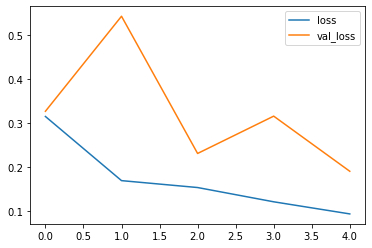

In [ ]:
# it's time to plot it! Lets plot loss. 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

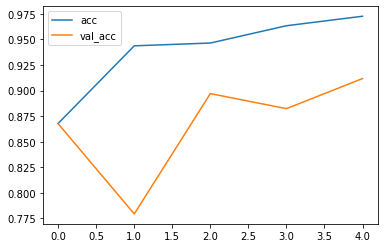

In [ ]:
# How much accurate it is? 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# This helps in taking individual images from the Dataset, load and check results. 
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 84ms/step
[[0.]]


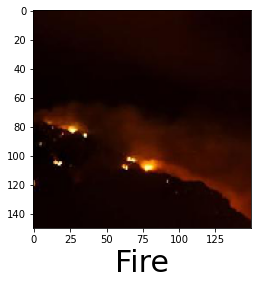

In [ ]:
predictImage("D:/PPTYT/General/WildFire/forest_fire/Testing/fire/abc172.jpg")

1/1 [==============================] - 0s 36ms/step
[[0.]]


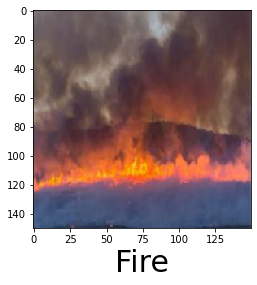

In [ ]:
predictImage("D:/PPTYT/General/WildFire/forest_fire/Testing/fire/abc178.jpg")

1/1 [==============================] - 0s 36ms/step
[[1.]]


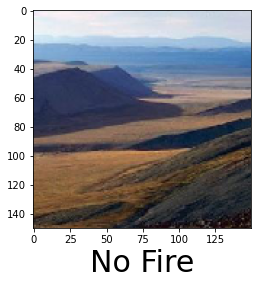

In [ ]:
predictImage('D:/PPTYT/General/WildFire/forest_fire/Testing/nofire/abc347.jpg')

1/1 [==============================] - 0s 36ms/step
[[1.]]


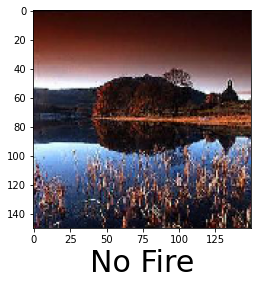

In [ ]:

predictImage('D:/PPTYT/General/WildFire/forest_fire/Testing/nofire/abc367.jpg')